# **Final Deliverables**

###**Shared Google Drive folder**

I have shared this Google Drive folder with your email: zdodds@gmail.com. This folder contains all project related files.



https://drive.google.com/drive/folders/1YIJCM9qrFohK7IRTggZT3q_5B0Iicsor?usp=sharing



-----------------------------

###Project Title:
+ **SmartCam Assistant:** Real-Time Traffic Light Recognition for Color-Blind and
Visually Impaired Drivers.

###Core Features:

1. **Object Detection:** Use a pre-trained model (YOLOv5)
to detect traffic lights in real time.
2. **Color Classification:** Segment and classify the color of the light (Red,
Yellow, Green) using MakeSense.com.
3. **Audio Feedback:** Use text-to-speech (using pyttsx3S) to announce the
detected light.
4. **Webcam Integration:** Capture video stream using OpenCV.


-----------------------------------
Over the past two weeks I’ve been working on my SmartCam Assistant project by building and training a YOLO-based traffic-light detector and wiring it into a real-time inference loop with OpenCV and pyttsx3. I collected and labeled roughly 100 images of my traffic light model under varying angles and lighting. Then I used MakeSense.ai to produce YOLO annotations for three classes: red, yellow, and green. Training on YOLOv5s in Colab yielded a best mAP@0.5–0.95 of 0.827, with per-class APs of 0.774 (red), 0.870 (yellow), and 0.837 (green). Software-wise the biggest initial hurdle was getting LabelImg working under Python 3.13 (fixed by switching to a conda env on 3.10), and then later routing OpenCV to the USB camera instead of the built-in webcam (solved by disabling the internal camera).



On the integration side, I’ve successfully written smartcam.py to load the best.pt weights, grab frames from the USB cam at 720p, run YOLO inference, draw bounding boxes, and speak the appropriate warning: red (“it is a red light you need to stop”), yellow (“slow down it is a yellow light”), or green (“it is a green light keep driving”).
I even added a configurable two-second delay so the speech stays in sync with the video. The system now robustly handles both single-light and all-three-lights-on scenarios. It also detects traffic lights on my phone screen.

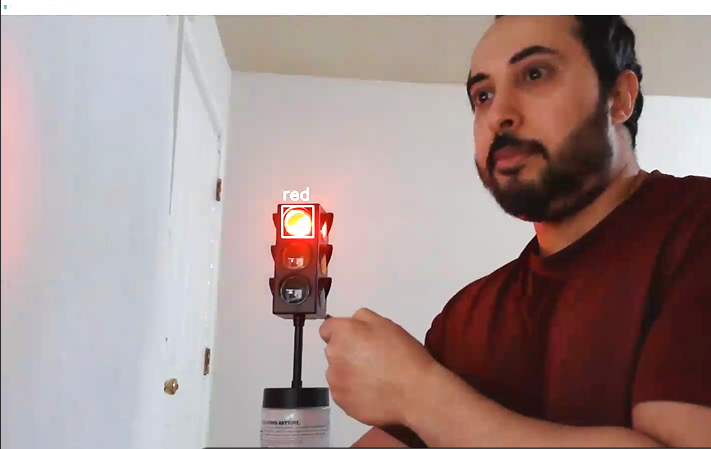

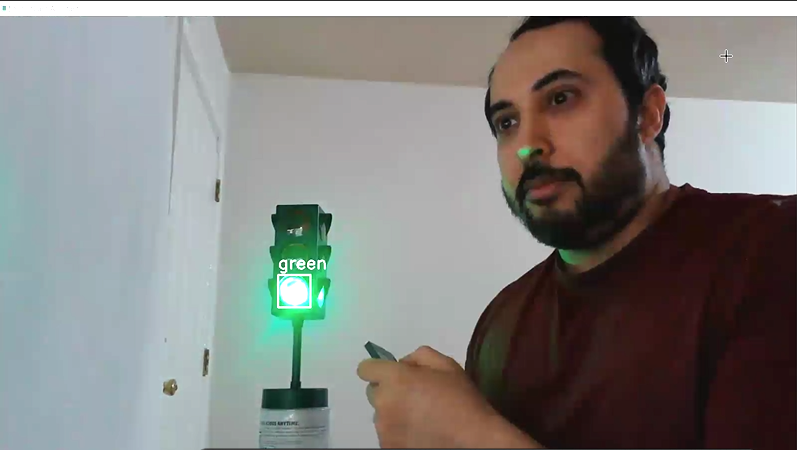





**Data expansion & retraining:**
+ I started to capture and label real street traffic light images.
+ Adding and training using the YOLO dataset.
+ Retrain (or fine-tune) the model in Colab, then download the updated best.pt.

**Deployment and Testing:**

+ Run the assistant on a laptop in my car while driving and pointing the usb cam at real traffic lights.
+ Testing the process of detecting the real traffic light and measuring model performance.
+ Record a short video + timestamps and measure detection latency.

**Overall Goals:**
+ Originally, I aimed to build a system “SmartCam” to aid color-blind or visually impaired drivers. After this week’s success on the tabletop model, I’ve refined the goal to deliver a deployable desktop app that works on real traffic lights, with configurable parameters for delay, camera selection, and logging. My long-term vision remains an embedded prototype on a Raspberry Pi, but first I’ll nail the PC version.

**Reflection:**
+ If I could re-run this week, I’d start by standardizing my Python environment (e.g. conda → Python 3.10) before touching labeling tools, which would have saved the early headache with distutils. I also would have used YOLOv5 insted of YOLOv8 and YOLO11. Also I should test the USB camera binding earlier to avoid chase-the-backend warnings mid-script. Overall, the process has felt iterative and highly educational. I learned that real-world vision systems demand careful integration of hardware, data, and UI, not just a fancy model.




# **The Proposal**


#### **Overview & Big-Picture Goals:**

I’m building SmartCam Assistant, a Python-based aid for color-blind or visually-impaired drivers that uses real-time object detection to identify traffic-light colors and speak an appropriate warning (“stop”/“slow down”/“go”). Under the hood, it fine-tunes a YOLOv5 model on a custom dataset of red, yellow, and green traffic-light images, then runs inference on a USB camera via OpenCV and issues voice alerts with pyttsx3.

My motivation is to bridge computer-vision research into a practical assistive application, with potential extensions toward a standalone in-car device (e.g., Raspberry Pi + Pi Camera) down the road.

#### **Python Libraries & Resources:**
+ Ultralytics YOLOv5: for model import, training, and inference (beyond the basic tutorial, I’ll customize the training script and post-processing logic).
+ OpenCV (cv2): for webcam capture, resizing, drawing bounding boxes, and handling different Windows capture backends.
+ pyttsx3: for offline text-to-speech, with a small custom delay loop to sync audio with on-screen detections.
+ Labeling tools: MakeSense.ai for YOLO annotation in-browser, plus occasional use of LabelImg in a Python 3.10 conda env.

#### **Online Tutorials & Extensions:**

+ YOLOv5 Docs & Colab Examples: I stepped through the Ultralytics quickstart, then extended their notebook to train on my own data.yaml, add 3 classes, and export best.pt.
+ MakeSense.ai Guide: used the web-app to annotate ~100 images, then wrote a small Python script to split train/val and assemble data.yaml.
+ OpenCV Camera Backends: combined StackOverflow posts and Microsoft’s DirectShow/MSMF docs to reliably open only the USB camera.

#### **Proposed Timeline:**
+ Week 1-2: Collect and label 100+ traffic light model and real street traffic-light photos.
+ Week 3: Integrate new best.pt into local smartcam.py.
+ Week 4-6: Prototype and Field-test on real traffic lights, record video+logs.
+ Week 7: Measure end-to-end latency; optimize model (YOLOv5n).
+ Project End: Finalize documentation, final deliverables & presentation slides.


In [ ]:
### Data training ###
#
# All labeled photos have been uploaded to the link below on my Google Drive.
# After the data training finishes, the best weights model will be downloaded in order to use it
# with the local machine environment that allows for live cam capture.


from ultralytics import YOLO


DATA_YAML = '/content/drive/MyDrive/SmartCamAssistant/data.yaml'

model = YOLO('yolov5s.pt')  # or yolov5n.pt for a tiny model
model.train(data=DATA_YAML, epochs=30, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:05<00:00, 3.35MB/s]


Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SmartCamAssistant/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 1.84MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              


  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1182720  ultralytics.nn.modules.block.C3              [512, 512, 1]                 
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    131584  ultralytics.nn.modules.conv.Conv             [512, 256, 1, 1]              
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    361984  ultralytics.nn.modules.block.C3              [512, 256, 1, False]          
 14                  -1  1     33024  ultralytics.nn.modules.conv.Conv             [256,

train: Scanning /content/drive/MyDrive/SmartCamAssistant/dataset/labels/train... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:29<00:00,  1.99it/s]

train: New cache created: /content/drive/MyDrive/SmartCamAssistant/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 8.5±1.0 MB/s, size: 2304.0 KB)


val: Scanning /content/drive/MyDrive/SmartCamAssistant/dataset/labels/val... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]

val: New cache created: /content/drive/MyDrive/SmartCamAssistant/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.239      5.398       1.15         24        640: 100%|██████████| 4/4 [03:00<00:00, 45.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.63s/it]

                   all         14         42      0.247      0.188      0.209      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.074      3.499      1.012         19        640: 100%|██████████| 4/4 [02:12<00:00, 33.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]

                   all         14         42      0.623      0.864      0.806      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.9724      2.133     0.9493         21        640: 100%|██████████| 4/4 [02:08<00:00, 32.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.15s/it]

                   all         14         42      0.846      0.935      0.953       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.8953      1.586     0.9522         24        640: 100%|██████████| 4/4 [02:11<00:00, 32.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         14         42      0.827      0.986      0.963      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.9219      1.292      0.921         22        640: 100%|██████████| 4/4 [02:07<00:00, 31.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]

                   all         14         42      0.815      0.928      0.908       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.8224      1.238     0.9341         17        640: 100%|██████████| 4/4 [02:05<00:00, 31.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         14         42      0.678      0.929      0.797      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      0.832      1.208     0.8946         30        640: 100%|██████████| 4/4 [02:07<00:00, 31.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         14         42      0.778      0.854      0.967      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.8149       1.12     0.8797         34        640: 100%|██████████| 4/4 [02:07<00:00, 31.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.18s/it]

                   all         14         42      0.905      0.801      0.942       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.7928     0.9824      0.895         34        640: 100%|██████████| 4/4 [02:12<00:00, 33.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.05s/it]

                   all         14         42      0.966      0.995      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.8486      1.092      0.927         10        640: 100%|██████████| 4/4 [02:09<00:00, 32.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.84s/it]

                   all         14         42      0.976       0.95      0.991      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.8202      1.017     0.9121         28        640: 100%|██████████| 4/4 [02:06<00:00, 31.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]

                   all         14         42      0.908      0.919      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.8128     0.9517     0.9475         22        640: 100%|██████████| 4/4 [02:07<00:00, 31.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.58s/it]

                   all         14         42      0.912      0.893      0.977      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.7389     0.7291     0.9088         20        640: 100%|██████████| 4/4 [02:10<00:00, 32.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         14         42      0.977      0.934      0.991      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.7515     0.7164     0.9106         30        640: 100%|██████████| 4/4 [02:09<00:00, 32.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.27s/it]

                   all         14         42      0.929      0.872      0.986      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G       0.79     0.7563     0.9247         13        640: 100%|██████████| 4/4 [02:12<00:00, 33.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.28s/it]

                   all         14         42      0.947      0.922      0.979      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.7093     0.7139     0.9262         19        640: 100%|██████████| 4/4 [02:12<00:00, 33.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]

                   all         14         42      0.968      0.976      0.992      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.7683      0.671      0.947         18        640: 100%|██████████| 4/4 [02:09<00:00, 32.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         14         42      0.991      0.976      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.7776     0.6417     0.8979         20        640: 100%|██████████| 4/4 [02:10<00:00, 32.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         14         42      0.971      0.969      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.7941     0.6714     0.9256         35        640: 100%|██████████| 4/4 [02:09<00:00, 32.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.91s/it]

                   all         14         42      0.973      0.962      0.993      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.7947     0.6306     0.9382         16        640: 100%|██████████| 4/4 [02:11<00:00, 32.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.08s/it]

                   all         14         42      0.976      0.983      0.995      0.782


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.7863     0.6431      0.917         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.14s/it]

                   all         14         42      0.986      0.981      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.7058     0.6211     0.9302         12        640: 100%|██████████| 4/4 [02:11<00:00, 32.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.52s/it]

                   all         14         42      0.962      0.997      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.7171     0.5786     0.9031         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.70s/it]

                   all         14         42      0.962      0.999      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.7065     0.5813     0.8839         12        640: 100%|██████████| 4/4 [02:12<00:00, 33.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.30s/it]

                   all         14         42       0.97          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.6821     0.5647     0.8987         13        640: 100%|██████████| 4/4 [02:11<00:00, 32.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.49s/it]

                   all         14         42      0.974          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7073     0.5385     0.9039         14        640: 100%|██████████| 4/4 [02:09<00:00, 32.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.62s/it]

                   all         14         42      0.981       0.99      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.6351      0.538      0.849         18        640: 100%|██████████| 4/4 [02:16<00:00, 34.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.75s/it]

                   all         14         42      0.984      0.991      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.6614     0.5286     0.8978         14        640: 100%|██████████| 4/4 [02:13<00:00, 33.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.41s/it]

                   all         14         42      0.981      0.988      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.6515     0.5337     0.8948         18        640: 100%|██████████| 4/4 [02:13<00:00, 33.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]

                   all         14         42      0.968      0.997      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.6657     0.5071     0.9096         14        640: 100%|██████████| 4/4 [02:11<00:00, 32.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.67s/it]

                   all         14         42      0.968      0.997      0.995      0.817



30 epochs completed in 1.184 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]


                   all         14         42      0.962      0.999      0.995      0.827
                   red         14         14      0.915          1      0.995      0.774
                yellow         14         14      0.972          1      0.995       0.87
                 green         14         14          1      0.997      0.995      0.837
Speed: 1.9ms preprocess, 539.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79df0d522dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Download the best weights
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Run The Model**


To run the model, make sure you place the code files (cam.py + best.pt) in the same folder.

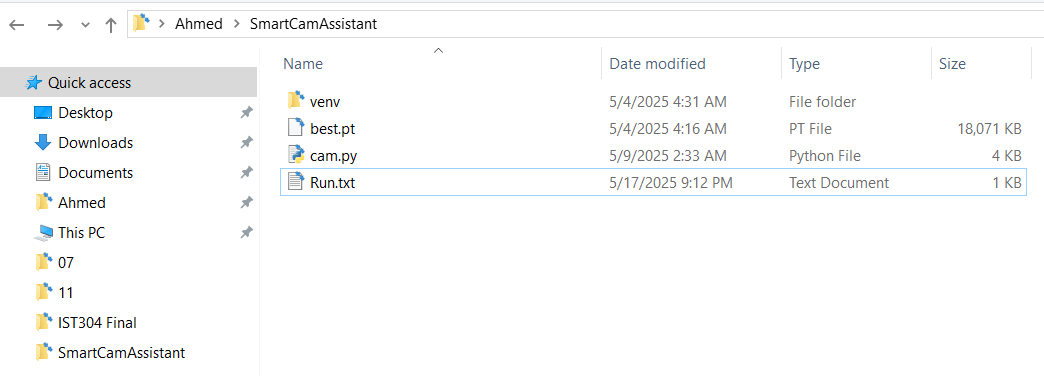


Run this line in CMD (pip install ultralytics opencv-python pyttsx3 numpy) to install all needed dependencies.  
Navigate CMD to the folder and activate the virtual environment.
Run python cam.py




----------

cd C:\Users\IST341_Participant_3\SmartCamAssistant
venv\Scripts\activate

----------

Finally run: python cam.py


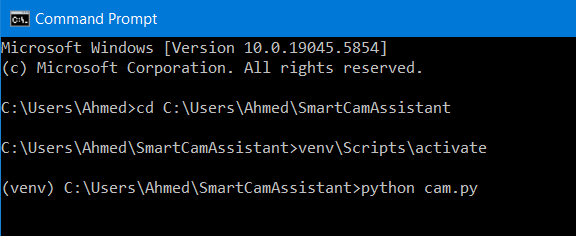


It should open the built-in cam or the USB cam.

![Run04.PNG](_Participant_6+1jyad9TCgqeWZyWnlaFWdK4kRIvz2fReFhBzvVaGOiLUi4RojoWevBBVITHriFETJUpUbd5EiqaS6JEQTSaXRY/2sICh6NFefvz38eNfbWQO8IN+iB/yw6FOjAc7MMNC5hJ5iLyGBc3XhQJ4QziAJ1kIfXO4A28ONuOtItyCt0VbSRveGmnltFY8FWrBE8EWPB5qxaORNidCNNKBxVgXFpJBzGUimM1FMZWNYDgd5vYpoifC7x7CQqiB4yo4GCGqApsKRiqAaZwsK+yyMKY0FYJtZKkRoiz4OLhilNsv1AFHOOgQCnQiQqIkEexCmvuZDSsaL4TeqCLtwkYyjbOwNRhVRGsI0z1JjKTCOHfkALZUV6K+cgM21fixsdqPer8rRF0ZaiNERa2LokM3Mn0tNPKb0tKfybjqzvl725uexkauS72zb/NtMGw1lGGLvxxbqyqw1V+B7RzuJHs4foAc5rTjzHOK2322Yj0e4LCltgqRrY0Y2L0V1/ZswuM7/HjD5nK8YeMGPNG4Hm+sX4fXV92FxyteideXvRyv3/AyPHbPHXjd+pfj8fUvI3fg8XXk7jvwhrvuwJMcf/OGV+AdFXfjeW7T+yrL8EGu9yO1fnysoRofr6/Cz2yqxi9uqsEvcb2/tnMLfnPPdvz+sYP4s85W/CnP/6+2XcE79+7ASF0NQhvWoWX9q3Ch4k6cr7wHpys24JSvHCe4zGPc/oMV9+CQbz0O+jfgQOV6sg5HqsqcNI4fqFiH/cyzl+wmu8g7nnrCPZLO30A67fRCz2PtHHsJUR/qKgoRolV3vgob169Da9NxzCRimOZ1tch7R50qXY10YiHE65zX11I4zPEgFsIhLMXCzBPCfKwbc/FuzJCpWCcmWLgejbZjlOPDvDcGWLDu5b2V6W4j7chxOX2cVxHKaV6bam8z092BrKYxTy+RbBwKq5OjAEZZ8B/itgyyYC5h3xNVW5vdeSGq6vJqtzDNZToyNIoc9yHH5RvhwGOe47PANKHB+Qf4PBhn/kn+nuLvKf6e4romuY8TkqGuGB0LtWEi3IZx3u9jwVaMBFox2N3iCtF29PEZ0hvkvvE50sN9yvK+U/uh6QD3qVtRoVaGthsZnJIM5r4amC/D/FnOl+O92+u2kTrA+1KMJuJGiE7xmTeTy2COz8Z5MsfnoVeITmQcJiVFs3FM5xIkiRmPELXthC66w4Ve4VSVn2ceMdejKNEMZvsl+3oxP9SHhSFFRA6YqvJX3aGtou5UmR/IC8+8EGWahjf4WzLTilAHJ6/kp6JC1UGSZOhrpifXJEQV2SkJq97tvdXjbcSnJKdNN22HCq5D68lXmee73MnPfMP9uD7Sx+31MNpvuCEhOj6IR0wVei3TI0QHeYwGcjxWOl4WJ0p0isfPyyQxQpRIiEqCCo2PcTjC990gz2m/3m/6BwHPfYLP6iivoRCvoaCGfDfpuS+pad8RqgZv3hHu+8H+Q83pgNCZZoWohmY+pi+LeuT1o4hBScwQr391ntTZdRntHRfR1vEAhxKiF9DVfRGB0GWEw1eYtxnxRCsSyQ6+xxwJGuH8Ds54mM+ECO/ZaCrqdABEjBAV+p3xVJnvSztV5nkMs7w2s7wWc7wWc7w2vSg93zN9lu9FD7ZquKme7+IIu5h5t94au1y9i533sSg+VkLH0Kk2vzp6r1uc6vvLMedD8DmV4TmypAWfWQauL2XhNph/jhJViY8yn9N2aFGEaMxGiLrHhUMJ0TjzO98eQp0oSYgWqsob+LwOxzoQ5rM7RMJ8bquNUXNO+ZwM8TmpoUR6kt8Npo1SPnec4631RnCHV24KKz1XEqLF+Y3YXCH604uRnkWYtkNd1Mu8lZ9nXNm5GkacuhJUv72i1KRz+ukS4rNYfp78hf9l8KaV5n/h9C/+C87+f/8TZ37xn/Oc/oV/wsmf/0ec+Ll/yNP0s3+/7PdKSJKe/pnlGNlJjOj0YNO900588r/lafrEfyV/x/G/4/Bv0fSTf4Pj4uP/Bcc+9tc49hPfwrF8FOhfLROiJzX8sW/h1I9x/KPiWwalHfvof3L4yF/iKCmWoooUtdGixz/05zj+wT/DcYlQK0OtEDXV5v8Eh9/7TRx9zzdx/N3fQNMLf4QTz/8hTjz3NRx/7is48tyXcPD5L2Df85/H7ud+H/te+H3sf9dv4+Azv46md5AnP4PDj/wcDsz9BLamnsFdx8fgO5xF+Y4OrN94DuvrjsBXvxe19dtQW9OA6qpq+PkB5auqRbm/ARuqNmG9fzPW+TZjfeVmVFRtQUPjTuzdcwinm87gwv2X0NrSifY29WgXRHdXGIGAK0SjKd50GZJdRjSZ4wOzF/FMHx+UfUhk+5HsGUS6dxAZyc8eFZYUYUJY6OxjAbRvYBC9xBGiQ44cHRxGbmh1eplnYEhidDn9YliM5TtikvQbHp/C4OgEJFStZO1XB01jkxiekCCcwoBk6QiXw6HFVrs3MlRilOTT3N8WI1E9eAWflYWlsCK0WIgK7zKMzGSaF68I9QpSrxRVkwDC/naWKwk3gfEZMYmJ2SlMzIhpMuOKOjGLybklTM1f5dBhYvYq05cwNkUmFzFqhOjcTRLUbr8TlVnATlsVyb+ZObP+YpQ+OSvBuGCYnl80aFzpmn4TSmceyU8J0VGmjXBZxSjd5rM4ItURp3kkTxc9LChN61A+brcHVbE3opSYavQSpkyfMkKUx0jHa0rngMdqTsdIx8yF05VnkkxpyLzejo8kEyXjJN9sZKOEl3oHX+D1Pc/rfW5kDLNkmveFaeeQ0yTEnLYtnQhRb+/vY0wb5kfnkIvGVe3edGRDJO1WY3bKlY4cl+TLCz8XjU8wPS9EJYdGHNlpkeS0olMd+9jOagzDTBsacfZHMG1GsnDEEWx5Rgvr1HZYrHw04m6S2+xKyhneB2KW98Ls7PKe928HK6t1fiyOGNXxLkLnwEXSVkjkGpkrdG6JM43nWOeWy5rnb4lPK0CtBPVWrXckKo/38JCJQLXnQcfeiRwcMlGEEp5axxKvq6tkkfugjpjmuZ45rsdif5s2PbXMIkwVf26ziep0z70wTQEQyUkT3VmEqvV7kdQ0nSW5aNxsA8+x9s/ITK5PQ4lSHQuhcUWWFkRs4fyb/bdwvkleY9O6hsgU3yVeJvkemvAwyTQzPlhgku8gXYem533eT/rHQ3F7q/Ya1rVtokMF120FupX/5vrnsRMmulNw/4yU5jkakxiVAB3owyALYwO9uWUofai/N4/yaKh0zWelai4nSZkz1eCLJaewEaE2fTUGSB/zOjhV620nTFqHhGiOhX/Rx23s1W8WFrMsLGrYw3SlaZjLsKCUYKElzIJgmIWKiAqTcWRJTyyOvpgiIGMYZgFhTOIv1I2pYBfmg524RiREH+lqx2vJ490deJK/3xpsx9u6ruD7A814R6gV7wi34u3hFrwlcAlPdT6AJ8jrWUB8PHQFr4u24RFOV4dKMyxITkU6McWChqK0JlhIG2QhJhOPsOCo6AwVYlSoUuFEBRUVtlTIc6oHqj3Vnl43OtbC3zkWrCSHLToGCRag4twvdZARjUX4XRUxVdqCYfUe7LT1FeT+RTiMkjjH1XmNRI2kTR8L1wNkkAxzmycS3RhjIUg9a4+wUDSaDOLKmWPYUl2OmrK70VhdgY21ftRVVaK2ykf8pv1Q02ZoVR3qSYO/Do3+Wmz012Czz39LNpkoRV+em4To009jC/Ps9FViv9+HfRzuITv9ldjG35slSzl9a1UVdlRXYQ+36UBlOY6Wr8eZsntwoewutJfdiaR/HYbrKjCz0YfFzT5c21KBR3b7sVB3J+Z9L8NVcq3sDky9/A4svOoOPFL+CjxW9So8xLTpVzjM33UHrt1zBx5edwdey+Gjd96Bx5j/8ZfdgTe+7GV4M3kTees9r8CbN7wSr33ly/GDjWV4z+YKfHLfJvzykd34zI6N+Ex9Ff6tvwL/flMDvnLfWfzz7Dj+x2PX8NOd5zHd6MMlLrP5zpfh/rvuxGXuz+X6Gpzxl2HfXS9HU20lTjT4sbdsHXbefSdOc7ypqgxNvg04XrGe+70OBzltL/d9V3kJIZrKYVNFFTaSRrcNV9OGaEUFaso3oGrDOqx/+cvQwPEz+/ci1daMGRamZ3g9zyRCmE0EMa1q5YFOXE1lMRngdR6OYjGVxlwigclIGLO8vqd4vY/yuhpn4XxCsCA9Fgvw2tL11om+7lb0drUY4dnHa7KP12xO7Yjy+pUQ7OP12ct7sKebeXgPDoZazHVpen/ntTlE+lhoz0U7eL/zuo7w+iYxFtRjkQBSkZCJflaTEFluT1qiSDKDBXV18pLm9qidzn7eF9q2GW7jHNc9z3nnuN0zkqKRDoxH2jEWkQxtxXSombRgMtiKcUnRYBsGAtz+QDtyfGZkuiU4u5DgMM6hRf+E0H2XZL4k8yf5jEhwvxP5SFG1Hersv/5B0a8oWD2vuO0jyQTG+Xyb5H0xaYaqIp/GNJ8bU+lknsl0AmMpPt/SMcM4mcjEMcnnz5SkqIsiRudc5kXWYTGXyrNA5nsUTZrDHJ9H8/09WCCLA72GpcE+LA0t7wwp3ykSeXB4wKB2Ob1IglpMJ0bEtAVKbvB9a8l3ZuRJs/mMDHXnlYQ1mGU7WClrxKyVp+54Qb6OGTSuNE3XvDfti/bBndc736IEsUQxj8Ucj8ssj9NMb9YMDWp/daCH3wI5h4EcvwmymOjPYrwva+TnGJ/34y4TfO5rOJrNYJjneSid5jsjzesggWyI743uAMJdfI7rH12qpsxr1VaZt1JUQxv1aaWnFaIat9GgmmYkKt8rJmKQ0xTZp6hBRfs57URaIXoFHZ2X0NZxAW3tkqIPoJPvvW6+90LBS9yeK4jHeC3HOxDnu0Md8tiOeQpIiC4nzHQNo2rDMh1Fku9J05FQL7eVqHOhbC+3PxdbE8m02igNuYR5n3uJIJ0RMX5TJIkka4rvVL5HJVg5nuV9YOSnpCrvGf226Waam246hOLzw0bTZvlczPHeWStZHXfOIzI85sL0uG9Ep/7ReTMSmMU40Z2KwnRRmjl/MUTUNmzc6R3eqX2yHG2/IoJN9G6U1xOfxzGejzjPR5zPdi9RSdKoIpIddGwTSYnWbl6HnQiFO8y40pzjzOuRaFmxeKAgRK3wtNy2EL2FFM1HgpYQopKh32khamWoV4haGfpihahkqBWiXim6mhBt8oybSFJJUA8nJTxd6akIUkup9CaJUFeGHheSoT9FPvm3/P03OPaTxBWiR60QdaXoMiFqROi3cJrDUx8Vy4XoUeEKUYNHiB5dgxA1Pc1LiL7vT3D0PRy+55toevc3cMIVok3PfQ3Hnv8qDr/wZRx44YvY98Lnsef5P8CBd5PnfhuHfuA3cOqdv4nTT/8yml77KRxd+jh25n4Q605NovJIDmW7OrBu0zlsqD+Kqvq9qK/bhrrqBvPf/yriq67HBn8j1ldtxj1VW3GPfyvW+bainOMNDbuwb/dhnD5+BhfvKwjRzlJCNJZBmFgZGk5wmMwhmu41MjSa7UMs149E7yBSfY4Q7ellwamXha4+FbxYABsYQP/gIPpILzFCVIKUhc0eFh5zK9AjIcqCrJGethq9K0CXpZGB4XGMjE9jeGwKgyMT6GNar1slX+MDTBviNElRRZGaHunJAAvqYpAFXYvt9d2b5k03IlTi0aWk6CuBdx5RLBUtNt2IUBevMLXCUeM2v5GgdtlmfjvfFMamxzE+w4L5zDgmZicxOSckIp3IREUtOlXD1V6nFaJLjhCdWeK0JYxOLRJHiNptshRvl6U4X0mMEGX+aSExWEDpirL0Rl7a6Mt8VXQ3j0HTjMRcxJgrOEfJyMwchrl8YYQof0uIKp8RoS7KK+zvsXkiAbq4nLGFeSNFTQSvixGiZLkQnccMj8M0j40E5zjPjSNEua+rCFFFiCq/pFs+stMVKiYylGlGio5PYG50HIu89hd5PywQidFZMTKGGU4z0Wyah9etV4iOkVFzvfCanlKHY44clRCV4LRRe6sxx/mM0OK4kWL8EPZiogk5zStETSSi5BHvbyNEiYn6lPyUxB2R8BzFzDDhvT8zSIZGMSuYNmumuVWlxQiRoHMlXV6S2e3RkB/JEqImatNUY5/keRFWiHoicVfBCmqN67xovyzLhCiP7Vqw1e8nBc+RiTZ1l6GIVkW5GkHJ55QXCcN8dKS779rXCRZgJlgocI67RLSiE4cxOjZkUEdFOi7qld5Ur+c2mKrpPDdqn1NVzk07nfwtgWkiPHmMpyUlh1zMMXdlLPObc8/1aH061l4haqq3e1Dkp2WZENV5IUaKcn/NcrVPkq/cp2kWqhRJaoWtxk1HVFy393znz7muPc4jpritVogWi1EJUS8rpU3z2tT9pH8+KBo7HyksuK1OZLODEf4u9vw6171Lfrr9pwDXw+3UuVM06qjE5kAfhiU9JTw9mDRP+iALaDbdStGhwQH0sNAmWSlp6a0K75WhEpvF8nMlvPPcJETVE72L/Z3JpFmIYIEpo4JehoWVDAsrhAXITDyFlIRoiHAoKZolPaQvGsMAGY5GMRYJYzIcxBwLl1cj3bhBHgl14jWBDiNEX9fVhjd2teKt5PvaL+MdXc14Z6AFzwRb8PbAFbyFhcGnOu7DE+3n8frO+/C6wEU8FmnGw6EWLAaaMc28k5EuTLHgMcVC0Di3dSDFQlVCkRmqquYUXDS0YlRV2iRGMxKjkp1eFCEjOH6zEOX8Wq4rRSMkFA0jKCmqam3hbsLCDIlyHxNEnbdkJaA4HCBDZISMsXAzGZUAasVIuMWI0clMGB33ncKuRkV8rkdjTQXqqytQV1WB2mpJUT9qXCEqGVrvr0ejvw4b/bXY5FubEBWKALUUC9Hve/ppbPX7sauyEgcqCIf7mG+P0qqqsJ1sq67msBo7Oa5ph8rLcKpsHS6U342uiruQqrwLo1XrsFB9D27UiLuxWHcnxmpeheGKl2Gi4g4sVN6Bq2Uvw+wr78A8uXbPy/Dghpdhad0deLDyFXjQ9wo85Hs5HvG9DK/j8Cn/K/H9VXfh2dr1+EB9OT5SX4mfaPDho5ur8b7NPny/ok05z+urX4G3b1yH92+vwse21eBTnP6fWi7gG8cO4uv79+AL+3fjM9s34yu8jr45HscXF3L4SPQiklxv8ytehot3vhLn73kVmu58BfbwdxP343SjjsU92HXXK9DkX4+TPDcnK9fjRPl6HC9bjyNlG7B/wwbsLt+Adzz1pHsknb9BfmNvKq92hChxOr2SEC1HNfNXc/5aDrc31ODskYOItFzivRNET3cbcp1XDNm2y0hcuoieti4kLrYgdYXTOJ5qbiMSnV3o6eQ1xuFUMoExXpNilIXwYd5vg6EO9El0dl0hzeiVVFR0pKRgyBWivHb7Qu3o433XH7zCeZoxEm3lMtoxmujAcLwD/Rw3QjTqClEV7lnIj7tCVE1BSIhmJBfSvE8ycSdSTVFNEhrMa4RoNIRZ3jMLXO8inwsL3JZZI0SdtkRHI218ZrRgltswy/tcUnQi1IZRbt9gUNvYaarHp4MBJEmsuwuxALeFxEki2G3aCk24MtQRoq2Id7YRpnep4yVVl3eEqPnnDY/bKJ8bY3zeTfAZN5HN8n4UGUwJplsm+fyYyDAv92+UaDiekUhNYJLPIAlREylKrBC1InRBcN6lbCqPkaJ85iz05Rz6c1js78GSZKgrRK8SyU8vXpEoCtGgVoYqStThOt/D4iG+wyw3+N4TD/NdLOxvYfPk5+O7zRGfkqCDTlSqFZ8utmd77+9H+D1heXhC0600VbV7p+kgdZrk4FTJVxTpQ9oufkcI024p003P9kMDWOD7b47vyjm+w4Qiax0hmjVIhk4O8Bz2ZzDeS3pEFuN8p024jPH8jvK8jqQzGE5lMJTMYCCWRE84hlQghAjvJXWmFOZ1GuH1KrnprTKvcaUpetQrRb3TlWbmkSjlNsSZHmOeGNOiRqhFXCHadZMQbZcQJV4hGpUQjbYUhGjCEZ0RM3TId9hjkQxV9CiHMeZNpLgfmRgyOW5rj0Sthe/vniiJrE6O+5oOEt57hiCX55DOhJDOirARdY4QFRKiDvqd5f0g6ZmRmOW2ZLktXmy6qqsnJHH57FAbqTneZ6a98jWSk0DlPCKb5npIJsXz5ApRfQvE14D9p6r3H6saN98W8ShRpK9zbJNFmO2XjHaFqJpIKAhRoekOkr4m6pd5HCGq6fotGdpu0LjSNM1K6ERSy3OFqFeEimIZ+lIJ0dWkqHqZt7LzX7MQPfOLjhC1MvTUp/6HoThKdCUkRK0UXU2IemWoKJVuhaiRoa4QPS4ZavmEEyFaHCWq9kJLCVFFiN6OED36YoToe//ECFEbIdqkCNHn1Z6oV4h+AXtf+BwOvoc8/zs48kO/iTM/9Fnc+7ZfxanX/xs0PfRJ7Bl4DmXn5uA72ouy3V1Yt+k+R4jWeYVozTIhus4Vonf7t+Ae32ZHiDY6QvRMkyNE21o60dHuEaKmynycD90kwrG0EaKOFOUwwWEyi2i6B7FsL6LEEaIDeSHaKxFKBvpVCBvEwOAgBlmYHiB9pHdwCD2klwXCXhYOe1aCBVFVm5f8HBgevyWSoUOjk2Zc7ZH2WiHKcaVpmiI8rQy9XSHqnbYWsVmMd57ieb3zl0oTVjx68eZfvkw7z5QRoQ4szEuIzk4RrxB1lqX2NW17nY4QXcoL0bFpCdEFUhCd3u0olqHCO70kWq8rP804t9mLV4paCToubH5i8niFqCSnK0St4JQA9WLT8+LUxaZ708ZLCNFxV4h623pdWYjOLReiZJkIJfkq88RWmVd+iTfJNlPtlh93EisSLHnpxutxdnTMRIhKiuaFqBspagWOog01j1fgSYqOMm1Y1zOHwghRflCuVYhKZlkh6pVReZhWLETNvvDeVnScpJAEkYSoqh/byNB8RKgrsCREJUjzQpTzFXDFIJdbLMfMNgnJOleIFtr2dKJEZ3h/WMG5Gl4hqt92n7Q/Guq3ySd0vNeAFWYiL0Q1zV2O2kGd42+vXNS4aSvTxew3sRLQ7K/2lajqviToGAsTYxxKWqpauqlaz/VZ8WkiMnkMhcYdMapjzeOqY2ylKNF4PjpV6+fyTHMAOsZctxWiXhFqMZ0/WbivivaUAJ3mdlrMdaXlcvn59ke5X9pPI0S5zc5+c/0az+McC+d4cF7NT6a1D4rwNNeRokVd+P6ZEpKefEeZ4bLfhTTNZzps4v00y6b9H1IAAP/0SURBVG1XlK9tLqEgRh28crRUWl6YGhl6e0LUIhEqBlhYK5aiQ5xfYlJIXlohWhwdqmne9NVYqxC1MjTNwn8qpWgYSdG0EYhppadSSLPwmAqxYBEkGoaiSJNsOIreSAT9ZCgSxmgkhClFgrHg9yALBY+wMPAaFgweDXXhsUAHXt/dhie7WvGWzha8vf0K3tHZjGe6mvGO7ma8vfsy0x9wheg5PN5xHo91P8B5r+Ch4BUsdF8xQlQRopPJCNTm31gmhUFur3rCV0SnojtiLLSYHn2Jqs6rh19NU0SICkYmkkSFVpFzsILUCFEWZhU5q2ORVBthRGI0Fo+xsKlCbdi09RWKqADNwgwLuOqcQ0JUnbeoB+w+7u8g04bJaFhtJnZwu9VeYgtGgs0Yj3VgJhdF6NJ5HNq+EVvrfNhM6vxlqJcQrapETZEQbfAKUUWI+v15FAlajJnm47jP51bj9mGghBDdxny7jRCtMEJ0P/PtrarC3upq7Kmpxm6yh+P7mO+wrxInKstxf+UGdPg3IFlThuHacszVl+NazTrc8N+J65WvxIz/legpuwP95S/HeMUrMEeulr0cD61/FR5efydeU3YnHvPdjcer1+Ox6rvxupq78HjNnXii+k68ufouPFN9D54l7yUfJh/x34PnKtbh/VUb8N7adXhuUxle2F2NtzTcjRd2VeGHd1Thg/Xr8fHqdfidAzvxjeMH8a37zuCPTh7Bx8rvxqeP78Lvxi7im9d68fnrA3h35zm85sQBBCs24NzL78DZu16Bc/67ccL3SpypW49TdWVo4rpO+NfhFPfzdGUZTpUzrawMRzaU40BZBfaUV+KZp97kHknnbyiVw+aKamwiGytLC9GqsnVo4Dnev30zzh8/hOazJ3D/0QM4f3AP7j+0l+zD2b17cO7gYZzdf5jDo+QITuzai3MHDuHCsePkGNrPnkF/KIhB3nNDUeG04dsbbEOO91Sm8zKyorvFdECUCThS1KkyrrydnL8VAyFFiDZjOMJrM9aGkUS7aZO0n9eoV4gmrBAl6dWEKO/NhCtEdR9MeoTokkeI6j5eJkRdpsKtvF+4HRKikrtchrY7w31NEStEJUNF0kSIdrjRoS0GCdFoeytiHe0mUlRRolkuo8+NDlVkqGSookMdMpggk2mRJk6EqGRoSSGaTWAiy2lkms8PGyE616Mq8SnMS3oKCVCyxPGrfLaIJbLIZ0xeiBKvEJUMNXgkqJeVhWhBijpRnjbq0xGjhYjQgggtRIhabP5C9XkrPA38HpH4NBGdRMO8GC3C5Mv/dtsTJU4nTQWczpm4bm0P382FNkjHzDR15LQ46IjReb7PxOxAD2bU2ZKJEHWlaF8WE6LXjQ7le02MZTOuDE1j2BWiwym+gxNp9EYTfGaHEQ3yWe4K0agnOtRbJV5RoyFeu2o6ReP5aFA3j/JbSaq2LY0ItRghyvJ5LLQmIRr2CNFkvIPbs1yI3iRCLa4Q1bBYiBZkqFCkJt/fayCZVmSopCjvP46LdEYS1BLht4KNEHVYLkQd6flihGhOonOtMH/Wkheitjo8n0+u8CxFXnwKV4Z6haiQKNU/W1cTosKJ4OS50HkgxULUSlNHiEqcOkLURI3G1KmX2rJtM2g8FleUKI9/PkpX0anBm4VoKRkqXiohupoUtbLzX7cQXR4d6hWia5GipYSoqSr/UgjRTxQLUfKTBSl6/Cf+2shQdaK0mhDV+HdCiB59/5/giJGi/K0oUY8QVedKR57/Mg6+8EUceEHV5j+Hg+/9PH//Lo6867M4+9zv4N53/DpOPflpNL36Z7F39D2ofOAq/McGUL47iPWb7sf6+mPw1e1FXa2EaKMRotX88FXnSRv8DVhXtQn3VG3G3b7NuKdyI8o53tC4A/t2H8SZptO4eP9FtLV2GCHa1RlAdzcftCF+rEdi/GBPuFI0ZcTociGa8wjRPleIDiDb289CkwpRKkw5ItRhGIMsAPaTPo5LhvaxYChWkqK9LITeUoaOFFBVeUWHKr1v6GYhaqaxULtWIbraNK8UtUJSWFlYCpvfi3deO3+pNEuxVPTmX75Mm19CdNIwQawMnZyVSHQEo13WxJzTBqfTHqc6MVrkdIex6QUy7wrR5dsgXpQQtXB5Zv+0zV4kPLl9Ep7qICnfuz2nFfZP63Zl6MICJheXnMhPjxQtJUON7FyLEJ33iNBvW4jyXPL8GAlqmdE+uEKUeZxOlRwhKsFmpZvt8MbIM1fGTEl4jo5hfnQc86o2T2y1eVPFd3wiL0QVUWplqEVV5kd0HZMRjo8y7XaFqIZ5+ciPVC9KywtRrc+zL6a6sLtPRh4RSdFJ3vfCyFFXiEqOmohRpjlC1BV1nNdWGfcKUbt9Zpu0DWY7XFFYJEUVHWql560obsIgf1441G9zTjitWHyWQgLUCjNzTvnbRP9qupah9fGcSYgWi0VJTElBRww62ONvzp2iLd22SxUlOj7B62bS2X9F9Zqq59zevFjV8fMcT6WZaUq304gRohzmhah7rF+MEDVCltthzpPOi4t+a7km6lWykKhzJu2jZKgiWJ3tHTHjJs1Nz4tcXktmu7WN2lZFePJ9I7FpkRB1sPJz0JGk7rg3TT3Vm3ZMtW5ut/0Hgz2PXrzn1FJKiNqq9cVCdGxoIC9ErRS1414RWoyRpcrDea2w/G4LUUWDWhlqBaAVoyYtwbRYHMkQC0fBCBIGFgiDLBiRXCiEvnAIg+EgRlionIx0YyEawHXJ0GQIr+OH/+sjAbwh1Ikngu14U6DNRIh+f0cznulswTPdLQUhysLgmzrvxxs77jMRohKir2bh8DqnLXRdLghRFiwmMwkjRIeI2jVNsbCSkPyMsVDCAmssykJHHhZCVNDltAwLR6ZNMVWtyzoFWm/EqFOVPpvff3tcEkRRIhEWiMJcltr7UgcXEe6vEaIkbeRNF/rDtqp8N0YjXZgMd2Am3I7JYAtGA1cwHm3HbC6GeMsFnNy7A3s312NHYw3qfY4QdarNF6rMmwjRqvplVeat9CwWoV7MdJ8PmytV/d2PwSIh+vann8Z2fxV2M8/+ygocUNV5jkt+7quqwv7qKhysqcLhaj+OVflwyl+BB2oq0VZTgVhdJfob/ZjeWIWljT5cq16HBytehaWyV2C6/JUYLHsVpvzrMO+7B0vrX4Xrd78Cb6zcgKf9ZXgL9/PtXM6z2xrw/M6NeM/uTXj/3s340N4t+PF9W/HT+3bgU3u349/s2YbP7N6Cz+zchI9sqsdPbW/ET26vwUd2VuEjBxvx5pp78PxWH963qRzvr74LP8Hfn6i4E7+1azO+dvIwPn/iAH5xRz1++exBfKb5BP5D6gp+ZyaFP3h4DP92JocbTXsRq16PDt+daOa8R9e9DKeqXoX7GjfgfEM5TlTejdP+DTjjK8fpigqcKKvAkQ0+HCjzY295NZ556s3ukXT+JFu2VlRhM9lU6VSbb1D7oeXlpsq8hGjl+rvh33A3NtfwmG/diCM7tmB3vcSzH/s53N9Qh511NdhR34A96jdgyzbsbGg0y9nF4d5Nm7B3YyNO7d9reli3vaWbNj/DilBuQ6rrChKdlw2prmbma0c6oEjLAO9VdXikdkJ5jUbaMBBu4bXajCEOFSU6EpcQVYRoB3qIhGjKCFFHhiY4b5r3U288voIQVYSoOmNSFOpyIeqNEPUK0QnJ0EgLpslkuBVj4TYM834x1f95H6kjpCyfMeqwLN6tqvJudKgrRE3nSXyupPh8SPF5kuDz5baEaNphgmmSoZKgpYSoIZvIC9GpXArTPalCO6JE7YQaGeqiiFArQ4uFqKrNFwtRGyFaLEItaxeihSrzoiBEb8bJ4xWiBbGZF5ySn8RWbbcoTdOtQC2uQm/bF5XgvM51SX7aKFCn4yYnUtRpp3QUr+a32iNTk0aMOlLUjRYdHCD9jhgd7MXcoHqgV7So2hN1hKihN4sJPr+tFB3l+R0hqipvkBBNZzGYzPAa5nsuwmuW15WEaITXdiwe5jM/nn8vaCj5KREa4D0kKapIUStE7bvDSlETjchhRPO4WCGqqtZGiPIevX0hyu1LSIq68rMYSThykxDNOkI008t3nTBCVDJSUtSpFr8aikpcXlXeVpN3qnFnsiK+ZiGq4apCVNutf6jwXispPlcgL0NJRjK0SIjmhWcRXulp8pSQoTbdiRKNEB2TggTVtttx7cPKQlQy09lHUcjXZcSnIkIlQgPBVoOiRDXNK0TtebhjLTJUvJRCdCUpamXnv3YhamVoKSF6Kyn6vRKiTeJjjhQ1HSt9l4XoMVeIHn6fpCh/v9eNEnWFaNPzX8Wx57+Mwy98EQclRJ/7Axx8j4To7+HQs5/Fqed/F2ff+Rs4+fQv4fhjn8LeyQ/Ad+khVDcNo3JPBOs3X8T6+ib46vahrnY7P34lRGsdIVqjCNF6rKvaiHuqNuFuH4eVjSjn74bGbdi3ez/ONJ3ExfsvoK2tAx0dXejqCvBB7RWicYRiCZJEOJ7iAzSNMInwBRDliyCW7UGUxHK9SPT2I9XXzwclC04mMlTV7dQ7ru0ZfgSDLAgOcNhvIj85ZAFRvcL3roCmqaMkIzyL5GcpJEQ1lEQ1QtTttMn0Xi+xqnzqfEnLdVmLEF1NioqVBKeRdx68+UrhnbcY73K8MlG/bZ7i5Th53chDDtV25eSsIi4dHNFYkJcSerZjIttJkTo2MkzPw+n0qCA6vfLz28G2hVqMbS9VslHYtlEtymOnS4aqU6TppatO26Ae2WlFp1eEeqVpcT5v2vh3Qoia/dIxdM6PQdOJV4gakcgPOUk3dYJi2iXktZgXorwW1Vbo3NgEUduLihh1JKnpCdvKUMH1emWoWTY/LiVBRzldwzGlc31WLN4Kr3gUxTLUtC3KdUggTnAdy4Soi5GJgveiaZORzwgbMTrJZ4QwUaMuakM0L+6IGef8VgrabbLbtZIQNVJU0nD65uOyEpKhXiGaPy8ceoWobeNVeCVosUDzSjObZvJJtpG1CFHvvpv95/Ge5X7NzkwaKaooUclQ9Xw/IxnK/S0IUWc5Vh7aY2klY/E022Zrvsq81sfj/FIKUSN0tS9c/iQLOF4hOstlmGhWIzeHzHG4CU43cBttZ0zK7+DITYtkaDHqgMmL0pR3jttgZCu325xbFrSsFC11boU9t7crRL1Rohb9tvKzP5dZhtJMpKgrRK24FFZmFqNppeRnKbzziJWEqKJB89IvwYIAWSYC4zEkoiyssOCYCPNjPsSP+WDAqaqq9vk47A0FTHuZqh4+HurAfKQTD/ED/1F+yL+BhbUnY0E8FenCmzjtLcF2vD3Qhme62/BODt8ZaMUzgRZ8f+AK3ha4hLcELuJN3RfwRPcDeF33RTxCHuy6ZITojEeITqQlKJJGiPanWRBjgUUdJ6TjUaRiLJxEwtxmbqskioYkEQ0jzcKp2jw0uBE9KvSa6vSmCr0iRHVcUkaK5sUwKS4UmSiPSDfX0YWkhCjp4XEYiAQwREai6lm7G9PhTh6TDsyofUQWhBUBN6sCZdslnD+0D0d3bMG+zY3YWFWBBn8F6qsq+V14sxA1kaJVtWj010C9mItSItRio0S3uAwVCdHvf/pp7DBC1I8DXN8B5t9P1Jbofl8FDnFbjnFbTlb7cG+NDxdrKtHVUIVoXSVy9T6MNfoxR67VV2Kp8i4srX85ltaRsrtw1bcBj9bV4HG/D4/dcw/eeNfdeE99Az68cRM+3NCIj3D4cwf34zcv3o/fab6I32+9iC+2X8YfdrbgLwId+Bsex7+PhvBPPNf/lAriv4Qu468TrfhKx7349Ond+PihjXhLfRWe3VyF920qwwcb1uNjmyrw8dr1+NmGCnyieh1+qqEcv3n2MH63/Rx+J3IJnw6cx79LXMLXbwzjL958Db84EcHbW45gYk8VHrjrDux/2R04XfEynK95Fc7478SJslfgrH8DzvrKcaaiAifLfThW5sehshrsL6/DO596i3sknb+RVBrbKnzYUsHjXslzwPFGzucVoiZStHw9NvGY7t7UwPO+Eduq/djB33t4vPY1NmB7fR021dVj57bt2L19B7Y0NqKKy9jaUI+t9bXYXFuFI3t2mijMXCyEHkVUsWCd5T2WZoE6wWss1nEJURLvvIJkV5vpfMgIUd4H6uRriPmHoh0YjLRiMNxihKiJEo3bKvMeIcprOMl1JAwhpqlH+eVCNJFZoxDleS0WouOuDJ0iE9wepRkhyv3p432ktk+z3O6M7mM+cyRCE93cJiLZKdmb5vMk3d1iSHapyny7qTKvdkTTfEblq8zHoqb9UFWZt9XmDakUxolXiBopyufDJJ8PXhnqFaJWhq5ViAoJUclQy01tiH7PhGhBiloBarECVL3Ve9E0K0Rte6Eammr0Zj7lU9SnOlpyOluS5DRV6PnutFg5+gjzCtsxk83n9LjvSFG1Mzo/kMPcYA6zA1lM92cw1SccITrJ57eqykuKjvA5PsxzOshzq7ZDB9MZDGZyGGBZuDeRQiYWQ4zvCitEbXV5vRP0zzENFTGq6d3dHWaoCFFvHptPaaqVEOH0kNA/zyRCPUJUHeYEgm3o6r49IRqJB0z7oGHTSc/qSJDGknzfpV0h2uMI0WVS1AjRWyPZJwnqbcfSoshQKztvR4haioWoEYp83qsd4pdCiDq9x98sRItlp5diGaomd2x6zLz/VW2e3xauALVCNL/9rvCU7LRYASo0/WYp2m3EpyJCJUK7+Z0jrBBVFXkrRSWilwnRUhLUy7crRC2rSVErNP81C9FSMvR2pOj3Qoiqg6UTGrpSVL3Of9eEqKdDpSMf+FMcfP+f4pCJEv0mmt7jtCN66oU/xMkXvobjz6uX+S/h0PNfwJ53/R72v/AH2Pfc72L/uz6L48/9Dpqe+XUcefozOPS6T2Hn1A+j8vIN1J4cR9W+BMq2XMGG+lPw1x5AXe0O1FVvdIVoLapqG90IUa8QbUB5dSMaGvnRvHsvTh8/jgv33c8HaDsfoBKifMAGggiG+ABmoSUcjblC1CHCh36YRJJpRFIZRDNZRLM5xHI9SPT2fceEqI38NGh8BawYNe2LelE7o64QdXqiv30hulIeL8Vy0ysxhXd6KYqXY8WmV3B6WZMQNVXKreR02thU7+jqNV0C72ZBqTQyI/hbUZoezPJc+XfzvLePt3OoYl60EF1wokS9YtORm44E1fRSeb5bQlQCdNQjQ01v85pOJEQnmE+9zEvCrSREjYSR8JQI5VCoirwEqemcSOg380mszXC5ms8r+BS16UVpiui0cu1WWOkobpKhgsuTNNK+jKvzMW6jV4pqaNF+mir1TFc1egOfG+N8fqh9UeHIUVfcWTiPEXeCy7Ay1G5bsRCVIJQcNGLUsLwpgdXwth+q7S3efitEdaxLSdFSssxi001eiTYth/NKiHpFopWJeWnpYvfZNGPgClFhhCj31ytE1Xanemo3UtSDEaXETCdm+TquPM5eXmyEqBfJSy3fnCPN61mGvZ7yQlQiU+vj8zovREnxMhd5zS+MjGKR2ycWmGeeSIR6mWGByOKI0IE8UwP9y1Ca8hWEKLdZ5/W7IESLsdGhtxKixQKzFDbP7WDnXUmIWuFn28vU0EaJWiEaj/FDPxoxUjEWYoEr2IVooANx9ejMYU+oEwPhToyEOzDW3YpZFviuRzvwaLwLT7Aw96Z4N97MD/u3RTvxjmgX3hnpxA+Fu0gHfjDUjh8IteGd4Va8I9KCt0ea8ZbQZTwZvIjXc/gwC4gPdl/CIguQsywsqJfqcRYixljIHE0nMMQCiwq7/dyPPm5zL7fZdPbC7U5zm1Ms7EqOJqMsxHI/0gkWlliwKZaitldbdcJk2k7NKOrHbUqArCREnXYVu7mObmRIj6ojs2A9REbIBKdLAF3jfi9yP6e6mjEZaMUcC63Zlou4eOQATu3ZiSM7tmJrjR+NxULUv1yI1vM7saGqBg1+n6FR+Jw2Qm8tRLOuunP+3vH009jFdezxV+FAbS0O1NQ4QlTRouXrcbRyPU75y3B/TSVa6v0INFYhsbEKmdpy9FdvwDiZJQuVd2P27pdj/s47cP2eV+CxsvV4/boNeMZfhxf4ffuh2s34ue378NUHmvEfW7rx55fb8WeXWvGtziD+PpnCf+O5+hteV9/qasdft7fgv3e24V+C3eDBBXIp/P+GUvjvmTZ8K3UFfxq7gD9JX8HfzqTwT6+dwP98fBZ/MhTCp47vwDN3vwzvLrsDH6p6FX6k+i58pH4dfnyrD89VvRJfSrbhH5+4hn9822vw15zvb56YwT/+6FvxH59/DB/taUXnPXfg1MvuwKWqV+C87+U4ueEVuL/2HtxXtR7neQzO8picqvDheHkVDpfxWJXX4weeeqt7JJ2/sXQaOyorsY1sVVQuh44QLUOVqS6/HrVcTm1lOTZVV2H3po3Yv3ULdtbXYRfZt2kTf2/F9o0bUVdXhy1bOL59BzYx3eerxMbGOjTUV6OuxocDe3cgw+svIxHK+yHLYYbXWIr3XqzripGhItZ5BfGutkKEKO/hoVgIw/G1CNFOLpfLtEKU60vyus/wPnophegY1zvOe30sfAWj4WYM81kwxGn9fEb0ukI0lxei3XzuODI0HeA+c5+yfB7lAm3Idbcgy+eP5KjTyzzz8DpSdKgVon18JgzyuhriNSfyYpSMJ5OY4NArRNX7vISoJGg+OjTHPLwup3vSmOlNF2Qox9Wr/CLTLUvkWk8mz1Wy1Jv9nglRb9ryaYUq9MIrQUvJUKfX+olbClEnryI+x92q8KWFqKXQO30hj9Pbvh2S4T4sDPC4DfA4krn+DGb7spjm+3SK77dlQpTP82GeQ70jBnh/qtmQfj4H+9IZqLPAFMvLihBV5Kc6VfJGiPbyPHmFqCJEvR0uKTJUeSRE9Q5Reoj5ung9diuilNe+pGhEEs0VaepoJ8B3Xld38/dUiHoF5mpIVlqKZaYX7zyrCdHi5dj0fy1C1ItkqEW/Y14hqudckRD1StFiMeqVod7pqiqvTpIkPiVAJUR1bQivELURosuEqFd8nv81B2+aeKmEqOX/z915gNlV1esbFZGQZHrLJCGhBAgllQChpE8/vUyv55zpfVKoFkR6kxYg9I7Ui9derooVVARFbPQmAooIdvT7f9/ae53ZczKTgnjv/d95nvfZ+6y9dq/rnd9aazIp+v+DEF3xhe1F6GRkilDLf6sQJcv+4/dYbpEYve8NHHkvh/8DQvSIm17AoTe9iMM4vviG54wQPfKap3HUtqewYtuvsHzbL7Bk289wxLaf4uArH8Uh2x7DwVc/wvEfYLGqzl/2EA49/+s45ONfwLyBmzFz3UkoXtGHgoV1yNq3DDOKj0Ju4WH8sJEQncMP3xIUFpSgoGi2GyFaimn5s7F3Hoe5JcjitFmz5+KQgxbg6GVLsOb441whWg0fPwwkRINBPnxDat9Kjf9HETBiNMaHsaSoQvhrEeZLIcIXQpQf/DG+OOItLahjYalRHSqZKvNO+6FTVpknu1pl3gjPXRCiU+LOq+jQ3Y0Q9ebJzGfzeset0JxMYFph6cXOY9FyMvNYwZm5zJ0LUQlMRX3atkHVi7zQuNKcKFATKWrb53RFpap12zZGu/v70niFqBev5LRMls/A9Zl1clykuK4k15VJSvs3NIiu4SGD8iltQh5FWmo5I9wPVZl3ZacVnpkovXd0o0G/vfLzv1uIGnhMrRDt4jTlsULUK95MFCKHEi0SMpJuRnT29GLQ0APTeVJXt+mkx8hQ5VW6m1/CLlOKZmJ6O+dH5K5gxedU6f38cDXtoGrf3f3r5DZ1ch2d2idihCJ/pwUj99PA+9+2s9iddASp6YmeeOWYkVSC80+QgsRsG7FCVKgKuTBilHkcesx27g6ax0v6+PF4m3NDphKiXhFqsdNMXm0P2V0hqv31RogqAlYiNB0hyt8SosPMY9sQtcsRkqGjXO8Y908dL6WlqXuMM4WojUx9L4RoehnEpPE6MkKUhZe0ENV6Ba8JRW2O8PxLgKoH/lFeI4YE6UiyQMjpfP8MG5npMChYABQDLAwNsFBo6WfBUfS1ixYXJ015zTK4TUaI2nPkOaeWyc7tuxGik7ErVeYTykdsZKdXYIp/pxDdWYSo06kQP/JZsItF+YEf9plOhMKBSkT9arevAk2hKnREqtEZrkSnIjl967EpWI4PRypxRrQS50arcEGkCp+MVuPymA9XRv24OuLHVZEabA1X4XJ++F8eqcBl0QpcQi6MbMA5oXU4I7gOp9asMVXm1cv8kIRiuBrd0QBS3J5EPIoOFlI6+G2TUPSPCr0cb+P3TmuMBapolETQKGIRNHBf1Ct2Iws3DUIylKhwW88CbR0xnTDVj0eHpoUxj4WRoaZANC5E1d6ZqhPXEUXstUQC6JBwIuroRkJ0KFyDzaFqbOQxG6opw0CgAiMsJDWtX4V1RxyKYw4+EEsPmI/9ivIxO09Roo4QLc4vQPEkQrTERI3mosQrRclkQtTI0Lx8zMvNRzJDiF567rlYwHUsKCjEIcUlWFhUhIX5+aYn+SOypmN59j44Lm86ygqzECjJQS1pKpqJ5py90DbjA0iRfjI07f0Y3Ot9GNv7A/hY9nRcVlSMG4rm4L65C/DlAw7HQwuPxJMr1uCPFRH8tSKMN1dX4OWjjsNTS5bjwVmz8LVZxfj63BJ8c34pvrt/Kb5/wGz8cL9S/GBeMb47rxAPLijBE+sPx6vN6/H2YAx/3dKKv5/cgT9sbMRfT0vhL6f34XdnDOH5jw7gYd9K3H1wIW4onYZb983GfYeU4ua5WbhpTiH+6/jleGk0gb/fcD7+ckYf3vnkZvz1pjPx3NZTcWdLORpm742109+HY6fvgVX5H0DZ7OkcTsNxudNxbM5MEyW6PCsPS7LycXh2Ea7IiBDt5rWyICcbB5D9crOxL4ezs7NQbKJD90HejH2Qs880zPzQXhyfjlIe6315zEu4XKFzNpvnIz8nBzP5O4fTC4qLWS4oRFb2TBQU5KJAbcwW5OCwhQdCvblLhjazYN3MYSPvJ2+EaLRqTTpCVB0LNQfVfmiI12cIihDt4P3aIfloZGi504boJEK0nnnrJEPjIQ5D5l7S/fWuhGi6ynyVEaKpMNcpERtciyRJBNebavxtfCa0mIhr3lecVzLUCFFfTTo6VEK00e9Dk7/adEylnvWbSQPHFbleH3TaHtX8zZxXtHL/2yJhtLtiVNXnU3xmdJIuIinay/u9j88S07ESn49GiKojpcZaExlq2g/1ClEyRHZViI6+x0J0C99DDkmDOkUSJ/HdZzmZ72fhTZs4rSudx8B3upfJpKiYrLq8SHeyxO8WRYianu3JziJEM0WoiQgVEqEuGxOtPFZqaoDHkgy3NvD4N2CQ79R+0sf3mhWi6nE+1aSoUMnQerSy/Nva2IRmDhvifK6zvBzm9RHk9SLpqfYhbXV4iU5JTxP5yXtG0zVNvzVd02yEqH4rjz9Qg6oals1dKRrQfHpf8L0RNR0r+d+dEI1y+3gfOmh8cnZNiEpW7goSolZcSmw6OBJUslMC1MnnZWdCNFOKeoVorZ4f/8NC1CtC1SGjhkq3/xDVeZTQnEyIZkrRTCFq57F5HCnqCNHJIkRVld5bVd6yh1d6Whm620J0F1gpMvJnStH/P4To5AI0k0wRavmfEqJHivtd7vufEaKHM+2Qm1/EoTe+YKrNL7vuWay45mkcbaTok1ix7ZdYtu3nWHzNEzj4qsew8Nof46BtP8JBV/8AR1z7Ixyx9SEcfOHXceAZX8DsgZuxz7qTUXz0IAoPbUT2vArMKD4auYWH88PmQH70zkVR/qwMIToL0/JLsTfHp+UWIUtRAaWzcchBB+DoZYuw5vhjUVVZgZoa3kD8QAjoYc4Xf0htofCFH+TLPhAmetjzw8XAF3+EN3aUL4VoYz1ifFHUsoBUz0KZhGiL6WHeSlHSoY6VEmhjIXa7TpXIdj3N80UsbKdKkpqmQ6TdoavXdLJkO1oSWs7utCE6Wb7JpKgXzecVk16BadMtdj0icxne5QgrOb3L3DUhKuE5Bqfn+I3oG96E/pFNrhhVutoKZR4jRAdIv4sjQHs4VNujwmmLtN9El1q8onMyIerNm2bIoYfj3cNDSA4NIDHYvx1JCdChQXQyj9C4UHrCxZuni8tTz/CTCVGbJhHaN8b9J7siRCfrZf7dC1GnU6W0EHVlqKGP6ZymPIqm7OmVaBuPEpUsNNXZmTbIcz7kMsjlSooaScNrx4tXhhohyjQDlzkV75UQNXKSH7B93DddR51cf4rbojZLU1xHivsjOnk/dXGbJqtOb9oZJRJIXiGalqGC86TFoEeGeoWokaL8oBZWiDo4UtRWhd8ZVoZqXO2JDvLam9DzvHsMdyREvZLMK83suZlUiBJv7+yjXIeN5jS9rmud3BcTXanjzsKF5KciYBUd2t3baejj+CALFEZ+cp1pmewi+SkJatbB9U/shX5citro3N0Vot6e8ofd5alDqF4WeMbRPjjXVI9koRWivA68MrS/vQNDiSRGyCgZ6yDtCYy1sQAkWlkAalMbYW0YSrVxXpdkGwaSrQ6JFvR76OtoRl97M3pZQBJ9Qm2LsdCkeYe6uB3aX50rHifv+bR45adJ47EzTUJwf7p5zBzh71zXndyvTCE6mRTVb6Gq895OlSwTOlViPmF7h7cCU/LSK0W9gnNn7KoQ3VkbonEVAligi9dGzMe7qneFQ9X83qhAhB/vtcFyNEmsRKrQGalAl28tBsimwAacFi7Hx8NlOJucHyrHJ5nvimg1rmKhbls0gKsiPlwRqsJloQpcJiEaq8Sl8QpcFC3DueF1+HhwLU71rcGJfkewqtp5f6QGXSxUqiOZtmgYbbEo2uMxJGvrkGQBNxGLo4PfO23RKFqjMbQI/m5hnpZ4HM0s2DRxvxqtDGVhSQWmWo6r0KMokJgrheuJPS4SxTY6NBwLmYKzOkWQEFX0nORUE2lluiLwUiwId3LYy7SRUA02+SqwhWz0lWMsWIVNPJat607AenWic9D+WLr/PFN1ek5ejpGcJZMKUUeKFhcU8tsxl9MdrBidncYVoh4ZOn8SIXrZuefhoPxCHFhQhAOKSrCAw0O4zsO5jKW5WViZNxPr8meipnAmYhKhRdPRUTAN7TM/gMS0PdCzz/swwvFNMz+ITTP2wofzs3DJvNm459DD8O1lK/GDJcfgsUVH44kjjsaTh63A04csxa8OOAyPz9kfDxeV4r+4bXft+X7cw/n/c9ZMfPXgEnxv2f54ZOXBePSYg/DIkfvhu0vm4quLZ+H+hXn4wpFz8ZmVh+CBlUfgy8cfhi+dsABPJSrx5mkJ/Pn8Mfx960fwu49041fDjfhebC0+vfwAXFuahTvn5+HOOQV4YL9Z+MryQ/HdYBl+0xXCM8kavH7WIP569yV49oYzcX7FIsRnTcfqGXtgVc77sTr/g1iV/yGckOdI0ZU5M7AiOwvLsrOxOCcPW8851z2Szp+qWx+cm40F5AAyLycLs7NnoiRrBgrdCNH8mTOQPW0a8mYyvaAAs4uKUZidgyIyK68As3j8czmeV1iIbJ7D/CKe/9ISFBXxWijKR2lJAfbftxQrVyxFR1MtWlnob6vlfRAP8dpTO6JVaPBtQF31WtRVrUV99Xr+rjRRkkYIqto4750O3kft4QoTHSoZ2hmtQCfvP7UhmphCiNZxHfXxMJp4H2QKUW+nSlaIqpd5K0RHQ5mdKkmIcn2871ORDegIrEY7aQusRWtwA5r5fGkMcF+4jDrOU8ftF44M5TiREG3y+9Dsq0ZLTQVaa9S7fhkaJYAlRAMeIcqyUTPLRq0sF7WzXCQZ2sFnRJLPBJHis6OLGCFKJET7eT77JUQb1Bt9rYkMtdGhfc31Roh6ZagRoq0Sng5jZCPZRDa3NHLYyN+NGPXI0HcvRMel6O4K0cmnSYh24RR+ixgJqrx8t4+3BTpRjFokQS0SoXYeR4ba/IoOdWSoN/rTi9LEZNGhaSlq0PHhcWprxBiPtRhp1bFvwFBzAwb4TpMQNVGiLON2813byWGSv9v5rmttbDQ08bzW8bxHWVYO8boKBGrSnSZ5q83b9kEV/Wmrygtvcys2j+aTEK2sqUSlvxrVXJ6iRCVEo3x/mp7meS8FdlOIqpd5zRe08P2XxpNuZKmiROMBRGqDiLlCtH47Ieq2mb0LaL/S8B7Q/hpsHi0rQ4ruSIhKGGZK0YlClNtM3gshOlUbolZ8TkamDM0UorHayYWo3af0frjCc6IQVbqmW6wUVR6eYz4TbRuiGqpNUVWVlwB1Oq/SPBKtwXEh6pWh/xYhyrxTCdGjJUP/z0WITl5t/n8yQlRSdMX9Dss97YgeKf7tQvQ5I0QXSogy3QjR65/FimufMUL06GscIbr8ml9gybU/w6FXO50qHXLtYzh42yNYdP2jOPzKh7Hgom9gv098ESWDt2Dv9aei5JgRFB7agux5VZhRcgxyjBBd4ApRRYgWo6C4FNPzijCNv/cWecWYxg/imYoIKJ2FQxbsj6OXHYE1J6xEdWU5H56V8PNjQA9zPdRDfPGH+AAO8sMnQIL8AAjHJEX1MOaNzJs6ygdblA+0OF8etXw51/OF3KiCkqJEVXW+tQ2tLJS2tbNw1tGBVtJCmllwbWKBtpkF2e1kqBdOb0mkdl2IdjlIgqa6+5HqceG4EaOc1tEl0WmrzU8mOV1JyeF4vol5JVU7hDtP5jKszBwXk468tMLSYsWnnc87v8XmtctKw2WqSrkVoqYauV22m2dciG5Ez9Am9BJHiG52pagkqaSoIkWHkI4GtfJT7StKiA5ySLoNVoiq2r2iTCVFHTHqVLe3QtSRg9vJUA8SopKYyaFBdAwOkP4JGOEpCSoZKkaGzVBpCcHpBo4rLclpnVruyKgTKSoR6hGi6nCpb2wj+jfyGGzc7ExLy09HhjpC1CNFdyBEJUGtDJ1SiDKtL1OI8hhPkKFC6S4SouoF3kYiSoiaKtmSZFzOMJc3zGM8zH0fkpCTQFP+nnEZamDaBCHqShwr7iZjd4SokY1TpBsh2sdt4r5pf1PclyS3M8l1JLmOZFenQdGijhAl+t05LkRtMwEal0gyQpRDiTQjQgXnTwtRjwyVjE0LUX5QZwrRbhdJUfU0L7G5M3T81eboIK/NIV5vI7wOhnnNSYyazpm4bxJgA9zfTClqhadXnNlxYafvTIhaKWqiN4npeZ1IiurYGxmt/e/jbxYgnH1NGRQVq3wSypKL6c6pXIxo5rYMczuMGOU2qEd6/TbHmMfbK0SN0PQc390RoqbqO/Npm3sFCz49REPT9qzSPELUabvUaQvUCNG2dgzxHTJMFAk6SsaYJhG6sUWwwMN30FC7ZOZEBpItafoTzWn6OiRCWQDyoLQBTtN8Q53t3D9uJ7c7fe64H14JaiNAhZnO46b8jhT1RkA70c8Soj0stPXwd7cRpBlClOMmjUh4WilqxaiVoaZaPfMnjRDt+DcKUWcZUwlRb5RoHb8RxqMjmcbCRIyFuVoWMOL8GFf1rnBYQrQckSALbCEJ0Qp0RCvRFa1Ad2AdBsnm4AacSj4WXI8z+fu8wHpczPyX86P/qqgP21h4uypcY6rMX8Zlqcr85bEKXEouYkFQEaKnB9bgNP9anMT5NoUrMcICgoRoKqROi/xoM4LHERwpSY1YDMloFB383c5hWzRmxE1rPIY27pupUs/9auY3UJMKeCzUGhnKQk7cFHQkPPmtFFXBxTkWRoYaSepMU/tw6i04FFEPsX6nGnFaiErSBpGIhbgtQXSRPqaPBmswVrEOW2rKsCVQiRMjPpzEAlH7utXYcPghOPrA/bB43lzsm6cowVyU5uehJD/fCNGitBAdjxItLmB6QS6/G8elaGb1eRsdOi9PMjQP+5FURhuil59zHg7m8hfkF2E+hwcwryJElxbk4ZjCHKwtzEZV4UyEC6ajIX8a2vM+hJ78vdE94/3onbYHRqZ/AKfkTcPpzHNGcQ4+ud9s3LH0cHx71Sr8fG0ZHj/yWDx66BL8YP9D8J2iOfjytCx8fUY2Hp41C48uOAAPcd+/s2IRHlqzFI/WHIWf163G88kqvNIXwKsDQbzSH8CLvTX4VXI9Pr1yNj677iDcu2ohbj/6YNy/8kBs3XdPfHHDwfhefCV+0LwOT47G8ca5w/j7DWfjzUtOxU/76vCfq5fh9gOL8MDBs/HAfsW4Z1Yu/mPfYjy65nD8NHI8Xv1wF3DXpfjrZ6/FQ2f246LA0WjaPw+rZuyB1bl7YE3+B7A6by+ckPshHJczDcdk74MV2TOwLCcLV51ztnsknT9FFC7MzeIxzcKBudmYr6rxrhAtmjndSFFVmc+dMR152VkoKSxEqSJAs3kuc/Ixm2WA2UUlKOA5KJ0zB9k8n/kFTJ9ditmlJTzveZhbUoRDeb1sYBmgu7URCV6/CV67SRbSE7zW1HRFs78MTdXrHGo28Lc6XwqaKuNtRogyH+/hdt5zVoh2xSrRXVs9qRBt0PXNAn09C/QNfBY0817wVpk3wqE+xvKFouBCE4RojxGiQTdCNOAK0Rr0ulXmU5FKU1W/zb8araSF93uzfwMaA+Wo91eYJjlq/dWIu22HmnZDJUNJA5EQbfFVobWmfIIQVduhauO4LuBDA8tGpsq8Gx0qEZrQs4Lbb+B4isNOPkO6eL/38L43UaJ8/jlV5t3IUCtEm210aAMGJeKsDCWjrhDNlKEWSdGxf5MQNdXlyVRC1FSZd6d5pzvTvEJU1eclNiU4HcnplaJWjGpoo1UlRG0+TTvViFAHLc+RoW6HSsyblqEctyJUeU5i/hO5DP22UnSU+z3C9+QI35cjOkY8Xht57QtHiNoI0YYJEaISoj3M28X3X0r/iOTvNqa3NPK9x3deLc95hNdEgNekytBGivLdku40iedc0k8CUAJU/xSs43Vu3hmuaDNStMnpad6pMu9DNa/HCpbNq7g8f1jV3CVE9X7R+0PN200UohUZQjToEaLxtBD1IWjhvZXGm06cKvUZQlRSstkVorx2HSGq6Nedo28DtaetYWPjOBPyTZCijgwdF6ISqY4UtcLQkYeODLXpXplohGiG8NwZ/3NCVNeEs/12H7xS1NuxkiNEvVLU+S3BKSmq3uaDIUeKOtXlnehQiVDbyZXN+68L0Qd3DRMhKhHqSUuL0EmE6M6kqFeGip0JUa8U9YrO3ReifyOSojvg83+FI0S3Z5n4LMc/+ycc6UrQyYRopvycLN0K0XEpun0botsJUeYxQtTTjqgRone97kaKOkJ0OVn2qdfGhahXirpCdMltv04L0SW3vGTYkRA9gr8Pu/l5HH7Tc06V+eufxfLrnsZRph3RJ3GkGyG65Bqn2vyi657Aodf+GAu3PYrF1/0Yh1/5fSz45Lcx/6yvoGjoNuy94SMoOWYMRYe1ThSihQfyo3Y2CvMLUciPo8LiEszkR/A+/L03P1I/RKbxdxY/gCVED16wP45aegTWHL8SlRUb+ACtMA09B/jBYNtA0Ye6pKhDyKnepWpe/IiJ8cEQa+CNzQd9LR/idXyJNPBFISHa1NzCh1gbC02EBVS1KdrKAmsLaW5POEK0TVGiSSNFJT4nQ9O2E6Ku9JyMZHefQRK0s3dgAkpzpve6bYk61efbVaVecH6R4PQE82loprvtktq8FolViwTpZELUikwb0WnEpZsuMmWoEasaVzpJKI+Lt+1Mi6SoHc/Ma4SphOiAZKWE6JihV1GhEqEuTrojNscjRCVFXQYtkqEaDkBV7i0Tq95rGUNp7LSp0HolJJODg0hw3R0ZJJieHHJFKOkcHTEkOZ5gesfQ4ASU1sn9MO2J2u2z4lZpI6PoHx3DwNhGDGzk/jNNUtYRutx2I3QlNt00TeO8PVxnGglSk+4IUS8SokJCNI3EMPdFsrmr1xGf28lQwXNmhagTKdqDXqb39EmOOm18OkKuD0MSodxfIRlnBVqm3BRKV3uHknSTTffiCFXJKEdUTYaRV1PgiCJF0HEZXJbWq31Q9Guqrwep3m4k+UFrhagiRa0Q1f6ZKvPEK0Rtp0WSSIqwkxB1Othx4fzjbYc6ItTIUCJBpzZR7f71ME0dSXXzQ7lL8GO5W/MZIdqHQcFrXMJzMtTeqBWiw8ODGB0dxsjIEM/DAI+v5LUrRHkuvdgo0XcrRCUlJ8BpNkLUK0XVEZEiLnUsFC3bz23pMwIv6YhGHg+JTbW/2S+paLHC0Xtsmc+2JWrWwd9GQHO7hZWaym+kM6drfTsXoimDqX5O+rltos9F41pGv64pFmJ6WYjR9hlpKxnqCtEBvksGyRDfLcNtLOCQ0dY2Fh5JMwuCZERCtK0Fg0mPEDXRoeNC1IkSHReiigp1ZKiNEJUQ5TI0r4QoC1y93H7TAZhLus1bidCkkOjUPcFzSnr47rB0p3ju+T5xhu68XF4390+SVFGjnYkOpCRFhStDNTQRoIoENVJUjMvQznYJ1HbOp3a7x4WoFZdWiHoF57jknJw2Llt52rn8dhYe9dsRomrrzGFCYYaogCP5KQEonIgQV4iaQgA/8vmxH+dHvIkS5Yd7OFyJaKgCdeEKNEeqkIhWoYf0BcswHNyALRKigQ34mG8dziTnkov8ZaZ6vKrKb4tU4yqOXxkox9ZAGbYGOeSyVHX+4lAZzgmux+mBdTiVwxPD5djIdQxxnj4WAjtZ6Ey4UrQjFEQiHEYqGjUkJENJG2mNRNHCNBMdWqvo0Fo0c78azf5xf1nItTI0pm8kfitJeIoYC1JxfS9xqMKs2oFTwVZtwpkOM8z3laKJWDCKqi1HJ0K0jYWfZCyIFAstXTEfeqM1PB6VGC5fjY3VOi5V2Mx9UNRofOVRWLPwIBx1wH44fO4czJXMzMvDrPx8lPC7r5jfgROFqCgykYVWhJqq80QyVCJ0dm4O5nJ8XzKPvx0ZmosD+LuLhVrv3+XnnmsE6CFcz0E5BTgkOxeLcnJwdEEO1pXkonpWDkJF0xHP/xCacvZE+4wPYCD7Qxjc5wMY2ft9OHH6njgjfya2zp+Faw6cg08tPghfOeFI/HD9Knx/xZH4rwMOwJe5X18V+87B52bPwncO2h8vbViFv6Wa8JdN3Xjn/FPwz0tOxT8+uRl/u3CIDOAflwwBW0eBG07C3288Eb+/KIFfDqzCW5d14h9XD+KdS7rwp4s6ce/qUty7YR6uP7oElx2egzvKDsR3u6vw8oVj+PNtF+Af916BP113Lj69YRnuO+pg3LNoP3x+6YF4ouJoPHh4KV5orsBfz9sI3HIecMeF+OcXr8WT2z6MCwPHwJf3ftQU74Gy/D2wNu99WJO3J1bl7oVjuf8rs6djxcwZuPqsM90j6fz18345NGcmDsmdiQW5WdgvJwtzs2dg1szpKHaFqDpXUrX53BkzUMjzIumdNzMLRVk690WYU1jMMkGBaTd0ZtZMZJHiQn7/F+Sb6NJZudk4nNdL1arj0clrOMVrs5P3ZycL6SnJeF5brbynmn0b0FSznpShyV+FVt4nqi7fzjJBB8sJHWrmIlRu2utU7/LdsUr0SIhGK3j9VqKd93KLFaK8phusEOUzoInrbOb90Mj1SpDW8R6prY84BX5FkTJ/U8SPNt6jnbxPesNBDBBFig7ynu0nvWEfusI1SIW5Tt737f71aCUt2m5/ORr9Fabqu3rIr6upQm1NNanheA3qa3xM93G6qsvXcF+5rczXWsNnkTtPlMMohzHue12wBo1cp5qzaOe9m+C267iluN0SyQbuR4r71sn96GoQUXQ1kqaYobup1qG5Dj0tdehrqUc/y09GirbWY4iY6FAOxzhtI9kkmuuxmXm2uGh8406EqCM/HfE5UYg6aWKLK0I3u0LRRFW6Q4ttS9SRjY5wnJDmYkQpvwMUxWl6hSe26rvFRn56pWimENWyjAx1q9Nbaarlb+YyNnO6ttEIUQ+atkXbx7ynqF1SzqtxpW/ksse4DlWZN1KUx8ccK77TJEZH25xjOEQGWht5XvgdwHecephXlfkevv+6mC/Jcq6aqWltbkAz33l6v8VZJja9xwfU83s1h9UI8JoN67nOa6SeZWXJTiM8WWY2MpRIhuqdYaQof2uaEaJ6T/B697MsXs3rzsehgpPCfGdIpOk9aoQo33uOEF2HispxIVpVtQo1NatZnl+LEN970UgZ3y+8hmPVnK8aIVWrNsOpCcdq+B7zw/YyXy/pqCrukpMGK0TH/yk6Oc63gSNEHbxCVP9InZDXSFGHZl73QuP22EmK6njWNUiAOuOOKFW1fHeae2wlC3dbiHI/M4VoPe9lrxCN8/3vsL0IddhehlriTDNCld9DEtsxI0UdsSkhqv0yaNwVos4/kG2EaID5nXZAFeXpIEnqiFItTyI+xOsvGKxGkN8HqoGiJgQa+CyynVwpYlSCfEKVeS/Hf8/BK0i9QvRoRXi6knNX2E5+Eq8cFSs1ZPpKTdsJXgFqsZLUK0SP4VDsTIwu/8I7Bm/UaCYrvvgOjvrC3yew4vN/Mxz5ub9OYPln/zKBZZ/5M5b+55+wxPLpP2Lpp9/eTojujB2K0U//AYvu/90EFhPT0zxR50qmgyVVmb/3dxN7m7/LEaDL7nwNS+94FUvu+A0Wk6V3cVx86jfj3PEK87ySlqKKDlWHSUfc+BwWkcWuAJUI9aK0RTc+g8U3uFz3FBZf+ySWXvsrLL3G6WV+8bafuTyBw7Y+hkOveBSHb30UR2z9EQ695GEsvPT7mH/ON5A/dAf2qTwDRUePovDQcSGaW3Q4Cov2M1XlC/PzUFiYi8KSAmQX5mMaf++Vl4+9JEcLCpFVWIhiNby+3zwsX3QYVh23EmsVXVC+HpXVFajx82Gu/3LxpR/Uf6SMCOVNy5vX3Oi8mS21usFVAGoifDk0sNDV0NyMJhZKm1o6+CAjrS4SoEaGJtO9v6dJiE5Da7JrAm3JTrSbnua70MECZaKrx0jNTKZK3x5VoZ9IsktRpANpOnsGDUrfGUae9oxHdO4Irxi1eOWoyBShO6Kti8eHWImqtLQMHRhAlwTfkMTdsBm3dA6oMyNnmqSkpJ/koKSeOimymAhUsxwH064o5xsYGSMb0/Sr+v3QqKFX7ZW69EjG7gT1YJ/sG3Do5/HvH0RqYMhhcBgpbqPo5DZ2j46hc2QUSf7u4Ha0cxvbSDu3u2NY0tQRlv38vSsMMu+OGCD9kqhj3L9R7puE6BQi1ES86je3x7bHqvZWO/t4vnt5Tkiyx6kybjpQ6hfq/V9ttY6TjtKVCN0JkqW28yUvNqLUCkZh2h/tVTV8R5zafBradCNOuTz1pD3A60pyra+T8ynaLZVET6crP/lRKtHYw6GpCuxiZCbn65b4436adlC5r6bNUOZNY/KNk95Gd7unQrKxj8tXT/P9xGwbt0kCt1dwuiNAHdTDvSRmL/dL29HjHtcuj5zV9pjoRn5w9/PjWai6udrgHBqUfO7H8JCD0neOE5GrZg0ymar6/HZCVPB8mHOhIbfRi4mGJZKgVoqaiFEux6kKPy4v0+1uWpJJDHY4QrFfvagnOky0p1mOOf+SeBJ0zMPjY+WqrU6/kXk2cf828Voe7ermOnSdCB43br+unSFitoXbOmLmc9DvYRZWHJLMl+A+ZJLkuZWgHWeAmE6NXIZFIomBtjbSikHR2sqCTCsLNKTFQb/NNBYAd4V+Fo68DLDAZBlMqIo9j1eyw1xzDrrueO7S4pP3nIQo32edfK/1dvIeSFl4n6Z4DZLezn5euwO8bvt5zvlsSHUiyXNjcSKjExNIcb3tLc2GDpdESws6eQy6eB4NHRKpHUZmWvk5LjclNSf2Hi9patsa9eKdrur3Ka4/yYKkpGgrC4vbVX8j6epvxKYpEsZEwPDbwchCfvzrw1+dTQgJwDhRFVp16NIU9aE1UoNExIn46gtUYNhfjk0s8J3iW4+PstB3dqAMFwQr8Mmg2gutxpXMd3WoHNtCZbiWw+vI9aEKDitxdbASl5LzOX5GuAInBdZjjPkGOd4brkQP16Vq6L0stPazANEfDfN3BF3xODrdKvMmMjQaRVPEaT9UHSnVqQArucv9MT3+mpozYRYiHQmqqNB00wAs0EQaWEAxMB8JMS3IwlWQywhyeSEVprkMVaOs1bFggaeZtLPAkqr1I8lCrERTZ2g9en3rMOrfgOGaDRjhviXKVuHYfUsx94MfxKLSUizdbz8snLsvDpg1G7PVPJJHgBaLPH7/GTFaaKpUq+1J28u8ZS6/Gfcl8/JyMZ/sl5+L/cmBZEF+Dhbk5aCb337evyvOOweHF+RhGZe7ZvZ8rJiZg+V774UTsqchODcfdfPzUDd7Oury90T99D3Q8P49kPjAHhja64MY3fMDGNpjD4x9aC98fsUSPHjsEjy0eikePPoQ3DZrBm6flY0b8qfhgYNm42c8f+984hS8c/VFeGWwAy8nYnipM46fNlfjt6ek8PcLN+IPZ/fihVMa8PyptXjrok7mHQK+eAFeve/D+HJ8XzySWog3L6vHW5c04I1zIvjnTYP40yfb8Lf/+DievjiFLzYsxa0V++OMhXvjpspD8aMTm/D2jWcBn7ke73zmBvzumrNxT3g1PrmwGL/kel+KrMaDS2bjF20VwC3n4J/3fxJ/vfokvPNf2/Dlj7dg6LDpCBftgcq8PbA+dw9sKNgTZUV7Y1X23ljH479srw/hio99zD2Szl8fC/SH5kzHIWRB7gzslz0dc7P2QenMfVBMimbsg8IZEqOKGJ2J4uxszMrJJXkozeZ5FBwv5rf/rJISFBTkIy83BwWkhOd4XnGx6aTp+MWLTURjT30d1JaummYQKd4XSd6Tiv5s5f3TpCjLmjJSiZaAH23BADpC6uzLjy7etz2xGlKN3lgV4b1FUtFyXrsVRoi2RmvQEvOhidd1oytE0/B3nUkLpWmsC6OR05qJqvF38DnRynJJe6AGSQ67WDbp5j3bw3tGQ/0WnSy3pMJ+80+O9mAN2pi/VaKzpgqN1ZWor6pAfaWoRF1lFeqqqlBfXe1QU40GX7UjRklTwIc6PmMifN5EeAxiIebn74Ywp+tZFfOjg/uTIEneq531PG4NHLc0BZFo5vQWHiuXRHMYXa116G6tT9PTUo9eYqrOc2iqzjfXYaylDhvJZv7e4nIi85zkciLLXBtbmjDS2owhDh0p2oyRNgnRVox1KArUEYwSl5KgFqWr8ySlG5Ep+H5WVOUWspnfRBu7khhLdWCEz/5hvh81HJVU5PI0bRPf48rnRfNu6evCieQkfkudrGW54lSRpHZ9EqWq/u5F08Y7dXKkaDofh/ptBC3Xu0nr5/hGbou2cVTbRjQulH6i1s28GrfTNa55NTTwOAzznTfC950kqWlih+id38fjaKvJp3isE3y3tZPWxlq08P3WzGGTEZgsF7uC0ghMX6WJ7PQpSpTXpKRXnUSd3o0KHuK8alZFvzVuUZptbkX/QIvzHSH5qaGakjBwOaadXd4TihhU9J/aiJQUrahck5ai5RUnoKLieFRVr+K0NQgE1yEULmN5vpzl+UpDOCoqDKGIqGSeSi5TUYWqZl3FdagjHlW15v3YFDfRmi28Zm3kppGV/B5w2j91OoWy2IhY73eCaWM7A6Urn/mHqqQov10MzU1odGlguqGxgcfNQb8buU6bx+ZTZ4am80I5Ch47p53SOJdPTOSpg0lvdCJOJyMzUlOCUuenrqGe56GBcD27Qa3ZJodxoRoz3wv6B6quEyNIeS3pnOufxhLRMT4PRbxe/1wNkgDxI1rr4/cHn0985oZ5Po3I5rMwEub3RIjfFSF14BVC0DSBGEDE/NOVz1o9Y3k+4+pgict4V0LUytD/rULUVKffTSE6mQDN5F8Vol4puvQ//4hlRJLz3y1El/yHI0S9UjTd27wrRZe5QnTpuxGiREJ0karC3zi1EF1647NYcsPThsXXi6ew6LpfYfF1v8Tia3+BRdc4vcxLiJrOlbb+BIdf8RiOkBS99Ic4+KLvYQEpPeO/MLPnFuy5/qOOEF3oCNGZRogehsKi+SgqLEZhYQ7Hs1FYkofswlxM40fsB/lR+0F+GJkI0cJCFPFj6ID587DsiMNwwrErsXb9Wmyo4AOVHwzV/BDwBf3w8wYKTCZEXSlq//Ohh0+9/vujh5keSM0taGxtJx1oanUiQU00aHsSzW1EQrQ9NREWHls7Og2mR3hL0hGh7Swwig4WOB3xuT0JFkgnS59IL5w2RfvTJLsGDKnuwTSdPUMGO21q/j1CtIO/d4VWFsaFkaLufAktV+sZGECnpGYGKaYLjTvVvYedSMgRVRF3hOh4XgfntyNTFQU6MLwxTf/QmKFvcNRgZOiAQ4+q6+8ECdFUH7dJUbwcdvZzXf2StoTr6nRlaKYQVTTojoToANPVfueOGOIyd8QgGeD6BtR7/Sj3j8s2TQRwXhsNarFCVFgp6m3j1Z7nVI+E3M6EaL/JszPUUZEEnxWaXilqhaeXzHw2XeNKT0s43ivqsX5AskvikfeeqqtLiJqoOHceUwXY4EZ0clqK16I6Turi9agmAiRFu/ihbaXnjvBu62RovabDKG6XxKgRUq6UMmJRedx9s/s0LkN5rN3jqohVp/p+hhAV2wlRh90VoplS1BspaoWorU6flqBuehrtI4+LE4HpYKrEc7u9QtRUb2f+dKdLnM/A42R7Xh8nheFkCoOKsuzoMBGiigwdYqFjqI/bT/q4fAluRdnqmGh9Q0TrkQzd3DtRiA7oWnHRtSMhaiJKua1GgvL4iiEWThwcGTrcw8KIgQUuQ4dJH2CBJpMhFpCGvShqlAWXQRZkxJBoY4EmA6UPdrRzfzscuM+T045+5k/D+Qba2w1mfmJ6pSd9KUWJOpGiug51PfaSHh5fdQAmIdolIZri+TQilCRFH3qT/Zx/gPMMor9rkNce30G8hhMuSS7TStEJcH/bW1tJCzo4TJBkSytSrW0u/M1hgtvuFaFWhnpFZyaaNtk8igxVB02mTdKElqFoU0WBTizkWBFqsekq7DhCVDLUFaIZ1MXDaCBN/FBvYYGynYW8FOmJ+DAQqsZooBJb/BU41VeO031lODdQgYtCVbhUVeTDPlzNQts1kTJcF96AG1jguylUjpuCFRxW4TrOv5VcyLxnRqqxJVCGkXA5+lnw62HhoSfmQ38sgCGueyQWwii/c4Zq46bdvy7TjigLwPG4qSbfHIuhkcN6yV1TOI0jyn0L83eY+6eoT9ukUJSY/VOBtkFCNIRwYwghDoMNYRJBgNMcIRobF6IsFKltxabaIFprA+io5bFggaWTBZ7OaBm6Q+vQ51+Lgeo1ZC33pRKpyrU4/oB9MW/ah3DYrFk4Yt/5WFA6B/OKZqE0zxsNKopQnFeAErUvye9BK0O9nSeJtAyVCOXwgLwcko0F+dk4iENV4+7h+fX+bT3vbCzKz8GRuXlYxfWuycnDBub1FWcjOnsmIoUfRHjmB9Aw8/3oyf8QthTnYXTa3jhl2nTcV+PHTzZuwn8dcwx+sm4VfnTMInx9QSkemDUDd8/dB1vz9sRdh5bgoZqj8cpQE/5xwSl48/QRvHFqL353Sg+eH23B95rK8MRADI/1BvBQsgwPth6HrzWvwE83VuOlMxvw7DmN+PFpVXi49wj8dGQRnvvI8fj9JWG8eXkdnv7oBvzqtPV4++YB/PGmYbxyURt+xXm+kDwOl6+fiysrDsSXh/x4/faz8I8fPYB3fvYlPHfPJ/HFrhpce2gBvrZ0X3z3qP3wxSPn41u1a4H7P4l/3nU28NUr8ftvXYtPn9uPDR/cAyfsuQc2ZO+B8vz3oazgg6gomok1WTNxwj4zcf0nznKPpPPXz+vr0JwZWJg7AwcZIboP9s3aB7NnTkMJKZ4xzUjRopkzUKw2RLOzUZqjZg7yMScnH3NdKSohql7mrRBVJGlpQYFpDmFfnusNRx2Fnvp60yN6p4Qo7wM10ZDkfdER86MtUoMm3mN1oQrE/WWoq6lEWzBooqmTEpCuEO3W/WQiuyt475aji/dkp4Qof3cwvS1ag1bebxL9EqINvM5130t+1qltO6ZLjDbw2tf0JqY3k1bmaSPt3LbmoA8tkqIhv1l3SiI0GuK6JEQdOrldneEQkor2DvJ5Inkb8KHVV4OWmio0sYzTWFWJBkMVqUaDK0PriDqMavD7DGo7NB6qQZj77gjRStSGOQ+fJc3cnzbuT0fchwRJ8l7trOf92sBta2BaI6c1+9HRwu1t9fHZyW3gsL0lhM42Pl/SQrQOPaKlDr1kciFa58hQjxA92QxVjV5CtAXDHkb47B7lc32M76xNfG84vcWnsJHvLos33RGiTlX3LXzPb+7rwqbeTmzsSfEdn+A3A9/RqXYOSWeHSRvjO1zTxSa+25VfaF5hpGh/txGsXiGqdVnRmSlFjfDku30yIaqhmc5lWCFqpaZXiHql6BZulxWiNs2IVHde/R7hsRjkO9P8c5XHbEDveX0LkL6OVnS3taCztQmplkaez3q0N9WhtakWLWnqTFRhXZ2e30ETSKQytKjh9aPm5vRPMwUPqZwsFERkA4rGGQ80UhnbqZKtMnfMvENVA8G8T/nukZjLFKLVNRKia40ULa9cTU4wVFavQrVvDfyBdQjyHRnifRmJSYqWI8z7M8z3ilC6pGgwLMoNEqaRWDXUUY8jRPke5LU4tRCdyLsVoqplqr5IGpubTYCVqG9qcmhs5PFz0G8bhOXNV9fYwONYz+OnY6nmChQR6UrRDCGaKUG9/LuE6LgMdc51WP9I5fNNnsV0tMTvCdUmifGaitWF+Z0RIkGXAPEhUluDSF01vz2q+O1RgRDPZ5DPWUeIcpmhOEIhflsEI6aTbPUJE+G1qM4sjRDlMh0hWvPfFyGaKT/FBDnq4b0Uol4RmilEd1eM/itC1ErRpS7L/vNP/xYhuvg/3piAZKgRot7q8zsTonfuvhBdfPOL5AUsvun5XRSiT5EnM4Toz9JCdOm2n2PR1p/giMsfI4/iMAnRC7+HA0npx7+KGRKi6z6CoqPHXCFajZmzjkFu8WEoKpYQLXKFaJYRojmFedsLUbUZJSE6bx6WHn4YjjdCdB3KKspRyQ+GGn4IGBnKG8i0G2r+e6H/VEmGOiJUN3VahvLhM+E/NSykNbZ0GCHaKCHqSlEjQ60QdSNDrQSdVIaS9kmF6OTic9eEKDEdLXmjPCVDvQymI0Qnpm9PUm2T9jiRf1Z47Yh/mxDt7p4gRJNah2ScEZnjKM2L0owU9QjRyfLb31aIKiLUYGWoGx06IUJUQtQTCToBK0Q5boSoZKiaNujjekS/EyGaKUS7RkbN0BGiw0aEGrj9aSHK6f2c1s9tNWh8EgaIhOeOGCAmQnTUoY+/nTZTHelpBajYTojqeOnYec63OdeuEDVCs7+Px2B7IWqnm+r1OyBdtb6vN93eqBevHEwLQk96WjTa6byGBoik1rgQ7UIv7z1HiLrVhN15JDHHq7c7IsdIHV6TKV6TnVyW2kLNFJ9T4ZWfU2GiKbkOYbdnXIhOsr88Lurl3gpRe3x1/FLaBy5T0aRGhnqEqMiUokqzUaST40TZmkhbrsMrRf9VISoRaplSiHJ+08aoxskYz6GB51BIjhpBSoZ5rhQtaoWo6ZBKQpT7qM6Y1N6ohlaImihRrmeM27uJbJQQ5Tp2X4i6kaESot3bC9FhjxDtd4eTClEymGjHEAsuwx5G2ieiNOXbKcwnCdrf3urKUBWOHJmqdRgpysKTIkT7uO4+FszUfIOilA26R5KOEO1OJI0Q7UnyOjTwnpMQTUiK9qM3OeBIUb57evUO4TG0QtTcP5MK0SQ6WGgTkqGG5hYjRTUUHSwQtBGv1NyRDLXTlFcRpZk4yxAaV5V7VWmbPDrUFn6mFqKuJFTVMP62KNqykenN8TBaYyF0sFDZGQugj4W9obAPY8FqnBiowocDlfi4vxznhapwcaQGl0X8pof5a2I1uC5agRsi5biZBbpbIpW4NVyFW8LVuD5cg62hGlxkhGiNqXo/HCpHn1eIxoMYjocwyvWP1cYwwm8bdYLSXdeAVG296XVebYaqmnwTMW2Fct9UgI1yPCK4jxHuh5oSMs0JEbN/LNTEJUTrgwg3sFAiIVovxiNEQxKi/L5SYUjHRxFzEkFttUEjWbpYYOmKV6GbBZ7eyHoMBNdhgIVcSdHRcCW6q9Zh9YL52G+fvbEgPx8Hl5TiwJLZmFfoCNFZwpWhDupsJ5/TJEPd6NBcp4q86TxJ0aEczuPQRIa6MvTA/BwcRA7Jz8ZC0sfz7P278tyzsYTTV+Tk4si9Z6K8sBjhuaWIzs5DMO+DiOa+D825eyKVsyf6svbEWPZMXFBainuXHYkn+S3w1sfOwE/XrMUPly7CN+eX4IHsvfGZ+cV4MunHo4N1eHJjI147VR0ebcTfrjkTjyd8eLzDhx80V+AbkRPwX+Hj8FBrOR5qL8eP+/z46VAAP+jegF9f2I03L+3Hr04J4Yf9x+G5j5XhxyOL8MTmpfj1uRV484o4XjqnCr+5MIxXL2vAW/dswt++eAbevm0Mv/7cWXj0kiS++9EIHj27GS/esBnP3PFR/Pyuj+PFr1yBlz9zCb4zHMN9hxThC0fMxgNHlOLuo+bjwY5y/OXGjwL3nQd872Y8+7nLcZHvGPhy9sKGmXugLHcPlBd8AJVF+2BD7gxsyM7GTWed4x5J52+A19VhnGaF6P450zEvex/MydoHsxQlOmMaCoXaEpUUzcoyEaJWiIrZpJjnurC4CHkF+cjNyUEBywKzi4qQs/feOHDWLPjWrEYfv9tTvBaTvP5M+6G8Hzp4DxqBGa1BQ6QK8XAFYoFy1PkqTXX5hKQjC9+d0YARol28n7p4X3WpDdHwBhPNLCGqavNqAqOd96kiKtWDfRPvuUaPEK1VBJoRooGJQpR5WokVoi1BP1qJhGgiHEBSAlTbYESookODSIlwmNO4jRzvsFKU5RpJ0eaaajRVOzTW1BgaBKfVZaD2RmN89oSDlRMjRPkssUI0Efeb+zRVx3u1ntvQwPFGbp8VoqS9letvHReiqVYJ0Tp0tfA501KLHoOqzqs90VoMkCEyyt+2urytJq+oUIlQoXFHiDZPIkQVIWojQR0h6chQRYh6hahEpVvlne9qCdEtfO8bKcp39ka+s8e6kvxuSPAbImnGlWYkKPMbNE42c97NEqBGiHbjRGIiTjnviQZHiDpV5m1VeStFJTy1PY4MtdXmNV1tiCqvquqb6vJaP6dt1D5pu/h9MJkQ9YpPoXHNayWpIl4VDdrP49Un9O7Xb5c+0sO0br7/nKryDUaKtpHW5jpDG8+NxGiDJCWv1RCvS1/AZ2SoX31xREKI8t5SWVll5AaicVO70oORoqZs7VanVuCRYVyGOlghqpoIXiG6PkOIrpooRIPrWZ6X/HRkqCNEHRmqNEWOjgtRh4lClPdrY9QjQh1Me5/vmRB1jpFEqCNDFfHpUG8iPyVCG3i8JJUVJSopqshRbx5HVMb5DpezULSlpKYE53slRHWO4hKbRnBaJzIZjgB1GBegRnibbRMxHmcJUTWz4whR0ySCvh1cIRqr80aGBng9+R0hWluNcLyS3xA8XzyfIZ4vXX+RCJe5UyEa5jfKTiJErQi1MlRs147oJOJzKnYmRL1S9L9biO6qFH0vhKiX5f9NQtR2rmSFqNoStdXml99DPEJ0ghS9c9eFqNoPNVL0pueNDH1XQnTbuBA1EaJX/ASHS4gqSvTyR3DoJx/GwWTfs76O3IHbsXf5x1F8zEZTZT5nXjWyZq1EXvHhKCreD0VFxSgqzOEwG0VTCNGZBQXmA+mAefsaIXrcymOwbsN6lFVWoJIfBr6AI0MdIapqYKoWpra/dDPbm9v9r4ceSvaBJBmqB9kEIepGiZJJhaiqyLtsL0O74bTf+V4K0V7SR1gIdTGdL3lFZ8/AuBDl+M4wQrR3XHruiPdaiEqEWjKF6GRSVL+9GMkpgTc8bNhVISrxOZkMnSBESVqAZpIhRNMiVLjRoeNC1JGhXiGaIkaKuiJUJEbUtqja9xzhdoyLzwnteWagjo92Ca7XRIdyPV7paceFd5rwCtEJ55znybQX2mcjRcejRDMjQzMFaCZWiNrezy1WfHrlp7DT7O8JopG/VZVePdNLakluSYaa6LdJhKjyetv5TCaTSAivFCWmF/kM8TkV3u3ZEentEJzPClHbFIDFClFvhKhBx1fHj/eNlqfoUC+Sm5lSVMPtBehk9KRFp1eKTiZEjcTVdnPc4pWjZhncB68MnUyIGinKeSUrvZ0vbeR5lBDdSDQ0QlTjnKYIUlWhV9uhpu1RLVfbL+k7QFwxao4H16d1aj2jWoe7HgnRQS5zKiHqVJHfPSFqI0QlQy1TCVEDC3YjZDThMOZBvzVtUgE6CRKgEqIaWpQuITqkPCxcalt6DQkTKSp0/EzUKK//btLF9XZ1cJzvNQdetwleayQdKepWne/RP+j0XuO17MjQqYRowhGira0OLRKgrghtaja08z3cKozIHJehYjIhasWp5GdmB0lOm6MOUxVubEEmXZhxx+00FXYmE6J2vJbU8bcjRCU+1CZfEF3ECNGID2OhapwUrMJHApU4I1CB80NV+CTTL48GcBW5NubDDSwI3BR1ZOhtkSrcFq7GLZzv+pArRMknTISohGgZ+ljwMxFtnLc3HsAg1ztSG8Yot3OY3zi9dfXbC1F+A1khWs99q+V+xjmMESNGJUUV3eERomoPMc6CVISFmXA9CyWChZsgCyMSoiFXiIZjnI+FISOHSQu3pb02yPX70c2CT09c1ZAr0M/C63B4PUb8azDMQu5GFlp7qtZi7YL5OHDGNMybvg8OyM/HgpJS7F9cijn5RSjNIxqSWZ5q8nNEnhMRajtQcoRoPuZxOD8/z1STV3TogXnZrgzNxUJyGMf7Waj3/l117tlYxrwrsnOxbK99UFUyC/F5sxGblYPAzD3QlPc+9BbtheG8PTG6z/tx8ozp+NKqNXik0ofnGtvwQm0jHlxwEL46qxifnb4XvlhaiJ/41+Efl52GN7aehN9dOIw/njeId7aegr/eeh4ealiDx5I+PNS0AV/1HYVvRo/Ht2pX4RcDEfz29E68dnoSP+6twltXbsLvLujFLzYG8Pjwei6nFs+cU4FnzlyLZ85Yg+fPKsPrl4bx1jWNeOJj6/Dc9e14+4un4TfXJ/G7b52Hv379bPzt8x/F2/efjNc/tRk/vbQNn964Go/cMIC//eROTr8JD7UHnB7rj9ofnzpqX1xxaC6e2NKAP951LvDdW/GX792KX9zycWw+Zn/U5H0IG7L2QEXB+7Au54PwleZgfc4M3HDmxDZEB1mAPiJ3Bg4lB5MDcqZjfvb0cSFK8qfvjQJVnVe1+awslOTkGCE6W1KUlOapw6wC5EuAFuQjW1XmeV7nlBRj2gc+gMMO2A+xmir0tfMZwmtW7WF28H5sl5DnPdgS96ExVoM63lexcDmiwXLU+h0h2hEJIxEJIsl7MJUWohXoDJehM+QI0S4188D7MhmtQoL3WlvMj5ZYAM2xIJp4zzlCVG2FThSiamO0yRWiLXou6H6IhdEaCqAt5AjRDhslakToOEaIctuS2j4jRQNpKdpqOk1ST/I+NJk2Q7l/xIkI5X4S04ESiZOYrwpR7m+Yz54on0FxPlPq+CxpDHM5EW4Hn1FJbnNnbQBdvMe760PoagiiszGApGhSFXmnqnybpGiLBGkInS0xdLXE0d3s0EN6W2rRx2E/GWiKYbApbjpWctoQddoL3dLSiC3NjTjRwmfzJlWRnyBEt68ybyMup6wy76K2QLfwfX2iojX57jfRovytqvHj2OrxXY4MdVE+m26qzRNVWT+pV22NukK0S3jbEBXqOMlBnS4pz5ZO27FS0qSPC1G1HepIzV0RopPJUG/UqJoB6Oex6mltIs3o5Xhaimoa6eV4jyJFeY+k2tSJYSPPZwPaeV7azbABbc11aFabj7ye1XajRKhqWQZ47Ul2SYBZISo07pWhRoh6RJqNEhXqiHCiQPQKUZ+nUyW1IboG5RWriSNDM4WookAlP3dViKoKfYT3tVeISiROkKHvuRBVTVNHHDvV5J3ap07wlY22dI6ZTbNV6O1x1fFz2uh0Oi2SzJxMimp8R1J0ciHq1JSdKK0nx5Gn3jR5FIvzreB0juVEh3qFqK0yP5UQjUqIxl0hym8DCdEgv4OCfDZFIlxmeLzKfIjPvzCvxQifl14haiLz6/w7F6LeNCtEvVJ0Mvk5Gf/bhaiXqeTovypExTKX5RKiruT87xKi3s6VrBA9UrhS1GlH1EaKSoi+ultCdMktL2LJzS9gyU3PYylRp0rvVoguvvoJHH7Fj40QXbT1x1i89TEccdkjTPsRDrjgOygeuxfZ/nNRsnITig5tQ878mrQQLU4L0VwOc1A0K39qIVpUiP33nYslhx2K4445BuvKylBWWYlKfiTUBPlA500kAmF+uEdUnSvOG1APmTrE6hXu76CwcRu6Xs8CmRO23pqWoUaIeqvMu2QKUVWN9zIuQ3dPiHrJnK6qyg6SUv07JLNDph2R6u2fID13xL9LiEqGTiVEhVduikxZaqXo7ghRW0XeK0PFvyJEu/qH0DWgqvlMI6aX9+FxGeoVokaKjowYEWrRb/UKr06UFM3Zx30yPd17MNXdXSQxnXw7wSyT83pk52RCdJekKM+RkZl940LUy67KUIsRov19prOlqaSolaCTCVGviJToVO/0klq7I0STyQQSEjYJDVPokBQlkjuqRp8pPv9VbI/dFhOx6m6T3Tdh9l37zOPpRdX4TeQq93VnQtRK0d0RolZmZorRTCHamVQnOupMJ5XuZMnml0Qd4rUzPNBvhOSuCFFVZ9/I+S0mkpPn0sDzaaJFmU/TFE2qtkbVeZHpMIvLNfsvITrIbR3qR28/j2Gfe0y0ThaURng8jRTl/FrnIJfxboXokASood3FEaJeGbojITrCAtEorz8xJngsN2agaUZm7gJeESpsuiNEOzxCtN3FjRZ1Ua/43czXRTo7OjjuRIqKcTHqyFETNZriddjVw/tInYwRDTOEqO4tA5fZ1tJiaHdlaDvfuenoUElRvn/bxA4kqBcbCWplqDo38OKIURZIMgoz9rcVoOnCjDvuzT+ZEI3Fwqa9zDiHtaQ+FkJjLIgWYiNEeyM+DIZrjBA9MagI0QojRE2EKNMVIWqEaLQGN7Agd1O4HLeyEHdbqBK3Mf/N5LpAFa4gF3D8DKabCFHm62X+roiqodegK+pHD+nnsgZYWOiLRdETz6gyH4uhiemNLKyYKvPcpzj3L859tUI0ygJP1BZ2mE+dYjgdxLCwwwJMWLAwE6oNkjBRNXt9Wyk61BGi9VxuE+dpY0EowUJQJ+dR5zR98Sr0s+AzGC/HWHQDtpBNwXUcVqKPBeHyhfvj8PwszP3QB7FfdjYWzp6Dg0rnYG5BkZGiakt0dn4hZheIAiM9VS1eKCJUPdGbqvMmPR/zyH5MU3V5RYaq3dCD87JxKNMO5/fkEUwfZMHU+3f1uWfjyLwcHJOTixOyc1HJ9QSLchHNn4aG3A+gq+ADGODwxJw9cU7hTNy28CC83tmNh1auwrcOX4ZvH3I47p42DV8pyMPXSovxTGAD/nnGKP5y9gB+kliDH3WswjOjIfzhnF68dcXJ+FHbBrx65gB+e0Y/nuqL4idtlfh29Di8dkoH/n7RGH59Wiu+Fl6G5zbH8NO+SjwxWInnTgvj9Yvq8Y/PbsIfbmzBLz++Cj/csgxPn7sBv7kqgu+dugI/OXstXrqayzt3PX5y3gb87vYE/vKZUfz585vx5y+ejDfuHcG9Q0vwxZNPwCv3n4K/PXYv/vn1e/DD/gZ8pnwp7lx1EK5cVoLbyhfi2bsuwN8fuR949H78+SefwWe21KP1gGKUzdwD5bnvw/F7vx/R/QqxasaHcHVGG6JDLNQvypmJw0y1+ZlYkD3dbUd0umlHtMgVovkzpqFAUaLZWShWG6I8dxKhs9UsAr/3C3nOcwsLjRDN4Xkr5HDOrBJ8aM8PYPkRh6OJhXFVDW4zMjTqCtEwWnmdtrDAbIQor7MY761oUNXmq9DMwrXTsVIA7bwPk1E161DNe6nSSNCucBmHwhGiqWgV89Q4VfB5b7fwfm/mfd9EJEV3SYhy+1q5Pq8QTUiKBv1IuVghKhmaFqKSt0xrD3KbA1w3aQ74DU2kkfM1BJzq8epJPu53RWhNJSLCR/gMiQWrURusQX3QhyautzUSQIdkMJ9X+gdON7e7h/d6d4MjRVOikdti2hHl+lt4rEwboszfHEG3aIoaekhvcxR9HPaTAdEYw3BLHUabJUUVCaqe5ZvSbOFze0trCzZJfhJFhUqEZgpRr/z0ylCLlaIWVUlXJ0SSmaaH9h1goy292GnOMjpxUg/TjAhN4CQ75DeAcISog1eIWsaFqCJJFcWqjpO4zVzPrghRb7oVorZdUU0b4nXf29aMTh5bVYtXJGhPewv6JEM5j9B4L5EU7WxvdqQo8yd4TiRHDXxHtjbwvei+2yRCnSbngkZ2SYZJ1mUKUa8E9WKrzju/J8pD806t1z/dgtsJUUeGrkZZxSoyLkRr/Gu5TaouLxFaYWTorgrRMO/daMz2UD4uRK1UfO+FqCNFGwR/W9Teamabq/XqRMlNd3DS4/WOcFR0qIRorStEM6WoFaJTSdGphSiX76LxXcMRnRbbXujuClFHhvomCFFHhhJz/pjOZ184TCRDeR2G+IwL85m1nRDl8sSUQnQyvEI0zSTyc0dMJUSPcgWnZOd7KUQzZaeYTJJavPn+XUJUQ+VZ8bm/GMn5XgrRJQ/8fgJGhn76TSx/wOFIskLj972BI8VUQpTsjhBVx0pLb92+l/n3Qogu3vpjLLnyx1h0+SM44srHsODC72LWpvuQEzgPs47dPC5ES49FfskRKC7ZH8XFJTsXovxgKigswH77zsXiQxdipRGi5Sirqkalz4+aYAi+UNjgD0cQiEQRisV54/HDv67eICkaq29goaARtY1NqGNhzKEF9VaIulGiOxKimSLUyFBJUFeImt7f+dG8q0LUTs+Uol4Z2tkr4Tk1jhSVNN15XiEh6hWcO+LfIUStDJ1MiHqlqCVzmhGdknfDuy5EjfBUO6Ee+enFytG0AM1kEiFqZOgUQtQrQ9WGqCU1Ooqkh9SI5Cm3j0Onh3gH2/lRZodR3o6RdsRkMtQrRa0MzZSimUJUkaFWiHb2qnOliVI0U4YqmnRHqEp6V48jOieToV45KLxC1MrQTNGoaEtJrd0Voo4UTaIjQZL/XiGaSVroevZVaF/NPmfQw3TTq72ZzxWBHryC0ytGM/NNznikp1eKWjKFqGSosJGidj4jRMnwQN+/LEQ3kXSUKPNJhqqavdoF1bIlQ3tYSOjh9vdwP3sHuJ1DvCb71A4st4uYqvPct+H+XkeKchnqOEkdXP1fFKLe9KEE1+8Roj1JFqRSLCgZWGhiIU1ytIfTJUS7OzpMJ0fOUHI04cB3X2e7BKkrR/m+60opirrbRFNLiOp+sUI0LUN1b3W0o7W52USAtnHYLvjOVZX5NG4bouoMyXaYtCMyo0MzhagjRRv40Tx5AWYqvIWf7YSoCgD8MBeKpomR2kgADRE/mt2oq1TEhx5+2Js2RINV2BKoxGl+tw1RFgAvYvqlYR+2kmsj1bgxVI6bg2W4NViO2wLluJV5b/JV4JqaClxGzlP7o0zfElKEpSNEU9FKJCJV6OB6ElxekutJBaqQDEiSxpCK1aIjGje9yzdHIty+MOpZcKlloUWdKan90MmEqI36MD0Hs0CmHmAjcR+/nwQLJizIhuMhU0XOqSbHAlCcy+J8DVxGM5fRxvmSLLR0Mn9vvAZ9LPgMxqswWluJzfFynEJOimzAafU+bI5Vo27lUqw7eD8cmDUNC/KysWjeXBwyezbm5RdiLr/55qTJd6rE85vQwO9C/Z7tFaIFBWkhegDzSIYqOvTgvBwcJiHKeRaRoYYGV905f9vOPRtHM88JXE5w33moyM5CxT57Ip6zF/pmZ6Ev5/1IfnAPnF6Yg6+sOw5/OWkLnovE8d0lK/DV+QfhW/sfhJ8uWoJfrz4ef/7oFvzz7JPwt5FGvN5VhSe61uPbTUfh4dbj8ER3OX6c2IB7jtsX36s9Do80rsF3wsfge5Fj8fWaZXi6N4hXNjfgl73V+EZkGX7YvgovnBjDm+d04PcXtOHFc6N45/4R/Oq8Cvzy7HV4/qIqPH7mCfjr5wfwj4dPw1uf78Xv72rE374yiGe2VePlm6J4+uoAfnJxOX51dRh/+/wYfnKZH5/bsgxf3rQSz1/Sg3e+dDP+8dkb8c2BOM4/NBeXLC/BXcHleGhjHV69+Uzg23cA3/kU812Pc6qWwJ+3B9bN2ANrs94H/5wZWDltT1yVIUSH62uxOGcmjjBSdCYOzp2JAziclz0DpVmqJj+JEM3NNW2GOs0iqDf5AhQWeoQoz18hv/1nlRRh+oc+iBOOXoF2rkcSqI3XX4LXdIIF8UwhWh+tQpz3TCykavOVJoKynvdJU7AGLaEa3kPVjhDlNWp6mCeKaM4UoomoD+2xINpiIbTGwmjhfaLe5SVDd0WIGgErWLhvD/rQQRIBn7lnUxyXFE0GA0iEw9wmIRkaYn4uIxhEK6e1kCYiEWpkKDEylMuI+asR9VU5IpSEqytIJdNrEGeeOjNPAM0SrJEQ98lpc7Wb9HA7e+vCrhQNo6uRNIVdKRpCosUh1cz8TOtu5JDTe5oi6OWwj/n7GiNp+huiGG6uw0hzPUabG0gjxlqasLG1GZskQltbsYnP+k18z0h+SoJ6mUqIemWoxUhRvm80FN4oTieSc7wn+JOEm64oTgPzax6Ld14rOU/q6jBC1MpQi1eKCpt/ohB1pu2uEPWmKZ+q0FuRa4WookPVYVLKSlHeC5KfkqCWHleIqtq8bU/US5LztzXE0aTnPq/r4A6EqKIddyRDRaYQte9T807leqwQDfM9GQhWmOryEqJl5ascphCiTnTouxei9Q0Rjwi1UZYcNr3XQpTzCPUqr+YISH2jjiH3Xftve2F3GZ/Gbw0eGyMS+cyI8p6M8HmjXtozo0QzyZShYnshyve5jr2WTTTcEU6nSA7edG2Xg8Z3XYg6MtQRokaGxqqc6FDJUCtE+S0T5TeVqscrKjQc8iHE57SGkbAfsSiftWkhynNaH/zvE6LHZkSTWiEqEZrma0xn2v+EED2G+YX9rXzvtRA16S4ryFH/g0L0yPt/7wpRco8jRY80UvS3E6TorgrRZYaXsezWl7Dslhf/ZSGqKvPpCNErhDpW+gEOveyH2O+8b6Fw5G7MqD7LiRA9rB2582uQnSFEi4v4UVScg+JZBcgtysc+/AiSEN2TH6p782NpBof5/FCaP3cOFi1ciGOOlhCtQHm1D5W+oCtEI2n84ShvNgnROkRqJUQbDBKisfpGxBuaUNvoEaJNbpV5K0QnqzLvdqY0aTV50pHqGWc3hahXitppVoh29ko2jVdJzhRQjoSyIsqRVTvD9CLO4a7wXgvRTBkqJEQnk6Le33a60o3oHBpKY+Wn0HSbx+RzhWim1LSdKFlJaqNHTT4vdh4PEqJpGUr0u1si1DLsyFDToZJHiHbp98aNhtTYmCNFXSHao97gJUVHuCz+7hrmssWQu1+D3C/1nG/Td4CEaKbgtGQKURtJulMpyvMlIarrbbvriWnOdahrcMdYIWoFaKYEtaLQMpkQtW2Aiq5Otc3pCFFvG6LjnSpNFKLeZaTbEHVlqKn+S3ZHiHq3ZYcor4uZV9tBJDm9+2+FqMW276nOo0w0KedRT/mTi00HrxydbPr2OMv1Vn+fTIhOhebz0sdleWXojoSorSqfRmk8j2kZ2uV0tqTIULUJquVIdJpOlFjg6GJhoZO/u/p7eN3yeuSwi/ttpGgf83N8SEJU8BhKek4lRNUr/b9biBopSkaTDt7q8gY33Ss3d0SmCBVDLDAOJxy0DQMskPUkWWgivSkxLkd7km3o5jK6WBjtbGvlkOP83clCa8rQgVSbxKiq1KdMe6OdvLeMEOUxkxSdTIgmuO60EFUEqCtEFRmqDpU6RVs7l8vldzAv81spuiM5qihSK0VtVfnJhOhkBRdvgScTb+EnU4jGWAgIhfwIBvmhrqgFEg/70ECaSBsLeUnSzQ/7gWDVdp0qnROowIWhKlziCtHrOH5TsBy3BMpwq38DbmOeW2vKcBPZVl2OS8m51WX4qL8MmyVEWWhQxy9JFvbaI1Vo5fytXEebvxxtNaISnZEIp8c4PYqWMAuB4TC3L4S6SAjxqHrIV9QnCy7cx3SV+VpVfXckpwo4yqN9VQ+9aodNvfWGoz5O128V1LiMKAtAMR0bHiNFoHIZzZxfwijBgosiWNXWaR8LpYMs/IzFK3FirAynxjbglOh6nN4cwOltUQwENqBl3XFYPqcIh/O7b9l+++KgkiLMz5fcLMC+osCJCp2X73SWND8/xwz3LchzhGh+PuYoj4Qoh/uRA5i+gHlUVf5QfkMezm/HRWQJx4czhOi1556N4/JysCY3F8HiWQjkZCOatQ+asz+E1MwPoGvPPfCR/Om4+8jD8CsWrN/ms+XbR67Aw8uPxtcXLMTnS+fgB0evwB9v2Ip/XvAR/KEvjtfay/D2ljo8tymKx7rL8bQiRM/txdtXnYrXzujBCyO1eLx5PR6JH49ftleY4euf6MZf/+Ni/OnB6/Hq3Wfic+GF+HbLcnyzbRke6jsGb2xtxguXhPCrc8vwm2tq8doNdfjBh5firw904O+fS+G5q8vwvY8cgu98bCF+dslxeOLi4/CLy9bh2W1+vHRTHd755qn44/dOx/P3dOP7Z1bgqyPr8Pr1H8Xff/AfePPB2/HwWb247Ph5uL/heFxfswgPf7gd+OadwPMPAc89hM+f3oueI+Zj9T4fQLB0OlZn7YkTsj6A688+3T2Szt9oXS2WZs90pGhuFg7h8EBXiM7Omo4SV4jmSYhmzUAhj3cRz0sxz6NEaElhIYpJYVER8gpZFuD5VCCE0op5XudwvGL1KrTzmutsrEeCwySv6RRJstDeURtEO6/dllgNGnn91YUrUBuqRDxQZaImFSlax/Em3j9t4SqkmK+LhXTTvAOvU/U03x1R50oVvJ8qkYpUm0hSRVV28B5q5z3SymtdEkkyVFGiOxOi7SzoWyEqGaoe59v9NUj4uWyJUcnQIPNIgBoJ6orQUHByEcpl1HK+uJWhAd6n3C8Rlhg1clQRo4oelTgNcl5uU8gRrik+J7p4D3dzP3pIX20EvXVR9NRH0d1AGiPobGC+pjCSzRGk1MN8UxA9DT6HxgB6G4PobQiizxAiYTIuRIeb60kDRloaMcrn9GhrK8b4rN/Y1oGNfI9s5DNfHSg5UnQcp1OlcSGqNkN3hc3Mu4XvW1VxdwRmCieTU/j+1tBIzq6kwWkXdBybbjDzJYmW0YGT+G6fHE53OaWX+Yn9fXJvAqf2pXBqvyJIuT4u591GiGrcSlGh3xKiigpNSXK2NfH92cz3cgu6Ekz3wjSJUtOWqBWiPCcmslTjfEd28B1ghCiva8lQ2zGxbUPUtBmaWaXbg6lSbUWohKnBiXi0713zTs0Qon6+DyVEK6vWGhm6oewEDklaiK6GL7DOFaIViPLe3FUhKtTT/FRC1JGJ77UQ5TdEC/O2ML1ZxAz1TSLKYyj4zJjAeHottzFWr2Me5L7qXRswzQvsTIpmylAxuRCVpOTyJSiJE7k5GbZXeIuTbrbLbhvPob4Ddl2Iah5+M8W3F6IBnscAz2GQz+NoJIBoWN9W/N7gd1QoyLyhGkT4vRSL+lHH9atTJUlR9TY/pRDdTnySCXn0W+keybkjJES9UnQ7IepKTcnO91KIrviyU/V9KiFqRagXK0QzpeiKDBm6O0J0wnQzz19xFJHk/FeF6HKPEF366TcnIBlqhCinHUlWCCtEyYr73sAKK0X/FSF6+ytYftvLWH7rS1h+y4tYfvMLBq8UXXLDMzsWoqZTpSewmCwhjhB91PQyb4XoQgnRc7+JguG7ML3qTMxauQnFkwjREgnR4jyO88Oo1BWi/OA1QpQfqnvzY3a6EaL5mD9nNo5YeAiOOUpCtArlVQFU+UKoCUT4MI+m8YdiCEZqefPV8yZs4Id/A2/MRj4MGvngaeJN38yHUAtqG1v5QCJNbeNClGwnRMlkQrR9EhmaeBcRol4paqd5haikk3rmtnSxYC86e7oN6mglxcK86XDFk28ybIRfWnbtIu+VEJ0MK0QnE6NWhtr01MC48NwdIdrdz2Ef8YhNrxSdIEQ9ebYTo5KfRCJUbYcaIarluzK0e3gU3a4M3U6Ijo2ha9Mmg1eIJoc5v4Qo6R7hssUwly+GHBmadNHvnaFoUknNTBmaKUQlQy1eKTqVEDVCU9cef3vxytBkt67hqTEdF/FatSLQCEqLlYUedi5EHek5wHtmR0K0l/Pa6ulajpCclABNI7lDOknmdkyFd1umIsV8SQ/6rWNgqr+722TxClHT0RGPrehXOvObTou6dyxEM1GP9FOj6V3wtg1qRedkQlRRoJnti5rjynlVhV7nozuV3GUhaqI/vXA5wnaoNMJlDhHT9iWP2wD3R5Kzl3Ry+5MsaCQ0ZHqqn9en4LSuXh5bDtWmqITosOjj9nMb+rm8f02IWhkqdk+IGllJRhIs+IgOhzEXpWlapuS0HSVlYjpOsr+Zb4jzGhnKgqLaItU6BztVVb6J94NDb6qZOIJUqPDUxcKTCledZujI0ZRhXFx2dSRY8Eqik/dVJ4+XFaImSpRpSVeIGhkquE1OL/NOG6LqVMnIUC6vS2iZXiFq0Xxkd6ToOI4QNQUW9abrFnzUuZLILPRo6C0AqbAzpRA1H+uqxiUh6kcDaWYBT0LURogO8mN+LFCFE/2KEK0wnSqZCNFwNS5VlXlyvdoLDVbgtkAZbvdvwO2+Dbitpgw3V5fjWnJZhhAdYqGv20SHVnJdEqLVaOUyW7nsVh9xhWgqGkNHJIYWjjdFwmgMs0DFoQq8JkKU+2QiQ4naD1Uv8yFOM0RUWGUBJkpYmIwqyiZaTWr420/c6BAWgGKuEK0zvdhH0cz5WzlvB/ctxX3r4XaqE6ghbvMYCz8nxTbgw/H1OCWyBqc3+fCJRBxb6nwYCFdi5f6lWDK7CCsOmI8FhQXYP5/feRPIMx0l7ZefQ7L5O8cI0VJDPmaTuURCdH9yINMPIgs5n6JDjyBL+P24jN+ToxlC9LpzzsEJ/MbckJOLcH4RapmntSAHydzpaN9zD/R+YA/cuGQBflxXgxfb6/Fo2Vp875hj8M2ly/Hp+fvh84uPwCunjOGdO67Cq6ck8UJXJX496MfrJzXg8c4qPDkUwYtjdXhxYwOe3dKK356awh/Ib8ea8FJ3EM90VOCpjnK8wvyvXNCDl7eN4JWr+vG56P54ZGAlfjB8DB7ZfBzevq4Vz55fiVeviuJ313N5V1Tj8TNX4Lc3+vGba8vx4tZVePKiFXj0zMPx2h0hPHfVBrx8bQ1+c0MEP7+4Am/c3Y2/feVUvP3pjXjiwijual+Cb53KZT14PfDsV/HMAxfjqooFuCWyDHc3HIe7mtbgwU8MAK88Brz2BF7+7M24MFyOshkfRHh2FlbP/CDWFUzDTedPbEN0Y30djszJwlKyODcLh+ao2vxMzM9yhSixQjSfaQW52SjkuVWboUZ6FhWipKiIwyIUSYwyvbSoGLML+TsrC0sWHIhIeRnaVbVcUq+uFt21MRJFV20EnSysOz3N1/B6lPisRAPvk9qgIwyjvC813qh/KIQVAaoo0Sp0xyvRE68wEaLqbb6b95s6W+qUEOV9LdGfiKoN0gjauF4jRFlAd6rNB9FQq7ZFQ64QVRRp2ERMS4hKpHaEJTz9rgytRpuvGh0+rt9fY6rPq3p8a1AC1KFZEZ1GhAbcaFA/6kxEqM+RoGmc/YpIirooPeaXDOW2+bltAW5XUG2ZqtMmHqNIlM+SKHp47/byHu6rjaOPzwLR60rRrsYoOptiSBl4nBsD6GmoRm9DFakhPvTViwAJuoRIBINN6lxJQrQRwy1NpAUjre2E7zaWozayDLWR7xF1njS5EG032E6UJsP2Om/ykM18720hJybbcVJnAqd0JXEq3+HiFL6/9fvkTpHASXwfGjjupCU5XXlcFOFp5CaX1dPmDqfmlD5JUElS57fGT+1P4rR+ydIOnNjdjk18/04uRMcZ4zYJTdfQSZcYdaSo0O8hE/nZwndmM5IkleD7OsH3ddJBYtQIUolSNzrUCFC+9zpdunhuzD8U6tTONN9xkZDpVKmamHZEFamn5zynS3JKeEZ5n5nO91wZmpai2wlRp4p4w4T36s6F6AaPEK2qcYSo06HS7gtRRYlG+QyIS6I1RIw8HJeh/w4hynwtMYfmKOotvHfqRGMYtZaG0Pi4Jy3Ge0nN1BhxyPetjpWVov+6EJWgtFXXpyZWJ5w2Py3j0yU0BbeR3wISora2SJTPEdPsDp8htqd528t8xAhR1TSpYf5q04lSkOc0ICEaKeO1JiHK88XrIhrm8vltE+bzOcTntMRohN9UE4Uon7X/khAVSvdIzx2xIyG6QjLTlZqSne+pEP3SeHugOxKiKzmfyJSi40L0HRz5+fdAiLr5jzI4QnR3eDdCdPl/OjLUCtGjNC4ZOoUQdarOTyFE75xciC6XEOXvTCm67KYXsPRGdbSk6FCvEH0ai65/yhWixAjRn09SZf5RLNqqavOPYdHlP8LhWx/FgRd8ByUb7zNtiDpCtA25+9Uga/axyJ91BEpKDkBJ8SySx/HJhGgePpSXj+lEPU7OmzMbhx9yCI4+aiXWl1WjvCqIKl8YNQGJ0FgafyiOYKSON18Db8ZGh9om3qDNvFmb+QBvQbyhlQ+jNoOEaMOuRIh2qA3RLreqvCNDJwjRTknOXtKzy0LU5rH5xAQZSrr7rBDtMThCVEKgy2BkKF/+Gto8U/PeClEjQwV/v1u8MtQrPw0ZaSltj+SepN1uCtHuPqKhKzenjBD1yM8dCVHDAJentCmEaGpo2JGiHO8a25gWoukoUSNEuYwxrltClBghSlJD3B9iZWhigPvvpu0I7Xf3gCtD+z3wt9KnFKJqr9QjRDWPOf889o7w1DUnKToeJZoZGTqZBM3EkYG8VrtcwWmxEjEl6UI4LkE4mRBNuUjOSHx6heh2VeY5j40QzVxeJ6ebKDcXs23udu0K6W3eAVaIJlyMFNV6eCzULqhXik4lRNWTflqIcn5FSE4mPw2a5jK5BM1EMjOVbttUx8krRNVplflNBvszOlzS8dS2cz7TPqqWI3nJ59HuCFFFgQojQXnuRomGw2SA57GLBZ4eFhZMNfh+rpPomdfBwk476WBBJtHL89HP60uylM9HPSMlTtWW6pDg889EmO5QiLpSlMdlXIh6pCgLS+NRopKhjhCVAPXK0EEylRAdYiFO0nKkYxwrRjWuaTsSolaCToB5tFyLhKgY4nYMdrIQZWRoozPsdKRoT7IZ3QlFmLDgJIwQdaRoqk2RnMKRo50srHZyPZ2JRFqIGinKc2bgMZ0QHSqYXySJE20qsTouQk3VfJLkPpv8PDZ23nSkqEeECitJrRTN7FhpXIqOi1D1Np/Z67wt9GjoLQCpsLN9lXl+/Ic9bVpFnCrzjdEAmkl7LOC0IcoP98GIH2OhGqdTJfKJYCXOD1fjYn7wq1OlbeRGjqvd0DuC5bgzUIY7/WW4w1eOW2sqcF1NJS6vrsC5NeX4WKAcm4OOEFVbhx3RKrRFqkkN2rjMNi6jncuXaFGV+c5YLRKxOFo53hyNoikSQX2UBSLtA/dHBRZVk3dkqJoVUnvrIRYi1RllwPT2qv2McPmODBUaZ4EoFjRiOOYK0VoWguo5bOLvZi5DbSW2c79T3J7uUAX6w5UYZsF0Iws/p8TKcHpdGU4JrcZHaivwseYgNseqMMLlr5w3C0tLC3HMgfNxkKRmngSoV4Y6HSXtn59Dso0YNRGizOsI0QLMdSNEHSGaj4M5/VAiIbqIy5EQXc7vybGMNkSvP+ccEx1amZ2L5pJSNObkoCN3JvrzZmJwnw/ixGnvx+dWLcPLPU14tbMZDx69DI+VrcPnDj8Unz16OX4y0gP81/3AbRfhlbN78MJHm/DcqbV4rKcCP2jdgBc3NuGX3UF8O3gMvhc6Fq8MNeCvZw7j758YxOuKFK0/Ac90VuKVzRE8PVKBx/uOxS82r8HD/cvw+Mkn4Jef2IBnL6jGa1ujeOXSAN68rg6/vqwGT124Dq/cHMHzl6zCS5evwhvXleGtm6rwWw7/cn8Dfn9zEG/f3Yw3PtWKH59xPF67thF/uDmFP/7HJrxy/4n4xkWNuHdkNZ64dQve/undeP3RO/GVjzfj+ugSfK67EjeGjsYNDRvw26/fjX889TDws+/gro1diOTvg5rc6agpyUZ5SRZuOv8s90g6f5vq63BUThaW5WZhkRGiWVhA5mfPxJysGa4QnYa8GftMEKKFhfkoKipEcbEoMlJU0aKKGt23ZBb25e+Caftg7bJlpqd19b7e7qvBQF0tBngdDvDa7uO12cNrtJv3l/45kTD3RxWaeA/WBXkdB6oRC9aYHtcbOa2VJHj9qfMk9Sqv3uUVHeoVol2811K8F5K8/tU7fSISRjvvJ0lPK0TrXSGqHuibasNmWisZF6JhdHBeK0QlQ1trqtBOFCWaCDI9FDSRoAa1EWrbCTUyVCJU1d/VVmgNwr5Kg2knVNGgVohy30Q0qOhRP+r83DYJUT+3K6DoU0eIdvG50B2L8VjF0RuXDK1FP58JVor2NMTQ3RhDV1MtiRs5aqJCG6rQ11BJOKyvJjXETwKcT6j6fQQDnG+wuR5DzY0YamkiLRhu4/uoLYERlqPGWIayQnSs3elZftQrRMlGTpPonDxKdFyGOkK0HZuZf0tHG05MtOEkTj+F3wmn8R0uTpXk5O+T+e7NROlCecaxQlQydOecKvHZ14GTeyVDJUglRBOuEG3Hid1tUwhRKz0drBB18jjyc4T7I5zpyqd3fDt6JUATfDd7RahLZ4f7j00bFerKUEWEdroYIcpnYUId7/H5XSshymurmtdjDa+zAK/VcDTkRv3FjexSJKAkmMadznYyIkTVcbGRoXWo97xX7bu1ntdVjPeIFaJV1U4P80aGGo5HWcXx2wlRVZfffSHKe4LvLQlRCUErQb1MKURV/d3zPeBs+w6EaDP30QjRqEMz37kudU18TohGSVCHeAOfGyIjTTIyUuuIw0jMN0GIah8kO/8VISqpqeULpz3PyXGkqIMVoSKi7TJwnM9ZXR9h1RjhdWGa3DHfF44MVYRoWoiaJndUy6SG3xtV4zLURIdKiJYhyO+FqL45jBBVVfmphGjY0MB92mOl5OckHPPt7cnMY8RpRlX4KVE+N696p58gREWGEN2ZFLVC1CtFrRA1WCGqCFFiZegEIerKT4NkqCtElT5BiFopmiFDd1WI2jSTz81v5pcQ/ezk4lMcOWna9kJ0mWHHQnRHEaKZVeaNECUThagrRScIUTJBiCpKlOO3vozlt7xkqs0vvekFLDFC9DksvuEZ8rRhkRGi5LqnsPjaJ7Homl9h0bZfGhZreOXPcdjlj+PwKx7Hkqt+iqVXPW7aEj3iyh9j4SXfx/xTP4eC6MUoOW4zio5oQ87+NZg5+1jkSYjOOgCziktJAclD8axC5PLDaDo/YvfKy8cHc/Oxdx5/5zI9vwhzZ8/FYYcsxNErVmLdhio+PAN8eE4UojUahuK80ep489XzRmzkDUlqm1gQIPXNiDa0INbYinhjm6G2qQ31re1oaO0wNPLlbWhPoIkvcdHMF7loSXaiNdmF1pRDW6obbZ0O7YoO7ZIYdUUnSbiiczshyjSlK09aiHI+pRsZatoD9QrRcTGqKE9TfblHeYkKpi6OOM2cZyJdqjLvysUdIRk5GYleV4gSyVAN/xUmW0daxAr+TqN0yTpJPwlRV3x6ZajFK0XTAtMiiamq9IMjhl51rjRpG6KKKh2nl79FT/9getz8dqNEDYoGdXEiREdMdfnusY3o3jhO59iYaUM0pcjMUUeIOlGizM80RXsqOlQYKar90m8rPkU6ktSJJk1HiA6MY4Vot5AQ5fGQ/DSdL7lDb+dN3nm6eLyN+OR5NtXded3pt7cNUVNlntO8YnQqOaprVMLRRiRKWCqy0EYXqm1KK0RVBXd7IerIyrQQJTZCVHKrnxghqmVyWWa5zJ+unu4ua3x5nSYi1IkKdSSt0rv5YbpL8ANXdE0Jt5H5rBS1MnQ8QnR8e4TdXyNEeVy3ixDlfKZKusTeDrBC0nQ8tCOY1whRFgS0P6qOr9+qRt9vkAjl0EVtcppe5D1p/e429fHYSdYaYesufzshSowQ1ZD5rQg18FwZ+EwcSaYMwzyH6lU+pWrdLDBI+Jq2URUJyuUmJENZgOjoSvD64vWj6FCXHm6rIkStEB3kPNp+bW8/j6WuFXPdkEH+1rYZuK3DFm0n1zOShtvVncwghUFugySoxYhPbm+mEHXEJWEhbtjDSLuDxnfUfuiAS7+L+c2C0gDX513/oNZFVF2+r5PHLtlk6E6JZt4zLRy2MI0FKEWasBCVJCkTIepgpCgLrBYjRLke9R5v7xkH3Y+OEE3LUCJ5afImeT8LydQOp/MmI0jbXFGq35rGvCnOp86YhBGqkqAuVohaKTpZb/Mab2aBT3hlaBv3xUpRG0HqFGw8hTYW7JQ2LkRdKaoP/3AgLUNVBb2OqHMV9TzdxmGSqF0+dXI0FgngJH7cf4Qf95/gR/0F/Ki/hB/1W2MBXENu5vgd4Sp8KlRJKvCpIAlU4XYWSG/wVWOrrwoX+KvwcU7fHCx3IkRZmEjEqtEe9Rk6BAsRak+0g9vVFa9FKl6HBIdtMRV042iKsZDEfVBP8KZTJe5blIVgVZUPsSATZAE3GA6xQBIkbq+uRvqyYMJlj8Pf0YAjRbmPTsdSLPRxqA5uWsJBtAW5PYFqpPyV6GGBdyBYiRHu46ZwJU5lwfWMeAU+HFyLD4fW41QWgjbWrMVG5ls5qwjLivJxwoL9cFhxoWkDVCJ0XkGeEZ/zOK5q8uosSb3Ha6jpkqBzCgo5LGS+QqYVYH+mWSFqe5ZfxLxLOFzOeTOF6I3nnIP1uTkIkP7990PT9Olo32tPbM6ehnOKs3DVnFx8Y9Vy/CZRj7cGkviZrww/rFiNzx69CD/d3Id3vv4f+NP3P4u/f/Yq/O3TF+N3N5yIJ06L48tNR+PxgQBeOqUVDzWtxf1rDsJD9Wvw+w934U8XbMbvz+jD031BfCuyAo+nNuCtSwfw2gVteGLzWjxxyhr8+uIgfvTRY/Hz89bjpSv8+NknOO9Vdfj1RT48deYavHiFD3/72kY8f9EavHlNFd66pgJ/uLYC/7i3AW9cXYa3rvfhzw8k8MYDnXj6gg14++ZWvLqtHm98dgv+9tSN+MtLn8LXPhnDFz/hw68+dwb++epX8ednP4/Pbg7jjqbjcV/LBnypO4xvb2rHX777GeDZH+Gbl30CY4sOQNmHPoDmBbNRUZKF6885wz2Szt8m3j8rcmdiSd5MHJaXhYPysnm+sjEvJwuzs2eiZOYMFEzfBwUzpqNw5kwU5WSjmOezuDAfxUUFKC4pRBHRsKS4CEU8l/uWlmAex/On7Q3/CcfxGvOhraYCbVVlGOE1PcL7c5gM8rrs573Xy+u0O6xIZd4nwRo085qsk0xUVfOQD/VMVzMXrRE/7x8fEry+k5EqpBQRGlaP8xXoEkyTEO3k9E7m61T0M+/rBNehjtRUVd60Iao2S1lYb4yPV5lvNc8Ewm1q53OinfO1c92t3JYW3tstNZWOFPXz3g36TTujjdzWBm6nl0ZSz2dCPZ8FdaSWRKsrERFchtoOleiNMp+qmipyPcr7Nx7ktgX8aPBzuQHJVqcKvtonTUUj6OJzoTseR4+iQ3nODJKi9YoSjaO7gTRaoqaKvBGhRoZWMU81qSGuEPVEiA401WGwuQFDfPYO8dk83CrZ2cF3WwKjLEeNdiSxkc/7jaoaz3fMmEFSdHx8Y0crNnG62Mx3m0OHGUqAelF06Gbl43xGijKfkZ38ljEylCgK1ESFcpqGaSnKdG+EqM1/Sjfzdivic6L83J52V4hKfkqKdpjxU4UnQnSzhCi/U8QmfieYiE++oyU5x7hPpmq8i/KkhSiPgxGixORTWrKN73q1EdrqtBNqxm27oa2mmryqyJuoUGKqy/N8SIimmurTUjTF914H758WPsPr+E4L8P3j47NbBHhNhXmPxHid65+BegeaTgUjevY7/wyr5bUj6upqHerr+O50sO9Ui96tdbyu9A81R4hWorpmgxGiO4sQlRCNeYSokAw1uEI0JAnK96iQXAvzvRPl+9ERolEjQMdxtknis0kStGUiRogyT0NjbRojRDNw9lHRoRw2c7ktMRdJUZcmviMNYdQ3Sow60aBCktSIUv3m/RPnfRSTgIz7+J7lPcznSS2fJ3WSgNyHhgbtx0Qh2sj7c9eFqBOB6khORX5OTjo6NCPdiQ4V/D4wUaJC1ej5TcDjHOO2xuuE5K6dX/mrDaoqH45VIhTlOYqUkQ0IiLQQ5X7zGatvD1WVd9oQ1beH31yHdbWSoTwOOhZkSiE6FcdkpkmUerC9zx/9zYkc9eD2rPiGy9eBI10pupLpxxKvEJ1MfiqfmEqSGpjPyM1dwLQ36mGFZCgxMtRlxZf+gaO/+M4EMsXo7vFXHPnZP01g+Wf+aFj2n29PIJ3Hnb59nrew9NO73sv8snt/Z3qZX36P26ESkRB1pOjraSkqEbrYyFByJ8fvkBAlkqFk6e2/wTKy9DaOi1t/jaW3vIylN7/kylCvEH3WkaE3PINF1zsccR25hmzjb8vVT+OwK35Jfo6l1zyJFapef+XjOPyyH2G/87+NQy55GIee9TUU1F6MktVbULS0AzkLfJgx5xhkFS1EUfF+mD1rDubOKsbsEn4Q8cM4r6gYMwuKMC2vCHvnFnM4C9NJbkEp5syeh0MOXogjlx+F1Ws2YH1ZJSqqfKhWO6L+MKpJlQiICGpUfT4SRyBai0CsDgEWGAK19QjVNyLS0IxoYwuiTS2INbeirrVtAvUsrFka2jvSNCWSE2hmoV20sBAvWkkbfydSXbtEUhLUJdXVY+js7nXo6UOX21FSV/8gOvsGSL/TSzzTE8wjkoK/hfLtFAkvIwq5TIlDibZ+Nxqzd1xUpqM/iTfdKy698tREj+4E7zInW66WIRHcw23qddF4jyv3jKzjb7vd3mVPiCzVdnH6OBKmhPuf7Od8pFPLkgA0MnMYPcOSo8PodekbGkE/0/uZp3+IaEgGydCAwyBRmsSiltUpmDdFkhK2o2o71KHbQ8/IOOpQqY9ppmMlMazt4bzuOTKCU7+1zH7nmKttUeXVfOl5JVZdsTnA5Q6OjplhP/dLaBt7Oc2IT+57JkaYSoLyGhtHUr7XINnew/XrnJjjQfq4beYccZsk2+1vjRtJ2s1ru4vXueC4osp6urox2NOLIReNK0pPYkqiyhFrXU7UIRkXhj2mt3Vhtkm/OU+vlmfn57iZlyhiURGgqg6f6OQ9STpSSd53SVO9V8JVQtWp5u2IVa1bVbN7+WG8K0j6aajoxclQ9XYjHLn9mXhF6FQYOeoK0vGo0R6o9/QhouHOkIy0TBCUQtP7dBx5DIiEaI8nejQtTj2YZbjLk+Qc5PEa4DHsJ6ra3sPChpan+fuJXbfNa/MP8pir3VB1pmTbEN2oIc/hxs4uwxjPxxDzp1jw6WJBwQrRfqLt7WQBopPpGuq3BKgX5bU97hsxOtiHYV6r6chbl0HBdQ+5DPP3CBnls2jMJd3xE6/XcXqwicdwlNeAF3WeJDKFqCHpoCrtk6E8kqle1DmStwdZUwBiYUidI/V18bi49HeraYEEr8kOXn8d6GZhrCvVNl69TgJU0SQppUtwOtM6WhvRTlJcbifX08njbeniurtYWOtM40SC2vsnHQmt+4rpmVGekpv2nxwaVxX6VhaW21pbTPRod5LnroPXDLGdOpmq9K4wNZ0ucR6heYTmb5H8nBAZOi5FJUBbW9UjvSNINbS/nTZGa1ngYAHCSFAHdcSkNEeEOkMVBGPRkBEOkg0xjxSNK7omyg/1SBhN4ZDpAKWLhcZB5tnM/KcFq/FxFjTPC1XjYnJ5uBpXkxuClbgtVIU7iaToXRzezYLAnZzvFs5/DZd9WSyEc1nA2MLCwlBEnb5UIRWvQZIFjQ4WQhKxABIsRHSE/WjnutW7fCJej3YOW2vr0FLHQh0LrPXcpzruk9kvE9FTxwKLqkDGWVBR5E+UhQ4VdrmfJK7xqARpDQIslPiJL8AhC8lKMwVlFlJqowHUM19TJIAWbUNQHcTUoIf0M+8gGeG+b2Lh90TfBpxYsQpnRatxRrAcp7EgrONyPgueG+bMxrFFhahYeBBW7DsbCwpzMZ/MKVDv4zkozeN4Th7mkwPIgTn5OCC3AAcUFGP/glnYr6AE++UT81tCNR8LOM9Budk4JDcLR3BZSwpysDw/G2MsCHv/bjn/XNQU5SFemIOe2QVITtsLA3t9AB/ZZy9cnpeF53kOXq+P4Y+dbfhjXwK/DGzAF1cehpdP7sE/vnIH3vj6Hfjh5nr85oqNeOGSAfz8zDb8/ONNePmCFH40Wo1fnhLHdzvX4Yt1R+GJjTE8MVaLxwbD+OWJjXjm1FY80u/Ho8MBvPmFS/HaPR/BU2eF8coVDXjzplb87Rsn4Y3/7MIvL1qH75+yAi9dGMKvTl+P31wcwN9uaMZbV0Xx1tYgnj9jJV455zj85bY6vPPtLfj1xavxu8s24MULTsCT56zEa1cponQ9fnt9DC9fE8GLdyWAl67DOz+/BP9xxjp84+I4/vTDa4DffhPv/Oge3Ni0Cp/pqMKPT05h27pFePvhzwI/4zQOHz7vRDTmvR9tB+Rjbc6HsO2MiZ0qbWyIY2neDByaPwMHFWRjPo/7XJ7H0rxsFGfPROH06SiekYWSmdmYNZPnNjsXs3NJQR5Ki/NRMivf1BIrml2EgllFmJkzA8VMnz+nGPtyebWV600nQJ28X5LV6zHC+2BTXQQbmTYS533HgnM/750e0sn7SL20N/pqUFtdbTpVkhht5D3coohN3tcJnt8k50nyWk5GfUgqqtRfjvZAOZJcR5faw4350Bv3o5tDyVFFnrZEqlHPtAbei42kqVYyNIhmEQ+gmfdmc5Tr4b1iOmTi8lv5PJCcbfJVopm0+KtMxKi5f2N+Pj8UuVrJ7XNo4jOihc+PFt4nopk0cf6GmirUu/tSZyRvAPFw0DyT9A8btcMX57oaeK82cmhpEloehx28bztro+jh+epvrkcf78O+xlr08XdvQww99REOo2a8t0EdJoUIj0MDj0d9Nbpr1RmVhj70KDq0IYSBxigGm+MYaqnHcGsDRtqaMdbRCqc90ATG+Nwf5TN9lM/yEXWy1NFC7LAFG9uZv60pzSjfRaOtTWba5kTrBLbwneXQjhP5DlP7oUaOGmk6zha+p8SJfA9bbFomJ/LddBLf2yfz2+aUHnW+xOV6OJHvU3GSkaXjnNrH/L2pCZzck3Sx+dT5E7eH3ynC25mTsOnKs4n7ZNFvi36P8d08ymM63NGGwfaJDLS1or+9FX187/V66GfeXleSSowmmviOaKhFW30crXUxEkUz7586NZPC6y7o3wB/9Tr4SNBXxjRea7yeG2rDpr3oumiEv6Oo47ujPl7L9Do01tWjqb6B8N3bwHdwg/N+zXy3SojqH2vqRMfnd6rNV1SuMZRXriarWJ5fZYToeC/zZZynnPNKjLooajQqKonkp3BqNEiG6p94iiqs5TNBEq2Jz/1mRYSSFklQfg84PcE3QL3DWzJ7hlfnUELjXpw8nF9InjbVoqWV71zS3FKbpon3g5dGtSnK+0k932ei9Lr6MNShoaJCJf0aef9Zmhq5DOJNy8xj00Q9n4sWSWHTIRLPoaI31c6nOlrydubk7TjJ25mSd5rTfmjARHvG+AxwqOEyHPQ7yudCNM5zEFPnVh55PQEnyjcUcc5viM++GL+l9K0V4XNbvcwHg34z1G9N0z+p7XUk9jjmu8C7ZXeE6GRSVDL0SPF1V4iSHQlRK0N3RYgqz3siRL/8v0uI2umZeZZ+eudCVEwmRBUdaoWolaGOEP0tltz5GhZ/ysERoq9iibj9N1hy22+w9PZXDWZc3PoKlt7yayy5+WUsuelFhxtfwOIbnyfPYtGNT5NnjBQ9wgjRZ3HENWTbc+R5LBJXP4eFl/0Kh1z6BI7Y+gssufoXOPTSR8kjOOCi72HR1h9h6UXfQWnrVsxadxKKjkwi55AAps9diZnFC1FYvB9KS2ZjTkkRSovyUVSYj/yiYmTlF2NabjH2zinBPrmlmJFXipyC2SidvR8OPugwLDdCdD02lFXwYVqDal+AD9AQqo0IdagORlATcoSoP1oLf4zU1iNQ14AgH9qhxmZEmlsQbWlFrKUFtSxsWYwU5Ytb1LNA5qUxkUhjpCgLc6KZhXvRQqwQTe4CKYlQl07JUNLV3TvOBCE6hFTvoCtE+5HolhR10G/hSE83CnIKJAJt9KSRoUQC0VRNZ4Ff1di9nR+ZDpCEOy1dhV1IPAqOp3odobkjbLujFlv93spQoYjDXi6zz6W3f8BgpB0x1bldlN/KUK8Q9cpQG12pKucJTuvoZ15PPh0HyUZJx+5BJ0JS0rDPMIh+/u7jMvrJAPMPcluG+jgUHO9nHuVVdXNTjV8RmyPDDmOKDnWw7YRKZBoJKiQqJSxHRtNV163UtALYtPup5RMTtcltcNoCHWb+8WXYau8Sn5KhVohaKZoWoto/F/3OTBNWjppIUB7X7p5edOu8cLyP0wc4jzD7znw9ff2kDwPcf6X18rfm6ezWNe1EhkqGdvN3HxnmtT3iovEhphmpybxpISqpOYUQ1bZsJ0T5W1GUVqTa6E9FZXZ0dqJd8P6UFJUQlaBJy9BUJ/o4Xe2Pqkp1Hz+Od5W0EOWH9QSYZsRptyTjuOTcHWzEqHqa9wpRVT3fFUxHRDwWAzwGRlhym4SEpNI0TXKzp7eTx9RB41aKTpCgHgaIjfhUG5+DWh6PZz+fhb3c917JSeWdRIiadRMrRCfA8ychqjZETTuiPH+aTzJUklVV5k2kJ9E6xsWzM01ydyISvi7ufAPucbTo97gUdST9MJ9lI2SUz9oxl418vm4imyfQZ6ToGM/zGPdJjJIRHospheguMEGGEkWAeoWo6QyJ9HZ28BrT8R6nh3R3d/D6b0cnC3MpFhoTLEglOZ/EsqI8jdjk8iRAEywwtbMQ2sZCk8mjdA/KmylEjeDkfuoes/eaud+Y5hWjEqIaKk1oXEJTkZ2K8FQUaBffpT3t3HbSw0JzdxvhUG2NSoom+R5W+6O7I0Qzo0edqFHJ0Sao4yVFtYwLURaATKSLE/UiGapq4SIaZYEgyoJCyIeYIWDaXIsxPcrCYYzURlgICUfQHAwhFQmjPxTERn7QnxqswccD1TgvVIOLg1W4PFSFbeSGgNoPrcSd5FPkLk67m3nv5Dy3cN5rwkFcGg3iHBZATmQhdYQFvv54Dbpr/ehkgSlVq96iA0hIuHC+1oCq7deiPV6P1jgLZiqk1nK/TBSPxK5DLB5HNBZnYSXOAkmUhZEICyMqgAQRJlGLqtAHfabqpJ/b5OO4xGgwXGMiOGIRHwvGfjQa8RNAa9iPBI9NN+lj3iEyEvBhjGwJ1OBkXwVOqViHczjfWdzfj5avxZm+KlzM4145ezaO53dfxYL9ceTsEiwozMG+pJQUF+SiJD8Pc/LyMS+nAAdk52OByC3EgvwSHFhQggM43J/fi/vnFxHmMUI0BwflZeGQvJk4Ij8bizlcTsYa4q66c/5uP/9chIrzUF8wE/V774XNBdk4LWs6Tnn/+3DhjOl4o74ePzl6Bb516EH42hEL8B+HzMYdi+fguVOT+Mc9n8TfP7cVb95+Ot66+0y8ccfH8PuvXIE/PX43/vKjm/HyJR34w12n4tfb+vHjk6rx/ZH1+OkpQfz6gg68/emz8edvXI43rx7A2zeN4bWbBvH9j1bgvwaX4tlLgnjq4ir88Tun4ZlPNeORc07A7x8YxgsXxvDS+RG8ckEYz51Zgcc2LsePx5biseHD8OQpy/Dy2SfguXNX4fWL1uLtK6vwxtZy/PqSNXjxkrX41QXH48UrK/D0Zevw5DXV+OP3TsQ/37gRL3zjZHztk2E8eE0n8CYLfk99AY9cPILHPtaNn57WiQeix+NPN54LPPwA8KsH8b1rz0P1Xu9DQ8mHECjeG7ecNzFCVMd3ad50LMyfgQMLszG3MBezSQnPh9oALZg+AyUzslA6IwezZ+ZgblYu5uaSfOYrZr5ZuSgszUPB7EIU8lrI4TVQWMzrYXYBFs6fhUZfOXp5/XeHq9DlW4+xuB+b63iv8X4YiQUxxHvGEaJhdPI+VCdFjWpLs7oGdTXVaPDXmCrpLbzG25jHVGdnfkV9mnZCeX2qs7J2kgxVjwtRoo7CuiNVSHLdLZKXHiHaGA+gSSLUylDSQlq5zDYrRHnfNAer0eSvQjNp8asdYDV94eN0HxrDFXyGlKMhVI7GYDm3swIt3I4WDf0VaOU91OKrRFN1JY+Dsy/qQb4uLURDiBgpKiGqaZVcltpLdZoIMEM+Z5o5TU18pOoj6G6Ko7elHr3NdehtrCWOEFXVd0N9FOosyXScZDpTUluifnTX8V43+NGj6NDGMAaaYhhsUXX5Ogy1eIRoR5uRlaoGr+rwigQdSYvOZoOVoxvbm9I4YrTRpIvNCeV32JKUFHVwhOh4xKjpgT5DiBrhyXfxjqSo0seFaGdaUlqsvHR6mre90Ut+jvdmb3q090xzep/XcrVOR4hu15ETUZpZD/OMR8Q6otembeJ7WZGzOqYj7a0Y5jvRyyDfjYOSopKgfPf1ibQQbTVCVD3LtzfVmd7lW+vjaKmPEQnREN9hlQj718NXuQqVG45DxfpjUbXhePgr1yLE+y7KazfO94E66as3TbFEUR/j+5PvnYZ4Le+Bet4LDg18bjY0OCiK0hnXOzZmahmE+B5x2hFVlOjUQtQfXG+EmRGiihT1YIVohNvtbe86zGvdVrO2QrSxoRbNjXwvThCiDagnGjboN9FviU7Toz7nsc0BCP1Ot5GqPER5641YlQzlskkz7ycHpzq9g41OVXSpjeZUdOc4Spe4NFXka/91IdrA+3eiEOX3Sq2qs0uCSobGDBqPKd1IT8nPiJGkTp5xNJ/mV0SoqVpfW0UqzTBe56Bxp3mDCjIuPndIhPkiNe4/n51/zup7JBgMmKEjRKPm22z8O632v1eIikwpaoQokRw9iuyqEPWKUG8eb77/S0LUK0Izpzsy1BGik/Uyb4ToA+O9zO+6EH3dFaKvYvGdmRGiVoh6MEKU3PIKlt7sRIlKiC5OC9HnsPimZxwh6krRRdc9i0XXSopKiD5nZOiiq5/FYVc8iYMveQKHXvZTU3X+oIt/gEMv/SEO+uTDWHbNT7Di0ocxt+NqlG44FUUrOpGzMIgZ847DzJJD+bEz31SZLy0qQAk/fgv44ZRfVIRsfuDuo+jQnFmYnleKGbmlyMlnvtL5jhBdJiG6zhWi1Y4QDajq/EQh6gvH3OjQWvhZUJAQDbpCNNzkFaLjMtQIUb5gJpOhDR0dE4So+O8TokMeITqwAyE6Lj6nwitE09Kw3xGimTLUSlAvVj4aAeliZebOmEyGZuZRVKKVoQ42UnRqIWpg3kwZahh0ZGiH6Oc+Cua3AlV5jBQVHLfVy7U+rddIWc5rJe1AXz8GeawHe/vMeL/ycF7T/qYYGXYkqGTouxCitvq6pKdFyzZIXlrcNOU38xG7vB0JUa8A1bg3PXO6ic7lPvdwX4VEp86HJLFFaXaaFaXmnPG3pGhXN69rnu8ujveQfgkn4cpQMS5DJwpRyc1MQahq792Cy+zpVkTo5EJUqGq6olM7RKYQldAhqlZvokOJEaJduy5Ee/khLSRAu/kR7sVKUVMV3bMPu8O/LES5/2kZyn3uTSYMGlea2VcWAnqNCHXE6GQRojsUolyG5KYRoloH99seH5NXMtQKUaH8XPcQ5xnlOZMI3a5jJclQoqr0msdG4zrSs5vHQOfdEaJ22mBfzwRM9XjmN00IaF9c1OxAun1Ul6mE6Aifv6NkjGwUfNZuMvS7aNwRoukIUe7bDiNEdxNJUQlR004pC0dWiApHiG4vRbuZJhnamZLgVBSoQ1qICo6njBBtRQcLsO2t6qhBedx8Jq+T30aJqtkC0xQEz6GVofZaTf8TgvvvFaCSoxYJUrX/2SKpyWFaiCpC1ApRko4Q5Xs40epEiLYzv5GhGbLT0tik35KeigR1Olya2Pu8k08FNH1USxLaD2xhZagVohKeEqLRCAsBQRayXCEaC/M3P9ydyEoJ0YgRourJORUOo48f85KBpwRqcHqgCueyMHlRsAqXBStxNbnBX47b/RX4FLmb3OOvItW4y+/DrQE/rg36cSkLn2dHfDgxUI7RcCX6JWfiPnSxQNLFgl5nJIAUtycR9KGN62uLqO1QFvxIU4yFLKJe4LUfzr6wsEHC3NYgtzXIbQ0EQyyYBhDgOkN+P8Icj5CwfnP9wTCncX/9HA9wXaGwqrX5EGdhsz7mClEJH25LMuxHN/P1k2Eyyn3YRE7k9p3KY3Bq1Xqcw4KqhOjpFevwiZpKXFxXh6rZs3Fcfi427D8Py2cVmQjReVakSYjmSYgWpIXoQdkFWJBTiAP5jXhAfpEHRYcWMD0PB3F5C/NzTLXtI/JmYknOdByZO91EMHr/7rzgPMRn5aOtMBtdM/fG6Rw/M2cGztxrT9xQUIDnysvxnUMOxmdKi/D5g+biwbXL8HhPBG9e/RH89Z4L8OfPXYJ/fv8W/P1rV+ClOz+K17/4SfzlBzfid184C3+870S8cWsfXr6sAb88vQyPbD4GPzn1BPz+M5vwp69/FG89MIR37kzhrZua8crWEJ7aFsWTN9bj1Wtj+O3nB/G3b52M1+5sxdOXVOO1m1N4+twYXr6oAc+cGcBPTl6FH29ZiR8OL8FzV8bxxi3N3KYQfntZBV67eC2H6/HmVRV4/coNePK8o/HkRcfhuSvW4unLVuOXW9fihXvq8Oefn4W/PHcFHr4jhS+cH8Fff3Y7/vn8l/D7b9+Cr3+4i9fh8fhuXxiPjtTizc9fAzz1IH5420VozNoD9TnvR92sabj7ooltiG5kgd1EiJIDC7KxL8/hnMI8zMrL9QjRbJSSOWRuVg7m5uRgNr/7S4tyUFySg8JZLAcoSnTOLBSVFqKA52bOrDwcs2Sh6UystzaI3nAVeoPlRohuqgtyGMQwr8VBjxBVb+pqN7PRH0RdjSNE6/2qhu5Hc1DXrKqyh4wQVcRkQtXhjRCtQjvvVQlRRYT2GCmqYbURsUnei62RahMRqqryDfEA7wPdCw5NREK0ldvUJqwQjUjEOlX4jRDl0ArRVq5HIrQ+VIb64AY0BMq43WXMV25o8ZEajtdUOEK0psoI0foJQlTywBGiMT5vavlcqQtUMA/zWjFKFLXawedHV2MMvS116PMIUUWMqrf5tBAlqgYvIdqvKNEmV4rWO5ie5pne3xTBQPNEITrc2oRRVYHn+0RSVEPTXijTRtuaXLHpYEWnlZ9eOepNs/mcea0UdaJFN/OdZarY851lO1nawneWOJHvLIuqzKd/a5pF0/heO5nvb0lRrww1IlPiUgJzgvDcHpsvjebVMly5OaUQdafvihB1OqOaKESHXCE6wHejEaJtLsxrI0SNEG2sQyvPc0uGEI3xug7UrEVl2XFYv+YorD3hSKxbdRTK1kqMrkYNn9mBqjJeWxLuuuYkUcPmn4F1UUWOxlHHd46B71FHhjrvXAlI20xNvDbCd5DfU21+94WoI0MreL0LSVFHiEZ4X6r9yUi4mu+p7YWoiRKdRIg2ukLUpKWFKJEI9SIZavFIUQlRrwgdl6GKEh2XoROF6EQcIcpviX+3EDXtwk4mRCU7FT06Pq2O14lFze2YNkIVMao2RicI0eophOjOiUSZP8pvikmFqNo0dyJE9Y9d5zuN2/PfHSFq8QrRFeIb/5oQnUyGiv+rQtSbPi5Dpxaiph1RjxBVG6LL73vDCNEjxSRC1LYhaiTopEJU7Yc6Vea9LLuN3PoKlt3y67QQHZeiEqLPEkWJeqrOGyGqKNFnjQxddPUzWLztGRx6+c9w6GWPY+Glj2HBhQ/jsEt/iEMu+z6WX/sTHHnpQyhtvxKzyk5F4VFdyFkYwox5xxshWuAVovyALcjLRn5hIbL5gTs9txj75MwyMnQmh3l5szB71nwcvOBQLF+6YoIQrfEF4JMQDUaMCBU2OjSzuryEaKixKS1EJUPjHiFqZWimEJUM/Z8Xoo4M3ZEQVZ5MAeqlU5GmA9vL0HcrRI1UJJlScypM26NcbjoylHinqwMfR4g6InJnQtR2+GT3wQpOixG/Q4OOEE3LUO4HSW+/O4+phs9xNUug6uKKjpQMNMKP+UQvz0U/j/MAj7nEXn+vu61WWirCU9JzbNR0lDSVEE1L0UmEqBWdXhmaFp6ePJnC1E6X/BzIkKFWiGbKT5vmxTu9V8KTx0URoIoOtULUixWiIh05yvm807o13Rw/57jZ6vIWb3X3tAwVHuHiFYTptG5HoE4Qou58aSFKEkwTkqIdvEeTnU4134lCVPLQwSs9d4SNBpUAVcc/XowY5TQJJO8+7A52fzOrzE8mPycjU4haKZoWosRU6+/lce8jGroydLeEKJeTFqJaPve5n8dngAwqrytEx/M7vcdPEKEuE9oVJZrHrJfLMHA8fey5HglRpVsJarH5zT4wjzARuzoefO7sjhBNS1He9xPpJT3jMtTlvRSiwzyeqjKvtkHVXqg3SrQ31b69FOXQVpWXEO2U4GTBSO2wdgpem2n4W9OSLDwlyGT5JEPttWzQPcNjaP/p4L1eM6WoV4ZKjqY7RJLcJB18t6pN0XSVeVeGms6W+A421eWZz8hQzTeFEJUMNTQ3sxAyLkNVMHPaNXMKaEK/JT/1AW7bQZtchhIjPRU5aSNE1U5fgIUuJ3ohGmYhIjwuRJOhEHoDfoz6a3Cyvxof81XiHBb+LiSXBipwVaAcN/jKcEdNGe4i9/jKcS/z3Ourwt2+GtzG+a7lfJeQs4JV2FK9ASP+cvQFK0xV4VS4BikW9jrDPnRxezq5PR1cZ0uYBVvSSBpIHQuqMW6bChgizPEQkQj1M78/GITPz+8mPwunfh8CPh9CJMzfIf4Oh1kY4X6rwyVJ0SDXp/bf1MGSV4iqPcX2aNC0r9gT9mOA2zPCecfIJnISf58WrMGHua9nhbhPPAYfr1qPM6orcBGPe/XsUhybm421+87G0uICp8p8UZ4RorMKiCtE5+cU4EByEFmQK/EpAepIUEeE5mNBWobm4vACtR+ahSV5M7AsZzqOJptZsPP+3XXBuWiYlY/OwmyMqd3Qkjycnz0dl06fhs/sNx8/PvooPLTocHzhgLn46glL8esLTsY7n74aePAW/PFLW/H7r23FP1/8Iv7y0LV47v4z8PRdH8Fzt5+Ip67swN+/ejpevDyG5y724ZVtMbxwWSVeuCWGt7+3BW99sRNv3h7EP76UxJu3+vH7e+vw1lf78KdvjOLP/9mFd37wcbz5QC/+cF8v3vrPjXj19kG8csdmvH5dH166uBHPnBvCixeG8fQnyvDH/zoVf/7yJvzhxlr86eY4XrlkHV648Di8esU6vHbVevzi3CPx1CXH4YUrmX7VOjx55Ro8sW0DXvp0K/7y0la88PAn8MPrE3j2/tPwzvOfB379IO4/LYnTl+2LH5zUhE+FluOF6z+Gf/7kc3j+c9fgyg2Hozn7g2gs2Av3XvAJ90g6f5saarE8dwYO5zFXlfn9eA73LcwzzR5IiBbaCNHpWZjN4ZyZ2ZiTnY1Snv8S5i8qzkZBCcsBqjo/pwSlc2ehgOdwbkk+qtcca5qJ6OZ1JyHaH6rEaMyHjbUBjMYDGIoGMED6oiF0R3kf8t5t4/Wu9jPreF3X+Rwh2sBruynoRony2m7nNa5OjzqMEPWjzRWiCd5rneFqLssVopFqdBkhWoU2prXUhdBU5wjRBhbo6yU1FenJe0PRoW21IXTUhtNCtI3LVpRoC+8FydC0EOU9rIjTuuAGh8AGbucGNPg2oJHPiSY+H5p47zRViwo0eiJEvUJUUd2qMq+O3xTNF+N8tXxu1PG508D9kQxtCqn3fT+S3K6eplr0tzY4QrSpDj1GiKq6fBQ9deNCtNcK0SYRRJ9Qm6KkvynsytAoBlviaSFqOlVqaTRRoiN8pzgi1ArRVtNWqDfKU3hlpxevEN2RFDXtiHrYwneekaJEvc9b8Wl7mU+L0HS6274o39mSlLsrRL0SNHNeIzWJFZxGktr87nSv+DRw3IhRT7oRojx+k0WIeoWojQ61QrSHx1udLKm6fEeGEG2ui5rOwOK8vgO+9ajYcDzWrDoKxx+7jCzH6uOPwrrVx2LD2hNQvn41AjUVfE9U8R1RzXeFD5FggO9D5z2oJldUY0JNyegdq3et3tFqpkao7c46ri/CeyQQrGS53WlHdFeEaDQtQzlumChEJUNFiMtVZzyZQtRbbb5pEiFqpKhHiBopmilESVqIulLUqT6vKvKOCHVkqCNCHRnqiNBxIcr386RC1Gn3870SolaGbi9EbfTn7gpRfheZvFqOhCifMUaKSoZ6q8w71eUlRcM8RzvCEadVPLcSotwGEuHzW98eQT7HjBDVt1cszO8zJ0r0f1SIiglCVHyDv8nuCtGpZKj4vyhEvWkTZejOhaiJDvUI0SOF28O8V4iqh3nby/zuCNFlt786pRBdcpMVos+MC1FhOlZ6Bkdc+wwWXUO2SYY+jeXXP48jrvwFDt/6Uxx++Y9xyCe/j0VXPIJDL1eE6KNYcvG3UNB0KQrXn4L8FZ2YuTCEfeYdjxkSoiX7YVbJbMwuLsQsfjwV8iO2wCNEp+fMwszcUmRlFyMvpwRzSubh4AMXpoXo+imEqGSookPTQtSVoZlC1EaHSoh6RehUMvT/FyG6M1L948LQSkSJQclOrwxt6+7eToYKKxLTQpF4peaO8IrQ7WSoZCTZbSHqMqkMFRlCtN0Vot59MfMKbUuvjrnErFNd3Ag95jdVxjnex3PS39ULVf3u6+FQ2+pKSUeIjqJ34xh6SOeoW3VeUaNE0aPdyuMymej0yk772+brV5uhzGvz2OOgcbscydVMGeoVol7pmZnHm8/mMe2CeoSoFytCzTHisZAItULUK0UVXWsibDkuiTwgCSp4TIXpyZzX2wQZ6tKrdFe4GDkoSahxwWk7EqJdzKOOx2ynThKiaktUHTIZGSqxwzR1wtTP+Zyex3ddiNpoUCtBjUgiaTHKaape3NPDbeJ27C7/qhC1eMXoBJhmeqTv43HsJxxKio73WL9zIWojPq0Q7UsmzNBUi5f45HQjQl3UmZJkqMiUn16Uz+TlPIoytSLURORyHTruGpomALQ9bh6JWO2Xd3vNbzfddEqla87DvyZEFdX63gnRydoVNZ00EXWspM6UJEUNSY6z0GTaEhWSohz2dLajO6XOlHQt8ppkwcjpKX4SzDRP50luvi7Bdek4m2YQSI+uZZ5Xb4Sol8wIUa8MtZ0hSWwK00kSSRopmuD6iCtD1dGSI0PbjAzdkRBtdIVogzBClENXhNroTytFhX5LfEp4SoROJUMdmcjCHj/KJUPVg7OIBNXjvKIXJCFCE4RoggXEHhYUR3zVOMlXiY+yAHm2vwIXkEv85bjSX4Ybajbg9uoNuIvcU12Ge2sqcZ+EaE01biXbqitxcXUFzqwpx5aqdRiqXo+umvXoIO2+MlKBhL8SnYFqdHM7Ulx3M797GkPcDlLH7YiTCAuqirYwEReGkBMVSnyBcSHqs0KU44oOFYo2U0+yIQ4VKRoMM40FWStE62J+NMScDmasEO0laj91hPNs5LHZzOHJTPswj91Huf9nBqtMhOgZNWX4uCtE/XNmY2V2Fk6YU4IlxflpITqHGCFqqswXYL4kqCtEDzJV5h0Jmhah6kwpPxeHKDJUMrQgG0vzs3Bk/kwcnTcTx+XNwEkZQvTu889Bc1EOevOmY9O0D+Js5r8wawau47K+e9SReHjZYjx2/FF48KjD8b2OMPDU94CXyHP/hT8+eife+NHN+MvrX8HvfngtXvjaRXj0rpPx3au68NNrU3j7Sx/BL6+I4+VPpfCP756Gv36lH/986WK8/WA33v5cHf7+Hab//ES89cVG/PnRTXj1q114+Z4m/OOhj+KPnxnFzy6vxXP3b8aff3wd/vz9q/HPX9yJP9x/Gv502wj+9qlR/P76BP54Zw/+/s2P4PW7E3j2onX43bUB/Oaqcjx14Uo8f8kJ+PWVa/HkxSvx9GXH4+VrNhieuXI1Hr/8BDx61Tq88fgn8M+Xr8NvvvkJfOXCerz5+B34x+vfxtevPQWXRpbjcwMBXONbhB9/tAN//PL1eOexz+Dla89AO49tfPoeuPusiW2IbmmoxYqcGViUO4PnIRsH8Pypc6zZ6jgpKwtF02dglhWiZM5MdbaUjZJcTivIQkFRFvKKs0kuimYVYe7cUhTmZWH/2UVo4HWTigfRGapGT7ASA+EqDEeqTZToCK/FQV6T/VFeg7wWu9Q+KO/f1kgETbzm63l9WyHqRImq+rqkqB+tpJ3XbFqIBqvRwevURIiGq03HSt1udXkJ0RSH7SzAjwtRv5GhdcyrYWOU07id7XXchvqIEyUqIWqlKO8FidA0ihrlciVCawPrUetfz21dj3re640SoaSRz4nGKg6rJEerHCHKfWjgvV/P+8wRoo4MDes5FahCjPPFfRKiFZMKUUWFDrQ1mqHkqIkObXCEaLeEaV3EoZ55rRBtlgQVzu+BZitDnejQoVYuk8typKjTsdJwqyNFHbxCtA0n8v3klaKTkSlEJ5eikqCt2+FIUSeC1JGi7Ti5M4GT+H6UALVp4qSU6HCm8x2aKTWtwJxKhHrzetv+FJltgnrzevMrz0Zur8XOZ0jwuHVILjvHcoIMJbbK/KRClEN1sjRRiDoyVDTyPNfy/gnyGV1RthprVh2N41Yuw8qjl3K4HCccdxRWn3AM1q4+FuUbVqOybB2qytejuqIMvqoKvjuqEAyoExx1ihPg+zJk3qlWitooUQnRWq7rXQnRDCIRYYXouBQdF6I+xPluqqvle5H7KyFqpaiJVn2XQlSYaW4eK0SbdkGG/v8gRO10bx5hq8xHYiEiISoB6hCv47EmGlcbopGYqOL3g9oRnYjSLVER5zyxgLkuJEXVfnmYz+IQvzeExqNcpyKL67gdlv82ITpZuleIavxoiVCyK0LUK0Izpwn1NH8UmUx+Tsb/diGaSaYMXfKAZOjEHua9vcyrh3nby/xRGlcv864QXWGl6CQydFeF6LI7Xk0L0eXCSNHxavMSoktulhB9CotufJI8hcU3Oj3OLzZSlFzj4AjRZ3HEVT/HoquewOKrH8fhl/8QS696FIdfISH6CI44/2vIrr0AeWtPRPaRSeyzMIgP7Xsc9ik5DPkl+6N01lzMmVVsGlUv5kdwQbGqzLtCNLvERIdmc2iEaPG+OGT/hVi+ZHIh6gtFjQz1RocGY3UIxj0ytH5idfl4axtqPW2G7kiG/l8TolaGTiZEJUOFFYZevHLUSEXiFZs7Ymcy9F8RotonS1qGiqFB047odlGi2nauS/xPC1GLFaCTCVEjO10hqt+ZQlT5bLRppuT0ik4vuypE7fnwilDTrmgGVoRm0sdtNFKU8/bp/Lpi08DrzYhNsiMhKpTXylODqtibyE71Hu4uw80voaiq9d4e8CcIUQkdwTSt9/+iEB3ltT7CeYbdeSQxJ8DtMtGU/TyuA1yPK0X7JUjfjRDls7Cfz8UBDlWNXtLT9CbPcyLSUaBE6cpj802FWT6RYJVs7U10oKej3aBxE+1K7HQrZNNSlvOmZSz3dUjHkfeyjuXOhKiac1A7t6MuY7zvJ6Lq8u+9EB3lMRwjGooR7ucw8fZAPyBYkOr3YMWoIkfVxmgXC1JdLBx2t3OcBaZJYaFJ0yfkcX+nj7GOK7dNx1pC1ApPyU8vVoJKgArvbytEjQjleBr+Nj3NC0WG8r2bILZneStDM4WoIkEbm5tYsFH7Xxo6UtSkeWSojQKdTIhaETq5DFVkpRN55RWi4YCPBS8WIIOSEBISLMBIiHKYCEiI1mCYhcQTayrwkepynOUrx/nkk/5ybGUh8Prq9Y4QrZooRO+qqcIt1ZW4urICF1aW4QxOP8lXxmWVoYvztFSsQUPZKjRsWIPm8nXo4LJTXFciFEITv38agmHUk3gghFgwhBC3RdsoVC1e1eND3M4gtzPgytFA0K2exmkRjseYrnZEJxOiihBVj/PxqNOGaEPUqTLfzuF2QpSF4i3kZI5/mPOeHqzCJwKVRoieyYK3iRDlOQrPn4fjcrNxfGmxEaIH8RtwPw69QnRufmFaiB6cW0gKcFA+87ocTA4pyMdhhXk4nPMsKsjB0gJHhh5blINVhdlYx98fbqp11Z3zd89556A1PwvDOfvgwtkFOHnah3B+9kx8Y+VR+OPYEL50yAH4zMFz8fNYOd657jzgpYeB138AvMYC0h++hT+++gU89/BW/PGZu/DlW4fwxRt68LPPfwwvfflM/OKOUfxgWzte+MwmvPXd0/GrB1L4+xMfx9NfYtrX2vHnxzfiT+SRu3x44oEGPHRLGN+/pRF/feRCPHXfiXh4Wz++v20Ej24bw2OXdOJvnz0DPzu/Fs9f3oK3bh/A01fU4++PXYy/fHEj/nJvEn+7P4G/3t+GP93TgJe2lePZy9eYiFBJ0KcvlxBdj+euWIWfX3Q0fsHhMzf58NvPpPDXn16AV7jOz50TxmO3n4Q/PP15/OO1h/DoPRdi01EluLenGne2rsZjV58KPPsgXn/082goKUR0rz1w9ycmCtGTGmpxTM4MLM2dgcPys7EgPwfzeT7m5OWiJCsbxdNnYtY+M1DKYVqIZmWhOGcmCnmu8gpnIpfk8ZwVFeVjLq+JUp7Lw/afg4RkKK+5hJ/3QqDcCNHBUBVGWTgf4vU4wGm6/kyHSrEIEryXJUQbJER57UuIjkeJ1qCRNAdq0ML7uY3XZweREG2XEA1VGyGaClejk+tRj/Om3VIJ0Wh1Wog6VeYnF6Id9REkG6Joj4eYn/eIe59oXYoKtUJUHSc1hSp3WYg2cx+atA9TCVH9w+ZdCtHu+ii66yKOEE1LUQ5NO6FWhjpCdKA5jMEWK0OFEyEqIaqe5gea6kkDBpvV23yTK0anjhDNRLJUTFZ1PlOKCqcdUo5LhrqdL03sgMnh5K6EwUhRojZIHdocKar0f5MQFTYtM6+d7nRENVGKmnGmvxshqo6Vetqa00JUHSp5Zei4EOUz3l+FirK1WLNqJY49ZjmOXrEYxxy1FCuPXmZ+H3/sCqw6/misPmEl1q4+DusVNSpBWrEONXxX+Xm9BbiMoK5BRYvyHtR71Xn/6h+PfL/G+E4JOz3Nv1shGlGaK0TD4YlRoo4QrYJXiDbUSyTWulJ094So6YhQ254hRcerz0uQxieI0MlkqFd8ekWoN/1/gxCV8DR5XbzpYcHrJMRjG4u71PI41/oN+h2N1TBvNc9ZNb8XqrZD6cpjifH5GYsH3H3nunjO1KSCrhGhcaXFeUw0Xfsi/tuFaOZ0K0X/FSHqTZcItfxfFaLbi1DL7gnRFeK+KYSoK0B3R4guv+M1LL+dwwwh6iAh+gyW3PQrLDY8aeToYonR65/CouvItRy/RjyJRdt+icO2Po5FVz2OpddweOUjWL7tURyx9WEsv/YRLL7oG8htvBg5a7dg5pEJ7H1IAB+cdyymzToMebP2x6zSuZhTWuL0Ms8P4cKiYuTkq4fJYszILkFW9izkZBUjn+xbuC8O3e8QHLn4yHEhWlXDh2eQD8+IEaKKDLXRoUaG7oYQ9YrQTBmaKUIt/9uEqJ0+JX2ct29chO5Ihv67hGhm2gQZSlRVfXeEqO0YyuKVoelOjkjKFaPJgYn7L8x8Qsvj8dlhlXmiKvMDEqOc1u8RopKd3SMjprp898ZRpEaHkRpx1q/tMCgfsbLTCk87vjMZaoWoN6/NbzpVyhCcmaJzR1gJmobHW8feSE2dBx0LV4aqbVDhFaJWmDrnz5kvc16nYySnLVAr/Iz8E91dTjV50dVlRKWVpUJRoAOKBtW4JKjYiRBVj/TqqCstRLs6kSJWiNr1aFmDWi7XPZn8nIz/7VXmx3itC4lRK0W9DApVNR/gcomkqJGjuyFEvVXmJUIH+Fwc5HCIz8HhlBMFakQoj7+3vVAJ0QE+LyUtLVqOFaBehphX4lSytY/PY2HEK9PS7ZdK2iWcdI1rmoTqMLfRyFju/xjv4RHe0yYqeTeEqJWi/24hOkJGue2SoRtdjBjl/hop2tGOIZdBwetM1elNp0ss0BkpymEvC1I9LEh1GxmqKBGOs8DUxYJTV0tLmm7+1rRevu+EpitNeXvanfT0seZ29fOYqsmBFMetFM1kMiEq8WmlZqYMbef61fu8gWlqV1TTrDw1ItRFbY+2cNjMYWNLM+qbm1HX3IRaF403eISolaE2WsVbZd4rQieXoSwASA6G+NEeJiHJBkeIBolpe9NIxHEh2hEIoKumGkPVldhSXY7TqsrwieoynEcurtmAK2rW45qqdbiV43fWlOFuXwXuNW2I1uBT5KaaKmytLMd5FRvwMRYyT5X0IV1qU7BqLWrLViG+fhXqWBBtKl+H1qoKtPh8aPSH0BAIoY5IiEYDwbQQ1XZOEKKedkQVNRoiiiZVFXv1Mi/UJMB4lXm1IVrDvIoCYoEmXI14uAZ1LKw0kfFOlbxV5hUh6gjRj3D6Gcz/cX+FEaJnB6uNEP0kC5+1Cw7EqoI8I0SXlRROEKKlqm5dkO8K0UIcaGRoIQ7JK8Ah+Xk42EXjhxaomrwjQ5cUZGN5QRaOzp+J1cW5WF+Ugwr+Pj1DiN537lnoyJ2B0ay9cWFRNq4ozsPN+87CN1n4/12yBQ+fsAI3zcnH9xJR4Fv34J8vfRd//uEdePvxO/CHZ+/Fsz+7AV/77Gn405tfwAN3DODBz5yM3z99K1555Cq8/TMOH74Cv/nBZfj9E1fi97+8HK/89Fz8/qWt+PVT5+HZn3wYv332fLz5m6vw+lOfxOu/uBRvPX8L/vLaf+LB27fguUdux2OfvxzfvuYk/OGrl+D1O0bxxu2DeP2Wbvzm5hT+cN8A/vntj+K393L8gST+/PluvHxbGG890IyXbwngmavL8MxVG/DCNeV45sp1+PV1lUaS/uKiY/HCtjL8+qYAnrspijcePgO/f/J6fP/Gftx3XitefuIB4E8/w/c/tw2tSwvx1XMHcH5oOb5w0Sjw6iN4/fGvIM7zpAjR+86eKERPqY/juOzpWJ4zHUfkZeHgvBzsn5+LffNyUZqVjZLpM1A6bQZmi31mYvaMmSidORPF2TNQkDcDuQUzkFM4A3mKFuW8s3hd7M/r4rjFhyEVD5nmIjp43+heUJX5QdPhmA+DpI+F9J6oH10stKfiEXTwvm7hPd3AazotRHlfOlShwadIS/Xermrr40K0g9d4wgpR3ncprqMzXGlkqFeINtWq5+2AaTqinuu3VeabuA1qP7SjzokQtUK0w6U9EkC7R4oaIRqsnLTKvKkuLyRG+fxQlXkrRBuD/nEhymGEqN3fEJcZ8VfucpV5I0Qba9HtFaLcZiNEjRQNo7c+CHWm1NvoN+2IDjSHMCgh2hwh6l0+CnWqNNAUx0CjqCV1xJWiTZKiTqToGN9Fknu2I6VMsfn/2HsPMLmqM1v73rkzNih1lshgbGyCcgTlzt2VqzrnnIO6W4FkPDbRgMk52gQbR4zjOI6xPTa2wQSTEaAsJAQCBUAIpPWvtc/Z1adL1ZLAnrkz/3P1PK9OjnXSfvvb+0sUo1aIJhOjw8vZccPTNc5B67TU49z2JsM5bZKfkq6Sr5YGM/7stgOjOEcTohY73eJdVsLTG/FpJWiiDNU8EqKJUtSg8UaG1mIZ331eIWqk6EGEaEf96EK0ppz3CNHzPsD7Ij8vB4sXLcBZZ87BvDkzMXfODMydPR1zXObNnYEzJUjPmo2FC+diyZIzkZM9n8stRGHhEhQV5aCY77wAr1PTFAvvPfMHN/f6DPP6dGRowUdqQ3RYhFoK+H4WkqJFpNgQDhfyHijm8QRQWhJKIkT1HaB2P/kd8BGEaKIYdRItJReiyUSoV3wmjrPj/2vaED24EI0qQpNIgHqRDI3w2aU/jDpCNBSnrFzCkt9B7Fe0pyKA1S6okiWNhN9PHF+iCFOzrLOcsBn2tbzmU+b5MJ9ZSsCl9Tnz8vuG84n/UiHqnW7nmSusEP0t5/EI0bgUfdjBVIG3WCHqGScBGheikpwJ0vNg/E8RoqPJ0GkP7YgL0Zk/2hlHMtQI0R/twhwyV0iMcv45owhRyVAhCWrgOIMRoq8jWZb5ZEJ01v2veaToBvIqpt/zInnJkaJfe9kw/auSouy/i9xJ7liNybc+h9Nv/puJDp15p4ToXzHztscx+aY/Ydad7L/+98hqvAEpuWdj3JwWfPL0EP7lpPk44ugzkHr0yZh09HE49uhJOFYRovwAnjhxItIyJmJC6iRMmHAUUiYcjbTxR2EiOTHzeJx+0qmYPXXWCCEacIVoMKGqfKSs0hCWDLVCtGq4/dCS+gaU8WVSTioaProMFf/jhCjxClGv5PTK0Pr2doOmeeez88bhMh9FiCYyQob2utGO7B+Woa4QJcmEqPAK0QNkqJCEVJQmu1aMtvYNL2OXG5FUidvR9iQDHbnn7Ivk53BSpR70apzm4bJGUJrtDSdVahng9oS7bSNG3fniUrTP7Woc16NtG8EpIcl1JQpRO84SX9ZdXsslk52jCVKvANUxj0DnnsfniM1hqWllqDLHK5O8EiY5KOFRl9PmqM6bzo2WY7+EsskO3+XOYxgWooYOt11CwetPolJRoJKdvdyOhJVB/bxX+jitl/dOMiGq9Sqyt52obdo2dtWOqLLOWyFqt6Nq95KsZr1aT3tyAZrIf1VSpb9XiHqjRMVwhCjPndrclBDtc6Sok4md51PYauhEx2v71S6ojbpMJkT7ybLmFgzwWajkSCZ7vCtErRSVpDQi08J1ONXauS6uU9JVXQnRQe6nqT7P56uNKNXydl3LFEnKbRsRq+lE4+w8Q7zWlvMaWM77dZDX40cRost4nQ2QQdGWDGXD/2hCNLFKvBcJ0eXNKkQNM9jU6EhRdpfx/WRgv5GjnG7aGCWOGFVEpyI7FeE5LDaNFOU7r71OUtQRn51E03pc6anh+HjOb2QoMedW557ntJu/h6KeJTsPFSGqcRqW2FRkpxWidroVnnbYytCRQpTLEitCa0g1qWQh24rQMhf1VxJFgnqjRDVsq+95o0StEE0mQ011cxbmohEWAFgQUDuiEqKRoB8hogKfpKOiKq0QbQwG0e4rRl9xIVYWF+DzRXkm0vNycrUvFzeSW4uzcQ8Lg/cH8k2m+W+HfSSAB7juuwPFuIHLXVqYaxIRrYoUoV8iRpmnA7ko47KlhUtRRipZ+Kz2abwi3iREWViwQjQ8LEQdKRpyhKhkaIIQ1bE6baEqSQYLTDwPph0v4mSaV5Z5H0IkzMJmlJREilHGAksVC561LOQ2kXbO1x1WUqUQBnnuVrCQfQ5RhOjFLOR8yZ9vhOjlXOYifxGuU0H0tFOxdFIWFh17lMky/zl+BxohSuJCNDMLn0p3hOip5DQJ0XRVj3faC5UMPYNMyUrFdDIrKwVzMydgfuZ45E5KReHEFPjZfxELlN5/D11+KdrTx2FlyhG4OmsCbsoch299+lj8iYX8dRUh/OC0E/DVkzPx1893Ai+y8PHyz/HBSz/A+5t/ii1rvoUXn7kdL7/4Vaxd93X89lf/ij8/fBGef/RaPPaLi/HO+oewZ/OPsHvj9/HO1h/gg92/wM43H8SWrd/Eug1fxbr1d2Lr61/HB/t+jWeevB5rXrgb7739C2xd/0Os+eu9WP/Mg3j8F7fgrz/8Cj5c8yA23d+Fd384hC3faMErd1Zg90/6sOGBWrz23Tps+0ETXnuwBqvvCeC175Rh/f0hrLnbh9W3FuCZaxZh/R0+vHZ3GOtuLsSr1+Xi9Tv82Eo2f7UMOx+9HHtf/wE2/+k2fOfqDmx44Wf4YNeLeOp338aX2oJ48MpBfLFsAX7M7v41f8CbT/8KLZ87BqUp/4RvJwjR8yvKsGjCOMxNGYfpaSn8nVJNkqsT09Jw7IQUEx163JjxcY4d6wjRiVwmI20sUjPGIiVzLNLSxyMjdQKyUsZj8qdPQmDpQiNEJSmbed90KEI05kNftAjLSvzs96OLBef2WBBtLLi3lJegsbwMtby3q3gtV/JarOA9Ihla7i82VEqK8hqUEK3ndStJKSHazGtTQlRtiLZYIRopRDu77dxem4RoWdBEhlaI0oARoqb9UBb0bUIlVZmXFDVClDRbSpz2SuNCNKTs74VOQiWTVCmf93G+m1Sp0CHgJFSq5f7WSYjyOeEVokr0ZoQox0V4PBKiSqpUGXYyzVfxeCREq3n/xpMqVZXGo0M7eF90VJY6QrTcEaLDUpRd3gudlX50VvE8VwdNlGhvjRWiMfbH0FOttkZLXCFahp6qckMvn7W9fO7219ZigO8UZZqX3BsWnKMnThKaR9nm7fzOMt75hcZpnirTtWi8ZVWLqMV5HY2Gc9slPyVB61xqna7GtTWOEJrCis5EEZo8u/yBbYqOaBvUFaFeIWrFpxWiXinqDCs6VFJZQpTwfTiaEPUmVerivB31NWitrUJzdQUabNuhvEdq+FtXs6skSGpf2hcIID8/H0uWLMb8BfNx5pnzMG/eHMyeMxMzZ03DjJlTMXPmFPZP4bipmHvmdJw5fybmL5yFhYvnYPHSeViafRaycxYhLz/XrKugIB+FhQUoKipAMd9rxXxf+fwi3xWihxkhyq7FCNGoGJaiMUlRXuuRUKF5PzmZ5kO8R6OoqpAsLEeNK0U/qhAtLZc4HClFjRAliUJ0NBkq4WnxjvdOTyZEa1xqeU8JO2wEaMI88XFEQtRK0Y8aIWoxy7gYIcpnl6RohM/JUj4fJCiF9lkRnOqXuFREZ4znXiJTEZ7CkaQSphKnWs5ZRstKhFZUaj2aLpEqGVpECnldKqpU0aSKRFXV+rDhYwtRI0M/ghBNnD5CiGqeUYSokaKjCVHvMIkLUX5jWJLJz2QcrhCd65Wh/8VC1CtDvUJUMtTilaFWiM7+sSNDrRCdx2XnPLQTc76/A3MefNsjRN/EzG+9gRnfdKSookGnmSzzhyNEtw0LUTL76wcK0Zn3rWH3JUwnyYUox925GtPvfAlTbnsOk295GjPueBaz7noWU25+DNNufhSnXf8HzLzjMcy+8Q84uu1WpOafi/HzWnHkGRF84lMLccQxZyDlqE8h66hjcfSkiTh6Yjom8qN2WIiSCZOQMuEopI+fhInECNETP4tZU2YmjRANRkoR9ESHWiEaKRdVTnRoVQ1iRojWo9QI0UYjROMiVLAAeFgyVLCgmChE6z+WEHVk6Egh2o32zp7/ciFqZaiNEB1NiNqIUklRVTNPJjxHx4nETJShToZ3ybRhISqZdighauhLIkPFsn6TzEhJjSRGTcRo//C8Zn4XIySJkYouPRy29HL7faS/uxf93Kc+breX4zWflrHbNPLTylA3QjRRiFqRaYSoS4dwj9OMM9JTUaGDRogOi1AnUtTA/s5+TxV67pdXhFoShahIJkKVYX8YJ0rWtAvK9et3kcyUBG1r53VLJEUlQkUr+zXsSNFuM7/QOowM5Txtne50YoWfFYC2LUIjRXkN2shNKyslqwzqt1L0IEK0s7vLlaKOEFXGeQnRNtLR4RGiXMbZhiMLE8XnobBS1IuRpZxmtuEe30dlNCEqkekVn0np6sBgb7cTHcrlNGyqyLui0bQpyn61IdrXp4RYLl4pqur0nK4oUR2nFaKKoo1LVa5HokwRmbbKfF+TpGgLlrlCVNJyhBAlXiFqEz7Z8zm8HUWHtmE5rxUrP4WGV/KaWsXrXV0rRePRqC5aRvNKhq4gRogSI0Rd1J9ciDoy1GKk6AEylNtJFKJtw0JUEZ/JhOiyluR4hegKYoXoUNOwEB3gOyqZFDVtjAoWspR8qYeFKSfLbD27jUZwWuHZYaJDFUFSjx5Oc6J6HSFqsaI0HvHL31e/RQ9/c9NWKDFR1vyNLF4pKtp5PrxCVEh2tnA/vUK0if0atjLUCtEGLUfqXGq4X44MrUNFXW1chB4gRN1IUIuVoTbZko0SPZgMdWSiUw11OELUb4RoMKAIGD/CIY4PO0K0noXKBhYq23xF6GPhb0VxPs4vysWFxXn4cnEurvbl4Hpysy8bdwfycE+wAF8PF+GbLLx9k4WG+7mdO4I+XMNC44VczrQfGsxDR7gADaQqnI/ykCK/ClHBZauCRajh/DWhEHGEaCW75dyf0nAYyhovoRuXoupyH50q8061ebUtGuHxqi1URYg6QjRqonkkQwPcJz+P2R8sRjBUjFCoiIXOIsS436UcrlSEW8iHRtJOujnvMi5jssxzeSVVuiDixyUlAXzRl4fLuOxXWDi6OFCEG+tqUD/lDOQePQmLjzsa8044BqdKiB6VgeM9QvQEV4ieIiHK7mnpGTg1LdUIt9PdNkOn8NtxGrszyRxyZmYKFkqITkxBUdZ4+DPG4iIWPL3/fnTFpejJGIdz047E1Zzn5okT8G+zJ+NlFszWVkdw13Ep+Hl4ETZ+4xpgHQs/q38KbPt3bF3/IF544W68tPpubNv+ffzp0Svx+GNX4qm/XI5HH74Qf/j5l7Bz80+wY8vPsHPbL/HOjoexe/fv8fbOh7Fpy0/w6qaHsO71H2Pbzn/Ha2/+Eo8+ficef/wurH7+Abz4xL14b+tv8NKf78HTD9+KNX+5C68/dRu2/WQIbz7UhU3fbMCr91Vh/Ter8PTtPrz+o0a89oNarP56GGu+GcMr9wex5r4QNn69BKs5/XdfmI6Nd5dg050lWHtTEGuv92HLTX5surYAW++swNafnoPtz30N727+Ob530yBefPwh7Hrjb1j/wm/x/XuvwJdX1eLizjAevHwAGx5+AG+/+Ducnz8NscwjcN9FI4Xo53k/LZkwDmemjMfMtBScwd/nsxnpOCktzSRQOsYjRBUhqqrzR48fjywrRNPHIoW/U1raOGRyHRljj8ScM04zwr2FhemWcDFaA/no0h8JSv3oL/Ghj/SwAN1pqrcH0MoCdwsL+Y0Vkj6lqFKCFwlR3quKDC33OVTwHq30O/ePEh01SoTyHmxRl/ejEyUqKVrkSlE3SpSF8yYJUXYrDQFuI+Bkly8Lmery9eXheFIlyVAJSMnQlrIoWkqdrPaNvC8kRGt5D1WrWntU8J6OFKCa93otx9VxWh3vlzre73W8XyRD63gctaMJUa7TRoiayFDuvxGhHiFay3tREattPEcmkZJXiHJcO/fZCtEOI0PZ5f3QXu5n14/OymA8oZJpQ7QmxmFFkZKKKHp4j/Vwfd1VZegi3UaMVpgo0QE+t4fcCFFJTiM6DV7RWcf3ngv7hzjNmTe5EHXQ+Mo4K5okRquwsllSdBhJ0fM6GgznttfjnDYrQr1IijaMlKGjCNFzyXld7Tivsy2OEaTuNDOfu1xciAqPFB2WoRKgjvh0cIbjQrRR2fmtED2wyrwVoj3sWiFqqsvX16KdtNZWO+2HVpah1twbsWEhWlGGSEkJ/HxnFBYXIzcvl+XrJVi4eJERo/POnItZc2ZixqxpmDbzDMP0WWdg5pzJmDV3KmbPm4o5Z07DvPmOID1rwRwsXrLIiFWxdOliZGcvQW7uEuQXSIDmopjvAvFRhWg8QtQKUd4v0YhHiJoIUb6feA+XuUK0UkKUx/3RhKiEpyNDLYlC1JGiZUaIVvM+8spQrxD1ylDhFaHeeeJClIwUoo4MdYSoI0Wt/LQy9EAhaqNEtd7DF6IWO84S4zhJUhtBWsZhR2o6Vd1NG6AcLtXykqmcRwLUyNCY5KhEqYSpI0PVfEK59s0IW0V9SnQGuW1FkjoyNMTnYFgRwDG1N6okTgEzj8Tp/4qLzcPkzMRxHhmaTHgmClHvPFaIxuf7HcdLhqorEeoSjwYl3urxidjo0Nm/djBRoq7gTCZBvXhlqLBCdI6EKJnjEaKWOT//AHMkQ8nsf9t7ePxsuD8uRH9scWTowSJEZ/5Q7DLM+IGDEaMmQlQSlNM8zDLsxmwyh8zl8vPIsBAl33sbs7/7FmZ9eztmfmtYihrx+U0vW53q8m6V+RkGb5V5Fw1/fQtm3v8aZngjRO9by+7LmC5UXd6tMj9CiN71khGi0+54HtNufxYz73reCNHJNz2GM278Mz533R8w7bbHMPOGP+LErq8is/ACpJ7ZgXGTYzjiU4tx5DFTMGHSycicdAwmTszCxKw0ZCjTfJbaEM3CuFSSMhHjUyRFJyJjQhaOyzwWnzvxM5gxZTofuNnILShEkY8f7EElCnAiRJ3o0DKE3fZDJUSj5VWIVpDKasSqalBSU4fS2nqU1TWgvL7RqS7vIiFaLRHqYqRnArUSoC4SoHFYIK9vbUMDaWZBuZkF5kPRYmmXrOlCq+joNrSJTvZLiHb3jSpErQw9PCHK+Q4iRL1RosLOlzivFxMhyvVq/W3dwzjjvAyP884n2nv64kjEdfaOxEpCK0TjEtTSlyA4+4flpORj19CgQVJU1drt+ESsoJQkjItEjvPSx2l9vQ69pMed1xGaw9s20tXFjrPbHSFCNW6Z9otwPe0u6te4TonLAUWHDnL+ZejqlwQdRM/AkNteKI9N2/fITLvviSQK0WQiVM0FDONm/edxdfXxt+jhsH5vXhtGhpJ29nd0ik608R5oa28344zw5LIG9ndyusa3c7ojQ7vi7YhaAThCiBITIcquZGdPR6dTZV6o3yJhyvkkajSv6JLE61K1b0eKOmJUwrbdkaGks8NBVYC1jCNE2eVHbTc/YpWg5gD4cWyjQkUPP3qNxPOMG0bTuH6u00hR4R5nIraK/wHjuf9Jhajk5mHQ39OFfh63+kckJvKg9k17+3rQ2y/xTXq70cPltK1uLmvOo/aF+y8kj3s4rP1wfgsO63dS9CCfgxKbJlKUXUWOKrJzGecZ4PwDnH8YLicJ2sLzqi7ReevmMiZSlPsqaavq8kZm8nqxglMS9Gxek+fw3lG/xkuIxqvlC25vkPOKIR6Lqss7Vea7eT460eNijoNoXD9RJO0yLqN9XMZrSwy4OAJUWBnagaG2diznPoshweOQ1BQ26jNRiPaTPoMrMF36yUCLJKgKSg5DzU6EqG1HdBnHqS1Ri6rN26RLcTS+qQG9LID2sGDUwwKVut0sHClqpKvOQdXreho5H9cbF6IsWJnoUAlRvu8kueNNE+g35jXQwes+UYYKCVDRxt/RIvnZxEJdA7cvmlnIa+b+iUbun6rCN3JbjTxGCVBhRamiQ+tcakm1EaL1qHKFaEWtokSJokU1TKqIjQRNFKK1tU4iJhsletDoUBHmx3yYH+KKEjWywYdIwIeQv9hIUSUiKuV8qppbz+Xq/T60+grRXZyPQRb8zmGB74vF2bjUl40r/dm41r8UN5G7gnm4J1SA+1mQ+0aJnwRxbzSAW8M+zleILxTnYciXi7bipagP5KJKIjRShHIW9FRVvZqFjLpY2GxTyZyqjRCNoDIsIcoCi9lvFkgUNeZixCj31cB51H6oJKmO00aJKlNwrCSKUDSIAI/Zz2P28Zh9wWIEJEVJJFTstFPI/qqQJE2xSfLUESpCL7sDnLacnB0uNlX+v8j9vpTHeZE/F5ezwHpVzI9LA4W4qa4KLdOnoOi4o5B9/NGYf9JxOO2odJxMjp/kVJk/1itE0yfiNHZPT8/AaUa4pWAymZqRgun8dpxJ5pB5ZH5mChZlTEBO1gQUZI6DP3MMLq4ucdWd8+/frrgEyzPH4gvpY/HllDG47zMn4mme23dX9GFTWy3uPe04rLvpIuDpXwAbfo/9r/8Wezf/BL//5YV45M9X4JVN9+Cpl27Af/z5S3j6ycvwyjNfwZqnr8Wa5+7C7rd/h3VrfoTNG3+Ot7f/Hus3/AyvrPs3vPn2n7CR63nltV/jrfeewF+e+RZee+t3+Ntz38TPf3YFnn38a3jthW/jxUduw+an78cbT96JJ77WhL2PX4L136rF1gcb8eZPO/DYDdlY/51y7PpVG7Y8VImX7w/g9R9UY/XXfFh/fxTbvlODdXdF8e/nTMfGOyuw/pZyvHJtDK98JYhXLy/E2i/nYuNNJXjy6hie+MYyvLv93/Hg7QN4+EdXY9M6Cdzn8PhjD6IydiauuKABt1/cjh/cdgF2b3oUd3Sz8HtcJu76YqIQLcWSCWNwlqrNp00wv40SXX1KQlQRomPH46gxZOwEk23+qHHjMWn8eGSOlwAdh/S0sYbM1HHIGj8GR3NcztyZ6KgqQQuv+9ZQIdpD+ejmtbSMBecB0ldSjB4WmDujTlb41tIQWiQjWdiuK4uhukR/rAiZtkNVbb7cX4QyH++j4kJU8j4dFqI2QlRSlF1e+yZSlNewxGir1s/rtp33aWtp0GSGr+U+1XFcXUkADRzXUBZCg2Ro2TA2QtRKUclQRYg2cv0Nund4z0iIVvOYqrkNddWmaB23W89nQT3vo3reU/W8x+q1rwlCVFnmzR9qSERwmRLdl/pDBY9L1eRFLadJhirTvarut5bHnGry1WUmWrS9sgTtFVG08dy18RgcIhxH1F8WJCF0VITRVRVFtyJCeT+p21XlJF/qkBTluK7qUnR66KopQ48y0DdWYUDysqkOy+urh4nLzlpnmmSgiyTgoKSoK0PFSs63Uu2Qiib2myhTR4I62AjRRGpMZKjDSCGq6FHhRIs2OBLU5RwhGUqs7DzP5fNd7Tg/gbgc1bx8F2o5R3x62xJ1WNFaz2Ees2iuxRCPxUH9OheOHB2UECVqdqCf78V+vi+99PHd2Et6SDffj/pDp97j+qOnI0Rr0FRTiXpJwYpSU1VeMrSK96yEaLSslM/8MHy8RwqKCpCbn4vs3GwsyV6MhYsX4Kz5czH3zJmYMXsKZsyazO4ZmCnmTI4zywjSKZg9dxrmc/758+cZFiyYh4WLzsSSpfORk7sI+QVLjAgtKs4xMrTQlaFWiBb5hoVoOJqPaEmBC/tjHqIFvOaFIgmL2C3ie62QqAq9EisFUcZ7rkLHWVkGRYkqsVM1z0MVqTRdCVEHM47TnahPR3Y6wtBB/Q6lKNM04gjR0gNkqFeIWuF5uELUkaKct5LThIRrtfadqJ9onJ3mRcsYuLzWISQrnezw7EpcahznsUK0zEx3hKgVoBo3fLyONNV0Gz2qBEgWIzd1ftzh0lJui89d0w45n73qCo3TNOHMq+V0zPxmqQxxOwFHiJbwd+RvG4rkm66GlaxJ08srg4b/Nf8RIBkjpOcozCcLOK9QvyWZHPUKUe+0uAy1SIAeBnMkQF1mS4K6zPq1gxWis36xz4nu/OXoYjRRho7GPGIkqIuRm2TWv70fZ+ZP9xi8840272zON+uHuw+LuT95zzDnx+/Gmf2jdwzx+X7kRJEaQWp5aAdmPLQTM3+wC7PJHDL3BxKi7P/+Tsx5cCfmkjnf24HZ334Ls7613cUVow9sOZC4DB3JTJcZX38N0+/fbJh23yZMu3cTpt67gd31mHnfOswgSrA0/Z61mP61NZhuEiu9EheiYvLtz7H7Ambc9Tym3fY0zrjpcUy+mdz2JE6/+TGcfuXvMGXlgzim6EJMPLMHqZPLMe7kbIw9ZipSJp2MjInHmszyGZmpSOOHbEpWJsZkZOCItCwyCUemH4UxqVkYn5KBiZmT8KkTT8IZZ0zBgiVLkVdUDJ+ypbJA4GdBwB/mh3ysFOGSMtMNRksQKatArLwSsYoqlFTVoKyaBacaFqZq6z3UocwUqjieLxMhOeoVolZ+1kt6ujSwoC4aWdi3mCrkHV1xQemN4kxGU3vXATSysO2lqV0RmD0mqnJYLianxRWoVk5ayah+jWvp4nZZ2G/t5TA5lPD0Th8Nk6SJ6+7olayTnBs0/doPe5x2uqTuIeH6DhCeoyC56JWNyTACctkyg2njU+MlLon67XRFXpoIUclBFyNH+3VcrlR0RWJ3b/8wrhC10y1axkTBSixKNnrX58pQI3i1D4ND6BhaHqdT3WWDnDbA/eR6uJ1W8ztqHdyHgeXoH1qBvoEhbp/r4zTRw34lSorvj92Wtk28otdO85JcjPL343WtbO02OVEbUZuh3mrvwpEkjvgzAq+nG73EyDVOlxRUEiMbmWekFNcljBQ0smWkFDWJj1wkU41Q5b3WxWW6zXrY5TQjJjskbBxMdW/th4Qe6enWNlxhyvmNDGxTkpgW0+9EJarbgp72RkO3aGtAFz9cO1v4gdnsYBLVNPPjkx/LDlboKVpUKHO909/JfmW0j2e1JzouHa8Vwqb6NjHSVHCaiXL1zGOFqIOWOTQSvqbKPrtG/vL4hRnmeE3Tee7p7eG10zsM761EFK3dwfOu37yH/b0cJ6zsNtPM78L1sWAwAvNbSDYPY+Qzz4WqyseFaAvPJbFV6CVUVT3eG/WZiCJNjXQlErFa1iZT0jYUGbuM58IiObysR9eNxC73i+dC+yMROsBzK3GrdkdNtXyuMxkjZGhrG1ZxW6u4zRWtTnSnIjoVyTnAd4iRorw+FD26jN1+Xi+Sn6rW3tniJj5SlwUxDffxulLyicFGdr0i1BWpRqZqHUTV49XVOrVuE5Wq7XF+J5q0HstYkOplwbO3vspDNQtPNaTW0G2oN2JUbYXqPJoq8jxW88cGHqdkt7L6t3GeVm63hQU6A49DaFwb90OytJMFQmHmc6cLR4YqqZKqzgtHgJos8dXVBps1XihxUg3fz6Ka72eTOInjJEQ1rIhRidJanus6Us/z3cDjViSq5Ke36rytNm8jRG21eduGqJWjXimqbPJKpFQeYgHLz8JWcQGCRfkIsNAoKaqM7GVGiIZRGwmiujgP9YU5aC1Yiu78xRjIW4BzCubji8ULcZl/Ma4OLsHNwaW4M7AUXwvm4L5wPu5jge5eFubuYmHuhlAB58vHecW56Cct/jxTZbY8xEIB9yGqKrEh7k+Q2wpym6EoavjdU8FhjSvX/ihqNehU748GnYhWEeawI0aH23VzEia5klSwP1QSgr8kAF/MD1+UREjYjwC3HVSELCkhFUTVd5vY7Qj7TJKbAR7DylA+zg3n4QsszFxcWoTLy4pwsY6dhdprOO6KYC6u5HFeUxpE79zpiHzqWOSeMAk5nz0Rpx+Vik9PSsUJk9JwXFYajs1MxwmZmfhURhY+mzERp5MzlECJ34qT0ydgKpmRNgGz0lIwNy0V88hZ6alYmJGGRfymzOa68o+agMDR43FJw8g2RH91xcX410njcMVRGTj///wTvj1lCl7itbGttwtPlIZw9xmfwtrv3A68xILMK7/Ah+/8CeuevwePPHI5nnrpRqx542t4Zs21eG3b7di24VpsfvYirHn8Iqx9/k68uf0/sP3tv+Ddd5/E++89ibfefAQffvg81rz6M2za/Bvs3vMEXnvjt3hx7Q+x450/YPXqb+Lxv96Kd3f/Ox7+znJsfek+7Hjuq1j3o3Ow+oEWfPDnC/Dmj1qx7cF6bPluNV68y4e9fxzAWz+uxVsPVeKt75fj1bsL8codBdhyXwxb7y3Dlq9W4M176o0I3XhTLdZcW4UXLotg9aV+bLwmgq131eFJTnvsvk7s3fULPPmrS/CtOzvx6CM344N9T2DDpn/Hpz4zCeefU4VLzy3FtV+owZ7Nj+Dfr1mOtjNOxNe+NFKInsvC7cIJR2BeypGYqXZE+buoHVEJ0WNT0jBxfArG//MnkTZmHLImpBrSxoxF6hFHImPcOExMUXui4zFxLIf/5Z+wYMqpRgyqfUple2/hNdVOunkN9bGQPFjuRx+vr97SYnSXFKODtHG+Jl63jbGAadu2zhBCNe/hKl6njhAtNEK02shQzsf7toHzKNt8cyyCZt4Dzbw3miIBNPK6V3MQzbwHFD3ayvW1ky4W8Ds4fyvHN/O+bOL138R7pamE6+L9UxcLopb7IClar2r0HKf2O5VlvoHra+AyDUEn+rPGRHP6UM3lazWPqtRz3XXc3zruo2So5m/UvvJ+kxA1x8JxitKO8RypbV+1uxdjt5zrr5Y4DTjz1vNYGnhMTSURtJRKesbQXlFiokRN5Gp5BK2SoZXqqq1THrciYUt5bLxH1VxBe7miR/k7cBmh6vWSqJLVHdWWGDpq2K1lt5bdOtJQgs5G0lSCruZS9DaVYaChEmfznXQOn/vibL4DlA1+Jd99VhiuaHEiKJ33YJ2JkJQcXMGu5j/X5bzmRpzL5dQG6HBboU67osKpku+wvFGi1Kk6b9sN1bwjpjVz/VzfuXzHejmP79Xz+f42SITym0EMj3OG7TjNbzLWc9lVZAW/SVay60SGNnIcj7etnnBf27ivbTWG5S1VGGomTdU8btJQbaJCHSHK7wG+ewf1bmaZ1NTc8NDLd59qe+iPmmofvLWuFm18D6rbzHdhQ00V6qoqUF1RZkSoRVF6UV63QV5HitrM57tL4lLk5i023eychViaPR/zF8zGWfNn4cyzZmLeWdMx78zpmDtvGuYoUnSOqtI7zJw12XQ1XvNoucVL5nE987nOhdzGIhQULjaoP7/QstCNEl3K940jRCMxvmvZDUXzEI7lkwKXQo4jfH8GSSBc4BDicLiI43VPBB2Bx2u2UkK0thI1dZKfFS78JuA4oWFljLfV4BOjKK0QdMRhiRGildU8lzXlo2aYT5SetmuxEtRWP1eVc0VRmohKV1Bq+9oP7ZP2r5Jd9Xv3MXFfLVpHCdfnCM6PjkSqkancxxJ1uS6zPld+CsnQigpdR9wHjxgVVoZaOWox0eyCz1RVkZcIdbLU8/umlN85fJYrOtREiLLfRIdWhuL8rwWSmkmY/4fDQPP+o4Xo7w6POQ97kBR1mSUp6iIpOuvnVojud6Rmggz9yEL0Fx8aZktyusyS6EzAO907z0xJ0wQhOtsKzYMwmhCdIylq5zuEEJ01ihCVDLVC1JGi4k3M+uY2V3K+FpedRngeDMlQMu3rmx3u34Sp9200TDPtiDpMF/esw/SvrR1diN75AnkeU257Gqff9AQm30xu/RtOu+lxnH7Ff2DqyodwbOFFmDivF2mTKzDu5ByMO2YaUiZ92hWimcjITEMqP3InsP/IjAx8Ij0Ln8iYhE+SI9g/Ji2d807EiSfxo3nyZCxYsgS5hUUoDoY8QjSCUKwE4ZJS0w1GY4iUliNWXsEbuhKlVdUor65BRY2SMbBw5cGJMlHUCYf5QqliIavGFaK1pI4voXoJUQsLyw0ujSwwDtNhBKZXev59dBkOt0q6SVpk5lVV9N7hauXs17gWziMhauWnl2Sy83CQEJWoU7V+ybphIdprjkFi2E6PS8+DYLPgt/a53YOQKD+TYYSn6GO/kITUssQIUDtd82rYgx0/IiN8EpFoBWNiBKaSEhkZyWOyolHbN8mKtCyX6RgYRPvQENqXLzd0CAnRQY5bNoi2Pp7LRCG6bDn6Blagf2A5ejm9m9OEEaKKIHX3x+6fV4h699cOW+x88X3l7ztSiDpS1AhRXmeHEqKSoX1cXvLTZpNX1Gc80pPYrPGalihEDVyn1ivaOGzaLeUytlq+kYWcZqtbC0duOqLLix1vIjc5n43mdJazQpQflx2NpAE97ZKe9YZEKSpMVm9+6NoM3F18NjgydBgjRDne0OZIUdMcAI9D58QIUR6LMDKU04wwdc+Jmcc7H8+rjRg9ODxH3Jb5TbRNrZu/i8F7XtnfLSHK3/0AEZogSZWkStG2mr+b47rY1bBtCqFd6+7ifndz/y1dXL+LV4qa6vvcvleIGhnK560TlehIuYMJUSNDuf9OW6ZcP5cxbZlyvaY6P/dFSaMUJRuPliXLenVd6tpzhShRMwMmipUsY78EazIZajFto3LfFBm60qBIEFeIquBCBngsVogKK0QlMk3iIxa+jBRlAUl0sd8IURb2hoiEqMku70Z+2qzyJnGSi/o13kSfclsmOpXvLhWgTEba+mr01VeSChf1O2K0hwWu7oYaV4jWsZDFdZntSCorQlfnh9cgu+Y65u/SyukSn6KV17+kp0Xj2ttbeN9KtKu6/LAMHVWI8hglN6v5DrYY6elixvGdPQKOs6K0hsvW1ql90QbU8d2txEuSod6q8d7kSl4Z6m1HdDQhWhoOoCxYhJiPhbCiPAQKSRH7/ZIRjhBV1dUafuBX+fJRV5iDZhYqO/IXoz9/IVYVLsDnixfiosAiXBlaghskREM5+CoLfPdECnBPtAh3k9vChbiWhblLggU4N1CAvmAhmvxqT7DQiI9IiAW8kEQntxkMoyoYRU0ohmpllg86IjROWPsdMglXRCn3r4Q4EaMBhAX312knlHCaA7+nYkH4SwNGivpjhIUWf0TtiAYQ4vJaRxmplJwJ+tEcLEZnqAh9oQIMBnOxKpCN8wJL8a/hbFwSy8UVJbm41L8A15Xk4ToWar/CaVfx2K9hQWeAheXYycci97gs5J5yPM6YNAGfmTgBJ05MNUL0uNGEaGYKpmRMwHQrQ1NTMC81FWelpmFBWhoWuUJ06cQU5HGdvqPG4+L6kW2I/uaKC3HRxCNx1aQ0XPTJI/DzhYuxpqkZqxvr8eD8Obj608fi5XuuA55lgWL1z/HhW/+Bdau/iU2vfx8bdzyI9W8/gE1v3YuXXv4KnnpkJdY8dj52vHoj3t7yELZufwTb3v4rdu56Eu/tfhLvsH//vtVY98ovsO7Vn2PLlofx0is/wvrXfo51G3+IjRu/h/Uv34en/3AFnvo3ruelu/Ha7y/D6gc6sPtXK7HhOzVY+/UY1n8jhte+VYpt3y3D2z+qxrbvRLDlGz68dl8RNt1TgA13F2DTXcVYf6sPr1xXhBcuL8ALX/bh1avLsPnGBrxxayvevLURa68MY/1NlXjiK2E8fm8b9u36CbY+dSN+fF8H/vL7L2PPnt9g6+v/hpz8Y/D580JoqVqAruoC7H3zUTzzwGXonP7ZAyJEz2EBeuGET2JeyhFOYqW08TjVFaLH8HeRAE0dOx7pKWnITMtARkoqUo4ci5RPHolMRY+qWv14RZEegaOO+GcsnnYa6ngvdFdFjOzsiOajO5aPHtJXUoBlpbzmSgrRy/7uWAE6YoVoixWjhQVsVXtv4nWryE+J0VpSHVaUaBHK/YWoIIoOdWSokh1FDM2895t47zfxnm7kNEnIJsHrv5nDrbw/Oni/9HCZLnbbQ3608L5sdoVoYwm3R2pJDe+f2rIw6spCqFWVet5XasOzLuK0HVrHZ4raCK0yQtSPakVxxiROw0Zi1un+CnC+gBMd2sBtjRSixXwuOM1XmOrCUT6PIj5U8DhrgtwOnwn1LB/Vh3UszrFZIWqoKEFzqSNE2yolRKNGiDaXKYrUEaIt3HfN28HnZ0d5OdrZba9QRKlDRxVxhWh7dQzttS51UbTXk0bSRJqj6GiJobu5lO+kCpzNd825fFafw3KWEaLERIXy3TDEd9ByvmOGyIDeYUaKchqnr2T3HL4vzm1sxHnsGiFKzuZ32XAypuE2SA+sXi9RKmnqJFFS1zttFb/pzuF76jy+S8/je1Td8/nOFp/nN6LlAn4viNHGaX4tK5m6iu/MFfyOGZaiVohaGVqNle1VhuWtlTzuSr6/q3jMJC5EdQ4a+U2h74lhIepFzduoVocSIloR2spuS30tmuocIVqrCMnKMtOupqqSO5GEqhXg5/O9EMW+HOQXLDbSMid3oenafsnMhYvmYMHC2UZwzl8wC2fNn4kzz5phmHfmDFeOSoqegdlzJ2PumVM5z3QsWDQLi5fORXbumcjNX2Dkp40KHZahpGCRiRgt9mUjEMzju8kRn0He8yIkeL+HJENjRXxfFSEYKUIgUsjyvygw3QDviSDvhTDvObV/WarjrJK8rOA3hSM/LQcK0ZGycXQhyvPnClGvDB1NiHpJJkQdGSoR6iQxUjV1sy1uX9sq1z4loPFeNK9QNKiDIzLLeG9/ZLhfpRU6dzxm7l9JOfdNcP+GozxHF6KaxytEvVI0LkT5zNMfcqIlPp5bPr+IlaH67YNhRYkWGklaVsHvDlWZN0LUFZoj8MjNQ2GX8Y5LlJ7/GUJ0rqJEvVKUJEpRU3Xetv/piRA9k9M+rhCd+8t9cZLJ0dEYTYjaKM9DcbAI0b9PiLoy9LtvY8533j5QiD6g6vBbXNSfHCtEJUONEFV0KJl6/yZMkRC9N0GI3nNoITr1zucx7c7njBA94+YncMZNT+D0W57CqTc+jtOv/AOmnf0jHF10ITIVITqlAmNPzsFYjxDNyspEJj9gFSEqIaoI0U96hKj6x/ADKn3iRJxw0ok4bfJkzF98uEK0LC5Ey0YRoooQlQi1eIWoZKgVoolYOWrFaFyQtkmKOtGeBwrOkdhI0oMzUnoeDG8Wd2/bnOo304mEqDcKNFGISjRavOJzNBKFqLBC1B6DnW6l58GIC9HDIJkATcREgUpw9roiVPvL/faen0QR6iUuRYmRoUlEohWMiUJUaLyVjG1dqoKuNjWdau2q8t49tHyEEG13o0RN1KgbJaoI0TadP/cc9ywbQt/AcvSxKyHao0hVCVF2JUXt/nglp8W7v95jsHjntVJUWdrbujpduky1eW/GeCtErcQ0QpTDkne9xCs940K0g9M5HG/7U9LFXd6LlaGilfOYdkq5vLMPXWY7Vm4mk6JGeLkSzg5rupWhXikaF6KdjhAdlqIOXfyQtRJLHCBE2w4uRBUdK0YIUWKFqJWgXuJCVPBYDUZ4Hhp73uxv4sU5t2reoJ3XjqrJ9xyIEaXDmN9a6+b8kqJd7JpM/txPyeq4EPVI0Dg6/+7vIBlq2x9VNKeJCBX6uOezNd5mJc+VxGQyGSpGCFEyIjKU+yIBuqyny6G323QlRgf6utnVeed+8TdXRLH2yUSJuqiav4k85T4kE6Ji0OBWlec1NMhj8DJAbDV5YaVoH/slHrtZmOshihYVavtTVeJVKHTaDXWEqKrFS1Z2s8BosscrqpToGpRE7eFyEqaaNx4dyoLRAAtD/XWjCNEGrxB1pGgPC6ajCVFdyx0c38Z9l/QUbe3KNp9ciorDEaKqKl/Ld66iPWvqhCM5q/leNnKU7+sqvretDDXRom5/ckbKUCs7rRRV10rQgwlRg2RiWEKUH+s+FsSUQVdStJgFtQA/4l0hWhENo4of+KYablEuGguy0Z6/GL35C7G8cCHOLV6IL/oX4bLgElwTXIrbI3m4M5KPu/jRfycLc5KhNwQL8BVyYaAAZwcL0RcqRkMgH5XsL3GFaDjoRzQYRGkgjMpAFNXBGNR2aInfj5jfh5KA30SHGiRGuf9l3LeyGAsxRDJUEZ5GiBIng7wrRUmQhZUgC5GB0oBDCfuj7LLgonkVVVpCVFVX1XbVrqGqy3dyv/tYgB3052CVfynO8y/GF3isF0eycXk0G5f5F+L6knwjRK8KLMXVoTxczeNesXAWyj5zHHKOyUAOu5NdIXpSVgqOt0I0IxMnZ2Thc+mOEJ2cmYHJnG6F6GxXiJ6Zmor5qWlYmJ6OxfyeXJyViiVZE5A3cTz8k8bh4rqRQvThKy/EpZOchEqXjz0Sj4fD2LFyOdZ2teF7i8/Ct/IXYdMP7wc2/BXY8hfse+sveOv1X+PdPY9g685f4NVt38HWHQ/ib09/BX/9/XlY+/gl2L3+q9j95s/w5s7H8Nbup7Bj55PYveNx7Nn1FD7c8xxeW/8bbFjzC2xY/wu8sPohvP7Wb/Hiy9/C5s0PYcv6b+O3P1iJ15+9BZv/dCXW/ORsbHiwD2//rB8v3h3Ay1/zYd39QWz5dgw7f1SJbd8JYcsDRdhwTzbW370Yr92Tgw13LsWamxdj7U05WH11Nv76hXl4UVL0Mh/WXl2GrTfV4bVrK7D28hDWXVuGJy8P4m93NWL/xm/gffLzb3TikV9cgN3bf4RtW3+I8tITcfEF/J1Ds9EQWooP3/4r1v7wBvTPPh1fTSJEF8SF6BhMTRSiKWnIsDI0NR1p41KQcsQYpJKJ4ybgmAmpOHYCu+OO5DLjkDtzMuqURKksiPZYEbpLeE8YCVqA3mg++mLq5qGH/V2kI1pgMsK3xnzEj5aY2gUNobEk7BGiSqpUaMSoqpTX83pvZEH9QCGqCNGgI0MF+60QbSddXG8H19nKdSg6tCHi47r8qCsNmvZEq0gl7x9loq8qE9w+7yVFgVZLfobVdmgRqnhvV/D+qeR6qrn+Wq47LkR5D9fynk4uRH0HF6IBCVFJVVeI6ph4fBKirWWuFK0ocfr5u7VXqgq9uhG0lgfRUhZAC7ttFWETDdpZXmroKC8xbY06SZgcIdpZ5QhRJ0JUQjRqhGhHPWnkONEc47uqhO86V4jW1+EcPuPP4TN/Fd9TEp1Dkn58J+idN8h3nUgmRM/l9PMkRI0UbTJCdFiGOhxKiJpq8S7e+UYIUb7rTGSo4DveYgQovxcMo43jMlqHiRDlt8zhC9EKV4iSQwjRPvNd4KCaHSOFaK0rRGtdIVrtCtFyU33cylCvEA3xHeTz58aFaCI5uQtMlOeixXMNkqPJBOlZ82cYESrOnD8N8xfOxMLFs7Ekex5y8s5CXsFBhChJJkSNCHVlaFhwXDguRCVAC+EPFZB8R4hGNM1vEgDZCFFJzkpJ0H+IEI1BAvIfKUQdKepEYGo7RohqO9y+2Rd3v+L759lHs58W7a+FyyvCM6nwPATDMjSMmIsRotw3b9V3SVAvVoYKW3V+dCnqCNEIf0uLlaEBfiMI9UuSKnr04EKUeAXnwUg2f6L0/MhC1K0WnyhBvUiIJkpRK0QNVoiq/c+E6vJ/jxCd96v9I0iUo6NJ0lGFqOTmj9xIz1GQ/DyYEI1Hkn4EITr7+zsNyYSo4VvbyRtJ5WcyRhWi923ClHuTCdH1BxWiU+54HlMNVog+aarNn3bzE/jcDaoy/wdMP/8nmFh8IdLO6sGEKRUY8+kcjHGFaObEYzExMxNZ/IBN58dTKj92x6rKfHryfA8KAAD/9ElEQVQWPpkuGTrJVJ8fkyohOgknnHSSI0QX8aHtClErQ/8RQlQy9GBC1A4njh8RPdrS7lZ1P7QUtcJQ8tDLsCBUP8d1Hyg/k3G4QtS2F2qSInHYCtFWzdvH7bokys9keIWoRKiw8tN7PIclRHs+mhBNbC80GVaIekVoIjpHiSLU4hWicSmaIBGtYEyUoaq+rq7mkVy01dAlGzV/7+AQepavQLuiQY0YdWWoFaJc3gjRPqfavJXO3f2D6JUUVdcVonFcIapteuWmF7vPdv+9JM5ro0QdKerI0NGEqJVtdthU7+Y8knlxyedKlhEylNjISK8MdaSdI/XU9mdr20gpqnZLTfuW/AD1is1EISqsEE0mQy1qO1RCtK+TH5lulKi6I6WoJzrvMIVoB58LXhlqhWii8IyfIw/e6Qae12TyMxGvoBZeGSq80zS/mjc4GJrH/rZ2fruNeIIdnuOuLu6zV4QSW21+hAwVXMZmqDdRoXymHpApnucqmQwViULUYiI8XRk60Ns9AonRgf4e9LOrpFFdHfzNJMK5X7Z6/QCPT1JUUafLuI8HixZdxmuqn9eNZRmvrwGub5DjB9hvokJ5fUhYKuHSIIeVbKm/hbAw5yRFEo7MVEHQaTtUBSBHckqISlZ2sVDY3liHtkYWdhpq0N5Uh04W4iRVVTDSOowUZcFIQnRZfY0rRKtcEWqREHWqzScK0R4u7whRZftPFKKKcm7hfarfmv0daif0QClqOVwhWt/QiDphojwbTMSnFZ+SoZZ4VKg7zU6vrK5mAUNUsZDBwk1CG6FWftpo0UQhaocT2xKNRcNGiJaHJRv5se4rQJAEfPxoD/hMtKQEoRKbKDKz3FeEqqJ81Beo2vwSdOUvwkDBIqwqWoTP+xbjosBSXBHIxk3RAtzCgtwt4QLcFCrE9YECfMWXh0t9+bjAX4AVwSJ0c5t1qi4fLESUw+FQMUJBtVsa4L6EUBGIoCoQRWUwgkgRpxcVIlLMQgWJ+ooRC6jNU6eKfQn3U/I2LBnqEkoQokFLlONKAgiWBhEsISxUhkzBheuQXCWKiK3lvBI1Ldy3Lu5jfzAfQxKivqU4j8f6hcASXBxeisslRQOLHCEakRDNxjUsuF7FAuy5S89E5WdPRPZRacj59HGYPHECTslyhOgJmak4PjMdJ2Zk4tP8HpQQPSMuRFOdtkPTU+IRokaIpqVjUXo6lnC5pVlpWJIxHvlZ4xCYOBaX1I5MqvS7Ky/CZZOOwFUZR+Ir4z6B1SwUf3jRF7BpeR9+EizAU6v6sPMvLHi8/Qqw80Xgrafw4XtP4733n8LWt3+Hta//BK9t/wmeffZ2vPrsLdjy/O14e8038M723+CdPc/i3b0vYOfOp7Bj+2PYu5vL7XgCO7b9CW9s/Q9s2fIbrN/8C+za8xc8++I3sH7D97B9y/fxxL9fiDdevAMv/PRcrP3xKrz16/Ox+cFWbPxWOTY+EMGWb0XwxvdieOuhGN5+KIKt38zHxnsXY+PXFmLTVxdi/R3zseamM7Hu5sV49foleOKLs/DyV/Lw3CXZeOmyQrx6eRAvfakQGy6PYMPVZXj6shD+dmMV3v3LVdj/5oP46dea8fB3+vD2hm+Y/emqOxWXn1OIhqKpaOVv+OHWP2DTj29C/5wzcPdBhOjM1DEHRIhOTElFZgq/80na+BSkjBmHCUeMQTq7R01IwbGcR0L0+JRxmHHSsQgumIMGXv+qLt/GQrGqxi8r96FfUaG8jvoUMRrORTf7u0hHJB/tLEyrrc+2WACtvHZbSlUFPGIiL6t4DZcHi1HG+1gSsobDqp4uYdrIgrsVoqoy7xWizQauyxWibVymrSSEFt4XjZKgER9qWKivKfGjuiyIynI+B9gtK1NmZPa7w+UcruA8FZy3PFLMZ0ohnxmF3CcJUSU+Chghqir+EqK1vH9r/cWGwxaiWrfkqmSqhGiYRMJo4LNMx2giQsuipg1RCVET/SnhWWWJor1C7YfyGCtCnBYx2eO7OJ+TdT6KDv7OJiN9pWSoI0Q7qzjOFaIGI0TZbeBypsp8qaky39NUjgG+f1bV1uJslrdWkZX1dVjR4LSR6SAp6jYXo2riH1GIWhlq8cpQIz05j0ToOW2NI4Soupp2Lt9bEqEWrwy1WPk56jgty3e8V4iuPCwhWsn3/sGEKN/t/G7Q90Aiend3kw6eyzZllq+vNt8ILexvqqtCQ22FScyjhD2ODLVZyKMmi7cye0uIFhQuiUvQPL6/hBWiihJVJnmxhM9uCVLLosWOLFXG+bMWzDBYGaro0KU5TnRoXsHCuAxNKkSLPUKU70lHiBYMy1De/wcKUVeGEvUrajTMezPK+1QCMy5EJYRd8Wn7vULUK0XjotEViwcTotVJZOjhSFFvu6FWinqFqNkOt6/9sCLUi91HL5rfS6nWnSA7D4WVoYlCNFZG+EwdTYp6ZagVoolS1ApRI0WjjhCVBI3wNxXqV2SoP5hrUL9EqVOt3qk6/z9eiB5MipokS0lk6N8jRM/UOjwkilHL4QpRIzs9knM0/lOE6IM7MNtWl08Uot/+7yBEn8OU2581QnTyLU8ZIfq5G/+Kz17/KE6/6o+Y8YWfIdN/EVLm92Ds1Aoc+ekcHOkRopMyMzGRH06Z/LBN58fu+PQMHJnmtCF6RIIQPd4VomctWowcJVUKBI0IVVuiXiEqPqoQtTI0mRC18tNUo/eQKEYNza0mSnS4DVBHjCaTo8klqCMPh+mLS85DcbhC1Js4KZkQtTIxUX4mwytEvXiPJ9n00Wjr5fFyPw4Hr7wdDdNeqObVvrrnJpFDSVFLp4RhgkAUowlRkUxOaljTJERNhGgSIWraER0YjhJVW6KSzRKiXVaKJgjRbuHZr2GpqUhPJaga3v7h4MwvkavI1i636yRWShSiVpZ5MfIuUfS1KyrPlaHql2whhy1E29rj2e07OrRuLscPzRHZ3YkVo145aoftPAcuIyRDhRMhaoWoaVOUH9EOTR9NiLpYGeoVosLKTu+4xGlxEs7xwbDn0EpQO94O2+lWoh4Kuw7vsPlteNzqKkGTaa+VXS82QtdEbnrhOZH4NAl7+Oz0CtFlgtOTSUiLRKUynxuxSiRCbYTngCtDB/t6DHEh2keW9aKP49SsgGnv0hWipnq9okkFjy8uWInkazIh28/le9qbeX1x/ztbOcz95riBLolZHh+vKyfRkStEeZ2oHbB4W58q6PBdIoaIyTDP+dX1ClFljO+UDGUBySnoVBsh2sGCogpCiiDVfMo8v4wFyWVGiNain/P1N1TFkRA17YhaIcrpXYYaFqocudrDfVNTBl4hKjr1O+te4bF1dvGa5nmzQjRRfn4UIdrY1IyGxibUC1eMJkpPYarGJ8hSidDyqiqUV1ayYFHBQoXTXqiEqBWdwkaICitFbXc0KWqEaCSIChauysI+IyZDgSIEAkow5EcoFCASjfywD/hRoizWRQWoKXCiRNvyl6C3YAkGWcg8u3gpvuDPxsX+HFzNgtw14UJcHSzAlf58fLk4DxcW5uKCojysLM5Hv18JZIpRHShASZCFBG7XSWrk4/YDiPmDKPMrSjSCikAYoQIWBPPzEGRXhApZgCxiQbKY+LjPJOhnV8tbQqomqarwaj/OQYI0GGHhuITHJSRDSdjIUKfqfXk0gmpSHwkbYdTO89IbLsZgqAgrWIg9h8d4vn8JvhhcgkvC2bgikoMrAktwQywf14dzcTWnX8eC65WBPPxr/mLUnnYylmalIOfkYzHFFaKfyko1QvSEjDSclJGJz6Qrw/xETDZCNBNncP6pmR4hqrZD01RdXtGhGVjK78jsrDRkp483SZWCWWNxac1IIfr7Ky/G5VmfxFdS/xnXp34SrzZV4f2Lzsery7vx44oQtn/1Rnz44qPAznXA7jXAW88D+9bhrV1/wxs7H8Obu/6CLW/8BhvW/xDvvvlL7Nz4Q7yx5kHs2f0oPtz/Kj7EWuzc9TS2b3sU7+9+BjvfeBR733kae955Ejt3/gU73/kL5/sbnn72Pqx+6V7sfuMHeOvVr+HJn56NZ3+0Alt/+yXs/o8vYesP27Hv4V7s+nEtdvygAjseKsXWbxXhw19VYft3C/H6A0ux7RuLseGuudh015nYePtZ2HTrQqy7YSGe//JcvPyVJXjpcnJZNl68OBfPX5CDzVeUYNNVlXju0gievCKK9d/px4dvfBffvyGGn91ehTdevA073ngQlwzOw0Xdc1G14AR0FZ3J8/FTbP3Z7eiZOwW3HyBEowcVolkpqU5U6NjxGH+kZOhYU2U+a3wKjk5JiwvRk9ImIH/WNFQX5qA14kN7pBhtvF76y3wYKPdjmSJFo/lYFitATygHXaFckodOFpw7IkVojznJj9pLQmhjwV3Z3mtLQ6jkNaw/bKj5C0lIRWrWxUJoiAvRMLxtiEqCNvO+biGt7G8Lc328B1q5TAvXp+rxaidU66nk86GiNIAKV4CWkhgL77EKt0tKykgpnxFqM4/3f4z3f0moEKXcl4q4EHXaPK3n9lRdvpb3rFCU6OEIUSWTKVMEKp9JNdxf/dFCQrSex6RjbOL5cNoNdaSo2gPtrCxFV1WpSZKkhElKnNRR7iZQqoygpyqGrvJIHGWe76xUIiUnoZJJqmSp4fpELanj+uq57gbSWMZ3lBIrVWCQ756VNTVGiq4kK+pqsZzvKYk/NfFi4LtugO8GGx16KCHqFaCHQtJTMjSZEHXaD20aITqT8Q8Xoq4UXd5yaCE6aISo07SOF727u/Q9wHd6m2Qoz3Mrl29ht4nv/IbactRKxvF3q+S9Goe/cWlZ0Fw/fj6TlejIilBFiworRb1IkFqycxxZaoWpJKhYtGSOW1X+LOTkzTcyVNJTIlTi83CFqESoEaKlhSzTEyXeMUJ0uO1QyVAfl1GkqBGifA4oI7qkokShBGKiEE0mRe14KxyNVDyUEE2QoAfjUFLUtNnJbSRmhT+YBB0NR4pqX0cKz9HwilArQ+NCtCzkICHKZ4lXfEqEjiZDDy5Fg4jydzJJsYwQlch2hKg3QtQrRBUl+v8LITqaFJUQNSJT4lIC05WhXimaKD0PhoToWVxOJJOiXjn6312IzpIMdYWoZKgVosNSdDvmfFvV5l8/LP4zhOiU24eF6JRb/+YI0RsewynX/cUI0VkX/gpp/oswbn4Pjpxajk98OhtHuEI0a+KxOIofuEfxwymLH7aZ/JBNSc/EuLSJGJt+FMZmHG3kaGKE6JkLFyE7vwCF/oCRoZaPK0QTZWg1Xz4iUYp6xydKUQdHiDa0dhisFLVi9HCEqFcOOhGX/UklXjL+bwlRIzLd/U92HHZ64rhk/HcWouZ88ngTxeFoQjTZNEWNWlRlvksyNEGIdi5fYYRop6JElw069DtNEVgp2q2q80RC1EpRJVZSdXxtN1GGfhwp6uy7olt7SLcL+3nOvELUCjYbSWjFm0kMxGtshAgUbY4sPBwhKqx0s0K0hfNKirYTsww/Ejtamg4pRpPJ0JHzN3OeJleA1rtdBydCdFiIxuGyhxKi3uO3JIpPcYD8JAfMp3Nqz+8h0Lmzv03iNDte81jBeSi0nLdfy5rfhccuYa31Odnn200k6KgilNioS0lPk8BHSIbyGbqsxRGiA5yWKEG9HK4QjctQ0ieW9fLe6UFXN4+B+6cM6T3d3Pcet61RwWmJ+y4xqm1aNK6vk79zB6+fTkeI9nW1cVlOY3eZBCmvKxshOsR9NNnoeZxqZ1TV4pfHacIKjlvBAp4RorymhyRN2W8jQDpZMLJC1EaIWiGqebSNEVXmTQGzFssah6VoH4kLURacrBDtrGM/19/DZb1C1LTzq2uT/f9ZQrSJv7mVokaMNjSOEJ9WfnqjR+00I0Qrq/ihzHc83/XlEqLVw1XmreyUCLVtiNp2RDXdO88BQpQf76XRgKkCWxFTpKUP4ZDPyFB/KMgCWBBFgQAKfT4USUCq2jq7FQV5qM3PQVNeNjrylqInfykGWdA8uzgb5/tycXG4CBcHC3GhLx//WpiD8znPOblLsZzz93K5tqI8NPgLUeZnITBQyIJqIYoDRfBJxAZY0ON3T5k/hMpAGOWBIMKF3LYkqIdAQT78hcP4ilhQNMs7YlUoUVIgFOCxBFiolBRV18/vKEuABZSAqdqmSFinvdQIaqJRqBpuWyyCnlgIA7EgVkb9ODdSiM8Hc/GFYA4uDGXjskg2vhLJwVXBJbgxmo8bwrm4VkI0mI8rTfb9PDSecQoWp49H7qeOxbSJE/C5iSk4OSsVJ2Wl4cTMdHwqPQOnpGXi9PSJmJoxCVP4vXh6Zgomq8q8J0LUiQ7NwJKMDGTzOzInKx25nKcoawLCWeNwWYIQ/cOVF+OKjE/gKxP+GQ9OPglb+pvx9pdW4om+JnyvOoR3fvwNYPVfgbfXAXteA95Zjw/3bsL2HS9g1zsv4YN9a/Dee89i77tP4oPdj2LPm7/De9v/gP14GR9gLd7n9B07n8FbbzyOD955Dm+//ij27nke7+95Brt3P4b33v8rPtz/FP765J147NHrsWXd17F749fxtUvz8eqfL8Obj12O1346iP1//SLw+2V49yf12P2DCux8qARvfLsYe39Wire+m4dtDyzCtq/Px6a752DrPWdi21cXYuPNEqEzsfrKuXjmollYf20OttxYjK3XB/H6tWVYf0kJ1l5ahhcujeHJS4N48sZy7N36TXz3ykL89Bo/3nj6Wry74/t46KZyrCo/Djkn/TNaFs/EB49/C/tf+Q2v1/m456MKUbcNUclQkTJmPNLHTcBEjp80PgWTxikD/Vh8KnUCagpy0MWCdzfpkBQN5WNZqQ+DZT4sY8F5WbQAy9nfG8pFtyEP3Sw4d7Fg3clrtqskiM6SENpdIVpTFub9G4T+qCGJKAlZKXEoAcl7vEGwgN7CrqJAW3mttxEjQnmft4dD6BBRTpdAddsFreI9oojPshjXW+oU2EvKWcgnEfZHWHg3sD/MAn24RO0aqo28IkTChYiGClESLEBFSJnhlRE+aJKz1XG7Nf5i1PiGhaiiRA9XiFZxeTVpUcNjqOU+6xgbdS7KXCFaFjU4QlQi1MkYr/ZaOytC6OT+d5WH0FMZQZ+yyrNfaFxXOX+XioiRpZq/y0XRpd01ZeiqdeiuK+P7pRw9DRXoaaxEb1Ml+hurMMT3zn8HIXouv/PU9UaVWiFq5WYyvBLUy4jpfEf+ZwlR8z3A935vAt1NtehqrEEHl2mTDK2v5DdCFVoaKtFUX4EG/ia11SWo4u8kCerFCtEAn8tFfC5bEapoUa8Utf1eHHlqu444VfV4RYSKRBkqPqoQlQSVDB1NiFoZWhzIZTffCNFIScDIu0ShaGXnoYSosFLxHylExahClBxMiFrRaffLO5wM55g5bxL5mYxkMtQIUStDXSGq7yKv7EwmQRPnseMsXiGqKvG2/VCvFPW2Iapn6/94IWoZTYqaDPSu9LQy9CyOs3xcIeoVoV4Z+nEjRK3oPFz+kUJ01vfexmyRIEQd3ooL0dkJ8jMZ/2ghOvXOF4wMnXzbMyOEqGToZ675E864+hHMvvQ3SAlcjCMX9OAT08rxz5/JxidNlnlHiB6dkYmj0/hRxA/bifyYTUvLwITULIxLOwrj3CzzYxMiROctWIilefko8PlNtXkhISoJ+nGEaBULWhKhlmTiMxlWhCZGiKravPCK0WRCNLHKfKJM/M8Sot7q8olCVFiZmCg/k+EVol7Ba+WdsNO945LRzmNt7+Pxuvvx9xLPRu/KTJ2HZBxMhtpzaDDH+tGFqBWhfYND6B9abrpWiHYSCdE2tSPqEaJdYpD9A0PoXMb5RJ8rRXk+O0k3+5VEqY84QpTH4VbJ98pQW1X/cKSoPZZhJFe1jJZ36CRd2o6kKK8jK9e81auNeNN4iRQXGx3ayQ/EpNKwY6QItUiItra1ooXLtbS2oYXzt7Spqjanc1o7PxIlRL2MFJ0jsdMOnFc0EiVRqvPgJFVSG6IHrTKfcFwjji2BA0QnOVwhas/3RyFRZnqnmUjew8Wug8vp3LfxuCVElTBK4/o4z2gC1EtcbPL8SH72txDJUFeIDpBB/tZKXiRpOhp9xLYdOkKIch+X2WhPl77uTl6fXY4M7eW1KyHazXOj8X2c3tft0NOJXgnSLh2Pg2mTlJjq+HHaOU1RsIow5T5IgEqICvV3OELUZoAfYoFpiAWmIZ6vIb43rBQ1XWKjQ1cSJWhyhKiq1qudMF5vzWpDtN6IUCND1Y6orTLPZdROqSJI1NaYWS8LkaqGKCG6jAWsZELUkaFVcSHafRAh2sVz3MH9t0mTTDuiSarMa5w4XCFqZGiCEE2sPi/scGKUaEV1NT/8nerywtuGqFeIKnJUHK4ULYnxYz+mNgEDKC/xoyTiQzjsQzCkP8SGUEQKAkHk8Tskr7AIfr8fYV8xSosKUVmQj9r8XDTn56CD9BbmYLAoDyt8+TgvVIzzA0U4tzgfqzjPitxsLMtZiu6cbLSxv6EgB5WcFvNLYjoytJAUEb+/GGFup8wfRKU/hAp2S/w+xLhdVZUXqjYfJiESLGbhgqiaf8DPYVeKBoI++A1+B0lRA4+PxxmKFBPneNXuqKreK1lTZSSCWqJELV08T/0sJK5gIemcWADnsyB6AQukXwzl4uJQNr4cycZVkRxcE1QzAfm4keOv9+fgBs5zef4SXBUuRuvU07AodSxyTzwa07Mm4LSsFHxGQjRT0aHpODk9HZ9Ly8TktImYmu4KUc4zOTMF0zJSMCvdiRBdwPkW8VtyCafnZGUgLysd+Zzun5iC2MQJuJwFUe+/P15+Ea5I+Rd8Zcwn8B9LZ+CtlW3YcenZePb8Pvzq7E689ywLSW+tBd5/Hdi33bB//3bs/XAr3tuzHu+8uxp73n0e+z5cjZ3bH8E7O/6Eve//DbvffRpv7X4Ob+16Hm+9/Qx273wW+95fjd1vPoEP3n8Ju3c9ia1bHsaWbb/BG2//Fq+u+x42bPgWtm18ABueuQEvPnwBtvzlUmz+9TnY8FAndvysG5u/HsO2B6LY8vUgXn8ggD0/LsPmexZj6/2LsOmrc7Du9mnYqu7NU7H51llYe+00rL58CtZfexaev3gGNt+Qi9euz8e6K/Kw9pIgnj3Hh+c+H8YLF8fw9KUh/OXKAN7fcj9++JV8/PqaArz15KXY8+b9+N09Nbiq41Q0njkW54anYsfv7sS+v/0EK5fOw50JQvRcFuYXTvjECCFqs8zbKvPp41OROi7FkDEh1bQrqgjRzDHjkHnkGEw88kicwt+8IxbCYHU5+sqj6OA10sHrZaDER4rRH2F/tACrKgLoD+ehL5SHXhace8KF6OY12x0NoIsF7U6iqu2NZRHTjmcpr09lZI8FJSELeS0X81oOoEZSlCgDvBWikqGSoO2SoaST93kXhzsjEqIRkz1ebYVWsjBfHmVhXVGfVoiywB4lYUnRipDphjk+VOZHyBWiyowdDhcgGlIEeIGRm44QDRwgRGt43zpCVBGiwUMK0VJFq3IdlTyGqij3k8dUx+dYA+9TnQuvFG3T+XUjPbslNBUVKhlaFkA36SkPoY/jejiuR8NmHPt5XIbKMJfjMkaKRtHDe8xQW4beunKi2giE754+8w6qwVB9DVbVJVSZj1eXF051+Y9SZX4l34XeavFe+ZmIrS6fKETVPYffdOfxvSWxeQHf7RYrO+PCMwkjpvNdP5oQXZVMiMarzB+qDVEJUb7reYy9zTXobXJhfze7XU3VaG+sRFtDBVrrSWMFWtjfVF+GhtpS1NZE+f6TBOVz3BA2SIhKTAV4LUqISoR6sfJT/Yog9ZJs3py8BaZ6vK0inxgZavl7hKhkqK0ub2VoEd8tXiFqMqJXlLhicBgrC60QTZSiVoxqvsMRot6oT2HFp61G7+XQUtQRoYky1O633afRhKidNw63kUx+JiNRhFoZGrWUEj5TJTOTCU+LFZ6jidJhuC4JUT4TY5KiRP1WiJo2ZF0hKhE6LEQlNZNg5OYfDoI7z/9tISpGk6JzJT0VzZkgQxOFqK1WfygO1oao+DhtiM4l8w6DgwnRj5NUaeb33jZCdJaVoUmE6NzvqNr8NvK6i/oP5KBCdNSkSgcToi8aISoZesatf2P3b5hKTr/pcXzm2j/h01c/gjOueQRzvvwwxgcvwicWdOOfp5fjn07Jxr8cOxUT4kI0C8eaj6ZUHJ2egczUTKSmZGF82iRHiCpa1CRVkhA9EaeecQbmzV+AJbl5SYSoIkTLDOqPltks81WuEK31CNF6Q4W6DQ1xjBTly0dU84XrRVnnLUaG8mUnjAjlS6+Ohfj6ljbUNbeNkKIHixJNLka9UZP/+CrzXhFqGSE5uYzwjhsNrxD1HofEnQSeOFwhKv6RQlRYIZpUcHqmqX1Q73zCO19coHb3jCoRE4WoxUaESoR6UZX5rqHlRoZalGU+LkSHHCnaNcD5PEK0nddHB89nF8+rZGhciHZzXzu748LTK0O9UnQ0IeoVocP7ryr/mlfLEZ6DOAlCtLe3xxCXbh2uAGxzpKBXiMbhtLg45PxeEap1JhOizZxXUlQRoxJx7fwotiSTosPCc1iIeuez81oh2tlai86WGg8ariNOpvnRkip1c/+SCVETFeuVmjoHOi8eNE4C1La5mkyImvOpc6PzcpiY34a/hZIhebGRvZKYaof10GjfnP1TV/vTwXPfyudgawvPJ/v12/ZzWjIZqurlXgbbhbK1t2GA581EhTY1Y4AMNqtaucShhOiBEtSiKvemDVIXsy3uq0H70T2MpKZpM5R09irSuYvwHPTyfEuCqho96WV/d7fOW5uZ34hREhejbtf2S4qqevyAqslbOngsRG2IWpR8Se2KKkrUVp1XtIeqxBvYr2Fl2LVCVFGiEpzLiKJMe8115jTXIGxSJSVC0nQjXbne5XwfadkVLDwtb1a0zbAQFUqoJCnaTbqMDHWEaFeDIk14XXN/evibmCrz+t35e3mF6IikSrwHvGhcPKkS9zEO96WZ+yqauE8GV4jGRaiXhHZFjQzlu3mEFGXB2km8VINKUlVdTSRDD6wyr2FJUCtENWzxStFkQrS8RKJB4oEFsXCxiaL0RcIoCkdQwO+O3EAQucX8FmE34AsgUsT5C4pQmZ+Puvw8NJOOgnz0FBWgv7gQQwEflvuLMMThwYI89OfmojsnB+2kMTcbVXnZKCnMRcjPwl6g0MjQfFLAZXwk7OP6uZ0KX9ARohyOuag/6neI+IsNSgClNk8lRC3+QLERoj6O9wV5PK4YDYSKEQwVERZKgjzeINfB+aJuoqYKHm8tj7sxHEZ3SQkGSqJYWRLGuRKi4SJ8QUI0kIOLgkvx5ZCkp6rIZ+OWSD5uDuXiRhZab2LB+/I8tSsaQsf0M7Bw/JHIOf4oI0QlO0/JTMPJmY4M/Qy/CU9Ly8KU1EmYlj4JUyVEJ6aaxEqOEE3FPCNEMzxCNBP5WRkoykpHeFI6yiel4koWRr3//vjli3DF+H/GlUd+Ak/4zsL2Fc3YfulKvHjJSvzHl8/GnvVPAe+9hv0fvoEP9m3H3n1vYR92YD/exK6dL2Pb1r/i3V1/w/79L2Lnjj/i3Xf+hD3vP44t2/6IrdufwrbtT2PnrufxwZ5XsH/vq3hfYvSDVzjvE9i44ddYu/FneGntQ3h9+y/wzu5f4c3Xvo0XHr0Cu7bcj2f+bQgvPNiBjT/swvN3hPHK7T5suS+C9XcXY8NXC/H+jyrw8s1zsOWehdhwxyy8csPpeO1Odq85Feuun4q110zFmq/MwKbr5mPNFWdi83XZWHflEjz3hQV4clU2nlwZwN/Oj+KFS8vxzJcj+MMl+djz2r34xXWF+MMNBdj113/Fh1vvwGt/+gKe+vEAvnVZGN+5tAp7Vv8Y+5/6MYaWzsXtXxpdiCqpkhWiJ9kI0ZRUk1QpfYLTzUpNx0SSOW4C0o8cg6wxY3E855l2/HHoKY9heU0F+soi6OT12MXrZajUjwHegxKgA7yWzq0MYZAF5mUsOPeHC9AXUduiPnRH/CSArkjQVHGvV5RYaZAFdD8ivK4jgQJeywUoYb+q0BsRSepCSsTkCNH2cNCJCA2yS7pYvuiWFOU938ZCvcRiXWkI1bzmTZugMRbYuX9qM7SUBXZVkY+wP1oeMt1IGbfNQn2EhX0D9zXiFaK8x6q4fQnROkWJhgKo4f0rGWqEKO/huhFC1Mkyr2RrkrxWiKo9vpJoAOU8BiV6q+TxVPMZVst9ruM92sBz0ejSTFpJh6rCV0RM1KeJAi1VhC3PIektC6KP43p5PL08Bgf285gMlWGDIkklVHuqS9FbXYbemnL01lagl++Vvvpq9DXUoL/RiQBVNKhJqlRfzy5prMfKpnrzx7shvg/sHwhtUiXJwKEkQvR8EReiwzL04whRixWiX+A7/Qt8t6sbF6N8dwuTQCkJZpo7/XCE6KpDCdGmKh5/MiGq5nGqCd/hhmr0kG72d3K59sYKtDWUo7WhDK2N5Whht6m+FA11MdTWRPj+kwjldSt4rVZUhHjdOmIqyOtRmeZHk56J44UEamGRGB6XX7gY+ZKdRNIzUYQW+TjfaEI0SVKlSCnv2zIX9oddIWqyy2uf+c4pCuSikO+WYi6npEqREr4Xy6MwolAy0VLp4AhDRYJKgDoy9L9CiAqvFE0mRM02STIhamWonebFziecKFd1+V3D9ZdKtHrROElQDyWuEI1ZRshQPs8E39lqT3w0KWplqFeIOlLUonksnJfPUEnQaIzfV3o28hkflujmcz4YcqSoIkdLy/08905ipdGF6B8OgebRvP8NhKhIJkXnuuIzUYb+I4SoV4QmytCDC1FHilohmkx+JuNwhejMUYSoZOjsjyRE3zZCdM63t2HOt5LjlaKjCdFp92/C1L9XiJKptz1thOinr/kTTr7qEZzO7uwrfocx4Yvxfxb24J+mV+D/nJKLTx4zDakTP42JWcfiGAnRdH408aP2GH7QZqVmIi0lCxNSJzpSNG0iyTRC9LgTT8TnzjgDc10hml/sM4UQYarMR0v4IHSEqPqHhejoEaJiZISoEx0ajxJl4SwxItRUjbcilAwnVZIIdYRoXbMjROtbRkaJWikqcWiHh8d1o7VL0s1GijpYyXkojBDtcvqTClFOkxAdITW7XRKHveNGwSRAcoVoa5cjRHUcVoh29Q9nnf8oQlQSUzLz78VGiHqTInlFp/oTp3nxnj8rQz+KEI2LT0WDesdzWJGi/ctXoHfFSijLvBMhOlKIdg8RCVFXig4LUe4bz3cnr414hGjfMnQqCVdnl5GdyWSoxUrRwzmOXtLdr3mJzqUbKeoIUbUj6Yq1rk709fUOC1GOM/Kuzbaf2Qa192lEGu+VjhYX9ksamnk0v4dkQrRZQtRFclQRim0eIWpo8chOfoR6hWgyGepg55FUrUEHPzId1C9qiaLynMg84VSbH12IGsmrfh6DV2yKRCEqrHBMJkTtPPa8HDb8sPdGh1o0TnLQCFGu/3Do5b4JSTJJ3nY++1r5XGzjM1G/o8TZMk5PJkQT2980tHE8f0PJzwE+U40M5fqc6EnJPWVvTy5DLVaIqqvq8/Ht8rgkZxUVKnmp6u/KdK92TiVC24m6XX3dvMb70D+4DP0DSkqm61rNMbTyPHWYqvSmOr3WQawMNUKU2xjk+lZyOyvZv4LbtcJzgBgJSkxkKJEQTUy21NuqJEYOfWSQ16KiRONCVOKU85r5uVyf2iptb4HaLe1qaTTZ6fu4HiNDOV1V8lcQWwCTFB1oqkmIElV0aBW6WWC1QrSj1hWiLIQ6QlTbaUcvfyf9rj3tvFZ0/XEbJirUSlDus8HKUO5fRyfva3JoIVpvhGg937OHQ50rROtYkDZSlAVrk5Fe1CoDvZNl3srQuNhkV8OJEtTbP1KIliDGZawQLWEBKxouQIiFr0CIhbCwH/5oGL5oFIWRKPL57ZHnD6IoGIbfH0Kw2I9oIT/i8wtQlZ+PetJSUICOoiJ0+YrRG/Cjz1+MPl8ReosK0V2Qj468PDTn5aI2Lwfl+dmIFOYi4Fdhr9DI0DwjRJUJmIVBrqPE50e5T22JSsCyEMH1qGsSKylK1MhQHyIBEvQb4jLUEtT307AU1XAgWIRgUJGplkKEua4o51EW+4qgpEwITaSb53aAhZqVPEfnRnw4n8td4M/Fv/qX4kL/YlwWWGyqy19vhGgebg7m4KZADm5hQefynIW4hQXA7plTsWDsJ5Fz/CTMkBDNdITop93o0FOsEOW3oITolKxMnDYx1bQj6hWiTnb5DCzlN2RuZiYKsjLgn5iO2FEZqJqUhqtqK1x15/z742UX4vKx/2wyzK9pDGPXl/qx49oL8PK1X8Dvrvk83ln7V+zfsxkf7nsTe/Ztx3v73mb3bbz/wevYueNlbH/jKbz37rPkSbzz7p+x653/wPZdf8Drbz2K199+Dtveeo7jXwH2bcD+D9biw/dWY/+Ha7B711PY8trD2PjaL/H0Cw9g2xs/w+4d/4bX192LF/58CdY9czV+f38dnn6gHpt+0ImnbizGlgdq8Oa3qrH+rgBevS0f278ZwdpbF+D1e7Kx6Y4z8er1U7Hh5plYf8M0rL9uBtZfOwvrrp6DV6+Yg03XLMHGq5dg7eWL8cIXF+Hxldl4/gtleP7CCqy+ogpPXx7Bw19cij2b78bDt/jx6G3FeOex87F//fV497krsGf1Tfjj/Z348XVN2L/lYex57EH0LZ6NWxOEqFNl3grRsSMiRNU+qISoZGiahOgEK0TTkDF2vBGiR09IwanHHINFZ5yGnrIoBlnA742F0MXrsTdchBXlQQxEC9Hrz8ayUC7OqwxiOYeNFGUBup/3qBGivDe7SGc4gNZoALUSIyVqp66Y928hQoF8hEmM12pZsBgVIR+qeN3XkhYW4h0h6lSRb+e1LiHaaYVoOIwOPhNaFG1ZqgRIakPUh8ooUcIk7qPaEFV7oTFD0OmW+p0IKBb4Yyzwq/3QGJ8l2ocY7zHtRyX3w7QjGgmiJuRHNe+5aleIOtXmvVXmHSFamiBEFSFqhCjPWwXvSwnRqpIwakqUWCoMSdF6VfkvDaOpJIQW0s7j6CwPo1uU8Rh5HF0xnseYH72lAfSVkzKfBz67JEh5nH2VIVeKRtBTGUVvdQnh71ZT5hGiNXzf1PK941SHXyEh2lCPc0QjaWrAKqI/3CmZoEkoyPefSCZEz+H7wkhRwffUuc0NI2ToSCF6oBSVED233RGi6p7dmihEW/CFrnb8K9/vVooaMcr39qGEqJ1uhei5xApRm2V+Fd+VjhDl8RghWoOV7U61+RWtlTz+Sgw1VfG4q4eFKM/VsBCtR18zzyvnE1aMdrO/q6kCHY3laJMMbShFa2MZWthtqi9BQ10UtTW8HowM5bVa4SO8Vir4DpH8UiI93h/FvtwRclMUiKRCNNsI0QPhNCs/PTjDS40QVffvF6IFLPfnGwlqhKgvh908BPi8kBCVuCyv8ghFkSAPbZRoohAVms/IyQOEaIkrRLXsP0aIOlJUMvTwhKg5Ng578R7TMFaIcr+9JMhQjYvLUCVPIiMiQ10ZKqwQjfI5E+PzpMRF/RqnqvCap5Tna6QUteLUmTfGdem6UxRoWNHA6vI3DYby4Od3gp+/qaSojRKNC9H5kplJOEti8xB4JahXhCZKz48sRD8GXiFqeJjjEyTofI4TH1eIzv3l6CJ09s8PlKBerBC1UlRCdE6C9ExE0aNxrBD9yYFCVCI0Xm3+h7tMNOjMH+w0InTG93dgJruzH9oVZw6JC1GPFE1kznffwuzvvIHZ396WnG9twyyXGYmJle63bMa0+zZh2r0bMd0rRO+1QnSNR4i+jGl3riaqMv8iJt/2HCbf8gym3PoMpt32LM646Smccs2j+PRVf8bp1z6K6Vf+EZ8ouRL/e/EA/s+0GhxxcgEmTJqJiRmfwTEZx+LYjCwcnZ6GifyozcrMQHpaOlJTMkyUaFrqRJKFFAnRSZNwzEkn4rNGiM7Hkpxc5BcVDwtRfrSEWECJsDAjwuwvKSvjjc7CkarPKdGCokdqqlDFwt8wLESxgFXDgpZB7ZclUNfYZKhngT0OC+wNLMiLRhbqmwxORKgkaF2z061v6eS4kQmWrPx0IkclSzs4vpPjuzheUtPKN0mtXkdyHgZmWbN8t1neCjCzLjuPukZk9sWFpmjhdhx60MztC+/01vh0Bw0bOM1IWy3TwWPgcWg/NK5Tko44wtSRpMNI7onBYfqEMqoPy8y/FwlNyc6uZdyXJOLTjkscL0bIUGJEM8+PjbC0CZZGE6K2erz6Nd2KRw1r/LIVK9G/cpXJKN/uVp1X26GKGlWyJStELZ39rhDluZUU1T5IhEqKKpmShGg7f18JT4sVoImMJkS9+2+iWnneevr7uP5edPf2oKunG52ki+eiS0K0K7kQ1bj2DqeNyXgWcg5LerbxA9GITNOVYHHn4bRE2kgrp7VwnmbO2+ShmeNUXbs1LkMl5xwkRY0Y5UeopZMfqh2cX/3tLQdihCg/ijv4US06PXSoirJBVZYb0MEP8S7OLyHqRJa2cP2SuwdihCg/qg3qJxLEI+DHtInE5Ee4E5HpCLz4/Jxu5+s6LJzltS5FOjqy1Yu7nY7DR7J2hBDVb9jcHBei3dxmP6d5ZagwEaIJUnRIXY2zUrS51YkM5bqWCxYklnOdEqKmWv1BsFnpTZIm77Z5fIriVL+q8fe656aTBR5Vl+/q6YxHhy4b7EffgK5z3i9cpq2Dv1sPj9mVoVaAmmrz3HcxyHUuJ2fzmM/m8Eoej4SkSZwkWDiKC1H+FpKniiBVNvpeXjM9rlA3SZlIL1G1d1WVF4Pst0LUoMhTrk/L90mKtjTGo0MlYbVt4chQpwC2kgWwAV6/qq64rMGhn/SqirxLV10NOkkX34NGiLKw2cPfQM0R9PGY+tp5Dtjt4bCu5zauNy5CPSgqVFXpTaIqonHJq8yPrDbfwG4DC7v1jXXE6XfgNBYEG4m69dw/ydB4xGg8UtShtk5V62uN3JQEVab4SEQRC/owZ+HCik9XftphM47fClaIxuJClIUgffiHihFRtGSAhTB2FSEaiIYR4HRfJIKiUBiF/AYpCoTg8weNEA0XFiNWUICKgnzUsFtfWICmokK0FhehM+hDZ6AYnb4idBQXoq0o30SR1ufnooqUFOQgXCQhysKejRD1F6HQX4gidgM+p9q82hKNsuvnNvxcXt0AtxPkdoJcd8hf7BBwEin5Oc7KUIlVH6f5/D4HzuMIUR6jCpXcdpCEiLLrR0kpt1/F/a4LFqOZ3d5IAAMRH1ZGik37oeezYHqBPxv/6luCC32LcKl/Ea4k1wWX4qZQNm5m9+ZANm5lgeeKnAW4oyqGPgnRMZ9E7vETMTPTCtFUnJyRBhshemp6Fs6QDM2YhDOyMnHqxDScwXmmZaRiFr8dHSGqrPLpyOE3ZH5mOgqz0hCcmIqyo9JQe1QKrmVB1PvvkUsvxOVj/g8uT52AnVd8HvjGTdj74O3Y/MD1eOTOS7HjlUew9511eH//G3gPO/De/t14Z+/b2PXOFry/Zwuw/3Xs27ce29/8C97d8wTe2Pl7bNr+O86/Fjve24C3d6/He+9vxr79r+GDD9dj34drsH+/2h19Gtvf+j22vv5zrH7561i/5j6se+FWrHvqKmx8/DL84pYgHrunAq9+pxGbvt2ATV+vwbs/X4adD7Zg89dK8OqtxVh3eyG2fs2PN+4txta7c7HhlgVYe/1cbLtjKTbfvBCbblyI9VefhecvnIZN12Zj/VWLsfHqHGy6ugivXuzDukvK8OqlZVh9RSmeuMSHX39xCfasux2/vyOCv9wZxI6/nId9a67GG4+chzd+fwHuO3sJrmyeiw9f+gG2/vx2tMydipsSqsyfzQL1/AmfwNwJqjI/FlNSx+PUtBScnJaG41PScJRkqGk3NAUZ41ORyeFJihodMxZZ48bjhMxMzDzl04gsWoBeFpoHWIDu5X3Wzeu/P1yEleUBIz/7JESDOTin3IflsQIMEiVY6mOhuSfKe4vXYnu4GK2kiddmTcyPUhLh+HCIBW4JUV7TEpGlvK8qFJ1Jqnk9N8fCaOF9bdoQDYfQGgo6bYiSjlAInRKlfB50cL7WWBCNET/quJ0arlvbqS4NoFKFdhXeS/weivksKTLJlEp5n5SGFRmab4hxf0wV/pCTXKnKJEVil/dnla/QSNHhdkSdSNZq3qeV3OdyLqNq8yXchxj3QajKfDn3TW2mVsZCqC4JoYbUknpio0SbS3isHG4r5fGUhdEpJEdjASIpGkB3iVtNvqzY0Ct43vvK/eitCKCvUlGiIfRWhQ39NbyfDSXoqy1FX105+usrSBXfO9VG8q3gu0dRoUaGCj7/z+Y7YWVLA1aQ5XxPqJbEcr47BvleMNXo+d2lCFIjRTmvBOrZfEedw2++s1vqsaKphtNqsKLZYWVLrcERoqS1zhWfTvecNkeKqns2p8Xn0Xi+j01EKN/3BvZ/npzPd7iB79/zXOJV5jneVJe30/mulgxVhKjew1aIrnDfx2pHdCW3tdJIUSdSdJXkaAvPT3O1OZblal7AUIflDTx2vv8cWVyPZU08n02Vhn5ixGhTBd/dFehsKEd7fRna6kvjYrRZQrRWEaJhVFfxuqjkdVohKSohGkJZBd+RpWpDugjF/jwUFGWPIF8USmB6xhfnoNBF/c5wNoqKlqK4ODlGhnooLFQ1/JFSVJK0yJfNd9GwEI2WFg1TItlZZCRZkNMDYWUkz2P5P9csp6rzgZCWk0ALG8lYIeloxKgEo0SixsVQWV2CyppSIzWVKV5UCUnOmgojF62ELCmTFBWSlRKQNrq0ApVc96GEaG1dRbx/VCFKDiVE7f7YaZakMpTHUcltlFdGUFYZJup64DPbSynPl86ZMG2FelCCqjiSnsRUe4+LTUuQ0xy0vmFCKOE1ZpEIjfHZqKjQUCQ3TjCs7PI5/B2X8pskJ34dKPpd86t5h7gQ9YrOMyUtPcNezkwc9khPr9i046wATRSmyZaZ+ztO0zLsN2gedkUyCXoozvwt15EgRSVCrQz14hWf3nGSpWL2L/Zj9s8lQA8PR5Amw5k2h8z92QeY+297MM9F/XN++p5h9k/eHcGsH79zwDg7fqYbGepUid9tIkDVFVaAmqzyHiRER0jRpLyFmd990+E7b2AGMd1vbcNMlxmqLu8y8wEP39iKWWTm17dgxv2vkc1kE2bct56sw/R7yT1rMe2rr2LqXS9jyp2rMeUOcvtLmHLbi5guMXr7i5h66wuYesvzDjc/h8k3PoPTrv8bTr3mCZxy6SM4ouFu/O+l5+OTZzQi/YQATpg0HyenfA6fSj0ex/MjdyI/YMeljcdYfuSOTZmACeP50TQuHZPGZ/JDKguZaRORcdTROOqkE3HyaadizplnYkk2H8JF/KAPBFDs8/GBq8gGJQDgDcsCUJSFFYXEe//iowedHhBVehgZ+HCqrkIdC1J1tSxosVAl6lnYEg0NLIh5iE9zhxsbm1jAa2FhT2JGUWwdaGnrQmNbDxpau1FP1G1o7XKl6LAQlfxsMAK1jePb0ESaWehsYQG7lYXutq5Oly4jMw+HZhZcWzo64xg5SobncSRrsyI5Vb1dVfS7+9CmKu0JaLymWzR/E/fb4qzDkbDaT+2z9l3H0cgPANHE43Ekr2Rsj5F5TjV6Vf8WQ+jqXxGnexm7y4agxErJ5GYiJmHSIUiUnFZ0JspOYccflB6eDx1zN+eXXLRiVFJU4pOoX9is9KMiCUt0vIqMbecyHVpO6xgYRPfgkBGhPUPL0StR2q916/w5olnr0PYlOG37pqbfI0ETxacRue4y3nnsfF4pqujQPu5ft9oGTYgwHA1HknahnddDK6+Hlva2EYwY1+ZITYudbmniR6SXRoNzbZnri7S0tEBizhGdhyZRVgrJPCNFm5vQwQ/tTn6AdlkxxI9zU1WZXdHFeToF+23kqYk6Je38mBaKoLP9oquz7bBQtvOD0UVMcigehyL4nKjU0ZEETIYVhKKXv5P5bXkPK1o0HtnL30Jdi4kk5TwGCVF3PjuvabrAnE8lF/Jsj9MUvamkSRKWXjEqKTrEZ5ZYTlbw+SlWtrWTNsMKzS9pegjsehOr5ifirU6vtkJ7JEW7edw9PB521aZoOwtCHV3tvO4dIdqnZXgsZhvclqryryAreUwq7FgRaRkiVoaKeNV5/sZ9vB4U1am2PztZMOrtaHGSMBHTBml7i5GiXkyWeqLESQZel7bb76Ls8iZjvYmqsahA2cCCaQ3662rjLKuv47ha9KnbwOlcrpd01dahg+/Cznpe/xzf3aSoVee36+V91qVoYM5n7jceTyJG2nto5T4LI0S5v5Zm7mszC7VCUrSZBdKm5lo0siBYz4JzHQvQDuqv4Xu3lu/dOr5z+f51o0RriRGhfG9X16g9UdumaDWUaT4aiyEciSAUDvNjOsqPcBYMKioMpWVlZtgRnyzssN+Lxmn5CJePcfmyCAsMYfaHQoiEggiHQyyQhfmhHmLhKwCfr9gkVVLX77bdGSWlxYWoFEUFqCrIQ3V+Luryc9BcnI+molzU5y9FTe5iVOYsQkX2IpTlLEFJXjaiBbmIFOUhQPyct9hXwMKeZGgxCrmNQr/PUESKte1CzlNYYBIn+bg9Iz49aFyxxkuAaphoWN9MFu27kaQBHgcLIco4HCRhEvXnopRUkBoON5I29vdwvgGyIpSLc0M5+Hw4B1+M5OAickl4KS4LLsaVgUW4xr8Q1/kW4Eb/ItwSysbtSq7EgvDXakuwTEL0iE8g79hMzM6agDMyJ+AzGRNwUnoKScVnMjPx2cwsnJo5CadlTsTnMjNw6sR0nJ6ZhqkjhGgqlnI4j+OLJqbCNzEFoaPGo+KYCWhg9/rakUmV/nLpRbhqzCdw+cQs7Hz458CrfwM2/A0fvvonvPv0L7B/zyvYsetF7HhvvSNE8Q727t+DD/a+i317dgN7d2L/vjex9/312Pne89i+5yns+OB5vLd/K3a8+wbe+3AX9mIn2Yb3sRkfYgP24RW89/4T2LTlx3jy8Zvw5uYHsPapq/H4zwbx7L+vwJ5Nt+HPtwXwxi/78fZPu7D1/krs/l4zXrrRj1dvCWHDnSXYdHcJNt4Zxvrb/dh0RwCv3RXAljv92HxbETbdlIfN5LWbCwybb8jDxmtzsO6qJVhz5WKsuXwx1l64GE/1T8PTq87Cn1ediX8/ex4eucqP95+9Do/cU4OHb49izW/PBt66H/u33o1tj3wJd/bPx5frz8TeNT/BU3d8Hq2TP407EoTochao5074BGZPOALTJ4zB5AnjcGrKeHwmJQWfSknDCRPSkfpPR+CYlAwcnZJu2g49Nj0Tmaoqn5WJEydlYu4Zn8MQ7/lVVRVYXhpFf9iPXn8B+oP5GIoWYWVpMVaWFLFf1eazMVTCLumL5aErmov2SB5aIvloDOejntSEed9FilHJwnd5LMD72OcIRF7jJVyvBL+EqARkbTiAppIImgXv7aZIEE0cp0zzlpaQH+1BH7o5rSsaREc0gDbSHPWjIVqMWlLJ/SyPFKKM3RLJz+gwZUTTyrlfZUaI5vGZko+QCv28pyKKXCWlgQKUc/8quX/VpCag5EqFqFM3KLitMPdZCZR4TBXhYq6zmM8obpvHV8VjVXV+Sw2piwXRUBIybYjaLPNqQ7SNw+1lYRMpquz8HUQJqQylTnuiXeXFpAjd7HZX+NBTyd+lKoDe6iAJoa9GhDFQX0Ji6K+Noq82gt6aCLv8Hes4vqEUQ40VWNlUjbOb6owUNbB/FVFE5woTJTqSIY6XEB0gyxr1h71a0y9ZqmnLJT9ba0YguTgMt9XuoGkrJB0TsMuc3c79aWvCeXxPn8f3vTiX7zFxDt9vlrP5jSM0/jx+61jsfGY639tODY1mfhO0uKif4wyuGFV7oooYJYpeVWKnc/i+VHIn0+W3pqJiJYDFKp2Xxmqey2EG3SZx+hoq0V1fgc66Cr7Hy9FGWuvK0FxXikbSwOdtbXUUNdURVFeFUUnKq6KIlfN9JiEa9cEXKuS7RbUvc5BXlB1Hw6LAl3sAeRyfy3lyC5YgP38R30VL4Ofz3ceuReOKikZiRWlh0WLTzmhO/gKyEHlcVu2BSnhG1K4k73mLk41cOFLUImkmgWaiT4mq/qsJgKias+DxVVRGeLxRVPDYK6rDqOC1Wak2VWtjqOb1Wc3zI6r4nqiqddyAkZ3VEqMOkqDlbnCVCbBS8zuSoh4JakmUoYclRI2YPFCIJkrPpPKT2PHDzQNw+Soeb1XQhefBwOOvFJxWyXNi4HbLI4T7IOJZ4x0JHCvlNxH7Y4r0LA2PwIhUXj+SlQcSIKru7uOy+i3t7ydpzWdfLJdk89pbyt97KQLEH87mN4hwhKiaRfDrD7WhYgT53PtfZ0mGukJUsvOjYKSoKze9YlMkCtFEkglR8d9RiBoZGhei+w8LR3yOjleIevl7hahk6DwXI0YPIUQPzluY8d3t5E3M+M4w078tKUq+KSE6zMwHLBKir2PW19m9fytm3L8FM+57DTPvSy5EFR1qpOgdLxkhOtWwGlNv5fAtL2DKzeSm5zHlxucx+YZncdq1f8Nnr3oCn7r0z/iX5vvxv7O/iCNPb8VRx4X5kbsQnxt/Kj+WTjBCNDMrHUdmjMMn+SF7ROoEjB+XgqxxaTh6XAaOGZ+JiWlZyJh0FCaeeAI+deqpmDPvrKRCNBDwm8KKhKjaqKjkA6yKD4oqtfVBqvXXIGXaq+ED0MAHV3Ul6lgQrGfBysBCVoOFha5GDyPGN7BQ18jCXpMipFpZSFT13XZHiLZKiPagXt2WYSl6gBBl4doIURY4m1iIbubLtIWF4la+kFtZIG9jYdyRoiPF52h4ZWhyIeqISW9bn07VfG+bpa4U5XhNF6YqvDD7PYwjOhUNqiqo3FcW6rXfrfw4MIK0k/ug7Rp52GeEqKJCrQzt7FuOrr6VDv0r0S2WDaG9d1haHoxksvNwsMt/LCFKbKSoljFCtL/fRKAm4o0+HRVJTYlK4YpUI1ZVzX5wCL1DQ+hbvtzQPTAwchuSp1yHOSYdm0SnOAwZmhg56pWicTFKetnfy+M12cMVHSgSJKhFCZUUOdpJ2jmfI8mH0bAdJ/mvtkAl0C3NkqQcb+fX8IFwOQuXaeW90/4RUFuXthq/RSKvrUXRjhKiTehqbEQ37+8e9vc2NxsZpEQz3aSLdBJVs7ci1MpQk0ymfST/GULUVGfmPvWqexAkPk1m9ER47tTVdAlR/XamzVf2C9tMgY3qtZG9drp3Pu+8qmYuMdbD+9/AAkIPx/doHM+xIg613QEuawQl98OiaNEhyUaX5ZxXKEI0UX4mRevgOg8LPpeUeGmZpCiR9DRSlCg6VDLUCFEOKzq0n8eic6btDPEZLxm6qqXVICl6MCFqZegy/nbL+BsrMlTtfpqESOz2dLRwH9qII0QV+WkTMRkZ6mLkKK+5eJujggWkZbxWJUKtDB1iIVNYGSr6+X7rr3FRP99hvez2qst3WW99I3p5vXdyXKeEKJEQ1fVvRDbp432g+0JCVH9AkATXvTTi/tKwhcOmfdk4elc6GCHK9TRz35pZuG1mobapuRqNTVWoZ6Gurt6iP1ZWkxrU1ztS1EaJKjK02iNDq6qFk3W+VEK0tNTUGAlGIiwwsdCnCNCKCoOma1jziJjgsEHjSkr4wR4zIjUWZuEgwsICu7FgBJFgGJEQiYgQQm5VdF8xP9p9/GgvZuGM/VFSSspFUT4qCvNQmZ+DmvxsNBbloqGQ/QVLUZm3GGW5i1BCYrmLEc1biogiRNWGaHE+gkQJkRTVqertRfzGKSQFwQDxo4gUFhUaITssNtVeqI/LCElQBw2r6xWhXqwQVZtsVohGArmIsXBaRip92ajzZ6M5kI12dvuCuRhkoWUlCy/nhrJxAQsyX4pk4yJ2LzZCdAmuCCzCVb75uKboTFzvW4BbOO6OcC6uL1qEe1lAH5w1FYuP/AQKjs3E3KwJmOwVoqo6n5WJU7Im4nMTSVYWPmsiRDMcIZqehllpqjKfgkWcPzsjBQWZKSjOUjKl8YgcNQ4VR49D/aQxuK4m5qo7558RotzupVzvjj+ysLHhWWDrc9j/+lPYt+lP2LfrGbz3/st4d99mvIu38R7//2D/B/jg/Q+wb88HwN69wIcc9/4b2L1nLd7auxo79q3lfG/h3Q/2YO/+vdjLZd7b/yZ27F2PN995Hm+98wS27/oPvL7tx9i09j68v/P7eOkP/4qnftiFF3/UgZe/34Snby3GS7f7sPmrEWy/rwxv3V+JzXeX4vV7K/Hm12uwjd1Nd0Sx9mafYd3NxVh3UxHWXp+P9dfnYcMN+dh0UwE2C1eIrr16MV69aiHWXrEAmy5ZgM1fWoDXryjE+msCeJY8eUs59j57Ax77Zit+e3cVVv96FfZtvBNv/uUi7H7scnzj7AJcVn0mdj/3XdzVyuv6mLQDkioNsVA9O+WTmJlyJKaljMXkCeNxagp/y5RUfColHSekZGDSkROMDFW7oSlHHIGMcWNxvGqFjRuDz5xwDPzZCzBYV4lVFaVYHg2hX1HIvnx287EiWoizy4pJIVaU5GEwloPlZXkYIL2luehiwbotlodmFrIbovmoIzVcpjpajGpFS0YDJgJTkZilvMZLfQW8pgtREShCdcgPR4hGHVh2aOS93RgOkkAcSdEOztvHfkVHd5GOiB+tER+aIkWoJ9WkQtJTUjTCbXAfLBqnaRVhtRuaj1IW9qMh3t+hPKeKMIkYUcrlAgXcN+4/sUK01l/gYMRoMWpCantU1e0V6VrEdXIbpDrqNxGrlloSF6KlTkIlR4iSsgjaSsMOnN5OOtgvTMRoeYAUGyRGJUS7K/3oiQvRYFyIDjbEMFAfxbK6CN8zYcLfkF0Na9ryxlKs5DNeAjQRR4geyHIiIbqMqB3S/ibBYY4faKnDEN8dy43YrHJoZb8HUyXdxYzjvMs5nxc73yqJ07YmnCu5yW+Uc/mtco7L2XzfGfhuW+Wifo3T/Ofxe8LA5c7hOEWGKkniYHMDvwma+U3gyFArR20VeidiVNXo1Z5pI85udiJfDXxPqnkAdc/hu1IRtZLIKxp4HA01WC7cSFIlYDLtg/P+6aqt4Lu8Au11FWitK0dzXRkaayVES1FXHUNtVRTVSq5Eynnfqlq0hGggynJ0qBAF/jwjOSVCJTqNFNWwpKgv9wDyinM9QnQxfOz6Cxa7SI4ml6IjhegiI0Ozlame8xX6c6E2QiMlPhNFOEwR38sORoZyHmGEKN9Rtjp+sX8p76tcI04l5MorHRlYLnjNlvOarVATArURVNcNS1FHiJaiUsLyACGqP6hW8huikv2OEDVBVwqySpCiH1WIjtaGqFeKemWoGFWImnZStYyEaJhdJSUSqnLuJCaKU642ZMOuDE0UokJ/MB6uNTMsRBXx6eBEf0p8upQrwdwwJXxul5QVcVm1B5rP34TPOT6vw9EcR4aWLEUwxt8rymslshQ+fjsU83uimN8W+uOsL6SmEYrgD/G7hs/euBBNJjwPhYSojfxMlJv/T4gmF6GW/2lCdLpEqBslOsMIUStCDxIh+vWtjhC9zxGiToToOleIrsX0e9aMEKJT71ztylBFiToydPLNz2Pyjc9h8g3iWZx+3TM49ZqncMpXHsdJl/wJn2j5Bv53zoUYc3qbI0QzFuJzY0/FZyY4EaIZE9NxhBWiaRKiE5A1Ng3HWCGa6rQhmnXCCTjpc6di9rz5WJKt0H5V9QryIciCgT74g0E+GFloYUHGRIgqrF0NJ5vGk/UA4QNIDy8TJq8HGB9Q1ZWor2VhywhRidG6uPj0ylCvEFV/0wgh2oJ2Fo7jQrStd1iIGkYTom2G4QjRNrSw0Nza5dDGwvhHiRD9RwlRI0UThKiRoiNkqJbv4Xzd6OjtIp0uXVA7k7atSUciStQpmtFWlR8Wop19K+CVol39/0OEqDu/1icpOUJUuowQnwfBzu+I0AGTfb5ncDAuQ/tXrDBonKZ7OWA7rvj0ik1bXd8rQxNJFKNmHaSb44wQ7e5ycTLJj0Y3z4sy0HfoHBkpquvQQcMSpW0a7nBFafuw4FS/xnuXORhtnLedy4yQMocgUYaOFKLNRoh2NzaiR3iFKD9gRxOi7YIfuwdIUXdcMvmZjGQS1IsVoiaJEI/FoP5RMG1qHgRFcPbwA94rREcKTgcrPg+X4eYBeFzufndxv82+c5y2a2Qsz73dV9MGKI/Hoszzy3jO1T1AfCbBRogeConYuBAlihSV9JQUlRA11elJF1GzAk5VeY8QJcslRVvayKEjRL1CVFnnHSHqJERShGg3r5OeLo7n877XFaKqFm+wYpSYKvO87sSguoclRIkiQGtq0VdN1K2pQ59kKN95Pez28L3XU9eAHr7Tuvhus0JUUaJGiPLaN0KUXUWMthPvfaN7ytw7HqwE9fZb4lKU+zssRGsShGiFR4gKR4gqUlTV4p2q8XV8h7sYEVpjqKiUEK0wYlNSUzI0HNWHfBnHl5tppWpbnMPREslPV4hy2IHLxYVoDNFwFKXhGEpCw0I0rEhRCdFwCMGg35GVxfxolxAlYaIq5iWkXHBaRVE+KgtyUV2Qg7rCbNQWLEV1/hJU5C1Cac4ixEg0dzEieUsRzs9GiPMZIcrlnQzx+uOvkkgGSBCFIaH+AAuArtB0paf+MBzgeNN1ceSoQzIpaqSp2YYiRAvgD3DbJBLIiwvRqrgQzUGHV4iGcnBeOAcXkC+Fc3Ehu8oyHxeixWfh6sJ5uL54vitEc3BDoSNEh2ZNxZIxn0ChK0SnZKbgs+RTGURCVBGikqGuEP2caUM0E2dkpmNaejpmp6XhrLRULE5PRU5GqitEJyAwcRwiR0uIjkXdxCNwXU3UVXfOPytEL5uUhR1/YgFi41PAtqeBt5/GvrefwBvrH8a7776APdiCd/Zvx+59u7F3/z58uHc/9r+/HxwAPvwA+z7Yhfc+2IqdH27Erv1bOP9uvL/vQ3zAeT/A+3h//9vYtXcDtivz/O7HsevdP+G9936H93b9DPt3/QBrHvkSXvhJL9b+uBMbvteA52/z4dXbirH5zgDe+GoYb9wTw2t3R/D6PaXYdm+p6V97cxFWX5eDl8mr1+dijbrXLMFasu7aJdhw/VJsvGEpNql73RKsv3Yh1l49H+uvPAuvfXk+3rhsCbZf48Mbt5Ziw52VeOGuGrz3l8vx7Pd68Kf7GrD6Fyvwwau3Yc1PB7H7qWvxjfMiuLD0LLz19HcxcOanUTz+X/DVhDZEh1ion51yhBGiU1PG4vSU8fhsSgpOTk3DCanpOC41A0cpidKEVKSMGYtxn/wEu5/Ep44/GuPHHIFpk09FI9fRW1WK5WVRDLHg2+8vRK8vD8sCuVgRLcA5ZYU4p1xiNB8rSjmuvABDpL+sAD2l+egoKUALaSopRH2sCHUxH2pL/COFaNAVon6vEB2OEJUQbYyFkwtR4hWiSuDUEfWjzStEw4WoJIcrRCOHEKJVHiFa48t3UL/2m1QSzVeutkhdHCGqyFArRJ0IUVWZbyoNeyJEJUSjowrRDgnRsiA6y31xuir86K4MeISoI0OHhWgMy+ocKWoZqLdCtAwrGytJ7UiaHNT+53IvzXXxCNERQpTjHCHKd11LLeep4rwuRngOs0JRoR4SpzvzSIjWYlV7PVa1NeEcRXry+8RB/a4M5TvZIiFq2gRlV0L0fH5HfL6ni90uM7yK3y5KErWskcfQ2uTSbFjuouhRtRe+kt8DBs6/yuVsYSQouw31LnVYZdph5X6LBCG6jO9LtdvaXVfJd3gF2mtdIVorIVqG+pqSgwpRRYhaITpahKgEaDw6VNXrJUWLczkP51e1eiNDlyBQaFkKf5GDT9Xpk1Sp9wpRcYAQPUCKFhvRGZeiJC5EtT61VerjNvl+UjSibXtSUrSsMoiyKsJrV0K0sjYCRYlW8V1kZagjROUIrGhUZGg51yGcP6oKCVIJSCtEDyZFvRxKiKp9UAnRQ0nR5DK0lMfoICGqqvKlvG9Ly5WYSF2PrLQC00RySoy6QlTtpBoZyu+ekmFifDbG1AaoR4YmF6Je1HTBgUI0HLVC1JGiASNE+ZsZIZoNH78f1AyCqa2iCFFXiAb57B2OEP0YUtQK0WRS9GBC1E6zxJch/0+I/v1C1MtoQnTWgzuSCFAvbxE3OtQI0TeGhahkaEJ1+UMLUVtl3itEhyNEjRS982VMvcORoqo2P1KIPjtSiF7pCNEj2x7AP+VehDFntBshenLGAnx27OfiQjRzYjqOzBzviRCdgMyxwxGiWSmOEM084XicaIToQizOLkBBEQsEgTCK/Cwc+JQplQWUCAtAMRVo+BAxDy2FtyvM3XmwxR8ibkh8dQ0LXCxcmSrzboSoRZGgyVB0aJOqyzexgNfMQp+RoW1oZWG52SNEh0kuRBtZyPbKUCtEh6XoxxeiVoZ6paiiNf8RQnR42V7OKyHajc6+LnT1d6O7v5f0kX4OS9C5InKEELVS1BGicSlqqs4P4r+7EPXOr/V5paaXEaLyIGher+SU+PQKUYsdn0yMGpa51fU9InQ0IarrYTQpGh8mXZxPErTPSFGXBAlqUfuhPWpDlOfGK0WNCGW/UPujHRp2haYRoLwPjAwlGmfgdM1zKDo4b6L0PBheEeoVO0bmNHuEKLtWhloh6pWiVogaKeqKz0QhquGO9pYR0vNgJJOgiZgIUe6vJKK6B6OXz5NkqBq76eeHvtr9NNXlRxGiJhKQ4w42XsuZKvRanqi5hA4ej9qT9KL9N1KX03p0zG08NzynlhFV/nXOeZ517pfxueqNJh2NZALUi602b4WoUOIlK0S7FRXq0kNMdKgVojxOsx1JWYlRPu+HWgivqY8qRLtbG40MFV1qR7SDx9rJ60zRorxe7DJxrBDleZEMtRgh6pGiyYTogBGiNeirdqmpdWQox/WwX1K0m++9br7vrBC11eZ1H+gesEJU7Yp2CPee0f3klaBe2amud1qiEDXzsdDXzILtRxGiaiPUSZ40UoZKhFZUVvGdX8mP+gp+gNuq7w6xElWHV1X5YbzT7HR14xGi/JaQEC0JszAQcmUovzGsEA27VeaL/cUsgKlA5gjRkBGiLIiNEKIFqCzMQ1VBDqpdGaro0PK8RSiRDCWRnMUI5y5BKG8pgpKiJkLUEaJO25/6A7AjRI0IJUaSSmZ6ZKiaDkqGFaNGfnqkqB121s/+ILcXUEIlCdF8RFnwLWMBtdKXgzp2mwO56GC3L5iPQRZYVinJDbmAfCmchwvDubg4lINLJUT9i3B18Vm4pnAebiiej1sDS3AHp0mI3scCuhGiRzpCdF5WCqaSz2Wm8BtR7YimO1XmsybiVKGq8xmZOD0rE1MyMzAjPR1zyPy0NCxNT0Nu5rAQVYRo+KixKCf1k47EdSzwev89+uWLcd34T+Kao9Ox8/t3AC+zMLLlL8Cbj2Lvrifw7GPfwPbtj5vq7u/sfxO79u3C+/v3y4Fi//tcwV7yoaToHuzdtwPv7n8D72A79phI0g/xwb692PvBLuzZuw17PtiId/e8iHfeeQJ73vkTPnj399i3+xd4b+N92Cgh+sNOvPpQK3b+qh9/uyEXr90bxZa7A1h3Yy623hXAhtsKsfkOHzbfXoz1N+fj5WsX48Wr5mP1NQvx6rWLsObahVhzzXwjPdddcxbWXzsfG65fgE03LMTmGxaRBdh4/VnYxGlbrliALRcvwmuX52PLjRG8dncN1n+9BW/87BzuwzI8+Y0WvPiTQXzwym14+cFe7PrrNbh3RQQXBM/CG098BxUnZSB/zD/h3ku+ZM6j/TfIwveslCMxI2UMpqSMw6n8jv9MahpOTEvHsWkZOCo9A1n8rVInjMeEcWPIkewfgxOOy0JaylgsWjCHzz4+f1jAHioJYyjswzJeg/28zgaCOVgRzcM5LFCfWy7yjRRdVVGIFRVFGGRhv58F7u7SIrSXFKGlpBhNJX40lARRz/VZIaqs8qMLUb8jQhUdGk0uRFsiakvUj95EIRodKUQrXCFaephCVElEgq4QjX4UIcpjqeT0CkWGujLUK0TVFR9fiKptUQlRvytE/eiq4HEbIerI0N5qR4b21Uh6lhgcKTqMhjV+qLEMK5IJUWJl6JCHQwnRQSNENb2KOMmIhvgeGUYCdJgVrVyniShNHK8I0jqsam9IEKKODHWE6LAMtUiIqjtSiHa6QrTZEaINimJtwmCrgxWjSpjoJE9sNEiIruD7egXnV/IosaqB1HO/yEq++8QKvguNDDVCVFXmvRGi1ejlO1PJEjvrKtFWW44WYoRoTWlciNZYIVopIRqBsokrCZGpMs9rqdCXZ9oEVduhRoZ6hGhBsSNDCwXfC+o6UpTTC7NRaCJC+f7yCNHAxxKiqjLvCFEl1IkZMVocxwhRFytFi/3cvk3e5HPaoNR4LSs5JylaqqhISdFKRYuG49XmvUJUMtQRopKOw1GXZRVqv1N5SdQvSeoISK8QPRwpelhC1JWiiUJUWPmZKEOd/RwWos6ySgTl57eNLwkaLwJEUtSJFC01QtRhOBESrxPDyOjQQwlRVZWXEI3x2XygEM1FyEjRXF57OQhEsg1+fh+ouvxIIaoq8xKi/pFC1EsyAZqIhKg3w7yVnV4hKpJJ0NH4f0L0v06IWhJl6IzvKjLUU13+P1GIjkyqRO58GdPuWG2YeqsjRafcrOryzxm8VeZPvvTPGNvxbfxz/iUYO6UDRx0vITrfCNFPjz8Ox2dMNEJ0zChCVGSmZCCNH8QZxx+PEz57GmbNW4TF2YV8UIdQFIjw4RniQ1mFhAhvqBLeYKUIsVBTqupxlZWkgg8ISdEKVCgE3lDJh14VH3o1pvqdF5u0QW2FJtLQ2ISGpmY0NrewENfCwpyy6ao9REWHdnw8IcquEyVnhaiqzkuIqur5gXLz70HV3D+KELXzipEy1GbC7yGKEHWF6LJe9CxT4qBlcSFqBKenyrwVoh29ihJdgc5eV4r+DxKitl/rs1Lzo0jQ0bDr8UpSrwg9KGp3dBmX6R+ZHOlwhajFCnbRwWump/ujCNFeE1XaRZSJ3opQm5m+S9HDXUq61OnIs44OtPHab+V9oK5F4x3UPzodmteVnYdDogy1cmc0ISoRpGrDcSFKTJQoP2qdREotXAdpd1BiGWXaNl13XDL5mYxE+ZkMG2mpaujqHgxTZf0gdBtcISqhyX6TyV7Sk+fEnB9Xfmq8kWBmPNE4zU9M+6JCUpW0s0DQzuNp53NMtPF8iHZ7DDpWTbcCmRihzHPqwHmJ2nxV4qo+7qciSuNwXyym+r9LoiBNhpmP+2hRlKiiQCU/1fapqvqra9pBNTKUuNuNNzcgeG4G+Nwf5LVxuEJUslNCVMmUlLzLCtGudklRJVZyhSiP12ajF2Y9vMZssqYhdUcRopKgXiE6HCHqCNFeYWRoDbo53qHOtB8aF6K1tUaKqtq8vQckRSWnO0n8nuF+eGWoE/XZiCYup64VoqNLUbUpqjZED0+I1tbWoIb7rUzyVdzvSo8MLa+QDB0WoqXltp3Q0hHS04pPrxBNnO4kZYwhHI4iEmIhwO1KhoZEKISwhKgSK4WV1NHHAlghC2CSloUIkggpIZIu5Zxmo0SrCnNQKRmavxgVpCxvMUpUVT5nMSI5SxDKXYIgCeSxIKlM84UsEHA5VcmXvCwqlnzV9kTxCBkqJD5DoWBSvJGiVoJ6ZajfTaxkjiPA4wgUIEKi/nyUsZBcRepYCG4O5KGd3X4WUoZYWFkVysd5oTxcQL4UzseF7F7EwsylgaUmqdK1/gW4vugs3FS8ALcFluBOFnZuYMH3XhbMh2ZMwZIjPoGCo9Nx1sQUTOc34GlZajs0FZ/OTMcpJip0omk/9PSMLJyWnoHJWZmYmpGOmenpmJuehgVpqUaI5mWkojAzBT5XiIYmjUH50WPRcMw43NBQ5qo7599jV1yGW7LG4o4TxmP9UAXef+QB7F/zS+xf90vs2fln/PZn12Dj5t/i3f3rjeh8B+8aIbrvAy4sGaruh2TfPny4f4+JDH0Pu/A+59zPGfbu3YF33nkN7+xeiw/eX0Oexztv/RHbN/0Ub675Fna8/DVse/wqrPv12fjbN2rx7H0V2PWrPvz5snl4/d4YNt9ehBeumIcttxVg/U3Z2HRLLjaTDTcswStXz8fqq+ZhzTVnYe1187Hm2jPx6lVzsO7qeVh3zVysv3YuNlw/D6/dNB9bb1mI129dwO58bLlxPl6/aiE2XbgA6y5egrVfKcLmO6vx9g8H8eo3OrDxB4N47htteO67Pfjwpduw/sEB7Pjll3BvdyG+6Of6fnM3osekI2/8J3Dfly/iwQ//kxCdmTIG01LG4Qx+w3+Wv8mn+PscRya5MjRlwgSkpIxHWup4ZKRPwMSMCUjnMiccm8HrfDGfc3XoLPFjRUkQK6I+c20N8joaUhRyJBfnlOTh3LJ8wzmisgirKn1YXuHDQLkfvSx8d5b40MbCeQvXIfnXwML94QrRhoMIUbUpKiGq7PWSoV4h2voRhKiRoh9TiDrV5dnlMdSGEqrME2+VeS81pJbHX8/zYBIqqR1RidDDEqK22rykaABdFUF0VwbRU+XI0N7qiJGhfTVRDNaX8n1D2B3wYMYZyrCcz/eVjTVxEfqPEKIDjcrKXkkkRp02NYWEqJcVrU6bo4lIlCrB0ar2RleIth6WEBWa5lSZ7zCoX+2ISogqCdJgU4ORoAcKUclQjxDlvMsbuH98zwkjRr0ilO8+sbyWx8V3ooSo2tsdauCxkgGixFV9pJvvzWEhWoammlI0jBCiEVRVhlFJyiv4fisNIVrC90ZEz/9CvldU+9IRnBYNCyeRUq5B8wlJUTO+KBtFJjpUQtQhMULUlyBDP4oQPZQUlRBVUiYhKarhIN9Hiig14k+Czoi6EEornCRDakO1skZCtJSUxWWopaLaikjJxWFRaWWlxicKUXEwKXo4QrTElaJWiCZKUeEVoVaGimEZquUV1ekkMBrGnk/1a5qDxKZNgpRYLd6bOMk7XowmRI2IddsOjZUW8jfj98QIGZrL31htiPL5F81DgP0BJVUKSYQ6MtTH5+E/XIgu/NOwFB1NfP4/IXog/7eFqEgmRb0yVNXk/6uEqOHuVzD9rlcww2X6HS9j2m0vYdqtL2L6LS9i2s0vYOpNz+OM650o0U9/+VFM6P4uPlF4KcZN7cTRJ0QOW4geNTbdkKEG2TOzkHHccTjhlNMwc94iLMouQl6RsrvGUOCPIN8XQnEwaoRoMFZKWNBhwUjEKipQ4spRJ9u8zTjPgpUiTurdDPMuidnlLQ3NLXEaW1oNyi7fbGSootyUZV3Z4w9PiDZ1KLt8+6hCtIUvV6ftxeRy8+Pw9wjRA5frQ0evhjs43MH+LnT29aCrr5eo2rUjDVu7tVy3u+7havMSoh29y+NCtNNEjP7PFaJesWnHHw7eddt1WrzzHZYclRRNEKJeKeqNArWC1DvOK0PbeL10dCgjuZNd/FBtiBohynNjI0StEJUMNUKUxyYh2sV5bUSipKYyzCei8a1trYdEGeqTic/R8IpQS6IQjUeHEitETURmqytEyf81IUockXloJE8PTRuUNV5Z5JU5vlPnROfJwmGNGzGe50LDml+YLPRGiirSlM+BrgNlqCNEeT64/yZ6tEvPzJaR8Lx6aSUSpIoo1fF4Za432tVissyTRDkar1bPZ7SRmR4haqSopCeJJ4IiRoBynJnmGRffHrejav6q1n+4QlQy1BGiPKZ2XT+KMm7k+Wzk+WwyGecPHiE6HB36UYVov6SoxY0QTSpE2bVC9IBq86SbmHuJxziaELV4haidb6QU/c8ToorgUBX5eNQnvwdMFXiPAPUO23HqOlXtlZQpinA4gqgbHSoZGpBYVFX5SNhghWihEhX5nXY4gwEW0oJFiAbc5C0SoiZSNB8VLFRWqKp8wWKyBGUFS1GavxSxvKWm/VAJUX/OYvhELguMedkozs9BUT4LnQV5yC/IR0FhQZxCYqM8JTVthKgEqEn+5GKFaDIpaofNNCNENY7HQSR2Y9z3Mh5HlT8/QYgWYYgF6FUssJxHLgjl40vhAlzIrhGiLJBeUbwQNwYX4Wb/AtziW4Db/Itxp38prs+Zj3tYKB2cPgVLPvkvKDoqDQsnpWLWpDSckZWKUzJT8JmMVKfN0KwsnO4RolPiQlQJlbhcaiqy2c1P9wrRcQhmHYmKY8ai+fgU3NJc6ao759/jV12Or56YgXtOScX1n/oXvPrty/Dhk9/CB4/fj/d2/hE/e+gSvLzmZ9j1wat4F9uJ2gXdj32SoBKiVooqSBT7OHUP3lN1eezkqB348IPXseeddXh314vYs+tp7Hj9D1jzzDfx5MNX4c8/OheP/3AIb/31y1jz0z48940aPP/VGF64tRjPXbsEa2/Ox/ob87Dxxhxsv6sYb95RgLfvLsIOsv2OfGy9eQk23bjAsP66s/DqVbOx+vJpWH/tHJfZ2Hj9HGy5+Uxsu30h3rhzIbbdsQDbbl2AN69fireuKcDWqwqx4Woftt7TgL1/uBTP31mPrQ8NYfX9bXjuvlZ8+NQNeO17A1h7Xw++27cIt9XOxjO3X4DAxAlYMvYT+NqlI4XoQGUZZqSMw+SU8fhcago+nZaO4/lbHZWejkySzt9qzJgjkcbv+4w0ft+njcek9Ak48p/+CfOmn4aaWCF6FU1YEcS55UGcU+rDqmghVkbysJKF5LNZeD4nlotzSxzOKc3DeRVFOLuiOC5E+1gY7y4NmijTtpIwWkojH1mINkRJJIQGI0MdIWoSLP03EKL13Pf6UDHxcVt+1POYatitjvhQGS6OM0KIcpoVoooS/ehC1I0SNZGiQXSVh9DN+7anMoLeqih6q6Poq44ZBuvL4ww1VMTxjh+sqzDtXyYynFW9hu8th48mRF0+lhCtGyFEHdk5spq8V45aFA1qJajmWcV3tKlG72KSKnHcYAvfz0Rdhybuj5M13qEBK8iQK0ONEK2vw4oEGeoVooZRhGgP6eS7s62mzCNEh6vL1/C3kxBVYp1y/pYx3jOOEOVzn9dekaI+FRVauDSON8O85Kfm8WLGcVox5w2y6yVQ7OAnPuFz+DhCVP3JpKiEqKJCJUNttnorRFVt3pFyfnOcJnM674HS8ihMxnk323wyHCEquRhFaQWXISWmG0VZpQRm1EhNcTApKj6OED2YFE0mQ4V3fkeI2qzuiWi8xYkStXjni8aUDd6i+Q5fiJrfbjQhGtFvLDFawG4BApF8fk9JgObHZahpvidU6ArRhKRK8/80kmQCNBErRA8lRTXOVouPV4/3TBuBxnH6/xOiB4rPxHF2fLI2RA9HiIrRhOj07/znCVEjQz1CdIaVone/ihlkpsuMO1/GjNtXY8ZtL2HGrQ7Tbn4Rak9UUaKnXPFXpPQ8iE8WfxkTpnXFhegpYz6Lk8cdi+PSh4XoEZ42RJMJ0fRjOf8pp2LmvCVYmF2M3OIoCgOlyPdHkeeLoCgYgz9ShkCsDMGSMoRZMBIRidHKSpRUVaGUlFWz4FRdjQoWrCpZAKyqb4hTLRoaDTWNTXFqSX1zC+pbWg0NorXN0MiCdpNBgvPjClFVmbci1EmuZIWotyr8wRghs0hcgsbn0bYlRRPF5kgZKkYTot5lnGrwqlbfQZwkUEqw1NHjSDC1L6r2Nlu4L14h2t4zQIaFaEePlaISopz231yIWrQuiUob0WnFpd2OHT4UWlfivli827PbEfFq8olRpAODSKw2nyhF422Est+SGD2q60ZCtJ3XTRcx0kvSrHMYCU2LBKekqGRnJ5cXpr1Q4o0QlSw1EaWSqFzGVLPucKISR8Bxkp1GuhyCROl5MBJlqDioEOUykmySXyOkKD90FYUpqdgpXGGZtJq4KzwPhV3HoUi2rFDU5Qg4b+L+WOLr4rnuae8wdPMZ1sXnWSefbYoEVLdL8Bx0c7ymWbp5Tno4v4HL9mod5hpR26F2/a4oblM1a6J+jnP2S02MtKKV5250WgyOQOV+CfbrWL2SVFX/jSDl+uzvpQhOywAZ5D6ra6JKPTJ0QNXnud8OrjAlRqZynFeImshRbsvIZnPuuD1eBxKg3rZEDyVEe9VuqCtEO1oa0M6CXUdrA89pkxGi3rZDvdnmlVRJbYfG2w91ZWiyKvPDNGCgrh7LPPTX2TZEh6vMWyHawW47x4tEIarzqt+9XfeKvf/U7+IVnsLec6PP0/SRhOjoVeZrWagYrjYvIWozypvq86VlRn4awalq8B4hmihFh4VoFKFwBCElUAqxGwwjEAzxw5yE2R+JIBANwxcJojikREfFKFZ184CSO7KAJiFKSoJOpKiSuJT78lFRnIvygiUOLDyWFWaTHJQU5CCqZEr5SxGQFCXFOYtRlMPCYQ4LerksjOblIl/k58UpKMg3UtQmVbJi0xsZavFWm09GQAmieCzFnEeJmYIk7GdhxleEMn8Rqngcdf4CNJN2sizkw3JyNgsq54eL8IVwIb5ELgwV4KJAHi5hgfRKnzLLL8at/gW4tWgBbitaiNsKF+PaJfNwDwtSy6dNRvYRn4D/mEwsnpSGOWRKVho+l5mKz2aqm4HT+O13RuZEnJHBbnoGpmZmYnpGuskwf2ZaKhalpiA3LQ0F6ako8gjRQNaRKDt6LJqOT8HNLVWuunP+PX71Fbjn5Im479SJWDnmn/DMjWfjwz/chb2P3oM9b/0Ov//F1Xj+xR9iy86nsePDLUqPhL3Yj/37uLA3SpTDH3LkHryPd/fvwDsfbsLeD17B3veew/vvPIX3dz3K9f0eb6x7CK/89RY89/DFeP6X52H9b87FO49eiI1qO/S79dj4QCVevKkAW74axqZbi7D++lxsvC4HW24kNyzGtpuW4o2bl7K7BFuuX4DXblDE5wJsvv4srLtqNl6+fBo2XjsHG66djfXXzsLG62c7QvSOhXjzrkWOFL2VXL8Yb12bj9evLsKGq3zcXj0++MNleP6WGmz7zgA2PdCD9fd3Yt/Dl+CNbw/i8Ssr8IcLy/DwF2twX2cQOeOPxPwjP4m7Lr2YBz/8b1llBaalTsDp/C1OSUvHSfydlEVe0aFWiI4fOwaZaSnIGD8WaZ/8Z0w68p9x7Jh/QXTRXHREC9EbK8K51WGcX+7HeWXFOLekEOewAH02C87nkHMj2Tg3moPzSnJxXmkezq8owjnlxVhZ5sMgC+J9LMh3l4TQGQujLRZFC2koOTwhWiMhGg0dVIi2cnonu4lV5ls/ghD9e6rM1weLuV8+NHLbDdGgifiU6Kwhkp/KOC+8/WaYSJzWcb5Gnp9mJVYihydEI64Udegqj6C7Ioqeyih6q9Tmawn6qksNg3xuD/H5PdRQheWNw2h4kM/zgboKDNYeXIhaGXr4QlR/+Ks18w+x640w1bJah2UF510ulKndg8Yr47tk6Cq+n4eFqCNDRxOiI6rI813tRHyqTVAlSlL7oi1YxWWHWhwhOixFvUK0wSAhaiJEiaJDEyNEjRhVdfnaap5DnmMjRHVukwvRLleINteUmuryDdWe9kMrVV0+jIqKEN+RIZSWSnz5EeH1G+D1pwztRUVL+V4RfP+wq2FLsZGaOXxH5MbRMmY8p0uChtyugeMPV4gmS6oUM1W+rVw7UIoKCVFFhUqGWjSsdkTVvqiT2VwCNcB1hhEtjXK9MRPpWV5VanDyjIhSI0kNvL7VzqqiSUt5rkrKic6ZIWyEoxWiycToxxGiJbwnDaNIUWGFqFeECk2zEax22cRozwOxItRK0OFIUmXpd+C5i/Jcx/RbaJnhdY4mRIdlKL+FTHb5/AQZmmMiQkP87YK69vjcDPDZqIhQR4YmCFF+Y/xDhOiiPztIiv53E6Jn/b+kSpg7ihC145IJUUeGijeSCtHp3x5FiHqlaBIh6mSZ9whRMuMe4krRGV9dg5lCQvSuVzHjjpcx/fbVmH7rS5h+i3gRU296IV5t/jMSon3fxxG+yzFhWjeOOSGKT2fMx2eOPAWfGncsP5omImNimmlD9Ah+DB/BD6YJ41OcKvMSomPS+AGVhpSMTKQeexyO+cxpmH7mUizI8SOnOIb8QBny/CXI8UVRECxBcaQcvlg5/CXlCJZVIFReiVBFJSIsKMWqqlCiLLTV1SirqUE5C1YVLBxWsuA3TAOqGhyqWcgcpgl1La2oYwFP1FtYQLTJkRraOtDY5hGiLQcXos0sjDez0N3MwnYLX7AtLDQ3J8KCuVd6HoxDC1Ft7x8jRFX9vbNPgo3L86PAZph3EkGJTg4L7oP2xSRgUjV7rd9K0SEjQy2dihb9RwtRib4E2iX+yMHk48Hwrl9C0ytEE6cdDsm2kYzE5ZIK0mUDI4SnFaK9StTErhWjiaJUJEpRK0RVXdpED1p4vdr2I72YqE+iavbtxCRPIlaKKvt8N+njuVYVfEWbKrLQWW9bPBLR9HOckxH+0HiF56E4LCHKrrJqe0VQPEqUdPND18CPXa8QNbKx0wOHjXR0Jd6hcCSiu0wSnGmcT/PyI9zAe07YzOhxOE8b529r53ElwYlg5fp4PH3tHejjs6u3tR09kp2SoM0O6u9uaTPjezVPUto9aD5HTvboHLUOY9oMFfHz5vzWkqOW9gTaeBw2yZyTaI7jedw6Pp0LJW4yUaNcT1yIEitCbdV2i5GkEqEuak9U7YsO8Tof4nmwDApJUk6XFJUQVXV6iVjJWe2XmgDQMaodUSNEBfdBQtRKUa8Q7Wlt4j7yuupo4T7rXDTxmqtHKwtrbSyUaVhCtI+FKWWW72PBKQ4LT/1NDhKh/Y0NcSHqyFBXiDawkDgCjeM0vtcspl1RSVHSU6ekSk4bot2cJiHaxnejUJSomo/QfWDOG+/JHmLEZkuzc8/wdx3t3vLed1aI2vtMGCHK4z5cIaos83XcJ5NUiftbXVNvpGhlNZEUdaNFnYQHlQZlhC0pK+NHeIwf3RF+iEeM8FQyJSM+iWkvVO2Gum2HalwoEuXHtyNERVAylPiMEI3Az/X4o2EUR4MoDPv57VGMoqAPxewGSDjEQgApkRC1AsaXj3IJURYWRRkLh2UsSJZxXGlRLmKFOYgUsACZt9QRotmLUZS9BEU5LDTmZKMwN8dI0YK8PBS4MtRipagiPv8/9v4DzI7iTvfH711HlCZLApEzSEJZo6zJJ6fJOeekLEAgcgYDBkROjmBMNHjtjd71ete79q4TNrCYqCwEIpvM+3vf6q5zeo5mJOG17937/+88z+fp7urqeDrVZ75VJelp2w0djdGkqNLUEVMoqqaHIlBbpeFQCDHOS3CdVRzWhQJoCvnRTnrIqlgY63jsZ7KQck4sgPPIhVES8eOicBkuDRXh6sBy3BJZgVvUoVLZYtxSymHJUly7bAG+xsLUxtkz4Bv3ZZQfczgKpmYjf0o2ZvF78DQjQ7Nxal6uiQ6dkTMFM/mtODMrF7NzczE3JxsLsrKwODMTKzIzUJKZBV92JgI5qSrzkSnjUKFOlaZNwA1t1a66c/7+/StX4s6jc3DXidk4e+Jf4F/WVeOtx67GJ7/4Jj7a8Vd45hdfxzPPPoGtr/0Cr364HW99/FZKiNooUbUl+rGqzH+M91Rh/pNX8OZ7v8Nr+36EfXt/gNf3PoE39jyK17ffjz3P3oGtv7gaW//1Quz66Wa8/q/nYN8/rMb2R1qw7f5abP96BV681Y9dd4Sw85YAnr9qOZ66aD6evzwfL12xANuuzsf2axaZ4darF2LbtYuw64ZlZCm2XZePF66ag+3XL8TW6+bj5WvnGim646Z8vGIiRJcbMbrnlqXYdd1S7LxiGXZcVYTt14aw9+5mvPf9s/DcLY3Y8+0BvPHwerzxyHq8/fAG/OH75+MHawvx08sa8B83rsa6RcdixWGfx5KJ43HXFVfw4FN/Q3W1mJ6ViVP4mxyfnYOjsnNxRE4eJnOYx+m8LAU2TMLh/K2m8PfO+9z/xgnjv4yWwmVYXx7GWYkg8eP8uig2VfuxqcqHTZWlOFtRoRKhsZXYFC/AOeWFOLeyBJurfTiX+c6uCmADC95rWJAfKo+g30jLOLrj5ehIVKD1IEJUnRKZCNGoFaIkHnGFaKq6fDvTJUT7OJ7eqVLnAYVoimpO1wgjREtcIVpihKjtVGlMIcqhIkRbeH+1SN5y+4oQlRBNF6DpeIWo09N8zEjRQxOiCVeKigT6qhPorynHQG2F6QBrsK4KQ/VCEaCOoJPcVBV4y9qWBjNvdWMtVjfUmOreI9AyxMi91nq+zzQcXYgOcX1WiDqdKvH91taMdRZXMDo41dG9jJzvYKqs890sGWokpiElQ9OFqASo8ApR5TERoZKhxESJcj0bmG4iRLkvljUua/n+Vjujdt9NG6JE7Ydu8LQf6m1HVFJ0Lc+jpOiaJiLZ7CIhOszzNshhH6dTQrQCzfXlaKpPoLEujnpVl6+JoqYmgprqCKoqI6isCCERD/AaLEVIctNfCL9EqIumFf2pNkCDgSLmKeb7gdetF6XxnRZNQ0I0Eizk/EKz7hDfC6HPIESdqtcOY0lRrxAtKVtmUJRoMMxtxxSVWEb8fK/znVYeR0I9p1dVoKK6AlVqH1TtgdqIy/pKVNdXkHJTpV4yVG2Oqv3RCp4vU/W+Jmymq2oUaVtuOJgU/SxCtFxClFipmS5F00WolaFJIepZzrYHOpK4Q5WqyFspamUoz69kqDm3/I4xMpmY3v3V9ujBhKjTaZMVomYdnuhQydAon+mRmISoqsvzm4XXnoRniM9O06s8n4EBomHQFaIhzg/zG+O/JEQlQJf/LCVEFSUqqemVoZb/a0L0H8hoQjRNiiaFaFraAjL/b/7fE6JGhpKxIkS9aUkpaqvLu9Ghs9WbvCtETWTon0yIpqToqEKUzL7zeSNDZykqVNXlb3nGVJlXO6Knq8r8tb/GiVf8HNlDj2Jc8CpMmt2fjBA9QUJ0/DQcmZWH3LwsEyF62JRMHOYRolMmZGMKh9muEM06wgrRQiwpCqMwUIHScDWKXSFaGqmEP16NQHmNkaLhqlpERHUtYjV1RopW1NejkoW9yoZGVLHwV83CVU1zs4cW1LLAaGBhsC5JGxpZsLNC1KHLCNEU3WgxbYhaEWpl6IGEqCNFO1jgFiNl6J9GiHZ68vwphKjmO0JUnfhwfEDRn5KiihRVFX/uc6+Gvcke2bsGnDZHHTxRokkpqmhRYoToSBE4Fl75OCauBE3KUPEnE6ISkykpqXGl2e30mvkHJ30fLY4YTjFiPrev9ZtoUI8Y1bSEpq0SLylqhWg6Q2vWJseVZ7RIUQnRdNGhCE5vBzvJjnaMGHXbBSWdvAZ0TVsp2qOoUF4PwzzXwxyaKvic189rvI/rNdWwkyjNRfPHQOJUQtMrXw7EfsdCktV/RwjRDkeIct6ICFHSb/g/I0S9aRKAtrp5t8t+ItRF0tAbZTkaXTwGVYEf6u7lMfZgyBWiAx1d6JcMdYWoppU+rHy8Hgwcl0Q1IlUilMsOMs8QkTwzVax5/mynVBbbFqvaQFW0pa0CbyI+XVLnxDkWidAODoWeLV1EbZRKoOqcaBlHijq/kemxnvtg9sMdWhmq3vUlRK0U9QrRdd09SdYqTfOU1yNEtV92nyScdR2s4fb2k6GC+2NlaLoQVQdKjhBtQicLeRr2dbUaITroStBBFpoMLDgNtrYYhlhQslg5KiHq4FSZT6FpFbrasJbvL+GIUy4nKcr33RDfd4Mu6mleVeYlQzv5nlSUaLoQHeR56Opod4Wo096r/inh/COD54fnzcBzln5fSoaa6FKD1iEh2oL2jka0tTegta1+FCFaP0KINnOfm0iDaExJ0TpJ0XpHilohWlNXZ4aOEJXgjBk0ro6TTA/0Voi6UlTTJjo0HnfyS4YSRYaq08agxiVEE4QFq0AimhSivogrRKMsoPHDPR71o9xEifpR6UaJVgVKUM0CpYEFyGoWJKuDJUaWVgSKTZRotJSFR1WVL1KUKAuNRSycFheRYvhLSuAvLTX4JEKJN1LUGyU6lhi181Iy1ArRiDnOgI4zrCr2YUSNEA1y/0OoDQbQHAqgIxxAD1kdi2B9LIyzjBAN4jxyYTSIi3i8F4fLcBkLvtcEluPm8DLc7FuELcULcXNRPrYULsJXlszD11kIO3vOTIQnHobaE45G0dRsLJqShdmTVW1eUjTbdKA0I3cyzsiZglnZHGblYk5uHubl5GChFaIZGSjOtBGimQjmZTidKh0+EeVTx6FuymG4tmlkp0r/evXluHHqJGyZNg5XTv0CHgjMxHM3rcUnv7gf7z31MPZt+xu8vPVH2LHvN3j9o9146+O38VG6EH3/U+Cjj/DJpx/gPbyFNz/eitfe+Sl27foOtm+9Gy8/fytefPoGvPCbq/DSLy/Fyz/bjJd/sh4v/90gtv2wC/v+vh97v9eKXffVYPvdMbx0sw/bFCV6SxAvXLkCT50/Dy9fuQRbr8jH9isXYduV+Xj58gV44dL5eJlpO69dip3XL8O2ryzCi1fOw/Zr87H1Kwvw4tVz8dJX5mHbV/Ox55bleOX2Fdhz2zLsvGkxtl2zCC9cvBBbryzA3pvL8ebXWrHvax3YdnsLdt/bhXf/8hz84a8uwLY7OvHxv9yA22vn4wdn1uBnN25AOPcLWDH+c6ZH/3uuulqnMfk3UFeL07KzcFK2Ex16FL/XD8/Jw5TsXEzOysGUrGxM5W81bdJETPvSF3H05/4Ci/Ky8ajacu1ux5XlYVxVEcbFLIRvqijF2ZUlOLuiBJvKi4wI3RRbiXMShdhcUYzzqny4oCaIzdXMy0L3Rhbi1yTCGIpH0B+Poof3bpcrRJ0I0agjRONBVPHeHBEhyvu1PhqCeplv5r3crOjQMYRoV3kMfRwmq8wnUkK0lQV6CdEGFtpH9DJvpKjGUxGi1TGmGfFZgoQbITqWEK03QtRnhGgTSVab5zOnKR7i9oKoI7a6vNoSHUuISp62lDttqx6aEHUkqKFSw3L0VVegv6YCA7WVGKytwmBdtZGhQ/U1WMNnteTnutYmrG8TzWa4rqURa5rrsbqxDquYbz8hSiRDk9GORogyne9EISG6WtGhNkKUpCJEJTVbsd7Cd4oXSUqLplPV1FPYfFaGnulB7YGKs/l9kYTfAWJEu6FMlxRNClV3m+pN3itDk1LUlaGSuVbo6nwZGUo2WlrSpCjfg5KhRi5LiPIdqXMmVrU2uEK0Af1pQrRFQtStLp8UotUR1FRFUV0ZRZUiA3mdxHjtSWwG/UUI+hwJGhSuENUwxHdXhO+sSKiU74cUEb7LIlw2yvleIkQyNGxlqMtIIepUly80VeZXQFXmFTGoHuZN+59WinqEaEraOVXnjRAtW47i0qUoIbbafJj3l6JEo7z3FGFohGhFOdch+ViOyhq1uykhWm2kqIkYHSFEY8wTRYURomHC/agJMU1SlOfRFaI1taML0br6dCHqSNGUEOW2aiRFJT1TQtSRoh6xSUaXoqk0oXyp6FJOV5FKL0znuh1SUjQVHarzKmxkp3CjbI0QlTxNF6LqlMkjRK28tlLVCFFFiOq34DURE8X8jXnd8LoTkp3qTV4CVDLUK0SNFP2TCVFPhKitNm9lp5fRZKjwylATYao05vlTCFFTZV5C1MMiSVFihKgHiVBDWpoRolaKSmSOIj9HI12ApvOnEqLCK0QXfO8dLCQaLnjsHcy3QvTRsYXo/EckRN9whOh397k4QnTug69hHpnL6bnf5bQk6Xf2Yu6Bqsx/e89IIfrNVJX52d/Yitlft7yMOV8TrhRNCtEXnM6Vblf7oc/gjFuexsybf4eZW36HGVt+i9Nu+DVO+covcNKl/4qpg49gUvBqTJrTj8nHxHF0zhIcN+4kHDfhCByTqQ+nTGRmT8CkvExMUBuiEzOQNTELuRNzkDtBQjQTWap6c/gROOqEUzB74QosKQyaCNGySBVKQxUoDsZHRoiSSKUjRKNEQjRRW4+Keo8MZYGquomwIOilpqXVUMsCpKhrbUddWzsaWai2NHV2o6krjc4eNHf2mihRrwx1okYdVKXeEaKuFGVBPEWPEaBeTJX6EXlG50BCVJF+KSm6vxAdnQO3H2ojRI3QG5JMlPjkuvu4DRaGjeRVdKhkoxGJQxx36JJwHVhFJD+F2g0Valt0FYcjBeRYWDE52jwD53WNBueJTsH9szj76eJKQYMrUB107JKYw87xK0p2WGJ4dXJa8ySN7fQfi92OFyusNa48dtt9EppmnOfV3W+JTQlOb5SoFwlRK0XHEqKK9pQ0lPBISkSvCJX0EFaI8nrtJl1CMpTpGpqex3lt9PGaGBEhyuvEClFTFdvFRCR2O1W5DcrnkpQupJd0c9nkfhwM7Wf6vhOn+m87eoh6klcP5xJ3EmwWK0Jt26Em0rFnpLg0UtTSzXzMY9v0tCiq0eCKP28VdxMBaug2OJKZ++oiIdjZ77TZK7r5QS56iGm6wOB0kmRlrzk+Yquidxi4Lp0L5hnic0FRohKbJkI0Cffd/S0GmM+IUK5bwyGed/0+Bi3nLjvIZZICmeNGfkqEWjTtnlfTFiePz8DjMh0ZudiOjYxY41AS1BGh7rVEFCEraWpEKs+NkBRN72Hfae+TcFw9xg/38xjIKp4z004oj2UNh4oKXctr0USIummriW1fVPtjhG0ffxMO9Rv38zdeRWw7n6aau5vm4MhQ9TAvITrU1W7GJT7VuVJvezO6WYDsYWFIvc8Paz4LTGKIBaYkLc0s6LiwYKThEAtVwokcbTGs2g9XmnpxhagYblYVeq6LDCpKtLERPZKhRoiyYCURy99Nv6maGxgk3e2O2OwR/I3NPzKYbu5PXh/mvua9bu4z/hb2XjNNYAguo/ZhJVU7OlrRzoJtW3sjWtsa0MKCnRGhBsnQkUK0SbhRoo18hzcQVZ+v5zvdqT6v9kSrWcioIbUcV5X5SsQlOKNRQ4zjCQlQDuOSoxwX5UqTJGV6NBYjzE/CHFc1eUWHSog61eUdgvEo/KoyHwmmhCiJRlW4ZEGNJEh5OICKkN+0I1rrL0Z9oAT1LFSqXU5RK0HDeRW+EiTKihErLUakhAUGEiLBkhIES0sRKGVBoawMfhdJ0BJP9XkbJaoq76GQIz7TUbpEqJPHkaFGlkYjPE6JXw5dcRoNs2AUUoRoALVBP5pIe8iHnqAPa2JhbIiFcHY0gHNZkDk/4ndlqA+X8JguZwH4K/6l2BJcjC2lC7ClcB62FMzHzYULcd2yufg6C13nzJ2OeOY41J94FEoOz8aSKZmYy+/AGbmZmJ6XjRl5OZiZm4tZ2XmYncVhVg7mcnqeGyG6KDMTyzIzUJCViRLThmgmAnkZCE+eiPLDM1A5eTzqcg/DtSzcev9+cuVluDpnHK7N+QJuOyEDVx4/Hv+wvg4f/tsDeONXj+CTt3+D1/f9Bm+887LpMOl9fKTa8akq8x98Crz3Mcffw8cfv4V3P96D1z94Bq++/ffYvecb2PbyzXjumWvw9C8uxu9+ugnP/WwznvvxOjzzV/34xXfq8M9bSvHuP63FHzj9xoPN2HV3As9dV4wdN/mx5+Ywdl7vw87rSvHmrWG8en0xXr2uEK9csxI7r1iKrZfkY9tli7DzqqWGbZfn48VL52Hn1Yux7aqFeOmK+XjpyvlOFOmNy02bo7u2LMe26xfjxavy8fzli7H1miK8eU8t3v12O7bekMBrd7di9x1NeOsH5+Dtv78Ez15fh49+eRcuLJqL26tL8fiZrVj4F/8bBRM/j4KcLNxz1VU6jcm/vvpanMzzf2J2Fo7LkRDNwRFEvctPzsrGFP5Oh2dMwrTxh+GYL38Rp3zpC/AdcyRe+ek/4eG1w7g57MdtiRAuDxXj3FgJNrHg7KAIUVWXLzLT51b6cF51EBfUhLGZBe5N5UGcyeXWuUK0j/djVyKGdt7HreUJNFXEUV8RQ215FDXMUxVjgZ73YwW3J6o4XsNruI7XckMiiiYu70jRVKdKbRx2mPU6EaIDbnRoL7erHuY7WJh3hGjAFaJ+rpPr9lBp4H1ENKww/yzxIREt47Oi1MjQmIRomM+AcJnpNd6JDnVkqKrMq7mKJg25303cb9uxUj1R50qSoV4haiVpHanncRshWhFNtiHaSbo4bmVouhC1UaG9leWGvqoK9FdXYKCmEgOSobXVGJIQratxhWiDkZ9GiLY6gm89x9dKiHKehOjqBqe691hCNImiTNsdsbrOVIlv5HuL63BZo8hTI0wV4Smh6URmmqErIy1WUo4lRIXmSWKeyXfSWYYOnM131Ca+r8Q5fIc5dGMTvwWE5OgmfhMIK0mTYpTL2u2t4T56WSv4bh5NiK5n2gay0eKRoxKlOr/DPH9iFc/bquYGvsctnMfhINP6Oa+rvgodpK2+Eq31FWiuK0dDbQL1NXHUKrKRVPM3ruJvXcn7I8FrOsrnd4jvJStEjQwlIb8zrmFYklPik/dqLMTrlkQNfGdxqOjRINHQEgypir1bzT7sFaIr4fMvR6miOkuXGpmpKE9vh0iSahWVQjLOkWw2irGc853q3OpwsIDrWcH1cF0lyzi+0lTlj0TKEOP9F4sT3gumHcwKSb0oqqrUjqpkZqWJDq11UVV5p8q8rS4fQ3l1lIRRzmdPeW0IFbUSoooQdaSm1lGrqvcjqt87OFLUytBqTgtti9t1hajTfmiFkaAOFWba6d1+pPQUVoaqHdQqD2rf1LRxKiRRq7j8CLi80qs13xLn+Yig3K02n1DEsJGijmxOkhSijgx1hKjkqISoxRGjRqy61e0TZnkfFKkbjfN5Fy8xv28k5uN4kN9a6jApwG8QNdvgQ4jPvyBRJ19CaWHOU54xO1U6FJYIV4xarNz0Ss908XlAlPcQhOjCf0yNa75Zzs1v0jVfElRS1MMiSVGSLynqQSI0nQUSosQIUUWL/g3zcigWctwymgid98OPU/KT6d68Jp3zF/zgw6QAPRhWiGpc4jT/hx8kBao3SnTB9991eOIdzCfzHn8b85k+/7G3jBSd9+ibSSRCrQyd99DrmKte5dVuqHiAfOdVLGDaAk4bmDafafPu32vE5xzx7T37MftbuzHHZfY3LbuI246oEaPbyTYjRiVEU50rPY85ZPZdz2Hu3epc6VmccdtTOP2mX+P0G3+FGTc/acZPuebnOOm8f8SxfQ8j1xWiWcfFcfjkJThqgiNET8zMxQn8iJqWORFT+TGbzQ/biRkZmJCRiYzMHGRlZCN7Upb5L/ORU47AccediBmzF2DR8iIU+9V+VwUphy+sNkQTLKBUsqBSZYhWVCNWWYN4VS0fYA2orGtEdUMzahtbUNvUmqSa0zUc1jQTpTW3oa6lHfWtHYaGtk5DsxGeDi1dvWjt7jNDobSmjm40d3BeJ9NNRKgEqHpnH/Sg6QEjRhUxOhLJ1JG0sHDewgJ5KwuYbaK/j8M+tFtYAG0jrSyMqi3TduY3crS3D90SWv1Oe449zOu06ehUXzfteopeK2YlSp1poTw23YudZ8Tg0DB6hoeNTOzgdjq4b8n9cnHSuQzzdDP/6KxycaZN9KMngtJi5ac3qtNpo5Tb0nngORBGEDPNzGOetkEey9AgOrh8x/AQOkmX8MpR5tOxGImqaXNuXKHMcUcwOjJUkbGHgtOr/sFJLeNMp6TnyPnqgd873r9qLYbWbjAMrllvpq0Q9SKRayNLe3l+LSa61EXTmq+85txqWR63hGg/z2WyQyViOs/hNSmsuBPp06YtUGKmTX5HiPbxdzFDTpvq8hIqJClCeR2biENXtJm2LTnfSFnJFUkZIumqoa2yfzAkZqyUkZDpMEKm3Yybqr9MN1Xw+RHrpWsUuvmxa0Rcn47bFZs9jgQ1PaaTLubpbldnOcxnjkPHKYHkbKeHH85CVdctTtVxRx738n7q5rCL504itJ20cDvtg7yvSOcA5xMn8tb5bYbIKv5uq3ifmirw7nbtuXPa7VSV75SgNh1m8bcQtoMlI555bpORuNp3z/TYKF9KFBs0zQKJgefZdEjF827EJbEdFamtTtNuJ9djepHnNoc41LmzUlz7qGNUhLETZax95jwypPPA9ah3ekUu9nF9wl5f6kl+9ZCabOB6+nl99fF64/kc4D46PbxrXxyG+TuMxir+BsKIVTKk315i0+01Xm2CCvUirzZB1V6o5KckqLDRokaU8nzYqvGKBHWqxbPQ1OZEj6iHWo0r8tNITA5VVV4MkQHOF/0sKPW1NKGXhc8+Fqr6WeAaEB2thk4WRLsa1PNsAwaYb4isaiZNLEA1kgb1QF/vDBvVC309BjgcYJ4Bbn9A+8d9tQLbtBnLZ2wSzzVjrhuh60vnnsMUak6j10SQd/L3MNcif6c2HkMrj6GV+69hC/fPaTO0wQjRxkbRgLq6WtTW1pihqK+vI/UcrzPU1jrza2qqUV1dZaIhKirKkUjEEVev8G4HQxala74KCcqvYXm5OlJyOiEy0ZRGEroSlEQUPVpejiiH6lQpFA3zwz3IAlzARR0rqVOiAMJEEZbRcAgxUs7x2oAPLf4ytJKWQBmaSRPT6kldwM/5AdQEg6gOhlAVYqGL4+UkTqKBIAukARZMWfgr8xl8Ph8LfmWGMsFpn9/pjT7AZYJch0XzTD4ObT7lCYUlQ3lOeD6iCeeYwlFuL8pCUYz7wPHqkA+1LCg3sKDcVLoS7SUrsJqFlA3kbBZcNodLcQELw5ewwHspC8CXkauChbgusARb/Atwm28Bbi2Zj9tLFuIe9TZfsgi3+JbhzDNOQGXeeESPyETZkVlYMmUS5uROwIwckpuBmfwmnJE5CTMnTcKsSRmYnZmFOTnZmJuTZdoQXZCdgfysSVjK4YrsSSjOyYA/dxLCORNROTkD9XmT0Jo3ETeyEOr9+/GVl+Ny5rkhbwIePuN4XJo7Hj9sjODTf3oQeONp4KNt+PiDnfjoozfw0acf4cNPPDLURoe+x4mP/4C3396Gva//Dq+89XO89s7f4aVt92D37q/h3TcfwIdvfhfv7LwXn7z+Hbz6m2vw5u+3YN9T1+EXt1dg14OdeOX+Vuy6txbbb0tg600hbP9qEDvIzusD2H29H3uuLcP2y5Zjx+XLsfuKlXjlygK8elUhXruqAHuvWIHdly3FzksWY/vF+Zyv6vAcvzzfSNLtVy/GjmuXc10rsP26ZXjxmiV47uolePG6Qvzu0kXYuSWIt+6txvNXFeMPX2/C3luq8NYDA/jorzbjnW8O4dMfXI4rC07D4ElZGJ45BQVf+F9Y9sX/hUVf/gLuuGRkp0pdtVU4gd/wJ2Rm4Hh+wx+TlYUjyeEcn8Lfb3LGeOSO/yKOnPhlnJoxDjMnfBnLpk7Fnid/iQf6OnHdwjm4tWApbgqV4lIWki9I+HFewodzySYWps/kcCPTzuT4WSxgn50I4JxEiIQ5HsaG8ijWVMRMG6KdLKS3sJDeWB1DfVUcTbUVaKguR11lHNXMV5VggT7O+5GFcP2zQlREeG8yvT5upWgMLXwOSIq28X7oiETQyedBVySEbhbKu0gnaY/5OV9Rm5KUfjSQWknWcADVvG+quF4J2ETYjzjTYnxWGJge5/wE11EeV/MapZxfggTvm0reZ7Vcj4Sn1mmiQiVH/cUOAd6HwVKn53muQx1CKQJUnSc1lIeTkaLqcV6RppKrZn3Mo06Vung+umsroXZEO3i+DOU8PmKFqLdqfHo1eVWRH+b9lI5EpqrLW7yCUxGipkp9U51T3ZvYzoEkRNWOqLfX+Y1tTTizvdkMTS/0ZB3zJNdpt6N8fL8Kp8q7JKiiQyU5narwtjq8t5q8FZFiDd87Yi1Z39yMs5pbsKm1Dee2d2Azv0fP5/fH+Xznnc/31nn8HjmXGDnK99s5fK9ZIZqKFlUV+lTEqN0Hi903YfdHbYiuaWk0+2DkKKc3aP/JRn4XbHDzqfr9EPMMEr3HxSDflUN8l+vd7eC8v3vqatBFOuqr0UZa+Ls11lWgvrac78kETFVt/qYVlQnEy2OIxsMI8VoN8NoKqBd5PutNNXlPZKiQEHU6SipAxLDSDJXmD7JczvnFvI5LSCnfCWXEx2vbH+F6SZDXutr29HEZv38FWQ4/3wW+sqVkCceX8v25ku/hYr6PfXx3l/JdXcZ3tZ8E+F7nfSXppnZFJUON6PTxfVUGtW1aWroCJcXLUVbK/Q7wvtI7jMdXJQFaGUBVBe+JSr7PqgKoqwmbiNnGej4j6itJFbHS0pGjEo+VvP4rahJISIrWRFBeG0ZFbQSVtXymGDF56NiOkCxKc2SoFaHcnr5H9B2j7xn+hjV11S52Oa2HSNrWq2Mowd90BEzj7+0IVG1DpISqjTp1SCSp4DNTqPOpREWE10aY8BuGzxcxsjOmlBy1kaaWVEdMfNYlUsTifA4mkQx1hnGuW2jcilGhcW+e/58XoooS9aI0gyRoGgskQT3Mlwz9DELUClDx5xai3ohSR4i+jbnfe4t53sH8vyQcznuCaY+/hXmC8xwR+sZIHiEPv455D+3DvO96okEfeBXzyMLv7kM+WfiAI0QXfOdVzL9/L+a5kaCjCVEhKWr45m7M+uYug6ToHCNFd2L2NxwpOstEir6E2V97EbPvfR6z73nO4e7fYy6HjhD9HU7f8itM3/JLzLjl1zj95l/htK/8DKef/2OcseYHOLZiC6YsXYfJp9dg2lErcVTmKThu4hE4aVIOTpw0EUeO/zKO5EetGl2XEB2XmYkJWTmYlCUhmompmdk4ZvLhOPHYEzBz1jwsWlaAYh8/9CVBI3H4QzE+bBMsvFSwoFJpiCaqECuvRryyFhXV9Xx4NaC6rgm1DS0OEqNEkrRGUtQVo5Kkdc1tqHelaINLU3sXmiU9JUTTUJrmNbVr+kBC1JGiSvdGjo6Gqt83d/eihYXIFhb8W1ngbxvgOvv70e4iOSohauALW5GZkngSeL2GfiOgepnPSFGOG9mVlImOUHTod6q4c756hm/neky1fg+OaBwwYtJEaA5LiA6iQ/m5fJvBkbZW3BopKskm2XgQJCQ/ixBNHYc9BgelSXK2D/I8D/F8D/G8D3M/Vw2hc9UwuoSRoqlI0W5uIylEtbwrQ//cQtSKTjs9mhD15rHzlDawep3BkaHqqIrLcv+9mPMpCeo5l95q9iZNQtRzfs11wOPWNTPIa85EdRKND3KeOkWyHSMJK0iTUpQfjTai1KlKS3j9SMCpcyVdl5IkRlby49ErRFV121THdqWoV+iZaDMuo6hTVcuXFPVKzwNhhaiJTiNeIWqkKOcZKcmP54PCD/CBPu6by6hStLMdvVyvoiut1E2KXe/xeNF+8jzpvOufGWpqQE0OKOq6jR/bLaRtkPfVoK5vNVWhf3o4QlRic5is7u3HGrKK51BV4Z1z6PwmdhsSU3omqAkD+xsa9BvZ35L5vIL7UDBCl+fB22xAKlpWkbU6Jw5qV1RS1FRx536ZHuH5mzo9wnc5UYm8HlQVX3JX14SiU1fxvhTDxEhcLqO2aAd5DrQPVnorilTYc9uvyFA+CwaNEOW11ieh3cllOwxq11NV2Ye4v0Pcd+EVmaY9UB7fGpfVPM4hrqO3u43rb+VvnkI9x0uUqvMkVZFPF6JmXSwsreb1p86STFSoKz/Vttg6Dte1OeOq+u4VopKhg1aGspAkCdrDAlIPC4c9LET2Kq2D8yRlSUdTPTpZ8OxR5EiaEF3V0MDCbD2G6+s4Xm/Q9KAKVSxoSbYascrfbZD7bCJlJUQtPPdD/E1sBHcyclvn3lwPvC44bqb5W+naNs1p8Dfu4O/bwWugvb0NbTxOR4w6crSlpdmJCOU+CitEvTK0gfspNO6dZ+WmFaKSnJKfozGWEE1WL49GTGSolaISoU61eiJByvmKpFS0ZSDo9PZuem4nYUVfBkkohAjzxDld7fehqawUzWUlaPKVotFXhnp/GeqYLhlaGwyhJhRGNVE19XKSIHFOR0mI84MkQPyBIAuVQZT6fChx0bgo8/sduE7hIyVlZSgmGto8PklTtReq6Nk4C8VGiHKfo06Ua0IRdZIrYbeXeRZ2W1lA7ipbiTWRMmwkm8KlOI8F3gtDRbgkVIhLg4UmOvTqYAGuD0qIzsdt/nm4tXQebi9dYITo7aWLcCsLwmfNOhFVEqKHT0LptAwsmTwBs3PGYUb2OMzMnUQyMDNzEs7gN+IsfhfOyXKE6JycLMzNycS8nAzMz5mERRwu47CQlHGZMIdVeZlo4LCd3NRQ46o75+8frroCl3KZG3Im4OGTj8IWbvu+orl46uYLgTd/D7zzIj798BV8+NFbeO/D9/Hhp8AnxFSXV9uh73Hi/Q+BD9/Ae+9uxd7Xfontu/8OO/c8hN///qvY/tJN2PH8V/HKS1vw/r5v4pl/PAv/8VAXXvzrtdj343Ow9YFO7P4u+VYLdt1Tix23V2Dblii23xTBjhtCRoruuM6PnddIiBZg52UrsZvDVy4vxN7LC/Aqp/deugJ7LlqKnRcsxo4LFjGd05ctw85LOX0ZuZLzrlmOHdeuwLZrl+PFa5bh2auW4Zkrl+PVb9TihRv8ePKCfLx2awLvf70JH3yrC2/c3Y7X7unBHx7ahH/YEETPCbmoP3wC2k/MQvG4/4Xlh/0FVkyagHvS2hDtdIXoifytJEWP4/f70eQITk9huoRo3oQvYsqXP4djD/scTv/yX6Bo6hS88uQv8GBPO746ZwZuW7oQtyqyOOrDhXEJ0QDOJWexQL3eZQNRROjZ8RDOiYdxLtkUj2BjIoI15RH0sYDeURVBU3UYddUR1FfH0MjCf0N1BeoqE6iuYGGd+cq5vK7tOK9zkeC1XsN11CWiaPQI0Rbe320RrjMcQRfpjISMCO1kYb5DMpS08v6QtFTUZgOpCwdRy/u9hnmr+AypMPe+80+RqJqhcJ8t0WgYcd1fEqKRUt7nxSh3hWhd2I9GrsvKUEWHSoY2BkoMTUHei4oW5X43xUJGdo4mREUNUQRpUojyfEiIms6VXBn65xSiplq3i5WgY8lQI0LJWXyPCY1vdOeZDpiU3yzjLKdo1DP5jrVCNF04CisirXy07CdE+V7c0NyMTS2tOLe1HZvbOnBeeyfOd6XoeYLvrc3ESFG+27xCNBUlmhKiqna/kdveyPewhmZftE/atzH2R2g6eQxmPveT70f9w1S1NsSA4HtygPusGh5DjSkpOkh66/jOJ118J7bX1aClrhqNvE/r+TvWEhOZyOtAVcfjfO9FeN0HI0H4eW35XSFq2g8VihB1hag6R3JkqEToSkT9zjDM573a/izksgW8jgt5HReRYt7TJXxHlPEa9xF/pIRldUeIqrp8Sogugb9sMbe3hOtazvuyCOUJR4ZKjAorRCVDK1S9W7JNYk3SjNd5kNsuLVmBosLlKFaTM35FXzMf32tVvLarK3hflBegpqIQtZUlfD7wnq0Jm7ZVGxRBy+u7oY7niNTxfNWS6tpqqFq9qqGX1yRQXhsjEVSoXVHTvmhKdmr8QDhV8tNgutr9dKq5czuVVais4veIOoesVdM/wkpRjxA1MtQKUQnQuEvMheM8JiM/0+G2tL1RqXKq6yf4fFAHVJLlMT4Xo3w+xhKK/DyQEBVONfwEnycO6qmezzouK2J8Dnn5HyFq87rycywhmi5DLQeSoqbDpf8GQtSL0qwQnWOFqGTo9982QtTIUCNE38S8x1JCdL4df4TjD7+O+Q/tw/wH97lC1KkaP5oQVYRoUoh6IkS94xYrRWe5UvQzC9G7rRB9CtNv/jWmS4q6QnT6df+OmRf9BDNWfR9HJW5AzuI1yD61ClOPXIFpmafgWFeInpQxCUdNGIdp6oGSH1Pj+eH7ZX5Mjc92hGiWhGhGNo51heiMWXOxaNlKFPv4Me8RohoPxyqMCBWSokaIVtTwBq/jg6CBD6VGPoSa+LBodmhoNkLUIilqI0eTUpRIiDa2dRopmhSjaTjzug9BiA6a9IPR2t2Plh6uhwV9K0Ml+DrEgIMRo32OeDTC0pV4qvbcNziIfg7Vs7foM1LPkZkWK7+MAEubly4ZLTafFaIdEqJMcwRtmhBlmt3XdPk5Gn+MEN0PHqcZKjKUSIa2DTukC9FOK0R1zNyGFaJGCvNYrAz9Y4TooZIuRNOxeTQuGWqbNdC0RKiVoYowdar0O+fQYs+fV4J6Ge38ShB38beTmBviORp2GeL5tBg5Skyv8USdKpmOlSQ/+MFoMVGgRow4Ek4y1Ag/K026UkJU4ksSz6JOe9SRi6IPzfqY3xGiPQZFm1nxcjAkxQ4mRBWxaeXmwRjo5765pEtRAz/SFRFqRaiVoYciRBXNLSFq/oHBcStFW0nbgIQo70UOu/hccCI9VVW5F0OShXxmrCar1OYnkbgyzRIkf4ce/g5chssOcP1WhFpSzRG4v92hovw9PL4+HpvwSFF7PkxTAy7pQlSRoaZ3d8Hzo3Yr1SbpYEcncUS5uS56bLV9RSg6xyYZJ1GvJhSsELUirss9t0aIDuvaZd6Bbh67R4j2eISoK0P3E6JEInStS1KIskDfIynqkaE9LABJiPazsGbWyWNPrksy1BWitvf44XZHiqpKu9PZQgrTPiiHVoZaIWqlqIRoL1G1ew3ThWhXcwO6SW9zoxsh2oxVLEQZIcqCkwToUH2dkaJm3AjRBgxw/oCEKPdrkAU5Ez3L33iEEHVR1OiIa4zYe865/5x7VW0Sd3KYEqKd5h6UFLVi1JGiLUkpasWoExGaEqGSpCJdjHqFqFeKamhRuk2zQlQoTdGkqQhRtamZkqKRRNzIUNPmqOQo05TXSFFXhhohKhmaJkTVQVGl34fqkiLUiNIiVJcVo8pXQlRl3o8q5q8kFUaEshDA8ahZnvsSVmdHTqdHSZhe6vOjtEzRnylKRqNU1esdIappLVfmV0QQ911thvIYwzFVl3faQY0aUcQCKFGEWUO4DC3hEnSy0NvLgvHaqG+EEL0oXGR6lr8sWIgrXCH61aQQnY9byzgsXYC7/Utxe8li3MZC9NmzT0b15AmIHD4JJUdMwqK88ZiVfRimZ4/DDAnRvEzM5HfhGfwunJ0lCZqTFKJzcjI5nRKiSzksIBKiIQ4rOaznsDVnIm6sHxkh+qOrrsAlXOamrHF4+Jg8fPOEXNwx60j85ZoG4I1ngHeeAz7ejfc+2Is333sD7+NT40E/+hT44INP8MEfPuLEB/jo/b346MOdePvtp/Dqq/+Afa9+F3t33oBXt12DV56/HK+/eA0+2L0F//ZgA/7qxhL8+pvVeOUHA9j2QDN23t+End+sw457q7H9znJsvy2GbbeEse2mILbe4MfL15Zh21XF2H5ZIXZeVoBdlxZgN9lzyUrsuWg5dl+4FDvPX4Id5y3CdrLnkuXYdclSbL94EbZenI+tl3J4xRJsvWopXr56KV7g8Nkrl+PZqwrx6j01+C3z//OaGXj9tmrsu6UWH35nGDtubOL8Orz54EW4YOGxiE74IqLZX0bNURNRnPEFLB7/BSzPzcY9V1/jnEj3T0L0eMlQ/laKELVCdBp/t6lGik7A4VkTMPnLn8dRX/rfmH7Y5xA8Zhr2PvkfeHSoBzfmz8FtKxbjjlgQl7MAfAELwJvjfmwyUaFBrK8IGTaQM1m43sSC9WZDBOfEIzjTFaL9I4QoqYqa6NB6UmuEqKoHsyCvwjm3FeO1LXSdV0uIcl0NsSiaBe/rEUKUQytEO+JudGiaEG2MBFHPPHV8dkiIVnNYyWFC939SiEbMMyPGe80K0XKPEK2SEFX0p1lnSohaGeoI0TKmc/4BhKillhghymOWEO2sKTdS1ESIcvpAEaLiUIToqkb1MJ8SoqPJUK8QtVXl95OhkqCSoXx/mfGxhKi7rIRoemSoVzImpaKLd55wBGQqQlSdGZ3T1o5z2zpMhOi5HYoS7TSRopv5vpIM3cz317n8rjBV59NkaEqIuu2J8v3uCFFHih5IhnqnR+yv9pH7tpoM8X2sf1ImpSj3V03oqJNEK0SHid7ffbUSorVJIdo6ihCVpDNCtCIlRAO8tpJC1F/odKi0nxBNSdGofwUiRNN+iVDmWSkpSgo5XUScaNFilIWL4SN+Usb8ZVxeVeZ9vmUoK11MFhkpGgos431SgES8JE2IKkqU94xLeSJoOoOSEI2prUluW9GhBSuXEq2zyNTUSPC+1n1fXeFDZWIlqspXoqaimM8HP+preN/UxpzmBHhO6nlO6uokRatRW++IyKqaKiMLU0I0OqoQPShJoUn4TtJQ6U7EprBClNs8iBCtrqsgTjun1XVxEktDafzW4b07Mhr0wHiFaKKC3zuuEI0dshB10DyvEHWkqJWejvgU/yNEbV5XfkqCmqryLgcTomI0Kaqq8/83hajEpyU9LVllXuJTEtRiZagRom9BEtSKUDs+X+NWirpC1ESKpgtR4q0yL2yboVaIpktRR4i6wz9CiM4hs++0QvQ3mL7l10khOuOrv8Csy/4VJw48irzQNZg4fwATT0wg9/ClmJpxEo6ZdAROyszDydlZODpjAo7IzkAWP57GZUxKCdFMN0I0TYjmjxCiCT5gXSEaHylEo+VVSSFaUeNEiVopKqrqUxyKFPWK0ZEitIvpDn9qIWqiQomRoRJ4HolnZGN/v1Mt3UXVnk3bkUNDGODQ0k96XUFmZZkVYELjNl1oXeky1CtOzfLK5+7HiKhVYqc1T3lGE6DpfFYh6t1nbz5JQYlNyWNFhkqGtq8aQseq4ZQQFcyrfbP7p+0nt+GKUEeGcjvizyREx5Ki3vmaTheiSk9FhzpCND0aVIwmQoWdb8+hOXZ7/ERSzghRnj8jRD0MSop6UJRiUoi6QsTiiDhHiPZI2HPcVA3nB+YBhaiRLa5oUV6uxxErjlz5UwpRU2WeH7I26vNgDA70JkmXooYeB9ubuhfJUEtShgrtp86NzhPPvYHjSlMnVe2C57l9QPeiqtSnhKjEpqq8SxQKRVBKkKpasyL4FPGpSEojQCVD+UyR0B5NhialqHveDxkdr6SwRCGHI4Wop+q8FaLEVJvn76+IUCtETQdIvB4kRAfaOw1GinZ1w/SKz2Myx+URcRKi2ud0IWrPrYToqjQhaqSoGx1qhKhHhnqFqJWiNjrUGyHax+WtFDUylKj6/KhClMMRbY5KiJJhSVGi9j7XtLWNwESHMj1dhlr6WWCSFE3CQpSpNs8ClehtaTQytJ8FJytEnbZDVWW+wQhQCVGh6vKDDQ1OlXkJUebXNoZYoBvm7+e0I5oSoSNkKH8zG8kt9BuMuK7524wQovxtHSGauhdHk6JWjKaL0HSsFB1NiFoJmi4/laZxW81e+ZJCVKIzFuW3RdggKWqjRBPlFURSNFUd32mf09Mupwi5EoTEOF4e9CNRUkQKES91iKnNUF8J4v4yxPw+xAIsADBfOOBDyESdqkp+GIFwBP5IFD7uhz8WQ4Bon3z+QLIafJkrR5Py06W4pHS/NOVTfi3vSFEeY4THEAkYIlEneq4yFkSthAoLnG3RMvSQgUgp1sX8OJNp50TKcH64FBexkGuEKLkiVIRrOLw+uBQ3qcp8YCFuLVO1+YW4y7cUt5Uuxe3Ms2neaaieMgnhqZNQRBbmjsfMrMNwWtZ4TM/NwIy8LMzIycIZJjI0B/Py8pJCNBkhmu0RormTUOoK0QoOazndnDMBX62vctWd8/f3RohOwk2Zh+HBIzLx8MlTcfupuXigrhAfPcPCw9u/Az5+Ge+rh/n39+DdT/6Atz9+H3/49GO8+9FHeO+DD/Dpp+/hww/24JNPduPDD5/HH97+F/zh9e9g74sXYedT67D7qQ1449lz8dbT5+Dn90fwoy3L8fSD1XjtRwPYen81tn2rEtu+XoFt95Rj+11xbL8zhm23hfGyOlW60Yfnry3GC1cUYvtlRdhxaSF2XlKAnRevxM4LlxsRun3zYmw7dxG2npuPrZsXMp1pFy7CyxcsxAsXzMfzF87HcxcvwPOXLcTzly/Cc1cswXNXrsD2G8J44RoffrZxHn62YQHevKMFO6+rwZ7buvDc1U34zcX1+M01A6jOmoCyL30OwawvITRlPAp5HueM+xLyc3Nx5zVfcc+k89dZW43j3ery4tikEM00PctPzZqEI/MyMUXV5hUhOuELiJx4JF7513/AE2sHcHOhooZX4vaKKC7ltXY+C8DnJPym5/kN5YERQvQsFqxVVf48FtDPY0H9XAlRYoVoZ2UEzZVh1JM6FtTrWbivq5IQjaOmwokUq1BBnYVyK0V1nVfFJRMlRCNo4r3vCNGwI0SJEaLRkRGikqISoi2Sl1H1Vh9EA/PUcblaCVEOJUTL+SyIk5ieBVyvFaImAltCNCohWpKMEK0NeTpTUtuhqiIv3OjQZqYdSIhaKWplaD23o17mJUQ7qhPorC43bYh2SpDyfEiGdhErRNV+qBWhGtrxQxGiVobuJ0TVCVBj7SHJUCtEbZV5K0STy3qEqI0A9QrPsQSjN4+wEZmGVrXT2YJzOjqTbFJbop72RBUZKhl6Lr+hRutoSSg6VL3UWyFq9y8pQ8fYB41799PmMzKUxzrc3GCqxztC1GF/Icp3uaEBfSZCdKQQbTJCVMLP6fxHMk69rVshGuK1GuC15+c16A84vc0fVIgGVnDoEaL+IhT4CIdFLqpGX0rKgoXwuZRxHRKiZf7lfA8tRWnpYpSULOJ7aRH8/qV8hzrV5r1C1EFSNMBhkPMkO3n/8j6UEA1oW0XLsGL5IrLYRIkGA3yv8p6s4PVfpWXjK8kKjhfxmeDjsyGE+mo+J2r4nKgtJxWkkt8SNaizQpTnrYLXf3lN3AjRijo+Q+r4LKlNmHN4qFihWVsv2ZoSnJrnSNHPIkS9MtQrRKMuSlM1+P2l54GQEDVS1AhRRYhaGfrZhagYTYha8fk/QtTNb9Jd+fnHCFGRLkX/OwlRrwhNyVCRkqGSo8nq8mS+hKhHiqaEKEkXoq4Unf/Aq8h/8HUjRA8mRb2MlKIWt13RzyBEZ9/1e8y64z+NEJ1xy5OYoSjRWwiHZ9z4K8y9+j9w3MCjyA5fjXHzBzD+pDiyjliCKZkn4WgJ0aw8nMyP26MzJzpClB9OhypEi3wsKETiLBS4QpTDSMKRoELjsQpVma9BefVIIWqoazTtih5IikqIWsaKFk0J0c4/qRAVLb2KBnMiHUXn0GCy/UtJPBt9aSL6iG0vsn9oGAPDwxjkcJB5NRwgfRxPF2GSYMIrFZVH67OS9VCEqFeKemWo2T/m0T4fjD9GiGqe9rd/9WqDOT4eazfPlRWijgzlvq5OCdFuDT3n0m7fSlFzLtNwhOPoYvOPxQpPOy2xKUab70hPp0q9pm2EqHDmjy0/0/GeV4s5vy7dPL+K5hzkeIqREtQyQFT9WlGHo0tRySlXiPKaHlOIdjlCVNGNpgdzj3CRcDNi0xUrfy4hKpmZLj9HwytEvVLU4ohRScKxSd8/U51dx+SeK+d8OedKEbHqtV9t9UqGKnLUClET8SnRybySoqpKro6r1N6mqVZOFEWpodoalTwcGnCaQnCqxx+c/eTnaLBwkBSirhS1EbOmLVGPFLVCVNie4VMylNNEQtT2eK/e7nV9mA6g3OtCSIZ+NiGq30u/nytF+7juNBk6zH0/FCGqfBKqEqJWiqoKvWRouhA1UlRIhBKvELVSdFV7G1Z70LRkqKrTGxk6ihBVFOeIQpLSFNVJ1D6pifJscWSo2gW1BahBFqAcWNAyIrQeA5KhXiGqvFyf2Tf+TvqNkiKUv4W3jV91sJTsUd5zn5nfQ/cef6MuLpeKDnWEqM03lhS1YtQrQ21Vem+VejGaELVYGSr5KawkHU2I2nZEFTXpCwUJC4oRTscVIcrCQgULkhUVJFUl34qOpPBgfi/xCAsFkQCivmJEfCxQlhUiRIJl6sCimJQgQPw+dY5UCh8p85ex0OhHaTCIsnAYpaQsEkVZLAY/9zMoMepWn1e7oY4c9Y8pRi1WkFopquW1nkA46ApRPyJEoqiCSIg2sdDZEfejjwzHfCOFaMQrRItwZajYCNHrgstwoz8ftwUX41ZfPm4tyccdvmW4tXQZ7uAy5y6YiZrDsxCcMgkFZH7uBEzPHIdTM8fjdLUfOjkHM3JyMJPfgrNz8jB/8mQjRNWG6GhCdKWEaN4kBHMnIsFhDYeNXOf1DSOF6N9ddQUuZN4bMg/Dd/Im4tGTpuCb06fikch87P3GpfhkOwsp7z0NfPwSPv54B975YBf2vrMLr3/whpGjH+I9fII38cnHu/DRh1vx4XvP4IO3/gnv7r4Lz/+sE8/8uBov/HMDdv28C6/8vAe/ecCP5x6O4fV/6ce7P1+Lrd+O4eWvR/DyPRFsvTtqepnfQbbfGcFLtwbx3I1l+M+vFOH3l610hOglhdhxUQG2X7gC285b6ojQc/Lx8qaFhpfOWcD0RXj5vIV4YfN8/P7cufjPzXPwzPlz8exFnL5UQlTtiBbjrXsb8NuLVuBf18/HM5cF8eF312PvzZ148vxK/P7KDvz2sh5sCS1EcPwXEc8dh1DeeBRkj8eKKTk4fdxh/C2yccvVI3uZ76itwXFGhmYZjs3UN302pnF4OJmSlYEj8vgdP+kwHDnhCziJlBw9FS8++E18b00/bgmXmuryW1iAvoTX1XnJ6FA/NlQEsM4VohsrwjiLnMuC+fksqEuKSoieRdZyfEBij/Obmbee1HF9ajtU0aFGiFamhKg3SjTOa70yHkJNNIx60sj71ytEO4mEaBen04VoG6dbuI5mycloiMty27Ew75mwK0TDRogmONRzwDwb+HyJS4hym0aIxsqQsG2IBopRGy5zephXZKgrQ001eStDQ76DClFhO1RSG6NNPOb9hWg8KUW9nSp5hah33CtEJUG9eEVougxVj+imV/TGWifS0yVdhh6qELVCVR0ueSWjlYvJavBjyEZNW5J5yAa+dzbx3bSJ76azyJl8P53Z0eF0tsR31Ca+x1RN/py+Hpge6PkdYHGiQ1VVPiVE1amTd7tjbVuk5xNKV4dS6kBpqInvZzLiXX8oQrS+Fh2krb4GTXVVplp4HTEd+nBanfdIiKq5lDCvXQnRQJDvIl6HAY8UPTQhWsRyeSEK+V4r8hWh2FCIYi5fwmVKmceJDNW4hCjH/StQ6luKkrLFKC5dhOKyRUxbimCY644W7SdEEwkNA0kZmi5EiwqXYvmyfCxbugiFBaqOr2rzQdNMRpXWEVthhGhlohDVFWV8JgRN8xp1NXGMLkRrjBCtZLqEaIURojFUSojWJTyS8tCwMtQrRf88QpTjtY7c9DKaBPW2KWrz/amEqBhLior/EaI2rys/D1WIjpbuFaILSf7fkf8GQnR/EZoSolaEjiVEF3iwQnSBeOQNLHjIqTqfFKJEQnSRK0VHE6LiwFL0lT9aiM6681nMuuMZnHH7U6Yd0Zm3/MZIUTH75iex4KtP4vSz/hZH1N2CrJUbkDmzBrnHrMTUnFNxVMY0HJeZg+MyJuLwCV/G4VmTDkmITj9jDvKXruADd3QhKgkqJEU1TKhTJVeISoIeTIimy1ArQu34WELUkaKHLkRHS/fS1jOA1t7+/5IQHRpeRRwxKiHa78rD0YSYnbbzrXy0UtRiRaTB3Q/vvowmQ4X2+WB8FiGqcZtX+7u/EOW+SYquGhohRLtW89iER4h6t2/3QedRkba25/XPKkStyDwYqSrvY6/Hm8fKUk2rMyVvp0qm53n39/OSfi6FOcY0kr+ri5pYMJ0gebBNMIxFss3aXkdYOtLSkXyODO1zZaYjAZNCtKvbVJFXNW9b3duJBOxJtk9oRKtZj12XZOFIsTgWhypErcA7GOky1Ft9PsVnE7bOuI6Rx+qKTkcuS4h2o5NYEWqx50H5ku1/EtvGq5GgxApR09Yof6NV/K2G9ZsxzSs+x2JUAZoOCwTqhb2vn+OuEJUY1vmyQrTfRR0rjYgSZeFDMtQKUU2ruryVoV4h+l+JEB0e4nXljRLt43Z6HawM/UxClMvbKFGDK0QlQ40QJZKhg10ckrGEqFeMenE6WzqwELUoj+l1nssYucpznOyISYUntwBlZKdLv0sfC1H9aRghymVMb/Val36TdBnKgmMv09XrvHqf7yJOD/Le+4v3HX/XTubv4G9lq8u3K697/9n8/zeEqO2MSWmSmwcUouXl/MhPCVEtY6vae0mImBdJkBDCwWJTsFRHFaqS6GOBsbSsCCWlLMyRwpIiFBSzQFlazIJlCQpZoCv0+1AUCKAoGESxxCj3rYz4uX8hVaUPhd3Ok8JJQeqVo1aQpktSK0SV1891+9UhlEeIxkgFqSFNLJhIiPazILqKrGNB9EwWRL1C9LJwES63QpTj14WW48bAItwWWoJb/YtxCwu8t5ctwy1ly3FnzIfz8ueg9ohcBKdkYsXUTMzLnYjTM8fj5MwJOCUnE9Mn52J6bi5mZDs9zc/Lm4y5aUJ0QZoQLeE6/DkTEOWwgsP63Am4Lk2I/s1Vl2Mz51876TB8I3sCvntsHh6acwweLpmBv+ksw3t/dTOwm4WdD58BPn4eH7//PLbt+hVe2v1bvPbONnyI1/Hxp6/go49exCs7/w27X/577H3xIbzy9BX4aOtGfLJ9Ld55uhdv/q4fH+zcjF/fV4h9f1eP9/+pA3sercRvb16OF+7y46W7gth6dwg77olg5z0x7LgrhpduC+HZG8vw1DWFeOaSFdh6SRG2XVSIbRcWYNv5nN68DFvPWYyXNy1KE6KLsfX8RXjxvIV4bvN8PHvePDx74QI8fynTrlyOl79ShJ03BfHxwz147a56PHtFAM/f0gw8eS8+fewSPH1pG17+6nr8yzl9CH7+LxCZ8BeoP/Zw+KfkYMGE8Vg27Qicym/zk7KzccOVI3uZb6+rw3FGhmbjeH3TZ+XiGDKN42r/Py8zA1kTxyF34mGYOuGLmPalv8BMruvB88/G3V3NuIHX0fWhElwRLsUFUR/O5bVxtjpSKvdjvYRoZUqIbmIB+9zyyH5CdB3HB1lg72ahu6U8hPpEELUShCzU11RIikqIxlFdyQK7K0VNlKgVorw3qxXdGQmjkTQRrxDt5v1mhahkqFeItsaCaOHyRk6qx3ruj4RoTSyCSg7LuS4rRGO8Z40QjTs9e48qREMpIapOlOr9xa4IdWgJKyo1gGZtk+swQpTUJ7j/caeXeVFPJEpVXb7ZFaLpvcyPJUStCLXTn0WIjiZDrRD1Cs3RpOhnFaISh1YuSoKubmlMYsWoSJeNKTHpkZJ875zFd5TYyPfaBr6fNrS3kzZs5LtJElTV5K0QVdV4rxT1ClFHho7eiZLdXy/efDav0r1CtL9RQrTpkIVoL9+HYwrR+koj1yREE5XqKNARokFeW14hKhFqOZgQVa/upb40eO2WSIj6CwylxIkOdarMS4iW+JahuGwJCvh+KCxbxHxLWaZfiUi0GIly3huJFPG4hn4OXXgPOtXmU0J02VIJ0XxTbd7Hd2gkrKr1IVRqHdHlvN+W7ydE0yNEGxpqUU+8QrRCgrEu7gjR+jg+qxD1itC6hpoRQtSRovw9DlGIKjq1ylTZF4pWjbpE3KHS1DnSSNKlqGTon1uIirGk6P8IUZvXlZ+fVYimz//vIkSFlaGSn3O+pzZDHawQnfeEhocuRA2PpQnRB522RA0SokwzUaJEQnQsKWrZX4p65OhnFaKKDr39aRMhOuv23+GMW5800aESonNu/R0WbXkaJ57518ipuQnjV6zF+BlVyDpmBfJyTsGRmdPMh9Nx+u/xpHGYyg/bUYXoxEwc7hWiM+dg4ZIVKCwNIBCOw1aZD8XKRwhRRYamy9BqSc+06vJWgqZXlfcKUDGaEPW2IepwKJ0qfTYheqhV5o0oVPXu/SJEnSjRAfJZIkTtPCsgrQy1mOWYRyKx0+7LKGieVzoeiD9WiO6HR4gaGbp62NC5ZlVSiPa4UlRth2rbdj/NOrm86HORFJVs/nMJUSs8Rfrydr7NY+drOl2I9g1zXtq50PF4sedtNMxv6sGIYP7uwnSExPNuURu1XvrtOOcpvxV2Xb29yXYxDW5kp9Nb/EghqqhQydBkG5j/F4Sot6f4sVCekeJzdHr58WzaSh0FK+y84s7uq6ZN1XYiuWmjSU2v+snjT50H59xyXAKW9JK+fidqNBkBymVVdV4yUZ0Sre4bwDCfF+a8apuCeUxe4q1KL/aTn6PBAoEVomYoXClqe5wfIUSJEaLECtFkdCgLI7b90GSnSromuO/e5gB0bYg/RoiqcyWDZKgrQsUq7r9XiEqGjiVEbVukkqJ9Pe0OBxSi7SOEqOlYycpQourparPTwAKV7YFekZpeESr56UhSR3SaqvCcHnbbHF3DQtxaFuZstfvhFleKsgBlJGhzI/qSNJle6IXEqJWjEqZDam+Uy67meob1e/A+TQpRFholRK0M7eT2OrhdYdsFNfeZ7jf+piYqlL9xO4ftXJeEqL0Pxf+pKvMaKk1DiVArRJUnKURJhEiG2irzEStEKyVEhSNDbZSol3IN04RoLBZCKFzKQicLnKFiUy2xjIW4kjLJ0EIjQlcWFRgkRguTUrQMRX6/kaLFwSBKuE+KGNV+pQtRK0VTkaMOkp7pktRihCjX7Q/5EYo4UaLhCAsiYR8SoTJUS8xEytAe85kI0VUkXYheHClxhGi4GFcSR4iuwA3BJbg1vBy3spB7cwnHS5fh5rIVuKs8hAuWLkDtkVPgn5KFlYfnYN7kTJyePREn8TvwlNxsnDY5D6fl5DEtDzPJ3NzJmJudjXk5WcQTIZqbgaW5jhAtImW5ExHOm4hE7gTU5o7HV9KE6F9ffTnOzpuEy7Im4iZu696jJuPbpx+Fb847GvcuPQb/PBTG649eA7zIAsEffoOP330SO575IZ761WPYueOn+PiTl/ApXsCnHz2FnS/9ENt//whefeFb2PPkhXjlF53Y/pMqbPvHSrz27+345OVzsO8fm/HeP3Xg43/uxYc/6cfbP+rDy/dG8NIdQWy7M4wdd0Wx684Edt2RwNZbo/j9DX48fVUxnrloBV68sAAvX1CAreeT81Zi6+bl2HbOMmzdtMSVovl4+Zx87LhwGbaTrRcuxYsXLMYLF5JL1IboSuy6vgx7bwnjtXsq8fHj6jSpC3u/1oxXH1wDPP0tfPTo5Xj3R/fgF1s24+qSfJT8xf9GNGM8EtOmYgW/xWeNG48lRx+N6fw9Tpqci69efaV7Jp2/trp6HJPliNDjM/NwHDkmczKmcTglMwe5GVmYNH4c8ni+p2aOx5TDPo9jOX1Jax2uba7GtZURXMNr6RJeS+dFy7Ap7jM9y2+o4HVWGcDayhCHYWwkm5h3c0XUCNHzWUjfHI9gUyyC9bEwBnl/dbPQ3GJkYAC1HFdnSdXlHilaFUdVZWyEEDXiP+r0Cl8XCfFaD6MxHEIzx9s47hWiHcxvZegIIcp1NXNf1Et9QyKKOu6TFaIVXEc5l4+7MlQkmK+c+1eZCKAiTYjW8H6r1z0XLEW9R4i28H4UrdxfK0Sb49xXbntUIcrpxvKwiQ5t5jkzQpTnQHRVl6NLUpRpkqFeIeqVot6IUbUjKiFqJahXdqaL0HQZulr5G2r261DJSlErRr1y9FCEqGlj04hDR4auam4YgRWjkoy2ar1XOq7ndowUlYDke3YDv2M28DtiPYfr+R2xnu+tDXx/beT4mcQRn91mPNl5EnFkqDOeig7dv11TKzotVtja6fQ8IyNE+V42MlRtiI4uRIddIdpfX2+EaDfpbKhFG2mur0Yjf7/6+krTi7okm6ISJURjiRjfd3x/hP18h/AdxWvRK0PThWiqh3lHiGpa8/w+tT2qNkj1flPnScXmHZeSoA6KFnVYiWL/chSULcGK0kVYWbaI77mlfL+tQEgRouVlvE+sDC3lvSM07sjQdCFqq8wvX8b1FK4wEaKRsKJI1TxF6QghWlNRhroq3ic1akPU7VSJ50U9zVshqnZEq021eUeIVtbFUVkfQ1V9HNX15Zy/f9TnwZAMtWj6vyZEJT7ThaiwQpTfHhWxpBBNl6J/LiFq0715vVLUitFDFaJ2/v8IUReb18735vnvKERnP/ZWEitFrRCd8/ibhrnqSMkK0cffxgKy0EUydKF47E0sfJQ8Qh62UtQRowvIoofeMOQ/KBwpuuCBfZj/ndcw7/5DkaIpITr3EIXoHFeInnHHM5h5m6JDJUQ5lBDd8isjROfe8TQW3/4spq15HOPiX8HnFw3iC6cmMOHIJcjKPgmHZx6B4/iRe3xONqbxQ2kKP24z+XF6WGZKiGZkZiNnYiaOyMjGcXkHF6KmzdDKGsOIavKuDFUnSrYzJduh0oFEqFMN3mE0GZre23xLZy85dCHa0Ts0Ju29zNfXj0PtVMlGcErcSXxKgBoGhSOsbBuiVpRJeo0lGL2SzObxYqQZ53cNWaHI/ea2vXRqWZPn0PhjhKh3P02aIjolMJnWOexGh3qEaPea1YYxhSin+4ZXGfo19AjRrn6dw5T0PBDpMvNgWAHqXd67Du88oTSJUOH0NK/5EtkjJag9L97fzp6/dLzLOeeR6cpLFC3aw2tPaaJ3yLmejGTneRZKUx71fq4Ofzr7ekcgOWrgB2e6EJVgGe7uMTLUog6ChphfkY2ml3qiqEnTxiZRNXwrEQ/GoQrR0QToaCRF3xiYNjS53a7enhF0EyszrbSz4k75JSZNhCfnm8hOjpse33m+1DajOg4SNpLUaV/U0pPEbstUw5eslMDiUBGWRjqrJ3o+XyRKrdDU+CEJUXc/94fHLhncz3W4UlRi2JwTzrMydIQQJRKikqAmQlRCtKMjKURtZ0rOPkvkOvstvE0CHIoQVadKEqLpUtQrQz+rEB1k3nQp2u/KUOEVoqZzIld+GhkqMcpjF5KkkqUDzKPOkAYEC1OmPVChaNBRhKgkp6TlMIeSnuqNfk2rqtupZ10WyNrbOe70YK+8kpwmIrTZaVvUtDHa0oRuFrZ6WOjqZWEqKURVyGJhaxXXL6k6xHV5Zajo5W8kIdolGcpttnNbQmJTGDHK37idv6sRoUaISoY6QrSdy1l5mi5DR+tUSVg5arHpo3WqZIWlxQrSsYSo8ijCU9JCPa8HIo4MdTpV4jxFhrLQYoRouRNRKmxkqIHLilhEVeVZkCDqXTpqoi9LEQqXsNDJAmOwCD4W4hRJU1JWiOKSQhQVFxhKSouZVoISFuhK/T7iZ+ExgLJgED7JzgMhiZuOmcdlA0EWSLkeyVFXkipNPc6bCFEWHEPRAMJhFkZCZYgFS1EpMcNCclvEaUN0iIXP9SyEnsXC6Lkcv4DpRohGinGFEaIluIbDa8PqWGkZbo2sxC2B5bipdCluLl2Om8sKcDcLahcuX4zao46Ab0o2CqZNxnwOT+N34InZGTg5Lwen5OXh5Jw8nJKVi9Oz8kyUqCJE52VLiGZhfk4mFjB/fm4GluROwgpXiJbmTkQobxLiuRNQlTseV6cJ0b+6+nJsmJyJc7muS7Jzce3UKbj1uMNx92mH456Zk/GdZUfhF8Mh7HviWmDXP+LTvT/BO08/imd/fAde+OV9eOtVFmLwJPDRz7Bv1xN4fcdDeHfnt/Dm76/A9n/pxFNPRPHCX1fhVY7v+9c+fPiLtdjzRCN2PViDfY+14I3vdWDbXWozNIodt8Ww6/Zy7Lm9Eq/cVoUdN5fjxesj+P2VPjx7cRGeO78AL55XgJfOK8RWsn1zAXZsXoHt50qMLjXRomLHBcuw40KmXbgML1+4FC9dRC5bjp3XFOPVm8J48+5KvHlfLfY+UINdHO57sBNvPb4Bux/bjBduGcK7f38PHjmrBw1H5iHB7/BIViZ8/AZfNGESZk+YiPxpR2D65BycOjUbN16TLkQbcAx/n+PI8ZmTyRQcQ6ZxfEpmLnIzc5A5aRLy+JtNyZ6IvPFfwFHjv4x+XicXsuB+WVUYlyb8uKQ8gHN4fZ0VL8OGhA/rKvxYUxnAmqoQ1jHPxqoIzmYhezML6hKiF8QjOD8WwblkIxmKhtETC6GVBegGUhsPoToeRjXzqv1QK0SriaJEvUK0nPdmZTiImnAI9WEJ0TCaec86EaJRdPMZ4AjRVHSoFaJtLMS3cjstiSiaEzE0EitEq0hFNGKEaILrMM8GPiMSzKtq+yOFaBEqJER5v9UlZWiRwYjQsN9BQjQaPKAQVYRsQ3kITRWSoRG08HjbeM+NEKLVCXTzXEiEejkUITpCdpKxZOgqwfxmmYYaEyVqOZAYPVQhqjY2vTJ0mO8wL1aKWiGaLkVtB0cSoms6+M7ku30tv2XWuawX/H7Y4GEj32EbiCNEHZyIURsd2sF1O0J0XfvYkaFWhqbjzeO0Idpo2hAd4Ps6JUT5PWCEqLeX+XQhWo/uBgnROrSPIkQl4yr5vkzwvRcrj5tO9RwhWoZgkO8oXosi5MrRlBC1MtQrRFcaURr0M69fyyrK1Ik0NZ00cVnTdmiwwLQlWsphCSkOrkQR3w0ryxZjeWk+lpctwsrAEhSHlvPdW8h3rM8RokaGliAaLTXEYj4jQ+O8/xwhyv3mdkqKV5hOlVauWMrxAqb5TJV53eflsWJHhsZX8JngtCFaXx1GQ22c56UCjXxPNDXwHPE6dYRoHc8RvymMEOU3hTopqh8pRNU5khWdpqOkA2DySYJ6ULrT2zy/W1RLhd8WFVX6XRwhWq1vmjpHyqZ6p+e+SM7WcF9qYiRKImlEUcH5tqd4DdVRUnklv4MkPV0Bul/P85KhxOlUid9B/0UheiAp+n9diC7+f1iIps/fL88fJUQdKap5+wlRznOE6Pv7ic+xsEJUAlQi1KLpeSOEqNIc5pL5nCcZOlKIulKUyztS9C0seORNLHj4Dcx3pegCIhm6+KE3sSgpRJn+wD4s+I6NEj00KTpXQlRiNClEhRWiLxshOuveFzD7HjdK1CtEb38Ks+94GrNu/a0rRH+D+Xc+g2V3PY9pa5/AuMRX8PnFQ/jiaeUYf/RSZOachKmZR+DYbH48SYhmpoTouExJ0UxMyPII0UnZRoiedOwJOH3mbCxcshyFpX4jQlVtfjQhOpoMrZX89CAZ6pWg3ohQKz4to8nQ1q5eD5Kgjgw9sBB12gft6D2wENX8tr4BtPT1GpJSVBLUxXRg1NtrsO18qhMgCTyJKklQw8CAidzrlcxyhZcE2GiSbIQUc/ONldcRoi7cZifTHFnrylDhzTMqEpJORGdSiEpCemSoI0SZJ7kf2k+mSVS6aZ08bmE6Q+J8s29cTh0pmc6UVq9Cl2To2tXoMUKUrFplhGi39kHr0vY5rQjZ/uHVGFi12kjR3kHm+YxC1IrMg2Fk5uq13OYaHqfg8oY1Jk3z+pmnh+vsVhui2hdVm2ce7/Ka7pbE1HnkObHY38sK86Q49+SxeH93B6WJARce/7BQpLHQuRrm9jWUyHbydvE6VTuXHbxuvUjamR7iu9WeoCOqJETVGYuJEJUQlfSSrJMQNZGAVgw6EY+2bc1kG5v8YD0UDlWI9nR1kPaD0AHTazrzjwk/rCUjJSatrLRSNBXdOboQlQS1QlRRnbZauOmlnsPkMfU66+9gHtHOaQenvdFOHbPOswQhkcCSYFzd1YM13c75HSFEucxYQtSbb38RapF45LID+wvRfqH5PDeil4UFK0VthKjaqBzmfg5xetAIUbW72cNrwRG4a/g8XMP7e7XgNb2KQ7WVqmYAJERH62U+XYiuGuJxS4qmCVFHinZjmPsthri/VoqOKkSJhOiQqXqv49QxukLUlaIDRog67YcOdqaEqCJBrRBdw2M1UtQIUbWt6vQO329kqCNEDSwcCa8QNRGhEqESojaSk2lriCSoCmMqmK1tbzNRoxKiRoaywCQZ2sOCloGFri4WHrtZmOohVoiqjVF1vrSquYnrZqGrrQ0D/I3ShWh3O+8jzutobUU78YpNR4q2O/LTSFEXTRsh6ojQ0WSot0q8ZKfFK0WtCBVWbFohKukpwZkuLDWdLkTFaEI0KUPVoZLmGSHqVJlPuOs2EaXRVPuh6qFeAlSdKjmox/kAwiGfEyEaYqGRBFjQNAVFFiLLfEUoKytCaamD2hH1+9Xjr4+onc8AC5dOW59BF42X+f0pmMenSE/JTQu3HyDqNEm90mta8lP5LCaKlGkB7WcsxIKIK0SD6uipBBXcvzoWbltCJeji/qtTpZQQ9eOCqCNEL3eF6FXhEnyF09eFC3FDcDluZcH2FhZ8bypdhi2lK3CzrxD3sNB1IQuutcdMQ9mUHBQcORXzp+bitNwsnJiTiZPycnFyXh5OzM7FSZm5OJXM5DehiRDNzsJ8siAnCwuZ1wrR5aQwzxGiQQ6juRNQmTcBVzWOFKI/uPpyrJmShXVc/9mTj8DmnDxcdfhk3HnKkfjunGPw9VMn4b650/DbS7qBJx8C/vMx4PnHse3vvopn/upq7PjtN4CP/xX4w9/igzcfxwevP4QP934Df3jxOmz7ySB+/8MW7PyHXrz+L6ux5+968YkiR3/Qgxe/Xo0X7kjgpdsT2H5bAjtvLcfuWyrwyi1VePXWGrx2Sw1eubEK26+N46UrgnjhohI8d+4KvHDuSry0uRDbzivCjvOLsFMYOboSW89djpfPXYqtm8l5y/Dy+YoQXeJEiF66FDuuKcZrN4fx1teq8PoDNfjdbYV49mth7H2sE7sf6MWPzvfjr8+K4G/Oa8fmogUoGfcFlPPchHJzsHJSJhaRBdk875NzcUrWBJw6NQM3feUK90w6fxKiR2fl4disyTgucwqZup8QzcrMQnZ2JrIzxiNHQnTSl1FbsAhrE36cTc6JleHCqjA2cXgmWZ8ow9pyP9ZUBLCmMugK0Sg2VcaMEL1ghBCNGiE6HA2hNxY0krKR1LJwXRUPoYqFeSNEq+KorU4YKSohqnYFTZX5sB/l4QAqQwHU8B5oCIfQlBSiihC1QjSETl7vXiHazvugjetpS4TR6grRJlLP/amNR1HNoYRogihC1DyDOD9BUkLU5wjRQLG516oDaUKUzwZVk2/lfWngPqeE6ChV5hNB1JczvSKC5sqokaEtPG+KEDVSlOdihBBl2mhStKfKSdf4IQvRJpFKtzJ0VYODpKjFStG1fPc4ojMlRh0hqo6OHCk6UogqX2NKiHJ8NdMUSTnM9XlZxXVrnunUyBWiG/h+TUlRRYk6slJCdA2/TfR+X8vvqHV9PVhPNvA7worRZNQo34MSozZKdH8hmh4d6rRT6hWdKQnq7L86T7IRrer9PpXPaQJgsMVTXZ7YJnDSq8yrXXAjRPl+7CYpIVqDxvpqEwXpCNEqKEK0vKrcFaI2QlRClO8oIhlqhagjRa0Q9UpRydACUsT3XAkp5TIOEqNm+WAR31epTpW8QrTQFaKKEJUQXeFfgiK+N/zhAkeIEic6VELUkaKKEo1JiPL+S/B617iEaGnJShQVLiPLTS/z6pgwGgkZYZqISoiu4D1XwOdBCeqqA2iojfCcJNDUUImmxmp+b9QaGnlt1jeOJkQTRor+UUKU17zFRIcKzXNFp+m8id8kFVX6XRQ5KhE6hhBVe6aGGJH85HOmJuyB09Wu0CSK9JTgNFLUCFE3StQVokaGJoVo3ORzZOqBhGhKeh5IiArvct7e56N8XqeEaNgVoqqhYoVowOT5kwlRI0E9LPpnh3zxkxQ2/UAkhagHK0TTpehnFaJWio4lPG3eseabPJKiVoj+rSSnw4K/lvT8BPP/2krQjzHvrz5yxpmmeam8nzJNQpTzf/gh5v/gAywg8//yfcNoItRihOjjbnV5idBH3zTDua4Qnf/4u5j3PUnRVPuimla6pKgjRoU7zeWSHS1xXfMeeYO8jrkP78O8h/Zh4YP7sOTBNwyLv/s6Fn13H/IfeM2wkDhS1EaKjmTufZKiDkaIfstGiDo9zUuIzvrGDsz6+jac8fWtOONrL+GMe18kL+CMe57HGXc9hxl3/Cdm3K42RJ/B7Duewaxbf4cZW36NM27+DfI5r+DO53HqWX+LvNqbMWHlOoyfWYOM41cge/KpmJo1jR9RufyIysSRakc0OwM5mRmYlJGBiRlZyNBHVEY2cl0hemzeVJx4zPGYPmMWFi7hA6+UBYVwFIFIzBWiiVGFqKrHKyq0tqGFtKKu0aGWWCFa3zKyenxj21hCtMOMS4a2dfeSvjQUIeogOeqkSYw6tPd4xyVLD0DvANp6+9HCl7Fo7eP2WPA3Pbi7WBmaFKK96mylP9nmpQSoYcCN8FO6RyJ6RZmdThdjVpbZ+d586rioe4jjYpDpg1yXZJjyKFLQ5HFEo6TjSFa5rE6O94hBiU61kykcuWiqgrvz1MO6qq4rj52WqOzs47EQjZs8EofDq9C1arXDam5HEnT1GleGEs63dCk/90v7oO0p4nJAQpL0udseq8p8XzqeyM6DsmYd+iQ0uV+9kqKkx8VMS5YSSWNF4Qqzr9pvM9/JZ47V/W292N/LK0ONOE/LJ7y/uxGh/A0lOfu8rBrifjsMrB5Oonm9kqa8BrpNL+g9/D1GYoRgt2SoIyiNBCQSfSZKtNup0m2qRJvq8hKCEnI9JmrSEaIjpaiVgwfDbs9K0XQhqnTThqhk5344QlHYtjBTaaPlJ8yj7VoJavFGiKYLUSGxqGM1PcIzj1MlvNuIyB5+qEuCOiLUoZOYzpY4lAzVUG2NGhnK/evmsfWQPqKIy1UdXVjT2Y01XTzXfF6Znu6ZX/tqt+3FClH7G5koUi9dnnFu2wpRM7S4YlRS1Kk6z31igUH0drZz39ph2hPleRvgPmuo6X4WPFQ1flgRobxuJUFX8xm2ykVtoBoh2t9n2kzV/ptj1nnkvtvzqmMzVeaH+rGG1+fqQV5j3Meh/m4Mcp8N3L8hwf0Vg9xXMSTxSVaR1VzPGheND3O5Ia5nkPkHuOwA8w/wdx/g8YlBHoc6jBpi2pDGeUximKzqcFjN32Q1j1MoSlRRoYMuqiqvKvMGK0KJRKhp17OVtHDaFaJiNaetEF2rAl5XO9fdZtoWVQGqr6nRVI23MlTRob0sdJkIURamFCHqRIc2mELWMFnlStEhbm+g0yNEue99EqJtKSEq2iRCuS0NFS3q3GtOtXlHhCoqtB1twiNCx5KhwkpLrxRNl6EiXYh6IzhtdVWNS3wqj21XVMN0Iapq8+Go09t8VOuQAFV0qcmndafyqmf5JBKLxPQ6HySBgIlUCQRU0CxlwbAkiZ8FRn/A6UjJ7yuBr6wYPg7VO66WCZqe5rm8QetUb/aWIMp8agu0DGXC5+OyxO/n+hyJ6ojUgJOf+6aq9QHJTzfdzOd00N1fFR6jYQ5DfsS4D3HuS6WvGHX+YjRzfztDJegLlWItC6BnxQKOEGXB5ZJwKS4Pl+BKzr+aXMtC8FdZUL7Jvwy3hwpwm38lbi5ZhltKV+IWfxHuZGHqwpXLUHfc0SjKy8ZKCdHD83D65GycKCmal2Ok6IlZHGbk4DQyk9+Ec7OsEFV0aCYW5mQkq8ybCFFXiAbyJiKSOwEVeRNwZZoQ/f7Vl2NgSiaGp0zGhiOOwvrsHFw4JRe3nXIMHll4Kr59+mRcMfGLeKKyGG89fA3wj3cCzz+BfT++Gb9/eDP+828uwzu7H8F7O+/Hh/sexIdvfhcf7P06/vDCjdj9L+fgtX/ehDd/ei7e4vjbP9mE9/79YnzyH5dh7+NDeHpLAk9dH8bWWxUNWondWyqwd0sl9m2pwptbavDa9RXYfVUEOy/zY8dFJXh501KyHFvPKcD284qx84JS7LzQZ9h+YRlePr8YL55bgOfOXoqXNi/HyxcsN9Ghz1+yBC9dW4idN5Vi7x0hvPb1GHZ8PYSfX78AL347jr2PteN3t1fha53T8a3uxeg6NRu+Cf8LJeP/AiUZh6GM535ZZhYW5+Qhf8pUzOA5P37Cl3Hy5Em46Zo0IcrvbAnRY7ImJzmKHGGrzGdm81ue3/YTx2PiYV9C5pc/j6Myx6Ns3kx08FoaYKF3Fa+hcxQBGvfjzJgPG+I+rE/4sb48gA0VQVNd/iwWrM8hTpV59TKvKvNhbCLryTALzn1xVWn3oYmoYyF1liQhWs1lFCFaW+1Wm+fyFZxXzm0nQj5U8nqvDgVQRxp5/TfzXmnhvdAe9laZDzpCNOpDu+A94MhRSdgQTJSorTYfi5goUa8QNc8UzlN7jbGEIlTDZv/UTm95iPcanwMJ3m9VvO9qg2WoE3w+1PlLuD+OBG0lGjpClMQdGomEaC3XWZsIo76c+1ARQ1NlDM2khcfeyuNu41ARop015eisdtoR7aqy1ebV0zypjKCH59kIUSNG4+hl/v7aCgzWp9oQ3U+INpFGTisCtKHGYMSnQWmc52FNo/LXGyG6lu8fic51zZKfihJtcYWoI0XX8z1lJKg734yTtZKiLQ1YI5nYXM93lSRoitWKVmX6hg6ur9OF45pO4labX8N3rt6XkqJr+b5fz/f5Bn63buR3xAa+79czfT3f0ev5/naEqFtd3mVkdXkn+lRV8h2asK7Ng5G5KbSPQsexVr31M0357HxJ0WEyaOGxG3jOhnjuFBXqyNB68+7ua5AQ5TuddHK8vaEOLfW1aDJStMZUC1dbolWSavyd4+VhRHi/hCJ875h/1hXxfeMhoDZFHTEa4vM75C90I0aLHBFqKOZ7oxSqWRA2SIo6QjTkClG/K0SdjpUKUMJ3hK0yv7JkMVaWLkaBOlkKrEAgXIiEGyFqhWgk4hWiEqV+vocDZjzE946vjOssXo6SElWX5z7x3o7y/ory+RKTEE0U8bugBNVVftTWhHgOoqirT6ChsRKNTdVobK41NPD6ricSlkZW1lU4QrTOylBHiH6WKvO2mny94D1ipjWP6zdStFYylNvh94uqz1fXSpZabHV5t8p8TcKF+1MTc4mOQNGjiYoQCRvKeV9XVEUNlXwOVvH+t+up5D1eYVD1egcjUF2ZGuczNM5npiRoOdNFheCzRGj5yiqtx8FJd/Ior9YjzPLuuFAzQjE+AyVDjRDldITPNjXZI1JC1Jn/vxb/GzAai/714CwmS9KwsnSR5OghkO8ZlxBdyuFSDpd4OJgcHQsb9bmY4+lY+ZkuPQ9EvoZ/96kjQ8mCv/0kyfy/+fgzs+CvP8ZCCVMrR3/4Aeb94H3M+0un86R0GTpfnSm5knPeY2+nMGLzXcx/7A/If+JDLPr+R8j/y4+w8PsfYsETH2Au0+c8+i6HkqJc7xPvmcjSWY++gdlJXif7MOuxfWY495F9yH9oH5Z993Use2Afltz/KhbdtxeL7t+LxQ+8ZuSo2hK18lNi1CtHlabOlGZ9c7fDN3Zh9td3Yi7H53xjN2aTM76+CzO/tgPT792G6V/byuHL5CXMuOdFnHbHszidzLjj9zjj9mdxxi1PY+ZNT2Lmjb/BnC2/xeJbnkHRjc9g1pq/wtFVNyNz6RqMO7Uck45ehslHTMfU7CNxpNoGzczECbk5OIYfXEdwfHJGlvmPch4/sPIyc5GnNkQnZeGonMk47sijMWPmGchfshRFpWV8YEYQjESNGA1G4yPaEC1Xlfnqej4UGkkTqmqb+WBTlXkJ0TaDU1VeUpS0qMq8gyNI29DQKknqYKebO7og8dnR228EnIYSn61dqjLfbeZp3E4rv9C4TT9UWrpFt6G1h2kuXhEqMWqjQzv7tE8pFC3pREyKQYNXav7XkETtIz1cLxnsdZFs60PPUH9SyErCdg0ME0U4CkUzrmGedegdXp+kb3gt91fi0ZGhmu5ftQ4Dq9VG5joz3TvE5bQ882golKZ5I+ab7azCwFouu9aRjj2Kohyy8pPLEycSc63JaySr0jxSUxGYwlRPl5zkfAdFjzpInHpRvvS0dIxolZxd48JxCVvRtUoi16FzeHhUNM/m17K9XEcfxxVNa6r8K8qV016UZtuQ9QrQVBSuhKojVbv61Q5oL/r5Ow4M9RENR0d5evok6iTsUigtHSusLEZYalzppIsfm2qLUENh021eI7q4X6Z9TMlRV3xZzPqIdxvJ7bjpVop6MdvqdKUnSQnQLiMkLQPchrDTmm9JLetISLPfzGPQvmkfPfutabtf2qf0c5OKvGSeXubhx3k77zVDf7ehg+e0g+e6kx/worvHEbv92iceT39HBwZ4PlUFfXVnF9byObSWz6NV6r29Q9vkcny+qNMm00Ypny8jzh/nm57D29pMJKDajLTVpiXHtA4NTe/jOq4+blcRk3wWDPG6UFSmhoN8Jihi1LbR2sHCguhkwcHS1cltcJ5FxyHROchnjekVf1C9xA+YadtplPc395K8Jsw+8TomQ5xezeFqDoeZZ5DHJ4FpolZ57pLiltio1gGmD5Ih5h0mqtZvesMnWsewIk/JEH8brX+IaTavE/HqLLOG51XLmfZReR4HeT4HW9sw1NaO4XZHjK7hPPUuv6aDhTKXtbyORDKNy6o9z3XMqzZCJUQVIWJ7jR/muIkS1Txeh4o27WOhr5eFS0WCdrMQ5ZWhNtpEHSipOr2qydue54fIMFnFaQnRQb4jTa//3FcN+9o60Md97yU93J6uEYlRK0fNuNJ1f/Ha1n0mOWolqG0jVBxMiqbL0LEiRCVDrRC1UtQbKeoVpN5pb7qVnJFohIU4RSvwQ53zTCdK7jrTI08VFSoZKqkoeamh0oTGAwE/fKYHeX63SI4Grex0UJqJCCXK56BppUumOmJU67LY7QkrTZVP+bWsKCsrNdj5luRy7jDCdUVDLDwFgygPiAAquK4qrquW+9QYKENrsAydLGD2sbC7OurHBkksFlouIJeEfbiC6VcGSnAVC6JXs0B6XeFi3FSwELcVLcIthYtwa9FS3Bsuw53kel8hzl+5BO0zTsHizMOwdFoe5h05GadPzcWJeVk4PoffhfwmPDkrG6dn5WJmZh7O4PfinIwMzM2chHlZk7AgayLyydLsSVieMwkFuZNQnDsRZbkTEMwdj0jOOCRyx+HyhkpX3Tl/j159GTonT0R/XgY2TMnF5iOm4Fxu8/y8ifjq8VNx76xjcVneOFxx+GH4fnQ+8O3LgR/dCTz1MLb/9TX45y0d+NEdnfjdX52Hrb+6Hm/vvQ+f/uExfLLta/j0pa9jzz9ciJceW4ttj6/H3r86C09/sx1v/fNF2PHYKvzi+ij+8+ZKbL29Dlu3VGLbV2PYeV0Ee5n+LtNfvTqAXRcX4dVLivGHK/14ffMyvLJpGXZuUjX5Qmy/0IddV8Sw5+py7LyqHFsvjeD3m0vxuw1LsfuKIN68IYbXbwrjtdvD+PhH/fj0b9rxwRM12P71YvzzJafg1e8m8N4P2vHqQy149s4a/Md1lXhkbTHaT83Fsi/+Lywb90WEjszG8uyJWJSdifnZOZiVnYvpObk4OScHJ+Vm44ar0oVoHY7KzDYcSY5we5efSqZkZWEyyc3MQOb4ccg47EvIHvdlHJExESdNyUM9r8XVvMeHa6owzMLvpvIQzikPYlMigLPJJo5vZkH+PBbiz6skFRFsLg/jXOY7OxHExnjQtGe7huOrKkMYqgyit8KPtnIf6rl8NZet4nLVpMalmgX7Khauq1jQrgozT8hvRGgDaSItTGsNB9ERlQx16IqESAAd4VK0h0uIhqVoC2no49CHFtJEGrm+Buav4/LVsTAqSDweQSTG8gqH/gSfK0yLRCVDw6jkvVfOezDBey7h96Oc91wV771aPhfqtV/cn8aI04t9s+C6mzmt3u1bY3608vibTVSojkuyN45aUl8RR0NlAk1VCbRUl6O1pgLtpKOWw+qE28FSjETRwfPUWcnjrAqh21IdQ19dBakilYZ+jg9wKDGqaFHTyVJ9NdY2O22DmurwnF5dW2VYU1eNdQ21WN9Ujw3NjcyTYh2f8WI9n/cb+Nz34k3byPeFxc5bx3fXWq5vXWvDIbGhvemAGGHZ3sxvoxbSynduK9+xDsnIUn6TbHQ5i99ZZ/P7wKLpM/lto3lOtXxHhm7scBixrbZGg6Sodx9tuhelq31Wid1VZLhF1Do012KIaYM874M8vwON6nipjnDI86t/fvbwfd5FOvgOba2vR0tdPZrr6tDI36WuTm1IhlFeFUC8vIzXZzGCYUnLlfAFVkAdHpX5BKf9Tk0GH5/tvjJRbP6BF/ArClSUQRGhEd4PTpSoRKhT7d7vK2B+rkPrIWVlK1BKtF6h8ZLS5SgqXorikmVm2h8o5HupiO9hyc90JENHEo9LeJbxnehGo3J5v7/A9JCvcRHk+uKVAVTWRqBe2KuIoivLqyNMi6OmoQL1zdUG9eDutNPpoPnC215ndU0cdW7zAwejvoHrNdQY2WpRmoSo6fWf96XEokRlNe9TTSvdLp9aXyXTNS+dcs8wgVpV7efvW1UT8qBpwWdFNY/DJcHnaYLPWmcoFA3qCswkEpyJJJWV5YaqKv1jWe2zO9TUqI12NVGkbyp9H0l86h9CETOudGd5/UNZ/6AWzvwon5kRPt/CfP6G+dwL8fmncZvvvyREhaSol0WSoa4Qlew8VP4sQtTFSFAu40XpiiJdKCl6iCSFqIf/ihB1okdTQnSeR4jOkwAdRYoaIfrY25j76FuYR+Y/+jbmc3rB997Fwsc/QP73PkL+Ex+Tj7DwiQ+Z/gHz/gFzH3mXyyky1BWiXNYrQ2cZGfpakjmPqkOl17Dsu/uw7IHXsOR+ydBXsOg7EqKvYrE6XCILvvMq5nPeAqYbOD6f+ebd50SEziNzv7kL876xC/O/sRsLv7EHC8i8r+/G7K/twhn37sBMCdF7t+L0e18mLxkpetqdz2E6mXnXc5glKXrL0zhjy+9wxk2/xRwOl9z8NEq++jQWrf87nFJ7OyYvX49Jp1Ui69gVmHrETByeY4VoBk7MUQ+VWZzOxNRJ/Ihi+hR+AE/OkBDlNNOm5eTh2KOOwvQZM5C/ZDGKS/kQDocRjPADQ2LUCNGKEUK0vKoeFdUNHiHaYoRobYNHiDY3Gxwp6lDPwpxDGxpYqBOabmDhtZkF0TYW/tt7XRHJYZtEZVc3WljwNeMSmZru7DL5hcaV1spC8WdCy7jLabvOtnuTWBk6Qoq6kYBegSnJZUSXJ+2Pw67DiQQ0MnSg26UHPYO96GF676CEqFtNX5JtwBGd3QOSmJKWazlvvcPQevSJ4XXo6lceyUlJTrWNKRnqoGlHeK5x1+Osq3dIMlTCVPPXmjQrRZ0q5ZrHtCGmGTHr7o8RoE6Up6adqNPRhagjRTlctXoEg6slQB0JOrQmRXq+dPqJBKapvq+q/Bw3vd+rav8qCU8rP522UEfizBd2GbWJ2uvKzkMRoukyNJWu86LzM4AeRd4N9hmZdSCUR21meumxSNAZNO5KNhcrrxzx5goTV5poaEWlFYVe0fXnE6JdTiSki6qrC1VdHw0731Rrd5cxvW4Trc+77fT99u6TF2/+5HGRrn7J0G4HydD+Lt7vEqE8HtLd02GEo4SsIkL72tvQz2eXGCCSoqs6OrGqvQODfJb1cGh6/+a+GylK1OHViH3ifCtElV+RgUZ+8pmkDo8G2p2Oj9TcgRGi+v1VfVxRlp5rRNOa183962SBoYMFDS+dXW2GLhYourodunUcPG6dr34JUF2P7tCcQ89+2nOWfu7s+VaU6xCPbQ2Ha5guoTnEY1NEqmnTlNdmnytze4XGub8SpUaKchtGdHKZpBTldtbwOWiiTvnMW8XtrHLXbWQoz5tlhBDl72CkqEeIKlp0jeB5luhcJ3gfrGea0LjpJEm4eUxnSXx3WSFq2/s08/n7r9Zx8dz2snDWkyZEnfZDm9BPFDmqqFBTVb6BhSkyQCRGh5scGaq2SbWv+r2NFHVJClHO0zWSjoSoep23Pc+P1XHSgaRoI/fDK0PTsZGhNjr0UISohKfFSk0rQm21dwlHRWBKMipNy3nXZ1G6FZ9e4WgjRjUuSSkxaUWlFZ0jSUlMR4466eky1K43fZvCK0StDC0tVVtukq4O3vzCrJPEgkFUBllYItXBEGoCQdQGAmjgMk1BP1qJhGhvqAxrogFsiPqxSUI07MMlwTJcwYLxlSwkX80C87UlK3FD0RLcUrAQdxQtxm0Fi3Bb4RLcy0LyHSwkX1e6EuevXIyOM07BkszDsOTIXMw7Mg+nH54SoidmZ+KUrGxMz8rFGZm5mMXvwtkZGZgjIUoWZE1CPlmanYHl2ZNQkCMh6nSqJCEazh2HOLksTYg+fPWlaJ0yAT15E7EmbxLOmZaHMzlcM/ELOCd7HG494wRsOf1oXH1sFq45YRK+XXQaXri0G+99/6v44BffxOs/vxO7nrgQO//2Ujz9w3Ox45fX4+Nd9wPbvgM8+028/eNr8OoPLsSu723CSw+sxs5H1uHdH12Ed//2PLzy4DBeursFz1xfjueuj+Pl62PYdk0IL19Wgh1k1yXF2H7ecjy/bi6e6j4Rv+85CS8MzsBL6xZg67kF2HlpGHuuqcSer9Rg51VVePniOF7YHMTOi2PYdVEQey8P4e2bK/HRQ534+NFWvPMg89xViCe/uhC/v60I7/+wl8fRj9ce7MGzdzThh+f40XtGHqJTP4+ynM/x/H0RK3IPw+KcCaZJgjk5uZjBb291bnUyx08kX70yrQ3RWglRfr+TafyOPzyL3/Fkioe8jEnIGj8OmYd9GTnjDsPhkzJwfN5kXmdhDOgfLVzHYEy9yEt2BnFOPGDYnAjifBbOL6yMGs43QjSEcypCOIusZ9415QGsqghguDKAIdJbXob2eCnqEz5UcX0pIRpBLZev5fpq4ry+eQ3XhCUefajntS2R2cwCeCsL4u2RIDq5P52877sMYRJAR6Q0Rdgl4iN+I0ZbeX80cz1NLNTXR52e660QVZXkAIe+RBj+uPPPkqpIFFUsv1TwPOgfEQl/AOV+Pyp5z9Xw3qzjfVkfDqKB62kkTVyHqsq3xIKmrdS2mB9tcd6bPE8NFVwXn0WViQSq+VyqI/UVCTRWlqO5ugItNRVoI5KibdUJtFXF0S4hWh3lMIKOKh5vVQhdVUHiCNEe5k1SW4Fe0kcULaoq9INkqLbSyNC1jbVY21CDtfWkrhpra6uxrq4G6+trsaGxHhskQfmeWtvYhHV8V6132cB3loFlr40uyWm+C87ke86ykdeK0tdzvqSoVygeCK+QHItUNCfXr8hRl418hzq04Ux+ozi040x+o0iCWhFqZahtK1QRngcWoiP30StCvXlsh1Wrm2uxukXU8J1czXd/jZGig021GOD5HzAytI7v8XqnjXCvEG1oRGt9A1rqGtBcV48mvjPr6yTegiwj+5CoKEU0XsQydQH8wRXwBZajzC/ShaiadyFlJRzn+8x9Rzm1GSQkS/gucavJBxRZWmSEqCNFXTHKZ7+vlNvguF/TpLRkBUqKlqGkeJmZH+T2IlzPaPJzNBQ1KhkaCEi4cj0lSw1lpVyfbzn3k9sJFMIXKkZI8rQyhPKaKNRjfLLX+Aaej4Zy1Ij6RJLqEcRRU0ckUGt5jxkhenDqGyQ1HbHZ0OhgJaekp0RmTW25K0Tj/F24bd5bSh9tfSkJmo7mCUlRCdFAGkEXjxytVvRoEOUVFp4bPjdHVnuXDHUEp7539N2j7yB9Y+l7y9a0sTV1JErtt5FEpvdbK7Vs+YjvLkeIpr69Ut87EqKOWP0vR4imY4XoaNLzQPzZhOhYEaLkkCJErRDluISoqs3/qaSokaFE1efnHUSILmT6AqWpWrwrROc+oqrub2PBY+9g4eN/QP7jH2Lh91w0/vgHmP/Y+0aGzn34Hcx79B1Ov2uqzM9VdftH3iCvk32Y86h4DbNd5pIFD72GxQ/tc+TnA3ux8DuvYCGH+d99FYseVJToq8n0/Pste5B/3x4s/PZu5H+b42QRxxd9azeWfHMPlnzjFSz+OtO/thsL7t2FuffuwOx7tuGMe17GzHtfwsyvvYQZ5PS7n8f0uyREf48z7nwWM297GjNv+R1m3vxbzL7lt8i/+SkUXf8Ulp39Y0xvvBtHFJ6FzBk1yDmuAEccOQtH5h3Nj6gcHMsPJX34KhrgqAxFg/IDKiMnKURzJ2Rh8qQsHJGbh2OsEF3sFaKqNq92vvaPEJUQLa9q4AO/cT8hWpsmRI0U5Yt2fymaQmJUclNy0islHQnqCFErMjUukkLUnTZi083/WdFywrvtdCFqpKgrRNOl6GfBu46RaB7zcLyrv5d0wytEuwccIep0wuPIUEeIqmq7I0WtEO0ZXIdeMeRIUcnMlBCVqEyJTgdvhGi6ELURoh4hyvU46crjSE+nir2DV4KOJkStFHXEqENKgDp4JagYXrvukISoMBGdaxwkNE1HT0KiU8JzmPt5AGw+h5QQtYJzNCFq53vzeVEbqkaW8rfrVSQef8tBF42PhelR3EW9qxspaiSopKDFlWwuXoGlaYnK/YQo0/5PClGvDLV4ped/VYiOta92PD1f8jhJTz/vL95vuue6+nkcfTw2SUYjQxUZ6hGigudRUrS3rRV9fHYNSMTxONU2p9ruNG0/6lzonHD/hXefDDweI0SZV53npEeISpANdEgYquo595n7IXQdDKgqOZ8HGproUKZLeCajQiVCWYAQig41MpSkokR5PO75sGLU4J4bb2SxyefBVvm3y6g9ViNEXSQtxxKiRooekhDtwbqhQcPawQEjR00EKtO9QtRE5yq/m2aFqASjRZLaK0RTUlQylLhpRooyjyJD06NDjRBlmlmWx7WW+6vq9uqMSe2P9rU2GQma7F3eFaLqnEHtjfU01Bk0rkJVf1MD1G6Z2is1Pd1zPwbc6NCkEOW0EyHK+8cjRXVt6Zrx9jxv2wq1eAWo8M5LjxK1EaE2KlTYqFBb5d12qHQoQtS29ynsx7r3Y1xIFkooSiIq3RYEUh/6qY95m98rHe0HvcZVaJSYtJLyYFgRmr4uK0Itdv1221ouXYja9VnsepNo/YEAon4WmIIRVIciqAmFUUvquf4m0hIKoD0cQDfpD/uwNhbERkX0Rfw4P+TDRYFSXOYrwZVlxbiaXFdaiJtYuL2lMB93FLtCtGAx7vYX4jYWjK8rWYkLC5age9ZpWJY1HkunSYhOHlWIOhGiJCMLszIzMTtTUjTDSNGFWZOwREI0JwMrcyahiJTkTIA/dwJCueMRzR2HSxsqXHXn/D109aVomjIBnXkT0J89Hmdy22dOzcLqSV/C8GGfw6VH5eCG047EdSdNxiXTxuGCI76I7/im48nzmvDmj27Dx88+ine+fxn2fO8C/OJr/Xjxby/GJ9u/C7zyBD762S14/++vwXt/cwX2ProZv7ujE688shG7HlyLN79/Dt79wbnYdnc7Xrq1ETtva8C+u1vw9r2teOO2Ouy4wo/dl/vwyqVl2HHeCjy36gy8uFoydA5eOmsRXla7oZcEsePKBHZeWYmdl1dh1yWV2H1hOXacE8a+ixJ45fwgtp9Xgp1Xh/DiZQXYtUU91i/Br24owlv/fhE+/clF2POdQWz9Wi9+cmkNNi45CoGszyGY9zmU5nweK7O+hKLDs5DP8zkvJxuzcnIxPTsPp6ot1+xsfqdn4/or9o8QlQy1QlQydDQhmu0K0exx4zB10iQcmzcZlYEQ+pv5fuI6BuNeIap2Rf04NxbA+YkQLqyIGCRHJUTPZb6zXCG6OilEgxiq9Bsh2hYvQV1cQpQFfy5XLRFq4TrU4VJtNIjaiFNNXpGYjURV09siig4NoZMF9C7e290GjnOZzpiPlKEz6hIpQ1fUb5AUbePyrVxeQrQhGkYN11MZC5nq8dF4BCFFhwpNK4KUZZfqcASVvNcqFJltIkT9qCQ1vDfNvhkhynVyPUJV5Vt4XhQZKhlqSATRWM518bkkakk9n1MNEqJ8/jVXlqOlqhyt1eVoI+01pHpkhKiJEq1SlGgY3aLatjXq0M1lelz6SD8ZIIM1Fak2QTlcV59ivaEW6/leWc93yrrGBiNFxXo+1x2asIHP+qQYNTjTG/keOJPvhhSSoi3YwHRTdb7VEYcHQyLSysnR2GBQVGcK0+4osTLUEaLtRogmo0aVzjQ7bmWoaQeU+5Zc/59MiNYkhagjRa0Q5fv6UIVorRWi5UaIViaFaDFCEQlRycMVjkQ0FJBCUgTT1vUIIer84041HELBMr6PRspQE6FJRghRUuYKUUOpK0SLl6OUJIVo2BGiiv48EMrjyNACI0ELCvKxcuUCshBFRYscMVomubsSJTqeUBFCca6Xzwu1tVmpiM+6mJGdtY3lqGuqQI3EpxGijiCt5Tuk1gwJ00UNz99osnIsrBRNCdGR0Z6OEI15hKik5v5C1Jt/JE5UqYH7VpMUon6X0YRoxAwrqngudD4qQ0QyNEI8bYNKiFY6/0iWmDRtIJfHjdRUhGhNTRW/xRR1rJo8jhC1UaJWZnqXc6JMrRC1wtRGiHqFaCpCVHn+/1eIHmqVeU8eK0TTpagVop9Vin4WIZrPeQsVJapq8x4hqijRBd97B/lPvIdFigh97H3Dwu85zFd06MPvkLcw75G3seBR5lW7om57ofMe2efyGnl1BAsefhX5nLeQwwUP7sWC776Chd/di/wHX8ViTi/h+JIH9mDxd3Zjyf27sfQ+l2/vMiznuGXFt/eg4FuvYOXX9mDFvXuw7N5dWHzvTiy8Zzvm3b0Vc+55CbPvUU/z6lzpRcy4+znye8y861nMvPMZzLz9Kcy45beYfsuTmEnmb3kSK67/LVac98+Y2fY1TCvehKyZtcg9vhBHHT0bR08+Fsdk5uA4fiidxA9affwebYSoIkQdIZrHYc4EfkxNYrorRE8/fToWLlqMohIJUX5gRKNGijptiKaEaKKqdoQQtVGiEqJJKdrUMkKIHkyKSog2sVDoFZteGWrTvdNeIZq+zGfFLnswISq8EnM04XkwvMuPjYSoE7nWbeglkqH9jhAdcKNDiYks7Ve1fYnHlMw0kaJDKZGp+VZOSkw61eEdNK40KzsdgWnzWCHqyFArOZ38zrhXhnqlqBdnnSOlaEqMqrp7SmgeSIx6842FkZSuEO11haiRolZyjiJBvZgOoVx6mN8rRK3sHEuGWgFq5yfzEElR04M8f8MBV4oeDLXRmBRWfRJWEmCuVBtFiFrxZlGaFZUSokZSctrKUO8yXlloxy3e9Xnxpv9XhKj4rELUbn+0fU3fP+/81PkkPL86x6Y6t4Hb6nWwEtLp6MkRogM8/6oOLjFq2ulUGrczyG2oCriq1Pe459d2cOXdD8lGA4/HCFE+93RM9nyk2pEkEqNK0367+6C2Qk1HStwPDU2bqpKcLDSY6vGGNjOdJClCHZzOq7Qsj5f7JMGZbE+W5960q6rrg3g7e7J5nfxOdXkJ0WEuM0KIct1WiJr2TXVe+RxTG6iHIkRV9X4970NhhegaPv8kRRU9qnxWgnrHjRRtT8lQEyEqIco0rxA1YtMVot40K0Rtu6ESoULjVoiq4wd1AKHOlNTmqOlhXvKTBU1Vp+tngalf464U7WUhSj3SdrNAZTpXanI6XjKdOLCQN8DfSkJd8lskpWgHrwkrRLldK0Mlz41w57TpdZ77MJr4HC3NpqdL0UYWpoWkaLoMtSL0UIWoFYpeMWrT7Me4FZka18e4FaL6iFf+1Ee7g+SiVzpakalxCUoJ0ZKS4gOiPN6IzrFkqN3nQ5GhQmkWmy+JtuP3I+LzmwjRaiNEI6jj91UDt6Uqum2kMxpCLxmMBrAuHsKZsaARouexIHwhC8mXlhXhCitEOb6lbAVuLl6EO0qW4LbCxbhlJcdZEL5F1emLV+DiwmXomzMdK7MnYPm0PMyfNhnTR1SZzzRV5k/LysF0fitOz8jCzMwsnJGViVlEUnR+VgYW5WRhKfNLiipKtChnIny5kxDMnYBw7nhczEKk9+/Bqy9Fw+QJaOP8npwJWD01CxuOyMb6yZOwauKXsG7SF3DxkZm49uQpuP6UKbji+CxcevxhuKfgFPz22lX4+Of34f2f3Ik3fnwz/u2r7fjpV1vw5P0b8MsHzsaL9wxj731n4t3vXYQ3HzkPz9/Ri9cfPgsv39OHXd9ehdceWIcXb27G698cwM5bGrH9xlq8dnsz/nBPB7ZeGsDWC8uwg2zbXIjn1s3HC+vn4Ln1c/HshgV49uxlePH8Umy7JIKdl5TjlYur8PrFtXjrwlq8siGMrQNF+EXNbPw4fgp+1TkH/9o5HTvUSdPdTdj2wAA+eeZu7PvLS/Dc3Wvw15vrcEVkHmJ5n4cv83Pw5XwBBRlfxPLMiSg58nAsyMnGnOwczMzOxWnkFI6fqHZEed6vv+Jy90w6f3+UEJ04Ccfk5KLCF0BfYzP6amsdIcrCuBWim6J+nEM2x50o0QuIEaIVIZzLfGdzuMFGiBIJ0UGPEK2Pl6G63BGiNUkZmhKiddGgAwvc9WGnWnozp9UeaEc8gs5EFF0swHeTHg25XGciQPzo4v51xXzEj+5YgKh90SDatbwiOXnfSIjWxsKoIuU8NrXDFyGSoiFVETVClPvG+6wqFEJlQNGhPlT4y1BJqgM+p9p82M91cf9IE2nmOWnhdkVrTMdahlbuT1MijLp4lMRQz/1tIE3lcTRXJAwtlQm0VqmqfAId1eUkgc6qOImho1JSNMpxHnNVBN0cdlfb3ujThCiXSxeiq+qrTVuhRoiqivwoKH2dK0XXCyNDHRQ9qir1I2nCRnKmR4qepSGnN/Kd9aeSoRYrRCU1RwpRR4ZaISoBajtl8opR24nS/ykhmooQrfsjhWgFqmvDqKwOIFFRhijvmVBEbX0WwBewItQiIVqIMp9wOgBUW9c+0/mf/mnoVJl32gsdXYgmq86nC1GSFKIcajrAZRVtOpoAHQ0JUZ9vBQoLF2Hp0rlYvHg2li2bZ6RocfESvlOXcb+5/rJlKFXEKI8vFCnmMZchXu7n8UsM89lQH0dDUwVMO5yqFl8XR7XaCm2oQF2jI0WdCFIJx88mRIVXinqFqISmJKgVkFaKpgvRsWWoxc6TsOUxGPlpo0OtEE2rOi8pXC0pOoYMNTjthMb4LBN6lpWXO5K0qorbq+G+1fJ4TFMM1fz2kvBUM0P83mK+hNpMFmpHlNNOO6RxrkeilM9CwfVG+eyM8DkcJiE+k0MhvxnG+PwU/yNErfgcizGE6IGk6KGK0c8sRBUl+gTnqeMkGyH6mHqNfxeLnngPi5/4AAse4zJkodoT1biiQiVDH3oDCx5+E/mPvo3F3+Myj7yBhQ9Ldr7m8irZi3wPCx/h8HvM84jmvYKFD+3BogdfwdKH9mI5hyse3IOVD+zCyvt3ouC+nSj8tkORS/F9uwxFZrgbpd/ag5J7d6P47l0ovHsnVtyzHUvv3ob8u17CgrtfxPy7X8Dce17AnHtfwMw7n8WMO/8TM+56huNPYcbtjgw9wpQPegAA//RJREFU/ZZfY/rNv8LsG3+FxV/5NVZc+FPMbP8GjijZhMyZToTo0UfPwbFTjsNxWbk4gR9Kp/Cj9iR+NB2bkYlpk7IxNSPXCNHcjBxkTcxEDtOn5ObiqCOn4dTTTseC/EUoKuHDmx8S4Zh6go0hHFcv844QVedKjhBVlOhIIZqKEnU6VUoXogeSohKijSzkeaWosPLTpnmnvTLUSk2JTCs3D4Zdzi4rDkWICq+8HE16HgjvsmOjTpxcON7NtCRch2m3dERVfQlRRR9KPKbkYwpHSiqPIyedPE4HS0LyUziCMzU/JS+tAE2ty2E0GerFm9fuT2p7Wr+LaT902KAe6C2jCc+DYavN9wpXRlohKVIdUh0cu0x6NXgvNl15NO2VoSOkqPIpD3+3fiNED46t0tzHa8GKSiv8JNy8cjMp3Ui6GLSy0pvfkr7caNj53uW8y2rcbuNQhagXKz8/qxC1++DdT+887zEIK0LteRUD/b2pToBcUSdhZzt6UmdFRkZyfGiAeZlfYtS0hdnXbdKGB/swRLSu/j7uB89FUn4K9zxZGTpCiOr4dKzucZvj7UydlwEdnyQmMRGqyf3qNFJWnSh1k672VjM0HSspfUy0Dvf86nzzeTdInN73uf9MS3bo5MHmt8vY5awQNVXXeXymDVEevzmPOk88R5KhA4O6fnlcBxGiqh4vEeqVoVaIrub2rHw1AtZdzgrRYZ5PiVAvq/luOVQhquryNkrUSlErRDVPPcsrqnQNx9XRkqrS22hStRNq2gsVrhRVAUoStJsFK9PjfDPHVb2eBTtVt+9lQa+P6zPRwF4pKiHqjRJlHqF7oJv73cF9NTKUhVhvtXhJT28P8xq3WCHqlaLe6vPeavJe+SkOVYhaoehEJqQiRIVXimpoZahdj/Jonlc+pktJKzNtuvJIeBYXFxmKigqT2DRhpah3+XQZaoWohsrn3a53n8bCK0dV5VEEfCxUlvlQ7meBKRAyEaJ1kQiauJ3WWAQd8aiRQgMswAwnwlhHjBAN+7CZBeELWEi+pKwQV5QW4ZqyYlzvK8YW/0psKVmE28uW4taixbh5ZT5uK1qKLUXLcH3xClxWuByDc2agKHsiVh6Ri4XT8jBjqjpTskI0i9+F2Tg1K8dI0dMyFS2ajRnZ2ZhJZnH+XLIgNxuLckdK0dK8jKQUvZAFT+/fA1dfitrJE9DMef2HZ6M7ewIG8iZhw7QcnH1kDoYmfgHrsr6Iy47LxW3zTsTdi07GpceOw8acv8B3Qwvwyl3n4b3fPIpPX/5b/PrmYTzaX4S7as/ATb4j8cOBFfj1xdXYeesg3v722XjnO5vw3oPn4rVvrce22/vw/PXNeOG6Rrx/3zo8c3EMP121BE+eVYTXrq3DU+tX4snhJfjNQD5+1TMXv+iajt8NzsSTgzPwm6HZeHrdYry82Yc9F5dj7wWVeHVTOV7bEMe+VVG80hPATwqOwzePH4dvnZqNf6+ahV+25+PNBzcDv7wHH/3rbdj3nQvwH9cO48eX9eOckoUoGP95lB95GGLTeP55zCuzJqB46mQszZuMuTzfZ2QrOjTXjQ7NMTL0uOyMP16IThiPrHGHIWf8OEyZOBFHc52JUh966xvRX1OLIRayrRDdFPPj7KjPoCjR8xIhI0PFeYoidYXoRrKW+ZNCtMLP67QUbbES1EfLUJMIoprXao0kqJA0NOIwhLqYK0VZ+G4gqpKuNjrbWDjv4HXeyYJ7V3kc3RUJEjedDnVWBEmA6cSI0QC640ESMhGkHVxnu6I4I6rizu2wkG/bEU2o0M/1hnkvhXlPxTm/RjBvFe9xVZOXDK3wl6KSVJvOlXyoC/lQH/FxH0UZGklTpJT7WmJo0TDGNJ6nBm67IR5GI7clmrm9Fh5HK/dftFW6nSpVl6OzygrRODoqJUVjRo6aTpaY1l3N4zZV5SuTqLp8ssp8XSUGmTZEJEQVJZoUoo112EC8MlRV6RUlauA7ZsNB2Mh30Ea+l87k++ms1mYPkqRNUO/zXtF4ILzicywkRJ0e4V0p2rG/9PRWjR8LszzfmX+OKvOrJEPJ8B8tROvRzPu1qbYWDfz9amrVwY463QkYOShJaDo/CqQkaLoUTYlRjTtV6f0Btd05UoaOJkS9UtQ7LUGq6vKOEC0wy6oDpdHk52gor4SoBKhk6MKFM81wxYoFfMcu5nqXmerzJRwvLMg3FHNckaN+Lufnu0pStZz3dS3PSYJDnZPyqhAqaxwxOqIKvZob+AxV5r1YKTqaELUicrQoUStD/1xCtLLKwukqLst98CIhajs3ctoYlTh1ZKnT7mlqP5RmqtkbvO2QilRv8876nI6V1MN8lM8wp5d5iVAf4TXJoe2N/n+EqBWfY3EAIXogKTqaAE3njxWi891OlZy2Q1Vd3itE38VCIhma/yjHFRUqGUryH34TS7jMssffxuJH3sCSR/aR18irWPrIXvIKlj3ssJQs5vTix1/Dosf2cnwPljy8G8se2o3Ch/ei5KFXUPrgHpQ9sAtl9+1A4P5dCN6XBtOU7szbjfC39iBw7y7479mJ0rt3oOju7Vh59zYsvfslLL77ReTf/QIW3PMC5t37PGapmvwdz2DGHY4MnXGbIkMdGXr6Tb/AzOv/A/Ov/Hcsv+inmN7xDUwtPhuTplcj+9gVOPqoOTh+yvE4MXsyTuHH0un8qD1N1XEysnDUpGwcnpGLyZl5yOF4xsQMZGZkIDcnG9OmHYFTTj0N8/Pzk0I0Eo+b6vKjCdFEpW1HdH8hWuMK0RoWEsWBpKgVo1aIWinqrQo/GunRoX9OIZo+bUmXmOnicyzS1zMq6tXe9Oqewttxk1eIOgwxTQJSeTk/DacTKC3vklyns5wjQB1sup220lRtYGrabqezT+sYXXyOlW6xYjQF07hfXnp5TMJKUstoAjQdK0SNFJWIdPljhGiXpDMZrW3QdBlqhWi6FB2RT+vib9jHa+ZQGdH7O69FtUdpq2JLiqp6dlK4SZ55BKCmJQatrPTKQot3WYuNBLTYKMERko940xVRaNom9eD0xt6ZlJpjIdEjDlWIeqVu+r7bdOXRtPd8CK8UNZ0LcVyd9qgzH/V+boSeZF63E+UoIWpFpBGiqq4uyUdUbV1tedoOjowQ5TYkRNVuahIeR/L8cdoKUaH5RjTyt1WEpj2XyqNITtPJlJWhHiRDrRA1UrS9db95o9OJQW5HPc2nepsfMGjcpouBbv4eHgZ7ePwkuSxZxf02kZ3ECFHu+39JiOq34DkUpv1QiVCXNbwH1pH1vC80HCFDySrRwXErRFVtnu+XQxWidij5aeWojRi1qO3PNS3NLEipbVF1uNRoeqMdaFAv8laINjpRoixoqkq9JGgXC6KdLGB1NJOWBkMn07u5DQlQK0SNFLVClHiFqI0QNUKUy0mISmpaKZouQYVpKoOMJUWtEFV06GgyVByqELXV3YU3LV2MigMJUSsYrby0UlKSUnmExpVHotMrQgsLC1BQsNIMrRj1ClExlhT1ClGvCLWkS1Av3nxeIRoq8yFW6kN5md9IUUWINvPY210p1EeGKuNYw0LOehZkVGX+bBZWzg2UpIRoWRGu8ZXgehaSb/KtxA0l+bhVQrR4MbaszMfNBYtx08ol+GrRClxRuAKr5p6B0uyJKDwiF4un5eEMCdHcTBxvmlHK5jdiDk4mpyhKUVI0Jxen5+RgOpmZm4NZubmYw29DtXe5OCcTy3JVfX4SCjksyZ0EX+5EXNBQ7ao75+/+qy5FRe54NORNxNBxR6BhwmGo//Ln0af2RE86EhumZWPD1InYfFQmLjkuG5cem4nbF5yIy46biPOn/gVunXsEfruuDh/+4HZ8+vf34pN/+w7e/4e7seeaHvzbKh9+tiaAX26M4oXLm/HRt8/Bm3esxod//RXs/vpGvHhlIz78+gbs/Wonnt4UxpPry7Dtwgq8f2MX/r1jAf65diZ+1jAbT3bm48W1K7D7vBLs2lyMVy4M4O0rq/DpDR349KvdeOvcarzQVoCf+6fj7+dPwzfzvoB/nHMU/mXx8fiXFSfjucZifHhFP/B3dwLPfB+v/O0d+OFwJR5b347OGcfCl/lFlGV8ESvGfQ6J445EAc93weQ8FE6bhpnjJ+KMzBzMyM4z0aEn87yfmJVt2vk/lt/r1/2RQjRnwngTJZozfjymTJiIacwfKy5FjytEhxNR09O8FaJnRcoM3ihRK0Q3M5/kqRWiqyuC+wnRhmgZarlcTTwlQutJYyJipGF9LOQQdSJEJUWboiG0xKNoS8TQweu+k9e8A8d53Xdwex2uFO0sV7SoxCinuZ1OCVFDGC2KEo1pGxFuP4JqHlu5JCjXbXqa53i5iRANoprbrgr5URFwZGi5r5jDYlTzvqoJlqA2VGqoC5dyP0moGA2hIjSGC9EkIkWkmJQ51em5Dy3aBw5bebxt5RG0V/A+Nkh8KvKzAp1VkqKOGFWa0HiXpbocffXVSfrJAO+lgfoqDHI4REyP80w/VCG6oYnpzUzncH2j8o2N8m7kO+hMvn/Oam0cwZmSocIjGg/EmZ0tB0VV4w9ViHqx7Yh6O1XawHWZ9kf/WwvRKiPOqmskrSSnJKPKoB7m1anRSCQ+rQwtQKmiOsts+6KOMFUnRqPJ0LGkaLoQLS1Z7kaOWiFayveuepE/OJKikpoSoosWzcKCBTPShOhSlBUvxbL82Vg8bwaWzJ+J5YvnoojvJLFy+QJDceFivlO5/WAhQuFiRGKliPM+L5coVM/ttTFDhTpXqomjtn70Nj7TsVLT4pWhVnAeSIimo3mjo/UILq+mAP6EQlSobdHRcKJKD4zy2U6b4nxmilhc0Z8OUT7zI1EfwnyOhficE8FQiUHzxP8IUSs+xyJNiC5yGUuKWjE6mgBN57MIUaEq8wu/z/EnmP64OlFKkf/4H7CILHzsHeSTxY+96/Do21j0yBtY/PDrWMLh8u+9hYLH38byR9/Aikf2kdewkhQ88ip5BQUPv4JCl5WP7MHKxzTcjYKHdqLowR0o/e5OBB/cjSiJPbALsft2IP6t7ai8bxeq7t9lhuX37URC6SR633aEDTsQ/tYuBO/dicA9O+C7ZxtK7tmKgrtfxvK7XsTSu1/A4rufR/49z2EhmXvXf2LOnU9j9u2/w6zbnsTsW3+DObf8GrNv/hXOuPE/MOu6n2P+FT/Dikt/huld38SUkrMxcXpVUoieOOV4fuROwen8KJrBj6jp/Og9KSMbx0zKxhGTcvkRlYdsTk+cmIFJkyYhmx+9R0w7AiedeirmLVyIwmLeKBFHiIbjCdOhkkSoFaLxyhokKiVF929H1JGiHDY0J4XoaGI0XYhaKTqaGLXi0457sULUykzJRCswD8ZnFaLp6eLPJ0QH0Nk3ZPDKRSsyDQMSly6Sdmb9iiJVRKmiS3s9qJMmdx88++zsN5fxCD/lMVGoblrvsIPGjXzl9tKFaLrk9MrPkfvv5N0fpkva9mn/R8rcdEk6mgAdDUlRI0YlKNUZEukdkuB15SXXNRb2OC3mnHjOkZWbScnppqfO2cj5FptHx9VL+ngeRe+Y8Ph5Tnp6eV6S8LftEfxdXdTberr42y+atGv/yFCLFYkWiTsbCSgk6WyUoKlqzfvOkkznuBF8EjZpjCVErQT18lmE6GhS1E6PdrwjjtGeJyJpp4jPMSNErWQkyqtq6yOqsEv4qUo4h71czvSkL6GlKE+h/bfnifuhc2WFqOSnqqKr+rnt3d3sP7crNN/0ws91OnRgoFOdMDntlQrTpqmLyWPnp+VLwu2q3U9HZiryUlGYisYcNMPVQpKU89Spk5dhXm8Gd1mzPKdXdblteZL9hCjPjWSoEaKH1IZo6njNfE4ralRV6dV5kxWiYoQM1fKC51xS1Kk634ZVfL8cqhD1plkx6o0WHWIhaIgFolUtjhhNyVAVnBoMkqKmN9qWJtPOqOiVFG1uSEpRYcSoSWtyOtDq5PVnpaiuGytEdQ8RK0VVfV69zStCVEhsjhYlakWojdYeTYqmR4emy1ArQj+LELXjmmfne6WohKNkpI0StfmUR/NtFKmVlRqmC0yhaQlLiU4bHWpl6MqVK8xQaVaGSlR6xap3nd71Cq8IHU1+WpIC1LPuJNqG349wGQskJWWIl/pQ6Q+gNqwOXEYK0cGKGFaVR7A2HsKGiB9nh8rcCNFiXEauJF9xhegNPlWNX4ibfUtwS+kS3MSC55aVi3DjisW4sXglrikuwBoJUUUmHpGLJWTWlGycnOtUlz9e/yTPyTEd+ZzkckruZJyaNxmnkel5eZhJzsjNxdzcnGSk6JKcTKzIy3SlaAbOa6hx1Z3zd99VlyKeOwHVORPQdWQe6icdhvqJX0JH3iQMHZmLXs5bdfgknHl0Ns6cloHBiZ/Dxpwv47rTjsBlR2fh3Kwv4MaT8/Bw6Ww8v74J7337Wnz6/Tvxh6uH8B+9Zfi3riL8tLMQT2+qxqcPXYGP7z0Hn/7Lvfj9zavxT21L8eKmKvyypwgvro9h30XN+OD6QXx08zo8y2V2DQbx1oZKvLupFu9fWIcPr6jHOxdU4I1zYnjz7DjeObsCr62K4NmKfPzTwqPx2FET8EDWl/F3x+bg70/Iw5PLZ+G1vnq8/ZXNeL6/Bt+vWIbfXNiLXfdegfs7yjE0fwbKjzocBRPHYeWEcYgcdSSWZ/JcTZmC5ZMnYx6/x2dOzMTMLCc6VBJaMlRy+ljOO5p5r/1jhejECUaK5pLJEybwOz8DkcJidNXymcR7erg8lhSiigw9kwVisSniiRJlofp8Fq7Pq3bk6VhCtDVajIZIqRMBKukZD0MSVDQlFD3JcUVTiqjkv59IikpkRowUbeV138Zrvl1UihgJMS3ItAA6RDlhYb4jHjQoOlRV7lsVbRoLo5HrUjX2alJJEsS0p2eEqDp2CqKG91FVuAyVvI8qAsUo9xWhwleIqkARaoLFqA2VcN8sPK5wERojEqEFhuZoISlCc6SE29a+hNDBcyU6y8MGRbd2VURdeD9XVaCLdPIZ2VlZzmNx4XSH0jW/usIRobx/LIONxMpQjq9imkSoaUOUWCFqpOgIlF6NDU012NBcg/Ucrm+qTrKucSRKU96NzbU4s7UOZ7U14GzR3mDGzyQbhSscD8ZoAjSdzypErQRVD/MWK0U3dqmKfWty+/8thWitejivNCJNkXyK1JOQCvCakwD1YiWpxKfa4lTv86p6XupTVfRlTHeiLB35ub8MTccrR60UtUJU04o0/SxCtIL3pCSm2g9NF6KqRq9o0JIV+cg/41QsnHEylsyZjqIl8xHkNgOkcOl8LF04C4sXnoHlS+eiiMuUlCwxxxVU1XpFjPJ5o46Yyl0hWvkZhagYLd3KUAlHCdEDSVGN2/yjY+dJiEp2SoDa9kPHFqKmuvyIKvOSoqmq8s649k3z1emS8HbEpB7qHTTutEXqrM+KVrucom/j/M1iceEzRGOijNdfKcL83UN81gVDxaTIDJWu+f/9hKiLkaE/cTBC1MpQyUxipKek5gEwMpQsYd50lL7oH5jPFZ1jMaJDJWKF6IGk6FhCdJ4HTX8WIWrGiYRo/l++j0UkX+NPvIeFTzBdYlRtiX7vbSzicAlZ+r13sfSxt7H00TexTAL0sTdR+PhbKPn+2yh87HUUProPRaT40dfIqyghpY84lD2yF75H9iD4KHl4J0IPbkf4u9sRf2AHqh7YiTrScP8ONHx7Oxq/uQ1t9+9CK2n+DtNJLedV3r8difu2IvbtlxH59laEvrkdga/tgI+U3rsNRfe8jJV3v4Rld7tC9J7nHe59HovueQ75d/8nFt75FBbe/lvk3/4kltz2JBbf+mssvOkXWHDdz5F/5c9ReNUvMLPvfkz1nYuJMxUhuhLHHj0XJ089AadnT8EMfYDxI2qmIgGMEM3BNFWZz5qMrIwcTJiYgQn8cMrih/HUadNw4imnYO6CBSgo5s0SYaElIRlq2w/1CNGKGmKjRFPV5o0MdYVoTUMzqhuZxhfGwaSoFaKjidFktCgLh0aCsnCYROks/H4WIdrmGf8sQnSseeKPEaLede2PFaLDSdRpkoOkoisQDRKFkoYDHO8nkqG9zCN60NXXzeW7OexB96CkqCJPe5nWk6RroBc96rl+aAC9wxKAzMdpm9bHNKFxpWk7iji1QlRCM71qvbBi1CtDx8aRhAcSoZbR5Gc6g2K1w8AqVbsnpgq+quMr0lSRp6NgtqHt2W3bc8v9k8jk/JTwVNSnE/mZFJ0umk5H6eYa4LF19fFc8/ztD9c9Ai7Tw/PdLQHKc2/g/vD6ED293JZZl3qjl+BzRJ+NgNR4uiRMF4Pe+WYeUTSjIyadKtSOoHTo65KgdOgnpo1LzeO4kZquxBkB79P9UF4XK3zECCHqbsMIRSMXnfxGiEry8HjSj0njVoaaKvvuuM2XPE7v8fO89Uhm8n5wziHpUR6dD26TH+PJKuuSoRpXpGVHO/epnfvblRKp3E4fj0PS0bQFmjxPPC73PBm5S4wQ5faNlJUQ7Xd+R+2fOmQSkt2qMj/M86HoS4nDIS4nBnl86Qxz+0MWbz7uk0Ud+Ax19XB9apOzD6t7+7FGUpTXkoMzvZrPomHu87DymvxqI5TL2OWSSIg6QlPbtULUSE/JYjc6dGBIUc4HF6KK1DVSV/LXXZfyrOI8day0ls9JSVGRLkTX8PxaIaoIUQnRYb5XDlWIppMeKTrIwpAiQNUpkqJADZKfjQ3oa3KRGFWa5rlC1Faf7+V8VaFPojSu2wpRI0W5/xKiun50/3iFaCf3RUiItpP0iE+LFaJWho4lRSVEbduhajM0XYYqYtRGjR6qELWkp3mFqISkJKSmlccrTpVmUV4JSq+0VJpN13okIyU9xxKiXhmaLjBHE6NC80cToOl4BajWNQKtk0T8AURLypAoVacualvRFaKJGDpJTyKKvngEg7EgVkf8WB/2GSF6XrAUF/lLcDm5mkiIXudTtfnluLpwHm7yLcbNEqIFi7Bl5WLctGIxthSrY6VCrJ87C2UZ41FyeC6WHpGL2VOycYqpLp+J43OySQ5OyMkleYaT8qbg5LypOIVDidHpRFJ0Vp6kaK6Rovk5WViel4WC3EwUkXMbal115/x9+6rLEM2diIrsCWjMy0RD9kQ05U5C65RMtDC9dvwX0J59GIaPzMS6o7IxlHsYVmd/CZedMBkXTcvABTmH4baTD8dtJ+TgvpnH4x/iJXj5zC58fNUavHJ5L3Zf2Ibf9Yfwb21F+P3Z9XhqOIo9N6zFbzdU4V9qF2P3xlr8ODILv6pZgqfqV+DZpiLs6o/j+aqleHttPT5c14jXWwP4fXk+nq9bit/G5+IX/un4j9LT8KvS6fjlylPx09lH48cnTcaPj52MfzvhKPxu5sl4wV+IfY2V2NtSjZ9wnx5eNhO3zzsOf9kcwN+uacaqWSfAn5OBosxJ8E+ZDN/hh2NxZiZW8ByXHDkNC7Kzcdq48VgweSq/ydVMQTZO5rf5CeRYcrSRnpn4yuVpnSrVjOxlfjQhOjljEnKtEB0/HnlE7YiGVhaik8v31dRgVUUM57LQ7QjRMiNDN4ZKcHa4bEwheiYL3OtYADdCtCKAgQofunnsrdEiNLBQbaI/o5KfTjXyJkPUGcYiaGS6hKja6qwNSYqqA6OwydPCa15StLUigbZKwTRup6XCj5ZyP+epMyOnU6P2eADt3Mc2bk8ytDWmnuC5Hm6jgeuq5fOimvdSBcfLOUwwXZ0t1fJeqon6Uc1jrQwWoyJQhHJfISp8BbwHC1AdKERNsAj1ER5LRJJXMrQITTy+llghKUJrnMSKuf1SdCeC6CkPpeD56q2IkCh6K3kPGyREy9HF56MjRCvQXiEq0V5ZhfaqKnSQrurKZGSooaHayNAR0aHEdqhkO1UyvcyTZMdKEqKK+jQStCrJOl6rKSq4bAqlrW+qxIbmKmxsqcFZbbVEYtThTLKxrf6QZac4q6t1TM4kEpgj2xB12xEdRYh6x60YtZh0zf9vLUTr0FCrHsGrUF3Dd6WpDs33WJTvAt5vgWCJEaMpiuBPti26wvRALxla6ltqKPMvg6qeO8Lz0IWoHR9NiEb5DEgkAnznHpzKSr17i/hezcfiRbOwcOEMLDFCdD7frwtRuGIBChbPRf7pJ2HBqSdgycxTUZw/F+GiZQgWLcXK/DnIn3M6Fsw+DYsXzMTSxXOc6NLixSjjMYdjPsT5rClXNG1d3FD1GarMW6Ep0tO8QlRVyh0hqohMR3BaCerF5t8fpRPupyM8JUFH61TJClEHdark9DRve5iXFHV7lzc4MrS8kudbTQnwGZhw8aY5BJg3aNZZWR3i/oTdCFSum+kJPjdjCbVZW2qGdjzK51ckWoJwVJ17FSEYLkyidM3/f0OI/pPDCCHqSs8DYYWoIkL3E6LkkIWoJ98IISrGkKLpMnQ/XBnqCNGPMe+HrhQ1QvQ9V4g6MlTMe+Jd06GShOiiH3yAJT/4EEv+8gMs/v77Roqq6vyCR9/E4u+9hSWPv42lj7+D5eJ7b2PFY2+h4LE3UfT4myj7/lvwk9LHXvv/2HsP6Dqqe+37uyUJYKtLbrg3XHC35SLLsqwuHZWj3nsvltxtakgIpFECoffejG3cAUOS+743N6TSTcempUISCCWN53uePbOPRsdHtswlN+/7rU9r/dae2bOnnjNnZv/033sjfde7yNj5LjJJ1s7fIXuXQw6nc3f+FgU7foWSHb9EyXZJ0DdReu8bqCS1976FRtJ0z5tovvMNtNzxBjrv/SU67vslWu97B433v43a+95CBcuW3HMEhXe9hvw7X4PvjqPIuv0tZJC0W49izS2vYfXNr2EVWXnzq+QVrLzlFSTe+gqSbnsVq255CYk3HUbijc8h6YZnsYZp8vXPYNXVv0DC5T/Fim/9FGmXP4P5vQ9iTM75iJhXgdjJqzF5wiLMGDUVZ8aMxtzIaMxVZ/l8ATsjIhoTjRCN4wtVvxANs0J0zBhMnT4di5YsRnKKbhpWXCRD/YXILyxGgYRoYQnnNS0hSoor4Pc2m69wo0SDhKjSUEK0vLYOFaSyzpWhSl2q6htQ3WCFaIsjRFkxFDUu/60IUVbghypE7TLvcrvMcjJC1LuP0PAc2iQce12sFO0ljhgNRFUGpJ0rQ7vaDc6ATJKhLS6taDNC1FmmeYvmtay9pxMdayX/JEg7BuQJTTvb6BeiOg6JTzs4UlffBpN6+xwNLUC9SKxyW8QrQdt4fo4EPfkm8xKiPX0uvb2cd+hay/VFTw86Q9Hdbfr31KBHop2fq4nS5HS/8JTgtFGfvQHZaeBxG+HJ1EhUwfJKm7kNfU+a2jvRTNoGCNDBhWhzS7tLB1paHSHaJhmq8rx+HaST+3SEqBv1eBwh6hWBFrtcGCHK+8o0qeZ9IjTd3eoQGAndxZsvYamotgEoj9vzYiQoaXdFT1uTmgI7zYFNNCT350SGEqY6Hu96Voi2tDQ5Tct13G1WYPI8mKdljgSSFHLEkF3HrqcBqRSF2cz1nHvG+SdCS7sjSVuYrzJmhHmiKFGJPEnPTm6zs1F9PzYaUWkG++GxaoT1bh6fGSm+2b1GwddJ50LMsXM9jXRv+zPV56ZzMF0hmPNyroeiIyUDtQ/JQ68IDMB8KyaFt5wZgd2lm59LT5OWKapTfX+qX86OAUh0GvFpZSjRtBWifa1OmXX8fgi7PyNEuT8jMnmtJES7XCHafRwhao/ZRIgSI1R1vYmmJVm1bXOOXN7H66Ky9px0jooOXadl2g7P0QhRPkt66uqM3PTKz8GEqO0rVISSoj18dmn0eEV/ttexcqQKErGCU8JTGDHKfDu4khlsiRUpI0oVRcq0m8/Ebm2P25YE7ReiPH/OS4jqHwFeKdrEYxCSoQZFgxIbKWr7BZX0tN97L1aINjY6QrSalbzKSm9TeUd0SnpKkCpqVLJ0qELUSk+lwViJKSQgNS8Bavdno0RVNliKevHmS15KRtoo0cGEqBWWXplppahXZlo56i13PALy07OuxQhckp+VjYJ0VmgyslCanWP6EJUQbSjIQ1N+rhlUSaPMd+SkYy3ZQIwQJV/NTsfXs9Pwraw0I0QvzViDS9JX4uKkBbgifRmuSluBq5KXmybzV61ajmtSk3F56hpsWjgf6eHDkDYqFitHx2H+iH4hOikmGpNiYzE5Js4wKToOU+NGYZphpJGiihQ9U1GiZD6xUjRhRAxWxUVjdVwUzg4Sond+82LkxIbDHx2GSi6vjIlAZWwEqkdEoiouHKXhp6Ai8hQ0jhiOzjER6B4dhrVxp2Erp8/l9MVjo3HznMm4bspIXBIThu+OisJDS2bgpeYC/Oq8Zvz523347Vl1eK4xA09Wr8GPSpbj6Zo1+GFBPP63byHeaPHhkeWT8L9Xz8QPlk3BDxZPwPNpC/Hkihl4uzwTb/mT8Uz8GfiPGaPwH7PH4JFpMTgwMQKPTIrC96fG4X9NGYEfTh6Bp2ZMxFFW5N/LTMG7vkz8vqYcv64swTMZSdi+4Azcl7QQly2Zim8mzsG2ZbOQfNq/IDFsGBIjwpE6aiRSxozGIk4njojF8rgYzI+KxJlREVg4Ig6zOT0jMhJTIyMwiXkTOC3pqWbu3z6BEB3NdYOlaFxk+IAIUQnRkcOHI3vVajSVlhsh2ldUgHNLHSG6NS/dyNDN2SnYmpNmms0PLkRz+oVooUeIcn01g5fgFIrWrOV3WVgpKiFaye91Cb+/JdkZKJMU1TqSmX6WLcxHHY+rrlhpLmoKs5ivAYwyuJ1M1JH6/EwTmdmQpxHmnVHm67m++t6tJdW8hyr5e1HGtIQUkyIjRLNRzvXK8jNQkpuGopw1KMpKRmHmahTxMywmJZlJKMtezW2kGmpIbX4K95uCBj8pTEWjIQ3NBRno5PWxdBhy0cljdyhAR4kf7cQRooVGhjYVFzsylPWnxpJSlxI0lxajraIE7RZ+tzpJV2Uxupn2kLVEzeXX11RgvUeIrqtgXnkpNlQ4QlTN5xXtKckpJEAt66sKDesq/QE0r2Uqu7muFFvqrRR1sEJ0S/PQhGgoCRqMRo8fqhDdqAGYzLL+5c4yTSuyVOv2R6h+3kI0eFCl7ppKdHmFKJ/bwUK0obIK9RWVqCu3EaJ2YEI+L/md0KA3GtQmh78l2bwfsvh7LjGqCD3Tr6gdfT5LI7ZbGbrCkJ6ZwOdUois8hyZEA9P8vttm8+lpSZxP5jMpBfn8DSgs5PPouPQLUZ/PI0SXOH2IJiYudlixECsXz0X8jKlYNHUCFk+fhIQ5M40UTY6fj/g5Z2DBzClYeOY0LFt8JpYuORMJKxYgaXU8zy8Rvrw0+Pk7Y5rKVxaQQpQNMTpUDCZErdw8VogOjBANZqAEDYUVopKf3ujQ4AhRUmpFp432DJaiQk3ec1DA31eLv8ihsJifA9cvKhlIcamEaP/+JEeVr3Xz/WnQIF5KnWlnPpe/bT7+dvcL0dUmlSTV8s8mRLVc5Tj9eQvRFUwNVoqSQJN54YrR4ObxgyF5aoWqFytVrfCM17TF5gVhpajFNKUPJUQPuUJUstPFys9QaPmig3/FwgN/wYL9n5CPsXCfokI9QnT3n7BYTeOZl8ByiSyfyDRh3ydYvkf9hX6AZbv+gMQ9H2AVSdqjpvHvI3n3+1jz0B+RuvsPyNzzB+Ts/QN8e3+PnF2/hW/nb5FnxOdv4N/xaxTuJEyLJEIf/CUqtr+D2gffRt0Db6L2vjdQd88RNNx9BM33voG2e95E+91M7zyKttuPoPuet9F979vouO9ttN4nYcp1WL7y7tdQducrKL7jFRTe8TrybjsKH8m+9XVk3fIKMkjqza9gzU0vY83NLwVIv+0VpN3yIlJveh4pNz6LNJJx03PIYJpyzS+w6js/QcIlP0XaFc9g4cadGJf/FUQtqsKIaSmYMmkJZoyejjkxp2N+ZBzmhUebPotmhMdgclgsxkXE8aXKaTIfERaOCP13OSYKY0aPxrSp07B44WKsSU5Bri8XBfmqnBSiwF8MvyJDJUQLikyT+YISUQ5/aSUKy6r4Y1aN4ooaFFfW8Aet1jSZL62qMZRV1xrKNdBSTR0qaupRUdtPVV2jobKuYQDVDU2oaZT4bEEtK7g1rPCKahdNK7+OFeD6tjYT/Sk5aaQiK+jBNInWNjSSBhIsQwcTnsHLgpdbQsnPUKisd1vHwu0NiBB1ms4HN6E/kRB1IkD7xaezvD9CtMnkOxJI+SZClCiS1AjRHhs16mKEqPbjCFHnGPqFqGSoxStFQ0WJSqYG08p8SVAHbXct2rlt9V+qAZc61/YZusyI9KGxo9VLfvb0rnVYK3oM3T0OXT3d6Oq2dHmmnflOXtMOnmdHJ68DPy8zwr+JmuW1Ju1cX4MjGSRIuZ4kriNEQ+Ceoz7XpjZHiLZyvo2fp5eBctQRn03NrYbmFn5WrWoez2Phd0SRoWpu38l96nhDCdFQUtQIOE9ZESxEJex6eG84UYkOmpe46uayLi/MFx0tit50BadS3p9GevL+NaOlc9qi6ElFUbY1NhpaGzUgkEOHhCPvN6e/zYHC1jQj536M0Gzmekw1YrqiOAeg5aSFZTTiuheznmddpc1tzfx8nH8OmFQEC1GWkxBVs3pdBxt9aUQcj3M9j9kOLKTm4z08Z4ktgytE+yNE+RlwG0bk6jPQZ+UKUfN56Xx5bYWugSSx6VOTqZqPSyJKEEo8CicitGXA5yVJq7yAoOX1lrxV2t1I+Pu6lr+vaxtb0NukpuYSiTx+D708dkufYN46iySqxZ639qt96rh0fDpOXq9u/s7YgaeMIJUIJeqvNTg61G7HrOuiUf1tpKilm3kmEpXfNZ2T9mm2YWnivPoQrR9ak3krPwP9hHrEqFeIamT57oY6tNU5/YKaQZJqXFhh8opRI0RrawIi1DapFxqEaW1NjSNYuW1HoDsYEWr/mUCsEDV9h0qGuihKtKnBITDAkoQo9yXh2czvu6So/SeAppuY18RlWt5QX4vqqgpUsHJdVqYR5SU6NYqpnxUhVihYcS9n5VvLrRANlqLeyM7g6E4vkpfeSE/Naz1tx27TClVbVlg5qjwRvE1tSzIyLc0ZXKk/SnS1SSVJ09KdSE6nnDPavMWKzYAcZZnMzIHlvGWCCZagXhwhynPIzoE/i5UWphr5ujLPkUcSO415PjT5stGSnYH2zFSszUrDBlaYt7HifH5OOi4kXyffZP63TZSoBldyhOjlaUtxVdpyR4gmLcc1qxNwbdoaXJGWgi2LFiBt+GlIN0J0BBaMjMEZpsl8FCbFxAwQopONEB3pRolaIRqHM2PjMIfl1HR+PlkUG4NlcbFIiItBYlw0tlVXuOrO+bv9mxcjIzYCedERqBwVh9KocBRFDENpdDhqRsehdnQMKmLDUBF1CqpJQ8ypaI4+BWtHhGHrmGicPzYWXyPfmXI6rpg8Bt8YEYGLo0/FDVPjsG/lbLzcXID3NtXjD5vq8Lt1VfhVbwV+UbQK30s+E99PmoUfZyzE/nlj8L9XTMf/jp+C/1gwEb9YMQuPTo3Ff82ZgB9MG4mDY8Lwg0lx+N64GDw2JhL/wfQn007Hs3On4vkFM/Dywll4Z8UivJ+5Bn8qL8L7rfV4OSsF/4uV+wPMP+TPxMH6EmydNwW+qC8h4bR/xbKwLyJpZBySRo/EwvAwzAsbhpSJ47AgMgzTvvgFzIuJRPzpozB12Kk4g3nTeV2mkEmcnhAVYZrLmwjRoCbz9eXlRoZaITqGZcZERQbE6MjoSMRGhiM6fLhBYlRRoiOHDUfOqtVoLS1Hd2kZ+gqdCNGzjRDNwGY3QnQrv1cD+hEdTIgWukI0PxUNiqQ0QjTLRIAa8tV/qEOV+hMtcAZXUpRmEfdR7EtHiS8DZVyngnlmcCKWqynMRW2h5KgiR7NQXZCJ6vxM1JI6Hlc9kQxtkAz1cd4nOTpQiJooUU6XkhJSzG1LiJZxe6UFGSjOS0ORBnXJTjZStCjTiRAtyVrtCtE07juN9yPxp6GuMA0NRWloFMXpaCrKMAM9dfLaOOShw5CPzpIC4jd0lBaiXSPGS4gGokSLjRQ1lNgIUU7zd7W1omgA7RXFpAidpIt0k7XM21BTgQ0SoooOrSjFuvISrOdv9Ub+Lm+qLMdmLttihKiiQ/ujQh0h6kjRdZX9OFGiEqKKEB1EiDZ6msyHkKBeQgvQgSiqU5JzA589G5iGbjLvpOsbarChsZblalnGYRP3o1R5GyQ+SeD4WHazlaJc1wjPeo8UrRsoR73562sdIbqO18+OMt9XW4regBB1o0RdIdrJ57vzD81qtJNW0lxVhYbKSiNE68srUMd7tjogRNXiojAgRH38/ubkZPDZICHqNFvuF6KJyMhcaQSoI0OXc9ojRPndNUJUaRAD+iTldzuQLyGakcRn1yqmTr6iPfPzUlDkT0URv+uiuJD3qEuRIYM4YlRN5iVRV69ejmXLFmCx5OfSBViesAQrVsZjxfLFWL5wLhZMm4wzx5+OWWNH48wJY7Fg+mTMmzYRMyeOwQwy94xJWMrf1vhFs7Bi6VwkrVqM9LQEPsPXQJGPpWUaiT4fFVV+VFYdKz4HQxLzeEJU/ZEWl2rkdclJR0YW8zdO/buWlhew3EAx2i8+3YjQkKgPUUlPCclgCcrfIeL0FyrZaZu8q0l7/6BJ/WjgLb4j+CUzJUQzDWbgKSND3YhQFyc6VNh9OzhCVFGhacg1QtRGiKab/lp9/O12IkTVAlhSlDD15aWyfBr+n2Nkpys0jeD0CFLDjweygiS4rOByYaWoFZ3x/+lgt3s8lrO8kZ4nwdL/1U/8f/SzxJWbVqYaCeoSEKYeCWqEa1CZJd8HFn/Pg6SnFaScXyKYt+Qxl0OfYsmjgmUfdiI/xZKH/4r4g3/FUk5b4pX/yN+xmOssevTvWMDl8/b9GXP3fEw+wvy9EqKfYOnBv2AZWbz7Q9M0fsX+T7CKZZMO/g1JB/6KxL2fuE3j3zeRoBkHP0HGgY+Quud9rNn1e6TsfA8ZD/0B2Q/9Hr6H3kPeQ79Dwa7fGPlZwrSCVO38Fap3/BLVD76F6u1voobUc7p5x9to57J2Lmvb/jZaH3gLbaTjgbfRSdrvexOt9xxFy11H0Hzn62i9+yja7n0DrcxvYdpoBOrrDvceRYOiRu84gvLbXzeUkZLbX0Phra+g4JaXkXfzi/Dd9AJybjyM3FtfRM5NzyPzhmeQcd1TyLz+aWTf+Cznn0bKNT/DqiuewPJvP4GlF/0n5m7YjnGFX0XUkhqMmpmBKZPj+WI7hS+x47EkbhzmR/CFdng0ZobFYlrECEyMHMGXqjiMiIhCXGQERvClbHRsFMaNGMEfrSmIn7sQqauSkZfFmza3AEV5rBgVFPLHswiFJJ8U8SWrsKwCfsEHQCEfBEWVVSiqqjYUk5LqGkeAukiCVtY2GPFZXd8UoKahGbWskCsNRvl1Ta2oa25DDSvrlaz8VrFyXE1qSC0rzZKhkqIBWHk0AlPi00pQ0sy8ZpZtYkWzgZXLemJFZ7DwDBadA2Xl4AzWdL4/stBBeSZSMGj7/fvkdjokRPtRVGFjmyJHuVwRhm6+IyYH7q9/29qmzsvBHp/Fu47tM1R4m3l7ox+dsu56nSzX3d9nqLBN5SVCvQSXE06E60BRGhCGLppXvpWuobbtxe7fEaiSnl1Dor2zHR1dHWa6p7cHa/skUnvQra4CJJElxkg7pzu6vXS6dJFuE2GqCFZJ3LYunqMieRXZ285za+O5MLW0djDl52eiYnmO7V1cl0hudijak9+BNn5+rfrc+F1vbm125ByPQ0272zo4TZSa6XamEogerOz0ylErSCXeunncQtOSjU3NTgSZZJyaaFvZZ6ILXYx8clHflKZvTR6boidbWxSNpma6/QO5SF5KbEqY2mhFuy01425vqEdbfR1aG+rQLBrrWJ7r8Bx1rorcbOK5NTCvvp0o5b6auC/JTNuv5/EIHmHd5tv+QdtJG7cbuJbmerp53JdB63BdNY83kYo8fp2LjWo8FknRNpZpdYQoUWSo6SqA10J9sqqJfAfvUw2S5eCIa11/U47bt0gwt/DaCl1n0UYC58JjsudjIliVuuga2QGXRBuveUddPXokCw08D8lD0sffRwOPVU3PLev5eyo28LfUovl1QmV4TnaQIzVnl9Q0n7ErKo305LmZfkB53op2tRG1wopQYUaP5zZUVkgE9xCJVfXzaprg8zthokyFzpPnaIRvIz8fovPq4/w6CU+e10Yeg1eCerEy1EpPiUrTV6iLV5B6hWiz+gBlJalZVDm0ECtFbXRoD693j9apqzVRoZKh7ZUV6KhgBYu0E1WsWuv1GemfA6TBxc57MM3lPVK0gccm7LwjSpk21KKJ91Nzk8RofeD7o2kJUS1TmbraKtTwXKpY4S4vK0YpK/PFRaxEBGAFwBM1KnmpyFEbUap8iVArMTXtFaReoWklpxWd2p4d1V5lrdyUTFQqQWlFqF1fZexyWyYjMxOpaWlISU3FmpQUQ/KaNQZNK194y2jZ6uRkJK1ebVLlaXl6hprVZxiRagdjkgy1QtUrPIOxx2Mx5UluVjYKfawg5eWhjFTy3Kt5TeryfGjkebWRrtwcrM3JRF9mGjZkpmIrOYd8OTMFF2al4OKsVHyTfDtrDS7NTMQlqfH4dtJCfGf1Ely1ehm+m7gUN2eswXUZqbg6OxNnL4tH8ilfRObpo7CKldSFo+IwM07N5KMxKcaRoWoqPzWWmD5E44jSWMwgM2M0+I9GnVe3S1GYGx1pIh0Xc/34mCgsi43EpqAI0Vu+eTGSYyKQyffKgsgwFEWGG4o5XxodgXIuqyDVsRGoi4tAQ2w42kdFoXNkJLpGRKAnLhx9zNs8MhrnjBuFr0wZh29PH4+rp4zG2V/8d1z8pX/FvVNH4Vl/Ej49vwefXnE+Pr1oIz7e0oz3eyrxbnsJnkiZj+8vn45HF03AgTljyGg8PNfh4OyRODA1Go+Oi8QTE0fiF1NPx8tzp+Ld5Hh8WpmHT9c24NOuOnzECufR5XPxH5NHYt/kODy+7Ew8nrES29NX4muLZqA45hQs+8K/YO6X/gULo09BwviRWDwqFotGxGBBXDTm8frMjYnE7OhwzIwKw8zoMMzg9BlkatRwTHGZTCZx+URenwkkeFCl2opyjIlyZKik6IBoUX4mI7ifyIhwRPIaR/F6R4YPR+Spp5oI0cLkFPRWVGMd39fX8ru1lRXxs1jxPsufjbMKsnE2OSsvC2fnZxshem5BDs71swynt/pzsJnlN7AS38fy3QUZ6MhPR6v60vSloNaXZoSoms2XcxumabooyEKJS7HfoZT7LC3MdvLzMlw5mo4yXwYquG4191+j/ka5vWpDJmpIrS+T+8pCoyXHTXkukqK1ikwlkrHlXL+MlAieRzGPudifiRJSnO9I0WIee4kvFaUiR/2HpgT6Dq3wqen8GlTlrUF1QQpq/DzHwlTUFaWhvigdjTz+1uI8UuBQIvxoKy00SIS2lxWhvbwIGjBpIMpzaHZpKud61SX83S9Ga1URWiu5vKIQraSt3M/t+NFJelhuvfr+rCrF+gqJ0GKs5/piI6c3l5diC3+3t1SXYwO3NxTUz6hlc125QX2JWjbXV2JTQxXW1xPJRclHyc+WemxtbXAFpxOlqWVWetp8u8ziiEwu5zvAJr6nbOB74Xq+H67nc3Ej30usEFX0qCNDSZOlmlS5VJp0I9nUWI0tjbUBtjbVBdC8GRSKbKyrCnQ5cDz6asqwjtdDSIj21ZSil3k91WVGikqIOlSim891p4ucarRVVaGlshKNfIarv1+hf2Lovq3g51PGz8k+Twv9ucjn/ZLL731OdpozOJKRlorcXMVnWCKfOytJAqfVx6bFEaJ2ACYrPu2AS+kSnh4CYtRTRmhezfONEPUloTA/kXX7VbxHVvP+XMP7NIXwHuH3XpK00J/GZ3I6zGBQOWlYvWYV4pctwdz5czBn/lws4vNleeJKJCatwqoVyzF93FhMGTUSU0ePwrQxozHt9NGYPGYkJoyMYToCMyePxYLZUxE/fwZWLj0Ta1YtQlbaCh7LahQVpKKM91klf3erK/hsrNZ7gQSlxKYjNwfDK0dDjS4vGVpUkgt/cZbBNF9Xn55qaq5+PsvzIDHqjG7Pz6qU7zylWk9oXhR50LwkqlCkqYMiR52+QPsHOjo2GtQ7ErwjRwfSn29l6cC+Rfn7Jhkr4Wqay0uQ6pwkUCVT05FP8vwZJAu5BZmmS4IcfobZufzOeVCesOUGClGvnPwchKiVof+TQnSJK0ODhWiw7BRWhgYLUbtcQtQrRRdJfrp5kqEBURoQouRRbs8I0b9jycG/EVeGkmWct0iKSoguevRTLGQqIbpg/18wf98nBkWILtn/CZYd+ATLifoHXbHnI6za/zFWH/gzkvf/GWtYLnnPh1jNZcm7P0Aq8R38BDn7P0Tm7j8iY9d7yNzxLnxMCx56D4W7fofinb9ByY5foWzHL1FF6na8g8Ydb6Np+5tofuAomu5/Hc2kbftRdD34JnoffAdrt7+N7vvfRNd9b6DrfsFp0sn5jnuOoO3u103aee9Rk6dyHfcq/zW03PkKWu54Ba13cfruI6i//VXU3eZQS6pvewUVt76MslteRMnNh1F04/Pw3/gcim5+Hvk3PgvfdU8hh2QrveEZZN3wFNKu+RmSrngCKy75ERK/9QQWbdmJCcUXImpJFUaekYZJE5fwRXcyZkeNxcKoMZhzWjTOHBaDWWFxmB4xApPIWPUjGs6XKb5IjeLL2Ol8QZ0Qx5flCVOwbO5CpCcmoyCTN6GvAEW5/HHI5w+Dv5A/kIXIJ0aI8kffb6iAnw+DQj4UCqtEFYr4oCipqkF5VZ2DFaI1DaiqbUR1nStD65sNtQ2uEHXnvfl1jR4hyoqvhKgwQpQVaklREz1qYcXXRH1KiBJHhrajhdPN3IaEaKNHiJrIUpdjxeTJMZhwtELRKxa13K4XvN/g7UiQatT5QDlFkDJPy+w+vDR3Opj13G062+1fJuyI885xSXw6mNHkA/Tn9+9DonLoQlR5wWUHE6LBDFWI2n07fHYhKgkqGeoVom0dbUY4dnS3ozNAh0sn6SLdRM3uvUKUGCF6LP1C1JGi7RKhZhtOZKqOSeJT+5UMbW5tQktbE9drRlun4LRLG/McgTc0IaplSm0TbZWRuGzki6pQs3I1CbfSzytFvTLUClEj6JolPx10rE3MN/DYFdUpYWciEHn/9RL1c6moRQ3w086X47bGerQQyZp2nQvPvYXnbmQokQytNTShjtdBQtQRgSemf2R1h8AyiTQdm2gj3I9GQG9zZagRszwXRzq66/J4hypE1QxdTcvV76aiQ9UFQCAqVJ8Rr3u/DNXnoshQR5ra/lLtSONWiEo4e6WoFaLmWrjn4hWi9ly9o9A7QrTOI0SbjhWiZEhC1JbhcXvPf4DctPB8JTolTDVtm7yHXIdljDQlXiGqQavs56Sm9wZ+Tl4paoSozkWy05WeJyNEvTI0pBAl3fV1aGHlSALUSFCLZChRc3nTRL6uBl31igAlbqSomsu381kpOpRyvo3bN5HSPB4zCNkgeIVoQIpKhrpC1OZ7haiVogOFqJNvhWitK0QryktMJa6kmM98V4hqWkLUK0KF7W80OKpzqEJU85Kp2o62bYWoxKJSO+2VocIrRK14NEJUEjM9HWvS0rBG0tOLRCiXqYyB0ykqR5Ld5cpL53YysrJYecxCikSqokvdCFErOAfDHotFefZccnnc/jxWiHJzUcq0glgh2sRzayfduTnoy8nCusw0bMoYKES/mpWCi7JS8XXyrcw1uISV50vTljpCNGmxEaJXrozHjWnJuDY9xQjRc5YvxZrTTkEmK6ZJRoiOcIVoDCZFWyE6AlOZTtNo87ExmOFhVgzfHQNCNNIwLyoSi5hvpagGePH+3fTNr2NVbCTSoiOQGxWB/MgIFBA/1yvkdoq5TmlsFMqJmtSrn9HG0TFoHBmFphGRaB4RgRam7SOj0T12JNZNOh1nTzkd35oyCredOQk3TIjBd0cOwzVjwnHHtNHYsXgavr9mEV4ozcB7PbX461c34IPvXIA/fn0L/rC1De+1l+F3Vdn4ZWkq3ipajTcKEvFGTgLeTk/Auxmr8UFJPj6uK8NHlX78jnm/mD8V/+uM0/G96aPwyBmjsXf2eHw/NR67Upbgu0tmYP2UkSiKPQ2rI76AFXFhWDIqCvN47LN5znNHxhrOHBHD+SjMjIk0AnR6dBivr8NUMoVMjh4eYFLUcEzke/iEyOG47Otfc6+k81ddUW6iQcdGOTJ0fES/FJUQjePnEB4ZjvCocERwGxERwxDBz3zEsOEoXJ2CvrIqbCguQx+/Z1tZMT+LFeyzWNk+y5+DswpysC1fUjQb5+Tn4NwCH8715+Jsvw/byBZWzjex7LrCHPQUZKGTFes2VqSbfamoy03n99cRohWmaTopyEapPxslkpGFhJV3UcIKfYmmJUklRLmuI0TTUZmbye24gyTx+1/ty0aNLwu1pI73QgPvnUbS5EVClPdLHdG6GrzJ9BdKSgSPwxGirpTNz0QRK/5FPHYJUStFy0g588qVSoqqH9G8FFQXpKLGn+oK0XTUF2WawZ6aS+xI8f2ys7WsyNAmyosNA2WoRpR3aHXTZiIh2lLNsqS5qgjNFYVoLmcZCVHSQboqC7G2UpGcGkG+HJuqyrCxQpGhxYZNRoiWYHNFKTaqaX310NioaFKySdRVGCRBt7ioufymxuqAEJWgHIoQtTL0GCHaqKhOLuezfSPfK9bzfcO01iAb+T61me9VQk3oVVbb3NhU7SIBWulS4eIcnxGhFo8M3dxQc9JCdJ1XiNb0C1ENbtXD5d2SoXy+a+DEbj7fJUb17G6r5POf9d8mD5KjdccVounIUXP5YCGa4RGiGR4hauZPToh6RWgA5jtCNBl5vkQU5SfwnlyJ0oJVKCtcjbIiSdE1KCl0okf7hajTvD85JQlL+UyZu2Ae5iyYj0XLlmJZ4iokJCUhYcUKnDFxAiaOGolxcbEYy+fHuBGxGM/fw3EjojFhFJ8740Zi5pSxmDdzIpbMm4bEpWciffVi5PL8ivK4f95vVSUZqCnnfc3vfr8QPVaCevEKUYsjRJ0R440QLfXBX5KJAm5faWFpFgoVVanm5hoxXs31K/ieQ4rKClieqUG+Q0FgxR4cKWr3bwdbUlSp+idVv6Bqnm/xytDBhSjn/Xn9FA5c38pRIemqyFNHlGabKFKniX06CgqdvkPz/JnI5e+gj7+HOfydzs7l+4hvIMrL5u+vyoh/qBA96QhRpa7oHCrBQtRGh1qGKkQHWxYcJRosSY0YHaoQffhYIbqQ6QKiVM3m1Y/okgN/RvwBR4auOPAxVu7/GAl7PsSqvR8ief9HSFUE6L6PkMb5tD0fIH3Pn5C170P4WK7g4CfI3/8hcvf80YjQvF3vonD3eyghZQ+9ayJCK3f8CjU7f4kG0rzzHbTtfBvtD76JjgeOouP+I+h84Ah6th9FH/M2PvgONmx/G+seeBN9979hWCfc+bX3HkH33a+h9z6Wd/O1vFf5d72KzjteRsft5I5X0H7na2i+/VU0GV5DI9OGOyRGX0b1rS+h4pYXUHbT8yi56TmU3vw8Cm98FnnXP43c655CrtIbnkEO04xrfo7k7/wYKy95Amsu/xmWbnsIE4u/isiFFYibtgaTxi/mC9dkzI4ciwWRo3HmKVGOEA0fgTMiRmKyK0RHhasz9jCM5EvYmJgIjB/hCNGlcxYibeVq5Gfwx8LHG5sU5fOHwa+wfytES/mjUQ4/KZAU5QPASFE+IEQRK3iKEg1Eh1bX90eIeoWojQS1QjSIYCFa1XJshKgIyFDBiq8jRFsHCFGD5rmdRj6U64kVoScSosGCcjBClbUS8XhC1It3neBywccXvI/g9SyOGO2fd2Sog/e4HBl6LN7jdjh5ISqCy1sp6hWjQxGidnuDIyGqvkK7jdQ8Hmo6LwEpEan5/gjRtWZewtPKyYEi1JGhkqid3IaNDnXgseocjRDtDZKhjiR1hGinK0S7+oWo0uMJUSMLyQAh6ua7ItQymBA1zeI9yzWvyFCnX0EJE8k/9TPp9M1o0DwJCFFXtEnENUtm8mW2VaKOx9nGY9ZxS2g285glSSUTJc3WuwJNAkzNvB25yuXcp4RdS0sD15fgddb3CtE6Iilaz23qehgJOAS8MtRITTffSkMjDl0hamSblaEeIarIUO8o7l4pGlqMtjp9cBINXKSm8uqGQE3gWwSvuQZLauXvjmkyLzit6FEJUTMQkxltnMdn4HHoczGfDY+D1004fWw6Tci7uE0RaGruXl9zjd1j7+Dn29FQj06JP1ZMTN+bQudgcOWk4LEEJKWhDeslQvkbZOC0kZduGYlIbU/rK98OemQxIlTlXbTOwGvm7lPLBK9JvxDl9iVE9flYFNHL74M+J4lg87nwXM0x8JqtI1aIWvFpp72crBB1pGit6U+snZUkAytGBj7/nAGV+oWoGYRBME+yVNLUUMMKVW0V2llGkjqUAA2FV4gaKeoKUW/eyQjR+rpqI0Srq1iJ8whRL6UlRSgvKw1Ec1qJafv8lPC0wnKoQlSiUOW0HYlVlbMiVMtV3k571xGhhKhkZpqRnSRNwtNB08rTMpXJzM5m5TCb01msQDrrKD9dIpTLsnJykM19eJvLq2m8V3aafTLPilI77y2n47PHn8dz8eeyEkNKSDmpYl4tkeBpY5lu0pudifVZ6Y4QJedkpOD8zDX4KrkoMwVfJ9/MTDZC9LL0Zbhk9SITIapR5q9IWIzrWWlVH6JXZWXgvBXLTJP5rAFCVIMoBQnR2DhMY94ZsdEDmBkTjdmSojH9QlRRoguYJym6hPnr+d33/kmIroyNxJroCGRFRSCH+KIiDXlcNz8mEn4uLyTFsREojYtA5cgoVI6IMH2MVsWGozo2DLWcrh8VhaYxMeg4PRqbxkbgslljcNn0EbhkUgwumRCNy8lVE6Nx/cQY3Db1dNw3dwZ2rViMRzNW4wcpK/FE4hI8vWIeXl4xH0cTF+LtVYvwNtM3Ehbg5aUL8Myi+XhmxVL8YsUS/HDhLDw2bRwOzZyA/0qYhydSl+GxNUtw37LZuGbRdHx11gR0jItGQeQXserUf8GysC9hOY97yWiNxh+N6XyXnh0Xg9kj+K4dG4UZRoZGYGpkGKZGhbkRoWGYHBVumBQtFBnqMEFN5yVEL77IvZLOn4SomsYfV4jyGodJinIbRogOO9UIUf+qZPSWVhohuo731lZWrLcV52IbK9XbWAnfZoUoOTs/B+cU+Bz8uTiLFfStrIRvJhtYvtefjZ6CTHTkKUo0HQ15ataejWquV8mKdwUp9+egvDDHiQhlZb20xMLvvMSoZGl+Jr//GQOEaI0rRGt4L9TwXqjNzUadLxv1pJE08b7wYiJEWbZOAnUQIaooUSfNRnF+ForyMowQLRY+iVGHMs6X5UqMapCoVFSRatN0XiKU51mUgcZiCdGcgBBtDiFEjRQNKUSPxQjRMm6nktMuig4VjgwtQldlEXqqitBXXWLk5ebaCmypKTeRoFuqyrClshRbKkqNEN3EfW6oKA4pP0NhhaiRoq4QNVLUFaMnGyHqFaE2v1+Gqnm70gZs4vN9o57JDc7z1hGiGiCpiduUFOV0k/oY1Trab5WLV4ZaIaqR8GuOiRANJURNH6zHpRzreS2OK0SNDHWEqNJO0sHnfRvvz2bWga0Mba6sRJOaz7NcRZnzLB0oRLNcIZoyNCGq9L8pRJVnprVetkYWT0ZuTr8QLfGvQmlhcr8MJYX+FPjV7FpNrXlvqHn/mtQkLE9YivmLFmDewgVYvGyZI0RXJWHF8mWYOWUyJo4ehTH8TRrF3/rT+bs4flQsJowWfOacHoup40dixuQxRoouXzgDaxIXICdtOfy+JJQWpKCyOB3VZbynK9SUXcLxxEJU8vOzCNEi9bvpEaKlGsypguVNE3utJ2x0aL8QtVGidv+DC1FJzM9DiDrlB0acaloRo5KhamJvZWiq6TNUEZ+5BVnw8bcvh7/VjvxMRxa/e0LTytMylRGfS5N5rwy1QlRYKSps3vH4P1WIDhCgQxSiSx75FEse/rtpGj9AiFoe4TIbGSoRqnKPKP+vWPHIX7Dy4T8j8eAnSNz/EZL2fYhkkkLSFf25/0/I2vs+snf/ETl7/oi8fR+g8ODHKH3kzyhlWrLvTyjisqKH3kPxQ++ifM97qCa1u99F3a7fon7nr9BkROg76Nr1DnqYrt3xFnq3v4HeB46ib/tRbHjwDWx+8C2cteNtbNv+FrY88CY238e8+45iy/1vuPNHsfGe17H+7tewidOb3Xwt33jvEay761X03vES1t5O7ngZPXe+io47XkU7abvjNbTdqQjSV9F4xyuov+0l1Nz6AqpuPoyKm59DxS3Po/imZ+G//mnkX0dueMZEjEqKZl7zC6R85ydIuuTHSL/851i+dRcm+i9AxLwSxGlQpXGL+HI7BXOjxmORIkRPjcLc4bGYHSRER1ohyhe10THhGDciDmdMmIwlcxYgdeVq5GXwZvOxYiMpmu830aH+QvUn6kdRSQl/GMpQWFaGAmIiRSVE+SAokhCtqkKJK0S9MtTbZH6A+BysybwrROub21DbIvHJfD5UHRnaL0SDI0TNQEssb4VoAM43Mr+BaPk/QogGl++XiP3yUdPe8l6C1/GW/axCVAxW3h6TCCVDhfe4A3wGISqC1zmRFP1sQrTPRGp2qc/QE6AyjtDsNtOmz9E+DcDkDrzULVnZiTZFkZpoUC+KMA2WoR4h2kU0CJaNChUdrhDVuR4jRN0m87y+jhBVZGrrP0yIWqwQtYOtSIhqgCMTbedixZqRa65QNLKRNDfUmehORYkagWhkFbfNtFXHzJddCUVJMG8/m+rn0vYPabdlmqe38Vy4rroICDSZlwh1aeTyFpazx3AihiREBfdlpKgrQ5UXkK5az5WKVogeN1KU5+aM0t6JnrYOI0QVHapIXI2M38wy6sJDYtR+TupawDSn5zIzEFNzC7obuZ9GRT0Kpzl4N4+hX1S7x8Btmi4JuD07Er2OS8vsZ6h11aS8ixUREdgGCSV2jZwMwnyG/A2yeOWmXd+WURP64Gb03u169+XFLOc2Ak3meV3Ub6qayweiQ4k3kreT6HskyS6xayJcmX4WISr5GSxDj5GinFakiKkosWLUxeefmr938hnYyedfV7VGn3cGUzIDLpl+RitN8/omVsKaNc28FlbaWhtqTeRucNP4wfi8hWhDfY2JEvUKUVXi+mUoX/xZEZAMtUJUElPRnTY61ApPobzPKkTtMrut4PLHE6IZEpxZRGJUAtSDxKeWZ2Zx3RyfISs7x8wHyMlxZaiW57AS2t9PqN2P2RfnJUIlS21zeostb6NDddySoQU8/2AhWsl8CaBGlpEQ7eJ5rc3OcIRoZhq2ZqTgbAnRjDX4SuYafI1c7ArRb2euxOUZy3Bp8iJc4QrRy5cvwrXJibhqzWojRM9fuQKZfMcbihCdyrxpsdGY7mEGK7aKEp0dE4UzY/qF6HzOL4yOwmIJUX73vX83fvNiJMRGIikmAqksm+6SQbK4jWwuy4mNgC8uArlx4cjXAExM/bFhKIwdjiJSHDMMJUxLmVcWNxyVccNQH/cldI85DZsmRuLc6SNw4czT8Y0Zp+OS6aNx2eQ4XDYuFpeMjsMlI2NwHY/rZp73ncNPwfbhX8S+yGH4waho/GTcSDw16XQ8OWUCfjh9Gh6bNQv/uTQe/5WwHI/HL8SDc6bjvnlnYEfiYty/ZhluWLkAXzlzMqpjhsMfcQqyyZrIU5EQcRqWRAzDwqgIzON5aZCkMyLDMZP7nUEkQtVH6LTIML5vDzdMEpyfxHIaSGkiURN5MV5wmbj06ycvRCOMEA1DeORwRIQPQ6QRosOQz/f4nuJyrC8uw3reZ1tZWd9WkmdEp5rPq1m8hKhXiopzWTk/m2XOUjlWvjeRdSzf689CV34m2vMz0MwKdB3L1hTkoJpUcVuVLFPJCnsFy5eXkNI8B06XsQJf5s9GKdcvZUVcMrTcl4EqI0SzUZvHbfF+qLVClBghynkrQpvd1ApRlXWEqJrMu0LUlaASoqXML5UYZX4x91OUm26iUyVFi3yOHNWAS6V5aSgnFaSK1BSko74wAw1E/Yc2FWcRn0eIKtLTkZufRYgKCdGm8gKDIkNbFB1aXuj0IVpZjJ6qYvRWl2BdjSMwN0mI1lViW10VttUy5fxWidGKUiNE11shyvLHpwwbuD0jROtEvxDdVC8kQx0havrZDCFEt3qEqPrt9MpQM8iRhcvMQEdGiNYzj8/bBj5v6xuwjs8w22ReQnQr37G28j1xixmN3itEK10qBmCFaLAU9QpRydANvFahJWgQvB6hhKiazAcL0Q7ekx2V5fysyvmZ9QtRydAWNaGvrkIj8T5L/yeFqM33LnPmnfWzsyVEV5km80UFiSj2r0ZJ4RqUFKWg2MjQVCNDCwrSHCHqc0bCT0ldhYSVS7FoyQIsWLwQ8cuWYcXKlViZmIjly+IxY8pETBwzEmNi+dvE3/nxo/mMGTfKRIZOHhuHSWTK+BEsdzrmzZqEZYtmmWbzOTw/v4/HwH2W836rLM1BRVm+KxyHJkSDpajmJSrV36fpP/QYIZpthKhtMm+FqJrNl/CeLDYi1cpQR4h6KeG27f4lQ/uFaP4A6Sn+e0JU6/fLUOH0Rao+SdVnqCNDnQGUJEOd/kBzCzKChKgjQbP4uyfsfE6eLZcZNKiSKzQDeJcJjwy1QjRYhgqv5Py/SYja/FBC1ErQkxGiEp4Sorbf0OWcX/6wg4ToUrJw/5+xSBGhD/8VKx79GxIP/Q2rD/0VyY/+BckHP8aa/X9Cyt4PkLn/Q+RwOnf/B8jf+0fk734P/ofeRdGe91C+/33UPPwx6g/9GdUHPkTV3vdRtfv3qOLymt3vomHve2hmuVZOt+36jekTtGvH2+jd+TY27HoHm3a9jc073sKWB9/Alu1HsJWcveMNnLfjTXz5wbfx5e1v4bz738A59x3BOfcewbmcFpo/657XsO2uV3H2Pa87y+47yvyjzH8dW+98BZtvf9Gw6Y6XsfGuV9DHvF6y9s5XjSDt4nQ7l7Xc/hKabn0B9bccRu3Nz6P6ludRftOzKL7+aSNF/Tc8Y5rS59/wLLKveRJpV/wUay75CTIv+zlWbNmFSfnnI/LMYoyYmISp4xZhRuxULIiZgKUxYzF/eAzmhcVhTjh/iAJCNAYjwiIRx5fGEVHDMSomHKfzRXna+ElYNGc+klcmwZeZjQIfKzS5+fAPEKKFrhAt5Y8KKSszzecL+UAokhAlxZVVKK2sdgZPqnaayh9Phg5FiNY1twYGUbKo/9DgPkQDAy1JeEqAtrUHCAykdJJCdIAIPA7edbwyMlRZ5XvL23W0zCspbVlbPvj4Btu+F7t+cL53P6FEqMV7LAE+oxAVweuFkqJegoVo8PrB2+8gnWvdEeWNGD0+gRHm3Xk7Gr0RnTzvdp5vG6+fGX0+CGddrwx10Mj4Qv2DmmjQdl5Lpm0dTp4GjvpnCdHgchKiwhmsiPAFVX1tqkl8QIJarCD0YGSOmmRLOEqISla6osrOaz1F/AU3hdbAOhpgR8287TpGiJJW0kI04FETz10iVKgZvgZCCj6OwRiKEBVmRHQdiyfPlFN5rRdCiBopanAGLwrA67qOn2sv6eF92slzlfA0QpS/UU2kkeU0rQjRDsHlZlR9iVCmGgW+R4MeafCjhkb0GhpM2tfI6ymamp2m7oLrKbJTUtEKTmGlZ0CokpMRot7pYCEqrBQNjgi1ItQrTIXdpiXUviWUJUIDg0gRfTZWiNrvSL8Q5TUjksG6BqaZP6+HhKiEpyVYhopQQvR4SIb21dSgl5Wj3soKrCU9fP51ky4+/7pYKequqUa321zejkbfwgpaEytojaRBsMLZyApnEytxJsqaxzAU/hFCVFGiNdUVqGQF2/Yj2g8rJawE2KbyVmDa6NBghipEhbYR3GRe2OW2ybkXK0MtVohKamaY6M8szjvRn1aEWhkqrBD1ilEjR12yFCWq7QSJUK8MlQgVtkl9cDSpV4jm89wLeA0kRAt9PpSQMl6LCi5TE2E1C24lnTlZ6MnOwLogIXqeK0QvZHoR+UbGanyLlcjLMpbhsuTFrhCNx2XLFuDqpBX4bvIqI0QvWLUS2RKRY8cMUYj2M52cEeNEic6KicLsmMh+Kcr5+UwXknWVA5vMS4guZ2V4ZUwEklgxXs2yyS4pnE+Ni0JaXIQhYwSJC0dG7HAyDFkkh/jihiNXcDo35jTkxZwCf/QXUBz5r6gZeSpaxkWgc3wUesZGYuukEfjGnEm4ZvEs3BI/F7cunIV75p2Bu6dPxO2siN8aG4Fbw0/D3XzP3TkiCgfHjsKhqZNwcPYs7I2Px4/8fjzP3/Rf8F7YmZWKr02fhPaYMJQO/3fkDvs3pIV9AQu++O9Y8KV/x7LI4UgcPQIJY0ZhoURxWDhmDAvDzPBIXiNeL16PaVGKCg3H1IhwvmuHYWL4cEywcF44MjQC413GsbwhKjykED1Rk/lIbkNCNCyiX4jGncZrl7AKXYWlWFdchg1FhdjCSvuW0nxsYQV7CyvhW/w52JrvCFGvFD2PlfFzWRk/m2xjBX4L2cDy6kt0rWk6n4XWAn5vC3JQV+BDLanh8hpW3qtJFctXcT+VZS6leY4k5f5M0/rcDCNDK3PS+f3PcPoLzc12o0MdgoWoZOgJhWiQDC3jfVemwZZYpiQ3C8U+SVFFiqaj0KU4Lx0l+eksn45yTlfl83gKJEMz0UQ0mFKLmsvz+K0M/TyEaLOEKK9RE69NM9OWsgJuw2+iQ7sri7HWlaHra/sFpiI3t/F5cZbgs0NSVBGjmyr5GVeWmLJDYUNduUN9BTZ6cEToQCGqAYokNbcoArOlHttcIarBlIz8dJeZAZY4bwc6sjLUwGfMJslPvrdskAytrSd1WM/n1KbGBq7bhG18L9rG96ytfD45AyNp35UuPL4GXoMAzrFaIeqVov8TQrS9vBTtFWX8rMvQQiREAzJU8NnfRP7ZQjRUvtaTEPXlJPGZlAR/QRKK/MlGhBYXqe9Qp6m8v0DN5fuFaHb2GqSmJWJlYjyWxGtgpQVYtiweCQkrkLhyOZbHL8S0Sadj4ulxmDBGInQkzpg8DrOmTcCMKWMxfdIYLh+NGVPHYv6ZU7F00SwkJSxERuoK5Ocko4j7KfFnoKyIvw/FvJdL8uD00Tl0IWqlqFLlO0K0AEXcVmHJyQhRonUNRUQCtIRlHZz5/uP6nxOiTh+iBf4sF8lQDcSkgZMkQzVafApyNXgSf88kOnP4e5udZ6NDHRkaLEU/NyF6zDoklOwcCv9MIRpKhlq8UvTzEqKaXqrR5fd/gsVqHv/wX5B46O9IfvxTpD7+d6Qd+gvSH/4YGQecaFD/wQ9RfPBPKN3/Psr3/QEVe95F1e7foYZp4/4/ou2Rj9D52J/RfOADNO37I5r3/B4te95DG+nY9x569r6HXpZd99BvsH7nL7Fp1zvY9tA7OJecT7686218eccb+PKDR/AVctHON/D1XW/h6zvewkUPvokL7z+Kr973uuFrDxzl/BEzfcE9r+LLd79i0PRX3DIX3Psazr/rZZx350sOXH4ul2/h9Cay8c6XsYGsI4oe7b79JXTc9gJabz2MxlsOo45U3fQcyq5/2kjRohueQfHNz8PPPN+1TyHjyp8h7dKfIufyJ5G0dQ/O8H8VI+aVYcykZJwxbglfzqbxhW0CX0zHYlFYLOYPj8XccL4MR4zElMiRASEaGx6GOL4ojuAL4Gi+KE8aNxHzZs/lD9UqZGfwhzsnF3m+PDPavCNEi4wQLXSFqEOZaT5fVF6B4grJ0EqUeISokaGDCFErQ/8RQtS7XP2EBvCs45Wh4vMUosKKyGAZafOCy2qZV05aCektH+oYvdsORSihafOEV36GItT6JyNELV5pGbyuJViOWhkq7La9Zexy77ZVxhmRXmLTQdMnQ0BudrujyEtUmqb4XgZKUIuzPo9JQpTrtXV2QSPCO3Sj3e0z9J8lRIXyQ5V15lugkdq9TdK906GQaJQQlRg1/VQytfJRzbgltawENU2geW5m9HGiyD8zOA6R8FKUqJrem+hSYs/baYLvRI5q5PfgYxgMrwy1xyS84tNEF+o4STenJTolPp0m6Syv9TxC1CtFzby2YaeJGRWe92wP6eI9KuGpa+sVourPOJQQ1QjjPfy9W9vUYmRob30j+liRUBMzB1YsPJJvXaMGD2rGOq4nKWoFo6GpX4aa6FDBbZyMELX5gwlRKz038XsrJEKtBPVux66vvMDxkeBjMKiMriGxo+oHhKhHhgrlWSHay7LmGFvbsEFSlNu1wvPzFKLramqwnpWfdXze9ZFeYsQoK0zd1a4Qra1BlwZSaqhDByuFrfU1aGJFTSK0jpXbOlb66ljhrGO+RnsfIDSPw+ctRK0UDe5HtB9WMsxouc6o8kIi04pPTQu7bKhCVHnaphWtVohKJFrpKQlp5735XjQqvISoIzWPL0St/AzGyFQTXWrXc+RnKBlqI0MlQ9esSR6yEC3wseKTw0qYhCgxQjQnC/Us10I6sjPRk5UeWohmJOOr6cm4iHw9PQnfSk/AZelLcWmQEP1u4nJckZRohOhXmObGRmMoQnRKTCymxcZy2kkdKaooUacvzFlkgBSNjsB80ltR5qo75+/6b1yM+JgILCUrYiORwPVXGiKRGBtFIrEqNgJJceFYbQhDYtSpWBV9KlbHnIY1sachNW4Y0ka4xJ2G9NhTkR31RfjC/hUlXF4xKhxlLFtw2r8g/4v/gpJT/wWlX/oX+P/tX5D37/+GTWNjcMHUMbj0zCm4IX4u7k1ail2szO9KXYkHVy/DvSsW46b5c7D2S19E7b/+K4r/7d9QQIq4bknEcBTwGFNjwrE04lTMCz8Fy04fgUWmabzTr+qs6Ghn9H1evzOj4jA7MgYzoqIxNSoCkyMdETqJ79aSoePDCKfFOOaP5/IJUZEGR4ZGYCxTcTqXXRIkRGuGIESj+HmEcdth4cMQETYMkcNPQ9yppyFn+Up0+EscIVqiPicLsKk030R8qm/QTf5sbCnIxlZWmq0QVX+iihA9Z0CUaB42cn6DPwd9rDz3sHwbaWT5eleK1nF5HSvwtSxbU5KPGu6nhvurFpyWJK1UFCnXq8jNRKUvE1U5GajxZZjBkyRENUiS+tSty8tBPWmQDOV8M383RIubnkiIKiq0jHmV+fmoIOW8/0pZtoT7KOK+C3Mz4Bd5GSjUgEsFGVwvE+WkiudXw7TBn4Xmwmy0Feagndegjcf/+QlRra9o0zymIh+tpI3XqrO8EN2VRY4QdeXlOhP5WRaQolv53JAY3cbnyNa6Smxm/gYut0LvREiEBmPlo5Ghir5UhGZdlRGLEoyKvtzWXI+zWhpM6o3G9MpIm2eR3NzEZ8tGPo8GCtHagBDd2tzE7TbjbL7zbXOF6CaeW7+clQAt9+DKW/fYLHbfyvcK0SFRp5Hmnevz/wUh6p1PS18VyNd6WdmrkeNL4nM5mfX5ZD6r17Bun8pnuEacTw8pRDUQUxp/QxMTlyB+yTzEL56HhOWLkZiwlMRjWfw8TJ00yjBz+jgsmDsNSxefaVg47wzMO3Mq5s+ZhiULZyFp5WKkrVmOHJ63Py8NJbzPTDcbAXwo4f1WVjZw9PfB8ApRi/KtpPz/ohDN529Uvl84QlQRov1S1IkQleTMUXSoR4hm5qQeI0VVzghRE+VpeaIfIzetCLVIgHr4/5IQHSpDFaKGRz41UaCKBpUAXfHopwGWk2WP/M3IUPUXmvDIX5B86G9GhmY8/jdkHvozsh/+EL4D7yNfAvTgB6h5+APUH/wjGve/h8a9v0XTQ79C257foGv/u+h7+I9Y/+iH6N77B3TteRddu3+HHtLH6Q37fo/Ne9/D1j2/w1m7fm2awZ+/6y185aG3cNFDb+Pr5Bu73sQ3HjyKb2x/Dd968DVcuvN1XL7zDVy24w1csv0ovnX/6/jmfa8SLue0nf/6Pa/g4rtfwkV3vWhSzX/j3leYvsy8l/C1O1/ERYLzX2P+Obcfxlm3P49tTLfecRib73gBGzjdd9th9NzyPDpvfg6tNz+PJlJ303OovP4ZSIqW3vCs6Ve0mHn51z6N7Ct/joxLf4aC7zyNjLMPYEHpNzFxSS0mT0vHrHFLMDNyMhZEjMWyqDFYNCwGC8Ni+WLHl2GPEB2pCFG+sMVGDuNLVRhGjojBhPETMOfMuViZwB9fVgp8vlz4cvN486ny4xGixSW8SUkJfyBKS/lDUMYfkQqUVFTyB0VUocwK0UGaylsRqlHkhyJE65tZjpX+Wlb46wQrzDbSU9PCClGDO1/HCnJde1s/nFcze0lRI0JZcT6RELVC8kSEWj+4jGSinQ4uY0WlJGT72rUBGWnXUVm7D+++ApLSg5WYFm1rsHyL9mn368WWHbCPzyBELbZcqPXtdLDwtMu1vvKsLPWWsdu1+3Gk6MljZeZAetHRzWXd3LbBKXcsVohqHY0eL/mpPkFFh+kf1PQROkCIOoL0f0qIaiAlpd6y3uWOGHXEpBcT7SnB6MGKRaWBkcwb6szo8R2c72J+D7dl+4G0fUEaCcp8g4QWkdiyQlQYKeriyC81wVf/m5x29zkUTiREJTMlNo2EIybik78hRnbyZd2JkG2E7YczIEDd9S12UCPTHymPs8sdtMpca56/mscHmsvzd6uFv0HCfEb8/engtPoO7ZII5e9iL38X+/ibuY6/nevrGrC+nqkRoxKiNvKRy71CVMff1GT60rR9vprBr3TeSt1z0LnYpvRGSPJ8nab3zjUwUpTHI2y+ptWU3QyMxN8dA6ftQEnBEaFmG0TzWiZZupm/I14hao6V5yG8UlSfgZGhAUntClGPCJUs1/dE3xl9n/TdUvSxOZY2wmOQELWyc6hC1NtXqLAiNNCMnvRV12BdVbWhj5WgXrJWMtQK0VpFiNaa0ei7eU90NtahraEWzazINrKyJylab2QoqfvnClGlVoiq2byNEh1ICStMjugMJUIlNq0wPVkhGmqUeYuViydCgyA5UrO/b1Av3gjRUGJUy9MyM01foympaWYkem8TeEsoIRqqnI5JQlTno/OWFM3nOUuIFpFSUsFlEqJ12ZloZvkOcqwQXYPz0pNxQfpqfJV8LW01Lk5bhW+mrcAlafG4ZPXCQJP5y5YtDBKiq5AbFwMJUWeU+REhhKgzyryE6JRYh4FS1OkPU1JUAwdJis6OjsAcIinaEyREf/32W3j6xz/GM+InLpx+lmk/Twzkxz8K8BznxfMD+BEOc9nhJ/4LL3L+JfIi51/40Q/xwn/9EC8yfZGppg//13/hyE9/jDd//lO88+TP8eunn8LvnnsG7z7/rAOnf/fM0/j1U0/iNZZ96YdcjxxWyvkXn3gCL/AYn/vxEzyPH+GpJ36EZ376EzxNnvwJ4bn8gphpM++gvJ8bnjD8jNs5BuUbfjyAnwZ4Au+89ZZ7JZ2/4wnRMdEaZd4RosMjhmN4+GkIDzvNCNHYU09FZvxytOUVYl2xmlWXYiMr+xvL8rGxJA8bWdHe6M/B5oJsbMnPwta8LGwTuRp1Pgfn+H1mcCUNwKTm9Zs4vdGfjfUsu5aV7A6WbST1edmoZ/n6AVI0H7WloiBATXEeqrmdqvxsM5q8kaGkltT5Mk1EqISoI0WHKkQ1qJJnlHkrRDktCVqZl4+qvAJUMC3N5W8N1yvkfgp43BJT+TwXf0EWivzOqPhav5JpLWnkubbw+nTwmDt5Tu3F/c3lPw8h2spr0srPoU2Ucvu8Xh2kq9yPnsqiQHN5RXQqtdOmiXu908+nGQCJqLm7EadDZH19xQA2NFQabJ+dTnP0am7XEaJbGhwhelZzPc5uaTDpNleImmVMhZ23bJawNHKyhtuq4zYbOc1ncG09qeO5ME9ClM/gs/huchbfSbbxWWmEpvZd55zbJh7zproyD5zXeZttD5SiVoh6o0OPkZ+hOAkh2lnpaTJPgpvMN/P530D+W0JUMjTAyQlRL5KhlvQMt9l8djKyfMnIzU9Bnj8Famqt/ic1ME9hIfFn8L5IDwjRvLxUPq/XID1tJVatXIyli+cgftGZSFi2AEkJiw0Jy+dh0cLpWLpkFlYlLkRmegLPldv3pSCTx56eynNIT4SPx53nS4U/P8P0K1zO73xlmZ9pAcr4u1HKe61EcNoKx6FyrAz1u3165sJfzGfvcYWoI0MduL62oT5IeT+X8nMs5e9niYszXxzY7z9DiHojRB2cPkS9gyoFhGiuBlFyZKglWIiq6fznIkSPEZseOWoJLhOK/xuFqCGEEF36iJD0HFyILn/074g/+GcsU3+hj/4Faw79FWmP/RVZj/0FvkOfIP+RD1F48H2U7v896h/5AC2PvI/2h/+AzoPvoWvfb9G955foJRv2/RpbDr6LbVy+fu97WL/7XWzY/Tts2vMutnL+bK5/3r738OU9v8WXd/0KFyjqc9db+MZDb+OS3W/j8j1v4zsPvYnv7DiC7zz4Gq7c8Sq+u/M1XL3zCK7acRRXbn8dV9z/Kr5z/yvkVTN9xQOv4vL7XsGl97yES+5+wXDpPS/isntfZv7LJv/bd72Ab915GN8Wd7+IbzLvy7c/i/NuexbnknM4fdbtz2HLbc9h463PYd0tz6LnpmfRedNzaLv5eTQyrbnhWVRc/yzKb3gO5TcfRulNz6PwumeQe+WTyL705yj8zjPwnfcollVdjhkJrZg5KwdzJizFrIhJWBA2BssjxyB+eCwWh8VhfsQozIochSkREqKxA4Vo9HCMiIvGuHHjMXv2HKxIWMkfT94kgwhRydDiYjWbK0ZJSYkRoqVl5Sgtr+APBKmoJFWoHESIemXoCYUolztCVAMhNRsaWKEW6iPUNIN3pagVotV8wFYzNVKUlWqJ0FovymNl2chQi4So27TejOLuhZX5oRAsKi1WeB4PKyuDxaQVkSoTvA/LAFHpbscSSmyGWmb3+Y8Qop296w3ePFs21Pp23is7vcslQ739i4YWotxnD/c9BLpUVsfJaTW3b+8mXdyeZYAI5XkY7LyWSY6KXm5DQtRBTeodGdphBGeALsFraEaZ57U1QlTN850m+laItna0oaXdEaJNrU1mgCKJT400b2WoYYhCtN3FCjrbTF6p8gbKO6efTjFATHoIRI1a6cYXWo0YLzR4TxfnjUyT1OLxmOboHhxx2I9pYk+MDG1pHLC/wDKTcl2JR7v/EzBUIdrL45T0M8LO4EhCIXEoiSisED1WgvafgzlG77Xm74v6DG3mPpqIBnhrYZ7yrRDtZJ7TVJ7HQNbx9289fzM3SIiyIrHORIpK3hE1lxc8Lqe5PI9fx6pjCwhQni/Ps420eDB9veo8AliB6qxvuwCw/ZH2L+M8P8c+/uas43kF0DyP38pQK0RtRKjy1ZeoZKhXiFoZaiNWrRS11zxYhup669qqK4VA5DCxQlTSvY/Hs4G/2QZeSyNEJTpZ+frsQtShp0ZS1BGja6tFtaGHlaBuwUpQl6itRlddDbrrHSGqCNFOTrezYthGWtR8npW2FlbeWhpqSZ35R4JpDu8S3Ezey6BClMf43xGi6kfUNptXZc7KUGe6xAjL44lQofyTFaKSoWo2b4WoNxrUG6HpJZQQNRGeRGJTAyUNJNOIUglTRZGapvE5wmdS5Ws9M0q9Rp1PSUGqG/EZjFeIilDHJ6wUNefKc8/jfvK570JSQsq5rIrUsVwTaec63ZlpxwjRc10h+pW01biQXJS6Ct9IXY5vr1mMS5IW4srV8WaU+cuXLcJVq1YYIfpdbisgRMedWIhOjuF8LNFyMpVM47pOv6KRmBETgZlkloiOwJmSolHh6OZ35f//+8f9hRKi44OFaEyUEaLDwvqFaMwppyJj8TK05vodIVpZhg2VfmyoyMeG0jxsYCVbglNRopvzs7Alz5WiEqJ5zqjzZxc4I9FvJRKnG1luPSvOvaxgd7Jsgy8T9Sxfz+n6/GzU+X1GiNYV56OuhJQWGOrL/Ga+lpV70+co13FkaDrqhCtE6/h7UJcvfNymD42SoaSF+f04g5CFEqKlrhAt0TzLVvPcq/MKUcm0NDcfRazLFLB8HsnNy0Eujzmf5f3+HBQRRZZqcKhaXpMmzrfxfDr9eegqKkB7sR8tn6MQbSspMAK00xWhZrqsAF28Vj0VReitKjYDKlkReizlUFN62/zdyM76iqHRUGlYb2mswgZLUzU2ESM1+ZzawufUNj4jzmqqwzl8dpzb0mDSs/kM2dZY6yxT6k5btvJ5IrT+Fj4LN/OZtLWxmfNN2FRbj401dZAk3dKg7TRyG0TTfBaa/dZVmT5Tt9Sp71RR7sEZ/MkKUa8UtfPBQlTzg1N5UkJUaf+gShVoJscMqsRl/61BlT4HIeqVoY4QdZvTa/2cZPgUSWjkWTryJdWKMuHXID3ql1KRh4oSzZe8TEOej/tNS0DSyoWIXzQLSxbMREL8XKxesQirVy7CqoQFWLNmCfezzESfFqkv0Kp8Q2lZDp/zvC9LclCu0dw14Jq60Sj3o7KyiO8bRXy/4D3Ke6KE91ap4D1iheNnoV+I5qPQFaIFRojyHD1CtKiM7yCuEHVGmS/ktCgixaSEWBmqwK8ySI7+M4Wo03+o04eoBlRyRpgX6QbTjJ7LcvKd6NCs3HRk+tKQkZMawIhRV4pKhn4uQjSk2AySoSJUuWD+bxKiJjKULHmcBAlRb5To0kc9UaIeIbri0b8j4ZG/YcXDf8bKhz9B0iOfIOXQn5FBfI99gvxDH6HokT+h/OH3UX3gD2h99AN0Pfo+eh/5A9Y//B427P8NNu19B1v2vI2z9r6Nc/f/CucdeBdbd/8OWx/6Dc7a/Rucs+e3OH/v7/DV/e/hon3v4uI9v8HFO9/GxQ++gUt2vWkk6FW738K15LqHjuLana/jugdfxfUPvoIbdryKGzl//YPM2/4qrrn/ZVx930sGTdv5797zAq68+3mTXqXlnvzv3PU8Lr/jWYc7n8Mldx3Ghbc+ja/c+hQuIOff9jTOJWfd+gy23PIMNtz8DPpufAY9Nz6LrpueR+uNz6H++mdRTapueA5VNx1GxY2HUXLdsyi48knkXvozFF3yc+Sf+zBW1VyBeUmdmDe3AAsnLseciMlYHDYWidFjsSJiFJaEj8CCSEeITo50BlUaER6B2IgwxEQOQ2x0GOLiojF23DjMmn0mlq9I4A9bhulfywrRgsIi3oCuEC1yZGixxKiEaIkqNI4ULRPlFSZK1ApRydDPJETdMooObWhuIep3z9LqDJIkmXkcIWqazbOiPECIEtOUXusSk6qPUZdGVqY/GwNF5clIUSsyJSQ7ensNmrYiUmVOVogOJjaDl3llqPAuE3adAfv5nISosOt7l2l+MCF6vEGXhLMdCdGh0bV2g0HTkpztXdyOh4EiNBgtE/1C1OmbVHKzi+t7ZWibgxGinWg1QlT9kwYLUWeU+aELUc4rstIjQ0MJUYvy7EBKGkBJUtSWa+f3ScuatKyFcL+DSVHTVyjLWAFqZCHXs0ikWbkliShx2O5KLctAiehgZKhLsBBVeRNRKuHIfQ+FwYSojsdKUUeIOhLPRjaaaFF7/DwXEyGqlOWtCNX5WCFqj9FGs7bxs2trc6Sn5GczPxPJ0CbuQ/NtvNa63laIauClHv6WreXvXZ8Ros2OECVK1XRefYma/kQbmwKjw3ujKs115jma7gt4/TTCvz7HJtLo0qxry3Oxgtf7uek6WKyMNNGxWq48noPEYy+/K15M/7A8B8lPE6HJ36pQaJlXhgYLUa8UNdffPYaAgNa15ffB+11UNK6ijtUlg6JWtZ+N/D3ewOspIaruBiQ213Hbmj95IepGiAo3SlR0V1cbzABK1VXoFDXV6DRN5V0hWl8XGGneYkacVx4rjp2N9ehyI6nbeSzBI8ofy8BBlRrrHBnq4MpQcZJCVKkVorbZvBeNMG+FqBWh6vfT25+olaBDFaJC60mGeoWol8GkaCghagZTUpRnhkaa18jyHiRFucyMJG9EaA6yfb4AytP6KishmrxGstPpJ9Q2hQ8lRcWA4whxnDnZ2cjlueQxzef+C0m/EM10hCjLtmemozsjLWhQpSAhmpqEi1IS8fWUZfhm8iJ8e9UCXJEcj6uTl+M7Kxbj6qQEXJG0EldxW19ZlYi8uBhkjx2NpNNHY5ERojFBQnQEpsSOCMhQS0CKmj5FowJS1IjR6AgTJXpmVDiKV63AgR0P4uOPPnIV3v//93n8fcTruXPHDqzhZyghenqUI0HH2QhRzqvJfCghGjVMQvQUpC9eihZfAfqKy7C5qgIbKwuxoaLAFaI+bGSlul+IZgaEqJrNS4qqCf02LSObWbnemJuB9axc95KO3EzUm+jODNRrmuvWFeQEokStFK0vKUBDqd+kJnrU70MNy9ZyvbrsdAcrRI0MzUV9vg8NxAhRzrcI/n60DhCi6mtUg5J5IkR5vJKiihCtYNmaXD/35QjRktwCFKouo98hbs/H7fjycpDHsn4eUxEp9WvEfG6XaRPn2/256PLno7uwAB1DFKKtQxCirVy/nddD8rNLErTUhdPdzOspL8JajxS1zdrX15Wjr6YMvdWlJoJU9HHa5NVymRGdVS6O9BwclmmsMjLUCNGmaj4ba5jWmAGRFO25ta4a2/icOovPhnP4zDiXz47z+O6gVPNn87mhZTb1sq2+xqBtbOU2tvCZdFZTC7bxnWYz64SbWDfczOfVlrp6lmsgTFlGZZ11nO4AHCpIeT+8FoqONc3qQwhRSU4b+SkheqwADQWvCa+hI0QdBhOi3TWVfN5XooPTbZUVaAkIUUWKlqOR1JGKsuLPR4iaJvOrPELUkaL9QvRYKZqWHlqImihRrZuzBjkaeMefiTw1wdYAPUXZDpw2zbEVJZqfxnsjAwW5KUaISnwuWXAGFs2bjhVL5iBpxQIkr1yIJD6HcnITkU18eUnwF6WhvJL3Zk0+KqryUFaRi7LyPFRUFqC0TP2DFphozv4BkByBWcr7o4z3UHmFhGN/s/STxSsoQwtRPoeNEPUFRpl3hCjh+o4Q9UrRfjHqRIjq2Gw06sD9DRxl/nhC1EpRd/pkhSg/KyOwjRTlORVnEKXOZynJ6USHpvP9xhWi2QOlqBMlynKfhxANJTu9ItQSXCYURoj+J/EIzxNxIiGqMp+nEF3sEaLxj3M7j5FDnBaPcjlZxOmFROlisuTQpyzzKZZx2fKHP8WKg58i8eDfkHTgz0g+8CFSD/4J6Y98hKxHP4aP5D/6EQof/hClD/8J1Q9/gMaH30fnoT+h79H3sfGR32Prwd/hrH2/wrl73sL5e97AV/Ycxdf2vokL972D8x4Sb+OC3e/gwj2/xNf3/Rrf3vcbXLr317icyy7f8Qa+s/0IrtlxFNfvPIqbdr2BW3cdxa07XsctD76KWx94xXAbp+/Y8Rpu2/4KbnngJdx034u48d7D5AXcdK+mX8QNnL7+nsO47u7ncT2nb7jvJfIyp1/CtXcfxlV3Pofv3v4MrrztGVxxu8Toc/jGLU/h4luexIXkK+SCW5/Eecw7++ansfmmp7D+xqfQd+PTWHvTM+i88Vm0XP8MGkj9Dc+i7sbnUMO8imufQsmVP0fRpT9Bydf/E/5te5BSfTmWJHVh8Rw/4ieuxMKo6VgeMR7J0eOxKnoMlkbEYUFUHGaRyVGxOD0yGnEREYiOCEdUJOHLbSxflMeOHYdZs2Zj+fIEvvCnB4RoXgErN4WFvOkcKVpYVMybVDK01GCazHujRE2EaLURolaGnkiIhpKiwULURIcKVsw1IIlkqAiOELWYJvMSoqyoe2WoUF4dK+d1rDj3pw71HZ0D8SwLhZY3cBvBovJkhKiwojKUEBV2W8HbHyAqid1OMMofbFkoEWqx6wlnH5zu4jJXVAYLS0dKWiREHQaKUJW36/Sv7y2jPK8QtQTL0ECZwPaEIj5DC9ABrF2P7t6N6OodKEQ1QrwTIcpjslGgAawE9cL8gBB1BmXq6HEiRNu6OlwkQkWHk8/PXP2Ltts+RHltO5nfoYjSDkUWtkJN5tVnpgYXUmScRl9v6zgWlZN4k4BzcJtik05+VwK0tUNNs9t4D0mGNjU2GjHaxjwjSrluk+6vxgbTv6WJKBRBEsogiaN1G+rdJvISa81GYBk0TRSBaCSdd10XKxEDtPIc3X0OVs6MBi9Y1ghWLzqmILQ9LzbfSs1O93g16r2kqBFxpJvTXUw7iUZ+1zUzBGQnU6JoUO/xK3Wa96tJvNPnaQunjRDltNJWfTb8jI2EZp5pYq/j4H7W8reul5WHvsZmVlyaWNFpMgMpdRP1AWrEIa+1ae7O47EC08hQnZuutaSnK0RbWvk5M21k2sjUCFErOV3s+mZb7vVwBjNyIjOFojQlHns627C2s30Aisy0ItSOLq8m8kqVL1nqjQwdTIjaZZK9dnCkwEBRRIJUx+kd3MvpO7S/Kf9GFwlRdSXQywpXDytefW5krfLWG5ocuF8jRPkdHihFa7GWFbS1taIaPYYq9NQoGpTTHikaEKM1Tt+hai7fY6hzJKkVpqaM07eookfXNjXw3Jwo6k5emw4vzDfdHHjOVfebJGgD92GpNzCP+xKNQkLUlZ4SoM3cj5GhHiGq5UaIct4Ros7ASiGFKCsCkpwSmFaGWpGpeS2z4tOKUCtDvULUK0UlPFVG6wuV88pSW9YrHC1WNlrxqD5E1e9nmuRnWpqJ7kxNJUo5r3zTLyjLacAkjSKf4/MZNJ3NY9EylVNzeRMh6gpPK0W9YtTOWyEqces9Novmc7JYCc7iuWaxQsO0mJSRCubXkHqWaWbZjsx09EiIMt3EdFtGKs4xfYgm4wK3D1FFiH4tNREXpS7HRWuW4JvJi3H5mqW4Knk5rly5BNdoUKWkBFydnoKvrlwOf2wUck8fhTUkflQcZsfGYGpMtBGik2IUGSoZOgITY+MwKY7zLlNcphohGh2QomfERGJGdGS/FI0OR+K0yfivH3wfLz73bD/PPouXmH6eaJvHbvc5vBzEwOUetK67/ovPPYMXQvJsgMPclnie64TiOQ+hlofCu87x+MH3v4+Z06diRFQkRkl+kjFCkaHu/EjPoErDw4chTNGhYcMQPWwYYk85FWsWLkGDLx+9JWXYXFGOLazAa2ClzSUF2MzKtprBb87PMdGhW3IzsZWYZvN52WZ6CyvKm1lR3pKf6QjRvHSsz03DWtKRl4l69f1pZCaR5MzPNgMs1fpzA2K0vigfDdxfvQQp82q5v1qWlxBVhKi3ybztP1Qo4rSRZZtcmpln4HQjy6qpvvoQ1UBM6ke0kvMV+VkoN2RzXtGj+ajKL0A505K8PBQyL59l80guyws1my8syEExKSdVavpPmomEaHdhPnqKCtBZ5EebK0WdPkAdvEK0lde3hamkZ3NAgLIMz7+12EHbaOc2OowQLTQCVKmlm0iI9pQXY22lIzw3qT/PhipskLSrKUdvVSkpQW9lsZNyfq3y6ytJ1QD6uF5oqvks7EcydF1TLdNabCSbJUTrhyZEQ+EIUYlNJ0J0S209zmpsZV4rp5uwuabBiFEJUbGVz6ytfK5t4bNyC5+xW2oriY0MLcOW+lIeTwlRqnkbISoJGtxcfqAUtfPH0p+vcuu4PweJZ15Psra6HD18Jg4Qojy+Lr4DdFRXoo3zLZWODG0sLyOlaCC1amXB70IZvwOKeCzmfSAhWsDvpiNEU4OEaLAU9ZJoZKaau2dwHQOn0y1GiA4kLV04YjQ1zUmdZVpnDdK5/xwei8/Pe4HkFfLeCMB5fxbr/Rm8P9L5zM9Efm4qMtISsHLFfCycPx0L503DsiWzsSphPpISF2B10nz48lYiy7cCmdnLjRz1F6WgpCzTUFyaiaISpdkoKfXBSlEzcFJZgZGJQnJRMrSC330Jx1JdQyMeT4QVqA6BEeZ5nxUZKZoDf7Gay2egkBSVZpljKS7zoaQ8F6UVeSSfqOm8C4/NgZ9hMNx+/768+9P7kZrpS4o6aNqLzS8sdMSng1eQOpK0X6iKfiE6kGwjQC1FxdkGLfMp8pO/4Tn8vmUrGjSH8HPPkgh1yWaelvtY7v9J+IkrQ4VHfgbyBoPrJShV2c9AKFkqIbrihw7L/7OfUALUyk8vXhEqcSm8ItQbLeoVohKcXuk5GNrugsf/joWPfWoiQiVClz/K4zXN31lGMpTT85l/5qN/x9zHP8UCrrNY6yqi9OFPsXjPX7H0ob9g5UOfIOWhPyJz9++Qd/APKH7sI5R+/y8oPvQJCvZ9gII9f0DZ/g/QwPmu7/8Vax/7GOsf+QCbD76Hs/b9GufveRsX7nkT39h7FJfsO4rLDryBSw68ha/tOYqLyDf3vcm8t3HlwXdwzcFf4bp97+CG3W8ZAXrLzqO4a/fbuJvTd+84gru3v4a7HngVd9//Ku554DXcS+578DXcv5PT21/CPeSuB17EnfeLlwx33PcSbrv3Rdx6D2F6y70v4eZ7XsKNd7+IG+56AdffeRjX3vk8rr2DKbnmjhdw1Z0v4ApOX3b7c/jWrU/j4luewkVML7ztWVzAvHOYbr3lGWw0kaJPYe1NT6NbYvTmZ9HGvOYbnkTD9b9A3XXkmp+j/sqfoOLCQyjd9ACyqi/FisROLJyei5WTViNx5HwkhE3EilNHMI3D0shozOfL00y+yE7iS+wYvtTG8SXKdMbO/OHR+i9zLMaNHY+ZZ8zA0iXxSFmjkeVUKWElRVKULxYaZV4RoUaKFpfwh64cZZVVKKuqhvoPNX2Icr68ugYVNXVOdGjtiYWoGTTJI0YDuH2IWilazQptDSu0pi9RYvoS9VDLSqQYMIhSCBxB2o5aVtgNrLTXuFSzIm2pYhlhlw2G1q9neSMqTYRpv6wMJT6tZNR0sOD0Ck2v5Pw88EaBWgF6rOzsx7vMylGLWV+DBg0BR3g60xKpii4VjlQdWKZflPbjXa9ZAxO563jLmzLdEqT921d/oF29605Iz7oN6O5bz2mxzqwnuWn6DpVs1XG6KK+jW32EavCl/j5Hlef0NdrDecnQUGiZQ2cPj4/X2BGg/RJUUtJGeCpS0zZnd5BECwXX4/ot7R1o5ffPStH2Vi4jnS2KPmxHN+lpaUcX55WnAXzaSRtpbW01/Voq8rqB91Zjo6IIm9DW3E97i4Rj84A8Raw54uZYJHgsKmNkYquLnQ9BO8/Zi81v5f4s2kYnz72zs91JdR3aeT5tLG+270hVMxo98+2yAbj5XVy3h9ewh9fASlBzvNx3C+cVzdnCMs3cV0uX7mmmgnkSnfqMzHHzuIwg1jFyXgNAaYR8DQbV1sHrTAJRwu4xC0VzCkljG61p+vd0hWG3om8b69HOSkgbKyFC0x2smHRz+12kU9KY823KZ6Wl3dLq0NrSEKCNKOpTAtg2bVffoEJRlpKbgehPyc7uTvSStTx30dPdge4ufo+I0h6WUdSoFZ/CRtra6FUbdSuChajF5qvpv4TlFm5nK7/PYgu/25uZbmKe+gZdx8+1l9dqrQQn5zWIkmXA/rVNyeT6hgHRtaKP++zjtV3XNJC19bWkBmtZYephZUl0s6LUXUeU1lSwklRp+hHtq3L6EzXUaPR5UlsHNdEXEqveqFLT5F7N73k85hj43NLx9/J7pH8cdAbg94Eo+lp981pa+D2oqSxHNZG8rOFx1LByVlNbg1pWKOu4v7p6NYGvM//o0D80mvlZiyau38j1Gxq43KWe52rzJESrub0qVvwkQMvU5I+Uljry0xsZamWoppXvFaJDxcpSi/JCRZEGI5FqxaPkpKRkCrF9fEqC2v49lUpcapmkZQ7X9wrL46F9aD2zfbd5vFeOaloMtm4W9yfRmst9FuawEpiTh4qcXFSRal8uapnXkJODluxst//QDPRlpmN9Rho2ZaTiLHJeZhou0OjnrMhcxPTizBSSzOlV+Gr6CnwrKxGXpq3AZauW4MrEJbh6ZTyuTVqBq9ck4oLF81EWF4nicaOQRVaMisNcyU2+802KisGE6DiMjx5BRmJclKToSEyKGYXJMSMNJnqU74UagV4S1SEK05mewXQm0Qj0Gmhp/sgYzB8V6zAyFgtGxpmI1EWjRh4HLR+BxZxePPp4qFwc5o+IwQKymPtYMjoO8aePxNLTR2HZWJ7b2NFIGDfGpEvHjMQyspTrLWXZeAuPUSwZGY0Fo6Mwe3Q4ZolRIoJEkmjmxWLGmBE4g9s4YwyvB89lEpnA8xpviMO4EbEYy2MZy+0pHRcXg4kj4jAxjteRTBgxkPFxXIeMZZnT42INY8hobsfA7Y5yMfNcNkLSMyqaRGFEpN7ZIxHrIYZEkVNPPQXDhw8zAQ6xCnQ4dRhGDQ/H8tlzUJ6Rja6SMvQWFODsoiKc53Iu3+XPKsjHFn43N+dkkUxOq9l8Ns5hBX0jK8m9/J71Za/BZj+XseK9MT8d6/LS0FeQgd6SfDSzXIPkp6Iq87JQnZuJKl+m0yRewjLfHYWeqVCeUybDjC5fndNPDddzsAMtZTiilZgm+R6c/CzUWpinqFNLNVFfpRWSnNyvIkaLOV/I/IK8DOTnpiNP+NKQTzTIUgkp53areYzqE9UrRNcW+9FTIllZhM7yInSUFaKNtBIJ0GamTaSx1G/kr9JGpk3FBWgucq5TK7fV5s9DB7fXxfxORYmynLbVVVGM7soS9JAubl/7kRDtrSzl80X9hvZLPPWtubmWaU0lNlWXY2NVOdYz7eUzqauqFF3VZXw+lRt6+KxypGi1K0BrjPDsl6VOvneZ2EA0Ovy2BlFtmsSfbZrM1/cjIco84ZRzkEQV/U3eNehTtWkmv7m2hbS6aTM21zWRBiIpqmhRp5n+Bp7ThupSUkyKsLGmkOddiM31fmypL8SWhhJOVzh9lvLZtYXvQ2JzgwZV4rG7ktSylceqdAOv2zo+M9fz2qmc1rH5fbqOPGYv60hvbSXW8tpKiNq+Q7u4fqeEKNN2bq+V6zZVlKKxvAQNZcWo4+dXw8+xorzQNAUv4+dcyvulWFGBBdn87mUYIZrF+yszYzWfF8FYQWpx+v5MTV+NVJY3aHoQ0jKSQ8NtONN8JmamIkfP24I8olT4CJ+xPEZfgUYeV1Nqpz/KbB+fp6krsGzFPMxfeAbmLZiGxfEzsTxhLhKT5iEpeR4ys5cgryABRSXJKC1PQ3lFBkrL0lFSmkZ4f1Vko1LRomU5xGcolRwtzXXJ43Vy+g+VVDRykZSUSjb24wjIfip4n4jyipIARpDyszDwcygpy4OakxcWp/P4eL+XZfEYeRwVPpRX5g6gtJzH5KGEx+ulWH2P8vN0tl/KY7DvSGoxo/ejfoqL1aLWfwIkUPNQ4Ff/oNmGfF5/pf5CSU+fEaLFJbk8f0WNeoWoQ38z+n7y9FuXn2ko0PaIppWfy98/n5rL5/B7QJQ3QIhaGTokIUo+DyEaHCF6PCHqjQYNJUWDZeg/RIh+71MsfPxTE/WpiM+ER4TTDF59hkqIznvsU8x+HJjD8vO4r4VEzevjWXbZvr8jcc/fkbr3L8jZ+ycU7nsPZQf/gIpDH6DisY9Q9vCHKNr7Pkp2/wFV+95H08MfofuxP6Pv0Y+w6eH3cdaBd3H+vl/jwj1v45t73sCle47gir2v47v7Xsd3Dhxh3qv49t7XcBnnr9x3BNfsP4ob9r+Bm1n29t1HcdeuI7hnxxHcv+sNPLDjKB548HU88MBruP++V/CA4VVsv/81PLj9Nex48BVsf+BFLn8B95F77z+Me+57wXA3ueueF3DH3S/gdnLb3S8abrnrRdx05wu44Y7DuP6O53H97UzFHS/gujtexNWcvvK2Z3HZLU/j2zc/hW/e8hS+ccuzuOjWZ3HBLc/gHOZtvfEpbLrhSWxguu6mp9F301PouelJdNzwC7Re9zM0X/NTNF39EzRf+QQavvV9VJ+9A7l1l2Hlqk4snOrDivGrkRg3HyvDJmHlsFFIjBiBZZFRWBjNF77ocEyODsNYpo4QjUJYdAzComI5zRe+cRMwa8ZMLFsSj9TkFP5oqwKSa8jNy0e+388flCIU8IWqUJGh5RVGgJZWVZvR5YtIcRXnWTksd4WoRpi3UnSoQjQQIdrgKdfcihpWFIWkpyJCNWK8F+UJO0hSAFaSvUiKSojWdHU5dHai2qWqo8OByytd7LLB0PpDFaJWNCr9ZwpRKzat8PSWs3n2OIR33eBtnAinrBWW/fvStPK0zLu9dnfeu56iUls6dc0kRO22Bx6Lt5xwhOiJ6e5bZ3AEqSSnhCe3283tGhHK6+BiBkqSFDVC1CEgT82yYCHqLPdiokhZrqur02D67nT777RC1MrQgUI0NCaaVN+tdtJmpSjzW9vRaQSoI0LXtnQYunm/dTdzGdN20taiJvTq47LNFaItaGxscoRok0Sfg6IkhZ038o9lbP5gtLu0DZF23sv99Oe3cp8BJCAVZUmUekWyRKb3+pnldpm73KSSpFzWyevXzXuvm+ffzd8GE0HLMpKhJqqTZZo6eX928Z7u5j3Lz6pZcD0jS1Vex61r4l6vNh1jq4Pp97Sd18KlUxLWg/rzFIHBjlwhakeF72xscGRocx0/kzq0sMKitF1is62J2yNtEqCSZnW85g3H0M5KTD9cj/sxolLw2I085DkbeM5mQCMeW09HW78Q7XZlKOnq5veKdEqMKmKU5awQtZLVbJPbD5aimg4lRO0AT728hhosaktzSz/8Xjq0YBPn1dTdiepsxHo+G0zzeBevEDX7YRlFoEqMWhwxGixE6w1WiPawYtdTX0kkQ1kRqitDV60qnGVYKyFapYGVaglTPvPWVWv0eVJbZ5AYlRDt5jJhhGitok65D+7f9AHLc7ERsOrPVZ+1UBcUirpW9HUbK31OH6N1aJbEZAVOzdvrWGGrYwWylsdaw2O21JJ6lW2REG02YtQRoo28rxvQwG06MnQgdXVcv6YaVVWVqKgoN1LUSk8bBWqjRL19htpIUCszg8XnYNjt2fWVZ7dhm8vbPjiDRaltSi9h6ZWTVoQmJ6/G6tVJJtW8lkmWqrwVp8dDZY4nRL37s9u0WCFqBWy+jxUavkOVZ+ehMjsX1dk+I0PrcnLQSFqzs9HJ8mtdIbouPRUb01OwlZybkYIvZ67BV8mFrMheyArthawQfyU9EeenrcDFmYn4ZspyfHvVYly5SkJ0Ca5fvQLXpSTia/ELUDMqGmXjRiJn7EisHBWLubFRASEqGTouepRD1EhMjB2FSTGjDZMDYnQEcQddinGa25vBlmI0An00ZnF7DpEBnNHoozCHZU/EXMHtzY3VsQ0Gl8dFY96IaCwYGY2Fo2KwaHQsFvF8FjBvLt9nZ4cPw8xhp+CMU7+I2WGnYQ7n55J54cOxICIMCyLDsCgyHIujIrGYx7cgNoLHORyzYobxvZjrkhmG4Ty3MEyLCee5RvBaaFT4cF6rCF6nCJyu0eC5jdGRityMxEjOj4yMwCiiZu2hcCI6nfJiBMvq/dsSy+3GeNC85KcjQ6ONGI0lMfzcogWvrVK9v0uIDht2GsKHD0dMBNcNC0fUl07FiNPCsHjGbBSnZaK9uBS9eX6ck+/H+QWFOI9oeltuHjbzu7eJ372N/O5tzM7A5txMnF2cj62siG8qyMQmydDibGwmGwokRFOxNi8Nnay8NyoCtDDPkZ5GdmYNQYg6ZSxmtHlSw/0qclSy00SQirwT4JYPpobLqhQp6s9CKdEI8sX5GWZEeX9eOgpy00gqCnwkJxXFuekoy80wgz3V8RibeMwt/lx0+PNMdGhvcSHWljqiUsJSUrSdmIjQ8mI0M20sL0RDmd/0l6rpRknS0kKneX1RPtpIB+kq9qO7xIkGbWfZDpbtrCxGd1WJkaKhhKjpB1NNvyVBJfMEnz8W5a3n88CKUPMPu9oKPmcqDcHy0wpRb76E6LrGgUJ0K/O3NUqI1uBs5p3N949zWhw0fXaz8mpNGaHyGgFfKILTDPqk/j75nJIQ3VTLZ3dtG2klzdhU10QcIbpZ0aFGiFbxPMtJKSkhRSxThM31rhBtKMSWxmIiISoRKiHqSNHNfKaJTXz+eXGEKM+rtprXUtGgiiyVPHXKar6vqoLP7ipeR5ZxWcdnay+v61peX0WHSoYGhGhtpUeIlqGJn10jP7N6fnZ1/Gxr+Lmqj8xyNwJSoq+4yOcKUSdCNCBE+Zt+IgYI0SABGswxItTiEaLpmWnw5fJ5m5+PvAI+ewv4TDb4mMdnLO8fH+8jSVE1q8/KTUEynzdLE+Zj7qIzcOb8qVgQP4Pzc5CQNA+rkuchI2sxt7kMBf5EFBWvQWlZGkk3lJVnGiFaUSkRmk1y+G4hrBQVuXzXIMVWiira0kVilPeNKFU3BBYJUUXjEiNDTWsW/SNXstJJnSbteXCalKebaFVHiPI4KiRFByJRqmUWlRVazyGbxyOxq+0770jefxA7OK1ehH1XGhy+Txkh6ohQM4K8QVJUfbrmHCNEHemp1MGKVItfqYRo0D+Acvl758tOQU7WGhOhLDSvMgMjRE+SzypEQ8lQI0RdGTpUIXo8KWr5PIXoYq6z4HvAQrffUCtEVyp9VIL0UyxWhOhjn2Iuy83lOvO5r4U6Ls4vPwQkHvwUaw58iqwDf4f/4CeoeORPqHr0A0PlIx+g/MD7KN/7R1TufR91+z9A68EP0f3Ih1j/8J+w9eAfTT+hF+7/Db6x7x1cuu8tXLHvKK7a+zqu2vcartz/Oi5jermm972Oq/cdwXV7j+DmvUdx256juPOho7h31xHcv/MIHtx1FDt2kgePYMcDr+HB+18NoPkd21/FzgdfYfoCHtx+GA88cBj33y9ewH3kXonRew/jrnvEi7jz3pdxxz0v4ba7X8KtRooexg13PG/EqMMLuPGOF3Hd7Ydx9a3P4sqbn8blNz+FS5lecvMz+NYtz+LiW57BV5h3/o1P4WyyjWwmGyVGb3wSPdf/Ap3X/Rzt1/wUrVf9GM1XPYHmK/4TtV/Zjdym72DF6i7Mm5qNpeNWYUXcPCSET8LK4aOxmi+7K/gytTg6EnP44jiNL3cT+BI2Si9ifNmKkgyNikMMX3wlRGfPmIVl8UuRuiaVN40jRO3gSmo67+cNrAjRopMQoiZS9DhC1HI8IVrbxGlWpL0y1AyExEq4V37a/JCwsjxAiHYOjPQ0grPDjQ71YKXn8ahjuUbiHYgplAy1wlGpzffKU7vclvk8scLRYvcTvC/N2zJWOArblN/i3dbx6BeWA/dl571lvOt417Pr6BrZdQYtFxCi/dJyMILlqM13hCj3cYwMddDy4LLHovxjsaPJe4WoHdDIij2v0AsWoMG087sjIdrM791AIdoWWog2taGrmcsCQlT78wjR5hY0NTUb2WkFnwgITnfeiD+W8crPUPz3hKgjG0WwENW1CUhO95p554PxXlNb1grRLv4eqA/PTrtPLneau7eiuUPRofpnhe5P917WPNdT03dF15pj1DXR9dK1a1ZErYPTLN/BNDsnpi9OF8lJExkqeUfWcn1DYxN6iGRhhxGi9WhlxaRfiNYbEWqkqCJBOS8hOlB+OgwQpM0N/PydiExvP6Tqt9M2v7fN5nW8vV0dhoAQlQSVDDVClN8lV4jawZVOJERt/jFSlPNeIbqxoRGbyEYu28j5TVwmNhIzur4rFSVE1/N7a2XoMUJU22bZ7iAp2iuh2uhgZagjRGtOXogKyVAbIeqiwZg6+XzskhRVdCgrf+r+wESp8jyFPmuduxGh6nqCGBlaX4dWYkQoK26iiah5u6WB1LMyWMsywkpRRYk6EaJWiDYNEKLBItRSW1tjpGhlpaJEy8xLvl7qJT5tJKdtDu+NCvVKTK/0HAytp8qAtmulqPIlPu12bBSo8uwyK0S9UaKSkJKYVoZaIWplqPDKzKGg7WnbSrVe8Da8QtRKVDFAiPIYfTzmgjxW8HLzUZ7jCNGq7BzUkLrsbDQQRYi2s3w311ubkYa+9BRsSFuDLeTsdHeUeVZkv8LK7lfTkvCVtFU4Py0B56Ysw9fSV+Dra5biWysX4QpFiCbGGyF6feoqfH3ZQjSeHodyrxCN8QrROIxTdCjfEcdGjcSEmFGY6DKJeZO4bBLfC9W0fpIGXYqWFI3GNDKd21GU6AyDRqF3Bl2yzOL75pnR0ScklCTtJ9YhNgZnxkZhdmwE0wjMjYvE/BFRWDgyBovEiGgsiiU8Fv3jf27YaZg3/FQsGH4aFoUNx5KIMMRHhGNpZCSW8114Bc8/gdtbyfVEQlwUlnN+KVlMFpL53Jau1WyexxmRYZgWGY6pkRGYHBGJicQMbsR0HBnL7Y45AaOIxKk4RoiSkxKiHiRFw8PDEEliwrn+8DBEfOFLiD1lGBZOn4HC1HS0FZWgL9+P8wqLcUFhCc5neq6/EGfnF2Crz4ctvmxsFrkacV6RoJlGhm72Z2FzYRY2kQ3+DCNEhSJEO1gJb5AMLcyFmslLdprR44lXiJom9JKhRNGXWi4J6sUKUTW7NxGgxApPS02uEzlqokc9+RavENW6EqJlBc7o8UaIEgnRwvx0+PMkRB0p6veloiQvA+Vah8en6NAmf66J6Ox0o0N7S4rQW1aM7vJidJKOimK0k1bSXFGERtJA6isKDQ2VzrzEaFOZ+hzViPIFblN5ydAidJI2Lmt3hWhX5eBCVKwjGxQRWl2BTURSdIvBiRhV8++1kqCWugr0BpAU7acvgO1vVLhRomQD2eSRm0aKNtUEBKhFeaJfiDrl+4WoZKgVonWOBDUytAWb6iRE+Xw3QrTOI0QVTcpz5HN2U20plysatARbGoqxtbEI25qKSRm2NnEfA4Ro/aBCVMuUbuT2JT+tEPXmrePzXELUK0W9QtREiEqKkn4hWoE2fiYDhWjhACFqpOgAIcrnoxGiKR4hemIpKiGaxnKfD2o2n2L60FV/unn5fL7yPs33O+QVKF8RohKi6cjl/Z6dy2dgegKWJczHnAXTMHveZMxfPMMVovORuHoe0jOWICt7KXJ8K5BfsApFxSkoLctwZWiWEaJlkpBlOS5OlGhZmY0QDRKiRQX9QtQllBS1EnSgDHVwyjhC1GmyHyxDuf9jJGj/fEmZQ7FpYu8Vojre/pYyTnRof4SoI0PVosYjPY+HEaJeGergCFE1g3eEqLBCNFiCOjLVwUSDKhLUl2aEZ7a+a+o2ge8OhtREk2YwT9/Ff4oQtTL0GCH6Q4eTFaLieFL08xKi2paE6HyvED3EYw0SoksOqUn931nuU8z/gcPC73+K+Mf/jgQuS37kU2RwnTyWLT30V9R+7y+oPfQRqh9+H5X7/4DKfX9Azb4/ouHAB2g98Cd0HfwT+g68j80H/4hzDvweXz3wLr5x4Le49MCvcMWBd3DV/jdxzb6juNqNEv3uAbJfMvR1XMe8G/a8jlv3HMGdu4/iHnL/Q0exg+wiD+0kO47goe2vY9cDr2HnA68SpWT7q9j14CtMX8CO7Yfx4AOHsd3lgftfwP33Hca99zrcc++LuOe+l3HXvS/jzntewu13v4hb73oBN995GDfdcRg3izs1/wJuuO15XHfrs7jm5qfx3ZueMmL0ipufweXkEk5/46ancdGNT+ErNz6N88k5nLYRo33X/wJrr/05uq7+Kdqv+gmarv4xGq/5Eaou2ofstiuxNKUbs6dlY/H4RCwdMQ/LIyZjZfgYJMeMRgJfquL5gjWfL14z+WI3mS9kp/NFblQEX7YiYxEXGYcRfPGdOH4iZs8MEqI56mNLfW05/00qUAVGQrT0WCFqMEK0GmXVtajQoEohhOhgUtQrQweUkwx1hWiwDA3FMSLUwgrzACHacazYtELUS3CZYGq5HUWIGrF5AhkqggWfV4gGl/088YpETXvxlguWjcIrQjv7+gy23InwCkvvvuy8LeOdD17PrqPrE7yeLTegbGcXOlxheSKCZag4nhB1Ij+PFaKhxGko/hlCtDtIiEqGdgwiREVzkytEec9ZAoLTkzcUISr+EULUCh+LlZzB2OsYqqyudwd/CyREJUMVHWqiUt11zDb0mbjXuJ2YaV53k6/lnmPsl6JqAt/E62z76Ww2qI9Q9U+qEe37uK7EnYSdxKcVlGbUeCFpRtZyeWeTE+XZaqJEawPiUyK0ywpRLW+sNWkwRoS2OkK0kxghyuPxCksjRHmstj9RQ1uL00+omsoTyVDbXL6ji9fOFaKKJPUKUa/4FJr2ilK7zCtFNe0I0SZWzkhdPdbXNzg0NLKiZgdCcprUqy9QXad1zU5fo2p6bvbvHkNgUCxtV/vgdkR/lKiarUuI1hskQ/tYyRooRKuMFJUQ7XaFaJeaI7IC1VulJvO1RoyqybyRoYIVvF5Xhqp5fHtlNStS1VzX01Sex+3IUOf8O3kskqCG+jpHhrKS2EKaWWlrIo2spDVomsdo+wBtIPU89jqPEFWEqBWiXhkaSohaCSq8UrS6uspEieplXy/0kpbBQtNOe2XoUIWosBESgwlRiUVhy2uZlaLB0lQiMlhqCknKUPlDIZRoDSVEbZ6wUlTHpujQXB63n+9NpfkFKHObzFdm56AqOxs1pJ40kVaeRyfPQ4Mq9aanYL2EaLojRDWo0pdZiXUGVkrCBazMOEJ0KS5MW46LV8fjmysXOU3mE+Nx3erlJkL0GysWo3n8KJSPH4mcccdGiKrJvFeIjo8ZZTBilHkTuWyi3gtj4kisMxBTtNNsfhqZHh1pOCM6AjOiw5k6aHom3zVDCdBQhJahXliOxz1nRKQRorOjwzArcjhmRQzDmRHDMY/vtIt4HPGx0Vg+IgaJo0cgiSSPGomU0aOQ6pI2erQhY8xoZHI+a9QIZI2MQ+aIOKTFxWINSYqNxUqyPDYGS7nvxTy+ueGKQOU5hUdgengkphKJ0UlMxQSJ0cjQIlSYaFJXhn7eQtRIUZaNUlN5HmP0sOEI/8KXEP2l07Bg6nQU8D2+ragYff5CnFNYjPM4fQ7f38/i/DZ+LzfzO7opJwubfCRPAyxloy8n1UjRrUXZho0FGViXn4aN/nRsKszE+uJsdLKC3lCUh9pCjRzvQzXXs0JUYrFaElQy1O8zI8tbIVoZQohW5iqqNNP0G9pAzIj1kqKSm0QStDonPYBXhFqChWjlACGahWJS5EpRvxsp6s9NQyHTEp5rOfenc6jnMUuIthU6o8uvLS5EX2kxesuL0eWRoW0SopUlaGIqAVrvUieq3HkJ0jI/GkoL0FyqPkedZvbtZUWGNuZ1SIhyG8cToiYl6yVFq8oHCNGttWqaXo2NivaU+KyrYOoQEKK1A1E5CdF1oqFfiq43VGMDU21vC9PBhKiVoccXojZCtBKbamuJRpiXCO2PDt1kokMHClFn3QqXcm6vjNsnTaU4q7mMVHKaZfncG4oQtXlWfioV3jyvEDUwry8gRNVneOVJC9FKCdEKRYnyt79Uo6vnolDiKi+D9WqnD9F+IXp8KWr6DGWZz4uMzDV8NvFZze+8yOc96jTZdpBUy1N0aH468grS4cvj8y1jJVZIiM6billnTjRN55ctn4uVqxYgcdV8pKZplPl4bn8pn38J3EYySkp5b5XnoFzyUYKxhPdlQIbmBgglRE1T8iApaoWoV4oeX4ZaIcrrz/0K21TeDPTEtL9ZvMSnBKhTxpa3+Y4U5e9IiQSljtduv4jnKRHqHJfTj2g/9jwGxfQ5mufKzNBCVBLUSlFHhjrRo45E1WeV6XxekqAkj79rkqH6jkl6pqasxOqkZVjF9wORtGqpmV+TvMKIeZX9HxOiXhEaLEOX/tDhswpRMZgU/byFqI0QjX+M2/IK0UOfcv7viD/0Nyx67G9Y8PjfMP97hOmCx/6K+Ef/gkSS+sjfkPPo31H02KeoYH7j9/+Ghkc/Ru3+P6J6z3uoIc2c7nz4A/Q98idsZLpl/+9xzv738JX9v8M39v8Wlx34Da48+Gtcc/CXuG7/W7h+3xsmEvTava/hugNHcP2B13HDvtdx097Xcevu13Dn7tdx7+4j2L77KHbtfgO7yZ5dR7B35xHs20EefB17H3wNe8husV28yumX8dD2w+R57HrgeewQ9z+PB+8/jO33PY8HyH33HiYSpC/h3vtexj33vuREjN79Im6/8zBuC/ACbpUUvf053Hjrs7j+5qdw7U1PkqdwzU1P4+qbn8aVnL7sxqfw7RuexNdveApfIxdw/jyyjXmbrvs51l37M6y9+ifoMDL0CdRc80OUXLQX6e3fxeK0HsyckYNFk5KwdNR8LIucjAQJ0ejRWBkZjWV8aVrIF7HZEeGYxnQ8X+TGhkdhTHgMRkXEYhRfjieOO1aI5kiI8gXeDLCUx5uWlRcNqlQsIVoRQoiSEs4PEKJDkKKhZGhNvadck9Mc3jaPl/i0IjGYkDJUSIgydfoRbUdtuyMzB9DecSzBZYKoIxpYye6/mfNWboYSnF7BJ7xlvXjLfB5YkRgKbzkrGS3BItQSajuhsMLSzgcfjxWb3jybP0ByEl2X4DL2OAP76HLwSsuTwQpOi1d0Whlqt23L2jIaNd677mD8M4RojytEOxsVlTiIEHWlaHNzy//xQtRKHmHlaEBiEnstrQT1CiJvWTW714BTkqFGiOoY7LG425E07eR17uR11rTyzDLhWcfA4+vgdTFRn67sUwSgiYDkMisIjcTjdR7Yr6VkYLNDg6Igmcfl6ke0o1lRok6z+WAhKtGpvOMJ0XYJUSIhKvFpxWRAUJIBgzS5Ea39QtSRoaKz05GhHUytELUiMrA9z7kKK0QHk6JWiDpSmNQ3sNJGeP6KCN3Aa2XgdROKClVzc6fZubtdD1aImmvvEaJWihoh2uDIUIlQi2SoOJ4QVQVpbXUNer3U1LICpWby9aZZvGRoN2njM7KNz8ROCVF91hK5PGZ1V6DzVXP+jnonItSKUCNDa2vQTIwIZaVM1CvlsVnqG2pRZ+iXoVaINrnf9cFkqBWiiggNlqI2StQrRL0S1CsoraS0qJzFWz54HW3TylBb1m4rlGANtUxCNBgjI1nGYstZcWqjOU+ElawnEqJWigq7njkGHquOu7CgAKUFfpT68lCWo6bzPlS4UrSOx9eYlYUWHl8Hj69LEaKZadiQmYotmSk4m5zLyuv5RFGiF7Byc0H6Knw5fSXOS12Gr6Utx9dXx5sI0StXxZsm89ewsnNNcoIRoq0Tx5xQiI6NHoXTo0ZinCtErRSdEKOo0REkjsQaKTo5OsZEiTpSNNIwPSYC06PDAxgpGiVxeaz8DMWxAnQgZ0qIxkVhwZg4zBsVjdkx3H74qZh22hcx/dRTMHv4aVgQGY6lsdFYNXokcs+YivwzpqFg+lT4p5IpU1AweTLyJ01C/sSJyJ8wAXljxyKD5dN5Hmm8HilRUVhNEqOiTQTpMk4vIYvInPAwzArneYVHYBqZYkRoBCaSCWQ8OV6U6OcmREkoIRrD6xPNbVohGvHFUxDzpdMwb8o05K9eg5bCYqz1F2Izv4Nb+F0Um/LzsZH307rsTPRlpaMvOx3rfRnYkJeJ9WQbK97nlBfgrDINvsS8/DSmGab5/MYSH7q4vL4oDzV+H6oK+F3O10BGWQZNV0uCcpmEqaaFLVORmzkAK0QbWL6R5bxS1MrQquw0Q2VWKkIJUWFkKFGT+RMKUVeKDipETfP2AvSWFGKdEaKOrLQRogEhWlmMxqrigAytrSpCTWWhQ4UftWUFqCvVSPtO36KmGb3EKKeNEC07sRC1EaLrq5wIURMlWuNpMl/rDB60TqKTKDXTkp+SoHxeebHLxXo+30KhUdet1PRK0WCsDD2xEK1xBWgj54VtKu+VoY4Q9Ta939pQyW1Xcl+kuQJnN1cSHkuzE/l5MkJUWBlqsRGjakrfFyRF+2rVh6gjRPUPUNNs/mSEaEXhCYXowCjR46C+RTOShkTGEMiUBMtNN8dSwO+/IgrVzNpSICHHeyQ/n2VIAcnKSsJKPmfmzJmCGTPGY/786Vi+bB4SExeRhXw+xhtSUuL5HFzB7SejuDiL55/L66Am5j7OK0LUylDlOQwQokaK9gtR4RWMXikqji9DrRDlM1iDJ7mU6Xg0kBKnS3RcpSLHyE7NB3DzHbIdGVoiOcn1eP/a0fHtoFAaxEn9i3pxBlMaONK8Q/8yDZ5kJajEpgglRIUjQQeWzeXvmC9X3SAQn/oFTTHfL0WBSnom8r1g2dL5iF8y17A0fh4/uwVIWLEIKWsSzPfQjDIvKRpMsPwMxWcVoqFk6MkK0VB5wVJUfO5ClGUXfY95EqIk4ZCE6Kcm+nP5ob9h6WN/xeLH/4oFj/0Z8x77BPMOfYwFj3yE+IMfIumRT5D+6J+R9+hfUXLor6jidPNjf0Ejl9Xv/SPqd/8ezXvfQ/fB97Hx0Ic4m5z/yPu44MB7+Nr+3+Gb+36Ly/f/Flcd/A2uPfhr3Pjwr3HzgV/iln1v4ea9bzgC9MAR3EZu3/c67uT83Xtex327X8eDu4/god1HsX/PGzi4503s33kEB3cdxcM7HQ5y/gDZv+N17HvwNfIqeRl7th8mz2P3A8/joQeew677n8PO+55zxOh9z7ti9DC23/8i0xdx/70v4r57XsQ9d7+Au+467OEF3Eluu+N53Hr7s7jplqdw482/IE+Sp3DDzU8bOXrVDU/iO9c/iUtveArfuvFpXEwULXoe57dd/3NsuvZn6Lv6J+i8+gk0XP0jlFzxA+R9dRdWt12BBek9mDk7D0umrcGy0xfyhW4KVoSNRlLkCCRIiPKlTEL0zAi+tJLJeqELi+TLXAzGRsRiTLTTZH7WjFlYumQpUpIVZq0KRb8Qtf2IFhUXo7isDKUVlWZApUCT+YoKR4gaSaqBlepRUT14lGhAdrrYPJUx5TxCtKaRKSuQwRGiRkC6AlEcV4h6qG9rR11bB2pdNC3q2yU3h0adi6Yb2o+NChVW5AXLPi9e2Sd0Djo377r/E9jj8UpGSygp6j2H4zFAVpLB9mevl833YtcJLhNSiIouR4h+FkIJTMlOb5lgeeoVonZ6MMyI8iz3zxSiHU0O7c0Sjo4QbeE6TUybOP9/gxCV4BHHk6LCLvdiywaEqK4l9+UVokLznfy9UARpD6/zWl7nLs4rr0PrhlqHaCApI+FcArKP+abfTkk8IiGqJtSSnmYU9IYGaNRzg6aVZ9Z3ojudZvMDhaiwQrSlocakdnkoIdrF8t0tTUZg2ibmNrIy0H+oi0aVlxDtEa4MlQD1CtHODqdcKNkZLEQD+3LLWSHqxUbJ9tbrmjiCeAO/pxv53dzI7+gGCz+T9dyW3b7ZHtFI9MKIXW7fdEWgz8ErRIkVor2sMJ2UEK1VP22VrCRxeQCWr6llvqJC603T+G7hCtF2V4ja74JXBHfW8zNixTCUEG2qqUYjK2RGhrJSVkecwZQIj6GGFbYaViJrWLkLRIfyfKwQ9X7nQ0WHnowQtU3lB5OdFm8ZbzmvDJXY9K4TqozFbkPTXsEZLEC963i355WoVowOBclNSU6JUNsE3ys/xVCFaEkBK3M+VqKyWRmUEM3JQWV2Nqp5PGaUedKWmY7OjFT05ag/x3RsyU7D2eQ8cn5WqulL9MusHH85YxXOT1+JL7PSeVF6AqwQ/W7SUlyVsBjfTViCq5KW4+vLF6Ft8ukoHz9qSEJ0bMxAxpk+RjXwUizLihhMjI7GpJhoTOY2pkRHkghMjQ4nYWS4SaeR6VHhmMUyQ2E2t3d8VI77CT8FZ0SehjNjw7FoTBwSJ49H9pxZqFixFG2Kqs3PxYbcHKwcGYv48OFYOnwY4k87FUu+9CUs/uIXsejf/x0L//XfsOBf/gXzyOIvfQGLT/0CFpGFp34R80/7EuaedgpmDzsVM4efihlkethp3O8wTI4Yjol8bx4fEcH35QiMIaPJKL5HjwwPN2g+FKPISDKC6xs+ZyEaGxsTEKJqMh91ymmIO3U45k6eCl9iEhryCtDF79/momJsKylxKC7B1iI/NhXkYmO++gvNweZCH7aycn5OeSG+XF2KL9eU4NzKQpb3cZkGVhJZ2FjkRIjW+X0hRaeVolaIatpbptyXMYAKYoQot/WPFqJGiop8p0/RIjJ4hKiazCtC1Gky31XqNHfvKFdz90LTh2hzRbGRol4hWllegMqyfIfSPFSV5KGG17W2KA91xflmxP0mMlQh2t+HqCNCjRSVHK10WF/pCFOv6BSDCVErPYPLW9aTDVxPMtMKUeGVn14J6p22HCtEq91oUIsGUTpWhhohymevI0Wd7Z7VVI2zm2twTouoNunZLQObyx9PiIbCilAvEqJeKXqMECWdSj+jEFWz+c8qRLOImj0PBZU9ISynqEA1lVZfk37eA4W8Rxzce4ToHwdarnw1vU5KXII5s6dgxvTxmD/3DCxfOg+rVi42UnRN8lI+I5fyebkMaWkr+dxNQXFxDs8/n9eB16Asz53PMxxXiEokeoTo8aSoV4QeK0MVuekISzWbN2jfPCah+RLu1whR/s4V8fg07+DkWbSsH+XxfALiU4LTjgjvoMGQjo/K9JfLc6M8vVgpKiFqpWgoEZrj04jxKYas7DV8/1BXPquM7JQMlQBduGAW5vEzmztnukkXzJ+JRQtnGzGqMv+jQtQrQoNl6FKJT3KyQjR42f+YEH2c23KFaOKhT7Hy0N+x4tBfseyxv2DJ43/Bwsc+wfxDH2H+I3/Cooc/wHKS8uhHyH70Y/gf/QSlD3+MqgMfovmRT9CsdO/7aN3zB3Tv+4MZPOncRz/AVx/9Iy5++D18Y/9vcOm+X+OKfb/C1eT6/b/CTft/iVsP/Aq3c/qOfe/gjr1vkaO4a99ruHvfq7h372u4n2zf8xp27TmCPbtfx4HdR/DI7qN49CGmO1/Ho7texyGmh3YewaFdzCMPc/7gjtdw4MFXyIvYv/158hz2P/Ac9pE99z+L3fc9i4fIrvtcOXqvIkhfwM77X8CO+17A9nsO4/67n8e9d3k5jLs1ANOdzxkhesutT+HmW36Bm28WT5KncOONT+K6G36Oq6//Ba684UkTLfot8jXmX3DjL3D2DT/D5ut+gr5rnkDHNT9C3bVPwH/595BzwU4ktV2BhZm9OHNuIZbOTMeK8UuwPHoqlg/XoEpxSIjUf7w9QpQvcZPDIzExLArjw2IwNtwRouNPH8cfuhlYsmgJ1qzWj7UrRImazNuR5ov4MjWYEHWkaBVKK2tQXlVnhOgAKVrbiOo6V3Za4dngylDOa5kXW0ZCtLqR86xESoxaKWqjMr0Ey89QSIjWt3YcQ0Nb52cjhBC1Ei8g6VwGy9M6On7b9N+u/3kx2PFZgo9JSDJarHi0aHnwNoJRmWBZ6V0m7LaDj8su964jbBm7rvfYzHw39yXp6BGYxyNYfg6GlaBe7PoSnZKhLR2dxwjQYP5ZQtQ2mTdClLQPJkQ13dJiZKdXfgbkpifv/5QIUYs3AtSifCtPLV4haiJAdR05bQQn92VobuH108jzEoXt6OP17WvvxFrO95AultVy4T1HI0V5jJ2NToSoxUg5Xi8rxIwYVbNpRQ1yWV+DoiEJpw1GiDrzASGqfkKbQwtRRYc211eb1EpRW07LO1SOdLXyGFqbzSBIG/jdMYMhufTxWgwmRLuJZGhAiHbyvIlXiAbEJM8tlAzVvryDL9myVoaaa0NMFCWRMFYkqAZN8orQdUwDElfbEFaEirYWE+Ha2eJ0W9DNZ0dXfT26JCkDUlQy1BGiDrXHCtG60EJUlaLu6urAgEndNaS2lsvqzD68KDq0ncs7WAFUNGjgu0DUVF7RoRKigf5DJUZZUVRzeStEJUOtEK1mZbiKleAqptWsHFez0lbNCp2k6AAh6rkvBpOhVoR6Zaimg5vMq69Pb3+fXuEplOeN+AwlTq2slKC02DyLLWux62uZpKY30lNpsBC129W8t7xdx643FCQ3JTslQu0ATaGEqNLBmszr2HUtigpYqeM7VDHfpRwpmoMKHl9VdiZqszLQyP21ZqajIzMVfb4MbCRbfOk4m5ybk47zslNxPivQ52euxvkZq3Be+kpckJGAi9SH6Op4fJuV0qtcIXrlcjWfX4pvMO2YOh7lE4YgRJmeHjOQsTEjCMvExGJ8tMqLaEyMcaVoTBSJNIMPTYkJCyApKiE6k/sZCrO4reMjaarBmsJN/6ELRsVgyekjsGzcaCSMP92MLp+gUebHjMLykXFYzH0vjgzD4ogwLAkfjiXqR1Tp8GFYMmwYFg87DQuGn4rZp/4bZlpO+3ecMeyLmDbsS5g67BRM4fLJYadiUvhpmBgxHOO5vXGR4TidjOZ7tIn4tIKTaDqUDBWOEO0v+4+IEI1SdGhYuBlUKfa04WZQpdnjJiJ1yVKUpqajNjUN7ZmZ6MrKMnSSDn5P29LWoDV1NdPV6MxYg65MzqesQsualUxXMi8J6/PSsKVQTegzDBuLs9FdloeaQp8Zyb0iPxsVeVmmH05RkZ+FKn8Oqrm8RkK0IBuVRPkayV0DGHkpJ1VEIvSzNpkXXiFq+xAtJQEp6u/HylH1LVqUl4FS7l/N+evyJWV9gT5Ee4r86CspMmiApW6NEE/aSVuJH62K+CwrNP2F1isilFSV5aOqNB+VJXmoLOb5F/nca+FDbZETWXvSQrS2EnZQJTWZd4RoGTZUcHmFmtQ75da5aNpi82z+Bg1cRDYY8dnPulpPmZpybOJzLpQUDRafQxKiddVGflr6JehAGSqMEOWz1xGiikJVNKptrq+m+5znO9BQhagiQZV6l0uAKirUDrLkFaJWigYLUbUK6eL0UIVoVWURKiudvkStEC3SADj5mUZGqu9Gp9n8wObxwWSRbJJDfCdAZXLSVw+CZxmfI/k5KU4/ury/1beu7oViv4t7fxRJlPKeKuF9XsB7L5nPlbkzp2L65HGYP/sMrFiyAEkJ8UhcGY/k1QlYk7wSqSmJyOC+cvnsKuJ3XiPsl0lIMlWUrASpOFaI8tlYYuG1KsrnO8dAMeqVolaMDiZDvdJUUZwSlyX6HBQtWsbPRJ8L0bwT4eksF1ZyWpyITq/o1EjzkqLq19OJ3LSy1MrLwiJFdh4Pb1m+Kxgh6shO0+yd06Y/UEXt8nvjFadO03hHhmZLrhsRmoJMfZ8yk/kOshppqYn8TJZDUaCLF83B3DlnYPasqZg1c4rhzNlTMefMaQbJ0WOE6MqfOmmw/AzFf0eIemVo/H86SIqejBD1LvMu/0cJ0UUSokpV/nvc1mO8XoeAVY9+ilWH1EfoX7H80J8R//ifseR7n2DRYx9h0aE/YemjH3D5B8jkfP5jH6P40Mcof+QjVO//E5oPfoLW/R+jfd+H6Nn/ATYceB/nPPI+vvroH/D1R97FJQd/g8v3/xLXHJAI/SVu3PcObt73Nm7b+zbu3PdL3LXv17ib3MPpe/e/iXv3vooH9r6CHftexUP7Xscesn/fETy85wge3X0Ej5HHd72Ox3a+isfJ93a9Rl7H9x7iMnKI04/sfA0PP/gyeYE857D9eRx4wBWj9z+HvWTPfZKjz+EhsveBF7DngRfx0P0vYOe9h/Hg3YfxwF3PB7if8/fc+wJuves53HzHM7jptqdwkytEb73lSdwqKXrjL3DDDT/Htdf/DFfd8AtcceOT+PZNv8DF5IKbfo6zb/wZNl3/Y6y99kdou/a/UMu06IofIP/C3UjtuApLszdg/oISrJiViZUT4rHCFaIrw2ONEF3KF6wFfBEzTeb5gjYhPBLjwqNwengMxkTEYnQ0X35Hj8X0qdOxeOFiJCfph1gVDafZvAZVyi9gpaioiDd9CUrKWFmqHChECysqDBpcqaSy2gjR8ipHiFopaoVoQHYSI0Q9MtSMSh8o1y9Eq1h5rGYlUlLUjiZv5aGXYPkZklaWkwB1aWzrNDSJ9q6ThOsSK/QGk3qSdVbuBecJrecVunYbnxd2+6GOU9jjCJUnjGz04C13PIYiRIUV2t7jCl5HBC/XugOEqAiSmSfiGGkZosxQhajS49FGOngOn78Q5XVp9wrRdoQaVKmT91sHaZcUNULUGWXeCFHB9VpamM/7zCs/A3LTk/fPFKJWfgqv/AnGyiBhhajyJUR1fa0Utc3f7TF3NivKUNKuDet4Tdbzd2JDayf6mtuwlteth2h5F+kfjEnoHHh9uB8vHU0NxwygZAZNamg0fVyqr1AjRpkvnFHQnbwurdviDpwUQohq2itEvVLUK0Q1CJOE6ForRIkVlKKX18AIUZ6DHVSpX4j2y9DOTp6v6OD16nAEpOkXlddNotcrRCU+rRCVdF3P76vdZyghKrQNE0HLa2v6BuX3U9GgSrUtIz/5+Zmm/RKe7rQ9ZtEpXCmq6+2VlN319UaIrq3vl6GWgBBl5ayHlTk7qFK/ECWsFGmgpK7qWk67SIZ6hKgiPzuZSoa219Ya6Wlgfr/8dASokBwNCFLOK0pUTeabWFkbPEKU8DirWekbECFKvN9/rxANlqF23ubZ6FDvoErB/X0KKyw1rfzBpKmVm15h6ZWhdrktE5yvaSs3JRslHa18lLhUvleI2khQb9lgYTkUVF7RoZKhFq8AtUJU27RoveBjyuc5+PPy4Od7VCHfp4qzc1DKtILHKSFak5WBBq7TkpmO9sxU9PoysIGVyc2sNG/LScPZrPCcm01Y2TmXFZ1z0xNxbloCzk9bjgtTl+PipMUmQvTqpGW4auViXLF8Eb67ahm+lbAEPWdMRsWE0YMIUWeUeQnRMdEjzTvgKBdNj46Ow5iYWJxOxkbHsGw0xnPdCWSithEdSSJIOAnDZJcpZGpUOM6Iijgx3MYMbuv4RGIW9zErchjO5Lbnx0Vi4choM8r8olExmBcbafoSnTnsS5h+yr9jxrAvYubwL5l5MWv4KeRUzCZnhjElM8NPxdSwL2CKJfyLmBz+JUxi/kQRcRomGIZhfORwjIsMw1i+O59u6Bedo9zoUKXHYwSJCw9D3D9AiAoNqhQVxu2Hc91hTE8dhmkjx7A+MAdZ8cvgW7wEmWfORnaAWciaNQOZM6Yig9+RrBlTkDNzKnJnTUP2GZOQPmUssqdPQNmi2ejJXIWzSrJxdkkWthZmYGNRFnrK81HNSno5K+tlko95mUYqKi3nfKU/B1WFPlQX5aKCZUQ5K/emnAQk0WBGQlK0kkiC2kGVrNy0SIpavPnqLzSALctpI0Tzua8CBw2sVGJlj0eMGvGTm44S3m8VZnCnLDTk56C5wId2fy66C/PRW+THOv6u9RXkoZf0+PNMfldhATqKJEYL0FJagKayAjS4TeTrSvJRWywUGepDHa9FPWng9WhkXrMVouUnHlRpXXU51pMNEqFWhgYiRMuwQRGiEqJuufUso4jSDXw+CInUjXxOSIKKTYLvCUptnpYbMWrWc4ToxhoNbHSsFA2WnsFCVH2PGhnqCtFNhipO1xiCBehgGCnK5/C2BklR9VtaGxjt/iy+05ysELXlNC0Buk7ik2haZTTSfC8xUtQjRAP9iBoZ+hmEqKJEJeGMEPWhgN9NyUKNNJ+dlTKoBPVOS2bmZqxBHlF6PHzpq+FLc9F0gOT+6YwkFGQnw+9LRmFuCoryUnmP8D4o4L1p7xf9E4HHWsj7oszPZxfTlMTlmHPGVEybMA7zZp6BFYsXYvWKZUgkq5MSsSY5ic9GjV6ukc2z4S9QX+ESoTp/B12LwYUon4/FQuIxP4ARotyGMDJU/XQq8tMjRDXivKWkVBLUkaG2rI3mdJq6cz3ea+UVRSZ1UJ4jTwc2gRdq2q7jUCoxKhkqKWqb0TsUFvN6Cf5G+osyDYG8wWBZCVIrRAP9gLrzwUJUy3z8zRI5fEeQCBUD+plN5+eQys9j9XKsXLEYSxbPxby5M4wQnTljMmbMmISZMycbpvN3XmlIISqC5WcoTkaInkiGnqwQDV4WvPwfJkTJIuVJiD4+UIiuPPRXrHjsz1j22CdY9v0/Y+njH2P5Yx8i8bE/Ie3xD5H3/Y9R/L1PUP7Yx6h65EPU7fsArfs+Quf+j9B74CNsPPgnnP3wB/jqI3/E1x9+F98+8Gtcvu8dfHfvW7jpwK9w6/5f4vZ9b+OOPW/hzt1v4Z697+Devb/Cfft+gwf2/xoP7n8b23e/gp17Xsbuva9i//7X8fD+Izi0/yge23sEj+8+gu8/9Dq+Jxm64yV8f+fL+MGuV/EfD72GHzBfWFl6iMsPPXiYPGd4dPvzeOSB5/EwMWL0fnLfs9hH9t4nUfoC9kmK3v8CHrrvMHbe8zwevPu5ANs5fw/zb+X0TXc+gxtvexI33fJz3Hzzz3HbLU/itpufxC03/Rw33vAzI0SvvvEXuOKmX+ASLr+YXEDOuumn2HjDj9Fz3X+h9dofov7a/0LVVf+J8ov3w9d9HVb5NmHJwlIkzs7CqvFLsTJ6KlaEEKKzIp3RMtWH6OnhURgd7vQhOlIvv3yBmjZlKhYt4I/cKoXqZyFbQtTHmzBfAyqxUlTCChIpKZcQrTJCtIwVw0CEaHkFiisquUxCtNaRotV1gf5EHdHpNp13m8XXSngS01SeywYIUZXRsoYmVLJy6UhRN0qUlWWnX9B2NHoYID5DYWQoy0qEuhgRSprbuwK0dHQbvHmDISnq9B3K9YRH2Dn0i7oWyTNh83oUbcl8rtfYLkHbBkXABgvL/y5WOBrpaI41hBDlcZll7nJTxnNO5rhdvOsej6EKUSu0vVI0eB3hPW67/n9HiHpFqCVUueMJUSs7hypE21nu8xKioo3bawkhRDuChGhPM/N4P4n2xha0eYUoaeZ6IiBEm/rlZ0BuuvP/M0LUs4z78wrRFo8Q9UpRrwANhRWiWscrRE0qdM25v65mRR62oY/Xbj3ZwN+JjRKiTa3oJWuJpOgAIcr1Da08vqZ6tPAF3MDp1iY1a2/gNZUcdcSookglwRQ1aKSoZKCai/McNW2EqSnb4IhPNX1nZcDByRsoRGsCQrS1UULUKdsvRLm9tmYjPJ0m855oTRKQjMREV/I81D9ot0twdGh7B69VuyNEJSmt4BwoRFsCAx4ZCesRokZuspwVoQMiaLWuwRWqRPNapnK6dh38LM115GdpBq/SsbtC1EhRHr/JY3kjQl1ZqdQKUUeKhhCiihBlpa4/QrTcFaKKEGXFyJWhnS5eIWpkqIsiQ0VbLT8TosjPVlbKNIK8ME3l+b3s4nnoe2AHWFJ+M8s21fb3I1pH6llZNPAY6wzOyPK2/1ANruQVok1BQrRe8tPKUNLAPCEhKhlaXVVpokPLy0pRVspnvRk9tXiAEPWKTk1bITpY83orOa0MlSy063q3FVzOIslpozZtdKakpBWQWq71vWWttPSW98rLE6F1rBBNSlo1qBD1SlTtV0iI6jh0PEaKCr5LFWSz4kQkRMs9QrSeFcjmzDS0ZaZibU4a1pGNrDBvYUVnW9YanCNYMT4nfRXOSUvA2anLzSjzX1mzFBcmLsQ3Exbi6tUSoktMhOh3k5bjklXLsG72dFROPFaIToyS3FSEqBWiI8w7YD/qVz4WoyVEo2NINMtFs3xUQIpOiI7ExOgIl3CD5OhkERWOaSckwmAHZ+ofpCl4PgIzWX52VBjODBBu5OisqOGYGTEMZ4SdhmnDT8HUYV/E5FP/HZNP+wImiWFfwGTlhX0RU8K+ZJrdT4k4BZPIxMhTMCGKMB1viTgV40T4qRgbfpphXESYQULUkaIRGBMewXdnh1AC1IuE6QjJUBevEJUMDRaiMTznuKiokxKiEWFWiHLd4eGmD9EJUbGYN3EyEmbMwspp0xA/ZhSWjhlJlI5C/Kg4LB4Rg8VxUVgygnWEUTFYPjqWxGBR9DAsGxGB3FlT0JO9Gl+uKcS55bnY7Nco8+noLMlFFSvpZaysmyjMvEyU5Ep0ZprIzAoJ0aJcVBfnGWlqxCnztdyKUItEqoToANHpQXLUCtJgUeoVorbcQCHqRogGJOhAIar8Ql8ainm/lSsC1ZeJ+twsNOdloy3fh05/Htb687Gev2Xr8nxYl5uLvrw89PI3q4d5XVzWUZhv+hxtKc43I8qrj9DmEj+aigvQyLxGRYQW5qKZ16OZ16OlJB+tpQUDhKhk6GBC1KTEjDRfVW6QDN3EdFOVBGmFybP9jAojT10ZuqlWMrIaW/g828LnxWamBolRi4SpKa/1+oXoRj7rNOq7ojyNAA3IUFeIMn+b27Td9v1phaiRolzuRIgqleg8sQzVqPnCzjtStNZwlhGjddjG9xqvDNWI86GFqPoJlQDuF6KbuR1Fhq7jNVpnhSjL9XJeQlRpH6/FACHKMj1GhrpClHSQdpZ1hGipK0SLAkK0urIIVZVqOq/R5gtQqshDK0Qls+zASpkSn8c2kfdOe4VoPykhCBKiXimaluzOJ5FVfBathj9nNb//ySiWEM1P4/3iCFEH3h9GiGbw/s1FMe+L1MQVmDN9KqaOG4t5M6ZjxSIrRJcjadUqPi+d56HPl83nulpH8N2AFPEeKfl/2fvrODuOO20b38QkGAYNidEktIUDGp45c4aZmUlotmOHHU7MbMtsS5bFYEm2k2yS3U1iZgrYoY0TBzdPEtv3e9/VXWd6jmYk2XGezfv+fn9cn+qurqbq09Pd13yrqlKRso4cHl+IFkD9jFYq4nKUEJWItEJ0RIqqOXwN61yMLURH5KnTX6dEp1eIVpIqD3zXMetKitp1HSlq9m/ErKJFJUStCNVASw7llRKgjggtq8gz2LzxGRGiVoZ6paiiRJ1+RK0Qtc3knehQNZHP9zkyNEcilNdWqP9Q02Q+dQVWrlhimswrGvRMiVAJUcNMzJs7DacvmPmPNZk3/Cew+gQYV4iK7zh4hahXio4lPY8nRMVHKUSFaTIvIcryyx/jNh7lcZoo0feRcuRd8nckH/mbkaLJj/6V83/B2iP/gxymhY/+H1Q9/jfUkUYubz7wZ7SrifzuP2DT3j/hQs5/4pE/4zOP/BFfOPg7fFmDJ+35Ba7a9Sau2/ETbNn/K9yz75e4d8/PcN+ut3D/zjfxINNtu36Oh/b8Ejv2/hK79r2FHTtfw+5dr2HfnjdwcK8jQx8lj+35MR7fJen5uhGhj21/Gd/c/gq+xelv73gN/878f98lOeouf+glPLbtBfIceR6Pbn0eh8mhB5/HwQefwwHxwHPYTyRG9299AXu3vog9THexzI77n8f2+54jz+IhspXT9zPvznuexR13PYPbtzyF225/ArdbIXqHms0/iZtu+SGuv+UJXMPpb9z+JL5MrmS5T5FLbv0Bzrv5P7Huxu+i7/rvoPu676Lrmv9Ax5UHUTN0M3ILz8eaJVXIOD0XGVOXY23UPKSFJiA9YgpS1GQ+wo0QjeCLKFN1Bj+VL0+JYVGOEOXLU0JcAubOnoNlS5bxj5s6X86HT03m+RJQWFqKkooKlFdXGypra1El8SkhSjRdWVNrsKPP1zY2EQ2u1Ix6fijWN7eioaUNja2WdjS1WSQ+JUqFd5nyO1wh2oZ6LmtQXnsnWjq70do1IjiPCz/+De78iBB1I0O9QtSVoUaIjkevS5/KO0h2dg1Ibg6hm6mlZ3A4wNF568x8V/+gEas6Rg38JLnaKQH4DxIQiZKcvX0OmpZE4z6EkXU89lFC1JaxuGUDeLZ9LKykHEtuWqEprBANFp7BBC/TuickRCUvvbj5wTLUMmpdYiWod1T6DxshGixEJTV7ee4jQtRKUcm60fIzmF5DH7pYTjJUctMZ+Zzrkj4y0NmDQd4rSh0ZSjokGSUbnf11EQ2sJDHa3cX8DleIulI0IDc5HYBlbP5RcNuiV3SxLOnrFswP4OSPxdjLOni8nQbbJN4rRL0yVPLHyB533mKFqITq2ELUiRJVhOgQ68xK0Q38W6Eo0XVjRIiafkQlQi089s4ONc13kRz1SFEjRjvbjRg1Uq/daUJtZaCVhBJ/EmWOEFVdszzXkwwVZp5IfEqAdvHFX6mRoXz5l3y15bS+GSiJSIgO85jV/H+Yx6+R7220pQaEMseladb3IOvGyNBenitRE3lLn+Z7HfkoKartSqqOGjyKeRvJJu5PbObftk1kA+tJsnSY5c15cn/9PDed7xBRk3kDt2PRCPQSx95+N41I5LrqL9RGiZpIUYOEKJepfvnssEJ0gOsOGpqJ5GdzgEFDE2lkOX4Akf6WOgd+HBr4YWRFqOhTymecwSNDjRB1jzUwUBL3J9HZyf108QOum7/JHv0GzPk7dS9BKlnawXLtLN/GDzINqCTauV4719Mo82akeZbVSPMG5gv97ju5nU791l3a9fvX/cBjkRRt5bG0NmtbTr6mm5sa0dTYgIa6On7E1QSkaHVVpRGeXhlq5aWmlS8RapvXB0vRYMmpee/ysWSopKnFK0QlI63c1MeXIx/1Aab9FJnyVohmZVkhynUkOlnerh9MtmA5kxLJTttcXnibzJvyZrtZo0SoV4bqOOy5FgtOl/r9Jkq0yghRNZn3obkgH22+PHT6nAjRYV8ONviysTk/CxfwA/ciiVCRsxaXZaXi0qxkXJK5GpdmrsQV6SvwqZRzcOWaZbjaRIiuMH2ISoh+OW0VNi5a4DaZn4LUhBgsjpUQjTBCc1qUIj/jTHP5hMhYI0C9JERFIzFaMjTayFAHrhcdhenRVoxyW9EeOD+TzIqMwOyocLeP0WNjB2cKDNLE9edz2/M1r2lu6/TISCyKiTWDLJ3Jd9n5oaGYM3kiZk08DTMnTcCskImYEzYJc8JD3KbuwhGfsyImYnYkl4solomejFnRITzWyTzmyTyPSZgeSVhOMnQq100KmWBI5D6mhUmIWhkahkS+P4/0C0oCUjTEQ2iAOElQEixErQyN4flJgnqRAI1lfQsrQ8cbZV6Ec7sRrJNoHktMSBgiT5uIhPBIzE1IwqIZM3Du1CSsSZiCZLImMQ6rE+KwMn4Kzo2LxbK4GMO5XLY8KQ7LE6dgYVQolsaEw3fWPGzkR/hnOhpwWX0ZNpXmYaAoCx1l+ajjR3p1WYEjHPnhXskPeKUSKbXlftRzPUlRyVFDaYHbrN42l88NUFeYh0YXJxLUEZ4SnIoa9WLFZwvLtLCsQeVcFGGqZvo6rgoen0X9N5aXMa/coZLHLyFa5s9GRUE2agpyuP9ctHJ7nTzOnuIC9JcUYqi0COv5t2V9YSEpwjr+jRkWxcUYZP5AaTH6yovRIzFaXoreqnL0iMoydIuKEkOPokIrtZxIhpL+2nIM1EmIEjWd9wjR4boqI0NNSuxI83a0+c2Nwu1XlJh+RIWNFDVy0xGiRi7ymSa5aEWjCMhHljtfNLpN8l0puqmZ++DzTkLzvFaWdTFClM/F85vrTSTnRWbbjbhQAtPQQLiMyy8gKufd77EwA0bZ43LzvFL0Ij7zLjRCtCXA+e1qEu8gCWrZzGPayO1t5jbMcpZT/kYejyNEeZ7cj8qtY52ta6wx6Xqe/zoybKjHEMur33DhCNEGV4jWo7uhDp31NWivrUZbTRVaayrRzGvZVF+BxroKPkvLUV9ThlojRP2mv84iCS01c/Zl8JmRTjTQkUgz5HnJY17eWvjzM1CYn+mi6QwUBcgMYJrP56bDnzMejhAtKUjn80hCNBMVRdmoLMnh/atBxpz7WFSSskKJUj8q3AjRs+fPwZxpiVi0YC5Wn7MEa1evRApJS0tBZhbPh8+xomI+63jfOBTynaAYVfzd19ZoECQJUVeKumLU9B9azediQIgWoZL3TCXvp0reVyZVk3kPVRVlrmStGE1VBd9Xyg1aLiRQjViVTK2S7NRASywrCcr7qo4olRS1MtWKVEsFt+EgKVoEM7jSKBQh6kWCdIw8Ez0aBP8e2T5Bi4pz3DTX5JXwb20pl0uKikIuN32GFvL343dkaJ5PkaGODM02QnStEaRZ2alIW7sSq1YtwTnnnInFC+dh4ZmzcNbpM3HWguk4c/5UnDFvGudn4N9W/QfGFJhjys8xWCnBeQLY7Wp/FrvMSFEiQeoVouNJUTGuEHVTGyHqlaAWyVCvEBU271gs57rLHgOWPvo+lpFzjryHczWy/JF3sfrRd5H82LtIJWmP/h3JB/4H6Qf/gjwNonTk76h69D00cJ1Glm88+De07v0zenf8Bhfu+Q0u3/87fPbQn/Glx/6Krz/+F1x95E+4+uBvcfWeX+HanT/DDQ+/ibv3/xr3kwf3/hJbd/8cD+16Czt2vYmdO9/Crl0/wx7O79WASXt/goN7fmx4hBwih3f/CEd2v4HHmX6TSHo+uv1lIz2/xfTfd7yC7+58Fd/b9SrTV/DvD7+Ef3/oRXx72wv41oPP4ZsPPo/HyWOcfpQcfvBZPPLAs0aISozuF9uex95tz2H31uewc+uz2EEeeuBpbHvgKTx4/5O4/74n8cC9T+OBe57DfXc9i3u2PIW7tjyJO+94Enfd+Qy2EDWjv+GOp3D17U/ia7c9ga8w/SL5HFGE6KU3fx8X3PSf2HTDd7H+uu9i+OrvYvAr38a6zz2CrnW38aF+HlJOL0L69BTkJCxDfuwC5EfPYJqIVL4kreIL0zl8mVsUEYYFZA5f5GaGa1ClKL7kRSM+MgZJ8YoQnWeEaFoab6h8foT4C5FfVIz8khL4SkvhLy9HSXU1SmtqUFZTiwpXglaTGpfa2jr+oWOqfsj4gVXX1IQGfoA18qPLi/JEEz/ImvnB1syP1hZ+xLXyo7CNH7ZKRQtp5odxkxlcyaG5o5v5PWjtktw8uun7h0HN373CU1LTEZuSmCeG5Kald2i9wZsXXMbmCbs/0TnAYxgYLTbHo3uIxzgGXS6aNpLQlXbHwysFx8PIU4+cFIGIUk9esMS02LJiVOQq563kFHZ9TdtBnbzLxVgyVMen1IjRoWH0SWZKYgahfFvOnpcRxO76RoZqfTK0YSMG12/AeEI0UDdB9RmMFaJmxHKes4RnT4+iNK0IdVDeB8Gs1+U0Le/q6EAn76euILolu1jOOxCQoi/NOrzPOk3a6ZTjPXciSBwauB3JQYvytLyH++3hfa0mzDbSMBBxKKHG/IDs7NQxtjnikNNC+ZKjKmci/4yEk7S1x0y4fSt9vChP5dSMXaldx8hQzTNfy0wzd1eGGiHqoshPg87HZbCnF4O8ZoOs88AASyxjIkQNEtk8n15ut5f76JF41f4kYd1zM6LSEaL9PEZFBY4rRJlvmtmrDlQXqhNto70V3UaoOfLTYqSom6eypsm4xKCF561BnwYC10vimsfLfRnBzek+leF5CAnRAdaN8npYb7pW/ZwfYL6uQx+vSQ/Pr79P14bH3cPj53oSnUaGMt3E9TbzHMR5mtYyso4McV7CVwNGdZlIVzUfb8G61jYz0rz6VlVfnyaas0WDFjkSsrexyWDFq6kzF9WbI5Od+tMo/eqSYEjRuC2sFzVjb6hHT32dQdN9+shpbkQP0xFY5iga0Mvnmo0KDYjQIBmq/kJ1XU1kKJ9zBp6DuWa6di6OINfv3rlHO7mORGibIjj5DG3msVmalDKvRRGjvM4dXF+//cDv2cI6sPe8pKi2abbL4/LSzvpsaZRslXSVfG0x+ZpWfqPEKJ/3VZUVAbHpRSJT+VZuSobafket7FSqspKEQuuoGb6iTlVeZawAtQLREixGNR9cxsjUYm6jqMi0ZvEVFPBjII8fBbn8IMg2OKIzx+RlZGbyw01SU4J0pJzy7DLNS4BaFCkqJEStFA0WoraZvI7P1oulVPD4ykgFqSZ1PNamwgK0+n3oYL30FKiPxzysy8vBxtxsnJebhYvIZbmZuCI3A5/ix+ynstLwSfKJ7BRckrEKV2SuxmfSV+LKlOX40qpzcFXyClyXtgZXpa7CZ1cuxfqF81GRGA3ftFisnTYFyxJiMC+G732RYUZsTo2JRWJUDOL0z3ETCRqMFaHBSKhGYrqRow4zYqIDOP2MRhqcvkYJy88xRLmpwzwus8yPicJ8rns6t7GAqYTovAguC2d+eCwWkPnhMZjL99ZZIeGYNikE0yaHYHpoKN9nwzE7Uv/sn8xpMQmzIidxH5Mxl8yLDuG2Q7mPMMyLDcf8eO4jPgYL4qIxfwr3wXqZbyJow00rqjlkFpkeFoapfH9OJJKbMSRS8H06ksuj+D4dGxGK+NCJSAibyHKTkMj9i3geSxyJJTGhkxEdMsk0m4/heiJa60dGIDIy8igiIiJG4eRHHCVDzSjzzFez+fCQEIRPnoyokFBMieS7/ZQpmBcfZ8RnemwUMmMjsZas4fSK2Ggsi4nBotgYnE3OJKfHso6Zp2swOywEq2fPwPlNdbiwoQbnVZdhU0URhss18JEjPp1m50TyxArREh9q1WcokZg0gwmJ8mK0lhehVYMtsUyjIjkLc1Hvz0FdQQ5qSZ2J0lS0qJrOO32K2oGWLM3qR1QUEF+Ooc2fh3Z/Pjq4XnuJ3/RdWs59lHD/JVxfFCst86PUiAUf//Y4EaIVRTmo0jHwWJqK8tBGukhvUT76Cwm32897dIDfQoOFRRjivTvEvzdD/CYa5N+2gbJS03x+oKKMlKOP872Cf9v6mNdL+ioFl5mUVJViSPKztjzAQE0ZBms4TbRsuE5S1GFdfRU2NNY4kpJsaFDEaBU2Kq+5DhoVfgMxAylxuRlAicsCTe6N4GS5IDFp5CWfJRd50LyiOdWEXgMsSR4KzZum98REnVpp6XKh4LNRXORB8xeQYMlp9t/qSFqv8LTlvGW9yy8kF0iAig5XcrY1GSQ2vai/VHv8R+NZ1lKHDc2sr6Zq1ls1hskQ63ignihlXQ6wHgca69DfQBr5vmBw3gV6SDefl118PnfwfaK9oRYtvD7N9ZVokhQ1QrQYVUaI5qFIMssnEZrGdC1JQ74vFXm+FH53JyOHZOetMWTlMs1lniu6jOzitDNiPNfPX4uCfA26ZAdeyjR9jvr4vMjPXot8Pi+ET3Del52Ggpw0FBdkoITHUSqKso+ipDAbxf4s+LldpQXcX+qaZTjr9FmYOzMRZy+YheVLz8KaFUvMCOYpfAalZ6wxIk4RjBr8R31jKpqyiudeIwmqaNn6MtQ3lBs0LSnq9MNZYFAfoupztIb3i6jm/WOp4n0mjCAt43qktqrCIBHqLR8oyzKKUK2oKkN5ZamhrILvKkyrayuNFBWarqqpMOW8VEqOHoXEqDM6vBfljTTN5/ZruL/A8kL+3SlEKf8G6e9SMf+WFfNvlBMZmovC4iySyeksFJWw7ktZh2W5/HuVR5yoU02rnL+I17hQ8Dr70w35Bfw98HeUx99Tri8DOT6+z2SlIjl1OVasWIhlS+dj8cLZWHTmdCw8PQlnzYvHmXOmYNH8RJI0thAdS3yOh1d6Hgu77eMKUc4HkBB10YBLXsbKNzKUrJAQFd9imY9QiGp7yx573+HR97DsyHs458i7WM7plY+9hzWuEE1/9F2sPfhXZB/4K/yP/A3lh95FzWHJUKDp0PtoPvguOvb9BUO7fovL9vwan9n/G3zx0B/w1Uf/B1c9+mdcc/iPuObAO7h273/jul2/wE07f457JET3SYj+Ctt2/xzbdyoa9KfYRfbsfBN7d72J/bskQ3+CR1wOkcO7R4ToY+SbYtfrJkL0cfLth1/Gd3a8jP/Y9Qr+YzfZ+TK+9/CL+O5DL+A7kqJbXzB8y0rRrc/jyNbncOjB5/AIOcj5AyQgRLc9i53bnsGOrU/joQefwtYHn8QDD/wQ99/3QzxwD+fvfgYP3PkM7tvyFO654wncdceTuPPOp03U6M1Mr2f+1Xc8ha/e/gS+dPuT+AL5/O1P4dO3PYFP3PwDXHTjf+L867+Lzdd+B5uu+i7O/9p3cNGVhzG47jZUF5yHjAWFyJmeioLEZSiQEI2chrzIOKSFhmE1X5bUyfxiYprN86VsFl+CZ4bxxZYvlwmRMUiMS8CcOXOxZMlSpKbxD2++D7l8Acjlwz+P5JeWoqC8HMX8QBKSouXEDLBE6mpqUS9q+RHFD6laPjDq+CCs4wO2vqUJDfyAa+TDTGi6gQ850cQP4GZ+2DXzw7CFH/CtXaM5USE6luQ8UWx/oP9KQrRjgMd0AljxOR5eIXoi4i643Fh8ECHqXTZWGbtcQlTTVnIqtesrVd4JCVHiLaNlwSPkGyREme9dxwhR95jMNowQHTLiUzL0oxOiA+hn2tfXj97ePqiJuyM1R3DyFDWqCNLjoChSI+YkODuNEB2FhEmnI0uM+DPyT2UdzDIDy7G8aQrvkZ7HQuLTK0ItVoj2tmt7imTsgGnC7EpNDcQjTOQh87RMZSQKLZq36wXW5bFLyBkB6R67EcDchyRwAIkinYt7ngFRpPogtj60zIrQUdh68qCR5ftZ1xqV3shAF7uO3ZciRI0Q7eE+jidEiZF2PCYr9wKCj3lG7vG62GbsWkd9kiqK8Cj4d9QI0dYWM2+a53M/pkk517c4spPnQhQNa7o/IE4ksHCWS/gO8VyN+HXLmnyes5HCqgtTN1ynj9smgwEp2oENrIeNPOZNPAYjQ3k8jhDlMrKODLFe+iVCSWdnC69NM/r5jNjQ0oqNrW3YINoIz9mkbRqAqh3DzNdo8WbEftUZj111ZuvN1J3qlQxJiHLfSgdYNxKfvfyY6eEzSijSo5fPql7mjxaizsdOMPoIUlToKJpJi9M83hsdqgGSvELURIW6MtQKUSNDWS9dTI3YZzkTscmPrOaGBjQF0cL9t3F7HayPwG/Zwnnzzw+XLpVx6eTxCCNEeZwSoK2uEG3n/pSn5ZpWfpNHiFrBOUr0Mc+LIkOt6PTmSxAGC1HbP6mWW/npFZ3BMvR4QtRfVARfYSE/CHzIycvjh2QuMiU2JTtJVk6OycvIykImp7MlQ4lSzSs/XVJUy5UeQ4h6pehYQtQe1yh4bCVEUrSK1HK6keVbWCcdXLfbl4f+vBysy802QvR8cnFuFj6Rk4lPSobyY/bTWWvxqcw0fIIfOhdnrMYnyKfTV+HzKSvwxVXn4BvJK3Ft2hp8PXUlPsOP1I2L5qMiaUSILk2IxryYcEyLDMXUmEgkxTiRoHHhEceQn+OjfkWnRUcbpnNblhE5agdhinbgvsRsQ5RBUnQuy4h5gnnzDcyPiMAcHttsvqPODovl9BS+uyrldkL5/hoSjpl8v50drmjTCCxQhCnPbUHUZJwRPRlnxUzGwtgQLIkLxbKEMCxPDCeRODcxivMO54h4TsdFYtmUSCyNjcRibmcht3eWtkkU6aquAaZGhSEuMgzREaGI4H7CmYaHhyAqbBLiQk5DQqiYgIQwMQnx4cxnGhs6CTHEK0SNDA2IzqhRRJBw5oe5aDrClBtbiCpfUaJhISEImzzZiRZl+fjYKZgdF4dlsdHIiA5DFlkbHY7VPL/lXG8xr8lZvF4SofNYdo7KxxBdK25z9fy52NRQj/Pqa7GpSn1pqg/NIrTxg35EiDqRZEaIEtNsnh/6ZnAllpMMbeV6bcKsW2giPRUB2uR3RpCXEK3hdJ0/Dw2FavbO5SUa9d1F014hKhnKdSRDWyREC/LQ4c9HZ6EP7cUFaOB+ysp4v5FiTheblPPlflJgIq4kRCuMEFUfol4hmosu0sfp/sI8DBgp6mNahIGiYgwK/r0ZlBA1UrQUg+WlGOLfvEEywL9n/YJ/C/uYL/o9QlTTA6zLoVqJT0lQUl2KAaJpJ19CtALr6iVElUqIVmNjkwZPkuisMihPUZybWuv5nKzH+pY6rOP8cBMx0Y4s21hrpOh4QlQS9GIPmjdC1JWsRoq6YtRKUTWxD0hL4hWhF/O56uUiomUqa0WqV3QGC9Gx8sTF/E40dLTiwo4WR4aS89qbAmxua3SQDG1tMASOf1zqCOuopRrrm6tYZ1WsuyoMNVRiwFDlSlEJ0Vr0814YCEhRvjPwOdnD56cjRBvQaYUor5mJFOW1bKguQ22lhGgByiS/THSoI0Tz81ONDM2XDPUlI8e3Btkifw2y8lcTpnkpJI2sNWQrGjBfKIrUiS7V9hRxasgnuZzP4bJsCVFunzhSlOSkoaggk8+kLCM+S4tyzHEJTSvPClGV07TEaFryMpx9xkzMm5WAs0+fiXOXnoHVKxZh1cpFSEk9B+mZq5Cbl2qEXUlZHhQNqchJjdhuRnevc6NCmdbWlxqUr1HeVU5pdQ2XKZKU94uoqSgLUM17SVSVlQQwQtSW9ZQPlCUSouW856wMtUK0qrYS1VaGksqaCqecByNGq8tHISnq9E9KeD+bpvSkXPvSNPNMs34ej/I0OFSZKNM7k/5Zyr9FpFjw75UiQa0QVeoIUV6Dshz+rXKkqJrfO0I0k/WbYWRoQaFkKK89yS+QDE3jbyiNv6EM/ob4DsNrnZK2AitXLcI5y+Zj2aLZWHLWdCxakICz5sTgzFlRWDR3ConDv1lRaRlLeh4Lr+A8Fnb73rzjClHyryRExbmPAec89j7OcSNEjRB9zBGiq0kKSSeZh/+O3EN/RyEpO/wuqg+/h3pJ0UNA86H30Xnwb1i39/e4fN9v8NkD7xgh+pUjf8LXyDc4fdWB3+Kafb/GDXt/hVv2/Ap37X8b9+79bzywxxMhuvOn2El2WyG62xMdutvh0O4fGQ7vfgOP7n4dj5HHJUQffgXfJN820aGSoa86SIjueAnf2/4ivvPQS/j2NkWKvohvbX0R3ySPb3sBR7a5zee3Ov2KHiD7ma/R6Pdsew67tj6Lhx90hegDT+LBB57Ag/cRCdG7JESfxr13PIm773gCd4q7HCF6C7l+y9NGiH7t9ifxFZb54u1PGSH6mduexBU3/xCX3PhfuPD67+G8a7+L867+Hi6+6j9x6ZcexfD6O/gycR6yTi9C3oy1KEw6F/7YBcgLT0JWWLQRomv4ErY8IgyLyZl8EdN/wO1I80aIRkQ7QnT2HCNEU1J5U+XnI1cfGB4h6uMDv7CyEkVVVSghZfxYkhBVZKhEaENdPRrqG1DPB4MTIRokRF2MEFUeaeQHYpOEKGnhx6GNDG3lR7QIFqKSoR+FEB0ZFMnBK0O9QvRE+d8Sop2DPN5j0EWM3PNIu3+UDyJErey0y71ljIR0sflWYlpJactZsalpKzFt2Q8lRInyvfuy+/Mem40ytSLUytDxhOhxkQglXiFqpehYMlTljscA686Iuh5Hzo2WnKTLEX8mEpLLR8k7F295I8ckM08AK0WdKFEnitLIUKLlPUaIugKwyyNFiZWiRoy6eVZ+erFi1IH7lbSz5+E59lGy02XM+vCgZbZOjosVosTIUElot86FrUsrRCUKFT1phWi3K0S9otL2f2mamXNd03cmt2UkH5Hgs83ZbZPqsYSoHbzJRCFaIcp5I121D23DRULUKzlttLCmLSNCtM+IT1ve5g3zN+csUx2w/Cgh2mGE6Hperw3c90Zek008DrGZ84oYDRaiGgCqq5PHLiHK58OG1lZsamvHRv5+NvJ3tIm/p82Cv69NZGNnN7fhylCh+nMxErndEc2K1Bzks8URoorclLRsMgLUKz8lQw2aPiaOELURqgZFnDY3B7Bi1DaVPyEhymOWyFdks2nWzu0YIepBMrSxvt5Ma7kVorZ/XfP75zYUDTpKhAorQj0y1CtEAxGixEaISojW6/nOZ70kZzASoLZ5vJWk3n5Elaqc8iULJUQlC5WnQZu8UaJeiajpDypECwqLkO/384PAh+zcPCNAM7KyjeBUmpmdE8hTKhmay3ccI0/d/A8jRNV039tUPvj4AvDYikmpnx9/fK9SP6L1BQVo4jG05eeiKy8HfbnZGMrLxoacbJyX40aI5mTgcn7YXsGPmysyHdR0/uLMNY4QXbvSEaKrzzVC9Jq01fga5xUhunnJ6ahIioJvWgzSJEQTHSE6PSoMU2OiPpQQTYqMPCrPkaIjQnR6jASpI0RnRDtS1IsZpZ7rOULUGzEagTmRRO+nfFedFR6KmWGhmB7KYw6NxszwaOZHcznX4THPDQ/HfJY7IyocC2MjsTQuEufGR2BlQjhWJ4YhJSkUaSRjWhiypoche0Y4cmdEkEhkT40w5EyNNGSLpEhkJEQijdtJVr+aZFlsBBZNicAZZG5sOGaQ+OgwxESFIjIyBJERkxETNhFTQk5FvOE0xIeKCYhTPrFCVFGiijCN4ft4FI89MkLRn4oGHU04sTL0eEJUjCVEo7iNuNhYzIqbgsW8DqmRoVgbEYLkyDCsYD0vZb2fTU7ntZvLazc7OpbXJhYzIlnP3Ndc5qedeQY21tdgc101NlaUYGNZEYZJR5nTL6giLM0ALCVu36BFrhAlGnm+XgKzTIMKFaGF67UKCVHlF/lM8/gGf66JDlWTdUnR+sJ8NGqZypAWLxKlEqJGio4IUfXB216gKNE80wdoPfdRwX2Vcr+l5cUmLSmXIFWUqNNENSBEJXHVbJ9YIdpZlINepv2cHyjKx0BhAQaLikaQECVD/LulvkSH+HduqNxB/Yr2i3JRiv4KZ/AlRYs6QpR5ihCV/PTI0NFCtDxIiFaOK0Q3ukJ0fUs91rXUYfg4QnSUyCTeaE6Du1yyUEI0IEVPUIhKgP4jQnRMCUou6WgNcBHfF8aVocTK0BMXojU8T9ZpcyXWNbHOGysx1FiBgQbhSlETJVqD/gaiSNHGesL3AT4nTZQo0+6GekeIkubaKjTVVqKxphz1ai5eUYRK3jOlHiGqCM+8vFTk5aeQZD6P1pjo0BxfMrJdcnwpRnxaGZqVl45s9ReZr2bRa10h6pGhEqOaz11L0pCf7chQI0Q5bYQol0l2WvE5nhC1y8oV1VqQifTU5Vh01hzMn5NkxOg5fL6sWrEQq1YtQrIRoiv5PB0RomoOHhCdtUWoqStGVU0hKeJ8sUHTWl6pJvOcrq0rRT1/87VV5XzvKEMN75lqRXPyHhJV/DtUxXurkve1UpUxZVkuUDaovOmDlOXKmH88IeqNDh0PiVDvaPYVvLetELVYSTqSr/ch/YPYSlG96wQLUYeRCFGvEB0dIWqlqBMhOlqIZudnkCyk56QhNX0lVq9ZghXnnoFzl8zFsrNnYNGCeCNDT58ejjNnRuGsWTGjhehYwvN4eAXnsbD78Ob9v1GIqr9RI0UlRA0eIfr4e0ghazmd9dj7yHv0PfiPvIeSI++i4vC7qJEUPfI+mo4AnZxff/DPuPzg7/FZDaJ0+I/44pE/4ctMv/LI7/C1A7/B1Qfexg0Hfo1bmW7Z/zbu3vvfuG/PL/DA7p9h6663sH3nm9hBdnF6z+63sG/PT7F/z49xQOx2RpY/uPtHeGT3Gzi0+3UcIY9KikqI7ngN39zxKr6981V8d9er+J4rRL+362V8b+fL+O7DL+E7D7+Mbz/k8C3yzYdewuPbXsKRbS/i8NYXcGjri3iEjAjRF7Bn6/PY9eBz2PHgM9iuJvP3P4Wt9z+JrfcyvedpI0Tv3/I07lFTea8QvdsRojdseQbX3PGU6T/0a7c/hS+RK297Cp+99Ul86uYn8Imbvo+Lr/8PXHDt93D+1f+BS679Pi798uMY3rCFLxLnI/N0fhDMTEfRtOVGiOaGJSBjMl/u+DKZzBewFXxxXOIKUfUjOpsvlDNC+XIbFoV4vmSqD9HZs+Zg8eIlRohme4VoSYkjRMvKTJRoYUUFiiorUapBlqqrUVPLD6e6en6saVCGJjTwA0tCtJYPCTWZr+cHlm0238APLk0rTyhPzeab+NGmZvMjQrQDLfzAE1aIemWoV4iOJTyPx7Fk6P8vCVHTLNzDWGWC+SBCNLhJvC1jjsmVlsKb55WUwfnB6ynPlrd4y2jZhxGidr9mW6wXCVCvDP2wQrSXWCE60mx+RIh6ZagVogNcZ3wGMMjtDHA7VtYFCzo77yUg7zwYQegSLD7HRWUlQLm++iuVEDWSjXk9XO5EqnmiIrtGpKhXiHoJlqNWhmp906yefxu85+EVnBZ7Tscq511+ogSEaM/4QlSjzEsSWiHaY2QoYR2oHrwyVEh4Ov16djmjtXNbFklS9ctpy44lRK34tMssNs+uOyJEHbFpJadXhArv8hHx6USEWhm6jr87Z5lkKa9X74gMHeI5S4hKeI5I0XZsIEaGkvVkmPUiITrQ0crjdKRoL1EUp6JBHRnaZQToZt4b5/G+EJvJJqKR570RtSY6lAQGKGIdqNl6f3srhljvg9zHAD+uJFx7JUWtBCWKGjWRo/x4Oy58rvU0OIwnRU0fp+SDCFEJzvZWR4i2cHvBQlSof0+JUa8Qtb9n7zaUmmbyBkeEKl/Rp1aG2v0I9SmqqFOhae2rkR929er+psaJElVEpxfbZ6iNAhVWhlohagWpFZySg1pHAzfVcLu2eb1d3whOlvnAQlTd+6i5PN9bsnNykSkZmpkVQPNZ2Tkm1fLcvHx+TPpMqnwjRANlP5gQtVGiEqL2OL3HWKTj5rEVkRJSVuBHpc+HWh5rY14eWvNy0JmbjZ7cLAzmZWMd003kgtxMXJyTjkv5YXMpP2YlQp1+RFOMEL0sfRU+leYI0S+tWY5vrFmBq1NW4WvJK/DZVUtx/rIzUZ4UhfypEqKxgQjRgBCNjTUDJ8VHfDAhGixFbZSoEylqiTJIiHoJSFGuJ4wY5fZmR0a4EjTMSNAZYSF8P52M6SGTMTUkBFNDwzA9TM3YIzCXZTVK/ZmRoVgUHYpzYsOwKj4CaUkRyJkRBR8/8vwzI1A0MwzFM0NQOnMymYSymRNRTipnTELltMmomhaC6ulhqJkRjmpSSUqnhaMwKRz5CeHIJqnx2nY4ziELyelx4ZjJ/SXFhCI+OgRxUZNZfxNNhGhcyKlu6jAldAJiSUzoxFFCNNoI0TBEhofDaRL/jwvRiLCwgBDVAEuKPp3CaztDTeKjI7EyPASrwifzOyAUy1h3C7neGax7ReTOiow2InQ6mco6VjcBZ8ZNQd7SRdhQW4lNNeXYWFaIjaUFWFfqR5fpF1R9iPpgBmAp9ghRUlOUj1oiKdrI9ZqIEaNGijLlNpqLC9DIMvWFeWZAo+qCHFRLjkqSFvnQoOUlBY4Y5XQzt9WkqFIuV2RpE8s3+UakqBGjihwt5H5LeH+Va4RrNWt1mrY6zVULiI9/j3xOf6Juc/9qHns9kRBtLcpFR1EOuiVEmTfI/Q4W+zHI+9g0lxf8m2OQEC0TJaOFqJGhpIJUlqKXaW9FKfo43VdZYjCRocTKUK8QtRL0nylEvTLTK0StvJQs/N8Qol4J6sXKUEWISoieiAz9YEK0EuubWddNFay7Cgw1lmOgQbhSlHU9IkRrA1LUaTavd4IGtz/RWiNEm/hsa6ypREN1Oep43Wv0e+T9U8Lflb8gy0jMgBDNS+FzKBk5Ij/FkaCKGC1IJZJcjgSVDM3Ky3CFqNNvZB5TDcw0WoiuhY/b9uWmIj+HZKfAZ0iFj/MFXGaFqFeGjiVFK/QPj3IeN6cz167EssULcMb86Tj7jFlGiK5cvhArVy02QnRthhWi3LYrRNV3piNEnQhRTUt8WimqedsHp2RpjYRofQU0AJNkZ0BwEiNDiWSoxSyrGinjpYr3mdBATBKZwRGitsm8UttkXtGfwQLUrOti560QHR0hyu16sPneZUdHiToDKhUWZ7tCNBtFJTkoLs01dVgqTJN5n0mLVI71qzr2q9m8+hEt4G/Jp98Cfyu89hKiWfmZSM+WEF2F5JRlWLXybKw4ZwHOWTjTCNEz+IycNzUU8/m8O3165IgQHUt2nghewXks/r8mRB0kRN8zQnTF4+9hFUl+/H2kkWyWzWPq47LCI++i9PDfUcm0Rv2Ict1Orrf+8P/B5Yf/iE+Tzx35E64Uh3+PLz7yDr5y4De46uDbuOGR3+LWQ+/g9v1vY8u+/8bde3+B+/b8DA/sfgtbd72J7WQHp3czb+/eN7Fvz48NEqNGju7+EQ7ufgOP7H59RIruIjtfw+Pk27tew3d2v4bv7nkN39sjMfoKvrvrZXxnp9O36LcffhXf2v6KGYBJPPbQyziy7aWADD249SUcYLp/24vYt/UF7Hnweex+4DnsfOBZ7Lj/GTx031PYdu+T2HoP03uexoN3SoiqufxoIbrl7mdw613P4sYtz+C6O57GVbc9ia/f/hS+cttT+CK58tYn8dmbn8Anb/w+Lrv+P3Dxtd/DhRKi1/wXLvnSoxhafwdfJCREi5E/KwNF01YYIZoTFo/0yXxJ5AtOckQ4VvAlaAnTM/nyJCE6K1iITonHrFmzsWgR/7ilpJqmZLl+P/L4AuAVol4pqijRiupq02+ookObGvgh1dSMpuYWM9jSaCFqZWgL6gXzTD4/0hr50dbED1inH1HJ0E6PDNUgSkqPL0O9kvN4jCVBvXgF5YnwrypEhZF63KYRch75KST1vAQvHwsJwmB5OJ4QHW/0eCsrrbC0+TZPeLdly9t1LbasN89bRss+qBA96jxYb6Yf0jFkaKBOxqnfYPpIP8tJZkp2jm42P1qGCi135Ol49JsIUStFrRj1irpjybuxULSgFaPHQ2WF7XfTYrfRzftXQlQyczwhauWnUjOqeVB+QIYaedSGLm7PHqsVQcEEC09vebvMu/xEOSEh2qUIVs9xu8cekMLEKyk1CJARoj3dWGfocdHAR6wLLrPlg6VnsPi008HYfZnBhrhdrxD1SlE7r2USoFZ8eoWo8tbzXlHqyNLuUSJUSHQO8/wlRdfxfNfxGNYLHock6TDzhgTLSVQqSrSP9He0YLCtFRvcyNCNigjt7jESdDP378jQHmxknoSxkaHE9B1KjPDV+ZrzZt2oftq1XRd+XIk+fnz18UNM0aKWfjdyVB85x2ZEiBo4LyGqpnNeKTqq/9DjCFFFh1qZKdk5nhCVoFSUqJarrP2tKw1EmEp68ryD+9U1gyp50MBjGmneYgZbIprWiPMNDfWo14jztWoFUs0PAH48eJAU9QpRyT9N22hRLbNltEyyUKnm6/nRqO1q+UcjRPmu4hstRNMz+FFAgqVoTi7fbf4JQtTbbN5LkfJ8PhSRYlLK46zgvmv4jlXPdZu5jbbcLHTmZKJfUaKcXp+biU25Gbggdy0uyknDRfyYvTgrFZeY1CtEVxgh+uU1y/H1NSvwjeQV+CqnP7dqGS4892wTISohmjo1FksS+BHkEaJTY2ORGOMIUa/gPBZWiB5Liqp/0mnRGoDJwQzC5OKMUO8wUym3M4P7nxGu/j8lPRURGoJpIWKyQ6iYaPoGnRcZijOiw7AoJgznxIZg1ZQQpMWHIDsxFAXTwlA5Nwq1cyNQNycM9bMmo2HmaaifcTLqpp+E2mkfR93Uj6Ex6eNonXYK2qedio7pE9AxYxLaZ05C64zJaJw+GbVJk1GRGIJikp8wGVncdlpiGFaRZYnhOCs+DPPiQjA7dhJmxEziOU6C+g81UaFWhk4+FbFMY0ImkA8uRANS1J0+ESGqPkQDQpTb1qBMU3ktJI+Xhk3GMrIkPARnR4ThdK4zl9ucFRnFa8DrJRnK/SSGsP55jEunJaF09XKsryrFpqpibORH+8aiXKxn2lNWgPpSjRxPSvg7Ls43IrSqMBfVhXmocZEUbSj1GyFqpGh5EZrLSGkhJDslPusK803ZqgL15ZlrpuskSot9aFAZI059LvlGWmrwo0aWbZQU9YhRRY02+bk+16lWBJnkSUUxsX34FRgZWlaWbzCyp5THT+p5Xk3FGqApF+1FOegqzkUf8wZ4DEMlhRgqLnQHU5IM5XQJp0utECXlkqIlGOB++8kA9y36KyVDiwMi1CtEvTJ0LCEq6fl/Q4hamalU/X1KXEoWflAharbD5+M/IkSPS7vTh+iJyNAPJkQrsL65HOuaWP9kqJHXp0G4UrRRUaLV6G8gEqOuFO1rUnc7dsT5WmeApXo+o/ld3MBnZL1p0q0m3MWo4G+phL9vf0G2adaufkBzc1MNObkpRibm5Lv4mK8+IY3s4vMmj/CZ4JDBss7I4kaGGjKNEC0oID71J2qFaAp8LgWC+5EQNf2H8nc+nhC1VFf4UVPJe4f5OXzmrDjnLCw8c7aJFHWE6NmOEE1ZFhCi6t9SQs8rRCVAJUS9MlSpltkBhyRGTTmNyi/JSazUNGLT3Msatb5oBEXeKl9dEnjKBtA21OenhOY/IERNdCnResJpEs9lQSJU83aZEz06WooGC9GSEj/Ul2gh/+6o71VnUCWNMJ9n+mE1/8Ax/R472FHmhRlcyZ+FfP4+JMYVLazfhIRoJn8vEqJpGauRmnYOktcsxurlZ+Dcxbx2CxKMEJ2bFEJCMX9quCNEvYLzg44yb0XnifL/diGqssFS9NzHJEXfNUJ0DUl9/H1kcj/Z33wfeVzmO/IuCg/9DaWH/4ZyTtdynTaWG370/+DSI3/EJw//AZ9m+pnDf8RnD/0Onz/4G3zxwNv42sG3ce2h3+LmQ+/glv2/xq37fokte3+Ou/e+hXv3vIkHyLbdb+HhPT/Dzr0/w+69b2LPnh9h7543CNPdP8K+3W9g/+7XcWD3azhIHtn1Kg7tfBWHd7yKx3a+hm/teg3/zuXf2SMp+iq+s/sVfGfXy/j2Dg249JKRoI9v16j0r+JRcuShV3B428t4ZOtLOGiiQ1/E/gdfMOwje10huuv+Z7Hzvmew496nsf1eydAnsfXup3C/mstveQp3BwvRu57B7Xc9i1vufNaJEr3tSVx121P4GpEU/RL5/E0/xKdv/C9ccf1/4BPXSYb+Jy74xndxoelD9HYjRLPOsELUiRDNcSNE14ZHIIUvPyv1UmT+qz62EI2LicPMmbNcIao+S0YLUStCrRg1QrSykn8sNDpbnWkqLyHa0tyCppZW1PDjrYYfbbWCH3h1kqD8gFNqUb7yGvgh2MiPuSZ+1DXz4y4A55WnUeW9MnQsITqW9DwWXgEZzFiC9Hj8bwnR46GBl4xQDJJ1VoB6JZ8iIL1lxuODClFvhKjN98rKYCFqRaXy7Dq2vF3XojzhzfOWsds7ESFq9xeMBlqy9WUZs14+pBD1StFgGeqdHw/1ISoh6o0U9Qo7i/KttDuWDLRC80TxitDAIEPMd6RphxE+VngG4xWeQkLUStHg5ZJHXe2t6GxzRJDtL9SJgnPQvJWiQuetc/Ketxdzvm6ZE+F4QtTUh8SjBCTRyOkSkkZeStBpngQEZZAQHRISjEYyOjLUSD6W9wrOsWSo3Z63rC1jlw9qm24foF4hGsyJCtFhzus41/V0OriRoVaKDna2YUjw3C3K8xKcN8Tj3aBm8S4SohKgG3hc3q4ETF+hTM3o8kyd+h75LZnBp0hvRyt6+BGl6NM+yVALP7D6Wh0UNTpAgoWomsX1NzTwo6g+gPK8QnTMCFHBZ9yJClErQ8cTonZeEaJC04rwtL95ex9ofSM8JUA9SH56aZH4JM2KBg1CMrSR52iEqKJEXXnpFaNq7u6NEJUAlVf/yDoAAP/0SURBVJz0ClFFho4nRL0Ronbdf0yIKkLUf9wIUS2TEJUMzfcVmFR56mv0oxCiNkrUYuYFj6swLx/F3F8ZqeC0hGgd12/MzUarEaJZ6OX0IKeH+dG7PmctNuWk4XxyQXYqLswSKbgwMxmXZCU7QjR1BT6fvDwgRL++mtOrz8HnVi/DJSsXmwjRvKToo4TotNjoESEaOVpuHguvEB1PikrCJUVHjGJqVERAjnql6DS+i2oUdzOSe2ioiQaVDNVASWJGmAZMmoTZEadiftRpODt2MpbFhWJlfChSEkKQmTAZ+YmTUaKIz+mT0DQnFC2zJ6F11gS0zzgF7dM/jrZp/4aWqf+G5iSS8G9oi/839HF+YOrHMDDtJHIy+qafgu5pp6Bz6qloTToNDYkTUJM0EZXTQ1A6Iwz+GeHIIWtnRGAVPyCXJobgrLgJmB97KmbFTMTUCA2kNMmI0WMJ0ehQ9TkaisiwMEdihoeTiFGEKT1BIao8De5ktsX6khSNINq+RqhPJHMiwnAW9382OTMsBAtY1+qWYAb3M43bnhqp68prGB6JBK6r6Nw182ejgb+39RVF2FRRiI1F2djoz8QGpn38UG8q9aOe1JUUGIEpkVktIeofQXkSoo0eKaqIUeXVm/V8Rppq1HmN9F7pz3Gl6ogYrWOqZvTC9DHKvAZtl9tvKCC+HJKNRq4vOap8CVFF5FWXlzhilNOV5YX8W+MnBfz7M9Jkvqbcb5r/15Vwu8W5aC7KQXtxDjpLctHDvP7SAqjfVAnQdfxbIyFqpkuLRwnRQVeKDroi1FDpCFGvCFVz+f4qLvOIUDv/f0OIahR3M5K7ywWNDhe6mJHmmS9Z+L8hRO2yYOz+tI3NLcQjQseSoaOl57GQEK12hWgZ1jWVsf54HRp5bRqEpKgVolV8F6jk85+ppCivRR/ruof129NQg+76anTUVaOtvsaRoUaIVqKWz0D1Z1khAcbfbyF/p778LORLauamGcygSXnqqs7tH9QMjpOOvIJM5PH3nZOnbl74/OLzIZvPh5w8STCNMp7pClEnQtQrRAvyUuHLlQxdg4JcSzKfRRKiTnSoFaJqFi+8QlTTkqFCy9QEP2X1UhMlunTRfCNEV5w7WohmS7gGCVErOm0zeYlRrxC10Y8BgVrF/Kpih8pimFHdif6pYeC9XKYBqjzYZbas1q1yBzcygyBVnbgQDZai3vUC67ty0+KVoYocranhda/VP40daXpMKcq/h5KgFkWMlpSyTvh3Kfj8nEGY8lyBmgt/IX9Lijg2UpS/JyJ5np6TjrV8Z3CE6LlISeY1WnkWVi6diyVnJOHM2TGYPy0Ms/n8nJ8Ujn+zYtOK0P+/ED0+Voo6YvR9nPu4I0RXPv4uVn9TUaLvYS3LZXzzfWQ/9h7yjvwdvkN/RdHhv6H00fdQxXWamN9/5C+48PDvcNmh3+GKw39wxCinP3PwN/j8gV/jywffxtWHfosbDv8WN3L+5n2/xG17f44te9/CXXt+ivv2vokHOf3Qvp9hB9m1703s3vsjI0UdMerI0X17Xsf+3a/hwO5XcXDXq0aKPrLjFRze+Soe2/Uavsll3+ayf9/9CtOX8a2dL+KbD7+Ix7e/ZETokYdew+GHXsXhba/i0NZX8MjWl3HwwZew/4EXsc/wQmB6L6f33P88dt/3HHbd+xx23PMMtt/9NLbdpf5DnzZC1IwwLxF6+w+NEL2L+Xfd/SzuuPNZ3LrlWdx4hyNEr771SXyDfJ189ZYn8cWbfojP3/B9fOa6/8Qnr/1PXHbNf5pBlS78wmEMb9zCl4uLkHt2GXyzM1E49VwUxMxHbngC1IdoOl94UvnitMr0G6SO4iMxjy9Ro4VoFKbETMGMGTOxcOEirEkeX4ia1ArRMSNEW9DY3IpqfihW8UOxpqkZtc0tqGPeCC2oZTlR39KGhtY2NLa1m0jQpg7Jzy6TSoSKxrZOtHSOHx1qJedYonI8rIgcU0iOUf54aBte0fkvJ0S9Us6Vel4RagcM8kq/seh1sQLREpCHnjyVGSUW3TyvrLTYfCswldrtetfzru/dhjcveB8fVIhagWskbp8jRL1S81iMVWejYJkBMqiU+3OazR8tPq0o9UaOjkUvsUL0RCJEg2XgWGVMuW6WOQHM+j1an6g/SRfla4AnZ6CmsYVosOwUxxOiijZVhOhIc+ARkSS8gsgKUWHPM/jcg5cfjxMRohrF3RnlnOfN41DTbROpaMRkuyNLJfFYfyOjwHdh0Fs/vVzmOf+xhKidDshObcPFlveKUytE1czdCk6JT68YtfN2eXCTeZs3zN+uWcZ5ydz1PM71rgy1QlRyc6CrjccinCjQAeV5sEJUqJ9PB0eIerHRoHYU+QGek+pVItT0sao6IqorE5Frfy+C+1XfpN0dLcxv4W/JaaIfiBhtazF9i0qImtHm+RFnZeiAkaENGGyoxxBRqvk+PttGDarU0hKgn79DDajUSz6oELX9h0qAjoVkqCJEncGV1My9ZdTv38B6aZUEdWmRALVIgnpokgB1aZQItTJUSIgSpRKYEqJWhkpqepvHW5RnhajmbZN5KzmVrzwbYaplVoJ6sfLTKxePJUT9hUXw2ShRN+pTEtTilaFaLhn6UQnRsaSo0LSZlwzlfopICSnP50cfUydCNAeNedloIR380O3OyUJfbiYGczMwnLsW63PSsCk3FZtzCD9wzstMwfkZaxwhunYlPpmy3AjRrySvME3mv7bqXHxp5TJ8fs05+MSaZR4hGnO0EJ0yBUkxsR9IiCZGRBjGk6KSoYo+TeS7ZkJUuCHRJcmKUQ9TI8KQFE5CQ5AYEoIkERqKaYoY5bZns8yC6Ek4O/pkLIk9GSvjJiCVH3EZiZOQmzgRBQmnoZRUJZ6GuqRT0Zh0MpoSP44WRYEmfQytU//NYIToNIe2pH9D97SPoXfax9Ez1aGbdLJ8O9dtTTwJzYkno2HqaWiaFYr6OeGoJqWzw+En2dNDkMr9rYg7CYtiTsL86AmYFct6Zd1OjQo1YjROzeUlQydbKRosREONxIz4JwpRRYnGEUV8zpcIJfPCQ03XBDO53lRuMzFS1yqaKeF+Enl8syLDkLX4DNNsfEOFH5vLfdjkz8AmXxo2+tPRX5Jr+vRsKPGbCM76onzU+vNQ7c9xmr4LV4jWqxw/+BvKHOpdNAq9oktNc3tXiFZw/YAUZZ5EqbahvkXVrF7UF/nM/uq5v3rJT+6rzpeFeq7fQOo5X1voQ21JEWpLi1FDqsuKUFVWiKoKUukPoOi32spC1JWrCwBFpOahqTgHrTy/jtI8dDOvn8uGyiVAC49imNscClCEQZYbrCjCgKWyGANVxegj/aJaSIoejVeIWhn6zxSiVop6ZajQ/IcVoh9Fk3mv/PRij3kzMccxjgwdLTtPhDpsbJUQLcf65lKsayph/ZVgqJHXxFBGyjHQVGHoV9+ijZXob6oi1Xz2V6OH16GH16OL16mjrsoRojU1pv/t+uoa1PE7uYbfy5V81pWp38jCfPhdKZqXq6bz6XyGrOWziZgIv3Tk+IRGC89ETr5EqDMAYHZurpGiOXlcV1KVv30THSpY3s/71F+QjgLeqwV5igiVBF1NVnF+Ffx5q+HPTzFCVMLTK0O9UtSie0QomrqQ289IW4FVyxdi+bIzDY4QXYQ1KcuQlr7CEaL+TBTzHipVJHbFSOTnWEK0gveh+vQtMU3EuU55vsmrqOYyUVWE8qpCQ5nKCh5PaUWBg5rzc32lyi/n/ax1KjWqf40oJR9eiNp1Si3lfK8RrtQUVopKeCoq1MpQK0S9UtQrRB2sEOX7gYua0StPI9Krq48y/l2xXX8oX8tVrpB/B/38W+njb0m/AwlyifIsvj+kZ6djbVYK0jJWuUJ0CVJWnY1V58zDsrOmYeHcKTh9RiTmJIY4EaKSml4RmvKDDyZET5T/LwjRVWS1tqH5gBR1hejj72IFWSUpyvmUb76PtMfeReajf0fOkb8h//Bf4SfFR95F+aPvoe7Rv6H70B+x+eBvcDG57NA7uPzQ7/DJR97Bpw++jc8e+G988eB/4+uH3sY15HpO37j/F7hl389x+963sGXvT3EPuX/fm9i6/2fYTnbufxM79/wIu3a/YdhteB17d7+GfbtfNezf9QoOkgMPv4SDD7+MwztexqM7X8HjzPvWrpfxzZ0v4vGHX8Bj21/AETWPf+h1HCaHtr2GR7a+ioMPct0HXsb++1/C3vtexJ77XjDsZ96+B5jH/D3M333vC9h1z/PYefdz2HHXM9hOJETvvfNp3L3lSdwlGWqFKPPuuutZbLnrOdx+53O4+Y5ncd2tT+KaW57E1eQq8vWbn8RXbnoCX7rhB7jyuv/CZ6/9L1x+7fdx4de/i0u/8jjOu/A+tFVdAf/SavjnZMGfdC58MfOQF5GE3IgpyOALjxGi0ZFYxlRCdL5eNPnSNSPMI0TVofr0GTj77IVYk5xsRmTNGUOIjt2HaK0jRN0o0YamFlQ3NKO6sQU1ja2obZIEbUN9S7tB05b6lg40tHYY6entJ9RiB1MaLzr0w8hQ0T1gheTRUtJbzm7/WDjb+98Rou39/WMz4NDBaYm+YGkXLEOHNmw06VECbww+iBANnjeyksdgcKWlFZIBgcnj0j60jt2umq3byFTv+ionzHbcfLutwPb+ASFqpahtEu/FW6dj1e2YcPmgYNmxokSDhag3bzwkRMeSoWOJT5vnzffKPbN+r/oyZdkTxIzCLgnqQfnd3V3OgE6ScxJW3eq/cjTBQlQy0CtDbZmRcuqL0xGeNirOixWhQudozyv4/I86d02fAKqfAaJIWBMN665rtqftEitERw3uI3jcGjHeSjyJS3tufd2kh+fqMtL/qHPeEpxOM/DReGWoiS51UZ6WjydEreQ8lhBVGW85u9zk8z4xKeeHud0NBqc5vIToEBno4jF2cv+kp8uhlyhPSJQO8ppLgK4jpkk962kd602jx9sR5Ne7QtQ2jR/gctM/KNE5CcnQYCFqBrEiXZ2t6OxodgZtkhDtamVZrSspKynqDLZkhCg/4BwZ2niUDB2qV8o8LutvbhmhRetyOy4ayEmo/9IPLUSbm0ahPGEGVuKxKG3icdroUS3T+uY+YP20MnVk6AjN3LaDROhoGrkNydAGRaFyu6PgvmxEp3cUeclIKz4lNpUvbMSnUlvWykxNaxteGWrFZ7DstPknIkQLi9yBlQr4zpLvM+JTEtSKUK8M1XIfywlJ0X9EiObkZB8lRC1mnhTwQ7aY+ykhZT5+7JEqCdH8fNTn56KJH7wSou0mSjQTPTkZ6MtJxyA/kIdz07A+NxXrc1KwITsZGzPXYDM/ci7JWoNL+XF6RfK5Roh+NXkFrlqzAl9dsQxfWrEUV645F1ekLHeFaBRSkmKwJN4rRKMwbUospsbEIkHRgV6peQysED2WFE3iu2ZCtAYfGo3yjBh1mRrJ+fBQI+ESQiYbJEUTw8JM1OIMHtu8KdFYNGUyVsWdhNT4k5CVeCp8UyeiiJQmTUB5/KmojjsFdfGnoDH+ZPJxNCZ8zCHp42iY+nHUTf84amechOqZDrUzWG4Gy08/hctPRkPSSahnedEgErleEstMOxXNsyajaU4IGuaEonZuKKrmhqBk1kQUTDsFOYkfQwqPaYmJsonFrIQpmDFFdRCGuPDJiFXfoZMnIHoy0xCNMj/ZEMXzVbN2IzHDwg1hXiRFrRAlx+pDVHkRYwhRDawkKRpLJJnnhIUaZkWEYYZkKNdN5LWKj4oOIDkqOT03JhKFK5dhQ3UJNlUU4PzyPGwuSMPm/DXYyHTASENfoNm7RoZX9GZtgQZIykWN8DtRoiaCVBGYkqASj6RWME9N1atLnP5Hy/zZKPfnoLwwx4z8XkmqBD/4qyRJ+dEv0Wr6JnX35+yTeb5s1IkCwXm/+jDlPiRFSU0pKSMVRBFvVcyvFsWoExWOEK0vyUNjsWRvLtrL8tFdXoB+LhuuLML6skLiD7CODJMhC89pUFQUGga4H9FfRapFEQYMxaQEA5KgHjS4koTosEeISniesBAlJyJENzM9r9HhfHJBg8OFLhcwT2UkC48nRCVD1cTeK0S9MjRYiFqOJ0S9eNcbS4iOJ0M3NNcZvHljIyHKumwtxfqWYqxrLmL9FWGoqRiDjbxWASnqilGlEqNNlegjvaSnqQo9jZXoaqhAB69VW30tmmr53BQ19aivrkVtZTWqyytQzm/pEv42CwvVciDXSNF8N9pT0X05ivAzOGI0m/nZeXyO5flc8jnPZxmfG3n52XzGqPm9K0UVGSoZynu0wJcKf36yEaAFeSvJCpeVzEv2CFFHgkp4Cq8QVZRoJe8L9SGqZep3NDcrGWnJ5xgpqubzTpN5BVE5QjRLEan+DNMPphGi5aObzTupg20ur34yrRDV4EHlVQUo1zKWKWNaVu1HWRXfHQx8jnKdkkofSip8KCrncQlOK19ltG6FZGttMSpr+b5RO7YQHWtQJSNDXSGqPkOdgZhKjQwtKS/mMfJ9h39LJEStCBU2QlRCVBGixxKiwVK0hBQVq/WMRKeEp5956n7Ila3uOkL5Wq5yhSzv5986H39H+XyHyOU7RA7fISRE12avRWpmMlLWrkRKqtNkXkJ09bkLsHzhTCw5PQFnz4nB/KlhOH1a5NhCVAQLzX+UDyVEXen5oYTotxw+aiG6htsSmtZ6y8m5j7+P5Y87/YiuJKbp/GPvIeXRd7H2yN+RRXIP/w0+UnDkXRQrSvTI39D6yB8wfODX2HzwbVz4yG9xyaF3cNkj7+CKg7/Bp5j/+YP/jS8/8mt8g1zD6ev3/xI37fsFbt33M9yx903cKSm67y3cf+Dn2HbwF9hx4C3s2PMj7NjtsHP3G9i563Xs3v0a9ux+FXslRXc5UnTv9pewf/uLOPjwSzi042Uc2fkyHttFdryIIw+/gMMPvYBD217GoYdexyPbXsfBra/hwINc94FXsO/+l7H3vpew+54XsOvu502qPJsv9tz7olm2867nsOPOZ/Ew2XrXM7j3zqdw9xY3OjRIiN7Jsnfc9Txu2fIsrrvlSVxz85O4mlxFJES/etMT+PINP8QXr/s+Pk8+ed0PcPHV/4VPXvVdXHL5dv5RvhKlKxpROC/HFaLzkR85FfnRCcjii05adBRW8yX1HHI2X4SsEJ1phWi4V4jyplmTjEx9QGiQgiJ+ZLhC1M8/6IUVlUaGFldVobS6mn88aowQraurN1K0ob4R9Y0SoqRRTefbUNsk+SkZ2mGoaxYSo8rrREOrokAlPnvQ3NE7CuU1tY+ODv0ohOixpKS3nFd8Hotg2fm/KUQlQW0qJPnGknZeGWrxis/xkIC0AtHQ7xGinLb5KtMt2WjRvEHTXlxRqm0PC9YNp62gNNs122NZ1o3S8YSo3d5HJkR7HYJlqPDWqeUoARrEAAkWolaKBgSnK0OFXT4+Th+i48nQYAE4Vp6Vglrf0Kfo0xHheTyCZegoIdptm823GUnV60or9bFpZKcrPJVvxB/nvTLUK0RNOW5L2+vqcMVnu8SoRKgGmJEs1XK3b1OeWz+PJdCMn8djpaWmjeB0z7vXrbdj4q0jYuvNLu9Rym1LiJrm3ILHJylq0LyWeYSokbyWbp4fz1eY0em7eI7usj6es2luz3P0YoQoyyu6VCJ0mOdrhagEarAQNcL0KCHqyFBHeDrSc0SIWhkqeavrogjWkQjSQa4zzGPY6KIBk9YRM1iSKz97Olv5e2vl+TipIjSFiRhtbw3I0A0uEqKqOztQkhk4ifsZYiocAepifyMSyu7vyAxg5dLF/XdyP+0dzUxbzDH0drdxHV4PriNpayJFXSFqmsgTK0PVRH6QH4pD9fzYrK/HMPMGJUtbeOwug61tGGxzJGjgWhNJ8J4TFKKBPj5ZToMajZah7oBHmm9SE3r941GDGCpa1BlkyUaLdnCfnawzCdGWcYRosAy1QtSRoXx+c3t22hI8CJIVlko1L/EpyWmXS1QKO21lpiSookO9MtRGUyr1Ck9Nn6gQLSouQaGazhcWGskp8SkBatG8RcuPL0QzjiFEHRlqhWiOiRLlB2penpGg+UaGSrxymnk+7r+E+yoj5aSCVPHdqtbnQ4MvD02+XLTww7ZNUjQnE53ZGejJSUd/rqRoGoZzUzGck4Lh7GSsz1yDTekjQvTy5HPxuZTl+ErKSnx9zXJ8ecVSfGHFElzJfPUvWp4UibxECdHoICEajWmKENXAShJhHqE5HirjFaKjpehImQS+Z8ZFR5DwAAEpGuWJGo3ksrAQxIVORlzIJEMCp6eGh2IGtzOXx3Z2XDRWxk1CdsJJKEj8OEqmnoKK6RNQPU1N2k9FbfwpqJ9yMhpIY9zJaE48BU1JzJt6MmqnnYLqGaeiYuapKJt9GkrmnIZiUjp7AsrnTEb5zEko5XZKuE5J/MdRlvBxVHAf1Unqb5TbmH4a6qadiroZp6F+1gTUz5mI+nmTUDN3Aqpmn8r1T4afy1JnRWLhjDgsmBqHuQnRmBkTxrpxokQVIRotKRoyEVE8v6gQ9fHpCMtwI0TDRstQEqqUdXsiQtTI0HBth9vzClFXikaTOE6bPlq5zWncjq5TYnQ04pjG8fsgjtPxRIJ0KvexYEo0KlJX4cKmamyqLMAF5Xk4ryAVm/JWY6MvBYNF/K0W+9BE1K+nmrArYrPOCNEcQ43fGTW+rsRnokGPkqKcry51RqmvlITxZzsU5qC8KDcgRRUxaqJHSaUv2whRDbzkFaI1PkeK1jJ1jkFleH/x70Mt/z4YMVpGKkhVkZGg9TUlqK8tRR3TuipFiapfVLfZPI+nrcyHrko/+rhsmOus5zFv4PELTa8jw1xniOcxxHTQUuHHINcbIP1VDgPVjhRVOljjCNHR0aHCFaJ1rhBtdIVofQXWNYwWohs8QnSTK0Q3mCjROqzj/LrjCNHNrhA9j8+1812sGFW+yh4lDrnueELUStExI0Td5QGx2XJsIXqhhXkXuJzvEaOBJvOt4zeTtzL0gwnREiNE148hRPsbS0nZCE0V6GusQK/gdI+kKKe7G8rRaYRoHZrrGtFU14Sm2kY01tTzN1eL6soqVPA7Wv8olNAqKvShgL9ZH3+7+YYs5OYrItQZOCk7dy2ycvncyc0OEqJ8no0rRNc60aESorxX/fmOEPUHC1HewxrxvqwkF+WlHiHKaeWVFucYrCxVvtYpyF9rBldas2qxI0PFSgnRpUhLX46snGQ+V9NRbIQot1XOdSsKUMn7oKq6yAjQCsF5Ex3KZSVl+YZSV55KaJZJhhoh6kepS4lkqBGiPhS7FPJvU5GoyDfzEqZar7y2CBV1xahUv6W8pxwhWmbkptD0mKPMjyFEbWRoCf+GFBOlVlB6kfCU/Kzi+tXcliJFJUgDUpTbCkSJmihTGyXK34N5n3HebfROo1HolV9WZv/Z7KDfjh2h3nk/ct6d8vl70D9mc/RbkRDNSkNKxhokpy1HcspSJK9ehORVZ2PNuQuwYvFsLDtrKhbP5zNrWjjOmBn9f1+IeqWoFaJWihohGsRqyU8JT0lID2Plr5TsdFMrRL0iNFiIflCMEOX6ihLVvBGijzvN5peTFWTl44TpqkffwxqSckRS9F1kkmyS8+j7yOfy4kf/jrpDf0LXwbcxQNYdegebD//eNKG/VNGij/wWnz74G1x54G18hXxj/69x7b5f4Yb9v8It+3+J2/b9HFv2/xx3HvgF7jn4S9xPtnF++64f42Gx22Hn7h9ht+EN7JIc3fUadu98Fbsefhl7yL4dL+PAzldwcOfLeIQc3PEiDjz8AvY/9CL2b+P8Q2/g4LY3cGDra9j/4KvYez/Xkww1EaBOFKjSgBA1EaJa/mIgQlRS9OG7nsW2u5/FvXcpQvQJ3HWHFaJP4q47n8FdLKcI0dvufM4jRJ/AVeQb5GvkK+RLN/4QX7j++/jsdd/HFdf9EJdd9wQ+edV/4LJP7uKH2FdQvqoVxQvyUTiVf/RiTkdB5HSmSciOisVajxBdRBbwpWduRCRmhUViehhfYCOinSbz02eaCFEJ0awc/tHli3teUQl8JWomX26EaBH/qBdXVZMa/pGqQXlNLf+Y1KGmrh619Q2kEbUNTagmNYEIURsNKglqhaiDI0S70NimaFBJ0D6XfpM2tWt6tAwdT4ja9PioCfngKCTajMwTXK4yY687xP0I7c+i9STrJAqPlp4Ojvg8Gq03IkO7+rkPHstY8tOiZvABXGHopcuT6ny6iVfaSWoaOecKUYuEqPKt+PSKPG++kBDs5v61bafOuE8SqEMuMyPcS0wO8zwlHV26hljXXGYxzfq1THJSrGN5pp1cFjhfW9ZNTXmzjrPeyLYJlwdkKZd9WCEaGBDKI0S99TgWY9XbKLh8RIiOiM2xokFPRIgOGFiOx2nknOjuNsLTDiDUzWmvCDWwjFf0Kco0IPv6XEHoEixAg/GKUG3HClHtw4kSlcCU+BmRokaMSmT1SEy6YtTFK0MlvbxCVP1zatAii+SoF2dAoy70c/9elDcWZhmPuYfn2X0C9Oj8+NsIXCdOK0+Y5V3cH+s8IPRcuWexI6Fr5Hg1NQ/0MarUPT8Hnk+XI/WMEOW8I42FU96uo3qSRPYK0UFeYxNV2s4y7W1GjkrCqp/SYR6rbTZvhajF9DEqtB2iVM35zTFpe0yd5v1cRnQOGjRpM7e/mdd3I1nf0cq8Vp5nKwY6W3gcLVxXkZkuZr6Z592MATLMcus6uZ7g+t46M0KU+7D9qyp6uJ/0kd4+/f74GyDdopu/MyGRzHpR2mmEaBvaOlrQTjStelVd9rOs6t8Zjd4RogNNjfwIkvSsx5Chjh+X/MhsqOXHZR1p4AdTE4YkQb14ZKiO2whR5vU0N6O7uSkgRHvaWtHD/Rl0PxDdG+3cvxWiEp9tPA7Ryv21edB8S0M9miVC62rRSJr0AcZjbW1pQnt7Kzp4TmMJ0ZYWNZkfLUXttBWikqFWiDpN6J3m9OpH1ApRvZRbOamXd72wS4Z6Iz+9UaJWfOplX8tUzmyD85KgEohjCVHhNy/9EqLO/kaWS4Q6FJrpEvhPUIja/kOFt8m8ZKghKwvpmRqQKcOkGS4SpQaWzXLJztFHSC5y9JFqtj2C+jOVJPWRYh5/KSkjFaSK1PK86vlB01SQhxZfLlrzncGVOhQlyo+afn4MD+SsxVBOGoZFdirWZaZgY/oaM7DSJWmr8ImUFfg0uZJ8UdGiK5fgs6tIyjm4nB9DEqL5iZFIS4zG0rgozIsOxzRFZ8bGIHFKHBJi44wUkwyTzDweCZGRfF+McOC0+qh04HKSyHfN+JgoxMREIJZIjEqQJkYJNaOPQDzfP+N4DLEkMmIyIsMnISpsImLCJiAh7DTMCp+IM6JCsSw2AilxEciLn4TShJNQlXgSaqeeiobpE9A0fSKakk5DY4IiQ0ncKWiKPxWt0yehecYk1M+YiBqNKD9rEspmT0LJnEkoJH6ThqB4bjiKZoXCP30yCpImoCDxFBRyW0WJJ6N06imonH4aqmZMMPst434rpp2M6pmnonbOBNTOm4A6Ujt3IirmhaBgfhSSZ8di+YxoLE4Mw+mxkzAr8jRMDTsVcaFOk/nIkImICJ2E8NAQhIWGIjRMhBnCXDHqRHm682pKzzq2HC9CNNxK0ZCQACZKlMRwm4kRun66ztG8HhozIIbv/HzvN9PMUzcHvE5TI8OweEYS6vm7u1iDzZTnmwhR01w+dw025KdgsDAbHcX8zRbno7FIfXzmorYwBzWk2p+NqoJsVBNJ0QaWaZA4LRnpR1RN52tLJUQLzKBGVSU+Ex1qokQVIcrtVXK7VYWC0wXM82WjMj/biQ61QpT3Ta2RoQ51hmAhSkpIQIgWOxK0thT1da4QrS5CXaVELbddmovGUp5buQ/tzOupKsQgWcf5dWVEKZEMHa4owBBxRGgBBoRkKMsLRYdKqCo6NEBNMSlBX3UJenksvdXFZrq/phQDtWUYqivHcEOFI0Sbqo0MtdNWiG6UHGWe0k1NtdjcXIdNkn+SgJyXBF0vGdrA68fpjQEh6shOK0VNOgZHCVFXhlocKTrSBF4Ey1ErSC9UfotT9jylxAhO0doYkJ5WhF7U3mLQ9Cgh6lnnPBsd+iEiRG3UayDytYXn28J6bCnneZax/tRsvhRmUCVXgPY1lht6A1SYiNAeXhvRy+nehnL08Np11Vago7YWLXUNaK5tNJGijbX1qOc3crW6mNM/DMuKUcT7QVGi+fy9WhmqKFENjqOBcdSE3vQtyvswm88D8xzjc0QyNCcvl2XUKoHr5UmGWiFq+xCVFCXqR5T3qy9vDVOSt5rl1sDvS0VJcRafwdkoLeF9x998eZmDpktLc0x+AM6XEZUv9GcgO2sVktcswYrlZ2H58jOxcuVZSE5ejLVrz0FO9ioeQ5rZvllP2+V9JQlayXvBRIyWj/SJqSbhpaREKe/Pct4TFbwnTHSoK0Qtkp0GbstEiJKiMkeIKkpU81puIkRri1BZV4wq3uNVdRWoqCpHeWU5yiodMar56ppK1NRWjTSbNxGiZaSUy0UJyxajjMdZymMu4d+tkjLuu1Qyl8tdwVlRyXKKOiXKq6xypKhF85XaHpfZcgEhaqSoBPnIO499b1K+/qHsCFEet9v6xvtONSJE+f7hClH1MZuelYrUjNVGiK5JWYo1qxdhDa/T6uULsGLpbJyzcBoWn5GA+TMiccbsmPH7EA1mLLEpbP7xkAANXldYMTqeELVY+Wllp5GfJ0BwBKiEqCJG13B7IpnbFnb58bB9h3pZ8RiXeVhleZT7Ovw+Vh96H2sOvYeUw+8h7dH3kcF18r/1Psof/ytqD/4GjQd+jfZD76DvyB+wnlzw2J9w6eE/4oqDv8Nn9v0WV+55G1/e9St8ffevcO3eX+Gm/b/GbQfexhaue8fBX+P2A7/CHft+gbt3vYn7t/8ID5KHdv4YD+95E7vMYEs/w87dP8X2HW9g20OvYtu2l7Fjx+vYtVPN6V/H/r2vY9+eV7F7x0vY+fAL2LH9eex46Hns2fYSHuE6h3f8CI88/AYOPPQa9m19BbvuewE7733epHsffNnkCU3veeAl7L7/xZEyROkOsp15D979DO5TlKgiQ4X6E737Odx59/O4/S5HhqoP0WtvfxrfuFUS9Af40s3fxxdvYXrbU/jirU/iczd+H5df+x+46Kr/wqXXP4tNn3kUG8/fht6mryB/UR2KT+eNOzMFJQmLUBQzB3nh8ciKiEEaX6ZW80X0HL6ALmaqgZVOj4jEPL4kzYqMwbToOCTGJ2H27LlYtGgJ/7il8g+ujx8X/GgpLUdhWQWpNBRVVKO4ssYI0ZKaWpTW1qG8vgEVDY2oNDSgsr4eNfxoq+G0BleqbdTgSs2mz1D1ISoxqmbyigx1IkAVCSr60NzeTwbQ0jFIhpy0s39UhKi3/1AvY/UrerQk1Xwfeof60DPYa+ge6EFXfw86+fHf1ddL+ozgk5x0ojwtG1h2Pddfx+0Ouwxxf9qmI9M6+51prSus8LQ4+z82ppm7lXsuEoEBKehKQiM7XVHXw+kertetc+Ox93HeDN4zNGyiEseSd2MhaSdRGhw9qmmbr+318ThEL49DGEHKfeqYrFRsJ+Y4Wc4KSyMv1w2ja5jnNMRzIR2DXEfzJ0DbAK+zugPgOpYObcddru1qP0Z68lgNQRLUizea1OIVo209Pfxd9Zhz89aPlciaVp6WnZAwJboujtCU8HQiQSXX1Cdot/ZFurq60dnZNSLejokkpIuknEu3EZKkq4vbc7DLHFk5gvK0fj/PeUAiltv10qe+Sl2MKOUxCm++WebmC+1DglB9jfb3SZa6Iov09PDcSE+3ExFp5eYA70EjMSXhOpnfIWnVSbgNHv+ARB+XDXAbwvSz6RIsViW9bPSllbDCSldThtvSuXfw2NuJ0mPRxvPp4Ll1sU6811v3YSfzOnXOEnk8Tg0CtJHb3sh63cDUyFCJPqZarqhHm1rWs5zNlzRVNKSRwKa+JLCdOpNkFrb+jNxVvXA9yVAxxDob5vGKdTxmy7CORcKT2zOjzrv7UV5AqLr5Su30KJSvY+U12NTbifM623BeRws2dzRjI9nQ3oz1ZB2n13W2GIa7WnhOLRgwMrQRve0NhoGuZu6Dy7tbubzV9CuqqFDTb6jqgsejQab6+/j74d/pbqadvV1oN3SOpqeT18eF9WNp62hHW3s72l3UtLyrrRXdrU5/n/2tjhAdamnCMD+8hvnRt57oo2kzOY+cz4+u89uasLG9FcPtvI5t7SZCNNBsntu0qC9RjTrfUVeHTj4Hu5ub0cv92UjdQB+vHYpubkUr99nKj7827r+DdCqVAK3jx1VNNZoqK9FQXo5mflQpr53P1w4jTRvQVFeDhrpqNDTUoqmp3vQT2iHJ2t4WGEBJqQZXUp5SO6CSTZskPiVAuU+haS2z66iM8tWPqLcPURsZKllql9lIUVtGL/UWM68+yIuKzMjwwfgLrezkS39JiSmnPLtM88oXTt+hhfAVOGLTCk8JTm8forbpvBeV8SK5KRmqKNG1EqAsk851LWu1zJ3WMrWgEdnaH8kRPAZLrqSswYc8V/bq46W4kB9sRX5U8wOorqQIDUybigrQWuRDOz+QO/hh08UP3h5+2PTnZGEwOxPDWRlYZ0jH+oy12JSehgsy1+Ki9BRckroKl6xZjstWLcXlqxbhCn74XLFmMS5PWYIL1yxE5bRIFEyNRHpiNM6Zov7jw5AUEY6EmFhMiY1HTEwcoiMcSaaoweORICk6FpFcFhmF+GjJ0ChERIUhiu+bcdEaaT4aM6II30OTIiIwJVzybzImhU/ChOjJOC1qAiZFnoKIyJMxNeIknB11CtZEnQb/lBDU89jbZkaheeoktEybhFYxfTLaZ4SgY2YoOmaFOcwOQ9ucMDRpZPnZk1E7axKqZjlCtNyVoqUSo1xWPCsEhdPJtMnwC267kPgTJUZPM3LUl3CyIT/+JPJx5Cd8HL5EkvRx1udJXP8UFM+cwG1NRMmcyag8MxrF8yOQNWMSViWcisVTTsEZUyaakegToiYhMnwiJoeQsBBMDA3FaSFkcggmhYQgjPWhEeejwphymWRmWFioyQ9XBCgJlqGat3lKJUS1TqgRriFGjipyNIr1Hc3rEs13/Rheo1heh1jJ0FgyJRZxTOMlRCWuI0MRfdpJKF27xkQmKjKyx5eBjaX5WMfURCnnpWGoKBtdRTloK841fW7Wcb66OAsVpLyIqT8LVb5M1ORnmgGPWgvz0cnfend5KTrLStBc7EcdqSkl5UWo08jR/lxDZWEeqovyUVPsM4Mj1fK+qC7IRVV+DnGEqJroN/jz0FDg4nMGV6qXEGW5WubVm/urOBAdqv3UVBKeU3V1kZEzilirqS1BbQ3LVfFYKnyolRQty0V9WR6aON1KujndX5KDAVGaS/IwUJYfFBHqNpPn9p2+QiU6HdnZW106mpoS9JBuLrf08Bj6eCz9taUYrCvDUL0rRpuqsKFZTeOrsamlBpubR9ikCF5J0YZqbG5gXhCbXDY2jmDlqUHRkQFqA9MmX1J0HCRMLRKcJvLUwueP6Z/UiFAnCvQCPjOPKueifCM+WeZCvi9cxHcIpRKfRsx6hK6EqEaYv4DvEufxvUJs1kjzLkaQko2Sox6sAF3Pc1b0rIHT6ndVz3c92y/kPi5oquGxO9J5fXMtBpkOsJ5NP6G8Dt2kg9elg/eGoa4cnbXl6K4pR091maG7uhzt1ZVo5PO6vkojzVejns/Gutoq/u7KjTwrLvPDV5SHPD+fQ7xHFBGaa0YIT0Me8ZkBkSxr4cvLgJpE5+U5zaJzczORm8N1SF4ul+VlGiRGCwJ9imaY9Xx56QEKhNusvqhYzdrV12cWSkqz+EzOPgqbr1QUs7y/cC2fqSuwctVZWLpsHpYunYsVyxcgNfksZKxdgrycFSgsSEFpcTpKBNcpLeX2eN+UlflQUV5I1MRcKFpTUZgVKFUXfJVVZlrN2dV/qNN3qN9NRwj0JUrUf6hFfYoqT2UqqgtRqSb6vM8kObVdS4XeUYhaqpj3Fr471dUrreTfBJbnPax+SBXBqohVNeMvLc9DiZr2i1JFufL4Tb+eDrafT11fyU+h0e0dESoJ6pQpLSv0UGTyJEcV8elEiI6gPEWDKkpUdVXBurLRoVqu94mCAv0zWS1T1GzeaTovwa6+aDOzU7A2Y5VpMr+G7wKrVp6Jlcvn49yls7F00TQsPDMB8+dEY8Gcf0EhKvH5kQpRCUvhSlHbD6hp+i4h6mKEp8ocizGE6FEy9FGHlUccVpHVnF9DUrg8heukclsZj78P36N/Rdmh36H6kXfQePgPaH/sT+gnGx//My448idc8sgfcfn+3+PTe3+Lz+95G18hV+19G9ft/w1uOvBb3Mr1bjn4W9x84G3csu9X2LLrZ7hv+0/xwMM/wdadPzUj0G/f83M8TLZzetvOn+DBh9/Ag9tfx0M7foSHd/0Iu/b8GHv2/pjpG3h4x8vY9vCL2Lb9BTz00IvY+dDLOLDjDRwUXG//9tewZ+sr2Hn/C9hx3/Mm3S0Juu0Vh60vY9eDLwWWP3zvcyNwXkL0gbvdZvN3PIk7tzyJLXdqhPnncMfdz+M2pjfd+Syu3/IMrr79KXzt1ifwpVu+jytv/i9ceesP8QXmff72J/Hpm3+AS6/7T5x/1fdx8fXPYcNnHseGC7ajp/lryFvcgOIzilEyMxXFCYtRGDPXDKyU6QrRVZHhI0KUL0lWiM7m8qnRU5AQl4iZs+Zg4cIlvHlSkZObz48P/vEureAf8EpSheJyMkqI1qGkth6lDY0oa2hCeSORFJUQbaxDTYOoR62kKD+4zGjzxxWiA64QlQwddtIPIUTFeEK0a6APvUOSofy4Hug2dPXrI1t4pKgk2JCiOx0hKhnaPbCB21jPcuu5bUeMGiHaPxKhKSlqIiSJ08R7hNHlxuZYQjQgQ7Vt7scrQ03kGukj/X1qSj2AAa6jQXy8Uu5Y2AjHgPwMwolylNSTcB1AH+lVPbnHY4Qo922FqInw5DGYqE7JSslQYgSmZCiR1LRC83h4RaiVoV4hKsYTosEyVFgJ6jTVPzpa1ESJ9kiaO/LreEL0ePQSI6sNjgwNFqKSoZaj5eex8Q645JWrFm++F0eIulGpvcFIiDr0dkt6jmDzHUbye7q4TYOE6OgoUkeIunR3scwIpuk+MX12dnair8OVoRaWEeNFSSqC0DswU3A5W9aiCFVFdyoKuP0EaGVd6feg37j5ZwTvF6d7B/4O9btXffKYjylESUD4MTUiNBjld3Wa/kYlRE1d8Xy6ebzqhqCLeULTgeb/ZID1PSg6WQ9kmNdgHVnPv5vreV3WGTxClNuwjCdEvWUsylc5CdGNPZ04r6sV53XyA4UfKZs6JA2bjBQ1MG+9R4oOSoi2N6K3rd4I0f6uZl475otuRZVqkCU3wtbsi9dKkaC9POe+Ll6rLrRyvoW0ct7Sxvw25kmKtnePyNAObqed18TS0d5h+prtbmtHj+SlkZhq+t4SJET5QaYPRKbn8YPx/Fam+uBi2WMJUTOokitEuxoa0MXnn6JEe7n9kcG1rBBV1w8a/KgJbaSjtRmdLYTlOxsb0F5Xh9aaGrRUVaGZHw0t/MBqr63lB1m9EabtpLm+Fo3qt4zP3BYeu4kS5XZPRIhavCPLC80r366naeVLetooUAlOSU/JT4lQO1DS8YRoiYSoZKakaBCK8iyU7Cwt5btHKT/anMhPlbXLtL5QGdNM3l8YEKKKpAkWoseToppWmREhypR56Vk5WMv8tEyHtZxXfkZ2LjJy8pDJd6Rs7jc7v8CQ4/MHyBUFhaaVTW5BAfL18ULUT1hZsR9VJaOFaAtpKyxAe34+Oo0QzXGFaBbWZREe07rMTKzPyMCm9HRckJWBizLW4uK0ZFycshKXrFmGS9csxmXJi/GJFJK6BBekSIhGwD81EhlJUTg3ju98fAeUlIznO19MbCKiohMQyXfA+OgYI0UdND023j4nx0LNr40QjQl3hGhUJKZFRWFmZDRmRkRjangEpiiSMXwyJkZMxGnRE3Fq1CmYGPlxREV+DLOjPo7V8afBnzARjYkh6Jkajt7p4ehImoSOqWTaZHTOCEHnrDB0zQ5H19xIdM2LRMeCSLSTxjkhqJszGTWzJ6GaVM2ejMpZk1HBtJzzZZwunRXK9+RQFM0IdcVoiBGjBdxHftIE5CWdhtxE9RF6CrISTibqu5QknYxskjPtFOROPw35MyfCP2sitznBNKOvnDMBhTNPQ+bUU7Eq4RQsnHIy5kSfisSo0xAdORHhkSEICQ91hWiIK0QnG5EZGR6G6LAwRHmEqCSnCBaimraMJUSNFHWFqCnH6xIZFcOyDtG8jtEx0YiNjUHcFF5X9Xsay+vEaxY3+RSUZSSbSMWhqiL0FGRjo5qI+7OxLj8DGwr4GyzJQ09RNtqLs9FUnIXa4kxUlmSijJQWZaLcz3lfJmrzM9GYl4VWXy66Cv3o4b3aRVo4XcfferXug9JC08dnpT/PUFWYj2oz+nwB6ogGSKrhR381P/ar83JMRHUDafTno7Egz4HLGvNzDPWkzpeH+iLeX8VFbh+ihaguIxWkqhCSoYZqztcUE4lSP2oruT8jRfNQRxrK89Fclo+O0lz0lfB+LMk2YrS/LBcDXB6ICLX9hQoTCeqVoY4oG6EUPTWl6K4tGUFylMfRW1uM/roSDNaVukK0HOubKrGhucoVotXYzPQ8l81NpLEKmxuqcF59Nc530bTYbEQp1xMmqpSpmtgb+emwodVhvYumjRh1hWewDA3GNF/ns9IbQepEkTbgvNZG8w9EYcoFldW8KUMkRCU7L+xoManyVcbuR9OmrCtE9Z6x2bxvNGGTZCjZaJ7NjhDd4MXKUGL6Vw0IUW6byyRvvaPs67zXkyEywHK9LN/dVIMu1ncH67uD9a2+QjvqKtFFekhvTQX6aspN2llThSY+Axv4TDSjzXO+zkQg8plYVYyiMj4PijRGB59LvEfMIEr5acjNT0WeBkIiflKYK1JRkJuOgnz1NUpyM40EzctJRy4x064UdYSomtATlWVenikvYZpl8nwalV5RpIVr+Uxdy+dnBp+zGhU+CN7LoqQsy8wXlUigar00ZGQtx4pVZ2HJsnlYsnQOViyfh9Tk05G1diHyc85FkX8Nn3FrUSq4TinvGydStAAV5UWuEHX+mVpWLhlaRWoMZZXVUCSnojQrjZwsRoXQKPPEiSj1QwMOKVpTaQDmm0GI3OhTlVeEp9N3KN9ZuC+l5aTCfU9x3lsqTHRodY0Epka3lwwtJBKiPq6Tx22rj9McwlRdCCia1cUZ+Ej71HojUlQj3GvakafusXuP16B19U9eP0w3CupL1MXpS9QRpuWKRCWaL+a7g5b71eUC/2aaPkRNpLFkqDPAkgboysxKdoRo2jlYk7wIq9comncBzj13DpYumYGFZydh/rwYnD5/yr+mEB1LinqF6AchECHqCk0TIUrGFKJj4VlXHCVEhRWirgwVKw5z3pWhySyTwm1IhEqIJrNs6pH3kP3I/6D4kd+j4tDvUXv4D2g+8id0PfonDD36Z2w4/Cec/8gfcfGB3+MTe3+LT+35jYkU/cret3H1vt/gugPv4MaD7+CGg7/FDfvfxo17f4Xbd/0M9+54C/fvfBP373oLD+x+Cw/u/pmD5nf+FA/s+LFh684f46HdP8HDe36CHXvVvP4NbNvxKh58+GU8sP0lbN3+Mh7e/gr27XgD+8XDr2Pv9tewayvz738B2yU8me588CXs3vaKyRc7HngxsPyhe58bxbZ7n8f9dz+Le9Rn6JansIXcwenb73oWt939HG656znceOezuHbLM7jqjqfx1duewBdu+QE+d/P38blbf4jP3/4UPkc+dfMPccl1/4Xzrv4BLrz+Waz77GNYf+HD6Gn9BvKWNqLoDP6xnZGKwvjFKIieg+zwBKSHRyNVQtREiEZgcWS4iRBdYCNE+TKcFKX/FMdjxozZOOss3jirU/ihkBcQoiXlVaQaJZKhHiFaXFOHUitEJUNdIVpR34BqPliq+QFVw48sK0MdIWpHlj9WhGi/ExkaiBDt+0BCdPzoUCdq0xGiihDtQUCGmqgjJ0rURHr1OXJSTd3V5N0ZfGk9yzpIijpCVM3nHXnmJSBEB0cLUZs/HgHhOXS0DPU2lzfl+10pquPk8VoZ2sd5068ky5h+KiXiPNLzeNhm8UZ+enDyFeU4aESoxJ72pXSUEGWe7b/UClERLEStzLRCVMuPhVlHEtQrQj0y1JaTEB1Lfo6FFaF22gpSrxS1gyp568UriG2+6i5YgAZzPCEaLCy9svNEsNvwbudYQlR5SpWv9fuOkqE8vnFkqPAKUZs3IkNduoOFqPY3vhA1cJ2+Ts53jC1FbXNjIdkZLESH+9UsnNtxJehYMtSgYwgSorbf2GC0rI31pDQgRHXNiYSo+ZuhuucxKgpUYlMiVGja9B3a4Qy2pGnJUIlTEyUahJWnGkDI9JvK4+wmXayvgAwlGsnf1Bu3b/oB5bSiRAc6HTEqIepIUStDe0dHiHJ9y4kI0eBBnNYRI0S724wU3cSPlZEI0RbDOk4P80NnmMsUAapm8n38cOltU4RoI69LMwa6W3j9uKzbiRBVk3PVkxlAifvs7e7g+XewfiU8O9DC+ebudkeEWhlqIkQ70MFlnWou7zadV5+aDl2GLk4rire3nb8J7kd9fQ62t2GorRVDLTxWSVF+JClCVM3uFDGzmR+SmyVH+RG3oY3nwnUHW/m7ax5biPbyWSch2i0ZqlTzrS0mStT26WqFqCKY21lP7aynTm67q7UZXc1NRqRKfEqAttXUoLW62qQBIdrgCNGWhjq0mMjQRrRxO53c3okKUYlPrwxV03hhpajKCU3bZvNeIeqVolaEjidDhcmTzCwpMXJTQlMDIvmJppVfXCIZ6khPpUWcLyxWRKjeR7h+eTnhe4mWqam8BlNym7+PFSEazIkIUclP4cjQLFeIZjui1CNEc7jfgAQ18lMS1CHPX0QKke/3O0KUHzASoqX88Kksdprz1nO6kXnNXNbGMhKiXXl5rhDNdoVopiNEM0aE6IXMuzgzHZesdaJEL005lyzBJ8jlqWTtUlyUugiV0x0hmpkUjXPjojA/SIhGxiQgMjIm0I/k8TB9Tkap78mxmUKioyO53Qimahqv0cyjMJ3vmtMjopEUHok4ib+wyQiJmIBJUadhsokOPQlJ0SdhUfxpyJ0Vjvq50eidG4OhWZHonxGGXub1zopA7+wI9MwhcyPRMy8K3fOj0LUgCp2k/fQoNM3VqPCSoiGokRhlWj07xBGjpILTZbPDUEpKSNGsMBTOVNP5EPimTkLe1AnITjoVmYmnICPhZKQnnIS1CR93SBQnIX0ql007DZnTJyJ3xgQUzjgF5TNO4rZPRcmcicifPQlpXLY0/lTMjzkV06NPQ0L0ZMTFhPM8QxEaHorJoSGYGDIZk60QdWVoZMhHJ0TNuqZMNKKiY11cIcprGRPDazklGolkGn8bM6dEYUZUKCqyUjFYU4rBykL0FeZiEz/mNxblYaM/G5uLcrCh1ArRrKOEaBmnywszUVXgRojmZqIlLwcdPh+6CgvRWVSEZn+BEaJV/N1X8qO/mh/4RoZ6hSjvB0WHaoCkmoI81PCDvyY/1wjRRlEwhhCVMCV1+WpS7zSZr+E9Vq19lPpRVUYqeO9VulQ5UaLV1SwnIUrqKn2or8hHfXk+GhQlynNtL85Br1eIKkqUy09MiJYGCVHCuu2pHS1FFSEaEKL1EqJlASFqpegmSdBRQrQqIEStDA1IUVeGnogQtTI0WIieCJKaVnB6CchOV4hq2krR4DK2XLAQHatssBDVP1+DhegoGUrMCPxjCFENQjWmEG1U1wMSorUYIH2kh0iKdrIODazzrvoqdJNe0ldHait5DSvRVVuNZslQI0QrjRCtrakwgqyssgiFo4SoM4BSjiJEjRBNRQHxClF/rpq/O4Iz3xWgkqFjCVEjQ4mRp0aI2uWOUDVlCtLh86cZuWmlqBWeQvOFxekmLS7NYp4jRDXvCNEVASG6dJkiROchLfkMZKUvgi9nOYr9yUaIlpWkO38TSnP4PpDP9wI/KUKlIinVlybfEyQoSysqieMXSiucKFFHUGqAIv2z1el/0zQ1dwcj0uBCwhl0iChVxKVJ7bSdZ72XcV+C7w7lLoq4rLB9exqJ6VDFe9eRolaIKkLUGfRpRIg6AtSJ8HSEqFeKOtvRdiVIRwtRRZiOLUSd0eMdJETVPN9Z7jTH9w6q5ON7Tz4K/Bpl3spQdb0g1MWCK0TTVxohmpyyGGuSz8bq1adjxYp5OOecWViyeDrOOD2OxP/rCVEzYJLLWEL0g0pRE03qkaG2yby32bwICNBgPqQQNdGhTFcz30aFpjHV9BouSz70LtIP/Bn+R/6AkkN/QOXhP6HuyJ/RQnrIAOfXPfJHbDrwe1yw7x1cuvc3+BS5knxl32/xjQPv4BrDb3HNvrdx3Z5f4eZdP8ddu3+Ou5nevftn5C2HXW/hHnLvrjfJT3G/y4N73sS2PT8lP8GDu97A/Ttew33bXzE88PCr2P7wa9iz4w3s3fEjk+7a/hoe3voytt3/Irbe94JJtz/4MnZse5X5r5jphx54kfkvcPnzePDe5zw8jwfIvXc/h7vuegZbtjyN28ltdz6DW+96znAzuZ5cs+UZfOOOp/Hl257Elbf8EJ+9+Qf4zK1P4HO3P43PkCtufgIXXfd9bLz6Bzjv+mcw9LnHsO7iHejuuBq55zTDf2YJCmbyD138YuTHzEFWeDzWhkcjOTISK/liuowsigzHGXxJms+X4rl8SdV/7ROjYjElJg7Tps/CmWcuxKpVyQEhWlLKP1jl/ENVWYMSidCgCFEJ0bKGRkeGGiFKJESZZ2BejZrLB4RocISo+g61UtQrRBUlSkx0aO8JC9Fjy9AholSiU0K0F939igiVBLVCtHeUEDURnqa5u/r7XMd1h8k6LhdOk/mPUogKIzxV1iNDxaj+Q7UfHqMEpIkOFZw3EX7Mc2ToBxeiAXHHaSv6goWf5OeIDBVHC1FxokJUgtMrgK3YPApPfZh+SC2eMrZpvpWcH5RgKepc/9H14ZXEwUL0uHBb3ibzYwlRKy2tpPwgBG/DSk+LzfPm23mt08dtjCVDvcLTKz01Pd4y0a3td3Vx2yNSNCBDLa4UVX+mARmq+c5O9LpCdJQU7VbU5GjRaWWnpKgVoyJ4uReVkxBVVwHmnj8BTNN5pupSIxChrd8I/66Y+5HLe3nOiuxU35fruf11EpA8J40wP9DRbtByDRBkUjPtzDtN5ZXvlFXfnxpZX3Wk6NAuHndAiHI9M4AUcQY8cupNInmASIgO8RoYKcrr4sjQDy9ETZ+krhC1y9ScfQOPa3N3BzZ1t2Njl9uHaLukocMQGeSHziA/ZAa7WnlOrhDlB44Rovyw6ZcoVXQo19fI8wPtwjl/9V0qIdrT08H67TDRn61d7WghkqCSoYGoUNLF49CAVCODK6l7gRHproGvFH0s2erI6XYMk3Xcr4SolaLrjBR1+ybjB5SBH2brW7m8jdewtc3I0D4+3+xI88FC1KREQlT9iEqKqh/RwGBX3G8Pf5sdrLMOyUzSxTJdLCspqub2VopaMaqo0fZ60lDv9i3KVJGhbRo4qo33cucHEqJWhmrgJGGlqPJVRmg6WIja/qys6LRidDwZastJiBqZWaoIUOLKTiM8Oa9lpfx4EZpWnl0evEx5wUJUUaLHEqLCK0WPFqIalMARoI4MdbBCNIPrZGof3JcjQR0kP0fgMfG4fIZCfoAWBAlRv5E19UV+NDK/2e9Da8ExhKiRoiNC9GLmX5qVgUszUnFp2mpclrocl6UsNU3lr0hbiivSz8HFqUtQNT0ShdOikDk1BsuPIURNX5LRUS5OpOdYSHgei1gSEx2JaPUhyvfNOL5rqo/RJL5rJqlpvitEY8LUd+gERISdjJiIkzEt+lScGT8RqTPCUHlGHLoXTcX6hUnYeMYUDM2NxDDzxBDnB06PRf/pMehdEI1u0jk/Eu3zI9BKmueGoYk0SIySOlJr5GgIqknVnFBUcHn5vHCUzQ1HifoSnR0K/8wQFEyfhLxpE5A19RSkJ55s5Gdq/MeREv8xpCQ4JCdwnstSkk5F6tQJRozmTT0JxdM+jtJZp3J7k+CfF4os7mdl0kQsjJuA+bETMXtKCGbESRCHIjpCTdonIzRkEpkMDYYkIRoZGuYMtuQRmkZq/gNC1CkTjejoWENMjIOiQ50IUV4TRYhKhpIzpyegJjfDGeinwo+B4jycV1WMzcX5OK8oF+eV5GFDaS66i7LQZoRo5lFCtKIwC1UFWSZCtD43E80aLCw/Dx0FBWjnvdBc6AhRRYg6QtTv9hfqUM0P/RoiIVrjz3NGrZcQ9eW50aFjC9EGjxCt5b1UW8h7jPeX9mP2UVqAyjJSTlwxWlXpRI0aGUoaqgrQWMntV3D7EqIlOWjjuY4Wok6T+X9IiNY5GBl6DCG6rlHN5iuxgWxsrgoIUcnQTY2VhjEjRL0y1CtEm2ogKWpkqItXiK6XKNVzLkh8jodXWnoJCEyPELWS065jy9hyVoh6BepR22vn9j5CIaroUdOvqZr58zkaGFSKDLOuBlnWStE+zvc01qCb9Sh6WK+il/SxzvskR+uq0VVXg+bqKjQGhGglakxfknwGVhTCX+ozQjT3KCGqJvPBQjQN/tx0IzIlNJ2Iz2MJUQevDHVwo0R5T2rwpfyCNCNFfX5FiqYTK0Iz3HmHopIs5mUGlqm8I0TPxpJl802z+RXL5yMt+SxkpS9Bfs4KFKnJPNd1ZGg2ynkflZf7+G5QyPtOSIhqEKIyeKVoiYvm9Z5RU6NuBoTthkf9aEpu6l1C7x2KNNU7h9O/prPMLh8po2nnncSWc8oaeBxOs3cn2lMSU5jIVN7PTpN5H0rLNfCTmssLX6D8sYSoGCs6VEI0WIpKfo7IUAdHiCrqVftyxKrmbVk//1Y6QtQrQ3ntjRBN4zuNI0RT156LFL4LJKcsxJrkM7Fq1QJes7k4Z9lMnH1mIs46I+FfUIhKVn7HIViIfigp6kpNNZUPFqJeKRoQoMF8SCEqESrWcLkiQlOYJ9R0Xv2KrnnkXaQd/B/kH/4z/If+hOLD/4PyI39B7ZH/Qcuj/4N25ncf+iMGDv4B6w/8DufvfweX7HsHn2T6uf2/wxeY95UD7+Cr+3+Lr+37Db6x99e4btcvcZsiRfcw3f1z3Lr7Z7hl11u4ldxOtpA7JUj3/Az3ML13z1u4T+z+Ke7d+WPcvf113P3Qa0wlRl/H1offwA7m7yQ7dvwI25m3bduruP+Bl3DffS+YdOvWV/AQ11H64IMv4wHm3X//i2b5vRKgo3gBd9/9PLYoInTLM7iV3Hzns7iZeeKGu57DteQq5n2Vy75421P43C1P4NM3P4FP3fokPn37M/jU7U/jMs6ff/33se6aH2DDDc+g/8rHMHTZTn4AXoucFa3wnV2K/JmpyE9YjNyYOciIiEcqX0RX86XoXL4ILyFn8yX1dM7P40vxbL6cznCFaAxfkKdOm4kzzjgbq1auMULUX6gbUH+sHCFaWlV7gkJUMlQDKzWjplG0oLZJgyu1wg6udLQQdaSoHVTJiQqVDFX6wYXo2DLUIpEhgSehKLkhIaJ+BIkbLaYm35J6jsQMXn+I2xTOtjt6R8tQYeWmV4Y623Lyj4URnizrRWIxIETtfiRgjJhxhKiVlJKgH1aISvJYrBgVjvRx8z37GkuIjooS1fG652CE5ThC1IrM42FEMRlrmRcb+WkZS37apvTe5vReIRrArQMrPsfjRMpoUCV1YRAsRMeSoiJYeB4P77rB4tMrP715Nt/uL1iEHkt4evODl3V3crtCIqonSIK6OP1ijmCFqBkJvqMTPYriC5KiakJuxadXcHrlZzDeciKwvvbPe76b561+QY+HIkCVqnw3r5nTXQV/v5w2+apD1qcZwKi7y0RQrpNoZDogoehKTi3XgETKMyPOuyhPqS2rKEIrRI0U5TKDJF9HxyghGkDSWFJUx8HrKoZ4XCOcuBC1WBnqlaJWiK7vdaToBtbrum41dVd0ZysG21swYOGHjqGzFX2c7+VHTw8/cHpam3iOLejvasNAN1Ha4YkQ1f64L9Pfaw/Pm6h/0DZe07audv7dlwTtRCf328m8LglQ5ptuEhQ9LPHI1PYra649MXXNetMI+eu4nliv425Vs3mvFG10ceToekWPqq9RT3N5CdG+5mYjQm1zeYlQRYeaaTWfdwWnd3AlK0TVr20n68sQLES5DUnRTkWE1tUZJETbRD2RFG1qQDvrUetrYCndV4oSPREh6o0MlQxVk3grRW2UqMpZYRosRNW5/8ggAPbDY2wZKvRRoigNIzTdCFATEeoiyTmW9FQUqfCWsTLUjhYf3Gw+WIIGY6WoI0Q1oFIm1mZkIi0j4ygZOp4QHS1BC40E9eLjMZvuAAo1MNSIEK0ICNECNBRqYKV8tPjyjyNEMxwhmiEhmo1LszNwWUYqLlu7Gp9IW45PpCzD5alLcUXaMlyRcQ4uTluC6hlRKJoejaxpsVgeH40F0RGYKiEaM1qIxhrhGYUpBmewnbGQ8Dw+kSwbgSmuEBXxEZEO4eGICw9FXNgkMgFTJn0MMyNOweL4yVg7IwIl82PRtigJ68+ZgQvOmY4LliRi41lx2Lx0GjaRDYunYnhhAgaY13t6jIkObZ8bjpY5oWgiLfM4TZpJ47wwgxWjdXPDUEuqmFe1IAIVpHy+pGgoCmeHwD9rEvJnTED2tFORkXQy1pKU+I8jOf5jWMN0dcJJWGU4GasST8XqpAlITToVWUknoXDaSSieeQqKZ0+Ef24I8rmf9JkhWDV1MpYmTMZZ8SGYHxeGGdGTzQj0sWETzUBL4ZMnOYMfSYiGhZuBldQH6EcuRPWOz2s+ZUoc4uLiER8v4hA/JQbxsZFI0GBbMRFYdfYCNBbmot8VosNlBTifH/abS/JxXrEjRIfVh2hhFtqYNhZl8necERCi5cVZqCjKQpU/C3X8OG/MzzIRolaIdhQWoqWo0HQVUVtahGo1Z5esLMofLUUlQiVGjRAlvlzUeoRoA+8X9R86thDVwEqKLi0w1Bj5WgAN3qRBnCrLiJGizOM51hANqtRAmqr8aK4sQFM578nSPDQVqw/UzI9ciPbWM3WlqOitZdkTEKKbFBXqYoRoA6mvDAhRpYaGsYWoGZSpuQYbXNaTdS0jrNdAWhKmHul5LLzS0ktAYLpC1CtFrey0ZWw5CVHhLe8tZ/IlRCVDP0IhavbRxNTgnJciRDVKv6JEB5kOkH7B+utj2hsM67iX9d5Duupr0VxThcbqKiNE69Qk20Q58nu63I8C3kt5hTn/NCF6tAx1hKiRoq4QzfOlGSmaX7DWSM6CQkeKioJCkW6QEPXzHrfLVDY9U0J0IZYsW4Cly+ZjxfLTkbrmbGTyeZOXtQKFvhSUcBtlXLc8EB3K+433hxGirAfVhelbs5LvAxV83lfwWS/4bqD3A0eIVhshWlUlHClqW6FYsWnzvPnO+4fzDuK8lxRxmeSnK0HtyPBGhgpHWuqYRoSoZKZEpISkpKUEpo/vHaKA+SMS1MpOK0S9UlSpV4haGRosRYv5t6moOH8UylMZ73Y1b8v6+Xe6wJ/D9x8rQh0ZmqffVE4q32lGhGhq2lKkpC5EcspZWLP6dKxaMQ/nnjMLC89KMlL0X1KInogUHVN+joGRoN9ycee9QtQySoJ6+ZBCNIVlk7mehKgjQZn/yHtY+cj7WOUOsrT20N+Qdfh/kHtIYvQv8B/5C0o4X3n4z6g99Cc0PfJHtB/4A7r3/w7DB36PTft/j4vIZZyWGP3sgXfweaZf2PtbfGn32/j6rl/h+n3/jRv2/grX7f4Frtn1M1yz8y1cu+NNXL/zTdy86y3ctufnuH3vL3AH0y17f4679vwMd+56E1t2/Bh3PPQ6tjz0Bu7c/gbuefhHuJ9523a67PiR6X/0vm2v4u4HXsJd979o0nu3voL7H3rNpPc8+HJg2Z33vYAt9z4fxAu4467nAyPJ33THM7iR6Y3Mu+Hu50fLUC77/O1P41O3PIHLb34Cn7jlSVzBvMuZdwnnN13/fQxc830M3vA0ur/wOAYu34XOvuuRuaoNOQtLkD0zBdnxC5EVMxtpEXFYEx6JFZHhWBYVjoVRYTgjMgzzIsIwhy+ms8IjMD08ii+q0YjhC1PS1BkBIZqVnWuEqJrMWyF6ohGiFfWKDG2FRpgfGWVeI8y3o75FI8s7MtQRol2uFHXQiPLOqPKSoF5OTIh6JajFKzLtyO7OqO/KU5l+I0G9o4pLiApHUmobKjdgypoBl4imTdQYCUhKFys3g4XoiSDhJ4FosTLU4N2Pu3/1d2qFqPr1dEYwd6SoxJsRlq7UOx428m18Icrl2h/LOX2WOpGpptm+yqiuuF8rdo8rRN3zG0tqjoUZhZ6MtcxLsNQMlqJWhA5s2BAQolaG6hqMWs+NAvXW01iojG1KPx6DZEiRpbourLdgggXnB+VEhKh33jQhdvONECUnKkPFeMsCMvQDClGDZKhwhahp2mylqJF/o+WmCBagtt/Q4HLCylBDb48ZVV8i8wOhug7C5LlC18rNExGiwVJU2LKSZj2KlHRlpxld35WgEqLHkqJKTdQoUb+sFo0m/0GEqFeE2v4vla8yYoj1qL5Eh5mqv88B1bskZLvk52i0TGlPqyImJUXVn6iiRtvMMkXFKjLU6T/UjZbVdrl9DaqkkeW7erugpvMmGrSHdcDUiEBXhJrm6Kw3s00dr9Ju1bnDkIv6aHXowHrBdb1C9Ciam/iB1ITBZk4fR4ja5vKBea5vZKgYS4h2tgWEaKAP0aZG04+ohKjpi9RFEaNtdbVoqa1BC1NHiDrRoc6o+/8cIWojRO2gSvaDw0pRESxDtdzKUjFKiDI1/YGWji9FrQyV+FRfoUq9eRKhkqBeKeoVoor6DCZYio6UGxGiXhGaqjym/7AQJaOEaJHTl2KDPx+Nvjw05+ei7SMWojUzo1E8IwbZ02KxIsEVopGRiI+JO0qIOjL0HxeiU6IikUDiOR3HfcVGRDiEh2GKZChJDJ+M6WETMWPix7AkZhJyZsWg5swktC+cisGl03D+udNxyXJy7lScvywJm86ZgY3LpmP9kqkYXpSI/rPj0H1GjNNU3gjRMDTPCUXbgkgTKWppWRCBpvnhhsZ54WggdZyuPT0CNaeHo2pBOMrnhaJk7mQUzp4E36yJyJ1+KrKmnYL0qaciJeEkJMefhNVkZdzJWBF/CpbHn4rlCadhReIErE48FemJziBLhdNPRuGMU02/ooU8loJ5EcidE4nUGeE4NyEEC6dMYv1rBPpJSOK5TwmdiOgQR4hGGBkqsRkOjTL/zxCisbFxiI9PQFJSEqZOnYrExAQkxMUijr+JWF6PpMhQ5K1ZgfYyiT1HiG6oLML51aVOhGhxrmky35u/Fp3+TLQWZo0rRDXafB0/1Jt8OWjz5aLDl891/KbJfFtpMZrLSlBfXoLa8mLUqn/PIjWVd6Woms4X5DpS1BWiGihJo8ePL0RzjRA1UpTT9dxfnZWivMdqTaSoD9WSomWkvCBADanjuTZWSoaSCh+ay/PRXJqHFnUN8E8Qon0N5UaKGlwh2ldXgv760qOEqJWiG4kVojY6dGNDxf8rhKgVnVaABmPLBEvRYMyyj1iIbmIZ7zlpZP71KtNYg2EyJFiHg6w/M9AS5yVFnajRWjdS1Gk+38W676jnc5nPySYrRKsqUKV+LMsLUVxW8E8Vokq9QnR0OS1jWe5PQtSRohKikp9WhI6g/ELezyNClPtgXnrmSo8QXYCVy89E6ppFyExbiryslSjkdkt4z5SX5KKc94ptLi8hWiXpaPsElSis4LsB/w6UuBSXcZ7vEJWVEqAjOFJ0bLzlKtRHqKQq3yusFDVC1AhYmzqon08Hb3P5ESE6IjSLee28AyL5zbW0WKlp871C1MpQW84KTStEhfKLitUiN3cUyivmb0UyVlJWElbztmwBfz++ghEJ6uVEhei/bISokZj/7jCeEBXB4nM8/teFKPM1sJJE6MqD7xopqlHnkw+/j9Qj7yL9yF+RQTJJNslzxWjxof9BxaE/o/aRP6HpwB/RzemBR/6MDQf/hPMP/hEXHfg9Ltv/e3xynwZd+h0+t+cdfHHP2/j6/t/gG/uZ7v1vfHXPr/DVXb/A13b9HFeRa/f80sjSm/b9ygzCdCunb9vzC9y2+2e4dcdPccv2H+OWh36E25hu4fw9O52m9Q/sVvoT3Lvjx7jroddxx4Ov4PYHXjbpXdtewz3b38CdTLdsfTWw7Lb7X8St943mtnvJ3S/iljufx01bnsUN5Potaib/Aq5j/tV3v4Cv3fUcvnTnc7iS+Z+5/RlcfstTuPTmJ3HprU/jstufxaXMu/CWJ7Hhhh+g59ofoPfGp9HxpW+i71N70D54IzJSOpG1uBTps1KQnrAQ6bGzkBIZh1URkTg3UtGhYTgrKhSnM50bGYZZfMmaEc6X43D95z76qAhRCdECPz8+SsqdQZUkQi3HFaJNqG5sQ01ju6G2qQN1zZ2G+haHhtYujxAdobnDoaWzO4gPJ0RHi1CL7RNUzd+dSE9FeZr+AXu0bclRV3T2eQSkG03qpdPwzxGio0Qoaed2A31zcp9G3PKYFZmmPkQlQzWI0tDQMAaZSogaGSrRNobAG4uxZKhFeSMDOFkhKv4xIapyNgrT9sk4Hr3D69ArOeliBrUZo5ytSys2A3IzSIhatMzUvXvsdl3JUA3M5BWiI3J4dD19cCHa53K0GLWMJT2PxfGEqBfbp6JXinqFqFd2jic8g/O9y0SXti15163BgEYICNHeHu5rhIAQleST7GuTFBwtRZXfLanWMdKHqFd+eoWnV4R6l9km9YPcf3+vzs8rdzX9QRlZ1+nPs9OIPI2OPsR9DPJc+yVreZxCUY86DjPPfC0z6DhNOZ5zRzt6JETVDJt/EwdIv60D1kd3u5azjlgfVpIGZLJF9al6Vv2ac/1gQjRYhloCUtTUJdfh38YB/i3s5/lqxHv1e2qO34Pm+3RNeU4a3b27pcXgyEuJYR6HUp6T6VeV2zEjzIs+Hnc/z4GpHVxK3QeMEqGqV+6jn9tT0/VBgxOpaprrqw9TMtzRiuFO0YZ1XMeLhOgAj2nQRdJzoNnCeRc1l9cyydBeNY0nEp/BQnQkQpRIhLoyNNBsnr/fbtLJ4zHN5tua0dHcZPoGFR0N9aOEqLYpIdpaW4NmfnQ1M21trDcRolq/i3WhflM/yibzKqtytoyiNhSN4Y0SLSriyzrTYBGqvHGFqCdCVJLTi5WjXhlq0byQBLUCVNPe+WMJUeGVorZcekYmPyAykCo47cUrRK0M1YBKJ9pk/ighytQRoj7UFzgjZTfl5YwvRDM9QjQ9HReZJvPpuDQ9BZemrTJN5j+RHNRk3hWiJTNjkTN9ClYmxGBBTORRQjRco49LdsZEuWh6bGKi1SR+fCRE47l99RuaRCREY0h0ZAQJQ0xEKN83QzA9fDLmhU7AosmnIDshAg0LkjCweBbWL56G8xYn4uJzEnHZ8kRcuiIR55+bhMGF8eg/Ox59Z8eh96wp6DkzFl1nxqDzjGh0nB6FjgVEKVFfooYFkY4gtUiQqln9gnA0nh7OfUqOhqJmXggq5k5G2ZxJKJo1EQUzTkP+9NOQM+00rE04BanxpyCZrI4/FSvjTsOKeJIwwbA64VTTtN43/RT4pjGdehIKpp3K7UxCybxwFM2LRN6scKQlTcaKKROwJHYCzoiagNlhE5AYMgGxkycicvJkhIeFI4zv4qEGSVEJTUdqfmRClNfcK0STkhKRED8FcTEa+X8ypkaHoyIvE138kO+tLEJfmQ8bqopNhOjGojzTZH6TokOzk9FRkG4iJ48lROsLstFckIs2X54RoooQlRBt59+BVv79aKwsQ11FCcwo8MUFrhAl/jxU8n6o4n1RTRwhmo86idATEaJKXXna4C9AvQZx4r1Wy33UlvC+K5ME9QeoLWcZ0kgUGdpSlo8WydCSHLQWZ6OD5+gdVMmOMj+eEHVk6LGFaH9DhZGihvoy9NWVjilEA1GixESJuiLUytCN9aSu4oSF6AbR5LCerGuuxrCHdZKkkqYeQXgsTlSI2r5B7bxXhnrLCa8YDUZ9iJ7X3vSRCVEtM+U4r4GXJEItEqLrGgTrhhgp2lCFAab9pI9IhnarP1HS2VBpBlxqZ/3rn5VNfD5LiNZWlaOSv/OyskIUlfrgK877pwpRm2fLjCprhKikWTryTdN5ic9MPlez+HxyKBCcL2C+vzDbpJZ8Xwafk6uxYuUiLFl2BpYuPQMrl5+NlFWLkZlyLvIyV6OQ51LK9UaEqA+me4qqIlTz74nSSglR3i9lFXxnKOc7Av8GFJMS1lFxqeSh/rkqmSgZKSmpJvYSlJKVGvzIwfYt6kR9OmW1XqkRq1ZiSlRKKiqy0xGLkqMaUV7yU4MpWTQyvB0dvlJ9i7pRpWXcvtlmqbbpSE4rQa3odPYzIkQdmTpS1spQy4gUVcSnJGgOyXbJYV4Oy+VxXR+3oeNWJKkVojm8HhKizjXR9fTi7UM0Nc3TZH7NmVi1cgFWnDsHy5bOwJnqQ3TBv+CgSiusyJSoDBKiXikaLD7HwwjQIKwY9TJKfo7FBxSiprk80aBKqxQdeuh9I0OtEF2jZvNH3kPykb8jxfA3pB7+K9Ye+guyDv/FRI36Sekj/4Oqg39G65G/ouvw/0E/54cP/Akb9/0BF5JL9/4Bl5NP7f09Prvnt/jC/nfwxf2/wRf2vo0v7Pk1vrD7v/Gl3b/EV3b9Cl/n9NXMu3bvr3HDvl/jpr3/jZtN36O/wI0Pv4kbHvoJbtj2E9z00E9x2463cOfON3HPLvFT3L3rJ7hzx49x+0Ov45YHX8HND7zC9FXctu113LH9Rya9deur7rKXceN9L5EXceO9LxhuuvdF3ExuuftF3HTn80aGXkeuvVPN5F/ANfe8iG9w2Vc4/QUu/+wdz+GTtz2Dy255CheTS259Bpfc/jwuvv05nH/zUxi+/gfoupbc+BRav/Q4uj+zF23DN2FtWhcylpQhbXYKUhPPRmrsLKyJisNKvoxqdPlFUaE4k8yPCsOcyFDM4kvXjLAITA3jS2uEXnbVh+hMtw9RjxAtVl9fFSgqq0ShFaOuELWDKh0tRFtQ3dCBGtHYidqmTtQ1daGuuQv1LQ5HC1FNd5i0mWkLP/otjiD94EJ0LBlqBkhyR4x3+gIdRkef+gEdHLUtCVJHiDoRmF39vQ78ILd093czj9P9Jy5EvYJuLBTdOJYQlQy12OhVrxBVhKiJDuX6Q2REiPY7Ay650u54GOnpSj4JPi+mjJaZbTpRcWMJUSNFPeegVIwnRFVPfdx2v/Zp9js+A5KJAdSfpz2+kTI6TtW1V2yKsYSojQxVOV031au9fsqzEaLan7d+bJSwt768/YmOh20y7whPK0Qd1ITey4gQ7XXR9LE5USHqlaFeIdoTEHujGU94evODl3XxvjWcgBA1I8t7hKiiHiX6rBDts0j+kS4NPkOsGDVCrKvjKOF5bBlKeB8Psm77eI4fBCNBeb6jMDJUSApyf73cV5+zjwHuyxu5appv81jMvPIlQV2ceUnENp4fz01izwpR/n009dDGMoLTqg9FzloJavrKVB0H1bOpa6JuAj6oEPXKUK8QHWA5SVb97XH++eL8BhUV3MUyXbpWgseptId/z7s13dqGzhZJUUWSah/cHzHil+cY6FeV2zeRqLqWrMs+1mkP681EQhoZSlSfRDJUfY8qenOI219naMVwWzOGOhpZh01MCT+qDPxIM4M9SZCyroX6AZXUNCLURIAKHqNoakN/E+fJKCHK554VokaANjv9h0pgalpCVCPMmwGVrAglkqLdRFGh7TyONh5TW0uTifg0TeHrnebxEqBWiGp7SjXyfFNVpWmWp1HmW5sbTB+i7ZKqPI8PMsq8V4rayFDNK9+ua8tpmaJIFSUqKWrlp4SosCLUytDxhagjQ20folZ8KhVeOeqVolaGji1EvRGioyM/JTuFph0kRR1GymQgbZQQVXSow8igSooOzUdWnjO6fI4ZVEmMiFEHT9So33+UEC3ndDXRoDF1vlw05OeMEqK9rhAd8ghRydCAEGXeJZlrccnaZFySuhKXJp+Dy9YsweXJi51BldKW4qKURaidFeMI0Rl8F0yMwenBQjQ6AeH6h7hkZ0yUi50fg2gNmjQ+EqIJEeqKKcpIUQnRqMgIM7hPeEQYoiJCuTyE75+TcHboBKRHh6F2ZjyGz56Fi5fNxSWLp5F4XH5OPK5YEY9LV8Rh4zJFg0aj8/QYF06fEYMOyVBFibp0eaZVpsNlRJBaSRqOtvlhaJkfiuZ5IWicG4K6uZNRPUeDLmkk+kkonjkJ/hmTkZ14GjISJEYnICV+AtaQ1YZJWEXWxJ+GtISTkD3148hN+hjykz4O/7RTWOcTUaYBnOaEoXBWKHKnTUZ6wkSsnjIBS6Mn4PTw0zAj5DTET56IqMmTTYRoaHgUQlhvoeERH70QjZ5i3vHjpqipfAISEkS8EaIJGlgpJgKz4mPQUFKA7upSdPIjvZsf3huqSqA+RDcW5uL8ojwTIdqRuRrtvnS0FGaggVQXZaCixBWiJVmoLM5GTWEO6gty0Exa83PRxt90u89nmsxbIdpQWYbaihIzynxtid8MpiQhakac5z0hqn3BQrQgSIg6MjQ4QrSJZZpYtqlQg5YVorG4EPWlpIyUF6KO1Fe4lPvRUF6AhjKnmXxzSa4rQ3k/8lw6i7KOK0SNDK0aR4jWBAnR2lL0N1YYjiVEg6XoBknQ4wjR4/UhaoWoZOjYQlT5/xwheiwpavOEV4B61zPrko9KiBoBymXrWWZYZVpUhst4/qqD9Y2kYQSJ0cG6KgzUV/E6aTClShMV2sm0nbTxerQ2MGX9t6ofUT6jNcp8TWW5GVldUqywJD/Qf+hoIeoZZT5/9CjzEqIaVMmMHO8KUY0yb5AMJT5XiCr1ytCc7LWGgBQ1QlQSjeULJD2z+VySiBsdnag8i8pYtE56xhqsWLkES5edhWVk5fJFSFm1FBkpy5GXkYzCvHSUcr1ynms5/45U8N5SdGg174lq3h9CA5qV897RiPDqV7WY92Mx60cRtMWl+SjkvWdxxGCuA+89px9PwntQ88ovcgmU81I6gtYpK5dgLID6CFVfoRKj1TWOGK3SIE6mv1cNEmn7J3X6JlXkaon6J/WIVkd0Olgh6pWixxKijhQV+Tz2bBON66WIf3t0zOq/VP2YlhPNF/FvUCGXFRTqGvJ6FvC6+tY65AsrRFOwNt0ZZd4ZVOksrNKgSm7/oUsWTcOCeTGYPzf6X1CISjxKUo4jRK0UDRaf4xEsQ40Q5T6CGVOCelEZckwhSqwQXXHkfWdgJZfVZA3zJELVh6hYdfg95ot3mf93rDn0VyQf+j9IPfQXpJNs4iPFj/wF9Y+9i5Yjf0Mn5/sO/hlD+/6ITXv/iAv3/BGX7nGk6BV7f4dP7xfv4NP7fovP7P0NPrv3bXxuz69xJfmSRqlXFCnzrtn/G1y3721cv/fXuH73r3Dtwz/D1dt+imvIddvfwk07fo7bdv3M9Du6RU3qye07foJbHnoDN259FTc+6HCLROj2H+FmpjeZ/Fdw/QOv4Lr7XsK1976Ia+9zuI7ccO9LuPGeF01EqETo1YbncRXnr7rnJXzt7pfw5btewpV3vohP3/4cLr/tWVxyy9O4kFx023O46I4XceHtL2DTzc9g4Pon0H7tD9F249No/PK30PHZ/WhefytS13Zj7dJyJM9JQXLi2UieMhOro+Owgi9Ey6LCsDAqFGe4QnQ2X0pn8mVpelgEklwhOiU2HtOnz4JGmdegSlaIFhaX8o94OfylFYYxI0Trg4RonRWinYbaxq4xhKi3yXwnGvlR3NjebqRoM9MWfjxbPowQtTJ0LCHaM7iB0xu4TKPF24GRJEQHAlghamSookGN+ByRoRqZfoReV4QOuKlHiA58MCEqJEU7uV5AiHK7ASHaJ1wZKrxClNt3hKgiRNVsXlGI/ejhuRiZeQL0DDipI/Ak+LxYKTrgCtFeJ+W+TeSoztXCYzFSlGU73WnTnD1IiJplLCMZamCZYzG4bt0Iw2IYA8JTRlLU1r+5BtyH6nU8IaplKicZartN0DXUer2qB1eI6vzNOfJcrRC1UaJGdrKMFaTHopfrSCKPyFBHfh4lRIkjOntdRsvPsTgRIToiQkdG3+6SwOKyHok+I/ws4wtPMbJsdH5AhnZ0OkKU2x9XiEqoufRqGctLhnYLT4SolX8mQlSy0EVCzIpFE23pkaABXBkaLESHeG8P8Rr0u6LzeKicKctz7uV5elGeV4j293J/fd1E58YybjSjiWjk8j6JPXdeYs+KUaG87s42dEn4WiHKv5P9rAPJ0ACaF6wzNZG3MnSsev6wQjRYhgaEKOlnuT7+Nvv0uybm3uDvsJP10MH1O3itRCePUXTrt6bp1jZ0NLeiq0VyUPvpdnGkr+1awAhZHQfrS32ICkeEuvXmXntzTO1OVKgGPJIMXd/Syg+iFqyTEG1vcGkkkqJeHCk6xPWdZu9KiWQtj7G3mccomoQkqBsh6jaXH0uIKpLTRnRqUCUJUUXCmvrTMet328bzZ35HazM0ynxba5MRm60N9fygqjVRoEJSVH2IanvavkaflxBtqKxAPWmsrTajzLfyw7KV59raJsHajrYxhKjyjhKipNEjRY0Q5byW2fVseZWxTefVb1dwlGiwDB1PiJo+QEs1qNKI8AxG+TZ61IpSYeclSANN5v1+Q57Ph5y8PGRJiGZnIyNLAyU5stOgaQlRidCAEHXy1nJ5Wnr6URGiaQEhmoMMV4hm53E/+QUmStTBK0d5TB5BmlegEeaPFqJVpMYVovXuKNkSop1BEaLDgSbzjhTdmJGOC7IycFHGWlyUloyLU1bi4jXLcOmaxbgseTE+wY+fy9KW4MKUhaidHYvSWVNGCdFpUZEI9CEaHW+EaLQRnscXomNJUC/BQnRKZCQiIsMRKvjeGRUegsTwSZgXNhHLwiagbOoU9C6YgYsXz8Onls7FFYum4hOL4vCp5Qn45Kp4XLw8BsOLFAEqkRllkNQMcLqNDJUwjTbN6IXkqMUIVINGo48kYeiYNxntpG3uJLSS5jmT0DB7EupIzWyNSB+Cslmh8CVOQG7CBGQlTEQGSYt3xGhy/ESsiZ/EdALzTsbauH9jmY/BN/VkFM+YgFIJ0RkTUUqKZ0xC4fTJ8E0PYbkJWBF9Gs4KPw2zQk5F4uQJiFY/okaIRmMyr0Uo6++jFqIxEuC65ua6q/l8LKZMiTVN5qfGx2JGQizOmJGE9soSdFeVoK0wF53+bGysKsbmyiJsKHL6D91UnIu2jFWOEPVnoIHUFGagosiRoRX8sK8qznGEqD8HTb5sM6hSC3/PLXm5aPUXoI1/D1rKS9FQUYqasmJUl7iRm0aI5qGyIBcVvhxXiOYaIVrH+0QjzJ+YEM0zAzc1F/rRXESKC9FUWoTGMlJRTIq4b007NJQXoqGsAA2l3CaPvYm0EAlRjTDfVZxthKiRoqU5GCjLG3uU+SqmbpN5dTnQV106jhAtw0BjpSEgRescKeoIUUeGjhKiDaOF6MaGSmyoZ54RoiNN5oOFaECKeoUo8QrRUTTVYMMJClENPiTxufkEhOhFna0GrxQ9nhC1MtRylBA1HC1ENwYJUTWLl/z0CtH1zaLOyND1XGeYqaTosMppuZrNN7AuvNTXYKi2EoOkv7YCvXUV6CYdpK2uHK31ooLP7irz/FbrDUeIlhkhKiHmL85HPu+tESGaOSJE89xR5vMVIZpqZKgiRAvynAhRbwRoQHBKiDJPsnRkeSaXOWVGC9EMpzz3qX4n1f+kn8dSWJTHZ+pI35VCeULLVc6i9dIzkrFy1TIsXXY2lpFVyxcbIZqeshy5XObPyzBCtExClPdVRbk7eNlRQrQAZaS0wo+S8gIUl/mIJCf3Vaim/Hbgp9E4fZ+OtUx9odr+UC12oCilmTy3bL5TSIzm8T3EB40krxHlHSnqCtEq2y+pMxK9I0TLuI4jRBXNOiJDRzd9t1LUCtERGTq2EHWkqBWiGrxqBPXfWlyaDY1wr5HuyyudurFlnW4N1pq6cLpA4O9HqaKN89KQlZ3MdxqNMr8Ma5IXYfXqM7Fy5Xyce85sLF0yAwvPTsLcOVGYMyvygwtR4RWa3vxjcTwhaprLi287HEuICtus3is/x2Ks5vFirChRYcXnmHwzSIg+5shQK0RXeTj30HvkfaxQdKiEKPOSuY6JGpUklRRlmWQ1nzfpu1jzyN+w+pG/Mv0LUg/9Fekk5/BfUUCqv/keGh77G1oO/wWdB/+Mvn1/wLo9f8RmchG5ZO8fcMm+3+NSNaU/8DvDJ/a/g8v3/QafJJ8mn9v3W1xJvrj3N/jagd/i6+Qb+97G13f/Cl/b8Qt89aE38bWH3sJVO35uBmi6mfm3GX6BW3f+HDc//CZufOhHuGHr67jhwddw49bXcPNDb+DW7W/gpm2vMf9VXP/gK7j2gZdxzf0v4+r7yP2v4CqL5u99Gd+45yV8/a4X8LU7nycvcJrzd7+Cr5Iv3/UKrtzyMj59+4v4xG3P4+Jbn8X5tzyL8257Dufd8RI23fEihpjXdeOTaLyO3PQc6r/+PTR/7iBq192KtdlDSF1aidWzU7HGCNFZWMOX3eV8IZIQXRQdijPIfDI7MgQz+XI6PTwcSeGRRojGuUI0OEK0sKiUf8TL4C8pR6GEaHmVI0UlRKtrHSFa1+BEiTZ4I0TbnQhRUts4VpP50ULUiQ51cCJER6JEmztOrMm8OCEhOrAOvf1M+9ahy40OtYMxeQn0F6qm8m6EaKcYED0jKEKU5Wwfo2Y9iQESEIQuYzXvHg3LMVW/pZKinf08Nm4nAPfhyFruR2kP9y0RxnxJiYHBYQwOOVGIZjAlHQOXSXSq39Tj0SusAB1WU3HCtN9OM19S1OlLVELQkaFWDFoZ6hWiSgNCVNGYkqLDQ+h0hahpMs9pE+HJ/D6WcSI/HblpGSVEjQx1hKgksImIFW5ZI0O1T2JF8wcRoppWnpY5ctiRweYcea7BQtRKZO+yY+HUG+G06YKA642FGbzHg7fPyhERaoWpRGiPS7cRYo7oFHZ0cq8IdYSVUrusWxGakqImWlNIegpHtkloWZy8keXefG+5wP51PMTIOh6fI+scUWdlXWDgIB0Tj62rvd00DVdUoQSpiRrtHC0P/x/y/jtMcutM8wUlUWT5NGWyvK9ieW/T2/AZJr333mdWFY0okaJMt1rTvqenpWlKJGXpRW9l5s7O3L27++y9M9NyFJ1IGXonypIy777vAU4EMiqyKimx5/Y8+8fvAXBwABwAkYHAL79zvqRE7HcEmZBMNLKM5SahzlC/kaJGjA4POrjRm4oQHR0YmhdjRog68yM87xGJUCND1SWe5VrHc1IkoyIaHSHKdYpsTIo8tpfzapMRn26ZWe+isgGPEB3j96AjRN0IUWGFKNdZIep0k9exBO8lr7HBc429XeYd8elEYTpCdDi5zhGi4vwoUUeISlTyePrc8W/F+ezz+2iIfz88thGirGc+Y4JtlSDv5/3skxDt6kZ/l8Sgew59A2bqSG9JQ0d2Ju+ve110b60MT8pQouhQI0S5/6nuXr7s9PBlp5soKzxfepJ0YCKJxgMV6lrP68ztRwW3HyHDal8n7wEZFB3qDt/pRo92YkQy1ApREw1KJEQ72jHQ3mamQ50aK7ULw7yXs4Qolwd47L6uDkeKctprokNbHCHa1IQeZZf3CFHJ1T5ONUZZG3+4t5K25kZ0treiq6sd3dxHN/dlZKhEJo/bKSkquGzKSCfbKRFqpqTdlaJtgu3Wssq1nYToXFGiGktUwtNGiHpFqMWWGynKlwoJUdMdXjLUEwEq0rvG2/FFvVLUGzVqokRDYb5kOpGYgXCYL5dBVPr9KK/yoUxRnZXKHO8iQeqhvCq1vkQCtKwMRaWljhQtlRwtc5IsSZqyXgX3WekPwBcIwi8Rqq7zgYCZqsyidUlCEraOFJUQjZMaUk8aI0E0h/xoCfrQ6q9Cl5LPBPwY8Psw7KtKStEJHnuisgKTFeWYKi/DGU7PlpXiipJCXFl8GlcVHsOHCg7jGr74fLiIlBzClUUH0LR9FeLbVsG/ZTVOr1+FPatysWl5DtaaTONrkbtyNbJzrQS9SHQoySRBvay0Xebd6YrcbOTkZiFr+TJk5SxBXu4SbMxehD1ZC1G6KgtduzbjzIEduFZC9PA2I0Q/dmQ9Ppm/CR8rWI+rjq/C6L5s9O3KQa+Hnsuz0ZtG/+U5GN63iqzE8N6VGLLsWYFBydLdyzHIbQd3LcPA5YtYfyH6dy5E345F6NmxEN3bF6Jz+yK0GzG6BI1blyC2fgEi6xYgSHxrF6BizQKUrr4MxWsuQxHnRcnqS1Gy8hJUchpavxCxTYuR2MxtNyxAdMNliG5aYCJOo9uyUMZ9nFp5GQ7kXortWZdi/dIFWKHkSllZWJq9AotzVnI6fyEqtH4uIZqTo+10X53s8stXrOD9WI5cla1agXVrVmHj6pXYsX4NCvbvxnBDDUbrYhiI8PMXqcK5hijO1VVjJubH2ZqgyTDfW1mE/mAFekOV6AxVoDVcgebqSjRGq9AY86Ep6uOyz4wh2hoigUq0+SuN8O8MB9Edj6K7No6O2hhaEooMDaIpJpRQyY96blcXrEQDt20McX9h/n1EHCmqBGTtnBqMECUhp9t8mytFTYQo6xkpehEh2lEfM/NtNRG0JUJoYxs6SVc8gJ54EL2c9sd9GEzwepARUePHqCtEx+sjpNowVh/FeEOMxDHWkMAoGWmswXBjLakzDDVxvrkWo22SoUTT1jriSNGx1hqMc36CZWKyrc7I0GkJUdaVCLUYIdriCNFzrU24wktbE855aW/G2fYmnCFG7mlKTBSk5l0ROtOh8UNZ1xWellTSIRdJT3JFpyNE0zGZ27vbcZUEJ5klNbnsFaIXkqFWonq3vaKX2/V1unTgnASppCif7YbuNiNFDV2tmFHXeMlPnpdkpxGerhCVLJ1hG6b43JzubGedNl4PjSNK2ngtWi28dmSquR6TRorWYYz3cURStLkGA80J9JNeznc3SYo2oZPPZXWZ9wpRJ0JUXeYlRX2o4t9QVbCcz6wy+AOlCARKECIRf4nbXb7Uifrk34Of+DgvqvzlBrvsV/Rosku9hKgjRX1VkqKODFWZWc/6Yf6N2cjQqCtEjaDzSFEjRjMI0fKKIiNEjx47YISoIkQLTh9GSdExVFXkI8zziFVXIRH3o4bfGU5CpQgaGqv5m0Fd5yUhw6itD6GmPohEXRBx/j3FagJEkZyStZKexQiGinjuhTy/Ap6niz8/icr9XB9QPRdtFxLcR1iS1EhDd7la46JWGLGYqA0YKSs5mxKixESHSoY6OImanDFJ4/wNo279TpIlEeJyCme8T0eI1qYJ0Vg8gqibIT4a45TzjhSVEFUkrERnColPp50SogEjRXVtonEn678jjXmNwvbcdR2ca+EPFqHKlw8lwCouPWK6y+fn78HJEztx7MhWHD6wCfv3rMf2LSuwdVMu3ifZWfT/dUiXoPMhk/zMhMTnxcgn6eKz8P/IjF1vu9CLTJJUktNKUGWTL9Q+ta22cctVx2ab95ZJgp78zw42GvT4Nzn/rRRJIcp1pz0c/8YfcOzrf+BU86zL7U6yvhWnEqMlLC9/FCh75A8ofvi3KHzobRQ8/BsUPvIblDwmIfoOqr7xNkLfehsN/4/fo+lbv0bLo2+h/YHX0XPPKxi593VM3/cGrrzvZ7jq/jdx5QNv4NzDr+PsQ6/h3IOv4ooHXmH5y7jmgVfxEXIdy64nn3jwFfzFI6/hUw++jE/d/yL+/J6f4s/u+jE+RT5990/x1/e9gL9/4GV89oHX8Dnu84Z7X8Fn7noe/3j7j/Dvb30Gn7ld0aBPO9GhEqJ3PY0b7pIQlQx9nHW+j3+49XH8w21P4h9Y9+/IX9/2FP7y1ifx6VuewF985XF86ovfw6du/i7+3c3fw19/8Qn8zRefxN98SbDeF57CJ298HNd97vu4+obv4MwN38bM57+DyZu+h7Gbvou+z/0LWj/7f6H2n/4b6v/5u+j47LdRf/3DCPX9B0TqPorTB+txcrOE6EGUrNmJkrwNOMUfUCbD/Ipl2LdiKS5fvgTbyNbcpdick+VkHF2+AmvyNLbQJuzcuRvHj580QrQ6qheWGiNErQxV1/mopm6kqKSojRRVdvn6tk40tHehobUTjW1dSbzJlZRl3pLqMq+xQ5VUafb4od0DjgS1ItSLV4SeLzPHk3jF6BAZ5vzo2ARGRiUMx5NCb5DzSp5kGHMkXjr9Ql29J3gc0k/MuvOEl90n4b6S0YHjbiSmK9esYLM422sbR+B6xa45F52Tzs9Fy6pvtuHyEJctOjedq2Sodz8XYnhimm2bSmIlssodOTpjxtT0Sl5zfvacLK6ETBei3qRIA64QVZb5XqKo0aFpHmuGx5lmO9x6ZjsioWmvm72OI9xeItQOFTA5NYUJV3QOu1gJmokxT1IlHcOIXLXZgzlHzz2aL/b+2nuse6uoXiNcuV8znMAFkFDvGRpCr6LthoaN+B7gthYjSUckR4cxMiIh6hWhkp2956Hy/n5JUAdbrnmtk4yUTBvjfp2xNRXx6cpJonlJTpWri7sVpcJ0d3fLk5i2sd0sH2DbzPQC9HM/Bh6nz8URt8LKtV4ex5GKF2Ogr9uRowO9RkCmojZdhgdNxKTtbm5xojy1zhGcljGez8UZwsTosNNVXjJ0SPtTl3a26SIkha4r/EwELM/XEYYOSjZ1HrxGIr29mRgjU6OjmOJ9UcZ5yzTLhMolRlU2zmvgRfJUOKLUEbG69/28hn383PTwc9TD9vbyHJT5XeN8akzLAZ5Hf083+roVEenQ7zKgqEeicUUHSH9vt7l3ksqKohU2MtQIUe7LDpkguZhMTEUm+PmYYpsmOZ3s5XxvL6Z7ezDDfc7w+NPcZprHnOL8JI81Qey4oeour+1Ndntup4hOdXFXEiTTxk4h2SkJ2o4RF80PS3wSCVAjQ/liJYa7WZ8vW/182erjy2N/F9f3dvGedhshOtjTyX072eclO7XvJNyvokE1hqgkaG9bqxmbTGOHanwyRYZKhnbwxa2TL6nd3LciTRUd2sl2dxBNzTzPQbRLfnrIVN7W2YFWoqmB52O71dsI0XQhWl0dQSTCFz5OJT+9kaJhRUgSs45lTrIkbiOxSSQ4LVZ0eqWonXe6xVvCLFNXdK6LRk3XdEVjKjpT43tW+AMm+ZHG/PRiy2wWeTsuqKaKBi0oKUV+YREKCgv5ElGIouIiFJeUoKS01ESSKqJU0afqku/z+800E1qXJODjS4ukqDLD8mWIxEktl+vDARMF1xz0oSVQhTZ/FTp8legmfVWV6K+swBAZrizHiKEMIxVlGCwpxkhJESZKCjFTko8zxcdxrvAwrig8iKuKD+LqMs6XHkTdthWIbVuFwLbVKNi4CntXZmNTbhbWrVSvoNVYsTLPCDLJzkxjhqazgr8nL4bGDF3NutnLlmDZskXIXb4Uq1fnIHfZpdi2JgfbshfjUM4ydB/fh5nTB3DFsd340KHtuPbINnzi5A58qngP/qxsN64r3oqzJ9ZidL9kZg76jfR06NuZZaYDu3IMQ7tzMbJ3BaYOrzVMHlpjmDi4GmP7V2F070oM71lOWHfvMgwfWIzh/YswvI/TvUswtGcx97MIfZcvRPcOidGFaNu+CI1bFqB280LENi5AeP1l8K27FGVrPoDiNe9HoTLQ512CklWXwb82G/41y+DPW0QWILh6AULrFqB640JEtyw2WexDpHi9M/boQda5fMUCbMxdiFW8HhKiS7JysYgs1niiWcvI0llS1IpRYeWo1lkyCdHUtjnIy8szQnSpypfzd/+6PL4Mr8NqJVldnYdefiZnGmpxZUMNrq6Pkyipxrm6MGb4Mj7OF3MTIRkNYDjoxyA/1738zHYHq9Cl7vHVAbRzXWu1H02SmcFKtLC8OcTPNmmLKElRCL01UfTXxdFXG0NXIoKWGP8GqitRH6lwCJWjPliOhmCFQftp5DGaSGu1I0M7SKeRnuoaH0K7IkZDPDbb1cJ2mX8w8O/KRJJWh01W+5Z4BM08npe2OglRSdIYOnnO3aSvPoE+ta8mRiLoTUiOVqE3XomBRBWGavwYqQ1gvD6MiboIqcZkbTUmeF5TdQlM1tVgnIySkfpaDPN7cqSxAcNNpLkBIy31GGpmeYuoM1JNUnSsrQ7j7fWYJFPtDYZJSVHWm2KdqWbSVItpMsN5h3qcaWnA2ZYmnGttxhVE03N8JlzR3pLkSj4friBnWhoxk4ZE31nV5/or+Yy6is8RiU4vV7LMy1XdHYaz3LdXlNq6Wne14PNNItNEknqYS4ZeM9CTWYK69c92teJsdyuu6ud+yZV9jiA919Nmyh14DHdZXd+n2huTmK7wBjuvaFDW7ehi+7t5Pp04w2ftTCuvlaGFNOOsuaYtnOpaiUaDibpt4/2SxNZQCGSA96WzUcPZ6B+WtWjSuJf8fEmORfmZC8c0jmgIwWgQPv59+Pi34ufnXN3ZA/4yBH2lCPvKECFhRXUGKlHur0AZ0fQ8fKSqHBXEx79Hn78SPpYZVEYcQSoh6kSRhni8SKQK0agf8VjQEJMY5d+u0Ly3rDriS67zs32FBcdx/NgBHDmyF8eO7cGpU/tNt+yysuM8bj6fzSV81lcgUetDbV0AtfUOWhY1dZJ8DlqO10j+qZt4BX8DVPJ3A4/HaTis8y/hPotQWVmAqqpCnl+RKQsGS03G/AujOsXcJp/XJt/IQ4lERV/q2JKyjhB1us4r873GJbVjh9ru8laIJhL8XcPvBEnc2UjuKuI1Qqod6qI8J0d8iupYGBF+/4X5nSUiUWc5ws+Bus5LjKaQpOZ9MGOI6rpJiLLMjQ5V9KuVof6gzu20wU8CwVOcnuA5H+dvkeP8zXIUpfwtUFi4FyeP78TRQ1txaN8m7Nu1AVs2rMSmtcv/7QtR8X+3ELURoUZ+SoJ6kOC0QtTLsW+kkERNilS3vrrVGyH6yB9Q/vDvUfrwb1H0sITo28h/5G0Uff0dlHzzHZR/6x0E/tPbiP5v7yD+jV+i9pE30fjAa2i/71UMPvAGJh58C2cf+jmuePgXOPvIzzH96JuYevh1TD74KibufxmT976EmftexjnOX/XAq/jwQ6/huodfw/UPS46+jOvvfxEfu/d5fOzun+Lj5JOclyT9qwdexj/c/zo++8Bb+Kd7X8e/v+sl/P3tP8E/3PYs/sPtihL9If75zmdMhOgNdz3N+SfxmTuewL+/7XH83a2P429v/QH+7vYn8Xd3PIO/Yd1/d/sz+NRtT+PjtzyBj3/lcXzsi9/Fx25S4qTv4dNfeAL/7gtP4i+/KJ7CX9z8FD5+4xP4yOcfxxU3fBfTN3wHEzd+D6M3fx8DN38PnZ//Nhr+439H9DP/A9X/9B00/tO3Eb/uEfj7PotIwydx+kgzTm4tQ8HawyjO24milevNGKJeIbpr+RJsX74YW3IXY1POUmzgjyGTDTRvzcWFaE0Dv9DrzVRRoso6f74Q7UADHyqNbRbJUIdmPnBaOmdL0fOFaCoa1EaEepmvEPVKUYm+flf4mS7hYxpfcxxKbOOMh+lEOxoZKXElJKTGXQGaRFGN6urt0GumzjojQe0+NM99pEsxkRSinjJb124ruTk0OmkYZJsHRxwGhnkcYmTokIMtM/BcTX2dpzlXRwBbuTof0mWoLZMQNVLUClGeg40EtVgJ6sVeR7t+WJGWRPMqk3g2QlTXcZrHm+FxzsxgeGYGQ1Nsg/ahfU1yOy5Litp9mG7qXGciRzk/MTmFSSUt4rYSnO+lEJWItfduLuy99N5bi72/RoiOEO5X530hKarPYe+QK0QHhzGgbvAus6NEh/lZVtd7R4ra7tLp8tNEabrYMq8QFVaISoZKaDoRoor0dKI2LVaCpi9brBxVpKmiQI3wfDdClPSRXrbHwGNItvWqnWyvN5ryQhiBRjQvqWYkmxcj29LaLtiW8+Qu0XXJiEko5GCEqCJPJUQVicr9q8u3HSPU263fW2akqKIHJUWNCLVIkvIak2TypDmQ7LwY42SKn8VJfnbG+dlyZKeiQ0dMuRWiKpvgZ83i1HUYG5AcVVQsPx+6dzxHZX3v6e9BT18371MPP2e89u49kBC1EtPLoOh2UBSlpv29nOr+DTn3LInKdC91TXoVOdvNNjgy1AhRV2ZKalqxaQSppGhPL2aIokadsUV7zDijYrzLGQ9U3eVnCdEeR4iadnV1Ghk60NlhxOcIp6MeRrochskQXwgHXYb4UqhpP18UJUT7VM6XvEG+7Bn4wmiy7XPfZrzRDu3fwStEJUOtEO0gkqFGiPKFtt0jRHu4P0WHdrLtHUm60c5zM3R1oc1DpvJWtsOhA61sh1eIKjo0kxBVFKiEZyYhKlEqIappLCYhyt8TivZ8F0LUilB1kRcSoloOaz23+dOFqM+MFVpYWsYXu2K+PBRwWoDi4iKUlBTzhUJCtJwvZRV8KdMLpw9+v4/zfAH1pcFyrbN4hWi4OshrFUKc1HC+LuImjgn60cx6rXyhbedLa6evEj08Tl9VBQbIIF9qh6rKSDkG2Yb+8lIMlpVirKwYk2WFmC45iZnCIzhTeBDnig/iyrJDOFNyAPU7ViK2XUI0DwUbV2Dvyixszl2GdSuWI2/VKqxYuRK5/I240maRvwgrTNTn+TiJk1wkRbVf/u7MyV2KFfzduSYvC3k5l2HbyiXYR8o25WG0+CiuLj2Ga/IP4MMnduFavqx97PQufLJ0Hz5RvhcfLt6OmRPrMLJ/BYZ2ZWPw8iwM7lxmGHCnKtO64d05GNmTi4kDqzBx0EXzhpUY3+8wtn85Rg9kYfjgQgwdWIDh/QsxvI/zexZicNcC9F9+GXp3LEA36dy+AC1bLkPD5stQs/FSVK//IALrPoCKNe9Hyer3ocjwAZSuWgDf6lz483LgW7WULEJg9ULT3T6ycZFJsBTdvhShHctQunEhTq9fiMNrFuDylZdhY+4CrMpaiOyspViSlYPF2blY4o4hKiGaivS8sBB16s8Wot5ttc3KvFXI4T1covorcpC3dhXWrVmBtbxHBzetQz8/n2drE7iqJo4P1URJBFfVhlgWxESdH8O1VY4QjPoxEgxgKBBAPz/fPVaKhnzo4OdZ4rMlLCnqQ1NEXd4V5elDS7WiL0PorY1ioC6GgZpq9MQVlelHY6wSDdEKNFSXoyFcjvpQmZGi9UaKutGiPIb2q/0LJ1JUMtTpQt8a4nGNEGU9V4i2SohGw2iLV5to1OZEtaHJRQmdWmsdKdpRF0dXbRw9vAa9NSKGHm7TnQiSKs7z77GmCoO1PH8JYleISoZOSYYmopjmtlP8TpyorcVYXS1G6+ow4hWiZKS5wQhRK0VnCdG2lBCdlhDluknWmyLTzXVGhmYUohJ1xMrQTEL0ynZHiJ7hc8NyVrQoorQZV3H91XxGXc3niORoEklOL1wvaWrEqaeeXa9yI0PJh/g8unqeQtRK0XS866/o4Xa9PHY/65Ir+7QsAdqKs90tLq1mWdhs+ufT6NDRjDN8rp1r7+Z16uF168IZvseeaW1zaNE14z7JOT73zDU2Ubd2SAJd+zqur8FMUxwTZJD3p7OxDm2kJU2Ixvh5isT57PII0So38tMfkLgsR4Df86HKMoRJSDKTz4PSQCVKSJnkKD/fokLwc17Jv7Mqfu59gmVVrO8Von5XiAZIkOscIVqOSLjSFaKSnynxKWJuuaZRRZImhSifab4SjxDd4wjR0/uQX3QQJWVHUek7ZWSdI0SrUFMnAeqgZYfZZfEadQ9Xl3YiIeoeNxxS1KuiXItRVVnE522xOX7QDCNQbsTuhWGdkMZnVSRpgRGIkWipka8SjBKidSZiVd34bQb6OEyiJmGEqIb6SWWsj9eEEa/nNavnNTJoPog4vxPidXy213G9hgEgUdaNKjJYMpSE+V0Uqnam4Sg/C5xqXcyNFnWiR22ErsZH5b4TEqIaR9QrRG10aCH8oXze+9PkFM/xFAKhE5we5WfhKD8LR1BReZi/Xw7wnvE+GSG6DYf2bcG+yzdhy4Y8bFqz8n8NIXoh/mcIUYMrRE1UqJc5hKg3itRixKim5CTnCx/7A0oeEb9H0SO/NSL0NDn16DvI/8Y7KPzmOyj51tuoIL5v/hrBR3+OyENvIH7/a2i87zV0PfgzDD38c0w8+ktMP/ZLTJGxR97E6EOvY/iBVzF070sYuvsFjJLJe1/EmftfxpUPvoprHnoNH3rgZVxz/4v48H0v4CP3Po/r7nkBH737eXzsnufxCZb9+X0v4S/vfQX/cP+b+Pt7XsXf3vkC/ub2H+Nvb3sW/3D7D/Ef7vghPnPnD/HZu57BZ+98ivNP4R9vfwJ/f+sP8De3PI6/4vSvb3sSf337M/hL1v8L8mecv/6rT+CjX/4+rv3Cd3HdjUqcpARKj+PPb/4BPvWFJ/Hn5BM3Pcl1P8DVn/s+zvzzdzDxz9/G6Oe/i+Gbv48+0v7576D+n/8HIp/5F/j+4X+g5h/+OyLXPoKqvv+ISNOnkH+sDSe3VSB/7REUrtqB/OXrcDJ3uUmqdMhNqiQhui13MbbkLMGm7KVYLyHKOuoyv27dRuzYsYtfcHMLUYPbbT7e0ISEZChRt3kJ0ToJUZISop1JGWqFqJWhbd3qIp8SoZmEaCYxOpcUTRejXiFqkeCTEFX38pExp1vyXELUiKlxR3imYxICSeIRCb+UzLy4DLXyzGLrp/bBZVeCepklPz0S1M7belamGtIk53yxMjRdil5IiGbCCEV33ghRCU030tOsJ/0mOpR1FB16ZgYjZ86QGQxP8zisKyRHFTVqRKbG8yQas1NJljSGqLrPT7Bdk9NnMDFzhm1MSc8LMV8hqntmu87Pheqk33d7r+39VZIudcc3wlPlZv/n42TzZ51ByUSNAyrRqYjNYYzwcz86JEYxOjyCESIhaqWojRK1UtRiyzLJ0nQhagVgUmwSKwy9YnR25GiKpGDkduqGb7vLzwdHiLJ9xHa7lgg1uALXis6LYcVoJhmqsqFBF9tel7mE6JwMOzhRmI4EtSI0kwy1673lYi4hmkl+ZiKTAE3Hyk+v2BQTQ+our6hRR37aMi+ZhKi66A/yWioitHegh/epm/fMEaLm+ute9Kl7eJcjMtOwyYZGzLQHSpRlhgtw76ERxdyPGfrAXiteI3U/H+fnQ5GhXhFqpeZ4L9eTCTJlokVJT68ZY1RM8FjqYj/WbccOdYSo2Z7bON3n2S6Wm0zxnYri7MAwGetWt3miqcsoGeEL4DCRCLU4QrQVfYIvgykhyinrOkLU6XbvlaFWiNroUCNEW5rRwRdYrxBt40taB196u/gy2sM29LDdnZKiPAcDl60cTQpQlw4XsyxBasWoK0Xb2JZ2MpcQtYmVvEJU814hqrJZ0aMJJ3v8fISoZU4hqnWs/26FqGRoJiFa5ArRIkWHEitEy8pKUV5e5hGijvz0zguvCA0E/HzJdVCXeWEiRL1CNBxAg8ZJtELUX4V2nytETZRoBiGqsopyDFeUYayiFFPlRUaIThcexkzBAZwp3I+zxQcwXbQPDZfnIbYjD/6teSjYsBz7VmVhS24W1q+UEF2JFUTdpzPJz0x4JehcWFGXk7OMLEVuzmKsyFmEvJwF2JB9KY6tX476o7txLlCE6wIF+Chfoj9asA8fPbULHyvYjU+W7cfHyvfiQ8XbMXViHYb352JoVxaGJEQvV3f3FKZ8d0qIju5bjjGxfwXGxYGVRo5OGvIweYjLh3MwfHCRkaLDBzxCdPcC7nMB+nYuMF3ouxQluuUyNG2+DLWbLkVswwcRWncJfGs/gPI170ep4RKU5S1CZV42KnltK1cuRtXKhSZKNLRWEaKLEN+6BImdyxC7nHW2LEYhy46uXYjdqxZgU+4C5GUtRE7WEizNznaSKrljiKZLzUxCVGXzFaLLV65AFreREF3Gd4KVq3U/l2LL6uUoObDHCNGZRAxXxqO4Oh4hIVyZcLrJj0sE1lSgP16Jwagfw+EgBgMB9PFz3iWBH6hER5Cf3YgfbdXq3h5As2QoafQI0Q6+8Esy9tdG0c+pEaJx1uOLflKKRiREy1EnvFKU+zfRpmGJTkV/BpwI0JBXhvr4d+QVoqxTHUYrz8dEiJIm0ujSJEmqREs16lIfQye/y7pJj6bq2h8Pm+7zXecJ0RDGk9GhUY8QrcFUnYRoDcaJhOgovydHGxuSUtRGiFrOE6KKOJxDiM4ZIeoKUUfYZZaiQvJTGDFKzhocISphelVHG67ic+Qc61q80tMrPkV6uRWlVoa+WyGaifMkaR/L+7htRhnqYIXoma7mOeA1EJ2sz3M+540Q5XvsTKuiRG2kKOuIDBGiZ40Q1T3QfUlgwowZWze3EK2ZLUSrQlV8Xjld4H3umJ/+ylIE+b0eIsHKMlT5ylHKOkJCVCK00opQ/h34+RkP8G83yKmffyM+1vH5nS7zfnWXJwE+NxwhWuEmYCrnM7nSSMeUEJX4rDJoXlLSiklbJlJCdL8RokeP7cZJCdHCgyg2QvS0kXXReDlSQlTRoE50aCpK1M670aFxpyt4tFrtcuSshGjQiGKNhVpiMFG0LMssQNOREFXCIacrvaJDdQxnbM4AlKhI3eaVYEmYru68Vw4SopKhDl4hmkgXonWkVl3/+Ww3hA0SotX8jovwftvo0JAhJUZVnhyigJ8JO36rmJ8QlQxNF6LH0oToQRQV7MWp45fj2KEdOLRvK/bt2oStG/Kwee2/RSHqif6cD++VELXzdtkK0XQpaiI8JTSFK0PnkqI2enSWECUmavTrf8DJx36PgkfJY7/D6Ud/i5OPvoMTj5Gvv4OT33wHp7/1DgpI8bfeRsljv0L5w2+h6sE3EHzgdcQfeANND/8cXY/+yiRaGv4G+fqvMPDwm+h/8HX03f8qeu99Gb33vIgBMnLvSyZidOaBV013+jP3voiz97yAK8hV976Aa7j8Yc5fy/nryPVc/uTdkqKv4y/vfgX/7s7n8enbf4S/vP1ZE/H593c+i39/17P4x7t+iH+882nyFP7+9ifxN7f+AP/ulsfx6Vt+gE/f9qSJDP0L1v/z23+IT5KPfvVJXPulx/HhL3wXH77pO7j2pu/iYzd/Hx+/+Qf4+BeexMe+8BSuu/lJfOjGH+Dc576HiRu+g+F//jYGPvcd9N/8OHpI243fRR3Lwp/5Nsr+7r+hmgQ//DAq+v4Z4eZPIf94O05ur8SpdUeRv2onTi9fhxNGiObg4PIsN8v8UmzLXYIt/KG6KXsZ1vNH2GrWyVu5GmutED16gn9EGl8kgxC1MrS+CYmGZkeIuuOIWiGqKFGvDPVGh3plqEiXofMRoheSovMRomY8TVdYGRmZFJEuLEtG6hlhd2GMOHOFl5WbmcSYF+86Wz/VBrWJbU1jlgRNw9TR+ZHZQtQRnDbC82LMR4hqTFErDy+GEYru/CwhauUj0XUenOS66SmMnpnB2NkzGJMUdaNEheSohKgZ+3NKY5p6hShh2fj0jJGhE2fOnic+52K+QjSTAM2E976m32t7j9X13Xw+kthxRB2UTMkmWlKSI43RaZP2jPKzP87P/PjgKCb4eRfq3j42xilJ7zovnLE6HeYrROeSglaMWhmq8SCFFaPnyVHVdY85H5JiVO2zuG1zxqNUNGtPUnhejEwiNCVD3ehF7tcrQ+c69/kiITrCdntFp8XKUJvUKX39nypER9nmTBI0iWSmpObQsCM0+3k9+tT9XeOIzo4ATS/zrrPrR3Wt9Jnh9Rzg9ewf6OF9coSmuf48JzMEQK+6h3fxWG5iIQPne3tMMiSN22kEJD9LGl9TUaL9fdxG569rouvjyuUxwWMKCVGTkd7Cz5+B+7FC1JGiKkuVm6k9ZrcjQ71CVOuVrd4RplzXxbZ3dhoUESoBqq72Bp6XGCOjOkdXiloxOi8h6opQrwwVTnd5R4aKbr6YdXqkqLrMt2meL7ROlKiTCKmL7e7iORg4Lylq4Ll0ZILnJ4wU5TkKSVHJ0ExCtIVtaOQLvhWiVnxaIWqjRDWdLUu5rO7yf4QQtTI0JUUjfCmQEHWyuXuFaCYZKlRuo0Mtdp3mU0K0yMhQUVpakhSiFbOiRB0h6pWiXhlqCIqAkaGmmxyJ8SXICtFavsTW8+W2kcwlRCVAJUIdISqcbvTqQj/Bl+bp8iLMuEJ0On8/ZvL3YqZwHyYL96Jp9xrEd6yGf+sq5K93hOhW/hZMCtGVK6ExJjPJz0xkEqDpKKv8kkVO1GNO9hJkL1uArCUfRF7OQqxd8gEUX74RI4FiXFfjxyeqy/DxqpP4WNFBXJ+/Bx8r3GOE6PXle3F18TZMHl+L4f3qEq9I0GVm/M/By5digEiOqnx4dzZG9uRgZG8ORvfmOuzLNdGg4wdWYOLgSkwdWoWpw3mYOrIKk0eXe4Qop+o6v3eRkaIDuxZCY4v27tS4oovRsXUhWrYsRP2my5AwUaKXIrjug/CtvQSVpHztpShfvRhlq5aSJShfuRCVKy+Db9WlCK25FNENC0zW+vqdWajbnWu6zZdtXoKT6xdjX95C3osFWJO9EMuzliCLv8WNDOU1tELTKzUzCVHNe6VoJiEqTD3WX6Z7w+WluVlYsYrLSxZgz9YNSJQWoo+fxalYNc7FIrgyFiYhnIsHMRP3Ydx0FZcQrcBA1Ichfo4HQkF08zPb4a/g55YEK00ipVYJUX62mzk1QtQVoxKi7Xzhl2TsTUTQR7rjIbTzhb+Zn4WmBP8OYlVoqFbX+XLUhctRG5QUrTBjitaTxlCViTw14+6qizxxusrzmPx7099QM/+GzhOiPCeTuIkoiZOlgeeoMnWfVxZ6jTXaxe+trjinvBZdvA4pIVrFNvswWBPESG0Y43XVmKiNYrI2hqmaGCa57UxdAtOm23yC6xMYU9f5+lqMNtZhpLEew01OMh6vENVySojWYcJKUU3/CCF6ISmqZVsnKUXd+lpvIkk726Au9BavHM0kSK0MtULUK0M/xOf4h/isk/xMl6GZpGimMq8MvZrPzLkjQ1NYIZpefr4YZTnbfa6j03C2vQMzpst8SojO8HlnpGibprxuRogKCVFew9YGM5ar7s04GeJ96eR9Nl3mG2vR3JBAg4k6jJ4nRCv5ma7085niK+NzpARVlSXwVZQgUF6CIAnw+72K3/llRoZWoJxoG4nUqjCfNWE+X0iQhPg3prFGNUaon/s0iZSSQlRd8csR8gpRRYhmEJ/vXojuwclTEqKHUFx6jOeSz7aUGHEXr5HwtGNgSuypi7y3u7zf1EmOjRkl/Pt3jukzbVRbA/7SJPOPDiUh1gure7lNtlTO41S67XIyztfWhUnERVLUI0b5t13Dv22RMFQb4ZmQALVC1MhQK0RTUlRJojRmbCQa4LH1GyBgpLUIhCWwnV4jKlfyqhQ22RWvd4z7f9dC9CSnx+ELHEOV7xgqKo+grPQQigr24dTx3Th2eCcO79+G/bs3Y+uGVdiy7t+gEPV2h59LfIpM5e+FELUy1CtErRRVUiUjPl3ReSFOq74rRrVshahk6NGv/wFHH/s9jj36O5z8+u/J73Di67/FcXL0G7/FsW9y/lu/5Ta/xalvvYPT33wbBV//NYoe+TlKHvoZKh58E8GH3kLi0V+h4etvo/Wb76CDdD32K3Q89CY6HnwDneKBN9D1wOvoIwMPvIYhMkrG7n8VI3e/gDFFjt7zImbuewnn7nsZV3IqrrrvRVwtQfq1F/GJe17FJ+9+GZ+483l84o4f48/ueA6fvvM5/NVdz+FvvvYc/vZrP8Tf3vUMeRp/fceT+PStP8Cff/Vx/NktnN7+FD4lGXrHs/gk+djtz+LaW57GNV9+Ah/64vfxoS98D9d84fu49os/wHVfegrXfflpfORLXE/O3fwEJm/8PoZu+A56b/g2uj73HXTd9H10fOFxNN/4PdSwPPjZ76L47/4bQqTqww+jpPc/wt/0KZw41o7j2ytxct0xnM7bhVMrNuJYzkoc4Q+sg8uznSzzuUuxLWcptmQrqRJ/GGfnYHWOfhDnYc3aDdi+/XIcPapxJzIL0bhXhiqp0gWEqJWh6ULUytA/RYiKTFJ0PkJ0UGNqjqlcdZwkSH0uyflRzo95xOgF0H6s1LRkEmNevOvtNrOEqNrqilArOjOKUHedxXaTlwwdVvIoV3A6IvPipMvQpER29+NI0bmFaLpMNELRXXchIWq7xI/OzGD87FmD5iVBTbd3iVDJS1dgGilKRlxUNjbNbWfOGOxxLsZ8hWime5iJue65vc/m/g6PQEmwlGl+eGQkic06r6jPMTHE8v5BDJtkM4MY49/BeP8wJgZGMDk4iqnBMUwNjWGC+7FC1Nt13kpQzVu8YjSTFLVC1EZ5Wilou4NrXuVWhvb1SF45UnROOap9use9GLPkKLdL4mnjgASbR3peCMlPJTfyYoWo1kvc9Uu6uSLU8qcJUW7vik0v6UJU3er/NYToRRlwushbGars/ZpKclrhactVxwrQpAR1tzN1eI9Nkiuel7q5m8jOPnfcVp2Le04mGrS7i9u6Xdy53RjPy0mG5ERjGjgvUdrf3Yn+ni4jUr3XTsmfJrzwnCe9cL9GZhLJTCs9TcSojqljaZ2m7rp0IaqxR5NRpKZLfbfJKD/KFyaHjvOiQ5MRomTYjQx9VxGiGWSokihlEqJdrbOFaCtfalNRou1OVvkeJVBSYiWHLp6b6Ozqykynkiw5WAnq5UJC1Gaat+JT03QpasWoqRN1MsjPV4hmkqHBEF8oOTXZ5T1CVBnfvdGhkp9ebFkyg3yaEC0uK0dRcUlShjrd5TML0XSsELUyNBjky09IL0DqKh82QrQ6Gs4sRAM+NPmr5ilEyzHM442yHZOVZZiuKHaEaMFhTJ/eR/Zwfg8mSOu+9UjsXAPflpU4vS4X+/OysW1FNtavXIG8la4QzSA+5yKTAD2PnBwsWSjJt4zzy5CzbCGWLb4Ea5cvwoasSxE+thcfaUngz5qj+GSs3BGixRKie/Gxoj34eNk+fLRiL64q3o6JE2uNEB3evQzDu5ZiyLAEg5cvMfPDu5diZM8yjO7JwtjebIyzroO6z4vlmDy4AlOHVmL6sKToCkwe5f4OpYToyH6NI8rlPYswtHuRGUu0//LFJhN917bFaN+6CE2bF6Ju4wIkNlxmpGho3aUIEJNoae0SFOctQcmqRShbtQCVq1i+6hIE8z6A6LoPom7LQjRdnoXmvcsR35GFwNZlKNq4BIfXLMLOFYuwPmcRVmYvQY6kJq9dVq7tMv/uhKhQfa8QtdurbjbrLmVdCdElui/LOV10KY7t22XEn4TodLwa5+KOEL0qHsIVihCNOxGiQzWV6BdcHlT9SAidEo/+Cn52y9EUrEBzxGdEaHM0iCZiZWgzX/olSiVEO0lPLIRe7kMRoh01QbTwZb+ZNCZ8aIhVoq66ArUREibcb23AoT7kRIqa7POKCjXRodw+GEQz/96a+Xdn/o4kQ4kdQ3SWEOWxJUJFPdtipChp4Tp1rVcSJslQk5CJf6dOkiU/ehJ+9CUCGKwJYaQ2gvG6KCZqY7OFaH0C0/U1mOR0nIzVJTBSH8dIg5Ir1ZiM80qqNKjM81aIkpGWWiix0lirTab0pwlRKznTpahXiKbXtUJUgtMmEbLji15IjloZmi5Er+ntMlghOh+sAJ1LiF7ZyzIlVbqADBVaZ+t4Oa9uVwvO8LksKXqWz84zJqlSK6bbWlLweTtDznDeJqRScirLTFsjpnkPJnk/xpqUZKkeXU316CCKEm3mvbdCVAl5qhMRhPlZs0K0gn87FVWlfK6UoJLf5b7yYvjLihEQFZKkpajgZ18yVFMnM30FfC5KtiQRGuS8QWOR+hwJGuC2IsR5A48V4npJxTD/tqqrq84Tn3OJUk3F+UJ0L06cOoD8wsMoLj2BSp+6pit5kcSjpKeTEEh452tqnWXVUVIh1Y/w7z7Cv3vnmI4QDYd0TooKdXBkaLkpnxtnO0NYCYgkESt5DEWjsk38zpEMralVEqSIixWjXikaZXm1QTJUSZOM9KzjtanjNSKalxB1kkIFk0T53RnieQTDVQiENE6sonc1pAHh815D6fj5/anyINcrYZUlrPvAeyMpqqz4uk5CMjezED2VEqKaBk7C5z/hjiF6DGWlvDeFB3DqxB4cP3w5jhzYjgN7tmDbxrx/u0I0XYp6ZaflvRaimfAKUXFaYvQ/cd6VnhciX/VdKarllBD9gxGiRx77HY48+lsc+bqHb/wOh7/J6bccjpJj33wbx7/xG5z++m+Q/9ivUPDwz1H00Fsof+jn8D/6a0Qeexuxr7+DBKe1D/8Cdfe/gUbSwjrtj/7SSNKex36BnkfeQs+Db6Dn/tfQc+8r6LrrBfSSwXtewuh9r2DigVcx9cArmLr/ZUzd9xKm73kRZ7j+Q3e/jGvuehHX3Pk8PnzHj/HRO36ET9z1I3zqaz/Cp7/2HD5917P4izufxqfvfAqfuv0JfPKWx/Gxrz6O62/5AT5++9P4+B0/JM/i+juew7W3P4trbvshrr7lKVz55R/gii/+AFd+6Ql86CtP40NffcZwNTn35acx8YUnMPT576H7hu+g7Z//BS03fBvNN30PzTd/Hw03fg/xG74L/2e/h+J/+BcE/uF/oPzDDyO/57Mob/gzHD3ahiPbqnBi3XGcytuDUyu34FhuHg7zR+qB3GzsyZUQXYZtOVnYnL0MG7NSQnSlhOia9di2bSe/5I6jvEJ/kHppcbLMWyGasDKU1KirfHNrRiE6Hxna3tOfUX5eSJJeSIqK+QjRgfEJIzwNI6NmTMeeYe6LaN4K0flK0XQhaqVYJjFm8dax23mFqBGeadGg6fIznaQMJUaG/hFCNF2Geq9buhBNl6KSh/26Zh6MUHTXZxKidjuNFWqFqKJDTYSoK0PThajmJUFVLpFqZaopd/FKzwsxXyHqvb8XIv2eK2rU3m9TR7J7OBUB6pWgSRFKxocE1/OzP9o3hDEyTib6hzE1OIrpwTHMkOmhMUxyn0kZmiZErQhVmS236zJJUS1LYL7XQjSZ7fwimOhUD6YtLpKiDo7InA/vtRC15RdihO22YtPKTa/U+7cgRK3ctOJTeMWnLbfi02LrDvWwjS6DvbzOPC/JT5MBXvLTc87mfDxC1MpJyUwrKa2gVKToMPfX39VhpKj2pWhSsx0/A5Kgk2SK5yEmea+mBPc1xfapW3xSZBIzNmhXV/KYVoiKZFTqHyFER/jylM4wseOHDvAFS8xXiHpFqJWhXiHa09riwPkuTq0QbW1qSApRRYl28AW1k+0wmeFdbJZ4Ezna1TkLZY73IvFpaXclqMgkRJuaGlFfX2eEqKJEJT8zCVG7TsvVSoIUicxbiJooUI8QDQRDhqQQ1Truz0aHeoVougy1GPE5DyEqGTqXEM0kRb1C1MhQRYaaKBBFh6prXHhOIdrAl6RGX+W7EqJjLDdC1HSZP4GpgkOYOr2X7MZUviNEOw9uQs2utajavAIn12QbIbp9ZS42rHqPhehyZ6qxRFcJ/q5U4qZ1q5Yjj785c5deho0rlmDX6mw0l53Cn/e3GiH68UgJri8/jo/yZe2jbPP1RXvxsbJ9uK5iL64o2Y7xE2sxtF8RoEsxsnsJhneJxUlUNsp1Y3uXYXxfFqYPLZ/F1MFcF80vx+ShHIwfzsLw4cUYOpQSoqP7yB7tz9mvI12Xone7pOgStG1ZjObNi1C/aaGRovH1C1BNQusXwbd+GQpXL0JR3kKU5V2GyrxL4Fv1fgRXvQ/Rte9H/ebL0Hb5MnTtW4nGXTmI7chB5ZYsnOR2e/OWYvPypVjDa7Q8NwvZBptU6Y8XoulSVPWyWM8K0cWKSM1ZipysRSg+cdhkP3eEaBRXJKK4Kh7B1YkwrqwN4wxf9CdNN3F1F/dhgMt9sTC6I0G08bPb5K/g59dJgqTu8Y3VATRGHZQ1XlLUEaKSkxr7049OLvdwWWK0syaE1oYQWuqDaOJxGhJVqItWzhKiNcSIUeJkoFc3/ACa+ffVwu+CZgO3N1LUiQ5Ndql3haikp5WhEqF1bIvQvMqbeU6qd54Q5Xqbdb4vEcJgTQQjtdXnC9GaKM7U12AmKUTjGKuPYZj1hutJY4zXOU4SRohaKZpRiJJ3I0S90Z7pojMTmepZaSrJOV8hejEZeg2fc0qSpIzzmQRoOqp7oaRKJsrUHSPUKzZtxKdd1noJUUu6FE2PEp3hOQtlmJ/ieU7yvMVUa6NLE6ZZbqdeVDbJezDepCjgOvQ3XUCI8nPzboWoutFXuSJU3esrA+VcLkOlj/U1tianPlGlDPWKAlU0KOF2Qe4zRMKVpQjz2WESNfF4XiFq5aeVocIbJerIyQsI0aN7ceLkAZwuOIxiPocqKgv4bC7js67SkXlKClQT9EhI4SwL1YnGFBVZyWe+BCbbZdqSas9s2fku0fnoPMyYnDqmFaHeyND0CFFJUEeUqr4lnpDsDLhC1JWi/E5UdvxoQgQM1TynSMwPP49fpfvFa17pcxJflVeWo4yU8/ldQVSu8WMDvL8iyG1COueIBHGVuT5xXcN5C1Eu+7lMqnwneT+Oo7z0GIoLDyH/5D6cOLILRw/uwME9W7FtUx62rv9fQIimy1ArOv/vEqLJ7vCe6E8rPC1algzNJESVcV7Z549+/fc48vXf4fBj7+DQ13+Lw98g3/wdjnzL4aj4piJG32H9t3GK01Ocnn7018h/5JcoevRXKHvsbVR8/R1UEt+jv0HwwV8gct8biN3/M9Q9/Cs0s37bt36Lzv/0Djq+8Wu0PfxztNz/BprveRUtX3sJbV97GV33voq++1/HoMYdJSMPitcwev+rmLjnFcyw3pm7XsTZO5/HFXf+FNd87Sf46N0/wcfv+Qk+ec+P8cm7n8Mn7noGn7zzSXz89idw/a0/wLW3PI6P3PIErrv9GXz0zudw3Z0/wrWcXnPHc7j69mdx5a3P4OxXn8KZL5OvPM35Z3DFrc/i3G3P4gynU7c8i6EvPonumx5Hy+e+i/obvo26z30HtTd9D/U3P46am76P6s99H1U3/ADF/+F78P/jd1B63WM43X8DShs/hcPHOnB4ux/H1p3Eqbx9OLVyG47krMahnBXYzx9Ee/hDayfZyh9Em7OysDErG+uycpCXvRwrl6/C6tXrZgnRcJoQVXRojUSoaGxBbVMralvakjLUCFFihagdNzSTEJUM/WOEqGUuKTpfIdo7NoreUW4zMoLuEe5HDDuozIhRr9wbmRtJTCvDvKSLMSvHrCCzWJmWUYh6pGgmCSq8ItTIUIlLV4barvDzJV2E2uuXEqIO6UJU4tArQjVOpjBC0a2TUYjy/I1Q1vXi9VHUpyI9hSSlygyal+h0MQmXuJ+BSbaTqMv94BT3K9z9X4x/DSGa6Z7b+56sx3tskyLNTo40ghEzNqgLP8/D/OzPkqKKEFV06NAYZsg0Px8SoqO81umRoZZMUtQrRL1S1ApRycik4EsTghKGEp1e8TlLgHowcpFo2/Rs5+mYY+h45rjOdkZQaj8ug2zjYN/8hajEZ6Zu86ku8w5WhFoynbuw5RdCQtQrN40QzCBFhRWhFm/9FPMXoiNs+0Xpd7rCzzdC1MpQy3lS1CNE1V4T1akyV2QqCnTYFaKKDDUy1CIZ2pOK5JSU1JidSmKkBEtmbFFur6hSEw3K9k/z+s7wOk8LLbON01w3zTaZMUK7ezDRxX12dmO8g8fs7HIkp8F2hSeSnTpumhBNtcuVtGpTF9vS2emi8T7bMNLuoHkxJFwR2s+XK/HHCFErQ40QbW1Fr8EjRNta0NnanBSiLc0pKaoo0U62o6eny4hQy3yE6CwZyvPKhISolaISojaxkpWeJgLUlaJWiFph6ghRCU6JwfkL0XQZ6hBkWYgvBFznEaJ2/FAbCSrJ6eVCQlTrTHlJaVKGZhKic0nR82RoKMiXMUeGzkqgQBKkRkI05P+jhKi3y7wZQ7TYI0RP7cZ0/m5MFuxBz5GtqN21DpWbluPE6iwjRHesWm4iRFcZGepI0UzyMxPniVCLR4jm5eRiXe4KrOV0DX9v5mUvxfLFl2LNsstweMsadPqL8dGOenwoWo5rAwW4tvQorpUQLdiH60v24+OVB3Cd/wCuKNuJsZPrMHRAQnQJRndLWC4yDO9yphKYo1w3tncpJvYvw5kjy8kKM505nIvpQzmYOpiDyQM5XJ+F8f1LMXJwCYYOcx+HuP1Bbn+A+96vfUiuLuE+iaJPL1+G/u1L0bttKbq2LkX75sVo3rgI9RsWonb9AiTWL0T1hsXwbViG/DWLULh2IUrXXobK1RKi70Nw5fsQzXsfGjd+EJ07l6B3Xy7aduWgfqe6zuegeFM2jqzLwo68LKxfsYzXTlnll2JZdkpkigsJ0XQpqvpWiHrFqNYv43qNU7qE8wuXLcaSrMXYsC4P/pJ8DDbWpIRovDopRK+qCZukSlN8+R+t92GQ0/7aELpjQbRXB0wWeWWBl6SsC1Wivpqf51jAIcp5CVHWU8RoK5EQbeM2HSEfuiVFJURrw2htDKOFNDUE0VDL7eJVqK2uRE24AokQCTpStIbHqNVxdNxIEE3822qJhNHM74BmTfn35nSlTwnR1mqW8W/PCFG2wcrQ2og/JUSJhKiy0Xequ7zGDzViNGzo5rY98TD6eF0GE1GM1MQwXhfDRG0ckyQpRBtqMEOmGhKYaIhjrEEyNIKhBtLIbRujRooONHqlqKJGazDaUoOxllqMe6TouxWimcSoV4TOFSU6az25kASVMLVYEWpJF6If7uvGNRKinojP8wSnixWi3kzzXiGqOibLvLq5p4lQJUrSNF2IpovQ9G2SmeY7Haa4PNnWiIk0JttY3t7MqWjhfKsL57k83tKEUT6Hh/k87iddnO/gvWlrquPnuobPyQTShai6zUuIpneZ97td5kOC3+9+jSsaLOfzjXBaFShFla+Y9YtQWVXIbUhFIXwk7JfwJD5uW1WMUGURwhWkshgR7j+iDPYSpv5SPp8c8WhF57sTosdcIboXR4/uw4mTh3A6/yifnadQwWNK6qnbtwRknN8jiqwUKckowlznZFeXsAxHfEYEql22HbYtFkeSzge7veYlWzUmp8bplNRUO1Lis64+6qJlR4w6wtSRt+qu7kSyOtGssRonKtSIUCNDeV0SvEaKciURyV0Sjvoccc3rXcHndnllKcoqylJIihLJ8CqNkcp6QnLUSlEJ0ei7EqLKMp8PZfoXVVWn+XvlJMpLj6Ok6CgKTh3AyaN7cOzQThzatw3bN+Vh28ZV/2sJUQnOk5KSnL7XQjRdfhoB6m6fROX/G6euDJ1LiArvelvmHUP0qIkU/T0Om8hQ8k1J0N/j2H/6A45/S3D+G7/DMa4//tg7OMU6p77O6WO/wSlJ0Ud/YzLRF3F9EdcXP/xrlD3wc1Td+yaC97+F6MO/Qg3XN3zrt2gijV//Deof/jlq73sDtXe/ivp7XkXTPa+h9b7X0PHA6+h+8A30PfQz9D38M/Q/9CYGuDzCdaN3vYixO1/A+B0/xdSdP8G5r/0U19zzU1x3709x/T0/wvV3/xDX3/kUrr/jCVx32w/wkVsfxzW3/AAfuuVJfPj2Z/CRO58jP8KHydV3PIcrbvshztzyNKa/8iQmv0y+8hQmv/oMpm57FpNk7NZnMXzrD9HzpSfRevPjqPvcdxG74duI3vAdxG78PuIsi930OMKffxwVn3sChf/0OHz/9D2UXv9N5A/diLKWv8ThEz04tCOEo+tO4/iq/Ti+fCsO56zBwdyV2J+7HLv5w2kHfwxt4Y+iTVnZ2LgsB+uX8Qds9nL+sFqJvNVrsXXrDn7JHUsK0YiEaHy2EK1tbEGNZKgyy89DiGYaO9QrRCU1vbLTK0LTky5562WSovMRosoWLyHaM+rI0C4xzH0SK0VnCVErKpPiSwLUy5gzFqQrOMWFxJjw1rWizCtETSZ54pWi3i70s8YJtUiGeiJDR8aneUxHdNou7xfDK0S910/lXilqpaKVnRKHXhnay2s4XyFqz3+E10XjgY5LiqorPOeVfMmg42k7iUsrQ1lmk1vNSnKluvNkvkLUe78uRKZ7bu+71tv7rORKXgbI4LCDEaTqLk8G+gYwSIb42R/mZ36En3WJUkWPTvLzIcb5ebHS04pOL1aKWiE6lxS1SIhmEoBWFqZLT4uRlm4dk6ldcDsJTo1fOa6kPBdkKDnG5Ri3USSjsBJPSPqpi7aylmuMyQshIZqeVGnUxYhRydJBidFUu5Ptd8/ZK0Pt9Uiv68XIX14/Sc9MktPOq9xbx6Ju5gaJRSND/zQhmrwPLvZaWvFphaemVoh6paim6ahuSpSy3WRUnxneF4lQRYOasUElMrnOdI3v6TGi00Zq2m7tJrGRjcLs6sJop8bq7MKwJGRPtxlf1EhUntskj2GiQYkjQQcwY2FbjBDlvqa6ejDBfYx3dGK8vRMTSpTQ3YuzPX0409OLGc5PE9WdNMfnsV2sEFWbdQ4SuYNsx0B3F/q7OtHf2YnBjnaMdHRglFMHRYw6yZaGJDf5YjjY2Y4BRYwmhWgqy/yAhGi/hKiGBJgtRNNlqBGiLS3oaWlOCtHudCHaVJ+UoiZKlC9qPWxvL9stjBTlsujmOViMFLVClOdh6WhvM7SzDe08niGDEPUmVrLS0wpRK0WtELXd6iMsl8g03eaTIjSWxBGiThSpsELUSlB/wEHzJlI0KUSd6FDv+KGZhKiwMjSTEC1JE6KlpX+cEE3KUGXYTwpRXpdYhC+AfBm0QjTsR12g6l0L0UG2QUmVxvnSPFVWiCkJ0fyDRohOn96NmfzdmCrci75j21G3ex0qNubieN4yI0R35i13hOiKFUaIKiN8uvici/NEqMUjRFdn52J9zgqsXLQYK5YsQl7WEqxcehnyFl+C8sO7McqXzI+01eBcsBgf5kvbR8qO4briQ7i+5CA+UXEIfxY8gutDh3FlxS6MnV6HwQNZGN2zCKO7F2IkyQIzVfnY3sUY37cEE/uX4uzR5Th3bLmZnjmSg+lD2Zg6mIXJA8vM+rH9izFyYJERokOHF2P4kJYVIboEY0LRpmI3j7krG0M7szCwPQt927LQtWUZ2jYtQdOGRWhYvxD16xchvmEJ/JuW4fS6RchnWcn6y1C55hL4Vr4PweXvQ3zV+9C0/hJ0b1+IgT3Z6OI+my/PQXxHLiq35uIU78ueNdnYvGoZVi2XEF2MZYrefA+FqNA6CdFlOeo2n4MFSxdj0dKF2LtnJ6K+MvTUVCfHED3Lz6jGD72KKKmSEyHqw0idDwN1fvTWBtEWDUBJkxQRWh+qQi2pi/hQF+PnORZAbdSP2mqu41SRohKiLaSV22isUSVg6uZnv5fH6KqPoLW5mt8nYTQ2BlHPY9QmqlATrUQiUoF4mAQdKVobrkI9j9PA/TTx76c5GkYL29zC75MWft+08m+tLaJu9F4hyjqs1xQNoYFtsDK0ttoRoiqzXebbJUJJT4JoGlcm/Gp085r0kH6WDdXE+BmOY7w2gQkyye+2qRpJUUeInmnkcmMcEw1RjDdUY7g+jKGGMAYbSVM1pzEjRK0UdbrRe4QoSUaJzlOIzvD7X1xMitoo0DmlqNal4RWgVoJ6o0LTZegfK0SFJOjFIkSVRf6surp7xOaFhGhmEdpoUPKqyY4GTLFsqqsJk52N/L3QwN8NotGliWWiBRN89k7w+TrBZ6FDO8b4nBzlc3q4uZn3swl9fC53kU7ejzY9mxtr0diQgDKYJ+qiiPJvLZLgs43PADMWaIDPD3+5I8QkPyudpEphfr8rsjPkK+WzzsEvAiV81ijbehH8VYWGQGUBKUTEL+lJqooRrpIMLTRUVxY5aJ0Zi7PMEY9GdPqT0tMrIVWeEqKSoZr3ZxCi+3Hi5BGczj/BZ2c+KipL+MxWd29Ff0p62u7mirp0EhbV1EbNstapjuqG+TdpuoyHrMz0tsVKW4fzBeiF8PNZHOS56neHBKyEpwRoHPUa35V/hw6K4pUQ5bO5LjSrm78d6zReU2UEqKJDo/xONLCsOs7jkHCMRB0ZGmR7q4L8raAIYH7Hlhsp6ohQK0PL+SyXLK3kfa+UEHfFqI0UNUI0xuOacUTThGj1XEKUZX4Hn6+Av1NOo7zsJEqKjqHg1CGcPLYXxw5djsP7tmHHltX/NoWokipZIZrvCk+vDD1BNNW6/9lC1HaDn48QzVRuhaiNFD1upOhvye9w7Ju/h0So2U7bf/MPOPGN3+PEY7/F8UffwUlOTz72Nk4+6nDqsXeQz+3Eac6ffvg3KHzgFyi972eouP8t+B/6JcKP/gbRr7+D+NffRuzRXyP60M9Rfd+biN7zGmruewN1RN3rmx94A60PvolOJWl65OfoJr0Pv4UBlvV/7SX03/kCBu98HsN3/hQTdz+Pc/e+iKvvUyKmn+Cau5/DNXc9g2vueApX3/YErrz1CVxx65OcPo2rbn8WH7rzx7j6rp/gqjt/givu+BFmbnkGE199CmNffgIjX3oCw19+CsNffQYjtz6LodueRT+nPbf+EG1feRr1X/gBop//HoL//G0Eb/guwjc+jsjNTxgCNz6Bss8/idP/9DgqP/N9lH78P6Fg9Iuo6Pg7HM0fxKHLq3F4fQGOrNyHw9mbcShnHQ7m5GFf7grsyslNCdFlEqLZ2LBMP2D5wzh3JfLyXCF6+Bh//PMPPKIojhr+sdcgmqjjl3mjkaF1ja1OdGhzW0qItqSEqLLMzyc6VLLTCk2v6PTKUEsmKeoVouLdCNGesVF0j444MtQK0SFHiCa7zruCb1YUqMFJgpPCK0NTInQuMebIMUeQWUnmiLIURogOzZaiFxSiXhlKjAz1CFErNC+GvU722nmvn9ZfTIhaGWoxQtGto/pzCVFl+lfW/zGWK2O8xKiul7k+QnV1TG5rZWg/y3q5Te+4B7VDx1TdeTAfIao2eO/pxUi/5watc89FYl2fLy+6bkq2JDTGqLrVD/L69fUPoL+vHwOcDg5IYA4ZUTrK9WO8ZpKhY/oMekToeYLTI0UzZaM/rz4Z5fpRSVRXAM6Sn1xvI0jNOi1zaqI63XJ1fx8xDBkZOjGUylR+IayQ84q5dBGnJD4apzKTBE1HUlRd4yVFJUAdIcp9KaGRK0aHh86XmnMKUU+9TDji0YkA1ViiNnLSClErOb1iNF2I2rop/jQhOqvMvYb2Wo+ZZYlPR5I69yElSyf5GfTeH7udg703kqmSqo4QNVGdHiGa7A4vIarISzf6Ut3RbSSnojhNd/T2DoxwqvqmK70EJdun8UGtDE12jyeZhOhkVxcmOjsx3tHBl5l2TPF5dCWfP1fx2XNldy/OSY6SGdadVhskQyVk1T4jX3kv2HZd+4HebvTxxa6HdHdLJHagv7Mdo11so8UzfqhJqMQXQzt+aLoQ7ee8EyHq4hGiXhmaLkS7W5oNvXwJ6+YLmRGifOmVEG3WS5crRJ2u8y2OEOX5GOYQokaKpsnQpBDl8ZMyVLAskxC144gqSlTSM5MQ1TphhGgkwh/sSjQwhxAlVohqfFAjPEkgFOKPfcnQgIOEqBshGghH+FIQ5guBI0QrvOOHpslQg6RnWbkRolqvuuVV3GaWEC1JytBMQtRK0bmEqJGhRNn1I9XqLq9hAnhNJERJIjpbiNb7KtFYVYEWV4h2XUSIDpSXYoiMlZdgsqzAFaKKEHXGEJ0p2Ivpov0YOHE56vasR/nGXBwzQjQHO/NWYP0qR3AuX7kSK1etwipXkF4MKz7PQ+XECFH+zpQQzb70MuQuvAxrc5ZhQ+5SrF+2AM2+Ylzb14pPdDfi6upyfEQRohXH8dGyI/h4xRH8WeAY/iJ6Ah+vPoqrqnZj3AhRjRG6iCzEqBGhKVQ2tncRxvctxsT+JTh7NNcVorlGiM4czsb0oZQQHVf3eCVU0hiiaUJ0fB/X7yV7lpFsjO/Owejl2RjakW2kaM/WLHRsXoqWjYvRvH4RGkkt54Mskwwt2LAApRsuM8mWqla+D4Hl70OU08Z1H0DXtoUY4P66d2WjbVcuancuR3D7chRtWYGD63Kwjfdm9fLFyM5aiKVLFyIr6/xM8X+KEM3KZrkiT1lXiZUWLF2ERUsW4PTJI6gN+dDGz6GE6AQ/qzPVIZzjZ/OKaADn4gFMu1nmh2ur0F/rQ3dNAC3VrgwNV6FORCQ/A6hj/dqYn59vHxIRfq5VLxZAcyxokioporQ1UIF2fwW6eVwJ0e6GarS1SIhG+H0SQn29K0Q1BmF1BWJhEipHnNTqONonjyXB2cy/pZZEFK2JGFrjURPh2c6/rVld5vk32MK6GtO0gW2okwx1qZcQZRs0tmhLIoJ27qu7JoYe0uvSw30rWrSH9HP9cE0co7UJk0Ve2eQzCdHpxhgmXSE6IiEqJEQbqzHQGE0KUStFJURHkhGijhA1UvQiQvRMmhD1StHzhCefGV4hquXZ61NSdC4Bmi5BvWSKDrVC1IwBmkGIXpEmRE29dFh/1rY97efJ0LmEqFeG2npWhJohCchEO6ddKSE63uEVok0uzazXgnFFg/L5O85noX5bjPP3ymhbO0Za2zDU3IKBpmZXiDYYIdpuIkQlROP8XMdQU8fnnISoiRDlM4t/D74gnx38m1BkoBIhBapKEeJ3fNigiE8uB4v5XHEJOISEv5jriwwRfrdWGyHK+apCbisZWoAIqa4sRHWVhGixEaLBWULUlY2Sh5KRRPMqs0I0yr+7WFKIlqLIFaJHD0uIHsDJk0eRb4RoASokdIMSoo58dISoBGiUvwOc7O01nNaozAhRPRv1z0P9I9HHc80gQ/l9ElVbSLXaynK1PSU9U9vMRuv83K+eyUFuG+LvkIhpR319gt83tWji31Yz/+6a+DdYV8919VaGzk4EFVc2fCNEiSJDrQzld1VKhlYhJKqrECQ+XmON81rF7zvTZd50m6/gVFSyjOtYVl5ZbKiwUjQgKcr7H5EAlRB12uAI0XIjRMOuEA2E8o0M9QrRAD8PfuLzKYI4HxVlp1BadAyFpw7h1LF9OH5oF47s34adW/KwfVN6l3kvaeJzLjLJz0xkEqDpGCFKjBAlkp6n/3fg1H8FTv4XBwlRcVoyVOvdOrZeEtadS4hqaoWolZ0XE6L5QmVuV3grRecSn95lb7nlhMsxyVBy/Bu/NxL01LcIpye/Qb7+e5x49Lc4/sg7ZnpCWehdJEhPcTtx4jHyyNs49eAvUXD/z1H8wM9R+tAvUfHIr01X+sBj5JFfIfDgzxG8/2cI3vsGopzGH3gTNaTugZ+h4cG30PLwL9D2yC/Q/sgv0clp90M/R/vdr6D9rhfRcdcL6P7aixi492WMP/Aaph58BTMPvIQz972Ambt/gpm7foypO57D5G0/xISJ9nwOM3f8BGfufJ7rXsA0p5NcHue64a8+hf4vP4HeLz+J3q88jZ6vPoMe1u+5/cfoIm23/QiNX/0hEl98CsEbH0fVDd9D5Q3fh//GJxC4+Wn4b34KlTc9heLPP4Xj//R9lH/meyj7s/+MosmvoLzz73G0cAQHd8VwaH0hDq/Yj4NZW3Aoez0O5KzGXv5A3ZXjRIhuzc7G5mVZ2Lw0y0jRtVnLsTJnFdasWottm3fg6KHj/APSl2AC8Vgtv7DqSD2/xJpQ39BCWlHfSJraUNfs0tKOepfG1pQQbeHLrleItvfMFqJeEWpJCtG+84Wot166EBXvRogaTJQo4Yu/dxzRpKQanS1EHWxkqEVlEnsTcERniuFxSdDz8dZxtmU704WoRcumXHWc4xi0vfZl9ulEhc5iwplKYnqvwXxJl6IpIaopj+0KRCsRvRGiVoyq3NZRfa8QtdtLKKsb+TCno9zvKPcvJBeNKLZoP9qGKClWH8t6eTyDhkAgduxXK0RtfS/22MLI0MnUOc06HtGyhKikpm3XebLTC/fhXVYmfFs+rHN1hai9Rl5S0aJsv4HXcGAAfaR/YBADg0MYHBo2EaR2DNJR7mtU5+sRm+eNCcp1VoqmJ12y67xIao7z3klkmu7rPH66DLWC1Y71OeRKUDMOqMpdjITlvmwUqJVqBpZ7l7U+FSEq2F6JuSSO0FMEpsatNJnLDZp3cCJHPZiu80qw1Mc289yGnXancNvNfVuMOJQM1fF5DWZ161e5p66B18XbrX+I7TPjiJrIUw0jwONLrgm21yQd4ryEmyToqAdFWZpu5pKlilKUmOPyrP2TdBFq0TVKXifB79BRwXnJTwOvpaTnBM/FyExuN86pyiZ5TTR1ZOcApvgZnAXv2aTqaXuD9sXrJOEsmct7MDRLiDoC1ApRTW0XeUVmKjJ03ERzdmGsvdOg6EtTj9sqWtMkS+I1NXDeieJUhGlfUoxOqR6PI7k5LknZyX10tHN/7Xzp4YsXn0NX8jmk6VkeU5wh06w/IRlKTPu4X117SWnJ9D7eq96+LnSTLr7kdXV3opcvf8O9HRjhy9kop6N8aRvtSzHC5RGtJ0N86RvsasVAJ+niCxPnh3qd7Q3ch6JKz5OhpE8ytM0ZP1QytEtRonwRM0KUL2btfIFt44uvZKhBgtRIUdaTEOV9SI8SNV3nJULnkqGCx7DRoVaAGhkqJENJi0eIahzR2lonSjTqdotXJGh1VC87qQhRzRshGuLLTzTKl4g4qkUi4cD5SCxu1oVcFP0ZEOGwkZ5+iVGDRKgjQ71CtMoVouWuDC2V9PTilkl8ijIul1f5+CLiM0LUrCstS4pQh9I0IcqXGW+EqC+VYd5klHejQyVDjRgmsahDnDgyNITaSBB16jJvIkRdIcqXpHbus4vzPSSTEB2sLENfWQkGyUhZMcZLCzBRdBKTBUdMlOh0/gFMFx7EVNEhDJzci9rdG1G2YQWO5eVgX14utqnL/KoVWLliBXIkOVcpStQjPk13+vNRHSs+5yQ3F6tycrF2+UpkL1iI5YsWYUNuDo+Zi71rV2C6JYG/OzOMvx3pxCebwrg+UoTrfMfx0Yoj+LjvKP48fByfip3AJ6LH8SH/PkzmbzRjiKaEqDdKNBUhKhkq6XnmSK4bHeoVop4o0QNLMXZwCcYOLcGo0PwBst/pcj++zxmLdEIJmvbwuLuzMXx5FgZ2LEPPtiXo2LIYrZsWomXjAjRtWID6jQtRvXkRr69k6AKUb7gMFWsvQcWq9zlSdMX7EFtzCVq2LkbfvlXo2bsKrbtWom7nKkR25KF06yocXs/f5auXYs1yZea/DEuXSYjOHSHqlaErVqh3lyNFvUJ06dIlSRm6NItkO2QvzzbjlC5avADLc5YiUFqElkiAn7tyDISDGI+EME3OVAdxJhrATCyAybgfo3zpH0xUoo9TjaepBEk2QlTjeSpis4H11VVe0aE11T7UWCHKchMhyn06QpSfcX7eu4M+9EZD6K6LoLO5Gu3NYbQ0htBUF0BdDbePVTlCVElWiKY1UUWh6jhOMqTGeATNiShaEjG08PulNVaNNv59mezySSEaMt3mFVHaSBp4vvVsr8SookPN+KFxblPDNtTE0FUbZ5scegSXu9xI0T4ea5B1Rlg2ZqRoApPEEaIxnGlIYKYhjun6GCbrHSE6Wh9xo0TVdb4agw3ch5WhrhA13eZbajHS6owlarLOt9ZjnEwkpWidkaHijGRoUx3OCn73zzQ5nBHNjYazLU3ncSWfG1cIPiOMEHXLzwlXiEqYOuLT0o6r+ByzSHxaZpXxWZYUonxeftjgCNGr+Uy8ms+7pNzkNhZJUYuWbR2Ld7urNE/O2gjRTg+uEDUytMcZO9QIUVMvJUOn2xsw3eYIUSOejRBtxmR3M38LNPG3SCN/N1iakkiKjvH6jLlSVBGiEqPnR4iqy3wdOkg771Ur728TPxMN/DzU1vKZmNDQKXwG8nMcCPO5EVJipHIEAmV8hhBJUaJxQDUeaChQglCwCEEXzYtwqASRYAmqRajUgXUjkqQ+rq9iPUWJqts8p4oalTQN+0ucLvM8pqRhlH+nMSM9q1DNZYuWLbFq/i3yb0/1AtyHhOgJK0SP7MeJE4dx+vRxFBeri7bELffB74g4/64SiQif/9UuugbR5LLWaQiZav5dRvj3GOb3g4kQ1fiZao8iJHXcmN/giFHJVmedxh11UDSlF56bptoP9xnmczZCojxOgt8ZdWxDY30CTbw/zbxPLfzba26pQS3/VmvqlUWe9Uhc1AYQM6ibvJWibJMrR6P8TqyO8zixSv52qUCIxw2xTUEeOxCu4O8d3d8K+ALEr2mlC++9mSpStIi/WQr5O6QIlbw/vkAptyuDkkEps7yTFZ/H5HdwNFbO8y/j+ZXwevEehwp4vfP520MUGCEqGWqFqK8yH5VlJ1FefBwlpw+h8Ph+5B/Zg5MHdmLP1tW4fPMqvC9fUlMC9P90KPq/HOyyRXWE6s/i//3eUUCKuc8iSVQJ0v8DRnie+t+Bk//VQfPCiNAMnHLRvKJGjfzkdlaKeiWosPLzhOTmf05hhajdRvso1JRlBVwnOWoFaSYhqm7xYpYE9dTRNiY5k8ky/3ucEBKbLsclQj2c/sYfDKdsfbfOsUfecXj4Nzjx0C9x4oG3cOrBt1DA+aJHfoXSR3+NSvHwL1HJ8or73kDFPa/Bf+9rCJIIiZL4fa+j9v43oajResPrqGd5zV0voeaOF1B75/No+NqLaLvvVfSoS/0jb2GQ0/77XkOvoki/9jL67nwRPbc9j55bforer/4EfZz23/q8oe+Wn6D3lucwfNdP0fPVp9HxpSfQ8ZWn0P6VZ9D4xSfQcsuz6PraC+i+9xW03PkCar7yHMJfeBpVn38CpTc8jpJ/fhzln38KFTc9g3JSfOPTOP35J3H0n/4Fxf/hv8P3V/8VlVfcgRO1n8S+Ez3Yt6MahzYU4djqwzi6fCcOZW9ICdHsbOzkD6bt/IG0jWzljyWNJbo+ezlWZ6/CuhVrsWPjDhw/eAKBcv5Yj9ajsaYJDaQ+0Yh6zdc1o17US4y2oKGxFQ1NbWhsbkdTSweaWomJEO1CM190JURbu3rQ1i0hOhuVd/RKjPajky/toqtf0nMQnXxxd4SoI0+7BzIL0HTmk22+X5F6rhyTZLPYJElWqiXl3vCF6R9mXSsvL0JSZnqwojMlQtX+FL1DGg5AEbA6Px3TKZckVYIjLyZ6c1zRntw3GZBodWXtn4Idn1Rov7o23ihKr/i08lNcaJ2QHJUwNJGVLpqfFTkrRtzhBDhvx24VyXtgy3TfdDzu23uP7b21UtXbPnMu3FY4EZrDRkZKdisCeJh1xthOL6PcVoxwf15S6+euo/1pv1aoz442nk3/0BAGhtgeYrrSs40jvAYGzttM9QMDKSGaSXJa0tdbsWm70o+NjmCc+zPRg8Qm4jFiVEh4enD2oylhWwe5rwHS704HFYnK62nl4pikpwQpjzHB8zPHclH5LNE4B0ZI9kq+OajL9nC/g+ShGWdUSEYOps53gG3oZ5v7OG/pVzmvifaZTDpEJIOFt0x1rCjWsgTkEI89yDYM9PQY+klfrzJ7d6O710lq02VEVCd6+LLQy5cFRa4q+dCwZOGQJ2M6UcIgmyhI8k+JhEZZJhFtZLSO6ZIuQ9WF3Yhn3bsBngOXR3v6DGP8Hp3g9+okv0cndT5ssxGWvE7JZEW8NulM8R5O8x4KzatM22jbUZ67IkMVDTvIl54BvgAN8vzEEFF38xEyauG1GOnqdKMruwzjZLK7G1NdLm43dtU32/apy3wPxvt5rYjmRXJ/vLbD3J8YUhf1jjYM8mVl0B3TU2N7SoxO8aXFMqmpIkc7O51oUh7XdJvX/rjfYXN/FF3cjX4x0I2+gR708p71crmvv5P3sBX9vTxOH4/T387PZQdGB3hegzwvMu4yzJey4W6+LLmMkFG+rI11k552jPMlb5TnMMAXK0nQ80Soix03VDK0S3QQvrR2ctrOF9g2vqhJiDbzRVhIfPbycyj6eK+E5iVGJUPtOKHJcUTdZRv9ORtJ0Da0cGppbmlBI1/+Ghobk9TV1yMmwRmN8sd6tcHp9q7kR2EzH1YZ1wc1TmhMMrSGLxl1Bs1H4glTrqmWQ9GYQfXTUWZ5EQxzGgzx5SKIKp8fFZVVKJf4LCs3ctOLyi2qZ9FymYQpt3G2KzVIhpaWlXFdOetVorKqylDl8xl8fr8TsUoU+arhAHSe9vyjPNd4LIq6OIlVo7aaL1zhEGpCAdQFJUOVYb4KLaTVV4XmijK0lZehk3RzvreyHANEElQMVJaiv6IUvWUl6CstxmBJIYaLTmOs8BQmC45jii+qU/lHMZF/BGMFRzB46hAi29ajZMMqnNywGrslQ7OXYa3k5ooVWJabi5wVy41Ymw9WwmUqt5GKOTk5yF6Wg+VZOVi5dBlWLlyINQsuRfDwPny0pxn/ON2Pfxxpw991J/BniRJ8pOoIPly2H9dVHMQn1F0+eAjXh4/gWk6vLL0cY4dWYnSvkirZMUQ19Y4dKtkp6ZmDs0dXGpxxRFdg5rCSKympksYRzSase3AZZtSd/vAyzi9lmVjGejmYYt1J1h3fn42xfVkYO5CDoT3L0LdzMbq2LUDblsvQutWhhfONpHbzAlRvWIDQxgWoWvdBlOa9DyWr34eytR9AQe77UbT8A4hsXob+EzswdGo36neuQWLHGsR3b0Q5X0gPrFKyqaXYsGIhVuZcxmvpdHH3SlGvGLX3wAhqz7XPGCHqytBF2YuxJGeJySyfnbUEiy+9FCf27YYSB/VWh9HBz9pIJGQiRKeiYcyIeBjTiTDGa4IYSfgxwBfznlgVuqMB9HB9F+tKOjYr6ztf7OuE6TqfEo2NmlYH0CTpyrqK3GwP+tDJaTeXu7muK+ZHX2MYvaSrIYS2WifbfG20AonqcsQ5jfPYCbYhpmipqB8JidcY31F4jHq2pSEW4fGq0cT5luoQ2iNBtLtSVHJUx24WLDdUq7t9CC0x1o8ryjTC40bRXhdDZ0MiSRfpro+jm+t6aqvRV1ON/poIBjkdrY1hjCTHEeW8Q9QwSSbqohgjo3XVGK6LYIgMcn6oIY7BRuEI0QEy2FKbZMCdjrbWY6ylDhM2SlQyVBKUnBONzvRMU/0sJEmT8LlwzuWK1qaL096Mq/ls+lBvx3tHX+csJDktV/FYllRZqvxKPiuv6Gr10GK4ks9SL1fxuWq5ulf7ase5zmbD2c4mnO1wONPeaJhpkxhtxGR7EyY6W1yaMd7h4EhQydBGjLGuGGmux6gSKLVqbFF3XFE+fzU/xms9xHvR11yHzqYEOnhPHRJo471uboiivjbM50HARDgqeVAwpGQ6GjdSXaWVIElRgsVQwiQnWVKxEVvBYGEakqLFpARhESrl1FKGcEAi1RkrNKgu91UlhPuqFNyWx1O9CI8fjVR6hKcEqIRohVkXUBd7Tu16rfNVFqKk8BhOHZcQ3Y3Dh3bh2LF9OMVnTVHRcVRyvc5NArOmJoTa2gjq1BWd555IBGcRj0uazkbbKbu6xhV1pg7qOh7l94+B3wdCmenVhdyh3EUZ7kvNVPIwpuRO4SrUVPv5HOZ3Ev/+mhtiaG2uQRv/xlpFa40RojX1EcTreI9IjETrQqi21AaJ33STr6lTxKbbhV6SMs7rFVU2e173CK97uAwB3hNnqAMn2tNB99zJKu8gaVqOSt7PqlAxfOES+CPchvuRXJVkVVRonMdI1FSippbfgzxWLFrmUF3K+1KGOKfRcDE/B0U8RiGqAsRfwM9PPu/XKfjKT8JXchxVhUfh428DP6k8eRDHLt+I/XwGve+0pKZkp5WfkqFEy15Ux8D62sZsJ9Kk5p+ChGjh/4do3hWikpsnJUTTsOJzLpJC1JWZRmxKcEqESmQSI0MlP60ATcOW23USoF4haqNF06NEvULUK0W9QlQy9LQrRK3ktKIzkxA9JRk6hxA9+vDb5Dc49vCvcOzBt3DioZ/j9CO/RMGjv0bxY2+b5Etlj/wKZQ/9AmX3v4mye19H+T2vokpS9P7XEXngDcQe/Blqub6W29ewToLrYne/iujXXkH1XS8iShJ3v4L6+98wUaSdj/7KRJF2PPAztN79GhpvfwmNt76IxlteQPNXX0Abp523v4yeO19D713iVfIS+u5+Aa23PIOmLz2J5q88jaavPovEF59E/S3PoVWJnu59FfV3vojYV3+M4JeeRYUiQW94AkU3PImSzz+N0pueRQkpvOkZnLrxSRz5zL+g6J/+G6r+6r+g7Irbcaz2E9h3qg/7dsVwcGMJjuQdxaGcnTiYvQkHctZgT84KXJ6djR38MSwhup0/irYtW4LN/AElIbomexXWLl+H7Rt34NiB4/CX8Qe7hGhithCtU5SolaKKFp1LiPJlU7TwhbOVL7ltfMmdBctU3tHbhw6+WHfw5V0StGvAwRGikqVOROm7FaJeKZoe6ShBaMemNJJO8k2RexJmriCzpEfxWWwEqUFyUt3b54G6tye7vrvYLvFGhrKOIzudY/cOk6Fh9AwNGTSvMq1T+xyxp4hLJ+py0J4TURSlOScJ0bRjvhvSu+dbIZqOvX72+E4bnDJvuZWRwkSMukLUi4SoV4omce+VEaW8RhYTUeldz/3arvVGiLpoPnlcrWe7TPuT+1F3dUfiDXF+mOuSXfldND/G/YhRwfWWjHXcddrPiPZHJDEvhoYRGOA9N0LUbY8kqYSqgfNmWeXDTsSnFZyZ0DorTb1i1G4jIaqu8kZYvgshKtFo2sntRL/gfoQZG5XTEe5fXfDN/kdHUnB9snu+2qj2XABFrzpCVN2zHUyiH9HviEIbyZoSoW4biQRzL6cWSVHJ5PkKUW+5aYcrI5PwuGpn/2A/+gb60Et6+nvR26dIw24TcWi68hNFiEooSkhakt3D3anGzlRErDl/XXMe13TlT8eNok1G3PLeSYCO9w1ggkxyforfoVODw+cJ0Qnu32Ru5/7TmeY9kQydIZpXPSNEub2J/uT5jQ3xWvd18Zw6nfExXYZZNtKbYlTTrg6MGpyu5ormnOjuMmLSCNGebkz0KlKT16bfYXygl+fDdhLN23LVGTZd1DudsTvNuJ1ts1CSozGicb+cJAhtmOxod+DzaYLHH+fxx3qc9qnNQxK7Op9+h/6BLt5L3r9+0UU6WNZOeAxOBwd4bE6NGOU6MSL6WNajxEotGOYLnBjhS9cIp6OcjvHlbqyrjcvcF9vVJ9ocGSqMDG1rMVnlJUPThahkqLLKt3e4QpQvaVaKdnS0GdEp4Sk56k2uZIWosELUCtJMQtRI0PZ2tLS1oZnzTS4Nzc0OTfxN0NiI2oYGJ8ozGjXSU/IzJAFq5GCU5TEnIjSeMJLz3QjRdDGalKFu4qVAIMgXxwBfAHx8IasyUZzl5eUok8ycRbkpLy/Xei9OXQlQdZkv5rRI86SE60q5v7JKRZNy35KiOo7fzxcPHtPThV9Rq8lz5jXQEABxTmujjgytNTKUL4MBvlT5fajzV6LBV4Em0qII0XJHiHYYIVpuhGi/kaJWiJahX6LUFaIDJYUYKsrHWOFpTBRIip7EZP5xTOQfw2jBMQycOorwto0oXr8aJzesxZ68lVgnIbpK3eX/NYRoDrK4z6yc5cglSrC0ITvL/O6sOX4YH22vw98MtuCvuuL4q9YgPl1Xio8GjuEjFQfwUd9BfDx0xCRUutZ/ENdU7sdM/jYM7c2BMslbEWqSHnmyy0/sl+hU8iRFh0qIrsKZI44UnTm8AjbbvOoYcXogC2cOZ2Pm4DLOL8XU/qWY3M/5g45UneB0bH8WRvYtwwjrDu5dgp7LF6Jj+2Vo23YpWgwfRMvWD6JpywfRsOlSJNZfiuiGy+BfewlKV78PRWvej6J1H8TJFe/HqZWXwL8lB10ndmGk6DCa925B/a5NqNu3DVXb1+FwXhb2rFmGTSsXYlXOpVixfIkrN2dL0T9GiCo6dEkOyV2KRVkLkZ2zBMv52z/nsssQzD+FrnDQRIYO8LM4GnS6zEuITsVInNRIiIYwnAhgIK6Izir0Vgc4DaNbIjUUQAs/y03+KjRo6IeQutGrK3oQDdEQGjg1yY94DEeIBtAe8qOTUx27m+u7JUTrAuir5zyn7TV+NMUqUScZGilDlNOopEbChyjbEGV9SZNEPIjaeAh1bGt9LOJKUad7vBWiSSnKYyrZUovawXUmWrU6hFbWb41H0JogtVG01cXQ3hBHe2OC1KDDSFFFi1ajh/TWRdBfG8EgGZXs5DbjtU6meTFdF8d0rcOURCmXJ+rjGK+PYZSMKNt8Q8wgKTrkClGDK0INrY4QHW6tN9GiGlfURIlaISoRSq5wpypLISHqcK6lYRZX8BlxUdqbXCH63nFNX0eSDwm3XMe5WgJzDq6S6JTw5LPySknQdNz1wrud2Te5orPZcK6jKcnZ9kacbWvEmbYGzHA6xfOd7GzFBBnns9Riheg464y3SoI2YKxFglqRpQ1Q8qUp7sskYdJ6lo8016Gf96mb96uLSIy2N8bQws9OI/+O6vl3VMPPriMflT29DEEzLmgxqvyKDixChb+YlBgqOe8LKElR4WyCkqSKxFT0aClC3M8sgsokX46AX1KzHP6qMvgqS0mJkaKOEC1FtStE49VVZpgLTWMeIRpiG1THrte6QFVRUogeM0L0chw7ugcnTx5AUdFRPnvz2YZS88+Lmhr+jdbyb7ROYjTIZZ6/S0LjYiZ4LeLOPzq8qKt4Ok4kqLqLZ6KMlCISEyWk2FAdLeH3R5kZh1hR64oub6wNo6mhGq1NkqJxtLYk+LspjibOO0LUQUK02iXCcxCSolHThV4Rm4rcdGSo043dEaJGhhoRSkIl7nxKikqCpqjgb4YyVIZ470lVuBj+6lIEeT4h7ZP7jiZ4f3gcI0RrHCHqSFDC70f90yjBaSzMcw8V87eQhGiBK0RP836fgr/8BPwlx+AvPGpkaOD0YfhOHMAJPocOblszW4iKiwlRK0PNdv9KQlRTdZ8//V4IUWGFqCtF06NDxXnr7ToJT+F2kTdSVPVdGeodS9QrRDPhFaIaJ/SUcLvGe8kkRa0Q9daxQtSJEH2b/BrHHvoFjpNTj/wKBUq89NjbKHnsNyjhcgnLS+//GUrvfQOld7+KintfQ+D+NxB56GeIP/IL1DzySyQeegsxllVzffiulxG5+xVOX0KExDivKNIW1mt7VFnrf4lm7q/ha68iccvziH/lp6ghdV95Ho23vIjWO15B59feQPfdb6Lnbk1fQcddz6P+K0+j5otPovbLT7Pus6j+wpNIfPVZNNz5Ahrufhnx255H+Cs/hv+Lz6LspqdQ9PknUfi5Jzl9GsU3/RBFJP+mZ3Dyxidx9J+/g8LP/HeU/9V/Qcm523BEQvT0APbvSeDg5jIcyjuK/dk7cCB7E/bnrMXu7BXYmZ2N7fzRtJU/mrbyR9EW/mDaxB9d67KXY1X2KqxesQ5bNu7A4QPHUFmmL8da1CYaSCNqSG1ts+k2X1PHab1oQY0ZT1Td5tVdvgP1rR1oPE+Idp8vRInK2/li7QjRPnTy5T8lRPuT5YoSzSQ/M/GuhOjEREZ555V8Sel5ISQweRwrNi9EUiqyHUlG0qSoIkXdY3vH4/Sidapj2zwXjiB0juOVmu8KRYZ65rW/WefvtsUy6/ie62vxClEjJyVBLyBFvaSvt6LUu87sNy35kkXRoSYqleuE2pPsHu8KUUViOtGYI0ZepkTnpItkp8Moj+vFljt417lRnQYb2Xlx1E3eK0QlQTW0gBWiTj2nG/zFkPS8UHd6K06NuEyToWK+QlQS1DI4KrHrSM8xgyNBUyKUbeO22reRfvzbvxgmUtQjRL0y1AhRz3l5SUaI8niWfpYputVEnnIqzHlzncEtM7DOrDK3LZqa7bRO126E5zM6xPPmvod53KF+9A/0ut331XU+JUTVTX5M8H4YJBn5nWeynEtaEhP9ynbb+zPM4wjv2KbO/XLG9jQylJ+ZSSIBOu2i+QsJ0fOiQwWP540QVSSp6VbeKyHpCtHBvqRE1DSJpKjoccbWNLhCdIxIhlohaqSo6OnmeZM0ETrJayjSxahEq/Zvx+rMJERHOyRBLZKhHXwB6jDjjDpCtDMpRM3+3PZbIepIUUWJCsnRTleCphjo57H7eMxeZZEnfCkb4kvaIF/axFCnS0czhl1GDCqTDE2JUG90qFeGeoVop7BCVBGi7c1obW1KCtGWlmYjNyU5JTxNV3mXZFSoK0znJUQlQ60QbREtaGwWVog2oa6hkS8Gcb4YxFwkQaN8KXHGB43FE4jV1JBahLWey1HOv3dC1J8mRCuMAJ1NSoymlzsytARFxQ6FmjdSlOtUR/uUFNX+q3gcH49nhCiP7RnTNMQ2mSEB3HOPR6v50hJGIhxCIhREPMCXQD9fbHxVqPVVoL6qAo1V5WiqLEdLRTnaSAfp4rIRolzX78rQuYTo6HlC9DjGCo5j4PRRRLZvQsmGNTj1P0uI5uRiybIcLFuaxd+VOdjEY+xdtRy1Jw7jCr4gX9sQxIf5ovoxvrB+uq4MHwsex7VVB/FR3yFHiPoO4CPk6vK9mDq5Gf27lmHECFGJ0IsJ0VUeIbpylhA1qN6BLMwcysK0IkP3L8HEvsVEXe6zMHEgG+Ocju5fhuG9PA6nVoh2ukK0dbsjRJu3XoKmLZegfuMHEV/3QcQ2XIbAOq8QvRQnV37ACFHf5mx0HNuJibLjaD+0A837tqHx4E4EL9+Eo2tzsG9tFrasWoi83EuxcvkS5LxHQtREiOaQ5cuwcMllLFuIlfztvz4nCy0hPzoCPgyEAhjj53OIn8fJSAhT0RCmY0506LQrREcSAQzGfeiPSYoG0MP63awrIdoa9KGJ+2kISoj6USchqm7p1UESMF3UGxWdKTHpSsoO0hkOoisSRHeU+6zxo6fWjy5O2+JVaIpWoNZ9ya/mtFpS1ESFzUOIeiJE29kWR4gGZgtRwXqSp+lCtK0+jvaGBHGEaKeEaH00JUTJEOdTQjSKCY8QnalLGKbJVH0Ck2SC+xnjfkZFYxwjrhQd5vxQU8IkVhpqTkWHDrTWYZBYITrGsgmiKFF1lzcRoq4Q1bwRoSw36yRDWzwytNXByM62eWCEqCMV3ytmCVG3zCswhVdqWskpMopQD9663v2JOYUocYRogxGiU3wOT5IJPpOFiRI1QrTxPCFqhjHgvESozUivMq0b5vUfaKnjM7yez+86dCoKsSGKplp+Rs3n1W/G2K3hNMFpJFxu5GEgqG7SxUaAzhKiLDNCNEOEqBWiEqrpQjToEaLqgu+TEK2aLUQjRojybyxyvhCNhiuMCA2zXiYhWlp0HKdPHHCEKL/Hjhohuj9NiFYlhehsJEYdOZoSojwuUXd4dYsP8fgm47yZukR4rfhd4FBq5GMKLvOZEo4WuxQZIpyPsm6M11ljGuva1/PYTfURNDdG0dwUQ1NzDI2cNnC5po7PaWIjRI0QZZutEI1IiJru67we5wlRp21BNzLUz3uTihJNSdHMQpT3PlyMKkWIGiHKa6+o17j+ESQhymvJ49Xo2DxenOtnC9FyR4jyMyEh6gsUwOfP570/jYBHiPp4f3z5h+E7fQiVEqK7N+Pg9rX/fyhEyVxCdK5xRdOFqCGDEL2YFJ1LiKZLUStErfTUNNN6K0sdKWqF6C9xnJzivDLRFz72Noo4LX7kVyh+6BcoeeAtlNz3Jkrufh3l974O3wNvIvTQW4g+8kvEHv4lqh98C5H730DonlcR+NrLCN39CkKaEknSxP1vopF1mx/9FZq4v/p730DirlcQvfV5RG/5KWJf/SkSX30edYoWveMVtNz1Otq+Ru56DS13voTG21nni08jcvOTiH7pGcS+/CyCnK/+yrNI3PE8Ene+iPAtP4b/yz9C5RefRenNT6PwxidR8HnxFApufBoFNz2D0yw/cdNTOPq576Pgs/+C0r/6ryg8dxsO130S+wuGsH9fHQ5uKceB1UexJ2s79mVvwt6ctdiVsxLb+eNU44dKgm7iDyexISsba5RlPmcVf2CtxaZN23HgwFG+HFQhEuELTFzd4Br4R9nIl5Zm0sQvCk7rXRpbEW9uQ6KlAzWtHaht6zRZ5ucrRDW1UjRdiDpS1OlSn0l+pqOkSvMWohOOOPOKOivxvHIvXfydjytDtW8rPjU/B7O6nkuGWiRF3TpWiNrjzyVD09tny84TkmOSh6nj/lF4hKiun7ct6cf3tsF7fS322icZT427aaWmEZtjKRFqhafG5LTjcnrraN7sQ+umpjA8PW2wUtSipEzDLNPYocJ8Bri9FatWiKZkqCM5UzLUwUrPlPB0SMnQ2etSMtQhXXzOhR03NL3L/HlCdNRJlmTHCM2EZJrtPisySVEjRo1k84hAl/kKURNlq+tIHFnrCNBk13gXrwxVVOcAvwMyCdB0JCHVVX2oVyJOpIToXDLUoPYSJ+o2haIuzX45NefKOlaI2utgzp37cARkatnIWbsNr6+RvqPDvOeC5zai66R2OWNSqqu8xg/1JlcyCZU05T0Rko3Kyi6GySDLZglRF0XUWpLtdSNFlbF/kp+X6eFRzJDpoRFHhg4MYYJtTo7xyc/AxbrMW7Ssetpu1vaDktLqau7IRIsRoorgTBOiIpMQneghkqFpQlQidGp4wGClqNalC1HhlaESpENEEaJTHe0GR4Z2pqJDiSJVrRA1UtRtv8kE75WiLgP9nSznMc20g/eHx+ULXj9fwAx8MdNYoWbM0E6HQb5sDfIla6C9GYMumnc4X4ZaIeqVoUJd571CVCSFaFtKiGp8T8lMK0RtpKgVolaEziVEJVQNmpcQbZUMdYRos4Roc4uhsanZ0NDYhPoG/kaQ5IzZZEnqPi8ZGmd5HPFEgj/saxGvrU1Kz3QhqnKLlaMXEqIaP9RkofdEiFZpTFB1i3ejPyU8vfOW9LLS0jITHWpkaFExCouLUVRS4iRZcqWot7t9JY+TynqvLPgh05awhCjb6AjRKGJKLlXNl6xwCLFQALEAXwD9fJnyV6LGV4m6qgrUV5ajUUKUtJL2qnJ0kR7SJyRCDZyfU4hqHNETyQhRCdFBTqslRDeuwamN6/7nCNHsXCxesgyLFy7G8qXLsJnrDqzJQ+L4QYzwZX+86jTGSg7iKt9xfKq2FNcHT+DaqkO43u8KUUWI+g46QvTUZgzsznKF6MUjRK0ItdGhVog63eaFI0SnFR3qytBxJWXSOKRKqrR/GcbICOeH9izGMKcDe1whusMK0cuMFG3e+kE0br4EdRs/iNi6D5oI0QCnZavfh+LVjhA9teoDOL3qElRtXIbWQ9swWXECXUd2ofXgDjQf3oXQ7s04vn459q/PwZa8RVi9/DKsWrHsvRWiGj80dxkWLbkMSxZdijwuH9i6CYMNtY4QDSq7fBRD/BxORoKYrg5hJhbCmUQYMzVhTNSEMBoPYDjGulE/+qLq6h5GZyRkpKOiL5uCPtQHq8yYuCZRmMborNa8zwjSBtaz3eYdIRrk9iKAzmofuuJV6EpUoYO0xirRyJf8Gr7gRzVOol70+eIfiUo+eIRoLIMQPa/L/IWFqO02b4RoTXVSiLbVS4iKODobYuipj6G3Poq+umr0k7mE6Ay38zJNprifycYajDcmMEbGmxIY5T4lRUe4/2GWGSkqIepKUclQMdRWjxFOR1mmKFEJUSVTSnaZJ2ddEWqSLLUoyZIjRM+2NiQ519ZoyChAPZh6/4pC1FvmFZdeoekVnCKTBE3HW9+734sJUaFu89N8fk7x+TzJ9WKCJLPMs86sCFHNq4zbWVQ2wnVDZIDzfe0N6OG9c4RoDE38O3KEaCBJDYlEKozAlDDzBZ2IUCtEKwMlqCL+gNMNOrMQFbOFaDBIlJRH2cpdIZqSotxfVbERnfMRohHuS/NaZ4Vo0FeMsuITRoiqy/yhAztx9MgenDixH4WFVohyu+j5QrSuLmzQvNYpSjQVIerIUOFEhVa5uFGi1RXEdkvnOSelqKYlhOclXBlq4HKE9arD5abtOoc6HrOBbWhsqEZjY9SI0HrO1zVEoOzyCbYtTmIkSiREDWxvdU0gKUQlQ2MJjfHpdNW37TISlFxYiDrd5YXpMs/vOclQH7f3cz9Bt7u8stfH+J2Y4DFr1FXfCFHeLw0jwmsxW4iWoVqfh0AhPzMFvPf5vFenEaw8hUDFSfhKj6Oq6CiqCg6j6vQhVJw8gBN7t+LgzvX/9oSoV4amC1Gv8LwY71aI2jIv3vWKFJUA9crQTELUStGLCVHhFaIXkqIiU7kVolaKHn/kbRx9SFL01zj58G9w+pHfIP/Rt5HPacHDv0ahxhV98Bcovl9S9Gcou/9nqHjgZ/A99BYCD/0cwQd/jgCX/fe/Cf99r8N/z6vw3/0K/F972ZGjXK7mupqHf4H6R36JWtaP3/u6E0l650uI3PEiIre9iGoSu/0l1Nz1KmpJzZ2vIMHl+K3Pk5+axEi+m55C4IvPIvTl51B5M+c5jdz+PMJ3vICqr/wIFVwu4/rim59BAeuevvEpnPr8k4bTXD7FfRz/wjM4/Pkf4PR//A6K//r/iYIr78DB+k9hX9Eo9u1vwP6tldi3+iguX7Yde7I3Y1fOOuzIWYUtOcuxKTvHSND1/LEl1nJ5Vc4K5C7Pw4pV67Bh03bsPXCELwL8Y43wpSRWxxeTekQSDYjUNjnUkfpmRBqaEW1sRaylHbHWDiTaOlHT3om6tg40SYh2dKKlc35CNF2KWiHa2eeMLyrZOR/eayE6L2zCo4vIUJEuGr1C1ErRdCEq0gWkXW+60bvr7HqVzxKSYxKMU0hmodf8PEm21RWi2pdXiHqP622XxXt9LUkRahlPCVEvVoxaVDY2NX2eFLXrTLkrO0dmZpJC1ItkqISp6ijDvKJFTZvGXNhmRzo6kaFWcr5bIeotS5ehRmi6wvNizFuIpslPK0AtVmDasQTt2ILpUlSonhFwc2D3JVRfQjQ5higxww24WCE6zrZ6sUJUMlEyUjK0n98BXvE5F5KQZoxQbiOReqHIUG9bk21222naamFd7zla0egtUx1bZvZlj8Pj2i7tzraDGB2RIJVA1Tq1s5ekRKjFZpsf1rzgfVFSImVqF4OkX2XmmJ722ja4xzToHvA6SA4rinWcnxlJ0SmiaNFxjSvaL6HZN28hKuYSosKJMNWYohonNNU93orKWTJUuELUdJuXiHRlpBgX6i7v6TLvlaLpMlTH9B7HGyWqqRiWECWKCDUS1BWhs2SoR4iO6Ty0X2IjXZNSVEMC2GEBengsDwM9PG63pQ0DXY6U7e9oxUBHC/rbRXOSvjbR5E5bjAjtkxBtdWSoUBKlTEJUCZU6ub9MQtSJEnVkqOSm7RYvEWq7zKdHic4pQ100XqgjRJ3o0ExC1ErRmto6/nivRTxRc54clRSNJVhGJDolQL1C1ArQdCFqSReifjehUiYh6kSJpqSoyLRs0bJXihYUFqHAlaLpQtSOO2qFqJWh6ULUSFFisu0roVJ1mC8tQUQlRYN8+QzwRcdfiVpissz7KtBcVYFW0s75LtJDeqsUKVpmpKjhXQjRIQnRHZtRumktTm9ah72rV/2rC9FsRYguzcKiBYuQu2QpNi9fjsPr1yJx7CDbfQp9hYfQf2oXrqg4gj+vKcH1JkLUEaKfCB3F9YFD+GjgMK6pOoAzBdswvC/XyM+UEHXINIaod+xQi2RoSormYFpd493oUMnQMWWq36NM9Usxtm8ZRjlVdOjg7kVGiPbzWBKiXTsWoF1RopxKilohWrvhEkTXkg2XIbj+gyhf834jRIvXX4rTeR9A/qpLULFhCRr3b8JE+XF0Hr4crQcyCNHVi7F6xQKsWrmM1/G9FaLLFCW6dCGWLLgE65Znw3f6OMZaGtETCmIopIjQKEb4GZwKBzBTrYRKIZyNh3CmJoypRAhj8QBGYj4MRv0mQrQrGkYHP89tEovcpjHkN93lJUBrLBG+vPPFX/PqRt8oIcr62qZD0aXVIXTyWB2RKs5XoCPGzz1f9ls49QpRJY8JcT7Ml/73TIiqyzzPMTWOKKmpdqJEXSGqaTvplAxtiKGvPop+MlB/YSF6pr7GoaEGM2SqsQaTTbVmHNCJphrDGPcpbMSopOgw10uKDrUQK0SJSbbUoihRO5ZoHWaaHBFqo0Fn0jjT2pCircF0EReSnRelowlX8xnmFYtz4RWc7wbvPrwy05JJel4M7/Z23/MRouo2P8Pn50xHsyNGeQ3MuKIsN/AaJoWo4DaWUZcRlg+TwZYG9HNqI0TVbb6d99fpMh9GXcKRopKhJkLUFaKKKpQQlQCVFHVkKMskRE3UX0EahaSIaJ0TJeolwG0DfuHIUL+6zRspyrJ3IUQ1tSLRClF1oy8vOYn8kwdx9NAuHNy/A0eO7J4lRNUGCVEJTytFNfUK0cxS1BGi6WOIRtgu/UMkEk1J0ZQY5feDoZgUIVRd6KEIYf1DhedSrfPkPmt4D9QGSdAGYmWoMswnapVEySFmokE5JZpG2c6oxjFOvNdCtAJVrFfFdvoirMPvwqDONaZkTbwmkqA1Go/VIRHnsbneSThXjgSn8aQQ5XXw87z5GQn58xHykarTjhAtO46q4qOoLDyCyoLDKD99ECcPbMeh3Rv/1xGis2SnW34h3q0Q9SZTsnjlqLbT+KFGiqbJ0LmkaDqz5Cg5SbxC9GJSNB2vEE2K0YffwbGH3sbxh9/GCSIxqmjR0w/9CvnKQk8KScnDvzKZ6EuVkV7d6O97E2X3vYHy+99EBankctX9b6DynldQcffLqPzay6i6+xUE1Z3+oZ8j+vAvUP3AzxC4+1VU3vEifHdx/R0vwXf7i/CTAOfDd76C0B0vI3j7S/Df8jx8X/4Jgre8gLKbfojSG59BxRefQ+WXf4SSm59B+Zefg++251FFSr70LIq/+CyKvvBDFHDdqZueMt3jj3/ucRwjx2/8AY7f/BSOfuEZHPz8Ezj1z99D8d/+v5B/9ddwoOnT2FM8jt0HGrFnayV25R3DtmXbcXn2ZuzIWY+tOXnYmL0c67NzjQRdo8hQspo/XlfkruSP4jVYvmo91m/ajt37jyK/pBK+EF9AYnUIxusRTNQjVNOAoKhtRKi+CaGGZoQbW1Dd3IZoazti7Z1IdHSirv1PF6Kzpei/fSHqlZpJyZmB80QjMes826p9th1WNKajdarzXgvRkYnpWahslhB125d+THtcLzr+LPGZ4Zo77Rs3QjMdKz69SIimS1FvXbPuXQpR065xXaNxIxolHC8kQy8kRNPxSlAjMj2ycz7MV4hmkp9eMWjHDbUy9GJCdL6ktpNodEhlmZcQdeSsjQr1kh4dOl8hakSk2pxOsi2s42ljOkmB6KKy9G3Sr6VQHSuatazrputnI27N9SQDvLaSnF7xqWz4yjCfHhnqFaK2rqnn0k+UpKmf590/MOiSup/pmLpsgwSx6eLP66uIUWWc19ACQz29GOT37h8rRFVX20rWOkK01whRE9FJJBQtJuJSorGn08hPCVFFbIrhrg4MdztYWWrqahsi0SkxKfFpxaiwy1aGeqWoFaJetH/JV9sl30ajGvlKjIxl22z77L6tFDWRrpKikqAW1hsw45XqGDqmwxD3Mcz9eenvkBQl7a2mW7zTNV4CVDSjp1U4AlQy1ApRm1XeitCOliaDWXaFaIcrRdOFaKvqp4lQ+zfvHUf0QkJUEaZeIWokqO0u3+zI0ExSVFGidfUNRoxaKaooUTOGqIsZXzSWGj80Xlc/S4jaaFDNZ5KiVoYaJEMlI+cQol5U5kX1LLa+EitJfipCNF2Iap03OlQJnNJlqLrvG2yUaHU1lGk+Hq9GPBZBTFI0wpesMF8Cg3zRCVShlmj8RSWmMWOJEiNE/ZXoNlK0PClFeypKDfMWoiS6cwvKNq1D/qb1Roiqu/S/thDNXb4SWW6X+e15eTi+eQNqTx5Gf3k+BoqPYLhwPz4SOo2/UJf50AlcV3UIHwscxicjx5ykSqEj+IjvIM4W7cDIgeWYrxD1itBMQlTMKHnSPIXoEKdJIbpzATokRXcuNFJUQrRh8yWo2fABVK95vytEL3WEKCnhfMGaS4wQLVu3CDW71mKU597Gl9CmfVtNl/nA5RvPE6J5KyU+3zshuix7CVnMbZdg6cJLsXXNanTGoxhtrMeQRGgkggkyHvBjmp9NZZg/Gw3hXDyMswmNJRrCeMwRoooQ7Y0G0cnPcXs0gjZFWXIbyU4jQ/minwg7xAVf+CVFtU7d6JXpXVng2/k3IaHaweX26iq08YW+rZrE+PmXEI1WzBaiIYmPcjhJVd47Iar2GCnqEaKtyShRjxBtjKO/IUaiJkv8cH3UCM1x1pUQHa+JYoKYyFB1mddUNNSYREiK7JTMdLLFc577NWOLNsRN1Ohok4RoDYZaREqIKlp0qKXOCNFRMk5sxvlkRGhrA6ZYLqa5PN2aQl3CvdiEQhdCiYe8UvFCZJKdF8O7vVdiCiswMwlPL3PVm2t/FxOiZztaDGf4HBUSpFOtqfFBHSmayjo/yvIRMsztB3mdByVDiaJD+1nWzfsmGWrGEeV9VWKlFn5mGmrDRogauSjJF6lAOCxJlhKiRooGSh0hyrJ3I0Q178D5DELUrwRLPv5NzVOIajl9nYRoRemppBA9sG87jhzelRSi5eWnTVuqq/m37wpRi1eGeoWolaIOAVeEOkLUyFCiCNFUt/lMEaJulKg3QlTd5yUqeT6KNo1yn/EE28JjS4DW1YfdaQS1nJcQtVI0VsM2qW1so6YO3L6G18KVoSLVXZ73gN9ZVoZqCIS5hWgKI0TDZfDx3ESA1y2kLPq8FkbASoTW8vuVbTLDDagNXB9nvRg/PwlO45xqWIBqHifsL0KEn4+IvwDhdCFaegwVRUdQXngYpfkHcerI5Ti8b/O/PSEqGZqpu3xSdHpE6YV4t0JUWea9meatELXbaB9WiJ5mPZEuRL3MV4iedplLil5IjJ4vRH+How+L3+LYQ+/guMQoOfGQMtD/GqfIaZJPih99G8WP/BpFD/0Shfe/hYL73kTBva+j8L43UCxB+sBbKH/wLZTd+xpK737FUKZETPe/geDDPzf4H/gZKu5+FcV3vIii21/ysJyuAAD/9ElEQVRA0W0voJjTUi6XS5B+jfU1Vuld3Pb2l1B2ywsov+VFFN78I+Tf9ByKv/QTlH71pyj4wrMo/spPUH77i6z3Igq+/BzyvySexekv/hAnv/A0jt/0JI5+/nEc+fz3ceRGTm9+Eoe5bs8NT+D4DY+j6B/+TxRe+wAOtv41Li8Zx4599di5uQI7Vx/DtuzLsT17C7bmbMCmnDVYl7PSdI/Py841P1TFyhz+oMpdhdwVa7FCQnTjduzZdwT5RRX8MlZERg2C0VoEY7UIJxwxKikaqm1EuL4Z1Q0tiDa1mSjRuIkQ7UJde+e8hahXiqYLUQNf5JV1Pl12zof3QojasjkZFdye+303QtRynhTl1ApRYduRLh3T16eXWxzhqAjKaYyMu6RJTy+jkzMGb5ltpz0Hte9Cx/VeU3udvXjXGyQOJ84XoFZ+pmPXa5u5IkTn22XedK/XfoiT5T4lM60MneB+/xgh+qeIUMu7EaLp8s5KMkm7dHFn5F2aDLXbal9WbqbjPYaw29rtjWTk9smu3CNOoiYzP+yMGWqxQlSSU0J0vl3mdayBQZ6XcM/RSZzEdZ62mfbwuBbbJjPmpotpA8vMObB+cnuW2URVtlx1JHhNfS4bAclraESTwUlc00+UYV3SUNGeQz1dGBSSnOlC1GWIy0Jd6xVNasYaJRp3VMmZnKz4SgLlJIJSdnydezpWdA+wXU62/X4eT3BevEshml5+nhDlPia5j0m2eZLnNeFiIj15zkkZKlnoEZZGjHJZ2AhPI0ZdGWoEqUeKJoUrMcLSrWPFq+bt/sz+7b6Jjj/O9qo7vumSz3kjQrV/tZHrrRD1il0rW41w7eX+zTEE7yWfb2LIwPVdRNeVzzI7PusIpwNc39fZYejtaEePoQ097W3obmt1aHUiQ3tbWtBjaE4JUVeEeoVoh2hLCdFkYiVJUa4TEp2SnlaG2r95K0WtEJUMtULUK0NTOELUyE9N7fwc2K7ztXX1JlJUkaFGgpps8xEzxqYSD0luzleIeqXoxYWoPyk40/EKUNXzki5F07vM2+hQK0J9PJaiQyVBvcwSoi6R6jBfpKJGisaMFA0ZKRoP+5FQVB1pCPrQGKxCk78SLaQ9UIlO0kV6Ao4U7a4qQ3fl/IXoeMFxDBeeQOzyrSjfvB75mzdg35q8/ylCNCeX+16ahZXLskyE6MG1eYgd3Y8+viwP8aVMXeavjRTgLxsq8MnIKVzvP4KPB48mheh1gUP4UOV+TOdvxeDebIzsseOHvjdCdDrZZV7d5d0u8/vP7zI/SPp3L0Lv5QvRvXMhOknH5YtSQnTTB5BY/35EVr/PCNEQqVj7ASNESzlfuPZS5OddgpI1CxDdtor34xBa9m9Fw57NaNi/3QhRM4bouqxUl/n3OEI0K3sJWYTlOUvM+KGHdm7HBP/eBxNxjNckMF5djbFAANOhEM6EgzjLz+Y5fkaviIWNFJ2OhzAZC2A06kSI9kSD6JAMJa3RsBGKjdV8Wa/m5znsQyxUhShf9KOhCr6g80Wd8yrXeKJN3Gcb/wbaY9VGqLZzWwnR1kgp2qrLjBBVl3klVaqtdsfFI4ryUmTY+RGi4TQhGkGLZO27FKLNihJNcFtJ0boYiRvUhb5DXeUbE+hvVFZ4JUOKnSdEJUOFyTJfE3MSK9W7XeZNhKgTGSq0PFUfxxT3Pykxyn1Lio40WymaEqI227yk6DAZY5lJsCT56QrPaTLJ8kkuT7Y5TBk0PibXi45Gw0xHE2Y65+aMhCFJF4tzkUl4zoVXhKbLUCs0JSytxLR4haflQnW8+7XrLyREz7Qqcpb7JOf4DD3b1szyZl7fRkeKeoSok32+GSPtTRhqa+Q9kgStR7/BkaF9xMpQrxRVpvmmuoiJEpVgVDKjlBAtgz8oASoRWoIqTYnKAqFi0wXaH8h34bxfFJKUFJ2FX3DbP1GIqsxi12nbyrLTKDh1yAjR/Xu34fDhXTh+fB8KCo7MEqISnF4hagVoelkKSdKQiRKNVFucbvNWhko6BsMlBsnOZEKlaImDm1DJYMYV5XbaB78zquMSnTyGJKgiQxtT0aG1dWFHfloR6lLjkpDIlrBNVJ0XHZoSorzuIUnsdyNEK1HFa+3j58DHz0OAbQ1JBvN4UWXid6+LsvQLRRcr0jUe4f3QP5841T+f9D1bHeC18BUhFiD8fFT7ChCWEFWm+bLjqOCzt7zkCMqKD6Ok6BBOn9iNIwe3/dsUol7h+ScLUVdmGrEpwenKUG/SpGTiJBebXd5km3e3ERKikp0Xk6EiU6SoV4ge/wbXf+MPSSF6ISk6lwCdJUfN+t8bIXpEUvSh35J3yNsmYvTYQ7/BcXKSnCIFj76Ngoc5NZGjv8Dp+9/Cqfve5PRN5N//MxQ+8BaKxb1voOie11Ak8clpqaJHH/oFKh/+uclYr/LTt7+AE7f+1HDytue5/CIK73oFJfe8jhJuX3z3ayi88xUU3vYSim55CSdv/jFOSIp++XkU3vIiTn6J81/9KYrveMlw6ss/MmUnv/QceRbHv/gMjt70BA59/ns4+Pnv4tCN38fhLzyJg1y34z8+jqM3PIHi//AvKP7YozjU8ffYXjyOzXtqsXVTObavPo5ty3dja85WbM7ZiA05a7EmJw95OfwRlc0fVGS5kBDNWYmVK9Yib9V6bNqwHfv2HEZhQRl/9CthAV9Gqmv4pVLDP9A6hEWiHpGaRlRrLNGGFiSa2lDT0oHaVsnQLjR0dM17DNGLClHRP3ie7JwP/1OEqHCFqI2ivBCSi5KSRoi6EZt2nVeIShJq37YdmYSot+1JuJ1FWeadeUeIjk7MXJzJGYxNnjHzRoi6bTXtY9ts+2adf1pbvPLTZnP3lnnrmm3ZxnQh6hWg49MzhkwydK4xRG1EqCRoelIlSVHVSaJttF+1QZLTlZ1WhqaEqMocUhnkhY0oTeGIUMlLr+D0Jmzyls9NUogOD180qZJX/hmRN3i+FPWSLkOT23NfA1xWAiKLllPdzFPCMbk9kQw1Y266stGMqenKT2ecTUdAerFCVOLOyDvOXwyJzz62vZdYOWi67as9pl2p6+A9lpWgFpMxXm0jRjByW3uuA9zW4JYZWEcZ8wdZrmUdu5fXsaevF90uvWSQ32Vj/C5TciQJQyMQLX09zlih3M4I0cF+g7rVm671LgNEiZj6iM5TGfF7ecwkPLYjSV05SpQtv5/X8Lz77EGSdNht0xjbOc5lb1Ilb4Z5I0E95ZpXfStExRjnJ7m/KTJtplxm2QTXmQhMKxtdOWmF6GA3cbubG9Eo4UiGXQEpySkpaQXlBK+DmCUs3Tp23kaJerERqOqGP679SdS6+5es1TrJWrVP8+Y4/c5xvPu2knaYdYe7ujHS1cvzEn0OPS69/RjtG8Bo/wDvM//2unvQx/qil8/CHj4Tu0lXRwe62tvR1daO7ta2lBBtbk4J0eaUCG1X5ngrRo0QJXyBkwzt6EwJUWWbb2ubPXaoN0LUClFFiV4oOtRLE9skEdp4MZpbnGzz9Q1I1NXxhYG/GWIxvow4iY8kDG0mdslN213+jxWiPu5P+AOzhahXcGaSoXOhepKeEqImsZJkaKkjQ1UmGWpFqI0ITed8IRrh76cwX5yqEY1F+KLH+Wq+8EX4shNy5FEiWIXaYCXqTZRoFVpIG+kwUrQC3cJfji6+0HZVlqK7omROITqVJkRHCk8gvmsryresR4FXiOatxIp/RSG6NCsHSxYtQe7iJViftQy7lucgdGAX+spOYaT8uBGi1wRO4NO1pfh46LiJEP2oO4botf4D+LDvAK6q2Iup01vQb8YQnZ8QtdLTy2xBmoszh3NwxiRVWoKp/Ysxuc8mVVqWTKqkSFETJSohussVohpH9PJFRogqSlRCtF5CdN37Ec57H2IbFyBMKtZeYrrMS4hqHNGCvEtQlHcpQptzTZZ5RYg27t2KhgM7ENi5EUfXOEmVNq9cyN/nSqq09D0dQ1RCVNGhOcsWYWPecpQdP4oz/PsfiFZjqrYGE9URjPp9OBsJ44pwCFdEQrjSFaJXxMM4Q6ZiAYzzJXyIKEJUMrNV8pGf5yaijPK11XxRj/gQ5ct5hC/n4WAFwgFFLVXwhd2HOm4nIdrCv4U2ITHqCtG2SCnny9Aer0Bbgn8DpD6m6Cd1deVLvohW8B3EClHJCStEI6xbjQZyYSEaRAvPr4XnZxMqNXHapCnb1WyEaBQtVojWu0K0Lor+pgQGmlwhSjT+pxWiE64QnRQJB0lRyVFlmZ9sSBjpqbFDhcYUtdnojRRVwqVZUaIpIdrfUmOQGFXZCKfjnE64AtRKz4m2eof2ekwaGjDZwXWGRkx1NmLa0ITprrmRFD1LvFLxQmQSn5mYjwwVXnE5l/C8QvWs5Jyjjt23XZfcb3uaEG3VGKsaP5XbkSv4/JQQFTOtvCZkkuutEJ3gc3asoxnD3M8gt5cI7WshmvL6a+zQPu5b3eVtl3nRwfvays9NoytElWk+FnUjRIkyk/tNlKgrRYNlFxCiXilaRCREHTTvUEK4PZ8ZdixRhzIEWR4OlHiEqMajlBB1okG1HA2XG2piPoOzzolI1HZV5adReNoRovv2bD1PiErKWiFqxaJIRYE65ZKgihS1XenrJSp5jRI1IcQTIcQkMCUGJTNj6jbP45us8k4X9Wp+R0hIOnA5znOK89hJeK7xSoR4vDCPV639cv+1RoZGUddENOVyLcuTYlb3SO3jsZOwDboWcXVZT3iFqBOlaoWolaGZhSjvtUeGGiHK3wC+cKXBH6lCoJptjQW5X/5OSEjSsr21vC61bCOnNXGeQ1TftfwM8Xs1wan+uWr+EcXv26ivGAl+LuL+Qs4XIFLljCNaVX4C5WXHUFp6BMUlh1FUdAinTu3BkSPb/+0J0XThmUmISpra5bm4oBB1ZWdSiFr56cGWmTqC9Ww3+T9ViB77hiNETxghOpu5pKiiPy8kRB0p+gccfURS9Pc48tDvcOTB3xJHih598G0ce9CRoooYPaWu9CZi9FeGUw/+AicfeAsnDD/j/M+MHC247w3k3/M68u9+zUyLFD360C9QRjR/+muv4tjtL+LILT8lz+PobS/guKQmy/PvfcNsf5rbnbzrFZy87WWcvvVlHP3CTwwnv/KiWT7+5Z/i1C0vONL0Di3/GMe+9CNOnyPP4viXnsGRm5/Agc9/Dwc+910cvFFC9Ckc+NKz2PKZ7+LwDT9AyWe/i9JP/icc6vonbC2exPrdddi4sQJbV5/E1hX7sTl3OzblbsK6nLVYnbPKjBcqEZqbRMsrsXrFWqxduR5b1m/D/t2HUHSaX6ZVIf6oifFLW93eavjHX8c/0lp+ydTxZaaBLzFNSNS3oLZRWeaVYb4LjW1daPojhKj41xeiknmO0JtLzgkrHa14vCjanys1L8iYohBTkjFdiIrZQlSRmGq/hKiD5r1CNCkcXek4OG5xtjf74j5H5yNEJUOnzhhMpCjLTFvVxrQIUe91s9dS2Pak461jt7PXT8mMjJBMYmWoI0LHp8+4SNJOeWSocISo5k20qNbxeDYidIDLAyzv5/GE5k073XqzhKhguYn+ZJ1xrp/geqH5pAwV3JcRooLnkBShFt6jlBCVAHWSDP1xQpQMO0LUjHHK/aeEqLPv0bHR85IqzSVG7Xy6DDXbcfthYoSfixWCVog60nEOITo4mJKNgu0WVmZmEqNWis4XCVEjCTkvISgZmrxORJGd5nwEl2cJUBeTjV1Ttm2ESCh6z1UytF9w3l4Hcyy3XMuSkk47nLZoWftRV/Vp7lsYicj1isRU1KDFCtGRIY0zqmvXb1ACpqGhPp6Hol77TXRoL6e9wzyexdMm01Yex5w352fdbx7DK0Q1rIASQY2yfaO9TiSjV4h6ZaglXYjqPEZ6uk2UpFeISobOaMrlKZV5hWiXM26o5KQiQ71CdEBS1HZFlxTt6zJd1U1UqATooJNVfha8JuP9bvf5PodMQtTISyM9u3jNXbkpel3Jada5klNClNNJ7ttGvEqMKtp1jHVttOsIz3ukqwcTvYOzGCdjvcrAz89/n2Qo7ykZ7OE96OlFH+nt7kEPn3fdfCZ28tnY2UHaO9Dd1g4bGSohmowOdYWoZKhlvkJUYlOC04pRb9d5K0QlS+crRDMK0HRYr6a+HonaWr4s8DdDPA51jw9FPDLUCNGIkZwSopKhXiEq4WnHCdW8okgvKESDFxeimrflWs7UfV4kxxEligpVhvkSZaRnubrJKzLUylArPjPKUBcbISohGolyORpCpJpEgoiEfHyxrEJ1oJIvMXwh9Vegxl+JxqAPzaSV69qDjhDtEnyZ7eTLbWdlKbrShWjx3F3mR4pOIr5rG8q3bJglRNcZIboSyyQxPWLzYlxciGYjOycHS5ZmO0J0yVKsW7YMO3KWIbh/FwYqCzDuO43x0sO4suoYPlFdgI9UHsKHSvfiw+X78FH/QXy4ch8+XLXfJFWaPr0FA3sUIboUo8ks8ykhOm6SKkmIKqnSfITocpw5nIuzh7MxoyhRt+v8JKdTB7MxeSgHEwdzMMZ9Kkp0gMfp27XQCFHTbf7yRUaKtu9YgBYJ0Y0fQGKtR4hucoRokRGiC1C8fgEK8i5F4cpLEdiQjbGSo+g4vBMt6jZ/SFnmnQjRPWuzsHHlAqzI/iCW5y525eZ7IERJdvYSrMhl+aLLsHPjesTLyzDD74RB/m2mhGgVznEqIXplBiE6zRf0iagfw3xZd4RoGK2xCJqNEA2hgWVWiFYbIVqBULAcIUUsnSdEI2h1hWjbLCFajo54JdoT/PzX+NEQV1boCsSMFCXRCkRjzjiD8VlC1BMhSrxd5mdnmZcQVYSoK0XZ9mbWtRGizWpXTRSttRKibrf5pBCtwWBTgsQx1OhkiR/NECE6zvOaEAnBMu5rQtK0IY5xbieMEFUEqXCFqBIuSYiO8DhmLNEWdZevQ19zgrhClMwSom1uNKiEaLsjQyckQl0Z6ghRR4ZaMklQL1aIXtmVEpYX4kM9mQVoOkkRamRoSojqOF6RaaWlM5ZpM64Qkp2dqTpXcD4pOEkmIZqqm0GIqot8mhC9ks9NK0TPERMlKiHaliZEeWwjRLkPkzyppR69vE+9Rog2oJ/77ec1lxQ144hyXSfvqRIrtdRXo1HZ5hP83Eq4xQNmXEszjqiEaHC2EPURI0TVbT49QtQIUTdCdJYQdQSpEaI+K0StDC1H0FDKv8sSvts7QjRqhKjGCU0JUSUhEsqGLxGodTHWUV0lWqoqz0fh6cM44hGiJ6wQLTs1pxA144RqX5KsXFdbE0RdbciIUI3nqSRHjY3K+O5Qz+tWx+smWakITnUdTxj8puu6Eg4pC7uDurCXu5QZojU8l5oqI0MjPFaU+4hLfkqENnPfoolIivI4RtAK1rdjvVoZqgz1Rg6bREcpIaroUCtEnejQYvh4D8RsGXohISp88Ef8CEYD/K0TQjW/k2IJyWGdP9tHajlfw++8OL9LHSHK6xvh964Roj7zWyJaVYwaXxESvkLEjBDNN0LUV3ECFeXHUVKqHDGHUVh0EKdO78WRozvevRC1UtTI0H9FIWql6B8bIXqK20iI2m7ztuu7sF3mhZGdEqV2nWe91nkjR22m+fl0mbdC1CtFZ0eI/gEnv/E7nP7m75D/zd+a6SnBMkeCSoj+ASceExKi6VL0HZa/7fIbnHj0bWf9I3/AsYd+j6MP/Q5HH/wtjj7wjpGhjhBVF3pHiKoL/YmHfoWTD/8Kpx4hD/8SJx/6Ode/xXpv4uj9b+D4va/jtIQmpyfveY28jvz7fobCB39hyL/vLZy8+w0cveNVHL7tZfISjtz+EpdfwfGvsT63PXnf6zh+z6s4eufLOHLryzhx62s4/KWXyIs4dsvLOHnbKzj2VUWYvoTT3O70HS/j6Fd+jKNf/hGOfeU58iyOGSH6JA7e+DgOfP5xHLrxCRz+wtM48KUfYstnvo2D//H7KPns91D+F/87Dvd8DpuKzmLtrmas3xjA5jWF2LLyEDbl7sCG3E1Ym7PaRIeqm/yKbP6oyhK5hD+qSF5uHtasXIctG7Zi/+4D/LIrQlUF/zgD/CEf5otJdQ1/jNSRWiNGowlXiNZJiLYaIdrQ2ukI0fY/XYh2Dw66QpTT/iFXco6504tjZWhKiE7MEqJWynmxgu6PEaKKwpQ0vCDjkxg2Qs8Voi7p9Qbd/SWjMRXZ6mISOI06x1WbjQglw1MOmh+c5HYTEoA8F7d9I5OKrnSk54XwCtERYbvMu+007dK5TszGis9ZkZfElgtbN/2aOxGijgi1ODLUitAzmJg5a6Zap7rDvJaSoI6kdYSo2qdyXeNBMiC4bIQo1wvND2pbwbbYbvM2QnSE122E122UUzHGazlm1kkqpzDd681U9WfjjEXqjEcqJDHF4IhwM7Br2eAsa97Ws5GfEqfni77hpAT1MjY2msQrRa0kS4kyR2AmRSbLkzKU+7FC1Ig/rvOSbAfnvfs0+yFeIZqONwI0XYgKSdF5iVH3WI7UteehdhC2eXCY+zDoWrE9ZJTtGnMZZ70JMsnvlSnB66uM7IPcl0Sr5Kp3PFQTLUr6h9wozLRlg5Z5HF2zoRFHsp7htRQae1PdzlNS1BGjVoiqTaNqYxIrSFPnaY7L/SYx5+lgo2GdYQgkoHW9eS253RCPoa7yw4LXfpRl42oLz8+KWbVpri7zE4LlFtXTNnYoAE0lVickQi2SoSrjukwRokpylOwub6JDiRsdKhmqbPVD/T0YHdS14TXjdRjnNUmiZTHIc9H169d5KMGTMzSB06XdkZxGhLIdWpeOKef6JBKdRDJ0SvCaTfF8dC7jLDeJl7pcOrtZZ2gWk328z32OFB3p5bXv7TMydKCn19DH51sv6ZYQ5f4kRDs6O9DpRooqo7yXLknPFtGEdtLW3GjQfMYu85x3ZKjTZb6xscHITCtFbaSoF7XDK0TnkqImQnQOnC71Ql3mm/nCUssXnwSUQCkac8bQDEckCxVRScJhBCMeIWoiRPUP1lqWxR0ZGqn2CNGEwUrR84VoiC+HwbmFKKdWiEpo2vFELTbBkqSnTaqk8UIlRBUdmkmIWvkp2WlEb/r4oV4kg6u5Tug6RCRTAwgFfXwprUTYzxc2EvVVmARLSk5jhCjXmW7zfIHqDlaSCnRKikqIlpegp6w0KUQHi/MxUnQaY4UnMV5wAmP5xzFKRgqOY6joBGK7t6N8y0bkb96IA+vW8PdgDtavWoVVK1ciRxGic0jOTFxMiGbnZCOLvy+X8fdl9rIs/ubMwUaW71SE6KG9GOZL4SRfGCfKj+FK30lcGzyNK4r341zBLlxdsgfXVu7HtRV7cW3VfnyobDdmTm7EyJ4cjO9ehtFdSzB6+RKM7VqK8T3LMLk3GxNkcp/GBFVX+BWGacNyTB0k6iqvTPOHV7pTsRwzR3K5jtselEwlrgydPJSLcTJ2MAcj+7PM+KFWhopuI0QXm7FEW7Z8EA0b34/EuveZMUSrN1yK0MbLULn+gyheeymK1y9CybrFKFq9CMWrFsK3fhnGS4+i6+hOtB3ejiZOq3atx6F1Wdi9PhvrVi5CdtalvJaSmCkR+qcI0SySk7UEK3OWYfmSxTiyaxda+Zmc4N/rMP/eJmoSGONnczTgxww/n2fDQZyLOF3mz0WdcUSVcd5EiFb7MBypQm+134wdapMSNfHlXEK0ji/yCRMhWonqkMRJOcIBJfooN106lXW+ifsyWd2JZGhbtZIsSYhWoD1aiY64D+2JANpIU9yP+pgPNRIrXG8i2ZJdeP2o5fFqYzwuqef+Gkij9s/9amzSjoiT0V4oE76kaCvPr5XnZ5AM5TrThZ7bqE3tiWq01/7/2PvvMEmu+74XBgkSJLA7Ozs7YXPG5t3ZyTmn7p7Ok3POeTYgkZRkybq273tfW762LIlJNkWApJgBkgBIipT82O8f9zrJvteixKTATIIAmAWS+L7f7zl1umt6Z3YXJHSt5z7+4/NU1alTp05V93R3feZ3zi+KUSNCLWNdMcz0d2GWzPUnMd+XwEJvHIs9cSxx/zJx84gu8/gVI0MJt9dYvtZNeqJY7ZEYjRkhqshQN2TeRZBKiC6x/cUBm0RJQ+RnjYTlOT1RarPNZwjR4V4u7XyX6yOiP8XGaCYDlrEBbBoGt3CNZdeJBOTD40N4RCjBkiSmJKkP7TNC9E5MjeAhLg1s56aH1q0QTXPdDFmXuBxIcXN0EA/xOy4Nt3ltFvaV12Ngn7cw7kWSetekqQA0JYDmSd00ePOqDvXiJs95k+3d4FLC9Bqx0xHovioCV3hD5tmGhKiGy88M2AhRM2SedWbZ7hz3z5NZ1pnmazXO13aY74OBrjD6EiH0kp5kyESKah7RCN/XSqwkceaEqGRou4bRe+XBjjpS6y0d9Sbje7C9geuqw6XWScAMjRdN3G72oQhREmjkd1ATXLIh9UN/WzH+jWsof0RD5kkyHoSGitt9bWZfJ49pa6lBTXWxEaIXL5w0c4hWaA5RJ0TZN11XXH+//Ft2GBkq8ZohRHt7wujv4z3qj/P3RxJDw938PdJjloNDXaZsYDCB/v4Y+vqjht4+icIQkt1Bwva7OyzKxu4hcRrjvgjrRHpCiPWGkdBxEqGD8QwhqghRtkO6Euyb+udgf0Uyxr57QjQa531ShKqJVk0P59fr1RFoQLumLeB6WoYKvgbbCNEOT4YqOtQJ0Sg/e2MmQrTTCOHubvab6/pHkD7/4nytNGReQ+fdkPkoP29jihAN2AjRWEeNGTYfaq1ER0sFWpvL0MTvoIaGItTXXUV11SWUFntC1ElRP5lCdDtqtfw/fjGcBK3SEHkPN3+on50E6HblTp6K8n/HpcSmk5x3oELy8w6YqNE/Yb+ImUuUbCdAd8IfLVrxmZdR9ZmXUPVHP0Llp39IfoSKT/8E5Z+S2FTW+J8ZzJygn5AIfZk4KfoSyj75E5Q++wOuf5/1XmS9F1H6iR+h/BM/J6yrYz7xU2LnElV0aOnHf4zSj/2I/BAVTysTvYToD1nfJ0I/9jz5Lkqeeg5lT34HVVyv4nrFR76D0g99GyUfEM+h9IPPs+x7qHryB4ayD72A4vc/h6vv+xb5Joo/+C2Uf5TH8djyj/IYbhe/j2285wWP51H6XrbzXpVJjn4dZe/5Gvmq5Ym/Qdnjf43Sd/8lSt4lIfpFFP8+eSfX3/llFP3+l3GZ2w/+3n/Fpd/+L0aIBv7Zf0bp7BM4UvMYDl+cweHjCRzZ34ijucU4svcMDuccxkHJUP5Yyst6APlZu1CwO4vsRf5u/qDNykU21/Ny9+P40ZP8gLuM8rJK1NU3oaUtwD9YRTnwwUTziHIZjiX5kMKHmK5exHv6kegfRNfgCHqGx9A7Moa+UStDnRD1S9GRKZtASUiAOhnq9mVGiU7MzWNidgGTc0tk2VvuzPTCyg6semh9q/R8JTgJ6pd6EnpWVK6kSIlDJ9+IRJ1/eyeM1FvaioswVZsm8pN9kOycWlzENPs1t7qC+fVVLGyyPpnbYJ9WeT+W7f4FDX93kvM2qN6d2So6b8d2gvQWMcpr8gtiYYb4sz9+Seswspb7U7KW9yUtRHWPN9juJu+R2PCxznPpHlqUSGlpg+eQFF3TeSVW+Rr75dPiAlkkKpfAtBGtIj1cX+gaVtk/9Vv9V1/UJ4lsiVCLbWeR/dN7UEmpJPsVdbjAusu2Lb2e89w3PWOWkqJG1s3ayE7hZKYVYnbYt8tAnhKEHv56br9kohWKEqKeDCWujobNSyqmxCDPlz5nWqL6++P2m0RFWleZ9hG//PTPI5qJE6O34LUruSqJKKkpsbfMcywSCcS5hTSz3J5V1CXXJRiNWGO9FV7zOtngZ8w13t9rXGp7mctF9ZMs+daNWDRD2i2zM5rnU1G2ljmV8TzuvPNEQnKN/VQfHTqv0HnUvjkHP+sUpbrK6zbwfrp1ZYhf5usuwaxrW15S9C/vEd+TQuJzxWOVrPOYDb5+LvmRgceuede7zvOt83rXiIbyWzF6Z5YkbqenDKlh/z4kSBWtuU40h6gRiFMTNqJywspQYebs9MrMEPVJlk9xW9GX0zZ608B2NKequ6fzvHah6NlF3Vtzfy16TU2UrY7hOecmxjE3PoZ5ojk9l/idsirhS9y+Lfv5nbTMOn7WpqaxNslrMXCbdVZGR7EyMoJVLsUSv9+WuX+FdVd1T2d0j3mvuVzh9iL3zfG4WZ5jamwUk2Jcw9eVxGjEMDo2bBkdxpjmFPXqTYyOGMYV2Tk8hFEJzcGBFGabGCGq/SNDGOH68NCAYWiwH4MD/VuEqKTndkJUZZKhQnUUSepQmROj/f19Zt1u2zKhbbUvkera0Xl7e3vQ09PNH/CSo3EoqVA43InOTkVIhvkAEeVviJiJIFXGeS21LVGq4fQd3rB6DbWPxBOIJZOpeoo41f72YNDQ4clIiUoNZ2/3xKdEqD8bvJv705U3t7SaSFAnP80QeR+ZZaqrY110qGSoluactxlGr7KOUBChKOvz2iVFg9wOBNr5UNqGUAcfqogyzneT/lCHmUe0r7URAy0NGO1oxjQflmYjAUwF24wQHa6vxXh9PSbq6jBdV4vZumrM1VVhobYCSqKkzPKzVSWYqSzGZHUJYhfPoOnEUVQeO4LiY0dxKr8Ah3PzcDCvAAVEw9z9cvNuyRRyknUScrtNVOIe5OXk4GhBAU7v348zrBcqvoLZQDPmWqoxW1uEx/jw+CvkZn0RHqq7jLc0F+JXWy7jN9qvkkI8VHUCixdzsHw+G+sXsrF0+n4skjVuP1S0H4+WHsL1K3nYuLQP1wrz8XD5YVwv3o9rRQVYL8zFyuUcrF7Zh/WifGwUF2CDy/WiPKwVcZ8nPjNZLszBksfilb2YOPMGg2To1Ln7MUnGNY/o6fswdOJe9B19DbqO3oOeU69D+4HXoPXA6xA4/gA6TuaguuB+1BbsRsvhfeg4sg+t+3fx9bmMocJjGC49hYHKM6g+kY2z++/HuZP5yM/Pwht23Yf8g3kpsZkpQ3Wfdb8dmfffSdHUcWTv7l3Yfd/rcfn0KcRaWjDDv9Glvj7M829zIRbFEt+by3xfLgU7sBpsx1qoHRt8ON/ge24jGsQqH9JXwq1Y7GzGbKgZ46EWDPEhfpDvy4HODgywbj/rdofb0cWH80Qn388kxnpad3Txgb2Hx/Wz/QEeO+TgMWOxIEbJSDSAYcH14XgIQ3z47+PDfzePTwZb0MUHfwPPZc4XUeQp9/OYnlgAvVwOsi9j0U6MR0NeFnsXLaoh9D5YPsC/OTHE7VHWn0hEMNkVwxTRUkxIiPZ1kW6znCVzfUnM9yawICnaY6NFNYReiZKM5OyOYZ1sdEdJJMW6kaMxm0xJUaMmctRGiC73k4Ek6TKsSIyqfZ5HLBPV0zykSqykeURtMqVeXB+V8LOJgW6H5sXcHJYUlCgcws1xiUmJyjQPq4ztSXg+NjmCN02NGh6dGDZlKRnKbe3X0u1zmDLue4zHPTI1hussu+bgea8Tnd/0gTzE70KhuTwdmtPTDWXfCvvG/mfyMPssnCA1kaGSohO89vEBnlsCuN9EzZoIWhNNK6Hczfuh+Vi7DRsjvKfDvL9cX09NP8BjeKzmcF0c6jEZ5Rd4LxeGNJdoJvzb4msyN9CD2QH7npngazfC136oK4L+RKeRot18bysiU+LRCdGOAJEI5d9aB//WOiTRAk3obL8TzVsIsSzUZgnyO8PRwe+U9tYG02ZQ/7Dg31VEEpR/Q5qGQssot1UW0d+y+khiKvfQMa1t9ajm98zVwnO4cO4EykovobriCuokRBsr0dFWh072XRJV2fQVZemiYrXtR+VKNtXfy/szkMCwphjg6zPKez7Cez/C10AM8/XwMzTUlULCdHAwYRgYiBtxauVpDD0DMSQHo0gOaRlDl2Mgiq7+CLp6w0j2hJDo1nyd7fzN4hHX9bcZCepQdvcYl4pUFxrGH4la3FynfoJ8DbeiCNGtaA5RiVBHyAjRAH/vaA7RgEnuZLPMc5ngPYuzb+qLyTLPe9zZgGioPkWMxDtJqA7xoOYTrUW0ww6dD7VUoKOpFG0NJWitK0Jd2XmUXzn5/04hKhlqhKhPeN6J7QSoKPetvxIh6pefKQnq21/52ZdR/VkJ0R+i8o9+gIpP/5D8eKsQfVoo2vPnJvKz/FkbLVr+yZ+aeuWf+iH5Huu/wHoSoory/Bn5uVmWf4L1Pv4Sl2xTQtSToaUf4/kkQ5/5EcolRJ/eKkSLn5IQ/Q7KSPUnvmukaMWTz5lIz9IPPYeSD3L/B3nOD72Isg9/H+Uf+T7Xv4fiDzyPq3/4HfJtFH/w20aIVrKN8ie/hZIPfRNF7/sOSt7zPZS8V7xI2M57VfZNT4o6IfoVlEqGetGhJf/miyj6/S+g6J1fQtHbv4yrpJBceufnceb3/hSXfvs/o+H3JET/FKVzf4jDtb+CQ5cWcOh4Dw7tb+GP3lIczrFC9MDefSjYswv5WfejYPcD2L87Cwd2ZWP/Lv64zcrFniz9KC7A0aMncOHCJZSWVaC2vhEtbR38YNaPeUVoJC3xLoQ9IRrr7Ue8f5AfNMPoGhpBz8joFiG6XZSoX4revRCVDL0zafG5E38HQpS4cku6XNLNCUAjAY3M3Bntn19axeLSWgq/FM0UopOLVngqItQKUZ7nGuts8F6sLWJqZQFTS4vshxfleQe2F6CZsF6G+NyJTBkqthWiy9zvYD/c1AK3DOnX/KZOiLrh/N69MUJ0eYPLTXKNXDfLOcMm2SA+KWqEKM+h/rE/CyuSnIvct0DmLUtc1/01IpOvLckUolaK3ipEVa56TqamMO8lvjYLc5iYn8Xk/BxmJCD5epooU7Wnenzv24RKVmJKOPrloxWQVnRamcnXmfW3Q/sW2abqaXtOknVWbep4u88eb8/lkgdJcBopmjrfViG6tS+2PHWcKyd+IXo7MiNCnRB1+yVEJREl+oQk49LcDBYlLD2J5mToFiHKPqzqGH62bMzMYnN6BtenpnGDy02W2fk+PWbSLEm4ebjkRyaD/KzwzfvJc80vaNi7+iOZOO9jDsu810JzS/ox18LXb4333s8qXyMdqwzxak8yUNeh6zTw3JKVy3w/KHLTic8NnmsLPIe73s0pXjuXq7pe9ZHtZQrQTJwQ3U6GCidEU0mVprx5Om8jRA2T6TLVF6s+ITrD6zWY15LvBa7PL/L9oPtAjBjVul4XvR483iQ78qTnAtclRI38ldhWfydtVKv2OSEqFrkulohfiK5OTGJtnP3i95lY85bLQm3z+2qV7Vshat9bOp8SK0nAzrIfU2MjmPSYGB/BOB/6xjwRaoa7EwnRCdY1jI1iXHKSjA6zztAQRgYH+ZBgGdG2h9lPtD48NIghCcqBASNEJTHvJEQVIepkqF+Ial3lOvZWIZqOHM0UolpuJ0Sj0UhaiCo6VFGjRMmWNMdolISjbmi9jSLV3JuqF43HTbSpjTiNmfIOydAOJTbibxOuSzq2BwJo6wigVVGg7e1obmtDc2urXZIWiVCWt5jyNjRJiDY3o76pyQyNd9R7EaJ+UaqlE6IuQtThF6JOim6BdYzc5T0I8npMhKwRonz46WhNCVFlm+8OtGOwM2CEaC8fXPua6jDUUm+GzE+F2jAVaMV4axNGG+ox5gnRqbpazNTVWClaW4HZmjLM8kF1pqoEU1XFmOB69OIZNJ44iopjR1B07JgRokdy83AorwD7+Zsv5xcUog4n5IyMI1mejNvH9UPcf2zfPhzndsvlC5jkg/pCRyNW2+vx6z1hvCnYgM3aq3io7gp+tbUYv9FehH8SKsU/DhTj0aqTWLqQg5ULe3Hjaj6uXc418nP9EpeX87DGfYtnsshurFzU0PgCbJYcwGbxfqxzfbUoHytktZjrLFvjvvWyg9goP4hrlYdwrYpwuVGhMu4rZ51S1i3hMSV5WCnOtVGhnhB1jD/4Boyeeh2Gjr8W/cfuQc/Re9B98jUIHroHbQfvRcfRB9BxIgf1+7NQl5eF5v17ETici+ixXCzUXMRQ4WEMlxxDf/lJVJ/Yg7MH3oizJ/OQW5CF+3bfh7wDaSHqpKhfiPqlqP/++4Woew2ys/g67N6N/F0PoPTcWXS1tWKef6PL/JteTCawlIhhlX+ja3EuI51Y7ezAGln3ZOg6WeMD+kq4DYudLZjrbMYkl8N8P1qh2YFBkz0+gB4Jys42JPmAbyQoH/a1ngxZukmvJ0QHdTxx7YzGQhjhuYbZzhAZ5vqIokjjStoURC/rdGueXdY38DwSot3sV09UUtSK0V4ywONHeayk6GgkZMTnEPsohn1oWP1AsA2DwXYjSFV/Ih7BVFJCNI5pouUkkQyd7uvhUnR7UtSLFNXweW8IvSSnIkElPdd7rAzd7ArjmscmtxUtutwXx5LwxKjmEDVitD+dfEkYYWrwZChRgiaXrX5jUJnle01kpV8mbsd1sikhOqQoSNZXtCW/ix7m95KfR+4kRMcG09LzTvD4h4mE6KZkqMMnRW8nRCVAH76FATyagRGinhTdSYhuEs2hujZmhaimF9A0A+sjXdgcJVxujCQNa8OE22Y+VjP9gIRonxGiS0aK9hL+DfFeLgwN+Og3ZYt8TRYGejDfb98rkz0JjHVFMZyMYCDRaSJFexTpp6hLCVEjPjU0fhsh2t5oRWfbVul5O5wM9QvRAL9TnBDtCKjtFn4fSeQpm3uQ36+Eywj/flQm4opSjCvJEcsNAX6P6x+MDaiuLkNh4QVcOHcSZSUXUVV+BXXVxWhuqDBCVEPrJXzNcPN4wETEmmHo3PajcgnRAZ8QHeY9VoSoQetkhOsjw70p7L4e/u7p9ugyDA4kMci/kYH+BPrZXq8iQYfIsEigR3DbMKgI0WhKihohaqRom4kE9QvRRLQVyu6u4f6a0zQqacnPm3Q2fIuy2TtC/Pyz8DXehqCQOGUbigwNsU0R9mSosszHkx1IuIhXJ2pjipaXcG5ALFzP91AdoqFaLn1oO0gCNYh2VCPcWolQSzkCTaVory9GW00h6kvOouLyif8pRB1+CepHQtRJ0VcqRN3w+Ewhao+RENWQ+R95UvTHXoSohsJrSLyNEJUQFWXPSIR6c4p++ues/1PyEyNSyz/5fe4nJuJTQlT81MMKUQ2TL/t4phCVDP2BT4i+iJKPvYDip563EaISok8/j+qPP+9J0e+i/KPPo/RDLxghmuZFI0f9QrTkQ7cK0eL3PYfi93zPg8e957vk21z/Jkqe+DpKn/gq+Qr5G2i4fMm7v4ySd30Rxf/mC7j6zs/j6tu5fNuXUPi2L+MKlxfe/hd4UEL0X/1nNLz1zxD4rT9F6fz7cbjuV3Hw0iIOnujFwf0t/DFaikM5D5JDOLA3xwjRvKz7kb/7fhTs2o39D2RzyR+1EqK7s/njKh9HjhzH+fMXjRCtM0KUP/adEI1uFaIRT4jG+gaQGBiyQnRYQnQU/SRTiG4nRf/fKUTT+/0yVGzXZiaSbn4h6qTothGirD+t9VWec53nkxDd5P4NlvuE6CyP80dH7sR2kvQWJPsMW68tE78YzZShInX/JETZrl+IGikq6elxWyGqfnssqGzlGvt5PYNNjw2i62B9YiJD1Ve9VryPEqLzK2LBY8nscxLUj1+IOinq5kF10aGqt50QVWToxJze3zNGiE47Icq+KKmTy0yfEqI+wZgSjSyzElJCVLLTSs3t0L4ltim07qSoE6JCZZKkSsyjNp3Y3CI3U+ecN0LUv+3KhNs2+8Tc3aFM85kJllRuhCjb03ykioiU3NTcl2YYtycJ3RyckpNGUBIjzzzxlylEr01ZUpLQD9uVbNQwc7VvzuHJNyPghKSoJ0Tt3J/eOXm+ZfbZkCFCFwXPZ+C6ncuU15TBCjHHsc/u2kwCJl8fhGTl8oyiICVFbbTrFlhupCjPJxQlaq5V18f2DN61boeE6E5SVGVL7IMkpplzc9pGh96VEPWVGRnqoWRGJkJ0YYbMekh08956mGhRh+4Hz2uE6KSVomZ+U4lOfqeYqQG8/isZlIH1FrnfZIbn91MKRYJKhEp08tjVCTLOPo2NY1WMjmGF2AhRvxC19133VYmqJF2dEJ0eG0lJ0QkiIWqkqBGhjmGTaMkkWzJCdBRjI1aIOvl5RyHKfZKh2wlRyUoJUTePqF+IOhmaSebw+e2EqCt3UtQvRJ0UvVWIdvKhQdGVGj7O8miUDxMxlrlM9E6GRo0AtTLUDsFXPSNETTSoJ0Q9CZmSoRKfngyV9BRGjCoq1GDLGptbjBDVkPiUBNWQeZaZ4fPaz23JUCdEFVnqjwZ1EtTh5Ki/jpsiICThGwlzW6I0gKAiRDta+fDayocVPnBxuzvYbobvSoj2NNeju6EGfY01GOYDrOYQNfOI8sF2rLEeo3V1GK+rxWRdDabrqjFTV4VZI0TLMVNdiulqK0THuR65eAYNPiF6siAdIbqfvFpC1ESIekJ0d1YW9nKpIfOHsrNxNGsX6s6dxnBTDeY7GrDBh/7f6I3gobYarFVdwo3ay/jVtmL8w44S/JPOUvyjQBEeUYTohb1YPL/HCM/Vy/sMyxf3YuHcHsyf3c39Guqejxvlh/FQ9TFPfpLS/VgtO4BlLpdKLCtlB7FWcRjXqo7gkfoThofrjuNm7VHcqD7iyVFJ0wKslVopOq0h80qqpOhQT46OnX49Rk7ci6Hjr8HgsXvQJyl6/B5ED9+DwMHXouPgG8x8oa0H96Jh3wNo2rcL4cP7MHThCJarz2P0yiGMFB/BQOkx1J3IwoX9b8S547koyM/C/VlvQN7+V0eIiuw9u/n7fheO7tuLqovn0d3ajJmuBBa6E5iLhbFAVmJRrMUiWI2EsBbuMKSEaMyyygf9JT64z4dbMMXliCcynRCVhOyNdNioTSdFdxCiA0aI8liuOyGqofNOWhpxyW0J0ZG4hteH0M8+6Vi/EJWANVLUk6FGiMYC6I+yDclUMhQNsW9BDKiPGSjTvI1Wtes631giinFFhXbHMcl75Jju7U4xQ2Z7kySB+d44FnpiWOyJbhGiq9xOC9FISohq2whRI0GtCN1OhpoIUC5NPa9dJ0TdfgnR9QEJ0R4jOO+GzcE+Mzem1iUdnYh0PGzQsPQBIz4lNSVDXSSoyvxCVEu3rjoOI0NVn/tuSoBm8ksK0VuiQz0Z6oSom3tUCZhMEiYvQlRC1EWImjlXh7uN+NwcTctQsS4hqijR0W5+77OepKgRol1bhKgEqCUtRA2eEJ3r1/slaYToaFcUQ8nwFiGaDDsh2pgSombIvGSoxGiQaM5PXxSoif68ExKhbY0WyVBFhfqEaDu/SzoCilBUJGM7v1uVuMhKz7AnRDv5N2dkKP/+nAwVISNEG1FdU4arVy/gwvlTKCu+gCoNma8qskK0tdYIUWWl1xQXEqGOuxGiVm5a0bmdEB0d6UuL0SErRh3mOP5tiEG20z+URA9fzx6+rj2jSfTy9e7ldu+wlaWKINWQeUlRIx+FFyWajGuYvMXMsZoSorpffiFqcVnx75ZOwfvjRGgn3xNhEuH7I5ZURvwANGeqnQqASNZuEaL1vMeeDPWEaESEagzRoCXSUY3OtgoEW8rQ0ViC9voitNYWoq5UQvT4/xSiDs0jmilDxS8qRLfMF+pJ0bQM5bGk+o+VSOlvDZXi0z9FxafSyZJSUvQZDZV3QtRLwGSG3P/MHFf+qR9x/w9R9vSPUfn0Tw0VT79kZOhWIaoh86z3cQ2ZlzxVhKhfiH4PJR97EcVPvYCSJ59H2ZPPmQjR6o8rSlRSVHOCvoDyj1gBKhkqCVr0fklSJ0Sfw9X3S4h+x0SV3iJEn2A9w/Mofs9zVog+8Q0jREt8QrREQ+X/4MsoftcXUfSvP4+r7/g8Ct9G3voFXHnrF3GJy/Nv/3M8+NY/xaXf+S9oeNufIfDP/xSlC+/Hkfpfw6HLSz4hWoKDOQ+SQ9i/Nwf52VaI5u0mu/Rf4+zUkHkJ0X378nD48FGcO3sBJaXlfBBo4kMGf9h36sf89kI02tO3RYh2D4/yA8cK0e2k6C8uRDUkfnsJ6pia9w+Nvw2Ly3DJiV4pmcLT4cq32+cXgGrDZYzfDvXrFxKiKzz3Gs+3LhnK7XW2t7aQEqIzZig/j70Dt8jPbdkqNm/HTjJUpO7RXQhRI0UlRH1D5l29tAzltspXtxOiKtOUAG5aANUl6pdeI95DyxK3F7lPLGGR91SSMlOGikwhKkyme99wedXLFKKKDp2cmzMyVFJUclRlLkLUJmpiWzrPvISoxGNaTt7K/BbZ6Rehwi9Dl9muliqXDPVHkGp7ZmYW0/wb9AtNsZMQdfWcCM3E7Fd9Xq8/8tOPE6Bihp8BwolR7XdCVEPql9nmCnEiz8nQlDT0IWGmYdXCzJHJtpwQlRx0EZMqc3LVj2vfTyoi0ZOh6QjRtBRVlKiGui/OOjwRShYMrGOYZZuaAsAKUD9K/KTo0AVdP/thI0S9a2UfHIpgVT81p6aZ65P101j5acWolaPuWp3wvBN+IeqXom5b+1yE6C8jRJ0UlRBd1L3VvZQI5dIvuJVwSvd8QfDajZj2C1G2Z5lgPwn3uX5KjjopauZBHR/DHL+j5n040bnC5fIEGee1GNjXMfaf32WLRNGnkp9OiJpoZZ2DZTp3SoiOjmRIUStEx31CdHxUZVaEOhnqhGimFHXr4m6EqISlRKUk53ZSNFOEChfteTdC1O1TXSEh6o8SdUJUMtRihaeiK28VonYYupZWiDoZmjDrVohGUvLRn+Qoczi8cGJTuDJXLsGZiavnhtpr20WLar/26TxOemrdiVG3rT4IbTshqqH/iohND5fvQLCjDcF2K0RjXO/yhGh/ZwC9HS3obq5HV0M1eshAc62RoiNthA+0I431GKmrxWhtDSbI1DZCdKqqGJMSojWliFw6g/qTnhA97gnRvPSQ+VdTiErIZe3Zg127NX9lFvKys3GI5ceys1B1+ji6JWtbarHOh/638GHvWlMFlsrPY7PmIt7cWoRfby/CbwYUKXoFNyqOYe5cNmbO7sb0mQcwd2EP5i/uxez5PZji9iy3Fe35WNOD+LXAJfxK+wXMX83FQnEeVioOYq36CFarjrD9g1goO4BFLrV9veYYHms8iccaTuJRI0WP4WaNhOhBbPqEqCJEZy/uxsyFXSkhOv7gfSY6dPjEa40QFQPH7kHv0XuQPPIahCVEC16PwMHdCB3Zh6acN6Ip+z7Ej+SwD2ewXHkG41cOYPTqQfRfPYSG47txef8bcZ77D+RKgN6P/AL+Hn8VhWj+nl24cOQAmoouobe1EdPxMGbjnZgJd2CO77elcBCrZEXRoUaGdmAjGsBmLGjmD1VCpTU+7C9HWrFApvgQnxKirC+B6YSoiRINp4WoIkVvJ0QNXjuDkqseKSGaUAImGyXaxzrbC1ErQ4WGzfexrpIkaa5SzXHax7Z62Uc/KjPl3tLUT0Qw3KV5Q+MYVUQfGe9JYoJM93b5pGiXkVyzPXHM9cQw3x3FAlkkJvO8J0TXuu0weQlRRYmKDa5rTtEVHuuP/LSyM2lwEaASn2Y4volAtQLV1GP5qvYPumHzdy9EJUP9QvQmv3/8QvQhI0MlI/tTQtRJThcd6peifjmqOi6a1NXXXJ4azn+3QlT9ScnQuxSiRoZ6QnSLDCUmsZITomP92BzVPKqaZ9UOl9eweInPHYXoSIYQZf2loR6ynRB16ywf7MW8X4jqPZWMYIjv54EE35NxzXsbQEJClH8ntwpRbw5RrkuIau7PbcXnDgTbPRlKjAwlHa31aDc0oJ3725V9PqhIRck5CT0rPF10qESpFaJWhro6qm8iRFNC9CRKi86jsuySyTzfVF+O9pYadPJanBCV+HwlQnSwP4EBvs8HJTa57Reio3ztJET9UlT7/FJ0xCw1rL4bA3zNJEF7JEJHtU742vZKlA4m0NMf9wlRb1i6h00q5YRoO8xcquzzrRGiDhcpqmH0LpJ0ZyKC9yTM94QjkuxEjMS7QgYN5e/q5r3TPKkaOp9Q5Co/W2NehKiLDiUR0VmLcKjGEJEMJeFAFd8XFQi0lKG9sQRtDVaI1paeRfn/FKJpJEQdtwjRP7EosdLdClFlkjfZ5HcSojy2Ruu+ZEo2oZLLGm8FqJ0z1KJtZZ+vYnvVbK/6My+bYxVVWvbsT6wQfeZvDRVPO35icEJUUaJWiGoO0R/DDpn/Aco+8X2Ufvz7KPnY91H81PdQ8uQLKH3yu6j82HOoMlgpWvnUi6j46PdQ/pHvpSSo0LB5CdKi9z9HfhEh+rWdhejvfx6F7/gLXHkr+b3P4/LvfgEX3/oFnH3753D6rf8VF3/3v6CB68F/8V9RuvRBHGn8BzhUuISDJ/twYH8Lf/CW4EDOg+QQCnJy+ON0F3L33I/c3WTXbuTtykbebv6g2uMJ0Zw8HDp0BGfOnENxSZkRom3tQQTDMYSiifSw+W2E6JZh88MjqShRJ0UzhagToJnbOwnRidmlFNuJUMfM4todUHKllW1l5HbcrRC9WzLb2465X0CITmtOylVJUclQLzp01SdETUKmO7O9AM2E/djm2rYjU4L6SdXbQYj68UvRHWWoqSfhmRaiC6s3PLR+DYtrDraztsF+eEJU8D6mhahk6DKW1jUMXudhP5fuTojeNjpU8DVTVOjkvGSojQ6VEJ3Tublvgcf5I0TnTbRmWj6KraJybosQ9UtRt+1k6Ar7pqX2ORnqUHTo9PTMKxaiTn66LPeZ2e4V2Xk7CSr56VDymUwpulWILhKuO0HpZz69rn2SpiYylJhs6TyvX4i6iEmVZcrQ2wpRiTiRIUTN0pSxzzyXRKgVmjtj5kTVdWWgcjN/qKnH/mje0MU57pvDCnGiV+tilazxPrt++68jJUq9e6F74peedyJTivplqIlO5b14NYSoQQmVZqeM0DYC1LvHqXvNfcKIUDLHc1omMMfjM5EsNVLUE6FOhpooTglRfjfN+5DodLhIUgO/v4SLKjXRp3yPaooFI551T717tJ0QTUlRzReqiNCRIcO4QYJ0qwz1C1G/FPVzt0JUolKSU8PhM6WoGyLvl6GZQtS1sZMQFa6ezuukaKYQDYWCVoqGrfTUfKDhaIwPDhaThMhD+1XmpKgTotonASn56OSk23Yi00nPTDLLdxKhTmqqTPv9QtTtE6or6SnUD1cm1B8N53cRryKk6QCCAQQ62vnA2sYHlFaESdwnRHs1dL69GV0t9ehqqkVPYw36m2sx0FqHgRbCssGGWgzV1WKktgbjdTWYrKvGdF0VZmorMMOHVEWHGhlKxmpKEb50BnUnj6Ls+BFcPX4MJwoKcCgvDwfyC5Cfl49XMoeoE3FOxrmylJAjWeR+CdE9Wcjj+iHuO5mbg3L2IVJ6BRPN1VjvbMYj0TasN5Zjsfwc1qvP47HmQvxK6xX8WtsV/ErzBWyUHsL02SxMncvC5LndmL28F3NXcjB1cQ8mzu3CQlEeHml6EL8RuYr/JVGKXwldxnRhDuZK8rEqwdl4CptNp7FadwKL1UcMKzVHca3uOB6pJ1w+VHv0FhnqhssvF+3D/OU9RooqUtQJ0ZGT924RooPH70HfEUnRexHTkPn8exHYfz8iR3PQmnMfWrLvRc+JvbhefwnLZccxcSkPI5fz0Mtl07EHUFhwH84d2IODObuRnfUA8vL2vWpCdG/WLhzg7/6aSw8iVluK0WAz5vjQPR8PYo4P7gud7VgmK6E2rARbsdbZho1we0qIXouHsEHW+OC+zIf8BTLNB/1h1rMi0w5xH5SwTAnRdhP55uYOvRshOtjZYcrNPq4PRYIYTYSNRHLD5s2wfCdDhWSoiG4Vokrw1BcPo5/0xTrREw2hh+1l0itZyv1CdQd4rsGudIb5kd4ExnqTmOjtwlRKiGp5ByEq4dkt8RnBupGgYWwmO7FBtL3WFTFzjabgeRxrEqKeFE0LUW94vSJK+xNYGUhiZbDLyzbfg7XBXlwbtpLzTtxOiGpdCYyMULyNEHXRo0Z4euuqJxH65ukxg+qrXG1dY1uvRIg6lEDpYX4/ike8pcX2YTtM30WmEOW6kiq5ZEobw5o71M4fuj6UxOao5g51UrTrtkJ0mcctDWu4/FYhOj/YTzR/KPFkqIbL672iiGMrRPVeC6GXf3/dEqL8+4iEmhHSUHkvEU9KiAaJBKmS85ikSXdPwCRWsnS01Rva+R3SZqhHW1sDv6N0Tp6bf0tOdmYKUTOMnrgyvxCtqS3H1SIrREuunkN5yUXUVBaisa7MZKEPsd+Kfv1FhGg/3+sa8m6laHKLFJUQHRvtM1hJeiuj3lLD6gdHetDD17KHr10PX0+zPtSF7sEkuvvj6OqNIdkTQUIZ6NkXf1Z8l2FemERGW4So7odQhO32xHj8beH5op4EdURJjJ8T6k/CSxrV1cP3C7FClPczzs/WWLMRokaEeuLTyM9QDTpFsDpFKFDF3xwVaG/ha9NYjNaGIrTUFaKm9CzKrvxPIbqF7aSok6EGT2TerRC9U4SoEaKsZ3nZ4LLL2wzzVoo6QaqySsH6kqKuvhGnzyiBkuSnFZ0p4WkSLVmcDLVC1BOlXh2VaSh9yVM/QPFT30fJky8aISqZWfHkt1H5lOSmFaKVT34fFR/9gZGgZR/+nkHbVpB+l3xnRyFa9PgLlieeJ99B8RPf4vbXUfz411Dy+Fdshnkzf6gdMu8iRG8Rolyeeduf4dTb/isuSIi+488R/O3/C2UrH8TR5l/H4asrRoju39+C/bnF2J/zIPbvs0I0lz+M9u25HzlZ95t5hfJ2ZyMvKy1Ec3JycfDgYTx4+iyKikuNEG3v4I94CdFIgsv4tkI06hs2b6To4BD6+EDnhOjtpKif2wnR8ZnFbaWoX4Yq+nN7Cernf6wQdcffDmVNv1shamSo8ISoSaS0xr4rOtQIUa4vs8zLuH8nthtGfys+mflLYuSokkhJaN5GiDrx6cRoZrnblhBdXMuUoTdYJq5jaV1cMyxvXEtHrrIvdg7RJU+G3ipEM8kUpMLJULdfAnRmIZ2UycD3kaJCpxcVGbrA11LvK+1TdvcFzElWbsEKUScdtXSy0glRJz1vJ0TF/yghKqmZGSWaKUN3EqKqq2NTyZd43/xRoNuK0FnLOo9zaE5N/1ByyVAnRJ0s9GPEoSceHa9EiN4Nr0SIrkiEejLUCVqtq1ysso7/PuyE7o+TnHdiJynq3/+qClG2oWH4ugYTBSp0r28RoJOYZf3ZaYsRor59Bu43UlRM2KH0mRjB6WG2J60sNRGkGXXnWSeVmEl1JFjZJxeleychqvWpkWFMk6nhIcMkmeC2X4RuJ0T98vNuhKhfVEpmuihRCVAnRKfY/8x5Q1XPydBM/EJU4tNJV/+5XPlOQlTZ5iUHjQSNcZ+ZGzQtO/3zc2pb+xyKGlWZi8bMFKJ+IZkpP7XtJ3OfO05tuLZU7oSocPX859lJiLZ685umpgDQdfP6JUSDEqJtrQiTiF+IBtqQbGtGV2sjaUAP6SUDfJjt54NsX4sEaRV6aisxUFeDITJKxuuqMVVXhSk+oE7VlGKqugQT1cUYI8PcDl06g9qTR1F6/DCuHD+K4/n5OJCrIdr5yCPZr0CI+mXctkKOOCEqIZeTvYe/QffgZP4+XD12EMHii5jhQ/5j/TH8g/4orrVWY6nqIjZqL+LRlqt4rNlmmX9z0zkjRGcuSILuw0b1UWzWHsNq5SHMF+dh6koOFssO4GbTGTzWfgE3mx/EYsVBTBXlYoF1NptP45Eg2wxdxs3281jn/pXGk1htOIHrRMPkb1YfwY3qw7dEhmYK0blLWVuEqCJEJUXTQvQ1Roj2H389EofuRTD/tQgW3IfIkWx05N+HYN7rMHQmB480X8RSyQFMXNyL4YvZ6Dq3B41H34jC/NfjTP4uHNzL3+dZhPfzlxeiduoCCdEj+3ahq5HvjUgLlvmQvdEfx2ZvFOvJEDb4QL4ZC2CTD/Yb4TasBVuwHmrFRqSdZVaKasi85hFdlkAl06w70tmO4XCHmYtT8tIIUdZRlOj/aCHaw/72JpS4JoweHqss9CYjfQYqt/XS9GlIc3cUgz0xDPXGMdInKZrAVE+SdHkkMd2TwEx3DLOsKyE63xXBArmTENX6OuuZDPOix0My1C9FnRD1yVBloTdJlwa7oLksJeZWhnuxNmSHwd8tTo46IepHWd2vDyvbep8RjE6IaulkqLidENXS1b8x0o9NtvVqClFFsEpu+rlBUjJU+IUoly7bvOqZLPJDvdgc6iHd2BhShOjdCdGVkR7e914rRHmfnBC1MtQK0bmBdHSohKjeK06IDvI9tqMQ7ag38rNNYlQy1AhRict6s+8VwWPa2+sMbW21ltZatJIWfpe0tNbz+0oRqTbruRs2v50Q9Ze5cslUCdGioou4eOEUigvPoqz4vEms1FBb+qoI0X7+7UmKbidEnRRNR47uIET5eg3ytZMA7XIMJg1JniPRG0OCf6dxSchEyBOiaZRlP8nXSVghquRTfglqxehOJPgZeyfivPaIRCg/GxwSojY61ApRZdE3UaIaPp/cWYiGiRGgIQ+uByVDOyrR3lqGtqYStDYWo6X+Kppqr6C67CxKXokQlfw0AjRzexvZeTf8fRSiYjshWib+eKsQTUlRT25WZghRN2+oH/9+1a9imZGhn8rAk6RmvtBP2ahRGzkqOSoBatG8okq2VPoM+/c09z39Eiqf+TEqn7UJkwwaFv+JH24hLUTtUPryT9jIUSVdKnnqRyh+8ocoefJ7RohWPPVtI0QrnpTg1DyiL5gI0YqPWinqqOQxEqMlH3wexR98DqUffs7UV4SpE6JF7/1OWog+/t1bhGixT4jaLPM2qZKZQ9QbMn/l976QihA9847P4eTb/yvOv/VP0fD7f4HQ7/x3lK9/BEdb/yEOFa3iwKl+FOxvQf6+YhTse5Ac4jp/PPEHV072/dhrpOhu/vjKJj4hujcXB/YfwqlTD+JqUYkRoh0BDfmKI0gC4dhWIZrsQaS7FxF/lKiGzvPhTELUL0Uz5xLdTozeSYj6pWimEHXD4WeX1u/AGuExC0pqs3BH7laI+iMfhSt39Xc67haMTNuaVOnuhOgSWSTst0SowxOiksB3w63yczvUh63XdbdkXq+VkdsLUSc7HXNLvC9OhrKeS6bkjrFJmDSkPi1CrQy9aYTo0rpleeMGVjavE9Y1GeYlWu08opKimUJ0SdLUk5x+MmWo8O9zMtQvRE25J0QlQ+f4uinj/BzvjRIrzcyznO95GxlqhejCouSilYzLfC2dbJSYVJIlzfnpF6GSm25+UK37xWjmkHmhdbf9SofM+9e3w7TDOi4pkhOjTo5uJ0Ud2ueEqJOi5rh5bvvmkzRi1Mk+I+jsUHETDcr6fiRDXaSo6pjoPmIiSH3sJER1Divr7HmdEJ2dm7LMctvAvnvMC7YlzDXonnlIFlvJm4F338wxPN6ITrbr5g41w8SJ25Y0dP3x4+6PkhGlEhLpOjyheSdcNOl2+4SNQNW9fvWEqOYkdVMCmOvyrlHX60TnLI+bIdNTXHpSdHaG+2b1GhCuq3yGdedYT8PjTRSoE5qe5NRcoykBKpHJug6dY0fULvsiSat+mveF+rqNEJ3xMzKMmWExhOkhJ0U9Icr9r7YQdaJSQtNJUb8QVcRophDNFKGOTCEq6ZkpRncSokaGGtJC1CRMStgh8U6IOsHohKip5wnTTCEqAemEqL/MSclMtM+hbQlOR2YdrUuWSoRqDtGdhKjOnSlktWzzhKiSROmaw4qODUiGdiDY3o5QayvCLS2ItnlCNNhuIkQTrU1IEkWJ9nY0o7+jCf3tDehtq0N3cw26GqrQXVeJ/roaDNZWY5jLsbpqTNRVYZIPqJM1pZ4MLcJIVTGGuB24dAbVJ4+g5PhhXD5+FMcK8rE/Lw/5BQXI5Xp2zisToplCTqSkHMkiu4wY3YOsLP7m3H0/juzbg/MH9qH18lks8+Hy/7MwgX82P4IbgTos1VzGZsNlvKmjGG9uK8SvtEmKXsC1ymNYKMzDatlBPNZ6Do+0nDHRncvlBzBXnG+Gwq/WHMVK9RHMluRj7NIeLFUdxkbjKTwcuIg3R67iV2JFeFO4EA8FL+Ja+zlcaz2Dh1oexMP1x/Fw7TE8xONvJ0UXrmQbIeqiRFNziHpRopKh/UfvQe+R16Dn2OsQP3wvQvs1bP51CB68n7wBiWP3Y/JKPm40nsbs1RyMX9qNAbYVO3M/Go69AVcKXo+T+96IAxKinvh0MvSXFaI5WQ/g+L5dGAvWYjnZhvWeIK71hXG9l3QFcT3RgWsxRYW2YC3YhLVAE9aDzdjotFJUkaKSoSt88F/i9nykDVNcSoiOSIhGbAKkwVgoJUS7uV9C1EnR2wnRVHKmcMCIUIeEqOYPdUPmJUOVWOluhWif5CaP7Y2HjPhUFnoD2zFwvcdEknaaOr3sv4HbOnagK4LB7qiJFB3rjvuEqJZbhegc6zohusTtZQlRrq92hbGW7MR6QuLZss6215MRbCRjXJKuuJWjPM+6T4q6uUKtDE0YGbo0QAZZNtSNpeEeLI30YnmkD2tG8G0vP7fDL0SdFHXrKr821JcSom44fKYQdSLUiVHtd5GkLppUdV6pEPXz8OgwHiGP+nhEopT1zfB3oqUwUtQvPomRouyDuOH1Rdd1Y6gX15WIaqAH1wYlRBUhendD5iVEV3TftxWiVoYa+rtvEaIjCb6n9P7yhsvr/Rrn34fm2gya6NB6Iz9bJUFZ1hZsNOutHXVo4+fkK4LHtHbUWtpr0CLaatAsWmv5Xcb9bTonz72DEBV+Iao6OwnRoitnUFp0zswjWl9TgtYmRSQq2U/LlsRKdytEbXRoOkI0U4q6ofJuntH0XKNuyLytN8zXSkK024jQLiQlQtlWgn9Tid444vxbjSXD/C3SSYKI82804eDnQlLwHiT5WZHgfYiTmLlPLjpU98jOJyps5GcwRYJ//9vD9g0aGu+iQ/l7R33huokS5X7NI2qTKvFeEQnRLgnRBD9TY828t1aImnlCJUQDngQN1fB3VLWhI1DF17kCba1laG0uQXNjEZoarqKh7goqy86g+G6FqJOf27Gd7Lwb/r4J0Woep2WmEHUy1AlRJ0NTUtQnRP1SdLvIUb8cLf8jlinS81O34oRopZIneUPpRbmbV/Tpn6H4446XUfIJCdGXUfEM6z37I/JDg5ImGcyweL8UlSi1QtRKUWWhJx/7CUqf+glKnvwx+SHKnnzBm0P0OVQpQlRC9KMaHv+iiQ5Ny9Afcf+PUsPmSzwhWvnUrUL06uMv4Oq7iYTo498mLH/8a+QrKJYMffdfGyFa/p6voNyToiXv+hKKfv+LJqlS4Vu/iCu/90VcetsXcOadn8OJd/xXnH/bn6Lh33weod/7M5RvPomjbb+JQ8VrRojm729B3r5i5Oc+SA4h1/xo2oW92W/kj6b7sZc/tPZm8QdWVg727tmHrN3Z3LcP+wsO4uSJ0yi8WmyFaNAKUUWIBjpjdh5RCVHhE6KKEpUQTQwMoov08oHOL0Uz5xLdToreToiOzQifFPWE6KRfiCoCdGn9DqjOKxCii5KJHhKiRmhJYK2kcWLPhxN+20nB7fHJ1p0iRMmOQnSZ17PMPq/MGybFKtdXF6wQvcs5RO8OtcXzG+x9uRPp6+T1efcmdd+MEN1Kpgh1ZMrQeb6m2rZZ6ZWN3idEV9JCdGndsrxxEyubN7F67QZWrl3H8iaPUaZ5I0U15N0KUb8UtbLUIlm9nRB1stO/7WTodkJUQ+anFud5PzwhSmb0fptnGbEidCktRD0Z6pBslKCUDFVUp4vydJJT0Z4ui7xwYtTJUH9dJ0RtmY6bTcnMuxGi/jI/qXKSiu4kfjHqpOjdMitmZ7zs4yzzhN+tMtTOm7nJeyCcEDUyVPVYRxF9y7NW6kmCukjSNbLKPosV4UVg3lGIOhnHNtVHhxGjGffP3Rd3H2/B3T8eY4Qo+6poRJNAyJOCBiPlCM8rETvLvsx4aN1l2zfJiRbZB4lRXofaMwmHvIjP7TDCk+ffSYqa+8378GoKUbUhIZo+j+2LTZzkk6E8fnrSYsQnMffeu+5pHjfFY6ZYf2ZiPDX0XRnmrQi1ODFqBKbaFZKsGUi8iinuF1bC2vuuKFYnrE0Uq/qo9sbZN0lQMkvmtOT3oWHYitFpMsntMcnNEQ+tE78cdYL0boWoX14KJ0UlPiVBnRCVHPULUb/8dOtOkm4nRP1SVPj3ZwpRRUfaKFH++I8qwzz33SFCVOUOCVGVu2hMIx7bO0yGeZN53pdpvtVklCdcal1IUraZOtpvEzCZjPMm6ZJoMwmZMmVofUMD1xv5ENmSEp5OfrapXbalZbpPOlfA9CcQ4PWSCAmzrJN1QzxHJ88XIbG2ViQ8IdoT4oOOhsuTno4W9AZa0McH1t52RYvWoaulBl1NNWZe0f66agzUVmOIjHB9rLYSE3xA1ZyhigwdrS7CMHFCtOrUERQbIXoERz0hmldQgJz8AuyRYPPE5p1wQs5JOVfuF6Jq7wGyOycbu7MeQLaEaG42Tu3LQs2DxzAXasE/nhvFP57sw2pzGWbLz2Kt9iIeayvGm9uv4lc6ruAtbRdxrfo4lor3Y6PyMN7ceg6PNT+IG3XHsVF1BKsVh7BSfhBLZfsxX5KPmaJczJLrjafwUNtZPNJxAY8FL+HR4GU8EriIh7h9s+0cbrZyX8sZM4foo775Q69XHbpl/lBFiEqGOiHq5hJ1UlRCVPOH9hy5B11HX4P40XsRPvw6BA6+Di3770VTwb0IHnsj+i7sxUzZAaxUH8LE5fsxevEN6D33eoROvQ61x16PSwWvx5GcN5iABUXr7sl+dYXoyX33YzZch/WuFqwnW7GRbMP1rnbc5AP2jXgbrkWasR5qwEp7HVbb6rHW0Wik6Hpnm5lPdIUshduxGG7DHJni+mi4AyORAAliOBoyiY+MEI1aIdrlSdHthaiNDJUMdULUtEO2S6pkZKt//lDhE6I9OifRUkmV+mJBDGgIvIbNa0g8+6e5Qv1o3tB+lmvu0AG2r/V+RaGashAGeawygo92xTBuEitpHkjLFJnujlsh2uUJ0WQ4LUS5XOkKY5VlmUJ0I9FJwriWjGEzGbdidAcpqvlCjQgli54MXRzqwuJwDxZHRK+RoitDfTZ7/OCd2U6IbpWhkqa3F6IaTu+EqPb76whtu7qSkNsOmSd3FKLkkVuE6LBJ0rQ53o8NIinqMGLUYSJGbdSo+vEQ+3BzmOjahnpxY6DHcH2gm/dlByE60nVLUiUtV0Y0dL4PS0aI2rlDJUTnBqwQne3fOlzeCFG+jyT3jRDl+1NCtIvv1zg/C8NBDXNXRGc9Wrm0QlQytBEtgXo0S2oGSPDuaWH9lkANWjpqeLyoRlM7aatOCdEWzSVq5hG1QlTJlKz8TOOSLCnBkrBCVN93TaiprUBx8SVcvHAaVy8/aIbNV5ZZIdrSWGmEqKJfJUT9UaJ3I0SdBNUcog6XaMkvPv37bR1Pjnr1hlhngK9XN1/zLq53DfYgyX3J/i4k+5KI8+8ulozydwh/a/DvPs7XKCH4OokkPx+SLE/ycyFB4rwfOwlRvwiVWL0rjPi0QjTMzwYRMYTMUHplmo8l2lmvHcp+b4Uo72OiDcl4CxKRRk+IVvM3RjU6SVASNFSN9lAN2rneHqzi75EKvt5laG4uQVNjERrqC1FXexkVpQ+i6H8K0TROiAonRf3RoYbPcr9fhgqWbydETb1/a5dOjEqEavi8htOXforbn+R+vwh1GBmqofHKJr9ViJY+81MUf/wlFD75tyj86E9x9cmXUfwxtvs0j3mW9Y0M/T75gaHiGeFJUU+GKiI0PcfoS4Zytln2sb9FKSl56icofZJ1n3oRdc98D7VPvwBlmq98SjJUCZSeR9mH01JU0aFVnhC1Gei/y/1WiNrs9N9mmYTot3H18edx9d3k8eeIFaJX3/11FL37K+RvUCwh+u6/QsV7v0L+BuVPeFGi//qLKHrHF22W+bd+CZfe9kWcfeef48Q7/hvOv/2/oeFdX0TorZ9D2bUncbjjN3GgdBUFp/uQe6CZP5SK+IPpQeQZIaofs7v5g+t+/uAiezRfEX9kZe1F9p4c/vCyQrQg/wBOnDjlE6LKkGrnD+3ojN5WiKajRAfRq3lEhRIseUmWjBAdG8fg+HZCVEmWpjOE6BwmZj0hOm2xQtRK0al5L0LUZI63w+W3jwr180qEqIbNL/mEqGSWFYFWSlpSYs+HE35OXrrj1N7tmFlk3YVlI0D9MjQtRHmNXpsSojNcV0IlSU8jRJfnMbk8R6wUVdSoSbgkkbr0asFzmuvRPblb7D2w90v3x2ISNBkJaqM8U8JTMlTXKxZZ18NEg/r2i5QQNXOMSohquDzxhs3b6FC/DHXcwOp1RYoqWZOywysC1QnRRYuXZf52QtTJzpTw1OvI906mEJ3z7R/ne3xifpb3ZYH3ge3oteR7TmjIvOYQVWIlJ0SXeA9XWE84ISphZoWoogF9InRmdiueGFXypa3iU8JNZZJwbNPsUzsagn93QtSVu31+GZoqJ8tLi1jhNWgOUCNFVU/1eS4TPcm/9y1RoF5ZSoSaqNEpzJCpmWlM6955ss8JUX9kqCJBNVeoX4ga2clyk1SIbRjJODtthjxLgqZgv4SRop4MNUKUKLryroSo1+9UlGjqXnj3z+Hdx0xS957HSIiabPds10k3FyFq1lXG/swRidBpLh26Rwb2fXqR75dFK0QVcZkpQLfDL0T9UtRu231WiE5jVfWnrBTdKj+t+NypLC1EJ20b7JsSFIllbmuuTg1PV+RlSoZ6TEmKSlpOe0JU18p7oPfIpISo6o9LvioJkuYGVTSok6E2YtSIy/FRtje6RX76kVidJBM8dpJM83wzXkSqEaI8r5Zz7LsZys86fiEqGaoETnMjXBIJUSdFtwhRLT0yhah4JUI0M1JUUlPSUwLUL0QlSCVEh9nWoCc+LRKi6SH0OwlRvxT173dCNBLR/JnecPHUMHIlGkrPISrZqTJJUKF1lW0nRP3RmJKPEqSBUIgPASH++A/6pKcnQT1S4tSrY6WpzTy/hRYNlVf2+UbU1dcbtN4kIcr6TrC64926/zxq35yPfQuyvxEuRZjrnT4hGud6skPRoRI+fDgMtqHH0IqeQAt6+ODZ1VqPJB9gRXdLPfqa69FbX2Ok6CAZJqO1lRjjA6rmDE0LUV+EqCdEL3lCtCAvD7kFBdibX4CsvXcvRDOlnCv3C9Esrr9x7x7skhDN3o0ccnx/Lo5l78LVQ/nsdzke6otiM9KMiYqLGC48jrmKM7jZXIhH2wrxpo4reFPbJWxUH8dCcQHWKw7hzS1nTfKkhxtO4aH6k7hZd8KUK4nSTGEOFkoKzJD6R9vP4RGJT9a/xvqbjaexyWOuNT6I69y+oTaaTuNNTaeMFH2k3s4jKiG6Ub7fRIZKhC4W7sXC5WwjQv0YKXr2foxLiB5/rYkO7TpyDxLH7kXn4dciePh16DjyejQdeC1qcu9B56n7MVpagPnaw5gu24ehS6/HAEmcuxetJ1+DqmOvx/n99+Hg3vvMfcrOycFuycxfVohy6YToqdz7sRCtx0ZXM9YTTViPN+NGshWP9nTgET5k34w2YzPUgNX2Oqy0kvYGrASasBJqwUq4zcrQzjbMk1kymRKiwglRyUSfEGWd2wtR/5D5DozGQhhhOybiVEQlRLkdD2FA7fK83UH+PbCNOwlRic3hWJjHRtivMAYjyjTvZZv3MWj63WmW2u4P81iidZOlPq4h+1GMJ13GeSdFE5jqjmO6K4rZrkhKiM4nI2Ye0SWWmwjRlBDdykYigmts81oyYaWoE6JGit4qRBe3CNHulAxdIFquDPViI0N87sROQjQtQ31CdKQfj4zZ4fBOiEqG+oWoyt2Qer8IFaonIWqSKimq0ydDf2EhyrIbPHZTGeMlRT0Z6pei1zQsXhGjxPXloRHihOighCjp78H1fgnRLmyOuCHzlpQQ5b1WRvo1Zab3C1EiIbrI+2ZkKO/tTkJ0qieO8ZQQ1by1aSEa67RCNGCEqKI6JUU1bL7RoO3m9tq7FqItDtZvDtQYmiRDnRAlzW1OiCoi9dbESlaGWvmZjg71C1H9068RtXVWiF66cBqFl06jpPAsKkovoY7fPS2NFQi01W3JNL+TEO1K8O87Q4ha+dnF3xxpbikb8EeSpqNJXT1TV0KU7+VevlY9pJuvv4GvU1cff5/0JBHn3180YaVogn+bSZLgZ0eC20l+fiSjnYT7Ip2I83Mkxs+XKF87DZnX0i9E40aGvgIhSqJJl1ApmCJi4G+GOM8Rb2Pb/K2Q4GdgdxDdihQ1w+YVfSshWpeODuXrHeC6kaGkjettgSq+jyr526YMTc0laGwsQn19IWprLqOs9AyuSohWS4aSGknQHYToTrwaQvR2UtSU3UGI+velhKgnRV+pEM2UokaIOhkqJD3/bQZOePrQtmSowZOmlZ/hPhMZ+jLKPk0+JVimeUA9yn3rVoZ6mEjRn6PcRIe+hOKPSYb+BIUfeQlXP/oySj7Gdp/mMc/+1JOh3/OWToYqIlRzhdrkSjbrvLLP+zARohKiykT/I5Q+9QOUf+z7qH3mR+SHqPr491H+1PdQ+hEJz+dR8qEXzJyhbv5QSVElWipjedmHvotyCdGPfhdVihL96HdY91soet+3cPUJidDnUPj4dwySolcf17D5b6D48a/aKNHH/wplT/wVKt7zl6h44ksoe/cXUfyvv2CF6Nu/jKtv+ytceftf4Ty3T7/9c7j4tj9Dw7/5Ejre+mcovfEkDoX+IfLLlrDvTDdyDjVhb95V/lg6jdx9h5Gbk4t9/JGarf9C84ephOge/vDKztrLJX/EZmn+pxzk5+/HcU+I1kmIhvhwEksYKaoh8yGuS4h2JkiyexshOoAE6RkaQe/QKPqGLf0jYxgYHcfg2IRhaHzSMDwx5TGNkclpjE7NYGx6FuMzc1uE6MTMPCZnFizcnppdxPT8Eh/2JZLECmaFT55JpjlplpJrEnqLKzxWxy/40PYiptimYYEskqVlTDskH8n0ilhNMSth5uai9AtRIyHZJwlEndPM06mlzm9xQ/4dKpsh/n5brAQ0QtRJSfZlluc3UtT0cQmTS4tEYlQRo5KhS6Z/Zt7Pu+BW+ZmJrkdyk+36yJSfdgi+lm7dIiE9t7yeYn5lg2xiYfnaFuaXNvkaso6B16xjie6BjSBNi0kJS0VxChPpuaYs8ptsl22lEild94bKp0kL0Wvcl44SXVhd5rGK3CTLkphLqXNZvKHxvM7MMitJrRw1c4KKhUVeg23HClFFOk9jcm6W92TBnEPHS4ZqDtF5SUO2taIETTxukcctsU5KiBINm5cwM9GSGl5u5KEViJJxKhNpMedJRwk5Yup724s8pxGVROtuvlIjNyXlyBbpKbSPbImE1H4PU98r13YqupX9dsPCnRR1x4hUmVdu2uC9kgidnhKTJvJvZo7l8zynRBRJRYjyWo0U5bWJDbax7vDKnBA1cm9W8DieLxMzX6dPhDqcEJUMNUPktfTWzTbbTWeSFzyG59V8oCbrvO4529e1WrbKUL8Q1fVLiJr+6Pw8rzk/zyNMZKL6xD4uKuKY16l7M819U8RK0Vm+r+aMFJ1Z0GvjHT8ztQUjVz009FtCdJntWSG6NUp0mddkhCgx95RlK5KZfH0kHpcnJ4z0TKFtovIUXl0rUQmPlxBd5eu8xveuUBb3FaJI1vnJSczxODNUXjJ0fNQI0SlJS74nzP3X9bKfM+yPeb/w3JKdS1M83zT7QBZZf4HHzbF8dkzCchhTQusm6jQdCTrF8zkkESUQhTmfJ0TNnLF8Dxo5Limr9yePVWTqjDd3qB0uz/VhGxXq55UIUf9+x3ZCdMgTohYrOIclUdnG+Fg6QnR8fByj3B4ZHcUg2+pnO44BMshjhvxClPSzzb6+tBDt9bBiNC1ElWk+yYf+LULUixA1EaBKNuRJTydEHdr2zx+qOirXcHoJUclQF63Z3tFh2tXw9ADP0SEpSTokJElAsDwQVB+UlV7D3F1Up4bBS4JqLtFmNHvzijY0NaOukQ99DQ2G+qYmNGrIvI5h245miVmJUUlabhsZ6wlXK2Z5Xu4zItTI0HYLzxkm0bY2JDra0cX+WCmqeRJtNFx3oAVdfGBNtNQjThJ8gO1qa0RvWxO6G+rQW1+L/voaI0VH6qqMEB2vLsN4VYlhlAxXaw7Rs2YO0eJjh3HpmBWiSqa0j7/1JET35OS84ghRv5ATbnvvPv6WzM3BfdlZeCAnG1k5e7g/BycOHcAR/v48m7cXbVfOYaSpGv3lV5C8fBKJc4cwWnQSKw2XcKO1EA93FOKhtotYrT5uhsavlEuInsebRKvlkaazWKs4jOnLOYZl1nm45SwebbuAm9y3UXcSy1XHsMg6SxVHsMK21mpPYpPlkqlvlhRtPIVHlVhJiZaUlb4kH8tX9xkROncxC7MXdmPm/C6znBNemYToxOn7jBDV3KHKLh85+joENVz+CJdHXo+WgtegIfcedJ3dhZmqA1ioP4yhot3ouXwfr/kNCJx7HWpOvBYlR+7D2YI34nD2G1HA3+N52fuwJ8tKTYck5y8jRE9IiCaasdHTbiJEN/lg/XB3AG/p7cRbekJ4LNGBmxGWdzZjub0Bix0k2IQFbi+YzPJtmA9LiLamhKhk6LAjGsBQLGDEpUusJFHZxbpOhnZ56H3dF2rHQGeHYTCsLPUSokGM8HgrRFlm2pSY1NyhbJPndkK0W+sSpN553HB5K0Wt1ByJdmKUaDkcCfEcQZ5rK0Mq534rQ4Po43GKRDVSVLI0HjbDnEcTUUx0SYo6MRr3hKg3ZN5jvkvJlWJY5HI5JUUta0aOigjWE4oOTWIj2UWSWO9KYL07iTW2bYVoEqtEQlRJlOxw+WQ6QnTESdEeM3R+VfNhZojP7XDCcych6qTodUVQ+oSoiwK1YjEtRB8ZG8KbJm1GeSNEJTa9Oq6ekaIsk/y8LgnqiVAjQzVUf5Tn5zI1b2iGEHXD5h0qMxGi7Nfm2IDh2jZIwuq8ylZ/c4RLXpuB13dD8H5cH+jFtYEe3ptuXBvlPRzlOu+pULIlm4G+B2sjvRZPjK6OaOi8pGi/FyWqREqaN9SjPz1c3grRBMb5vlDE8UBcUzTY+UMlAzWkvJN/awH+zSlC1KHM8kLrbW11/L5iWUDLOrRz3dDBdR8aJm9gnVZDraGlQ9Sgud2jrZbfcVy2sK6SLgU0bJ79CPM7iX/rLku6lpJ+nfzbd6hM9Vp5XE1tGYqKLuDShZMovHQKJYVnUFFyAXVVV9HSUI4AzxMJNSLOzxBlae+Kiw4kuUwoa7tHkp8/3V0h9PWGMdAf42+XBH9vdG1hkO/9AZYPDCT42yJu6GPd3r5oir6+mCnrH+D+gRjrxnlMkr9letDH17zXwde+h69Td183kj1dSPDvL56MIc6/84TDCFEPydBoBHEu4/y8kBCN8b7Eom12yddRxHltiXjgVrwETWmCvGaL1mNJKz47PcKC9yUc4/2O8TWJtSBCosREiGoeUUWNcl800oRwqAHhYB06+ZqHSDDI9wa3HW2BGr5eigyuQGNTKerri1BbW4jqqssoKT6DwssncE/N/wnU/gdf1Od/svjFZ7VHlQ9tm/3byM5fhpQclej0USHh6SNTpro65eLfA2X/jkuf6PSTEqFeJKio5fE1atdXJzWH6B8DpaRES247FD3qstCrrgSp2pQINUPmJVCFNzxekZ9KhmSyxKucdcr+6KcoNfwsRZmiQQ0/N2guUZNpXomTnhZc/wT5+MuEffmY0PYPUPXsCwZJURsdKhlqI0HLP/FTlH+cx2uo/Ud/Yih50kaFln38J+RHbPcHKP3498iLKPvY91HyUW4/+UOD1os/8n0UfehFFH3wBRRzWeoJUUWMVnyE6x+REH0OJe//Fso++G1USYqSig9/B8V/+E0UPvFNXHn8m7j8B98i30bhu59D8XteQOl7nyffRul7NJfoX+LSO/9vFL3rv6Ps8c+h9N2fQ9G//jMUvuPzKHrnX6H497/G5Tdw+R1fxfm3/iUKf++LqHnrF9D4v/8pyh99CocTv4k95dPIOhfH3hON2FtQyB9JJ7FvzyHkZucT/njK5g8niVAiIZq1hz9ayR6W5+zLRcH+Azhx8hSuXC1GTYOy3VkhGpYAjSeNEA1xaYUo6epGpKcX0V7NIyop2o9E3wC6B4fRM2ilqBWjY+gfGcfA6ESKwbFJI0IdI5MzGJ2aNYxNz1kpKhHK9Zm5RT7s3plp1p+ZXcDc/BIWFjX0fBVLy4q0XDXb80ocxH1zCxkoMpP7/fJuemkFk2LZY2UVU6trmFxbw8TqKia4PbHCesvLWFhfT0lRRT5aceglcOI5bTQr9y1dI9d5rmuGmYVrmJ5Po+2ZhQ0jDu+KZTcNgNC0AbbfM8sSpRZFhxoxKVFpZOXObBWjugbdi/T+6YVFLhd4nYqclAS0aOoAGwlrr9uJW5vEin1LRe9upO7B3PJ1HnuTPISF5UfJI+Rhs61yW2+T8JhUe1bG2mzwNpJzcU3RnAtknv3ia7/C90KqH2lMJOoqXycHX68tSECmXkNeN88zvSBZPm9E5awiK43cXISywS+yzjLrr25sYP3aNcOSxCzLF/Se8FBdPzreJE/y2nH1zDlUznNYEWqzzUuIOhQt6kglW1JU58wM5qan78jslBLTcJ315yXrZiX5bGKfFba5ynMoklPCzojPOyBR6UfyUrjISIcTqJk42WrELo9zZQ7/vmm2b5k0ElICymHkILGy7lZMxCGvWyiC1M0hqqjSJZ7DRE3yfBa7LdHlsPOC8hwL6pP6Y/th+8L9rC8W2NbSjATsAtZn53meOZ5njuedtWh9Tsxjhe8nkzxJ6HX0i1B33d59XWTbiyyzMtRitllXSDCbKFz9XbBcAk+RgJJ3uneuTd0/lelaMq9vltekKFzDFK+L6N5YGZoWoCu8vmVei4X3kJiM7Bm4YekmGnN8zCz1OkhIuwhQFwWagu/P1YlJbEzNYJPtb/J+bfA+6n7qvi3x/HOsJ2k5KSk6NZF6HfSamPee3t96nxMjURX5yQeouYlBLEyPYHGGfZkexSwf4qb5YDbFh7JJPjiJaUlW3jcxaRjDxGgalw3ef//0mjs0X6yEuPqoe2jaGR2xiZOGBjE6OGDQ+viwEipxH9vLFJ7+KFC/EPVno99Whvb3Y5DfwUP93CbDA4MYGWQ7Q2pHx/IaeE0SoeMaocF2JEIHSB/r9LJuN4/r5nE9pJf0eXLUTz/P1cdz9fb1obunB13dfLjo6jLbKnf7VR6NaTi8JKidPzQciVgheptIUFfW1a22e/iwkjRlmq9TIrRR4tIMYW/lQ12bEZ0Srh0d7YZAoMMkcpKM1ZB9EQ53mvJ21hdtbXywa21Bc3MTmpoaDY2NjWaofENLK+p5Dj8qa+S5m9s7DC0dgdS6v8zRaqRokP0J8OGQffIIklA7H37a+MCjxEpcSoxqPtEE+5cMSJAq0RIfJDtazDD6RFsTaTRzjCZampBkn7uaGtDXWGeyzg9LiNaUY7yqDJOVpZiqLMNERRlGSosRu3QBjadOoOTIYVw4dAjH9u9Hfl4B9ubmIzu3APs0l2hurhGXTnDuhBNxO5HDNvbk7cP9Odl4w57duD9L/3zfg/x9+3AsPx9nDx5AycljaL54FpGiS2h/8Bg6zxxGb+EJTNdcwGZ7CR4KleJ6+yWsNZ7Gcs0xrFQfw8MtF/DmwFX8SqiYy0LcaDiDBWWhv5KH2aL9WK06juuNZ7Feewqr1SewXHkcC2VHMF962CwXy49ipeoENmpO4kbdCbyl6UFy2ghRJVfaLD+AteI8LF3Zi4VLezB/MctK0G2YPns/Jk/fh9ET92Lw2GuRPPo6tBXcg/DRNyB27D6ECl6Llqx7EDt4D6aLc7BUcwDjZTmInLsX8aIstF58AGUnX4cLB+7B6X2vJffjQd6vU3v24WjWPuRrKqu9/J2+z0bcOgl6J5wQtVLUCtHs3Q/gaO4uTCfbsNobwnpXENf4EP5wPIg3JTvxlmQYb0p0cjuE67EAljtbsRBuxXy0FXN8IJ8l83zQX+CD/2KERDsww3rD4TYMRTy4Psh9/Vz2hdvRS9w8n4oKdTK0K8T3dIj7wgHW0bB1RX8qSjPA49VGC2k1DIhoG/p5XtHn0ct6PTyPhGgXlxqab+YIJYq4S6icfzdK9jTKc4ykUPQpzxXptCKUKDK0P8J+RC3KTm+Ihczcov2K6EtGMJKMYiwRwTiXGvosJEWne+KY7U1gniz0JbHYx3WWGynqscS6Kyxb4bolgdWuJFaTPYY1Pj+t8TNSrHZ3Ya2H9HbxterCCttcHeRyUFnlyVASy0MJLA0nsDgcJwluq063GTIvmXk7CeoXn7fjxnC/iaZ0KKpSaP3hkQHDI/zOfJTfnW+eHMWbJkbwmCJFx4dNmfb7ozGVpOkh7rvpQ5Gh13gu1z9HphTdCR1/J9SWazd1bbwHBm2r3OxnP/n7QEikmojWkX6sDfI14r1dIcsDFs3XukpWiB0270WKsg3HEu/7HF8/J0Qne5IY60lguCtq5qbt5d9cN//2kkl+H3a28Hurid9LihL1ssMrK3xrPQIkSEIk2tFsiHQ0IdzeaOhsa0CIBFlf9exxdams8kqs1CHRqohTiVWP1rY6NLdUG1paa1gmocq6AZ472Mjv5WZ+L0uQWtx2mH+TEf5NBkP8vmyuQnllIS5fPo3zZ4+i6OJJlBWeQVXJBdSzvKW+jP2qMUI0wc+S7kQHepIBs+xKtCMhKRpvQ5wklDVdUY+KfuwOoUdidFAyM5FCklPSs6c3wnq8d/wcS7A9N5xc82w6El0BO+dmd4CEWJfH8P538XVwJPl3KBJdcUNSJGOIxcK3EDfLiFnGY51I8LMmwfug67LL2yMZ7EdSuFskAiY6NsE+R+K8v/EmdMZIlK9BhIT5+ob5OkdYJvEZbTHXF+Oxeh06+bqY9w3Re6gz1MzfOK2GgF5LDyXZamuv5e+cStTVlaKSr09p6UVcvXoWl/i6iXtq7yBE/TK00oe2/06EqCSnQ6LTo0LC00fm/lvqSJxKbkpyZlAl4Ukq/12a1P6MfRWKFP23QJlHaQau3EnRKo+UEP0M+SPihCipdkL0T15G2R//LUo+K15CyWcsEqSSokaM+pMpPftzVDxDnrZUapg8qfgEefpnqHzmR2kh+oyEqKJDveHxkqGfYFsfZ1uk+KMvGawQ/QnKPq7ESj9E2SckQ1+wfOz7rKP5RNk/wfWij/wQVz/0PVz94IsoVpSoEaKaO1RRoTzvR8TzKP/gd1D5oedQ89EXUG22v42r7/0aCt/zdVx+/Bu49AeSot9B4bufR/ETL6L0veI5lLznayh54ssofNd/R+kTf4aK930O5e/5HIr/jYToX5C/xNV3sJ23fx2Xfu+r5G9Q9LtfRvXvfQEN//ufouyxp3Co6zewu3ISuy5EsedkPbL3WyGau+cw8vbsJ3lc15yhGiavH0x7sJs/noQyg+bwB2/BgQM4fuoUrhQVeUK0E51xCVFJUMnQOEJacjtkhGgXInwgivZaKRqXEFWE6OBIiu2EqGTo7YTo6PSckaImMpTLWUnOu2CW9VV3fm4RCwvLWFpcSbHI7XnJ0HnJJK77mCN+ISqxOLW0gomlZUw4Ibq6amWo4Pr4ygrGl5e5j21w27BiZVpaiNpkTxZFNl7H3NINnssys3AD0/Nkzi5nxMImj7XD+y3+If9bmVuWPLXrRop68lHzpdpyRWSyH0aGZkZy3sotQ/2J22eH9d+dELX4+rPIfi7yuhY9Gcp7MLdkZej8kkToY4b55Ue5baWolaaq7wSxrsNGpJqoyhW+xp4IXVibNcyvzlkh6vXdTWkg3GvkxOdOzHO/ompN1O2CjSRW1KYEpJGQnpBcYvvLbG+Vx6xJiirKlMepfFGwn36JaduwmKRJKjd1lrnUe5DvYSNddQ5b7kd1U2KVxxqhSiTUJDfnp6fvjCSoh6IWl+YUeThvWOF5heSoG7p+J7ZLgmQjUtkftm+jUolEo0+EOjKlp7ZdmUP7UrCOxJ2RoNsIUSdFU3jbKTHKfpoh9cRIUbYp6Te/wPNKdurcDtcH79xaKqJTSZ2coNVSdVy/dU8UPbnBz6BNfhZtzMxhjZ9fa/xMW51WJOUcz0nm5rHK11r3PS1FLe761baB50ndy9ugc0toqz29HsrYL7mptiW7FQUsaWfa03V5fTb3eG7rPXYCXfdmif1dJkbkqu9+wUskRRenJlPJiVJJiiRCPRlqEhkRRXo6+enmMN0irnnO9alpXJuaIbPY5L1LC1HeH16nrknCV2LXRToaIcpyXbfe5wtsY3FSaKj9KGYmBjA3JSE6bKTo/NQwZieGMM2HIAlRMa0oUTEywqWk6BiX41xOsB7PMW6ZmphIv795f9zfgn0drBBVP2ambD8ned3jY5KYwxgZHjKMEm2PS5ZKUPokZ6YQdVLUyVBXN1OKphggfR79gxgZYBtDqsvjjBDVMPkJjGnqGrYxMDyCfu6XEO0ZHEbXoBIjWrqJJGk/zzHApVD0qCRp7wC/5/v60MXv/qSEKNF2n2Sot79Lvw30m0ESNBw2UaESopnJk/zRocKVKeGSUJSotp0QtfN9esPlg8FUFnsJTydEtS0J6lAd7XMyNFOINjZqrtAGM29onSJEm1o8tN5spKiEaBPPmylCHWkZGjRIiLZ3BPmAyn55BIiG0Su5UieJsD8iSuLsdyLABzlPjCY7+NDV3oJEWzPibU2ItTYh3sr1lhYk2eeexjr0N9RYIVpdjsmqMkxXinJMeUI0fukimvibrvTIEU+IHjBCNHvfdkL09lJ0OwnqJ4fsYT3NIfrGPVl4o7LNZ+1Bbk4ODubl48T+/bh09AiqzzyIQOElDNRWYLSO/W0sxXJ7OW5EqvHmrlr8anc13hIvxaOhK3io7QIeabuEN3UU4k2Bq3i49RI26k4b2TlTdMAs16pP4kbTecP1xnPc/yDWak4ZCSo5quUq60iI3qw9gTc3nsKbG07i0dpjuFl1GJtl+7FalJsSohKfs+d33SJDVWaE6CkrRAeOvRaJ469H4Nh9CCg69MBrEc6/B4n992D05Oswf2U3For3YqJoD3ou70K0MBuNF7JQfOJ+nDlwH07kvgEn9+3GqZx9OMXf58ey8lCQxXv5CoWoZOgtQjQrC9lZD+Bw7m6MxFqx0B3CckJZ4wO4EQ3gMT7cvyUexpvinXgoFjLZ5hfCbZiNtGGaD9xTsTbMxNsxxwfwxWi7yTK/ZIRoB0a4fyjS6mHF6ACP7Q+3o6+zzQyNd3QH0zI0GepAV2cQ3eEQeqJh9MU0jFjRoK0YjDZjMNKMAdIXFi3oZft9PJdkaD/P28OH/W6S1FB8I0Q7rBCNh9AVDbKMdYJtGA4HbytEzTD6qOY9TctQJVlSQqYettWT6LQZ57siRmSNJSOeFI34hGgCRoj2JbHQT7ic74l7UjSORY+l7gSWWFfL5e4kVoz87CV9ZrnWI3osvaSP+/u6sNpPBogTooMSoHESw9KwRduSpq+2EH3Y4yG26zBlkqHkUX5fPjY2hDdPjBjeND5stlWu/UaIami6T4gaKTpGvGhQdz7XR3G3QtS1cSf8bZtr84Ro5nmvsY9+Nlm2zmteH+JrQxSFK5wQ3SpFM4VoL98L3Zjr7cYMmertMkJ0iO+bfr6XerrC6CJK3BPi+zgYlNhSlGgjvxMajQANttQjRDpJpKWB3wHN5nsgxu+BKL8DIoZGhElnawPrNvCYBgRYXyI10CaxStheB2lvb0A7t9vabMRpc6siBqv4HVptZFl7oA4dQR4XkoiTgGs2aN3SzO/tFkSirWa7hcdXVl9F4dUzuHjuGIovnULZlQeNEG1wQpR1IkH23SdEFSWq6EYnQ2MJLjU/picwu3pC6O7t5G8M3isffQNR9PZHjCxVHSNEuyRE02041JZFQpSfCeZ+x1M4+SkShmiKGD8Pb0dcc4vyczIp0cnrumv4Wdrl0c17YJEU5XUn+d2f4OsZb0A41oDOKF/3CF//sEhLUSNEWd8IUX4W670T0Hsn2EL4uvBzN8zP3wgJBfja8T0lgh1N5vVvaa5FfX0FqqtKUF5WiJLii7h86UFcuvjgKxOifin6dyVEq8kWKUp2kqKZ+OWoIkYVZVrj4ReiwknR7fCLUidFjRglZX6cDNVS0aKSosQNo7+TENVQ+vI/+SlK/5h89iWUejLU8GnyqZ+izEukJCFa8ayl8pmXUUWqn2U7KX6O6k/+LarckPnU3KFKnvSSFaIfd0L0Zyh50pOhmi/0YzbLvKJDyz7xok+I/uC2QrRIQvQj3zND5Ys/8BzKPvw8Kj/6IqpI5Ye/a0Ro7ZMvmmXZ+7+FK098JSVEL79bEaLP4YoRot9D6XtfQMl7lHVeEaJfJn+Oivf9Barf/3lUvvcvUPyuz6HwHX+OK2//Mq687W9w6Xe/ivP/6m9w+fe+gqLf+TKqf1dC9L+g/M0fw+Ge30RW1RQeuBBB1ok67Nl/ZRshus8ToooMlQzVPE9cJ3v3SYjuN0L08tWrRoi26YFFDyOJRAorREkyiTC/3NNCtPcWIbpThOjdClETIcoHcEnOWT4U3xbV4cOzkafzfPhfWMLiomTSCpcr3Jb8XDJIgM4trKRwQ7JTMpTHTTp4vIsQlRQ1MlSseEJ0ackn4CQFhRODTmqKDcwbwacIUcvWCFFti19MiAonIP1liq50UvNOpIVo+nrcPslQh4aTz0uIkpQM3ebabX/Ur0whaqWojRCVAH2EPOotH+Y+RYiqju6FT4guqi+KAF1kPb7GToiuzpHZ2wpRvxS9EzrOXPPCImbmraB0YtOuW9lph7ZbKSqMDE1JTFvPHetkaEqIcmnbsfWNDPXwlwsJUwlRlTsZaoSo2pj3hOhdYIdte8zZ4duSoga243CS5074JWimnEvhiTcjDD0Rup0QNdJRos7bduuZ2Mi8tAzNFKImYVAGfuG2nRA1ffH64yfz3IriVLn654Sl6ZNXX9erCFEJUSPyJED5ObYlQtTIRUWIWhGdEqIi4544IZp5j3UeLVXm5KcEnGS2XlMn5PSaa87WVb4vFfmr7PVG4qm/vmt2AtjIa52Dx0mam/dFSojO836x37omT4q6KFEJ0dtKUQ9XT2wnRBW1q+jQa0aKWiG6zu+ANZ2XLPLeKsp5itfrhrA7KZoSomxjkX1aYjvLEqNTyho/hPnpISNE54m2p8cGMDVqUaSohrdPjfiF6DjLJzAzznb5/TTH76c5tqlzbPee978euvfCTPEwwX5KirLN1LB4RYx6knM7IZqJq+tEqJ9b6g8Np4UoGRmQXPWE6MgYxkaVSElD5ccxPDKKQSIp2sc6PZ4E7RocNEttGyFK0kJ0CH2KHDVCtB/dfKBPdvd4QrQfffz+N/sVacp9MUV3RqP8YZ8Wni47vF+KOrTtcNGiOkbbLqGShqlrjk5bJ2IiQSU8FSUqGSpcEicnS10EqV+Itphh8tsI0cYm1DY2Ey2btpWimWI0U4Y6IdqRKUSNDO1AqEPD6NsRdkKUfYuzj1aKbhWicT4IS4YaIco+x5ub00K0vgZDdZUmQnSyusxEh0qGTpLRshLEL19C0+lTKD1qhejxAwf/ToVoNuvt5vJ+/r68P0sJfrKxLycH+3mOI3l5OHvgAEpPHEfr5QtmOPGN3ghu8mH4oWQTHk7U49f6GvGPR1rwvw414je7K/GWzqt4rP0yHm2/ZCJFrzecMRGhihCdLzlohsRv1J7CzeZzeKyD9dou4aGW86aexOl6zUms1ZwgEqIncKPmmEmoZIbLVx/B9YqDWNdw+cIcLF7ONtGhEp+ZQlTbM+cewNSZN2Li1OsxevxeDJD4yfsQPPMAmg+/Ds359yC8/7UYPflGLF/ag5VLWWxvN6a5Pl6Ui8SlvWg5k4XSYw/g7P434niuMvBn4UjOPhzam4/9XtBCpvC8EzsJ0T1ZD+Bg7m4MhJsxw4fphVgHViMduB4J4JFoCG+KdeJRLm9GAyaBkqJDM4WoIkSXeZySKy1HOzAX05D0NgxlSFEbJSoh2m4ywrus8EaIBtNCNNkZQFc4hO5IJ3p5/gG2NxRnG7EWDPDBvz/cyGP53u5sQm+4BX1sWzLUCdGuzhYkDFxPCdFOLtVmAL08h4SoJKhDMtQKUStDzbyhvghRf3SoyTqfCKNPQ5wlRCVDPSGq5XhXdIsQnVNkqKRohhB1UtSKUEeSKBK0L8U6n5vWe71lH+nvMawNdPuEaMITolaKLnmscHvtDkI0UwTeCRch6oSoIj2NFFVZhhBVdKiJEB230aGKHL1FiLIPmSJzJzHp9r9auHbNdXnnNOfNOPeW+6Zt9t8KUaL1EcsvLkSTRoj28f3UnQwjmew080eG+D42UssTV8H2hlRUqIRo2AjRRvP5H2/ndwCXkbZthCgJkrQQVZSoogMJ27Qi1MrQ1tZaT4hWQ5nn2zokRFk/JUQlQ1s8IZpGQi4SazX7NDS/tr4UJSXncfnCibQQLT5vI0TrStmPaoSDDYizvkSoiQ6VECVGhvJv3gnNtBDl33JviL8foluQDO3tD5t9kpySnSZaMtGewh8p6oRowkSSKho3msLIT80TSuKGcIoYP0duR5yfDRKiNjr07nFSNCVGjRBtN9GyyhgfTTR6QpSv+Q5CVPc9xnsY5eegpi6wQrSFv4FaSRu3+VtCQpT7OlnWyX0iJGHK91Yb3xeNDVWoqy1HVWWxkaJXC88bfmEhqrK/KyGaKUX9otPJTzM03iNTiLrjNA+pE6J3kqKZEnQ7NCepP3GTk6JGiGr4uwTnZy13K0Qr/uRllP/Jz3nsz1H6GQ2Z94Top8gnybNEQ+Wf/bmNEDWJk15GFan5JK/L8Slu8xiXZd4OlXfJk5Q4SRGidsi8KH3KL0N/SCRDv+8Toi+i5CknRDW0nnC9eBshWvHR76UjRD0hWuEJURchWvr+bxohevW93+Dym7cI0ZL3SIh+m+uaR/TLKH3i86h6/xdQ84Evoup9n0eJE6Jv+xIuv/WvcfF3/gbnfvuvcOWtbPN3voTKf/UXqP/n/xkVb/44jvX9I+yRED0fxu7jdcgquLMQ1Y9VK0T13+gcFOzfj+MnfUJUDyyx2BYhaqRoMmmiQ/1CNNbXh3h/Woj6ZahfiDoZOsQHzZ2EqGSoE6ITfPie2U6AboOGy2upYfEm+nNRImkFZrg814UZHi8J6ridDHUYKbqalqJc+oWojZ5cssLOIFFo5/y0c2Wm58ucW5bkkxzchIbHT8+vEy4XtE0kD31C83bcrRC1SZ2s2NwJCcS7E6KK0PQko5GhXn2dg9et+7hzhKiGwHtD4TVX6LKTohom7yJDM2WorsMKUXuPF9nOIo9fxIIvSnR+xXI7ISoy5WcmquOuW9eruT0lJa3s9EtOi923gmW+J7ZITF8dvwwVr1iIZrRlhKjaUjvzvO5ZKzxvC+u4IdaGOYsVl7NGljqxk5KZd2C7uk7upbLKexIxJQ0XbhWiTgBm4valj2X7xM3ZaGRohhB1UaG3yFCiOSmdEBWr7P+S1ye/IPTj+iDcsHatS1a6PqaO0/XPzGKNn0FrRiAqYtRKUiGxKJyATolQwTZ2EqJOwrn7rfpaqkwydHJ83KD9qqsyof2q6xJamfbZtv81MNfuXWtq2gCdg5joYV6HMEJUS/bfCFGSKUTFnaSoULmToqnXh9crQb3B9jYnp4nkKO8lvwd0PkXeLvJ6FLlqrpltbCdETfQzUd80nF/zhi5MjbB8mNjo0JlxidB+TPIhR9GhM3ygUxIkzfcpGTo9pkRLyhY/ZUToPPuxwH6IefZD99Xh/maEtv1C1EhR9tVIUbbpBKaWTobqddP6TlLU1d1JiLp9jomRsa1CtH8II4MSpVaKjnL/6KjmDWW9kVEMOSFKrBCVDCVDQ+ghfSkZ6obMD6HfE569nhDVsPZkV7fZNkLUo4cP+olkl4nwdGJT0lNiM1OK+vFHkPrLnBDVfJ0d3JYMjcVjqSHxToi6KFFt+8syh8vfIkQ1Xyh/9zgRqt9Awi9F3dB5vxB1MlTcIkRFO6/VyFD2hYR4TCevIWwiRNuNDI1JiLKfcS4TJNmhhEstJjrIRYcaIcr+Jpqa0MX+9jRYITooIWrmEC3HRFUZJirLME5GyksRv3IZTQ+eRunRo7hw+LARogX5fzdCVOxlvT1c7sreg10Sovx9KSGqYfOHyCmer/DIYTRdPIeH+Tf4G7Mj+I3JHrxlMIhHEnX4la46/JOhZvx/h5vwj3qq8JbQFbyp/SIeMZLzNNaqj2Gp/BAWSw+Y5VrVUVyrO4mHms7izYHLeFPHJTzaeh43m87gWv0pbNSewDqP0XHrrLtZdcTMG+pk6EZpAVau7jPRoW6ofKYQdTLURIc++AaMn/SE6Il7ETt9H4IXdqHhyOvQmH8PYodfx2OycVMZ8i/uxeKZXZg/twfzRfvRfSYbbSezUHb4AZwtuB9H83bhQG428nn/9/G12JvD1yXbzdWa7aH123N7IZqFvnATJvkAPhdTpGcHrkUCeDgaNDL0Ya5f44P0aqc3T2ik1QjRaT64z/KYxXgAK3wIX4t2YDUawHw8mBaiRopaJEQHiBk2f4sQtVGiaSEaRHckhF6JSbY9HGcbnhDt62zgMfU8hu/vzuaUEB1gPyREkyH+TZA4H/qTPFcX+2SiOgWvSXOBDkmC+kiJUDIgfELUP2y+j230JzRcPoL+ZMQMmR/i+miGEFWU6FR3HDO9nhTVsHlFi2rZ45ehcZ8MTWBFEaI9SSM/N/jZuKFln+C66Of6ABnsxbqGbEuKpobNOyGawJKHf8j8Fqnn4ZeBEoRavxPbCVEjRVU2snXIvEToFhlKzJB5HbNFiNrITycqU2LSO6cTk27/q4G/fXNd3jl3OrcjU4hKgvpxMnRnIdqHhf4ezPVlCtGokexuuLyS70iIBkPN/I5qQlBSVEK0zROiRLJT4jOmz39+D0QlQz2sDFVEqSdDSUeLRKiHokK94fKt3NZQedFyixCt84Qo29giRFvMutsOR1sR4WeCCHY2obG5EuXll838oVuEaMWVLUI0xuONCJQAJCY6NNaKmPCk6NYo0aCRn5n09IXMPtVx4tMvRCULFUEZT2q/hqJLhlohmkg66SkRbYnxb11EYyJolq5sZ9geP4u2k553hNeb4H0wYpT3QGI4KRl810KUrz+PifAzXHO83ipEvQhRfgaHtc79opOflcFAs3k/KEq0saHSSNGa6hKUlSqx0uW/v0L0dlJUlP37NE6KbpGhao9LvxC9nRR1UaAOJ0G3SFOhc3EpIWqQFP0TmDlGSz/LdSEJupMQlQzdIkTZBjFC9TMvo/SPfk5+hpJPkU/+FCXPvISSp19C2bM/RfkzPzNUkMpnf4bqT75sqBFGiP4cVc/8LSo9bskkbxIoKaGSTZ5kokK3yNDvpYXoxyRE3ZD5OwlRHvvhF4wYrSIaMl/2we+ggkiGVn34uyZCtPA9X/UJ0W9vL0RNYqUvZQjRL6D0XX+Oq+/8CxQqQvStihD9Cs799l/jytu+isJ/9UVU/PbnUPdb/wmVv/IJnOz/J8iunsb958PYdawWWfmX716Icikhml+gpEonjRCtrm9Aqx5KPCGq4fJGiEqG3kaIJvsH7yhDX6kQnZ5bNPOI3hXzS1CmdmEiQRclQy1an1tKy89b4L5thajQvpVVgyJGJ7itIfWTi0rEtIjpBUUUCisG3byVVoZq3koJUQlKJyslCjWUnuf1htXPLNwqNG/HXQvRlCC8PU4a+stuEaK6p968nMLKT3tPLa7MXp/tk/qivmo+UMlQu1TiI00jYMWohtELydBrXn0dZ2WoEaK8vxLONqP7Eo9Z4n1dZDtigW0usM9+IZq+pjuxkxCdldjj6+2P/nRi0nEngZnJ3QpRfzsidbwRorauhKiG8N4NTrqlxBcxw6e5z83/KZzcvBu2SD3iRKgEnEnWpGheSUOdS+fcRsQ54eiiLv1C1H+M+r60qP7PbEFzayrhkIHHuazoJtGSD0UgKrmSY43tL3vtS2pm9svfPy11Lf4oUaH11DGqx3Mo+lMCUeLTSGeey0TnetsG1vG/Du61ceczr4ng/ZBoc/c6JZq5LgnnhKjkmsSbHyMIvePM+biuts25PLnrx/XBnIc4IWoiWj0hqihRM/Tfk6KaU3RxauqupKgZOr+DFNXrYxJhsT0J0Q1+H6yTVX4fSG4q6lOy0whRnk8S9BYhqvcu60hKS6AqydbyDPszPcoySdG0EJ0c6UsJ0dkJlk+OGyk6yzZn2aadh3TayNBMIeoEdSZOhjoh7badEHVSMyUvtxGiwi9D/fXdtr9MbTgmx3g/FPnpE6LD/D4eVpTooIbXj2BkeBQjI4THWiE6ggEiIdo7NLxFhvZKiJJfRIhqXULUzQHqEiNJbhpJSPzSMzNCNFOK+oWosrkrs7wka5y/S2Kx6LZC1K27iFC/DM0Uog0N9Skh6kSofgMJvxT1zyfqJKhjiwxVf4m5Tk+EiqCEKOumhCj754RozBOi8Q4+KHXwAcpEh0qE8qFYKFqouRHJprQQ7auvwUBdJUbqKjBaU26GzkuMjlaVY6iyDNGrl9F45jRKjh3F+SNWiJo5RI0QzUduvoSohOftZajYToBmoqmX9nKpxD7KmJ69Nxu5+/YZIXqQnMjPx6Ujh1B3/gyU4fnX50bwm7MD+LXhMG5Gq80cor+WqMJvdlXi1yNFeLTlLN7Udh4PKWt8zXEslx80WeUXS/djtfIwNmqO4boyzzeexmOt5/AoebjpDG7Un8Jm7XEjQVVvteKQYb38gBGh17iUDN1uqLzkp3Bi1MlQEx16+j6Mn3xdWog++HoELt6PJm63H34Nek/ch5XL+/BYySHcvJiL1dNZWHwwGwsX96PrWBZaj+xG2cFdOJu/C4fzspCXl4Ns3pPd+QfwQO5+7M7J9YbKv3pCtD/ajMlkhxn+vhIL4FosiEdiITwSDeJmuAMbwVYs8+F6ng/Ps+FWzPABfoYP7hKoS/EAVmOsE+0ww+0X4kGMRtuNDB32pKidA1RCVEmJOm4jRNuRMFI0aKJEeyQk2e5wIi1Ee0P16ArUIRmoR3eI25HWW4RoPNiMuMQoH/xtlKgVomb+TwlPtj3ooXWLzS7vJKgRoeFAejvK+vFODCXCGExEPMImudIolyZKNFOIuihRJ0PJIsscGiovAepnlWz09WCzr9cgIbrZ32dwMlQyc0PDtFNC1EpRCdAlH8tDiiDtTmWZN8d7OCHqBKAkoV8Q7sQrFaK3yFB3XEqI8thtZKVfSgr11V/ndriIU79kdbi2/e277cw6mftNP9h/J0TXiIbKr0hO+4bM340QnedrPNuXKUTD6E50muHyMb6flaDIClGiIc4djWZeUCdDRZhE25sMEc0f2nbrHKKKCpUEbW+tQ7uWGh6vyFC2pwRILSxL4YSom0P0NkJU4tPJUIeknJat7bWoqirE1cunU0K0svg86iquoLmuBB0tVfyOq0OUbShK1EVIGhkabUFU8G8+6knRtBANoLsviJ4MunutDFU9CVQjQfl5tpUAf2vYTO+JZMiToTYaVzIzjc0Mr2jLCD9/HCrfWi8Tts/r1zXcDUb6ZpSZeVMdRgbzHtylEJWMDvPzVu8bM90CPwMlQoWy/zshGgm3GZwQDSkKWUm69Po316CpsQoN9RVGioq/10L0dlL0boVoLcvE7aSo+B8qRCVDfceWfvpllH7q5yj95M9Q+ix5RlGiL6GMlBv+FuVPS3q+5OOnqGLdqmckRX/Obc0p+lODFaISoT9JSVANhy/7uCSoFaHlT3/fkJpD9BUK0aqnfoDqj/3QCNGyDz6Hovd9AyVEUlRCVMviP/wGy7+Jwvd8a0chWvT4V1CkrPLvdkPmv2AiRK0Q/TyuvuMvcfXtX8WVt34dF3/nKyh829dQ+NtfQNm/+DPU/rP/hOpffRqnh/437K2ZMUL0gaM12J33yoRo9t69twpR/pgP8kHGzB1Kwk6GkkwZKhQdmuTDkl+G7hQderdCVCjzu7LKi1Qm+G2wmdy3YiIWHRJry2tbRaeHRKjDlU0sLKX3S4hK/C2vGiRPnUC95XwsFykpuioxaufzdHLPJinSNXmZ7hcWMeMJVb/QvB3/zwtR2z9/pngreHVOi5WgDitIbZ8s6eNsxKykqJOgBhNBu1WGOtlq7y/7JUx/LSbJ0vIij19k/e2H/m+HrktLV99/nLluT4guLitBl8RlWkw6eekkpdhJYDrcMe441blbIbqlHfYpNefovI1YvBtSEkzyzhNvkm5ORJp5MYmTnXfCiTZHpgz1C1Gdy0hD4pdwrkz7/TJUuGNcXfX/70KImvuSIQhdv/woU77L8O/undZT9VlmxDPvhbtHrkxo3ZR7x2y5J0Qy0rw27hhPsrl7rfupaE8X8aly7Zdwk1jzy1CJOB3vXhfTJ69t/3X6cULUvIZC53QylO81J0Q1hN0vRN3w99tJUSEh6qSotjOFqIkQzRCiK2SJ25oXVPODSoga6cjjnAw1QpRtmHvP19VE4/qE6OLMKMvTQnR2QvOGpiNEnRBdYDvzbNei8/E14Pn9zLIfOr/ueyYqN33zokLd66d1vxDdTmj692Xi6mWW+Y8XfiE61DuwRYgOkeHBYQwPjWB4eARDw8M2SpRt+IWoRGhKiLLOKxWimWi/9rl5QCU3/TJUElTlDidG/WQK0db2DhMhqvpK2uSPEHWRoFq6dSc/nRjdPjq0HvWkzhOgr1SIZsrQHYVoRzAtREmmEDWRojsK0QYjRBPsb5J97WmoRV99NfrrqzBYV4Gh2goM15RjuFpUoL+qHOGiK6g/dxpFJ47i3JHDOHpQc4jmY+++PEMu17eTn9uxnQDNRMPmlbVeInRP9h4j9/LycrE/Lw8Hc3NxYn8BLh49jKpzpzDMB7T13jDeNBLHm/uD2AxWYLXpEm5qztDAZby5/TwekuhsOYebivasOorl0gNYLC7AStlBrFcewbWa47hRp2RJJ3G99oTZFqqrTPSr5YdMXR23XLofKyX5Zoi8kijtJEMlP4VfjkqGmujQU6/H2AkrRAdP3ov4g69Dx7nXIfjgvUiefh3Gz9yP1Yt78Ujhfjx6aT+un83Fyul9mDq5D7GDu9FMSvbvxum83TiYz9/ivDcP5BfgDfkH8Ia8/didy9eF92zfqyRED+RnYSDeiumeEOa7glhNhnAj0YlH4iQWMkJ0PdCCpY4mI0Tn+BA9E2nFbLTdDLFfjgWwHg1gMyopGsBiIoTRWDuGRUqKtm8Ron0efiGa5HoiSPxRokZIsh1PiPbz4b9H0aGeEO0KNqKXD/8SooOJoEmq1MX+SYjGgl6UKM+p+UNNhCivR0Pfbcb4rUiGZgrR3k71M51VfthEg0ZJDCOJqMkyP+wJUSdFXXIlCVGTWInMaaj8KxCim33dW7jW34PNgR5sCAnRoV5PiNooUSX2Mcl9yNJQGm1rv1+EbidEJQElD50AvB2vRIg6Eepk6E5CVOd3OPnol5Cpc2fs24mHx0e2laL+Oplt+vvgr6s6/nY0nP4ar2ONfdf9VzKlpf4uw9+lEDVzPnpCVLLTCVETJcq/TYOEqGQoCUqGtjd4w+MlQev5vVbL70dFgjagRSKU7YlmrlvqTZZ5K0SrXrEQ1bqEqNAxVdVXceXiSZNUqfTyaVQWnUNt+WU015agvakCoXaXab4lFSkZ92RoRIIvKslnpWg6SrQdXb38OzdwvUfwb7xHc4JqKLyGxlshavrCzyEnQyUtJT9dVKil04hP1bNLyc92g82mn8bt3xm1wXpO6N4Bc42K7Mwod6I0Zq6d++9SiJrXgf3U+8ZJUYlQP+Ew++dJ0a1RonaeWr1P2lr5Hmnh+6CJ7wPy906IKuu92EmKConPzOHy/iHzRowSDZl3QjRTjGYKUSdAb4eGzKdEKNl2yLwkJ7lbIarh9U6GlrJuGfeVsl6Z+NTLKFNCpWc1j6iGzb/E9b9FxTM/sZj5QTUs/sdGdlZ84meoelrzi/Jcz7yMSq5XPv0znxDVPKFpCapo0PKnhRIwSYq+aMp+ESFa8/Efo/bjP0LVkxKi38HV93wNRaT8A9+2QtTLPF/8h4oU/RauPP5tXHm3X4hq+W0UvfsruPoHX8TVd/0Zyt/756j6Q80h+nmU/sGfo+j3v0D+CsXv/Dquvv2buPzWr3H5dVz5l59HyT//v1HzT/8jan7tGZwZ/afIqZ3F/ec6cf+RauzOu3hHIermEN2dpf/kS4gW4NiJE7hUWIiqunq06Me85v+Kx02kqIRoWJGhOw2XH/CE6PDth8pnytA7CdHJ+SVMSk7eARflOS2BKVhmhCXLTMb1lTXMEEV2jnuYxEnEic8tuLa5rnas7JTQTAs6J0H9GCEq0bbNkG2/bJtZnMf0/BzbmCVz3JYYXeLxEoFpqbkTdytEM/twJ9RHx61ClHW8CE97fkf6/Ja0yEzdE967dHSpi5610wgYtojQW9tJ32v2ja+ZGRJv2uK91ra5rzsLUXct/mvS0u33H2PqsK3ZhUWfDE2Lzdm5+ZTAFE5wbiswffUy699JiPrbcW1J0irrvfowKykmgeah9Z0wc0V6uLKZWStEpz1eiRB1SLY5nBQ1SGAusc86t4cTiA4nBEVmPcdWYSdxqChHj3kNe5fYtKzw2ExWiaIPTQQi++tYJ4rmlBD1s13ftL2ysmykqNYzr0dLbRtJqm32U5nnzT2e4z0m5jXwHbOlDeKiM3VPzRBstiWppm0jKfn+86O6queXcVpXmfapjl+g6vXQOVxftfSjPhkhqteRmERbfJ8JCdE1LZ0QNShSlPddUtPDyFGJTnK7zPOuzNTVsXzvrRIlVTJClN8Ja2SZLE5MYX6ScJ8RokLvVx7nkluZ+67rFrxnS9Mz7M80lzyvFyFqokSnR6A5RGfGB6GkSpo/dJYPWHMTY7cIUUWIGgnKPjimJ2z0p7vf7p67dSdDhSt3QlQic7uh8E5ouu2dpKcr34nxEdYnTogatN4/iEEiKTo0OITBIcI+DI+OYYhoHtF+N2xeMpT7RB/pJ69EiCoq1OGkqIsSlcB0kZ+ZQtQNqXe4creuuluFqIYchvlgE+VDh51DVBGhLgpUS4dfiG4XHZoSovVWiEp+ipoGO2zeydDMIfOZItQvQ60Q9SJdPRHqkBANBwJ8yOVDFjFD5T0ZGmN/4wY+JJq5Q60MjbY0INrcgFhTAxLsa7KhDt31teitr0ZffRX66yswQCRGB0h/XSV6avlQWlKI2gtncPXkMZw7ehjHDipCNB85ObnI+TsQokICVEvJOi3z8/OwvyAfB/LycGx/PvtxECWnj6Lx8oPorSvBQmc9NmMNWOsoxUr9eWw2nMHDzWfwppYzeEzZ4BtP4WbtMWxUHsKqJzVXy/Zjo+IQrmnoe81RXK8+ivXyg1hTxviyA2b/iobDk2XNEaos8kW5WL66zwyRz5wz1B8F6vCXp2Toyddh7MS9RogOn7wXPafvReT0a9B77j5MXHwAi2xv9VwWblzIxcMXD+Dauf2YO5mL3kN70J6/C1UFWbhcsAfH87NRkJ+LrNw83J+33wjRN5LdktU5vI+vkhDdn5eFXj54T3QHMNsVwEoyhOvJTjySDOORuCdEg61WiAaaMcuHZ0WJzkdtVvkVIhl6XUPtowEsJUIYc0LUQ0J0iHUGtxGiRoqa6FAJ0XZLKOBJUdbjA75LqmSEaKg+NWS+O8RtzSPK9t08or182FdSJUWIxkKtSITtsHmXbb5bQ+h1bh+9Ok+GIDV0qr9WiEp8jiViGEvGMK5lIopRSdJYCCPxzlukqBOiMz4putiXxGJvEksey0QZ49MksdabwCaXKXjMZn8XNhwSnIM93pB5y8qAohR7sUw0R6Vj2auznRCVDHVC0Ak/JwlvxytJqqR1sUWGesdJot4gEqJOPr5aSIj6peh2ktNci+8Y7ffX9+/zt3eD1+aE6ArvrUSoeV2JSa50F0J0ifd/ob8Xc309twjRLgk7L9rQSq0WhELNJoqvM9BkZKeEqCJDU9Gg/Ns0cD0kOryM9FxXwhwTDUpa2upsFKiRn41o5jFNgUY0sX5jRwOa2uv5vXWbLPMSor4s88oor+zyQqJU28pwLhGp+lVVV3Hp/PFbhGhTTTHaGitMpnkNm1eUqIbOS4ya6FDJvYjaVrKgZiNEbZSopCj/prubDcmeFtJKuK9b+xVRaetG4xKYacmpYe8a1m6HxGuOUM0VqjlDO1mf361GoHrHEc2HmsITvv79O6NjWhC+G3htnURLg1eu481541y+AiFqZDXfMxYvKpSfuZ38fPML0e0iRJ0Q1dB5M52CJ9ElR//eCtG7kaKZbJGjpOr/x2theR25kxTdEgn677biokZvl1RJw979SZUkOzOFqJk/VEiIqlwSlOslHlo3MpRLUc71ik+/zGPFz8nPUPWpl1Cl5Emf/AmUVV6Jk8qf/oGRnZobtOoTPM/TbDvFyyahkuRp+SdsFvlyI0JfMFSIZ140aLvsEy/4hKjmEP3RbYToi16WeUWH/sgI0eonv28iRK++9+soJhKiyjavCNGS938TxX/4Te6TEP0Orrz7u1siRIuf+BauGiH6BRT9gROif2GSKhkh+q+/gOLf/2vyDRS9g228Tctv4PK//DyKf+v/Qs0//Q+o/QfP4tz4P8W+ulm88VwIbzxciV25F5G9gxDdkxKiHln8EZW9F3n5+Th2/JULUclQJ0SVnXan6NCdZOjthOgYH7zH5xcxvuCh9e2Q/FxaMUPbJxZtdKfKXZSn9k2vrGFqdQ1jy8uWpVvF6BY5qjaJE3FG6Amtq8xEpUqc2X1OljohaiRbiiXMr2j+TUUxLmBmSQJ0hsfzIdtjZlFiVPv/PgtR3QMbzenmQp1d3OB5dX7bBzsFQFqGmrlFeV8lMSUuDcsrmPfEqBWs6q8VoVaGSoRaGerEs8Peb/Y1dbyW3Db3nm3f5jrS15JGZem6Oo59ZjtmPlhJSNYxMnLBE5Hz83zt5826jdbkfslLtmOWrO8SH7loTnecgdsuy/wCz+myzKtcS7Whsi1tufMLtmXOb4SoxKyVnHfCSVArQv3MeGJ0JjVk3gz1dvDY7VC0oT/qMSVFHeyrBNtOEZ8Ov5Dzr/u3TZnBE6E+nBBd2UaISoY6IaqoUInQTeIXok7c3k6Kat0vRFXmvx6zTWZYNsvtmYU5TLM/YorXPq37q308p6J6JU2dEPW3o/uVurfsr9hyf706/npOnArV132XBFUyJZdQyQhUlusc7vXwvx9SfTDnsXOcOiHqZKhB86OmhKgiRXmf+Z4RW8ToDlI0E1dPUnRlagprk1NbhSi/LxYmJjFPzDD2aRuNmboGXbv6Tsz7ltev4fWLU9NsX5GqYyYqVHOIKkp0cXbUSFFlmZ8Zd2h7DHMTSsA0gVkNd2c/ZtkPA/sx42C5GRLPPhsJyn5nylBF6wpX5obFGxk65GWQJ2PcHh+xmebvRohm7ndyNZWVfkjtD6dlqMdgH/Gk6OBAWmwaIcp2B7nsH9E/MUdSMrRHEaNEovQXFaJu+LzWNZeopKcEoYsQzZSiTn46AerWhepmCtHOsBWinV50qJOhfiHqtiVB3VIy1C9ErQytQx2prW9AXaOVnzaxkl1XxvnM+UNbOpwIDRmsCO00tLP/HSTA9SD7LQnq6OQxEqJREpMQ9XBCNCYZ6kumZGSoT4jGJUTra9FVX4Oe+mr01leSClKOPqL1HtJVV4GO0kJUXzyDwlPHcfbYERw7dBAFefnY5wnRvFdZiOaSgrxc5Gk9R9v7jBDN98oO5OXgxIE8XDx2AIVH89F88QT6qy9jrrUUqy1FWKs/b5Mk1Z3AYw0nTUb4h2uP4mb1YVyvPIhNDXUvKzDD3ZUdXkPfNQRe+9ZLbfSnY60kD2vFuVglK0USoTlYLtxrRKiiQreVoQ++weITolqfOP0GjJ20QnRUEaLi5L0YPvVaDD/4WsxceCNWr+zB5qW92DjH5dkcbJ4vwOKZAgwd34fggSxU5t6PK/m7cTo/G4fyeW/y8pCVux+79h3A7txD2JN3CDl5+5HD+/ZqDZkvyNuNeGc9hhItmOTD/EKiAxuJIB42QrQTD0UC2Ay1YTnQnBKic3zgXoiwLGrnDlUSJtW7EQ1iRUI03oEREWs3DMc6rBAl/ihRZZlPCVEnQ4MdllAAXZ2Sla0YiDZjIGznD+0NSYQ6mtDTqWzzNtO8okT7YwF082Ff84iaKNFOrofbkWT/JEZNxKjWw6qXpsejV3R6hNhXLjW36EgsYkToeDKOCS3jEYzGOjEStULUSVEnRCe7YtsKUSdDdxaicWz0xCy9gtt9caz3JUgS6/1koMtLqiThKTEnIdqHZck2H9rWfpeISWQKUScCJfycKLwdtxOiToD6haira+oTE01KfhEhul1/MlG92wnRzLrC3QM/rr6/PVfmF6LL/d32dd0mQnRpWyHaa4ToIl+LtBBVlvm0EI3fRohKgEqERjyMIO2wGcMlQoMeJnM8kQg1w+JJU1s9v5dsNGiTkAwljZ4QbbyTEA3eRoiyXHVU7iJEKyqu4PyZIyi6cCItRMsuobG6CK2N5Qi01fCa6k2UqISowYuaDPPvXaJPotBGiUp2ki7+TXc1GhLdTZ4cbUFC5UklFlJdTyjys0dD3TX83c7x2cl7q2l0YiSOOP+O4xoybxIuKYGTZKrEp8O1ZUmX70yEhEnnnWB7QV6bCAluC38dtRNJNG8VomRnIcr3AN8vW4Uo30fCk6Iu07wTokqqpDlEhZIr+XFi9O+1ENX27aSoI1OIpqJH/z2vhfvryLZC1C9FvW1JVCdFTRIliVCJzz8BSgXX/fiFaAWXVY6dIkQzhGjJp4AiUkxKuM8J0XJSwTpVHjWsW/PZl1HzmZ+j5o9+iupPWyla8eyPUC4p+gnNCfqzHYSoIkR/bMSpiQr9xPPctlQ+I14wVKQiRMnHvo+Sp37oixD92wwh+oKNEJUQfdIOma/52A9R/SS3P/ycGR6vREoVH/qOEaJlH/i2GUZf/L5v4ep7v+0JURch+qKJEC0yQvRvTIRo0R/8Ocrf+xe+CNG/MBGiVoh+HUXv/CauvO3rKH7nN3D5X3weRb/136wQ/fVP4fz4P8e++gXcfy6MNx6uxq7cS/xxZIVo/p79REKUP7S2RIgSLfXjKTt7eyHKh5hgTELUDpm3QrQbET4ERfkw5E+mpOhQvxCVDP1lhegoH7rH5hcxtkC0vA1OhkqO+su1nZoD1CdEnQz1s0WIesPwZ4iG3M8tSoYSbXPfDNueJmkZ6peirCPRRjSUW5hh3ZrncmmezGJmUSKUD80ev5wQdRGV/mMlC19tIcr2F69loGRQVohq/7ZClMe6uT8d82zfSU17zel76I7NlKHm9WC56lgZ6kjfexeZm0r45K5D/TfX4cF7beB6Wora49JC1Ccy5+YxMyfpRbwyKzCt3NRyiwwlRmB6begYc5zvGCtEeT+8epntbZGqDtdOSojeHVsl6PbMESOWJOEcPlHmnwfTJWIySZm8uk6KOiTgFMEn4eoXf9txOyFpMOJrBjsJ0buJEJUEdRGia2xzheeQDDVCdGmb87s+cLmyumKFKPcbycx23fVoOUumWTbN7Skyye1J9mmS126kKPfpvaPXYl6vqU/m6XhJTmWC132299RikmZti/Z59biUKNTSL0S11LZeG9WVQJyZ4WeNXhPzulhmeV+tVLQsEjMXqhOibCMlRPmes1J0znBbISqcAM3czihbIisTEykhusrviqXxScyTOQlRScopwnO5e+8w71Feo4Togu6DIkrZ1tzEqIkIVYb5pdlRLM+NYWlGknQEs+PDmOHDkU2qNGoyzU+PjWJaCZYkNHlOJVYy0aFOjjohSmbY751kqDLLu3Ktj41q/k4NWx9MYSTm8HCq/jjPbYQn6wojQFmmfUaq+vd7QlRtqK2hwQEMDQyYIfKDPf2GoV7hhKhlQHhSVMPlh8dslOjAsKJER40EdUiQ/jIRoqqjuirXfglRydC29g4jNzPFqEPb2pdZlhKiHXbIvJIqaci8ssgrOtQJTyc//VJ0JyGajg71hCh/99Q3tZih8Wbp0dCcKUNddGgIbdvI0PZQ2BOivDZdC+trGfLoVISohKiJDPWEqBIs7SBEI81OiNYj3lCHRIMVot31VeiprzQCtKe+nNsV6G6oQBdJNFSirewqqi6exZXTJ3D22FEjRPfnFRghuu/vQIga6cnfkQW5ucjL0fY+I0O1b+/eLOzbuxsHc/fg5IF9OFOwB2Un8hG4cgLD1Rex0FSI1caLWK05hfWqYzYjfN1x3Kw8hIc8tH6j/ACuleZjsyQPm1xeKyvA9fL9Zt1S4JGPDdZZL87DWlEuVr3IUH/ypOlzD2BKEaBn7JD4FNye8fZrffz0fRg9+TqMnLjXMErGT74WUydfg+Vz92Lj4htx43IWbl7OwbULOVg7l4v5swUYPp2HyLF9qDu0Fxdyd+FU/h4cLlDUbC5ylO0/dz+ycw4gJ+cg79Uh3isnRPfeNTsJ0aysB5DPc4ba+R7hw/UwH6g1P6jmBL2Z7MTDiU48FA3gWmcbVjSHaKAJs6HmLUJ0PRrEjUgQD5OHYiGs8piJeACjRoha0kJUQ9MD6It4EaJsV0LUzB+aEqLtiHtiVHOKSngq6VN/Z6MVosowH2r0ZGiz2a+5QyVFh7s6MZAIoifK41kuIaoo0Xgnt8NpdpKijh4jRDvQy370h2wSptFYxIjQSSNEoxiPhTEmGcrrlwwd9qSokiulhGh37NYIUZ8UlRBd2UaIrvVEDOuiN8qymC3vEwms9icJ6xsh6kWIDjgh2p9ieaD/FiHqpOgvI0RTkZ6e4PQPmdfweA2XFw+PbJWhrr4TouI6y5x4vBPb9ScT1XMCUzjBmdmGf7oAdw/8uHJ/HXM8r9HNIbrqpOhAtyEzsVKmELWi2kbvLvA1mONrMdXXnRaiCZ8QjUli2eQ4IS+Kz0SIdtio0HR0aKOVoSQYaOT3nEXJkowM1fB4YiRoW70VoY4MIWojRDPmEG2vTQvRLRGizVxXRKiNntTweUlQ7ddclu0ddSgrv4Qzpw7iqidEK66eRU3ZJTR4QrSD5wmxXjjE7y8eH2Wb0QjblAyV6COKEnUyUrIy3sXvvGQ9afDEaBMSLJMojZn5NlXXE6L8zLFC1EaHxvg3KyGqRIuxeJztRRFP8n5rmH0X21d0qYdrZyvs321p8WQoXzcPrWdi9/GeRVsQMFK0BUEJUklRlqePlWBlu4lGts17dEuEKNedEDUy1Ht9+NmnSFBlm4/wM1dRohKhlu2jQ02EqIeds1YjZjTNwqsRIeoXmJ7EfDXZSYhmlt0iRP8910mNk6A+nPz0S1D/utB8oWaIvBcJamQokRh1kaFOhioqVDK0klSxvlCUqBs2L7FZIcEpMerwhKgEqKRoapi8J0KNTCVVn30Z1X/8Mur+5GXUss1artd8hmV/9HNUfepnqPikN6+oySKvIfI8xohQ4YbMa4i9Ikk1TP551vsuy77rydDnuU9RoooYdUmVvoeSj/0AJU/9GMUf/VvyEkpI8Ud/YoRo0Ye/h6sfkhB9HiUfZnsffQGVT72IavEk2/vwd1D6gW+g/IMSot82lH5Ac4dKiD6Hq+/5Lq48LhkqvouiJ55H8XueQ/ET38TVxz0h+u7Po+K9X0T1+7+Mqvd9CaV/8HkU/T5555cJ67zjq7j89q/g6u9/DZf+5edx9Z/9X6j63/4jav7BZ3B+4neR17CBXee68MCheuzOLcTe7FPI3XME+XsKULCHP1D37MW+PfzxlJWNPcKI0Wzs4nrWXu7LL8CR4ydw8UohKmvr0dzBB41wjH/QcYRiCUSS3YhIhnb1pIWooj/4wJMpRJ0MzRSi28lQcbsI0TE+hI/xYdwvOY3o9CPpubicEqIqczJUZUaILisp0tpW+ZnCRpdq3QyzFzzWyFBlo/dhhCj3GSmq5bZyzopASUAnRTXXpYsQnTURopIns1zOmHWJUiMOjdizQnOrKHTbFjMXp79skXWE2y/UnwzhuRMuqZDYVojyWm3yp01evw9FiC54EaJKDGXqpKWmRffCiw4l82JZUaI8F8v99QzevbcSVOf15onVPWe97e+5YP89yWqWqueVW8Ep0jLUiVoTWcrrtUPv7etm5xCVTFR05VaMEPPElobSL+r15bodLq2lxS8k7TG3HmePlVRz5ZJyi1jwtWP2eWxty7Z3N7go0GmiZaYMnSVzvDZlS3eYZECGOSw5vDkaXfZ0u99KOb9AdUJR0ZHTZtg4z7Gl3xYrtXxiMkOISn45JEQz5xA1UaNEYtQhOermFV32MHOJsg0XNWrmDyVm/lD+Tc5zmcLru58l/v261yrV99R+SfI5TLHdSW6LCW4bVMZ7o31OiC4QJyBdRKbm7JSENJndzb3mNeje8rUSC0osNG3n0jSozLv/uveKnjRCVO3w/WOGyeu9w3NIIiqq0UQ2Tivhj2VuRnONTmF+VscKtTltzrfCfq0a5i3suwToGjEilOcSSzyvWJzWPKIWDT9PMWnnFLX7rQBN75vAvJiwyZcWx8exOjGJFSIZujA2gTkyq6zvbGcnIWpQme7DlMSlZKaOG2W7wzzniBGhy7MTfO9qvtBRzPGBanZ0GDNkdnQE0yPDhMvRUZaNYXZs3IjY+Qlez6QkK+/55BRm2K5k6QzP4Wea5UaK8jqEokd1v7U+xjYlRIeGBjHooXWVSXimhKiPMbfu268yJ0yNYHVtDkp49mOwrw+DPaLXLvn9bMr4HT1ATJ0B1iWj6pOkqJIrDY9iUNGgQ8Po9xiQDBVDQxYjRtNCVNLTCVHhhKjKnBBVfS0lRJVYSYLQJEbKkKIuKtQvRLV0aFv1zXFcD3Z2GsEqIermDt1JiPqlqGNbIVonIVqHBg2N99PcjMbmFj5ItvHh00aotqov7IdQfzRfqKMj5KF1r+9br4f9DyhSVEPn+VBHooLXEOlo45IPbO18QGvjQ6SSahghWm+INdUh3liLZEMNqUZXfRW66yutCFVUKNe7Gqq4rxJxLtsrSlB16Twunz6JM8eO4eihQyZCNHdfHvblCmWY316AZpIpP7dDEaH7+TuygG1Lhppj8xSNmoM92VnI3rMLeTm7cCg/CycKsnDh8F5UPbgfnUUnMVxzETMNlzFTexazlaewWHEcG+VHcbPsMB4uP4xHKo7goYrDuFl+ENdKCrBRLOGZj00jRA+YaFGLkiYdYjkpPcQ6B7FedACrV/djuTAPcxezMXMhC9Pnd2Pq7C5MnHkA4w++EWMPvoFwecYyfWE3Js9x35n7MHpKQ+RfQ+4xy9FTr8EEmTtxD26cuxcPnX89bl68H9cvZ2PjSh7mLxZg6GwBwifzUHckF0WH83AsLxsH85W8lPe9IB85vE979xVg394C5JGCHN03Re/meImV7gDvqZOnVohaKZoWorzX+3ajqb4EiUAdBkKNmOTD9BIfpG8kQngoHsTNaAc2+QC9zIfk2UAjZkJNmGGd2UgbFvmgvRoN4VokhJvkRrQTK7FOTPAhfIyMOmIBDJNB0s/tXrbZw3MokrNLglKisrMN8VAbYsFWwnUzn6iSLbWgt1PRoRKijWZdSIZ2sx+OHrY13BXGQKITPTyH2pMMjbFNCdF4Z4e3dEKUhC3dHj0sSw2h1/yhwXYMcKlM9KOxsBGhU8k4iWFSQ+g1lN4TooaMCNEpJ0WJhKjmEDXziJIl0WOlqGOFrBohGsWqJ0XXerUuYljti5MEsUI0HSXqpKgVo4oWNUuyJiHK/Wb+UYPmD/UNmR8dxM0xKwQl+5ww3Irq9puEQuIG60kOaunqaP0m23qIPKzo0DG2O9KPm8N9aYZ6DQ953BzuNYLVtpWOyLwx7C3dusfWPlmuZaBreGRiBA8LCdHxYXN9ait9nM0Yr3WVS3a6TPeWrQJUEaFmyfqSoRvEJFXifVwd5L33WOM12URLvPdk2eFJUEsfFsgcmeFrMSkh2tuFQb5Xevne6eL7KCGBx78VCaxOvo87jRQliuRTNGh7Gm2bLPReJnonRG0GeRsd6iJEm9vscPkUHd4coqybEqZtNfweqzK0tFWjraOW3191/J6q53eqIhJt5Kaw63a4tyIVbZ1GbvP7lceVlV/E6VMHUHjhBIovn0b51XOoLruE+poiNDeUob2liv2vRWeoHmG2LREalgTlemeYRBr4Hd6ISIzfc/FmE/0ZTzYhnuD3XKKBNBJbbqI74xqybofJSwTaDPHKGK9h8nYZ43aUS0sQ0QS/V5P8LpVQlRR1SIia6EwPIzzVj9vAemH2I8Q+BOMdZrkVf1kbQlHW5b3SstMjrMRIsXYPfs/HeH1xXmeskev8ro/yez7C+xX24D2K8B7pvnXyvoV1/8OKsm0hPD7aZpaRsCSpg+fiZ6bkqaJ83XvG4d5PmnO2paUG99T9B6DuP3oy1JOc1Sy7kxDVuspTItWjRseS6v/zF+D/YBtcii1S1BOgfiHqokJvh+YRdYLzlWISKDkp6kWLVkp2crkFJ0A9IepQWbX2ad2ToxWfZVufIX9kxaeW1dyXSQ2Pqfm3L3P95+RnhqrPip+j6jMvpyJOKz7JNp4lz1gqzNyhhGWVz/yc2y+h4tmfsM4PyIus8zz5LnnOUKH1p583klRD5Us+/iL5nqFY0aFPvoSrH/oZ+SmKPvwSij4iIfoj8n1uP48izRX6wW9w+XVUPPUdVD71bVR+9Jso//DXUfahr6HsA19D6Qe+aih5/zdQ8offRcn7eOx7vo8rjz/vJVViG49/C0VPfBPF7/k6ip/4GxQ9/pdm2HzF+/4atR/8Kmo+8BWU/MEXUfjOP8eVt/85Ct/xBa5/GZff+Ve48La/xKV/9QVc/a3/jpJ/9B9R8uhncGnmcRzp+AfIuTyBrCMdyM4rRW7OORTsPYb9EqJZ/CG2ew9yd2dhH5d7d/NHFMv27NmHXVl7sSubP8LyCnDwyHGcuXAJZVW1/PAMGCHaGUsaYl29hqiEaNIS5Xa8uw+J3gFDV/9WIbqTDJUA3a7sFiGqKNGZOYORo2R8bgET84upOT7NfKEks8yf+MhFfE7MLaYTMLEsU66l5SPRPuEXottsuzb8pIQcsdnmnbRTXU+6eZjh4yurWFhdI5KcknheX9Q+++qiVE3bHvM8x/asp9bN+b0M6ndicX0dC2s8jutOijoZOrWwgEnd99lFTM+tbmFmnn1V5KjH3CKvgdhtXoPH3KL2sf0l9s9D16Eo26m5ebJwWyb52mtpJDRfOw2R17D7Bd1fXafBtr+wvGFZ2cDiqpb2nugYIz0Xl1imY3ndZInXvLS6wmOWeLwiMxWNqai/2VTU4J1ISTufpHFiT2xXz1/uZ6fy7fCf43a487qhxqkoQWHKuG9uLiVMZ4kkm+SbmZNxyia5WeHf6iqXm7ML2OTroYhBl1XdRC1qOT9vxKL+EaDISBMpqSXP4yImJ3neKZ7DnI/bEsCurynB5cOJVhvhmGZ2ln00olR1LJprdFb7/Exb5jy0rmtXXyQrTQQn2zcSnH3X+0C498Qk2xCSu3pvzC2yn0u8Ri61reHxus4xMs62JEIdRojyPPY+2+jOZZ5Dw9JtBOYi1vl3sM77aeB7XSgSc5Pvd7Gh/URRmkpwtOLJaWVVV3Z1M8TdQ0mRJEYlqBWJKjk3NTmB6YlxIyAlIxenxdStaB+xwpPtEs3xqWHtKl+aVPSnnS90ke8NIx5ZlpKQOzDPYyyK9kyjrO6uztw4+zgygpmRUcyOjhspKRkqCZkSojynXjf/HKIOI35ZNsW6kzxGEZ+KPl0mS5PjWOT1L4yPYZ7lc6MSooTnE3OjKrPMj6mO6vJe+Zgn6qMRtMLr1xY5yj7qfru/MSV/ktSUgFQyo0Gea3BkGENkmOvaZ3DCk4xKeHL/dmifv56kqIToQH8fBnp70d/djf6ubgx092CgxzLIciNG+/sx5KFh+wb2aWxYEaeWkSElX1LkqWQrYZnps5aSpQODKRHq5KdkqIsa9W87eap6GjYvKWqiPIkEpwSoyrRP0lRzjboETJKHToI6iar6oUiED2VRHqfs8mH+yO9IJVHyJ1PKxC9EnRR1c4hKiNbW1qCmphp1Zi7RNPUNDWhsakJzC49ra2M/1HcJXZ434KSuH5ZpCD/3tZEWlrWGQmjr7ES70Dr73M5+Bjr44BTgQ1KwHRHB9UgHH2o0XLKlHp3NfKD0CJMYSTRVI9lIGkSVkaJddZVE6yyrr0GirhpREqqtQvWVy7hw4gQePH4cxw8fRn5enhkNlJdfgKw9WUaqbSc3fzH2IW+fok7zSK4RrinyJEizkZebhYJcSdEHcCTvfpwqeABXjmSj7vxBxMrPor++EEN1lzFcfgZTl4/gZvEJPFJ8HA8VH8G1okPYLDqIjeID2Cy14vNG1RHcqD6GzfLDWC87jLWyI+QoVkuPYbXkBFaLT2K1yLJSdBRzl3MxcykH0xf3YvJ8NsbPZWH4zP0YevCNGPQY4vbExSyMnuP26XvRd+Ie9JOh0/dg5Mw9GCXjXJ87dg82T92DG9y+duH1WL2chbnCPAxeykfwwTxUHs3BuYJsHN6n696HHN77vXn5/H1eYJa6LxLHBTmCv9G5nnOXaMi9jnfbmntUI70U5JCVpZFfu5CTvQuFF08j3t6AkUgHJkNtWAy3GyF6LdyGTT48r/Eheq69DtPBBkyScTIWbGTdVsxHglgOd2K1M4SVUBDzoQAmQu0Y7+zAeCSA8VgIE4lOjCXDGOKyN6ph622Isd1krAPJOLdJgutxlof5IK5IuEig2SRH6g41o48P9/0RLvmgL3rZH0nQLo+kYL+VMEmZ6RX9qSHyiXAAsU4RRFxwOxHmOXldQjK2O9JuRGgf+9UfUzb5IAbJEPs9xLYGecwQGeH6RCKMme64yRo/2x3DJLdHWU8SdJQYGdoVNUJ0QlKU21Me02SG+4SOnSPzXTEssj0/yz0xMyR+fSCJtf6EwYnQtX6V2SHzG0qk5IlRP5Kklh4zz6i4Ntx3V9wYlSC18u/6SL/B7us1KJGTRODGyBAZ9paWzRE7lNwh6bipc7Of14d6DDeGunFzuBsPGXrw0EivFzU6SIbM8ga5zu+q60MeXL82wH4Qs8+IUcs1smkkpVvacz8yOWJ4eEIylG2aa3LXkkbJqbTUPtVRXX/9Te7TNW/omj2cCDUylPf4dih6VLh1idEFHj/V34OJgV7DWF83RiVEexLo4/uhm++ppJGiIUT4XnVSNMj3dyDYyu+E5i10SIzy78Qf6SeZJbHV0bGV9h2wkaT1sBnmJUIr0dpeibaOan5P1SIQqkOw0w3R3kp7oMbsD0cVyck+sJ7QsVXVV3Du3BFcvngChZcfRMnVc6gou4TamqtorC9FS3M52tuq+B1Xw37XWni+UCfbi9Tx+7veykAf8XgDkslGJCRDY5J//LzolEjlZwfvVyQiCRpBNB5FsjuJrh7Cv6tkVwSxRJDttrLfjQiy78EIifLaQzXo4LnCEqPd/GwiGqreyfZFWLJT+5LNROtNiLEPmWh/JMnv60SABL2lpZOfceE4z2+WAURIZ5R91meepGW0HVESi3YQfmaZZbvJPJ/k+UWCfXHEo5YYr8Fhy5osEc3Lyv0k2tng0ehF39opDyREU1KUn+eKAnYoKri1TUm4arcK0ZQEfQVCVHVSMlRlkqGeEK16hdxWiPpk6CsRosoK/4ug6FJ/NvmUEM0gU4SaOUS5rGb9Gh5foyXRduYxJqmSEid96mfkp+QllH36J+TH5Efkhyj91A/NetVnf2qEaKUnRCs+zWM/CZQ9C5Q+w6WkqETos6zz7E9R8awnQz/5Q5Z/j7ywRYZaPCH69Aso/YQnQj/+fRR/7AcofupHKH7ypyj+yMuWj/4MJU++hNInf0x+gJKPvsDy76D4Q98gX0PFU99ExZPfQMVHv47yD38VZR/6KsolRQ0SpN9G2Qd4jvf9GEVP/BCF737RRIcqudLVJ76JIsnQ93w1JUQL3/UFlL33r1H1/q+i8n1/g+J3fRGX3/5nhivv+ByuvPPzuPiOL+HSO/8Kl3/3Syj8rc+h6H/5Tyh6+I9xfvI9ONT2m9h3eRbZRyPIKahGXs4F7M8+hgN7CrA/ay8Kdmchb1cW9u3agxwjRPche08udmfnIisnDzn5B3Do6AmcvXgF5VV1aG4L8oMljnCMDzLxbn4o9BqiEqEJi7aNEO3pR/IOQjRTgGaWbSdEjRT1tsdmWDY7j4lZyblFIzjdHJ9iS5knO4VJssQyk42edabnljAzvwzNA6r5QOcXVzG/tIYFMi/ZyG2REqCZZMhQx61C1GKTB2mIuySnSNdzdbV/QeKOqC/m/F4f1FfbX3tO7VOdu+EXEaJ+KbpVjHr3es6hvlnS4lN9F06IpnGi1MpQXaeW3Md2FbVpcVGcmVhparPyL5pjTKSpF2Vq4XWY6/Zk6PKmh9ZvFaI6xgrRFSytLJMlLC5ruLqiBG0UoOZX3E5CbocTjk52/j8lRN257oTa1FLnvkWICpXNzhpBaaXoNOaIEaKSoWSNf6NrEzNYJ9em57HJv0+Ju9U5STj2WRLOnIf3b2GBrxv/VnlOf7SkE4STPIeE6BTXJWB1nOujQfeI+2zkqUSnHVY+N6eh5n7S993A61C5E7/mWn34yxS9OsFrnOD5jajl8Up0JjE6w3PN8v46ptim0Pygs5KhfK+YaTAU8c1tJUmbIuPcP87jdb269qk5i4Rrar5OXpOkpZGhxMnQDX62bfB+bvC+Grh+jZ9bm9y/yc+uDaJ6EqUSoorUdULUZIUnZv5WD90znc9c7/QU5iQ0Dd6w9skMWLbMfcJE0vI4MxyepISoQ9sSopKAJCVFdyAV2SrYvpkTlGypp2HqkqCeCDVD5RWNOWGlqBWONtLVCVG/FNX6JJng/olJ1h8fN9e1zDaWebyEqKJQFyQ8JT8lQj207dB+obppJsx8popY3SpFvf6pbyQViev64wlRG405giHJRYMSG6Xlpl9ybidEXXnmfhchOsCHyoG+PvRJiHb3oL/HIkkqITrEfY5hCdHBQYzxQXVsaBjjw2lUpn0jRELUiE5Hnx0mL3EZiycMTmZqnxOimZJU8lTHKKrTCU6/ENU+tbOTEDWRoV59J0RtIqYwf+DfnRB1Q+Ud/qRKNkK01khRraepNxGkqqdjbOSp71w8dyDAfgUzUJ9IK/c1h4Jo7uxEC/vaKjo152gArepngA/DwTZ0hiRE+fAUaEWYD8Im03BL3TZCtAaJpiokG20UqDARoZKhhmquS4jWIko6eT3VV66khOixw4eR54RogYQofwtuKzZ/ERRFqohTCVHJPv6m5LkcEqL78vYiN28P+7Ab+wuUaf0BHC3YhTOHslF8ej+arp5GsPIi/v/s/Xe4JMl53onCkcBM9/GuvTen+3jvvSt7vPfetxsDilpp5VZa7T5L6q4cBVqQBDAGbjAWwAwAitRdSfdZUSJFCp4EjUgCHAyA8f697xuRUZVVXaf7jKHT7h+/JzMjIyMjs+pUVf7OF/FFG4oxUlOI+dJT2Ll8FNcuH8H1kqO4Xn4UNyqP4XoVl9UsqzlsUEKlazVHcLXmKK5UH8Nu9XHsVp3ETuVp7FScxa7hDLdPYrvyCLbKC7BRmofV4hwsX87EfOFBzF6404rR8x/C9LkPYvrsj2Hm7AfI+zB79r3kPZg98x5Mn34Ppk5yeew9WDryHtx17j24++L7cPXSB7FelIbZ4mxECnPQfDYbxceycCI/E5pKwIrQAqQTLbWtCNq8bP42z84w5OVkISsnB5n7IJuvYbburbZ57zOIRnqlKVGqNxVWVmYaqssuYzTUg4WBkBGiG4FOmzU+1Im7+VB+91AfdqNdWAm2YTHYgvlAK+b4EL0U6sZ6JIitSBg7fN/u8H27wffycqCH7fRiMdSHhUjAtKsERBKi4wMBDPf3GgE6NNiHoaEABrkc6O9BNNKJMB/MQ31tfJ/zoT7YgWE+uFshqqHzkqE+ISqpGurCIJEQHY0GMML+DJNBMhAOGhkaJf3s20CY5worKlQytMssk4XoJJmSDCVKmCQpKjQ0fpHXYaM9FfUZTSlEXYSoEaLDiij1SVEnRIkTopsjAzGsEB3whOiwJ0AlRC3JQtTVi8EylTtuTI8anNC8HffMSQxaEXr3rERhXIa6zPZXpydwdW6GzBqucd0iMTqFGzEpOuGdfwR3kbvJPdPDuHdmGB82jODDs6N2OD2/Rz48NW2W95J7+F0l7p6yItQvRG2kaFyIXp+ZJG7J86q9Bba1ILkpwWuvxYpPi7tGd29smYSoxR1zg/ucBPazHyEqIR3HCmolvtrg/VucHMcCmZ+wQnQ2WYj2+4Qo/y6tEO1Cb6AL3b2d/F6wdEuIKkLUiVAPJccxCXJ6bYIcm2CJ690tCduxctLT1YKuzkZ+h0mI1npCtJ7nlPBsQiDUDDdM248VovzuiSqSU0JU8rSZx9ejnp/RFwuPo+jyaZSUnENF+UXU1BShsbEMrS1V/H6t4fdlHfvZwO9ytkMCJBhiexEJ0WZ+10uKxhkQLBvob0NUEtZEQioKspefH/x7j0ZIP/r7+9kfjRDRtDn6DdHL+9jB/jbxtwKvrYfn7iOBOnT01qI73ISgxKeiQ0fs3J2h/lYEo60ID1jZ6WRo9CYZ2mqWcSEaQGAwyGWc0ECQ7Vgi/IyJKAKYnz0mez2X/ez/gKGPn10e7PMQP3eHeV+H+9v5viC8ZjEYaTMMSITydRCDXHf4y/tDgveSy4giSXnPhJIwGSEa4nuGn+29/Fw3MrRPryvfDz1NhndNiPqPFcmycz/8TRCiTmY6zHB5H8oybzLNJ5Un44bUu0zyVoq+Sl5JkqLipViEaIIQfdIKUYeiROu+8DrqvigZ+gp5iTghaiNEqz//jA9Phj7xI1Q9/hwqHxPPo+LRF1Ch4fIPv4bKz4G8iaqH30DVI6+h+hH2jfurH3mWZd9H5UPfRdVDf4q6R79Hvos6SVFuK0q05rN/5slQLj/9NKo/xfbv94Tox5/1CdE/s9Gh9/0JcRGi344L0futEDUi9Oe/htJf+LoRokW/+Hso/ugfofgjv4/S//NrKP/Hv4nSD38ZFxY9IVqyjqyT/cg51IScrEvIz7ARohKieRKiXoRo1oFMZBzMRnp6Dn9E5SI9mz+u8g/jyInTuHi5FDUNnhCNDBgZagSoRKhPhsaE6PA4hkYnMTw2tacQTSVF3bYru60Q9cqcEDWCk/iFqL8sJkS57soThChZ34wLUQPXY0JUkjMVewhRkSw6k9mXEFVdd353Lt85bx0dSty1cN1EqXpi81ZIgDoZ6sfJUitI1VdFhFpBa1G/2FcfLhLUilBXbsuSI0RtVKdfaqZGEtMJUcnR2wlRK0V9QlRSWvfCk6Hu+E0et0W2d1IIUUUBbqynlJCpkHhy+CWkI7me2+9vw7FXeSrUjv/cqVAd1VW7rr6RZD6RFMs070MRdxJYSlKzvbRiIkSv8m/06tIarvHv8Sr/Hs18knxdNEx725xDfbJCWXLRP3zczKu5TiREyfKqBKwVohp67voXiwyNCVENb+c98erE6nm463TXpKUr2wvJydWNNSxKoAkeZ6JWeazEp0uK5OSoXfJcuud6n+j9sqv3kOaClWDfwipZ4ntH16x5RFfYZ+HmotU9UX81TF5C1M3ReY0o8tNEhkqEGtbNupGhxC9DldDIDKuXENVQet6/2Pyupv34vYrdH16XhsObOT/5mkp6Sha6+TyNOGSZ9qnOVR6zHyFqpKaHk5ypSBCiHio3x/LcwgxRN/N/enDdRJEa6WiHpZuh6eyvk6HJOCEqEbm6aIXorq6Nx21Lit5CiDoRerMMJTxWQnRtnu3OL1gWJF11HovtW2ohqghRCVErRb0IUT50JotQv+z0k7zfDZePDZkn03ywnBgbs5GhWvqwQ+c9KToxgVkNm+cDqkvwFMMvRPkgK7k54vAiPSUtJTKF1iUytc+Pk6JaSphKnjoh6gSnpKfKtM9JVrUpISr5mTBU3glRJWCKuCRMIRMhmhwl6hehkpji7QnR5hRCtDvhXDp3ohC1/enxhGg7yzrY7072tYt0c707EOADqYRqD4IBPjh5QjRihGh7TIhKgjoinhAdaK/HYJuVoYYW0myl6NAeQrTwJiGaj7z8AjO8+t0Wotn6LUmycnJj8k7SLksRkjkZhL9Bcw4gL/cADpGjeQdw6lAaCo9no/rcETQVn0ZXxXlEqs5juuwU1i8fwtblAmwXH8JO6WHslh/CbkUBrlTmkzySa6nmdjXLq7m/6gg5ht3K49ipOElO2SW3JUx3uH+LbSiac7VIkaIHsXDhTjNkfk7zhZ75MUyfeB/mT70Pi2ffj6WzXJ55L+ZOWBE6ffQ9mCMrx9+DGxffj6uFP4aNwg9h9uIBDJ5PQ8fpNFQdT8eFgjQc4fWaYe25+UjPPWSQEM1KJUR5H7N4D2P3jesp4b5sRZjGhGgOMrL4ez4zEwd9QjQ7Mw015cUY5wO4IhpXuNwKdePugQDu4sP6vQN9+PBICFcHe2NCdC5APCG6Fo0L0W0JUb6XV/ieXeJ7fDHYi/lwH+YjASgB0fRACBODQYxKig6SoaBBYnRAEVIhPqjzgTzU28r3OR/2gx0YCXcaARqPDk0SokaKdpMejLIvVogGMEgkQK0QlRi1QlTD5YeMECW8vlsKUfZ3xgyLD2KOSOwaqTkS5VJziiYK0ViU6K2E6Eh/LELUL0ONEB0dwM6YhKiVnU6A7iVEk3EC1OFk5n6JC9HxGG6f2osJUX63XPHQ+tXZaVwzWDGpYeWKrjTHqh8JQlRRolpKio7iw2zvJ/i99BP8LrFiVDKU/eD31N1GhLIdD3/kqB2+LgmqIexWhmpd500tdEdjZe463T5/mcMde53tvR0h6seJ0VRCdC5ZiA7cLESDig71hKiToU6I9viEqBOh/mzhCUiIelI0sdwK0e6uJnTdFCFqI0DjQjQeHaoh7U6Yhryh7a6uZGp9I79XCk+gqOiMEaLlRogWGyHa4gnRLidE+xr5XdfgCdFGfufz+8wI0eaYDHVCVMPGo1ENH28nnaSbKKKSf++REIkgys+kAD+H+nq7CO9Tj4RvPb/LK/l9XUZK0dpehraOcrR2VvB7uBZBnW+oA/3DnYgMKjqU18uysObvHGw3ZWY+zwTYjxjtCA/GhaiVoooUDSBkokMtTogqKtQfGTogYmK0l59hPRjk9Q31d2BogPD+DgoJUS9CVOLTRIc6ksoNfN2iHiZC1C9EiV+IOhn6/wghaobLaz2F7NwP+xGifsHpRKio/oqyxr+JiqfeNMuqLwsYtE/UEDO3qIa+C9ar/dIb5HWWv0Ze9dD6a6hLkqFOiJooUS9StOYL3P+FV1H3RclQJVySEH2R5c8ZKVr9+R+RH/r4kSdDnyXPo/KxFwwVj77oCdFXUSkRamTo66h+9FXUPPoyalin5lG29fAzqPrc98h30fD499H4+NNoePTPUffw91D7kIbOfw/Vn/kuqj5NPvU0qj7pRYjeFxeipV6EaMX9f4bK+60QrfjEH6D8Y7+Hmgf+CPWf/BPUPaAh87+Hsl/6Bsp+UcmVvsn1b6Pol34/QYiW/RMJ0a/goiJEe/4xsss2kHVqADlHmpGTXYg8DZnP0ByimZ4M5Y8zb8h8+sEspKXzR1RWXlyIHj+NC5dKYkPmjRAdHInLUL8Q5bqG0A+OTFghOh4XovuJEnXbrmzPeUS99XdDiKqOE6L+ZElOIprh6O9AiIpk2ZkoROP7/HWShajpS4o+3FaGCnctEoAiSX7eDr8EvUmSsp+69lUPey/YT4e5d+q7X4Ymltv+2YhNSUo3dP1WSHja6NBbCFENoXdtx6SoB/ute6eh9jrWtaG5TG8nRCWVkiVkMqrjl21O1Dl552/DX2evtvcqT4X/vLfCPz+nzu3kYbJQcjLUiEXiokQ3JUVXJMjWsLvisbpuhsubodpsf8c7h2mf51RUpEkwJFgWQ+Vr3C8kRLl098z1NyZE13mffELUXbe7r/5jdE0Olbs6e6HXeGllyeINiV/m9a6skXXeA0WECrZlhtJL9mp+1229V/SekVDXe0hiVNNf8L3FvjlcIiwdY47jurkGovk9zXyfvH+KsDWsbVjJzM86cUVS1AhTT4aaofLxOUY116fmEjXwmiU9Y9MLeNcozL0g29xnIj9ZX8mPJDg1j6eZ45PrKtMQeZOISvW4vh8huh8kbUWyEI2xZOfr3FoSyhKvuTstJss89xspumDn6nRD05Pfv8t6Ldm/ZaLh+Eb0ekJUUnNPIeqToZspZKjYUB+4vTLvQ9vsk5tD1MhanttMU8ClhOii5hGd15ydnsz04RedfuGZjJOmWk+YO1QilOsqm+FSUaKT42MpUHkcydMZHivxGR86z/6wHZOsiUwRIzUnSJLclAh1MlSS1M0lqv3+4fRaumMkMSU2hZtXU2VqR/v9QlTzirooUYeEaCAc5g99uz8Q5INJoO8mKZosQzVEXgJUOBnqhGh8DtG3J0SFX4q6fmhIfGdfH9qMFA2iUyLUyFBeE8t6e3kMH+pCGiof7EU0wAe/vi5E+BAc5kNsOJUQbW/EQFudSZgkjAx1QrRJ+IUoHz4bG8yQ+WQhmpfP34QFBWaIdWq5+XbJQXZWLpe5RtwliL2cbGRmZxD+Bs0+yHp3Ii/7TiNFj+UdxOmCdFw6mo3y04dQzwft7pJTGC09gdWKY9goP4r1ssNYKy0guVgvzcZGWTa2y7OwU5GFXXKlUuRYOVqVj92qAuxWSp4eZp0j2Km07FZzWXUIW+V52CjJwtrldKxcuNNkl1868wEsnno/Fk++DwvH34tlLldPv5+8D0sn3ot5idDD78XC0fdj5eSPYYPH7Fy6A2uFd2L2/B0YPH0Huk/cgdrDd6Co4E6cyjmAgixdK687h7+zYxGiGjKvIe+aYiAT+VkWRZLG7pvu2S3IMUPu7X0WmRKiGf4I0YPIyjyI8uKLGAl2Y3k4is3BMK4pw/xYPz7MB3lxz1AAO7EI0VbMk0QhGjLD5rf5t2aFaC+WFSEa7GHdHsx5Q85nBoKYUpToUAhjwyGMDgUxOhzEsBOiwQ6Ee1sR6mnle7zNZIo3CZMSZGgKIRq2QnSE5xBGiIbjQlQytD9so0Y1lF5zlo54MnQk0osxT4g6GSoUHWrmBe23SOiaCFreHw1/X+ZSEaNzZF5ilGUphagnRZNl6MZNMnTQ8HaE6F4S1AlAf9mt8MvA5GOdEL02PYErs9MxIap1I0RnpogTlPsTovcaITqOn5iyUvTD/L758OQ47pkiEqDkLs156nE3yzX3p8PN5xlHUZ2JfU6+N7qmZOnpL0vcZ9t7N4Solhoyb4Xo2NsSoj387JcI7ezpMHR5QtQkw/HJ0L2EqDKGOxLLW9EdE6KN6OyuhyI8bz1kXpGG7WZ/b6DZCFENm9d6X9AOmW9oLMWlSydvLUS7fEJUy0CDEaKhcFyIJkSJ9vOzISZE20gH6WR5N/r59xzl/YrwMyfU143O1ka0t9ajvaUWrU1VaGooRX3tJdTVFHJZiIb6QjQ1XkZzazE6uyp4jfVQ8iJFe0Z4rlC0yRBmH5TlPbUQjaOo0kQhamXoTULUSFErRCVDE4VoD3HLbtKJwYFODJHB/o4Ybmh8P++7IzZcXuW8N648ytdLRIjN3m9FqJOhqYRod6+ifP+GC9H9oGNSyc79cCsh6hehqWSoKH/yjRhxMRqXokaIEpNc6SbeJBKgngSNwWOShahH9RffRM0XWf+LL5OXUCu+8KInRBUl+jyqP//cTVQ98byRoVWPv4jKx8ijL1kZ+sjLVoh+7jVUPvwaqh55lbyCmkdfRPWjPO6RH6Dq4adR+dD3UPXQn6HxiR+g6fM/QONjz6Be84l+7s9Ro2Hyn1ZCJfLJ76PqwWdR9QDbvv9FlH3CCdGnUX7fd1FphOifovK+PzZCtPIT30HtgxKiGjJvhWj5R7+Jil/+Fip/+dtc/z0U/dJ3cEnziP6bb6NYEaL/9L+g/Cd/HZdWH8SxwD9FdvkmMk4NIOtwE3+UWiGan5GPvPRM5GgIzcE0ZB5MR8ZB/nBKc0LURohqyPyhYydx9uJlVNTUo7WTP/ZDUTN/6E1S1MMMl5cQ1XD58SmMTM5gbHouQYomC1EnQFOVpZKi77oQ5TJBiPokoxGiHskyMoYTgVz3i1A/ycLzbQlR7VMdtUfctuurJJ/Dld10rIaIJwnPvXDzhWqpYfKuPCZGNccpz2XmQfX6lIrYufcoT+jrWxSidlj9zUJU63Y4PM9hhuVbIeqkqM5l+5QoRE2UqKSoEaPbVoYSzQvpF6L7wUk5I/N4XLKQcyLPX8df7mev8lT4JeBe6Hz+pEU6t8r3JURZzybwUXKfNU/GrZvIRG1L6imBzy7vn7Kw6xymfZ7TRFvyWlyiISdEzTByI0TXsWq4tRB1MlQRqO66/ffWHevH1bsVm1s69xL7sWiWq+u8/rVl9p3XLjZ47za815VtrvM9KDb4/hGbfA9t8j1lMO8lvqfYrh/NpaoEWiaJFteFuQ5ekxnavs775+C92FklK7zPHpovVFGkZt5Qr565/7o3Eoxknei1cq+1rt+9h2ySLntOJZJSdv0rPFby0yQ10ryimltT8pBlRoaqDpdu/tB3U4jeSooqInRrUdnl7dIRE6PEZJtfWjL1FV1qsrmzP5KPfjS0XvOVbrGupKiiQzfFAq93ft7MFbo2a+cPFSozLFgh6nAyVMdKyi6zbE94HyVAXQSrX4gqSlTJkOb4oOkkpySmlntJUD/meElVrvuHyfuFqPZNsczMJ5rExPhYArFjiUSqkjSZvqkdYqWrzTA/weWElyBJklPCUxLUiVAnPV2ZX4q6upKeigaV5PQnGpLYdJGmro7KnBB1UaKJQtTut0KUDyjJMtKTocnzhToR6mRoYlKltyZE/WLUCVlHTIj29qKNdPAaungt3Zo/lP3V/KN93B8kmj806hOiUT4MK5lSpIMPau18cPSIkgG/EOWDoJAQHWyqSxCiAyTC9UBjPeqLE4VoXl6eiQ7NLzj0FyBEs70M9jcLvMycLGRkZ5IMZGSl8bfnHcjMvAN52QdwOOcgjpFTuWk4fygbJScPoeH8UQQvH8Vi3Vms1J7GUtVxLJQfxnxpLhZKsrBcmol1sl2eid1KUpFhuFKRiSuV2UaO7lbmsizPUpmPHbLN9a3yHGyWZJqM82sX78TquR/H6pn3Y/XUe7F68j1YI+sn34uNU+/j8n1YPf4+LB0lx96PleM/hvXTd2LrQgY2irIxX5iB8QtpiJ4+gM6jH0JtwY+jKOfHcDbnQziadSfyea05uvacHKRLiubkm2WGkZlZyMnKQq5kaKZdt/fq3RGimRkHcOncCfR3txl5tzs6gA9PDOF/nh7B3xoOmQjR69FurPNheZUPzUshK0TnfUJ0MxIy0aHbfN9u9PVhLdCLFQlRvm+NEA31YjaixEpBEyU6ORTG5EgE42x/bCiIkQFFdPI9HuhAuIcP7d0tfI+3YYjboyZC1C9DE4WoIj3jQtRmjh8imi/UzR8qGarh806IDhsR2o2RqKJKe828piY6VMKWuOjQOYlOJU/ykBCVBF3y0PY8UT0lVNLSL0R1PyVCHTEhynu8oSRLSTLUCtFBM/R9P0I0WfY5uedHcs/tux1+Gehw+3SOm4WolnEh6qI0k4WonUM0lRAdgUmwNDkek6H3knsm2RcJUHLXJK/P4+5ptulD55AEdTI0JkS9frt7kyyP3TX5r3MvNPT/r0KIDkiI8j0dCnabhEpm/tA+fld5MtQI0Z52dPPvRPOD7hkV6qO7q3lPIaoy7e/ubvKEaAO6extjgtMmVGpLQMmU3H6XaEkJmKwQbURDU9lbF6KKEg02IBS2UaKSoVaKWjGqxEIRydD+Nku03Wam1/n5+RRQRvyuJnS3N6CptgwNNSUmkVNdZSGqy8+jsuS0oar0DGorznL/eTQ3XkRnewmCfdXoj/C7UQJUIjTcYHHRqho6r2H1CfC72COiDPOD/M5+i0LUzheaWoj2R7owwHYHieYTHejvNPTz3otoRNh74MpMudlnyzVMXoRJKKxkWLeWoX4h2tmdlFTJLzVj6x7/rxBl+S2GzPulqF+MGvnJbdVRfTePqBIuNej4L72BmqfetDzpLZ9SWSIuS71F0aRs1ydETZ2nXkXdky+SF1D7RQ8J0c9bqp94wUPr4iVUPU4eEy+j8lFLXIjaDPPKNF/5Oe57+EVUPfI8lz9k2fdR8dD3UPHZPzXUPvo06oRk6MNPo5b7az7j49M/RM2nXkDVA2zXE6KlH/+BT4iKPyV/jMr7/tBEiFbf9weouf8PUf3x76D8l79lIkSNFP3ot1H6S99G4S9+G+d+7tu48DPfQvE//zoq/vf/iqq/++9RsvUQToT/D2RXbCPt1ADSCxr4Y6mQP7ROIDcjH8oun8UfSBkHDyL9IH+MHszkD6Ys/nDKxsHMHEMGf6jlHT6GU+cuorSyBk1t/IDu4wNIZADB6KCRon5iQnR0wgyXH5mYvkmI3kqKajs5ctQvRFNJ0b+OQtSd353PkUp8Jpe5cr8QdYLT3xc/2qc6LlmQI/kabGZ1XuPO/ljakLDSUN9Nw81ylOdWcigjHlNj7xHbS4GrY4fJx7Ey8/bsJUT9dXT++FylTorG76f6oeP9kaYbklom4s8TopKhxGUT94u3W+FEnhNSTko5nAzz1/GX+9mrPBV+8bkXOl+yEFWZX37uhY73D193Q7NNwqXVVSv22K5k6O2EqFnnPjunJkkSou7emPvjzukJUSP0vLbdvUu+t8J/nbdGx63y+CUfy9jcWMHWJq9rk9dq0LnUx1XTzzi6RgnSLcL3IzGSlO8hA8/hSD63mVrAu4/C3FddqySzhyJyTVQuz+OQgHZZ5Z0IlbDWa+ReK3Pv3P2RhNV7m2xzXcP0320h6pebt8IvRP1SVO8jJ0M3JUD5XWHgd4MyzW9LkC7x/MurPKf6w/cy0b3S8ZKiKxKVi1ZESkJKkCpp1oZ3jQbu13WuLyiDvDLJK3mTyy4/Y8qTid0bHcs21tiupKcEp8sm71CZE5/KCm8krfrjoTomcZInRV2Up4nslIRk2a3wR4jeUohy2+1zTEyMY3x8LMbY2KgpSz7etOExTRQhqkRKJqHSzEwsa7wTnUKC1EWOphKi/ghRyU5JTSc6tdS2yiVFnQw1Q+M9ISoRmjhk3kaIav5QDZkPhYJ8qLRSNJUQdRGhkp8Sm37eqRBNJUXdtpIvdfX2op197+i1QrSH/TcZ6FWfx0qIRvr40BTgQ1MfH5B6u9DPh+GBrjb0d7aarPKOATLY0Yj+1joMeDLU0Ex8QnSQDJBwYz0CDZ4QPXnyL0+IZmYjKyuORJ0S/mRwv4RoelYm0jLT8aEDH+Tvzw8hJ1tD59NxOCcNRzIP4nh2Bs4V5KL0+CE0nT2EwcrTGKs6hYmqE5iqPIaZisOYr8jHckUe1sqzsVmeia3ydFypSMNVQzqulmeQTJKFK0QRpGKnIhsbJRnYKE7HRtFBbBTegY0LH8TmuQ9g6+z7sH32vdghu2T79Huweeq9RoiunbQSdPt8Jq5cysWVywXYKjqERRI9m4nuU2loOnoHKvJ+DIVZ78ep9PfjWMYHcUhRsLkZyMnj72vN8ZmdQ3IN6UZkSiBn83d6NnKI7p+Rm++WEE0/gHOnjpgI46XBCHZGBnDv+CD+ztSwiQ7VHKJXI51Y4wPyKh+el0JtCUJ0NRLApqJDnRDl+1lRopKiy96weSVYmgtbKTot4TgUwtRwGBNcmmjRgQBGor0mIjTSw4f3rha+x9sw1NdukiqN8ryJSJR2GampYe8SnC5j/K2E6JCG00cVQdpjZOieQnQgZISo5OY874lYIBoiP8/jF0S/HUK/IBnKpROiRoqyrskyP9KfKENHB4wM9QtRvwzdNpnm//oL0d2ZKTLtMYUr5Or0pNlnUQIiry889u6ZUdxDJEAlRe+ZHvKWI7h3atQTopZ7JxJlqF+I3jXFfhAjRD356USokaGzvFaeM3HuUK/v3j11aNt/nXvx10WI9gY640K0uz1BiKaSnKkwwjOlFFUbkqJOiDaw7UYoU7wyx/fx713Z45VV3k+kv8vsE67MZaTXsY1NFbh8+dS+hWhPTz2/8xOFaDxK1CdE+9u5JFGJPmVWZx/ZRldnDTpaK9HK9pvqilFTfh5VpWdRVXIGlUWnUH7pBMouHkP5xeOoYr/qSs+gsfosWurPo6utCMGeSn5e1GEw0ohoqB6RYB3C7Esk3MRz6fw6N8/Jc4twfwfpNNngRai/B8H+Xk+IWm4lRJUNv1/sIUT7w5pflN/3in5l+yIatdi5UwX7ELbEyyyuXEmnQnz9tAwKnwzdKzr0fwghqrq3o5H1UsnO/bCXEPVnlncky1HhRKgf/37NIaqkSnX+KNEv+db9SIJ6UaFWhtrh9TVPvU5eI69y+2XUPSUZ+pyh9ovieU+IvkReRvUT5PFXyKvkNUOVeMxS+eirhopHXokJUZNZ/nMvkRdR+fDzqHrkOa7/wCZU+ux3jQwt/8yfWDH6GfFnqPqMhso/jZrPPIPaz/4QdQ/9CPUPvYD6z/K8D94sRCvu/x4qH/guqh74U1Tdr8RKf4CSX/6mmUe0XEPlP/pNFHkJlTR/aOkvfIPb38C5n/06Tv/st3D2Z76Jy//i66j4qd9F9d//jyjdeRgno/8MOVW7SDs9gLSCBv6ousQfWSeQk2mFaCZ/IKUTm4EyEwfSsnEg3cpQoSjR3ENHceLMeRSXV6GhpR0dPQETJbovITo5g9GpWSNE94oS9UvQveYXvZUU/essRB3uvCJZfPq3/eXJQtQlAfL3yW07ASoh6peiCfW94fZvR4imkqJGjHrScYN1/axzn0OCcY3H3Ey8TvxYG92pfU507ge/DPULUSNezWvDe+BJUStG7XB5K2ztudzw+zWurxMTwbdtZVayEHUC7nYkyDyvLJW089dJlnmOvcpT4T/vrXD11bbrrxOmTqSJZCFqEhFtsK6O2eR18XgtNZRc5RsShmrbJyJd+xoyv8L6yyyTDI0hGUpWyZqWa0n9VX/IrYSo//45CSohu7u7Y5buWveG7W4us90Fy+YiWSIsM+Wr2Nlc47rq8Zp1H1YF78UK7xNZ4+fR+ir7tLaDTX6mbPGzRXVTn8/ihswb4St07bpWtu2y+sdF4YqdQ1XwvKpj6nn3x712/oRR5j2r9nk/JPo1lH9DS77HjRDlOc1QeLYvsSnJ6USnhsdrn+okD5l3Q+zfrhCVyHVRrX4paq5TdXitJiJ0bgFb/M7YmuXrwe+GHX4v7PJ7QUm9NE2DphG4IkHsSWNFjGoeTw1dV5TmihGXy6ZNzZm6sbzI+6jozgWsLS5gdXGe9eewMj+L5bkZLBEtVxdYrn1kTag+WWd75niyurJkpaeHX4L6WZyfN4LWzXnqhtMvsXxhbs4MTZ+d1hydiTIyJiV9IjQVqqPj/LjjrMicwqSkKJmYVHIjK0THyOiYJOaoWVe59huJqnbUrg8JUWWKN0zZ9b3kZ3KZRKiTpdqvofX++UH9UlTyU+X+ofJuv3/OUSNENX9oREmVIiTMh4KbpWiyDJXQlNiUAE3m7QpRt+6Xog6VdRNlpe/oVqRoH7oU6WquScPlexDg/nCvokJ7MBjgQ1JfNwZ6uzDY3YHBrjYMdrRgsL0Jg20eXB/SHKKttZYW0lyDwSYrRAcbFSla7wlRPnA28uHTCNGim4VoQQHyDx1CRmZmktB8Z0jq5WRy3SdFJeokA40QzMrCQUMmPnjwTv7+PMD96cjLzURBjoaNZ+AQ9x3LycHZQ3koOpaHmjMFaLlwCL3Fx4wcnao7i6WGs1itP4m1qkNYL8vGenEadkvTcKXsIK6WpeFaWTqulabjaqnEqOWKIkkrMrFVko6t4oPYvnwndi59CFcKfxxXL34A1y++D3cVvh/3XPoA7i78ALZPvQcbihQ9/QFsnD+IneJ8XK04gd3ykzzfcUxfOIzQ2Xw0nshG5dEMFBccxIXcO3Ay64M4nPFBFCg6NIfXlp+N3AJNS5WFNN6Dg7oP5l7wnnj3SFJUmHsmufkuRogWnj1hJORCfwjr/UFc6Q+YLPPXg524Hu7EDT7o7/ABe40Pz8t8sF7gA3QqIboV4HpvLzb5/l2XFA32YTUUwHI4gIVwH+ZYdzoawCSRgFSCpYmBoFlKSo6wvUFll+9uw0BXK9/nrRjubXtLQnQo1ItBMkAkRCVCB9i/QX4ODEVDGOF5JV9HPRk62t+H8RQyVIJzfjhqssYvDvebiE8zZyj7PhfRvKg2g/7CUMQIUXdMshB1UaEuMtSxSfwi1PFWhKjDL0aFk5hvlf0LUSdDLYlC1ErDvYTovYoSnR7y4Dr7/+Ep7pt0jOAectcE4XXe0LVOWG6w/Ib/etnm9VkuZ9m/OfZzjudj/5VQySVVctfg7lWyEPWLUz+m79x315yu669GiJqESkEl1evid4KdM1QytMND6xKiGu7uJKcVm1ZyJtPVKSGqSFBbz7/PRYn29DSbbPPKLt7d08LztvJ7tp3fq5JpSsKj7OSaf7ITEX4u9LFcGcpdxvJuHq9jdGxjU6WRofuaQzTQyO9vCdF6rrth841GiCpa09KMsJIcRdtNEifNaaqI0p7uGnS0laOlqQiNdRdRV3UONeWnUFF0DOWXjqKClF88grLzh1F+7giqzh9H3aUzaC47h7bq8+hoOIfe1ksIdZWiv7cKA4EaRLgMdZMergfq0R9pRr8XmWqFqGSoJGi3EaGh/l7Sh6DYpxDtHyCeFB3g9gA/AyVD+8OSoT2IhpUsqsvc58gA4TJssJnplaU+pKz5RMtQVCSWG/haBcJJw+T5upns8reRoXsK0cb/UYQoSSU798NeQlTZ4pNJJUclRG/Jl99ELWn4NbbhYHlKvmxlqI0EdRGkr6PmS6+RV1D7pZfIC6h76jnUP/kj1JHaL4rnfEL0FdQ8wfqP87jHefzjbIdUP2apEo++QV5H5aOvofIRzR+qCFFFhr7E7ReIFaKKEK383PfJ91D50J8ZGVr26T8xlH/6T1Hxqe+i8lNPo/pTz5jI0NrPPIv6z0qIvoLqB19B5f0vovy+Z1H2iR+QJCH6wH83EaJOiJb9iqJBJUC/anBC9PLPfwNnPvJ1nP65b+Psz3wLl/7FN1D+U7+Lqn9gheiJ6E8ju3oXB88MIu1QIzJyLvEH1gn+OM1DFn8kZaRbIXowLR0HfEJUGeaFX4gWlVWivrktQYiGB4YNKYXoOB+UkoSok6LJc4k6tJ0sRZ0Q3Wvo/DsVov6kSglC1Mw9GZeJTijG5Gcqktp3/fCfW/jFp1+E2gRLPKdE5q4nQyU5te6EqPZ7/TF9ZJmRoayTIEST6ru+r0oAbu8PJ0GTZeiKr47k5oYiKT0kXYQbHmwycm9u3Iy33wwh9o6RpNEcnsnCcy+sbBUSoPFI05gMVfSnSfKUKETt3KX2nihjvZOhStK0yqWdF3LTk6FWiBrY778JQtSd63aoTbfu76u/L8IvQ41w437NobmySXhfVrYtS5uaH3Sd95TtmXvm9UnteOcxx7HMCFHBfcIkG4oJUb4/uHR9cZLPL0Q136aG5bs5Sv04GeqEqMN/vanY3FjD1oYk6ByZxQ6XOxsLZJEskWWyQlaxrfrsx8aqZX2F740VvpYrfB+v7mBr7SrrEP7tm/k7JYoNiee057WY6/Wu01yz7rdYEcsxNDeomx/UL0EdLnJVwtokbuJ1m7813gOxJnhvVKYh+ooOvbq6iis8jySnHydEjRRlPSdEjRTl/pgM9QlRIzY9/LIzGSdEk6WoE6ImGnaR/eB3ws7cEnbFPPu0wPPze+EKvxOu8PvAzK1KdhQxymM0v6hLdKS5PJWASSJZ86tqztS1FUWLas7RBawusc6iZOUclhZmsTg/E2OZ5StLFtUz9ZclVwmPVzsaBr+4uIiFGJKhcSGqKE5FgYolyVnWcZikSyxbmuP+mVkzb+eMEhclSc29pKh/314Yicm6k1xOsL2JqUmMT2oO0HGMjo9hZGwUwx5aH5EklSyVOGV9HZcAyxQR6nAZ4yU9FfHp5g/1S1G3LhGq+kJy1B3jokD9QtRFhAonS11kqDLS+7PSS4ZG+jXEXkmduO6ToslCNHlofLIU9cvQtyNE/dt+jBDt9oRoVzcfPFif/e/R9fqFKOnn+hD7PNTHZW8Xhro7MNTZhqGOZgxJgrY1xmlv8IRoDQZaiCdEByRFJUQb6zHQ2IB+IiHaV1+PuiKfED1mhahkaP7hw38xQjSD6yQrM8tGhhInQg+QOz3uyMzAnTx/WlYmMnlsVjb7oqHj3FeQnYOjebk4eSgXZw5l4fLxXNScO4zOopMYqDiLqZpzWKg+hZWKo1grycVGUQZ2S9JxtTgN10rScJ3r4lpJBq6VkjKiiNGyTOwUHcTO5Tuxe+mDJhnStcL3465L78U95MOX34u/Vfw+fLjo/dg9+x4TNbpx4UNYu5xp5i9dLj2G2aKjGD53CL0nclF3JBuXD2fjfEEWTudl4HhOGg5nHURe5kHeizRk5yg6NBvZ+YoK5T3I5m9uJ0V5rzKyJDJzeK8sWpcINUL0FuwvqZIbMn/STMEw3x80gnObD+PKMn+lrw3XQh24a4DrfBBf58O0hOiipCjLnRDdCAexFSR8327y71GRotre5N+b9q1GglhiPUnEmXAfJsO9GOM5lMjJJjIKmvk7JyK9GA12Ybin3Qp/9mmouwUjfGgXozxvshB184AOCwlRcpMQjVghOmyEaDBBiI75hehgyGTCnxm0Q+CNDB3px9LIgBGcGi4/y/ZnQ5oXtdfcLwlRk3xJ+0iCECX+YfIOEx2aQobujA9hlzhxdzsh6pd7fmLC0CNZ9u3FfoSokirt8jN/h99NQutXpicNV6cmyDiuTdns7Dr+HqG2UwnRKa6z/8ncw2u8e3IId00M4ga5Pmm5wbIbU7o/hO1cnyGzvN45Xie5a47nZP9/YjExy7zrf/L98F+vv47WTd+17x0KUclQRzypUmohOsH3y6gTotGAnT800MXvrE5+D/K7JYUQ7ep283/GRedeUlRC1EnRVPt7engc6eLfnOjRMHwlbAp2ki5+93YhFO6OEeXfjvb1Bawo1Xq3Ik55jJZNzdUoLj7nCdGzewvRPidEG7z1uBC1UaKkPy5EA2FFpTYbgdrRWcXv3xI0NlxEbfUZVFccR2XpEVQUF6CsMA/lF/NRfqEAFefJ2QJU8Tui7uJJtBSfR1flJX7/kabzCLYVItJZjP7uckS7KxDqKEOgvQzBzkqEe2v5WdIIMy+nhuiTSLTDE5B8jfg5EoxaGRoQRoZqyLySKllslvkUQpQYGSr8QpSvfYSfryGuh1lHx0m4Ouw5exHg55/DlVni5X1so4+vVx8/MwOSoz4ZKpnthKhfhv4/R4iqbgrZuR9SClHSyH1NHo3cL1LJUSdG/ZGjLlLUSlErRBPmCP2S4DHiqUTiQ+MlRBUZqoRLrxBPhn7pOdZ71hOiz6L2i8JFiL5sZegTEqFsw0f1Y3GqHhVvWCGqaNFHXkbVIy+x7EXyAnkONY89i+pHf4jqR55B9cN/HkuqZMXod1HxGfLpP0fFJ59G5YPfJ8+QH5qESlUPvmiFqEms9JwnRL+PivvZzgNs54E/M0K06r4/NDK04uO/byj/lW+h5Be/jlJS8dFvmSHzJb/4LZz7uW/i7C/8Hs5/5Fu49C+/gdKf+h2U//3/gMs7n8PR6E8hs2YXB88NIe1oC9JzLvMH1kn+0MqPCdG0mBDlj9L0HBzIUGRovpGhGjKfECHarND9IP/Q+vnBMIRwvxWiTooaIeplmB8Zn95TiPqjRP0C1G27sr2E6JwToqvrWFizQnRxfQtLEpwSXBKSZGnDVyY55glJratsTyHqZKNk4rZPiCYL0GS89pfZlhWuqYWosEKUbRoRmkhyhKgRoi7i0/WJJAvR7Ss3rBT16kuKuv5b+ae+8FrfghT1o4jQxG1FZm7xPHGs2JTolIRxAnQ9Ja6O6lusFLVRm7cjlRCNR4i6fXpdbSInSVA/7p7Eo0Nd1vo1YkSoFx3qMP31JNbtUD0n9NYlztw+3g8rGq28UySl9que9rtyP2aYtY5JKt+L24k/R7x/iWif2jBSke1ZIefJuTUr2qwQVaQn4X1a2iHbdluiVPvdvbJZziX9eP+MWI8LUbPOdmLZ140MjQtRv+hzQlRDyiVElbTJzVPqxy9EHbov/mtPjYb7L2B7fZbMeMs5wrI1sUiWsLW2TCRFeb/XCT9/Nlf5/l8RO9hevYKd9eu4snkdu3yfGXFq+m77n4rka/VL6IT5XBXpyDKH/5hEOco29T7YkvgkvAdOhq5y3SZ44nuK591ZXTVJlazo1NJPvEzi1B8hKgG6lxDdD264v4HrrnzDG/puhOjSCq7weyARK0StFLXsiuVV7HC5ubCE9fkFL+v7gslUb6ca4LXydZbIXF2xQnRlSfN8zmPJJ0QXbhKirKe6TojyWMOqnV9XQnR+aQnzXEqKzntCVDLU4YSoixKVDF3TUpGsczz/zCzmp6atEN1DiiYL0eSh8X5iMlRwe5JMcH2c9cd4nISo5KdE6NDoCAbJENeHJUm5b0xRpKyrYxJg2VsRog4JUNVNPs5FifqFqD9KVMLTCVHJ0E7JRA8nRMPRKKIDLglTPx9gIrcVok58OsH5bgrRZClqZaiXzKm7G+2dnab/uh4lUuojvayTLESH+3ow3NuN4e5ODHW2Y6i9BUNtcSE6rHXNIdpah/6WGvQ3S4gqOrQWA41WiA4Y6tFPwg11CNTXoT4mRE/g5LGjyM/PQ8GhQyg4fJi/D/8ChSjJyMxCukQol06G3uEtD+bm4mBOjpGDByVGM/kblcss7svNzkF+bh4Osa+H8nNx4nAeLh4vQOWZI2i9cByByycwXHQC0yXHsFhyGKvF+dgsycV2cTZ2yG6JR2kOdspysFuegyvkalkWdi4dwE7hh7B78cdwRRniL74X1wvfg7suvQf3XH4v7il+H+4u/jFcvfwhtncAayWZmC/JwcTlPETP56L7ZDaaj2SiSqK2IAcn8yVvc3AkLxuHctj3HN1TSV4lUlJ2ed4HZyJVhwAA//RJREFU7jvI+2PhuuSlJ0SzfLw1IZrrE6Jqi/da9zFpyPyFM8dMgi4bIRoyEaLKMn810G6EqCJEdzWPaKQDy+F2LIbaUwjRgBGiGz09JrnSdiiEbf7NKQP9en8Yy9GgyTg/E+rFRLAbo4EujPGhfyLaZ7O6D4QwFQ1gnGUjvR0YkhDtbMFgVzNG+NBuhCgf4o0MDdlkS6N8yDdCNNrLZR+GeezNEaKBPYSookNvLUSdDF0Ww/1miPwMzzHD/kuKzvO4xaGwmRvVJWGSENXweptQyROioz4hOjaAjbFBbBIrRONS9K0KUf92KjmaLABvjRWAVhDGpajbf2PaSk4rRCexw8/9HS61vsuyK1MShU4WjuIauXtObUqK3ixE75nymBzCvR5av2dyEHdPEAnQiQFcF5OWGyqbGuS1ecwM4cbMMG7MjuCuuRGeT5Jz3EaIzk/h3rlJntu7Fl6fkZzc1jVqX8LQel5b7H45mavj56Z43amFqIv8vBW3EqILE2OYTxaifP9YIWojRE1CJTNcPpUQbfOEqCSnRdniXaSoGw5vaUVXRxO6OpuMEFVmeb8MdXWsECVa71WSpA5+p3YhEFKkoRV0jn7+zQT4GdAXVNQov69Yz8xpqr5y2cTvnpKS8yj2IkQrfEK01ROi3SZCtJ7fyZpDtN4QkBANNvI7uxEREyXaZIesR1sQibDfAUWv1vP4Kn7/lqChnu1WnUZl+VGUlxSgvCgXZZeyUXYxG+UXclBxPg+V5/JRda4AdReOoPnyaXSWFyJQV4Iojw81X0SkrRDRjiJEO0sRaS9BoKUIfS3FRoqGu6vRH2jkZ4gSFnVA83aaIekmGtOToSQgJCt9kaEpI0T5ueGE6ICD227IvBkqz/sdMQKa95r32cDPmCCPFeZcIsLfCx6xMg9X3hsWVooGJEVNhGhbSiHqZKgihG8pRCU0Y+viN4F6UudD234h6o5/R0KUNJKUQtSTnG+Fxv/A5f9FJC1JveD2fqhjXWHE6L+zaLh807/n/SJOivrFqF+OJmy7CNIkQVr3a0DVk2+g0vHFNwnLxBcsyh6vLPLx4fKvEw2RfwX1X36JvEieR/2XnkP9U1x+8QXUfVHJlF5CrRcZGhsi/9jrRngKFxnqjw6tdNGhj76Cikdf4vJ51Dz+nMez5EeofeJHqHv8h6h97AeoffT7qHnkaVQ//DSXz6Dm4WdQ/dAzqPrMM6j85DOoeOAZlN//DMruI0Z+KqmShOjLqLjveZTf9yPyA1Tc/3RMiLo5RCs/8fuovv8PUPPAH6Ca6xW/8i1Ukhpln//Yd7j9e7j0i99CoeYS/dlv4vK/+jpKf/p3UPoP/wMKrzyMQ4P/DGl1V3HnhVGkHe/gj81iZGae4o/TAvsDNS0d6Wlp/KGUgTvT+cM0PQd3GiGaxx9TefyhlY+8Q8dw8sx5lJRXo7FFme40RG3AylCPiBgYgTLNS4gOOyE6McOHr9lbRIkmC1GL3U4cMh9jeQ2zq+uGuTWxgfn1DSxsbJItLG6KbYvZ3sbS1jaWJUG3dz12WEa4z0RyEslCJ0RN4iGJRA+TNEgYmSm5aTF1k4gLUaFoUUuyEBUm47tr28A2ybqGtO7uYlPJi5S46EriEPhkjBCVCL0ajxJ1kaKm/zyX6ZtPiMZl4h6oH6Yv6mcc18dYX7ftkHcNw3VIahoJQ2yEqIfWY0gwWnHqhOi6QefXvfVj+78ueJ8sKrd9TRx6722bcyuSVHUkRHUfPJy81v3ge0Qi1CEhqihR9ddIJNNHi72ODRt1dxtUR1LPEi/fYBsG9k1DlrWMCUC33ys3w/a9dX/5TfA9b/HEaQpSCcBkCSfcPh1jhqQTE+0nSaXl2ho2TF8ltdlv3Re+bqs7dimsOOY5WU+Rj0Zg8ho1zF19lIxzMtQvRFeJuW9Ekji5bxJ+bs5SDfW2EaLekHgzLN4Ojd/2pOhNkpjXa4RvEpKCFkUQLmF7dY7MYovLrdV5bK4uGDZWF3kfFrG+smQiGLckRH1SdGt1i8dtY2dtF1fWr+LqBuH7zA5vT5SBRvz5SI70jMvQFSwbnBBdwiaXmgvTwDoba4RLDQe32NdJAnpL7wldP7HRzt572bxGfK153Vs8fpvHbfO8YodlO7oX2la5x472CW2zT0aAsj8xtM3yzWVeXwxvW8PZiZ0P1QpQzfu5zc9xhxGkHqa+J0R3l5bjKGJ0URniLWZO0QUlOVrCLuvvLGveUb4+CwtYm5/H2sK8yQSvfu3wnuzqms29U9ToohkCryHxK6y3sjCHZQ2b91hdtEPklZneshAbKm8wYnUZi9y3wHMsaOkJ0XmeOyZE52YThKiRoawvUbvGvq/OzWN5hnWmp02GdzNc3YdfjPqlp9vnyjWfqD/rvBkmr2NVl8QiPHmchKeRop4QHRoZNkttq1xRpCkjRMn4pIbd22HzkpuSnRKgEqF+IeqPDnVC1B3nF6lKnKSh8X4hKtEpIeqkqMoUFSqR2NHZZdC2jglH+9E/aGVs/8BATIhqyLybw1NS0p9MSVLTyU+3nkqKNhEjQlXmq5csRHt6JEQ98eltx4Sok6IGXYMVo65On5bctkKUD0i9vRjs68MQl0PcHmKbgzzXQHsrBtpaDIOO9hZEWxv5oNdA6tHfXI8BN1w+JkRr0U/CDTXoq6tBQ/FlFJ06iQsnT+DU0SM4lJeHgoICcsjIx1Ri8+1i5sGU1PSQcJUQPZhJtCQSo5KCmfn83ZmryEkrRA9kZCBNx3F/Tk4OcnPzkJun36SHcIgcO1SAM0fycfloAapOHkbL2aMIXDyOoaITmCg5jpnSY5grPYqF0iNYLDuCJT5AL1WQymNYrjqGtaoj2CrPxXbhndi5+EFsX/hx8gFsXXg/ti6+z1LI7cs/jo2iA2Yo/nJ5PqbLDmGwqADd53JRezQDJXkHUZiThvN5WTh9KI/3Mxf5Hrm5GsouaamM+nbOVDNvao6Gyysa1kbLWhmq6QSShaiGzO+PbElRg91WNK7mhE1LJ/ytr+AHRYieOV6AUHuTGRK+ORTB1aEw7h0O43qkG9f4AH2ND/5b4Q6shtuxRBbCbZgPdWCRD+wxIRobMt9nokMlRLfCbM8J0YgVotOhXowHujHS5wnRiE+IcjnBh/eR3s6YEB3obOZ2G+u3Y1Qo0VKwE6M892ioG6N80B/lQ/9oCiE64AlRJVMyCZWikqEaMt9nRKhFw/eD3pD5pAhRDZMf7jfRnktclzCOC9FeaD7RRdbXMHrJ0Xm2scBtSdKl4QiWRqJYGY1idbQfq2NiAGvjA1gfH8QG1zfJFtk2DGKH5bvkuhOcnvCMCVEhAepJUH+ZX47qeCNEp5wQldi03JgWVnBaJAPtvrtnJRA1zNxJUUVXevu9uhKCV7i+y6XQumUUVwXPeZXnvjY9grtmFbEpuThKNER9GHdPiyHcPTWEuzwUDeq4S0KUaBkToh6KFjVS1KHj1d7MMPs9QkaJJz3Zb4dkqMruFXOTRpb+hCdMVab9ur672HcD190xuh/2nlmuT4kxEwV7bdJKUUcqISp2PTRkfnN6Aks8bnFyHIsSohOjiUPm+b4b5Puwn++pULCH33USovxO6bVzhkqIdvJvo4t0d3tD3Y0IbTL0djd7tPB7pNVHC7o743W07cr7VJf0cr2HdHJ/J5ddvRJlEmcaZq1h8t181if8mxMR/t0EJNrYxwD/LrTUHKcmGz6XTc11KC0tREnReZQWn0dFqcRlEZoaytDWUonO9mp0d/E7qKcOAUnR7lp+51mCvbUI9dUjGtJ8nk0ezegPtaK3qw5d7VVoay5FU10h6irPoKr0OCqLD6Pich7KC3NQfjEbFReyUXYuG+Vnc40QrT5XgIaLR9FSdBq91UUYaK3CcGclQi0XEXZCtKMY4dYi9DZdQk/jJfS2FJso0f6+RgxF+J3Lz8F+fvZF+bmoeT8j/NyJ8DMwzM+WENf7eH9CA7xHBsnMXkPYwLpGhlr6B4Rv6Hy0x8wZGtV0BPycDfM8IZ4nzM8pK0TjUaL+aFBJUWHFrL/cHyHKdb5+ihLtC3nRoR6xIfO9fI/0NFs0ZYLo2itCVPxnS4NHvUedh8oaf5PHkWYtfcemkqL+cv++uv+fD4lPP5KaOpY08Rg/yfLzJni8hKhfYCq6s5HrRpISCVJFfUp8NqicJIhRbvujRlXftJGMJz/9ElTC0w6NB6q+BFQ+BVQ8adG6UHl1Cmp8uPlCG9lew6+9QV5DI2n6tVfR9JWX0PyVF9H05efJC2j80quo/+KbqPsCj/v8G3aO0MfsnKDlD7+M0odeRPFnnjdo28wT6lH+8EvkBZR97nmUPfwc+RHLv8/2fkCeQe0T30fN40+jljR8/gdoeOKHqH9cUvQHRobWP/4s6h57DrU8tvah51DzmWdR/alnUfVJtvPAD1Fxv+Snkiq96vESqh7k9oPPovL+Z8j3UHHfn6D8E3+I8o8rMvTbqHngO6j/lDLN/yFqPvF7qPzVb6DqV7+F6o9p/dso/eg3UPbL30Lxz38dpR/5Oqr+9ddQ+9O/jaKffAoF4/8Sd9RfwwfOj+KDxzpxZ3YpMjPPIjfjCPIz+GMtIwuZ/LF0MCMTd6Rn4YPp2fhQGn+gpinBUgZ/TGUjJ+8QTp4+h9LyKjS3KstcmH/cQxgYGjVLR3RgmA8lfCga5sPRiB60FIUy7QnROTJvliOTdntsWpGiToo6AbqSwMziqscaZpfWMEOm+XA9zQfbaT6Y2+XezG9tGRa2trGwvY3FnR3D0u6uYeXKFazuXjGScD8sS575cOUm4nLLRYFewdI62ycSossbV8xyZZPn4r64EJW8swIvxu4W2fShqC5JySv7QgmOhBGoxCQ8Yrlkq85n+y3Rp/PGIyr3IkGQpsTKyvWd64YNsXuDaNubDsDcFytibf/UVytWrfx0gmYTq5Jlup+8X3aou2D9LR63rYhXSV7J3mvY5mu3zj7Eh9tvmgjVzR3et+0NK+WI5gTVtRjxrH7oHqxvYmltg6wn4Beiblh+HBtFuqI6xEhTwX0JeMe7eqauV9+KVklWCds4bp+/Tqp6sXMQf/34udbNUOlk6blX9KG/Xqq6RkCurmKX53DZzE1GcwnJDa4bKcl9/Bu7wtdSXOX7VVzzuMp+X2F/dfwW77FEpyIUVzxMtCKRvHYS3cxvqfeC+sF+ur5IHCqaUOcXJvkQ++HEsR+/DI1JUV6jEZ9sw0lKI+bYL6GM7ru6ttVlbJOt1SUrzoiJBuRyxbBsJOUKj11lG4rGNAKSx2+ucLm8hi3Bz6utJQlERWHGsSLQE3+Sl0TX5+6/eQ2ITdSkzPtrWGYdnUuRk5J+u4L90LyfithUhKfDDG3XdXApttmW2BIbPKeHW99YZ7s+1tcUDaw5Ny1KHCS0HhOxEo8J8F4tLZnM70qE5NhYYBmXW0srUBIkkyWff3tX+TfoluIa/y6FK99dZf9XVo10ldxMleDIjxIdmYhVYvuyiHWWaaltCV2XHMo/Z6ob9r/Jusm4aQEcqrel9rhvw+uTpKnJGu/hMsgbuN+PEaIkFiGq4fxCkaySomRhdjaW9MhPKvnphGuyCHUCNSZUWebkqOYQdXODaql5Q4dHJDIHDFpXmeqpjqunSFO7PWNF6BSZtBnmJTslNyU/rZQcNJJTIlOiU9vap7ouOtRJVNXXUlGikpuK+tRSx7mkSmpH5W7IvKRoW3sHWts0hLDHCNEBT8ZqyLwiQyVCnQQVRjx6ZRKZTmo6CeqXnMIlXWpuaeF5WK+d2x7tHdxvojwlNq3cFJKdDmWNF2Z+UI++gCJfAwlzmyoytEdSlW31sY0Qj43wuH7Wj/LaorzWaCcfmjo6EeU1R3nNot/A7XY+TGnZynL2tb+5ySRQGm5ugJIqGRnaUI3+xmqE6irQXVWG5uLLqDx/DpdOHMfpQ4dwNDcPBTn8PZidgxyJtSSp+U7JSdpWJnUj8STufEgYxsgSVqBmxVCZhpYrAlKyMddEix4ryMPpo4dw8fhhFJ88gvKTh1Bz+hA6S/ggXHoawfIziFadQ3/1eQzVXcRQfSFG6i9iUtnqqw5jpzgdu5cPYPvSAWxeOoi1woNYungQcxcOYoqMX0jH0IUsBM5koPNUJppPZqP6eDZKjmbjYkE2Tudl4XhOBo5kZyA/O/Om641fs48cj1iZlZgmCVUC3JdwD26N6ufwXgqtZ2SkIy09DWlpaVxPQ3ZWOk4czTVZ3VdGB7DaH8RqXyeu82H9Oh+qxTU+qG9FOrDIB+fZYDNmgi1EUrQLKxKi0TC2ohHs8G9zh3+nG8Eg1skaWeF7eynYh7lgL4/pxZSEaLgPY2Sc5xqLav5Qj0gfRoM9GAl0Y7i3E8M9ihRtx2BnK4Y8zHpXm9kvqar6Y2xT7Q0HeZwnRTV0XhnlxSDXHcpGP6rzekwMhDA5GMaUMFLWMq1lOGCYJjNk1sBr4TVbNJdoL5b6+wiXA1wOBbE8HMLiSBiLoxEsjUaxNBbF8ni/YYWseqyxfJNseWyTXdaX8LwuuSnGBw1XxwZwZbQ/gd2RqFlqn+roGM25edfUiMnsboTgrKTeFO6emcQNDWefGMXV8RFcGRs2S21fnxwz++6anrgN47gxM4ZrMzzWQ+upYV9mFb1pUTSnuDbNvoqpAVwl1ybt9anvDjtvKNdVPs46vL6rvE4tr/M9Kq6N9JvlXWODuHtckaVegib28S7NQUru5ra4Z3rMcC/vhwToh5Mw5R6urmFqDHfz3tw9OZ7AXbxXul/CClLNmeobSi94/C7PvUO22RexNTmKDdZd4ffpMr/DlybGTJToHF+D6bEhjPGahobC/H4M8ntL/wTs4fM1vw/4PjeRoV2t6OL7v5v08G+gr7sNgZ5Wk1k90NvsofXUBPtcXUtfj0RqI3o6GwxdnfU8Rx06ehvQ3lOP9t56dPY1oltZ5qMdCPZ3kW6u87sp3IVe/v1b2cbvLf5ddauvAX7X8e+8g3+7jfzOqa4sQ2VpEcouXyBKcnQRTbWl6GiuQFcrv3/aK9HXaefq7OuoQKCzEt2tpWhvLEJncwk/l+oR6a5HsKMWoY46DPEae5rK0FF7GS2V59HAz/Oay8dRVXgElRcPoeJ8PsrP5aHsbC6qLhTg8rF0FJ/IQsVZlp/ORWPRSdRfOoEQ25gb6ODfeTN6G8+ju+EsAi2FCLcXkxL0Nl9GW805tNZeQFdTCUJd9Rgb6EF/oI3fx20Y1OeI5DU/B4b4+Tc0wN81fM169BpEeK+jog1Bfm6Gop2ki79LJJGVTCngw2abD0e4X1GnkTbSinC4mb95mqFs/glzg94CzS+qZVD45xA12Dra1xvq4GvUjl5DG18zRd228vdHnICWRpY37yFEf5N40tMvRJ0MFdpW+X6FqF+G+vf5hWi9k5k+3qkQlQxNiOjkuhOZJmr031lMFCnLjAhVuYeLFDV4dVPiokBJLEKUSxMdqshQRYT6cGVGmCbwJsveQI2SJplo0NdQ++VXUfPUy6h+6iVUP/kiakwGeQ2H1xyhz6L28z9CzRPPkZeNEG34ItsXX3gTdZ9/k/vfNMPlrSB9xVDz+Vd5rEXrZlg9qVLmeZOBnu19/hke+13UPP6nqH7sT1H1iPgz1D725yarfM0j30f1w99H5UNcfu4HqH7oR6j+7LOolgz99HOeENVQeUWGPo/K+18irxL2YQ8hWvGJPzJCtPRXvoGq+76N2gd+HzX3Wxla/tGvouKXv06+gbKPfh0lv/DfUM7t0p//Kso+8lVU/sxXUf3PfguX/vZTyJ34V/jxxht434VxfPBYN+7ILkdm5jnkZRxFQXoe8tL5Iyxdcwxl4UPpWfhx8iFtCyNEs5CXfwinTp9FWXklWvijuy8Q4h+1ojE0RE4PPxZtDw4p0kRZZDVXmIbGTfPBycnQRMamFzwhqqhQZZiXBF1NQCLUydDZpXWfEF3FFB/cp2/D7OY65rY2yCbmt8UWFnbI7jYWd3ewfGUHK1xqbsz9kDinZrw8PgRd8k8C9CqW1z24vrIp/EJU9SRB/ULUydANH5tYZ19tRvfbs3Hlyk2oXPJxhedbYZ+NEPWE5+24WYAmY693fecGz3EXl3exz+IG16+z7Kp3zRKivFYJWkWtStLy2k2UKe+fiTKUADNIEPIYDzf/p7LDJwpRSdJtkyRmi/fOskk2DJvb67DD3Ld4nL0eiWC1Lynqhsj7I0Pd0khRiUd3jQnHWEwdltkIVF2HracyV88eE8fsN/Xjx4iEOreo58otvrZdn9h/ZTpPFpxGsPFvxi9D35IQZbtGiHrS0Aw9NvJwA1d4rVfZl2sO3u9r7HcCLL/KejvERIjy79AvRO17QDKU+/V6Gfie8PpgIjl5TklMJ0MlZDX/pSIg7dyzcVIJUUW7aui6k6EmElHCTXLSuy5hZNyKFZeac1KRl5Kyul8rZJkssVwss50V9k/i1vZTwtZGQWouS4MiHNmeQ0LQSdEEIapl8uvA/gqbfZ/brKPISUVKXhHLREKUaA7QGKwr6WcywhMT6cm+ia0kJETtuRz2egzetTvMMH2eyyVFUtIjGwHKdfbHYaRoElu6F+y7rn1X91nvKW+ZgO6/XgvdI9aXbF1f9JIa3QLJSYlPI0MXF0xkqENSVNGrimyVCL3G+3ON98nMmSpZusj9CwsJqMxIZyIBvbO0ZFD5turMs122rSH5kqB+bhKirCtiQpRIiGq4vIkQ9QvRudmYyPRnhU8WouJWQtS1IVKVuW0lVhoZ4Xf34IBheJgPamOj5pzufH78QnRsYn9CVOva5+YQdce4+lq6+rcSom7+UCdEhcqjg4MYHh01fVCEqBOiZoi6T4iaaE1PiEp+7leItrS3G1olRDt43s5OtHd18WFSD65sr4d98tElenl+0cd+kx6PXvZLMjQmRL0IUREgQRLicRFeV4TXG5Hw7eTDTwcfoDr4ANUWJ9LOsnbua+tGpLUT0ZY29De3YKCpCUPNjbBCtAb9jVWkEqG6cvRUlaKl+BKqz5/F5ePHcUaRlnl5OJSdi7ysHBvRmX2z0PvLIJXgs2SYpZ1/VCOYcpGRnYcsRYzm5yG/oACHDvM6jhzGyWOHceb4YZw/fgiXTx9B8ZkjfGA+yoflY6gtPI76yydQz4fkxqITaL90GNELWZg+fwCzZ+/E9NkDmDh7EKNn0jFwOh3h05noI52ns9HKh+va49moOJaD4qM5uHAkB6cP5eJ4fi4O52k4v4bG3yx/3w1uvh97o/q3FqJpOJyfgUB7o8mYvhTpw3JvO64NBHCDD+t3aTkYwM5ANxaDVohOpxSiUeyQ7YiEaAjrREJ0ORjgcQHMBRUd2odJMh4OYJTHCRuxSbQeVmKlXgz1dWNQUaI9ihTtwBD/9mJ0tmOYZSM9XRhhvbFgL8bZpl+IGsJ2XtEhYmVoj0UiIyoZGjJMDIQxORjBlOD6VL9HVEI0GGOGnyGzXEqKWhkaxDyXCxKi0R7SjaV+Lge4PRTEwjAZCWFhNIzFsQgWxyNYmogalsejWCFrLN9k+RaXYptYISpBaEXhNQlBcnVM4tPJUIlQP/2mjo7RPJtxIeoiHa0QldSU/HRS9O0JUdaX2Jxh38h1b5mI9g/hukSoJ0Nd2dXpQYsnRK+yv1cnhw3XJkfYF48JHqfpA8bYnhGgEqE8nxjhdZK7yN0jQ7h3bBgf5rV8mNfyYSMwR+NIiE5ZuXkv++/nwzMTBiNDvTJX18pQHsv27plkuUdMigres5gY5bF+Ibo7PWZlKF+Hbb4eW4ZRbPK4VX7HroyPY3lizESJ3ixEQ1aI8m+hL9jD7w1+Zyky1MjQFvRy2dfZhmAX6W5BsLcZwT6i5S0I9amuZGgzv1uaDL1dDQYJ0W4jRGvR3luHNqJlRx/L+TffF21HsL/TSFEJ0d5IJ3p8QrSHf1ddEqL8e+zh32MH/3YbWxpRVVmOssuXUHzxPEoKz6Gy5CKaa0vQ2VSBrpYKdLeVGxEa7KpEV3ORoa32AhoqTqOh/DQ664vRVV+GzrpSdNeX87utGh1VF9BadgZNJaf4+X2cn+PHUH3xCD/TD6Py/CEzV6gEaN2l4yjj53T5mTxUnT9syvR531R8CqN9jbi6NIydxX5+1lQg1F6EQOsl9DZfQlfDBTRXnUZtKdsuPYnm6gvsVwU/O9oR7eN3aqCDny19GOXnRz9fH0WfjwxEMdivRI8tCEWaEIqSiNbbEI52WOEpIRqVEA368IRoVEPwO0z9UJSvVaQRQRFu8USphKmTpqnoYjs6RxeP7eTvJZvkSmhdZWZfvxWiMTwp6obPBzyCvM5AD98r/0MLUeIiRA2eBHURnbFh9H6p6WGiRn/DW3rrtdreC28ovENSNBYt6vb/Wxs1aobKC6+s6itvxPnyG5AMrf7y66ghtaTOLF9D9VOvkJdR/eTLqPniS96Q+BfJC6gRT7yImsdfRd0X3kT9F9gH8UWe35OjDU+KN8kb3H7Dk6GvGKwMfQnVbEMytOqJF7j+LPk+2/0uqh//U1Q9+ieofFj8GWoe+V5sqHyVkit99vuoeugHqPrsj1D1GfLpZ1HlRYdWPkgeeJZYIVr+iVdQcd/LUKZ5U8Z9VQ88QzSPqBsy/x0jRCs/8W3U3P/7qL7v26j41a+j7Jf+G8o/+jWi9a+h+Od/16wnCNH/z2/j8t9+CnmT/9oI0fdfHMcHj/uEaPrNQvSDTogqOpRlaSQjMztBiDbzB3dvn/6bpWgSRWTEMTJ0WA8lyiSrucKmMDE1g/Fpyc+9hOjinkI0LkPXE5hZUfQn69wOPtjP8GF/doPHSYxubhjmt+JidHFnG8vb2zGxeTsShehmrDw+r6YVhDYq9CpWbpKhQnOYsi4xQ9J5nJ3fT0hWbpB1j00z55/N+r7rofWbuaUQ5X71T0JUsm6/QtT2b2/ssHlFgt7gtoTo3djYFVqXEL0Wv+ZNHrOjiFXWjwlRCT9PiBq4znpWhrIe711ciNo5Ue30AOKqEZ1bvL7t3R2y7bFJrBSVIDWCbPeKwV2Ti/rUvTBiM8V2XPpa7P54HSMv30I9R3J9sVf9VHWdDHW4Y6yotULUCTU/TnL68cvQBBHn7Y9FZXryzgg8SSriZKJfjBpxyqXWFRUqUepQmYSoZKWGzLvh8nYuS/vaGyHKdUWHaoi7+mJkKPtmht4TSVAXnap5RLd4XPIUAvZ424ZwWdz3EqJOhhpB56ITvSHcun6JyLgQtTLUsaJ97l6pXdM222XbLsmPk6AOI0N1H1nPL0RNBCv7GXs9PCRFV/XaqO9q20i6JSPqbFQkz8G+GdgPDXc3Q96JkZ7ERH9uJLIuvNc89to72I6B54sLUdvPBCGq63BS1LCMtSWx5GMZ6yzXMcqMr0hhE+Hr7peH9sXuiWlfkagaWq55QG+PiwqVBF2dn4vh9mlYv6JqnTiWUHaS85ZClHViMlR15z0hSm4rRD0ZejshqnlEJUQX5+b2FJtOZDo5+XaEqJOrbt0vRIeGBiEhOjo6clNUquOtCFENd5fQ9EeIOlx9N7ze1Xfzh0qI6lgtte0iQ50Qbe/oNMPmJUsHh4cxygfO0bExnn8wNlTeDFPXEHZFYCoS09t+y0K0LVGIag7Qdp7bJkcS7JPXL3+Z+tolidtr0TX4h9IbGSpByn0xPClqxCiPD3WJboQ6SUcXgu18SCUhEu7oRridD1cSom18QDJRoq0wUaLNjWbovCJDo41VpBKh+gr0VJeipeQSqi+cxWUvQvSYIkQVcSkh6kUl/lWQSvBZJEQzYkJUMjQjJw+Z7LfmzMzJ01B6O0T9UH4OjuRn4xg5UZCNU4eycfZINi4ey8al47koOkFO5qHkVC4qT2ah8Vgaeo7did6jd6CbdBy9E61H7kTj4QOoO3wQ1YfTUHE4HSWHM3Ah7yDO5KXhZF46juVl4HBuBvJzM5FLsnPYz2wrblNd2zvh5vuxN6qfLETTjRA9aIVo5kHkZx9Eb0udSRK0FO7Fck8brkuGkrsHuBwKYHegB0vBVswlRYiaIfORMLYVHRrpx3Y4GhOiq0aIBhOE6IRPiBpp6SckNF9uFwZ7OjGo5GFdHRjm318CToj2ai5SGyGqqNNEIUpiQtSToUaI8phowIsQDWFcQtTDylAvSjQal6FToWQhGkwQoouRLku0G4v9PVgc7MM879n8COuMhrAwFjakFKKeDI0L0YhPiFoZmixF43LUClGtJwpRDUsfgbK7OyHqjxKVAHU4oZdagCbjhKiNAL01ngydHTHrLmr06rTlytSgQULUzX9qhOiUFaImo7yk6Bj3j/JejPAepBKio0lCVDLTH+XpR/sc3PZHhhoZ6qtnokuNVOX2ZFyIOikqGbovIUqsDLURols8do3fsav8flpRlCjbX2C/JUTHeY3DQxEMSIj2BxDk34SJEuXfQ09PB7q7FBnaaoRo4G0IUYeToX3djQYrROutEO22ItSRKET5feOPECVmSDb/BmIRokGt96HzJiF6DsWFZ40QbaotQUdTOTqaFSlags7mYvS0lpBi9LWxrKEQDWWnUHP5GJrKz6Ox7ALqis6Rs2jhdp0k6KWjhppCS/VF/ZPLCtHycwUG/aOr4twhg/aVnc03dZvLzmBxpBf/8MMb+Lt3L2F6qMkkU5IMbas5g4byE6gqYv2LbKfwCGpKT6OlrgiBrnreb9YNdmKEn43DGqLe087tXowMRvnahREKeUIzQYg6YdlLFBUaRJSfLxGDE6KSmZ4QNcfpeInR1pjw3C+hcAohyjKzj+cxiZUMHejjfg2hd5nngx6hALclRMlfiRD1lwsnQ991IfofWdeTohoq748MNTLUJ0T9glPys/bXLWZb68lCMxWq76EoUYlRldf82ptQEqUYv/YGy8TrqPrKqx6vGaolP0kNsUL0DYOdO5Q8RZ5kufjia3G+wPqfZ5tKnERqn7DRoRKkdV+wElQytOEpuzRZ5z0JWv3EC6h6XDyPSsNzXP8ReZpt/jnb+x6qH/0uqh4R3zPRobWPPoNaM2/oD4wMrXn4WVQ/9ByqP8tjP/0cKj/5LCoe0DD5H6LsEz9E6cd/hNKPPY+yj79k0PD5ivtZzxOi1Q8+Tb6LaiVVul9Jlb6Jqvt+H7UPfsdEiVZ+7Bso/+WvofJXvk4ULfp1lPziV40YLfm5r6L0I19F1c98DTX/539F0f/0ZeRP/mt8sOkuT4h24c59ClHJ0GQhWlpWcZMQlQR1OBnqokMnJjVf2SwmZqz8FMlC1C9D/ULUydCbhOjyWxCiZMbBB/xZsbGOOTK/acXowtYWlogRm5JLwm2n4PZClBj5Z4fI+4nL0HhEqhWKkoueFNX8izEpKvxC9PakkqIJQlTn5TUmi8+9SBagN8O2PSFqpGgsQlRCVNvXWG6vW1ghKhnqiV32KVGIalvC0kaG+hMhSYja+VItEqJCkaI7vM6dK7tc94tRi4Spq+uXon7J6K7nViJSxAVkamnqSK7nJ1V9Vzf5mFR1hb89e4y3XN/A2tq7J0RNHSOnPJZXoGzdDie4zJBzT3CZaEsnRtm/K3x9DVzXnJ8SmPFoYIu24zLUSsxknNTcNtih+q49zZ9qhttzuddcqu9EiEoCSghKfkqI+qWoEaIkUYiyTX5OKSLURUWaoetC5yUSiebe6liPmLj1iL0u3mtj5jvleTZXbCSkWa4s8zVY5nlXLOua21RylW0b+JqSNa6v3gTLvdc8Gb32uiYD+6akWkaGOjwhqnto5C7XhSJIV5aXyRKWxZJFZavcJ8Eqsatr0T010cosF/7kUW6+1HWxZEXnfvFHhwpXvsl2NOxdkaEmspZ92mbftvYQoiYy1BOiCfXm57FJ1onmHjUS1OPdEKJOckpwSkgmC05X9laEqJYSoG4IvltXNGiyENW2yrVfbcWFKPuzTyEqnNR0QlT1HMlC1NWX4BSSo9rWMlmIOimqpeooOtT1RUI0EAzEokH9QlRL/zyi+xairW1xIdrOYzs6Y0JW/XC4uU0dsX0xQeoNrff6ExOiflTGOn1dfJDhMsDjgwZud/DBlOcNkCDXJUnDHbwHbYoStUI00tKKaHMTaUB/Uy2inhCNSIg2VKKnpgwtZZdRxQfWSye9IfPKMq/h8n/NhaiGzCcI0RybQEhzZur43OxM5GWlIz8rDQWKhMxOw9GcNBzPTcOpvDScLUjHuUMZOE8uHM5A4eF0FBekoTz/oKEs7wCK8+7E5dw7cTHnDpzPuRNnsw/gdM4BnCSHMz6Egsw72P6dyM06gOysg+wT4XkySQbPLdTn5Gt7J9x8P/ZG9W8nRPMyD6CvuQ6L/SGshPuw2tOGG3xQvxHpxl18WL8x0IMdPkgvB1sxH2jGbLCFKNN8F9bCATNPqIbL70qK7kuI9mEsEsCQoquC3WYYuzBCU9t9nRjs6bilEFVisZHeLjO83g2bjw+ZJ7cRok6Kjg8oSjSESeGXoUaIasi8hGgAM2QvIboQ7jRIii5EuzE/0Is5MRyXosJFiUqIru4lRMeiRmymEqIiWYi6de3zC1ErRW8WoqlEp8r32peMHTLvl5x7IxlqhWi8/tWYELX4hWgsIZRfiI5bIXrVJ0RvCJ8QvWdsGPeOj+DeiVHcO2VFZ8IcotNjlilvjlAPfx2JUFfPX0dCVALUL0OdEHUydF9ClNfjhOj6+BjWxsexyu/TZW4rSnSG1zDBaxwZipg5RKN8f4bCvVBSpUAfP+f599Db1WaEqIkOJSEJ0Z5Wklp87kUqISq6u+r5vSQpWo920cPtXgnRFgQi7QjyM0BDrgN8n/fx/S4pGoz0GPr4d9UT6EIv/xb7+Ldo5hBtabBCtOgSigvPo+TSOVSWXURTXSnamsrQ2lCM5rpL5CLaGgr5HVaB/t4aBNv5nVR1DjWXjqKu6BRqL51C+dljKD5ZgNLTBUZslp/LR+WFw6iSDL10DNVcarv8/CGz38hPlhs5qqhRUqrjuGwqP4vt+SH88//1J/G//4NrWBjvwEBvBTobLqC+7DgqLh1CyYU8XD6bg6LzStJ0HHVVF9DeVI7u9lpEgu0YGugzCZD6+HpE+BqNDEYwMqzfKO1WaEYlNVtJh5Wd/Cy1QlQyVK+vooDt1AhhfoZov8RpiPfZHqfjPaHqic79IvkZ9AlRrfuFqIkgNVGkXj2z35OnRHOXhjVvbG/rX64Q3Q9KqnST1GTZOxaiRNGiRooS/xyiToo6Aeqo+beJ6y5DfO2t0DEeTozqWElQGwH6OvHE56+9Sl7h+stESytGq0VMiEqGvunB9r5kqX+KmIhP4osC1dyhVY9pWLxFQ+RtdvlXDbWxYfLxqNCaz1shaqWolaGVjz9rhGj1499nmxo2b+cPrX7sadQ8xrLHf4B67q977FnUPvIsah5+DvWPvoi6R15EzUNs7zMvoPLB51B+/7Mo/fgPUPyrz6DoV57B5Y9Kir6Iso+/iPJP7CFEH/wT1DzwR6j4xO9xqTlE/xD1n/wD1Hzi26j81a+j6le/ieqPfYvr3zLD5k2k6M/9NyNEq//N11H7z38XJX/3KyiY/hl8KIUQzb2dEOX27YSohslLgvrxR4dOTs1gamYOk7NWhvqlqJapokP9IjRZhs4tb8SEaEx03oZpPmyLGcFtSVEjRMXmBhY2N7FInCh0onIv9idENTzcStFVYWTgTmyp6FB3nJWCVgzGpahbt7xVIepIJUQVlfoXKUQTpajW7bB5J0UThKiuTeg+GBnqBCCvhfdtfZN934pjE0hpaaM9xfbVa9gxSIxy+4qNGN0yclTbgvtYxwlRvxQV/utNFo+ujr8slay8Vb3kuqnwy1Cxn+P87ceOIyaBk09s+QVXMn4ZasRbirpGiK1Y0bW2ovkkfbBMcswIxnW2IVHmrZss8HxN3dyiYpco2ZGyn5uETD5SSky+L1INfbd42ePZphGiHmpnv0JUUvImISqZKyHKdQlMRSsaIcj7IPGpeUOFhssv8/hkISoxbKYUYBtWrFpJrHti5vBUm8SJRXtfLUo6ZaJe/X3n6xKDx0uIal5Tg+Y4XV02bK7ztRAbbFNsss+GNb5H2OcNwuVyEpKi/veJHzdVgRO2ToiaKE4JXU+ISvo6KarrUQKoZfZpicul5SWDLVuJTTGgiFdtq9zVWfQw27w+CVXNXarozncLzQFq5gTl+9dJzs0FOyeolg6Vm8z5Phlq5hZVXcnQuTmskWWfEH23IkR1rLLU+yWnX3AKiUrtfytCVIJTEaF+FA0qCeqGyzskRbXfHa+2jaB9C0JUMlTD3p0QVZ1bCVHVlwB1QtStK2rUDZd3c4kKlSuydGRszPRF7Ub7+9GnoelJQtQvQ53wfEtCVFGiRPOWOimaLD6dKPULUwP3mchRg+2H+qM+SoIGA30Grfep3+pvZ6dJtCQxKnp5TA/LRC9RmURpqLMHoXYu2/hwxL6FW/nA1tJshGi0qQ6RphpEGqsRbqpCqLEKPbXlaCkv4oOlFaKnDh/CkTz+FpRYzCJ/bYWolnYO0YzsXDOHqLKvZxn4O5b7s1kvJysduZlpxIq/AnI46wCOZh/E8dyDOGEiPCVI0z0ycDI3CydyMs08oMdy0lk3jccc5LEHkW/aOYgctpOVfgcyM+7k7+IDSPeRxrpprCPSee7Evv/lovt42whR9jnYUo9lPtSv8yF9racdN/iQfj3Yiet8OL7GB+dtPjAvB1qxEGjGXKCFtGEx2IX1cMBkkt+NRHDlLQhRJUEaCHQZJEWNGBXclhAdMkPm7Ryiwxom78OUdXeY5EtvR4iORHl+T4pqHtO4EA1iktcv9i9EezAfskLUICHa34NZCdGhPiNF50ZYnxghSpZJcoToNrd3yJUx/5D5m4WoH78MFTcL0RHYBEFKlmSF6K1IJUCTuTEzjmszo57kvDXXZ0cN/vpXpyVFh3GF/RN2qLxPhhKTDMoTojfG41GiWt5wcDtBiIqJEdyjYe6zmjfVS5akLPmSnETtxobkE5ddP7bfq+Pnrqm4EHUy9J0J0TGsjytK1GKiRDVsfmwEk7ye0aEohvhe1HyUEb6nw3xPB/k3EeDfQl8Xn7cVHdrRxs95frZ3tyPUo6HNTQj0Wsl5K/wyVCQL0R7S1SUh2oB2rovOnkZ097UgEG735qK0EYaKLNRS81IKZS/vDbCcnxnKSN/d28bvynpUVZWjpOgSii5dQPHl86goK0RDXSlaGkvRVH8Z9dUXUFd5Fk015zAYqMfUYDtGgg3obriM2svHUHfpBGoLT6D89GFcOpJj/nF1+WQOSs7moeLCISND7RyiR7l9GGXnClByJs8gAeqWRpR6+yREb6xP4Rf/5T/BP/sn9/LedyLcVY7W2nOoKjpiZOilc7m4eCaHS7bBtqvKzqCprgjtLRXmXg/wmvsj3SYRVZjXOzQU4u+WIIJhJzO1lNyUiOwmGi7P1zQqGRo2RCIhEuS+PrNf9aysdFLUtmGFqofWb4GOd5IzGduXLp7Tg69ZmK9hDCNDldCJcKl5RDXX7P/YQpQ0SYp684k6KXo7ISqR6ZebToYavky+cgu8erEIUY/aX38TNf/2DfI6eY3brxOJ0Vc8OSpe47Hc92tvoO4rbxrq2aaoeRIm27yyztcoaRKp+7yl9gmPzytj/KtmjtA4L6Pq8ZfIi8RGgioqtP7JV9HwlHjFUP/ky6h/6iXUPfkiakndky+g/ovPsv0fmIRKVY89japHv4/qx55B7WM/RJ1LovTIc0aI1j3yEmoffhk1D/Fcn34RlQ9a4anM8iUf+yGKfuWHuPzRZ991IVr6i19NEKL1/4Lrf+/f4vDMR3BH8934QOHEWxai6UQZL/MLDicI0Z5e/YdDDzlvT4g6bidEZ5NkqIXbK9zHB+r9YESohyub44O4EaJkYXMDixsbMUF5O/YnRG+WVjb6VCI0LkNvOs4daySjH09m7oNUUvSdCNHbw/Z3NCxe4vPWQjTOLvvi+uMEsJZ23cwDubWTCOs7Geo//8616zHZGReeWrfD6revXmedGymFqB9XrtfMyU3h9vvL3GvrL9urnn/9VvhlqBGb3vsmVV0/rp55j+k4YjLW832eTErhxb+B2wlRA/9+TDTfiqL84phh1NxvIhd1vG9d0nKHr+nuznYMkwFer7PqJpHcF6G6N2WL53smmXVdN/8eldBK6ybDfVJbVigST0juW4h6QlD3wSQ4Yv3UQpR1JUOJa2t3bcPIUJ3byEXhtZcsQ4WOd1GikqNm29dni16PpRjra8uWdbaxwX0GKzpTCVCxtLWGRaKl6vjfE35cn819I+q76QP77qRoghAl6+beKHpWc61aFvle0VLlYoVtrvKeuH0Ly0uG+aVFg9ZVLmGq+5JKbKZCUbM20/3NuPlFXUZ8RYtqrlGh+UfX5udiCZqEylUnVb3VuVnDClkkToS+W0LUteGXosmS8+0IUQlORX5Kgmrp1p0QlQR164oW1X5Fkqpd2/7sWxKikqESllp34lP1XF2/ENVxqu+iQiVCFRkq6enmD9VSZf4oUrU9wgfNERMdOoRgUImZrAx1SD46yennrQjR5jZJ0baUQlRIdrp5TZOjSDXfqIbYd5IurndLbkpyKgLUE6JuTlHXX0lTk2xJclQClXSxX8Jt9/Kcwa4eBCVE2/lwxL6FWlsRNkK0EZGmeoSbakkNQk3VCDbXoLu+Es3lRagsPIfCU8dx4sghHMrPg7K4xxP7pBaWf9GkEnzJ2GHzkqJKwqT+2n7bNpTQKNPM5ZkriXrwDvIh5JC8tDuQn34HCjLuNGg9L/0AsjNYL0dyNc+TrJqfNMdkwleG+4OZGSQdBzLSuJ1u1g1ZIo3rB3HAQ+tprJeq339Z6D7sKUS5zM44aK492FSH1cEINvtD2Ax04S4jRDtwPdCO63w43uVD8mqgFYuBFswb2rDMehKi2+EQroTDJGKSKm3uR4gSJ0SdFJUQNVKT28N9RBGgPZ0Y0RB5EymaQoiynpOi+xaikbgQNVGikqI+GWqI2IRK76YQ1bB5I0XHIlghMSE6Ho0L0fG44HSScy/8MtTV9QtRzSVqZV88ClS4iNFkSZosP1NhhCjb3A/XWVf4y2wWemVfHzFclZz0y9BpJyIJ9/mFqNadEL1rlCQJ0XsmRqBh7nfNjhsUzSqus01xje27+UqFK/fvd8RErWnz3RWiG/zelRQ1YnRiwkSJLoyPYIbXMj4UxTD/Bof4HoyGexHheznEv4dArxWigY5WEx0a5t9ApKfDJPgJ9DSjr7cJfT7ZeSucCPXjhGg3160M1bIRnco4HhOinQY71LrdLONClN8/QfZF8i3C7yQe09xWi8rqUhQWXsCFC2dx8eIZlJScR21tERobStAoIVpzAfXV59BWfxHL0yHsLg1jabwPkbYK1BYeRe3Fo2i4dBJ1F06g4vRhlJzMQ9GpHJSeyzeJlGqLTqCu+KQRopKeEp7Fp3NNnUsnsnD5ZLYpkyytvHjESFElY/pbVxbxiZ/7afwf/+geTAy2o7e9DI3VZ1FRdBQlFwtw6VweLpzNxfkzObh4Ph8lRcfR1lxuhGh3Zy1CoVZEeJ0BfiaGec0DSrg00I3egIa5a9g7v3t1f8I+GcrXNRLVXOj6x7Cm/wmzXoi4KFErRe18ohKhwkWYeiQJUD9WpsaFqBkGTxKEKF8niVyhTPl+JEH9GCFK/tKEqH+uUDNE3it3dUWjltyXIDVZ5x0L0VtFiEpcEicuE0ghR1NGhvrx6rnjJEerNWTeDI8XkqCO133LN0wkaQ2p/QqP9zBC1IsOrX2KSy861ESIetGhLkLUoqH08eH0Lhq0+gkNj3eRoC+w/CXuFy+iVkmavvA8l8+h5gvPWj5Pnvghqh/7PiofeRrlD/85yj7351xy++FnUPXwj1D9uR+h6qEfofIzz5LnyQuo/NSLqPykhOiLqHrwJVQ+oERKL6HiPs0f+jLKPi72HjJf5Q2ZL/0VDZn/PdQ+8B0vqdLXkZxUqfgX/ptJrFT0s79rhGjNR76Bhn/5VZT9vV/HkdmfxZ0t97xlIZqemZ1SiDY1tyYI0eQh8yLVkHnJT7EfGeoXoYkylKwIlvFhfD/M8mF61rc9z4f5eT7YL/BhXCJ0aXPT4JeUt2J/QlRiTxGPceJzJnptSWBJZG0pctSPBKikoSSiE4kSiL72b0FypKiEaCop6gTeO8cK0ZXNa1jdvM5rlQS1SIjabPNKouSXoqmEaBxljN9MwkhS9j/5/FaI2iRLEqHrbH+d901zjW7x/NtX7zJCNDbnqCdDnah07Tgh6srdPlfuPyaZW9VLdVwqsblfIZqqDb8U/YsSov4kO5pH02GS7rh2NjdiYtNEZPL9vsXXLiY1hcqIkZNe3VsRl6CWDQPfMw7+DRp43YnsT4gamZdCiF41iX08mcm6EoH2PqyZ5EYrLJcQ1ZB5l/3dCVHNb6q5VK8StaU5T3V+K37j99cORbfCz8jlZUV5ukhSe147r6YVjQ5leFfWe+GPEFV06Pq6Xme+ZjqHk6Ibq/z7TGSZLG0RbXt9SiZ239QX9UnXof54+IWy7qNfiEoS2+kFVrDE61vitQll5tf90j20cpl1vP0LS0tYWFw0LC7ZurqvJiLVk5m3w8lPZZQ3c6l6+IXoxvKiQcPw1xYlJjUP6BxWyKqEp5I0LS1wPzH17HpC3flZLM/NYmlu5i9NiEpqJvNWhsy7+UIlQCU+/fiFqETowEC/QeVOiLrzTM/wO32fQtShMic+90L7VddJ0WQZ6nBCVDJU9dS2ZKiGzSs6VEmLurvjMtQJRr8E1VLSc79CtLmFSxMlaoXoXlLUSVC/DDV0xSNEJUQlQ50QVTIlRYWK5KhWk8G+S9nsBftEOru5Trp67LD7QHcvAu3dCLZ3Ich+BVtbEWppRrilCeHmBiNEQ001CDZXI9hSi+6GSjRXFqPi8nlcPHMCJ44eRkG+5uLMQWaOzfTuBOVfNqkEXzJGiGZmGikqIaqIUQlRJwFzcrORy2vJ5TIz7QAyD96JLC5z0g8iN+MgcohZcjuLpGXw925uAdIcOfk4mJNHcnEgO4e/mbO5zDKks/20nCykcV0czI7LUnFQ0pRkZma8q6S6D3uh+5gsRG1SJStEc9IPIOtDH0BvXRVW+8PYjpJAF+7lA/w9oW7cywf6D/f34UZ/L9YlQftasGiwQnQjFMBOKISrfLi/xr+/3ZAnRFl26zlEEyNEzZB5MhLuNXLTRH2Kvm6Mani8J0UN3RoyTyRLUwhRw22EqJOiym7vhOgE1ycilr2E6NxNQvTmIfMLkqGDVob6h8wbIaq5RPcSohP9txSikp1+UtVz+5wQlVz0J03yS9G3IkIdN2YmcI3L/XCdda+z/XiZpKHlCvt0ZXIUV0lMhHoYiesJ0bsmfBJ0nNckfEJU3DMyhHtGh3H3ONuRYJ0di3FtZgxXZ3geMT2CKz7i5Un7vOjVK0lC1D9s/u0I0W1e6zave3NsFJv87t2cGMfGxIQZOr80PopZXtPkUD9G+XcoIdof6kWU7+sw/0ZCPR0IdrUjJBnK76Io/w76JUT72vmZLxnaaEkSnfujwdDL9Z7uZn7fNfF7ytLV1czv3BZ+v0rudRq0Hgi2cZ3nj3YZzJDrYCtMVvSIRo428vux2gjRsxfO4uSZkzhz7gQuFZ1BVfUlNDSWoLGxCM0Nl9HaeAnBzgr8o7+9jZ/6h3fh71xbxFx/O5pLJEKPoPnyKbRcOo16SdFzh1B8JhelFwpQdfkoaktOoLaY5YWHTdTo5VPZuHQyC4UnM1F4IhOXT0ueFqBSw+9LTqH8wmG0VJ/H/3RjBR//hZ/G3/vJbfQHGtHeVIz6qnOoYFvFhUdw8Vw+zrCtU2zjNJeXefzocA9CoRbek1rek3pIWNo5QnkfBiQxOzwh6mSo7oskZ5+JBHUyNKzkkCTIz0sjRcMhhPm5EpeiEpxqz3Gz/ExFKhnql6Lm9ZIQZb8GiJb9oU5EPYwIDbIOMUPm+XmvjPP7EqKSn38jhagXHdr8H7j895aYEPVFh+5Jkhi9SY6mwF/HyNCv2MzxleJLb8RQmdD8ojX/1lv6xKqToQ3JfJl8iddBmp6yNIonveWX3rTzhD71OuqflBR1Q+Tt8HglYKp+4nlUPfEceRaVT/wIlY//kPwAlY+JZ1D5qMcjT3P5fVQ8Ihn6PZQ+9D0un0bF536AKiNDJUKfRfmnxHPkBVRIhn7yJVR98mVUf/JV1HzyNY/XUf3gG6i471XyipGklQ+8gKoHlHDJJlWqvP9PUXnfH6PiE99ByW2SKpX+0tdQ9PO/i+Kf/28o+oiE6NdQ85FvouFfcf/f/3Ucmfs53Nl6b0yIKqlShl+IZvBHqE+I/lh6Nj6Uxh9+mdlmuPxeQjQUjvLhw2aad/jnEU1OqhQTot5yLyHqJKjDL0PnVzaJluuY50P3/lg1ywU+fItFPtgvrW9AmdaNlJScfAvsR4iuaR7Q7Y0Y2l7jclVsSXZ555bA8iRoHA0tV2Z2ochLl6U9MbI0FbHz+6RoshA1bN8sFvfCib692CCKAnVC1EWK3kqImutkH0x/2e+E6NCdbWzuSIJueGwaNgwSo54c9a7BRH9eucG+8BwSyGbuUfaJ926Tfdi+chd2rt7F/X4ZynvB+y4kF/3X6YSjK/NHntpj7f791tO6w3+cX2iKtypEk9vwS1EnRI2sXBM3C1Enu5Jx+90xph3+3axxn4Y4C0X3mWHPqkeMBN3kayVZyfe2Ga7O19UIUL5WFr6mkprat2EjHzX8OxY1mcQ696td1bcSlH9TPIeG1q/y+BUuDVpn3TUu/ZjjDd71epjz8nqc0EspRNesEJXM3GF9DXO3ffIknmB5ghD17q+kq1+IXl3fNMmfrCy2wtj0yd1fvkaSoXa+TInNVds/9skfhenm57QsY8vDJFRiG8LNIWrmGPUlUTLD52ORox6b7LOHxKmB/TKvJ3HvB12PRKgjJkd1/wT7qfvnpKgRtuyzTUJFVlbM3KGp5hF1c4lKCLs6EoZLi4tYUVImlkvAbrM/TnTeDidF3T2J3RtvnxWbVniukhWuS4Que2jbSE9vv+q5uiqP1Z13MpRo/V0WokaGknkeLxEpIZmKtypEFfHpBKgfSVAJUclSrff3Rw1a1zB7d6459m1mdv9CVOsOCU9Hsgwd4rGDXPYPDSGi5Ep8cOjVvKF9fTYpkYekYreGygeD/NGvSIsoBniMhswPjY7yIaEf3T09RiJKKEowCidEnfh8q0K0qbXVEJOiZj7RDrRJfCrBUlc8CtTRwW0nQju67RyimkvUyFoiGdorMcq+mShQP0aKar7RLh6jtjvRxj618aG4vZvn62HbpEvX192Lvo5uBNo7EWjjw1ArH2ZbmhASzfWk1spQI0Rr0N1YiaaqYpQXnceFsydw/Nhh/sbLR1ZuLtKz+bsvK7Ws/MsgleBLxkaIEvVVQpTYCFEiCWjIgYl4zWT9zAxkc5nDY3N5DmWBN5ng1Z7EquqwruYjzeBS0aGu7TRFiXqkZ6sey4nEqO5VOttJZztpPIcjPTP9JqH5Tkl1H/ZC93EvIZrphOgHP4C+2iqs9UdwhVwN9uAn+4P4CT7M/2S0Fz85GMC9g33Y7GvDSl8LlgxtWA10YTMYwBX+7V0PRXCDzwFXnBC9ZYSoTao0GOjGADEyNNxrZOhYxEaQigkR7MVoT6eRoqMphKiJImUbYlg4Ieq1KSmaLETNuTwpuqcQ5bnjQjSeVMkJ0XmDFaJLkS5LNDmpkkSoTai0MBaJrUuKLvuE6PZ4xESH7k704+qEJzg9bkhyJslQyU4t/bI0WYhahs3Q8Fg2ecm76cRoUSM5PamXLD9TcUOCc2ZqX1zn98z12el4Gb+Hrk5PGq5MTZBxXJsaY7+SZGiSEJUE3UuI3h0TokO4m/vM9c6M4oqfWcvVJEy5qTOCXcf0MHYE7/Eu79/VfQhR3dcEIcr+OyEq/EJ0Z2KMrzfh9+iWEaLjWCfL46N8fwxjaqgfYwNhDEeDfL/2mSzmkb4uhPl+D3e2I0Ki/Owf4PfMAP8mor0Soo3o7ZHQtGLz7cN2ulvQ3dmKzo4WdHU0o7urBX09bQgFNcS6G5EQ+xLsQDDAvoQ70B/tNEQkARU1GVbkpCILG9DaVoXKmhKcuXgWJ86exKlzJ3Hx8hlUVBWivrEYjU1FaCEdLcWI9NbgH/+dXfzzf/Jh/KN7+Xt6pAdtpafRcOEI2i6fJmdQf/44Sk/l4dLpbBSfz0PF5SOoKj6GyqKj3M5H4eksXDiZYbh4MhPnT2Tg0pkcFJ3LQ1nhYdSWnTL1GirP4G/dWMIv/Zv/Dde3Z3n+MtRWnUclz1d6+TguXzyCc2fycOJ4Bo4dS8fJk1koKTmB6zeWMT0b5e+Qen4H8/sz2obIYCdCA7wf/e1mu4/3wIpjyVBFh/byd4iGxYc9GToQI8jPyyA/L2NSlJ8nYTPPqCJKNeeo4P32R4ZqfQ+cEDUSNNhuM8crateToqFQhxGfSgo1QLTs52sZDXQg4hHm6ypMUqXbClGfFN1LiGr/X3chKhnqF6LipqRK2vaiRmPlvv2xbPPEDKv3CVA/fnFqZKpX14nR6i+/aeG6G2Lvjy6tc7A8WYbWa+5QM3/om6h/UihR0usxbFTo62j0ZGjDU6+xzqsse4W8bCJCa7/wImq+oKz0EqI+Efr4M54I/b4nQONUPcY6j/zARIaWf45lkqGPPIvqh59H9edeQNVnX0Dlp8WL5CVUfepl8oonQ19H7afEG1y3VN7/GnnFRI5WPcjjH7RCtPL+76Hivj9BxSf+COUf/32TVKn6vt9D3S2SKilCVJnmiz7yOybLfO3PfgON/+prqPgHv4Gjcz+HA0aITuJDLst8hj+pkhWiaYoMjUWIJgrRvILDOGmEKH9IN7fxx7oVopGoMskOITqgByAiMWqkqOYIG8fo+CQfmKb54DQXk6B+bidEb5ahVogurKxjkQ/gySykYHGVddfWsbS2YUXouoSTxNE21oQXmZlKMCazLDZTC9EVyT3DFowQ9SVFMtGiRoxKiBJJHR0rgRWToA4nQxOFqL8ft+IvW4hKNEp6WiGq/u4tRIW9XnvP7dQCtxOiYtMI0XXeO5N4h8dYKbqL7auK/uR5tq8ZEbq6wfaJkjFtbF/3okS5n9cSF4mJMlFl9nqtzHTr/sRN5jq9/RKq8WNSC1Fb7+b7HO9D/Pzi7QjR5HZix2zw/WWElBfB6ck3I+KShFcybr87xsIyvmetbJR8tHJUSxOJyfeyHbrO146vizASlO81oW0T1cl6pr5PSkp4OVnpiPWB9YxE5HFWhK5bEcl9Sx6LWrKPqyw3Ithgs7K7dhxqO0GIipVVK/U8ISokRA1sK1mIShgaKcpyiVET7Si5xz6ojrLg75Bd9vuqQUKU71ddu5GiuiavHb42JtJ2RQmIyNKSTVLlicUEEboklrElFm12eccuj9llO8owbwTgGlnndYkNSzzBko9NjxQRou794OZetYmsJEV1P1IL0e0Vez+dyNW1KLO8Msyv8tqEP9u8UBtm6gCWab9E4crioomWVbmZfkDnXE0Un6lQcikJTzN0fmXJHsP7oaWRoYsLJrpTMnNlad6wvBiXoQZJT5Y7IeqwdSU057DE4yVBF+dnsDAnUfgXIER5nKJD/cLTSVAjP1Xm7UslRGf4IDrtyVAt/ULUCVDhF6LCL0Sj0YiRpH8RQvQmKTpikdyMDvDBISIhGkC3srNLcHq0dnQYuajyvmCQDwSRmBBVhGik3wpRCc2/GCHaaoTozRnnrRS1EtRiEyl5+K5BMtREhXIpIWqGwvtQX5WJvofXqPlGOzwh2so+GfhQ3NbTZejoVQQs63bwWts70Mu+9bXygbalCcGWRtKAoBGiihAlrbXoaqxCY1UJyosu4PzZE3wAPIy8Q/nIzM1FmiRf1s2i8i+LVIIvmZgQ9aGylLBNYYRpjpIvWZSIyUaXesI0y2LmKs1Mj5ERI8MsTX22lyE0bN/g74snWH0y890g1X3YC93H2wnR3Dt/HKGGWmwODeDa8ACuhwP4yYEwfoIP8z/BB/S/NRjAPQMBI0RX+YC8bGjHWqD7ZiEajmCD2+v8e7RCNIDFYF9MiE76IkTd3KGSl0ZORgIYjwYNE8TM5am6fG+bKNFunwyNCVGi4fVJQlRD5ofCXoSoX4p6otREiPJ8YzqfkaEkIjwpGhOiVopOEw2Xt0PmA4lCNNpj6SeDfVga4jUPB7HgokK9uUPN9qgiRMNYHo1gjWyO92ObKDp0d2IAVyfic4feJDolQokRouR6CimaSoheGRuOSVEjPpNkqMs4nyw/k1F06HUjNyU59wG/J64Tt31VGCk6hSv8HpIUlRBNiA51c376hKgZKj8+xHVuJwlRK0XjQvQa6+9Oj2BHGMnpF6JjuDo3HkMyVPvjMlTHWSG6zfu7Y4TocIIQ1boToglSdNrK3T2FKHFCdJffoUJS1EaJjmOF38ULo8OY9oToSDRkhOiAokT7uhHh+9/K0Hb083PfL0SNyOyRzEwV/flWaLJCtKMVXe0Soi0wSZx62s1cphq+Hwl1c73TCLNoxAnRDq6zTqiVyzb0k2BfA78vK1FZW4LzRRdx+uJZnLl4GheLzqK8qhC1DUVoIM2NRWhvLkagsxKbi4P4W1fmcWN1DFPBZjRdOo6G80fQwWPaL51FzZmjuHgkE+dOZKLwbC5KLh5C2eWjKCk8jMIzOSzPwNnj6WZ54VSWWb94Opv7snH5XB4qi4+Z8qqS47j7yhz+zT//R1iaHUBtxTmU8FxFhUdx6cJhXDx3CKdPZuPYkXQcO5qO06dzUV19AT/1038P2+xfX7gZLR1VCPbzWke6ERpsR6C/FYEor5v3xMlQFx0a5msZ5m8TjXZRvhUrRPuNDDVzo/uGztus806KWjFqhOd+hKiid/1CVEJT+ISooj8lQPs9ovwcV5SxCJMQP+ODHhKimhLgPZKLToimlKKkQfxni5OjWte+tyNETUZ5r9wvQ1OJTidEk0mudxOaN9QnRBOiRJ389JE8nN5RL/yC9DeIhKdHggQV2k8aWbfx37ENr74/G707tkHrGg7voXWDJz8VCWpgWc0X30TNF8jnhTLJK1nSK4bqx1+2PPESGszcoK9w+TLqn3zJoGHxDjs03g6Pr/2Chsf/yFD7eS41RP7xHxgkQqsfe468iOpHX0DlI88bqpU46dGXUfvoq6h9+FXUPPQKqj7Dc3/mVUPNp7n8lIsMfd0uH3wN1aTqQStCKx58kdjES5UP/pBlT6Pi/u+i/L7/jvJP/CH5Dio+/vuoeeAP0PCpP0L9J/8QNffZOUSrP/ZNVH/8W6jisuyjX0Xxz/82in/2t1H+s7+Lmo98DY3/6quo/l/+L5xY/EUcbP0JfODiJD50rBsHcsqRlXEe+elHcSg9DwXp/OGUxh9x6Vm405Oid5A0DZmXEM3ORW7BYZw4dQbFpRVobG7jj3pFZ/Tzj3kQ4X5FdHgMDKN/cBQDw2N8uJnA8BgflsanMToxZ4fJGxKFaEyGLqxh1hOic4a4DDVC1LBplgvLa1jkg7fDZnuOi1FJUCNADZtGgjpW1rewsrHtSTNFCipacdfKzn3ghtgLbUuEJiIpuYn13U1sEJsxfsssJUqtEI1Hid4cIerwy1FlpmfbOt9tcEJUAjRZiMak6Pa7LUSv8T762HYS1GFlaDxK1N53JybtUHn1ybK5I9lpJag/MlQy1AyTZn1FiK6zf1tXrrMP8ejQ1Q3eT2KiRDV0nvs0XF7C1U1dYO+/ex2sdLTn1zVLaOqa4sfac1w31xlP7LT3PdprnytLJTKTZah/v6sjnAh13FSHxxshKknoE5pGajrh5cmuZPwRlX4haoaCs80Y61ZqbnDdRIbyPtqIUMlQvX4WvZbrguWKBF7Re57HqS9GhDok4JIwfVB/eA6TdIn9kxA1Earsk5mj0kPrEoxOhJrjzLHuumx7pm2V6XocRt5J7nlzf/LaJDN3uS52eIyEqElkZKIu3f2xrKxY6byuyEwjIdews7HGNtZxlf2+wmveMq+nXj9dC/vnvw4eG8+obkWhBOiWDyNCF8nCMjYXlvgjcgnbrKvo0B3WTxChBolEi5GiREI0GSdGFanrBKe5J9yOT2mg19dK0S29zlzGInx1DO+dibD1MuqLHX4m76qcS9f/DfZ/g/3e4LqRuyonJtkU6yo505qkqSQhkSBV+5puYEfn5nXFI2A9eM3Kru9QkikX0amh7i7xlJleQGJzYT4mM5cW57G8xG1JzsW5GCpblgBd9lhZ5FIsePUlK2exwDYWJESJhKjk500yNIUQNVKUOCm6Ms9+eTghuqQh8zrOJ0Wd8DTSU6jMj9vnCdHZaStFZ6aIliRBiHpzhKYSosNcphwy750jNocoeStCNFmKqu7wiGVkVCNLNGxex2rIfBi9fRoq32Oysjva2trQwQdDlQeCGpIWZR+HMaY5RNl3bVshmhQh2tO9byHaIRkqTH0limhBixk2z2WraEUry9tYt5112iVpWV/nlMB0aGi867f6JIy8JGZ4PPvk5gdNFqKm3329pg0nRBUhaoSo1vlgbKNEvUhSXW97B2lDT1sLelub0dfahL6WRgSa60mdoa+lDl2NNWisLkN58cWYEM0/FI8QVcRjVnZqYfkXTSrBl0yC8PQiPBPJQHqGRdu6nkRpqahO/dOf+1QnPY2/idM90pDpQ0mItD89XfNwphu5aOWozsO2fGjovu3XuyFE1UacVPdhL3QfUwpRkqFpA9IPoODABxGUEB0ZwvXxUVwZiODGQBjX+YB+Xdnm+4O4Gg1gM9SNlb4OLPW2Y7mvE2vBHmzzQX6bf3tXwzymvx87/FtdC/VhlSyHerFEFkI9mCPTZJLb44oEVfSm5KRwgjIaxFh/yDBOJtmHqWjIZpOX/OzuwJCh3Wah7+W6EjAFusz8o0awso8SnwOCbQ6w/4ZIr0GSdCQs+SrxGsIEzzOhpWRo2ApRDZefjMnQAKYFy2bILNuc470wcH2ebS5GST+vdcDK0OWRIJbEWAhL4yEsj4exPBHG4ijLRrk9GsYKWR2NYnNsAFvjg9geH8LO+DB2J2zmdce1qWHDdTGtoeUWrV/Tfta/7kMS1M/1iWFcHWNbY1wfH8Fdnvi820nOmBBVdGZcfCYybpezE7g+O2nFZkqmfEiIWimqpatzhfuu8Ptn14sSlUC0MtQOm7/Lx40pDYHndfAadG1mTlGux+cSHTRIkEqGSp5ekwCeGmX7fB8bNGTeY3acfZnAtTnCpd2fyC7PacSolmxLEaJ3+URoTIhqyXsnnBxVpKiRojynzusfMr9JFCW6M879/H66Mj6RIEVX+V28ODqMmaEBjPPvb5TvyZgQDXQjwvd/XIi2Y4Cf/QP8W4j0SIg2o9fIzHdKM7+DWo0IdRghyr93zWMqGWqEaKjTRIlKiA70d5FORDXXZagNkTD7JyEaaOR3YjWq60pxuewyzhedx7lLZ1FYfA7lVZdQU1eE+rrLaCBNdZfQWn8ZnQ3FGOptxLDkbl0xas4eRu2ZI2gpPIXm8ydRcbwAZ/PTcPJwOs6cyMKFM/m4dO4QCs/m4/zJbJw5lkHScfa4okOzzLbKz5/MwsVT2Si+wOO5v/zSEf7uHMb/9g/vwRz/RssLj6PwdD7rkNN5uMDl6WNZOHYoHSeOZuICz9HSVIqf+7mfwr33bvJ3RTta2iVE+Tk01ovQYAf6IsrE34Yw74cVolaK2ghRRX5q/lBFiUqMCkWFBi387BFmaP1NQrSHbbIdiVFPitpM8aLTW9r12HB5T4r2mShRIiGqfUqaxNdN8lMi1MnQcC/73ddmZajmpFV2eWGEaBve44SmkZpObEpOchnD7SNOkjb9Z6+M+41Q9aSmifKUsCRGfHq4sltxK+FZ/x8T2Wt/3X+I0/Dv2TfuayHN3OfHZZ93JItQHXsTLJfk9CPh6aSnn+ov3xolZ6qV7NRcoD7cXKDKGB9D2155/Rff9HiD+14zmOzxn1ck6Eto+cpraP21V7l8JUbzl19OoOlLL5EXDY1PvWBoePJ5tvVsTIzWPPEsapSM6ZHXUP3o6+QN1D72JuoeY78ffRM1D7+Oqs++iopPvYzyT76Eyk++gipS+eDLhqoHyP1xKu9/0cwZWv7AD1H2wA9Qdv8z5PvkaZZ9F+X3/yn57+SPWU9Jlf4AtQ/+MRo+9d9R/8k/MkK06mNfR80nvona+75llpUf+yrKPvpbKPvF30L5z/4Wqn7mt9H4r34HrT/9n1G4fT8yO/8O3n9uEj9+qBPpuVXIy7yIw+nHcTQtH4cPZiP/IH9EpWWZKNEDGVk4mJmNO9I0cTx/TOXkIqfgEI6cOIWLl0tR18iHie4geoP9hmBkiH+sw4bIwCiig+PoH5rAwPAkmcLgyBSGRqcxMj5rxKgYn1rAxPQipudWMDO/itmFNcwtrmN+SbJz06B1h/YJ1ZtdWMXcwjK3F2Ms8OHZiFE+XC+vKwpUgknScwfLa9uGpdUtD23vYGV9l1zBqiTa1q4RnMo2L/zSMxVOhK7u7GBNkpFoPSZM+RC/urMNmx1e7BhRKYy43PTDsn3gjr8dTnzekiRRdyv8ci81ViAqStNIw21PTkrobvK6PawAjQtMJxZttKVrR+e0kZbruzsWI9Vsn1Nhk05ZlL0+GQ3p32A7q0oms7HiY5XvEzt/ooZdWwm5Y0SoolrjKMrVJYmyiaKsgJXouz0uatR/P/2CUyRLUB3n7q/Wtc++rzdMmf910X7XnhWqdgi5HZ59e5xAVNSjHyvr7LDnDf5txTOmE0VSsi8mUpBtGElG7HB5iWu9r/l3wrIlsrDJv20yx3s9T5Z4312SJiNc1z1RmYQrt1GVe8B2tXTtuGOMxNvy5h/1+icSRa9FktMMDef+HdbfJU4oJotFkyXex7qiEj1Mpve1FVN/V1KUfdvZ4nm3+fqxbd2LJZ5nifsU5RqbesD1x8hZnoP3WzJRknFnmetLK9hZJPzc216UUNS5rITdMHKQ10A22a5ji+cWdti87ollk2Uits0+SGheXV7DFSMz7bbkqB3WH39P6H2iKOAtvr5Ginoy08hQHq82rq+sG+7mZ/Bda5u4trph2t31rkNsiWWLORev1USTEkWGGrTuvUd0X3Svt3nv/KhM1+7uv7LRO1aXFmOsLCoqUxLSIgm6sKBh6fMJLC1JaiaiKSdW+bqurCyZbdXTsYlYcZmKZCE6PzuLBY9FMTOL5dm5m1DkqIRpTIx60lMydIoPnJN80JwgMyyf8cq130hLycsZMj2DBaJ1Ey06OYFxPoSNjgxjRCJUQpRoXWVjmlvUW1c91ZdIneV5nGC1Q/GnMMaHu9EJYkRkXIZKdDr5mUqICiNDJUJ5nGSqZKakq+Y3lYBVdGooxN8YvZKH3QmyUGVKPKT9ErYSuDpWUawSuhqGJvEoaepEpCItXZnkZZsiO4nWreRs9UlOW+7qCFPexv2tLQk4gSqx6kSmv6/attGe8blMY4LW2+ff7/a5axRqp5M4SWsELB+ONZeom09Uw+qNkJXkbW9FZxsfbFub0dXciO6mRvSQPq6LnqYGljWguaYKFcV8aD19EseOHsKhw/nIzVcyIf7+S0+PRVW+W/il561IJfhSkVoi3owRmPsgtVi9GSdaLdpOhROmbw2/6L3pHqa4B/vF3QcJ0fSDB5B15weR++MfQFPRJczzIf3q7DQ2hgcx19eD5XAAGwNhbPSHsBzswZXRQayG+7DQ24XlQA/W+TB/jZ8PK/yb2u3vxz0SO5KgwU4s8OF73mMu1IkZMh3qwgQZD3VjLNSDsUiviRR1c30OaT0aNEllxCjPLTGqyE9lnR/obkd/Vxsina2IdLch2sPtPg3/7MKAkTWSNl1Q1uewkRE9CEsw9CuhSQAD/Ww7GsI4PxcmIxFM8zNjZnAA0/yMmQixPBgwQ/qnI0HMDUSsDOW6mGG/Znn83ACXAwGue7D9GZ5rludaGOjD8nAIK2NhrI6HsDZhWfdYHtH+AFZYZ3U4QqJYGxnEGj/n1vkZuDE6iq3xISPmrs5o6Ld/nkuuT1n8iX9iyX8mR4z8FNfYhsNmZtdQc0VXjuDuiVHcPTmGeyTzpiXyFI2pOUa5NOIzjkmKNDeBG3Pc1nJ+kkzh2lwiVyVJyZWZiQRUllzX1d9VHclKXquRvfvgLt4HI065nix+hRGpM7wWtr0fJC/3g6I/XSSok8n3TE3g3mSmJ80+M3ye7JLNqVFs8LVaY//W+Nps8jvqxiTv4yTvBZdXyBa/O9fHxrDEfbP825scjGKsP2yEqBkyz/d/mO9/M2xeyZQ6+TfQob+DdjOvaG9XCzS0XfS8Q7q7W/gd1sjvGs0f2sTvomZ+B0mO8VzBDhNlqMQ8ylIejXZhcLDX0C9pF9b+di7b+X3VzO+hOtQ1VqCw9ALOXz6Lc5cUIXoGJeUXUFtbjIb6UtRVX0ZlyTmUXzqFlupitFWXoLXiMppKWOfCSVScPIySQzm4lJuBC7npOJOXjoLsAyjIOYAjXD9+KAunjmTj9NFsnDmahTNHMg2nD2eY5fnjOSg8mYtLpPBEDopO5aK+5DSinbVYm+rn79Mp1F8+jaLj3H8kC5eOqc4hXDyWi1MFaiMbJReOo7u1Gv/0f/lJXN1ZxECU38O8Ns0ZOsq/6+hgF/pCLYboQA9/d1j5GJ93VRGciha1WOGZChsR6ifc38P2+Rk2wN853PZn+e8N8rU3wlNJriRCO29JkIT4ORwyQ+PZNx/BPr6+JGCEaBv6RF+bee3f46I8Y/wnGKkpyZkA96UiJk3fZSGaLEb9MlT4Zah/v1+I1pO9JKiLCN0rMjQlXtTnfoRoQub5VHyZfSQNbg5QEhOj3rpLnmRgWd2Tb5I3yOuoffI11HzxVY9XUGOGxCsz/PMezxnqviCe9WRnHLc/sZ6iRm20aO0Tz6Pm8VdR+bnXyRtxHnodFZ8ln34N5Z96BWUPvoSyB16MCVFFgRoeeBnVRoq+5ME6DzzL+t+P88DT5HtGiJYlCdGyj/8Bj/8j1H3yj1H34B+g6uPfROWvftVI0eqPf4PbX0PFx34HpR/9TZT90n9B+c/9F1T/zG+h8V//V7T+9G+icPsBZHX+XXzg/DQ+eKQH6TnVyMssxJH0Ezh2sABHDuQg/0CmFyWquUSVVVPRopos3grR7PxDOHz8JD/YJETb0NEd8glRydARQ2RgjH/IE+gfkgydxuDIDIZGLU6Ijk3OvytCdJ4Pi/OSoWTRCNGVRCG6vgNFgUp+ColQi7atDF1Zv4rVTRuBubS5FROii2Z9b5a2trC8vYOVnV2s7l4xrOzwHFvb3C8humllqUQd61ghatlvpGcyqeRnKlIK0GQ8qbYfnHi7NZKYnujctomNjABVBK6P9a0r2NplvR1PiKouy8QGj1GZ2thURCfPvUa0TCTxWuzcqvbaFfmq+20kqETkVfaLbF5VvTWygpVNxypZI+vs6yb7zHvHY20EqyJZFelqo11d9nzLddbVNaYWoMn4hai7X058+oWoKxM6ztV17bh9ya+J2xcXoorCVCQir4nrwmRf3wPNxxlj3Q5JN8PS19YMq6tr2FhexZXVdVxdWTdLzbOpOTIVUXkrISoBuLjFv2He47kt/v3yfkuKSoj6h/PfTojuB9fO7YSo9qmOk6Kx49SOjiHb7HOyEE2FBKlJuiO8aERFKiqKMVaH16upHpaI7oXuyTLPJTG6rHttZGNc0Jo5RJOEqGTi7tIKdiVFiSIrzRydOk590PV412Cug7jrtfcjfh/998Fssw86z/VlKzL1Gkt8u2RStm0vqlWv9bamRuA91bpPiF5ZXsM1coPt3JAQXbNC9PrqhpWtS7wevxD1pGgqIapIWc0z6t4jui9m3lL2IXk+U4lgk5RKx2hI/op3fIwlMxXBMr8nYkiUem07bJQu65JlHuPw73PRn6nE514kC9G5mRnMTU9j3mNhahqL0zMJLM3MJgpRHueEqOSnhOiEojTJ1Nwcv0fjQlQyVOcwbbMtI0TJNB/CpvgQFhOiQ0MYHhw0SyNBFWWpSE1uGyHKB/XJ8XFznKJMZxVpSqaJhOj4hKbDERM3RYj6pWgq/EJUx43xwdAJUc1vKtEZDof4QNZn5KBkoV8eShRqv4bzuyz4OlZCNBgKGhHqhqx3SYYSDVVXmYa4a9i90LqGwCcMg1d5p6IxieqxzIjRv0IhKswQftHhZciXAO3ieSVEexRBqqH72teKjrYWdLQ2o7OZD7ikp5kPuB49Tc3obmxEc011ghA9fDgfefm5yMrJ4m9ACVGNDtKwcs2t+c746y5EJTAlgW8L6ynrfGoJmoQiUN8iJnqV98rNi+q/f6nuwX5x98EJ0ewDd+BETiYaS4swzPfOzEAEY4Fe9Le3YojvozHN39nZhoHmRkNfVQV6yssQqKxAhO+bCf6t9NfWYpZ/X9v8e10OK8lQB+bDbZgztGOWTIfaMcUH8kkjRLswJikqIRrt84RoHwYjAQz2B0kIQxo2PBjG2EAIw8EeEwk60NuBaLcybLciRBQdF2V5P9tSRKiRoZIPbsiqJ0TDEqIDAX6WeEI0FMZUJIqZ/gHMDlghOhkKYSIY4NIK0dl+1nFCNBpkXYlQK0NnJEQ9KTrD9qd5/hmea66f1z4UwNJIAMujAayOBbA2HsA6WRvrw8pIL1aGWT4cwpoRov1YHRnichRrI+NYHx3Hxrgd7h0bxu0RSwTkSVGhpD9+Iarh4n4hep2YuTc1vHzMJh1SJvZ7J0dx79QY7pkew91cani6yexuZKLlOrmmxERzkqJOiE7g+rwkZyJXZyU/JUE1DD2OypLruvq7qmOEqLLLs6/74C7ehxvTVo5e4/a1yUGL2T9sZKkdcp841H8vnOTcCzc3qJJBiRtEx0l6GgHK75oP+5me5D31hCjvqxWiY9jgda7x/q7y3m+OSVxP4ga5Rnb5nbnF79Y1fscu8u9nZngA44NRk1hpINxnkipJiIb4Pg/2dPB9324TK3mZ5oPd7VAUZ/e7goRoM78bG/h90sDvk0Z09/A7o68FfUqYpGHXkp7KVh7tQqS/G/2DvRgY6kO/RKAXpag6fQF+H3bWGyF6ufQ8Llw+jfOXTqGw6AxKyy6gtqYY9bUlqKm4hPLLZ1F8/gSqLp9D9SVSeAaV50+h7NRRFB3NR2F+Fs7npONMdho/q9KQn3kA+dkHcYhlR/MycbwgEycOES5P5qfjRD7r5aXhzOFMXDyeh6LTBSg+U4DLJ3Nx8WgmLh/PRsX5I2guO4eu6iJUnj6MosPZKCzIwCUui4/ns14uTrOtM2y36MwRtLKvVzfmMT/Zj1Avvzc760yW+aER/cNFgrIFAU0Z4ISoR0hD6M39iidH0n1LjfY5bJmEaHhAn2ESoj0IRvibh59vvaHOm1D5rQiQID8jQyLI18pHINCBQB/RFAw+envakoSoJzclNbV8K0LUydB3KkSNWPXWbyVF/TLUvy9BiP57tucJ0LctQf28BSHqnxs0FZortF58hXzZokzyDkWPKqt87VNvcv1N1HzpDdQ89Tqqn3qNvEpeQdWTLxsqn3wJVV98ETVf1PygP4pRrSHwHlUaBu+j2lfP4mWW94bQa57Rmid4nkfeNFQ9TD73BnndSNHKz7xGXkXVp8UrnhBlf5RM6UGPB14yUlTLqgdeMEK0/MFnfFL0aW7/uY0QfSBRiJZ+7DtQtvnaB/8Itfd/x2aZ/+Xf9aTo10x0aPmv/jZKPCFa8fO/heqP/LYRos0//Z9w0USI/l184MIMPnS0D+k5NcjLvIQj6fwhnHYIRw7mmAhRK0T1Y1gRoooUtWI0nT+Is/MLEoRoZ4+E6IDBydBw/6hPiCoydMYTorMphejkzBIf7JYThKiTosm4fZY1zC8ux2TowuKSEaJm2LxfiJqh03sJUStDrRDVvJdXbpKet0PyU0LUIUGqMolVYYam+3DCMpXs3A/u+NuRLAxTwv46SXc7/PJtb1RXSYyShKgPlWmfEaISpzcJUbvtF6Ip+56Efy5XXb/utaYI2Lx6DVvXrmH7umBbOxtY25YUdawTlnkydMNrLz6FgSKHJcvtvKhxNC0A2/NE5e1Ivo+u3ElMhxOhftwxe70eye04ISpxtebJ0NuhemZuUP7drDr4d+TmyDRCdEVDoK0MdUJUEaKphKjL/q7pCBQVuUhiEaKb8QhRJ6KckHSCzs9e5amIiU3vGPUnlRB1qI6rb8So71hFVvrF515IfEqGJg/RdkO4zfBu1tMw+WVPilohajGRyZKNvM97ClEnRZcskopGiLKuX4gavHvhrl+4a0ou17rqGyHK19hEdkpertns+nbuVLtf9SRENXWBkluZNrSP/ZbM1PEaKn9VYlXtkBuSoV6EqMoTIkRNdKiNhLUylNfgCdGYyPQJUV2rOZ/6xHsWl6G8Zt4vJ0QlPk1kqQ/XnvbFWF6K3zNi7qUnPiVB3dB34aYzcOWppOetSClEJSyJE5ZOgvoxw+gXFqGh9S5CVEPnNVR+anY2QYhOSZRKhHoootPJ1gVPvEpsTk6MY2JsLCY+/UiICreuOqorieqkqF+IuiHz49xnokVTSNFbiVElUFIiJQ2VH/WEqKI83Rymmr9U0jMYDBgx6KShBKIToqonEapjJUYlUgOBgBmurszucSFqEzPFhGi7lxCJWCGqREkSn5KkiiKNC1FT9hcgRP1lyfv8uDZ1DiNFPSHqts0+DZ9PEqKdewrRJhM12lJbg8riIpw/cwrHjx7GkcMFyC/I84RohhFyWfzt93aJyzzxN0CIOhQIcAtMRvr9IHG6b7Jght17UlRD760Ujd+/VPdgv7j7kO4J0cwDd+BQZhrOHz+M8sJzqC6+hIrCCyi7cBaVF8+jqvA8Ks+fQenpE6g8dwbFx4+i+OgRlJ04jspTJ9FUWIias2cQqqvDYjSMhXBPTIg6KSohOsOyKT60S4hOhLsxznqJQlRzfQZMdu3BgRAJY9gToqMaXq/h8L2dcSHa2YIw1xUhaobJR3oQZdsRPvSb5C+CbUbZfrQ/gP6BANsMYoR9lBCdjEQxHe3HdD+JRjGlqNGQN0TeJ0TtdiBBiDopOtPfh5loL6aDXby+LsxGuzE/0IvF4T4sjfRiWQJ0tBerHisst0I0SKwQXZMQ5Wff6sg464xjbWwE25rD0sPNabk7NfyOhOjdEqJEQvSeBCE6epMQlQxNFqJGir6LQtTUUSQsryOV/EyFZKgVorw+kSBEtV/CdP9C9La4SNIUQlQRogkylEiSGiE6xWvj/d0hWzxGQnTVCdFxXvM42yNXiBIsbfA7b4XfdfPDQ15SpYiJkO7n+z4a6jHzd0qIBpRpvrsdwc42S1cb+oiGue8HF0V6MymEaLdo5PdlXIhqGLaVfHG518/3+8Cg/sYkAjtjUZG9MSFajqLSc7h4+RTOXzqJQi5LS8+jproItdXFqCorRGnhaRSeOYrLp8kpcvIILvPz6NKRfFw8lIPzuZk4m52GU1kHcYzkC24X5KTjcG4GjuZl4Fh+Bo4rYjQvDcdzDxokRc8eyULhiVwUnconebh0LAsXj2QYtF58PJefZdx3OBuXCjJx2QnRIzk4lZuGk2zj/LFcVBWdwUCgDaFufmd21KGH90iRsNEBDVfXHJ02w350oDsmQ9292r8QvRkJURMd2t+LoBGikps2QvQmWJ4qMtTU99aD/AyWDI0JUUWHehghqihRD0WJ3laIir8KIZosRVOJT3+ZvzxZiEpkas7Q2Lyh/984LmlSLLHSPthTiKaQovvBzT/qki8ZvgKbhOkrSsD0Bqq+8joqv/wqKr9kqfjSK+Rl8pKh/KkXUUGqnnwB1Z9/zuNZyxPPmgRKVY8riZJLpCRBastisI7qxo97HtWPv4K6x99E7WPs06MSo1aIVn3uNVQ99BqqSS23ax9imUmm9DKqTXZ58RKqH5QQdWjO0GdR/slnDE6KlkuKmijRPyN/ggpPiJZ87PdRdZ8Voso0ryzzEqIVv/LfYkK07Fd+G8Uf/U2UfvS/oOIXfgvVP/vbaPiZ/4qmn/6/cWHrPmR2/V38WOEs7jwRRHpuLXIzL+Nw+ikcTTuEwwdzkOcNmU83Q+azcTAz2wjRNP0wMxGiBTh07AQuXC5BbWOrEaJ9oUGDk6FWiGq4fDw61AnR4bG4DBWKDnVCNFWU6O2F6AoWFpetDOUD7hIfsN+ZEL2KxU1Fd+4HCVG2s7VtJOjytmSoZWnLStFl8v8K0SQZ6kV/Jg6ZTxKiCRGiSX3eg/0JUba9u2WkqM3670SonZNTMnTzCuvwOBPBy9d3ZdNJUSdGHfba/OLyViTfR1cukemXmf5jHKqvY7d5LTvXrhv87fjbiEWHEglRKzztsPhkCZqKeEIivxBdhxGixGVgtzJUwnDDCDNFVMYkmxGiYstEn0r4mSjRzXUrRTfWsLDuJUF6F4Wok1pOcKlM/UklRP1l/mMd6+urZph5svzci1iEqE+I+iNFjRDleZQRX4I4JkKJFdHrhP3WuYmEqNgibm5OMyenFykqObop2ZfQ5/h1O9z17lUe29ZryfNcW9swKDO+TSblhDfrqC5fPwuPV9namhneb+St+kk0NP7q6jphW+ubti29Z7hvWwJUIpR9dyJU16jjnQz1C8xUEaLJ7EeIun3xdi3++6dzuIjQ5AhQV54cHSo5Kfx1U5EsRBeUMMnDzBU6O2fmDk3GL0Rt5n177lkiAeqE6OSsjRidlgj1ZKiGt5so1CnLnCTmxIQVonwYU/SnhKeToH78QtRFiTop6pAQnWS7E8RIUUWKppCiwgnQm+YU5TlMlKgnRSVDJTclNhUlquhPJ0X9kaISgFqPRMJmeL2OcyJVQ+0176ad01OikPV7NFy+F13dPUaSSnC2tmkYvBWgLZKhxG1LhsaFKPkrFqIq90vRZCHaqfLuTj7Q6pq5rz2VEG1KLURLinBBQvTYYRw5Eheiae+WEI1t//UXohKdiv7ct/B8l0mei9RFiRoZ+hbuSyrcfZAQTUs7gPSDdyAr7U7kZBxAXlYa8nMycCgnE0dys3AsLxvHyTGuH2XZyfwcHMnKwLHsDJzMzcYpcv5wAZc5aCguxnigFzOhbiNEF8LtmCcuQlRCdJoP5FPhWwnRPiNEh0yEaMgKUTIeDRgpqrlC+5XgxROiGjYvIaos9ZobVMPmFS3az/b7zRyiLGP7g/2SoQG2GTSRd0aIhiNGiipSdCqi4fEhoiROboi8BKmXWCkSwDT74I8QNTKUaKj8TKATsyHCa5uPdmFhsBuLZGmoB8vD3YaVkZ6YEDVD5kd8EaL83FsZHTdIiG5NSYYOWbhuMp5LiJK3IkRFghAdf+dCVMPmr6cQnAafDL2VEDXzd6rOOxGiToZ6xPfzOpzQvA3+bPspmZ3EXRr2nyxEpyyKEHVRombdK08lRBUhusb7LiG6y+/FXX7P7fD7bZOs8ftqid9zs0N2uLymihjqDyLK97QSGUmIBiVEezsQ4Ps/0NWGQCcxQtQJzxaPRAkaJ1mCpqC7mTQZIWqlaCO/M60QleBMJUQVESkpKnnnF6JK5tPe2YD6xnJcLj6Li4Uncf7iCbMsKTmHmsrLqK0qQlXZRZQUnsbF00dw/lg+zh/Nw/kj5HAuzh/KwYWCbJzLzcRpfjadyDyIw4oOzVKEaBoKyOFcRYnGhegJg40QPZZzgJ9ZaTh7OAMXjmah8Hg2Lp/IxqXjXD+WicKjmbjE8rKT+Sg+louiI9koOpoTE6Inc9NwnG2cPsR6Zw6jvqIQzXWl6GitNkmoQqE2I0MlQoXWJT6NDOV9SBSi9n7tS4jGhst7EaKSzUaIJg6ZT8YvQf3sJUSNFPUJUStFk4Vo8pB5n9x06zH89fx4+01CpWQhKiQrJS29slthzutjLymaij2FaJLQjAlQj7rfsCSX74VJluSjgWXCJVNyuPLbYbPXv4na33gTNb9uqf634g2P11H1a6+h4iuvoOLLjpdR/uWXYpRp+SUJUSVQetnMJWqzyltqPv+ijxdQ/cQLqHr8OVQ+logpe/xZou3nUaXkSY+/gZrH3kDVI6+j8uFXUfnQy6j47MuoJNUPvYKah15FLan+zEuo/jTP9Skfn+T5HuTywRdR/SDb+2RciDopKiFa8aAVohUSog/8d1SaCNHfRzWXdQ/+EWof+I7JMi8ZqgjR6o9/3QyZL/vV/4rLH/1PKPnof0H5L/42qn7uv6Lh3/wOGn7q/8b57fuQ2fM/48eLFnDwdAQH8+qQk3kZh9JP4UjaIRw6mI3cg/zRlJaJg+lZuDMjGwf2EKLnLxWjtqHFDJl3QjQuQxUdmihEbXSoFaJOhrrh8qmEqNivEF1cWvZk6DKW+ND7ToXo0uYuFjd3PLSeih0ssF1/vaUtxxXDMtdXJKv2KURd+btFKml4E55o2w9OwN0a1U0Uon6c/EwpRF2dtylE/dfu7rVLJKUh8xZu70owCkViWsw225AMdXVNW5KMvmRXigiNo+2b5eVeJN9DV+5kphOabp+/XGU6XkL0yo27DKnqvRtCVCRI0fV1L3pxHeurmlPSDqM2SXBYbqL0JMY8wWYkm4FtbcWH45u5M1lPLPK4WFb4fQrR/ZIsBtWfVEJ0e3vrlkLUtOMb8n47XDSoPyo0AdbReUxiKIe2dW69NrwnsX5ryc8xEyVK/BncnRhV5Kj2JfTXHc82He569yqPbeu1XFsz8vLq+iaukF2+F4SRouyjkPg28lvHGBlK1BcjNm0fJT7ddAqx4/V+0fWwnpO9NpEVYTvadjLULy/Ntt4f+xCiqu+iP107t8QToC4K1CVAknB0otPMx8ml9ru6TnK6OsKVuTb80tSUa6l6cxYN2VcWfWESSC0sYn1RGfATcUJU9SRDNcxfbc+xvWm2Ixk6Pj1thOikhKjmE5UM1XLKDnGfm7Ro3QlRCU5Ffu4lRf3Roi5KVPjFqITo1PQMJnn+Ca6baFGfFJXkdCQL0ZgU5XkUJeqSKkmEOiFqEjsNc78nRTVfqJOikoBa+oWojtO65KmSJ0lgSmoqG72GyjshqjInQ/1C1K07ISpxGsscb6JE/3oIUeGkaFyIkrctRItTCNFsI0STBedb5W+aENUcnorUjEVr7kEqmflukXAu/fYmLlFTqnuwX9x9cEI07eCdLDvI9Ttw8MCHkM5lTnY68nOzkJ+TaSjg+uGCXLPMzeI+lh3OzUZ+luQpX6uDB1B88TyiPZ2YCHZh3hOiC5EOzJFEIdqNybcoRCe5Lik6Euoxw+YlRIXmEB2QEA12m8RMJlLUYLPMq90Rtj/Sz2PJ6IAyylshOiHCESI5qmhQK0TNEHkPCVEjRT0hOsM2jBDt78O0Fx06y/PMBjoxF9RcqYTXOR/txEK0A4sDnVgaJEOdVowqanRYSZdCWBmJkgEyzO1RLI9OYJmfl6tjI9icHMLW1KCF69tEQtRI0clEbidENYeoSTqUJETveYdCNIaEocQnkRD1ozLtT6hPXN23I0S1TJahDjtsfv9C9J7Zqdtyl+Y95b0yc4kSDaVXAiUlVtKcueJeD0WNKsmS6t0kRAXv+8b4KLb4HSc2yTq/31ZGh7HA7yyTUGkwghFFSPcHEeF7Osz3cojv7wDfYxKiyvje120jQw2SnT0thJ/nBq2nQrLTCs9boWHyiux0UlRCtLuX3xeBVvQF2xKkqJAQFRJ5RgR6+1RXx9c3lOPSpVO4cP4Yzp87hosXTqCk6KwRonVVRaguK0TZpTO4dOYozh/Px7mjeTh7OBdnD+UYzhVwmZeFU/xMOpZ5AAUZdyI/k2QdRIEZNp+Go3ncl5+BE+RkQYYRmMKI0dwDhlP5B3DuUJoRoUUnc1ByOs9Qeiof5acOmSjRkuPc5rL05CFcZl/Oso1T+ek4fVhJmQrYz1NoqC5CZ1sNX4tmBDWNQLgNmktUw+Y1PD4QkhzlfeBnwe2EqL8sgYgH1zVvqBGi3nD5ZCHqF597cSsheisp+u4JUY9YdnqSKsu8K7sVyUL0rUjRvYSoiQ51AjM5QvTfxfGX3wq/DBVObL4tIcrj637jDdT9u9cNtaTmN15HNan69dcSqPi1lw3lX3nJ42UjQh3lX3rZDKOvf+p1NDz5OuqffC1G3RdfTaD2C6+g5vOs/8RLqHr8xRgVjz6P8keeszz8HMo+x+2H2P5nX0TJp59H8aeeQ/Enn0XRAz9C8YPPovSTz6HiU8+j8lMvGCFaIz79Imo+ZakVkqKffIE8j+pPSYj+wCdF40K04sHvxoXoA3+M8oSkSn+IaiVR+tWvofpjSqz0DW5/HWUf+x1c+uh/QtFH/zPKfum3UfX/Z++/o23JrjpdsAzKzHuP9+d6d653x3vvvffe2+tvphije3RXFf369ajXPejxuqug4AEyIARIypTSOxl4VfW6u6CgAAECgSRAIOQzlZlymTn795sr5t5rx9nHXCmFVPXqj29ExIoVK1bE3mfvHd+Za81f+mMp+3d/LOU/+7tyZuuDktL6L+SRawuSnNcnCVmlkpZ6UbKTT0hOUq5kJeLHamIKfhSlysHkVDmQQinqhs1TiHLIfFpWtuQcOSZ5Fy5LSRwhShkaf/5QytCZiBClDI0nRMNRomFiBemqzC0su6hQylAsmfxF5zzEA7jLJk9BtCmcR3R/QvS2LKzfclJznVCQxmd+7eY2WL6INsjSJtrbuhmRc4ZJu/+WhahKzkBs7iRD32khavIz3r7I/aeYRJsuYZLhjjFxymhS4o7FPlyTw7/OKCY292K3+r7UtDrhMr4GvhC1OhZZarwTQpREhCiOUym6QinK5DWOSFb4kGDzUSkK/HlKNVoU7S3gWGaF/29FiIZhhvkY1ld1TtI1g+cF/vD2SL+5xGeZicOIPKR0NCgi8RrE9NeO99q0692pPFJGuYj2NFEWMOlNKDYpNRW8fkSjRlGf/dC+UHTiM9j6uIl9rOMLS4viNMFpktOudT9CVN93AX7bdgxlKGWjHe9jbRuMEA2Ly53YKTLUF6Lc74vVmLY9GcqESvsVoholOjen9ShDOcyf55hF25No04SoRolOTcpEkPBIEx+Nj8sUmB4blxkwjXUKTROiO0lRGz5vmBRlvYgUfUAhasPmfSGqmBTlfKI89xD6gAdFQilKKDnD84lSAnLIPEUpj6EM5TGsx+H1zMoeEaI6j+h2IepHhYajQylDVYjiWCdEAyn6DgvRePj1fOIJUT9S1BIs7UeIqhTFdm1ZqRRduyLnz5xSIXrkcK7k5GZLema6JKX+70+IJnFIPJY6LH4X4onMeMQ7Nh7h4yLi1Rs+/04L0USQmpYsSSmJSmp6imTnZklOTpZk4vXPyEhTOX7k2GHJzMbrl5GqS9ZJz2QGezwjJByQvLNnpK25QYbxgD3X3SgL3Q0qRGcDKRojRLtbZKy7dV9CdJhClFGivR0yROnZ3qQilEPnGS3ab0KUEjRYOlw2+VG0N4ZjNZt8H9rq7VYhOtLRqYwCJlSiEJ3sJlEhOtbRGkSJtkWEqMnQyZ5WmUKfZ7paZLYd14zrnm3H9XbUy2wnZXCdzPfUy3xfvSz0N8jCQJPMD7rh9PNDnbIw3CsLQ32aSGd+eAQ4Ibo0MiRrY32yPtYLsBzvl42xftmiFA34cQvRu9Ox3JkaUyyS0mBZuK7V5/5bOOftBxCihgnQW7g/xBeid9BePPkZj3gCNMyDCFHNPo99t8dH8DoNR4To+tSoE6K43rWxEVkfHpQ1fF+tanTwAN4HAzI72C+TA30y0t8tg3jvMwEYp3zoxPuro9MJ0bZtQrRWWhkVyijOfdBEwbkP9itEufTlHvfZfhOiFRX5cv7sMck7fVjyTh2S83lH5drlM1JaeEkqi69KWcElKbxyVq6eOyEXTh6Wc8wkfzhTTuWmy6mcNDmVDbJS5Xh6khymDE16RDKSH5HMlAOAYjRBctMTVYoeC4To6UNpaCNd8o5k6BygJ7IS5XjmQTmZeUDO5CbK2UNJjlyQk6TRoVfJsSy5fiJXCk4fkevgCvp78WSuXELfr50/LuWFF6W+qhD3vUI6cT8oRBkVymHzvf28Bw0aTdvRhXvwjyBEfelp5fEIC1FNOhfMI7qTFCU/sULUhujvJEV3EqM7CdEqDxs6b/ii05eju7FfIbof3HFvStn/+n0p+x1H6e+8KSW//X3wphRjWfwpR9EnvxehkHzie1Lwie9L/se/pxR+HPVeQluaff5twOVbUkqef1MpMZ5jZvqgDOvFz6LdZ74rhU9/Rwqe+rbkP/mGXP/Y60rBx96QfK4/8Zpce/xbcu0jjnxQ8PhrUvQ4ZejrUvLEG1LyOHldSj/iKAso/TD2f/g1KeYxH/6GYmK04ENfiwrR3/p7KfwtT4h+6ItS8ZG/c1nmf/2zOlS+5AN/LqUf/Asp+eCfo86n5fx7f1cuve8P5Pp7/0iKfvnTUvYLn5bSn/1Pcnrr1yWl/V/KgYIlSbkwqEI0Ne2iZKWccEI0KV3SkvjjjDI0VR6hEMUPssRAhjJClEI0+/BROXP+kpSU48d2Cx5QugaUeEI0Njp0RoZGOVzeydDdhCjZrxBdxIPtIh6WiWbExgMyhaiTQg8gRNduy/L6HVlQKEZtPR63ZR71HbdkDscTbnPf4sZdWWbina1bURkXYMIyLETD9XbCl5674QvBHQlE234wobc7rLtdiJr0NBm6eevuOy5ELbIzLEaj9w3LTfSR59Ss8Wib51VwDK9TI0TRR+C3zSz3FlUay3a5+aOA95avARMzcbg8xagvQ30J6vMgQpRJkDQRklcWFaKUo06IqgQNxJsv2Uyw+ajwI8H52cYy6jKrOmXo0oqTofsRor742wu/b+xHPCHqb8c7B7eZpT2e7IwHpSezye/GFs61GfRFoyy988fA/rMPHipFKQF99DWJf92GnWOncr+M52W7FJ22pOy0KRI4f6wtOTSeUaqEApQylEKT84BGoj7R5iruywrBPeJcp3zNldDrzmtU8Wmy0pOYbFfbpjhluyHiCVHDIkYNa1dZWlS5GA8bIm/4gjMsQ8NClOwkRClDjf1kmfeFqPY/mMd0FucwIToyMeGk6OSEjIOJiXGXTX5sTKYAhSjhuolQlZreti9Fw0LU4L4x1NNjAyHqhsxzDtHdh8zvJER7+vsjQrQfS84HSgHqC1EbOs9oUApRk4NcpxBlfdbhsaxDUUpp6KI6G1Rq7iVEDV+INja5pEz1Kkd/vELUyq3tsBAlkazzP6AQPX7ssBw58r9vIZqQmCQHA7i+E2GBuRPx5Odu+Mf6QpTr76QQTUxKxHUclIcPPKwcSDggicmJkpyK60tK0LKHtPygJKYmS1I67g2WKXhfpOdk6TI1KwPPCUly5uJ5ae9okVEmFlIhWi/zFKI9QZQoyjjP5s5C1CVVigpRN4cohehYf7dmmx/uaVfR2d/eLH2tjTqnaH9rk/S3NclAW7MM4fzDHWgTdUbAWBejOztksqfT0dulCZRMiA63dyhjHR2oh32AQ+UpQzlU3heiE+jfJPqqQpTzhqoQbZGZzmZZ6CBNMt/eIHPt9TLXUSvzXRSioLdOheh8IETnAiE6P9wrc8P9Mj8yJHMjI2BM5vGZujQyKCsjvbI22gO47JN1sOlL0bGoFPWFKGXornOIvgNC9N6MG0Z+b8otVXJSfFKKUoJ6aDnrhrC6t38AIRqWoYYrZ539C9G4w+RDsL9MkHQL94yi8w64C+6P4f6NxsKye9gXT4iu4l6vYnsd+9bwvbaK79kVfF8xQpjJlGbwGk0M9cnIYI8MDnTje7JLuvCe6+hqlfbOFmlrb5LWtkZpbWmQ1uZ6UAdqsc2o0EpQsSdNTeWgbBe4vxzfcWWgHN8hscPmTYia9OSS0o5yj9IvLESZmKmyPF8unD0mZ08eUi7mHZP8y3lSXnRFqkqvqxQtuXZergfD5vOOZqsMPZ7FIfAUnGkROXosM1kOpSVGZCjJSj0oOSpFE+RIZpIcZ0RnECFKMcrESqcPpUieDptP0QjR81ieyUmQE+kPy/HUh+RsVpKcz0mRS6h/9Xi2FJw5KiXoTyn7ee2cVBZelJrSq9JaVyqduBfd7bXSzWvv4vU3qBB1c4nitWmnEG3YlxC1fdvoiq5TdLrs8s3S7slQX4iyzg8iRMNi9EciRHUe0d93WFk8MRoRnt6+SJ0AntMXog8qRXcUolhWA02s5MtRT5ByblHKTjd8fWdYJxLdGeALTpsPdL+U/87bUvHbb4Lv67L8t99Syj7lKP3k24BL8IkoJeTjb0nxx992vIz1l96WkhfflrIX0fYLBo4PKHl+F557S4qefVOKnnlTCp/5vhQ8/T0peOq7UvjUd6ToqW9L0dNRirFdwqH0BPvLsF32JMo+Sin6upQ+8ZqUPQ4+YnxLSj/sKPnIq1Lw4W9G+dA3VIgWfugrnhD9Oyn8zS+qEC2JiRD9rArRmAjRD/yxmBC99t4/lsJf+RMp9YVox7+Ug4XLknZ5RA5ml+GH1kV8sJyQrOQcyUjGD5wk/nc8VR5JTZWH8QPsAEhKczKUpGZmS9ahI4EQxQ/tQIgyw7zJUBOifYMuoZIvQ4kvQ3cTojZ0fichOre4JvOLyxoVShEaYdUNl3dS6EGE6B1ZXr8rC8q9ANvezjzqk7nV2zK74uA69y1u3JflrfuyeuOOWHb5sND8b1aIBsPlw7CciZQ2b97dLkSx/4edQ9REqC9DDb13m4Ty8w6grGbWeGaPZyZ5imucNzinClEcs8ph9QrnHTXWwZpb8j6H5OUPi0WF2nb8+3xjVxFqLAOLztyLVcpQvA91aeXahpOiLmI0GsVomEwzwRZmDcc6MbaK4ynGVmQZ8G+VguzHJURd36LXs/241X0nVSLbIkK3gbZwLzZxXw1K0UgyKp4zwIRo5HoU9It9U1jH3RurE+5/BF4noJjkaxCJSA3K/bp6PNvBZ6pGbQayk8P0byw6mEWe+HOZck5QE6J6XNAXJpFawnlNgC+scEoTx6KKUfSb9QjXdxGizD6vUaSopyIUxygUojwW+xk9yShKDi3X+TaDOTd1qLlFWJocRV2tv098uUkBqpncg+H0+xWis6w/jeOmpqLzewImPNopy7wJUWbON4nL5E5zOMfU7KwK0eGJCSdFVVBSVILxMRWek6NjMgWmAzlqAlSlJrYNzik6goc1Ss/BgX7NOE8Jygz0BrdH8TA3jod4Pc5EKBgZH5dhlA0xMnR4RBMlcSh8P9rrowzV5YD0op0eitC+Pge2LUq0j+u9PRrlaVLUIj8pRBkhStlpcpGRoKxPEUq4zjLuozSkxGRCJCdEm/F7pUWHz7OMyZOqmVE+yCqvmeU5XJ71KT9xTAOFKOq7KFHwIxCivB5i2yY+DTvOyq3tnYQokyrtR4i21dRIS031zkI0K0OSKdEoNQ3KzR+Q/1qEaBKzyCftTlhc7oZLwoTj9iKITt3Wdlp0+H4qfpfHuwf7xe6DixBNlMTERElISMB6kqTi/Gw/GfsTsO9gYoJygGB/AvY/guMOcn7VjHQ5iPaSMjPxnJAieVev4MG9SyYGu2QeD/0LHDIOOHR8pqfRCVE8tE/iwX67EG0LCdGuQIh2yzBgZCdRKYo6Q504pp2Z55tloLXJ0dIoIx2tMtrRpoypyGyXKTDd3YE+dMg0+jeFzwcOlx9u75ShNrQFRjsYEUoZ6rDh8hSiKkUjQtSJ0IkACtHZzmZZ6myRpY5mWexolIWOBlAnC121uAdY9oEBlA1SiLaoEJ0b6pTZ4R7QL3MjQzKLz8vZ0XGZw2f04sigLI/0yOpIN8BytFfWwcZon2yN9asM/YGFKPhh5xC9PzPuoienAqY9ebhNODIKM6jvYXXvog8UmJogyZOeu+HL0Ju4LyQqRVln/0J0L+4CRrPexP1yQnTYCdGxvYTo8HYhivtJKbo2jnV8l3He0OVhTpUwjPfAsEwND8o43g8jQ/zew/ffQLd09LRLWxe+F/D+amnH90crvkdaGvD5Xw/q8F3A4fL4PG+tAOW70gKamkt3oCQA601lUlfvCdGmSpTje6PVzSPqR4lySWmnkYxYRoQp9rEuI0SrKvLl0rnjcv70YXBELp89rhGhFcVXpaYsX6pKrknp9QuaaZ5C9MzRLJWgRzOZIClFTh/OkPPHc+XiiUO6zDuaI0ez0+RwFqftSNE5RA8rSXI0K1lOZLsh85ShJ4Ph83lH0uX8sQy5eDxDLgEmUzp3KFnOZCXIqYyDciYjQc5mJsoF1L1yLEsKzxyV8st5UlN0WRrL86W5uljacE9622qlF9fYi2vsxTX24HOtG59v/jyikehQE6JdTnD6UZ82R2hEfu5EIESdDAVdLqFSNKs8Jafbr3V0/85EhCjWNencHlL0RydECdsAMUI0KAsTEaIE9XwhupsU3a8QrUYZqSImRkElMTEK4gnQeOwkRMOyk0mS4lESwEzz5Z96Wyo+9ZZUfvItqfgk1gPKP0HQjpd1ntuKlb3s0Ez0LzkoQ8uxrMCSlAeYIC0lzztKnoul+Lm3pfhZn7ek5NnvS9HTbyglz35bSp/7jpQ9910pf/57UsHls9+R8qcJ9n3sNSn9KKAQfeJbUvY4+Ah5VUpByUdeUQqDCFEHI0S/KoUf+jL4BykMhGjRb35Rrn/g81L8m38jZR/6Wyn7zS9I0Qf+Qgre/6c6bL7o1z4jhR/4M7n6a38k5977u3LxfX8gV9/3acn/lT+Rkl/4tJT87O/K6a0PSmrHv5KE4lXJuDoqB3OcEM1IPSGZKTmSnpwuKUkpOmfow/jR85AJUfyQjQrRLCdEz12S4rJqHTIfFqJu/tDdhejYZFiILsjkjC9Fl2R6brsUZVRorBDFg/Yy5YrB6DMOl6cQNRm6mxC9gX1OiroI0buyqMJzdxmqrN2V+dU7MkcZuuzg+sLaPVnaeFRWth6VtRsUb7FDtk1YxgrRTd0XqbcTerzPdhHqQN2QFIwL+hZPfsYjnpTbDupSiAaS00eFaBAdunXr3jsuRHktMWyrg/bRh5VNitA7uEd4vXEug0J01YToTawz0dLGOljDumNFWY3C/bjXq5toX5c/PCZETYravbV9+xGhhgpRYoJzByhAFQpRlaLefspQFaIUmlGB6IjKtLBsNLYJN+BLvB+XELU64eOixzCak0PD4wvQMJSe8cp9NtC+L0RViuLeRsQozx3g9yvSN+tfANfDdewaIvV4vWjbHR8qB1aXsA6Fm7GyuChrgMKTWeGZ2f7GvONmkO3essVTiKq8DKSlCnC0v4D7soBrpwSd93ARwpSh7n2l18D3AUE7uwtRP1IUZShfoSikvJyfVxE6PzsTMKuwbFHFaCBHVZB60jMQmRGZaSIzTCBAfSHKMtZX8broxOvCghOx8/PumLlZ1FUh6rLLz0xNymzAHHAC1MdlmdcoUROifE1wf/j3wnmzTYhShjohOi5jJkMjQnRUphS3Po6HN5OhkeRIWGfZqApRilAnP7n0hShFqc0nakJ0BEuiMhRtDOIhj0mSVIR6ElSFZ0SI9uG3goPrLNM6QRSoSU6LEvWFKMUghSCXnFOUdbkvLExVGja5bPIUnBSblKKM+HRCtC7ILF8bkaLMOh+pTyHK+sExlKsqWP8RhagdR6yc63ptuwrRun0J0daaaqkrK5Pia1flfF6sEM3Iwu8+SrT09HdIiLrEQPHkZzziCb14hMVnPFKIJz4Nyj9/PZn10MedcPfCrVviJZ8YkallToYm7IFJUROiMVKUkjIQoilYj3cP9oveC15nIESTEhMlOTFJ0nCedApX9hdlhOdiRCqv4QC2k7D/kaRk5QD69xAlKV7XR1B+7tp1/O7vk+mRPpnvbZbFnkaZ17k0G4Vzajoh2iyT3S0y0d0aFaJgmxDti40QHeUcokZvh4z0uCRLQx3NMtDWJP0tDdLf3KBCdKwjmPezM5ChYAbtzqoUpRDtDoRohwy2tskQGGln4qQumcY+ZpffJkQ7W3cVoivoywqlKNYXOxtlobNeFrrqZKGnXhb7GmRxoEkWh1pkIRCisxSiQz2gLxCiIzKLz+Y5fHYujg7K8nCPrAx3K5SiJkQ1SjSQovsRooRClLgI0SF5dGxYHh0f8YToSCBEmZ0d+FJ02pOhM2Nyb3Y8IkQfC1DhOeVg9vUYAiFqdSPHBHXv4Zx3J/YfIWqZ5VWGekKU67fGCevsX4hy+Ptu3EH/OFT+Fu4t8YXovZAUvR8IUUaPsh4lKoXoJoUo4DyiFKKMEF3Fa04puozvtcXRYZkHU3h9xkf4fdcng3hv9A12S3tPm7TivdWC91ZzOz7zW/Fdgvd6U3M9qJNmE6Jt5fsiKj53ohTfj2VS10DK8V3CofNBhGhYiDJKEesUdxR9XLZzX4fbx7qNjRVSXVEgV8+flEt5x+TSmWM6NL7oyjmpKr4qtRSixYEQvXhaLgRC9DiFKKNDc9Pl3MlDenzh5Twcd1YKsDx76oicPp4rp47myIkjWXLiUAZIl5MaEZomeTpcPl1O5abIGWyfDYToBYrQwyk6VD4vN1HyctyQ+bzMBDmXlSgXc1Pl6rFMKTxzRCpwrobSa/ieLJaO+nLpaq6SflxbL+jB9ff14HOnv0UYIdraXi3NbVXS1lkr3b1NKkJjhCilseILUSeRI/IzHoEQ1cjQvYQo2txbiKJuZyBDVYg2e0LUl6JOjLa11su+ssxH8OsZFKEBKkIDTHKScrRF/LKd0POGYFkEk6EhIaqJm+IJUVCFfdWAS5WiASpEAypA6b+PpSQEy/YrREtBJGN8iOJgSSFa9km04YlOIyJCKT0pOkkgQLmuAvRFtBPhbSlhJOjzb0sF1iuw7lOOcqOMPIf6z+I4n2dw/LMeqFP63JtS+NTr4FtS9DSzzjsxWkYxyuUzb0gp9pc8+ZqUPvm6StGSj35LSj/6qpQ+8aqUPP6KlD6OdeUVbH9TCj/8VSn48FccjAylCP3Ql6ToQ0F06G/9rQ6Zv/aBz0nhb3xBSn7zr6XkNz4vBb/2Wcl//2ek4Ff/XAp/7S8k/9c+I1d+7Y/l7Pt+Ty7+6h/Klff/iVz/lT+Rol/4Yyn9f/6e5N36kGR0/18lsWRN0i+PSEJOOX7YXZKM1JOSmZwrackZ+KGUqv8Bfgg/hN4F+GMnCUv3gxA/bDOzgiHzF6WorAo/vtvxh+YyzJsMjSZUckLUydBZPDDNATzAqQyNMj41LxPThFLUWJTpOZOiHD5PKcpESyZFOVye4GF7aVUWl401PGiTYP5QlaGxQjQWJ0SX127J8jq5LYucBxTbYRZioPi8LfOrgJGhlKHLt3R9YfWeLK0/Kiub93VototMpPB0kssl6kGfKLYUrnP/jTjcVGw4OdeXUb60cRNwycRNZGsby1s3AnD+HWAUZKzQ/GGhPL0dFZ0eVk4Ralg9uz4nFilfWd+xTXR62Hm57u6zQ+WiX4dSl8Phcc61zdvYTxgZaveX58HShs7fQHuUgetrgGLHyZ2VDQpRgm0uKQ/1fDiXnTcOkT7Fwe+3CU8SFaKO1WCfCn+Kf096LqOvim0HMKqTQ9VdlOYeUI4Z2I4Os6dMC6SVgus2dH8g1HCcSbawaNP5KXXphnlHovuARvdRanHbP8aD+3zxp/UNtuHht2V9CQtR7gu3Fz6O9TnEfQtlRjzJGQPaMLYlVUKZDkNHuxw2b2xQivJ87BvPDXhfIn0Cdt9UnmK/W7rXidG2jLRllKXe06ANq8eoVM79yeHvkXlB0ZbOAwo0MRZfH8Dr51B2RiASk5KrC4uyDjbmozAy1DLGM9s9hWVUiAavBfqwSCGK/llkaCRCFCxrPZwX/fCjRC0KklB0Uohq5CnQJE4Ex+qwfJ6P+9nXhQVZsozsM0H2doNSFCzOzqlgtCHolJd+VKmKUBWXQSTn1KTKSyc1o6jcBBwGr8KVMhTtLC1wSenKMiZTMhk6pTJ0DqgExXLehxIU51zAehRuz+j12HB/uz/zONc0+jGBtjhUXmXo+JiMUW5yjlBC8QkoQhkpynVGXDIBEYUph9VzjlGVotg3NjQsIxSh/Xg4w3K4360P9vXJQD8e1igphwZlFA9zeh4cN4q2yAiOH8bDPRMjcS7QftTViE8KT8Dh8FbWF5SFYfl+hSiHy3ObQ+YZUcqlHx2qWdeBm0eUiYecIOWSZTUUoTU1uqytq0MZcXUbGpmkiEPmAwIZ6oQoh9jHStGwEG0KpKXDpGZUhra0BOIzEKCG7Wd9Wxrh/TxXjBRlVChp4rIOZXgorY8K0eYqPNgCE6KkubJShWhp/nVNqkQhakmVMjgkOi0lIjLfKeLJz3jEE3rx2C4+A+kXD+xPxjVFSE/F71oH1xn5mJqTLam520lDuQ/rJqGfESgPFbRDKExxvsQkDk+PwmhMsq2cklKlaGwEKtuhFH1QIcr7Ea8sLEQTExIkGecniQcT5MDDj8jBg0y2xGPSUDdZDnA7LUMOJCYpBylEcVwiXs9HcL8v5hfIAD4XpgZ7Zb63VRbxgD6PB/U5PMzPAGZgn8JDeFiIkiHAOUQHetpkoNdlg6cUHervwOcP6GuTETDaT9plDHBo/jDaG8SDez8e2vua62SorUlGOlpUYE5qdGiHE6IqRSlEO1V6juMzY6S9A/UpRNEHLMdR10WIcj7R9pAQdcPmJylFwQT6qYK0q1VmKUKxXO5qkUX0ZwHXudDVKPNdDbLQ0yiLfU2yNIA6A62yoHOItoNOmR/qAb2yMDIg8yODOnR+AculkX5ZGe6R1aFuWcVybaRXNkgoQtSkKIWoSdFbYwGjA4qLEh2Uu2j33uiQ3B8dlvtjYHxE57tkAiBKScMk5j1gw+DvTgPKUIVCFHVQ9mgA1+9PoS1wj1CqgrsqV1FudWIY1f0alTqBvk0MYD1KPBlKblGGgpvjTojeGOuVG+NgAusTKEcdFaK8rpD83AazweM+7AXbo2h1shX30qJpx3kfg/sZCFKKUj0G3AQ3cE+30JcNnG8D59vA+ibK1/GarOF1X8XrswQWwAxe9wm8ziN4zYfw2vcPdktnb5u04++iDe8rixA1IcoI0WZNqEQhWrEPdosQNcqksblC6hrLpa6pAs/2FdLQXCmNOEdzkGm+LZChhPKzE8suvN+7uN1eh+9flIH2tlppaqyQmopCuX7pjFw5e0Ku5B2Xa+dOScmV81JddE1qS/N1WXb9ohRezJOLp47I2eO5cvpolpw+lo3voyNy9XKelBRdlopy1K0qkqrKQslnZvrLZ+Ti+ZNy7swRyTuRI2eOZcnZo5ly/limXDjuOHckXc4dBUdS5ezhZDdMPvNhOZ7xkBzPfEhOZR+Qsyg7m5kg57OT5NKhFBWiBb4QrSlRIdrZVCl9lKG4xh5cax8+3/rxeURp2dzKqQPxfdqBff0tKKMMZfQsYQQp7lGPgXsV4CJL9wJtqRh1Q951CDzvNcE6yzvx+cph9bZ/RzpRnwIUn1WKCtFmvIagowmvXRTOWdv6gwpRRoVG6oN4YvMHhVGilpV+L8ooP/dAheh/Aqhf6VGBfYT7jeJ/H0vR/+oo/B1HESUn8Ocg1eH2/wHnQj1KUMOiQHeD0aIUoiUvg5f2puC5t5X8Z8EzjutPvyXXn3lLrj39plx/6k0pePL7UgxKguVulOJYnxIcT4qfJKzzPSl66jtS/BwTLr0mBU+/KvlPvYpzvOrkKKEo/Ri2AeVo2dOvSzG3n/imFH7kG1IEih//pgrS8ie/BV6Rgg//neR/6ItRKEBBkYrQvwF/rRT8xhdUiBb+xueVog9i+eufkyLAZcEH/1Ku/cZn5PwH/kAu/fqn5fL7/1Su/NKnJf/n/lAq/99/KAX/h+fkxNj/LKllW3Iwr1eScqskNeOKZKSclAwK0aQM/ABLE2aWfwg/ft6Vlq7DYQ5y8nX8gOI8Rpk5OXLk+Ak5e/Gy5BeXSXUdfri390hX71BEhvpClNGhQ6NzMjK+gIe2RY0GHZ1gUiVGis6gjIJ0FuUUo7FMzZoUXZKZ+WWZXaAQpRilJHXljCSd1WzzDpWkjBxdWsdD94ayuLKp8nNplfLTsbxGCepYWb8VgPWNLVlYxfF40I6Ah+/5ZbS7hHMrqzK9uC7zq1vgJuqQWzjutiyu3QX3FM5HyjZd1F004s6El4tgJZsKs5arFNRIyVsK5Z2xvsV5L91Q7+UtzlFqUY6cs/SGLKyj7+ubERZxLYsbXOIeBCyhH7GgfA1L9of9onTzsHLWMcGokjEiGNFHjbyMysfNW5SdlJ9OaFKSUhjy3i6jX4a/L95+boejJA0/cpXRnCQcyWrC0T+G9W6gf1vo3ybWyQaPYx3W5/n09drQ18pFiDrWmITnxhaOwTUqTHIUFba+2Ix3H3eqZ/eYOOHJrO7BMHXtQ7Q/NnydrG3iHlKWYmlYXYXHop7Jtr0wQbkTKrjQt5Wgn4Tr2kecxzDBurzM6E8KLoosyiuKN0q4dWULx95AP7dwX2MFoeuPyUEThGFsn38NxKSmLzZNhlq5XgvlWwC3/eMI26IwvBlwA9dubOFzYRPX5ePvtzp+Pc2wju11XLOxgddsE/j9076wT4ARkBSVlJc3cJ9v4p7d5L1Twcm6bk5WQjGtfUZbW6h7g8esrMktcJtLG+6Oz7Bb+DxjOblJQcrXB6xhnf1aQxsqKXF+fR0pJinjAiggTUjuBq9laXlRFsHC0oIsLDoWKTtViLp7b/ec64x+ZMSmRWtynWW8FxS3mrkeaOIn9FnnL11An+YXZGVuXmFmdtvmOoedR+bjxDbLGflKiWuJjSgdVaTOzsr8zIzO7Tk7RXk5pUPbdXg71nXOT0rQoA7hMZSxq7jGRUaKzrLOlDI3zeMmInCbLM7NyCLqGQusz32sNzkeMIm2nBCNTAFAgghWCllGqTKr/Dhl6OiIykpl2MFoTh3iTuHJSE6UUV5SZk7xuih9JyY0gnScQpQStKdXRgcGFQpSylEdPq9zdQ5pG5Sfrh1Gio6784+Nqry04euUlMQEJ48Pw3LKTkpNwnWWcU5QylAK3PAcooyoZHQohSjhOmUoyykMKQopKCkqazgsvLZGt00eWpQnl9w2ubgXKkTr61WghonK1Kg8NaHa1NwszS0UoK26NLQ8EJ4mUO1ctm37TYb6UjR8bFMTjm3CdTbyuihE8WBaVyPNuAfNnhTVDPOVlVJdWKhCtKqkWE4cOSQnjh+RnJxMSc+gCE2WtLSUuLLyhyEjg8l6olh5WN7FK/flp8k9K6fwdMPdOcdnIn63RjlA+Yd6Ki4z0iQ5K0NSsjMl7VC2pB/KkYzDuZJx9JCkHjskSUdyJCEgESQdzZXkI1FSQCrBMak4NiU3W1JyQHaWJGVmSCKuKQHnSeT52C/8dvZhn01K+iQmMslRohOkvI6UIFqUUjSQoxq16V2/f2/sfhlsk3Vsm3VY5obK41xApWiIZC4TsM9APZal4/f/Qw89pPc4Kztbh9NnZGXKwwcPSkFJiUxNT0l/G0VomyyCeSYcwsP2NB6wJzoaZRxLZqEf62yRsa5WGQUUoowSHeoBvW0y2NcmA32Uou0y2N8mQ/0tMtDTIIO9DTLcj2OHWmViuE0mBttkrK9FhroacM5a6Wmuls76CultqpFhnGOSQ+SDaE8KzolOykyWUYh2oA8cKt8mo+0Uoi0xjLY7WD9yfCBJlWB7qpsRqK0y094oszjnbGeTzHU5ETzf0yILva3KIq5JGWiXpcEO0CXLQ90aCbo83Ku4rPM9sjLYLesmQcEmI0PjyFDCDO0aKUo5yrJR1AG2raJ0bEjujg5v4w4Zi8LIRkZvvntm0kVxBsQOhx/V6NHbU4NyZ9pA+zM4HnDdYB1Xz21bHaun+yYpQPvl0YkB5X4ABek97LuHOndZB9yZ4vX2yU2Vn2AS61O4XjKNawc3p9DuJEXl6L64MxL/3lBuOtDXcd7LHtznHrmNvjLT/T2c5/40xS/qjzvu4D7fRv3bOO5WwE2c4ya+F2/iu/XmxKQuOR8pX6PNUc4Pi9cbLIx0y8wQp5volFG8P4aGOmQAy/6hTjxH4zsOfxvteG+1tjVIC2UoPt+bG/GZ3ojP9EYOmd8fzc0VcWkJlswwT/lZ11ot9aSlWhoCmvE31tJep0K0E39zlKA9jHTsbpKujgbpbEd5W52jtVbam6qlFX+PDVXFUnjlnFw+e0Iunj4qV/JOSPHlc1JdcFVqCq9FqML25dPH5HLecbmuEvSKVFWXSF1DJfqB7zK024DzNzLyFH2sriuRktIrcvXKaTl3OlfOHM+Us0fT5cLxDLlyKluugUvH0uXikVQ5f5gJlA7KmZwDcjL7ITmR9S45nvVTciLzXXIq4yE5k/aQ5KU/LOezE+QK2ig6e0Sqrp2ThtKr+J4skra6MulopBBtkL6uJukBjLDs6m6RDnzGUVq3Y51RnIzoNPnphKjDhtS3d+LeBLR1cF7WvWBdNzerRuZSkAKNLg2wuUn9evGhxKYURT892vHZRdqYuMujqRm/HcBPnBAto+x8J6DwDMRnWICWcYi8R+l/FCn5D1FixKjJ0bAQZUKlAApRX4rGE6BGcbBUIcooUT8idAc4LL7ohYDnRQrJc5SkIvmBJC149i0peuYtKXn6zfg886aUYr/BbZYXP/39CEVPfU+Kn8Lyye9J4ZPfkcKnKENfl4JnmHn+Fbn+5Cu6LHyKUvRbTog++aoUfuwVHI9tytKPflMKn/iGFDz+dSn48NdUjFKKlqC89GPY/vDfgr9RCj5E/lqKsF6E9aLfItjGkkLUp/CD4NcpRR0FH/wrufrBz0je+/6zXPrAp+Xar31Grv/Kn0nBz/2RlP3Pvy+XH31SDg/+PySpeEMO5vUFQvSqZKSc2iZEH1YhmiEP40dZfCF6SfKLS6W6Hh/UHT3S3TccEqJuyPzA8JQOkx8Zn5fRiUXhEPnRyZkIY1Ozyvj0XAwTM/MyNRcI0fklmVlYllk8zBOus8yEaGQ4fTDH6Bxl5ZKToRwab9GgvhD1pWisEKWgWpHFtWWAB/NVLAEjnOaWyUoAM2VvAgrUG6hzE9ySpbU74K5iQtQlq2HSmvXIUOQYIRpEsa6sMyrRZOhtZW2TEY2O9a27snbjnqyA5S0D59m6I4ubt2SBUpRCNwb0cQP3ASxuUICuhViXRfRHhRzqcLi9RY9yXYfzYx/raERpMPyc83T6SYy0PBB+TPhDnKR0otIXlCY6o+Vunx8d6YSoIyw2TW4a+xWiFJ+UmDdQ9waWWxSa6Pcmrotiah3nWqMMwrXqa0UJjL6wjPvIJtpRcJweHyRf4vQEdt/s3ik4xqZF8Pf7dWw/YZSni7p00ZcqIEPrJh7Xcaz2m+BYFVnsN5YmQykmLUpwL+IJLUeQIGfFRYfa6+PwpahjTaEQXZEVsLq8KmtgfQXnWVmXzdV12cL7/gaOv8F7imO3DSFnf3C9PtEh0g4rt/rK+v6FKCVbJBKScg7ESFKeA1BAxhIVcj4m6hzRcko7FXeA95Cvjwlse+3iCVF3jU4CbgG2q+cPzrEJ+BpToHOOTkZjqiBGmQpUlN+k+FxalTtkYUVuE3yG3uY2PsMoSlmHCZKsf3y/s4/6OcW28bmnAtND7xX7CSKCGv2NZJ0P7h2vwb/PMQT3214vLrlt9SND2bHOMt4Ttstr9+/tTkLUlvHgvtWFBT1OM7xTis45IbrIaE8KT8pOCtAAnesTS5b7+3WbQhRtrKK/S4HoVMHpSU6D2yQsQ3cSojbs3xeibhqAmZhIVo30HHNRoDZHqOGG0FNaunk+OcSd65MUoYDZ56dGUG9oWMYoQfv6ZbR/QFFByihRMhgIUcpQtDGq7TghalKUEpNCk3KTIpRwfb9C1OpSgvoRoiyjXKX8tOhQClKWccltk6KUhBSdlKBh8WlC1HhgIUoaGqSWMNLUg2XcxzpuDtKmyNylTa2tsQRC1BecUbHpYJkvQX22y1DCPjoZahGiFKKcK5TD5U2GmhCtKSqShvJyqS4tlpNHD0eEaEYGBRtl2nbR9sPyTglRE4tuneIwzvB07D9IUIeyMikLZGdKck6WJIHkQ9mSfDhHUkAyBejRHDlAjgVg/SBIICZIA0yO6rFsJ4egTbTPc/BcqZmMinXXwOhVE5IR+cjf1cF1cDsSMYq+xxOinOPUvwfE7o3dL8PuDdd5n7UPdp5dhCihAE1O9MB2Bn7/HzzwiPY5k/cyOVHbpCAtKSvTz5Gh9laZ726XJbDQ1aYRlNMdzTLR3hQI0ea4QnS4t1WG+lplkKgIbQco62+Wgd5alNfK8ECDjA01ycRwi4wPtchoX5MMdTfIQEet9LbWSGdDhfQ018hgW4O2zURKLkmSg+uxEaDRKFAfFxHaHhxLIeqk6HhnANZZNoV9M91tKnxnAiE628Wo2BaZ76EMbQO4D2Cxr0OW+sFApywPdskK0CjQCEEZ2BjqcQz3yial6EifbFF2UnpSdlKCMiLUE6IsZx2rd1OjGhk5yqH0TnruhQ19fxTfO8Zj+C4yuO/ezIjcnsa5pwfk9gzaB3dmcQ5g27Zf61Cazrj9fr1bKL895WTno+jrY8CXovenKB5jhWhEhgZClDJ0i+A8WzOUolEhqhngudwFRnaGuUchGnB3lPeOUanduNc9cgfnZV/YL0rRu5PYj9eA91iH1OMeUog6KToKxrBvHEyAyWB9WG6O9uB16pJ1sAoWRziFQodMDnbI2GC7DA+24XuxTfoH2qUXfwvdzDDOIdJtLplSCz7fmxvwmQ4oRVs0sdLeNDdTim6nJVhyrlBGOtbhb6mOS1DfTCGK75A2nDckRFWGol9dgQztAt3oY3drnXTi77CtoVIaa8qk8NoFuXL+tFzKOyFXz56S0isXpLboutQV5yv1xQVYFkjhxbNSeOmslBZclsryQqmtK8f5a6Qebda34zu1g0tce2edNLRWSnVdkZSWXpb8q6fR/lG5fDpHLp3IlEvH0+XS0TS5fCwVyxS5eDRJzh9JlLOHE+TM4YNy+vABOXXkgJwB5w4lyNmsA3I2E+vZB+Xi4WS5djJbSi6ekJrCi9JUUeCEaFOV9OJae1WIUgS3CJNeteMzrg2fB234vKMY5fB1J0SjMvSHFqKMuCW49xad6w+rt/lJVXpaXR/cr+g+Hk8RyvfUf6VClBnp3xH+f2gzkKJhEUoB6kMJGq/MF6Q2bN6PDPWz04ejRHeCUpVQiJZ/CtiQ+T2gFPUjRotfdBSRF7D+wttS/LwlSnorwLa3wyRKTKAU5XsumVKQUCn/qe9g/XUXHfoMo0O/Kdef/KYuC59+RYqeflWKnnpVClFW8LFvAJRjWfhR8MTXpfBx8JGv6TyhhR/5uhQ9/jUpfvzLUvSRL4K/VZwc/VspRlkxlx+K4keKxhWiv/5XcvXX/0xO/8rvyqVf+7Tkf+DPpeA9n5GCn/tjKf7Z35Nzdx+XrL5/LQeL1uVgXr8kHtpZiD6SliEPpVKIpspB/XGWrJO7Z2TnyOHjxyXvwsVAiDbuIkSZZX5SBkemdbj86ARlKIfJOwm6mwyNCFGKz52EKJhSYboq0wurKF/F/jWZXVqXuaUNmec8oSsmLbdkUbkhi2s3ZMlYvynLyi1Z2XBCdJmJQNZXHGuUo2QVbVCCknXAqMlNgDbRzuLaTdSlEL0NKEXvoJ3bKjnX0KZJNspRDrM28WfRoRohGghRylkTojFSdOuurN64B+7LSoR7snzjrixt4bxbt2Rx8yZAfyKgf5vo5ybOpazLsocv41TIoa4v7Px9LPOFqE9EiOJ8lISWCT2erDRRGd6OFaK8T7FClJjcJNamYeex/eFjuE9FpgdlaIwQxXnjwX0baIuYFN0KzqlCNLhndt/iyc699hMKUZ7PMrxTgnJYMVEhqhLM1TFJ64j2VWUoWdsuRGPkYQgTWGFY7vYFQjQS2Yz+Kk7iqqxl/wJWKP+WHWsrOAf+blSG4m/nBt7vhFGiP04h6hMjQ7E/IkTRR4vMvOHBKM0YAkmnoo4sR0UopR0jMFd5T3CsSlHvtQsLURWMvLYAHeKOY1WKApWCuF5+piyij4RD53VqgqA++3AD59SIUEpQY2lVbi9Ho0Ndf921sn/sV1iIhmWm3i/eowB7n6gQ9WC5Lzm3tWH3Gti937Eu+sHh8Tbsn/d1nTKUyZwWFmVlfkGW5+ZladZFhEYwEWqyNFiyvh7jCVGVooEQNelp4nNXIYrteELUl5w7CdF49UyIzkxiG21ziL7NhRqB5Th3ZGh/IDdtTlAfnSsU+zQJ0hiHuY/p8HqVmdw/OiqTwyMqRMcHh1SKqgzt65dhECNEGR2K+mxnDO2qWEU/CaWoH9FJucmlRX2GZSgJC1EKVG5zn0lRwm3up/ykFDUZ6kMpalnoKTAtStSkJ6WhX25Ro1a+Fxr52dSksjMiRpmtvi5IzsRM9UzMxEz1rMvs9E2cu9RluNcs9ypDo0LUHy5vktNgWXg4vV8vVobyGhgBGwjR+hqlqRYPwzV46KUE9WQolzXFxdJQUSE1pSUqRE8ePyK5uVnykyBEw/gS0CQi0chQwN+oJkIpExNTUyURv1kT0TaHtzOCM4XCkuRmK0mHPA5nS8KRbCdEPShEVYoeCaQo6iWqQDUh6qRoikWLBrhh9lmSifOmZ2ZICvvB/iUkOBITsU0hymtKlZhh9HYNlKLcB0yImuj0sXvk32erx3W7zyyj8Nw1QhR9UtCPFAPbGTg+KSlB9/F9wehhitJsXF8l3kuTY6My1tUhCz0dshhXiDZLXCHaQyHaJkN9jkGVoQTbA80qQ4f662Rk0AnR8aFmJ0T7m3Bsgwzigb+vrUa6m6qkp6la+lrqZLCtEedxUpSRosQSJsVEe3qwnPtNnIaFqFt2aIRpRIj2tMl0Z5PMBFCIzna1yByua7sUbVcpujzQGVeIUoaStcFuZT0iRaNC1ERoRIYCE6W+EGU2egrRO4xeZBTjmBvSzUjQnfDn/1QhOuWE6LsZOYrvpsdmJuTR2TEnPE1+quzEOQDXHU54qvQM1bk7h3pWF/sZcfnohAe3wf3JIbk/xflAXR1Gk96cwLUZk2AK10mmCe4Fo1EnOUdqfAG6GzsJ0dtjzF7fK7cn+uSORohS0FqfAIVoIEUpO91Q+1GsU4aOqRS9he/J2wrKxvC6RYRop6yCqBBtFydE2/Fd1y79A23S29cqXd2UVg34DqiTFg6VDwnRsOB8UMJClJGhKkSbo0K0sRXnpBDtcFKOQ+UVbFtkqArR9nqlC31tx7FNdeVSlH9Rrlw8I5fPnZRr509L6dWLUlsUlaENJYXSUFoklflXpLLwqlSXFUh9TRm+y9AfnLexDd9p7fg+RbsN7bXS2tUgLR11+B6twvd3idRUXpeKogtSfPmU5J89LFdPZWl06JUTGSBdLh1PlQvHUuTcsWQ5eyxJzhxPlNPHE3R57miSnMtJlLNZByUv64Dk5SToXKPXzx6RiuvnpL78umaXNyFq0aGd+BvvxOcXhWg7PhsUFaIWIbq3EN0fnsykELUI0UCGRiJETYjGhW2AGCG6d4RoMz5HyU+kEOUcodsE5wMSmWd0h8jQsAC1OruJ07L/sLsQ3Y8UNSHKuUbLfxttfApwLtE98OWoHznqw+H38coieEK18Pk3peD570vBc478574n+c86rj/7XSy/IwXPvi7Fz70mRc++KgXPvCL5T39TCihDn3lVignWnRD9uuR/9OtSAApBESjm8vGvSSEo+IibN7TwI1+S4sf/HvwdoBj9osrQEmyXfAR8GOsBjBI1KapD5z0hWvCBz0n+B/5Srv36n8mZX/5PcvlX/1jyfy0Qoj//R1L0s7/rhGj//yQHS9blwNl+SThcJSmZVyQ91Q2ZT0/Cj7Zk/IBMTZcDjA5NzZBHKEjxQywxNU2SUZaWlSOHjh2XM+cvhIQo5w/15xClEB2T/qFxGRyZkuExRolyqPz+ZOiDCNGpBSdEVYoGQnR2eUPmVjZl3hOiEVRgBqzfVChGOS/n8saWSimfJYVRkhtYbgZQhEaF6NI6oRANpOg6EzQx6nRru7BS2UD5RQGIttDOMupxyLwTojtLUWZHX735aASTois37sryDZzzxi1lacvEqAlRnGcT51ScDHXrnoxDHV/smbyz/Va2kxDVfRSFt+9EsGhRk6MmLw1fXO5HiBITnCY5DV+++u1G6zJKNIju5BL9dTJ0dyFq0jEqRAMpqufEa4VtY1fZ6e3bsQ7ea64fTogur1BIcdgxpagTkn6fDL+/FFlMpOSiNdeECXVipGEc4glHw8lQJ8t4fjd3KfqrS7yPAMudsKXQ84QooAxdX11XIerL0HhCNF6/jG39CspjjnkAIWrrPqwTAe1RIt9AHylEueSw9Qi47q0IjNh0ok5lHcFrptJuedmJOyzd3JroI453kceEr/l2IRq5Jl4jjmNbFKw30DaFKM+/geMX0C7R4ed2b6z+0orO9bmFz0wVo0urOlw+IlUB+81IVB7H10/fT2iX7yH3/osvRE1kRl4PntMj+r6JLzrDQpTbe8E5SvV+8r7ynmJ7hTKU82talOfsnCzMzMr8NKWmzRlK6bkQ1LO6IJChYSEaT4ruJEQJt3nsCucQ/SGFaESGTozLNKDwJDZXqcFtk6EqRNE/E6JhKRoVopMyNm5SNJhPlEPqh4eFw+UpRA3KUCdE+3QOUV+Icqi8CVFKUA7ZJ1z3h80bJj65DBNPiHJp9X0hynrcbxGhJkUtEpXbNo8oBabJUMpCXyKyjDKUsJ6TifElqA+FaFOzy1SvYrSh0QnR2rptcJ8KUdDY1BwVohEZ6oSon1TJl56EZbbfyuw6wkLU9TEkRIOkSkyo1FRVqSLUiBGiZSVy8tgROXniqBzKzZLMTEo1CrafDCHqyz8ToSQyTB7LaFSok6EcHp+cmSHJWZkqQzk3KEWlylBGdEZEaE4ECk/Kz7AQtQjRBEpTCtHgOEaXJlOEAg6f90kD6bk5kgnSeW4Op0e/DiYlKQmA4lMlJ8pVgvqYEPUwIUr8e+LfK7uXrGPbvhCl0IwnQklEhgakpBjJ2gbbc+XJkontxIMH8J45gfdZHT4/hjRpkQnR+S43x+ZuQnS0u1VGetqiQrSfQ+WdEB0eQPlAs8rQ4YH6uEJ0pKdRhvDQ399WJ70t1SpEexqrI3OKTnS7YfIzfdGESU5uOilq6yZCWW+2v0eJlaJRIapoxKkTojOdzREhalKUUaKxkaIcNr+bEA1A+Uo/9gNfioaFKCMhdxOiWm98KK743Il7OqeoQ6UohWggQ38a30/vnp2Ux+Ym5DYjMSPy04lOJ0RNdA5FhajW5f4R5e6cW97RofPDwijL+1OMTgWUmQrKIkKUkhPtTPC6PSk66WToTSU4F6M2J4II0X3w2MSY8ijBtgrRQIreHcF5R9Am52Id79c5TE2ERoQo+kQh6qJETYY6IXpnnHOUjsptjRR1Sxc9itfMixBdCQnRUU+I9vW3SU/vHkIU7/fmJgpNfKYrsbLzQaEQbQhEqMpQgrLGVpyrzSVV6sDfG2Uo5wvtwN9de2utdABK0W70kzBqlGXNjZVSVHhJrlw6I5fOnZSr509JydULbg7RYhcl2lBaKE3lxVJXWiD15UXSWFUqzfWV0tpcKy1os7kN399oj2K0EdstaL8NqOBjn9j32hIcf1UlZsmlE1Jw9ojknzkk187kyJVTmXLxZLqcP5kqZ0+kyJkTyXLqRJKcOp4oZ44mydlDSSpCT2cdlNPZCXL2SKpczTsspdfOSh2FaH2ZdPCzhUKUwrOLSaSapSMiRB3c/kcTooEMjQjRXYfMB0KU67hv+xWiLa31P9lCdC8pGpPBfgc0CVMgRX3iyc94+21fBIrQODLUF6J7SdGwEK381IMTT5KSUspSlBulJCgv/cTbUkI+7ih86U3Hi9+XgoD8F74XoeCF70rRC29I6YuvS8kL35Ki516VwmdfkSJQ8ty3pJQ866Ro0VPfkMInv64UP/kNKSEfIxSjlKJflYKPfFkKP/L3UvIEoRCNUvr430vpR7D0iBWiIBCilKERIfqBP5Pz7/nPcvVX/1iuv/9P5fov/YkU/NwfStn/6w/k0k8/LbmjPysHy7fkkXP9cuBwFX4wXpG01JOS7gnRpJR0SUjNlAMpIBnr2E4ESWmZKkRzjhyXU2cvyPXCUqmqc0PmnQyNStHeAQeF6MDwhAyNUopOy8j47sPkH0SIToHJQIga04trMrO0LjPLGzK7EkjRVc71GWLthopRZZ1QjFJqUszFQknKLPBLwfryxg2FdZ0INQKxGsA6FHpOWjn5QWGlQhRlToiivQAnRE2KumH8vhRdjQjR+zFSlNsrN++CO+C2QinqR4kuUb5FhGgsvqzz5Z4v+FjHL/elqB8hSQFJEXrjzt2IFDUxasJyJ3G5XyFKTHI60emEaFi6WtuRekCFKJaxMtSk9Xa56JfHClGAttY9IWr3yu5XmN32GZSZ69ofrK+uqQhdXFpWuM4y64v1y++vRpaiDSdEKdhipeJumNgKE1+IGowYXdPysBAla8Bk6E5CNEZo7sK2fgX9jqm3vn8huon3/l5wflPOc7oXnLPTojmJ9o191L4GMhRwTk69V+irSlF93VzfwkJUJTGviW3itacApBC1SFEK2k2c2wnRJVkKxCPPQ2nIqFTCxEebi0tyY5kRo2DFIkxd+5qBHudlxKcvRPle2kuI6nB5ez1AXCGKOsSkaIzg9ISotevv23YM6lhypVXKUB6zCBYW3DygTGw0N6dD2DmcnMPKuc39Nv8p6zNBkc0bGhai8aQoiSdE/bKlOQ6b5/H7F6J+HV+IzuAhjVCIMqEThadJUcOXoWEhSgm6bdg8y8YnZFyl6LiMjI7IyPCQZo0fHRyUMUARykhRojK0t0+GwGBvrwxQilJi2pD5UUaZ4lyTExEhyihRRp2awDQY6blfIWqCMxwlam1YXZtD1I8UZZkNmafs5HB5ykKTi4T7VG42uPlEuf4gQtRJzRaN/KT0ZDQoBWh1TW0MGiUaSFEKUQpQO5YRo5ShTehLW5ubE9X6F4b7GPXqi1CyXYYSJ0Tr6zlnKoUoHmZNiFZWKiZEmVSptqREGispREvxgHhETp08JocPZUtWFmUlRdp2ofnD4stQE3WEsi0evvijiDNcZKiThpSgB4NlAuUi2qMITc3JktRcJyhNhkYjQqND35OPHlISjx2ShGO5ctAwIRpEh6oMDYRoYm6WkgTYbiQyNCJEc50U5Tr32Ryj6FsCrov91P4Ck58Kh8krTvaG8e+Bf2/C9437ufTvM+tRaO4kQCPgWCXVSNEoV84ZqvcedXKwnnTggFy9eFHa8f4e7++X+YE+Wezp3JcQHetuk9GeNhnpdUJ0uM+JUBWiAx0yPEApSiHaEBGio4EQHRtsdkK0t1GGuxtksMNJUQrRroYq6W6olv7mepyrLUaImgD1RWhYhs4P9snCUH8QVeqEaFSKAt3ulGkVou2ymxA1KUooRE2KmhBdY+Ikg9vAhOjqQNeeQtRkqAlRq0NuW/Z4T3Tuhi9HY4TozKT89OyU/PTcVCBEh2O4M0PByaH00bJbU0OKX+fuLM7hw7IpnGsacGng2jg/570pClMcO4l2KET12nFtAbdQTihCb6Muo0M1OVQgPG2u0J14DN+zRIUoYFlEiALOMXp71ElP9iOKk6AO1CMxQtSkqBs+78B9IJyTVIVodyBEu2RhByHa298q3b2MRKSsqsd3QZ00N1EyBkK0EeD93sRM8E0VAVyPTzwBGkajREGDB7ebWnEuysf2OhWhFKJMotTGMuwjlKNMrtTNYfQUb9jf3FwthYWX5dLFM3Lh7AmVopxTtIKRoIEUrS8pUCHaCJoqS6S5plxa8Tfc3oK20WZrW72TogFcb22n2GO0ZpOKSg7T72jgP/mKpKHsmtQUXZSyK6el6NJxyb9wRK6ey5WLeVly9kyGnD6dKidOJsvx40ly6miS5B1JljOHkuR0bqKcOZws509myPULx6S88ILUVxWgL+XSjuvrtmkCIkKUc4hShBrvtBD1RaaTm/+YQlTnrG2t/8kToioyPan5w0AhWo2lJlbyiCRY8iRomHhStJzEEaA+8SSoTwnq+EK06gGJJ0ZVjgIVoahT+qm3I5R88i2l+BNvxlD08e/HUPjy95SCl8h3pfCl70jxi29I2cuvS9lLr0nJC69K8fOv6LLshW9J+YuvSTmWpc+h7NlvSvEz35CSp78hpQFlTzlKKUk/+lUpeuLLUvT4lx5IiEakaEiI5v/aX4HPSv4H/kyuvP8P5dqv/rFc/ZU/kiu/8IeaVKn63/2JFP2rj8uJ2Z+TxJpb8q7z/fLQkUpJyLwsKWlOiHLIfGoy/4ucjh+amfjBloUfmVgmZyiJKfhxmZEr2YeOy6m8i3KtoFSqailE8RDTPyK9A5ShHDpPuD3qRYlOOik6PuWSJu0gQydnFyLsR4hOzIGFFQf2TS6uytTSmkwvr8vMyobMrG7I7OpmXObWtqKsb8n8OgXplljm8RXNQk64fiNYRjEx6nDbGjmqMHp0Q6Pn3NBYJ9ciw1GxVOEayNAIa25uUxOiYSm6snlHo0L3EqKEUaJLW+jT1payvEXhSSg3ids2UReRmjduxEhO2x+vTkzdTQfFZFiGhnkQIepjdX3RaVi78dq2+kxC5MSmm38zLEMNX4aaCI0SlLE9XLt/f4gvODn3ajz8Oj4PIkR9EUp0KDZwQnRN6zLpjonDvTCxFSYsRBcVXEewrkmgsC8ytJ/1AOcSVRmKvwOyCf5rE6IKjqUY3QtL8mSoLKTso/QL0CRFvFe4b24+WErR2L4p7B/K9xSiwA2ZdxGicYUolxSiwXGR7PJgHedgAqVlnH8J5+UQecpQez+9E0LU7jfxBacJT+0z9u1HiLIOs6xbpnXNRs95Rpl8iUmYmCk+QIeZM8ERJSXqaGKo4Dg9xhOivgwNS1FjJyFq5Ys4H6XofoXo3jJ0TKbGsUT7holRw5ehYRHKyE9LrGTJlUZZPu4iREewzYzxTJbExElMoMTh8pxLlPhD5jXLPFGpiWPQ3jDqMFKUUaEUoWEhSoFp0tNkpm37hIWoRYj6QtSwY7iP8jOMyVCKTspQQhlqUtHEo0nEf2whSjifqM4rqmUPLkR9Ebq934x8dTK0vq5a6murpaEGD7VVlSo+myoqVIZy2VZTI3UlJRo5WlteJqePH5XTp467LPPZGRolmpkZFZbvFL4MNVFHfJlHfNlHfBFIIcfh5owM5fygRCUj0CHyjAylDKWMPHJI0o4ekiRPhnLIO5MlJR07JCnHD0vqyaNKyqmjknjicISE44ckkaBuhCMumvQg7hFJyM6UxGDeUB2OH+AEKecqRXkgTU2csi6TLx1Afx/BdTySmIjf2MFwf0+IxkjKAP8+kPB98u8fl7zHnPOTS5axDZWhgEPhIwTtqWhGvUSC4y1rfhrayMzJllSsczh9TmampCcmSVVRiQy2d8pkT58s429zsffBhOhobzs+Z9ojQtTJ0B2E6GCjjA02ASdER/tAT5OMdDfJQHu99LbUSHdDlXTVV0lvY62MtOHcHN4eiE1fghrcR/lJITo30KsylHCb+3wpShgdqkPxwSz6Hk+I+pgY9aNE4wpRsA58IWpRovGGzfsi1PD3mxDVYfAUfsFw+J3wI0W5vV2ITstjc5Mx4tNk505C1KSoCdF7c2MRdJvZ66djuTs1Kncm0Sa4jf7zOgjFo63rdlCH9ck9ZrWfdLLTokBNfsZjJyFqkaIqRccYqYp97Bsz8DOxFPpkUxFERShFKY4h7Fuwj0PkSST7/1j/voToAIVoX4t091BaUVDV43usdg8hGitAw8QToPFg3cbQcZyDtLW1RiWoDpXvQp+YaImiFHAft7mvi8JOhWk9vt9q5HrBJTl34ZTk5R2T8+DapTwpzb8kFYVXpKrwqs4nalGizRSi1WXSUlcprY3V0t5K6VqvUrSFMrS9QZrbeD+acI4W6elqkT78bfXhb7CvvRF//3XS1VilmeEbK/OltuyKVBRfkOKCM3L92nG5dOmwnD2fLafOZsrJ0xly6mS65B1PlbxjqXLuRLpcPJMl1y4eldLCczoUv7G+RJh0qp1TcqgQbY4IUQ6b5zyinfisoxBtVyG6/zlErWx3Aqn5YxCiJkX/qxWi8aJGw1B6VqPNGkAxasSTo74EjSdDdcg8oQzdB6WUo3FQIQooT8t/B+c2ycnlXlCCelCCGmWfeBu8KeWf+r5S9qnvSdknvyeln/iulHz8O0oxefnbWH5bSj6Bsph9KMe+IvLSG+B1Kab0/PhrUvbSq1LyAmXoN6UUy/IXX5UKUI71sudQ9uw3dKlw/ZmvS9nTX5Pyp74mZU9+TUo/9lUp+eiXpeSJf4gRoW4+0S9uGy5POI9o0V5C9Ff/VK6//w8l//1/JFd/6b/I5Z/7fcn/uf8iNb/4Z1LyP/62nFr6RUmqvys/dXFAfupolRzIuiLJaSclLRCiaRSiyen4UUQBShmKH24pWVhmYYkfc+m5kpV7XE6cviBX802I9jkBOujoGRhWegeHpW9oRPqHRmVwZFwGRyeiQtSTovFk6L6FKBhH2RjgcmJpVSaW12RyZV2mVjdkmqxtOmx71W3PkPWtCLOA0aIc+r68QW4HmBg1OepDUerwE+g48cXoOQouJ98isg3rTvBtCYUoo0KX1yhDo0J0JylKIRpNqOQSLLl5RFF+IypDH1SI7io6eSzqGOG6fh0Tor6c3IkfRIiSsOQ0dpOtkfroo3sdYqM/4xErQX2i+9ZC98aXm2EJurC2tq3Mr08eZMh8PBmqQhTn8YWoCasflL2FqOtnWIiuo18RGbpO+RkVob4Q9aWsLzj9ofRkW79C9RX8zamoC8TibkLU1n1YHmYNx/FYJWgrwiauL0CP93ARl4EEjIDXkqDfGlkLNEGW1zcFx+n18PqAzZkZkaEEr/UG7p++P9Cmzemp9wawvg6b53JpWY+lDGW77lrQZ33f4r2Ka1lA2RL7Eby33ikhatdm99MkpwlPwnJffO6G9YHJljQbPZhfmJd5StA4sNyy1esxwXFkSYe4b5ehYRZnZ1V6UoIa3J6ZmFC4vjDDIfCUovsXorZudWKEKB7QKEQpOjXxkSdFfazcF6ImQzX6M2CE2yynDB0dk+GRYScaQ0J0cnhEhWhkHtF+N4cohShFZD/qDgwOyuAQjkebflIlf8i8yUuTmvsVonoO4Nf3ZagdY0mUiMlOyk+KQUaHWtIklrMOhamfdIn1fhAhSpGpMrQx/pB5bhNfiBKToipDVYiyjEI0KkNtWLzhS9G9ZKiLeOU0AEwiVR0jRCk9mwIhalCI1peW6ryidRVlcubEMTlz6oQcOZKrQpRRollZGTEy853Al6HEyk3kGb7k8wWgiUEKUSZNogBV0JaCPjOxkUZrMhP80UOSduywRoImEWaNpwg9cUQFaNrp45Ked0IyyNmTknL6mCSjnCSdPCLJqJd8HMcTHKfRpGgnIQe/j4knRF0yJYLfz1hPwH08kJMhB3NR53B2TCKmxJwsOZCRJg/jGh5OSoxEuEaGyQdC1KI5w1Gd/j3x7xWx+2f3OyxEjVQen4QlzhW5vzg2fE8pmFNwXRk52ZLOdlAvOy1djmZkSXtVnUx09so0WMHf5oMI0bGe9hghShFqQnRkkLRgvUFlaFiIjvWDPtDbLKM9zTLU2eiGzjdRilZLb0ONDDbjmPaWmOHxJjl9TIhahChhmUWJkogU1W3uiy9EfXwxasPn/WHz8YQoRajJ0HhziZr4tHUfX4hqxOTkqIrNSKIkru+ARYqaIGWZDZmnFH337JQ8SiHKTPPTZFS5MzOm2Db33UKdmzj/ranhSJ27szjH3EQssxNydyYA57qjjOMcAH24hf6Q28BFXUa5i+9I4jLgu0z4FL8mQx8EX5Ta9j2C8z6K67+Pft1Dn3g+ntuiPn0heg/XHIki1ejRQY0IvYXXhCLUydBe0I3XypIqxR8yTyHa00fh1uSEKIXgDkLUiUyKy/1Lz53Q+UQb0Y5PU6W0tlRrFCiFqEWIcvh8azuHtaMfoJXD6SnsuhulHctW1OP8o9coRC+eltN5x1SKcj7R4usXpSz/ss4ZyijRsBBtrcX3E8VmM4fj10s7rr+tnefE/VAJ2SbdoAf04bOkD58pfe3N0tfWBBqkt7VOunHudt6ThlKpqy2UyqqrUlR2Qa6VnJXLhWfkYv4puXzthFy+eAR9OizXLh+TwvzTUl56QWpr8vH9Wiotrbj2tuqIEOX0BU6IOina1d2qfYlEiKL8J1eI+lnm906qZGU/cUJ0P5gQjZtdPkCTKoF4IjQSIRqwU0RozByi/8ERT34+CEzMRChEK34H/DYIic54lH/y7RjKPvGWUvpx400p+/h3pfKT3wZvSMUnwMdfFxWaL39LSl8ir0rJi46yl1luRPdzaXVKXnxFyl96RUpf/KaUPP91KX7OUfb8N5Ryrj/7NSl55itSge2K51CG7bKnvyqlT35ZSj/2D1LyUZ8vRSQoiSRVogANJGiYiBQNC9Ff/awU/OqfSv57/0AK3vuHcu2X/otc+fk/UCFa9QuflsL/4RNyfPHfSUL9Hfnnlwbknx+tkkeyr0hS2kn8IMqRtCT8OE1OlzSQkswskvgRp0I0WxKSs3WZnHZIMnOOyfFT5+XK9RKprHFC1A2R94XoELaHpA8PWAN4cBrEQ9bgCB7CRidihsvvFBlqxBOis1ifCYToOBhF2eiSY2x5VcZX1mRiZV0mVjdkcm1DptY3ZWptU9ejoIzlYHp9S6Y3nBSdW+PcojYXKFh3mBhlJGhEhm6ZDA1kXiC0lpm9XeWCkx4mRFWKAkoIyrl4QnRplcv4UnQlEKJLm3djYKb5pS2Ub0XnEI2Cdm6gvRs4j4Jze0REZiA1KTjjDYU32Wfiz+paHSunFKaMNCm5F/sRouFtYscQE6L+0Pxw25G66KNFwPk4QRqLvWY7wUhOE6I6JQGOMXzpSREaxt+/6B3H94/JKMpHk6IKt3GsS5qEOqivS2yvGNjP9xzrMtrP5pT8YdgmRPH3tRDA9UVKM+wnzCyv2eVRpkIUf1/kJ1GI+kLO2CbflinropJTpyFgO+wPcPN/uvcL90XhvXKYKDYZakmQKEVNiFq/IqB/em0BcZMqgXVKS+zT1zo4VjPNB8epnMTroWIU2xoZqv2OylBOpbGwuS7zm3xfoi/4+7L34F5CVO81zqGvB8/l4QtRX4rGu+9+ud73OOfTfWiPQnNh0aAMdczNz8cwj31zC1inLGW9gAUeD9iORouG5SeXjBr1QRmlJ5MYmRCdpZAMhCijRFn2IELUJ54MjQjRYA7QeFLUtgn3k7AU9WFE5zBlKBMfBVGcw4ODMhIaMj8FuE5BSlE6bEKU0pLyEtt9AwMqR3Ue0rFRFaPEkipRWhomMX2pabDcF6Lx6vhYm5ZEySQnBaJJQspBSlEuKUspQ1mXS4u29GViWC7uhCZVAkyY5KJDKT8pQaOwjDLUltEoUSdFo1CUcjh/VIZaFKjhS1Fu7y5DY4WoStHaKmmorpTGqlgZyihRCtGGsjJpqUa9inLJO3lczpw+IUeP5GqmeSdFf/xC1Bd/vsxLBAmpyS5zvEpIT0rmZrlER5SPRw9JKqNAjROHJe3kEUmjDD1zTDLOOhGaeY6ckrS8E0rqmeOO08dcBOmJIw62cexwdOg9Iz8tMjQbBEI0ARzAPXwI9/LhQ5lygPOPHmVkqhuqn4A+MsKUUvRAWoocwLX6w+eZZInXuZMQJf69sftl8B7yvlKGmhBlmd1HRoXGClHc61Q392oi+pSQmY5rcPB6kvlewPVx2Dwzzmclp8rZw8dksIGZ5QdktqNHVvsHZKnHCdGFrlaZUyHaJJN4sA5nmR/vbpOxXkaItqkQHdF5Q50UHVYZijIK0cEG4CJETYqODqAtClEw3of2elGvq1EGOxqkv7VO+ppqpRd/B30NtTLQVC/DrTx3qwrNsOg0rNzEKJfxhKjbRj3sm+3tkN2EqOELUUaJhoXo+kivQvFJARoP7vPZJkTHAiEaDCe/MzWiUZMqNvH9shusExGhJk8B972bTKMevqfuz1KIjsmtaQpQMi53Zhxcd2XYj/PenKQYpSClMKX8nJR7c1Ny3+Pe3LTcxXcluTM7hXpTqD+J9idwDWRcuT0B8N1C3Pyc43LPwHfe/QCbD3Q/WCIlhdssx/E6t2hw/fd5b2am5f70lNydmpQ77AfnBcV3nA2H94WoG+ZPGermHr011gcoQUmP3Bzp9oRo565CtLu3WTq7Kavc/KHNzbX43GcipVgh2tLMLPKM4nSRnDsRT4CGaeF8pJSgDfiOIFhvAa04R1iIUrY5Kcp5PbGkfKMMBW3Y34x6TM50rfiKnLuUJ6fP4vsl77gOny+iEC1ghOg1qQuGzLdWlklrVTm+lyqkra5K2huqVYh2tuJ8bQ3Sic8PRoV29TChoqOnq116O9ukr7NV+jpapF9pxnoTypp0PlPKzObWSqlvLpOqxmIpayiSkvpCKanLl7Kaa1Jajr6UXZDyiktSWX1VarGvqQX96KjGNdZi6WBUbFSGxgpRB9fDQrRO6ehyAjQsRH1pGg/KT19uvrNC1EnRdtwvwqhbHxOl/1UKURJPgsZAyQniSVAbFr+TCA3LUMs2/04KUQ67r6AUjSM/w1gEaFR+OgFa8vKbUkxe+r6UvPQ9KXvpDan6+GvgW1L58qtS8dKrKjTLX/ymlL3wDSl9/usRylCm5cG+shei+wgFKCnFPkrQome/KoXPfEUpxnopwXrJ01+W4qf+QSpQt4KClGVPfkmKn/g7KQoSJxUxIlSHyv99RIKSgg/9jVIIigL5afhCtCgkRK//6l+Cv5D89/+JXP+V/ywF7/lDuf7LfyRXdcj8H0kZuPIvXpLc2Z+Th2vvyD+9NCT/7Fi1PJx9VRLTTuHHUY6kJgZCNCUdP5DwA4jD5FWI4sdbspOiyWm5kpFNIXpOrlwvjiNEnQztwUNUL+gDA0NDMoiHscERPoyZEJ2XCWJCdGYHIToXR4jOh4XosoyEhKhK0dV1Jz/XozJ0IiBSDnwxOss5RVdvyaJyUzR7fESKGhSingzdpKSjsHNCi1CG6hBUCgrsj0o0yjwn9JxIRRsUooxMXduUpVVgQpTzkHrziVrU6mKIpU2XYd5FhDq2C1Gc58aWrComRN22SU+TnD+wEN1AnfWNiKA0whLUx5eWvvyMJ0T9MjvGYDsPJkSd0IrAMmByi6+T/7rFg8PvVYiiPyY0FfQzrgxd9cD24ppJ0ehxfO9odGcEbociPwOcGA1EqHecE6JOxHGItgmrHxpKK/Q9VoiuRgXfsi9EV4QJfzZxbyhD4wlRytAfpxAN4ws5gzJQ7yPOY5j0DL+HojLUsaMQRZvERXWyP9uFKPuj1wgoNik/GRHKTPea7R7bm4BztEbeDzhOrxdsEpRFpCja03WUu2HyG/h7wHuO0aFbGzK/5QtR90+CqBCNFZQ6VB1lq6tOZFo/w0LUpKh/7/377OO/BnrfcY5IFGdwPjf/6qrKzPlFwxOilJ/zUaL1bL+DZYtL7rVl5vql+VghSmxe0Qgom5+acpgQpZjEA9I0HsoiUaI6ZymFKOcdRT084M0FwnMnIaoylOABLCxEKUMpOLmcwnmYST5GiOIhzYSobcfMIzrikiYpeIjjkPkhrDOy04QoZaibQ3RINLHSsJtDdBLf11xn+TCjQvuctOwFPVgnvWCYsjWQomRkBN/1g25Yu2Ei0xebRliIsk8+4bp+fQ6vp+gMC1GD2yZDDQrUcN3wcTtBgcnM8ppdvp54QpQCFOX1BPV0H+B2QxANalKU2wrqmfgMC0+y076YPkVkqAlRJ0PraqukvgZUV0pDZYU0VkTRCNHa2qgQxX4K0bzTJ+TY0UOSm+uEaHZ2ZkRYvlM8iBD1hZ+JPEIxmJicKAc5v2UO5/GkmHTzeer6IReNqVGhjAg9fljSTh+TdHLmuCPvhKSfBedOSgY5f0oyz5/G+ikl/exJtx8P8TxWBSpF6glw/IikoF2L9tQM8zinZrFXKcuh9BnyCIXooSzl4cNZcuCI4+DhbDmIMkaOapQp5SmumVJUh//jWpltnlGwuwlR4t+fnYRoVlamLllm9zEiRG2JYxgdmqQyNE0OZqUHUwIw2pXSOUNS2Q6uMZuCNTFJrp48I+NtnbLUOyhzHd2ygs+DqBBtk7nOVo0QncQDdmyEaJuM95gQbZdRClGVoRRCnfhMIhRErShvAo3YJlxvktEBylC0098q46SvVYa7m2Sos0kG2xulv6VeehpqpAt/A934W+hvqtdIUc79SdEZlp0xeGJ0ug91et0Q+ckeRocSlrk6FKLTXVEhyozzftZ5f3uOc4kGQnRJhagbMm8yVIWo0ueJT+wncQRpWIjeCIQo59m8PTnk5uecYqTndgEaD9aLYpGj3OfW74N7FJVYEidAJ1R2Eq5rGfdPjslNwCW378xQhk4r9435GblH8H15F9xRKTott/GdeQvfizdx7psqRdEuwXea4YTohHJ/YjLCo/g+Nrnps02GAg6JJ5wzVIfKcx++e9+N72EngZlZf0oenZ2V+zPoI75fb+O7lUmSKERNit7hEHrA+00p6uY8ZZb/frk51ofXpFducJj8SDeWpEc2dcg8/l5Gu2RxBO+jIby/BjuiQnSgzQ2X59D0jnppMSHaSCHqiAjRlmqN4IzHgwhRylCloSIWClGUtzHisi0qRE3WMRJUQVkb/gZJC9ab2vGd2Fwt10uuyfkrZ+UMPmPz8Hl6+VKeFBVckvKiq1LNTPOlRdJcWSrtNZXSUVflwHdYZ2OtdDbXSVdrvXS1N0hXR5N04bOD2d07O9uwjnsEeihDQT/WFXy29He1SA/rU4iiH4xkbeqokfoOfC921khtF9ZBYycTRpVJY0upNDSXYlkmze2V0kZh2c1oVxzf5cSvZnZXnBDtCoSoA/3RpQ2Zp7Qk9WjDjxA1KYptT3zuzA5ClP3whSjFuVcvLniNtg+Zj4rPeBGi24UooXDcRYj68Nh4YvMHhaJz23njgf4xApTCM4yJUGM3CarsIEF9EVry76PEk5wRgqHwu8Fh84TrjBAtD4TnbmiCJBWiTIj0VpSX35Ji5U0peen7UvrSd6Ty5TfAa1Lx0rek4kXO9ck5P19RSp83KUoBGqDb5GtS8txXwVek2Hj2a1h+Q4qe/boUPvM1KXj6q1Lw1FekCMvip7H/6S9L0ZNfksKPfUkjRCspRFn+0b8PZOjf6nyhpR/9OykBzCwfFqL5v/XXUkjp6QtQ4A+bDwtRFyHqhOiVX/o9yX/vH0n+e/5Urv8vfyr5P/8nUvJvPy0X/k8vS9b0z8u7au/LP708Jv/seL08nH1dEtJO4wcSfthFIkQ5bD4NZZxL1M0dqqS6IfMZOUfl2Kmzcvl6kVTWMDSeSZXcMHmToT14gOoFfXjQ6qcQxUPSkEamTMr45JyTodMLwTIQogFTs4seSzI9RwHKyFCyqktuT88vy8TCsowtkhUZXwLLHDK/KpMrazK1ymHz6zK9xmHzG5HtcDmZWd/UIfOMEKUQXVi5iSXXGTEaT4pShpoYdbLNyTsnBp3AW0fZukozH60bsKxD7R1u3lGAfrgkTVgG+3R+UtbZQL/WAZcBi+iHgwmUUM8To27IPI6nuAukqI8vPU1yxhOixJehYXwhGhaWJkbDhKXoTvIzvE389u0cNmfpTkLUzqtCmm2EUFnKelp3S5MwUXpuA/vdumtP+2ign7wHlnRIpWeAyVAdah6Uad3g+hwoWzWZvqaik5GgLpLVSTcn2lYiIo5CzUk4T9oFrCmoux9wfNzyCK7NJUoyDyf7KLKcYLKlE6JunstNXCth8qEt/L0pKA8LUV9uhoWoX8/HP0YTBKGveu0mCENC1OQbtw29dm8fUQGn1xbFpBzvtYPHOuyeE3uN3JD52DaWAhmn9wnbvK9x5x/F/ogQRfsqRHG/KEQpSJnJfg3oOXkMjw2uh9dLKar3Bfs3rG3dTyHqPps0mn0T70XKUMBt974K3k/sswpKzsEZZWV5EX1E/whee7LB1xx1N3B9ZB0woVTkmgL8e+xj+zjPZ1iIskz3oc48tudQPrs4jyVZcFg0aMAixecC2gALFKQB3F7CPmasXwWLOu/nrCwHyyU8AC2D1bk5WQtYxfbS5KQsEopPMEcJiQcwlZh4iJqdmtRETgtog8mcuM6I0tnpKSc8CQVoCB63mxCdxANYPCGqMpQCNFjO4HxkGuebwgOkDl8fDTLJKxSW+A42GQqGOZQ+GFJP8TmGpWWbn8T39QRFKsooRJll3knIXulRmNm9V9uhBOV5uORweZOWholMX276ktMXoixzItTJ0AGvnqsbtI11ClEKz9bW6JDyxkAacru5pXmbEGWEKCWjLxX3h4sOrW1okJr6+m2wvA7765uapA5wuxbbXK9vbsYDV5T6Jjfknu1xHlFfeNr5ItfgYXXCdX0hyszySjBcvr66ShqqKjWbvE8Lh8yXl2vCJc4heu70STl76qQcP3pIM83nZLsI0YxAWL5TxMjQGCEaK0VN3MWDEi8J+xPSUY8RmoddxndNlBSaIzTpOGBUKAUnRSc5f0rSLpySVB+UsVylKJZOjJ7UCNL0vGMRKZp+6oikqxhFm2g77ViupB7JkRQOicd9S85xQpQSkRGiD1OGgkfIYS4zlQMUotjWRE047kBmuhzISJWDuKaEVEpRFwXry9DExITt94Iy0yOeEI0XIarHJidKapBJnomTnBBN1+jQg3jtOR1AQg5++2cDbKdgm0I0MwOvVcJBKbl8ScY62mUef4+z3Z2y2NslCz2dMt/dIXOdbTLT0SpT7S0y0d4s4x0toFXGOkFXm4x1t0eGzI/2dshIX4cM92M50KmMDnTI2ECbRoCOazRoC7ZxLBjtx7IfbQygDa3XLsM9rTIEBrtapB8P9F2NtdJWUylt1RXSXV8rQ61uPlGTnb4UZeQnkyVpwqRAik5h/1Rfl0z2dcpEr2M8giufQr8ncb6prmYso3B7qhNQBnc06XK2p03mcL3zOGahv1OWBrtldZgitE9ZGybYHu2XDaUvEKQoiyNFb1CCetzUodkcps1s68zQ7iJE70+Ph5hQHg0zE8XqUIJSqur8meAuRSgFJ76vFNS5i++wOwTbtwNUmoaE6B1Gg1KKmghdmJX7C3Nyf34W24BilFKUUaKUovhOu2VtUogyOjOAQvRuIETvTUwGcJ3D2jmc3gPfozr8PYDik0smTVJGcb9CQvSncU4nRKdxP9DXaSdE76gQHcO9HpWb+L67OTYstzjPKe71nUm0OTWCax6Wm5zjdXwQDMjWeL9sjvVFwfY6litjvbI02iPzw3gvDuH9NNgpY4DR0YN4P/f0uOHZHR0NwuRCbsh8TQxNHDJP2WkEc3r6cH5PEhGfPhSgwTqlp4rPhkppra+Iwm2WN3NOz1rpaK9XIUopRznX1hkrRFtBM9Yb22rx/VcpBSVX5eKVs3L23Ak5i8/SK5fypDj/olQUX5Wa0nypryiSluoy6aivks5GilBSI11NtdIVCNHuNgrRRo0S5byWrW2N+B5vwnazdHe2SC+HzXe3ebRqPzmPKRNBcTh/S1e9NHeD3kZp6WuSNnymdIIubFM+mrTkMPWuHopGyk3KT0ZV4vxY8vVgIieVoaC7uwW0oqwF2y1op1mYWKmDMpvLbhwLOIUAaaNc7axT2nnOGChJWV6ruG2U4/5qRn/0wTA5q33CeXRqBRWee+O3Q1w5xXEI3G+Wbxei5PdcJKhGg5qExLoJSy4jEvP390cFjt8LbT+I6NwLP+LTpyJcRilKEfr/iaLJkShB/2McgkhQw5ehFJmWVMlPrhRJmvTbqLcHxcGSdZkAiUPmI1KUSxDJEh/JEB8tC2PHMJK0EtsVH39TKj/+fSy/F8snvqtUfvI7ig6Vf+lbOj9oGaNIQckLXwdfU4rJ89+Qkue/JcXPGa9K8bOvSOHTX5fCp74GviKFT1KKfkUqn/+mVIGKZ78mpU/9g5R+7EtS+fRXpP7FV6TuxW9K5TOo95G/1YjR0o9+Sco+9g86j6gJUSZSKn8C5Y//vYrQWCEKOI9ozByifyn5v/oZufoeziH6Z3L9vX8h137ps1Lwi38pFb/wObn6M/+bHFp4nzzS8H+Uf3Z1Rt51ul0ezi2WA6lnJCkZP+pSMiUthSLU/judih9J+JGWxAnWMyQ1M1vSs3MlM/ewHD15Wi5fL5CKmjppauvAH3AvPgT6AJe90tXXL939A9KLh6yB4RGVoSPjkzI6MSPjU/NgQXFSNMrkzGIMJkQpQucW1/AwvA42guW6zC2vy/TyagwzK2vK7Op6XObI2oYyv76pLBCVkk5+UoIu6vD5KC5z/C1Z2eTQ9VuyunVbsW2DZWs37sj6zTuycYtJkCgib7hIza2tCC7zO+H6lixubMawsL6hzK/hWj2YNd6yx+/GAtvYQBsBi8H5/D4oKDOxuZMQZR1u7yRJ/ehIikATmL6IjApJJyjD4lLFIo6zYw3bF8baZhtsyzLbc90/j1+HEaTc3g3WtfrWv3hYHb/ebn31r8v6FXuME6KLq06IMoO7CdHInKEq35zY2traVLiusmhlWRP3UKYxEvAG9hHuNxm1G+EoyjDcxzqUZCb+fJmnEo/7KPooxLiPdSj9AijnGLlIVI7i2sLicy9iBGj4HFiP9s+JSl9YuvlNnaSkGKS0VUEY7A+j5cF93QuNnPSw5D8x9XBvVgMRt0awbeIzEmGJ8xJNjBSU6ZB59IUiVOcTZf3l4F6j3XCkpb1e+prZ0nt9KWo1CdMa7sU6rnMD+7c2FEZ+rqwwItOxvMxrWUCfmal9PsIG6m2CDdRxInRRNhYXZH1hXlmdn5MVLC2hEa9fo1fRD6L98t47trR7Fbl/vEfY5j72exoPT8YMmMVDFaEcXQCLS/OyjHMuBJGaOowdUHKSlTn0K4DRofOzU7KEh7MVtLGMevN46FkCGzOzcnNuXm7gmA08DK2hbBUPXitA5SjK5vGgZhGeM3iAooycQf1pPERNEcpJFZZu/wzlKB72ZvHg57YpN50UnUFbs8BJVmPCiVAD2zM4tw6RR91J1LG5O/XceICbxTVMT0/LOOozEpTzfRKKUArRcUZyBpI0PM8ot8cCJkZHNcKUEaSROUT7eiMMBKKTEtREqJ9MyQSmYaLTx+pRcGrkaW+vdPf0OOEaRKByeD6H5usw/QCWk86uLjwEtmoUJoeoUzBaJKZGagJGjzIqlNhco5SJFIgcVm9D6znfqK2HhaQJSEZ11tQ3SLVHTUOjUtvYFENDS2tc6ptbpK6pWWqDIffWdhiel+LW5hDluuEPsWfdiBRF/5uMOlIrjbU10lBdLQ1VFKOO+spKqSkr02VtRYWUFRbK1YsXJO/kCTlx9Igcyc2RnMwMSU9LjRGYu2FiczfS0tN3wdWxtigAExIOxsAyRjNS0mZy6HZutkZnco7QdI3aPOSGoh/KkuTjhyT19FFJAYkgGQ/jyedPSfIFcPG0JF86oyRdPiOJl09LEspSsC/jwulAip6W9POUqBxSz4jSY44zRyUD7aWfPCxpJ3COY4wUZVQq5WG6JGSngXRJBAk5GfJIFn5DZ2fIQUaCol8UoAdR/wBwghQwUpRD6tF3jcjkcPW0FElITpIEitBAiBKTmbZtZb4QNans33vCMu53xydIUuIB3M8EHIc2UlGGc+rcobi3KkGzcyQpJ0eSwcGMDMk4nCtpHEaf+IikpR6U9qYa6W6tkeGeJplhlFtPq8z2dMpMZ7tM4j071tosoy1NMor361h7q4yjfAyMdrTJcEerjHS2KcNdoJtSs0OGeztlpLdLRgMJOYXySUJx2d8lkwPdMoblKJZkBAwPdDkGu2Wwv1N6O/E301grDZVlUldeIs1V5dJVXyuDzY0aKTrV1SHz/b2yONQvcwO9KkWZkX68C+fp65KZwV5dTuA8433YFzCi4rYTfcSSMpdJobpaYhjjspORsEFELJhAfzQjPZjubtPlPJMnDfXK2kg/6JPlwR5ZpCQdxfYY6VNxpmIUbBLU07lEgQrQ8UG5A+6OD8m9iWG5Dx4dB2PYBndQficyt+eort/lfJ5MZsQ5PT2sfDs8Jjhuekzu+8KU6+Du9LjO/alEhtAHQ+e5RPkt1LvNYfHz03J3cVYexff0u/G74t343lXwXf4YeBTf2/fx/XgP35OGSld8hxp38d3H4es6hD0YSq9M4DonOe/oiNzEvbiJe3ErwM35yaRHTpTeGh1SblOIhqJEo8PmJ+QevpsVrNt5b2H/TdTdQpubOH4T93oL59xCu5tx2ECfyDpYnRyRZbwu83jdZ4Z6ZAqv+RSWk2AM6/xnwFB/h/T3tkkf/p56uinbXDSfDp1v4dB5fJ43VkldQyW+SwKa8bkONDN8S7UwY3xTIEotSrS1OQoFZ5h2tNsB2tF2O9qOyNFGrHN/a610ttdrNnnKuOhcopSOToq2dOC7sw3fozh/XV2ZFBddlisXT8n5M0fk3Okjcun8CSm8ek5KCy5JVek1fAcVSXNtmTsnaarSPnQ21zhwvQquvYNzqaIPrWifiaY4v6pKym5CQWlQWjppaETkZADXWd6L+ttp2Rn8fffg9WBCp278jSsdTs5yGHor6WqVNtBOMYvXsKOnBevNKGsCDdhfL23dBq5FqQU10tqD1wdwvb2r1knPfaCSelcosnEPO/Ea+3TUgNoAJs1ywttE+k+MENV+sP048jMeMdJzB6q4fFAhGvAgQjRGigaERWgE7gvqUIiWfDyW4pejFL3kKHxRJP/5t3elABQ+/5aUvPi2lL70FnhzG2Uvf1/nGSXlynfAt8EbUv7yG6gTzDNKOfoieU3KX8L+l74jZeTFb0vpC6j3/GtS+tyrQYb5b0jZM9+QyhdeUSnqhCjnD/2SVD7zValDuROiX9EIUUaMUoaWP8kkS24IPaNDKUIrPoryJ76kcnQ/QvT6r35Grrznj+Ta+z8j1977Wbn6y38p+b/4OSn/hb+Wqz/z/5VDC78mDzf8n+WfXp2XnzrVKQ/llsqB1LOSlHxYhWhqKn6IBkJU5zHC9oEkbKemS2pmlqTjB1Jm7iE5evKUXLqWLxU1+HBuw4NGd09EhoaFaH8gRIfHJ2VkPFaIOim6qDgJuhTBlVmEKCND1/DQux7L0prMLmGfx9wy6pGVdZmPxyqj9TYUjcjUqExGN1pk5nYZSmKFKGXonci6D8vXbtyV9Zt3ZS0Qoss3AyEKLMkRBWUYX2CS+XX0l6xR4uKaQLzj4hFuy8rt/C7R0jsvRMMy1ARjWC7uVyQa4XJrh22Y7CTctvrx+mLH7UVYiFo/bNvOu9/rCG/7RPfhdVrdW4gSZkCn5FLBteKE3AqgYNOoQhzL7OdWfy/CQtSXa7o/kFkm7zQ6E5jg9MUkJdY2WWnHBPUpN380QpR9p+DktfD+OLhtCZ8IZegG7ivnOrX9PhyOzohTk5Z7obIzQMsi1+yuW2GZyVBA6emLT5OfJKacZbxnBOssY1s8105ClJgUNex11fcLhSOWa2ton6/tJu4tWF1F+SreSysBeGhR8ABDEboaoCJUZeiiytBNsrggmwuODbAKli0aM7gneh/YNywjr5uHiWMeEz0OZdi3vMrvgjmZXogVonPYnsdD1sLinCyCZS5VhE47ZqZlBdurM2B2VtbAKqNBefzMpA5z1whRDocfG5OlsXHZwPqNmVm5geX6xISsj49HpOhyIEXjCdFptDOF9ilEJ3Hs5FQgRSksY6Ql6nIb+xW054bhU4pGichQoGV7CFGLEh1HXQ6P55Q1A8PDus4o0Qk8OHI4vQ6pD+TouAlSRnoGjFF0UnBSWvb3SR8jQnu6lb6eHjywOSlqItQXoiY7DUpPK/eJJ0S7KEX73JD8HsrPYKSJEow8IdzX0d0tzW1tGpXJiEwuNQqTQrSREZ0/nBD1YeRpQ6MJ0cY9hSjFZ3wh2uoJUZ5ne+Qn2U2IGjFClEK4Dg/MWBIK0UbQUIvrYjRodbXUVeEhFdRWVkp1ebnUYr2mokJKi4rw0HpR8k6eVCF6NDfXZRFPfeeFaGp6hqRmAC5tHXCfX9ciGSn8EhMTnBDFNqUeh4DnHEIfjx2RzONHJevUcckEHMrO6FDKxeQT+E17+pgmSUo4fVSSzp6UpPOnJBEP54mXTkuiitAzknDljBy8fFoSUEZRmnnpjGRedFCOZlzgcPpYKZpxBkuNFOW8pLmScjRbkhjteSjDSVGQSLI5lyi2GW2ZkymJgRBldKjKUMCh9DrHKCUpyg/mBMfgOnVOUVzzj1KIpiSDlIRYIYrXPikL10Qhmo3ry8mVJJRl4J6nZqaiPw/jNUiSjrZq6e6skaH+RpkcbpdxPPjPdHfKdEeHTOA9O4r36GhLi4zhb3ScZZ2dMt5F+dghw+3tMoK/yRGsj3RhG8eN9HTJMKAQHetllvcumUZ9BX/rU/hsmOzvlTEwOtArI2B4oEcGB7rxWdSly0FsD/R1SlcH/nYaaqSphtHQldJZVyP9TQ0y3NIoEx1tMov2F5hAKRCiE93sf0dUiFKGAorQUcrQ/k4ZZhQr1od6KW7Rd0a39rTJSHdrLJ2UorjuDocToh0y3dMuU91tuJZ2mUNblKCrjAwd6dfl8nCvrI4NxAjRGCnqCVEm67k9FhWiJkMfC4To/UCIapIjTYLkuDMzqtydHYvByneDQjQcWbqrEAUUojexfWt2Qm7NTcntQIjeX5qTx/Cb4qfx/f3T+E6nEFUpiu/iR/Gdfd+ToWEhSm5P4hyActK4OTEqN4P5S2/gfmyBG7gHN3AvKEVNiDIBU4wQHdtZiHIeUeKEKCUsz4VzoC0TohtoP1aAjsWwjuPWwOrUuCxPjcnCxIjMjg7K9FCfTOK9NkGG8L7G+2EE77khvMcG8N7qw3vLCdEmofxzQrQG30VV+H6rxPdMhdQ24/M8gHN21jdX43sGdbCuQrR1uxBVuUkoPz1URHIZFqJcZx0Toh0mRIMIzPZajcLk3KGt2NfcVqfnbqgvk7Kiy3INn7kXzhyR86cPy+XzJ50QLXRCtK6qCN9VZdKKc2okKmDfOnANJCJEOVw/SOLU2l6j83oyepLDyl1EZxQ3XJ1LD/bXg/3v7mxSwamJmcLg7zgerN/b1az04HhCIcoh/U6ItkprF35nEPytt+Nvvh2vYxtexzYc04rztlCKoo+t3fUA90/BPeyJL0Q1odMebBegYSg6ec+qQGUA10GHL0Zxnym5f9KEKHknIkR9HkSIxhOkYSmqyZDiQFEaIRCee6HilEL0E8BkqCdEi3whCgpeEMnfhYIX3pYiUIL1El2GeBG89Baw4fXfU0pe/C74Dvi2FL/wulL0wmtSxMhQis8XKEEdJc+/ISXPvQa+JSXPviLFz3xTip/+hpQ8/XUpf+6bUv7sN6T06a9JyZP/IMUf/ZKUP/UVqXn+G1LzHPY/9Q9S+OG/0ahQClFCIapziHoRosRkqC9Et2eZ/0u5/v7PyOX3/LFce99n5Op7PytXfgllv0Ah+jdy9Wf+kxxa+IA83PAv5J9dXZSfOtUlD+WUeUI0Cz+W0vFDKVkSkpIkIZmRoRSi+EGGpQnRDPw4OnLipFy6dl3Kq/GDIyREO3v7tgnRQRWiEzISihCNFaJRGeoL0anZZTxkcpi8k6JRVmVmMVaG+kI0rgwN2CZEwQ8rRG2fCdE1E6I3o/N4GrtJUeKLzIgUDYhXPx5+G8TKf9RC1IRfWBqaOAyzk0i0Nmy/X8ffxzbCYpJ1KEPD0ar+cTthdcL98/H3h+vZua2vdm5/e2fY57V9CVGToRRclFsambi46KIPV1aEw6Q3gzr7wZdmJJ5c06g+Ci1KORN06KMvKk10WT1fdtlxeiyO+ccSor70jArRzf0JUa//D4L1zb9mik2KUH2NCGUfMMls8pOoLPXKwkKU59BISg97zfzXzbByk6EG27DXd32d92YxKkQDGbocyFBfiK4tLch6ACNDVYbiPbiF9yDhOofN8z3pZL0TnL7o9LH7xnXu1+NApC72se8UoBShRlSGzqoMXQpYnGOSIwelKKM/VYoGMlSFKB6+KDM51+fizLQsUHKOjsri2JisYn1jalrWp6ZkFd9daxOTCstXJqdkCeULU6gPdOg7UBk5N6dCdDKOEDVp+YMIUZOhUSE6KZN4SNtRiGI/EygNjuD7l/+UxJJziE6gLYrUSbTH402qUo76w95VbgbCUofK93Tj4axLUSna26ORohSbvhCNHBsIT8MkqE88IdqN3xBOiDIadEDnIe8PoBDVMv62wP5O/O5obW/XrO1OgJoQdVKUEaNhIUrBaBGVvhD11+MKUbTFBEl+dOheQjSeFDUhWsc6OI5S08Smjy9ELSI0TIwQRb9dhGi9IyRE66qrVYAaVYEQrfaE6BkVokfliAnRtH8cIZqGpUWJuqHz+L2Jc3NeS/0HfWKiJAAOk0/PzJDcw4fk6InjcjTvlBzOOy2Hz+VJ7tnTKkWTj+VK4pEcST55RFJOYxskMGN8IESTLoBLp4GLDk0AB3VpQjQvIkUzVIyiDMdk4kE+49wJyTx7XGGkKKUoo0RTjuVI0hHKTkaBZkhCbiBEc9zQeYVCNIhePZCbGZWhARSi3JfAjPTZAPc0EfcgEdfszyX6TgvRZArR1IOSnIq2AiGagNckKSsL4D5m5yopGgyRg9cMx6cckONHM6UbD9D9eJhnkqOpoTYZwwM/oy+n8Dc53soI0RZlHNuTnV0y2d0NulSKOhlqQpQytFOl6DCWFKNjHJaOujOeEJ3G58MUPiucEO2REWBCtLenHZ9HXfjM6lEGejuku71Z2htrpb2uRoVob32tDDSgv62un3N9PTLX36ND5zk/qEak9nerEPWjQ8NCVJeMEg2E6Gg3aXV0cUoA0MmIWGJC1EWHTmLfFJjF9iLOsTrEYfP9DkaHBqyP9kUwIcr5RSMRoqhze3RA7owNyr1AiEYiRAHL7jDbuS9DQSTic5ZRolEi5btw70cgRF10aPwIUZOh+xWiKionmeE+KkS3xpwQZbTobS9ClBGjGjUKOGQ+nhBVKTrFaQMA1ilS7/BYtEMhegPHsn2LEN1URmVzMoqLDB2TNbA6NeaEKPqyHyHaH4kQbRInRGtjhGhdY4VGhta2UIb6QrQ6KkRRrkPlsd6KfWQ3IaqYEPWGzauopKBsq5POfQvRcikrviLX8fl6Ie+oRomqEL3mhGhl6TV8BxXhe6osOmSf52HfcC7SodGhUSFKGcrzMTKVw9sj82gq6FNYhPqwzwHsP4e/x5OesbTEEF+Ior0YIWoRom3Sgc8HwmhRE6I6vQCH0G+LEHVRoo5aHcLvS8/diC9BfXwh6hGRoWEhinsN/rsQDYhXZkJUofgMidC4QhSo8IxTFkaHzXOIfEDpJ6OoKN0FlaceFKqlL4MXwQvBEjhBCrhOKUpeeEuKn39TKSLPfV8Kn/se+I5S8Cx5QwqffV2Kn3tdip59TSl8hrwqhU+/IoVPfVMKn/x6wNek6OmvSTF58itS+NEvST4TKX3sH6Tima9JxdNfVfmZ/1tf0IhQrpOij3xRrv/mF6TgN/9aJSilKCn6rb+JEaLxs8wzQvTP5cp7Pi3X3v/nKkQv/y+fjQrR/8vvyqGFX5dHGv+l/PNrS/JTp7rlYRWi5/Hj6IikpmQD/BBKSpGDiclyUIUoh8wzQjRNUjIyJS2Lw+Zz5PDxE3Lx6rWIEPVl6E5CdGiMQnRaxiYfTIgSSlEKUZOiXE5zHlHOK/oTIERZHt7nC9GwFPWlpC8xfXyZaTLUF5t74R/vH+ef+0chRH1hSElpkZsknhj1RaJhbfiwzOr5++088dqimAzLSTsuHnYOv32/zIf7drqGH16IrqGNqBB1mb8p9yjrnNgyeRkRXBSiYHXJiTYVcUGd/eALUTuHYftNiJrgM0lJsenLzbiyEoSP/ccUomHx+WMRory3lJAq+QIhSiHJ+nqMk5/umoJyluE4E6I6HyhfE+zbTYja62avpy9BffzjGC1qkaHLKwvYv12Icmg5iYhRsL4YSFEKUWVJttD2BvtFucn35uKiLC0syOL8vC6JLzz1ekIy1LA67Osczj2LBycyB+YpRMGiJ0QXsb0wx/k8QSBFKURVis5x2DzAsRSiluhogUxifWxMFsfHZXlyUlamphR/3TAhyuM0OZIJyVknRONFiJq0NCGqEaPYv5cQtXXdH6Dzh1JoBvjtczmBOqNj4zI8ykRKozLM4e9YH2OEKIUojmG/CNeZIZ4y1ESlLW1+T2Z1Nzh3J8u4z+r6MtSkqt9WPEyIqnDtjRWivTo8Huf3hKhKUU+Ism57Ryce+lqdDCUUoU3RTO6tbXgwacdDSUiImgDdjxB1wpHJlPYvRCk940lRbqsQBezvbkLUpKjJz3jbJkOt/40BjBZtYNRrbY3U1dRILYVodZXUVJFKqaoo1/XqSidEL1OI6hyiTohmZ/0IhWgEblOEButp+J0ZwG0uOVLJ/YM+WZLRRtahXDmGfp6+cE7yrl6Sk1cuykksj10+LzlnT2smeM4dmnLqqKScOS7JgEI0+exJST7nhsxzeLwOmceDuhsy70i+dFoyL+dFyPDkaObFU5J54aRknj8hmefcvKLpp5lo6bCkHM+V5KPZkuhJ0cRckulEKAVnDmVnIEPJocyIDKUc5TD6BM5/ijqasR73Pxn3IDk1VZJTcO2BBH0nhWhi0gFJSjmA9hkhirawz4RoYmZUiKaA9EOHJDMnW1JSk/C+SJCLuP5+PGgP9zTKxECLzAy2yVhHo0xyuDz+zkyIjuPvb7KzQ6YY4YnPDjLR3RXIUNDVISPdHIJOIdoRCNFOGQUTjDaNCNEume7rkSmNEO2JFaL9XdLd1Sp9vR0qQ0eGGDnaLf3dbdLd0iidDXUqRLtrq6WnpkoGG+tlvL1VpnEOm0t0srdToRCdRpu+DFVCQpRzno7hfGM9nA/VcDKUGfQnsJzoJC24fkbO4nxdLZG5RWewfwHHr+BcG8NMjDQoW2ODEpk/NMAXoiZDCecNvTXqokT9IfOE6+TOJGCiH5OhnhC9N+MJUa574jMe96YfXIhGpGgcIXqPQhTf1Y+pEI2Voe+YEMV9iQhR4AtRRotGhtEDylCiMtQXopO4ZnAfx5C7E7iXPHZ8WNu8gfvP142RqCpgwSbue5QR2QA6XF6F6KgToiMDgRDtcUIUSx0yj/fyIN5bA71t+xOiERnqoBClDHVw2PwPJkTDc4nGCNFg2DznraQQbWHkJpYqREEz1ptQt6GhQspKrsr1K3ly4ewxOZd3VC7jM7Tg+nkpKbosFaXX8B3khJZCGFIAAP/0SURBVCjnM41IUfbNhCiuWcF5LUESZWh7Z71YxnUTotsEaBiKQ2+d99WJzrAENWJlKDEZul2Icq7RZtwDRzv+1jtQ3w2ZB1hvx/nacF7eJxWiOnQ+LEQJrs/mMw2E517El6A+FKJoM2a4PPFlqBOinHuV0cj/XYh68tPKdpOinF80nhD1ofzcqVzFqBEIUSZWqgzguiZaQrlhstQv88tNpOp8op/A8sUoJkVVkJoYBcXPg+ccRcrb4C0pfPbNKM98H8vvSBHF6DOvBzL0NSl4+ltS+PSrUvjUK1L4JKXoN1SK5n/sq1KofEUKnviSXPvwF6WQw9+f/IqUooyZ5lV+fshFiRLK0eu/8XmF8pMylEsK0BgZyuHy27LMf1auvf8v5Mp7/jRYflYu/yLK/t3npPzf/a1c/Znfk8MLvyEHmn5Gfip/Vd51ulcezq2Qg2kXJCn5mKQy03xKJn4opcrBxBQ5mJy6TYgySpRS9NCx43LhytUYIerLUF+I9g0NywAeyChEh8enZGxyTqWoiVFfiFJ8Gn4ZI0QtSlRlaLA9Nb/8YxOihslQX4q6KFHgCdHdpGg8TGCSeGJzL/xj/OP8c/wohKgvCk2IWgZ4X4yGZaKP34Zfz69r29wXbi9cl5h09PfvVMfqxSsnVu63YfviSdh4+8O4/U6IUoZqUi5gSZWY9dvNbeki5Uxgqsyi1CLLDsolFXDYb1JsL3aSoQaHObM9X/BRUFJq3sB7wKSoSU6TgeyLEe9YE537xY4n286B9bAQNRnqS1HyTgtRk3km7/zXQsE91HkwKSED7HWzfcTm1dR9Xhnvvd5/rLOM+0yEGv7r5cN9TE4UxoRo9HjK9YWIDFWW5qNCNJChPquAc4ZGheiS3EC7W2iP2e1XKTh5vkCGLszNRTApavfKZKgJU8OkKPs7j/PNc+5PPEAtUIhySSEaYt6EaADlp4L6yx4LePBSpgPBOTmhyZMoPJdQxuH2CtdJUL5o9fGw5qQo5wd1QnQ6EKJT74AQNbhPCepbQqWwECWcu5TnHZ+YlNFxStExGTYpyuHwY6MqQO1YClKWUWKaBDWhGYng1CRKDpOh3Ed8Kcr2GWlKrA3b58MyX4gySZObP9RFh/Z6MnSA/1iNI0UpRDs6u6SltU0FKAWjDpsH3G5qZoSlE6I2XJ4y0YSoP0zehKIJUR+3v16HuL8TQlQJ+uvLzf0IUSvjkvWi/XPXwyhRUo91btfV1khtTbXUUIaCalJVKZUUolivqqyQkuIiuXzpopw+dVKOHTsqhw85IUqBFk9+xiMs3+LhokBjoQRNTaP8TJdkrJOkgMRU/BZNwW9RDh3H8ak5+O154ricvnBeLuZfl8ulxXKuOF/OglMFV+TwpXOSxqjQIDo0Je9EVIhiPeXcyWAe0dOScumMpFzOU5KVM5IKMq+ek6yrZ7E8KxlXAPZFo0ZNijIDvRtCn3Ya5zp5SJKP5Uji0WxJCKRo4uEsSToUZL7PcUsTog/nZOC3NxMuOSmqQpTJlQCTQjFRVEp2lqRkZkoKrpuRspSdJkPfUSGafFCSUgiFKH7r876rEMWzQCb6kYXnguwcyTp8RDLRp1TUy81MkdLrF2S4s0nGe5plZqBVZpnwqL1BJjvanBBtowxtwXa7THV1yTT+tqfxNz4FJnq6ZLSzQ0a7HCZEhwIhalLUCVFmct+fEGWUKIfOU4oO93fLQHe79LQ2SVdjvc4h2lVbLV1VFdJXVyPDzY0y0dmmw+U1uRKlaB+WOG5qoHsPIYr+BUJ0HOeYoAAFEREKGAnKhEuUoVMdLSpAp3W9Wabacc9QtoBjV3DOjSFmIx+Um5Rqo/2i84XGYYt4QpRRoipFOWx+YljuTo5oMqW7k1gPhCiznxtOajruz3A+0Cj+vviwzv6FqEpRilAQFqJ3Fmbk3uKsPEohiu/gyFD5QIjuJUP3EqIRGRoSorfGAgEaCFGToZZsKRIdSkyIoq6CevdZd4LHsB1GnLJdvG7Ba6fJlMBWDE6SUoquTY3KEpYLqDs70i9TlKF4r1GGjg9yTtwufY8N9uJ9/AMI0foWFyEaI0Sb4wtRlY6eDDUhGpk/NBChLXXl0sJ1nFMFZSBEKdkoRFvbOIzdF6KNWK+XptYafL9VSFnpNbl+NU8unDvuhCg+Q02Ilpc5Icqh9ZEs9+grM+S34VxEEzmh/d2EaJidysPECtHt8jMe8YUoh8yjTVy7JiPCknO+dqJOZ7eB17CL+xpc1nf0kf2k9IwmdIqKUI1+Rb148jMe2wVomECIRsSnox33M4q7x+1teF1bcK/BfxeiAb4QDe+zREt7CVGdVxR1SAXbDNaJ1TExakPmK7FeBbgkJkXDYjReZGjRyxxO/7ZSBIo9+RmRoL78fDZKuJ7V9euXPP82yr8Pvof17zqe+46UPvdtKX32DfC6lD33OpavScHHvi5FT35dSp76hhQ/+TUpfOIfpOiJL0vpk1+Vsqe+JiUf/bIUfJiZ511SJWJJlTRCNBgyb0mVijhUPiJEvyAFXnSoL0Qvv+fPsPxLufIrfyWXfuEv5erPfV7Kfv5v5eq/+s9yeOG35GDz/yAPFWzIQ2f68aOsShLSLuEH0glJSzmkUaJJSelyICFVDiTxB6klVcIP1fSMiBTNPXpMhWhZVXVEiJoI3VmI4sFsfEpGJ6JC1KRoWIZSdu4kQ30p+uMWor4I3RZBeuOOrN7EuidEw1KUROTkDuUmMh+U/xqEqAlFk4omGf3jd5Kdhl8vjB1nx/oS09hJVvrl/j6/zPrs7/fx64TrWSb62Lrcz7I1bDMTOPoB4glRm/MzAkWaJxwpzzYfYMi84Us0J8ncNveFz0FBaUI0LEW3yUoQ71hfdu4HO55sOwfWbUi8L0RNfpoA9cv2EqJ2jt3gucMij9sm8iIsO6nnR2f699juM9l274PXOfwa+eu7YRnb450/CsvR9xXUXZ5HfSdDFTy8LHsiNCpE5/cnRLGfEnR+dlbhukWLRoSndw+5LyaaFG0wuz0TIFFqGmERaoSF6ML8jOLX4fEWKboYiFEdYj8z7baZcAn7YsQp60x76wELOGZuZuZHIkRNhs6hnglRHutLUS59eN7JqWkZn8R37viEClEmWTI56YtRLikwuY+i04SoiUuToiZBfQHql1mb1p4vRa09g2UxQrSnR7q6uyNClMPjTYb6+FKUUaJd3T0xUaIcOs8M7pShzS1uuDlFqC9EfYFoUtRkqBErQ1EX1NbVP5AQNeJKUU+I+sLTl6ImRsNC1DAhav23a7HrIrW1NVJTU60itIqRoQEVFeVaVllZIcXFRXLp0kU5deqkHD12VA4dytV5Ot9pIRqGQ+Q1KpS/LylBUzlEnBnWU+Th5CRHarIcSE+VpOxMyTh2RI6ey5Oz+VflSlmxXK8pl4uVJXK+okjySvPl6LULkpZ3UpIpQFWIYj3vhBsyTzl69qSknDslqRfPSNqlPEn1uUzOSMa1c+CspF91mBTNuHRG0vEwn66Jl0AgRdPOHJXUU4dViiYdz5HEY9mScDRLo0WTDrukT8m5+F2tQjRTHsnJkIey0+UhLgMpSiGacATHHma2+lxJxf1Py82RtKwsScvkdAK4R++wEE1MSpCEpIPggCQmHwQJOiUBJXRCerokZmRJcib6k4W+ZOdK7pEj+p5IT06UE4eypKWqVMa7W2S6t0Xm+1sVzahOydjR7sQomOrskBn8bc/09johGkSImgwd7e5UTIgaIygbVxm6PyFKGUoYJdpPurHd0SLdrY3S3dQg3Q110sOh81UVGiXKofMjrU0yjv4yy7wmbWKUaCBFKTs1+73RB/o5dL5LlxSklKZTOjcoI2BxzYBzhE4xEtSDIpTMGOjXLFj0hKhGME4Mx2SO343N4d5opOj4II4dchGhIcJi0wToo7PjMfhydGdQd59C9O7sRIwU3U2ImgwNC9F4ItTYSYhShvrRoZuMvAU6j+gYRWYgQlGX3AOM/KQMNSFqy3czOhR1w9xDO5SiJkbv4Hx87W4Bk6ImRm19E/vWJkdkGcyjLzPDUSE6Tn5AIVrfWh0D5w9lQiNHpTSCpqbKBxaiERlqQhTn4zEWralZzSkoKUOJL0SxzwnRSpWe1/F5euH8cTl/7phcvnRKCvLPS0lxIESrAyFKaRugQhTHk3a0TToCWWcyNJ4QdYLR4ZfvxDsjRF1SJRclSkmMe6PykTITnzs4D+F6V1DOOk5kcuqBWDq3lTnhuRfxJWgYd34f9zo62vC6Kq0Uog4VoiY/I/xedH0nIWpSNJ78jEc8ARrmxylEw/u2SVHiiU0fX3wSytBKHE+4XhGUs64OvacQBWWB9NRM8wHhyE8bPu+LUCdDKULfkoIX33S8wOHvjPR0MpPLwmfBMyIFAflPg6feBq7cKEA5YXmUt6XgKbT57HelGHBZ9Mx3wLfBG1L89OtSQp5xFD31qpQ9+5pUPPe6VDz7LSl98hvg61LxzCtS+ewrUv40tj/2ZRWhFU99WTPQcx5RClLKUCZUqmK2etShFC0yGQoK4gjRa+83IfoZufa+v5Irv/I5ufQLWP7bz0vpz31Rrv6r35fDCx+ShOb/mzxcsCUPnR6UR3JrJCHtCn4gnZK0FA6bx4+yxAw5kJAmBxLT8MM0XYfOJ/G/9+kZEbIPH5Hzl6+oEG1u74iJDN1JiA6OjsvQmBOivhQNC1EToL4I9RMq2ZB5laI/xiHzYRlqWB0Toqu3bil7SVF/v1/HF5jExOZe/LiEKMUfRaOJSIpJk6BhURkWk/GO8wVq+JhwfYPHmIS1Y1nXzuGzk6hkmREWmP4+2+/X8euxfcPqcv/CyqoSW5ftcZ3njy9ETV5RiPpQfm4TiCgzwbYfdpJrLLNIxbDc5Hl8EWqS05eF4WP84yJ93Sd2PNl2DqwvL7P/OwvRMO+UEPUlXozIC8Soyj6KweUlRaUk7q1me+c9D+79Kl8HYOVWtkYZCnR/UN9eG91mfQ9ffBJfhtpxsa87j+P+QIZ6QpTD0ClDFTzAkOiQ+YXIkHkdLo/r1CXOs2FRn7xu7PfvT7z7ZOsstyhSq8PM8SvEk7HWHxWjlJ0BFJ8UojGgbA4PYpxvVOccDYToGtuYdUJUZai25YTqHB7g5nHM4tKcrs/NOjjnKDE56sA5fgRC1GSoCdE5tDkLfCEaZpJL1GG2ew7bH5uY1OHyg0MUisza3o/1QIyOBvOGApWflJSB3NQy1OG2Hcf1yLHY7w+d5zYFq85JGohWbSeo68MyHsNjGXXKofgUoppBnhGgnhAd5G+IHaQoBapFicYK0RaUtUaEqGFC1GShSUQSFqImQ00y1tTW7VuI+lI0nhBtAIxibWmJZow3yRkWon65vx2ODuX11HIZUIPt6ppqqQpkaGVARWWFlFeUazmFaFFxkVy8dFFOBkI090cuRJ2sMyFqMjQhNUUOpCTLI+CnkhLlp1KS5GHUZUKi1KOHJTvvlBy/elEjQi9VlMiV2gq5VFsuF2vKJK+iSI7mX5a0c6ck6fQxFxFKAYplIraTOHwe66nYn3bhtKRfPCPpl/KwdFCQpl1G2bVzKkLTjCuuPO3SaUm9eEpSL/B4ilGXhT7t7HFJOXNEkk8dlqQTuZJ4PEcSjmVrtGjy0RxJPZKrUpRClJnmKUTflZUm78pJd0L0sJs/lEI0CXVTjxyS9COHJePwIcnIzZX0TLwOvE+4N74UfaeE6MGkA+CgJCQnSCLuN4VoYnq6JKVnSnJGtqRm5kh6Vo7kHDokWXidM5MT5cLxIzLc1ihT3Yx8bJLF3mZZ6mvFOra7A4EZyMyZ7i6Zxd+3CVHOCzqG8rHuTmVnIdohzEq/LyE64OYQjdDdJr2drdLT3izdrU3S09wovU0N0ttQJ93VlSpEGSXKofOUomMdrcKkSg8kRPuYBZ8ytB3X6OAcodNdvA8uGtRwErRZZrGcQ78WOtuUpa52WcF1r+N6toYY8Tkgt0b6I9wMM+qgBN0Y6pHNkV7ZGkPZ+IDcnBiUW1PDEW4DCtH7U6MxPDrNKM8xeWxmPAYr350HFKJgJyF6F9zHdzAlaLzo0LD89LetbCchatGhm2ODUSEKblE6jzkpyvlAjfsUnzjeR4Uo2nsM9R/DcRHQ7n20S+5pQqsod/Aa3Abu9YhlC+XreD2W0L85tBMWomMDXREhOtDT9kMJUcs2v5sQ3WnIPIfKx0SHhoSoi9jcSYhyfkwKUc4jWovvp0opL78u16+fkwsXTjghevm05Oefl+JAiFYHQpRRrBrJStjXVpfUpw3tqBRl+5SinU6G7iZEuc8v34l3Vog2AJy3o1Y4V2cX6O6qx+vn4HpXZ53S2YHPIdyn7aCdCK4snvyMR3wBugcUuO24X21MPlkvbRwmr5GhlKENynYh+nsBwXY4cvS/dSHq7w/XUeFJAepDAWqwHVAJqnBsFdriktu+FLXM9OVeRKgJUV+KlnpSVMuCfSwvUVH6thR//C0pIi+/JcUviRS/ABjlCTgUvvDZt6XgGUf+05ShUa6TJ4ko1z7mg/KPfU/yn3wDvB7g1guefE0KQZHx1GtS/PRrUv7cG1L1/Lel8rnXpeypV6T0yW9KxTOvSuWz31IxWvbkVzX7PIUo2UmI2jyiERn6QSdE8z8QK0Ovvu/P5fJ7/lyuve9zcuWXPy8Xfx7Lf/MFKf23TogeWfywJDb/a3mk8KY8cmZYDuTWSWLaNUlJxg8+HTaPH3QJGXLgYJo8soMQ5XrWocNy7tLlbUKUEtTHhGh0HlFmmp+NkaLxhKgJT1+Ezi9tKDFidCFWhv44hKgvQ2PqbDE61MnQ/UhRlu1WJyJEt9Bfsrk78YToEqHI9EGZCc53QoiaJKRsDMtK27Z9vpg0rL5JzbDYDB/nl/nH2jGE+/x+GTvJUGL1rXxxdU3xBeZOx/p1eA47n9VnO/PLKwrX/bpOiEahEFXW1iISjFKLIsuiBhkNqqCOm2cyEIaB8Novvljz5RkxIWrRjr7gjCctfVloWH075h9DiFJ6buK+htmvEPXPtxPsg8k8wyToClEp6O7n0vJyhGX0mazgeIOvsxOiLHf7WKZzyAL3PmBdXmcgTL3XzX/t9HyUkQH2evK1tveOH3UaI0QpQgMZqgTy0dCkSstMnBTKMh8B+8AqyleM4J4o3r3yxajK0Pm5GBYXuJ9D9udlFdtrgMsVMuf6o1GexBOic2AWZYTzjerco3gIm8X1MBkTxSfbYkQokyNpciWUcRj+NNYnZyZlGg9wc7gP02hzGu3NsE08uM0Dzk8aGVLPNmZnsf+dnUM0LEOjQtTNFbpNhnIYPNe5n/0AjBLlXKL9Q0PSSwHJqMzBARlglObwkAyNMAu9B6NFseQ+1ulDfT0O8Lh+lFGUso4NoafcZESozU9qUpRlYRkaT4h2R4SoGy4fFqI7SVGLEm1ta1fBWOcJUc4f6gtRS05EiRgRiJ4UNRnqE5WNtVL9AELUyuIJUSUQouxTayvF6P6EqE9YiNagj7V1jGSt03UnRGukqrpaKquqAhnqKK+oUCHK9aLi4kCIngqE6CHJZHRiWlpc+RmPsHzbiYwMLinrUlXQpaSm6tyVURmaJA+Bf56cID+VliSPZOG359EcyTxzXA5fOisn8i/LmeLrcra0UM5WoN91lUpeZbEcKbjihGggP1WIMpkStwHlaCq2084ze/yZYI7Qs0rG5bOSfjlP0q6dldSreVE4lP7SaUnhvKMXONwebaoUPa1iNPUc2z4qSRSiJw9JIkgIxCgTPKUdPSSph3MlKTdbhejD2elOiHLpC1FcY/JR1j8sGUePSNaRw/idjdchO1vvr8pMSk/KT0rRd0qIJjohepDbuO8JOwnRnFzJwvshF+coyDstCwM9MtPVLLPt9bLU3SSrfW2y2NMuc73dMou/ZRWhPaQHZX0y09cnU1h3CZXa4gpRziEaEaJdgRDt3C5Ex0NCdGiASd46FBOifaQLtLdIH/6++psbpb+xXnprq5U+0F9fK4NN9TLc2iSjHZz702WZJypE0dZ2IeoYA5MoZ3IkRaVomzLb1SqzncRFghrzKFtiVCjOs4zrW8H1rWC5hmvfwDXdGOxTEXqbDEfFaIwg9YToxkiv6FD68QG5QRE3NSw3p4nLLM9h8o9OjspjxhQZU949PR6Dle+IJ0Tv+/hCNJChewlR4gtRBd+l8YSoiU9fhvrlvhBllnkToipDwcbogGyO4P6M4v4wq/xYVIhqsiTwKNrRIfJoIypER+XdaOsxtPFutPEYGXM8ivvtc39iQO5heTfgzgReP3BrnOA1BTdQxxei03h9OX/oOOU7wXt4lNM9qBBlhCiTKjHLfKt04e8svhCtlPrWGqlvA1wSFaLVUSHaVIHvivhCNDJnaARvuHwgQ5try6SZ6yzncYEQVUHZxsQ7NdJCtglRfJ+ivbKKfLl2/Zycv3hSzp4/Lhcvn5Zr+eelsPiylJZdk8rqIqmtL5NG9JdwiL/Ljl+jULa2oq1WtE92kqHEZOgPJkT3x/akSr4QrQM1KKuWnq4a1KnDMQSfO5Sj6Fc36OrgshHbBG3geAfaDOhmu9jvhGc4anQ7ftRnfFgHbeF8XHZyzlOToa0Ok6AtzQC/R/hb6Z/ECE/ye7FCNEaKUoAGUIaqEEV5PAEaA+rEE6AxBO3Gk5/xiCdAw/ygQtSv49eLJ0RNhlJ6GpSg1WjDiJGiISFaie0qEBkyH1BOSRrCyilGVZZ+6m0p+eRbUvwJ8PE3peTlt6T846jzMuoob0tpJInSW26eUJ0vFGg0KXiW0jSIJvV5BvueeVPyn/wO+LbHG1L41BtShGURtoufIlz/lpQ984ZUPPcdqWDU6Me+KcUfZZToK1LO6NGnXpGSj7q5REs/+vexQ+aByzL/91LG+UU/xOHyXnSoCdGY6NDPytX3ce7Qv5Br7/u8XP7lL8jFn8fy33xBSiJC9COS1PKv5UDRLXkkb0QOHqrHj5/rKkRTk49hmSOJCely4GCqPJKQih9IaTqXqAnRpLSoED17ER9olSZEt8vQ7v5B6RmICtGBkTE8aEWF6NgeQnRucQ0PousyT5Y3YkHZ3NIaHmxDQnQ5KkTn4ohQJZChC6ubshARoiZDdxaii57sXN4My1A79gbKg3pb4EasEA0Lz5UbTnpyGVPvZlAP5VZH2aIUpdR0cjMsQX0WNnwp6spMiBoRIbrpBOc7IURNEFLwUQKasDRpaYS3/fKwEI0X7enXJ758tDasPsutX3Y8y5yAjEpPYuLT6ofLbdv2+3V8WO73yc7JfYwMNSFqUaKMDl3DPaX8jBGhASsUYZRkgfDikhJL5RYwIRpNyrPi5qfEvv2ymxDVcwGVWUtu3keTnHZ+FZZBPyKyksehngpVbGsfWXcjEKLxIlt3IXKdPAfOGzkHYAQtheiyCVG8Bio+cd9jZChhOaAQddG3sUKU7FuIoh+8JxHZpwLQiWObH1PnyMR9iAhR3mNsL/Oeot8qOfkaoD2+1pFyluGaI0IU6yzT+nyN9brda+1eK5xXXzvXj4gMZZ+wT1+H4P5vbgIseU/d68+5RuejQtRkqApRF1GpQnRhTtbR1gbBuTZwLgpRRoluLBA3jH4V6ypC+T4C9p7Re0FBjHsVFaKOxXlGhnJIfRSW8Zwcnk+BaUJUpSj2c9j7Mh6qTIpSiFKGzmGdMnSGS9TRzPRohzA5E+Un21icmpTZiXGXcT6oP4GHsjFsT8xOyQyufwptTqF8mm2BOTy82fD6ZRWiOO8DCtEYKbqDEGX5HI4PC1Gdr1TbCMlQPNhxOY067Aul6ASOdUJ0UGVoDwWnSVGKSQpKRnNSYOI+EJZzv9bv75PuPiY76tVjIzIVMLIznhAlDyREu7uls2vnCNHdokQ5l2gbfoeoEG2gEG0MhKhLouQLUcrFmIjKfQnRmkAu1r5zQhSwj76o3Ul87keIuojQsBBFfz0hajI0KkSrPSF6KRCixyJClNGbYfG5E2H5tiNBXZVzIJkyVOcJdTL0YfCulEQVou/KQPkh9OPkEcm5cEaOXLsgxwuuyPHCa46i654QLVEhyghQRoTGFaJnnBBNP+eEaObFs5J96ZxkXz4nWYDD41OvnpWUq2ccVwBlKEi+yAz1zFTPeUhPStrF0xotmnLuBM51TJJOH5GkU0ck4eRhcEgST3Be0UOSduywRn1ybtCDnDs0O11+KitV3pWdFhMhmng0V5KPuvqZx49I9jFwGOs52ZpZPy091UWI4v5ohGhyoiSaFH0AIcr5SGOF6CNBlGgCfusnqphOxG98E6JpmTmSAXKyciQrJVUOp6ZK2cXzsjk+IrN4uJ5prZUlPGyv97XLSn+XLOCzYB5/z3P4XJjjktv4m56lEMXf+FhHuwzjPT/WtYcQBRYhOoW6Uz1dMtXXI5M7CFEOk48MlweDfZ0y1OuiTgc7WqWfUrSpQfoa6jQ6lFK0B/Qx83xzgwy3t6BP7ZppnkJ0tAd9oBDlEu2NcN7QiBDtkjEwibJZ7DMpqjJUhagnRXHuuY4WZRHlq7jO9d5uWcP1rAZSlMt1bG/huihCfWJkKKAM5TyjG8PMTt/rki2NuwhEJ0RH5NaMyyp/b2okKkOVMXn3lOOnp8djePcUie7fzrg8hnrxIkTvoZxS9K4nRO/NTQZSdFxuAydEJyNSVIUovlOdDI0VovfwnXaX4jOQnlzuJERvBzI0IkTHbbi8iw7dNCE6Mii3PCFqMlSFKK8NbcUXov3yGO63wnWC+22oFFUh2q/cnehXIUpMhpKb2N6YHHJCFP2aGeqXKbx3KURNimqGebyfdhKiLfhbY7IiX4g2tNZIQ1utW2IfM8xHhGgT9jdW4HuiwgnRQIruFCHajnZjhChlaESIooz7cR7O6WlClDK0ubVamFhJkwWB1o56jRBlH0or8uVq/nk5d/Gk5J0/LhcoRAvOS0HxZSkuuyYV1YVSU18q9ewr+ww0Qz7aJWyHULiqEEXbHThHvOhQlaGMXGWkJqMmvf3bwH6XZf4HE6I9wEVyOiHK4fIUoj0d1dLbCbpqpK+rVvq760A91utR7uhB/3pRvxevaS+OdTTrFB+Gk6Jod99CdC8pGitEO3whCmJkaDPea74QVWH5+w6us4witIb8noOSVEUoyso9VIjuAxOo2wj2qQwlceRnPOIJ0LiYEPWkaIzsDJYxMjRc5z86ygmlZsA2GYq6GhkaBxOi4QhRytDqQIqqGA0wMWpodGgARWjpp94KZOib4PtS/PHvS8nL35NKlEfA/opPUJK+JWUvvyWl5CXytpZVAC7LKVI9WLecdTgv6TNvSZHx9JtKyTOO0oAyJmB64jUpfvINKX3q21L65OtS/PgrUvSRb0jJ49+U0idekZInvilFj39F8j/0RSlkBOjjfycFH/pbufrBz8u1X/+cFP4WM83/jcrQgt/4vBT+5hci2JB5J0T/Sq69H7zvL+Uqee9fyrX3fl4u/9IX5MLPf14u/ZsvSPG//aJc+Zk/kCPLj0ti2/8kDxXdkIfODuHHWK0cTL8mSSn44ZdyVFKS8cMsMU0OHEyWAwnJkpCcih9JnEs0kKG6zJSsQ0dViJZU8IOrQzp7+vGwNKgStLt/CA9QAQPD0js4Iv3DY3joGt9RiEYTKC3hgXNZpueXAyEayM1lE5obuuT2LMopQafxcO0zs7wiMyurMruC/auoB+YCZlc3sNyUuTXH/NqWsrB2QxYoQn3WbrpyD5YvbTgWN7hNkepYXKMQ3JTljS1lZTMQnTdvy1qADqG/6YSnSs8bxElPrXMrwKvn11mhkFSB6USkA+cHyzgfWQKLCq4L/VjgEnB7cQugDUOlqLbnBKdJz7D81DrBfiuzciMsRJc3XASlicdVT0KSdVybykkSCEOiMhP3YDMQoTfu3FV2EqJGWED64tOkJ4kcE/SD+1Z0XyAzVy3LeyA9WRaUOyEaRIlaebBt+02acn+0T5vufEE/WMeGzHOddblvDfVWN7i+LmsBuk4RhvOYsNxJVioUTiwLCEvPnTCxZm3GOwfbU/EXSC49R3BelZMB/ra2H6qjUpPg2iLrPiwP2Azw90eiG2POwWtgZKVjBfd1FfeNGfrXcV+3wXLec7weFKIqnHFMBGwzq79/3p1gH0z6ReQf7w0wGUzYP4rQRbBE+YgysozjjZV1t/T3sWwF5zG0Lvbp60LJCVZXKKkdnGtzZYkyMgrLWW8d591YX8E9XZWtjTVlE+2vr7GPfN2jEaLM2m6oEFWcnFQhuuqkqEaKsv3FBc06z0RLjOZcWqCMZZvsK18T9xqt4p7wHlHUMvpzcY7RpzgHoQDFQ9IiHpKWKBznplV2ruDhaXWeQ9ydFI0RomBZcVJ0ATgh6qQoo0MjBDKUyZl4LrbJ5EgUojN4KJrDA9kMzjuJh65xPChNzEzKDK6bEaIzQGUosAhRHWo/DWYYIcoh86gbCNGdhswT21a4f3LCMeGB7RlAUUspOosHRTIT4GTohEyh38TJ0DFdst1ZClr0iRGjo2OjEclpqNQccRGhI5z3k8PccR9IP/b7MrSrt0dRKYoyRo1yCH1YiFKCxosQ5dLWKUNtDlEKUR7PLPMUmxohOkAh6oSnL0F9ERoWopxHlILRhsxTjnIOUQ5JNylqQpQSUYUo4LKujtLTDY1n8qT6bULURYhyyHwNJajRsLsQJXVNTXGEKLZRZkmfdhai3AZeeaOB62zQ+UN5LVEh6taj2xSi1dXVUsUI0W1C1JUVlxTLpcuX5dTp05EI0azsLElPjy8/4xGWb/Hg0O/0DMo9l1WeWeST0/iPd5c4iUPlGR36LpKK9YwUSTqWK9mUodcvyYmS6yBfDhVckexrF+UYh87XVynxhCjXKUSTz5xwc4pSiOYFQvT8GckKhGgOMCGacjVPkq+cAaclGQ/vFKEmQxPPn1AoRdMunYlI0eSzKDuDc4LEQIomnjis2e5Tjx2WlCO5kngoWw6EIkQ5j6jNIcqkSipQjx+RjONHJYORohw2fyhH0nOyJDUzXRLT8Js8NUkjOQ+CBEpRJUkz0W8Top4U5b03IUqBSpkamUPU5hFNQRleByZW4u/85HScNz0bx2ZJZkaWZCSnyAm8L2oLrsvGxIhM46F6pq1OFvGwvdrbJmsD3bKIz4iFnh6Zx+fCfE+XSlEK0hlsT1KCdrTLSHtrTIQo5wsd7onK0EFdMgM9ExZ1gE4ZR1vjvd0y3tcjo32URw4mTxrq74qI0IHeThns69Jy3d/bJYNoZ6C9RfrxkE8p2o+/6976WumurZHuuhrpa6yXwdZmGelsw3k6ZQLtj2HJTPejOH4MjDJqFO2NBozjnBN9nTKtdMg0zq30cOh8u8yoFAVoU6Uozr+IfqziOtbRvkpRXBdl6BqFKNY3UXZ7qE/umAwFN5lEabhXNof7ZHOECZcGVPato5wwK71FiOpQ+ekRsYzyOkSew8EDKEQfw3eays/pCeWnA5wQ3YVpJ0QfQ11dooxQJt7HNqXovakxuQsYLUoZend23BOiYI5SdEJuz03KnfkpuTc3pSL0UXyH3g8wGWpCVMF3SWQ9gCKU5bfxHaNMjMqt8dEg8zsYdUPlt0Zwv8DNkBC1ofI6XF5xkaImRJlI6d14j6v4DCJDo9Ghg1Fw3xkheteToYwOJTcpQgO2sH8ddZfHh2UB/Zod6pfpwR6ZxN/MBN5LfD9xGobhvnYZ7HHD5ft6WqSnu1kYychkPC34W6MQrW+q0uHydQ0VGk0ZoblaGgn2NzYxOtRhEaIK9rfGo6la2khDlbTWo35dhTTXlqsMbebw+cZK1KuSttZqaW+rESbhaWuvkdY2tNlWJS0dNdLWWSdtXXXS2kmByT7he6aKQvScnLt4XPLOH5WLl09h+6wUFF2QkvKrUlFdINV1xbimcnwnVrgh/kwG1VqlorVZ22cEKs4FIkKUgo/S08PKOZxfRWJ3UxRuh2AEJuVmn4dFfxq8/6SXw+UB17tRTvi6dHY2AywjQrQmiA6lEHXRoYoJUcrQdmyjvqMRNDnaSbP0A64zapTniAXXin5vx6ToHqg85dyhlMsW6YvXrLUO7w/QXI/fTfVYp4BvlH9S8bsiJb8nUvqfwR+IlINKQCFai/J6gvW63xepojTFvtL/4tC6JjIB138YHkSIGr78VOkJVGgGWNleWP0y8r85Sv+jo4T8B6xTflJu7gHFJ5Mmlfy2QxMoBTC7vGaYByo4P4nzckg8h8Z/AnCpw+FjYRRoyScZEeqiQks+GYjQgJJPfA/Hf1dKX/52HL4T4rtS9MK3t1H4nKOAPPtdKXyGAlSk6KmAYL0YlChvSykoexp9+eh3wbelRHlDSp94HbwmZQGlT3wL5d+Uwg9/WYqe+IoUP/FlFaPXf/Ov5foHPy9FH2KU6N9IyYcZGfo5pei3UG6Ror/+BRWhV9/7V3LlPZ/D8vMaGXr9fVjn/KG/+DkXIfpv0d6/+Ru58j/+kRy/8bQkdv3f5Z9cW5Z/cqZX/umhSnlX+iU5kHJSklIO4ccSs8ynSEICfhglJqEsDT+6MiIkpjDrZY5kHzoup89ekvyiCqltaMUHYR8elobwsDSMh5lRPGyNKbY+MDwhw2Ocy2xWRilEwRiZmJPxQIqOT4OZBZmYdUzNL8n0wrJMLSzJJB6spxYXZXppSWYoPVeWZRYP1dNYTuABfNxjAg/lE6g3iXpTePieXtuQmfVNZXoNrG4pUytc3pCZtZvglsyt35KFjduyFLC4Tm4p86g/T4mqQtXJ1fk1siYLYHF9HazhuCjLmxuBSLy1L1ZvcN7R7UT2g7Wtm7KG61A2KM8o9ShJb+r+SHs3bskS6pJFcsOxAOZvOhYApagKTbSlcP2HgX3aYn8CWYptSlIVpUH73EcJSuFJKD+5zeO4pChl2dadu3Lz7j2FQtSPFA3LThOeXEaEJ/sRKt/gcehDmEgkJl5HZnYny3hdiYoyr2xJpdaKLIIFvMe4ZBmj+eyYcD3Ctv2IT2LtakQgoDCyuSJ9IgLQw4QlsShAjQTEtglMX3juhd/eO4G16/eZ2yZdWYf9NeFqfQ73247dTz2KY32dAiL3Nw7bXvvg9YgcG7webDdG0OLvmku7HsK++Nce7qf1dRU4Ebo3iytLO+D2LQEVnwuzyipZnFPWlua3sbFCaclh7g4rj5Rx/yraXMV7KEiqtMD5NudnFJ1zE/UpTFdQV5celnzJIkoX8Vm8sLgsC0v4jFxaD5YrMs8yfJbPLyyAeTccfn5OZSbn8lxRpsGUrM5OgomASS3z5xDdCQpbneOTwhLtamQr96FPliCKfWQZ50Fl1CvnA53Dw5hGiWKdwnMe55ulEMVDIIfgM/LUImXZ7jzqz6msNGHphOe0EQhPi+D0IzlNinLb5OEEwbpGeKKc0pP9oagl02AKD29kEg9sxgQe8AjXuW+ax+BYlaZYpyydwEPeGNqnjOTcoAbnEA3PFdrX36dZ3/eCkZ0UmpZUiW378tOH12dzipoMJVx3x7Efo+jDIH4zcJh+VHhaAiUf28c5RDlknvOIctg8pSjnEmVGeIrBRhWKzfhx36oRo1yyrKGxEXWYOZ4CtEHFoUZVBkLRykkd0bpY8rh9UI02angMjm3A+RtbWhSuMxO+RrICSlvSRLAvhmAf+8z+EhW+1q+g/7Uk6HfcuU+DpEqcL9RH5xXFsqysVPLzr8vZs3maZT43l0OksyU7O2vfsnMvdB5MtMWknEzOyRFHyYxETOXUTPzHO4fMU4qmyMOcTzQzU/55wkFJP3FUzpYXy/maCrmCB7ULzXWSce2iJJ07KZexfh1lVxtq5CyFaP5ljQDlHKIcHs/h87YdEaLYpgzNvJDnZOjl80r2lfOScfWcDpM3IZp06ZQk+iL0nEMjRJlkSRMt2dD5k2gb+84cUyF68HiuHOQw+CO5knSYCZOyJQEw4pXziFKMPpSVprwrM1WXFKLpJ4+pRD2Qjd/cOZmSceKIZJ06JmnYd4D105PlobQkeSg1SR4BB1SMJkliMqNHkyUtNUVFKJcRsO2SVzEiN0hcpRGmByUlJSFCMtrj9AVMopqYmq6BEBoMgeeARDwPpCYlyfUL56W3uVFGO5tlrK1BlgbaZZGJlfCgvj7YI4tdHTLf0SFzHe0y29EmM0ys1MGES20y2dkuk9g/qYKzU6UjIzCHu9tVgA50tyn9AQNdrTLY2SZDXe0qNSPgGEOjQMEA1g0mVBoI6O9CW2AA7QyiTwOtFKPN0tfcJL1NjdKNv5Uu/J104++mH/uGOztkHJ9rE329MonPtgj4jJvAcryvT8Z6e2W0p1tlKYc9KwPdqNflIkxxXVPdjGwFOC+vfw7LeVz/EiVoT5es4fh1nGcDbW30YIntiBAdGZDbo4xq7Jf1oR5Z7uuQxf4OWcb6+vig3Jge1eUG2OT2OOepHNQh8kyc9ChF6BSHuY/HzpVJeUmJie8z4zF8v+2HdwMVp2jn3ZOUhaMaRakZ2LF9H2gGdnBnklJ2VG4H3CIzo3LTg2W3KU/xfXeXwjMgIjg9buF74ya+Q8Kw3Of22IgKT4rPWyODKkENlaHgDvYzs3wYJlfSbPP4njR4bY8xStTjUcK5WT3uTeGceA0I5w+l/Nwc65P1UUbx9sgaWB3plZWR/z95/x0mWXLeZ6IDEmamu6ur2nvvbXnb1eXTZ1WW9967NjMApL3aa/Y+d+/Vs8+uJFKiKIIkQHIAkcRgDIDxDiQk7a5EkSIp3ZVWNCAwFiRhx/vv/n5fRGRGnsoyPdMjUld/vM85JyJOnDgnszI73/4ivpTM9HUp072dMoHXd6w7JcP2vdOH17gnhb+Ftoi0JZolSfmVYOSjibxklCSjQOuaa/DdUonP9XJpbqyWFsAITkrLFsBs7f56nMSt0dls1xQ1spRRpIZmntNUK2F8lkYasW3AuQ01OAaoowwNhyhEQaRWolEQw74lHDeE4rh+vBr7OC9ag++pMrlceBzfLXvlJDh77qDCssqqC/jeLZIrtYX4HivF91s5xlSB77wqfOehjwj6cIQpda+oyKPwJBR8KjaTzdLa2pKmDZ9HQfx6ttdz8Ixbo41ZmKnv6NdhRaKe1xqSBLaaNR77UfQRQR8RjEGzxse5Vig+S3ziddIapyjN0IbXMYXxt6P/dlzTpwN06tZEjybxGZiI47qWeKxFopGm9DR3M9UdzyPavA6MCq23r1eNBa9ZlFA6W8JmCQQuUxCJNlgh+u9Eyv4QW8pOwEhRX4g2gnocU4hW/THa/nvgC1H04aTorZIlQ9lPDum5FusKUZZvgCqeB1SIWir+d4MKUStHa1C+Ak+GqhBlW4rPWxSiaSkakKFE1xfFOZmo0Q9wnKEa1Hz7Pal89i3w5ppQipY99YaUPvl6FiVPvAZeleLHwWNvqBAt/obk4AMpAaXfeB+8J2XfeEfKHnpbyh96C7ypVDz0hlQ+9LrHa1Lx9VfQjtPofyKVD/9Yp9CX3P+SlH7tBdS/JNXfeEmqvv6ClD/wXSm57ztpIVr61eel+Defk8v3fldF6MVf+55c/nXwG9j/0p/J+V/9Mzn7S38uZ37xO3L+F5+Tol98QS79T/+HHL35uGzt+EdyR9m83HGqTe7YXy0/u+M8/mGFf/AV7MU/iPCPH/yjZzP+Ibplyxb8A4tCdGeaLfn4x+z2vbJ73xE5fuqCFaIRfFi3WyHaoxK0rYMy1JDq5PS7AenqHRYVoX0W7PevI0SdDKXkHJxCGX54D+PH+MjMlIzgx/swtkaIop804zIwNZklRIedDJ2zMlSF6DL2r6HsuozM3ZCx+ZsyvnBTJh3zN2RCuS5jOE+jSmcXbNTpHI7nZHxuVibA5DyZkakFx6xML86pAKSo3AhzyxSD2QTbzC9ek4X5ZVlYWJJ5MLewrMwucFr4NRWjZNrKUF+IUob6QpTcdiEKXBSpO3bT6d2xizRdvHlTFm7ckPnruHeMhWWE+yxzEaI+wShRClEHpSe3rHNklaP9IvpewBjmMR6fzHRkG4lpZZhij/1yTnUOrgOp05vBinYWdw0f0zYj34gTgOvhRJsvCp2Ec4KQOGm3HsF+Pirs043ByUQ3nlzjJu6e/HG5PjbSjhG1TmiuB6N2Fbz+br3WrDZ8TWy/bvw+7l4Ix7JRITqNz62NMIXPuVxMWqbBLD4PVYSOj8gctnOThvmpsSwWpsdlcWZCt4503ZQrM1KUopPi08lQF2npS1EnRn00qhQwAZFhXOXn+BQ+J3XpE66bO4sthejUCiHKqFJGfs6PY/y4FlkYH5bF8SFlYWII9ziSFp5BCerDek14NMoI0xEVnrnauHKNKqUEtYKT+5SpE5pAyZSxTtcMtYKVfftClBJ1bHREp8O7KFBHLjGaS4iqFMW+L0SH8QPWJ5cQJdlCtF8l7igY4Xm2fT9+8KkQDaCCEvjZ5Ck7N4KfVMnJzVxClPgy1F3LyVRdk7S724jOjyBE09nmGZ3Z0KgCsYlyMRxWKCVZVtfIKE8rE7Ffy2hKSkwrMlmWFpzY12P2h+16sD3lKgUljxubGbFqxKzKWGDEZpO02HFRfjph6gSqSlLUsY2eY89z4+KYFIxXx4zrrYxszWSZ/5sVotulYMcO2bpzl+SpEAXbKNyMEFUpmm+k6F0UdxjDnTu3y54zJ+Xc1Wo5U1cjF8NNcgE/CPdWFcu2ovNSGG+RonC2EHVJlSg+s4Sot4aoCtFzJ3WqvArRi+DSWdl5+YwUXDZT5oNCNO+Wheg+2Xxor+Qd3CtbNIP86kKUsM2uk0dlH0XtKdwDztuMtvmccn/kgE6pZ7tP7siXT27fKp/atlU+XWASUG3auhX/NjdCVCNECZ5jUIimk1ehbpNGiW6SgnyDkaJ5uoRBLiHKIIk9u3ZKedFlSUWapROvRW+kUcbbOVW8SQajdTKTiqsQnYhFZdwJ0WhIhiItRorGIzKYiGpW9/7WmK7TyWnpXcmIdDGRTDKskXHtbopqAvtOaOI8JzlzCVG/TMVoQIhqHxhTO/6WUvi7amtplgT+dmL4O41cvSox/O204u+rIxKRngSjUdtkIJVKM9jernCfdX347KMQ7ec6kJ1JTYzDBDkDKSNFB1rjep9DGDel6Bi24zimEJ1pTchsW7YQnW9NYpuQ5Y5WudadEjM9PiXz3a0y3RGXKTDd3SZzFKFDPWY70CmLQNcPxfHdgz3yWfB5To/3hOjd4MMK0c/ZrROifxd9/118lxCK0c8zihJ8Dtwz0K3cPQgwRkaqMmLVwan81ywUojcZUUoRiu89nxsqN7O5hu+OtaEE7ZIbaTrlencGLVtPiAIXNWoSLeG4vzsbe4/p+wRMXnV9oEuYYZ5iemmgA69Lh8z3t8tcX8qA13K2t11m+7pkprdTheikFaIjVoj2t8ekF3SlrBDVqd1GiLpp6FwnVIVoYxU+3ytNwqOGKglzSjvlpRWYlKKrCVFGYXJqOqfWOxqba6XZCtFwA86xQrQF/bnoUArRsArRKypDo06sqQA1hBIE4+FxtFoaG0qlqPC4nD61V06d3CPnzh5QCi8fw/fOeXwvFeJ76DK+r0qlqbEMYyjHOCtxrSqJhKvThMFaQnQ9KerK020Bn3FQiLYGhKiJrGyQRCs+L3B+HMRANNkiEZSF0U8Yr1MEUIommDzJJ04xyjVDcwlREG2QjjT10mnhMaNGjRA1UpQy1AlRX4quLUQxXt1SiHJZA/N6OcIxvk54jSMOvO4RvA+iVzWJVZYQLbNCtGoVIVprhWi5FaKVvhAFTm5+GP5rEaLVFJ5BWB5AxacVor4YDQrRqt8FnhBVKWrxhahLtKTn4FxK0Mpvk/fTVP3ue1L1rbfXpfLZt6XsqTc9KfpaGgpR5XEK0Xel6BsfeLyvFH/9fSn5+nvgXfCOlGp0KGXoekL0Van4BjPOvwJ+KpXf/KGUPfh9m1Tp+3Llm9+Xmm++hLbPSWlAiJb85vNSmCVEn5PC3/heJkL0V5hl/nty6QsvSukXvi/F//A/y8nPPy07+v6pfLL6midEz8mdBYfxD5+NCdGt2/APt72MEDVC9GoDI0Tb8UFhhGhre0aIuv32rhxCFKwnRFWG4odzUIgSClHC8gH8+KYYdQxO+kJ03khRK0SHbHQohejQzDUZns0WokaC+nhCFP2MoT8yPk/mUO8L0VkrRMmcTFO0LGZE5VoE5Wcu5sHCooFydH7hmsxRhlpmFpZxXTNtfjUhqlLUbqeW/uaEaFCGstyRFqOMFg3gC08/GtTJUL+dK+eW0aFGiHINycyUaYPJ5L5SVhph6ZdzOjWnZE9N4zUGbop2epo22hsoOU1bkpGvPmjHPm174gTgejgZ54ScL95Yz0hG4rdbC7+P2wHH4OShG4s79q+3EdFJXJ2P346RtPos0b8TnGthljHISNG0GEUfFKJOhLvru7E7WMbrchwc+8aEKNrOoX4DTDNSMwdTFkZpzuHzUCXoOjKUbFiI4phT5Ck/NTqUMtQTojp9Hm0oQdPRoYRlYAp9ZiJEp2RiiuvlOhghijKCz/YJT4hqkibA8SzifLKE+zGM4HhUFlDGaFhdx3QdKCzXFKIoc3W+3FTxaWWqk6Sjg/3pOtfninN4PDaqQtSRS4oGoRB1U8wdLON0+FsRog4nRAllKHHtB/p7pceToA5fUFJwminsuQVoECdEeX5QiDIilDgZyrrgtdy5HR0o77QS9CMKUU6Xp2xUKUoh2dSMH4GMwDSJjBidWVffYKbAE+yrENX9ehWMRn5m+jARpzZKdAP4UaaM7OR1HRyPRnuib45XpSiFqB2fwvGijHUqeSlSKXrteTouXscKUY7tvw4hulOFaJ5N0LmaEC3Yz+nmB+Ro8WUVnqevVsv5lgYpTEbkKH6o76spleJkWIrwg/BSkxGi+xkhaoUop8qrEOXxicOKClEcb9f1Q0/qNHknQ50QZVIlM22eQhSk1w41UpQy1AlRlaI5hKhOmz+yL0uIUoauJUQZHbr3zAk5dPGsHDh/WrYfO6Tnsjz/sJl+f+fenfLJnQXyye358qltjKT1hKiNEF1LiObjWftClFPm87feJQUgf+smnL9F8lC3RV+P7coWsnWb3HXXJjl25IjU11ThR3xIWvGaUIiOpRj9WS99LTUyiddjIh5VIToW41RxCtGwDEVCMoStixIdSMSkPxmVvlau0WmEaCfOVSFKEZo0GZ19IapC00pO4gtQEpSixLVNn49rU3gyEpRCNI6/mwj+NlpqaiSMvw8nRTujEenleqetyXS0aEaOtlkhaiJEKUKNEDXTnrmuqMIoUYyB0+eHce0xbCdwPIXyGZw3CzhtfgH9U4ZyDdEF1C2gfBF9LnW1yRKnxHe3yWxXUqa7W2WGgnSgS4Wobj0hSiFHOWeEaI/KSkaJ3q4IUaLT7ClELXoNylCKWCcJnSjEGFWKAma853R+k/DJcJ3lOP/mwEoReh3fF0EoPZfx/eGzhO8bsojvFAPXW6X8NBL0WneHomUbiRAFOYVoHzPLd8k9/Ya7LTfxzMkNQikKrg12KUuDFNYdihGjpCMjRHs6VIiO5xCinDbfnjTTszkVPBJv0OhQrqlJeUkhWtdE2VhlhaiFMpTycsNCNCNFedzchPY6ZR5bTptHnxp9miVEayQSqfGEqBVrjAi10aGZCFGMsbFMigpPyOlT++TkyT1y9uxBpfDycamsOC+1VwrxHXRZGupLtW1TU4UK0VAIfeBaPhSinOLtC9HVpOhaMjTdNs4ozAytBGVEExoRlZygFZ8XIIbzVIYqK4VoPNmAf48Y4gmO0WSWT+Az0kypr8e1jBBNS1EPJ0WNEOU4MpGh8ZiTnL4QZXZ4ClGuCZoLdw6XEsghRPEa5RKiXKYgEq3LCNFSClGgQhTHXEd0RYQoyBKiaK8ykzL0IwpR8l+FEN0gFf8S51B+ejLUp5JQbjopStkZEKK5ps4r3tR5Tahk1xGtePZdqcL+6rDeUPYUo0SDUtRsjRRF+WPvSsnDH1jeB+8ppd90oB9Gh37Dmy6vQpRT5nMLUSZbogyteuQnUvHNH0jZgy9L2f0vStXXX5aab5CXpOLB51ZEiJb85nNS+GUjRC9pdCiO70W7rzwvRdhe+tJzcvFXnpfLv/ySlP3yX0rJP/wTOfV3npGdfb8on6y+Lp84lZJP7K+RT6oQNRGi+TmE6JZVhOixk+elsKRKhWg4lsIHRack2rrTEpRbhwrRniG5FSE6ODaZEaKA4jNbipoI0aGpSUAJ6kC7SZRRiM7MyvCsJ0RngcpQQiG6jONrMjJL6XlDxlfI0FxC1EhRCtGJeQpRTpnPLUQpAnUt0cWVAjRILgEaZG7phiws31TmsT/Hcp6/wEROy2Yt0/lFjGlxhRBdgdZbIXqbcDKTW1e2mhD1o0KdCPXbaDsrOx2+DPXlpxOg3LpkTP7UehWiuN7SdbS1QnSlFF3MkpVObPplrtyXorllaAaWk1Wvo7j2GQG3UbKkIGAZhZ2TkLna5MKXd6uR67xcuDH44/DxhaKTh75ADPZF/HHkakdUKvNZ4v22FnMOvAfcvtbxXMpQfT2MEPWXLHD3RPR6dhwc+0aE6Nwc9nPIzxUwSpRycg1mZiZkbno8LULXkqFkVSGaLrNClMKTQpPyE3CaOOG+ThdHHdv40+VVik4ZIerOn8Jn8SQ+iycZEYrP4klio0MnCT7TnQxVIWrXIeU4VIpalrz9BXz+awKlDUBh6eQlj3PJUIcfHapy0xOiLKMQHcEPN+4HZalDI0rRry9E15OiLlqUQtThylgfFKJOhjqCMpSw3D/HnTeI8ZOenowM/Sgi1LGaEHUy1BFcO9RdNwubSOlWhCj3uYYohSgTKzkh2mijRAn3KUOdEGWZL0SD+05qZolHFY63IkSz+0mLTjs2hwpR4MbmwzJX79q7MaXHFRCiugZqQIYSJz//VghRL0FnthAtMEKUAm/fXtl76oScq66Q4lCjnLpaLeea6qS4LSanIw1yFD/WixIhKcSPwotNV+XklYq0EOUaohSiBWeOS74nRLeyDMfbNMP8KRWiu60M5TYTIWqmzedd8IQocDKUFFCEOnIK0f2y5RaEKOsYGUohSrhPEUq2HT2oUI5yev2ntufLp1WImnVXKUQ5bd4lV7pVIUq2UohyGj3ON68HXxcrRfMK5M4775KL589JlGtwRkMSxevRix/lY20hGcCP557GKhnDj3YXHUohShkaFKIDVoj2JaOaxb3bylAnRFN4TZXkSiGqUtNKTuLLz5yRol5bRph24tpdoBNjSYVaJNFIIXpFWmqqFO4nmHQp1CzdaMdM91zjtK81IVy/dCDVqoJU1zIFfam4DLSDDrsFQyjTdUV1PdGYjAAmWhrHvU6ibApMY5wUonNWipokS3GZR9s5jHUObRY6ErLITPI2eRIjDCnUVIQOdlsh2iWaTCkgRCkoGSV6e4XogK4jahIs9Sp6DStE0zLUCVFCIYptWhZSilp4zHU/b/aTlTLURX6uJUAX8B0yj+8NMofvoTm8Pk6AOhn6UYXoPRShHmkZalEZCoz4zcjf5SFK0S5ZtGJ0vp90qhBldOiUJ0R1yrwK9XhaiHa0hfH9GpIEZVvMRIcy2VB98xWpa7ki9RSbnB5/W4SoSWaka40y0hR9qQxtwN+FClGAc0IhA+VkNGqiRE2EKMoUXM+iU+jRprGxXIoKT+K7Zb+cPLk3LUQvXz4uFRUX8B1UhO+gy/i+KtO2RohWpa+TgfdihGhQiq4lRN3xCiGKc4JCVKXoCiFqwTlGhhqMDG1KC1Gi0+YpQn3i9YZYnSRARoqa9URzS1GzZdIlJkFKpNcpzYjOaJQJkfD5ZVHhaetygv5ius5rRoZSZq8lRMN4z60QouWgkvLzD0Suoq4eNADKUQpRRoVShpYymvS/NSH6v6KtJz3XgkJ0hQRlmUWTKqGMQrTaitF0FCjwpehKMfqBFaGG0mexfYZZ5t8TZpmvRn1Ofoe8L1Vcj/QpRokGpagTo69K6RPYf/xtKX/sAwvOeew9KXuUCZXe12RK5Y+8K+UPvyMVD1OIvqFrh1KGZgtRbs0+hajJPE8Z+iM7Zf5FM2X+QUaJviRVD3HK/PesEP2ezTj/vJT81nNS9GWzbqgRos/j+Dkp/ecvSPG9z8ulLz6nEaIX/hmOf/FFufw//0c5ds8TUtD18/KJikW542RGiN61lhDN35UWosQJ0aMnzsnl4kqprQ9JKNqGD4MO8aNECfcJp8139gxJT9+IitANC9HxSRkYRzl+OGvkpxWiQ/jh7IToMIUofnj7qBCdmkI7rjM6JyOzC4Ay1LGEuiUZnl6WkZlrMqpC9LqMg6AMzQjR7ChRI0TN2qEGylBfiHJ/XjYqRIPkFKLLjKq8W+av3TRT6plwCeVpGYrxjWN8hNPm/anzQUz9xoWok5TrsVEh6otQv32aBYOb8u4iPZ0YdSKU4tNNpXcy1K05ukKI8hxcy0hRgy8qg7KS5KpzojMoQ/3z/LbE7yerLxVxrl1Gvm2EtAjMkm7ZUjRXe8dKYbc+fn9r4cShk6BLS4tKUIo6eegLxFzX88eaqx0xAtNE8q6Hi9id98qcBPXxx0DcuPV6GIMb+4aF6OzUhtCoyzWghJydyghRX4Rmi07DRoQo1xmdQZ/T+Kw1GPnp4BqcCtrodH0HRSXKzLmZ9pSiLgnXND6Pp/C5PAm41azyVoYS9jGHdowUddGiQVjuS8+1CApRH5a5el+GOiHq1zkhOowfbtyq/ES5L0S5r4mgJsZWCFFfiuaSoUFcPTPIj6JfX4B+VAYH+rPEpC9Dc8nOjcLzNyJE/Wv7YtSMg2uXWtH5IYQoM9RTiIbCkbRcbLQS0ReL3GeZk5UOJ0OdyMySjrbc1d0Krh83liCryVCHG7tr7/pLjy0gROs9GepHh/5tEaJ5YAv2NZN5QIhuLiiQTYTTu3H9wxfOSVHDVSmPheR0XY2cpRBNxeQCfiCebL4qF6NNRohiX4Vo8UXJP3NMNp84JFspKK0Q3UIhevKIClEep4XoxTOy69IZlaG7Lp+VnYUmQrTg8kkzbd4TolsdnhBVKXoW/eGaTojmn8S1jh80iZUO79uQEFXJCTg1nlPmD3Ia/2n0j2PCaFFOp9954oie96kdBfLp7asL0QJK0Q0K0a2eENXM9UEhyqSqeXhNNm+RitJS/ICPSCrSIqGaCumLNcuoE6JNVTIabZYJ1I9HI9g3MtQJ0UFsB4gvRIEK0YQRou1OhqZZKURXk6JOiK4lRbn+qGaPx7aT2ZxbGiXO6cG1VRK6Uinhq9V63NrcIB1cFgBtuuNhbd+H8/rQd38b5SjBPiNB22My5MEESyMoH8FWM9CD8baoTIBJlE2hbhpweYHZVMKA/mbRbrY1KjO43iyeyRzqFzqTKkSZSV6F2kBnthDVSEQzTdsJ0Xs0WpOS8taEqF+2GiapEqfiE/ZPgWim6VOEuohJwrGoDMU+4fiuY6yOG2h/A+NcS4Q6AbqaCKUEncX3D5lpTepzXO5qz5KhvhBdTYaS1YTo3Tjvnt5O5e4+w03LjX6DPnsuAeCWBgCUvktDGSHKaF4KbD86lGuIOiE6RCHaEZde0IP3EafNp9rCKuKcEKW0rLdQYjY3X1khRDWak+UEbdYSokaKGiHaxDoVoow65VT8SmkhjdjH33aomVIUpIUo1xCtxdjcGqK1SsgSjjMJUq00NvK75ZScPn1ApejZs4eUy5dPeEK0EN9Z5dq2qQnX1OswGjUb3geTOflS1AnRXFJ0NRmqbcEKIYpjJ0RVitp+CTPTx1R6Grh2aFCIRqwQzSKBccYNKkWxpRRNxhtwjYwUDUaMcr/V3ptLmhSLEYrNBtw/ySRFcuUrQDsF14zhdflIQpSsJUSZLf6/dSGqGeb/lYcrC7BCiFoRWm63KkU9IZpLivrRotVo66ORpX57tKn6FngGPLsWJsN8+VPvSPnTb4NckaKv6rbsiTel/PF3lbLH3gFv67b80Xel4lFsH8H5ICNEX5fyhwxGiIIH3zRoWUaIZtYQtUKUa4h6QrT0vr+Qsq99T4Vo2X0vSOlvPS9FXzHrhproUArR53XK/MUvfkfO/NKfycl/8mdy+h9/R87/3F/I2f/3H8nBaw/LltQ/kDtK5uSOk223JEQ35TGxkhGiO/ccSgvRK3Ut+LBuVSHqokSdCHX7jBjt6B6U7t5hFaEbFaIqQ8dRv0KITsjw9KSMTBshOozy4RxCdHhqBu3mZGRmHiyARcsSzl1WRmeuydgsZSgF6E2Votlck/H5ZbAEFi0LMrGwIJML8wrFJyNCGSU6OT9tYdTovJis88u3TFCKGgF6Q+au3xRmqzfZ56+r2JxkNnk3NidEcb6fZCk311aKyFXw5eVabFSI+uc4/PaaqGqO05c5lTkjRj+0EMU+p8wvYn8R1yKrSVGfoDz1RaeTor4QDZ7vzgn248qdEDX9Gtm2EZxoc/LNl3BO4jkp6Z9nxFy2DOV5rnw9/L7Ww10/lxB1UjQ4djf+4PX8Mod/Dw7/+rfCav365cH2rOe4fRm6nhCdm53aEMEIzFxQiPoSNCg5KUF9MvJzdSHKSE0fZpMnwXIKTB8nS3VtzjTjMovPY8cMYBkxInTUYtoGoVD1YZ9+ZOdaOBnqWE2GOuHpT4t357h6RodSiLooUSdCue+OGSE6aYWoHxXqi1BffOaMCA2cd7uFKJMr9eFHJ8WkE6JOhjJbfFB0bhQXJRoUom5dVMIynxURo+CjRIg6IeqmzTvJ6IQiy129q3OCkdug8MySjrbOl6br4c4P4sSmLzzdeNyYctW7cr+vXELUF6EOJ0SDUvRvkxDVLaAQ3Yz6fIzhVEmxVEVDUt0Wl/ONV3XKPCNEL7VG5Ey4Qc5z/VBwofmqnKitkH3FF7KEaP7Z43q85eRhJY/CEsfbznH9z5Oy8+JpFaKUoWkhWng6EyV64YRsPW8zzZ9lf8eyKLDkEqJbbkGIfnJHvnwif7Ns2rtTdhw/rFPnGSHKqFAnRHlMeO6ndxbIZ7aDXEIU3JIQzbtTydNs85u1Hya42rS1AOD1oBDF/vYdO6UO76OOZFxamYG4pkIG4i0y2hqSIfzY7g/Vymi0ScajzKieEaLDlKHhFhnEVoVoLCL98aj0JiLSk2TCpLAK0Y5ESJwQTWd5juM4Hk6zmhQlvhANSlEnRjk1vz+VUJHJ6NTOWIu0ttRLrOGKROqqJVpfI/HGWkk0XZW2UIOkwo3SHmmSLoyjG2PkOVz31NGP4+H2uIz4oO9RMIb98faYMkE0MVJcpsA0mOlIyEx7QuUokyZNU4ZifBSiM7g/ytE5tGNSJQrRBU+IOim6ONglyxSilIyUchSiA2adS0ZuaqIjfO7fLiH6uRGcP4K+htGvY6jHyFAXNYlxUBKmp5JbVJR6kZU39RwjRHOJUCc+fVw0qC9DKUINeJ5gqTOlUtTHSVEnRCk+NypEGRWanjJPMPZ0hKi9L97fRoQoX7eZno50dGhQiA6APitFu9qj0p4K47uNGeYzEaIUmPXYNoYoOGtvkxBldnomW2JUaDn6LNctaea2qQL9UVRWKZzOHtWM7xSihnDsKqiTEDPMY8t9rkPJPouLz8iZM4fk9OmDcu7cEaWw8JRUVFzCd1AxvoOKpKGBMrRK2xsZin45bdvDlGWE6EakqC9CSbodoPRMxZuz4LqiurYoSBJ7Hl8DJrYiqwnRcBJ1rR44jiQa0B7EMV48G05bJxkxWm/EKPDFKEUpy82aqbxX3neQzLPJXe9jX68NClFm+A9lCVFCIUrpSUGJ8tp/K1IPGkCdFZ6UoJShJRSiaOtE5n8zQtSXoauBdpXY5qLCwv2qf4lrgxpuKTmt6MySooBCNChAV0SOPovjZ1D39CqwLg2F6LtS/jSl6FvACFEjRT0hSkH6mKHkUcsj4GG0exjl3wTfIGhLGRoUok6GKowazawhWv3oT6XSTplfuYbo81L6NQrR56T8/hew9YWoiQ4tvPcFFaJFXFf0S38h577wHTn9T78jZ3/he1L4T5/XCFGuIbqz/xflM1duZk2ZvxUhmlewW3bsPihHjp+VS0UVUnO1OUuIMkqUIpS4fTdtvrtnaMNCVBkzQrQPP5j78WPTSNFxK0UpQilFJ2UUP8hH8GN7GPVGjLLOCNGR6VkZmZqT0ekF7BtGpxdRtoTtsoxNX5OxmesyPntdJlbIULIRIcrp8Wba/IcVoozwJH6ZL0VViF67IdPL15UpQhm6uKxM4DpufJSjFKG+UNU+PEzZxoWoi+rcCE5ukrWEaPA84s6hDJ2kcFwwMjQYKUrZ6YtRX4gS7rOdf84C+veFKPeDktLH1ZlzTFuWG3mZkaImupNRh9kCdS3cNXS69ocUok68OSnnJJwv8IJS1NWxnd+HO14Pd/5GcWPwRaiToX9bhOh6ffr1rr2r47g3KkTn5zA+KxjXQyMu8Xm2Fswo74tQX3AGZehGhOjijJm2zusvgMXZaVnEmBXss0zHRymKz1wfZmsn/tT02fFRmcN23sJ9ljERVFbEJj7fJy0TacZlPADrnaxcj1xC1JU7GUqR6abDOyHKcncO91nuZCj3VX5657rzNDM9znECNJf8JP5aoU6IOhkajCh1QjQ4JZ4Ep8U7gu3dOaZuIC0nKSMpIikycwnOYNlqOJHKfthfLiHKe/WjRR3+OFTOfsQI0WgsrsKTUaJOivoylPX+tHofCsX1ZGjtVSZKykjPtfDlpevX9e2E52oy1OHKb0WI+iLUyVBfiPpS9G9EiGK7WUVodnSoE6KbtwG0233kiBRdvSJ1qaRc7WiVwnCTXAKFrVEVoufjLXIxhrJIo5y3QnRv8QXJO3NMNp04pFnot549bo5PHpbNp/BvXJTxOP/cCdl24ZTsuHRGdjoZCnYEhGg+s81bIZpPPBm6vhA9IHlH9m84QvQTBVu0nBLUyU8nRJ0UpSzV86wQvXObEaJ38d/seVtUiG61UvTDCNG8vM2yJYcQ3Zq/XY4dPyFhJh1KxCTRjB/pddUyEA/JcLJZRhKNMoIf7yMRK0QjYewbGeqE6IAVov05hGgH+kkLUbyuqwnRtaRodyqhrJSidpsWojEZaI9hy2jRsHTGmqW1pU4STVck3kghekX3k821gGK0TtrxHuuKN2O8IZwTkb429AMGwXAqIiNgFIyhT6IitCMmE2CSWfg7uY8tjqcs011xmUI59yfbozKFvihEdco83uMUojMY62xHQqfM+0KUCZUWh3pkiVOzVxGiXPuSWd83KkRd3VrcM9wnd49aRnqNBHTT4ikG+4mNnGQEpQcjKl2E5d0abdmlgnI9GZqZDp+JBs0NI0STKkSDfBQhyuf4OZdQieDZBpcH4P27tVLTU+bxmmRkaGbKPKNDp7rbVxeinQkjRG2EKIVoDH9fXENUo0RDV1WIfqQI0eYcSZW0vyppaShDn6XYlkozt42gqUxamP29pRLfnZ4QpZDjNGwVoPWgQUIW7jMpD8dYUnJezpw5IqdPH5Jz+Bw9e/aoXL58WioqLuM7qATfQcXS0FAlTU3V5p4w3nC4Thj5mAHXCFP+sZyCL7cQdVJ0LRmq4BwmTwoK0VRiFSHK+/GkaDjuJKgvREFrAJWiPIfnYtwWjRgFLukS5acTo4T7zFIfs89ZI3I/KhrNewtCFK9BlhAtAWWgwgpOCtE6QCnKaFFKy7QQxdYXogr3b5G0DCXsw4rOjfI3IkT/pd3mIChAg6gQtcJU+/mXH2SiPn0pGoj+9OVn2bN4DZ4BT+N1eEqkmDyJ4yfQDvtr8vQH4H3wHshEiZY/bYRo2VNOiL4qZZSjj78qJY+RV6T4UfAIePhVKf7mK1LyDZQTnQr/mpQTlaFOiPpS1ESI5lxD9IEXpfrrLxshatcQLfvad6X8fiNEy7/2opT+9gsqRLluqC9EOWW+6N7n5aJOmX9OLv2zF6XsC9+Xsp/7Uzn/935XDox+UbY0ft4K0eqPJEQvFpZLdW2TNIeT+ANrTwtRh7+uaHtnv64jestCdMwXomMqRF2k6MjUpIzjx/k4tmNgdJJidBJMgWnUz8jo1KyMTc+jfiHNKJlcxP4Szl+WiZlrMuGE6Ow1A/Z5PDGHujm0mWcUJlhYVCYXCWVfbiE6MYf9OZRb0bkenO5OuL+aEJ25dkPX/5xYcmBcFidFGS3KxEruPD2XoC9NxGSZw/lco9OJyvXIJS9XYyNC1MG1RH3cuZTJE7NzWSLUl5sOJ0adHHURozxmW0aYkln0M08JimsugYwUpaD01xQ1U6lNWaaN39YlR8oI0TkjM+15pm32NRzsM3M99INrOhl6K0LUCTon5ZyAU/GGeiccnXxc6zxf4q2HE3wbJTgehxtPrr7dGN25Pn6dfx13PtssbBDtk9dgdn8wx2uzP/blYJl3Tf/avGZQhvrP0o3N9bGALaXiAtqsxxwF48QaoH4uIESd3PQl6NLspLIhIYrPUq7TuYDP0kWMc3l2GsxYprWMdWwzj89anzmMyUDpaTLGzzFT/MQo4HZE5gHLCDPjz4xlhCgl6LgyLmPKhAWf64D7bKNT063UXA8nNn1Y7oQmRWYw+tMXopScI74QtdGgmlE+KFN5PDIsQ2izmgB1gtAXhU6IUoSO4XkQFaMqRAfFrP25vhBlVnkjPW17/MhTsM8s85pt3spZXttFifpC1EV65pKkq7GeEHX3zrIgLkrURKqmNEHSRoWoX+4LUTdtntLTSVEes9xFiDoh6svHoLRMC8f6zPqiFKKahX5dGqSB8rIJfaiwtNIS+8wOzwRJzHzvxuePxV3bHa8nRHWMASHqJGguGfo3KUTzd+DfkBSiBQYjRI0U9YVo3s6dcvjMaalswXPoaJMrqYQK0QstDXIu0iTn8MP1QjIkl8GlaKOcD9XJ8asVsqfkouSdPSZ3nTosm88ck7xzx2WLPd50+ohsOnNUj7eePyEFF0/J9ktnZIeKUFBEzsj2otOyrdBOm1chivbnjko+yYoSxT6nzjvQfwGuk3+SGe0PSt4xClETIZp3YO0s8xSin9yRr+VcJ5RT4ylEufWlKNFzd26Tz+zIFqKb8rbIFnBrQvQu2brlTvAZycOWWec3a1/56LMAbMM+ztu2U0pLy6U1EZdUPCrxxjpJNderEB2INcgofvhPtLXIUKhexlSIRmSUQjQckiFGh4aaVYj2oyxLiIIsIepkKLatJIb9WEhSytpS1AnRlVLUiVEK0bD0pTDm9ogMdGAc2Pa2tkgn7qEtVCuJ5mqJN1VJrNEQb6qWZMsVaQvXSQfadCWbpac1JL0p3AeTSaGvEdz3qGUMx0wyNY5+VYB2Gqa6uI2YfSWGspitZ9uwTOK86daILGL883b6/HRbRKbbsd+VlPm+dhVqlKGzYE0hauXd7RSi94C7KUTHsB3tk5sjvQrXzeR6oDolHuO63teh3Og13PS423JPD7edKMM5ngwlwSnxKyNBAY/BLOvYhm3BfHubLOLzYimNFaJdH16IMtI2nUl/0CaQsjA6ViNkKUP5DABfi+XBTuHarkaE8nUzSZVm8Vyme9plkkK0OyUT3W0y1tUmI51JGepMyADo7zQRolxDNNUWUiHK6dqUcJSiTXgvUojenjVEg0KUU+RLpKWhWFrqi6UZWwVlzZSiLRUrhahKUQpRilCM0RIGkUgj+rwqpSUX5Cw+j0/jM/LcuRNyFp+fl/HZW1HOhEqlUl1dIg0Yf1MjxtCE8bagP3yWuIRBhnorSeskaolRiII4rk3BqTLUwizyDpWatpxtVKACJ0Tb8ZmTJtkiKdAGmNTKidVoDOPBdXhfYStEQ+jLCFEjRUNOiLZZsB9Koi1J4NwE7iGOfgCjRmMgjrIEoRjNglGkjOo0yasMZt3WXMR8oisxa75mkmDpdl0helXuoPgs/wMjREkZ9p0QvfpvjQzltPlcQpQiNS0zPyQrhCjxhOd61JDfM6jctGLzb0KIcl1QhfursEKI/ouMEM2SosCXoi4i1InRsoAQLbFCtDwIysuwTfPkB4BC1EhREyXqps5TiL6uUrRMheirON9sy554RUofB4/+VEofAQ8THH8TdeQbgEmT0lL0Dal48E3wlgHH5Q+9KqUP/UjKv8Fp8z+Ssof+Soq/9qKU3Pe8VDzwolQ99KJUPvi8lN3/3RVCtOy3X5Dir5hESkaIPi/FX35eyn8L53/5Rbn0peflwi8/Jxd/6QUp/cLLUvqP/kTO/b3flX0jvyqbGz4vnzidkjs0QvS8ZCdV2iqbN2+2QhT/aF1FiB4+diYtRJtCCXxQpLKiRJ0Q5Ta9jmj3oPS6dUT7NyBER1E3RsZkgEIUMHHSEH6Qc5r8KH6cu4QdE1NTmsF4NM00mJGxqTkZn56X8akFZWxy3sLjRbCEPpZlcpbi08jQMRWi5nilEDVSlEJ0iiwYKTqZnjI/g3bTOH8GsIyJjjL4EtTB8gkrRH0pmjVtfvmGTF+7IeNLyzJm4T5xQlSzywNOlw8KUSNCl7OgUHSicj0oT32RuRYbFaIUoMw0z4zzLus8y9lOp8xTNqoERfs02ULUlVPwmkhRM32ex5SpU3O4/pyZes8kOmkhSigoHaibD8BybRdozzoT2TkvzEZOVGbmOsc7N3097xouSlS5BSGaS3K6ckIR6qaoByWkk3RO3PkS73bh+nQy0F07OG7/HF8e+vfk49e59hSXej5YwGuRS36uAO1UhhJfiM6Y/nwhGhyTuzav6YtQR/B+CK9DIUqpuIg2a+GEaEYy5iBLiGZEp4n0dBgZaoSoTVhk262QqKhbYnQo+l6YxLn4bF3GPVzDmAn3WcY618aHZcSIUMO8CtGMDM0SomO5hKgvQylBCT7LAbeMGg1Kz7VwYtOH5b4Qpewc8oSnEaImmpT7lJ1sM4Ytz5kYNuuHOiHKOhWmlKMoG0A/Slp8UgwCjYqkKDTwmO0YtTnC/nA9ZqlXKaqRok6IejKU4IfaRoXoANDztD2ug/FRvlKKUlg6IUoR6mSoW9MzKD5XwwlRnr+WEKX8dPgy1EWptqKPZGurcNr8RoUot5SoFKIu07yTnk6KUihyy2NX7gRkLrlI/LKgENVs9PXYXwNK0YZmX4iiD0pLoFnv00I0hC3BeLS9NyYKUNvO1euYbZZ5ZspPZ79n31aIBmXo3x4huk3y0ReFJ+WnI6cQ3bVLTly6KFeiYWlob5PKREQuNNXJqforcry+Rk7iBzMjRAtbIxoleg4/no9drZQ9pRdVgt516ohsxo9u7uedPS6bThshuvnMUS3bev6kEaKXzxgZWnhOdhSB4rOyvchFiXoRoipFj2mUaIGF64huPcMp+EekgKgQNRGiGSFqIkQzQnSXbNq3U6Xmnbu3y2coRHea9UMJyxhNuv2YiRLdc9pK0WOHpODoQU2wpEIU560mRPPArUSIUoSqDN1ylx6zn034DXCXSlG024Lzt++UZvzNdOHvtA2vCYVod6xFBhIh6Q3XyWhrs0y1h6W/qVZGIyEzXZ7RoZSh4WYZIJEW6Ud5XywiffGI9AJOQ++KZ4RoSiNCrRDldHYrRB3pSFFPiDop2uUJ0Swp2uqISndrWHqSzUaKdkRksJNSlGVN0h65KkkK0cZKiTZUSKS+QmLYpySlLO2I1UtXokl6cK96Phhqa5GRNq6j6miR8faQEZzoe4p0RWW6m1KU++Y4jUrSMNqHZBL9UYAud7bKYntChehUMixTbVGZ6UxoUiVGGaoQ7evIKUQZqZiOEAVGiPbmEKIZKWqE6ECW/MzFPUOMCgXj/XJzrE9ujlohyunhHMNAp1zD+K5hbNd62+V6rydEezLcnaZTbvTgPMpQbDPRoYwM9dcHNRJ0OhkHZlo8j1nHNhSnFKg8b7EzpUJ0kWLUyVGUcdr8hoUovpNViGJLIcokUn9XE0ll4Bqqn3PoEgJ9+vyvAWb8X6KwZkQoM8szGZZlpqfdRIeCCTDelbJCtFWGO5NZQrS9Fe95O+2bGc6Z0IdStDmC7xYKUbwvG3W9T0OYyZCaLFwLlKgQtbTUSAswQhTnZklRTp/nlPkKK0SLpFkpliZLc2OZqfenzKsQrZOIjQ4N47M4ZAlHm6wQrZPS4oty9sxxOYPPs/PnTur+5UtnpbysUGqqy6S6qlQa8Lne1FgrzU1XMVb0F6IEbfRA/xSiKkVxbRslqlIU105LTis+KTGDMpSwXZYQzSFD00LUPn9KaXOP9bg3I34pRUOMEkWfqwtRK0OtEA2lpaidRu9JUZd8STPSK3U4vqqCMyNEVydmSZdFPWyZJsDyIkTDKkRrPCFKGRoQopSeVX8gUuFRZcWkW0O0HmW6hijrA0K0GmW+2PwopKWoE552HGuhQtSSFpxOigJfeq7FhoWok6IOV+aXYz8oQh0qRK049SNC3Rqi6anxxEWIgnR5WpB+IJpc6VnLMzh+KiA/yeM5eIJRoujjaZ5jps+XMcnSk27qfEaIVj79muGpV6XiyVek4omfSvnj4LGfSPmjBPuPUIq+YsXo62Y90YfekjIF/T70jpQ9iP0HX5Pi+38kJQ/+SEof/IEUP/CXUnjfC1L0VUaEUoo+L+X3u/VDKUW/h2OUfe0FKfvt560QNRnmi5hh/svPScVvPY8tI0S/J+e+8F258EvPyeVffF4u/4P/JKf/L78ju4d/WT5Zc10+caZD7jhQKz+784J8Ji1Ed+IfVPkqQ7ds2WqE6NZMQqXbIUR7+oalp39YevtHpG9gVPoGx6R/aFz6h8EKIQrGxg34MTyIH9xDExO6TujwJCNCp2V8ahbMyDjlp4UidHRyFsyp/HQyVIWoSlGyqDghOjG7rBJ0bG5ZRgG3Y/MEZW7KPKelW1ykqB8tOrEwD+bQdhbn4/pz2Ed9+pzFJRWXBuyjTGUop7rP4fwcQtRIUSM4OVWe8nMc5xqMDJ3ANpMoaWVSJidE5ygOPSgSXfIiHzdFfQbXcKgQ3QBzjMxcNlLUF6NBIepkqC9EWZYRombavBGeKFe4v5IZRsSifh7PZ36Z0aFOiDJCFNe1MErUrSXK6fOOeYxbSe8vKabetrfnsHwOz4Nylet/zsxjjJSZOOa5eo62XeUaPN+Bc9LckhCdlwUX+amC0Z6HfSdDF701O3MJUSftVpN6twsnBikR3fV9sTiNummOgWOy+PXuHJ90PduCWSsx56Y5vXtuBSpJA8znYM4yO+uEZ0ZountwmPrVn5277/S5YF6nnXvw2MGp6B66NiejRFdg1ux0U9UpQ+dVdFJ4ghkT3UkBGsS1YXs9T+E+zlcmMzIT16IAXcK9EO6bSFBTbyJFSUCI2nrdgnkmfLKJn2YtGkUKNOM7zmGCJWakn8BnOxlXJi1TAJ/z2DIzvZOVvuAMQmHp9v22rr0KUUrIoQGVjC4CdGxwQCZRPjM6IjMjIzJN+TnQL+N9vTKFuqmhQZlC2dQI+qBQpQTFecPESkdGdFKGDqDPARWflt7ubFA2iDZc13OUfWFcnHJPGcp9TpenwFQJyjG6a1DC4gdqFvhh64ToINoMoH0/fuT1gX7sD6BsCHVDWUK0T7q7u62QbM/IUByzrA0/NoPyMwPrDEn8OKXMTOF8nkfRaWRodmQs5WcaK0NVyKp8Nf0kkkkjQClCP6QQDU6bdxGWToq6Mic8c+GkpDvOSFFOma8H3DJxUZ2WabnWOepxDfy7iNGgKi0bpB5lhFngG1He1NIszaEW/BA1UKDWE0pUi0pVYtuk29l6nS7vwesEp8sHZWgQJ0SLi4vkxInjaSFKGboLbL+NQrQAfW3dVoB/Q+ZLXr6jQLbYafMqRBlJumePnMZ4rkQjciUZl6KWRjlTVysnrtbIoapyOXK1Ws5GmuQyp87jx/eZUJ0cvVopu0svSd7ZE7LpFGUlozjtGqInDuu6otvPnTCJllDGjPLbKUW5jmjhedldfEHl6LbCM1JQeFryL53STPNZ64iqFDXJlNKRoryORoga8k8ekTxci9Pm844ekC2H9smWg3tk84Hdsmn/Ttm0b4fcuWe73Llrm9y5s0A+Q3bkG7C/ee9OKTiyT3bjHvZirLvQ5w6Mf9txI0XvQj3F6Z07cH5gyrwToluBriOaU4hSQBshuolrhm5hMiWzvQtwDdHNDIogW/LQV74cPHBA2pIJ6cHfaioakmRTvfQnmDE+JD3hehlJtshEKiK9zbUyHGuRkVgIW2aWb5HBaLP047XqjzRLH457cX4PiYdNhGg8Ip0qRSPSji2h9GyztKIfxSujEFWSjqh0elGhToR2O/Ae6kabnmRYuhPN0ttKoRmRwQ5On49KH8bfGamXVEutJBurJV5fCSokgS2P25qvSEeYErhR+nD+YFvYTpPHthX3C1yE6Hh7WCY7jAyd7ozKdFdMZoDug5lOc+zQcrSfbmcipahc60rJckerRonOaJRo1EybZ7b5Xko2w9IgZaiJSNRERQNdGqVIKZqezk0pykhGpVe4pqgy5IRev3x+xMAETCz/LBMlabKkbO5BmU6Tpwy1QpQyNC1EAWXgcn+HLKsU7UhLUcJ9paddbihs0ylLPZ2y2N0hi13tsmBl6Hw7ZadJkjSD149MJ/GsFByD2daELKAdo0CXcR6lJ4XoAuloM3S2adkS1xFdQ4g6GXoPvo9ViFqMEO2Xv4vvdQXfsX/H4/Pgc5TJeI43+vFa9OM5gOU+3BOewQLudx73OteTklmg64d2d8okvvsm8d030dUhYxjbCMY4hLEOdCalD6+1E6IpYIRoS0aIRq0QbaqWRk16VCEh0lQpYaDb5ioJtVRJuKVawiEDj3UNUNRxanwT9ilGfRghykhQjQhtKJEmpRTXKcV3Wbmp57T6lhqJRDgN2wpRjCkSbZBwtBHbJg8bIYrP5XP4XD6Nz7Sz+Ewmly+fNRGi1aVSXVWiQrRRI0Svon9GiLrIUCNEw1aIhu2ame66btp8jKIzQZoUJqNS7HEatrMk8Pesa4ZaAeqTjg4lfPZWiLqlART0EUGfBic/Ue6TwLOhBFUZauD0eWakT0tRHus9ZIiTWJ3Eo7VpYoqN+lRR6mSp3Y9fQd8m63+GjABVCYoywxUlhPOY/CotQ8NXVIa2MKo4dFXuaP63RnbW/jtJR23WApZRhDrqGA36h6JJldJriOK4muexbh0oTteDUrSaYvM24k+l96fT+2VsU/m/r6SCEpQy9H81UIhWo9zPJl+D41xUs60HRalmmf8X6OvbhgonO38HW0Z/fgt4UaA+pc98AExGecN7UvLMO5Z3UfeelGnUJ8530+PJk+jbbn2quK4oMBGk6PsJ9Pf4W1LyxBvgNRy/ImVPviJVT71qwf6TP5HKJ34sFY//SMof+6GUPfoD8EMpfQTHj74CXpPyR96QsoffktJvvC0lX39Xih96T4oeAPe/I8X3vw5+Cn4MfiglD/xASh/8ayl78PtS/uDLUvHgS1L54AtS8cBzKkVJ+X3fk3IK099+Toq+8l0pvPcvhImVuHZo6Zf/Qip/6zkpufd7cvGLfyEXvvi8lN7711L0Ky9J6S/i/P/5D+X44m/LHaXz8jOX++VnjjXJz+y+LJ/KP4J/IO2TrQW78A+g7ZK3Bf9ozcM/nvJ3yKYt29PRoYwWZVKl7bsOyKGjp+XC5TJdQ5RZ5ik/fShC/aRK7V390tE9IJ09A9LVOyjdfWRI5Wjf4Kj0D41J//CYDIyMy+DohAyNTaZhgqWhccMwfhgbpsGMDI/PGibmZIRMzpkp8Y5Jw9gUp8g7lnSqvGNiBltNrrQsw3OLWYzMLymjC8sW7i/J0Ow86tE3yiaWr8nktesKIzZH5hdlaG5OBmZnZWhhQYYXF2V0aSmrnU59p9REW2aupxRVIYprUYiSaTCDMjLNSEe0YTIkJz6JHxWqiZSASlAmYOK6o54YdYI1PSUf95GWn5bVpqT7ZatBIepHexInOYNy1NU5nAh1EaVTKkS5zY6mdWP3hbG7J7fv7p/Z+F1Gfj1WUUopmRmzm2rv8Kfc+7j2xEStGtz5fjIn18ZN1w8+49WgWHVT9jcCBSqjVIOZ0VmmcpXtghLRyjwfJ0Z9nNibmprMInjuauf711uNWYxrGtsgmXvJtHVC10V3LuBvi8zPcF1OgxGi87KEv03CfbIA5mfxDAjOJQt4NiTzLM2yCmSGf2fuuea431zwnvm8KPaIe1Z6n1491xFdmMfYA7DcRKVOycz0ZBqToX0iDcvYRuUqr01JiTYUrIs4XsL1uOUxy2cmuK4npemUls1PkymtIy7ZkWk3JtNjIzIzznU+jbQ0kagGFbK2fAnXJzqNnpIVY0tHtWLrssL79+LGTuZwroPPx73X3PObQD8qSCdtZvopPhfcN/pwa5bqeL21QXU6O+UifrxQejoxynq282EyJ06/Hx1Be3vexNCgTIKZoSGZHRyUeWVAmRvolzluWTcyrNJUxSjFKvpgP6P4gaRT7CkvKTvBYF+PDPR269bhyrnVCFO053mMUFUoWi3pOluvkam4lgpQ/BCj6KQENdt+6cd+H37I9aLfHvzY6+U+yvpRN4Dz+/r7pbevL01Pb6909/RIF+Uo6epS2nQKe1saRm9yy3Ku9WnW++zIKuP5veh/EM9oeGREt/0DA3qd4DU6Oik8KTvbpdW7lhOg6+HEKIWok6L+OqIUnxShToY6IUrcFHSKTkZ9Xqm9qsLTRFmatUQpRNnGRXoaSdqIH4aN+OHWIA0NlJsmoztxx6xjm+bmJoX77pzgeXUso+QElKF1uM5VXCMI65ojGDdoDIXSbYlKVMB+mlswVvSZK8u8IyhMq6urVIhWVVXKgQP7lX379sqOHTt0mvt2bDcC264HxeiO7QVSkE/Rtlm2bt0iBQUUpFyvMl825WN/1y7ZeeSQnC4tlnLcTxGe3ekrNXIe91UYi8ox7B/EeE/WX5XLCZNc6WRTrRy5winzlyT/7EnZevKYbD91XHaA7cePyNbDB2TT/j1yrPiy7EbZ5gN75VhZkZWXh2XPpfNyCMfbLpyWrZdOSd7Fk8qWCydky3kz7Z5wOj7Zeg79Xjqt65AWnDshlKLMYL/V9ufYeuKQbDlikittPkQhukPu2ksZWiB37syXu3YYNtntnTu2yl27t8nWA7tlJ87dfeao7Dh5WPKPH1K2s8/D6I9T73ehn2358pmteUaIYuvWEFUpiq1mnFchapYs2LZ9B/79zuUKcD3U37lli9y5ebNs27kT/87Pk099+tNGWufn63l5mzbJHry2V/C8GRnaEYtIVyws3RSakRbpo+xkpCgYjLfIUIJiMKKMtIZlKBmSwUQIbZqlN9okXZEm6Qw3giadMt+biEpPPCrdoCsRkw5sO7HtShih2dEWl1a0SybCaVqTEaWtNSptbRbuU4yirUaMAmaU707GpCcZl740JhGSzwDoQ7+9Md5Ts3RjfN0tDdLeWCup+hpJ1dVI29Vq3XY11ckA2owlKTFbZbY7hfvkvfKeuX6oSaI01ZFAfRxwm0gnUJpVkjLXkZT5zlZloYvSjpGMbRodShmahseoX2KbbpKSxZ52heJNp6mTwa702pW6dYK0v1PuwZbcjX0Hjz872K18bqhHM8abrPGcCs7I0uz2Csp0rdBhkzSI6L69rpOijqW+dlnqzbDYw7GnTNb8NCkVvXNdrTLXaZ6LPiO87jOtlJ9RmcJrOQ3mUniGPMb7bxrMxSOy2JaQ650puQGW8fwW8MwWuttlviuFPtG3ZRFlyz0UsrgHSlDKT3wnpiNnwedUgOagv08+j+/+z+N77O/g+//z4HOWz4J78L16N9rdwPf5dXzPX7Ms41qLPZ0YTwfG0i4zYLqrU6a6e0GfTHb1ykRXt4x1dslwZ4cMdqSkr71VenGfvXgGXOKhA++rFP6OkskWiXGKdrQe3wFcR7RWGps5Zb7SrO9pCTWXK+GWigyhSqUF5dlU5IDtqqQZ/TqaGivM1iY8ogwlmaRHjNg00ZrMfG4yoWdobqmVqupiuXj5lJw8dUiOnzgg5/CZWlxyXioqC7WO1DdU4fsW99R8RUUc168MR+o96kQzn3ti0qzL6QvGW0MlKsVoIrO2qEaUBkQq23EdV59c/VFuumz74ZiRjaGoSThl1g8142S2+nQ/eEYqk3GPFMiOKIiDVtQnUU8SeMZxPIc4nkM8yiUDOKW+Fv1im8DrkMR1LOFWPMNkLcAYlBrdhhMEY0qgjYLnHMOzRV/NYbukAt5bfA2aW5wQ/X0jQSk2CeVolhDF8VWwmhDNJUCD5BKgQShEqzCe28WtCFGWbViIknWk6LpClFGeFKK/gzorRNNSNCBD01CUMjJUeR+8K2XfMpSDimexZfb4J1H25PtSStH5OF6vx/B6PWoofsTgxCin1Wubxz+QksffxTlvg7dw/huof02qn35dap5+VaqfegX8VKqf/LFUPfFDqXz8B1IByh/7gZSpHP2xlD76ipQ+8rqUPvymFH/jLSn6+rtS+NB7cvmB96Xw/nel6GtvSPHXXpHi+3+iUrTk/h9K6QM4/4G/kvIHv2+F6IsaKbqmEL3XCNGSL39HKr7yHSn69T+Xc7/8p3L2C6j70sty4Z99Ty79/H+Wi3//9+Tw7FfkjqJpueNyv3zieHO2EM3fbYXoNvyjiv8wykyVX02IMkKUSZWcAHVQhHLtUCNDBzTLPEVoZ++AdKkMBf1D0jMwLH1DnhAdHpfBkQkZGp3MYnhsShkZn07jROjQxDy28zIyuaCMTi1ajBQdm15cwfjMkkIZqkJ0llGhSypBh8DqQtQwNLug9dwfX7ouE8s3lPGla9p+aG5BBubmZXBxQYaW0M/ykoxduyYT19GWLF/TKM+xBfRBIcpoUTAF0sIPzKKvWRU0lGaM1MyITScCg3LQCcFcQlTFqT2HCZ+yhJyVfL78yyUEV+PDClHWOyGalqLrCFH/fvW+vDJ3/0EhOmeFqI+7P1+KElfucO3dM/KflROiwWROty5ETbRoOuES9tfCZKifV3k3PUe5OGdEHmDE6UaEqC8xfT5uIUrZOYNxTWHMPul7wNYXomkZSlBHGbpIKTpD+WeZnpUl/F36LOI9ND+L5+HA3yRZsM/YPWfzGvA1w3tQsdG/Oe43F7znjQjRzP1kol+1jP3YZ+eeveI9ez2mMOXzRXud7m/vfR5lRnaiDu1mp3yYGZ7lGVzdzOSkhWLUJGtiQqfZ6Qm0IzwX94J9ZrXXZE9gYY5C1kSzzs2YepcIiu14PI3zdOwYj8Pcg32fWBlKWM622ULURI6650mh6iJj1xKiKjc3KEQnxnEuUBE8OiKzIyOyMDIqi2AZ+8vDw8o8fhTN40cRhegcjtkuS4hSVDqZiR9Ibir9EMVnAFfu2qTXIaXwtH04XF26PihEweBQn90aIdqLc7rRbzd++PXwGPSxbmgQdZSiA0Jx2QO6+/rwvdwrnT09Kis7LJy23tbRIW3t7Uqr3abslPb2ri4lmUoprON5PeivH89oAM+IW17PXcNdh+14rl6Dfds+KDZzyc9crCdEXTRoUIoSN2X+4xSiQYJCVM9lWWh9IcrypjDGDShEXXsfjpNRp9rvBoSoG7eLEuWW0aGHDx9SKarT5XfuVFm2EZgwaS227dguO7Zvk53b8mU7RWjeJsnfulkKCjgTiRGLW+UuRotSiB49LJdrq6UM93Ph6lU5UVUl5/EMLkUicqSqWg6Ul8uxK1fkdEuDnI00ypmWejl+tVr2lxXJjvNnZPuZU7L77GnZi+2eUydk17Ej4KhsP3JIdmKfZbvPnJADl87LrrOnZPvpk7LtzEnZevaE5F8+LVtBnhWjlKJ551F+AW103dHTsoPRpU6Inj+pkajMap938ohGozoYKbr56H7ZfGRvlhC9a1eB3LXTiNDNHpSim3dvl4JDe2X3KYzz7DHZcfqI5KOfrccPybbbKETvxPP+DM67cwvab9uB7Vb59F14Tay4LkAf27ZskhMHD0i0sV7ao2HpBF3RkHRHW1QeMuKzP8Z1REE8JEOJkCYXGmHkZFtYhlpDMpgMSV+iRXpjzTi3STopRcEKIRqPSSfoiselK5GQrmRCOlopRMOSSGZItkaU1rZomhVCNM61SdF3Iia9WUI0Lv3o02egNSYDaMep/L0RLgGAews1SVdjnXQ21EpH3RVJ1dYoXfVXpb+lScbQdjrVKtNdKdxnXIbbYiCu+6MpZpdPyASYbE/KFKA8nW5vlRkwy+jHjjaZ70wpjGjUKEYr9ShCr/mwrAt0o97jel+n6JqdQKerU4JaMemm0d9A+T0WIzY7FB5/FvVGiHbL54d7dEtYbtqbtmlQdpN9OhG6hgxlpOgip/j3ENwrmCPduHcwS7qSwG1BJ6A4TsUURsZO4TWdxGs+hffALF7jGWynYi0yhffdbDwsi3je1/A8r+M5aVQt6W7HNVJpGKFJSbpkheiNPpPdPpcQ/XyAz+E7/7P4jvwcvsMoRD8/OKh8zqJCFOV3o51mywfXenuU5Z5uWezpygjRzg68X7pVhk5198tkV79MdPXKaGe3DON7cLCjXfra26QX76veVFK62vj+j0mK73f8DcUSawlRk/go1GwIt1CKGjEaCRlc3eqUqxCl9GRyI8Ip+cQkOyKUoVeEa5L6MtQJ0Vi0TuIxrulp4LqbFGxVNUVy8fJJOXn6gJw4uV/Onj8qRSVnpbzyklRWF6K+EN+FFbgnE7Xawin+kVphlnoHhV0Ly3S9UgelqMFFW94aRkpyjVYHlycgfpmTl2koSFfQgDqMRbPuX8HYGHnJ6ehMZHTVJlNi9Ceu5yRrvMkK0Ub8m4VbRtU2K1EQB60gic9LkkCbeLhB4hE8X/u8o3gO2jevnaQUxXNprZMQaEnimbXWgiuGJPYTtRJK4Hkm0EYjV7kMQL20qBCtxet1xUppnN9SJ3dwWjxlZOW/AxSelJdApSigDOU2LURB2R8ZuJ9LfuYiKD9z8TctRNeSoqTSCVC7XRMnQi06Xf5fipRTiFopGowQTUtRiy9D3VR5nUr/7Q883k9T/bvvSfW33pHqZ9+VymeYNOl9KeeaoZSeVoo6IerWGOUUeiNEjRQtffx9tH9PpWrlU29JzTNvgNel+unXpPqpV6VGpehPVIxWPvEjjRateJwy9EdS8shPARMuvS5FX39DCh96Wy4/+K5cegB87R0pvM8JURMlWnL/j6T0gR9aIfqXUvHgyypEKx94wQrR70r5fc+B56VUhSiTKlGKfleKv/xdKf3KXxgh+mt/Jme/8Kdy+pe+Ixd+9UU5+wvfkfP/6D/J+f/xX8vBmXvljsK1hOiONYUop8xTiB48ckrOXypNC1EnQZ0IXSlDh6SrbygtRFWK5hKifoToekJ0YlYjQocnKUMNo1PEiFAjQ4NQhhomZpeyGJs3QtTnloXo4nUZnTeRppSijA4dWcL5FKLLaHvtmoH7i0tmOv08p9xnIj3TYi8XVmw6cglCX4L6+G1mONUc5BJ8PkEhuBbrCVFfigZlqF+fiRI1ywesJ0OJX857zSVEufRArnH74jOXEHXtgs/KPS+2pwj96EJ0IbOe6AYx65ia5E6KE6K4LqNETURkRiw6AUVUSq2CE3JOxjlytfX7dPjXXI1VhSjuZ1UhivK1hOjizHyG2Xm0Y3SoIZcQNc/RvgZpGWqFKMeQ495ywefA5+ULPJZz7H69K3P35ISoa+Paua3/GuixbeOE6BJeYy4LQDE6myU4cX0cU366unXR6+LcWWyBRquSaV6b90TGFVdH6cnIVS2ftGDflGW/d9JC1LsP/57Zxj2/oBClGF5PiFJO3qoQ5VbLxkZlFsyNjsri2JgsjZJRwwjKBwZlDj+CgkKUU+zHPSHqhKaTorlk6EaFKMvXFaJ+hKgnRHvQrxOipA/nUoj2+UK0D/QyerNXulSIWimKH27tnV3ATlunBAU87kA5613bpEaPtklrql3ru3t79RoDg0MYy6Beh2W8hn+dDgpVtHdy00SJfjQh6q8jGhSiPm7KPOUnRagmS7rNQtQJ0NXBNdAvBac/FV4jPylBCfbd1PkmrjfqkT7Pnks4FX+jQtSNw9Wz7dGjR+TYsaMqRffu2yu7du+R7Z703L5jdSjbcpEWotuNEN21Qojm49+ZjBDNCNFdGEd5c6MUNdbLycoKOV5ZKYWRiFyORuVIdbUcrqqSk3V1cqqpXs7gR+JpriFaVy37Sgtl27nTsu30CdlJGXrmpEaE7jh2RLbjnigQD6P+XGWZbNqzS46WFMqR0mLZc/GcFOCcfK4tWnhG8gGlKKNFOXW+gBK08KzsKj4ve0svyr6yS0aKXsS1eA6n5p82UaJ+hChxQnTTOkJ003bcP7Zb9uyQ7Uf2yz70uR997zp7TAq4LimnzIOth/dJ3u0Uona9UArRuzhFHm137dopeZs3ya6CrVJ07qz0tCZUMnZGQ9IVbUkL0V5fisbDKj8pREfbjRQdbkNZa1gGVIpymjzOjRn6kkyslC1EO2JR6YxZKZrktOG4JH0ZCvwI0ZQDfQVlaHcilhaiGXhMcG1sNWLUgTH0RZ0UbZbu5gbpbKiT9ror0lZbLa1XqqT9ao304D3JzPnj6G+io1WG2hMy2B6XgVRcBlMxGbKM4HgU5WMqR5MyibZTgHJ0pqNNZjoNs502mhH7i6jLEqIou9YFrARVelJyrafdJC+iDAXLZMBIUcrQLCGKbVBwZoRo15pC9GZfe+Y8lKkQtRLUF6E6Vd5jCe0XuG6mJ0FVhFr5OUM6EzJNuhI4BtxnVC2e3VQqKpOtRoZO4H0zCabxmk/FsY/321S0WabxnlvA67icSsgynu8SI28JnhEjd9MytKdDFsFyLxM+ZYQoo0Q1UhR8luD78nNZ9KGMeFIU32dZQtTK0Ju+EMX3+lJvtyypDO2UeQrRbkaIdsiUCtH+1YVoikI0mRainW0ZIRpPNAunaVOINoWuSlMLkyBxCjyjQo3QdFGhkVBlmmi4CltOn/eiRtM4cYo+cGym0zsZGhSiXGPUF6IZGeqEqJm+bqewAx43h2qk+kqRXCo8JafOHJITp5wQPSPllRetEC2S+sZKK0RxjTCFKEVoncdVlaQUo4y4NFCK4vpxQil6K1BgktstRClAnQxdQ4hqP7mEqMEJ0STe70l8zpJEBONBu1gE/UTN800LUT4DRnsy6jNZJyHQotSmCVGQor4FbX0hymdIIcqp8s14bRnVmxailX8gmlm+9A+BFZ2M/KT8dFI0KETLLR+HEGXWezfdPZfkvBU+jBBdS4pSiFKG5hSiVoAq9tiXoWkh6vgXH6gQrXLkEKJOinLrry/qJ15yVKO/K99+X65++x2p/fa7UvO770r1t96Tqmc5jZ5rhVoxauWnv75oRohm6iqe/ECqnkIfT7+pUaJGiBITKcrp81VPUIpyCv2PpeQRCtEfS/HDP5Wib7wqhQ+9Bt6Uyw+8JZfuf1sufu0tuXzf61L8tVcBhehPpOT+H0vpAz+Ssgf+Wsof/CupePD7Usko0QdeVBlaet/3pOy+58ELUvrbz0uRXUOUiZWKv/ycEaL//C+k+Ne/I+d/5c/kzBf+Qi5aIXrh5/5Pufj/+T05svCbckfZgtxROHDLQpRQiG7buT8tRKuuNKoQ9UWok6FOiHb2DElX7/DaQnR4lSnzFKLYrhCidsr8yKSRomaqPHFSdF40u3xAiI7PkBxCdI5icllGfBlKnBBFXVqIUnjOLmg998cWr8nEEtf3pBA1a46O6nmoXyRLMraE/ilBlylDwVJGiDI61K0BOkN5ubwKOcRmLkno2gXx2xiyJZ8Tfz5BKbgmbGtFaK4IUCc9yVpC1EhRytCMEHX3udq9+sdOgPpC1LRbX4gG8dv5zyotMbHPdm6qPeUo27LuVmQoUSHqRGZaaq6Ny3SfhhIvfT7lX0YqUro5fBmVCyeuglIrV1u/X4d/3dXglPlcQpT3lEuIqhRFuZsuTyGakaLczsmiYoToAskhROfx3JT08+brZOS1k6HT9rnmurdc8DnweTmBx2fFcr1Pr949L/++/DZ+O7fvXofg+Tx3iWvG8tngOcxOo/0k2lGI8vpozyRR8+zblqfr0hJ0Gm0Ms7O45hzagmnsk6npSZkEE1MThslxGaf0nMG9ss4rT4Nj1vFc/73j7sHh7tHdJ+vd81tNiLq1VSlDcwlRJ0XXE6LEz1g/BaY5FR7MjYzIPODWMY0fQDODQzI7BIbZzhOiuN5YDiFKcslQnxXCM3D+inpfiA59eCGqUtQK0bQU7ea09h7pxA83FZ+Uoh1GijpYxnrX1olIJzNZxn77B3Atew0nQ3Ndw5ebDl98roZru5oQdVGiQRHqokP9tUE/DiHqjv1yV2dA/xSdLRiPFZq8jiZhApowide17Sg/2bY5FMIPl7DC/UxCJjM+XutWhKhrx/O4hiihGN2/f5/s3rM3EyWaQ4L6BEWoQ4UottsDQjRfhSinzDshmp8RoseOSmWoWS5cqZEjxcUqRMuSSY0QpQxldOj5UIucDTfJWfx4PB1ukKN1VbKn9LKZMn/quJGi5MQx2Xb0kErRfSePSby3WwYWZmXH8aOy//IFlaHbz1BqnpTdxRftGqKGbcw8X3xOdhaf14RN+8ovy4GKQmUnkzFdQhtv2nx+jmnzRojuk00HVwpRN11eo0MpRFGWt3eH7Dx6QA6cPykHL52W3Vyz9BSF6EHJP3ZQs9DfTiHK5/6puzZrpOiWAjx/lDM6ePNdd8q+nTvkSnmZjOKzi1PQO6Ih6cQPdErRlULUTI/3hSgZYqQoGEiGzdR0wPVDg0KU0aHtMVyDUpTRogkK0ZgkkxEjRHEeo0U1EhS04/wOgj50bBS2lKGgm/3mEKI9yRjqWB/BfkCK4hxN9hTDGLkkAN5/Xc0N0l5fK621VZKoqVAp2oljRokOo+1wKi4DHQnp74hLXzv6ShH00xaVfqCCtD0uI+0JGe9slQnLZGdbmqmulEx3tcks4JTvtBBF3fWgEKUM7W1XXDZ3JjHimp1pIWklJafN38SxE5++FOW+k6K+EA22oxD1pegN1DsJupoIJYs4Jx0ZmkOIGilqZOgUt53Y4hlO4VlN4vlNtEVkHK/5eDIk43hPjcdbZBKv/STeYxOxZpmMNmuk6CxexwW8RxgpuoDXYg7POR0d6mQo1ykF1/rwTPqMDPWFaFqK4vvSSVG3TyF6T3+/4qSoiQwljA61MhTft9fR9hrOWcbfyiKus9Dbhfvvwjg6ZLa7Q2a6OwNCtC9HhKiJDjVCNL6KEGWmeSdEqyXUXAkYAUrBWQmMADVUSzRsYLmpX50Q1xINRIf6QtTJ0DCun0uGOnwhSsFZfaVYLhedltNnD8uJUwdUiBYWn5GyiqAQxbVViHJNSytE0b9ihSjXuySUjGmsEHSRkoRycn2sEOXU+NsgRFVKridE7fVcP6sLUVwbn60JfBYlItiCOD5vYxGcSymqQrQBfeN+KYN5bQXPTWWnkaKUoGbqvIkKpQxtQXsSAsx6z0hbjcC1a4caIYpjClHK0OI/FCn6Y0MJoBStQhmnz1OE+kKU5RSm5OMSosxwr2J0DXIJ0CAfVoiSoBSlDKXcvIL9tBSl/LSkEyoRHlucDE0LUWzL/9UH2AdWcFZbKZqOAgW+FCV+nYkSzabq2x/Ild99T2p/901s35Sa33lLqr/1tlR96x2p9CJGK57CdV3yJQrQx7JhGSNHdZ1RtK188k3wOngNvCqVT/zUYkQoKX+MMvSHUvzwj6T4mz+Rom/8VAq//qpcfvB1ufTAG3Lx/jfl4tfetEL0tbQULbn/J1L6wI+l7IEfSvmDfy0VD/6lVHLq/AMvScl9XEeUvCBl970opb/9ghR9hdnlKUVNhvnSr3xXKv/5d6X03u/KxS9+R879yvd0yvz5X/yuFP6TP5WS/+WP5OTNB+UTV++RTxQNfmQheu5iiVTW4EM6nMyKEPXlKJMpMULUSNHMlPkNC1HL8PiUkluIzloZmsHI0AxGhGaYmKUQNUzOZYToKI5HLNwfRTkxCZYyjKAPV8/j8QWuCXpdt8S0Q5+LHktoZzHJkIwMJUyYRLhG6Oy1G7mxYs8XgmtJwiB+G0O2GMxFUBCuhS9EnfD0pacvPlcrd0KUyZ0oRN39rXef/nFuGUpyC1Gf9L0EynPJUJWYOGa9ixLl1rVxQjR4zmrcqhBdIUOBibA0UtEXopRoDl9ErYaTVkGhlaut37fDXXctbkWIEj8jvC9EM8zJwnQAT4jO85kAJ0Tdc57FPiNrnRCdmvt4haj/zNy9uTbBdu7YwWN3ngpiC5+Nm3bvpt5rW8sUx2QxchF9AVfvxjODfqbnZmRqdlomZ6ZkfGpCxibH01sH6yamJ7U8FypEKU3t8/Cfi8O/L8Iy125VIYprryZEfSm6ESHKchdRqhLVriE6NTRkGMb5FtZNASZaojidtmuIUogywZJKUSs0falJ6RmUoa7cF57B83xupxB1ojIoRYPC0snQoIj0pShxIpJbCkrWsR/26/cdvIYTou4aTnD65Lq2w2/npCjH4abNOykaFKGEctMJUSdFb7cQdeWuzglIJ0R1fVH0TTSykzIT9ZqACXCfZYwkZb0mYuK6pC0mO30ozGUAKHpxb3q+Pc+OaT0h6sbmjnmeL0T3qRDdY2Tnf3EhekQqW5rkbHWlHC4uklM1NVLV3i7nca/7y8pUiF6KReViPCLnkyE5jR+UR+trZE9ZoWw9e1K2nKScPC7bT52Q7SeOScGxw7L79Am5WFstc//d5+Xzf/9/lGMlhcJp8ptRR7adPy37Kgp1yjyhDN1ZekH2lF/S8gOVRQbs7y+/LLuKzsnOy2dNlOiqQtRNmd+YEN1EIbpvp+w8dlAOXjglhy6fkT3nT6gQzUNZ/tHbKUTz5DNbtmgyq5/9zF0aIboVbe5CGSNEN935GTm8b5+04D00ic+OtBDFD/Mu/DDv5jqgQSmaaBFNNuQJ0WEcD7VFZLA1Iv2gL8mp8txaIQq6KETxelKItkeNFG2Px6QtGcPfdLYQdZGgHI+JBLVSNRaRHgX94rg3IERVhrbynLB0ob9u9NuD417Q1xoD2KKsj2Pj9HmulRpulo7GOmm9WiPxmkpJgBT2u5vqpY9rqOJ+mACH9LTjeimMA/dKetrQH477UzEZZLRoV6tmFB/rbJNxMNGVUia7DdPdnEbPdUONCHUy9DrqnBBlZKgvRFWGYl/X6bQykmKSspKRnHdj6wvRtaRorujQLFDGiNNcAtRBEepwQjQoRrOkaHdSJjsTMonnN9EO8KzG8czGWsMyhr9rJQHiLSpGJ7iNtRgpiu00XktK0Tm8dnNtMV1/dA7PzEWHUoaS5b4uFaI3+lcRoviuzEjQDPf098ndfcBJ0YEB5Z7BATzbgYwMtSzjnCX0vQgW+rplvpdCtEtmezpViE7je+9WhWg73kutVohGYo3SEq3H7+06aQ4FhSilJqWnEaGOaLhGcXUryZznhKgvQ1cTokEJmgvKUidEKUDPnDsiJ08f1C0jRkvLL0hF1WWtX1OI6vYqvvNq8b3O6FST0ClK0WiJxevSxEmiPjdxt89ozY0LUV3/MxcUvwT9bliI2j6NEG3APXENUW6zI0Rj+FyN43MoHjXE8PkbxedtNMJ6I1PNtc31jRA16NqgCgWpBW2aOT0e57TgHMKs+RTtXI6BWeWzhehVuYPZ4i//Mfj3IoVWivrT4X0hSkHK6fSsI5SjQfG5GrkEaBBfiJKgBPUJys9c3IoQ9Y9Xk6JV/xuegcVJUSdG3RqhiidBfZhhnjK0/F+9j/0PTKb5b+N8C/ezxKcnRP3p87mo+Nb7UvXs21L+1E+k/MkfY/tT8Cp4Tcqeel3Kn34TsP49kB0tWvKYmU7vZChhIqZqtCt/DOc9jvMfR1+PvyJlj/0EGAnKhEousRKFqIkS/YkUfZNCFDz0mlx+8DW59AC4/3W5/DUK0YwULbn/p1L6APp74EdS/uAPpcJK0fIHXpaS+55XSu97Ucq++pKU/vZLUvyVF6Xoyy9I4b0vSjG2pV/+nk6ZL/mN76gQPf+r35PCX/u+Zpov/sU/l4qf+z/k/H/3qHw69PfkZ4qHPpQQ5bT5gh375MDhk3L2QrFUVOMf+y3xdCIlh7+OKKWomTqPf1jdViE6vUKE+jJ0fCaXCF0pQx2Uoio5PbiuKKEs9UnX2zYsm6AUzcJllAdWfPpolnlbP7V8PY2To0FUllr551hNFPrHfnk22UIziC8Ec9UHoRD1RajDF59BnAgNYqRoJjJ0/XsxrBUdup4AdsLTSc5gGQlKTEo0lvP+KUM/qhDNyEAnBtcmLUJnZg089qWiFV1p4TWzumjLVecLrKDEcm1d307ubZSPQ4jOT6HeMQ1mGD2ZEaLp6FCgMtQ9RytEKUOncPxxCdFcz83hytnGP3Zl3LI8/Tzw/ILHDh678zgWN67JwOuofdp+GRnqRChlJ8Xn6MQYPm9HdetgeVCGOlHK/XSEKPuxYjMoON37yREcZ7C9L0SdDM0lRINSdD0h6mRmUIwGyygjtQ5QgmZdK9DGF5tBERokS3Z65xF3TlYb9D/6EYWoI5cQJZSVTlI62Uh8SenEpBORFKLcZxn7YL9+/47VhKh/PSc6c12P8LxgOx77UaJuLVEnRCk3VXAGZKjj4xKifnlQiLqkS35/Pn57/5yWlmb8MG1RuM86tnfX43Y9Ier2uXYo93nO8ePHFE6Z37N3j+zcxSzz/+WF6O5jR6UmEpIi3Ms5jK2wpUVqu7vlTEOD7CoslEOVlXIhEpYLyYhcSEXlTKJFjjXVyt7KYtl6/pRsPn1M8k+f0MjPHdgWHD8id+7bLT+zbatsObhfth09LD+7+U7Zdf6MnLpaLSfB7qIL8knKy/PHVYjuKDmP/grlYE2JHL5SJodqSlWIcro8p82rEHVRom7afECIbjn+4YUoI0QpRBkhmn/ykOQdOyBbj4LbKEQZFbq5oEA+eeddOm0+H/WaZGlbgU6ZP43XIY73GyNENQt8pEU68IPcCdEeK0UzUaItunZoRoa6CNGIDLaZBEYmmREjMykgKS0zQjQV5TUAtikct6I8loiAbCHq1gftixv6SSwi/VH0DfpUihohyqRKTK5EujSiNCSdybDS1RpRSdrbFlMxqlPp0T9hxCgjRTtbGqWt4aokaqslUVMlrbU10l5/VbpQ3hnHs0hhPO24B8pQ0IV7JdzvBYwcpRQd6mqVEdLZKqOAcnSiOyUTPe0y2ZOSaUq8TiZWskK0K2WgCA3IUF+IuoRFnKJOEUkx6YToPV7kpy87g0I0Vz0l6A30GRSiueQn4fVzkUuKqhgF02C8nWuuxjUh1RieFxNyjeE9M9YaklEm6bKMEQpRC+UoI0a5viin089YIcpIWwpRZnhf7MN4KUP7u+U6uGFlqJs2n5aj4B68x8lnLdy/u68X9X1pOD0+LUPxfUwJqlGhaXpUiC6AeVxjrrdbZlWIdslMT/ctCdHuVALvqbi04++mFc8ikWwRZplviZpp85zazORGKkSbKEUzkjMjRI0MXVuIZqAQdRK0oaFS8YUoZegtC1GcR+HJNUMZGeoL0ZKy8+sLUQePUc5EQj6aid2SIPF6JZloWJcEpaQVlI6/LULUrCMakhg+y6L4TDOE8UxDwKwxGo0R9BVne07XN+gyArimXpdJl3RdUzw/1DXz/RPDvyUo10EIhLlFeShMKVpnZKi+v67IHaX/TqToj7wIUU6bp+xEOTPOU4S6dURViFoZ+nFFiBJe1+2vRlB+5uLDClGSS4qqEMU2GCXqIkNd0iRGguYUoig3EaLYZxmOq0ENt276e1CKAgrRsmdFSp9ZnbJnPpCKZ95RCVrx1CtS+fSrUvnM61L57BvgTan6FiNG39Fp9DXf+gD176Pt+1L2JDPMZ5Iv+VGilSgve/RNKX30dfCqSZr06E/Bj1HuhKjlsR9pOYUop80Xf/MVM3X+66/JZYrRB16XwvvfkOL73gRcS/R1Kfka+rz/p1J2/4+l/IEfScWDPwB/hf2/lJL7XlRK73tZyr76fSn9rZel+CsvSdG9L0nhvdjHlkK09Df+VAq/9KeaVOnMF74jl371JTn7C38hhf/kz1SIXvx7T8im2P/9IwvR/YdOqBAtr8I/wptjEk105Mwy76bPGynaf1uFKBmdmvGYlbFpw/jM3AomZuezYNIeg4lGZIb3sZnFLMZnl5SJueUs0m1ms9tMzl+TyYVrMrVwHVwTrgk6RTFK+Yn+NZs8r+UJUU6XZ9Z5zTxvt7nglHrKPV8MflQh6iSeI0twerIw2C4X82CjQjSXBF0Bns16MtQJUH8/V3Qoz6Ng9e/J4WSng3JytXKHiSY08sy1d8/Ntf24hegKGQqmZq0UpcxjH7MrhZsTZT5+nV8fFFckeJ4v5ZyY849X41aEqF7DoomErARdQjsH1wydx+fA3CTaWCk6h8+COfzt5xSi/rOcn9fX0gnRKftc/ee3Fu6ZOYHH58RyN3ZX756fe87BPoLlfpkrZ59OfM6wjStbmJeFxQVljnVoz+tNcEzY+qSTHKGNv56nmeZupsCPjY/K6NiIjI4OyxijKSfGcG/jOJ/3OG6mx6OMjKOt7tt6fa+gf0rN8XHWG4Ki0+GejTteTYgGZagTm6tJUe6vJkRdIiVGe3Jf+yDjJtmSMoH7xnZkZAAMagKl8VH07a7FawxbiYofSr4QdXIzKENdeZbozCFDGVm6ot1HFKK6tuc6UpTCkhKSktGJRic8g5KSyZaYEEmTIqGOZb4QdeS6RlCI+td0otO/lpOhToj67bjvhCijRN3UeQpRik2Vm41m3VAfyk9yu4WoO/bLg4Jztb5cf357J0N9Ker2c/WznhBlIiXCLPOUojzHCVEmV+K0aZNB/r+8EN2DMYS7OiXS1yuN3V1S390tjQMDcjEUkn0lpXK4skrOh0MqRE8nWuR4pF4O1FXK9tJLcteZ4/IZyshTx6TgzEmVottPHZfDRZdkF6fGnzwuO8+elgOFF+VgebFGhm49d1J2Fl2QA1Ulsr34nMrQPRWXVYYeuVouR69WyGErRClDdxefV3YVnpOdl87Idk6bP3tcCihivXVEb0WIcrtpZ4EK0R1HD8j+cydk/wWM6wz6O34AfeyXPEAheruSKhkhuk0+vWmLCtE81FGI8vy9u3ZKyeVL0hoJCxO9tMfCaSHKLPFdoUbxhSgZiDfLUGuLR0gGlbAMtkWyhKiRoqsL0bZYRBJxytCMEG0DFLOcYk8ROhCLyRD+xoeiURnCOAdx7iClKPpivS9EuwAzd7cnQtKeRD+Uoq2Ul1HpScWMFHViFDDZUh/Gxoz67c2N0lp/VZJXr0hrXa20YT/VVC9t4Qb014L+QugrbCJDU+ivHf0QSlH0TyE63JmUUQ9OoZ/savMiRI0Q5VT5G12pNBSi1ylDrRB1U+VViOJ4iTKU0aU9bSognRC9Odwjnx1h9viNS1FX52SoQ4/BddQxe3xQgK4mPX2yIkM7uW5oUqbAKJ7TCJ7PCJ7VCJ7VMJ7jCMEzHcGzHcHrZbYtGjE6gToFr5+uL4rtNF7HmVRcZpml3hOiKkMHeuT6YK/cwHY9IepkaFqI4juUa4PecFKUU+TxPXzDcg3fs0v4jqUEXbb7i2ABzINZnD+Da830dss0wffeLQnRNiNE23C/TohSXGWE6BUJNVUbmqsl3FyjRFCuhK5IFO2i2Lq6tQi11OB7xIjQ1YSomy7vpsX70+OdBHUwupOSs6a2RIpLz8n5i8d1HVFOnb9w6YSWUYiyPkuI4jqMVgwK0Ui4VuIOHCcsSdSnidVJawx/m/GGNWkFyVsQok42rsATkUZCbkCIZk2ZX12IRvCZG4nHJcz/3FVieP3D6DOEuhDOJS3oB+8NPYfT7jOvRQzPQ8UxnhGPw6hvjgC0bY41SwsIEVwrhPIQPs8oRDVSFM+Yya3uoPjkeqAuUVJ5MDr0DzJZ5q+gnFGh2h5UoCwoPlcjlwAN4mTn34QQdfjlQSlaRRHqoAwFK9YI/RcG7gdxbShDVaJin1CGpoUooRT1xCiFaC4JWvp0hjJQ/sz7mlCp5lvvKFd+51258rtmPdEr335X1xa9qtv30O4dqXzmHal4mhnpmV3+PSl5/H0peewDjRgtxbb8sfel7NG3wBvgdfCalD3GKNGfpiNFKUIZLVquU+dZRmH6Uyl5+BUp/uaraSla9NDrUvTAm1L8tbekBBR/7Q1sX5PS+9Hf/T+R8gcoRX8oFQ/8ANu/lpKvvgxektL7vi9lX/1LKf2t70vxV16WontflsLfwD62pV9+Tkp+/U/k8pf+s5z9wp/I6V/6c7nwKy/I6Z//c7n083+iQvTSf/+kbIn/P+RniocDQnSvFaKrZ5l3QjR/+17Zd/C4nDlflBaiq0WIOhnK6NDbHSE6MjElo5OWqSkZm5pWxqdnDDMzMjEzu5LZWZmcnTOoBHEiZBH1S1lMzi4rU3PkmmU5u92sace66flrMrNwXWYXKeOMkDMyDvXzaMdrgOzo0Gs6hZ5T6cfWgG1df461hGiucodmXAcL126kp3qnxeZHEaIUggH5mUuQ5hSgQXC//vhX3oMRoEGCQtScy+e0UoiuJjz98mCdk6FOiHLLvm6HENUESXMmynNN5k27abyXp/CensJ7XVEhOqt1vhB1wotQPjmCgi7YRsWWh4swzMoYboWcL+rc8Vp8KCHKNTFXEaJLs/MqQ2fx2cDtnBWi6ShR9JstQ+0z4msIzOfAPP6WP14hSrjvnrXfx0bK2Kc+5wWOG683YIKqWRwT7nPq+xTaTuK8CVxrPSbx+cm1RefB3MS4zIyPaaKhKU4NV6E4psmMFtDf4izGMslITRutybaAxyyfw/3P8f7RLyXoGPoZwzYoRbOEJ9rq+8seryZEpz0RSlxypCysEB2nFLVCNJ08yYdZ5W0ypRnAskn0T/E7ZhmdHMP3zKgMjA7K0MigDKNPCuJxT4hyKj2n2jshGowSDeIEZ5bo9Nq7iNKPJkT7ckeIDg2lEx71DZis88w2z+zwTH6k2eB7ejSJkskATyg7jfB0meY14RLQTPSAYpT4iZX6eR1crw/XWpHEyUaJBoVokmKTshPX47XaWI7+UxSi6JvJmEg6M70dF+F5idZW/IhJ4gdHQn9MNFGIWqlZR/FZX29pwHEDfoiZ9TpXlFGC8rwPKUS53RA8D9duYB8+KG9CfbOVoRSgLVaAahlQWcoxoZ3DjWk9IUoRSiFaVVWpW7alDGVSJQrRXVaIqgzdACo+14BCLndSpZVZ5vecOCbNnXj98XcbxfunrrtbavDaX/TXEA2H5HwiIsfx4+5wy1XZW1suBSUX5M4zx+SuU0cl/9wp2XnxnOy5dF7XCT1SVqwy9DMH9srmI4dkX/FlOVZTIbuKLqoMPXSlXM6E6uVATYlyqLZMjtRVyFFwxBOijBClDN2Da2mUaFqInpCC08dtYiWbbX4VIXrnqkIU+3u2S8HhvbLn9FHNMr/tFPo5tl82oQ9fiN61a7t85iMKUV1DFM+c0+U3bcWzL9im/dy16S45deK4NNXVSmcyLm34Ed4WCUkq0iztuYSolaL9+HE9gB/7jsEkjpMtmlRpoNVNmTeRoUaIxlVaUoh2RKPoP5KmLRqReDwiUU+IpkCXTmePqgwdjsZkBIzi3BGcQ4YjURlkPf72ddo8rtHVGpdOXK+jlcmXcB8YT3trWDo1khNt2tE25TBitB/7fdhyvdPOMO67uUHaOH2eYrS+Vkk0XpXWcL2koowWbZFe3N8A+hrsSMgQ0GRL6IMieKyDEjQpE2ASTHW2yjTpapOZrpTMdrbJgo0O9YXoje52FaJKr5OhTBDUKdcYBdmTkvluSkAKSUaJUoh2y83hXvncSJ8K0c9zSnwOIepLUUcuIapYIUoZOr+GBM2SnhZNlmSZao8pk2AMmOhhD7wuQ2AYr5GC12uYQhT7421hXWOUSZfMOqNMbhXSBEwzeNazeJ7ECdFlRoZShg71yU1sbw4YAeqyzasYBXeT3m65xwffvTfBdXwPMwr0Gr5P3dR4jQwFKkDR3yLql/AduwgWwDzq5sAs6qdRP43+p3p7ZKrHZJifwu/gXEmV+lMZIdrTntQI0Q4KUdx3WojGnBDllGYK0RoLpach0lJruSpRtCOubi1aQKMnQ29ViFLARVEXpbwEbNvYjO+Z2hIpKTsnFy4dl9NnKUQPqRxl1OiqQpTno78sIYryOEiQMMHfIkFdEtdtJWjbirG0YUypNaAUTeJ5qpj05OctC9E0JiozHMMzUiGK18bCBFBmnVMrRG2f6wnRMD7rWuIJaY7FpYXgs64Fn3EtkbCK0QjqoyAWC+P5t6Sn0+sao0y8xGz0Fh6HKUJR34R2zWjfEjOEsB9CHcewQogyy3zVH0hW1CejQNNZ5lFH3JT5tBDF/n81QtQTnR9GiCoBIeqSKTkhStGZlUEeW5Wf3Fo0ghToVHmcU00pinInRBktmpaiwJeia0aIWiFagf2ab4HfIR9Ize863jNS9Hffliu/8xZwa4y+JZXPviXlT78lpU+8JSWPvy3Fj74L3pPiR96T0kfelfLH3pWKx97B9m3wJngdvKbT58sf/yn4ia4jyjVFK5/4iZZRmjKa1EhREyla/PXXpfhBI0NXF6I/kgquJ6pC9PsqRUux9YVo4b3fl8Lf+EspxraU64je++dS+Gt/Juc0qdJ35MKvPC+nfv5P5eLP/59S/nP/QS79909IXiIoRI+mI0QpQo0Q3YbjHbJZhWhGim7Jxz9+nRA9VyjllVfxgyGKD5Eu/EChBHVQhvbiR4yRoWYNUZtUqTcgRAdH8cMpIERtMqX1heikMoYfzGMqRfEjfJpS1DChUjSbyVkKUcMUxcEcZYyRopOUoB5TFJ1gmrLTY7V2M/PXZXbhhswt3pR5yjlKOk7Xpri0QlRZwDmUoajjNHkmVxoDTMDkGPHgMafZz7CvtCA0MjSX+HTlmbqMSKSodfLQJQMyUtSI0XmMh2KP4zbicGUkaS4oRIMylASFKMkpQIMEhGhm/KvLUPJhhOgKOWnLg3W+DCWU6tyynXlmpk9X7/ry+1gNI0TnNLpTIz+xvxpOjBohSvFl4D7LVIhiG5RqREWmFVCOjbTxoaBiPdvO4poq6QhFHXAiczUoQ28ly7yKQIJrrRUhOjuJ8eOzgds5RouuEiHqC1FezwlRylC+ph+XENVoTVvvnh+FsmvjSPfrl7PMPg/K0LlFvO8oQClG8SwpRvl5Nol2hEJUcWXoQwUpGMe1ifnMnJRxSseJCVnC/iK2C+NjMjc2ahmTRdRfw3k3cZ275+dtm3GZRzsHj1m+hLZL6Hee10C5ClGQS4g66enea+75pevtcVqIBqQmRacKT5/RkRURoiuEKAUo2jGJEtcEZVKlCbQbB4yKHQZD4yMyaOkbGcR305AMgRG0HWP7oBAdyhaiI1ZwZmHlpo/KUIJ9tlEZqkK0V4bT51Caot9cQhQ/+LKFaK+NEO2RHvwQ7FUhijoVojZKVIXogFBUGllphKhK0Z4elY8uu7wRk9ky1IlJzRbPdqxnHY7ZB/sfGBqSweFh3eo1vOu4LPXMZk/Z6a6jWeuBk7D+NVcVomjj2vtCNKpC1GZwp/RsaJDaujqFAtSXn06UujKVoE6KqhBl1OjGhWgQJ0BdO21racB4FCdDAcudEKUIDXGaPKNC2R+vwf7s+U0Ys5Ok7Hc9Icothagjd4TobhWifpb5VaHw9ORnLpwQ3bmtQLblM0J0sxchmhGieXYN0dLGegn1dEk9XvuiUEjO4R7P4J6ZZf5YTY2cwb2ewQ+5k3FGiDbKwYZq2VlRKFs5hf3yWdlbWihHqsrlxJVKOV5dLgdLi4RrhmqypXOnZfv503KwskQOgMNXKuRk81U5H2uSE001cryxWjnWUCVH6yvlSG25HKouQfsi4fqh+0ovyd6Si7K76LzswrV2XDgl23IK0YOyRYXoXtmcI0LUyVCHCtHd+Hc32u48cUh2nToi+Rodulc2Hd4reYf3Sz6nzO/LRIhy6rsKUXArQvQuRohSiObhmnjumylEsc0vKJA77/yMlBRelo4kkwW1SbypQdrCLSpDO8JNaSG6ctp8M2jMEG+S/gTKEqhLhgGFqJGiK4UoRWg4TSt+8HP9vCwhGjdCtC8a1UhQCtFRMIb90UhEGcH+UAz1+NvvcxGinhBtw1gyQpTT3K0QDdDfkZC+FMaHc7pjIb3vVEuDtDbWSaK+VmJ1NUqi8QrK66Q72iQDuDcmUOKU+NEORj8mZBjXHcb9TqC/KYpQlE+DGbSZ6aDAY6b5NpkDzDLPafK+DE0L0bQMzcD1QxcpQruSMke6W1VYMkL07pEe+dxon3ye2+Fu+exQl2acZ7b4uwesEMU2lwxdU4iqDF0pRDkFfrbLCFFGf07iuU7g+WaIyHgrYbIkTokPazToAOj34LFGFKPNEEmEQIuMtoZkgjK0PWbEKvZNXxkhOk+5jOeaFqID3XKDItQTolxHlNnmmWApLUV7jRD1pSj3b6gQ7UlPi1cxiu9jsmxlKKfHU4gu4jt6Ed+xKkQBZeiMCtFumSLoawrfe06KTnYzQrTHE6Ip6bcRoj1OiOL904Hn2IZnl8D9R/C3xCnOTKzEdUS5xiNFqCPcXGtAOWWoEaJ1EgHpujUIWSHa2FCRpqmxEt9fzGZvhGgkzGjD1YRovRWiNkIUbRtxrhGi5+XCxRMaHXr6zCE5f+G4FBWflfLKS1JzxQrRJidEcS8Uop4UpWBltKvKUEuSUIiCVoJrkjaQS4IGoRCNU0xaSZkgVohyX4WoikvcX04J6kMhyqnpjAitkUhWhCinrXN90wbtb2VSJQpRbj0ZSkmJz7pm/hsmFlOa8VnXjM+4ZitEw/jMNEIU20iLxPA5bJIuZaRoHCTC2IbRP0VouFmaQDPat+g1jBClLKUQDeO9lRainDJfT2lIwfiHkk6WpNPlwVWUa4So3VKSUm5WAsrQj2MNUXJbhSi3ToqCKopOT3qSDy1EOV3eE6KUnllClFLTClAnQf19jQ4laKfT5lmO/aAQdVPmV+UZXBNUYL/qWxkqlQ9Q/p5UPPO2VDz9BngNvCI133odvCFVz7LsdSl/8nUpe/wNKX38TSl97G0pefQdKXuEMhR9PP6BVD72PvZx/Dj6QZvyx50UNUI0k3GeUaI/kdJHf2Kmz3+T/FSKv/GqlDz0ppTc74Qo1xK164jez3VETYRo+QM/wP5fSfFXXwYvWSkKKET/+ctS+OXvS+G9fynFX/5LKf3yi1LKjPO/8Zxc/OL3NKnShS8+L6d/4U/k4j/+j1L+c38kl/+vj8nW1v/BCNFjLfKJ3UXyyfzj+AfSQcnLxz+6dMo8/mGaV4B/qG6XLXlgK9mh5IFt2/fI/oNH5cy5y/hAq8UPhgh+xDDRQbehnfBHVS9+vPTjB9YAfgQNGiGKfRWi2O/uG8KPJCNE+wbHVIoODI/L4MgEmExDOeqyzA+PWSGqUnRKRqwQHcUPZkaJpiNFnRSdMZGimYhRMOsL0TmZopjRKbOLMmWjPR1OdGaiQ02EqKlnW4dpZyJEbwgjROeWMmLRSDIj1FS8LuBaLKMQBZxGPw7GUE4xqnJ0YVlGFwG2Y4AS1UhCwn2usWnW2fTloZOA2aKUZS5qlbLQCMOFazeBk6EUuCZyVLcUj5Si2E/XB8g6dw0hGizLKUB97P25+zISNCNE3bEToNwGMe3c/bMfCk5cP4cIZRInJzGdyMxFsB0l2gy27GsO4073qX1QWPlC1JStBrPDz+A9eatM4z3tpj5zP6seZUEonxxOcK7WxtWrkAJzk1MG/J3N4e9sDn9XFJS6ridFHf6eOF1bRSBw4lajFgNQ4jkROmnJSFEjK1cIUYLrUYhmrSOKtot8LShEydSMzE7jvBn0Mct+ck2Xd0LUXNNIUYzBCtEZXMeJyY3gnps+L2xZtkKIoo6kp6uzzsJ99zqmj23ZlFfO50qhTCE676QonyfK2Y7SU9ujLSNFNRIX+4qtT8tRjGMcryXFI4XoIsa2iM/TBezPq/Ac1/1ltLmB8+9GXxSiS1aILoyNZbE0Ni7L45SijDadkklKUMpQMIH6iVWkqHufORk6jr7HtY5C1L7/cghRFZtjIzr1PQ0zwA8PKyo90WZmxXlGnKanu1NijlA2DmkUKMXn4OiQDDhQN2jLnRBllKiKV/YBVIbieAyMYp8ic5hQcjpsmcpSYmUot377of4+GQRDAyxjPSWoY0CGwRDOGcKPvQH82Bsc6pUB0D/YI734IdjT3yU9A13Six/BvYPd0jfUg7p+tKUQ5XR5TmXvl76+Pum19OAHW08PkypxfU9OT+9Q2dnewanwHXrM8s6uLm1DurnPtmzX3i6d2Gc/7H9wCM8LrwHhtdx1VIhSuuL8FM5vwzmtuEZrO6e9M2M9p+czSVObpFJcl7Rd+zdjwvVBG8pZb7YGPQ/nJ5JJ/OhI4AdHHP+o5/qhTdLQ0CB1lJ6UhHUUhhSZFJMNKjpZV085aY8bm4hJZsTERkaIZkd/OvkYFKKE7dx09pxClOf4cDwYm+6zHxAUojpNnv2xL9tHI8bdiDHr9QDPXU2IuuhQ4iJEfSF6+vQpTaqka4ju2a1riO7YwWnz60HZthG2ScE2/LuyYCv+rZkHtmKfIi5f7srbKpuwv3X3btl15LAcu3RBijD+8zU1cqjwsuy7dEmOVVXKkYpyOYrtKdSdxQ+8C6mYnE2G5Dh+9B+srZC9FUVyoKpUTtTXyLmWBrmIH4fnseX0eEaFHq+plONXqqTg/GnNSn+wukyON1yRM+F6ORdtlPP4gXoWP6hPtdQaKcoo0dpyjRA9VFUsB9l/+WXZW3xB9hSdk92Xz8rOC6dk+9kTsk2nzB+RrSdNQqW84/g39dF9suXIXtlyaLds3r9TNu3dLpt2bdPp8U6EbgF5KNtC9myX/AO7ddr8dpy/FedvPrxHNh/ao9GhBQf2Sf7e3bJl5w7ZhGdJsZkWolaKcrsV5ZShfN5BIcps8iqg87ZoEqW8gm2GrWiP12I7Xpe6qioZxN/7MEji/dYRbkknVOpSIWqkKPe7UdaLH/G9sWbpizVJH35c65bEUZZoASHpS4alNxlRNKkSYMb3rnhY2mMhaUP/jlaQwI/1uJWhXD+03QpRJk3itHhGgg6DEW6jEWUIDKLNANroWqKUopSuuFYnrpsdIcq1P2MZKdqR0C3pwz4jRnvamIyJY8Q5uM9WvJfijVclWlcj0atVkgApvH+6Qw0yiDGO4dwJRoOCMZw/2orx4boTqYRMtWeYaU/KDMVoR6vMgjkwD5a7mEzJTJW/YSNDr/Uwu7zhOmVlP8r7eNwmSz0JWeiOyzzB/lJfq1wbTMnN4U65Z6Rb7hnukruHwGCn3FQ65CaFqJKRoSpErShNC9GetiwpymsvYjwLGpXKbO7Mjk8JyihXRrwy8jUpk3h2o3hmI3i9R/FMDCEZxTPkOqBjeF1HsB2kKG8LZ2gNyQDOcVGiFKLDgNGhXFeU0aHTFKJ4xtPYn0QbnTKP13Eez5JjY1IljZTVCNEuuU4Jiu/HG/he5LR5riWqGeexdULUF6M3e7vSmHIjRQ2cem+4DpbRn8FEiBITIdorcyifBTMYA1Exiv4nAaNFJ/H9N4Hvv9GuThnu6sDfWkr68fr34n1BGdoNOvE+acd7qBXvwTjeQxE8Q05zbsJnWnMY3w34zGNUpwpRblVq1koYn12UoipGGR0KTF12Ox8TJVotLY3l0txQJk31ZdIMmhpw3FiJ63Cd0Rqdts5I0DijHWP1iq6hGa23Yq/egM/TFoyvEWO7gs/PMnxmXrx0Ws6cPSanzxwxQrTorJRXXML3UDG+e000KhNFhUNXjAANEKP8dCI0jZWhQEUoxkHaMaa1SMUbpRVwHdFEslGSyaZsWE4oMeO8T04/XwnvW2VwDOOLXQHVEgfcRqPYRmsAy+16p+hLnx2ubYSokaAUkpEop76HsA9iYQnFGSEakWaKUSUsLahrwWdjyLaLoiyGz84YPn/jeF8kCD6TE2GMHe8RkiQqSJslhM/tFtSHsG+uR8yapG7KvZOiFOB31P+ejfy0U+ZLsF/y+yIVgImNakEdqCd/AFCvSZbQ9uof49w/NDADfVB+VuEchy8+V8PJzo0I0VzJlSpxL6Ti3xgqKTYpRANSNCdWggZlqE6X/98MXEM0V1Z5JzmdBHUilHVsy+n1bt1RHru2FJ41aFMLrljS64lSqtpkSrkkKMuDVIAanKdZ63Euj8vZXqNI35GSp96Q4idekRJKzKdeMWuNPvWqVD79ulQ9/YZUP/OW1Dz7NnhXrjz7vtQ+jX4eN1RSjD72gVQ89p5Ooy999DUpeeTHUvzwX0vpw38llY//EHU/kHJQ+sgPpATlRd/8gRR+g/xQir7xEyn5+mtS+uBbUnz/G1L0tVel8Gs/wfZHUvrADwHOuf+vpPi+l6Xoqy9K4Vefl6Lffl6Kv/oCeFFKfvslKfnNl6X4n1OMMlqUUaIvy6Uvos2935fLv/GynP/Sc3LhS9+Tc7/8J3Lpn/4HKfv535PL/7eHZXvn/0t+pnBI7jjSInfsKpWfzT8td249Ilu27pctjAjNwz/S8A/Urfn8R9JKtm3fJfsPHJazZy/gA60aPxTwj5ckf8zgRw1oS3EaHCNH+MMKP7C6OEWuTzq7+/FDyGScJ919w/jhNoIfcE6IjisDwxPp/f6hCT02YtQI0eGxGRm2UaJD+PE9hB/NZHhiUhmZpCgF+EE+OsV1RtFWp9Vjf5qylHJ0VnS6/MKCJvBx4m16gdGV12Vq/lqaSQpQTpOfNdPjiV+fG8pRri1pmF2iNCNGjGkWdUAxSnRt0TlGkOJaONesRXpDmVq4iTHeMGLPE2iuHyNFnRg1ApAy0EhQg7kv9nEzjT+l3+H6yEhHIxz9iEsfJx9Zv3AdbWwEaFB+prPHW/jcNwSeC18blbLonxKWx7zfmaVlPV66eU+6jgKUdbomLJdBwFbbWhFqnpdhap71Br4XfCZmzXIKkxTlqGd7I6Az51OIzuFe5rA/h7FqhCelJuA+y7Se95yWbqvjBKYv2ZxU+7AE+woKz/Vwa03O4G9pfnJark3NyXXA7fK0YWlmThbBAuWjRlUC3o8+O/tMsZ3w4PHk/Bze87MAf48Ym8NFcVNUMvHRPJ4jo07T2dRRP4e/4/ksKEophy0UmoDT4ZmRfx6vkWMBr6NbO9ThXjcfvQf7vNYjV2TsimfOfbTRaE7gJKaKTNT5BKe0O1R2sh/2z+sFUFnqYDtLWrQSHLs2Wp+um5LZ6Qk8x0mZm52U+Vm85ihbSDMpC1Mon5yQBTA/YSJE50ZHZW5kROaxJRSj82BufFymcjBpJahPRoSOyejYqIygn1H0MYbP9wl8dvM9yCn4nDKvgtMToLO4tl5/2DI0bLYjZjxmLGOZqfFjZmo9IzwpMJVRw5hlNMDY2LDZV2lqoEAdGzZbylFGl1KUjmJMoyPYol8KzGGKy8F+GRwgfQrL1mOIEZ0D2A4PyzDub2hoSPr7+xSVocMDMogfe334wdWHH7KGdqV3IGVps7C8SwZx3gAjQ/GjrLu7S3p6urW/AYytr69Xyzo7O5QOitD2lMJ91nWjvW67QGen9Hd1S18n+unokC4KUdCNH3nsn30OD+MZ4FkMDg7gOkaKUoh24AchI0oTaB9LtUm0NYkffQlpa2uVlIpQg399R67xsS3PbUU/SfRDEok4fljhR0RLJvGQykYrJ4kTmk5gpqenUz5aoelEpmvnylx5UEISV78e7nwHy9w1iBtT8DziznH3QHzpuRYUpE6IEk6dLyoqlFOnTsrBgwdk7949CjOO79y5I82OHduV7du33RKUoVtx3p35W1XkbcE+uSs/Xz69eYuyZRv63rdf9h87JkfOnZX9p07JzqNHZPvRw7Lv/Fk5VVUuJ0l1pVxoapDqrnYpSsXkHH5MHmuokYM1ZSo4j16tklONtXKmuU5ON12Vkw1X5MiVCtl26axsOn1Mtpw9IfvKi7SNgjZn8aPxcrIFNMs5/LA+gR/nR7l+aG2ZnKivlJPg2JVSOagy9Lzswo/7XRcxvvMnAaNOj8uOM0dl++nDUnDyoOSfAMcPSP6x/So18w7tkbwDu2TL3h2St3u7CtC8nXwOBdji+ezZKdv37Zbt+8HBPbLt0F7J16jQPbIF8Pz8A3tkBzP/796tUbdbt6GPAkZ3bsW/1/PS5FGGok7xhHQBnm8+yiih8wrwb/ytefLpz3xG23ON13xK0k99SorPn5Mo3sMDyaSM4W90QNfr5DR0isiwJhvqwY/yLvz47rRwn1GS/YmQ9MctlKCgN94iPTjuxr5PF8qZmKg91iwp0Irz+cM9aaOaEtg3AjNs1/1kdvmI9FCmJgiTH0VkAPtKHMcYH+mLhjFGXBtb7vdy7VG05dqhHa3ox8I1RAmlqINC1NXxuBfHpAtlKdwHxxhvvirx+hpJ1lZIqr5aunA8gHsYQRs/UZAToqNgjFPnLeNtMZlIMbM6M6wbSTqN/Tmw2NmqEtREhbbLYldSFjoTstSdxHGb3D3YLjcGkpaEXFficn0w5pGQawOtsthL2mQR5y2B5f4UzulQOUpJeg8jR60wVShH8T1yN65700rR690YT5eVtT2dGEeHRrRO67jjGvVKCTqG4xHc1yDudQDPaZDSM9YiQ2CYzybaIqN434yDsVhIhtBmoA2vWVsYW7POLKfQD+EZDmM7yijQdj6nqHDdUEaCThH0z2RKUzh/FvuLKdw/BTK+35Z6mHWfyaYyLPcx03ynXAPX0SYXrDOwPaNv8ex7OnTqfJqBXvnsYJ/cQ4b6DfgOvhtwrVLK0aX+blkEC2Ae/Trm+jtlBs91SulUJsE4rjWCMQ9h/P143XvwLLvxHI0MTUprWwLfi/geS8RUjjXivdyA77SGULM0ttRLiNPmKTm5XYNmTnu3MNpTIz5R3tJSi22tWW+0pVKiTaUSaSyRcEOxtNQXS3Mdt6USaiiTcFOFRFqqJRK+YiUhZSijIzkdu0Fa8DfbHMrQ1GKoa6iVyuoKKS69LBfwGXwBn5uXL5+RkpILUlFxGd8/RfhOKsN3WQXGQol4VZLol+uBJrBPuD4op8JTgCYw3jjBfRMes7wNY+iI4/Mo0azbnMTMth2kEtimWgxt+AwCba1N0kpBysRLuEcmaNKETXZ/JficwjYZx/jiV9BnpbSDVLxS2mJVoBpjx+dEFOOMYLwRmxgKz8xkiW8CLXiGXBc0KuFYzBKVED7HQqj3CRMVlzgXxHAcxzaBbZLgM5Sfo60oawvA8lgYn12UpgR/k0n8jZKE0ox/MzXjtW3Cv5vwuoK0EK38Y5FSJlb6Q5HiPxATAYrtld/PCNEG0IiyBkApWmdl6JU/kv//FqKWjyJEHRpR6tp+G8cUmNhX7LGbJk/JSfnJafEqPCk5c0HxaeWnClAHRajj6ffA2+ANKWPipadfM4mXsF/11GtS/fTr4A2peYa8Bd6VmqcwHorQRw0VoPzR93X6fNljTLT0U2F2eQrQyid+pFQ8bjLPlwLWFT/8A/BDKXn4J1L6jdek9KE3pfiBN6TofgrRH0vh/ah7EH08iPYP/KUUf+0lKbrvBWxflBLlBSnBcclXX5Ti30Ldb74khV95SS7fC36dQvQlKf7yX8ul33hZznzxu+DP5dQ/+//K+X/y+1L0D/+VnPt798vWdk6ZH5I7jobljl3l8rP55+TOrfiH4tYDsjlvJ+A/lihEC2QrI0V9KES37ZQD+w+pEK0oZ1Y6/DEl2vBBkjJCtK0DHzKd0tHOH1dGiHZ39UmXClEjQzNCdBQ/1sakb9DJz0mF+w4eD45MydColaFgZBxbClErQ1WITk4qFKEOClDi74/NULzMGtm1YIToNKP4VAjeTiG6IHNL8zK3PC+z2CqL86JTXHFdX/qZqfRGiOr5cxjH/E3Dwk2ccxPnOiFq+nD96PjXFKI3UAfQ18zC3YbFu9GGUjRbiPrnO+G5USFKIbmaEA1K0fS9rwNfI7bn2qTz13E99M3XimXsk8cLN3h9U6fXs/UqLe319PUNilnU+9fxmZibS++znu31fK8PvhYUdgr2Ke5Ugvr7tl5lZ06MuHPHTqIFZZpKKwohiy/e1mK1/vy+1sIXoguT03Jjck5uTs7Ljal5uW65Nj0vSzPzKkXnp+eEU9SNZMSzBZNgAowTPBNueaxyFGMMClEXuR0UogrvywpRX4qyjCJ2hWTmsweasMojIz19zLgz+zjfe/5rsVEhOo1r+qQjZDF2H0phjXAP4GQx741CNP1cAtf3X3PC19KNg8d+O1PO13tSpmcmMM5JvBcncf+McsV7jWJU5egknjmYmtB1RlWIknETKbqILfGF6HQAFaIE560nREfQbgyf64xgncS9z/C9OGHWNs0lQxeGwOCwsoj9xZFRWfAEbVCIjo8x0jMjQR1OjvpMoC23lJ+UoYzSJGkxOmoST6kMtUKUIpBCkGKTQpBClJKQsGw9GGHJxEeDuLdh3MvQkIm0zBKiQxSincDJ0JT0DbSB1gAoR7vBQXP+akKUx11djMLMLURZb4Rop3R3dOBHXJf0dXSqEO1ub1cp2tOJ8XxYIerJ0NWEqI+rX0uIMhs75WJQOjqp6ESnk48+udq5sqCU/KhC1JW5a5DgOHz8aztyyc9cOCHq+PiEaIFuKeQoRO9iVCOON1OIoswJ0c8AJvXZuXef7Dt8RA6fPi2HwO7jRyX/0AHJP3pI9jCq89I52Vd8SaM8ixIRuRhtVqF5pLZCkyIxOvRIbaUcr6+Rk421cqLhihyrq1ZRSiG6+ewJyb9wWg6iHc9z9cfrq3F8RU42Vcmx+nI5XMup9CUqRClDT9ZXyNGaYtlfekFl6E4mPFIRamTozrPHZMfpI7L91CHZdvKgbDtxUAooRY/uk61H9qrQ3LLfCNGtnhDNW0OIbqVEpQwF3N+2f4/s3MPs/2Y5g3wb1cngBYViFM+T5FNwUoIStFUoRHEOhSiXKaAI3ZK3RafWb0fZtrw8Kdi0Sa6Wlkp7c7MMt7bKeColAzbqkvRTLkaMEKUI7cCPbNIJuvFa9CfC0h+3YL8P5JKhToh2UIhSTsTwgz3WgB/0pF6S+DFOKZpCG6LJkIBmiUefXaDb0gM0Ozyu2WuFLenDODneARJnZGo0LULXEqLEF6J+WUaIcup8jbTivdaO908X3kv94UYZRr0vP50QVSlqj0fRL2UppSllKKfTUyhOgzmw2GWFqE6NN0J0scsJ0Va5OdiWlqE3BuIgBqJyY9ARUSl6bRDnof1CX5uy2N8mS/h+uDZAoZqRoho9imNGnt4ElKFKb0puMkq0u1WlqMl63ylLXe0a0Tpto14n9R7MEgFDds1UvvYqRdNCtEWF6JgVouN4ffisGA06wMRbSTtFPsm1Q01ipdG2sIy3Rcx0e7zuLomSwmP0OY3rzLfFMaY2TTLFNVUJs+87VHACFZ74DszFMr4/Fdw3E0dxOQInRD+L7zJNttTfaxjoUzH62aF+5Z7hfjFT67vRRzeecReedReeeacyD+Zw/Vk82yl8D0/h+U9hfxKM96VkpLdNhvCc+zuT+B5NGCGK59ne3orvw6QkWhMSxfdZCN9nTbGoNEQi0hAOSVOowQpNJzdXh+uA6lqgpLlGcXUUoozKpBCNNZVIrLFYIvVFEqorlJar2NYXS7ih1ArRKomGr6gEjDshir/XMP52WyINokl7rBhtasF3VkuTXG2ok8pqfF6XFskFfH5fuHhGLl8+a4VooVRXF+M7KSNEmTCpNVYHsI3W4vOAUHjiMyGEvzsQb7mqUjTWTDnKafP1Kv34WdKRwOeFfq6sDYVoR5uRoe2thlSySdoSjB41QpRiNhFlsiazvzoYX6wa/VbgM60cVEh7rBKfa1UYVzXuowafG5SiJiFUHM8rliVEw3iOTojGJaRylJGizALf4EEBbaNSAfuJ8/MSWwWfn06Gcm3jFI7NlkK0Ec/ORo3idVJxiuu34lkkAYVonII11iwRtIng9byj4fdyCFEcc43QSsrH3xfhOqNOiFKG6pqiBG14rsrQHEL0VnGy87YKUSc8bwUKUUslpagVox9WiPqwrMITohSalQ4rQt00eSdECcsoS31hqlCI2raUocVPWp4SKXnaYKTo+1L2zLtS8ezbum5o5TNvgjek6hlGhxohWvUUpagRo9VPvSNVT6DvRzKUP/oBMBGiJskS1wo1yZWqnvypVD75E6l44sdS/viPUPZD1P1ISh7lllnpX5Gyh99QIVryIIXoKyuEaOmDfyUl97+sQrT0gZcM978opRSjX31Jin/rRSn8yoty6d4X5NJvYPull+Tir74oRff+lVz89ZflzK9+F/yZEaK/8PtS/I/+lVz47x+Qgo7/QX6mZETuOBaRO3ZXpIXoZhWiuwD+kYZ/aOXn4x9PQSEKtjsheua8EaIN+INyQhSkfCHagR9YnfjxFRCiXb3D0t03khaivvz0hag7/jiEKKWXE2Iq2RasjAzghKhPrnbZsM2CpEXo0pzZLrrITgfFHAWrw/XtCVEVmTfAsp6bEaK2D5V7Zvy+0FwhRFWsrhSipu1KIZqJ/LzbCs/VpShl6GpC1JeiTkq6574eTkjyPNeXO59bHlOUujriX8tdzxE8Jv61HE6Iuuvk6o/Pn9PcnbRbQBmjDw2MRjRC1BdsQXQ6uXccFFoqJQPTibn1pdZauH4caTmHfn1ceRAXWTiLv5uFqRkVoU6GUoSSZStEGSHKBEYUopySTiHK/xSgEJ3Es0hLUcVGiuKeJzFOLmMxgfERJoZyz2QebRbwXveFn94LxuSkqGKFqBOdvvA0z5hbn8yzz0jpYBn6s89hPYJC0n/2ro2JEMW18SwU7KflKK7p5GhakFJ+Al3mw6LrxKJOhShw1/Wv7a7rX99/jXPVZwnRtBTNCNE51KdlqCdEGSnK9UU5RX7ZolIUzIIZgs9mwin5ZMrC97GPE6JjY5SiJFuI8h7cmqE6FZ5CdHg4Ex3KyFDLAgUpYZSoJ0Q1URTOV8G5ihDNhROjuYSoSlFtZ6NDASXgCiEKbk2IDqKtHyE6rPKyHz/KuGboEH6IOSHaP0A8KYofv9li1AhRJ0Od2PSFqF/nS1HC/RVCFGW9nZSh2KcMTaVUiFKU9qLdAPrjffAZmP4zQpRT5jldvlWlaEoSbW344ZfMkqFrCVFX7mQoySVEo9HIhoSoK/NlqC8i3bk8dmV++YcVokFc/w5/HCTY3l0/1xjWglKUU+U/fiFq0Ony27fLFkaHYp9ydCuP8wvkzs2cup0nWwu2aQTk3kOH5eiZM3KmuEhOFhfKwYvnZNe5U7K36KLsL8NxVZmKzMJkRC7FQ3IOP/IYBcrIUOJkKOE+Ben+yhLZdvmcbL1wWrYXntd1Q08312k/3D9YXQpKQJEcqC5UKESP16FdY7WcaqiSYzWlsr/0ouy6dEq2nzsu284ck+1gh3JUtp86bIWoxQlRRnoe3C1b9u8UTolPR4hShlooRLft3WWk6IEcQpSSdD9ej91WiG7PLUTzKDq5Fug2ExFqIkS5zJUnRBnoYIXoNrweut5oXp5sw/E+tI/V10tfPC6j+Hsew9/lQCQsQxsQol3RZpwXyqIX9OAHf3fcQAnqYCKiDqByIt4kbZSiKkT5g938aG/Dj/MUzk+LUUsH+u0EnMrezWvEKV5BzMhQFaJWhuoU+kRU+lqjGuXp003pacUns80T7mu9rfPLKGU1kjVUL614f1GGduA91oX93pZ6PKsmIwAxppEEp3sbGZolRMFYW0zGGR3aYYToFJgB852Un62y3MMp8cwsn1IRSpZ7WjVC9CY+y2/gMz1bijooR2MaMcoI0QVfiAIXJXod3xMqRS2cfk+uA06PZ3QoZagKUZWijBTFeLo6ZLEzJbPtSZnC+Cd5D2C8PaHrp1KIcq1YJ0QH8CxWE6I6dR7Pk0mThvGa+jCr/GjSZJbnmqOjKBtDGcUo1w3l/hjeNzyewjWZTIlT+Z0QXU2KpuWoL0NtGUVoGj57J0QdVogyUlTRSNE+uRtQhnIqPqfpU4g6GapCtLdD5sAsrjHdbzCRoh0ygWupEO1ulQG89ly2gUK0qyOJ386tkmpvlWQqKfHWhETwfdYSi0kTvtOa8DdI8eiEaIuyUoQ6nBB1CZJ8IUqcEGWEaLSxRCL1xRKqK5JmwEjRkArRck+ImunfJtKREaL1EgItEa5vCvD30RzCd9ZaQrTYRYh6QrR5dSHaSvGHvrOl6FXdd0I0FWP0Jz8z+J8sa+AiRK0IDcpQFaJZwnNtON62WA2uXWllaAWuQyFajXHVYOw1koiaCFEVoviMY2QnIzyj+IxjxngmSTJRooT7LZ4I9YQonoOu44qtEaIN6NugQhSfnaQtC9wXSOB1cdPoeaxSFM9LhSjGQiEaw7gieJ5c9uCOpt8zArLyj4wQLca2+A89IQp0LdHft9jjWqAyNAe5ZOdGcLLztgpRh5OdGyQtRImVolxD1BebGxGixD/HX2+UQpSyU6M/SQ4p6kivM4qtm1KflqO2DfsqfAI8brZFT2akaNkz70v5M+/peqJV33pXqp59G7wF3pSqZ95IC1FS+SR5S9cOLacIdTA69NF3pezRN60QzWSdr3zyVfCKVDxhEi0x+zyFqMEI0fJHcN7X37JC1E6Zt0K07KGMEGV0aEaIgq8BK0QvWyF68TdelItfelGzyjPJ0sVfe0mF6NkvfkfOfOE/yuV/9sdS8Qu/J8X/z0dkd//fl58tH5M7TkTlE3sq5ZMFwQhRK0T5j6eADL0dQpQy1AnR7OnyGQHKafIGt45oRohSht4uIZqWXiomPy4hOmfJIUQp19JClOfkFqLTKjQ/DiGaEZy+EPUjP4NCdHUpaqI0cwnRoKjkmJ2IXAsnrZ2E9M/jPvti367OHQev687zr+9w/RFfiq4mRBWWoY7CzQjRRVlcWpal5WsK91nG6dqZqMOVqCBLH6+UWk5YOmHkYJ1ruxauH4eTYq5fhytfDSdE/ahQilCVoWDRClGVoTO8trs/PD9gIkWNBM1Mm3cCkFPGGRnJ6EfcM/b1WaCeMnQ1IcoxOSHKxE4UoozK1ShQPndcQ8dgZWd6Oj1wZUE0sjR9fJuFKMfIMaXHaF9/wuv64NrET5ilMhSwnO3N+2X162Zd23ud/XrXxtRz7VMrRMEMo0SdEPVlKN6LKkSx5Zqjyzj3Gl6DGxjbNXzOLuGzWIXoGDPPGxnqS1EVolaCBuF7mxnpnRAdRdvxSbz/0e8UxjA5brLKc/3P6dFhmRke1ihRFaOeEE1Pn2cE6ahJDsXoUMrQSStDb0WIOnwZ6ktRU2+EqC9DnRBVwWmlKHFla2MEqouyZBllqArRYSdEe6wQ7VIpmhUpSimaBsf4ceaEp4PHjAw1otUQjBR1+ELU1XHaPMUoRWhHKqV0drRLD9r0ox93r7wPt46oSarUrcmRXDIlTYrUlluGOtaToesJUV8kumMnErl15bdDiLr+bgXXt09QiJLgeW4MucaxGusJ0X379iq3S4gSRonmFxToVO5tKuzw70sKPU6XVyGKf1syy/yBA3L07Fkprr0iFaFmKW5plNN1TKTEdUMb5Sx+QF5IhqWkMykl7XEpSkbkQrRZzrTUq+QkLvqTMpTRoRSiO4ouqBTdXXpZxakToodqymVfRZHsZcKkSnJJDlQX4dwyOdlQJWebr6gUPXalTA4wy/yl01Jw5qiuF1pw+qhsA5wqTyG6jULUStHtJw6a6NDDe2TLQbOGKLPIb6EQ3ZlbiG7bBw7slgInRBlZemi3CtVt+/bIzt17ZMdOtMkhRLlP2clylaGWLCFqp8xTiG7N36qv5ZYtm/EabJYdKD+OZ98Zi8kg/haHSTK54QjRtBDFj3sF+xSi3fhhH5ShvhB1EV1t+DFupCinzRvM9E/WGTi1vh39kU7Qhesw6RGhDO2xMpRwrBzzUDwqg8mYDLQxwVJU1wQ1WBlK6anELK6NX27KOhJhSXE84QZJ4f3TgfdPJ6AQ7cZ7rgfvwb5Qg4pRjY7E/Q97YtQJUcpQJ0QnO8zam7NgASx1t2UJUYpQosKyLyU3NcKTUaLEiVGSkaTXsb2G+oXebCGqUpRRouiHfTEqlKSlK6fH24hQFaFp0La7XZY7U7LQ0SYzKYy7lYmTjNjleqkjYBDHawlRN2V+Aq/POI7HUT6K13QEr/OwxwjeCyN4T4yqGA2lt0zGRLhPacpIUkbb8vlxTVNfiK4lRYMylGg7K0M59f5aN4Vod0aIgnsoRMHdAxmYsGmZMhQsgUUnQq0MzRKiKHNMgUmUjWKcw11GiPa1cx1b0NmK381t+L6jFMV3WltCYgkzlboF72tNimOFqJGht0OIVkm0qUwijaUSri+RljozZb65vlhaGssk1FwhkZAVonYaOaNEOXVeo0SjdcLs8CYpz1UbJZoRosVpIXraTJkvPr+uEDUy1ApRXCehkeOkTuKEchTH/A8UjYzE+yaV/ixZA/4HTLxRJagvQ9PRobjWrVGH/q7g2owSrcKW0+WJkaE6ZZ5CFPdihCieXXSlFOWaoAYKUmaaX02I2ijRgBBN4Dnos0iL0IwgpQCNWyHKNUYzUaLZMjSKtmE81zCe7x3Nv2cEI4Vo2R+LlGBb8oeimeSZPImCk8mUNCIUqAgFKiZtfZBcsnMjONl524Tov0YbbNfECtAgWUKU3KIQ9ev9dmkZCiqBk6EuQpSSMyg9CWWoW2PUX2e0yhOi7EuFKHlSpOgpFyn6gUaIloOKZ9+Xymfek6pnKUXfMWL0mTd1DVEjQ1+TiifIG1Lx+DtS/gjOe4Ri1MjQ8kfflrJH37BC1EnRV+05Ro4yapQS1GCEaOkjP5Xyh3He199WIVr8wKtSdD+FKOof+pGUPfRDKXvwr6T0ASNEizlV/n4zbb70PqBC1E6X/zKl6Ety6ddeMkL01/9SLvzaiypEz/8a+NX/LKW/+h/l6q/8sVT/T8/IkYl/JJ+qmpJPnIrLz+yrkk9tuyB35v+XEaJMpmRk6Mr1Q50EpQD194lbP9TJ0JEJMPnRhWhaiqq0oZQMis3bKEQXsW+FqMpMFXIUmSujQ1WIcu3Qj1mIBuWmO9eXoT5rRYlqkqM1hKiPk5HrEZSTPq4NBaUvLtm/Pw5Xzz7SQhO484nfr2vLreuTuL4UlqOe4ozSjfKTInT52nWF+yxzQs4IzxzgOk7c+ULUia2g0HIJe/x2a5FLfvn9OVz5alA4zk/NpCWoL0JVhjKLew4hStJSFPtZryfu162hqWB8GkWJv02OnaKPMnQRfzO+cHT3oVI0De+P2dfNUgUqRN31KToxpqnpmTRGeK6EMtQIUUrT2y9EzVqfdpkF7PM1J+nrebhkWVP4zHKYiF3zjIh/Pf+a/nX12oHX2m+TqWMk8ji2VojOTOK5GnwhOjs5niVEr2E8NzCWm4BSlFGiGxGivhT1I6CzhOj4hIxNoM4K0fFxRneOaPZ4zSA/MizTw1aMDhkpmmbYTKmfHfVlqJsqf3tkqIPrhbLPoAz1hSi5dSHaiz5wDVybUaH9/d3SP9AjQ8N9ihOiGTqkFz/qVsJyIzR9GeqEaFCKstwXn0EhymPKSdZ3sZ6ikhITsNxfR5T3q6LVCdGeTOImk6HeJkZqWylBV8MXp74MdTgp6oQopaITiEG56ISok5h+vWvj6v0yvzyXEN0I/nVykUuIEnf9XOPYCEEhynVEi4uLVIgyy/zHIUR3bMd5+fj3I/5dqWC/gBKP0+UpRPPzVZru2LtXDp08KRVN+MHf3SnN/T1S2ZGU8u42Kcf7u7S/XUp6U1IGyrtapbQ9odGilKLn8EOPYtTJUIrQPWWFuqUI3Vl8UfaWF5l1RpuuagQpI0T3VxbLvkq0qzIRogdriuUIfqRz/VDKUE6bP1pTqkJ0T+FZyT9tkiflgwJfhHpClBGiKkOZUOnALtm8b4cRojpdPiNEt2K/YPcOI0WdED1opsnn4VwnRAv27ZYdu8BtEqIuQnTTprtky+ZNsnvHDjl34oT0Myq0tVX643HN1q5CcYNClALUCVHup4Uo2JgQNRgRatYUdfukDVBItoMO0Ml+o+zfCNFeEhSiiZgMt+JeUgnppeQE3K5FD95Pfjvus6yL65DiGh24985Qg06VpwwlnRaW9aKu35OifqRoOjoU79vJTsrQVpnG+3geMDo0I0R9mEiJ8tJMbc9AqemwxxpBinNA1pR5J0SJjQh1LHTGlaWuhCx3JeUa0GnyFKNWjjJCdLGjTeZSSZnG8xxPMtO7iXYdBcNgEMdcJmEjQnQCxxN4RuNgFH+3I+EGA15zClJfio61msRK4ylcrx3XS+FZtkVkGMejGPcExjiLMQajRNeSoj7pNnjGzKS/hPOu4X7v7uvOrCFquRufRzctNwATN2WEaGdaiFKCOhmqQrS3U6YDTKJ8HNcZ6WqTwQ78zbUnpRfvi16uJwp06jzet61tcYknohKJhzUreAueWShcb4Xm7RGiEfTBafGhxnJpaSiV5voSaVIhWmKFaKWuIRoN1xghCri+JhMORaMm8RGTLnGNUWaYbwnh+02FaP0tC1EKxqAQpXiMRwL4MjDWiDYUmvisWBe2M0LUl6EfRYi2xmtxfo0hXo3jGkkSytBYLcZqwf0lVIia8asUxfudiZFieG0NFKRGiIYsToq6KfPrCdGVrBSiXHOUa48mdAxGhqaFKLij+d8YAUkhWm6nzVOKpoUotrUE+y4itBowEz23OcWmbeeTq10QJztvqxB14HhVPBGaFqKWtBAFXFP0VoWoq3P1moXetqEQDUpQJz6D8tPt+2VBIUoYDVrsYSJEP5DSp99XykD5U+8ZKfrMu1L19DvgLal86k2NDDVi81WpYBb5x96QskfeNug0ecLoUArRlVK09NFXpOQRrivKZEs/0rVDs9YQ/Sbafv1tu45oDiH60F9L6QPfVyFa+NXnpOi+56XoqyaxUslvuzVEX5Yim22+iJGhv4q2XoQoheiFL/6JlH3pP0n9r/57qf1fviXHp/+x3HllVn72TFJ+dn+NfGp7QIhu4T+WmKFy+20UoiaxkskuPyzd/TmEqJdd3pehxBeioxOGWxGiPhSiK6Xogph1PD+M/MyFEaIzi3Ng1oL9hXnRxEoOlWtM9kO4hqlbx/QGzgdzFpWkaEsJd5uFqCMoOJ0QXbxxj7KWEDXnYGuFpy8lc+HLyLVwcjIt0ez9OjHp2rk6lvnXdhLT9eXOc7jzHWzjrulfy78v16e+jrNGdnKKfFCIuuQ9bMNI0VwwUjBzPL9CcPk46RYUb2vhxJcvwIKCjATbBWF29/mZWVmcnlMWPChCMzLUYmVkWkoS3J+/fiaTCgUTATHJD8fNe3TRoasJUSMMM6ggtM/Ujw4NytDJKZ5L4bgSRqpOpY8zz2s9cr0u7tn57YwQzeDfd05wjpGiFIIGvl4s19clcK1c1yROpLtzfUw5ZSjF5DiuYZiZnkgLUSZbogh1bFSIzmLfZwZME5znloJwY+N2NSE6gc9yZucfGeeUdK7nOaxJkZjlfWp4SKaHDDNgdhBYSTpNYYp2GRk6IiNjwzI8yqjLldJzNUZHsqfKDw/1KxkhyvqMBF1NiG4cStM+jfwcGu6V4ZGM/Owf6F5DiPow2ZIHftw5EeokKHFi1JW7KFEeOylKgkKUYtIJUycpKSa5zzK2ZV9uOr6KVvTbw35R14lzTSb7dpWiPN8Jz/VwEjSXDPWlKIVoOBxKS0XKQ279YycSnVR0bYLikXXBcncOz/8wQtQJz1y4a5Fc5f7YguNZD46R64hSihInRJlp/mMTovj35M78bcBsd2zFvyXz8O/MzXmSTyHK/4Tftk0Kdu6U3YcPS0ldnTThPdLY1yNl7Ukp7khIcU+bXO5ukwvYv9gWk8uJsHDa/PlIk4pQSk6uCcqoT4pPClBGhToxSinKctazHaEcPXylHJTJoSsloFiF6CFwuKZEjoBDVUWyv+ySJlTajR/zeScPyRZmkWcm+BOHTBKlEweyKDi238jQg7tkk8swv9tmk3frh3pCtGDPTilglKgVojrN3p6/5cAu1FGI7pLtO9CO/zbPN4ELvgy9VSHK6NDPfObTkoft/j175OLp09LX2ird0ah0hSgVuQZmYuNCNNYivfhBr2Cf0+VZ3oUf950euYQoI7scRozid0VaiJqkS1lCFH07Icrp8lxDtI/EDAMcczyaFqJDbQnpb43h/mK6XQtmwSf9xDtmMqeeeMROzcd1Wxqku7lOJShlqEaMYssyStEBjJNS1I8QdULURIZShjJLe5vMd1OGZrPM6Ex8lt/E90AGHuci0+YGuD5IOdema4fq1HlGi2qSJfTdw/5NVCiZ74gpCx1xWepMyDJQKWrlKJMqMfv9Qiops3iOk3gW44mIjNl7YjKlIWwHcLxRITqJ7WS4SSbCjTJmoRgdxWs+iteZqBTF+0MTK2F8FMiTGAsF6BjGOIqxjWF/As9pthfjY5SoYxUpSlaIUAtlqLYHyxSivd1yj4X75Ca+R/3s9MxYv9TbqSwCjQ71RWhPu6VDZro7s5ju6ZLxrg4Z7WyXoY6UDFgp2of3BiNFu/A+aU/FpLUtKvFESKL4e2FG8lCkQULhOis015ahZD0hGgpRiqK8qUKaGsvxm75MGupLpaGuxGScbyiXUFOVJ0SvSpxEmSTIiT7HFbSp1TUom2+zEI1FLCoSjQT98DRkSVCflcJzPeokGa+VRBzPJs6kUyBGEWpkaALjjxNGh6oQrcNxRopSSCr4TCVxvMaMHN2oEE0LYo2exXgsrd5+Mox2ASHKxHW8rkpZK0M5XT7UwizzV+WOln8jmjiJWeadECXcpyStAbVAM8ljW4VthUWlKOVkgL9VQhTbdcE5K4Qoyj9KhKhrkxah3zaUcYtjytAqKzYpOK8QtK/FeSRnNKiHm1avQtSj/HdwDUvpt7B9FltNqgSe+kBKn/xAykA59isoRp96F7wN3pLKJ9+wEaKM+KQUfR28IRWPvaFyVAWpCtA3pPQR8rqUPGx55DVsXwWvSPE3fyJF3/wx+JFmmqcULXn4xypEywNCtPiBH0vZ13+M8pVCVKXoKkK06Ctod+9fSeGvfV9KvvwDuWTXED37pe/I2V/+T1L0hf8gNb/076Ty7z8ph8b+gWy6OiefOp+STx28Ip/eflGF6Oa8/bJpy46PVYh29w1Kdz8Zkp6BYekdHJH+oVEZGB6TgZFxGRydkKGxCWy5nzkeHseP4YkpGZ2YltFJMiPMGv9hhChxQjQjRedlYpZS9L8tIepPg3ei08nQ9YSofy2DEZAOX4BynU8fJyQ3ghOUQenpxKQTmU5e+vWuTbDcL9Pn58G+XH/EnecEq8Iy1DmZSSEanDJPIZqRnRshW4g6yebEoJOD3Prt1mI1UebkmCPYLhdz+Ftx8jOnBPXB31MGHrtoSCdJTZm7R02W5OHum/e7tLSYbsc6ikJGkqq89OBUc430dFtLWnZ6UtSVBfm4hajel0XP4b2yvT5fD1vG6Fc9F69RFrbcv06u67nX1xePJHc9ozXHsDVClJGilKIqRm1kKJmZGMueMo/PWU6Zvw6CU+ZvVYgySnQc5waF6DjOGUf9iBWalKIUlcwQP0mGB2XKk6IqSK0QnbLyVCNDx835Qyov3VT39RnNIUOzpejHIESHe4Xrgg4Nd8nwSI8MDnULI0A5NZ51vhDtxY+wLHq7AOWnT7b0dFBcOoJS1AlQX4ZSgjIKlAKTQlP3KSlx3EpByXJGiaIt+3PXUclKUKZ9oR8XXcr2FJ3c+jgB6qJBHbkEaJDVhKgvFp1EpCDMJUWdaHTtgjLStQ8KUR6vB8/jOJjR3uHG5sbn8Mv9On98t0IuIVpSUpwWovv371Nud4Tojm3oowDbfJSBbVsLpCAvX/KByr38AmG2+T2HD8sljKkqGpbSaEhO1V+RY/XVcqz5qhzFjzpyMtQgp1vqNZs8RahbM5SCk8LTl6D7KorT++6Ybdg2Q4WKUEaIctr8nrILsrvkvOwqOis7Lp+W7RdPyvYLJ2XbueOyJUuIguMHwH4l79g+2UqO7lOhuenATtm0f4fclUOIUoYGhWjB/l2Sf8BEhVKGZoToLo0OXUuIBmUoWV2I5ml0KIXo1rw8ObB3r1w4eVK643HpDIdViDK7/H8JIapSVPHFaItKUR9dQxR9pmWoRqCGMvIygTEy2zygEHVSdDDB7OeMYIzLAHDbAU6lB+bctelDn33oy2zD0o/rMpES1w7twXuQU+Y1YhQ4IcooUUrRVYVoV6tMd7fJbHdKFnoYGZotKp0QvXuwG/TIzYFuHHfJzf5uA48HTKTijf5elBlM5CKnb6dWCNGFnqQsoG8maiKMDPWF6CKlKFjOIiFL7UmZa0vINJ7XBJ7BKCNfE2Y5gGHcF4Uop8szKnijEaLjkWaNEA3K0DG81pxKr1CItkdlshPX7sbz6knJFJjEc6MYJVN4TnMBIar7aJdLiuaUoV5bnr/ctVKI3uzpkhv4br1uudbbKctWhqaFaK83TR79Ohk619MpM/jOm+nsAmZ/uqtLJnA81tEhI/i+G2pvk4FUUvpSCenBe6QrFZX2tgh+V7dIPM7s4laEhq7i+4LT5bPF52qsL0RrVYo2NeH3fGMlvpsq8B1VJvV1Zfh9Xy7NjRXS0lwlYStE4zr921EjiQiTBmVg8iDKtQ8rRFesIYp9TtE3IpAJiRr0eSQSTQr34zFOP8/UrQczxH80CZpNPF4nscRVQ9zixDGJ4thKUQpRQ73CJHKtCsYCKCsZsWmEaONtE6JOhqYjRJ0Q9WQoI0PTQjT8r0VqKRT/UMyU+X8vUgpUiIJqK0UZKepkaJnFZaIPZpH3RaiKVGz9+tVwsvO2CVGQS3auC87LEqJ4Rh9ViP7/2PvvKEmy604TBAhRIkNmRKTWWosQqSJDh4d7uHt4aK21yswqsHumz+7Z3t0ze1ac7e1pwRZDNoAqSBIaBVkAwaaYJblD0U3VJKeb0wRQQFVBaw3U3d/vvnfdn1t4REYWsgg2OX98x8yePXv2zMzDxRf3vVv7GzkoRk2I3kIdiwgNCUWois5/n49FhJoI1Xo892/+RKkDtb/xktR6KcqM87W/Cj6J4z+B5bPkJal79sdy7dkfis4Z+iyFqBs2zzlBbyjfBih7lnLUIkK/K9UfBh/6jlz90Hfl6jOMJP2+1Hzke16SfkuufvgbwEWKukz0X9ekSnUf/KHUfOD7Uv2+b8vV930DSwrRr+YJ0er3MtP8cy7bvM8wnxWi7+CweUaIviBX3vqiXHn6C1L7jq/IJayfftNn3Byiv/Tncvl/+mO5+W//QK79P56VA9P/VHY0rsgj53vk9Qdvy+srIkK0GF+08OWKX6AethAdHB51jIzK8OiYjIxNyOj4pIwxi+7UtIzjR/AE0HUPtyfxw3gKP4yn8MN4em5epucXlHGUGRMoJ5MoN6YWFgsyvbikmBSdWVqWmcVVzSBPNhOihbLQF8YJ0YXVJSVfiFKUetG2TrnmxCKx9hciQnRumW3iGApBtPGyhOjK/YWoEZWh60/+g6wU5f5QiLrzeUwYeoEYlaGaEf4BhCjbMUlJIcp1a9MEJeuZvCSF2jAWQ3icrxMeTzYTonZO3V5b12HxxIRoCIWo7ddM6fclN1fm/QjF21ZsJstMhBncV+j4fHBe/J2E4nMJ2yFWvsIh9BGWA1ZQl6yizTWwivZNDvL6KAzXvBBdUyGK48Ai9s+jr/O4BptXk4mYmIQoX2ZuTShH80B7xsJCTizej0LPJXrPKTftet01A/SZrKDeCs6pYJ33g+WaLAr9WJrHMzL4vFjGNv05ouci4fONysewjpXPzTFh17TMzTspGgrRxXngZeiSCVGwOjsra4ASlImVuFybcZnmmWV+GWV5fQeLYIEE/WNfXB9yQnQS7/2aWAnv/U6I8h9jU/g8YITnBPaPy/TkuMxOjMns+JjMkbExmSdcn3Cy1MnQSbQ1qceOY3sMx45PPrgQNQk6Pjas5KQo9nvJGpWbL0+SUogO4vOxG8s+XO+AjE30++RIPSpHuX8UP5RzIpQC0sgJUEZkEpOdNozdhrJTToZRoKxnUZ1cLyREGdWZoajs65UM1ru6M5LKdEmqq0vnAu1hkiXU4zE8pwlRZp8nQwMDMogfg8xIzyRM/V6APogQtWHxRlSIks7OhGaap2wsJBe5TTEZikxuF5KILI+KSJYRHmdtWDv3g8exXxzSX0iK2rkIt8N94f6wj+Exm8F6PL9lm7eh8yZEDx06+IoI0Z04zsRcWdlOTdqpiTtLKPbKpKikVB4n+O7JCNEzNdVyufG2nGu4JYevMUqTEZzX5MDt63Kw8aYcb3XzhB5vuqUiNBfteU1lJzPOExsuX1V9MYsNo+f8oqzLCNGDt2p0DtE91y7IrtpzUnn1jJRfPCml545JydkjUnz6sJSQU4edED1+UIoVitH9KkKLjuyRHYd3Ow7tkscZHbq/Uh7bWyGP7d4pj1fhOitBRQEhSvZU5oQoh9nzeC9ES5l0qbIyew+dEKUMdVByOiEawnvu4HY0QnTHjsflsccelVKs7921S04dOSK98bhGiA6D8RSHzHduW4gORmDm+X7U436idTtzQlSlaKpNoQzNJ5dMKZtUKRWT/IRKLpkS5wcdI12dmkCJWeVHOju0v1kxivLxLlxPgEpSwmMCdM5R26ZcZXu69PvBOLdxbZSinDfUxKiCdQrRYeyjFLV5RFWIdndmh8trdOhgtyyDVR0a76SoyUoKUUZ8/vz4oPz82BDWBzUq0Q3Zpvgcknt4b703wkzno9h26PbowAYhujKYlpWBlKx4EWoy1NZNiK71dMo6QV/XuhOylkEd3N8l3Jd53IMZ3NtJik48A2aFn8C1jQFGh+q0CSZE8cwKCVGXVCnm2sDrwc0d2uJgVChFaNLJUCZWmkMfFtC/xf4uWRqgQMZ9w/p8P+9hWpZwz1Zwr1YHcJ0oD8Uooz2zDPVoBvkQFaJ+P2WoHeuEKO69CdHBfidEB/vkHrgL7gz24jjK1ZwMzQnRHi9Eu50UHeiTpb5+WcJv4qW+AfR/AH0fwOugX2bwGTiFz8yJnoyMUYjifnPe2r6uDulOt0sXpV9nEz7LKKooMTdKza3YjhBtBy0ob265KU3NN6Sx6Ro+y+rwWVGHz4zr0tZ6Q7PAqxDVjOmE8vOmpEGXckNhRnVGHIZD5nNJlV6+EOX8mfHOZkkkW6ST9yTdpnCdZdyXrVMA3e/XOfdpIbH5ckgBTTKVapQESZIGpbPztgPX0emjaBkxmk404j45ukDGoMik3Ew4AZovRHltnKKA5ISoRs36eVUt6ZQmm/JoMiWQ7mgGLQ4TonhOGh2K88ZRt6O9QaEUzUaIXqfgZGTon4jUeiHK7eteit7E/lCI1vwH1PlDlFFKerJiE/tCIUpC8bkZJjt/pkKUx4CsEKUM/V3HyxWiGhnqZWgNl5sI0WhEqIlQCk0OfddIT4pNS8QUEaJ63G/9CG3/SK795o9VijJiVOUp6+O4a2in7pNo5+MvSc3HXpLaj6Pex1GfUvRZRol+X2588nvAJVqq/9R35BaWN32ypbqPfVul59UPfVuuPPMdufJB8j1h9nmXcIlD7ClGUU+z0H8N5/kqjvuGXPvod6Xume9LrWaaD4ToBxghymHzX5aa931BhSijRG0O0ep3g3c5IermEH1eLr4Fy6dfkKtv+aLUvfOrcuVtX5Czb/6snHvzX8vZf/eXcvWX/kxu/+Ifya3/96/Jkbl/IcVNa/LohT555GCjPFJ5UR5jlvnifbLDC1F+aeKXKH5ZzROiHOZEIbr/oJw5wzc0/kcpEKJdXoj2eCGKN/7+fv6oohAdksHhERnEh/UQPrQpREfHxwF+oDKL7hR/7E7jxx9F6BR+sGIb65OMFuKP5LxoIUrR+cJCNJCihWQoMSGqkaJYzixSiDJKdG2DFM3N7WnCMhSfm5EvRFWKrhYSok4kOrFoMjRfiM4t31MhyiH9P50QZaZ6SlGwxoRKT8oyhSizw0eEKMu3EqKLESHqzkkKCNG7Xobee0KFKJe89u3A47m0qE2um1gltt8wmWlCk2XWF/bD+kYW0VcTooucy5X30bMtIYry1W2ygnYKS9CIMF1Zyco1E2yFhFco3rYiPDY8nrIvK6SwzWHbhY7PJ198hiI0ZDMhGmUVddcDOWhCNCtDVYhSNON1gHuzhG1GgTLx0iz6bJnXZ7BNNCkTrou4OTcpNr0Exbksg7y2gePmuL8AmrzIt8F7Y/dsK7YSojbP6TIwGZqVoiZEcc4Q28f1ZfTDZOKyXyosXzIpmt+fUDZyOLybp9PN1ckyZpV3meXD6FAvRAMpmhOiWEd5VoiiLqUopadlcV+ZmVYRSriuQhRts8+GCVFGuYZ9tCz3Toi6IfMUonzvNyE6rUKUnxNOak4CnbtzYkxmyPiozIwBLClIFZZ7IcroUpOhY5NjMvFQhSijRMexvlFuviwhivZyQrQXn4P9gRDtlrFxbI8PyOhYfyBDLRLUMCHKYeoOislwDlMTohziTkxisg6lqB6P7VCI6hD5XidEM1jvwnqqOyPJTJckKSIzGenGj7s+ZqDHMXlC1KToAPrXjz6zDn4MUooyUtSiRbcSohwiH5Wh2xGiJhFDuWiCkHLwZylEQykaFZ4kui+63/oTlm0Fz29ClJgQPX361CsiRDXLfEWFlFRUSvHOCiku2wnKpbjUwcjQHSWl8lhxiTwKKvbtk2MXzsuZulo5fb1WjtZVy/FbnMfzmhykxKyvk+Mt9XLkNspI/XU5TBHqEyjtrWOSpCvZJRMqEQ6hJyZFGSnK+pxDdA9+nO9iVGjtOamqMSF6QkrPHVUZWnzqkBSfPCQloPgElicO6nD5EkaKHt0nxYf3SNGh3bKDUaEHquQxRoYG0aGP7S5XIbqDQpQRokq5lFSVS+munaCAEPUUsYzD6bNC1InNrBAtLdVtnXLAy0/FZKjHhKhmo6dEBRw2X1ZaonOIHt2/X7o7OmQkndakSpNdXQ+UVGkwHqBCFPu8ELW6JF+IhhGiDlcWk55kDiY0In2Ac3kOgEHAYewTPV0grcPiVWYmEzLi+2tQanLofMg46hIKzhArMxlq2L4JBftxjRSeI/EWlZ+UoFEoTDXrvBeiLjo05YbLD2RUmFGecbg2Ex0VFqLMas7oTxOilKHDislQx5hnRO6ODgZCFAxlZIXisD8tK30pWelNykpPJ6AMpSDFOdEvBWVr3ZSgCVnpissyoAxdSHXKHO7DdCImEwknOifwnFSI4rloIi2UjVBSY31sCyE61cmEUzEZx7MeT7ahHudcbdV1Zp53meZdIqXZTFzm0Scmnlru7wJMQpWSRZQto7+8JhWhgHOxZoWol5yhEA2lqG3bfkbpumPxHAIhmpOh/TkZOtCrrJPBXpynF8dvIkQHsMTn3SJFaN+gsoDfxU6I9mmE6BQ+5ybBGF7LQ12dMoB72ovr7061SZeKr0ado5NZ5SknSXtbvvgsCOq0mQz1QrRd4f5baM+EaIM0t92WppZb0qhC9Lo0NNZhWYfPqus4/jrq35B4jBLUCVEXEWpC1MnQjC5vqaRrbW/JJlVyQvTMfYQoZasJUeCFqA7RT7pM9holmWyVBEWoJ5FqRZkTh+2oE0ZUbgalIkUmKSQ5HwQOv+9Mos2Uh9GsKkUB+p5IuDlWE3FKURchSiFKERrihCjXo0LURYs6IQqiQhTHKDGfaMrjZKjB6FEfIZqVoTZUHm3ieEaFanQoaG+/La/i3KA2BJ7Ss/6PRIfPX6MU9VynFOU+1OW8oYwMZRb6OrCdCNFXUoiGUtSEqEKZSblpovM+mADlPKEhJkQpQzcTohSbJkWNqBDNSlGu/5YrVyEKOFzeRGghGepE6Es+OdJ9hOhv/AjbP5Jryo9R5yfgJblO/j34tZfkGtv62I+z1Hz8R1JHMfosjvmEG0bPuUVv/ur3pf5T35VbnzIh+m3U+5bUfpRD478lV5/5thei35daJl76KPr10ZewbpnoUfdjzDj/FRz3Vbn20W9I3TPflJoPflOqP/BNufr+byi1WK/9AJbv/6rUvO9LmmmeGeZr3/d5qX3v56TmPc9Jzbs+J1feaVnmn5cLTz8vF9/8vFS/9QtS986vyNW3fUHOv/k5ufj0Z+XiG/+L1L3xL6X53/2ZNP6T35QT8/9GihvW5bFz/fLowSZ5rPKy7Cg9hi9I+/DlqEKH4DADZTm/PPn/4Bv8j355eQW+LB+QU6fPSm3tNWluaZNUivN4OSGa6fZCtDcnRClD+weHZECF6KgMjo7K0NiYDI+Py8gEhaiLEKUAVSE66aND+aN4ihFDPlJodk5mZ+dldm5epejELH8kAywnsW8SP5wZRTqF/VPYb5GkG1jIZ2aBYnRZOGyeUnSOLK/J/PK6Y+WOLBAd2u7Xt2RdFlfXsFxBfYeTmWRNBRyHykelYjhs3pIrUbA6Mcv2vATN4iUehWjQXn4Ep0lWrj/hwX7UWbrzBODS1h0qSe89KStPvEFWKULBCmXo3Sd1/+I6+sj+ZuG5yboskfU7sszEQne9CA2hmMR+dw+2gCLRS0yTnVynEF178kkVolw3WRnW2yBEfV9WcF5jGbCv2fPxXnpMqs7z3qKNvMhSfx4Om1/lXKHYXsE6BWkIy1a4D2gZzrHMayA4h8s27rZZ7qToikPlGgXjog4RN8ml80hSLDF6kNItBGWOnAB1w64di8CS8oSRkIy45HyeJgyjyZ1MVIZCdDM0gpTCcxnXkiUnQYlFiKoQxd+Hyj+PCVEdLk84RYDeL/e3w0RMs7hGk6Bk2i81WnR+ThPwcJ5QCs9s5CiOs7/FeSxncR7uU4mK45wENbxQ5b3C/oUlJ0aNUDwaJkTzpCiOVdA2ZaiJzuz14vwrwC2dCGU9ClCWZ2UonnlWggZQKi4tgiUnFEMoF0Oc7JxRyenE6GxuvwpRtz8rRBVXf4FgfWF2WlEpiuOZbX5pdkYWZ1zSIqLD5MkMYYQo6825SFHWx3GEEacL2gfDpOy0zKC9KbQ1SbiOc8zg/NNA5/8E0WHzM5NOipoc5dyirhywzvQkPj/QVjbClHOIbl+IOuG5+ZD5KZxzaoL1AD7TJsfHsM+hZVslWgpw/yDk0mWQH+WQ+fE+HDOAJRMqcch8r8pQFaKjA0FkaL4IVfE47KJCh4eHZRg/nkfwQ9mEKM9HUTmgCY7c0HfKTkrPUXw+sy7b4XyfrOOiQ0Mh2iPdWHbhR1y62yJEKUQ5bL5b2wyFqML1IfTHC9FchGhu6PxWQtTmDC0kRMlmQtSEI0WiyUXbpiAMRWZUiJr0JKFUjO7jsVvJ0LCug1mC2Q/2zQiFaE56ujLf38g+7Qthf4OyKOE1sT/hkPnNhGilF6IVXoYyylPJE573F6SUcqUUopVeiJZ7IQqKSFaIFsujoBj19p84LscvX5RTddVy+uY1OdNYL8frr8uhGzVy8GaNHGu4IYdv1srhG7Vy6HqNHLh2VfZyWDyFJ+UnqOI62Ikf4hWXzubKqi9o1Cil6J66y1gyghT7aihD/VD5q2el4vJpKb9wQkrPHpNSZpY/dVizy5ccPySlnDv0GDjKbPJ7peSQS4KkEpMZ5ffiu/TeSinaUyGPa3SoE6KPVzooRndw+DwoZub53RVSqkJ0l5Tt3yUlWBbvq1JK0E7p7iqdX7Uc97E0e//KPPieju/rpRSf3M/7rVTotpWV2HE+upRJlUrxXZ9CtBLHH967VyNEx/H3y4g1CtER/P0UEqIW+WlClPJzMIIToi26P5SiWRkKnASNSXfSwfUelZ8x6e3EEvQlO6Q/GVcGUgkZJEk3p+dwulMmezIy0d0l45m0jKWTMprqlBH87Q8n4qDDgf5PZFIOytCuaHSok56MBM2W+W0XHQpQxmMYXTrBaFTKP1wPGSYmRr0cZeSoClEKQVzTdFdCZruTstCblqX+jCwPdMvKYI+sAgo5Jk66Szk30CXr/W4O0SdH+uXnRwddRnMKUbzXu6Hxw54ReSKLRYk6Ibo63AvQPkG7KwMZWenjnKFpWe5OgaSsYLnW2xWQlrWetKxyf6ZTltDnRYLrnsP1z+A+THkhOq5SlFITrxE/jcAwykaxJJpUikKU9cAkXjfTxAvRKRw3iec8idcBmUhRhlIed8iUZpRnEiqcE8z1JGWxF32iFGX/e6z/SVlFf/W6cH3MNr+iUxB4hiibI3DIvIfrCsoZpbuCY9bwPDiH6JO81/hMzcrQAR8dimVUiOZJUcDnaixjewmfhfP4LTzXPyCznhl8Bs7098k0Pis5ZH6il0I0kxWiffy76OT8uRzm3CiJ9tvS0XpL2ltuSlvzDYlhPdZWvzWo08b6oJ3HRo7p4BLttoGW1tv4PX/LR4hex+fZNY0UbW6hEL2Bz6ebEo/VuyhHJYwUzclRlnV2NKHNZmlsbpAbeP++Wn1JLlw4LefPn5SLF0/JVQrROhOinLf0usrZznhjIBsbVR4ygROFI4UoZWc81SKJtJOiJJ5qlQ4Vok3SjvqssxWUi4wkpUx0CZkI7vGmFK7DJE4khXMnGaVqYDtBQUqyEpPD3HEdgHOH6nD5eD4cOk80alOFaCv6a1CK5qJgTYh2coljXIRogyRjDZKK4dngeRpJ0Ilymye0kyIU7XP6gTiO7QCciqENdfg6MF5V/Rcil/5UpPYPRJp+XyT2hyKNgNGhjBSt5j6sU262gCYvOClNdTg9yrZDIQEaxWTndoSosZUYvQFuYTtkgwD11P2O49rv5tBh8lYH60zOZBLUxGiUW2iDZGVphOsert80IfpbWEZkKGUnpadJUZbbPkMjP4N6jAKt+9SPpNb4NfJDqfu1H+T4FLax7+qz35fqZ38AfgR+IjXPvqTD6Dmcnlz/JM73yZd81Oh3JZts6dlvSt3HCWUnh88zIvQncvWDeK0846j5MKXoDzVKtPqjX5Hqj7wo1R/+vFR/CHzwBdT5Ivgq+Aa2vy01H/iu1LwfdRkx+t4vS/V7XvQy9LPg01Lznk9L9bs+I1fe+TnNMH/h6Rfk/JtfUCFaQyH69i/K5adR/ibUefo5ufLG/yo1//YvpP4X/lhu/A+/JkfGf0EerVmWR070yeP7W/CFrBpflk7jSxG+2BXhC9OOIikpKXJflso4NAdfoErwZQvrZeX4cgUqq3bLocNH5eKlK9LQyP+OpCXdhR9GlKIZ/FiiFO3tx48i/tgakL6BIekdHJae4RHpxQd278iY9I+OycDouAxPTMnIpJ9DFIxPMaESlmACOCHKyCEvQ2cX8MN5QaUofySHcFglmcUP7AcD7aoEWcljYWlVWWR0ZsDK2t37srzOSNG1LaBodWRFaxZK0RCWMWrYrokIAAD/9ElEQVR1xbFCsZOLhHRQ7N1RspGnKh4dFkU6jyXPP7fqmMdxC6x3B8dQQHoWGX2JMsL9hZj3cJ1SkZnEKW0pGik+1594Uu48+QZdrt17QmF5Vkbi/IXIStVIVKbJT4pQixQ1OWqClEQFKSUns52vok0bzm6opAzOzbq8v7P3gXXclAfuPCZWTaqGUMgSvUfoB5/h7NKyLnWuWdZhP5aXtwUTCJEFskjRGYg8Mj8vC/j7WF5YlKX5BVkELFdRuLik57aEYnYt2b7w+WFd5/j04pJwfRHHkgW0G8IyFaI4bgXHr+E6ySqui7BMEy0FbSzhuDxBSAKxmBWMlJjYN4f1uWXO+bskM57p5UWZApSijBqdo9yjNOb9wL3JHoc25tbAOu69ge1Z7KNgZaSpzkOq99KJTx2av7qMe8J2sA+oPA7qUYZSVFtfVebyOlBHQb01Bes4/g6ecXYOWLTFyFGVzX6dcnJudiabhZ2wjIRziLqoU677CM77ME/BOTslszMuyzqXFJ25/TPYP433VgrJaZmengKTecygbHZmSust4j2TuL6hj+wr+z076/qPNhZUiuZDmUqpSuYJ+pXXN8B5PqeAzheK86kUBRSas6jHugaPmQOzvKapHPPsJ/vshSjr6bUuuv6yHYpO3osQE6BTky6JkpGLAnVYudV3SZ7Ql0n0aQLXQCk6hjpYTqOc93MKS5OhOmRdpeS4MoryEWwP45gB7BvAj99h/PgdGxuUcWUIfWBEqoPbY/jBO8qs88OFGeXxo6zvo1eBZXofJEND2Yzvffhh1kv6+nQ93K/7UO4ywlOC8rPdwflCLSESRWi6yw1lp7Sk0KQQpQjV6/VRpxSkGnk60K/ziFKEFhoWbzLU9m2WPGkz2A/OIUohGsI5RUMoS0NhaMIylJkmTEPBaESPi2L7w2Oc2GzDD9BWB9a53daOvvh1lnFfc0vL9ilwXutbeC2UoZw39MaN67oktbU1cvbsGTly5LDs279P9uylEOWclRUq4WzYNeE6y7ivQqMWc0OzN0OlHCjBuso6CryyMh2+zUhFzmm5o7hYHudyZ7lUHtwvh8+fkTPX0K/bN+TYjVrZX3tF9tRckr11l+XgtatyFGVHr9fI4bqrcrDmsuy7elH2Xr0gewL2Vl+UXZfPya4r52XXVcrOC7K7hhGiTLDkhOjea4wk9VIUP9SrrlCegstnpOLCKdl57oSUnz4mZSePSPmJw1JyZL+UHt4npYfAwb1SemCPlO7f7STmniop3l0pJaSqQoord0oReLyyXB6rKJNHKx2PeB6lFN2LYwCPL0M75fv3SPk+LPfukvLdKNtVJWV4FqWcPxRwuRUlO3mfHWEZRXQRvsdTQFOIlpWVOiGKdQrR4wcOyEh3t4xlMsIh8yP4++EcouMUoj7ScjjusrgzItTmBB1IMrERo0Kb8xhItKAewA/6PoXJkFxCpJ5Oyp6YZLCewTKNNo2ueLt0d7RJP/4+yQDB3y4ZRJ/IEKH0BGP4ex8HY+grGU0lZSTZqfsccWW8G9cCOLye84YOM8oU574fmrAJdYdTOMbPV0qBOoR7kEe8VRk2OlpUiI56KcrM7As4/0p/tzAr+V0y1OeGXqPsiaHeLeiTJ1Gf/AO8/xNGjRLKUkWH0rs5Re9gewWfA8tD/SrkltH+smaJ75LlTFpWcL+MdbzHrgWs9mQU1l1kVnkwn0nJNK5/SofLOybwrChFx/C8RvG8RiKwbCwOuPSMo+4EmOpo12jTeQP3Zo4RtIDzrE53J2WmJ6XM9XXJPOdcBZSiSyijBF1DvwjXl3s5nJ7RmByizmkIKCJ7NFpzddglOzKsbH10QO7g85VLK19RQYrngs/WuxoRivVtcGcA7XnW+ilKKU0ZTcoM9IOyjM/B6aEBmcD2GPaPMZFSf49MDvbJJJ7RBJbcHsUzGsS9Hkh3Sh/ut/6d4B6nYy2Sasdv7dZGibfelo6WehWj24VilDKVAjTefttBIeolKYVpK5YtWDIitKmJ84he0/WWlhv4zMKxzEbfweHfTuw5XOSji37EEvsTMbTNaMMYP4tuyc0b1SpAz58/IWdOH5VzZ4/LpYunpbbmgty4fkXP2ca+tFPaOVGZTrYqKbxvcH5QDnOn8HwYMNKSQjGF96z0NmAfDCvrSnEqA08a71ldHdKJ98FO7NuKJGDCqXjHRhJ+2QFi8RbpSOE7CoglSbt0EPSBYrQD/dfpAeKUxs0qVJN8NpTKeFadrTeyJFrx/BkJjOfVjrqMom3HcW2gtQPfa0ALjm3htAkBr7rwn0XO/ZlIzR+KtP6eSPL3RVr+QDShEucSvfqnWP6xaHRoG+q0AEaVcvj83yUhGopQk6F5QhRotvoCErQQURFqbBCivxUIUUpPyk4/xF1FJ6NBKURRnk2gxMhQXyesxyHxdb/6ktR96ifgxyo+6z5FEfp9z/ey67W/Sn4gtZ/8kdR88idS8wmR6mc9H8czB3Xg+rM/Uil6jXOIPvtN8A2Uf12laO3Hvi2aed6EqJeiNR+iEP2xDq2v+ehXsXwBPCfVH/4s9n1Oqj9EKfplufrM150Qff/3pPp93wXfkqvv/aoTou/9vNS9j0L0r6X2PX8tNe/6tFx553M6XP7C0y/KhTe/KBff9LxUP/281L7txawQvfr05+TyL/1vUv2v/1zqf+FPpf7//ltycvoX5fHaNXn05IA8vr9ViqpqVIiWlx6Q0qJyKdmxQ0pLdqgQLeHQJi9EuV5azv9O40tw1W45ePioXLh0ReobGB6elpQXoukM5xTDj6fefunxQrR3YEh6Boele3hUekbGVIj2jY7jx9+EDE9My8gks8z7JEpTc24ZFaLTc/hh64Uo0ChRStCAWf7YBXP4sf5guKiy+cXlQIguy8ISpSjnLqQUzbG8ul6QFc/yKoUfozrXZS4Qn5uRL0M3g215eQUsijFPiFLMAZOHKkR9mdWbXyWrMkewTea5n/UpQSOwnPu3IjsXp5d7JkQpQClDX64QteswuWlEpWgoQwsLUYo+JiZalTW0v4p+UtJxiDozklsGdApdE84mPmc2gXWsj2Hfss8D57FnFPZH770/nu1zm1Mo6P1gmxSHgOv3g8O/DRWAHgo7CseV+SVZml+URaDDwRco/5ZlBq/pGZxDrwXnn8G9mAU6zcMKngFf49jvhravyBr+HrheSIiaDH1gIYo+ZkWo4cViyPIqr89JSRWiKIsKURchSunrh2FTLlJo8hjUn13FvaYAXce13sG1Yqnb3Id6lKm8Z9moT5TxnCpTAcWqwnuLa3Bzkfq6ICtDCa8D9dZIKES5vYbXnBeiGv2LY8N1FaJzjJR0qBRFmQ111+HlBHVfrhBViYj1UIhynVKUWd5zQjQfClHuYx3ri8776ZlFXxXsJ5SilKDLfqlQpr4MIUoZyshR1pv3hNcTFZvcp4Jz0glL1uF1MmM+o1O5X0Vm5DgTnCY8jVCGFhaiOAcTOAVCdGoMx4HpSWxPMTt+YSHKKWNGJ/A5iPUhlDkhOixDI5SewzKOH7aKH6ZPxrBN4UnxOYwfU1EZSrh/XIXoiEyOjzohOsr5u0dkYHhY+oeGpG9wEJ/N/HzO0QdYx+ppnf5+6e7rkwwlKMUooRz14jIUloWEKEWozUtKIcpym4/UIkOjUjQqQ8P2Q/G5FalUEj9AOrORoiZAwyhRYqIyKhGjWL2QreoT2x8eY0K02cQnRWgslgfLuI91mlpb7wuFqAlPk58hLA+HyW9HiDKruQ7TrshFGRKuqyTFvp2oY1GIUbIJffx2aYWXoWzDC1EKuZISZpkvdlIUPF5WIjv37Zb9p47L8asX5eS1ajly7arsr7kkuyk1r5yTvVfOy6Gay3K4+pIcRJ0DVy/IfpTtA3tRZw/YjXqk6tJZ2XUZXDnrhCf2UX7uwg/y3bVOjnJZqfuAyVD8aN95/qSU4wd8+aljUk4hevywlB7ZL2WH9inlB7Hcv1dK0d/Svbs0krN0F8C9cdfMqQJ2ShF4vKJcHqkEVeXyes+ju3bKjr2MKmVEKNpQGbpHdu7dIxV7dkvF7l2yc9cuKa9C24H03IrNhWiFE6K470Wcc9Tfe84hWoHv+xwyP5ROy2hXlwxxHlH8zbg5RBM6dF4jRBOUk27IfF8iEKIpE6JNWQaw3Y8f7/lClJGhnAu0Q3qScekGGU+605HBeXrigQwFg5ShQEWox4SnSlAwQhHqGaYQzZKQIUpdylAvREe7chnlhyhG0R/CJE22bnC/yzTv6qsQ5TLVkcco6jpcQqEx3B8bMj6F8lkcs4BzL/dwWDwzmfcKh1/fG2LkYSEJWog++fnRgTzeMOIZpjTtkyeG++UO3v9XhgdlaWhAlnCepd5uWcJ76UomI6t4vqvpHOuZblnrdqyCZdQjC91dMt+dljkwm0nJVCohk7iPToY6xvGcxjqcEB2NFUBFKO4FwetmHK+fCRwzje0FtLUIFvDsF9D2PJ5HToimZLonrcz2ZbJSdBEsoWyV9xD9I1w3Ico5WaNCNCpFQyFqsGx5OCdEef/u4HPqftz13MHnmQpRfKYRblOG3uM+ClF8bk+PDsoE2h7Dsx4d6JExMI7nSVg20tctw7iWwa6k9GeFKP5G+I8C3MtUe4skW5sl0dIo8ZbbEmu+CW745dZ0tDghGm+tl0TbbQfW4yiLYR+lKYfht7bcwOcWEys5KZonRDuYPd4N186BvqBM6WhAHcPNR9nShM+XG1flKt5Tz587LmdOH5FzZ4/lCdGmxus4L4fx47gYIx5xnXivoLBMYZnEe0dCIyTR5kOCMlHbx3vX/UgmWqUTsB/sl/ZN++frpEhMOvF3f3/ace426UB7UeKeDuyPJdq9CO3ICtEYzsl6MbyvUoh2+PtuEaKdFKKxW9LJuV7brktnK8AygW2dexbHtHXiuwiWrXhupCWOZ0RwbHOEV53/zyJn/0yk+g/uL0TbWecP/24LUROhURlKKEQtApRsV4KGFIwQ9WJUhahFgfroT5OeKkS3ihD1QvTapwiHxf8E2z8GP8TxP/B8PwfLf+1H4CcqUU2IXv04+Bj4KJ77Rxkh+mO58ewPsHRC9PqzX5drH/8a+IbOJ6pD4z/yY7n6wZcKC9GPUIi+GAhRLD/0glwNhagmWfquXH3vN8FXpPo9XyggRD/jhejn5cJbXpQLT31BheiVNz0nNW95wQvR5+TyU8/JxV/8L3LlX/0nufWv/lRu/79+W84uPiU7rt+RR04NyKP7W2VHVQ2+LJ2SstL9OSFabEK0XIpKCP+Tz+gAfLGlEK3cpRGiJkQZIWpC1CJEKUQtQjQqRAmFaP9mQnRyCyE6kxOiJkAdJjcJo8S2j5t7cAnrJkOJiw4tFCG6tLK+JYtkdV1F5rxno+B8UJxMi5IVcAGhoDPC/RwKTgoJ0aV7PjrUw/LtwCHkJjQpPFfu3M1K0VCGmhDdTIpmZSgo1HfCMgrGUIwWlKHBsRx27eboBMuUUi4KUiUdlgvYDoUohfHsFnC/9c8I+xg+o6igZZlJUXuGeu3YNiG6KaijWelx3BKWegyw+TF16Dvl5MKyCtFlClEvL50QZZRlTuzyWnQJnBBlhGggRPG3QCFKMRoKzZcrRBUes10hCpbAIlgA88BFizLC1UeLLjkhaoJS5aKXmhol6iNEVYSaDKUkZTv+WBOcGn1JQYljeT4dak/QjoL+bypEeQ1kKRchanAYvApR1DMBSmyIPcsoGUMhqlIU72uhECWun9sXohSeoUDkOstUEPr9JkQ3k6ImQ4n1w/qmYtT31+qYEA2hDP2bEKJWZsKS2yaA7V5EjwnrTwUylNxPiJKZSZyX8nNiIitDNUoU2ypE/bD5UIjaHNoUopw6RqUojhlkJOWIk55jCuVojlCGRoVoWMa6E36uU553BG0PUYpSiKroHJCePhcd2of1voFBndqG83uTIUpRitMBV48iNNPDyFB+xjtZWUiIcslySk8KUBsyz/VwXlIVon64ftgOlyFh2w8iRO04SlFGi1KGuuHoOTEZxfaZyAyJ1tmqbpT8YxgZmi9D22Id0t7h4Hpbe0xaNWK0XZpRd2ucELVI1kJQhtoQeZs31GRoVIjuzwrRXTkhSrFZTpEJsM4yJvnZWVnl5CjLNiErRE2GqhAlZdkoRZOiRSUlsgPblIq7jhySg+dOyZErF+RQ9UXZRxl66axGbVacOyl7Lp6VfeTSOdl32bGXeBGqEhRU4se3cumMik6N/rzKeULPuahQL0e1jPsI6u7EecopRM8wOvSolJ04LGUcJn8Y35UP7ZWyg+AA2L9HSvfultI9u6Rkd5WU7KpUIUoZSopxvUUV5SpEH/VC9JFdO7NQhkaFaAWFaFaGUky7CNHtsF0hqvOP+vtejudwaM8e6evslKFUSgbicRnEa5GZ5kcTTohy6LkKUYpQ/DBntCclJ+cEHUhymHxOhm4lRDkEvi8Vl17Qk0pIt9IpGfyddiWx3ol9ONd2I0Tz5Wc+KkfRNqM7mXxJEzCZGAXcNjEaClDDidCE1jEoUylVxzOd+aCcQ+mZdZ3zanKY/BSW04AydA775ruSsojzrvRyWDyHyFOIusjPwgI0x73BHl2+YaQ/D0pQR688yXpYv4P3/xW0u4T2l3CepZ6MLOH9cKULpNOymgJYrlGIdmVkjaIU+5cB6y1k0jKXSakInVGSMpmkDI1vkKEqRGNtMtLeqkSlaE6IMqLUCVFGiFKIKmh3Hs+H98eE6BTu0VRPWpnpy8hsX5dm5tfpBlC2sokQjUaIhlI0hEJ0DfeOMpRLljEzPJdZITqULz83BZ9lKkTxebbmWfdCVGUpPvcoRGfBFKUonsv4QK+MgfFBgOVov5ehjA7Fve7HvQiFaFdHm6Rwb5NtPko0T4jeX4qqEAUbhCjKckL0Jj6rckLUZCjnH+V8pBSdUSFqMjQnQh02H2Uzhej1KwWE6KmsEG24XSdNjUzQ7KQooySdgHTyUYVo0oQo2v+poRBtlu0KUfYlocPMnRg1soIUdYiLEL0/CRwTvw8deJ+MKTEHBSnOycjRmA5zd/ddnwfBPWdkbqL9Fp7tDSdESTvWKUQ7bjshiutu4xJtkNYORok2SguOb8EzC3nV+f81J0Rbfk+k8/cjQhRwyLxGiLLOH/7dFKKhCN1KiNb/bo5Qiqrs/J9zhBI0ZEshCqJD4yk8uYyW276sEKU4zQpR8pLKTpWi//5HIBSjP5DrKLv+7ylMGVGKZ8xES5/IF6LVH/mJXH/2JbnxCSZc4rD5UIh+Xeo+xvlEmWH+h3L1mR9L9TMvOSGqQ+YpRL8Lvga+gLY+J9Uffk4jRGs+9KJUf+jLqGtD5ilEvyNX3/sNufoeClFGiD6vQrTufZ9WKVrz7s/I1V9+Ti69nQmVXpSLT31BLr3pebn8xs+qEL0KLj71Obn01HNy7t/+r3LhF/5Urv+rP5H6f/I7cn7tbbLj1j15/ZlBeeRAizxWdVWKdp6UktJ9UlJULqU7dkgZhagOZ3IytIgJlQoIUQ6Zv+2FqEaHBkI0HDL/cIXoPH7QmhAlKFcoNg1Ge24fN4/gMtZXsXTMqwxdcyyvy2IAt+/H9iM/t8vDE6LEhGgoQ02IhlKU++4H59VU4UeZCUIhalLU1gn3mRANpaht6z4vRLWvBa7ZrisUoyYe8+Qj6wIKUWYqdyLU4YagUyZSeOWEKM/xoELU7muh/m7oU2S/i2D1chPn3wrK0FwyJocKUj3etaFicgksUIy6aFHKy/mFJby2GWnpBOhGIcrI01CILssq/i4sQtSEZihFTYhqfRxrEjSUoSZE9Z77NpYpDE0gEi8VQxlqUIrmxKiLjjUBzKhRSk0KSktepHOmmtREnflV1FvDs9Wh8nx+Xob6Y/keEB6vQ9jRP5XLAVkhyn08B49BXfbR+h8K0ezcoFgSDpdn3Z+FEKV4NIFIIcjynBBlFClFYU6IhlLUtrmPfbJ+bCZEbdj8KyFEQ+x6tpKbXGcdnie8D9H6xI6ZCmQoKSRDDT2GkaiTOB5wLtGJsTGA+uOos4UQDSNEFWxz2DyHtuucn8MDMkrw4yzExOcQfuySqAw1Icq6lKIaWarnw+cthSuF6MAgPqP7pLuHn9UcKj8gA4NMvjQso2PoFxgeGZWh4REt536NElUhys/5XCRnVFpyGQpRE6GhDA2FqElRtmE8DCHKPvBYRooyQtSiQU1QUm5Go0WJic+o/NysnEQFaJQN9VvRRlu7tLZThsakPdaBHy3xLNymFCUtrRw+vxFGj1KIuu38uVALRYZuJkS5TiF67txZOXr0iOw/sF/27tsnlVW7XGZzLzxNiJro3FlRie+CVdntraAQ5XB5kk32wyH4ZaWBFHVQijKqcue+PbL72GE5cO6UHLx0VvYz0pOS8vQxKTlxWCrOHJeqsydl1/lTsufiGdmD/RSieyhEL5+VqktnFBWoBD/Cd1467biMcvxINyhDs+vchzqUoWVnj0vpqaN6Ps4dWsI5Qw/hu/LBPTpUnkLURYfuVhlavKtSiqsqpbTSR4fiOot3lus0ACZEH63KydBHd1eoDC2iEN2/W+WqRYju3O1kKOcOJaH03IrNhShlKL7Tk9JSnaJgR3GRFIPSkmLZt6tKMhSPnZ3S34FlB+eE5ND5BJaUkBSS7TpcnnOB9nR6KZpklOj2hWh/Oq70pRPSm+6UHkAhqlKUyyTKO7E/7oRoP5YqRHH+AS9EB7GfQpRw3YFtRoOaEGW0aNrwMtML0YneLmW8J63b3BdK0FCA5nBCVdsAE90RUDYJppROFXszYBbMgXmUExWiFHp9LkqUQpRRnaH8jEIZauQEaF9+Pb//7mCvrGNb56+kIOzLqERc6sJ5Ce7LqmcN76dkFeXLgHUYxcr+cu5OzuE5jWsn25GhhaSo1eMxRIUomEd7SjIuc7jns3qehEx1d8pUjxeivWmZ6c/ILGCU6EIfo0S7VChrlChQIYpr1GkBcL02N2s+vB851nDv1kcoPgdkHfdekyGhHuf/5D5GdaoQDQklqGdd6Zc1fJ6t6XB5wCW271CI8riRIVkZH5EFJnykFMVnsw6RpxClGO3vkZHejAxlUhoZ2o/XWR/uRS/uSU+yQzKMEI23SSrWKp3tzZJoa5JEa4MKzkLysxCFhCjXtY1AiFJ+hlJ0KyFqQo5skKHEC9Eb1wtFiDohev3aZbl1s1pu1zsp2tqC88Qo+RglasIR153k/JkmNH86XKb2Jm3bSdHNYR3Ou6lD2v0cnE6O5mA/c8PiC0vQEArRrWEdClBPnLQ5GdrRBNz9Du8/o3PjnNKA87y23QCMDL0hiRjBs4/jeeCadci8l6EcMt/mhWhrIEKNV134S5GzfypylbLz90SSWLb+B9FESiZEGSFKqfn3QYhGy0MoRG8HUtQiRbOy08tQZpm3sih5QhREhWghKUoeWIhaxOgmUvT6r//QC1EOr39Jaj/pokSzQ+c/hnWNEMV5mWhJh81/ywvRr6oUZeZ4N2z+B3L1mR9K9TM/USmaE6LMNv8Nqf7Il8DzUv3hz0nthz+P/RSiX8kXou//jlx57zfkynu+LFff/aLUvY9C9DkvRD/thejnNMv8xbd+QS4+/QW5/OYX5OqbUOdtX5AacEkzz39eTv2bv5Qz/+KPpeZf/bHc/Ke/K2fvvl0eb3xSXnduSF53sEUeqboiO8pPqBAtLcYX1KIiKcMXpHLO7RQI0WImVeKweZCNEL14+ZURolsNmc8K0QWZIfMuwdLMPMqMBUbDPQgURYwWW81jfnnNQbkZkC3fAiZlKiw2Xy6vvBA1GfqgUtSEaCg0TYqGYjQqREMpGj2Wc25qP3GNFk0ZEl47zx3K0Dz5CEyImpzLSjqPJe2hlA2Hum8mRVkeClHrh54P5VGsXlg3WodRiK4/XNp6YcI5UElWjKIdwmtbXQaMEsVrmxGZjGrUYfNLFIFOgNr1bBSiJlWXVYgySjQUosSk6FZCNO9e+zZNiqoQDUWiJxShUVSMLudQaUm5CChBKR9NQC5RMhIcs8C5QFdxfWu41xSiKJvTuUG9DDXJuOCSH6nMRPucL3QzKDAN9i2v/zivzQ1qsJ7NH8r1QkKU26FcJCYcTUJm+/oyhKiJRK6znELUpKgKUS80QykaytD/VoRoVIYS1s87V+QYspkQ3R48zkvPsVFFkypRkgIuszKUeCEaMjo2JiOjo06G4keUiU2jkAwdxA8qKyuESVGec3xiUqNEB4aGneD00Z5c9vb1q/ikADUhOsJIUSZBRH3u6+XQeZ07FJ/zXV0qHKNClPKR0pJlFJ6hCDVMhkaFqIlMk6IGy9gm2yZW736EQpTD5SkyQ0FJ+cmo0SiFxGghNkjOQIBGyaunmBBt31SIGqEEzYMRpkS3W/EDduNQfa6HUpRw3YQol6SurjYrRA+8wkKUUaJRIWpSVMUo4Rz2VWj/wD7Ze+KoRooeuHBGdp89KeUnjkjR0QNSeuKwlJ866sTouZOy+8JplaJ7IpGhHPauXAD4IV5OKDy9GDVUiHoZqvXOnZDSM8ek+OQRKT5+SIpxzuLD+6T44F7ghCgjOkv27ZaSPbtUhhZVVUhRJa6V+OstJEQ5VJ4yNCtEOQdpKET37Jadu3BvKVdx7xz54nMztiNEd+D7/aP4rv94cTG+3xdLCb7z70afUzFGfSakL+4iNN3w9IQuBxMxN3doolV6QHcnSLZKb5JRotsXogNdCekHfUqn9HYlpSedlG6S6pQe0EspGo+pFFUSHUp/Z1wZIKhD+rXc7bPyQbQxlGbkZ1KG0b7iRacJ0cm+jML1UIpyaeIzHxdRSixCNJShWSGKbR32DZhEiVCEcv7QxR433yVlKCNEKUQpMEme3AShBL070J2F21vVuQOYZZ0Z15mEaInzbqIPS7iuFdyD1ZTRqaxgfRksYt88nskskxmBya4OmeiKyUSayY+2lqHDbS1ZomI0FKI8fhIwMdMsRShB24ygpTyeyiRkEn2d7EnJZG9ame7PqBSdA/O4psU+J0BXejOyCrhcwfZqf7fOz7o60HNf1ocoPft1rlAumRBpDeVcun0DWN6fNbA62I82+2TFw3WWrePzl+1wPte18RFZmhiTBSxn8Zk8hf0TePaEc4eOMDoUr1FGhfJvQv8ucE+6KUQ7Y5LC311nR6skYi2SaG+SBIeXq+Sk7MwJz0JsW4i23cLn00YhynJmot8g4Tz5MvS2x4TozfsKUQ6pr79VI40N13ToPI/T5D94j3HSEksvRB8OJkS9cNXl5lDQxjua8sjJUfazRTpRr7Dc3EghSboBPPMOlaAAzz3WQRnajO8DuXsc3ndOZ8A5XjsYDdp+A8vr2L6Bvt5EH/Hc46iDayYxPDOjHceSNrQXRYXomVCI/qFI23+Qv3dC1MoL7TPCCNHosPms8PRS1LajFBKilKGhEA2l6AYKCFGbR5QC9HoUlGt2+X//ExWg13/9RypDKUXrmHBJ5xn9sdT+6k80SjTLs2jz4zgfheizFKM45tnvYPkNufbxr6gUrfv416T2Y9/UKNGrz3xfqp/5kVR/KCdEKUprmJH+I1+Vq4wS/fDns0K05sObCNF3f1muvusFFaLX3v8c+IzUvffTUvuez2aF6KW3fkEuPf1FufLmF6T26efl5ju/LHXv+JJcfusL2Pd5Of5v/lJO/Ms/ksv/6o+k7v/z23LizlvlseY3yGsvDMvPHWqR11ZcksfKjqsQLSvGF9WiYin3QpQSlDJ0R7FbNyG6s6JKDh46okK0/nYj/oB/FkJ0Uabn85lZWFI4T+J2mFvAkuj2irgs8zkoNTXbPCVogJXfj1ym960pLECjbJSahcSayrUC9UIpp2IOmAwlJkSXn3iioBTdiiVAIZmVmRFMjJoctXXbH5Whug+w33ZNlKCWCCiUoiSUoHnXyON57YDS0w3lXvNLysQ1JxVxTmaMzzsvoDDeDO63e2tYf6y/RrRf1rfsMbwWSj6KQ6xHBWgUJoaKJodSIYr2lrFcWcF1mRBdXJJlLy4pRU2ImuzltWxXiJrMDKVoKENNiIYi1DAZmiMnOo1QjG6GCUcXgQn0+pwIXUdfLEmTSknU1cjSVVwXhShYWOOzWcb9dsPew6HybIfzfVo7KikLwPKQ8Br0nIHkjNZjuclQYnWtnKLR5CJ5GEKU2FBxE4MUoctLTNBkCZJy54xK0VCGEuvH31YhapGcXDcZanVDosf9tELUsslTPnLOTC65beWhEOW6i9rMMYryER0uf38hSkyIhtshVj4yjONGRmScw/IZIVpAiFqEaFSIhlKU84ly6DyPYYRoVIhSWnJ4OgUktyk6KUBNioYRouFweRsyv1n0ZyhD2X6hOoVgv7jkHKKhEKWUpPBkWZhoqZAUDeVodLuQFN0ME5RZUdlCKUqh6aVoe74UDYWoitMCuHlGbdtFv1q/DD1Xcy4LPmWoDZ83GRoK0WPHjsqBAwceqhDlEHsdOl6xUYhyaqadHg7bVjFKOJwedXbu3i17Dh+SA6dOyKFzp2X/mZNSdeKIlB49qFKUUZtMdlRx5rhUUopePCO7GBnqZSgjQ0MhWk7wY7wsQlaOmgxFvbJzJ6Tk9FEpwjl24Fw7Du+THYf2StGBPVJ8wAlMytDivbukeHeVFO2qlB0+iZJdazGusQhsFKJOhj62B8cEQrR03x4p27tbkymVM5lSEGkaSs+tuL8QLZPHS0vk9Tt2yGP4rs95W4uwrEQf4+2M/IxLH6BozA5Tp3BMtEtvvFW64y2SSYDOVskknRTt62x56EK0O94uPR2Ay0RMsczzLvs8+glsX09Q3p9KaGIaMggoRy36k0JzMyFq+wuTE6IcNj+ajssYrsGwIfOTFHvYZrQjJR+HgTPiUmUozkfxxqHyhEKUCZXWUH4vkKEmO7OSsz+Txcqi+9b7urKsUYb2JmWpp1OWSXdClrvispLqkNWkYw33YxXXsJSMyWIqJnOpdpkBU2AiHZOxdLuMpNqUsWQuwrOQDB1qbc5SSIqaDM0KUTynGfRBQZ+YcIpRqBO4TyqYe1JZKERDKbqAe7WEZ0axHGLZ3tcpNreAde4M9cm94X65x+RJWGqWeNuH7bv4rFXRuQ2W+5m0qtdNTdDXo+sUo2vYt47P63V8lq+NDssqvgMs4XN+Htsz2DeFOmQC9Ud6Mvi7yBeiPRSieEYZ3KMU/m46E234vGoVjVaMNXrJubUMJQ8qREMpGgpRys8wMjRfyIUy9JURogkmcHooPDwhmo0URb1C8rMQBQVohCSedzzWkkdHrNndV9xfRuwaer+53nYT8Hldx/eG6/gecUM64jclnsAz1+t2kb0cYr/hGeY9O8erzv+FyBmKz993QjT1hyJt/1HkRiBEbcg85xD9uypEw32b1dGkSoEE3YqoCDU2CFEvQ+8H5xe1pEvZBEuBEFUoQD/l2SBFvRDlUPlfZ+Z5JlfKZZ13SZhcpKgK0U+gPcpQL0WZXOnaxwMh+uyXpQ7LWkrRj35brn7oO1L9oR+Cn3gh+hMnRD+C8o98Xa5++EvY9wLKnwdfUCFa86FvSs0z3xEK0avv/Y5cec/X5fK7vyRX3/2C1L3/hZwQZZToez4r1b/yebnyDkpPJ0Svvgl1nn5Rbr3zK1L39i/Jpbe8IBfe9ryc+KX/Iif+9Z/JpX/zJ3L1n/62HL7zFnmk7R/Iz10akVcfapGfq7gkj5Qdk+LSfVJejC+5RcWyMxCilKEmRBkxSl4xIcqh8tseMr8o03NLMj2/7Jhblpn5FWV2gaw+ADhuESyv5jG7sqbMra4/GJSmoJD8LERhARrllRWiJkONB5GiJkSjkjMcCm+ik0SjRKNoPdQxcWjXFUpGYuV51xVcM6VlnhBF2+uo46BUxBLXvqZ98v0CdmxUgoZEhaj1pVA/rY71MS+C1defp1jE+koWF/VZiFCEmgwl0QhRnftzEe0uMqpxWRawzmkBNNM96m0uRJ3ADIfMcw5Rk5mhFA2FKGUoRXMoQg07Nke+RCQqPVFu2eeNdfTL4ctwznVcE+Wlsb6wKHfRLllHHRuGrxIS2DykRGXokhtm7+TigiwvLMgq2mC7d/ScOGZxMSsutY4Xm6HEJOE16LlQRqISVfezHG2Z2LTjw3KTi+RvUoia2DQBGsX6Y/2wvtlxdmwoRB92UqWQzcRmKEStbrifx0TLyGZC1Mqj+8Oh9BMTYzJOGRqITS6jQtREqQlRwkhSwqjSMR43MgyGshLUKDR/qInPUIRSkpKcFEV9tslh8KNOiHLIPKNCOVzehsyzjPsoQAllaBgpyshSJl7i0HkmVbqfEKXopAANh82bEDUZGj0+hDKTy1CGPogQJTzehGgoMrluQjQUoaEMDcWiHRNi5aH43IxCQrSpGTCys5WZ5XNS1LAh86EEDYkK0bZI/6yPUSlKQiHK9WvX6uT8+XNOiB48IPv2739FhSgjRilFd+4slwpCKVrm8aKUc4zy/Lv27ZV9Rw7LgRPHZP/JY7L7xBHZyYjNYwezQnTn6WNScfaEVJ0/pTLUhKhJURWjhLLTS9BCUlSjR8n5k1J69rgUnzoiO3Cex4/sl8cO7ZXHD+yWHft3S9F+N8SdQrRoj5OhjA6lEN2B6yzCNVGGZoUoruWxncwwXy6PRYQoZShhe6EQLfPRoSZWQ+m5FfcTojtUiJbK64t2yGOlJSgr1WkKKKVjrc06ZJ1ipp/CMeGjMrHsTbRLd7xVZWhXZ4ukSRLbqVbpS25fiPalOqQvO2Se0oe44fI2ZF6TLcXbFYpRzqNIKD1NfPaiDrGy7D5fTvQ6wEAqrvODMlu8RYlyuLzB7Xz56WDdECZWYlIll6U+SKiEdsfAOMonuxw6fyilKGCEKCUeoxNNxpkQpQxdxb5oYiUTooWEZ8habzqP1Z4U2kvKSk9ClrvjspzpkOWumCynYrKSapfVpGON2+mYLODZzOE5zuAZToJxMIpnOpxulcEUnmuyWYZRx0ToVjJ0sKVpQ6ToBiGK1xMTM03jeUzj3k0R3rdMp4x3J/E8+GxSMtaLJZgayMg07sMMmAPzYBH3YwnoUHnACFHey7vgDu8xo289FM7rjMg1WI5776YqGNAlj9X6XPK5oHwV5ZyH9X5QhC4GMInVMtrg8Wv4vF7H5/b62IisjY3JMj7fF/BZODvYj2vKCdHRnozOH6rJlPA6078LkMFrKI37k+yMCYdRa0IeStFYkwpNJkVycL0w2xWilGthlCjheiEhGopQEoo0J+qwvk0hShnKeUQ5vL6NfYoxe30wZB7LFF6TzGj/cGD7TYBt2pygXmwWwOTnBgnq0X4m27JJkX5aEqATzzjhp0eIezracJ/x3NrbKD/xzACfjd5vXcfzarsure0gdl3a4zck1oln3nkb34FwzXFcM3BzjjrisQaFQrQDzyxEhejpPxG58vvbE6Kt2P9KClHK0AfhFvpk3MQ1qBSlzPQ8iBCN1onWoxAN5WZUglrUaDiMfiuyEaIROIQ+hGWFIkdzkaIv5YQouBGCcsdLcuPXfwJ+LDd+44dy/ddt2DwTK1GI+kjRT/5Yaj7xE6l59iUXIfoxgOX1j1OIfleHzF9/9kvgi9j+kpOiH/uGXP3QN+XqM9+T6g/9SGo+/BMnRD/yQ+E8otUfxr4Pfxl1XpC6DUL0u2JC9PK7v6FC9Mq7npe69z8v1z7ghOi1PCH6olx66xdViFa/+UW5/tQLcvPtX5Lqt35BLjz9vFx42wty6k1/Lad/6S/l0i/+mVz6p78t+9efktfH/jt59ZVRedXhVnl15SV5XelRKSnbL+UlTohWUIiWBEK0aKMQPXDwsJy/cElu1eMN5j5CtG9gSHoHh6XHC1HLMr9dITpdUIguqQQNyQnRUHZuj+nFVZlaXglA2YpjZoXSyLO6LrNk7c6mzK06KDuX1u9tyYMIUc7RuUH6rW4UcbYd1jMZp1DIeRGqw90pNO/dkxVma99Eit4PzuEZik5KUCboCTPPq+hU+bhx6HwoQ01MauQnynjdOpQdbeURucYoUSHKiFAXIerEHWWiRlviPKEQ1XsMKIw3I0zYZPeb2DMgFs1q/WS7Fs1K7FgmCGIG83whuhUmR922RY5agiUKR8sO74Qoh39z7kv0Ba9rJ0Rzcjc/y3woRHl8LqmSycyoDNW6OC4UolYe7s/BbZITiUZUiFJu3kXduzhOl2jrLvpyF+e+i+tyLClPYN8T6Dvr3QHrq+4cOtQeUIrqEPolJ0NNiGZlKKUq2rvHc+B4nY8U+wjXs/OBLm8tRFW8olzP46EUZV2K0c2EKPex3OSiCchQQtpxFKJLC7NZCknQkHDYPNdNiJoUXVjIl5smQWf8khnkLaM8s/krvr4dY8dtKkTByxGiUw8oRJlEaGpyoxA1oWnlVt+ICk/DyjfszxOi4zIGRsbHZJhRnmCE4hNl3Kf7sR0VojqsHj+UCOcdHR/B/uFh4OSniVCbC9TWQykaClGK0AH8KCNDWNdy7h9ilKgTnSZEKUEpRQnXmVSJUaDMLs8s88xKP8Jo0XFcF/o3hGM1Oz0z0vf1bSlEKSMpPCk/Lcu8SVETojyWx5m4NPHJdSOUoRSbJBSeWxH2ycRnKDJJVCBG95vQtLqhMA3rhvKzUFmeDG1ulibQ0NQkDVg2trRoYiQXLcpkSga3o2WFoEwtHNXKc5sMtejQUIhyGRWiB70QjSZVyiVFqtAyykpLqmSJk0KyQhTrJkTzo0TxXdIL0cryHE6OlmrEaDm3q6pk1759svfQIdl/9IjsPX5Uqk64JEccNk8hyqHzO88c12RLlRdOZWUo5xDNilFgc4jakHmToCpFL/nlhZNSev6ElOCHe9HJw/L40QPy2OF98ujBPfLo/l2yQ6XoLjfv514s91TJDkaHZoUoJWiZFHu4/jgIhehjXoY+vrcqT4iW7HMJmsp279IpAziXqonVUHpuxbaEKO7t6xkdqn1Ef0tKNDq3nUI01Sl9FDMpzuXZIX2UjJSRKihbpSveIulEs6Q6W/C3RSnaIj2dzTIQyFAVoigrJEQ1y3wKbabiPgKO4O/ak+nENs7ZlWjPwmHDhEOIjR4cmwVtUKJyye1cPYpRXkNMBsEQ1lWKphPZ5EiUoUZUhLrM8i5ydAj3wxHXNoZxHXlZ5lFGIcqkSipEKUMznTLXnZSFnrTO5anDtX2EIsUboxlXUU4pSgn65H1kaFR+ZgVoCM632p0AHbLSHZOVTLuspNtkJdkqqwFrqTZZRfkCntNsZ5NMJ5tkItkoI2AI6wOpRrwGALfxvDVjfMzNC7qZDCVcD6VoISE6hefCzPuUoZNpDs/HfeOzwP0a68Ez6MWz6HNMDHbLFAil6ALp785KUd7Du/24b+AuPvvu9jnucJ5WStBegvuI5R2U38Nn4xODnLcVYMlj9TgygOfCzPBDA9ugXxZx7IKH64s4fgltrmD/6siQrI8Oyzo+29fwebo8MiwL+AycxWfoTD+laL9M4pgx9Gu4O+2iRPG668H96MZ96QIp3KNOvNbigMl2NCM5IxVbKTV/9kJ0owzNCVHNMr+FELWkSpShFh0ap7jT9xbOH2oRnHi/STQ+NJJ4PTuhaUJ0K0x+um3XH8PPNfoAQrQD759b0tHipkZobQKNeE6ODs4bi2fejufdjudC+Hxa2xwtbXhmpB33MnZD2uKo04lnnGzA/WySJO6r0tHos9LjecYaHHhe8QgFI0TbKUT/yAvRIMt8G/a1YHnb7//bJEQ1ShTX8DCE6Gb1bv6uyLX/GfyWuKHxFJuBDNXh9H5YfSEBGmVTIYrykFsgKkSvZ4XoS16IMokS9hWUoeDXyUty4zd+An4sN3/Tg3U3l+iPpPZXfyQ1n/yRVD8LPv4Tqfko2s8KUdRRIfoN8GWVok6IfllqP/p1ufKhr8vVZ1yUaM2Hfyw6ZP4jPwTfk+oPf0uufuir2Pei1H2EUvSLKP9qECH6Pbn63m/LZUaIvsuE6Aty/QOfk2vv/6xce99npO49z+WE6Nu+KJef/qLUvBl13vS8XH/LF+TyU8/L2Tc/J+ff/oKcectn5Nyb/0quvOkv5NI/+23Zs/ZmeV38v5dXXx2TVx2hEL0sryk9JsVlB6S8BF9wi0tchCi+IBWXOBlKiordnKKkfGflAwtRRojmhOh4VogORYbMj/kh85SiE1MzMon16ek5RYWojw6dyQrRlSwPLkTXlBmsU4hOLoHlFc+qTK04plfW8phdvyNzhPLTsDLPPMoKCdBCFBagUXJCc4GCkDJNhZqXauinE3GUXSboTA46geeOdxI0K0Tv5obKqxB98kmsk+1LUZWpIJScOh8n+hIK0VB4Wt1Qitq2icllsIRt9pnX4K41Hy3398Jd60b0/JSH6AtZxboO7QY6bD44N4fMmxDdTIravnC+UYX3Xp+Bk6GGikbU3ShE0R6OoxCdewAhapGgxCQocSKOEYrLsuxl5gqFqJeXFKKaPAr90fvH86NPlKEmRPOHzDsRSrgezc7vhChFIMWjCdE1Xycfq7OVEI1GiFKGkns4hjxB8Hf5BPqShQLTo/t8XQrUO7g/q/48JkVVWHop6cRiKEQpVnNCdIUidN7t53phIZrrP6c74HPQbPgozyZtouj0x5n0NLHJMj3W72OZyUViwrGwEJ17YCFKuL68OIdnimvaRIjOBVnnKTjz+uL7Y9vzBYbbU4guRmUoMSHq+/IwhOhsKDanmNRoWGUly60uy6coNwHraVl4HNggPD2hDM3bn5WhTnyOguFxn8l9dESXYxMTOlR9nPOE4kdRKEQ1MtTLUAX1QyEaitAohSJFLTLUhOggYRn3ceg62qboZFIlZo9npnmVoPhxpnIUP9CISlHsZ32K0DDhk2Wo70O9QkKUwtKiOLlvoL9Pr5cw07wJUcpSPQb1THimUgalqCNfhsYVnicqPwthspVt8HiToiYKTVByO5SbRig0STSCNHqM1St0fE6Gujk+KUTrGxrkdmOjitGmrBQN5gb1qBSNxTaFMlQJ++LPz3M1ehnK+UMpP+8vRA96IVqVjRDl8PWcEN0ZCFG/vwD5QtTJ0JwQLUc7XoiWOxFa5dlZWqrwO2hZKSgvc1J0717Zh77tP3ZE9pw8LjtPHVURWn7SL08dy5OiVReZVMklV6rEegUTLIENQtRL0fJLPnqU0aH48V5y5qgUnTik0aGPHtorj+7fLY/sq5LHKUWxLKLMpBDdnZOhHBb/+E4nQClCyY7yUi17tMIJUc4fmidEOeyeMhRohOie3VK2q0oTM1l0aHHZwxWij1GIlhSpvOUzKcJ9Li0rkfa2Zk1y1J9JarRaD2Uo4JB0RmpSiKbjlBPNKikoRFPJZuneIESx3dmiFBSigAljutE2BWgX/64VilASk3SiXVEp2hlTOHzYoEwlOrRYwTbIoCyTQhuoQ1Skoo1+LAeAyyTvssln5xXF9Y57Kaoy1EtQZqcnQ0kmcerQqQO4HEI7oRAdBWM4t8rQTELnwnRziHbqnJeUoRrJyDku+7plDe/NlKEK1hnV+MSwS5KkMhRwLlCToWuBDF0N6WGCJsdyd9LTKSvdcVk1GdrVpkJ0Gc9qJUurrKZY3ipzeF4znY0y2dkgY8kGXFeDDIC+5G08p9t4bg0yGG+SkQ4vQ2OtMtzeKkMUoni9DFKGtlKGNipDWB9G+XB7KETbZQLPNCpEmYmfQlSz83shOor+j/YmAyGa2SBEGSVKIcpIUZ2GoDcnRO95GapClAKUMrQH9xHcASx/AvWeHOgD/brkMffwmaRLbDOpEoXnUsBGGerKF1B/Hu0pWF8Y7JdFsIw2VjhcfmxEheg6Pv9W8Pm3iM/bOXx+zuKzcQZMgwmc16JEe70QzQAnROOSwL3qAC7rOIfON0tcpebLF6LRLPOhEDUpyiXLKT4pQzvxd35/GRoIUZybQ+KzQvTMRiHa3Hjdy1BcT4eL3OQweZflnUIU23g/SScaHxJN7v1rm0I0aeA9LEUB6iVoWsF7VAr9TMUKys9CcC7QQrR7YjE823bcB/wtJUBcwf1uuQ1wb/3zaqO0br2B7w2eNocTotgfR91OHJNsxPs03rPxN5zC/aUQdTRIZ8xBIRrlVRf+QuTsH28uRK/8qUg1lpSajA5txrL+FRSiD4oe64XoDYLrMCg0NxOdN0PRCeqxrx7HZ+v6egWFqCcrRDmMnvOKUoZ6rqPchsdvBoXoDbRDmHFeBamH61rm99+gDKWIJb+J8xNGh/7GS1JHKEV/Dfu2FKLERYre+q2X5NZvviQ3cSyH07t5RH+cFaJXP/ZjufpRtPlxnIPRos/+WOo+/n0sv43tr4OvYd3mEf2GRoFWf+g7UvPh70vth38odR8hWGem+Q9/G/u+LjUf+pLK0LqPfBnlX/NC9NtS88HvSPX7vyVX3vs1uaIRoi9I7ftelGvvewF8Xql7z/NS/SvP65D5y297US6/5UWpeQrlb/ys1D39ebn45s/K6Td/Rs6943k589bPyPmn/0quPvWXcumf/67sWX9KXhf/R/Lqq+PyqiNt8qrKK/KashP4wnUIXz53yc7iMlAsZRSiGh1aopgQtTlEKUTPnb8oN2/hTSyBHy0p/rhxQrS7h8PwnBDt6+cPriHpGRrRIfPdI+PSMzouvaMT0jc2IYMT0zI8OeOk6NSsjE7PuSUYBxNTczI1PY8fxfP4UbwgM7OUoX64fCBDp1WGrjq86NyURbIesCbTS+sytbSWzzLKlrEPy+kVwgjRNSc8lXxRFqICcu3uBpbWQ+7psrAAjcI2seR51wjOAzTSD7jh/U5suTK33+GOUxnK8925K/Ng7s4dmbuL9Xv3ZIFykxL0ySexDLj3hCwCLkOWQ+4+oQIzKxVxHo0QRT/ypCjKKRxZN5SnIdoG9lGy8rwLWCfsr7vn+bj74a6TgnER16rgnuVYlyWeH/1QQcelQYGH4+z87CP7npXPm6BRqzhe5WIUnEPn6fToPcD5eYzeA38e3hPW13oUjNqXEPRrA07uGhSYmnWdIo7nWvZSFO3Z/KFMYMQERJqpnvV5HNpZXHe4OUzd8SpXsVTRB3TouV83icl9ISxnwiAnmnmPneAzYejq2PE5bF7QLKgXjQ7lfJ42FJ6i8t4SWc6x6KJE73CJNi061CJELbO7wT6ZDDVMeK5yDlHcpzs47x0K4HmUe0yMMmM/76fNUbqC9i0Rlt5bwPvJeUpnUcegFF3CMhohym27VyZLc6IxJ0LD/uZAOfcpbuj7RhmanzgpJ0Tn8fqg5HVileeanZ9VKEMVH8m5MDsji3OzsmSgLllEXeLmH3VRpDNeivJYik8KUIPbhG3OUYSaDPVyM1+ITuiSMpRD5mfBPOploSDFfkLxaVB8TuIHyPTEmG5bXZazTIUo1sPI0ukpJ0NdYqSoEKUEzclSZpTP7kN7lKIcLq/RoWBofEwG8ONngFKUEpAidGJCkyaNUS76aElNuoRtE6JTXOKYieERGRsaklEVosM4ZqMMZbkbUm9SlPN09ssgfowN4EdZP35g9+MHFpcqR1Hez6HqlJn4UdbPJSM9BwellzDikzK0r0+h7BygQEU9Jnliv3UqAKwPo2yQMhXHdOMHZDeFqEZ6ZrLRmCkKUaz3dGfQj14Z99drUaImRLsyXZLiMSZEkwn8sAjFaCd+bLhlEvuS+BGdpDzpYgQqpSiXIO3x5ZlMLjFTF9atX4kE5+d04rC5pdkNIQeUh3ky0SSm0qxwOydEfaRpQYkKwnVrKxCiTSopm+Q2JWUDh7A3qiBtaWFdd3wOfx6TnlvQgvrNbRSrgNcHeH23Gxv0XPUqRF1SpVCIUpRGheh+HTJfJRWVHBpPsenm/NR5P7G+k6Bc92OdZVtRVuEkqEEZmo0QRZucv7IK9bhUGeqFaCkpLdFIUfZnD4fPHz4oe44flUoKUHLyaBZmoN955oRUnDsllRcYGUoZygRLZ70MPSPlKCvDsuzS6SwUoZp0iXONnjshZWeOSekpl0xpB4fLMzp03y55dG+lPI7lDopMDpXfXSWP76qQxxkZ6oXoY7gGQgH6CCWo55HK8mxmeZOhOyhUOQcp0MjQPX64vM0finZKce0lgFG2ofjcjO0I0UcpRMuK5LEKfMdH33aU4T6Xl+L11yjd6U4Z6E7JQCap0ZU6PJ0Rook24ZD5rjjlBH5cM2oLP7TTWPYkmmUw0SJDcQ/WB/HjfxDHDHj6OVw+C+cDZZsd0g2YSZviUsUn1z0cJu+iQyk2XdRnKEOzQpQRdZRIaRdVx2HGKdRTtN126fEiti8Vk36lQwZQdwjHDXflEinZkPgRClO85wzjvAr6kgXtjaANMpruUChEnQz1CZXAPOVkv0/2w0hGJgJidnSNVsxo9KKLSuzROUTvEi9D1/sZOdqF49IqP1d6c/IzK0G9CNWkSTjfIs5PljJxEJPFrnZZTLfJYsqxlPRw3ZfP4FlOdTbJRGejjCYacH0NeG4N0p+4LX2JetAgA/EmGe5oc8RaZagdz7etWQZIaxNolEHPUBvqtjfLCOqMou5YR2tWiHKovMpQ3FvK0AksJ3Cv3dyrTFDFOURBD+d5BX0pmR7okpmBjMyCOTCP+7LI6FDcM2aW571lkioX5ekiPRkFqmhkqIsOVRmK9XvgCXwuPdnfJ28g+Mx7ktv4TFJQdheff8uD/RrpuQGKUHzuLuHzl8wP9qFfvQBLrM/js3gedRZHsH90SFbwmb0O7mCbSZhW8Pm3hHMwonQOUIxOo6/j6ONQdzobIapCFKTwuorjnsVw79rxWm7H3xLnEVW5uQ0h2uGFKOUnt6NClPs2RIhGhCiFp0WIFpKhJCpE2zlknkL0ZrVcvXpOzp07LqdPH5azZ4+qEK2pPq9D5ilE29iPtgZJUNjhvSPd2QralBQF6QMI0TASdLNyRkp2cvh7AKNGee4oKRWhDk4R4miTLvztONrxHSOmQ90LCdB8WqQ91uRpVNra82kHjAhNNjdIZ1ODxJtu4xniHjfjvjbjWYFW3NeW5hv4nL8hjS3XAZZ4Vk2gmcPnY6iriZTwzBgdClLYTuG5UYQmO24rnXhuJIFnlmgLXhvgVRf/kxOiNb8n0vq/+CzzfyiaVKn6T0Wu/JlbUn4yOrSRQ+Wxj/s5rJ5ylBSSnyooPeH+rbi5TW6w/S1Qwcrz4rpeDpSkxg0OlQccMk/pGUIRSm5wmHyACtECXPPYdh3FJiUn5SglKMoI1+tQXvsbeDacJxTrITyO1HrqdOg8iMwfakLUzSPquPZrL6n8dPxkIzqPqJtLtOZZDp//Mfgh+AH4vtQ++z2pe/a7nu/INSyvffz7cu1j35e6j4KPgA9/T2o/9B3Pt8G3pPbD35AaZpfXaNGvOUn6zDek9plvSu0Hse8DX5Oa939Fat7nMs3XvOcLUvfeL8q1935J6t7zRan+lRedEH3783Llbc9L7Vs+J9Vv+mupeevn5OJbPiunn/q0nHnbc3Liqb+SU2/8C7n8xv8kV/7578qBe2+R17T/Q3nV5VF51ZF2eXVVrbyu/Ay+LOELYMleKSuqAKVS6gWoGzLPaFHO6cQvxpX4YrpbheiZs+el7hr/KJkJDT9YUvwB0pMfHUohOjgsvcNj0jUyJpnRcTAhPWMT0js2Kf3jUzIwMS1Dk7My7BmZohQl8zI+PS8T0wv4gbyAH8eLWSbBNCM7t8nM4poyu7Quc8t3ZH7lrsJ1B9ZXnpDZZeOezCzdBXew7llBvVVKyFUfFcjh0GS5AJRhlF2MGqQkoXhac2KTrOXkXbZsC1T4UWYCJ0QdNm+pzXdKrN5mzIPZO3dlcm1NptbXlWkws05Bek/mKSI9i088KfOUkndyLIKlO0/kscxy9FGF4p07Kj65nhV+Ky4ykWKQ+2y/ikG9F/5YPf6uLOKcs/fyYd+0fx7rz9Jd9IFoPzzr95QlSmgF7eLcUSglo5gczYpL3z8VvJ5Cx21Gti1eo8f2mTAm4XmJCeYo0eN0XlBg25RyFL8q1Civltz8lWtrqzpnqps3dV1ZpRRd5nyXJk2dNDSBSFG5hteyE57bw4Qdz2uEbVq7TIwUhUIyCqM3Q9YKQJlp2d0NE41RTDKG5MSiY2l+QdYW0ccFtDW/KIuzqDeL+zlHgchzrWg0LOeftdeRvdY5H+sM7uO0ZwbXMMd7gvsQCk07dyhAGWUZvW+bwWe2gOueJwvWHiWqE6kUpktLTpxqBCjanp+dUcG5jP0rYHke9fx5p2anwZTMUCJSnGJ7GXVXsG+NoN763JysYp2sYN8SWKRonZ+RuYVZmZl3zGI7jAIlFq1p8tOYppQEU9PjMkUxieX0DMpmsZ/HzLn+UGwueFSITk8qs1MTecxMjutS61PAYskyFaLjo7qcmcT5Jig3OefouExqtCYl5aiuT45jH8qnrV4Bpv1SM8hPTToZCgYDhsbGNLJSIy09Q0OUmRSeI06G4lzTYHJkVGXoyMCADOFHE+cS1eRKqDuMH15D+DE1iB9kXBosd3U4PyeHojNJESM3M7rkdh9+dPWivR600z00KD1kEFBq9vfrnKA9pLcPx/Q6GYo6hOdmZCf7atGro4CytBs/5LrwAzJDmHk+45IYZUB32tHT1SWjuCZKUYuQpVClgO3q6ZZkpkuSjOKk4ExTpOaT6UoWhPvSqYSSwo9FwvVu7OvpYQb8jLbZmepUEsmExDvxozIew4+FNhWHjc2NSmt7q5ZxuTn8jsO5PXMRmZSVzO6uMJJT5WU7vg9RpPpyj5sztBnno6RskgZGhvrh65SklKUUpxStJl4Nk61hZGoIhWkr6jVj2YS+NuDaGtDebbR7m0KUEaI4J89LbtXXy81bFKK3ssPor1+/JhcunJfjx4/JoUMHNdP8rl1VUlWF73uVFVJR4eb7jMLy7bATUICGbGgrQrYcx7IPRgWjJ/fulp1HD8nO40ekgnL0pBOkFSpIj0kZKAHFoPwc5wQ9LaXnT0mJp/jCKSk6f1J2gKLzJ6QMP9Yrzx6XijM4/jSjTg9L2fFDUnJkvxQd2qvD5ClCVWJyiDyjQndVyGNMlLSzTB4pL9Uh8Tsq8Z25CuXY/5qqcvk58JpdO+W14HW7d8ojeyudVNXI0F1Sgutg/WxmekDxyakKKJx531RIYzsUndtlUyGK/r6uvEheW/q4vL50hzxWVoR6pXid3MKP/ZgMdqdkGFBa9qfi0p/kXKIUmcwwz6RKTdLV2SxdjA5NuijQ4USbjMbbZIRgfTjRrvJwyMMh64zQdHTkwN9uH9rvw3kMnfcTf7PZTPLY1iH8qBsOlacQpSDtSuXQORdTMcChxh34249h2Y59ju6umPRm4tLbhXOBfi5Rt5/Xjf6M4DyjOM8o1kfR75F4O66rXcZs2Df2jaP+cBLXiPbIKBjDOZmZfQrtMUs7s7VTiK5SbGqkJwUopRzo7pJ74G4mLevdaVnrSQkzw5PV/i5lhRnie5KyiDaMhUxCy5d7U1lYh+XzON9cukOZZWb4RKtMdbbJFK59Bsyif+F+bs+wz6g3gWc6Fm+WkY4mGY41yVCsUQbbG2RAaZSBWLM+30E82/5Yi/S1NUlva6P0gX4w0NYoQ+08FvU8ox1skzK0DedoR19wPjyPaTwzzhk6hvs9hvuo865mkjKNezCL65nD9YUws/xCn88uj/uoAnTQZ4MHTIpEmBSJmeaVPoD7nM3mDxj9ycjQu90ZuYfPnifAG/DZ9fP4zPuH+Dz6h/gMJD8P7uKzbRn1OSfoAtqYR1tcLmB7caDPSVF87i6PDsk8PnezIhT9mPPMjgzI7OiAzI/0ywqjf7H9pIfJnNZRZxnXsTDQK7M41yQ+r8fw2cX5dXtwX3T+UJDC/YnjtdiO12IrXoetuP/tuN+UmYmWm4rKzgck4dFh86238Pl1C59jXoZSrGkEIodjY1/7LXzO1OPz7zY+BxuU9o7buk24rw11WE/rt9Xjs+6WcvP2Nblac0FOnzkqx08ckFOnD+Oz5oRcvXxGaq6ek5vXr0hjfZ20NeNa2ijtmiWttEgXwWuT8xVT6m0HN0coKFCeiDdIHP2Oc97MdjdXJtcJ59TkHJtOjDp0WpBgOyxnn7h0U4c42bkdnARtwD26rbS01uNe35JmLgHnUY233JbOBjwfEG+4KTHQ3ohn0YRnAjjFQGPTdbxf35BbDXVS34h13L8mfY64LlyLRttS9PKacN2d8Vvgpgdtd2DZUS+JWAjuB+8JUCF6jtGgv7e5EOWweUaEMjrUhOi1P0HZwxaibBvL7VBIgkZh1Ggh2bkdojLUhGiUG5Sh4DolaICJz61QQfr/xdLwZVxnBKoK0d/Es6Hw5HZALfcB7iOspxGjgQyl/MwK0aCc0jQnPbfgV38s1Z/4oVz9xA/AD3W9WsXoD6VW+QH4vkaOOiH6Pan7KPjId6Xuw9+Rume+nUfthxhF+g0VoUbNh74mtc98XWo/+DWp+cBXpfp9X5Hq91KIflFq3vMlqXvvV+QaqMN69a98Qa688wW5/I7n5crbPy81b31Oqt/811L7ts/JJQrRpz8tZ97+WTn+1H+WU2/8cxWil//578j+u2+R18QoRDlkPiav3lWHL0bn8GXpuJSW7JeyokopLy6XshI3PD4UoowOjQrR2rrr+INul454pwrRDcPlTYiOUIiOSxp0jU5IZmxSesanpG98WgYmZlSIDk3NKcPT8zIyNa9CdGx6QcZnFmVimhJ0KcvE7FJB8bkZWwtRLJfuyfzyk1iSJ5TZxXsA+5dy4tRlmqfgJJRQZBksRXDzR9owdhtWnRvKvZ6LQsyWbY5GQXqZqSLUo/OZeiFq85xm622BCdEJnH8STN25I9Ng1qRjRIjOe/moQpSyMZSPCvb5a1IhyqH4WOqQcH8fVCT6aw6vPXtvuF/bwLWhfzP37m3AxGgoRRcjQnSFyzX0EagMXXVC1CTk/YiKyajEfFCi7WxXiJKXK0QZ6Tk/74QbxRolpArR9TVZI1invGR5TsDlZFueuIwIz/tRSOZpW0GdNfSvkPwMMUnKoer3QxMe4TwkPG8hTEQWgnNjckkhqhn2mal/Hu3Oo32ULXLJqFvcbzd9gX+OIBSiTob6Ja5hFn0MZehmQpTknsfmqAxF25x7lkJ0bmFB5vC8eby1y3NoXT2XCdFZWQCMdnWRr6EQncoToozqpPRcBes45s7cnMJ1skZZSikaEaLTWJ/h9vx0HrNzU8qMis4cKj9BVogyEpPRmxSmFKK+PyZDs1J0elKZm5rIY2ZiTJeso5GpWM5Ojmt5vhB1OCHKofY+YpNyUoUo+jU5ma0XZdovs0IU7Qx6uE6G0Q6jRDnknFGiG4TouBOihBGiFKLDeUJ02AtRN/9mFJa7Iekjfkh6Los7h6tzfQBlfajXi/2UoqQX5zEp2oMfg8we7+YT9cPrffvsJ/sxNhIIUZ4H6xSrGbSfwXm68aOSUpRRmd1eiPaA3nSXjOI8eiyuT4Uo2qAQTff0SGcmIwlGimbSToAGMvRBhCiXLFMh2h0I0XRSSaQ6JZ5MSCzRIW0d7SpEm1qapBG0tLdugzYch2M5TJ3RmBSfbW34AcKoTApWP8Qd5WFZCMs5X6jOHdroEhwxStWEqEnPqBCNCtAoJkSbQCPWb6Od+tYWqUeb9TjXbZ6PNLt5S2/dvi03vBBldOjfhBAlhY7fDnZ8ZaUToxXoE+fYrDhySCqPHZGq40dl18ljsuvUcakCFZSgJ45JKcqLsb8UZSWnT0jxmRNSdBacA16GkmJQjrKqMzj+NKUqo00PS/nxQ1J6ZL+UHNqrWeUpMC2ak9GhnDeUkaGEYpQRosW7KqQY+yhPX7uvUl6zt1JeC14HVIbuq5LHgEaYop2SPWivCsdQhAKbbkATVmFp116O9ajs3A5bCtGyInlN6ePyutId8mhWiN7UYaCD3UkZBozmHEhSXFJitkt/olV68aO+O9GkUjTD6FDQH2+RYS8OKRAdMZR1yBD+5ox8KergEHbKSEZsqpgELglSQsmTovhbD6VoVIhShqbTToh2Yt2EaALXlEy7SK6urph0Zzqkh1JUxag/L+pGhehYIuZkKN4zOA+my5Ael3HUzROiaHcMy0m0PQWm0eYsmPcCcw2s96blTg/oTsvdTMqB96v1TFJWe5KyQgnK7PD9zEaflqXelCxSdlKEArZFWGZY+ZyXoRSdlJzTWI4n2mQcz2wC18+5OqfT8TymUIdRmqxHcUmBOUKZ2dYkQxScrQ0Koz4H2ptkAHX6O1qlj0K0vdmBuv2A+wdjjqEOtIG22N44jpmIt6kMZRIlzSqfTuAedaoIzcrQbsrQtMyBebBAcK8WelJZNEt/L+5RKDoHmATJZZfn/KwWjatwKH0gRBk5yiH1d7ozcreAEP3vvBT9eXyePYHPtZU+lzV+EW0s9gK055ImOSG6PDKoQnRBI0I9w4AidKRfZWhWiA71yRuw/Hnw5Eif3AN3hntlZZCCtUdmcY4pXNd4T5dGLfcCRjxrhCjuFf+hF0vEpQ2vwVY8g6wQpURUKZoTnNum2S3ZjhOijC4ElKF+GDYFqUpOClFGHXbclli8QVEh6uG+tpir19pej8/B2/isuyUNLfUqRK8EQpRRoqEQrb9xVZpv10kM/elsb5Q0XoMqQvE6UyhH8Z7D4foPCqf0MLitc6B25ASoSlBPdo5NL0UZlUo0GVF0P0ihLTf03p0rjuV2aMe523B/KI1bcN+b8fxIE5fYZrRsHPci2XBLUqCz4aZ0NN6UGN6bKY0ZHcrI2ybQCOqbbuAzHuu41y34e2WUKWVoEu/JKfz9uSlOKEQpQm9kSXRwiddAB9ggRBvkVZc2EaLXvBC9vEmE6N9lIVpIhiqMBsXyYQpRDrknJkUpSLPik5GgHhumr6I02Pc3IUTziAjRug1C9Ls5IfqhQIj6KNGNQvTrXoh+Varf/xW5yujQ9zDT/Bel+j1flloVol+VOqxX/3JEiL7tOal5+tNSh/XLb31O5w49+47n5PhT/0VOvvHP5dK/+zO59M9+R/bfeVpe2/Hfy6uujMurjnbIq3ddUyFaVLZ9IVpRuUv2HziEN7hzUlN7bVtCtEcjRL0QBS5KNCdEB7cSotOvtBAlFKJOhDruoe5dYPt5HGWoi9hUAUKJR9GnhFJ0WWVpToiu5KRfIDlDKXg/QiEazl1qQtRk6HaE6BxQIYpzGypE77pyE44WJeqEqDuWEaYcdh+dB1WH/qOfvJ5Nhajfn72mYJ+h9wn7ZnFsIRlqwjbbxwJCVKG0NSGq5AvJrYhKSSs3ifmgRNsJ2wrFZnjOrYget5kQNSFGCWhCMhShJghD0WZlJkRDkRmWbcVWbfD8a3jGjDoNpedWFBKgUQolO9oME4ZbsWhC1OZhXcCxgDJ0kSxxLlJOT+Ay82efBciLEEWdBxWi0XpRXEIozkvKofhbC9HsMTxPIER1TlRAIcrh7xzyPj03pVBamhBlUiQKUcrPNZWgYMZts9yEqM5RukApOiOzng1CdBZtq3Cd3DpCNE+IuozwDypEKUC5z+qGQpRLClGTnSZACwnRrcgKUTCBtkawHI7A+TfdPKLjjvGxbNSlDp3Htkak8twmRAcHZWhwQPcTk6KhCCUmStmGRV9aPUrNLNjuR3kf2smCbUrR7JB5oImV8KMwFKJhXylwx7Cu4hXrbCfbRl+/Zp7X+UQDIUoY8arzoo7gWnCcCdGunl5JdndLpwnRQHiG4jNKVIgatq+7G+fv7pI02qQUTRKK0VSndHTGpZ0/Ktvd8PImDonHUkHZxshQo83L0BjqtuM7Txt+vLTiRwzFKiNAgZYBv66ClHU9KkWxz6JETYgWig5lBnzjfmI0FKINWN9MiDY2UYhy7tJGuVlfnydEb9y4LhcvXpATJ47/rROihMdXejhMv3zXLqlEP6uOHJZdx47KnhPHZM+pEypFK08ek53Hj0rpsSNSfPSQFB8/IkUnjsqOk+AUOH1MxeiOc+D8SSnxQrRShehxF2V64ohGiJYe3S8lh/dK8cE9LvkRs8p7IarsdtGinEe0BNs67H3/HtTfq0mYHjm4G8vd8hgjTMl+zj+6S4p9dCiFKKNDiyt3agKl7BytO91UBO76uc25VwtLz63YVIiWBRGiZRYhWoLX5E1Jd7bLYKZTRjJJ6Uu0ayIinT8T6wOJVunDD+2eeJNKUdKLH/mUZRSilKDGMCgkQ/vRTm74PLaTMekjKScmnRRlVCrA36suAWVoVoiSUIjieEa2pkiKdChJ7GekKAVpuismXZkOvEd0SDfo8fSmTcKijxSdOGYE7UcjRE2Icti3RYgOpZwUHWGEaDomE8BJ0Q6ZAYwSZQQnh7WvgDXcU6WrU9bwfrWG963VdEKWcb812rMPeBEaCs+s9GTUqd+2MpOgKkKT7coU7kMoRCk+TYoy+71mdgeT2JcnQ9uZFIlzgTaA28pAa4P0o7wP+3sBl/2oz0jRATCIbYVSlMd3MNLUR4eiD2F06CzuLYXoNK5/Cvdhqjsl0z1pmaEM7etSGar0pGQe++Zxz8gC1olK0Z6uvOhPotGhWwjRnBTtdUPnezh0vkeHynPIPCXoPwCMDuX2Payvou4yoBR1MIlTj2aQZzKllZFBWVEhOuAY9qB8now6FkYGZHW4X54cRtsgFKKrUSHa2yVDeC30g17QjXvUBZJ4rXR0JqQdr7+2DnxOhEIUWNTng6BCFHCdQlSjQ1WIOhkalaLbF6Joq70en634bKEQbbgmV2svyqkCQrS2gBClDM1khSjlaLOk8Z4TRmhuCSM2LXpT5yL1YLsT+xN47yosOHFspIxkEw8Bk6fueN8G2wSF5GchokK0qflGjhbca9DRdEtSjaReOrGMY5v3h/OHcr7VFi9QKZ0VRpe2od1Yk8QYGYr36RT+9rpAprNVujTL/FZClESE6GYRopsJ0ab/VoQozskkS4WE51aYDN0gRL34fNhClPOPmhC1qNAQltm+ENufjSA1IbrZkPmgjHXqfrWAAA3h/l/9iZtTtKAQzUWHbl+IMkI0J0NDIarRoRSi7/1SIES/5IUoI0QDIcoh8ypEPye1b/mMXKcgxfpZL0RPPP1f5OS/+3O5+Et/Kpf+x9+WfXeeltcn/pG8unpSXnUsIa/efT0Qovt0yHx5cZmUcb7QAkKUw+ZNiJ46fVaqa+rwh40v7vcVoqM6ZD4Uot1jk9I7PiX9EzN5UvRnI0SxvXwPS8CIUC9DXX2ypjgh6oa5a2IaSs6VUIq69YcrRHGuNfR53QvN+whRllvdkOyQ+Tv5QtSiQ2c2EaKM1oy286BC1K49vGbbZ8mHGF2nkbfY978L0cLYseFxhYSozo+KexqVklyaGAxF6MMUolY/ispQsO5ZxXkKCdCQFaWwBDVUhgZ93wpeownCzVhcWABobxHXw7lEl7jEfcM6E1Rpxv5FJyIJ52xdxOtYnwXQKFHUmVGW8L7jhsxbVvtC5zcZGi2PYvUoP10fvBCdzwlRa8fOZefbSohyflGL4OQQ9QUvRJdmOGx+WlZmZjbA4fSEQ+YXfJSoRopmmUZbObJCNJCheULUy9CfVohSeoZClMt8IYp1L0RDKfpyhSihEKX8HEG7owTrZBzlE9ieYB2cl1AoZiXjmE+whPNyWDnnDh32MtIkp9U3SWmiMpSVVo/7KDQ1MtTANhMhDaCOgno6n+jQkPShfh/2E9bpR/3NhKiC9WHApFFurlQsfdb6Xp85vrurKydEU2kZ7u+XEZxrBOdkWzpkvq9fMr1OiCa7MyovVWYCk6EmPqOE5YWEaCbj5hHV+UMpRU2MMlKUkTZxN2yeorM5FKJgowg1KB45TN7LUC9Bm5o5FN5hZYR1COsbKkX1WNZ3c5gWig4NZeh2pGihCNHbmwhRlaKNTXKr/jbICdGbN2/IpUsX5eTJE3L48KG/lUI02w6HkDPh0759UnHwgOw6fFj2HDsqe08el92MEj1xTCqPH5XyY4el5MghKT56WIqwvuP4EceJo1J06pgUnT4uRWeOS/HZE1IGKpiQCWWcl7T85BEpVSF6AG3sk+JDe6WIUvQA8FK0GMsST+n+PVJ2YK/sPLhPdh46IOVHeNx+Keaxh3k8OIg2KEvtmL1AhahPOKXS00lRl5Aqd88oSaOycztsJkQ1qVJ5kbzOhsyD0p3F0thwQ39EOyHaKf3xNhkOhWi8VaNBe/Gjm1K0xwvRfhWiToIabqg8jwMmQ4EToe0+wRLWk4EQTXtSXoB25kRonhDFfhOinHeUMtSEqK6jLYebT5RRo4wKVShCsW3wfCZEVf7iGM4dOoJzj6Dv2SHzuB43ZL5Dh3pThg6CIUaJpl2U6DilKNrn0HlGiVKKUlwudMVlsSshy4QCFOdYxjmW0dYSWEhjPyNBe1w0aBj5qcPbCxBKUB0a75lMtMoklpSRExSigOIzK0Sx5DbhPspQilCVoW2NMkAJGqEP5T3Ei1EK0cGOVhnC62MIz34oEKIaHYoyCtEJ9IEylFCGzuLaZ7s4x2pSZnq7ZLYvo8wBzg0676XoXE9Ks/MTylEXJZrORomaEFUCIcrh8qEQzSaw8jCi1GWa744kV+qTN3DJ6FDATPNrYAWYFOVyGcevDKKcQnR4QKWoDp8nfk5RZWRIFkcBh9WjztpwvybNohTl8h64M+QjRNGvnBDNaGT2AOjDNfeATHdKP784wqEdf4ftuOcduM/xlnonQ38KIcpIRBsy/0oIUYq6Ww3Xpbr2opw+eywrRC9eOKmJlmqrz8vtm9XSfPuaCr8khSjeX0IhmvZC1KIxt4J1OJRdSbZKl0fn/aQgZT0vOq0eywzbZ9KTErSjrV6xoeQbBCnq54Qoh8XnC9Ao0ehQk6GNfskI0A5G6jfdVpJNfM4cRl+P54T7jGNb+bx4vIrQ29LMIfh4T47FeQ5GxLbhutslg7/xbqxnkry2vydCNCQqQ6/jfISJlQpJz0KEIjQqQ69TeL5CQvQW2+QxjAz1gpOY8GQ5henDF6Lb4FMvqRA1NgjRj38ffE9qP/a9bQjRb20qRGs++LVsdOiV93xRrrz7i9sWonUUoijj9tm3fjYnRLMRor8t++8+LY8m/4/ymroZefWJTvm5Pdfl9TvP44vSMSkpdnOIUoiWU4iW4QsUhSiICtF9+w/KyVNnskI0nkhKKp3JCtFQivYODGlCpfRwASE6NiX9QZQo+dkIUZbZ+rrWm11ifYrQwkI0K0VXKKjyUTHiZej9hOh20ORBXkhuR4gaUZFJgcjh7xSKU2iTMrSQEA2lKIUoo0rDdqIylHNt2vVtJkR5HSzLXhPq2n6tg3vGyFsmLWKyp0JC1PqW7d/fISHK4fDheQsdZ8eGx20mREMZabIylILGwxaiJj43Q4ftYxmd83MzssJzC8JruB/htW8O63E6AU4BwCRTTJxEycxtJ0QpOTl3Z1aI+ucwj/1z2D/rmaOwRN1QbD4IJjlVhM75bO5zcxolmosOzReihMfa9Wg7mwlRtjU7g31TWRZmnRA1KVoQ7vN1KFAJxSXJitBAiv5NCdGpsRGVn1y3OoWE6MzUVN6QeJOiJkTvJ0VDITqJdsbR5lgAtylKOaQ+JCsXgRvu7uA2paHJzrxyikiUhTKUhOVRGcph8319vQ6sD6EuIzu5HAQDOG4AxzDhkiZdUiGaiyrl0P5hLzGtvyMj/ni2g/s4iPs1ODyCY4c0ulSFaCaTFyE61Nen0wAMa3s4J+qaEE2hvgrR7i7J4EcfhWgoRU18hmxWnoX70VYXo0R9pKhFi1KIdiTwo7KjXUUnJSilqLG5HM3JTROioQwNpWgoQ9vaOeeoIy+6lFK0yWWcD4Uo5Sez4YcUEqOhHH1QIUrqbzdkhSgjVZlg6cqVy3Lq1Mm/lUI0D7RVVlkppVW7pHzPHqncf0B2Hz4se32k6G6wi/OKHj8i5ceOSMnRw0oxOXZYinzEaNFJckzlaAmz1J85pkmZyrBeehLHncBxxw7iuANSTLlJsXnQzSdaBEoO7JGyg/uk7NB+KQcVhw9IxZGDUnkUHDskFTh2J9Z3Hjkg5Yf3o94+FacmQ8v27JLS3VVShOvZTIi6+VaZlKqw8LwfWwnRR8qK5HUlj8sj4PGSHfhuXyyNt50QHerq1GzrA/g7sYRCQ/F2GYy3ygCFaKxRpWhvnDSrEB30AjQbEUo6cyJUZSh+oJsM7SH40d6bijnSLlrT4cRnIUyG5glRgraNcE5RkkH7OkS+C8eh/R5u+/O6JEvoK9qiDFVwnqHOePbaR8AYI0NRPo79o+jfYBr3wzMERtIuwdJ4V8cGKUqBySHt8zjPPAUoWESfFzxz6LNGgKKPUQlq4jOMAA0l6CQFqGcCz0bBeiEhajLUylnHROigDo9vUAHa31yv6DqFKMq7CeoxSnSgA8+bsjzBeWKx7GhRKUpG8FpQIerPb8PlKUPn8JqaowztTslcP7PF9ygLCrYpREkgRDl8frG3S5aAZuoHYeSnZeunFKX8tHlETYhyXaWp1u31xzKDP5NZMat/n9wb6nfLASdD1ylEB/tlFZgUJVxn2eowoz4HZZVRoliuDA3oUsu4zXK/j3XvsP2hXnkCaPKsYc6B6oQos+XP9mYCIZqSQVx/P667F3T3+M+uVOcrLkRDEdrUcj27HkrRBxOit+VW43WprrukQvTEyYNy+swRuXjxpFR7Idpwq0ZaGq6jH/WSjDWpELUh8xw+nw6E6HYwCZohqTZFyyhAfZ1CQjSUoSY8KQd5b4yCYhT14zjOCc/7C1GLEI0KUQXbFiHa1dwgGZBuaZAk7iMTHcUBs/E7qQooQvFeTBnajvfhjs5W6Uy2CTPfZ/De4f7p047vY4yw/XsiRKN1ozL0+u+DiPTcikIiNJShf1+FKIfNZ6XoJ5iB3gnRmo//ADgZWvNRS6r04EK0+pmvZYXolfd+SS6/+4ty+V1feFlC9NxbPyvn3vk5FaKWVOnyP/sdTaq0o+sfy+uuz8nPnUzJz+25sbUQLSnLE6KEWeb37juAN7fTcrW6Nk+IdvsM83lSlEJ0aESFaIpSFIRClMPmQyn6sxGiTnrOLq0CRnjxGC6dCN0oRA3bvhvgyk30mRA0YfhKC1Fuh3WyIpPyEDBr+9y9J1SC2lB5YkJUpSigcCSzOHdee2BjBn0nP+26KD5NiEbLTZaaHM3eDwo/nGsR+5n1/mEL0UKycTuEIvLlEG0nbCsUmzZHaPTcYVuFjttMiFI63k+GUpSFsnArIWr77geFp0nPrSh0bCHC/j0MwuvfDDckHffUs7i8qtn3mXRqcSlMaIS6KMuytKxRmxSmygITHoVJj+5PXj98WShDTYiyXZWtKkTntYz7QiFq7WkbWwjRRUZ6mtykbIzKx4AFXy8kWkY5+rMQohSfk6PD2ShRKzcZWkiIFooSfZBIUULRqZGgEaIylJhcDGE292GVjUCl6HDeUHgTnwa3DZOhoRQ1MWpSlEtGdnLIurbF49AOxWe2PqAQpRhlFCeHtmtfdKj7qOsjYB8fRIgO9PTIEPZxGgCej+2HQpR09eCYTEp6AJdRIVowErQA2fpprG9TiHIuUSMUo1EhqlJzEylqkaEmRK0ej2mP4XzAhty7fTi+QDIlClBmwzc2k6M/jRBlH5ndnkKUWeYpRLmsrr4qZ86clqNHj/ytFaLl5Uzuie+mO/HdtJzDzKukfNceqdq/X/b4SNE9x48pKkbBzmNHpPzoYSkDpYwaBTqMPg/sO31USphZ/hT2n6A45XB7oFIUHHFitOjQHo0YLT28T8oO79doUIpQhTL06CGpArtwnt045y7OdXoIdQ6i7n58x963R0p375JS3N9S3N8iXFcxrslgRvkyXJtl9bfrjcrO7bCZEH2cQrR0h7y++HF5FOwAZWVF0lR/Q7oY9ZdOyCj+nihEGSk5TMmJ8oGOFunvaJa+rAx1QrQX5ZSfKkETXOaGx2ejQQNMhiqpmHSDMGqzJ+1k53bowjmy4JyEw+g1G33S1elJdUh/JuESKKF9ZptnH9gXSlqNDsU5h3HdHDbPSFG9HsBIV4pRHUaP958x1BnpQr2udhkgGdQBw10xL0UZKUohGlcpOoXtaZLyyY1wznmC/s4l2mQWzJAC0jMUn1EBmpWfnnE8lyzcRpuGSVGToVbOKM7NhKhFh+qQeezvxjqlaC/qmxAdwf0ZwXVQgpoUHWW7bJ/nxH6dOxTPYA73bd4L0dmetErQxaE+T68sqhxk8qIulaA6bB4sD3TLCupqBKgXn3cGmI2f2eBzqOz04tPEqEpRLA0eG0aOcv5RJmayBE1ccj7SNbTHjPAqPwMxyiXL14YHZH1kUO6MDOXA5+n68OAG7qAukz7dw/WRu+DOUI8KUV6bCtEgQnQE1zyE648K0XggRGOcJ/IhCtF2CtFAhIa8XCHKyMWm1ttS33hDhegZL0TPnDmiWearr56TupoL0lhfK62oE0ddJlTK4LUdFaKUpCYzudwKik+VoRGiQnQzEUohaFGhRDPwe0Ipyrp6zAYhurUU3d4covX4W2tSMm3oK/7+GD2biHF+0EaJAW0H2xSh7TgnZWgi2SZJvM904f3GIuF7sd6Tbv37JUTD+lEheu1lCNGtZOg1LzofthCNDpkPZScJJWjITytEtwXqUohmpWgBIVrzse++DCHqMsybEK3+wFflqheil979Bbn0Ky9uS4gymVLd05+Ra1jnkHkToiff8ldy+s1/KVfe9Ody5V/8/+TQk2+T4p7/izxyc0FecyotP7d3oxDdWYIvn15+hkKUc4qyjPOImhC9crUGf9z4Et+Z2lSI9vQPSmZwWFJDo1khalGiUSFK/uaFKMvC4dtLqMehrlhfWnH7NgjRUIDeA08EcBvtblOImhzcikUKygcQoqEU3ShEn9CkSSZCQyE6g/OYEDW2K0SZPMquS/vsZWcoRClDV+7d2yBF9RgKQJZh38ITTxQUoj/NkPlQND4IUYn5oETbCdsKxWZUiEbPmRWekeO2I0QpFkPRZkRloUnIn0aIRsWnHW9Yu0uoux00O/t92K7oJNFrjsL2KDfnGOnJv38PI0BZbhGhuiSop4LUS1JGlzITPYfdMwnTwjyF5EJWVBYSloX6F5ap0MQxG4Qo2p1F+7NzOSEalaLZ4zcRoss4bolD4H3k52IoHcHczKRmhnc4qamSEoSCksctTbvlAuv8DIUoo0TvJ0Rnp6fzokSjQtSIys+CUHaiXWJD4zdDJaeJTjBMuUjRmMWVhUI0lKKhDLVyqxOtGwpSreePC/dlh9YDSs3+QUaODqsQHaSgpQjFfVB8Hwc8/divQ+/78Tnf2yvdTKxkQ+ZTDgrRgb4+GUT7PB+la1SIZpgZvxv1vRA1KRqVoalkXMtMgFpdJaifwo/H7HB5L0M5ZD7MNE/RSflp2eZDKVpIiKrUjEjRKFZudUyIxjriPimTa4MS02RoGB0aytAooRT9aYQo+8ekTqEQ5bD52toaOXv2zN9KIUoRapSB0rIyKSrFd1J8Hy3D99GdVbulcu8+qTpwQHYfOiR7jhyRPUePyu5jR6Xq2BFNvlRx9LDsBIwa5fyipATX6qJGD0nRqSNSdBqcwvZJRzGXxylQvRg9dkCKOa/o0QNShm0mXqpQ0PaxQy4ilFL0MKNWD6IvB2XXwQNSuX+fVOzbI+V7dkuZF6HMJs+IUApQslGIOihDSyOic7tsJUQfLdkhjxQ9Jo/ueEx2gJ2lRdJSf0MyHW0qBsfwtzSIdTcfaLsMUYLFOG8kh003Sh9+lBONFO1AeSclqEvApBGhyVw0qErQZI5uAz/eu/GDPeN/wOeIa5btzQiFaDoQohnQnaDs7MB5clGlnJOU0wAMdDE5U4f04dy9iTbpjbdpH5k4ihLYhKi7FgcTLTFidDiZkBG8r4wyerY7oSK0H3A56BnKStEOlaI6hD7dLpO4zilAwTnT2aZSdI6gDypECwjPkKj83AwTomNYtzk8TYgaJkI5VN6Gy4dCdAPYx6RJ2QhRrOv8oXg9MEJ0BG1SghpjPIc/F+cypQy16FAKUc4NOsfh74O9WSG6NMx5OXtlaZBDyDPCjPKaWAkwinKVSZNUVDqBeVcjLvOhJLWoUROiGlGKpUGhuqzrbBP1cM41nHt1hFGfWAImQFoFa8Mc6g4oQAM5akL0DvbdHRmSe/g8vYfPU3LXwGercQ/12b+7OPfdgW65O9gtd8Aazp8nRIFGiOLeaIQosCHzTAzIOUQ1qVIsP6nSwxSioQhtbL6mSxOiJkUfSIi2NagQraEQPXdcTpw8tEGINt2uk7YmXAPqpr0QzeD1SSkaCtGuOJfbJ5NoydKVQDsoS+O9KoX3rs5Ybti7SdCoCLWo0EJC1GRo/pB5k6Fbwzk+CYUmpajR4pftuG+drbelt60Zf2st0t2O68F9oCxO4hoSgAI2pjRLjG12tkpHsk0SeI/JClG8/5gQ/XsXIbqZEKUMVSGK6ykkPwsRFaJRGfpKCVGToRoJ6pdR6VlIjP5NCdG6T/0kP0r0WT9s/uPflxpGh75sIep55qtS/YGvyJX3fVkuv+eLculd2xOiVylE3/qc1Lz5r6XubZ+Ty297TofMqxB96/8mZ576S6l+6i+k5hf+Fzny8++Qst7/qzxWvyivPdOlQvR1O8/hS9JRFaLlRfjyW4wvoREhyqHzFKKEw+b37N0vx0+cuq8QVbwQTQ6NKipFvRDtGZ28rxClDH24QpTJkZwUdUKUsnMF20tYLiqzS2CRUI5Skjoxmi9EKT5DGfqkLKwAXUfbK8Fw8L9BIRqVolEhSoFYSIiaFA2jRE2Izq759sA8cPcgBPv8ddo1cRkKUZaFMtSuP3s/KABZhn3zgQiNStH7CVHNMl9QiOYytW+FCclQTEbl5IMQbSdsKxSb7vzoN/rp6uMe4b5avXm8/lR46rbhyt0+VxYOmad4XMbr2aSYCTIKNxOYJuDCMpOWxERmtG4hWMfqG2FbRNsBC9tkHu1uxQJQMerl4f0o1O8Qys35ZZcMaXoRS7wHEM4Fyn+UUD4v4jW9jOe4wufphagmW2LiJaDZ6AGTMy3O4d7PO6EZEj6PEHsG4f1muUpNfywjQucW8P6kQnReZubA7KzMzs7kSVFrX4/dQoguz8zIqp8blFI0Kx1nnASdxnJqGmCdmd81+7vud/UWp50MXVZclOjPSohO4EcKpSglKLfJKy5EgYsoxTGbMI79ZAzro2BkzMlPDkEfGOHcng6NvgSsF40SjWIClHUI69sx3B+KT2aMJzp0HWUaselFqEaSKjkhynlGtU9ofxDtKSpCR6Qf9KItS8rU09eHz/4e/HjDd4AwqVIqLX2ZjAz09vqs906IMqt9F4Vobw/ICdHeTC5KVIfOpzuly4RoMq6YEOV+1s2KVBWiTpomk8zO6xMqAcs039EZxw+4dvxgczKUArShuVFRMRpGinLovBeibbF2lZokKkZD+UlavBANZageZ+jxOKa1ZdPo0E78+A3ZSoqqXAXbFaLsm5tH1AlRzmVKKVpXVyvnzp2VY8eO/q0SonkytKwUcFmmc9xzrvsy/pMe30nLK6tkJ5Mt7d0nu7wY3c2kS4zSPHpEqojK0aOyE1QcxxKUHefw+COy49Rhefw04BLsOEkOyY4TjiJCMYolh9OXAc41upNw/fhBnXO09PB+nUt0135H1b69Urlnj1Ts3q1zn+pw/4gMjVJa5uF6Oes9jAjRCinCvVIhWuqF6I5H5fEdj0lx0eNSWVokrbduSE+sTTOtj+PvZRjro/h7GaUYjbVgm3NFNko/fjAP4Ad9P+ijIO1o8dGglKBOhObJUJCVoCBD+MMdZLpikk5jnUmPFJf4qCvNv/V8slI0FKLxNmFUa1ccbYGeRAznpPSkCHXZ6QfBcKZThhjZiWN0+D77C1R6oowylNMEuOH9LvGTotGuXoqyHdQZ6ka73WgDcEkpamI0J0VjLtEStiexVCFKvBR1YtQxDQoJTpIX+QkK1Qlx0aFuDk8TolEsiZIRziEaouV85qjPOUQpRG0eUQpRRg1TiKoEZfRpqiMrRG2YvglRytCFDJMkpWS+t0sW8oRovywHUnRpgAmMMsoqykIhygjOaHQo2SBE+1yEaChEKVcpIZcZKYp2KD9XRvplZZRZ49EHzwr6szYyKOv4LsEoT5OiBstMhj6Jz8kcQ/IEPl8dg/IEPh+fwOfsE4MUohymn0E/M7gGClH2IxSiPVkhOtCT0jlEu3Gv0vhs0+HyeP9v0c+uFmlrbXBSs4Uy9GUKUb80Idrc4oRoo5ehoRANo0Q3F6L1OSHadhs0bBCiJ08dkrNnj8qlS6c0w3xWiDbflASFKF673Xh9dnshqkmVQAav+0xHk8e2N8IETF14P0pz6D3q6rbiylJ470pS+KF/JjxD6RmWFdoXjQ7V6NIEs8wXlp+b0RFvBpSijfj8dkPg22KkQTrw3prE31kfnnN/rFV68b6bYbQs7kcK96cTx1PAdigteUK0E+8veUIUf3+92O5OUab+PRGi9ehPVIqG0aHXcD0PIkTvJ0NfKSFKuZkVotg2uG3Ck/yshWhelOjHfwC8EP3od6X6I9/ZXIgGUIhyztC86FBml//AVwMh+qJc/OUXtjdk/q3PydU3/VddXnrLZzWp0vl3fE5Ov/W/ytmn/7PUkH/9B3L0H/6KlPX/3+Sx28vy+jMZee3em/J6JlUqcUKUWeZ3luDLK748ZYVokZtHNCdEK2X3nv1y7MQpuXzFhCijMPDDZoMQ5Y+fXISoClGQHh6XbhOiNo/o+IwMUohObVeIrmwQn5vhhOi6WNZ4FyF6D+uUopSkgRBdIpz/z0tRrmel6JoUjgoFlKErb3DLPCHqZCjnG9U5MlUAevlH8UXubMVdFaKaEIl4GaqsOlE5u7JRiHKfClEQytDFe+jrE0+q/AxFqJEXIYrzUYbO+PNom6CQEGV0LecBzYpNLPVa/TXzWlbuog8mQVFuoljBsa4uzoG6lJ+hCDVCGfogQjSUnlthAjMqMk1iPijRdu4nRFeyQhR1cV8X8TwXVHq6SFA9lmUKyx2uHe6jEM3J0KWlnAw1QUbJZoLSpBsxEWf7iInNsN5WhMdwvZDg02hKbM9vB9R3f5OFyUpRLxTvR9jXQlCu8rxTi2RRphbw3jO/AObxXoJz4hnw2aziea0DFaKoSxHqoAhFWxSiczjnHO47MJlphM8j7JvdP7t32X5hvx3jhOiCjxClEJ17ICG6vIkQJYwUZZSnRYdSTFKGTnqmZ6dRNqWi1KJETYiuEB7/CgtR9m0zITruhSjlp8rQzYQo+jmD/k5P4foY4UkhOj6WJ0O5XUh+RuF8oswUr9niI8c7GTqmgnNMhei4jIJhFYyUoMPSjx9TfQTrFI4UoqHcHMX1bJShDkpPt00x6rDyIfx40+jP/j6VoMxgb1ns82RoX68wKVJvX58mVxrADzpNvEQoRdEmkyhRhJI+tN+NNrpxbDeOUxmayQDOBZqfZb4X5f3YzyhRPZ8XqBSi6d4eYEK0y8tNHI8fgS5CNClpRntScCbjIMgm30Vxivp2DOujbhL1OjvjLrO8hz8oNTo0wSjNNpWdWRna1ODwUlQjRU2IaqRoG45pxw+YhBJK0RCWkVCQhkI0Fvfo8bEN0aEmRKMy1Ail6FZCtMGEaPNGIcrh/ewXs9zX19frHKKhED1//tzfWiHqZKhRpv+0J5zeqazURY0y+dDOyiqp3L1HqvbhGg4clF2HDmnipV0qR49oVnpiQ+orQTnnEqUA9SLUIkRVgnoRakPoVYaePIJjjsrOU0elwgtRRowykVLJwb1Svg/n3wN275bKXbulomqX9qu8okL7SNFZgv468mVoToi6a+L6wxSiRWhzR2mJDpV/dMcjsmPHo1Ja9JhUlRZJmwlR/J1RiA55ITrCqFH8KB9qZ+IcRgw2eBrxo90JUcrF3k7KyJwIvZ8M7fIiNIUls8AblKLpdDyPqBTNE6LoHyNbu+M4Z4JClpnpEzKgMhTXgeVoJqnCk3OEahQr+ku4zjLuYx2Vpeizgv1cskznGE0nnFTtTkhfd4cKUZWiESGaGz7P+URzQ+enwiHxaHfGQyE63tEkY4BLR74INfIFKKNHIzCiFIxjfRz3JipDKUqZBZ6ik8IzK0X9dihDR9pdxvhhHNNLGerpbWuSfuxj1PAI201S+uIaca0qRrkNpilELToU91azxfcwk7wXomSoT5a9EF3RCE03t6bJS10f6MkbMq/zhnr5aXOIrnPIPPd7IbrS5yJEGRGqUISabOXSzksZ6lkiI5SjA7I+OuSgGB0OZChgdOg9fM94Ep+7bzDwWfkGfOZSij5JIaoydFCexOckhegd9IFCdN2EKK/NC9E59HUaTOocoj6pEmCW+TTuXQKfae3xmDTHWvG51CStmmTHCVEnRTcKz/tBIWpS1AnRXGRoVogCljN6tLXtJj47buHzyydWMiEaq1dUilKIthUSopflzLkTXogek0uXTktN9Tm5VntRmhquSXsz+oL3EhWi+FtwQhTgPScnRIkTot2boFKU7eA1ymUXXsMOrFO4tt6WZKu7d61NuC7ApdJ8Q9qIF6C8JyZEVY621UsHZWEgQ3XYfSeTGLXi+0X+0PjNSHBouwpUJ0Vt+Hs7llyP4xpT+Nvqw/X34T2tF8sMSOOepPB3ncwe3yId2N4sQjTjpyJhFH4m1SJhlvmEClG8dkyIqhTFfckK0dvyqgt/JnL+j0Rqf1+k9fdEklz+B5FrKLvqhSiXG4QouIEyE6KhFDUhGkrRPPG5BaH03Ao9n8Eyfy7OHarRoeBGRHpuxVYRosrvoBxLEpWhL1eIXvPRoKEM5RB6m1OU+7YjRMmDCFGSJz4349deUiGaJ0U/4aJE8yNEv+OyzasQBQWEaK3yLal55ps5PvgNufqBr8vV939Nrr73K3L53V/S6NBLv2wRol9WIVoHarGvGvuuvPN5ufyOz8vlt39OrrztObn01F/Llbd8Vi4//Vmsf9YNnX/q03L+qf+Ksr+Si//6P8rBf/Q+2THw/5RH6lflkVM98uie2/iCdFHKio5KSdEeKS7Gl6cyfJHa6ZZFJcw0zyjRcikuxXYp/1tdKbv2HJBjJ07L5eo6/GDAl/UkM8X2SqYHP5J6HT29gypDu/uGJDMwLGmK0KEx6eIcosPj0jMyIb0mRMem8YNrWgbHZ1SGqhCdXnBD5mecEJ3IE6KLMjW/5FnOMr1ANorSPCG6RAlKGfqEW3Jb5wrlENkl4IbLWlIUlaHZofOUgZsJUWJRojwH23SizyVe4rE5FlcZAQjWKL/u+uREhTEhqlLUS04HM9DnRKUD5w22VYhqGyZF0fd7T8gsBSjanaF8JOuOOQ+Pc+I1bDuMEM1dC6+Pw4p16DaFHY7J4rcpfin6VITqPdkcPSf6ySHy7Kf2D32lpGWWfLJg+PuzhGtjkqdlLFWIAt5X3mMKLBOTJj6j2P4oUYlJ4UiWDJSFZOt5wnasLJTAhBGHq6iziuvkkpGHy6i3hHI9H++rsqzndH3gsG0rd+taBphhfgmv5VCk5UScRYguy/KKE6KUgCrelk1eUsYFUZ2+3kZystOwY7LHoszqm/jToeUo3w6UnQVBGzlyUvF+5Pd/IypEwTTqTuNeTc3Py9QcmZOZBe7DvcCzWcOzckLUSdAQZqpfxtJgWVSEGtG+FZLJ2i9fh89Ph+ATilG0OTs3mydEN8hQOzeuYZECVPuH8xGULzFqNJChCzOT2aHyM5SggNGh0yQQoiorseQxhMeTBROiASZEo1KUbeekqFu6fbn6PI9FpBpzlKFgliIUzEw5+TkxOiyTYyMyPTHmZGggRRWsz07x2iJClEPavYQkJjO5735khejoKM4/KuPGmMNFcFJujskoGAEcgq4Rlz4yVIef44cVYdTo+DgjPp3cHMGPL8egx7ad9CTD+JFmZVx3MrRP+vt6QK9K0KEBD9YpRClDs0K0twf0unlEhwZd0iWCvgzifpIB9IX04xxZGYrjujnsPZORri5miwfpHMw634v9PI8TsPxHKb4r4LgunT/UzSGa6e6Sbg/XKVc1U3wXR58kJZVypNE+y1W+an13LDPLc+7QZLJTBWIq7Y6jGE3iOM4fGrf5Q70QteHyKkK9DNUh84zeVBnaqsKR839GhWghuC8UpCZD9bgEM9xzG+VojzI0KkSjEjQkKkRNimaFaHs7aJNGtNmA/je0gOZmpdHPdUooaylHbzfcltu3b0tDY4MK0evXr8n58+d1yPxBZm/ftUuFaEVlheykaMxKSq57CojPzQgl54OgMlSFqJOipV6IVuD8FeUVUl5GIcp/2JMyjagsr0C/d+2Wyj17VYxyKD2jRncdOqhzje47elT2HT8GjsveE8dl98njsvPEESn3cF05bnBIPMCyAuWVJ45KFdhFsL+K+44c0MRJZfvd0HhK0IrKKmUn+sNESdlh8JScHPKvItcE6OaoKA1E53bgMHsnRH0Zzsth88W4d8WlJfhuv0Mee5xC9BEpLXpUqsqKpfF6jWRizJzeqVGiA/hBzmRKQ1gOxFpUgvW1M3oJtHHZpEl2OGQ+jAg1ERrOFapCFD/O3Q90E6IuKjSNZU6IdijJdD4pwGzxXZ5Mys0TSiGaVmmQE6L9HLqfjIN8Icrh7sOpuEv25IUo11kWCtFchCjqJQHOxSjTPCGa6QAxXfaDATAIhtD34S62B9JxGUf9CTCJ9Um0M5lyspDzaxIOK+dQ+dFYg6PDMdbRqIKUjJJYoy7H480eRoOaCGWEqSfRJpMUobgnE8CJUSY5clGjJkOHYj4rvK5TiHLdRYo6GYrzYTmKfRSmnEdUn7mnH/uG0BaHyVOATuMaZ3ideo0ugROz2jOrPOcNnWeCpJ6UJkha6M34REo9KkWXKScZrQk4XF2jQr0YVZHppSYlJ9E5Qbm0dbTDCFKKU8XXX+KSAhRlKkEB5yrlnKUcpq+RqaODypLihOgKWKMUxX5miF8bAoOcV5TzjPbrvKD38Dn8BHgDPgvJk8qgPInP3iew/wl8/lp06D1g4lalrYJrxHK5H/eht1vm8Bk43ZOWMdzD4Qz+9vD6YXKxLrxeknh9xPC8W/FMWphpnBGVlIi6tPWXB4fNx1puSgujQSlASVOdNHm4zX2trTfweXUTnzu3PfX4/PG038LnGLmJOhSi9dJkQ+abbkrN9Sty9vxJOXnqsM4levFSMIeoRYi2uwhRnUMUr1M3ZJ6RkRzuzvk/PXjta5nS5KJBDdyfdCsTEd2WrpYG6cJ6BnRxu7leSek135TmhmvS1IBrbMT1NlKOMsO7y/KuUpQyFPfaljFcD6M34xxy7yNDKUNTyVZ8v2iReCf2kUTjFjSpzExk5WmTStEQDolP4fr5XtaN9ydOA5LG31gKrwG+DphBnomTEliP83VhQhTENUo0hu9JeB8FfO3o+yyFaKLeCVDlpsRViNZjifuBZ6nEeI0Uv/XyqjN/9JJc+FOR6/9BpO33RDpDIfonIpewj8sb/zEnRLleh/1cMlLz9jbEqJVtRT2XrPsyuPkHDmaWN26C+gihAA0J5Wh0v0lSStCo+NyMQgK0jlGfoJaik1ITmAg1KEJNhoYUKlch6qVoKERJKD9NipKbv+4oJEYtmVLtJ19y/KqToRSjyqdewn6UffLHUveJH0nts9/XLPOUonVYr8N6VIo6EeqoeQbLD6IsoOYDKH//N6X6vV+TK+/+ilz+lS/J5V92MrSGvPtL4ItS864vSPWvvCBXf5lC9HNy8e3Pybm3fVYuYP3CU5+R6jc/Jzeefl6uP/W8XPzFT8v5N35aTv27v5LD//wPper/8GF57eA/kVfXLsvrj2SkdHeT7K2okarHjkjJY7vksZIKeRRfnh7fWSk7sF6kVEpRaSW+SFXJ48U7tbxy90E5fuq81FzjXCH4sp7ijxv8SOobxnJQ6ekfkb6BMekdGJUM1nuHx8FElr6RSekfnVIRalCIWmSoQSGqUnTWRYZShk7OzssEfsCPz8x6sD27IJNzJkopSFcAZei6zCzcAXcD7oEnwJN+if2LKx4mVuLwegrNdc8dccPsyd1NuOfhOuoxmtSL0Kz89KgcBa5Obj8lHiMcjazYUxHq5CcjKJlkiVAEOhkI7qIesHpR9LhgW6UjWWVEKSWqY3YF1x9g57JjdUkBin2KimIvQ7FN4RcKSBOBLppxRWWz1Y3WYxnbmqXYwzXNo3wGZVM4ZppimvvZFutiH/vD8hmeH/tULuNeqUSmCFZZ684b9osCdBX3ipgMtX4a3A7JXgPF7yKHSS8LE+0wGpND1Fewf3mNoL5vw66R6+wHo4xnltlfXou7TopRCtG19XVZw/GrWF8BbJdJfIiTl+5cOjx7G6gw2yahXLTjwzLW0bkxUW44YUp5x+H5nC+UiZR8/1FusB6PNZHHOTUX5+dlFfdvDfvuxwqODcnKPLRhLAaC8X6YZCwsG12deTBL0UjmHJrFHefV+0XQFzsuhO2x3bXVFbmzviZ376zLHWDnepjwfBSdFKEzM5SOM7rNcgpVilWToSpEcV3cl83Mz/5ym+Wz01nRaIJxmpJxekKF5ML8DO4zzoU6NqeoClHuw7FkcY7MoC7lLEWoRaxy6WA5ZacToWgnss111pvXNma0bIoSE/0wKGtV2FKesp+TY8rUxKgTo55ofQcF67RMUYSCMOGRzfNpUpSE+zdDxej4uIsQ9TJ0bLTwcHZGc7oER1hntOjEhAxjOYRjKUb7hpj5vR91TH4yszyFJ8Vnfx6D+JHG/aOjQ3nYMVaHYlQjRQGHzxsWIRpKUd1mXdbh0PrhIRkeRZ/BEH70KSjrQ5u9PMYfx4RKKjEpLNMpJZ1K4kt8Qnq6M9lzs33W7bFjsC9JeZlhtnnK0R58j0AdilPAdc43ynLu57Yryy/n8cku0iUpili0G8K+UahSLlImUkZalGYIBSWhbDQ0orONwxXb8aOUQjUXARrK0FCWhjJUhWgc+7L7caw/h8lQE56h+AwlabTchCihsG1uZfRQG36MUpCij+yz4fvc0tqmUpQRok3MdN/cLDdu3tQ5RZlo6fzFi3Lw8GE5wvk3mcG9ykc1lnNkULnsxHpFZaXsBJr93JdtB5c1/eFhcjEKhaiCOoQZ2jlMncPVOWy9au9e2XvwoOzHdR7EdR46fkwOnTguB7fJAdQ/cOyo7D96RPYdOSx7Dx+S3RTIB/ZL5b69UsHh8bt2631z2eK3ptA1RAmv56fHSeaqqnJ5/LHXyWOPvkZKih+VqooSuXT2pCQpPVMJsWHnPfhB3h1vk0ysVTJtzdLV2qSkWxqz612c7w4/2kN6AIe/qhTFD/Mwi3xPl8PmDM1k8kl34bWOH/cdyXb8yAf44Z/AkiKAQiAF0tjuAsmOZkkxkqyjRSOp2Ne+QIqqyASWLElhtKeHQ+VDdAi9r2OSdKw7lYswZZ20S85E+rHej/6yjLLUteOy9FPAjvF4LtGHMbQ5irZH0b/RBJbo4zjON47rG2q7qQy3k3oZid0GDYDRmg3KUNttXbJsJOajO/G8RvFsHBShbSpCJ1A+gf3jYAxQpo7Em2UYywEc358V2w06BcIgzjXkzzXS1iijrQ3KSAvKfXIlzidqMFqYcpUJlDQaFNdPIUpmM52aIZ5JkTRLfF9XhIzM9XTJPMUo6euWxX7KTwpNik0Oke9TlrgPdYwFHMcly13kJ47zUnUJS0ZczqN9Lrmt5UCTNlGOehEaZdEvGTXK4fRLaMMy29tcpBqhin3EEjHdF1wDs8wzsnQNn39rAwNyB5+Fd7F+l5GjTNbUi2vMpHRqgWm8lhhRzCkXBlP4W0rib66zUZIJSsib+Ny4IbHWG9JJocm5N5mQKIBlhPuTTLzk1207RNtovikxRka2XpfWlmtZWprrlLCsHefNyjNPR+yWEsPrllCMUog2tNyShtbbchvLuls1cv7yGTl5+qicPnNUzl04IZcun5arV89K/c1qFyXaiv5QcMZbdL7MFF7fzDrPv+9OlPFvv5PRkYkWnLdJxSSHdnfgHB3N6EfTLVw/rrUR19lwS1KedMNN6QKZ2zfATd2O456oEG28Ls0aKWoi1CRoToBaGbd5zgTOnUQfUugLJaWLEG2Ujs6bORK4JxtAH/kME+gziRNLxsTIUYpSg5GgeG8Dnfq+5+B7YBSK0FCI2nsloRxlxGgqxfYapRPnT8QJnx36hOcWPkvuc8/xFoXoT7YvRP9QpAn7XkkhWo+6L4dbjEKlFEX/TYY+DCEaRo0+iBAlPwshej2Qn0YoR6NsR4jmsYUQ5Tqzztdy2DyopRD1UrRGhSglKMo/iDoK1j/wHal537ek+r3fkKvv/ppc+ZWvyOVf/pJUv/srYHMheuHtz8mZt39Wzv7y5+X805+V2jc/J/VvfkFuvQl1/qfPyvk3Picn3vhfZf+//CMp/z99XH5u+H+UV9WtyqNHevDFrUUOltfK3seOSenju+WR0gp5Lb7IvR5f1B4vqZQdxSZEq6S4bJc8ju0d2DYherX2Fr6Ed0oixR8mJkSHlJ7+US9Ex6SbQnRoXPooQj39I5MyMDolgxShniEK0UCGbiZEJ7JC1EvR2TktKyxEQxlKERrK0Df4Jfb5eUZtrlFLwGRsFKBbgWOWKM/WZIFRpQXgPtbh+iLqU4gyopFDvVfWn1BUiHLo9/pdcUPtnQx0w+3XdRi6Davn3JwkV28LKOsCOJzfohUpJEM0ylOHuRN3vEU4ZqcFQL2HJUS1DtCpAlDGc8xQei5ySgMch7Ys+nQefeE+Ha6P/ti94T3J9tlfW9iv+wlRrkcJr8HJUCcpVfxRAnqWAQVntq4/jveJ/aQMnSYrWOe9A4tgjdnZmYioQIRgGK0ZlWKFoNDUDOTbZB71DcuYni3DfWcCH5Ogy7gmYwXXZTgxSiG65sty9XR+TcCs6yZE13AP19He/VhF/0Ly5r80Icol5V6BexEld09zgtJkpglRYkPP5+byhaIjJ0C5HZWOxM5lYjI8z1ZYn7YD6/OcmwlRYtdhfQvP5aBQxr55HMtoTo3GdMLTpCf3LS3MyvLinG6H+1SK4jgd1k7YjpeZuXuYw/o6zehM4LbdOuG+sC7LKEQpZolKTn9+blPaqgwFkxOjuiRa7lFB6o9nxCt52EI0OwfpFkKUbeuQd5RTiHLoPIUoZahFizJJUVSIbiVFKUDHxoYVRpQSro+MhlKUdbnN6FEKU0adumH1bmh9LsGSylKK0KC+1gnroT0TrBScUSGapuCkDPXRmhSS1jbFK+v2cpi8F6KpdJckM92S6u6RdE+fZPr68Z1hUMn0DUhXbz/Ke7Ef3zOw7ujTuixLZnok2dUtnV0Z6WRbqbT2Q6NIA9gv9olCUYebewFqYtEEpaHiETCqMxSiYRRoVICGUITGEzgfyEWIEkaJ5s7H84QyNJSf2xGiFKyUnUpbbg5TYzMh2ghu3MIPVw6vb2zMCtHDx47Jrr178f1wl4o9k2nllKFVVU6I+nKWbQcVkw+RnODLkS8SncTl8HQu2V/K3Cpc025K0X37ZP+BA3Lg4EE5eOjQtmH9/QcPyD4cu5fZ7Tk0n5Gou/fo8PhKHxmqshPnjArQKPl93gp3HS8XE8VcLy8vlV1VZbLj8dfJ416IVu4slgtnT0iivVl6Uvib7ezQIemZJEjEdI7OrlibpNtbJN3WIl0RVILGW7NkKCgZ6YQf6IwOpRQNxWgoRTlnaEhXJo6/45gkPJwbz82P14b3FUeakU9oV4UocEK0RTjcto/RnYzsTHbIAK6Bw90pOUMeRIgaJkQHARM19QEK0QEeB4bSnSpDnRDlMSldjnAb95SJmYY7cc5Eh2bvJ5SiY52tMqQiFMRuykhHvYzGb2ukKKWoCdEcgRCNtagINVSIxlplsr1JJrNC1EWZDsebZAj0dzRKbywH54LlnLBDXsCOov2xtgYZa3WMgOjcojz3KO41h+G/HCFKsal40ekE5/2FKI8lOSHKeUfd8HcOv+dQ/PmBHl3asHgVnn5fKEELYULUROiWQhR1NTP9ljDCdEDW8Pm5is/PtYFBWVcpOiD3wF18fq7jc3C5KyXzeD3NMroWr/mxNCO1GXndgL+hekklGNV3He/31yTetj0hanVsfTMh2tF8Q9pbrktb87UsrU11SljW3nrdzzWZI95+S+lg9CiItXEe0dsqRBvxGgqF6IkzR+VURIjeighRzpOpCYS8EO3EegKvM/3HSLJNdN5M1IvhtRrDa5Wisr25XmIqRHGdTbhXjbclDboa6yXTQG5J9+1b0gO43om6LZSijBQFLbgPRivuC2nz6HorRWGjxNGfBOVsgoLRIjZb8L7UIB2d1z038sFzKyhF84Sok6AGr5PD30l8C7ifItTQ+0Mpqvvx3gk603zfbMV3iEZ8f2hQ6RkHLsL3lsJ1g1G+5MGEKMr/JiJEs5LzAYhGiP40QtTKQhmqFBgafz82k6KEQ+YfthC1CFASFaKh/NyuEOUw+cJC9Id5QjSUocpHvqNRohSiKkMZJfoMtj9oMtTzge/mCdGr7/qKXPkVCtEvezYXomff8Zycw7YJ0dtPvSD1b3pRqr0QPf7G/yr7/uUfqxB9zcg/l1ddW5NHj/TiC1yrHKq4JvsePyFlO/aoEH0Nvli+rqw8K0QpQE2I2jqF6LGT5+VKDd5QAiGa6c0XopShKkT7nBANpWhUiFKGklCGbilEVYIalKGbRYgWEqKFIkQfshBdXFUoPueXI3gZyv0bhKhFiVKIrrkIUY12NJkJNgrRO1khavu2hIIPhG06MYr+enlnaF0ck1cXmBQ1kUrpRwoJRZOCJgkL1c0KR1/HpCb7oNn/l5Z1nee2a+A697HcCdHcvcn2mdcVnMuEaIgJUeuHrVt9K9d+U/ChL3kSEOchGiWKMg5p5zXYtfL8KkOXljRZz5SHYpTlCyvL9xGiuaHoYVk+FHCLOuyd/VORuR04nBvLBYI+8Vg9HuuhEA0FqInOQkTrcI5Nm2dThShgsqFC0aCFUAkaYBGiJkMtQrTwPdlIIalomMwkJjiNcB+xY7gvKvxMBhY67n6E/bkfrG/nD8/LfXa91q+wL+HxyjyOWZjNSlEToyo5UcZ9y0u4x2ArIWr1H0SIhuu2HdZlWShESVSITgVC1LAyIydIeczEtoWolW2GZZc3IWrD5bclRMew7aNDs0IUP5wG8APKIj8LSdFQjIYidALXTdxQ+zBSlMfkRCj7RUyKUnSa7IyK0Oh+iyi17VCKUnxSRIYy1IQo67CuyVMu3THdku7KSCrTo3KTkpPCkyLUQRnqxKcTpk6Mcl1FaMaJ0ESadOG7SFo6kxwun1IBqhGrHhOiFIsmFE1+GiYciQpI1o3HvVh0RGVoKEQtItRkaKIzqXR0duKHEMt57sJCNBSfem6UP6gQDaNXs0IUZaEQZVKl5pZWaQI36+u17DbKzl+85ISoRojuVblHkahCDt8LORSdc2GaEM2WbYNCMvCnQft0Xzjk3A1L5zaPY18Y+Uoxumv3Hr3OPXu3DyNnd+O4XYw23eUwCWrD4x/kejf2+ZUhKkSrKkudEH3stSpEK8qL5NzpY9LR1ig9qbhkOmPSnXRSlHKUUjTT4aRopj2f7piToN0Ukl5MakIULuNuGGzGi9GsEPVSdDMhmsIySRkKuCSafMnDzPQcem9CNE0pinNRiFLO9iVjToqmKEU73PD3EJOjuD6dH9Qv3ZB5L0XTCU2iZKgMRR1KVgrQfg/XB7mf9QIZakJUJamXoUMJtKuZ+zuUEY0W5TD2W8pIxy0Zjd9fiJqUpBAdaXfRoWQMTKAsJ0SbthSifaCwEG2Ucc+ol6DZ4fSUoXi2HIKv2eT98PjtC1HQ68G6RmP2Z3R4uw55H+zNJlPisHfudyI0d7wNh7foUA5zp9Ck+DQ4F+gKh8QH+0x8boYKUR5LCepFaCEZSihE74cbds+M9U6Irg5Qijohehefh3fwubhGIYzXyjzu4Sxe11N4fY+l2vBaa8brOBCi8ZwQzQ5591K0w6NilFI02K+SFOudLfV56H4fIbotIYo6D0uIXr58Wqqrz20qRC1C1IQoRZ/ihajOu4m/BY3oxHW04xpjjbzWekk2UorWSxpQipoY7QZc72yul1Yc04K+KVxXMbqRNraP6+jA30UcfWFSI87jSRnKSPWcEI1K0JCIDFUh2ggoRE2G+qHwSr74jGKytJAQNZlKIUpyQpTZ8BvwGsqXoVEpmhOif/y3b8j8g8pQ8rCGzIdlURn6coQo2UyKvhJC9FaASVETnyY8yYMI0awUpQz1QrSWQvTj2xOiLkqUFBCiH/yu1Lz/21Lz3m9ItReiV9/1JbC5EL3CIfOUoe/8nArRCxSiT31Obj/9otS/+cX8CNFf+GPZ+Y8/Lq8b+xfy6ut35NGjfVK1p00OV16XA0WnpLxonzxaVimv2Vkur2UypRIvRAMpamKUQvTI8bNy6ep1aWrFF/8kh60N5glRlaADY9IDMljvGRzLk6KFhOjwxOw2hChZ2ABlqBOiNqdooSHzJkOj66jzkIXo7OKKopGiESHKMtvPbRs2HwpRlaE+MdBDF6IBYbtZyQlMMhaqF61vgpNEhWKeTIzUC+vaNvdRIJoQtb7kyVBPuC/aX5Lta3Ce+wnREJZHZakJUYpQN0ycQ93X84ToAvuCehYNy8hWCt3pRbw+waSHUpQRo8xqTiG6tkbB+nKFaA5Gr1JwmtBU2bkJlJ3htglRytHssahjonMr4Unut1+F6MKCrHrhuRWss7IUyFDihejSQk6GmhC1e7QZem82kaF5ghBQIBphuWHHWJ1Q9kXZTA4WIuzP/WA/wnMT6y/38xrDtsN9dqyWzTsZaoRykzJ0aXFO2a4QdUPmH0yImqAM7xeXNmR+u0J0gmIQbCZHTYo+LCFKHkSIqojEfh0yP8bkSmPZ4fKaxAg/nAbxA4pC09hMipJQiBoss+NCIWqYGDXZaWKTmPwM60flJwmPZzkjPzcToozOtOMoQ1mPMlSjRbHsynTj+4OTnU6I5nBlJkC7swLUUAkK4qm0I5nCjwsmV+rUfoRS1CJXTTCaWAwx4Ui0DqDEVMEYiymhCDWiQjSUoSROKYoytx91IzKUROVnoTLrG48NhahJz1DWFhKinD/UhCi5VX9blyy/QCF66LAcPhII0UDaUfRF58Q0AXg/Qgn4MLA+bUV0Lk6W2fHWLxOZ2yW8ps0I+3k/on1+pdAoWl13QrSyokSFKKEQLS99XE6fOCKxlgYXGdrphCjlaE8yLt0UopzXrqNNejra8+jVIfUtoDmbyCRNsJ32orLLS1GNFPVCtKAMJTps3vBzi1KAYkm6sU5UiMabVYpybkGTrzpUn/I1GZM+ylAuO3MJkgyNICWo40SnE6e2T2VpOq4i1EWGemnKul6GqhDtCoQoyAlRytCEzlE6jHtoMnQIf7vGMO7pSILJi+p9ZKiXofEGR0EpSkFpUtQJUZOiY7FWGd9KiGLZ70VoTog2eiHaiDYc42h/og2gnTE9j5tLNJSh2xGiOYHppGcoNV2527c84IXoIOnx84hyGL07jvXC43L1UWeoL098qtj0MnR1bCi770GEqEpQL0Jfrgx1uKz0q/isXMFn5Qo+R1cHBmQNn5nrpB/X2dstS8y+j3s3jdf1RBqviVQrXo/NeA03SiZZL8nOW/hMuYHPmOvS0X4zlxSp+aZ0NIFAinY03dDy7D7AdXdMvccfCx5EiFJ+RmVonhTFklnTG1rrvRCtzw2ZP3NUTp89JucvnJTLV848kBDlUHAVf/hbySYiYnSoCtGbKkTb9dopiG+5ofONToyqHG1wcD3ezOjPW9LayohQR1SENuMecslzxPA3RyHK+T2dDG2VFN5fKETdHKI2ZN5kKAWoQREaylCKUCdDmW0+jvcrJ0Pzh8YXEqEklKH3E6KFIkS3LUTP/vFLcvF/F6IbCGWoJVYyKbod7idFNaESeJhC9DpFKJb1oJAQzYpOsF0hWsPM8sDEaC2jQzcRolwy63xBIapStLAQreU8ou/7ptS85+tS/e6vqgx1UvRLUg02CNF3fl4uveNzct6E6Fuek7qIEL3wpufkxJv+Wg78wh9LxT9+Vh6b/NfymltPyGPHB2TXnjY5UnVDDpacloqS/fJYeZW8Bl+YXlNcKjtKnRB9vGinDpU3IVpSvluF6OFjZ+TC5boNQpRLQiHKKFHS1Te8pRC16NDtC1FuhyzJ5JwjJ0NDIRpKUS5DKENfISG6sFGKhjJ0MyGaHSqP7VdaiJKwbZOcRqE6G1h1MvPlEMpGg22GQjTsi10v67AslKEkr18etmly835YfwqVa/9WVoVzh1KCrqM/hPN/FooQDYWoRodSgoJQiDJi9OEKUTecX0Um2la4vgnbEqKAkjM3HN4Jz1B0muw0EbqZEOV8ooTXsroNON+loSKToo9CkGLPQ7nHfYXvR45CEjSE7WyX6DGFZF8I922HsO37wbomRI2s5PT9YpvhPivPHecE6OZy00lRw2TkKyVE7V6xLveptGQypG0K0fGx4awU3VyOMpv9z0aIcn3UhCiIJldidvehkUGVmsZWYtT2Faprw+Udbt5QE54mOUPRSUFpYtTqmvS0+rbPXceI7ue2yc5QiJrQoxBl21Eh6s7ZJxkvPQtBEWpQhpoAjYrQjmTKQflIGenPXUiKmqxlHRWK7RvnDc1JUspOLz65tPUIoRC1YfIUoYxWJYkkpSjLTYjmBKz1NYRlYbltbyZE2/y8oW2Rfm0mRLlO6m83ZMsvXrr834wQDbH+GVERajJ0Kwq1W4jtHPsg11uovVeCqBDdubNYZWjRjtdLafGjyomjB6WtqV6TFVGIkt50QnpTcenhEPpETDRxURzlHs7XSTLtToYywzNJEWxTbKRVWDopSiHqsh97qQk0uVIIpWcG5/Po3KIotzlHCaNLs0IUpICdg+I1k8wN1Vcx6oWoSlEfPaqknBDNRpIG+7LlFKEB3Na5Q7neZULUJVyiEA2H2VOI6vB83L8h3KdB3L+hDmJCtE1GEi1egN6WsQRpcMQbldEODpGnAI1KUUZsNmeFqJOiL0+IDuIcnF+U9Vh/AoTD7ilBDZOhNlyeQtREaKHoUJOh+ZgMNbmZ8TLUQRmaE6K5uot96ewxWpd1hvuy4jMrNkcGtGxtfFiXYZSoYXXDYxhpuop1Rqdq8iMvQsmDy1AyoJnqV0eGZQWflcv4rFwZoHBFn5VeTRS12JOWOdw7ZusfS7fjddOK12Yz/k7w95Ssx2cA5dpNaY/flI7YTUm01Uu8tV46Wm5JrPmmxJpu5GgmFJ2+HEuKT9YNM81nZWjz9QcSolvBhDxtsQZpRN+a8DqlGL1WX6tC9NTZY06IXnxQIcqkRZR+LRLDa5hClEPmKSsZwcmkTG24zrZGXAuvtxHXCihGEwaHygMuObzeRGgUthdumwzlvKUWHepEKIUooRCl2HTPJ1+CRkSoylAnQlWG8rrwN5TAe1In3ms78bdEEkSlZmEJGrJdIZpgUqeIDKX4jErRrBA99yciF/9MnBD9fZHO39u+EL1OAfp3TIiGIjSUoQ8qREM2k6LXwd+kEA1l53aFaPUnfpiVooRCtFbnD80XoiZDaz7yHcWEqFH7YSZZisrQnBCtff+3pPa935Ca93wNfFWu/MoXvRT9olQDE6LVv/y8XA2E6HmUqRB9+vPS4IVo9S8+p0L0pBeilf/nT0jx3C/K6xt+XnacHJLde9vl6K6bXogeUCH6c/jC9HNFJVkh+lggRBkdakL04P+fvf+OtiS57ztBzohAd5e33VXtfXVXdbnnql49b643z3vvfTXI2aMdSTPSHO1o9+zZM+fsjEQZQgTQoAACIAlLEARJmRnNSKIIAiCp1UgUJRp4SxAERYIGv/1+fxG/vHHz5X3vVqOa4pD843MyMyIyMjJv3rwvP+8XEU+/KJevNkpnD/5Iz+OFpTyqkaEHCVEjSYhShtYvRMlGFXPLmwolaEgoOp34TCIsc3+FqHadjwnRpAjRuBRVGbrlZShncw8F346TlCYHiQnRMO0grA4jrJ8kCcb4PhExoXkQJhyNpHTWZ220tnDJNDtHS69FVZtRX1xw1oLHD7fDCFJta4IQ3UG+k6LYV8+HUaJoB8rZkl3jtbt8KEORxghRjtlZrxCtBzf5kqt3lTLyAO5FiIbEhah1h4+L0DgmRZPanYRK0IBQBoaEovAg4vvFSdonTlje2sT1UPjFYXo9hHUfhsnPitysYOlh3WE611062rY4XyUaTXaGotOIl/luhajJUArJUIhaufspRK3cvQjReuBs9PckRFFOZSgYD2UoGGPk5eQ4yldHfIayk4Ri1NbDNMrQ0VEKTorIoUhwxjHJSTlJLHKT6yY/KT3j8Hx4LowUZT0sq2OCBmN1mshjmtVLGWrb7pgjMjTsxgStFREaEkWCBkQyFLgI0XwkE9mOpChRE7YcR5STKxnxyZUIZSNlZz9FJvHy0wgFZFyIRhGiMSFqMjQUonbNDEu3dVJLiKr8VGFb3S4ToiZAKUNNiDKd61wyStSE6JNPPf2nXojG67Q2hhKUs7iHZeJlQ5LKJZEkWJn+es83rOeNJC5ET586qjKU0aEnTzwkx7H+zJMXpYeTkHgZGheiStZEaDoAZVPdkQw1IZo3KUrB4aVoTSFaqghRpg3rTO4kI0MejSj1+VGEKCVFJEV7pIBtTnhSzHPipT4to131c9WwS30E2kIxSqrSPZY3UnRyVPEiNBSiE2U/mVLZTcREwgjRCS9FTYhO4Dq6CFFOTtQhMznSWSHbJdMZJylNiHJipfE+N6anCdGJviBKtB91Ie1ehSjTJ5E/jes4g8+KEzLNp3uU2UCChjKU0aHh+KEHCVHt3g5MhpoENUIZapgQdVSkaChEdTb6exCiHEc0SYoy34SozjBP8ek5SITuoWwSd/1yF7/HO/i93sbv/ObEhKzj93QNv8frwzg3BddkiOOpFmQJ141CVCdUKvbKcLEb9y++R5ShuVbpB30ZLDkzeH+7ZPraJMVZ0HuQ3n17H/F0brO8wpnUeyzvjRKinTqxEoXoKzdejoToK1dflBs3X5bGxiteiOL4MSFqY4japErsWk6JaOOH9uP8VYZSXHa36sRIPZwtHnX1evraUW8MpjFPI0FxDUIRGkaDGhShjAwNZSjHL+Ys7lxWhCjFZw0RqhGhTobyPBgVShGayfbjNz0FODQOf+sd2Tz+JlCp+cYJUROfhklR246EKCVnJER/QeqaVOnPmhA9SIa2eKnJiZXqoR4per+FaNhlPhxHNBSfJj3rFaI3f+oPVIoajZShCUK04aO/Kw1ehiYJUdLyEZSvkqG/J80fAh9AWQrRH/9tafqxb0RC1EnRGkIUXOGESki7+k4vRF/7krS/HeX+wWfkqheiT/ydX5Lzf+Pjcnr9h+Shnr8sxy9NqhB96vwtFaLnTj4uR848rF3mLUKU0aEPHT2tUtSiQ0+euaBC9PGnXpBLl29IRzf+OM8NREKUS8JoUcpQTqhUHBqXgdGpQ4Xo5NxynUJ0Q2YXN8FWxNzSNtiS+eVtmV8xTIhyeRj3V4iGY4hG44SCcEKlpDKUoCGUpG+EEDWsLhIeg4RikYRlq+rxwtCkoXWLN0LhaaIxLB/Pt3aFx2Yaz2/z7l1dZxojQ7k0CWrRosTarm1FnQd1j2damG9YmqWHQtQmEIq6zeM429wHS840b+dFOASARol6AaqTKnl0Rn3wp1mI2hiiSbKzEvnpCPNqg3PSdh7OGoVjwCrlI+BM8EaSLKyFCUEjnm/Ss5aINflp8LOxfKszSQTWS1j3QYTnkHTcUCraejxfZe0CZeic70ruuqab7KTgNOlJTEQaln6/hKhJUWuvE6JIvwchGsfyDHee9XeZr4d7EaJcTkdCdErGJq2r/IQXopM6o/sM2h5K0Vpi1MYStYhRk6FjY5SNlJADYFAmJ11XebYpDgWnyVEKSxvj06Qo81jGutoTFbvYNxSi3MeEp4lHSjyKSOYR5tm2E65jMjzixgqtTJ5UGRuUHCZE4zAikxKRgvGgCFGKRUrQnp7uiLgYVbwQdRMjuS7xJh1NPIYwLRSjhN3lua/uE0SHEmurYRI05DAhqu3IAN8ma1coRCk9QyHKPEaGcvl/RSEa1huJv0CGmhC9n8e34xhhnrXpXo4Xr++NIi5ET508qhJUo0NPPCRHH/peefLRh6Wr7ZaU8KJuaLd5khAhGhei8QjRsNu8RW9STpYJXtpJCahgwIu7jhHq04dLGZ29fbjoZnTnuKOUqLof9i/hxZ9QhOZCKC4oKZgHCr68Tu7ELvu5fu1Or13qUZ9BKWozx2taPlUp58vqrPKcUT4QoSZDx8s5J0R9ZKgJUQrSyWJWJgsZmfRSdBLXLCKXkmm0dybfKbMRXY5ct0pRykyToqEQHe+rCFGTovcqREewPQqcEOXxemQWn9U8WMj0KnNefhKK0FCGht3lQxlK4jLU4YTo5lg9UHpSfpKisj5S0KXlb00MyOZkdZd5E51JXeYpREMpuk+IoiyFqMpOUK8AjVMtRCllp9HOSRWiqyNoA36T3ez6A1hyxv2iLA7ivsE9NoHvwWixVwYpRIud+D1rk3T+jvSDvhyWGWyn2iVNIdpHmUexxy7enDH9lvR2c9Z0h22r+KQgNbBPH/bpxT69XU52hvKzlhC1sUINE6FRN3q0qx/3VShEb3kheunl5+Sly8/VEKLtGg1axP1WSPdIAfdunqgQpXBkVCWjQ934oeyW34fzZ7d36+LeTSFKMQp6SWcClu8lqIlQE6AmP41kGVoRosUCnjMFSk7KzxAnQB1sO4Wul6GZPtAPKEP5u26/8/6fyG+AENX2+W7xJj77+m5HApRUC9FfrgjR/p93QpTik8LzRihEP5kgRClCwZ8FIXqYDL1XIWocJEXfCCF620vQEJOfipef9QvRbyv1ClGTovuF6O/FhOjvqwxtiYTot6T5x7+pQrTpxwIhCg4Xop+tEqKNFKJv+6y8+EO/rkL04b/x0/Lw9jvleP9fkRMvTWmXeU6q9MTxFyMh+r1nz8j3njipApRC9MGYED11Fn8oP/KEPPbk8/LCS9cOFKKMEiUUouURrHspym7zJkRDGTo1v3KAEA2kqMrQ7SrmlnZUiqoQjaSoiU6TnpvKwhrHcwxYZfr9FaJVkjMUnVhXOYq8VZRZiQvRoKyWI/cgROsl3NfqI+Fx4iQel7LQC0PKRQpAi4q0CEmmheLRyhKTprbNPNYXtoXrbDNlaC0haiI0aZIl1rd5wIzy1i7LD7fDdG0j9tlAeykGOZM6J1ZSKYrj7KBd22Artg8jVK2NFKCcXX5xC+tMA+uso85JlUyY7od5KIN1to/Sds3D9STuRYiGsvPe5GcSJkTZ1oNgW9gmg211rKxSijrCWd8Pw8RhKBJD0WjlKDlNdsalaFje0rkel5J2HMu7n8TPIUyPZKfHBGMck5FuoiEnQ5cX52Jys7pL/UFCdDXap34hGpeS3LZ2az7TvRDVGeZ9GwnX40LU1g0nQAO4zz3MMm9C8yBm8LJDITqH5WGzzBMToowODYUoCYVoOElSXIqaGA1FaBghOoaXPRcdSrE5pOIy3h4uTWqaFKUMJWGUqAnREO5HbD+W4z6hFKWA5B/4XFq9JiZZbkxnvx+X0bFxGVApOipuAqVByZXYPd5NlhRK0XiX+Qo2qVJJcgUnPUlSdKgJRkpFE6BJItRFh7oIUZ0QCS8sKkW9GFUBqRLSRWcq1m2d0ZqMJqUE9WUtnwLThCjbwfaEQpS4F6R7E6J2LDdOqZOv9QhRitM/GSFKgfjd4kQiJ3aKJnfyEzxR+J04fVpOnDolx086VAKyrQrXQ/y+fv96ULEYoGk4huK3eV2snYdh1/Zw3GzxrxdrI9dPnz4hp04ekRPHHpBTJx5SONv84xfPScedZinihd2EqEWKlrme7tcxRIc4bqiOHUopmpIRilKOIdpfPYaom1jJje1pXdkpREMpWiVE/TbzNRrToja9oBzIsT1om9KrkaAmQikuMlxmQa5Hsvle4CYqKfh9tCs98W0gOqZpgE74hKW2MdiHMpZ5KmrLWRkt5yLGgArRgYoMnRksygylKAVpCRRzMlXIymQ+K1P5DOAyK9OFjMzgnGcLXTJX6ARcdstcvtsL0W4Jo0QpRMd6QylaEaIqRcE00moKUVA1qRLSVYjyGDiWClF8VgtgMdunLFB+4h4gKkZxLxwmRKPJlBgRysjQCG4XZXO8KFsxmJbExlihwmhel5tA95soy+bkUJUMNeFpktPymG4z0FuZuBDdmqLAHKuSmiFMqwJlk2Ee9sFv9M70pGzh74MN/N6v4rdyGb+ry0Noy/AgGABlWca1WsB1m8R9Nlbsk+FijwwUu/G96MRvWrukCm3Sl78jvV6IpigeGY3JSYx6OVv6LenqalG6u27pNgVpt99WWUoB6uG65feA+ypEcX914j7txv3F5a32Zrl683JFiF6rCNG2eoUooFy08UN7vQzt7mmVru7b+B27JZ0Uoth2kZ8HcScSoPEo0FB+chlPi4b1ACZHnXCk+KQErYjQSjQoiCSoE6EO/JbjbwntOQI4rE4Wv/2ZPNJRbz1QhKaASlG0r9Ys85lMB86TIr0SCUohGpeixvdc+WWRa+wy/ymRvk+IZH/eR4hiu+GXRK4jn2KU+d2fFOnEshUwgvTPqhBNkqH3U4gqlJ8xGXrbS89EIUrC9P/NCVGVohSi/wxp/xRlTICGQtSTJElbAina7KVo089QhjoheuNj31ZMiiYJUXJYhGiLCtHfk8YPVMYRdUIU+R9E2Q98S5rf/01p1ijR34oJ0S95IfpFafiRL8jNd39err/7c/IKxw997xfl2js/Ky2hEP3Bzzoh+jYvRP+Hn5ELd98lJzJ/TY6/PCXnLvTJ42ea5bFjL2iX+aNnH5E34Y/DN+EPyWOnzsuR42fkwSOn5KFjp/HH5Tn8wUchygjRx+WxJ56V5y+9Ih3d+OM+x1liR6Q0MKZLUh4al0EVohNSShCijBKNR4fWJ0QtOpQidCdivxANu8xXZOiiSlCO5+hZJRu+TFyIVqRosvhMgmV3xbrAr1Fu+gmSXFd41x1eIz9RRiNFfXf6qNs8ZajCMqBKiKLMDkHdXkquU77FhOeBoHwoNRlB6eoEqL9yrGqsjEaEYr9Ihkbyj+eLsptJQpSicU+2AjGpohf5rkwgJlGGxwmPy3Zv3X1V4fGYTsGoZVC/RWGqEOWxWS/yrJ3uuPwM2E6cB/apFqJ3tQzbaBKUaQ62l58j9kU719nedScEKe40UhR1qBBFO7dRz9Ye2urPVa+vSlG02UDbVvRa4/hYD4Wok5oUoiZFLfrT5SULUcfm1paiwhPlDxKipF4hal3iSZIQTYoerQWv3X75mUy1EGV79gtRsh7I41pQXoZyziRiKDgjIWr7+P1qCVESysiq+sGqr9/K3C/C9sfTTToaJkBDIuHIaEk/aRElo4nQ9dUl2Vhd1uUaJSelJwWol5FatoYQvZdZ5uNSciFBiM7OTGn7nBStCFmua7Qnu8DHhKgJ0EWlIlO5D6NieRyVosGxIyE662WoUhGftZgBKkQpPbl9mBBFWU6sND7pxgwdGR8XnV1+ckLGKBnxAmUy9DApahI0jBrl9jhe8hgl6rrND6u4NCkaEsrQsbFRFZXxLvPE8g3uF9+X+5gUpfykGKXMMyHK7Woh6rrjj41PyOAoh9nhP1WH8ffDIP6Qr0yYxPV8yQlRjRqlJD2AfLGIl4B8YnSoCVG+jFAmhgLUJCgx2WjC0YSoLlWIUkDGhCjK9XIsz2g8z5QTo5bn8ylZTYbWEqJxKXqYEFUB6kVtKEQpO2sJUeZxhnmW4/YbJUQ5E70TgHG5+XpwIjEUoipFkXfytJOhToiedPhtilLmV4F9ItGZlJ8EywblTcDqMf1xa3XVT8Ku7eEki856CYXoqdMn5eSJI3KcQvTkETmF9Yce+K/l0UfOSsdtL0Tx4k44u7yup5HGGebBAMUo0gbxUq9d6ClE073BxEogQYaqWPQicp8Q9Tghym7qbvKiYY1QxXFySM+iDtRVyvRqxCm7y6sMzZowcZFkSq5X0QlLgJOoHju+tgFtNyhDAZfMC/dhOeaxG/8ooAQ1KEPJ5EBeiYSo4iJFp0uM/svJdIFQhOZkBsxifa6YkrlCj4rQeYXrPTKb61FByW7sJkQpQx1BlGggRSexTiHKyZBs/E8TouwST/FJAcoIUdddvkvGsD3BY+BYM7i+jAhdUBnaL0u47gu4/pSfswalqE+bL2ZkwcvQSIjifClE1y1CdKQ6QpQRnk5mxmCaStBCNV6AboxRhjpUiGKf7cmybKkQHZF1L0NNenKbkySFotTy1kyIssyk6yqvEaVAhagnlJyJcjRWxnjVEwlR/O6v4/d2xQvRJfz+LasMdSzjOi0MFWQC9/9ogd3lTYh2SbbQUSVE+7JteHY7IdrbRyl4G8/xFunsqsDtru5b1ds9t7Sslse6piGvu6u5biGa6r19qBCltOSESt24t0Ih+iKF6JWYEL3TIF2dJkR9l3nci+EYovyOm2Rk3YwOpRDt6b2Dc3AytKOzRWG6Ro8eALvb5/DdouSsQiPLHSpEue7Tua3Pp1CI+n/i5Av8PbdoUIPPITyD8D1SqkSol6FEhSh+36uEKH7nUe+h4BkVF6IuSpT5XoiiXFyI9uPzovQ0IdqHz3GfELVu8c2fEun6hEjq550QpaBs/kUXHUoh2oR1yk9yB2UpRbmkDFUhSrD9p0WIUoYeJERVioZQinoxepAQpdhMEp+1OEyItv7vFVSImvz833DMg/BRoRFeiLb8E+CFaCRCGTVq+ChSy7PyRIUoaCJeiN78qT+Umx/7AyzJH0oDaARxIdr40bgM/V1p+YlvBSDtI5ShyFew/iEsQfOHviXNHwQf+KZ2m2/cJ0QZIQre8yWl4Ue+KNff/QW5SiH6ni/I9dc+Iy2cVOntX5A7b/uiNP7Dz8q1d3xeXnj7r8tjP/BLcu5v/qw8/Oq75Fj6r8qxl6fk7MU+efRMk1w89rycPfmEHD3ziLwJf+y9Sf+QPCNHj52Uh46ekCNYnjh5Fn9Q8Q/Qh+X8I4/KY088LS9cuiwdXfgiZvGiURqU0sCwFMtDysAQXq6GKUU56/yYlIcnIiFKGWrRoZOUobPLDnaZpxSdX3WEQnSxuru86yJvInRH5peNbVkgK1vK4mo8QnQDaQHc1nQnRJfWKzgh6ohEp3Zh36vC5VVk6IqWARSElJ87d2Vt966sgpVdlAPLO7uytL0jC5s47haOp5IMx+E+OxR+ro6VLR7byTMH0rEvWUM9jruyvrcfplfBdCwpCFVqhqBug/JubXvbgXYpPl3LoPxGTIi6CaBMcjrBS7jONBOiTkqiHVjX8VE5firyuW75oUTUY1KIIo2CUaUl1pmuIpVLtM8kLGWoCtEt5FHe+nZy5n53bGunI2yXzu6PdbZvQ7cdXHf7uX3XcU7WFX19gwJyW7bQ3i2U2UZZJ0MdWpcdE9jnGH2GvJZo5xbB9d7adkJTozw3NxUnB12aCU8tUwXKKK4cZWc8QtRkZwhlZyhFLZ3nRylqQjQqB1SIIl8FJ+o1GUpMlkb5MUxsquw9MErUCWHtKr/mMBmqrLrIUAXbFkFbC5OiJg2JScRQbpr0jLrpYx/Ftr0QtX2NSPotod4lRlUuySqJ1V+LmvXFCPPD8mG6SUdiAtSwfFIRkhSic0hzcpOTJ22uLssWQZ2bK0uysbwo60vIwz7KomM1EKIrnKBppXIMLuMwPS5EKSWNxXlK1wVlaQHlfPvmGdVJAcrxTg2to1qKzlskqBehKnpRpgLqR72LqFelqJehZIayEvVMz07LlGdyZkqZIl5uquDEyw2h+CTsNk8oPilILd1kqAlRE62sa2LSjRk6RimI5TjKU4ZOqRBl+WoRGgrRivx0uG2muzyLFK1MrFQZQ5QS0jCZSflpUZ6hEA2lqG0Tq4td3i3PCVGTokMqQdkNjCKyXC7HhOiQjGqbKETHZWhkVAaGR9wES4wGLVGEliRPSmX8fcF/urolt6thGQ/KF4tuYiceNxSihOmUjSYXVSgmSFAKR4XyMcOyFdwYoOwaz8hMF/HZr/X0S29vL17K+vCS4SJLXR5QEcrJjTh2Z5/WzeObEI1L0VCGklCGkqh92ga2sSJENVrUy9B4hGh7B15Wu7p129JZjstr129EQvTCxUfl/MOPqNA0KUeBF0lOL/NsuxYqQ0EUiXkf4LHPYnkmwsnSU6dPyclT5KScVDFJTnhcmuZpmVNaPpKGPu0gWCYqb8cKjnP8RAW7Xodh1/YgLPq0Hk6grML1WF4FBjwclSPHH5TjjBQ9cUSOPPi9cuHcaem63SIDuL9IGffWAOCylKYU7Zciwct9IZuSPCjkkMfo0Uwv6EEZR5FLL0MZzalCFC/rXDopGYCX9lCIclKnwUJWdHZ7wO1SDnk4TjHbJwUcKw9ygDNQZ3GMLKOxcLwc1olL61PyQPen5PSU8zgvQ4Uou+TjuKWMDBZxTKRxn6K215VnOoXoGBgvZWVCqQjRiXJeo0QnB/MyNVRwDBZl2keLzpbyMlvMyVyhwjzOk1JxHsebx7nPEbRvDtdlFsemoJzGebkJjbq9BA3HECXdAV0y1dclM1ifTfUIJ1iaSlGociZ75IOxVJeM9HeCLqyjTs1z44TqREk4X0aFLuKzJfM495kiJ/tJKTNo6yyu1Rzbjeu1iOuxNOBkKFkFnCRoY6gkm8Nl2RoekO2RAdkBXG6NlGVnDIzvZxvp22OlgEra1mgFbus+E4OyPTmiM81Tcq5SeLIbOpbrXoqSKA+sES9FmbeJ38mtSRcduu3ZmabIHJfdAIpSTpBksDt8kgwlJkS5znq2ZiZkHeVX8Xu8MjIoy0NlwK7yZVkZLsnycFEWhxhJ3C/jhT7tMj9U7Mb3oUuy+Q5J59ulX2XoHenPMkLUwQjRnl5KTkrPZqWTYJt0dHt6bmH7lnShLOE605jHffqwHpehcSl6sBB1UjSTbsdvUJd04v7qSndJB+7VW+0tcrXhFXnxyvNy6cpzcuXai3KdQrTpFWm90yAdHThmD+pJdeB73YXvdafk0h2Sw3YuzW7sXfhuV4QohaYJ0aoIUcD89CGwrgKusQ3TQbgdEspRFaJMD8qH+6kQzXZLmlGihgpR6yJPKEVNjPbjnFI4T8DffwW///hbSX/v2WUe3z/+M8eBdTwTSDgbPWH9aR6DoCzRSZrwnSV5fFdd+3DuGXw2+IwssthwgtSl2/r3tP2iyHWKz0+K3Pp5kU7Q+wnXPZ6ik1KUQpSRog1YpziluGTXeUaLqhA1WfonKERNgB7EHdBWJ3dw3hSjKkXBrX8l0vIvcb7/wtH0f2BJYRlKzQMIRWgoQ6u6y6O+NqSRO9gmKkZNiP6vFZr+qaOZ/DMH01nOuI1tFZ4Btyg/gYrPA2imEAUqQ0N+WqTx49+Rhp8ifyQ3P/aH0vCxP5DGj31bhWjzTwGKUT+7fPNHf1dRCfqRbyrNH/5t8E1p+vDvIB1lPvK70vChb8rND/w2+IY0fvC3pQnrje//Lbn5o1+TG+/7qjQENIKm93re8xVp+JEvy413f1GuvfsLcvmHPyPX3/6b0vTW35CWv//r0vT3f1Oa3/4F5H9Znn/nb8qFv/tLcvZv/WM5tv02+Uudb5GHLo3LuSfScuFskzxy/Hk5f+ZpOXL6vPxXx47KXzp2RI7hj7pjx47JUWwfO35c//jTPyqxPH/+PP5ofkpevnxZOjo78RBK40uHlw+8kBTwMsLl4CAjTYZ1woTy4Ih2p+eYoqMTc3jBXJKZ+VWZo+RcWMOL5zJeBhfwUjivedwm03MrWo5lWJbML20oiyvbsrS6E7G8xnE7d/0287ZRZquKpVXH8tq2Z0dWokhQCtDDWVdZ9qps7r1F4bqKSxOmXoBSelFwLu+gPWARzO1sy9zutswGzOxs6ZLpC7sou4s69ihNUR/20Xq2CM5PQR6OQVZxHMersoZ2GJV0tsOX5zpg2ygjN1F/PVDWHQbl5com2hrgxHEFFcNsR5Bvabymtk5pyG7pW4wIZRtQfxLslk45yrJhtCfRKFADdfB8eYx6qLSjNio3cS8oOJd1sIHzWec5qRBOxiRspR7XLpWwbPf2tl/WhucbwjFNyerGZsDGPgFqYnN5ZVWWllciuB3JThOZ2Ddp/3C7VpnFpWWtl/XFy6lkXXPRnYy4NElJYRlFuAbykmXiwo/y0KSlRW6SuPi0/UNMZh7GCsot4lhLWF/G+gr2XWV9Kmh5HSsTKIV1csb79RUsl5eV1aUlhXLU2hxHj4djWX1xaajCkPIO6yY4WSZ+XQ6C5W0fHs+uBbcXUOfs3KzMzs/KHAWij/yk/NxaXJTtA9hEWyhKKUM5W/0SWCS+jSFst8JzCKCQXJibcyIUrCwsyNrikqyDtQXUjeOwvlm0Z5ZtBXPcDywwD0uHk6QqT8nsjCyARdS/BJZxDVdQ/6qCY8/imDjuAvI0OhTrUyg/iX3HsRybnY4YBxNgUkXmtBOdExMyPTYuk6NjMjE2hrSK+AyxqFAjHjVKCasiFusRyKMQnZ5mBCfFJaNAK8KT6+PjlJQUk5SKTnaynJV1WPkJlZVh1KcJzYrYdNLToju5jEeLun3HZBQM4rd9kNLTM0QROjLiGB2VEcB1/l1A+HdBeWBABvB3QVVZwLJMV1CG5UipXK6Cf1dEUHp67BgOJzzjMpRd+MOu/IT5cbloxGUl00JhSkykxqNMw0hTI75v/Fh2vDiWF5a3fZivspTRJbk8Xow4Tun+bvIGo0HvtDFKxnWV5zrFKfNYvqGxSWeYJxSjFx99TCNCOSbn8RMnFZtQKEnuVeMkJdcpMU+ePXdfOAVY55kzp+vi9OlTf+I4YerlI5ah3KwfE6+unhM453o4qr27Tkccx/4kKoPP4vi5M/LQuRPyphMPypuOPCAPHeUs80fk7PFj0tvaKuP5gozhXhpOpR24R4ZwXw3gfivkcE/m0tKfS0lPFvcYXvb7U25CI5WfBl7MSTHXG8EJj2wCJJ0ECdvRJEgGXvILebxP5PkPAsoBfv8ykscx8zgmBayRx/FzgEujQFmroEyEk6mHEU0iBTh2KtMYLasRs8gbLHD8UD+LPPIVpOlM8sWcjiXK6NGRASwHcsrkcFGmhkoaLTpXLsp8qSCLxbwsFXKyhO/uIljA84pydBbnOoPtGZzrdDYlU2j3NNowg/VZHH8O6VPpXi9HK5J0MsXoUYpRSlLQx27yvQpnnSeTqR4VpuOkr1vGUIZMoj4yle6TaZznDI43i+PNERxvDuc4XUjJeMkxUUa7ykgrZ2QO57cwmJNFsAxWSDmnQnRjoCBbOOdtnPvuUFn2hsvy6vCAvDoyKHfB3thwXbw6MSp3x0ewTirpd5URuYt8zuS+PjIka6j3MNy4nZXt9dEh2UT9W6hjG2xNjmmk6Pr0eMTGlAd5Gyizgd9bsjkxIrvTE3J3ZkL2UI7RoHcNylL8FnO5M0Vhi+OOlWWdjJSFs+WvDhVkdZARtZTJuB9w38zj2s7gOk8W+2Wk0CPlfBfu9Q483zlJT5v0Z+7gGU/x6HARfy7ar6enRbp7jVvSjbRIfGI7pB20+WUX9ouL0J7OJiVMYxkKUaNaivplGr8vmU7pxP3YAdr7OuR2V6vcuHVDLl17UZ6//Iy8eOVZeYWzzLdck+bbN6S1rQG/R6if9el5sUs711EntzM4f4sCTweTKvW5bvMGtyk7ddiMQ6DcrAcdfiORXo/fxmdFMnm0E6RzTuCqhNWu+VjHc1L/gQNy+K655xWfT2kp4tlq8NmWwXeS/+CJyvMfOzmUz6O8p1jA3wA+P8TKFlmmiLqLKW2jE8qVYQcq0OE4NIIWad/T9envyE1K0U+JNP+CSPsnXNd5Rop2I+0Whegvu3FGGUnaRAH6ycp4on9ehGjz/wHeCCGKJVEhiu3Wf450Ck6ToRSfQEVogKWznEEhypnmQzRqlPtQeh5AE2UoaPzZChUhKl6I/rHc/NgfScPH/lAaP+YiREMhajK0+aOMCP0dL0QpQx1NlKPIa8Ty5oe+ITc++Fty8wO/JY0fpBQFFKI/RiH6lZgQ/Zo0vdfzHqT9yFfkxru/pEL0yg9/Rm68/Tel5a2/Kbf/AZb/4DPS/I4vyvV3fVmefedvyMN/9xflzN/6x3Lm+98lb0r93+WhV6bk3FMZefhso5w/9qycPfOUzjL/X+GPojedOI4/fo/LMcpQcALrp/S/7id0SSH61FNPymUK0Q7+1wFfULyIlPRFxb2E8KXKRZsMy8DQiOtC74XoxPRiJDtJKERNhh4uRDcjwUn5aYLTZGiyEHXpLGesrLNLPNYD6XkQFFnJQpSij0J0Vxi1yS7RyzuOJbCgAnRLZva2ZDpgandTlzN72zIPFvdQzx7q28VyB+1CPUtbOK+tPYVCdHn7rrKy86pCIbq6+5YISyf7y1L8UYju1MUG2n4wToi6iE9HKEJNgBq8hlxavopBishIRlIablfJUCcKK7h0N1anyVASCtEqKXqfhSiJJCfBebjoUeTxvJiHe6oKLYtzA9F4sijvhlLgOutw7XfryVC4hjAC10XkMkLWQSnqRGS1rPxuhOgKo0VRn6Hd8UGYxjJLq6uyDFYYxRnbR2Gaj/CklKOcCyWmiUyThXFsnxDuc5gQ5X616gxR2Ylyi2jfEpbLFLjheWA9FKIqGUkgQFcXFyMo9Ja5jn2sDSF6TC8tTXbaekX2OcJ87lMv4T48nl0PbqsQnfdClN3STYginUJ0ZyFgfiFapxBl/gavAYXoSiBEgR3TUBlKeB5kwUERWiVDUTdl6DqWKkSRpm3EvjNgFsckc2Ae17paii6o3NRo09lZWQCUnktgeQ71exlKVrDN9GohOisTWKcQHSVzbjmO5QTyKEzZ3V1F59SkzE5Mysz4hMpRRoWGIrQWcSFqopTrJkOdEMWxsLRu6U5ucl/X1Z1pcbFpUZ8sa1i3+IrQNHnqytk+JkUtQtQIRarDyU4K0YGAwZERZQh5BrezhYLCbuxFik5KT19+yJenFOU/UK1bvUF5qQIzkJgVmemEJuHfHhr56WUoCctG9fhtixKlTEySjXHhyLJMi0tNk52hCI2XqUX8WHa8EGtfvI1hWZ2IgV3tKESxruOV+sjQuBAl7C7PvHCdcrS55ZY8+9zzGhXK7vKPP/HkPiHKruCvT4gmy817A+3AslqInqqSn0kkCcs3mvsvRKul50GEMjRJiB4/e1aOnjsjD547KX/pxEPyvSpEH5KTJ445IXr7tozjXhrDfTTSn5Zh3B9DYAB/4xdx3+WyaenP4v7BS3sHXujb8dLOrrGcCTqUn5zhndGfYVotIRqWoRDN53GcQg7PDXYjJVmA+53pOcLIqgr5jINyoYjvh1GK1pMFaBKUnqEMzafQxjQlb7+mDxeyMgGmKC0pKNGuSabFhOjIYE5GwUQgROfLRVkoFWSpmJdlnNsyvt9L2Zws4HrP5goyg+U0tqeyqB/f7Ulc7ymc0zRQKYprP41zqZaiFKKdCmehd1KUXeQpQvsibBb6cLxREpWhEEXdMzgWj6MyNJeRWVyPqVJaxsopnFtKxsEkhehARuZwfpEQHXJCdHUgJ2tgYyAv24MF2cV57w2W5NWhsrxleAAMyqv4XbmL35K7ePYfxqtjY3IXv0t7KL+H34kQrQN5uxSUI27m9roZGdR9NkeHZWtsRLZRx87EqGxTek6Ny9rMhKyCtekJWfesTY7LOpngbPZjsol9tlGWs8jvIH0HabuePYLfVLZtm93yxwdAWTbGgM6YX5S1wbxeK16zFdw3y7hvFsq45rjek4V+Gcn3ykCO35NO3Oed4ibuacfzv913T7+jQpJysr+X44Q2SzfpaVbJ2YU0jRLF0iSoQRn6RgnR3kyXtOM+NCF6q/O2XG+5Li9efUGee/kZeeHKs3LlxiVpaL4qzbevS2vbTY1q7etHnRnUCVJprJMM6qQQxfMig3udQpSCkbPBczIkpb89mh3exvs8EEZ8JsjPJHIomwzHJ3brWXZJpwzlbPOUoXm0MdeJzwptQtttrFJKUR2rFM9KRrcX9J8teO7wWYXvehlwyej7KPqdghMwyp0UKEUDmBfHylGIllSI4u8FFaJ+ln5ACRpi6X28rtj+nq5P/XGyEAX7hChoxLYJUY4p+mdNiB4kRVVkJsjOeqhbiIKkCNEoKtSg/CQWIYr1N0KIukmWKEVrCFFPRYh+KyZELULUCdEmpB8kRBt+7Gty80crMvQgIcpu81fe+Vm5+Y7PyK0f+ozceetn5fZbPyfN7/iSXHvXl+SZd/y6nPs7n5bTf+sfyyP/7Y/KQ4X/To5dn5PzT2fl4TONcu7os3Lm9JMqRP/rE8flgVOu2w8jRAnXKxGiTog++aQTou1eiPJlZF+EKF6k+LLD7vOcXGlodFpGxvHCObVQFQnKdUpScu9CtFpy2jZ5o4QoxZlJUa6H4k+F6A6jMtnNHfvs4JiAQnSOQtRQCbol0xSi2J7FOoXokheiq7tYYj8Vq1toH45rcjMuOUPqF6KMADXxWYkIrcYJ0XW04UAoIHE9SCgV7brwui2t4/rbeKl2rZBv17OyH9NMDKJulZ0uClLheiA/DxKiFSlaOcZhWNsPoyJEUb8JTg/Twvw4VeVRl5Odds4HE54vsTFYnQz147Z6oVlLiIZS9F4iRKMZ61FvVMYfw0V/4hgUiNHSrZsY1bJaHturTkCaGKwlLm07LBNKTxIXocTKhnUSq/cgKkJ0TVlmexWeI69VRWISRoCuMBJ00QlQSjyD3bMp/lZXXN1hW6w9YV31wn3qJdyHx7Nrwm2ViPMzKkMXFmeFY3NahOgm8rbQdmWezMu2bYMN5K+hnIsQxXkqToyGbSVVQhT7hvAa8VqteglqaCTnHKNk52WOMhTXeM5DGWpClML0ICHqpKiTrgZlaDxCdBpMAZWinrFZL0N9PsvNIc0mUZqbmlYZamLT5KYKTi83Q/ZFiAaE+bZt0tLkppUxiWlCM4Rl44TS1NJYj8Ft5lF6mgQ1ERpu2296KEQHhwCW7A2iklPhkDkjeGEoSBaoEC17IcryrMOXdUI0WYaGIpOYBI3LUJOcSUI03JflNKoyW7sLeigdWZZYelxshlGgxPa18rUIj23HCrHj2nZSeS2DczUhyokZ4kI0DkUoo0FDmPby5SsqQyk9uXzs8Se027wJ0VCGkmr5mUQoRP8iQvTeCYVo/RGihwpRcPTsGXno7En53hNH5E1HH5Qjx454IXpUem7dktFsTkZwHw33p2UQ98dAf7+Uca8XcN+yq2c/XuK7QQdevNvTPdLd70REKDatO3yYdi9ClBI0g3s7o0tGQfOl3gvRQIbuE6IE7axmv/isBaNEuTQZmutHWwMpOoS2jeU5KZKnkNFZ5BklqkLUS1FGh44N5mRyqKjd5mcGXIQohahGiOKcVIjiOzsPpsEUrvskrvtkOiMTaPcE2j1JAcpIUZwXpeg01qfQNgpPdnNnN/jJNCM9O2UiZbCLvBedASZFQ5hOEVotQzMVClmZLmVchGiZEaJpJ0TjEaImRAfzsg42BguyjXPfBXtDJkTLPkJ0SPZGR2WPovMwWA6/Qbv4jdjFb88OfmcI1zUNeTtjIyo375VQhqoQ5XLCCdF1dnGfmXQydCrAS9ENlNsEFKgK14N6FLR/G/VvUYhO4JgTg06M6kz7RVkbKqgUtQjRxTLuBdw/M7jek8WUjOD7o0I0x6jHLtGZyylGvRDNUkB6IdrX0xIJ0ajrfI/husyHmBQ1Idp7nyNE2/s7QBeOwS7zt+R68zV58ZUX5NmXntYo0SvXX5SbTVek+fY1L0SbVIgyOjRDCarRoa143uA8cc4mRDkBUkUwugmRwkmRONbngbDru+/+Xg/sbp4M80CxT3JAo0MLlKEeRojy88K1qESJuvaqEMV3N4/vcAHfOz6jTIqSIp9peLYy0rMKCs9YWhgZGglUpFs0qQrREp+dvVI9U39tIUq+p9ML0RteiHZ8wgnRftCVIETDCNE/S0LUZGgoRSlETYqGY4i+HmoKUaRFQhQcJETDbRLJUI8JUe0qf9+FqIsSNSHa8LFvSyNF6Md+T5p/8vfqE6LsNo/0BixViH6gIkSbKESx3vDjX08QouwuX1uINrzjs9L6ts9J+w99Xlp/6AvS/NqX5No/+pI8/fZfk3N/+5Ny6m/9rDz6V98vR8t/Q47fnJeHn8mpED179BkVog9SiJ48gSVnmQfHj8vRY8e1+7wOHI8/irk8d/68dql66fJlaWvHFyiFP0zw0lNQIQqwHBgc0hedYbwYDQ6PydDolAyPzagQZZQopahJ0FCO3j8h6iRoshCtlL/XLvMm8UIBGApR7fK9syec0CeUoou72zJP8emJxOjOpi4pSxf2UHZvR1YpRHcoV7H/FtJUiFbL0FByhtQrRDkG6GFCVKM/KSUT2fJs45x39FpYxKyJxVpClCQJ0Wg/XEOet7KJfTYrY4NynWmWr+OHAspBk4ahEHVStPoYB8Hj1wMnu1LBiXOw6FDDusarEPXrIW+MEHUyNC5ETYqq0KSojEnRexGi4fZhZexYUd3ryENbOD4o20QxZyRJQiNJgBoWFVpPZGhS3bVgl3lGuoZCVKNEueT5rBwiRAMpakLUZCSJt4d5VfX5smG5sKyVqZd4vdVC1HUzpwxldKgJUYpORolSem4szMvG/Lysg02ci6YBStNVL0RNijrqF6KMnuX1sojaSIhaFOfsnMwT5JkEDakpRD0mRBmFuuRxUamUoRxD1E3qRNE5gzQnRWdl0jMxOyOTs7OaPov9KGd1CINo/1knSLkEoRSlvDSBGUpISw9lqJU3QWnbth+x/ay+exGiYbq1ITyu1WuRokYoRBkxqmODKl6IUm56VIjGyBfYpZ1d2xnpyS7z7F5PETqq8O8D/acpu9MfIkNNah4mQ0lYLixvkjEuGGsJSxOSYd5BUjTcN8TqMQ7KMxkaClES34f5+TzOyRMXopSdcSFqApRd5TPZnJZj+WeefU6jQAlF6KOPPa6RohSiKuVOnY6EaLX4rMVfCNH/EkKU8jMuQ0Mpehx1HTt7Wo6cOSkPnDgiDxx7EH/jOyF65thR6WxpkeFsVrvID+K+KON+Kff3SykQoinQk+mXrkyfdOLFvre/Cy/w90+Issu8E6KeHO5VE6KBCI1Ae0yIso1xGWrjnobi8yAoQylAk4ToQC4lI2jHJCNDNTo0ozJUu82XnBTlGKNjAzkZB1M6qVJFiM6X8rJQzMkizotSdAnPqnl8dxkVOoHv7ji+l+O47uO43hNKn0ymAUUozpVylEJ0MtMLvBDNcFIkQCmaxjLVHUnOg6RokgwNheg82scxTmdxTpOMWiTltEyVMzgf5FHiDeZkacgJUcrQtaG8rIONoYJsDRVlZ6gke8MluTtclrsjZFD2RodUZO7i94UkilDPDoUnwe/PNn5/tjxcZxrztkeHZRPrSdIzCYpQk6FVQpRSE2xNjcvm9IRszEzKRkyIbiBvYxL5gN3rIyFqUlRx9RnsWs/JnTYmGCk6JOtjA77bfAnXrKDjri6BhXJe5ko5J6CLKRnG96ecY8RjN+59SjaQpfzrlFyqDfemE6LpHjf+Z293s/R0NUt3V5N0AUrGLh8tuk+Kehna0cvJlu5jhGiqXfpwHzIytL2vU9p62p0QbbqmY4g+e+kpef7lp+XytRfkZuNlab51Te603dT29vfdlmz6Ds4PUIaCXAbnGROicQnKqE/KzvikRzUp4TmRID/vDdYBSv2SBxSiVTI0EKLWXhOiWZxHRYjyWeOkqMJnGL7njPCk1CRx+ZnBvkY8zbZNiLJbvesynyREq7vNE5t46t6EaKzL/J8XIap4qZkkO+vhuxWitSRoyBslRE2KmhC9+ZN/IA0/+W1ppAg17lGIMjr0xge+XhGiH+I4ot84QIjaGKIUohxDtCJEG1/7rNx5x+el422cVOkLGiF69R99UZ56239SIcoI0Uf/yo/LkdJfl2M3KkK0KkL05Al54BRnyzwlx46fkKPgGLtL8Q8sFaKn5ez5h+XxJ5+SSy9fljsUov38A4ZCtKyTGnDJFyV92RnleGPjKkMNk6LsIh9Gi1KA1idE12VxZUOWVr0UXauMC8p1J0o3USbAyoJlK7++fc9C1EReKNGShKh2Z97eVrTbO6NEd7ZUilJ+GrM7m7qc36U0RR2As8frjO7bPBbatrkbic2QUHxGwrNeIcqu6GiTdXuvxX4Rajgh6iZfQjnUazKUqDTEdQmvDQmjRBOFKGXyzq4sbW3JooLPbhNsbDiwvkRBijxC4cxrXIkqZburhah2SQ+OcRCh9DwQtt2iPbHtJk9CHVgPpWgSWiYSotxmerXorJdkIUrx6CZWCsVlKClNit5vIRo/VlS/ClFOluQmhApFXygw4xIzLj5rUY8MJRSCh6FC1MvQSIqCyvWrSMxoP677sUPXlpYiKPlU+gVlk9pj9Zm4ZB7PITwvpoVl6sWkJNd5rLAuClGdZd7LUJ01HlB0EorRVZRZWXBdztcWXZqme0yIVqRo/UKUItmGGuDYoRYlyujQZY7zOeOjPVHWyc/9mAxNEqIqLgEnYApZ8GLT0HFUVXpSis7K9CwnV/Iwj+W4H/cPjsdt7h8K0bjgDKWkychQSCaVtTTbJraPlTUBGifcJ8SObcdMimhlOauHctSEqJOhgzIIONZnkhANofTkUv9B6mVoeYDjh7p/kg6PjcnI2LiOR6pjiNYhQ0MhepAMJU4WuvV4uVqiMZSeoXgkYR6pJUVtO16HtcfaYce1+g2WSyKpXFRfoaD/kM6w2zwnVkpXjyMawnQKUU7CxM+FZRldyomUjhw9ptLTuss//MiFKiHKZSg949vV/IUQ/S8lRA/jGK7L0dMn5MHjR+ShYw/h73zONH9MTh07Iu0tTTLA8UJxbw6k01JOpXz0El/UXYSmjiGKl3ZK0R681HMM0TdMiKoM9ULUBGhAFm3IpR15TwHfvyrS7JpaHyZECSWoYXkUosNgvJCJiISol6KcaGmyTPyM85xQqVyQOWBCdKGQlUUlL3P4/k5mczKO7+QYvo9jKkRxDLRdxagXolVkkZbt1dnhDc4gz0mTOF6oic6QuBxlGkVoLRm6UMjJPNpKITpdSjsoQzU6FG0fzMvSUN5Fh1KIUoYOF2RDKcoW2B4uye5IWdkjowOyOzqkEnPbZOeYE6MR46O+u/mYbFOEAkrQzeFB2cTvj4J1laPM84KzXuIilFCGKhSbXogqXE9gS4XoOMpOyM4+fDd6wLooWNenxnQ2e854vz4+pBM7rQ67iZWWBoqyiHtkHvfHDO8d3EejnOAL34Vi3nXxzgA3m3gPvgecgb1d8v1tkuttlUzPbenvbpE+istOJzO7SRfoYRd6Jz1toiXXjd7BdebfbyHKyZQ6+rqkvadDbrffkhsUopefk+defFJeeOkpuXL1ebnZ8LLcarkmbXdu6kz3qb7b+B7fcaRaHWmcYyYUohyH02ERoRShZdybdVF2JEvO/RRLqRow8tKtF8qc8T0mQ70Q5ZimipeicSGapxDFdzz8J46OgYxnTJIQpfTkWKSGidAQlouiRAuos4hnJbv2496hFLUxRE1+2rihxGbp/wsh6kkSoiGUohSbSTPJJ3G/hSjTjLgINd4IIdripWiSEG34yd+Txp/8z9L40XBCpYOFKLvLN2A9UYgySvTHv67d5g8WomGE6GciIdr59i/qLPMcQ/SVH/6CRoie/zuflrP/r38iD//l98kDub8qR6/PqhB95GyTnD/+XGUM0RPH5c2clfMU/ng6QSnKyFBGB+CPMizJ2XMP44/mp+TSS4wQ5X8V8IdSHi8rpQE8RDj5wQBehvAiNToOJmRweEJGxitC1DApal3l70mIrq7L0tpGxPL6phKmsUxIvOwK2XCC7l5w4nMvEmih8DMhqtF8wCJFNUqUUlQnT6owv7OlS0aQLu+i/N5uJESjOrZ2qySnYbIz5H4LUddFPYlNzxbat63X4TB4vcIo0VCIWsStTki1uycL21syv72pLOA485sbsgBUiOKYJkQ1ktZTJUVxzQ1N0/M+nHiba0KxGZOhSVLU1kNUjProUgev837ZWQ8HCVGbsT0uKY03UojadlT3OvLQFspQzqS/jm2TfQfJzXheElY2xIQjMelYLxSijAolkRTluKh6LlxWyurxUF5B3gZZWYnQyZVAKCi5X1L74vmsO7wWVjasqx5MSnKd+1td3DYhajJ0eZkEgnOJ4s/P5r4wL0vYZlpVmWDdcb+F6IwXovsJ5SQxMWmY8GTbKyzIPOvTZUWMqtBMYI75fl8eg+exGEpZ1JMkFykgDZOSTDfiZUMZGQpKwnym2THCOuNYHSEsHx6X9ej5+nZbvWEdFi1qQpTUI0QZBWoUS5wQqVqGjlKEjnN2/QkZn5jUWebr7SZvctMwyUlCgRjKxlAexve1MiYv4+LT6rH8sEwoRI1wUiXbPzy+nQfT7NiGtd3Ox7D0EKuvUMA1KRZViGbzfmKltJth3rrEhzCdYpTRofxsQiHK3kAUn+wuz+hQm2VepeZpJzej2eODtGT+QohSZDq5+Xp444TocdR77NQJeejYEXzmD+Fv+qNy+uQxOXH0QWltatSXcpWggOPalXFvlnMZKeUzUizg3ivgnsln8dKfkVSW9zjHrbu/QpQSlPUTytA05WcgQUPutxBNgl3pOYboIGC3eQqrUb8c82J0kjKrlJcpUi7IdIkilJGhToRGUIgWsypG54uceZ5CNC/jmZyMkUCKatf5TEomwVQ27cE22lSRoj3Yl0K0R9c5SVJchobyMyQuQkMZyq79C2Ae50UJOjuAPCzJAtYtOnRlKK8yVIXoSFE2PJuUoiMlhWJ0G8ud0QHZGRuSzTBSE7BrOYm6mwOOxanlLLqTY38ODShc12hPn2eS8zBCCVolQsHu5LhCkcnoz8qs805s7mdCdmamZDfG3ux0xC7YmZuWDU7QhH3WUO/a+LCs4hqsDA8IZ5tfHCzheuI+AVO41hOlrIwUMzJQwL2L71AG3wvK0D6Voj34DnThu9khpVS7FPraJNtzWzLdtyTV1SL9FJeBxOztadHJlqLu9FE3ege3mX4/hWh/uku6+zqlq79LOns7pbX9ltxsvCaXXn5Wnn/hSbn00lNy9erz0th4WW63XJOOOw1aP6Nd8+k2fF/vSD7Viu8uwHbeC9Es7u1QhjIy1GToAO7JwYGsLg8F926S/EyiWoKGVIQoI0QpRFO5LiVJiFq7TYhmUziHVEWIGiZE65GhKVxfk6ChIH09QtSgECXf0/npP5Ybvyhy/ZNSJUQ5hqgJUc4w/+ety3yISdEk8VmL+y1ELf0gMfpGCNFbSKMUrRpH9LsQoq67vBOi1z/wW3Lz/b8ljdhu9kK0iduUovuEaK0u85+RhihC9IvS+kOfl8a3fR7pn1cheuHv/bI88v/55/LwX36vPJD7K5EQvXAuJkSPH5c3aRd5/OF0An84RUIUf3CdpBQ9I2fPPSKPP/E0HmxX5E5bJ75AeGnIsVschegAHhJ8YeLkCxNgUoZGJvfJ0LgQTeo2nyxEwfKaLAZdWpfWnLxwAqMiMVimgpVd03KMWFtZ3/ASqX4pSqEXRjcSbjPPhKjNGu6EJsWfk6KMEiUUowql6PaWri9h3aJDddxLlXqujjdCiFaiPMOoz/3sF6EGZShxQpRtDK8JCUWjRY+GXeeThOg6WN7bE5uNX2fmRzvnTI5ifQnYhFWceCoSooEUjYQo2vZGCFGVm4EQ3US7SSRELQLUsH1ARYQaaL8Xm4dRtxBFXkWKumjRuKQk91uIhttVaWgThahFiJroI5SaSbPMW14oPkNURiZgotEE4r1CIbqC9kZClM+PFTe8wDK7y/tyrD9qD467gbKbBOUNlaLc1wtJk5K12piUH2Jl7gWTklzn/naNuG1CdBnLSIiuLMiSZ3F5Ac/ceZlF/sziHJ69i7KANKZbGZY3Gbqqy9ffZT4UotZlXscC5X4xQhFqhDLUZKYJTYOz1M/hWJyp3kRnKEVJFGWKNBOp4XG4r9aDc5ibn49kI8XjQVg5E5PhfqHMtDwTlMw3kUnCfeJYHSHhsQ8ToraPCdGqKFGVosld5kMRSihBQyHKMnEhOoYlo0RDIVpLhpK40KwlDUOZafKQ+8frZlmWictOw9LjWH5ciPb29kRClNssE7bB2mES1LB2h+dk+4TbViasi2O2JwlRixKNC1GmM0KUItS2OaESh0RiryBGhpJz5x+ukp9cZ8TovQvRZLl5byRNqnQ4ScLyjcZE5nfH6xOicUyCRt3owYlTnCDruBw9+pAcO/aQnPRC9PiRB+VW403Jp/AyncbLeSalIrSczzoKOSkVee/xHuT9g++NCkq81L+BQjSdrQjRuAzNpPski/bmAvL47lWRqkR6HkZcgpoIDRnMczb6tAyDETBWdEKUMmsK12emlJdZMKcy0UeFBsyhjMFyM8WiTOD7O57j7P55kNVo0fEM6sWzZgLnP4HrMIlrzuVEjtsp0C/j2T7Qi316ZEzFaI9M4DySBKjJzzi1ZKiC9rMrdyRCweJARpYGsxoZujyUj4ToGiNDR0sRmyEmRkcHZGt0EPlDwhneNyhFx8D4SNVs79YFnXkbhOVHKjPJc51pzGOZuOisRSg+a0LZyeNrtChnia9EfO5MIx/sTE+ASRWeu/j7qYr5WdkzFmZlB0t2v+eYpGtTE7KG39ZVtGUZ5744PCgLgwMyP1iW2YGSTOKeGCtmcW/he1dI4buA3yB8J/pBXwG/MfhOsQv9YKZLBtMdUk61S7GvTXI9rTExCrodKjvZnd5LUTfpUkWGMv1+ClGdrTzVLb2pHunu65K2jlZpbLoml688Jy+++KS8/NJTcv3qC9LceFnutFyTzjsNKnGzvZSgbVJM3ZEC6qMQLVKQcogA3N9Z4sViKETZDd6kaF0MsHcErm1dODG6n0o+hSiHM6hHiGq3eU6uhOuTw/XRZxP+TojA95ZClLPQU2yGxOWnCdBw29L4TFapyucprhHHPaUUrXSbr3SPD+nhjP1OiH6nIkQ/IdIJGB3KWeYpRFuQx8jQV/5/Toq+0ZMqUYbWA2VnEqEMJUnyM4kkEVrFz6G+OrknIYplJESxHc0yD1SGUmpSiCLdUCFKAerLxWeZfyOEKKNEQyF68yd/Xxo++p/B70rjT/zuPQtRytDr7/8tuQEYHUoh2vxBlLkHIXrtXRSiv1kRoj/0Bbn11s/JzR/6nFx57fPy7Gu/IY+/9d/K4//zv5TH/9r75Wjpv9cxRB95Ni+PnOMs88/hj0ebVIld5k/LydPn5MQJ/EF1nBL0rJw8hW0sydmzF+Sxx5+RS5dekdbWTrwE8I/6Er54g0qxyBcmdoWbwsvOtAxjyQmViMnQyliiFKLsNr9fiu4Xom780IVlCoplWcLLvbLmJkIhXLd0lomwsoDlVHqsr6kY1YjRQHoeRFzmqayMCdHNnT3ZpJTb2pF1Rv9hXWeMp/gEkRAlFHxYMo8TKa1z7M5dt7/VQWm2Spm5+xa33HasbN1VlhXOQH8X+V6IMh+4PJTz2/uF6MFQeq5uJrFRWd9CXazTS8Va8HodKkT30OZX78rs3V2Z2duRaTCjcnRL5jjkAOB1YzQtBfIqrhdRGRoXohRvlLdMi7WlFiY8DyOSodt38Xm/WgXTTH7qLPLBNgllqJt8qSI2D6NeIUrpqOIRn4+N27mGe70iRClCTfBx3YToupa1sUe57fZbi9aZXquM1RGWUXnq2+FAmpeXlImh9DTxGeYblkbiojAp3SRjKBHDtFrEhaj+QwXXaYlik9cLsFx43HWU0+hQgnxjnWWXl2V5qVpKhu2MtzWkVrstvR5MSnKd+9p14rZGf+KP+BUs2VWeUpOCc3FlURawnAMzy/MytTQnk2AW6XNgHunMpxi1CFHK0FV2oV+qX4gaNqmSCtHFpWopOjenY7HGSZKiFRnqJkCaXZjXsUG5NGZQzmarZ6Sow0tRPy4oJSwnXOJYo66bvavfIkIpQqeRrpMtzc7sk5KEEjIUkbUwsWkSklheWBeFpUlME6Z2DCtn9YRSk0urg/twX5OiVpfVZ/tbO5LGEh0a9gI0EKJxEWpYl3mK0VCKui7z/BuBcAxRJ0TjwtIwAWjEJaERl4wmD1kH64wfw/Zn+VB0GiZArU7bDsuGQtS6zid1n7c64ljbw3M66Hwtzc5JhWihqLP5s9t8KpuV/nRax3bv7e+XHsBlLwUp0HFG0xnN57K7t09euX5dLj72mHbxZmQoCYWoSkisv34hSqF5P/izL0TDyFKu38ss83EqQtRJ0eOnTsnJkye1i/zxow/JCXaXP3lMheixhx6Q5sYbeGHHy3gaL9AZvPDnMlJkZGg+K6VCViNEC9jOE967KMOX9/spRPN5fLdwXJLKphUK0Uy2WoQaFKImRVXmmgiNcLKzGHKAJHXRopSiKaWcS3uwTfIpGSimZbDkpOioCtGsytBpSk7AKND5UCwCFxGakzlKUTBbzssMI0nxTJooFlFHUcbyBZDXmf4n8ExQdKzSrJu8CetkHG0Yz/XLGK4ZZeio0i2jlKI4B06+VEuGhgI0JC5Dl0oFWUb7ltBOitAFnO8ilkuAM6JzEqVQhpoQ3RwrV1EtSLlNqclu48OyTsZGZEOFKMfbHJMtsD1JKTmuacxjmfUxX173qey3hTKUp2G0ZzUUoQ4Kz72pkAllnxQN0HwyHTAzqdGgO4wA1SjQGcc8mZWdhVnZJYtzWJ+TDfzOruM3dm16WlYnJ2VlfFyWR0dlAb+h8/jNnBsclJmBAdwHBdxPeRnC510q4PsF0vis+wpp6QX9lFu5HhnGZz2S7ZKhdKcM9FOK3pF8b6vkum9LtvuWitE05WggRZ0Y9RGjUeSoS7tfQjSbasfzgxMJ9Sr9/d3S1dUmLS035OorL6gMvfLyM3Lz2otyq+GKtLVcl647DdLf6YRoMdUmpdQdKaI+JRCiOR0ugHQrSVLUGKgF7t0yqJaetXGTJ+EZUoMc4CzzFKH92U48qxw6fijSMhzz1be1lhDlMyqUoowaNfmZDOWoI4064jCdQjSH52Ue904oRN1s89VC1KJCSSREdZb5T4vc+KS4WeZBL6jqMv9LItf/jYsUjSJEAfP/SwhRjRJF+5J4o4ToHZIgP2vxXQlRkChEmR+U+ZMWok0qRF2X+Zsf/X3ghGiDF6KhFK3ZZR5LTqh0/QNfl+vv/3ogRFFOhajvNv+jlW7zFSHKLvNficYQpRC9bEL07Z+X9h/6nDT/4G/Kjbd+Ri4j7bl3/oY89bZ/L8/8wCfkub/5k3J65H+U080rcvG5knaZ1zFETz3hJ1U6KQ+dwR+wpx+WEyfOyfHj+KPq5Dk5ceq8nDh5Xo4j7czZi/LoY8/Ii5euyu3WLnyJsvjil/GlG5J8keOG8SWJ0aHTeOmZURE6MDIpgxSjFKTjMzKi0aELOoZoOMFSshBdlbnFNZlfXJeFpTVZWKbsxEv2KqWoY1mlKIVnJY1lQsKyK8Y6I0Y3ZLnOKNHFNSdPKfNWt0yI+pnqOabk9p5sUYhubSsqRbddBKPOGg+qIkW3AyGKMpEQ3dmVLR/hqPKMMlSFKPByc4WRn16GLm0CtocylPh8J0o56z2lKIUpxR/bWZ8QrcjPWjghygmVbFIlFZsxweiu165ev8OF6Ksy9+pdmXl1T6a9GJ3d29aoUY7BqsMLcOIpnY2f1wbUEKLrFKJon7XnMKy9h0EhqrIT++wTokjbQJkIv61CFOdM9DONZGhFbB5GfUJ0U89dhSivAT4jm+GdXddtBvhlClEPt5ln5VR2EorOAJWdPn9fGV+v1aMS1LdBQTu1LSyLY1LKmVCMS0+ThLYdpocCUcfzBJYe5YdlVipy0NIOgkKU9/YK2uOEqP1zxQtRbMePt8Y0L0DXl5cjOI4ou4VTBoZSct/+oKoNKBeKxHBfy68Xk5Jc5752HbkdClEX3bkgnC2eQpQydBZMLc+rDJ1YmpWZ1UWZJchXKYqykRBdShaiS8SfRxThuUDmo0mPlufdOKWrSF9fXFTWsK5SVPOShWi1FOUEUYEQ9SKUQnSGS8809p1BOylEKTYjKYpynCiJLDIqFehETMgLhSjLziCdky6N42VoYnpSxgP5mCQgTT5yO44JzVBAWh7TrS7uH52fr4vptr9hbTCpae2yerifa5MToTN4sXPHq8xeP46XTGuLY0SlqIpRvMjVEqKhDGVkKKMQCSdWCqUoZ6Uf5ORKKlexX3n/mKH1yFBiQjGUjCYOQxFqhPXb/twnlJwhocw0GRovG8rPeBoJRSmx+qztJDyn+DmTMM+uTamE8ylz7PYiXs4KktEo0WohGtLdxy6YOc3r6sHLEcp29/bKnfZ2ufTyy/LIxYs6qRKFaCg/CbcNFZ2n70WI3h8p6iJEzyTKzySShOUbTRTZ6TG5WS9vtBA9ceKECtETnEzp+FE5deq4nGLE6EMPSGPjDbxU82Wb92g/7kuOZZfWqE2KUcrQArbzWTeRESNJc3gBrxabToY6IVqRok6ImhR1MrSQtX3cfhUhSgkaytBAiAYytC4hmiQ/awjRcBKlIuouZQCOW6IgVVFK+dsn5RpCdKaQkzlAsUiWKBZVMHpJivU57UpfUBnKyZamGRmI59IEvsvjFKP4Xo/juzyB7/kE6mDUILvja3fqQkahEB3L9csortsoruFIrkdGcD2dEO3xQtSD9s/i+s3ims4RXN85fI6K357HOsc1ZVd+tnWphHajfcsDbtKfxVJGWSpnFc6KrrPKqxB1MnRtuLhPhoZC1FF242eODMnq6LCs4XeFrI9z0qEx2ZwkbtzNrakJXWf6On6PWKYCtylQR1WghtLTEZeiDhOg+xnXyFCFEjTgrpWZdjgZ6oUo2CazZNoxP6OoHF2YxTqF6Kysz8w4ITo1JcsTE7I0OiYL+A2cw+/hLH47p/HbSDE+is9/EJ87//nghCie5ZEQxXcO3yvOQM/PnmJ0MN0ZdZ9XKdpDbmvEqEaLdldHi/b1tGhXegXbkRDt9jK0y8lQxYQoo0hRvt+EaJ8J0TuSViHqUSHKiEjXbZsCr6e7TVpvNcj1qy/KKy8/I1cvPyuN1y7J7cZXpJ1CtNUJUY6Huk+IYptClBKY8tNFilaEqEnRaFKlUrUYTaIE9kd8hpgQxbMtj2MeQFbpUQlKIWpSVKNDc06Ghm01IeqkaChEnRSlDM2BNJ5DKRBGfZJKxCieeViGkaFhWQ4voN3mYxGicSEaylATouR7+j75R9L8KZGboAm0flKkA0tGf1J43vm0yC3Q/IuO20ijEO0kXKcQpQxNEKJEZSgJ0mphXeYPQyUrJeYh/F9BiFpXeaLd4kkoRD0qQq2MF6IqQ1kukKImREMpamI0SYQSk6FJQrQlEKKNP+2F6Me+rRGiNz/6e06KBkLUpGjLT3xLWj5CKfo70uylaBNo/PBvyc0PfV2uf+Brcv39X5Ub7/+6jiHqhOg3pekDKPP+b8jNHzUp+jUnRN/3FWl675el8T1fkob3fFFu/MgX5Nq7vyiX3/k5ufna5+T22z8nbT/0WWl+62/IjX/463L5td+U5975a/LU2/+9PPt3PyWX/tY/kfPj/5OcbdmWi88Ny4Vzd+Tc0Rfk9Ikn5cFT5+Uv4Q+mI/zj9fR5FyFKTpLzKka5PH3uolx8/Bl57sUr0tLaKV19WUnlypItDnmGpTQ0HgnQASzLIxNSHp2UgbEpGeR4ohNzMjq5IGNTi8r41JIyOctxRN1YotNzy3jxXMZL67LML3qWlvESTsG57AWnRX2aEDUoMAKsrJZbDbAu935s0Y0kKPCcxFvkpE2cjGmTgo8TKt3F+h7y2HX+rqxv35WtHbBFIUoRtC3rQLvNA06wpHgpuuTXGUGq3b93d50UxXrUZX4bde98H8qRtwDXFX4pgjJ0F0t2rUd7dtAeA2nLO0hHncTq127kKkUPZhXnEAq5CKZbHs5r6+73KZEURTucYHQi1MFJlXA91znsAOs2IeqkIbucU4iu7N2Vhbt7Mg/m9nZlfm9HsXFXlxgdyrFWbbxV4mWooe1Hu5w4xLXcrRafSeyTngfm8xp62Qk2Ub/rNk9Byghfx5Znk5HDOF+ysYn2KGgj7qk1ymFcR509365vLXA+EUF6KERJNLSB5ruoUUY9uohoG16C3cH9MBIEaW4Yif1lbYgJ1kPhukaxyXp93Vp/VG5dt3lsfg42fIHKae7LfHwXicnAWsIzTA/L2zbl5LJfamRniKUDq+8wXHnUjWMS1sP6l/AMWQZhdGjUJmCTKtl4mCHLCVIzPI84JjFNIlLExffn8iBMRobrJDw28ygUOenQCkWml5smROdBGCFKZrDNCFEXJYq2+X24r9YBOKnSItvNpa0bXlwuLcy5md5nZ2RxbkaW5mZlBdur8/N+dvtFWV9YcFJ0YV6WkRfC/Q1OCKVgfX6e3dwrXeXnsK8To/EoUbdkvps5vhIhqkLUS1Gbld66zVOGsl5OtDSJtk/gZWhiqnp2dq5TPpp4rFeIhhLT0g1uJwnReLm4ELU2TeBlkEziBW8KL3eUnxShToayfspS7jOi8rM27PI+puOBUmpSiMZlKEUooQDlWJUkLkUpU1WKqlDF/gld5k36JUnBJCpykeNjerHKOlG31h9FobpjFPHy6WZp51iiWS85q0Wnozq6My5EQ/EZz7d0dqNnd3pHr+bzmFm0l1SEqDtPO3c9f70G1WieniOjb0u4tpxYifI5ixeeDI6ZwgsPjuvpZxsoRLvxwkRhiu3uHrxkYb2vrw/bKWlqapKnn3lGHn3ssSg6NClC1EQphV1FgMap5HEM0dOsx0OpWcHl18tp4oVoXEQy7ezZM8qftBQ9deqkg+s45glw3MN1B7u+VwjFZwXrKl+B5U4g7/jpiuB0cLu2BCVOhFaE6DEOi3DihJw8eRx/3x+TEyfJcfydf0wnV7rZcB33CV6s8cKtApJSFHCSj2LekwUZpKXxMo+XekrEAl7OKQqdAO2TUq5fsW1C+clyeS1bocj9on3x8o5jZUGGeBGawfGcBACUoCGBEI2kqIF8CgYbZ9Th0tykJiHuXFSK8pxS3VIkSC+m/bpud2uXeY7zqN3lGblZyGp0qAlRRoeG0ZY6FqeXoXP43nLG+dkBUpIZMEXwbJpE+iTyJ/H9nkR5jknqxiZ12EROY/m0jKoQBbh2I7h2I1iO4tpSiM7gus5gm8wibxbl5vKO+UIqYg6fp1tPo40G5acTn0vlnLKIYzNSlFCSrgwWZWWoIKtDReFs6WR9xAlPo1qKFpX10ZKsUoiODYERz7CsUXJOjMoGhSh+h3TiIvwmcck05lXDSYqcQN2aHJGdyUHPEBgGSEM5J0LHPRSbUxXwu0fu4jh3Z8Yr4JhxIRoxg/L4zbw7y7FCp7Tb/Db230Z6FSpITZLOyCb+BtiYnpZ1/Eavoh0r+G1e0ghRCtEhmWWE6OCAyvAR3DcDuJ/4Dwj+c4DfgxQ+p37AJSXXED6zISwHc71SYrR1qhP3bbtk++5opCXJgFCGOpqr6aHobJZe0NPTJD3dpFG6u4htu271FKicCd7RKikci6T72ySjUIZ2iI6Tifsvh/uOcq63p03u3G6Qm9dfUhl67fJzXohekTvN16Sz9ab0VUWIOilaSmOZbsezhtHk+H4S/YeKhzKUaV6IFgp4fhTxzCm6cTOLuJc51mehihSg9MQ+iaCeSIziOZHvwbMohFIxTo/vIm94IYr1pAjRihTtVinKSFGNFsUziP9c4jONMjQUoiY6TXbaeKqp/k7QEZHW688xV3E/5PAcQ/sLBS9w2VZKWS9Eo3FE+9oiehkhSiGa/8QfatRly6dFGhkB+kuiUaGM+uxCWs+nRHo9FKQqQU1cUmJiux5C8XkQUflgH4syvU0+4bC0KM+n3/Lc/nmkgzuvExOh4cRK8XFC6+EwKXqLYjMGBSdpJv+rI8zjdtM/q6aZ0hPpFJ8qRbHeirJ3sA+X3GaeSc9aErThZ74T0fgzfyzNyCdN/9htN/z0H8nNn/q23PxYRYje+Inf1bFEQynahLQW0PwR43ek+Se+IY0f+qo0fOgrchPc+OBX5cYHviYNnFjpA9+Qpg9Qiv6OtHzwW9Lw49+Qhh8zKfoVaXjvl8EXwOfl5ns+K9ff8zm59p4vySvvQj3v/KK0vPZ5aXvH56T1tc9K0zt/Qy5Thr7jV+TRH/w38uT//Al5/m/+M3l4/G/L6cZX5ZGnxuXJC/3y2MnrcurYU/LgifPyJvwB9hD+qDvuxwslXD924owcBSfO4I/hhx+Vhx9/Sp549gW50dIqbT390pMrSH+xLH2FkvSC1MCQ5EZGpTA6LoWRMQ/WRyekREHKyNGJBRmeWJTRyWVlbGoFL5lrYBUsyfTsoszMuRfQ+QW86C7ihXABL5Z4mV1cceOC1g8FkIlPTq5kky2tysLKCpZgzbG0xq73qyqClliWbLjIxkXOZL++IxSha9tvAd8nq5tvAd8na1vfL5u73y/bu29REapdlb00oqSiXFXptbUlnBCIkwNRUBIToiZLdVu7hO9h+aos4jgLW28Br4K7Mr+1B3ZlYZvsIH9HlnZ2sXRRp1Hk6S7q2tuW1bvg1W1Ze3VHNl7dFY0SrYNQMlZBARlIyK09JwN1/FRgs6cbTGN+PD2OClQcdxl1L/F6RHiRDDgea4jN5q/gusdhnSZrKTNN0IbSMymd5eOil/KW9VHoGhSubDvPbwufF9kBu3t3dbmD89lFPtlBWbKN/XYAl+tA78kNh4l4E6S8X+xcKpL+YBZ5f98jC/iekHl8t+aWVyosLUffHRt3lxI2jFA1KRtuJ0GJqtGlXnTWAyVeKPTYrd7GG2U+/7GxsLIs86vLaD//+eG+w0xnBDjFJiUsj2tDBZgkjQtEY4XHQjqh8LSJkyL5yf1QJpShjATleJg6JqaXoTqpEvJNaEb1c3/u59tBTFLGCfczwraHZUyimkgN9zmQJUrXClVCEyx45pHH5RJh1L3uz3MDelzkg5n5WZmhhFyckzk8r3U/MM91PMsXyPyMLOKFYWluRpbB6tysrOFZv74wLxsUo1hfBSuoZwHl5uccts7943ByqCX+PlCUejghlIlSxxx+V2ZkxktKw2QjsTFE52JlDO6r+HpCoWlS1ESmSUuTpPXAsiY5uW1ileuWzjKWHuYzncdnNKebDGlQRacxMTGKMpSu3N/JUG4zb3h4QEZGBrHvEM5juGo/x6iMoW52e6cUDxDznAAA//RJREFUNSFqIpTCMxSiOvu5F6JcZzolqM4wz3FEx/1M836M0kG8FJoUjcvQJCFq6dUCkeLViUJGT5YHBtBGNxlUCNMjkagykfLWCcU4JltNeJrstIhPm0zJic7a0tTEZLx+HpftYHvYbmuzncdh8FqwfTymtSs+linp6cFLFLZN7loel62tt+WFF19Q4aizyp89K2fOOSlKWWczzXObwpRUS9AKKjCjbY47T5nK4ZYoVh1MTxKAB2EylPLx5MkTcvz4MYXbFKEPP3xeOYdjHSZII4np66qHsB6D+584cVzboeVwvCNIeyiA20dxzGOnKjBa066T4q8J69T2eShPj5487ThxSo54uG2yU8UosLzaoD1o4/Gzp+XEObbzhLz52BF589EH5fzFR+TqjVekuwcv1dk+3Jd4gc70ST7bL+W8HzezlNGoyCFsDyC/hBf1fH+Xe5k32Yl9jCL2PQgrF4pJdsEvFRiRmnazLaMc0zKpHkd/NVkPJymxiUoiMhS6HH8U30cjkwIUrDw/JxZ05mecSyHdoyKUginf3yGFPsLou3YpYrvU3ymDyGf39eliXiWoMeOFKJn1cBxRRccS5UziRWVhoCTzg6QsC0MDMoelgnSVpCjDSZmmsO8U6tEu82A8l97HGK6RgvMcw+c2iXOayfXIbMBcvleZL/TdI/0yh+Mu4Hm8iOfyMp7Pq/g90S7vHMtTxwLlmKBkwMtRStKi6ARLJkJHGEGax74FWRkpy/rEsIpNilBOMmRwFnbOxr45NSZb05ShlJ+UpdVUyozK9vSA7EznZWeKFAG2J4dkG8dgd/ot/MZs4bdma5wCdDbiLn63X8XfEW+Zm5Tvm59Qvn+B6xSm1V3m705PyqszU/IW/O3xFuzzffhb4/vwNwzFqILf0T1P2LWeY41y8iUOBbDBqFYKYPzWreC3TscPxWc/z88fv7uzQ2UZzWdkCJ9lOYfvBj7LPMhk8bti5PrwO4XvDMUoyvGfFZRkFGMqtXrvSH9vq6QoQ4GKzO4mlZ79vS0qQFM9TZLubY5I9VF2NkpPL+hpwD4N0t1FsO2FqEWU9vXeAl6I9t8BbZKmiFMo+jrxe0IR6Nqbwvequ6dNWm83SMONl+XaK8/LtSvPyY2rL0jjjZekpfGKtN26Jt3tjZLuuYXvXZuUM+0ykO2QwVynDBW6AZ8VfK70SpHgmug/T/L9eE6kpGgU8Z3OUf7hGinYxr7ZIr7/SlpyOgkSnhWFDtAuuWKH5Iv4rhe7pFDC9x55hRKOUUb9gEI0igbF9yhDsek/gyw+oxyOod3qVTiiLPOz3Xi+dOE68Fr46+Hpx3OkH88UlZe4Xu6adenzx4H9KUX9P4Bc13gcF6RRjvWlUtifY7XiWvXgmvXiM+ntu4Xf+ttIa0WZVrTzDtp3B+1rR9twbLTHzdLv1q1trq4KvIf6+9vle8r/+g+k8+e/o0K04ZdFbnCcUCxbAYVo3ydF0r/g6AM6bii4TVHp5WU9hNKzJiyLYxIVoh5GrRIVoh5Li+eZEDUpmiQ76+FPSoje5vJ/r6aF4hOoEPWEedxuohQFjX5JSUohajI0TjxKNBSioRQNhWjDz/yxNP2T7zgoRH+WQvQPpeHjf6BRojc++nsKpWg4uZIJ0eafwPIjxre8EP2yNHz4S3ITyxsf/Irc+MBXvRD9bS9EvxUI0d9yQvRHvyI33/claXjf5+Xmez8rN9/zGbn+ns+qEL3yrq/K9Xd+WVpe+4Lcee2z0vrO35Smd/66XP7h/yhPvePfeyH6SXnx//HP5ZGJvydnGv8beeSpaXnqkaw8frJBTh99Wh468bC8GX90PsQ/1vDHls0qz8mVjh7nH2T4wysQoo8/94LcuH1H2vrxh3ahJP14KerDC08vSA0PSw4vOnn8EBXw8pMfxTrl6OiEFMempDQ+K4MUoipDV2VsyliR8ellmZhh9/kF7fo4jx+fxcVpvKRP4aUaL8KMYPKS814IZ5ivzEK/5oXosiyuOZa8FI0LURchSilFefaqUIZSglKGrm5+v65v7Pw3sr33fRrdubm9JRtbToq6aLqtSGwxWlRlXiBEnQT0kaO72CZ7e+AtUiVEt/cLUZWi2N/J0E1laQdt3t2UlbtbAMd/lWzJ2t0dFyVKcUnxyfUaROLzIHiuuxSeToZusE6kVaAQpTCkKA3Tk2F9dp0OI7E9IVofjo1rSMlJ4cmxXgm3o676gRStR4iqICf4XJf958q26+eO426BbZzzDpa7SDN2UE7BPrsbW7qkPF/ewP1oQlTrxOe25WSoClEvfC3vMEyuHoYJVN329/oi7vsFCtI1J0hJLSEal6K1ceU0ahT7h8LzINiNnqKQ0o6Sj/KP6eF4o5Sec0ifBVyShdUV/V5zQiRGv7phAnAOXB4iRCk6dfZzLzO1Kzz2IXEhWiVJKUVZB9pJVJD6OuPYcUMhGpecxkH7x8uEQpSE+xxEfL9aaIQn11WCxuphPqD8nMHLAidhUiG6ZEIUS2zXJURBlRD1MjQkLkO1PtQbwW0PhwVgHVxyEqkkyRkKUSOpXBIUlGGEJ9dNZHJpItPWD6NeIRruY3kmRClm3bifQypBx/EiSan53QjRMTCKemsJ0TiMCqUIJRYhSiE6PIq2UYoCdsGPJm3iLPY+kjNJiNYDpWKhXFaKA2gH5Se75ccoUYiWSngp8uNv5vOSzuWEY3CGmBA1iWjC08RjKEVNPNYipTDqJ6fHCuHx2e2dbSr6trMr/KFwnzqFKCNUuQzPgUvS1nZHXnzxhUg8MpqzlhBllOg9CVEvJuOC0uSk47SKTEPL+bKRIDx1UtcvXHikSnyScD+TlEnHuVcJGkLpyXqJpZkM1TyWwTEeOHlc3gy4fABplJAqRHGOnOWdEaMnuTzJCY5O4m9s7AeO+XqOHTuqHAVHjmH75CmVoUdPnKxCIz61KzyjSHndXeStdrPHZ3VMJepJOXKcs8oflwePHpM3Hz0q33v0IXnz8aPyICNDcS3O4Fo+9+Lz0nK7WfopOfGizy6XlIbaRZzRaIxKK6ZkuIj1fK+UM4yYZGSaE6JOQjqp+d0IUUrVUj6t43WyTB75jKDK9ndXUZ3moqws0spREaLRJE2+C34a9VLYMGLKCdEuyYFCmjIUS5xXIdWB82uXUn+blNPtMpDukEGUGaFwLGRlFs8aSk+ToI68o+iYZfd4jQoF5aJGh5oUnR/g7OJAxaiDQpSzjWuX+pITrhSiUzgemcxn/KRKbqIlMo5zIipEcb4qRPPdMhswV+hR5ou994gJ0TIYkEU805fwrF/Gc5qsgrVhTnLEWd+5niREC1jnOKOO1ZGSUIg6CTpUBdM3Jkdkc4rCkxGjFKAUpdWYEN2eHpGdmbLszmRlZzrjpWgJDMr2xJBs4TcvFKI7U7NgRnanZ2RvZkbu4u+PV2cn5C1z4/J984RidPJwIYq/IQjTiEaOarQp93Vd7HXcUey/g99WndRpDOelk0PhuuF3dmloQBaGyjIP5obLMjtUktFCWoZy/TIAShSfuD9zuD8VrvOepYwr4PnN7vT4jvTjXu/FPdvT5yfF6W313PaTJjVJbw+laJP09zZJqqdR0lgaqT7k9zZgX9DTIN09N6Wrm2C9m1KU0aNuzFGVb6i3r68Vvy1OnrkoRSf3nLRjLwT8FuI+jITonUZpuHlZrr3yQpUQbW64LK0t16SrvQHtuiV5dpdPB1IU9+5QAc8R1OXgxGcedpP3XeVdZCiFKL7PuV78lvbh+uB3D2TwzMoU8RsHsqWU5Mq4jkXK0DYlX3JStFCqSNFi2UvREj4D1Fvpcl6RoZEQxbEKSGO0qosEpcBkVCeuhV6PihANozkpIE1M2uRLGXzOLgqUz95QiProUjyDTIamcK3c54HPpa8Fn8UtXO9buO63cP1vo3230b47+LsA9evxvRAFFqla1R7Q14vPFPfR9wwkCNGGXxJpBZ0Uop8SSX3S0fsLrqs8u7ZTiJIk+ZlEogCNw7J/DoXoQVLUCNPjQpSYEKX8bPVL6y5vMjSkPin6xypCKUQb//EfI++PqoRo2G3ehGgkRWsI0aYPmxD9Ug0h+jvKTcpQE6LvqxaiN97zm4EQ/ZoK0WYvRG+rEP01L0T/nTz6g78sT/4vn5SX/p//Qi5O/gM52+SF6IWsCtEzx56RI16IPog/sqqFKP4QO87/Lp/GH3Tn5PTDF+Xhx56sEqK9xZKk8WKkUhQvIOmREcnhh6gwMSkF/BhFQnRsUopj01JWIbq4T4iOTi6BRRmfXpCp2XmdKViF6NIMXsLx8rwyC/DiXSVEw0jQahZWbN2EqCMUoowSdRLUoAxdkyWOIcjy7C7PKL4NRodyyUhCHyG6VR0hurHz/bK1+xbZ2nFjgEbjOAIVSNte0u3s6Jihq7uhEEXdJkRNiqoQZYSol6E47gJl6ObuPiHKiEoTokuhEN3bApuyepcydFvW97zwpLgkXn4msU8wJoFjV4Qo9uP54VxDyXlfhKiXgiFJba6GchPt2qXA5rAGToaGQrQiOyvd4sM8I5KmaN8CpSGgxHQi00V0sps6u4m7SbG2ZRvXR6UoQdo207CkCCWMEFUhSonpMakZClHD8u4XSfWGwpRylNGjkRCNydD6hajjXoWoRYGG0o+ClCJUhShYxboKUeQpWOf2/PKyk6KcHZ5iFN/1yoRS1QKySux5VkyIopx1Mzf5qfuhjLXT0rlfkkjcV7evI0mI1ip7EFb2sOPWIr5fLVyX90oX/ngdi4wCNSG6UBGilKGLy1hiW2UoUVE57bvMz8jKfEWIKqEQZdkY816MhlSVCfNmp2QugpMT7RegSaKzXkIZaTKTApN5cSlaD/UKUVsPYXoYrUqxWa8QpQw9UIjipS4UojZ+aC0hSgHKSZUoQ02Isvwg/j4Y4uRKSjCLfUyIHsQ+EUopqGCbx/VSsawRoZVJn7S9oIQ2azm0Tyclwn6MZuUM7BUZ6oRoXIYSFZyp6jFCbdsEpJUN92ckKgVxltGzPGbOoeOtUh5TcBaLrl2+3D5Qxq0z8taf+yFC1PKsPbbN/bh/R0e7XLr0ogpR7RZ//rzr5k7BebrSrZvbJkW5TMK6x7toUErNigRNkpQG05OEaVximggN82xfppmotLwQywuxeg8jLGt1hVCIHmPU5YljEQ9gnwfBEeQdPXkS+S46lLO9nzRUjIbtOiYnKFgpRylJKUuN4wEUqfh7nbKaPHT0qOeYHD123OejbhyPAvYUPgd26T+OY544fVKjdh9/4nF5+eWX5PYtRoLx5blXI9MoRAlf9kt48S8X+mWgyCVFBMf/pETskEx/Z0xEOuqRoolCFOjkRcDyDheibntfO7C/E6L8JwS+s7rENo7Nbr0WIUrhFE32lCZdUkx3SgmUwWC2U4Zy3TKS79XxO10UaJIQ9fiIUc4i7/BSNMBJUU8kRIsJQtTJUBOiFSnqhGgoRcdxXhM4rxl8PsYsKfQqc0XSdw9UC1EH1vFsJcuDZVkdGnBClJMlVXWfrwjRSIqC1ZGirE8MyToF6Dj2IWODus70jclh2ZwakS2wifUNClCmh0wyn9GhI7IzTSGaU1ykaBglOiLb+B2MpOjklGyTqSmUYTRnpcv8q7OGE5lJQjSSoh6VoV6EhjJUhWhUhwlRnFckRAdViC5qhGhFiI4V0jKM+2vQhCgjHqukqJNymTzuZZDCvd2H+7wX30EToj1JQlSjRJukv6dRhWgoRSlEVYaCigwFXQ2gEXUgvw4hqlLUC1HKUNJPUcsu8yZEr1YL0aabL0try1XpbLupXfpz/Zxd/o5wpvlSpl3K+N4N5ChCuyMpWsL1KDEN16aI72MRzyN2lycaxUmQnsE2qUhRRonieVDC97zUDihDuQTFjiohalGipQE8h8puPFEnRYkToQaFKLvtswt/zj9PQunIaxIXkSGW58CzTOvgs6kiQyPBimeRi+asFqJ9/S241iZEb3sh2orf9rbXJ0TLP/dt6fxEIERBJER/0XWV7/+kw6JDKSBvgb8QoodTrxA9TIqGaQcJUU64dAf5SVGhXDdBmhQpakLUpCgjQquFqI8QJT/1B9LgpShnmz9YiP5uRYh+5CvS+OEvy01wg13nP2Bd5r8bIfolaX7t8zWF6FP/yyflyv/75+SxmbfKueb/m1x4elqeNiF6/Bn8wfaIvBl/VD3I/1jjjyyTocdiQvTU+Qty/rEn5bFnn5cbt1qlrS+l3eQpRFOgH2TwosPo0KIJ0THKUEaLTkqJ44pOzMnQpAnRFQmFqI4pWiVEZytCdJlCdEklZig+k1hYYVdaB7eru8yTUIgy3y/XXTknhTZVhJpEY7d5Lp0QpWR7C9ZfFUrRta23yMbOW2Rr91XZ3t1TGaZSFDBy0MYEVYm4u6usgqirPIhkqGcZ+cu7bqzQxa09z64sbAIsuc7u8tplnmyxK/6msry9ibrRXrC6uy1rewRtqFOI7hOfSfB8AIVnKEPvixDF9VC4Hm4HJLV7HxrV6WQoP0v7PJkWSk+Toga3DUvTetA+ytB5L0UX7D6hYKT08+fOz9tFinqwbUJ0G2UYKcolhegKRaTHxGQoQpPEZS1YLulaJXFY3WHkaC0hSuLisxavJ0KUS5OFXJoQ1TzAyY/mkUcRGslQz8LyMp4XK7JMKQruSYj6PDsmCfch1j7mcZv7heLQSKrXYJ1Wb1iuVvk48fImL5OkZS3CfQ4iPCduh/tb+gLH58Qzm2N3zrG7OruwU4iSRXZjdxGcJi1ViGJ9GfusovzawrxnTreX70GIhlQEqGN2ZtKD7ZgMJXHJea+EspLrTLN64zLzMOoVohSfJCzP9VCKUmSqEPVS8yAhShFqxIUot4lGdAIKTU6MRClKIRpKUdsmlKAmRCn5mKaTMQVjiCYJ0XAcUYPpSV3qTQi6cTk5hmjJCVHflrgQVSmKdJO2bBvlY5UQVRnqhGjGy0xKRMOkJ6WiEYpRk5Dcz6Rjnm0tsFu/i0yl/LSJp+KoDE1IJxWJyuEI3PAB9QhR4q5TJmo/rx+vZXd3l7z88svC7u2PXLgg5x5+WKVmKEMtSpRS9EAhijqcECWVKE7DRKcRl5aHQWkYRlJynULS8lVORnKxNlFkJ9a5z2Gw7rDNTAv3PY71h1AfI0JDKEOPIO+ol5ouIrRy/BAToSePo15g6ccYKeqjRo8edefNNNZDmcrjHzlyBHlHtE1s4/nz5+TixQvyxBOPy9PPPC3PPfesvPj8c/ICls89/bRcwvrNq1elu60tGneT49pxfDuOZ6cTc1DMRJFY2NYx6fDizlmUM+7FOklGmuwkSTKUWH64HwnzuR2XnyZA49tJbWC34mwuVQ3TMqg342STyVAVop5ipktK2S4ZyDFKrUdGcO5jpZRMFjMqPSlE94nQEApRjRIFXIK4FCWUn/cqRPdLUROiKRWi03lK0QqzhT4HBec9kaoSovN4bs3hWTmH5wVZLBdlZbCskm9zjLKP6yZEq6UohaiTotgeH1TWKULHBmQNcJ1pmxNDsjU5rGODcsntuBDdnED+FGUoGZDdmYJjmjKUEaJOiHI8USdF2XV+TLuub+F3cWvSseOl5d40GVPuYr0iMytCNC5F65OhDj2+RogO4xoM1RaiuLdGCmkZ5D8g8L2j9LPxJxWuqxDFsxv3cQr3cV+6R3r6OqSnl12oW8FtlZbsTt3V1aRjgZoQ7etprJKiqV5GjbK7vMnQG44uClHS6OrwUaLJQpQyLRSiAG2NhCja1dbWJA0NV6qEaMP1SypEbze/Ip13bkpfV7Nk+25LDhR0QiWTol36XVQpmu1WGeqEKOA/Zgi+nxwvM4vnUkYxKdoraUpRfHczuJ+zRVzPYldFhCYK0YoULQ+m8XdCBn8j2CRL+zEhGn5OoXQkcREZTzfp6fZnPa4uFzHq61NCIcpxP/lZ3JK+/lu41rcllb6NMq3Y7w7+ZmG3+XbcM69LiP6+ClFOnEQRyhnlG2NClN3mudToUCw5sVKLX8bFZy0SBWgclv1zLEQPkqLhdi0hykmVOFM9xw2lEA0jQUMhyjwTogdJ0cafdV3lQyHa+DN/JI0//YfS+PE/kEYvRRt/8vfqFqLNH/kq1hkl+mW5+aGvys0PVgtR4/UL0c8kCNFPyfX/6RPy5Pzb5eFbf1kuPD2jQvSJU41y9sSzkRB9gP/FPnFKZagK0eNJQvQJefTZ5+Vq8y1p7emTHvzxnsILBoUoyeBFKUcJ6qND2W2eQrRIITpeEaIjFKJeho5PrwHXZV7HEJ2rdJlfWJwGvss8u1+usEtstfRMYn6Z5dx6KEW5NCx6lERd6onK0C1xY0WGQpTdqinIKETZDZuyjd2tnTTb2nVjR7LL9BalGGA3ahWGBkXdHvZDepUQDcb/dEIUeSirkyNt7YpOnrS1I4toC+E6WSY4ztIm9gUco5Rot3zUs4Z6nITd0+Mmys0EkiTaPrYq8jMuylQM4nzvWYgmHacGSe2OYF24ZsRF+OL6AK7HhahFgSbBsmQVn4MK0Y0NmQcLmxv4HHCv+Out7eF5+HPm5FiMFrX7gFTEqJOjFKcUqXEZGcpKI4zePKh84rVIIF7HPvgdqCFD9bMKPuu4/EziXoVoKCO5bSLURCRnk9cxRMG8h+vE/dPERYc6EXpvEaKVSZR8dCjgOtOYR0zKOiHqxjp1cjCUh66rfz3sawOot9x3gwnPw+DEQnZe8TyXzsmH5oQRmPxHFids4jieHNdzaQnEhOj8nIvqZLf2JaQxGlRnvAcrKEsZei9CtLYEnZQZCkBlskqEGqHcNExEHobtb8LyT0qIWvd8EpeiLp2ik5Mq3ZsQNflp+xBuj6oQ5UzzlXFE41GiXBpMZ1o8SpTd2AeGhlSGDmJd6xwZViE6GBtH1OB2KEstvyJDnbjkeJw8Xr1CNGwfZWOiEPUyMQkTiyRJiLJtJh05EZIb97OMFy4XmWri0yagqoe0h+dK6hWiLGNlrc1sF68py1+7dlUuXLwojz3+hJx/5IJ2ezcJakL0xMlTuh6XoCFhhKh2v/cSMZSJSZhYJJbG8nGZGgpEwyRnSFK5JJL2TcLaQ7htQtbazGjOB48ekaMo58DfzlgeYx7Le1RiBuj5gtMoe5YRujjPc7hu58m5s3LxwsMVHnlYLjxyXtcfvfCIPHbxEXn80QvyxGMX5aknHpdnnnpCnnv2abn0wvNy5fJLcgOfaVPjTbl1q1naWm9J151W6Wtrl0787d4B+ts7ZBD3EGe3LuN+yPbihbmnw8lFL0S1W2gBy0KvZAuUDd3CiURSFKJ4wTYZmSQkQ0IZasKThPuQw2SoCdD4dtLxdQzSLMdbNLgNVIiiXAb7ZLwMzTLytQfHp3ChfOmWgXyPDJX6ZGQgJeMDGZkqO+F5qBAFJkJroV3rS/nXJUQrUtTEKJY4v0mc23S+mpkCo1pTaDMopu+BDPbJySIjQvHMogydzaPNeIYwfaHEWehLsj5cLURtVvnNMRJGiRacEKX8pAwdHaiCaZvj7Oo+LNsUolhyO47l76gUHZTd6ZKnDAYCIWpSdNh3n2edbmZ6so3fSJ14ieKS3eSDrvIklJxxKRoK0bBcuL9RrxAdL/F7mBFOmsRhKmoKUS9D+3F/96W6NTq0u6dVurtvKZShFJhOiLLbe2NFiHaze3pFilKIUoaGQrSzC3RalKgToqS2EHWoaMPzgF3liROi7SpEGxuuyHUvRK+/8rzcvPZiJEQ77tyQPhwng/opRPOMFKUU5cRKmQ58H7sq4LljFPJdeDY5ciCb78SzqSuSomlSNHolw/FDS3Ehyi7zJkSro0QHhjJSHszgb4Q0/kZI4fnHSFE8Q/DZvB4hGif6XL0AVXRmek7GhDJ4vhrsLu+6zDsZ6oQonuX6WbRim9xBmTaUb8P+lKEdrh493j0I0cGf+7Z0feI7cvvToiL0xi+KNGCdQrQD65xUid3muez4pKigZDQpZ6Rv8dtJAjROogCNw7J/zoRoK7aNWlI05I0QolZmvxitLUSbPu6gFG36KUrRexSiH/lKtRB9/zdARYreHyHKMUR/WZ7625+Sxv/vp+XZpXfKhdb/Vi4+44Xo6SY5d/J5OXb6ojyAP8Ye0P9imwzFH3XgyLGT8hDF6Cn8gXzuETn/6BPy6DPPyeWGJmnp7JbOTE768IPJMURJCi9JjBLNAspRCtEiI0bHp6Q8PlMRolMuOtTJ0DWZmlsHazI9vyIz84uREJ1fwAvu/ITC6KMFFZ2vX4gaTopiXSMHdwIoQZ0INaFmUs2iC02UcVv313Qnwu5FiKoIpewiXogaHFd0BeUp4Za3cAxPRXxW0lhmiV37VZBW0jhJkYpQTmq050iSY0nE5WMiOE6SFOM2pZnJ0DdCiIYSsCb+c+Rn5CbGovBG+2JCtFZEaPj5ExWiWxyn1ctrfk5sD68ZpTM+V362GxTP/pzc2KJ2P2xXQWnKGftVYAckCUp2YU+SouF+vC5Jn2UcltMu8YfhvzOhEN33mSV8/kncixClZKSsowDkNidS2sa15pIikkKTUnIRcHiLRaDDXHhsdvxVtH0NrOI86hGiS4wqBcsUnFp2FftSvrp9tfs98hh5uob6CfM0DfstLi3JwuJiFXacwwgFo7XH8theI2zv/SA87kHYbOsmRi2d61H6wpwTnHhOM+pzmWJzaV7RSY8OEKLMj8ouUaQ6TKLafqEQjUvQkFCIVqToFH5T+LviiAtRk4/3QihEjVCImsikqKwXk5vc145j9VhdJkTj+3D99QrRmjJUZWlMiDJKNBCicSx6VCMi824sUa67ruxOTIZC1CZWovg06RlykBBVIXiPQpSEUaImJtN1ClFK2JC4gGQa20ch6tqMtrNdgRCNjhkd73C0Oz/RbXeMeoSotSUuRHldud7Y1ChPPf00eEYeuXhRu1ibAGVUKNePn2D37lP7utKHcGb0k9H26UgYhpjwrIWJxyTYNd661nOb5SkWKTcZIWmYsAyJy1ASysmDYJ22z5EjD8kDD7xZl2wDozE5PMCx48e12/qD4KFjKIeyRz0UpqyH5899nvFRmy88/5y8+MLz8tKLL8qVlzgb82W5duWKXH/lFWm8cV2y+AwLvJf4GQYwrYjPsoTPlTAth8/RiMpyX5bFvTKAe2ayUJahfrzod/dJuS8lo/hejhUKUmKEaE+nStFS1ktLRoiyS2geL/0aeeVlKF60+zOUH9VCNC4lTUySUIaa9DTxGS/PpdVH4Znp69onQOPbVcfO2HH7sR2HopSgTNZJUBWhOM8KPbimoNgjA+VeGRrsl9HBjEwOeNlZhxCtB0rPeoVoSLUUrcjRSTAdYwblyCz2q4uiB+2bxX1hQnS+UNonRDVCNBCi1bPMOyFaLUWdEA1F6BpFqgnRQIrWI0R3p4Zkb2bQoXJ0AGk263z17PMUoxoxSnzU6DaFJX4vtycnUYY4qRlKTsMEaJIIJaEEdTPcO+oVohPlnEaJcuKygUK/jpOpXeYj2YbvH+5ZE6Kuu3yXdPe2S1f3benqYlRoixejgRAFvSpFnRA1QiHqROh1jxOinZ0NoBIlWq8QpQh1QrRbevvapb29WZoaX5Eb116MhCijRJ0Q9V3mu5r3CdFCug3PrHYp5TqVYpZytAPfVZDrkDzIqfgDuXZcl3Y8m9AOL0bTBbQDpIt4ZoFMEc8Qjhdaxv4hJU6s5CZXcnQDixDlbPXWbb4iQl+PELXPMsQ+10iKqgjtUNJpnI/HSdA7uOZOgPb3c/2OT3ewHPdzIhTPcdTF2ebd8e9BiA793Lel+xAhyujQHqR1YMlyTYBlmr2wbAdJEjQkUYDGYVnU++dViNYjRQ/tMo88m1XeuszHCdMPlqKBDA2EaBMJpGjzx+sXoi0/8VXkfaWmEDW+OyH66/LyD/+nSIg+/bc/Lbd+4N/IC6vvkot3/qo8+sysCtGnzjTJ+VMvqBDlGKJvxh90lKCUoYcJ0ZduNEhTe6d0pDM6jmgvfjR1UiUvRJVIiE5WCdHhqWohOjGzLtPzG4DLFZlZWNIZ5nW8t/lJMC6zc+MywxfhZY4RSOHppGctOEM2l7WEqIsG3RaOC8rJkgxGgZJ9MswLUidEGWnJtIq8otii/KrIUI4jyi7zPqKOmJTSyE8cG5gQXdzarJJtOuM88lmvk0qbOB7YoKACPKams4wXsypnnQRk9KqLZiWvyroKv7vCcTBDsViLULTVRI+/n7gQ3aKMxfZh3IsQ5TUPBeF+8LlsoD3+2oRClJ8jr0soQU2MhjKU19E+9xXASNwFfDZEhaiP5F3dczJ07a6DUtSucyRGeS3w2bMr/RY+f7IB+PnGr6vdUyEmKe38LN32iV+fw2BdOnmSJ5Kg4XHwPTEZGv9cqz43pIeffxKvR4hSAFKAUobu4FrbuKIqBlfcrPLLSFvG90bhOuD3Y5Wg/RSipC4hyjopN01+UoTiWhCuM415FKKazjTANO7HbvrGIqAkNZFpJB2XxCMvmRaXoYTp8XJWNsTSDyOs6yAoEEMhGuLS52RxbtZPlDSr44Iy6tNFfM5rtGctIarCk/JzGXWTJawTL0Vtv3DfuPxkWkg83zGF/StC1KRoXIaa2KyHuPgkrMPqZLpJy3qxerhv2CZLr1We606G2jii9XeZNxlaS4iOAI75yZnhh0fHVIjGo0RDAcl0CkeTjUSjRL0QZT6jRDkjflyIhuIzCYo8yj1iQjCr1N9l3pb7us3HhKjJQxOhJjtNxBomH60s0yw6lG3Wc0K7VBDzmuB4BwlRpieRxjm6CFFybxGidr2sLNfZLuZxYqXLV67I8y+8KBcefUylJgUoxSYjPylCOXYl0yhELWL0YJysjGNi1AilpslLCkgKR/LQQw9GmOw0mWn7hCI0rMe2jbAdtn89sG7bh3WyXRSzFJsch5NDDrxw6ZI0NDZKc0uLtNy6JbdbW/W6dnZ2CIcl4MRW/GxIF9K6OpDe2Sl93d2S6sFLcW+f5PpTkk+lpYB7r5hNq8DjDOpZ0k9QDkt2cS8gr5jplxLKDZXyMlwq6HKwkJOBfEZKObzQZ1EfRSDKl/r7ZTSD/D6kd2P/brz4I40U0aYS6h1E+dEi7gssS1mKTCcO8z56yUUtcdnlZkeOSckqMem5FyFKrB7WSxkaCtEwL56m+2rkpz8mrk0R97lRUNxxOXN1lRDNo7zSq7ArbrHYg+9sL54V/TI8mJaJclZF5usRotP5bBVT+HwoNylB71WIkknUQSpClEuK0kreFL7fbmImylfWWT8zeG6pEMXzkSzguTVfRFuRzlnzl9DW1SHfZR6/DZxpPhSiW+MkjBLlEtsjA8oGGUZ5zyb23xoblO2xIdkZH1a4vg+k706MyO7kqOxOjcje9HDAkArR3elBFyk6VfZLk6OoF/uqqJxk1/kJ2ZqYxPq0QinqBGeyFK1FLRlatxAd9kK0lJWRYkYnMaMQrZZtTohyUjBGh/biedCD70VXT5t0dbdKpxeijmYnMzsbIiHaG8hQpQdQiEaRoU6IdnSCDpOiToiSeoVoX3+nylAnRDtQV4s0N12NhKh1m48mVWprkBTHEEW9kQwFGiGapRB1FLFezLZJMdcmBZDHejbruocruTuSzreBdoD2FNAuUsR6Ec8skGU0aF1CFN/9Mp4RKkLx/MXzgBM22cRKr0eIslwcJ0Ztif3ZxT1DsUnByYhPh4sANRnqhKgToZSllKYUqMFzGc9pF21aEaGGtSv87EgkRIf/1X4hehPrt7HejvWuT4l0Ay4pKm8hrdGX+dMuRFsTRGe9/EkK0TvIq1eKHiZEKUJtUiWTokYoRUMOkqJVQhQ0cVxRFaKO5p+mEP2D/UL0I06INn/EMCH6NSy/Io0Uoh/+7oXoK+/6mtwIZpmnEG384Woh+szf+bTc+fv/Ti6t/4g81vbXAiHaLA+ffkGOU4jiD9wkIfpQTIiee/QJufj0sypEG1WIZisRopxUCS9JmdFAiGp0aCBEJ+dleGpJu8ubDCVTcxtVEaJzc3hZ5cvvPF46NTqUYHvZhOh+CRpSnxDdwfKuY+OurGw62AXeqMixbSy94NqhCKJ43MR+61iuyxqj17a3IhGqkypRAmGpwoiYkML+oRClDDUhusBtyjawCja2US9FEI5B1nA8whnsdRZ71Lu+tSOrG2gPZR+Wqxs7sra5h/S7srH1KuoAO4RCNGjHAYSCrhYUXRRmcZgeScA3UIgeDNqGz4yfXxglSrjN9JCw63y4D1Ex6ocmmMfn4diShR18Vl6KrpC9XS9Hcb+gjSq0FRxP7xl3TZRdFy1s5xNe1/A8TIDGZaXlR59FdKz6PruwPqvTiI4ffJ4qNXmvBecQfW68t32ZWrzeLvOUoIwM5dJ1XfdSkUuUowBdAiZDwwhRFyVKcemE5mFClBGnOgYp8hcoOSk7cQzCdXbD5yz2OkapluG629bnkt+f6a7LfrXMrHVcPbaXiyYgmcZyth/PnYSS0spZ2RBLP4x4fbUwgVhTiCJvaW5WlmdnZAXL1fnKuKCrgHJ0eWFWo0ejKE8ukaazzy+i7iXUA+aXcCwKUi9EGWkaSVHsw/FH47KTdYZo/VVylNGcyFN5i2PUEKIUj0lMxbB029eEJJdMt7pCSVkPoeC0eqwuSw/LhNixKEMpGhnVqUIUL4H1CtFQhlq6ClG8zA2PDAtniB8eG5Mh/MZzHNGB4WE3ezsFI+E6YLd4SklOAmTdvLmuohJ53HcY+7p2VrrN1xKiFIuGyVCDYi/PCYZYP/4WuRchat3mawlRzg4fl6ImRN1xHUl5bJsJUUaIUtaqIOaxashQE58mkeN8N2OI2vWyiFamsW1M6+ntkabmZrn08mW5+NjjOhHP0eMnVIiyCzxF6JFj/PvwhMrSY9jm+j5OuKWb/KdaOJpQJKEQJUyLynLdtm0dWBmWt0hSLplm8pNlLC2k1nHj5Q6C9Zq8JY8+elGuXn1FWltv68RUra2t0nqnVe60tUk7tju7OqWnp1s/D34WWVzvHO6vHK5/H9O9CM304qW4Dy/Xff1S6E+BtBTThHIUL8uUfhFdusyDQqoXZQhe3lGu0N+j6UqfI0eZCHJcx2ec70XZXhwH5Hvwct+NNEAhOphJyUguI6OFrAxl09jul4FMn5QzPVLCy35lBvZOHBPbnBUZx4qLScXLSScocUxK0Fy/FMkBQjTHOrF/BvVlcK73IkTtmJEQTfdLCdedIrgiRplOWYrrRrIg52euLqBdBeyfx7UrEHajdXJkoNwvo6W0yk0XPVkfoQydwrU1GM1JKVqvEOW2S6vgxGcmkqHjeA5M4Dk4ge+zoyCTeP44ijKF7/phTHqmUH4GzypGh5oUZbToEsEzmtGha0MDsj5MucmJlShEB2RzbMDLUDBRclJ03EWKbo5im+KTUhT7mRwlW6ODsg12xoZk16SnF6MVXN7e5IjcnRqVPXCXY3/OcAxQbKsUdUKUXejdmKKkLLtTjB7F/pSik6NIG9cJlrYnZwBnoJ9F/pSXnBSiFSkaCk/jMBlKEeoY8ULUJlVys8xXC9GyTJbzMl7OyUgpI4PFQIjmcK9TbqkQxTMd38k+3L+9uN+7vRDtpBDtvAVaAGVok5OZnQ3S3dWgMrS3+yaeN5zAyGjAM6hBZagJUZWhXoh2dLgo0cOFKOUaJVsXfmv2C1G2q6X5mty4dskL0WflxtXnpaXxirTdviY9HY2S5izzFKEpN6mSG0O0Tcq5NlwHRzGHdE8+24pnqJtAKJ295chhPdcqqfwd0CapAiiijZ40yAJK0OJAECkaE6I5fO+NLCMsKRUBx0WlkHZS1AnRAqUoBakKUUIBibK8Fh4XnYlnCaPt8ZkSHYpEweerQpRgf06CpIK3FcfzpClDb4O4EPUilDPWq+SsHEvHH41AukEhmkZZjkdaS4iO/KtvS8/Pf0daP10tRG9hvQ3rjAqlDO2knGQ60hpiQjRJgMZJFKBxWBb1/nkSopShtYRokhQ9TIhSfN4mWE+KFjXpWb8UZbf5QIYGQrQZtCgUor+XGCHqpCjXKUR/W1p+4utYflUaP/JVafjw1+TmB7+uQrShLiH6Bbn53s/Jjfd8Rq6/53NylRGi7/6q3PjhL0mLjxBt1UmVfr2qyzyFaPsP/oq8tPleeaz9v5OLz87KUxdz8qQK0Rfl+OlHk4UoZejREypFj54844ToxcdViL7sI0TZZT6FlwqOH5oeGpYsXpRyeGEi7DZfHJuQ0jjHD52S8sSMDJoQ5ZihMyZE12RyFsytytTcskzPLbqJOfDyPL+Al9qFSZlj13m+PN+jECWhEF1JEqIbr8oKiYToqxGMsqQgU8G2tYV119VZhSjlEYXLxpqsbW2oEOXM8sqmE5aM7IzE0JaTZESFKMpxMh2ORRkKUeKE6KZsbm/I5tY66lxDnRy3cE3HLnSSFMfQ423LKs5nlUJ0fVvWKEQ3dpG/h3JOim6qFL2/QpQRonEZagJtHW3SruK7e7K9izZQpHmBloRG0IKktiSR2J4qUG4LdfOcGd0ZE6JMC6NAt+5+XyRErXwIhSgnr5rDdZ8Fc/isVIriWGG06Mou6sSSn6991m74And+0dAJJEmI4tqZkIwkJe5XjeLEPazyEttM1+uPfUy2s35NO4Sobl+PjheKNM23+gBFp32eFJq1hCiJ7vEaOCHqIjzrgZGhlKBGKAMp/NZYBted/5CIussjTfFRmxrlSVbcsm4hClRq4piLqE/BugrQVTd509yKn9k+QCd1Yhm/H4Utxzo1qRkelzPVR8fmeXm5yCXPkeksZ/upDAZ2DQyrI6rXE9V9CPH6amECMS5FTS7uF6KcGMkmSaIQnZdllvFCVKP/8Tx3UIBShDrmsD5HQeqFqIsSnYsiRBe47+y0RnyaELUI0qhMwLyKUSx5bLSjlhCldLwX2AU/lJUUknFZSUE5Nsau68kCNI7bv1qsVgtRdwxrg8E8pltkKAUjJea9CNFQhBomRIfxMjc0PCQj+F0nwxSiIyMqPomJ0IhBzuReEs6mnqJYzGZ1ZvQiXqhZfogzzI+y/tEqIcooUQpRk6K2bjKvNuySz3E66xOiFtkaClEKx31CNFU9e3xchtrxmWaEeZHIxblQiHJmeCc1k2VoXIDuA/srWM/dgxDlurWH5U3SWRrLtHd0yOVXXpFHn3jCC9HjXoieFU4IxO7gR44d0+hQzmTO9YPgJEA6+U8gFStislpOnj17Ws6dOyPnz5+VRx4+LxcuPCKPPnpBHn/8UXniycflqaeekKefelKefvopjcokT2GbUpKRmqwjPEbyMd2xTGwmidODYPnwOI899qjcvHlDoz95LSk/29vbwB1cyzbp7GyXrq5O5HdKLwVob4/0g1Qvrj2WaaAytBcvxxF4yVaw3kfJiZfpfrys9wVgm+nFVI+U0r1KVb6nQHxZytJcf6+ke3o0ArWMe62E+zvHyNTubinhfqEEHcqmpIxyw1zPpGQw3SeDOM5AimU6kdchA6iT28Uqedmt61Vyku3yQrTIyNAkIRqToio7UXcoQ5Wgfi4VTasIUa1DZShlZx+ui5OhBoVoiZGyOCe9bihXUiGK7QKHkHBCNJenEOmSLMgVsc6Zp0v9Or4jpaTOJO9l52FMgynK0ECIThJcXy7nBthlvqzL2YGizKgQLeA4eS8+vRSNCdFJpEVC1DOO7XF8n8fxLDQm8ExUVHSWDmXCw/VpRoWqCB2QRTwzl/C8XMGzewW/A2sEvwk6y7wXopShToh6KTrhpOimRopShpZkG+W2h5GvIJ+MIA117IwOyu7YkOxReuK3h6gcDWDa3clReXVqTO5OjcvdGTdTvJsYiRGjQ5EQ5diiJkRdt3rkTaGeKSdEd6anAWXoHNLItBedTojuUnjGpGeE5lW2ORbpDn5LVYbid7ZKiAIToiteiC7EhegAPq9yXkZKWRkspnE/etmW68VvDu51L+RSuK9dd/lu6e7tlK7uO9LZdRvPGpOhoRBtlG7gokQbpM+iQ3UdaT0o030T+9+oyNBOylAnRDs6Kt3mDxSiFHIq27pUglKGstt8XyREr8uNay/J1SvPy9XLz+l4orearkp76w3pRXszva14JrW5bvIeRoeWGR2qQtRkaKsUOIM6Z1LP3sJvFmdWb/FC9JakcreBl6IFQinqSAMnRDulOIBnIpaUoRw71IQov/MmQ9NZnBfFYQTOj9ITnwmFaJ5ClJ9R3gtR/Yzw3PLXwQSxCUrKU5ZXKEW9GI2EaA7PsCohejuiWoi67vI2rqgKzki+4h6porYQTQcytEqIjv3Lb0vfv/6OisemXzxAiHpReRtpLEcp+kYIUa2vhhANxWeYFqabFL19v4RoKEVjsrMekoSoQtnpBehBQjQuReNC1DAhSrmpUhTrJkRJtRD9TpUMtfS4EG3+WUIB6uC6wvVIhpI/lKaPuYmVmoiK0d/F0vMT3wK/44ToR7+B5W9J40e+Lg0fBh/8LS9EwY+bFP2GCtGbP/Z1ufm+r8rN935Fbr6HQvSL0vBeStHPy/X3fEFeec+X5eV3f0Wu/fAXpeWdn5O21z4jd177DWl+7dfkymu/Kk+/3U+q9AOflta3/oq8uPOjcqHzv5eHn5uTxy7m5Ilzt+X8mZfkmArRM/Lm4yfkyPFgMqVjxEeIBkL00aecEG3p6JLuLF4iyoOSGRiS3PCoFEbHpciJlLAsjI5JCevl8QkZGJ+SgYlpGZyckeHJeRmdXpSx6WUZnwlZlMnZRZmaW5CZ+XmZxUvw3CJemBfxAqxLvjBXRKeOJ5pAKEQ1QnTFC1FAIeqk6CbYBnuyotGhjAo0KMUYGWrsVglRylCTRRYhurq1gTRKI8+mk6GRKOT+vg6b+MiEaChFF5nGvO0toRDVCFEVohYhuuYiRCmXsA+FKOXjSiREwYaXopu7yGOk6B7qYZQmu3I7eXYYKucOhGWAP69Ifm1QfFEIc5zMXdnBMXd29mR7a0e2wCbYoKj0Iq0iQr0MRZ2hkFOCclFajHC/ChSQlMBOfJoUDSfLMuG5uVfpPu9EaSBDfXmOzTqPz5Is4FwXCa7FEtIZPeomymJ0KMCxQzRKFOkcboFsKLuVtgfXUIdGIHp/kQ29f23Gd26rqMR+8etQ2afCvnuQJKTp8VmPv9YmOp0MdfcZ/xlQJbf9cV3b0abgeFy3fwiwDpX4vHfXkyVoCCWoRYZym5LPJBxFHuvZpIRG3tL6Kq4PWGV3dw/KK77rupOhFTm5Tx5yCRaxrmOTEpTjxE1kaY2CFM+TVUrPZZlbXlRmlwD2mcMxQiG6gDaxbSvYZwXlw+Mp2GfVs7KE4y8uOlCfwnSWY1sJ6uRyCekqMj3adhLWzXaHeTF0XxwzSXzWwgSiys+FaiGqIN11mZ+V5bk5WcbzewX5Icvcz5flP7soQol7zuPZjjLzSwt4dgOuA85cbxM2UWhSbKpMZcSn4qI/3QROlKZOnCbLUW679odCNC5FKTpnI6Y9fnvKg3UVosgzGWlC00nNUFDWL0Q59uckXq4oPqen2f2eUtSgxHRUp1OK8niV6FCN6BwerJKbFKJTeIlz+1cL0VrEhejoKAWmm22eXejZ7X2AEyUNsLs7YLd3lZrsHs7u8hR/btIjRnGWyiXsM+iiTdHOMEK0Vrd5CjuTjKFsNJhfUJwQpXQtaVv2i1CLCrU0E6LWtZ+RrBSiqTSjQ51INEyIJklRk6FhuuWxfXoepZIeQ2UoxasewxEKURtzNQntaq/rLJdTOFyAk55ucqe+vmCCJ6SbEGVZXieKVDsnprnrm8fLbJ/cuHlTZyXXMTGPHdNu76fPnJaTGhl5Qpdnz52VU6dOYZ1jjJ7S/DNn2LWeM9CTc3KOnD8njzzysDxygTyikpNcvPgw4PIReRQ89ugFefaZp+T5556RF59/Vl568Xm58vIlufbKZbl57ao03rwuzY03pbmpUW7fvqURmbdutUhjY4NcuXJZ6zS5ad3suW4iNJShhGUZXUqYZ4KzFtZFnvty27ru87gUopSeFMzaJb63W/p6uqSXUISGoFxvF14+sczh2udxPxWARoPisyuE4PMroc4S6iv3dWG9S4qAkrPY1y3F/h4VoowQLWX6pIyX9IFcypHtl7JGdzpcpGc/yuH+RZ1l3HvD+MyH8JlTEuaZlkYZdpNP4SUdbWW0KOWo7ptCPo5Vwkt3qb8L62gTXrgLOHYa6Sm0hcsMYPd+kgfsns4oTQX1FFEnu/Arfl0nPkL7VZ5i/wLOjbjo1u5KJCjysiiTRVmSwTqPZ5KU+7poWQpiXA8wgHOzIQGcFMU1RZuY54Qoll7Slgo2eQrawi6yfszUDCeSYloB9eRTMlbMyTgpUD6SnExge7KYV6ZiTKq8tGhO4IWoRXTO4Fk1i2cVlzN45k2XizJdKsgU4f5aTy5isog6KEMLqENFaBqk0A60DdtjOFaFPNrqmMDnPYE6k7Co0DhTeC7OlgZlvjwkC4PDsjg0Ist4x1vBc3+V4Lm9Njosa/itWRsekPURFyXKru+UottKGdvsEl+SrZGS7KDMzkjZMVyWbbCDfXfw+7JLIYrfmj385tzFb8/dsRGsj3oq63fxG3cXv5V7+L3bw2/Ynheiu9MjYBgM6YRLnIXeus3vzaBejSBlmVEwDqbANJjxcH2iChWnB7CtsAv+mGxNctKmUdkkaL+C9Y3xUVnHOa3i3JbxG7eI3+V5MDc0ILM49xlcg4mBooypEM3JYDGD+xH3ogoz3u+873EfZrvx28RxOvG86e/A87pNJ1TS8UM7m5XuGD2gt8vR19US0dsNerCPStEG6eyiGOWSEtSJUIpVjRDlTPP7hCi7bHdUoDTUdrVr+ziWKKNFO7papaXlply/dhnP6hflyuUX8Fx/SVqab0hbaxPaeFvSfe34/ndKPkM6FI4VWsxjaV3ktZs8o0Pv4PeXs6lXhKGSawWu23ym0CbpQrtkiqTDLQsdbgxRm00+6CIfilAF3/tUmmK3gglRixKtCFEvMxnFq0OKVKSjDS/CdE5MVwHPOuwX7avguCpE0X6cYzpzB8ckjBAld9AOXHc/ZijbF8nNSMBSyKKNHh3SBHkRlKb4bAiFqEEhShmqQnTyX/y+9P/cd+TOL4g0fkrk+qedEG35RdGIUApRdpknKkWRTinKfEaLcrseblNaHkJccn638JzufOL1QZlKVIiGUHLWwS0K0CSY5/NVlMbkZy1CIWqoGA3kaPM/QxnKUL+shxYSCFHrIs9I0Oaf+Y60/PQfS8vHsSRYv4W0Wz/D5R9F3P6ZP5Tmn/p9hWK06WP/GfyuNP7k7ygNP/lNafzoN6XpJ74pzZ6mjyDtw78tjR8CH/yGNH7gG16KOihDb7zvq3LtR74k1979RaXhvV+Wxvd9RbkJroBLP/JFufqPPie33vlZ6XztM9Lxjl+X22//Vbn69l+Rp//hv5ULf/8X5fEf+LQ0/IP/U57Z+1E50/3X5fizM3LuQk6euNAh585ekQdPPCp/6fgpeeDkaTly/LQc5azyJ/EH8cmzjlNn5ThnmacQvfCYXHziabn0ynVp7eyR/mwBD5wBpTwyLoNjk1IeHpMSGBrH+tiYDIyPA0rRCRmcmJShiWkZnpyRETA6NRsxNj0r4zOzMjk3L1PzCzKzQOYr4CV7fnFZWVhakcXlVVmi7IzB9OXVdWVphVTymLayxjEGKXAq0ovjTR5ElQzcDIilx2WUCqmEsosbG1VQipok1TJeTFJEheOHMiJVI121Xlc3JVZ0DMUk3n5C6XkQ1k6LVtQIQrbF59tYqDpzPZa6zomltnZkh+BYu2Bvc0d2cX3vbu3KHvJ3kUc5ynLabh7Do/Wj/Sb3KNwoDdntnlhkYhIqV/1+Juiia4Ftru//XBkl7NDP2JelSKW8JBSZbn93j1hk6RrZrnS5p0gNsW73GpW6hvqx5D6M0t3cfRXc1XZTnIc4wb0lHHs2JEzTsUhxvYlO2sV8wPOORCdwkrJyPYlKTH+tLF+vVXwfoALUH5NRz9a2qL24H3WsTsBtLm28TY3QxJLbzOP+OpzE5kY0UzyxbvBhJCRhGSsXLxOBdJWCK8v4XjuhaTjpV5nxPXH/GGsrYHk5YpWgLuY5KYly62gLBewK6udxgI4fyq7zXoqSWV0uyQLascB2eLFowpMSdB3lN1dWlbXFJVlb4jGXVJYqqIPd7kPRu4brGU3yhGOa8FWwrRNChemxNJ34iSwuyjyer3Z9iMnPUJ5qG7AMJWJIJEQ983xGgwWtm/WZfF3SY9vEU5Sdcyi/D6TPow163QDXmcZn//TsjExRWs7MyAzWKTJd1CfbEYPpzEe5CC8/3X6+/R7NQxmVn1NTMo9jLIBFZVYW8cKkTE0r82DOy9A4JkUrkrMiSmvhylFmusmNKvJyQmYpfRnlymhXit0FCtypKig4Wd4Ep06ChBdVRotSyFKUUphShlIoz85S/jKClcdkd3mWs7IObjPP6qKwpLikwAwjO0OBySW3KdmMUApaPqNBWR+XBrdNilpUKAWjCcgk6cgyhnWZpwxlhCqFpxurtDoaVMcypTj1xIVofzqNl7l+FYQmDolFiVIwxrF2EkvjOtvIcy/zGg0MuuPkOYxAFi83PE5K4TqlaC0hyvRq3BiitqR07k+xrn6F6xS6Tka7fC4pYylTea2qYZ1ZvAB3yPXrV+WJJx6TEyco/x6QU6eOq7xklOYzzzwlTz/9pC6fe+4ZeeGF5+Tlly/J1atX5MaNa9LQcEOamhqkuaVJWm4344W4Qzq7+WLc4WnHi3abdHbciegi7XekO6CnzdHr6QZd7Yy67FABSSgguTRxaXKTstLSQkyMmhDlxEzcJiZOQ0FKEUpY35ve9L1RJCqFKPel7G1p4SzMXdqOTLofL519kmEkZh8jQbulv6drHymQQT5x44I6cpSRuM8IZeJAf5+M4B4kw339MoTPdRB5KvooUjMp4cRBJJdmpKVDxxbF/hoNiTooBHUf3c/j81hGy1ISUqxSgGYpVVNSzqVUGEaTLPnoS0ZhUmBmUJ7jGPb0sXtst4rRjMpQtEGPh3pwD5JCb68U2Ra0u4zvxQDutXI+K4UcvzO8buzO3y3lnm4ZwOdaxrUpoy62SyNJKU7Rnlwe3yuQ9lI0Cyhmiyg7gOMO4hhDYNgvyxGoi7BOX28J58pzLKO+Qp4ylPQrOaxnkZbBMoMl19lNluK0iH00wpXHxXKwwMlwsjJa4jiQeR2DdRTnRsa8NFVwzhNgHOc/ju/iWJbd2svIc0zgOeSiM4syhefflMpRUKYgzSmTpaxMFtPYL6WM5/uwby/okzG0bxxtqYcJtJdMst5yXqYHCh6uAxx7qjSA5YjMDIx6RmR2cETmh0ZkYXhEFsHy8LAs49m9UOJ4owVZHeQ4odb1fQhLdoVnFGhRtocLsjc2IHerGJS90ZAhMCxvwe/VqxSfeHcke3iP3Bsdl92RMWVnhGNzWvd3Y0S2OYHS1LBsTQ6BwYidaT8zfcSoE5mR1HTszk5WsTMzIdvTyANbKB9nk6ANGxMjsj4+LGs4b7IKVnAua/h9XcV5rOD3dBm/p0v4zZzHb+nc8KBMDw/I1BA+d1yzEdw3vId4L5UB77M8vntOiBJGIHZIOtUacAffuVbp72uVPsrK7tvSG4E05Y6ji7SBdukl3W3S04Pnau8t0OKXnp5kenCMHhyrtw91UYqm2pW+FOrFtkvrwBL191HY4jnd04HfgRa5eu2qvPTyy+Ay1q9JY1OT3LrdKh0dKIfvfQrf/0pEI0WimyDIjalZgTOpk1SmmkwO5fOdKjd1HFDOFl/Gs4GU8Ezys8dzcrhKV3gcK4LbzOtBGTy/KTY9lmewDMcUpcjMoz5CoVkZY7kapjvheTgUnRUZi2sbXVdeayee2SYTtZZGYeukLbv38zpShvreBQEcciWDzyXT70gbKfZy6JTvmf4Xvyepf/UdafsF0Znjb9QQopxciZGiHUhrRR5lKMcdTZKfSSQJUHIrtp0kNl8vFKKtlJuvA07IRG796wpV0aKHEInPA3hDhCiWkRDF+mGoEAXNlKIgFKItlJ8fj/PHcvunCUWok6EVIRrI0I99Sxo+9jvgmypEnRT9HRct+hHyO9L4YaR9CKgQtSjRrys3f+xrcuN9XwmE6Jfk5nu+Io3v/ao0vu9rGjl6+Ue/Ii8wUvRdFKKfkc7XfkM63/5r0vq2X5Vrb/8VefaH/k959Af/jTz5935Zrv/9fytP7v6onOz+63L02Vk5fSEnj17okDNnTYielgdOnpEjJyhEKUPBKSdDq4ToI4/JxceflktXrsmdDidEs4UByRUHZXB4XIZGJmRgaEzKQIXo6JgMGGPjMogft6GJCRmenJSRySkZwYslGcXL5RhePsdnZ2Vibl4mFxZlanHJsyjT2ObYovOLK3ihBkursrhMyWnSswLTl1c3EvOYvrK2qZGUFECh8DsIE4S1oUzbcl2Q69hXuyx7tByFFMUUQb5GDW6jTi/kGKGqkaQoR1Sg+rpDgXkYJjQPw8rHz8PyTYiuelSIUs6hrTtgF+3d29yWu55Xt3bkLnBClILN1aNRsjyOP57KOOSZvKM0rFeI7pOiwM4jJDwnlaL+M3D5wfkBdy0AP5cNykAcy6DgDCJwq+BEVkjneK4r69ifQxkEEbtcj7qRB3CoBcIxaEMoH6N8pqFdJBqeAecRRmdWyU1/Pci9CdHK8e047liuLWwTBV0cjttpaLv9flrXfRSiTLeIyCjdlzWRZ5Ivyq/BGlhfWYkE5QbWuU1UjvI4eiy3dMJw2YvHFSdFsR5KUY0YZRqOXyVE8TxbXVqSDeRt4VhkXYXokqZTlsaFKMckJTouKiPdOQwI03DcEApQnfjJCPKiSZ9Q/zygmPxuhOg+GbpAybkgs1yibhWvdswAHnsOz/O5eZSLMY/0BVyLxSVXdg5lZ/n8n5+XqblZmcTvwxSYAbOB3Iy3RUXnHNqJckYoQm0fRqxa1KpKUfwGUXRShi5QgGK5NDMrS1hfnsL65LRCKcpy1l39uxWiDkZ4jmgXd4pNCk6KThOiISZBw0hP6x4/hhczF9nJJcWmCVHX1Z7XgRGxXGfbKDadBHXRrIZFbzooRR3ctvx6hKgR5lN6hjKUxKNDVXLmXZfww2Ro2GW+ODAgJR8NSiw6lELUCLdNilI0smt/XyqNl7l+vKi5buWHCVETn9ZWk6JcWnv1GpQqY4geJERZJkmKhlgZDkmQZsQn60uj3amU0of1/kxGj0MJqrPTU54C7XKP65XD9VK4jmuoEaQF1NPfI+3trXLrFl5aQUfHHVyLLunr68ZLdKfmNTbeUJqbG7RMa+staWvjWJqcRKhNOik+uzukgzLUC9H2QIh2BVLUZGiP4SVo350KKkXbsZ+XoSZGOWkR5WUoQSkxbT3kuxGib37zm6LyJkTZXZ+RqhSi3WhLOkWh2adyk7IzzRd9L0BDmL5fhFJmUmw6KBQpREd7Sb8MgyGVoikZwOdbxufrhGhKctmUZDMco9Tty3q4v3YR7+/3QpT7ccnIyT4VoioJU04mmhCl/FRJqDI0pdGTHPvTyRknaBjRSUmTxvF6cJ5VQhR15tHuIo+LYw6inaSI75LK2UCIlvL4buQo6vG94vl7IUpKqJcRsJSOejwcO4M2pNGmVB7fFx1PkVLW5bMcIz8HUU8oRKPzRbui89XoWixRnqKXcOZ5PTccI5sn+J7jWJSvRo4ytIjvegHXnFFiKM9rU0baUCkrw6WcjJQ5uRWWRYDvEsdjjSI2cb6UohSiY/g+jmbZvb0sY8UBGS+WlQk8i1SK4hlIIeooqLScKnshWsp40iAF+pUJbDtRymVFmiZBqUqmUM806p3hDPoBlKNTeDZOD4yCMV3ODI56IToqC8OjsgiWKEWHhmQez+sltHV1sOyEKH4vGOnJqM+d0bJsR0K0LHerGJC9URIIUfymvDo2hjwvQ8cnZHcMjE7KLt4vyc7ouGzhN2hraqTCZByKUTIi2ypAY1CSgu1prpMx2aEE9WxThoItylAvRFWAUob6NNvemByVdfz2ro0PKav4DaYAXcFv+gp+Y5fx27qE39gFpM2NDMksrhGF6GQkRHMylChE+b02IdoumdQt0OKW/YyuvC2p3tvS3+OEqMOL0ECC9uHZS1yUeqf0kG5OyHRLuno8XDcszdPtZagK0X7Uy2jFdLuiQlS5g20n8CpCtFMnmHvl2nW59PIV5ZVrN6ShsUVabt+Rto5O1N2D3z8OB4BnpkpIPEs5wVAO61hWkXHCME4GeVmUp/DMF3rxe47vZgwX/Y1rmcNzQ+Wmk4cqECPZSWnKZxvTnRAlToriua0y1EGB6YSok5mvT4iGeT04F/xGABdlS7nscPLTuu5zjFaXXy1FgbUX5FC2gM8gJN+P9uCzIRmLEO3j5ExYgnsWou33WYjGSRKbr5c/a0I0lKFVQhTExxANo0AP4qAI0VpC9NbH/0hu/TT5Q/AHSlyINn3sWy46lFKUQvSj35TGn/BCFDSqEAVVQtTJUOPGj35Vrr8nQYi+l7LUCdEX3/sFuWpC9B0Uov9J7rztP8j1d/wHef4d/16efNu/k2ff+m/l6t/7N/L4zvvkhBeipx7JysVH2vGH3WUnRE+ckQcDIcou8iZDuR4K0QuPPSWXLjshmsryD+qKEB3Ej1UZP5wl/GiqEB0xITquDOKHjenDE4BCFC+XTojOyBhePCdm52QSL8ZTC0syvbhcBWefpxCdX1zFyzYjQSk5KT5DKESd+Iyncd2EKCcgogAyIXYYVRJtH5RsTrQllQ9lnBNsMSnHMtg/Xs4IhWjUJtsvqLMewnoPg+Wr2hjsX1OIIm8b7KC9hGJUwTkQylJGCrIc67lfQpSY7IuEH/HHIXYN4ucVnp+2AWWrhSjS0S4Von4oAsOJ0f1SdGv3LbpkGROiq5tsl9tPJ79adyLTBCPXOREXcSJy24PjUi6uB1LUlzNBqTOpY+m6qbvrGMlN1JFEWKaWEA2PY+uuzWG73fFd+1yeKw9iddxvIWpLw8pbngm9cL9arIPN1VVlg6wEQhRUjfupLLuoy1A6BuiES8hX+XiAEN2uIUR5DCdDff1oEyeI0kmiKESxn8pYtgFLrmtEKMshX2fF537IX+AQIjiGawvL+7bXIUTJPuGYAIUoZagJUT0Wjx2H7bgHIcqeAk6IzqkMncZvhArRQHLuaw/TUH7By1AnRClCXTtdBCvO2Z+7tt9LUY0mpRA1KeojQylFl7Dk+gIwIXqQFK0XN26oi/CMy9BaxKNCrXu7w6I+6xOiXJoQNQkaCtAwLdxmROf9EKIWFcoyLEvJaZIxiYoITe4yzzFEQ/kZytEQE6M2jqgToim8zPVJjxeiJkJryVBibWHbLC3MZzd1182dXd591/w0ozrTCtfZZT6UnQa3DbYzgl3wrS6NEA0Eaxp1+m74HLOUYpTlTIhGxwEqRylJcxnpo+DCS2x3d4cuKUezWQogni/HKO3RPMpPilEToF146WZ6CF+GNTo0HiEKKESVjjbpBj1GO16mQR/ob6vA7Z4OHAMv8iZEOV4nhSQF5zEvL0koQUO+GyH6wANvjsqz+zzXn3jice3Cr0IU55jur0jOWkKUaSZEQxGqEjOTkryHEyoN4d6rEqJg0MvNSoTo6xSiOP69C1EnDa3bOqM0OblLH+4J3heUoRynlN3940K0hO+TtoVtz6ZRf0ZK+UwkRFNoUwbXJY9rRHQyqH5cK9Tfn+6V/kyv9OHYfTnS79YBx1RkO9itWMcOpRjF+RA9V5wX0WhTnivaqd3yGZGKbTfuKPbXLqaAkhX1Ur5SipoIzRcyeM6gzaBYYHdmJ1FNiA4GQlRlqGfUZGggRcdyjlF8L8cLpUiGHiREJ0vVQnSqnJWpgaxMB1BkTqItDic8a0ER6mQo98vL7GA1M4wWZTf+gRHUzShRFx06x+hQ4KJDR2RFGZIFtNPNPF/SGeS38RvE8UA5Luj2iIsQ3RouyO5oKUZZo0b3GCmK8pSoe/hduUshqjI0EKIqRSlDJ1C/E6Ib40OyOTFchQnRRAkaw0WKAi9ETYLuk6GB/CTxfJOiGzjuOtqwNjEiq+OjToaCJfy2LlKI4nfZhOiUF6LjgRAdOEiIpjtAK7gtmZTjYCGK52YkREMpimc7tnt0/NEW0Ozheoxuxz0JUaz39rko0S78DtyiEL16TV586bIK0StXr8vNxiZpvnVb2trxW9FDwcfvOWUgpV4Hfqs68B2MyVAVoskwypORn7WEKNMqs8XzO+4EaJIQJfUJURcdev8iRF17KkLUDY3ghKjbrgjTigytlqLID4VofyeeeZ26LKCePMjisyEZkKYM7WvD85dStL0iRK3LfC0hSr4bIdqKfZMEaJwksfl6MSGqXeDvkT9tQjQuQ/cJUfC6hOg/ddQUoj8dylDihejHKzK05ePffp1ClBGi1mV+vxC9qUL0y1IRol+WxvdQiH5Vbrz3K3L5fV+WS+/7olx9twnRX5eOt/9HaX3bf5Cbr/2qXHrnr8qzr/0HeeFtvyJXfuCX5fHt97oI0edm5dTDGblwvk1OU4iefEy+l0L0VG0hyuXJsw/L2UcelUcee1JeeOkVaW3Hl5dCtDQo+RJeMEbGZWB4XEqDo1IE2n0eaWQAP2KEaWRofEqGJ6adEJ2ckbHpORmfmZeJ2QWZmmdE6LLMLK5Us7CCF+1VZX5pTRYoOlc29sH0pVWsE01bx8u1L0tR6rswswt0JBgPIS7PapG0TyjaQjkXzw+pVTapbitTD2G99cB9wmNZHUlClGnsus3IRUrPrS0HI0IVn858lmM9FKGG1r15f4SoSlHixWaV3PTYedU8v3AftEu7zG8gjWLTC1GVol6IcozWSIjuvQVt8kKU45BSgJoQBRyuYTUSiCYWK9KxIkMdoXCsCEYnGVVIAu2+jrQ4oQQNCcscLERNcLptk54hYdvY3i1ce7IJGA1s9dxvIWr1WPmkuin04vsmwSjRTey3uYb6yCrasoI8SkEKQi8MTRq66NBqIRpi3egPE6JhhOgK8pgfCVEc2+ri0qJDOVGUClAKUQpOYNvMi6JIsW0CUqFsxHFZZoV1eiF4mBA1aXgQjA49NEKUovMehCijQ02IKipDHfVEiO4TotouF7FrUbuklhRVMToNpqYjMcr1uBD9bqRoZR8KS0eSDLVoUMu3yNBonE+8YJERvGyF0aGhEOU4qbxmxIQo85ln65Se1n2dcNvqqCVEKTKNUGyGWF5ciJoMVbHppeJBmHwklfqdLNRoT6UiDplG8cmu80N4gR8eGdWldaVnHstQElIcUoj29FKI9uAl4XAZSqxtFiFK9pWjjMzlXVRn1k2qZDLUxhCNRKWXobYdnouJXsL6uK/J1XjEqY1Lauu2bfXamKTarmxaX2BNbjIqlKKLWHQo8yhAo0jQQIZyGeWDduYnCFErRyHaDSIZCnoB5acK0YC+DrzAd1K0uu7pJkTZZf3ixQuRFKW8DKVmyOsVouTBBx/QfZjPY3DfZ599RsczdUIU16rPSUGTobWEKPPjMtSEqMHxPodw74309qoUpRAdBAN9AJ9viUIUUJ6aEM29EUIU24TiryJEe504RPkU9tUxRFEXJa+LDnXyk8c0IRqN44k2l/CdKOYyqJP/KGAUMwU+6mI9vXipB/19lAFd0pvCfUfSPdKDY/ZkHb1oB+lDG/qQbtGibJcbj9SdF8dO5TAAPD9u53EMzsIfzdqf4mfBzw2fDbuT4lg6Bh/r4jnn8XkUXGQoxecAl9xGHmfOZ/d5pg2Vck6IEpOhHo47GkpRRo26LvUc37NYBWVokhDVcUpL7ObuokNViDKyk/JysCCzQwWZw1JFJ8ocCuoijA6dVSGKOhQvRQcKOqbpLJ6NMwNDSBtC/UOyMDQkS4Bd5SlCV0cciwNFWR6sCFGdNX5sSJdbo4waLcnmcEG2R4uyU0VJdiMZ6oXoGCdUGgVjsjs+7vBCdIdQio45IbqOfdfHHSZHQxm6w6hPik4TnzEiIUpUiI4nylCTnkatKNJN1OOk6Kh2l1/2MDp0EedlQnTGC1FGh9YvRDtBG7iD+xRwcp2+1tpCtEqKGhSjeM6yyzzKdXQ2gyYP15vx3G6qoqOrubYQtS7zXoiy+zrHueztR/29eMbjOPyn1StXr8qLL70kl156Wa5cvSY3GhqluaVF2trwG4DfB445qmJPJWsbngnsBt/pJGiSEA3STIZGQrRYLURVhiYIUZOhhhOijlCGkmohirqwvN9ClBMz8RihFN0fIergsARuvNYEIQo4tijHZS1iH0IZ6oSoyVBcYwWfGcHnlcLn9icqROsiQWy+Xv48CFGj5Q0Sord/GuUShGjLx50INeoSotpl3knReoXojfd+Wa7/yJfk+ru/qEK04T1fUa4j/eVAiLa88zel4+2/Lh1v80L0nf9RXvpH/0me/0dYvvarcvnv/KI8sfNeOdP7P8jx5+fl5PmMPHKuFX/kvSwPnXxM3nTyrCQJUS5DIXrm4Yvy8KNPyHOXLsvtdnz5ckXJl4ekMICXC8rP4TEpDoxIcRAvHCpEyYQuB0anlMGxaRkan5bhiRkwKyOTHD90XsZnFmSCkyrNL8v0wqrMLFYzvbAiM0urMgvmltdknqJzdaOK+dV1TZ/XdYD1OY9Lxz5rm25sx41qgXkQcXlWC50FPLafSTaDos3kWy3C8ty2+uPtsbLhvvUSHoOYBDQRSKxseLxoX5aLoZPxYKmT7wAKMZVixKcxX8fmRB33U4iGqBTlkpGrnoPOK35u4XXQdLRLhegm0kyKerlJKENDOE4olyxnQjQst8ZxSiO5eLgQtfT9eS5tHbA+E5ohoQQNCcvcTyFKEbqNa090jFMcy5VzM8YnSctISmKbhHIzXiYsa+VYr1HPvrXQurg/28e2MH3FRZlaNCHR7eXlA6HAvCchCkyIajkeA8deUJwQXdHxQytC1GRoXIqaEGVaKB8pBClE3QRTq8ivdJs/SIiaNDTiAnIezM0TL0QDsRnnXoSoG0c6EKJzFKHzoCJESbw9BwtR1u+FKK+xPzfbl1KU44lq93kvReenpwGWU378UMDxRkMhei9SNCxT2d91gQ8laNg93mSoRY9yyW7yJkOHhsq6pBClJLVu8ISyk8eiENXzwzXjOttC2WltNSFqstKEqNXDdZOiXDI/FKChEDVMWlpeKEWJCVUKThOKXFp381CAVktQV6eDstCEaAkvRZWoylCIjoyOyShepuNSlHKRZSkqrcs8I0TrkaFGPK+6HIWk6xLvJlWqnmU+LipDGUriMpTnQ0x21hKiVqcdIzwOce2hDGV70io/VXIBE6GUlxSgBoVnu48ODcWoilBsM6+NMJ8SNEGIdns0UqmzXXqNDrzogX5Pqh1LwLTeQIiSDqTxZfuFF57X8TxNVoYSNIT5r1eIMiqU+zGf2xxP9KWXLsmdO5zUhBG1XTqhEmVnLSFqaSZEE2VoNq2U8VmYEB1RIdoXCVGVi8gr+H0pQv9LCFGKGo4ZSgkcl6F2zCohim1KXJ5nHueoUccglcU9i7br7Nl9XaBTevpxTfu7pDtFuqU73ePIOFSMog2kV8G9iiUjSVWOoq4cyuv5oG52jy+grSpA+/kZdCk6YRNQEYvjmhRltCjPtcDrUED7i06GRt2ame6v1WDBR4dSihYBtkMhOlrKV9YBu9Jrd3o829ykRwXFTXzkZ4SPZKgTom4Cp8oYoJSjNvbnzGBRZodKKkRn0EZjug5mUM9cOSdzA/n94LjzfhZ8sgCW8BuzPDSgs6Wv4neGM82vjQwgrSQrQ0VZGy7Jus44PyibowBLTrS0MVqWDUaJjhZVilYoye74AHAzzO/id2t3bASMgjHZwW+Ogme2ylC8U3K5TSGK37c11L025qglRHcpOU16xogL0VCAxjEZyvXdual93eutjIsUHZX1yWoZWiVEhwej7vLjA0W9f5KFqH3fKEQ5MU4HaMd3jnih1XtH+nsoQUMhangxGglSt+QYoz09t1V2xgVoW0fjPtht/mAhyrRW/K4xHesow0mfOAs+h1R55eoVuXTpklzCM/OVq6/o5H1NzU14ft5GGco9ij9XF/d3QrTDRYtmEiRoDt/TgGwe31l2XS84IRrCNE6SZrKzIkOrpScx8WnikYTpKkM5GRJwEyPVJ0Trwx3DhCiPTdGZJD5NiCZLUbQZ8F4pYlnkEhSAE6K4trhvTIZyDFqbvf4vhGgN/rQJ0VB+RhKUUtTD9VtIo+S830K0Wooi/ac4Zqh1kw+5f0K0keOJchxRE6KgIkSRBl5+75e0y/wr7/qsNL/2G9L+9l9LEKL/SV567T+qEH1q78fkfPp/lFOXljRC9PyZ23IqEKI6qVKCENU0LE+cOS+nz1+Q8xcfl2deeEluteGLl8Mf6oMjkRBldKgTpBSiU1IecQyMTiuDYzMyND4rwxNzMjIxLyOTjrHpRRmfWZKJ2WWZmqf8XJOZxfWI6cU1mVpYkeklx8zyqsyurMnc6vo+LJ1LI15+fm1DFtY3VGDWQyg5DyK+j4k2E3Fx4ZiEiTnbj0uTdnYc2w7L1IPtY9gxrV0kSR6Gxwv3S5KiJKwvxPIpQ/cJ0U3UC0zYvV4hGpXn8u5d2djDuofnZudkJJ1b1F4ri3ZVCdEEKRoXo9ymCNVoZGD5jBzVWeYpbb0oPEyIklA0VmCaSWd33eKY5AyJp9cSovH2hW0MqR0his/R53MyoDdCiIYy1DjoGAeRdFwKQZWTgRQMpaFKNU+Yxtnq6xWiawtIQ3ooRPV4qIdikPVwmRQdGhePhwtRnNPrEKIhcYGoku0+C1GecyRCPZxcieVUis66rt/E2hIRE6JzLIvtOZw/Pw+duInnwc+JghTpti/PxeollKKUn4wIjWaZBzrL/Mx0RC0parIxhGlWvlJHRYLGCaXoYUKU2+xCzwmT7rcQtW2jlhBNkqJhXpIQDSMsTYaaEA0lqNUV1qfHY1f5SIi68TpJPUKU+SzL6E12NVex2MfuuNUiNJScJm25brO6Wxd7K2dltFzOCcm0F6ImKOOS0tpNLDI0SYhyyX3DrvcmQ60Lfi0hapgMdRMvUVKx+39WyeczOJc+jRS1qE5GgjJSNBShYTqXFi2qY4h22dihbnIlpmnZAHbhNCHaR2JCNIWlCVGTj5xQqaenW8cQbWpqlKeeelKFJYUohWUoQo3vRojGI08pRK9fv6bHZ5t62CZKTy9DQxEal6FJQlQlJkWhF6OMolQh2uOE6FAPhWhfIESd9OR+/6WEqM4Oz/PAve+6yTsZ6o5VgUKUS+3mD1xUaxrfgZSkcmnpxXF6sN6L43T1dwPcb6CTyxS2Y1CMmgytBeVoGuUolQpos5sIqkflp8nQEArRNNdRv07wlMZ1QXt4DQbyaZWgFFaUmxSeg2i3TT4VClAudbuc17KcLMciRpkeQinKyM+QSZQnbtxQx2SpoDPIj+K7OQYoR60s86cHijI7WFSJOVvMgHTdzJUyMl/OysJAbh9MXxwoyBJYHvQMFWVlpCSro+UISsnV4ZKsjbh1CtH10f8/e/8dbkly3meCAEUC6C5f1RZomHZV3VVd7vqq64/313vvTVUbGu1Kq31mNRrNs5rZnZ2RdkUjEmgLgN6ABEmRxA6pGZEciSRA0UiEB0EDS0+JEgl8+/t9EV+eOHnz3HuruhoAV/jjfTIzIjIyMs85mTff+0XEsGxOjCicZIhplKI7Y2XHuIsWpRC9MTEEhuXGJCdiGgVOiFKE7kZMyq6K0GnPpBOiY0ORFGW0aFyKHiZCNJKiKGfSsxkmRw8jRDcoRNHGMDqUEyrNjw7LHJ7Tty5E+d2kEHXjP1KKMsovm+qWzKATnXURGo8YbaSZEDUBer2npYFbEaLZvFtnuX4cp7OrVS5ePC/nzj2uXLjwpE7c19p6Va5dY1d9ylPc3zNoW7YL9V7TSNNcAfd+GzNUu9HXZagJ0BCKT6NRhiK/6GSjoy5EI4EYE6KhXLR8ylQnQ3E/wZIzxr9WQtTaxnbU5WddfIZClFi6da0PhWgV169BiGacEM3is8ym/KRcStdXToiyrsOQJDZvl68L0YO5NSFKGfo30v5TlKEuKtTNKv+fvipC9Inv+6w89r1/IBde+bQTou/6hPS+sy5Ez738UXnkpY/K489/RLvMP/Lcj8ibS/9E7rmwIafuL8q9Z+pC9BspRI+f9LPMeyGKNK7fdeykLo+ddOOI3vvAQ/L2R85KxzXcpIp4EWEX+aEx7S5POcru8+XaqAxTgI7PexZkZIIsyujkooxNLYFlGZ8mKzIxsyqTs6syNbcuMwsbePndkrml7YjZpU2ZWVqX6ZU1mcYL/czqusxRdK5v7mGW6YBLwrJk1u8zjzILoRDdqEvMZpiIPIiljY2GfUy0mUCkZDPhGGL5kYDz2LZJOzuObYdlDkO4H7FjWjssmvJQUpRSDZjcXLsBbt6QVbCG/deeDtA0l6eg7Cr2ictQlXGok9yqELVyEU8/IzvPPqtQjJoctfOy80i6JnY9onJoF4VoNB6oSVEQdp9X6bnjJk1i3urGjhuiAUum6SzzN9AeLnF+ceFognE/GXoD53YT50Zu4DozbYfnzzajbBy7riHx9FcrRC0vnr+B68qhASjoXishSu6EDCUb3Afo5EyAEzbpzPVeEJoQDKUh0UmQArTsbQpRRqIeRoiaXDRC6cgyxMqYaNToyNsQorZtZbRtXoruEaKUm6+BEGWkKGWr2/f2hOgc2jyHts97nBwFFKXYb4EylLIwEKKE8nCe0pIC09MoMx3NpGgoQwnTwv3dcZz4TJKiJkTjkaIUotZl3nWVd7PUmxClCCU8Jo/H49jnxXW2g6KT+dZlPoz+NPHJdMK0MJ3SlDIyLisjSenFZVIeRSixcsyPR4OaDLV6jHgdWs+QnyCp5rrNc90kIgUixSclaMiebvOUokUnGTlL+0EyVEUntinoCMXofkJUozltPM9AWO4nQpPQ88SSdSRFh5oQtXqd9EwQoth20aqsI4OXUyc3GRlqkaImRDXys7vrUOOHEo4h2lSIIi/lSSPdxrdL9+GlDmRBjvQ6uM3JQKJozDTbxcmf2OWyX6NEKTkZyflaCNF4Pffcc0ZFLI9vQnQQ52Hicz8hauOMGtZ9XvFCswI4Y/rY4KCMDqZUiA6BWooysy5EObv8V0OIFoHOaB8cp/FYjWiUKH4TFKJsYz6flSxIFbIyWMrKQCkngzhGX25A+oFFhKZItk46AS3jyzN6tB9wmUY9HA9UhRLycll8Bhl8Fh52k8/7CFGi0aPsbg/0OlB4FnMyjLaNlPIqMCeqZR0XdLSYlxHkEY32rOwVosZotaRd6hVGmAIux8p50S7wgEub9d1mfjdMiLqxRzkOaVEmS5yhnrK0onA2+nkcZwH1LFZyHq4ns1DOKVxfqhZkuVaMgbRqTlaH8rI2nJf14YJjpCjrYyXZGCcV2ZioeuqRmmR9YlhnWl/Hs4hwoqHNiZpsjZVle9zBaNEd7LszOSS7k8NgRG5QhuKZtjsx5iZNUiZQhgJ0CmWmZXeKTMkOnm8Ur3bMuBA9zDiiJkRVis7WZabRTIiaBA27zNdlKLvMj8kGziMeHWpCdHZkSKaHqzI1VDmkEHXf4YIKe/vu4n6Txr0x1SOZwW7cR0MpShHa2ZQUGBzsxP24Q6WoYVL0QCGa6cbzgiKuB79BHFslaReeJdfxu8axsZ7KdGG/LunsuipPXXxCzp17VLlw4Qm5dPm8tLRelq5rrdLb5+pm+XS2UzK5TtRhcpViEnghGpehJkCThKilE+6X88IzLkND6WllTDCGeQ1CtIx73y0I0aT0vbhjOGFrQrTebT4kRYEMTJSSUIhygqQiPpsqrls114N7dA/u1d1SwudUyFzDc+iaZNNdkknj+5DC94GkO+R1M18Xool8LQpRnUk+QYiqDAVdFKIoEwlRdqE/gGhSJc+hhehP/WcVoa0/SQF6K0I0PoYo+NE/ldYf+RNxs8w7Wn8Y2+w2//1fkMvvpRT9nE6qRCF6FeuXKES/9zPyyHt/X86//LvSrhMqfVL63vUxnVTpyosflcdf+rC8/YXfkUe+5z/Ixe/4LTn7bT8ub6v9P+WBS9ty5oGS3He6C38YPil3nXxIheg3HTspd5kQBRSiFKR3HXWilNsnz7iJld76jsekvasnEqJEhejQmE6wVKriZWl8XkYmljzLMjpJVmRsakXGp1dlYmatgcnZdZma25CZhS28AFOE7kTMLm3L9DLyV9ZkCi/003jZn13fkNmNzUbWN2UG6QplKMqxrMF0lplH2UWwdEiWVZ4eBMtuKElCNC4cTTqG8i0UdbYflybtkoRoPNJyP2wyJtvXjmltYJsskjLeJtsv2nfHS7dd3/2dkvPmDVl5mtyU5WfIDVkiT+/K0s1dWWY+CYRoWJfKOL9+K0I0FKE7FKGe3WefBc/JzjNOijJqlOdm52TYOWlbeM48d3/+Lh8EQnRfKQpMirIcZSiX3LYxRjk7fdiVvC5EHW5SpRBK0V2NBqUEpRR1uChRClNGiOpQAcCuoV1Tw6RnUnqSEN1Ams4mT9AuoqIU6IRJqIdLziTPsjqOKX4L6/j+6wRAtsRv4rUQolaPlU+qm0Ivvm8Sayi/SrDOyYy4VNa8FI3JQYMClIIzhGnsNn9LQnRpSVbBCvGCkkJ0UXFC1M0c74SoilLUY+iYnRSOvqyuR1CErqoMZdd7TrjE8zIZepAQNZhm5ZKEKGVoKEQb2+DgOKY2y7yVN+ri1p1bXIgu4NopPNaCE6IUiocRonNIm15eBEsyA2bBHOpSUDfzZ1Ef4aRNbuKmuhBVvPA0TGZG+cDymgnRZBlaF6JzeNkyKbq4SIE5F0lRE6MmRKPZ5fEiaTPUE6bdihBlGS5NfJoUtbFCbTuMGuUyFKKhvDRhaQKT6aHYtPxmhPs02y+UoUMch9QLUU6qZJGUJkOZ56AYZbToSAS3mccIU0rGYoldyV3U5EEy1KJamwlRYvtz4iNFhSjqxjE4ficlbDTjO7v6Ax0DlZGuFu3KPJYr+zE/dRIkdpd34jaTpQzNKFyvC1HOWl/WdT0fFaIOJ0Ndl31XR0YGBntlkGM4ZvFiRtFWzOIcWJ8XowM9eIG9Lt09nBCjS3p6OQ7ddenrd2JUI0OxTtg9PlGIhjJ0sB8v8wB5Sj9e5kAO5Emfg9vpATdWJyNDKUS5ZJd1RuWeO3dWJSdngA/lZcirFaK2ZHkKUY4fym77KkRxDgM4x+w+QjSUoRYpaoSCtJDFizaWtVRKRgcGQUpGQCRE0xwPMyMllGPZQo7SxEvRr4QQLTghWsY+jPocIiY+ScZhaUYV5cqA7WR0aJoyFMfoLzkGSvj+od7BPH5LIJPjrMu4PvwuAkZuFtFWUsi4baZTdGZAGmW5r3arxzolqdWRRX5WxynE5wFyCj4T5DFytIJz53k6EYrrhHap8CzlZZQylJMhlYvalX2qUtIxQMeKyANOlPqIUApRyk7K0KGyjA6VZIRge7hWlKEqcVJ0rJKTSTDVQF2MOiHqokSncG+lAGW3eh1rFPcEBfe7qUpNZpA2j3YtlfOyXM4pXG/GYimncH0F7VnB8RopyGo1K+tDWdkYJjnZGMnLxmheNscKsjleBCXZnCgLhSjH8NwA6561yRFZVUYVzrq+McnI0bLut0UmKrI9WZXtqSHZmRqW3alRMAbGZXtiLGILz6NtPJu2JydRdhplCYXoOPJGZAvHc2B9ykEpGjGNelV4xkgUok5mcumgFDUoRB0ca9TJUZOlJkJH3aRKes5jsoq2qxAdH5UlPDPrQrQWCdEJfL6HE6K4b/A7j+8+RT4jmjnebjbVe4AQ7dhDCqgQNSlKKESbSFEVoqlQiF7Hb8lJUcrRtEZ3dkqu2IXnG46Z60Q5zlDP2eQvy1MXz8rZc4+oED1/4ZxcvPSktLRelM6uK3iGtMlACu1Jo12ZdtTTjuck6jpAiMbFp8nQkEiGMrrUy87GLukOJz4pRPlPlLoQdXku3QlR3ANViOKe+DUgRJ0UtXTKae6D64XPpYDPp5rvkVoey1w37vPX8cy4hntnF545nfje4Fqn2vBcJ+2oq61xlvkkIdr3dSF660I0QX7ugTL0FoQoZaiRKET/d5TjEvmvrRD9axWibT/1n6X1J50QJdZtfo8QVfYToowQ3StE27Dd6oXoFUaEqhB1UlSF6Hs/K0++9zPy6Lt/T86/5IRor06q9HG59vxH5fKLH5FHX/gdeev3/LY8/F2/JVe+87fl/N/7SXl49H+RB1tuyJm3lDVClEL07pMPyTcdPyNvOEbxyWhQyk8XJcptRohySSFqEys99I5Hpa2rW4VobcTNKj+k44eOSKFck2J1RCNDR7wEHZ1alTEyvSbjYGJmXSZmN2TSw20nRDe9EDUZuqs4Iboh06soEwnRmAz1mBANRahheXMotwBUeGJbse0EXNRnsgSNYFmty+2zgnyKNI1+pKS6QQlKIeeknLGvEN3h9q4XcoEQxXpd4jXu0xTU0bAv24Z0m3zIxtw0aRi1ifXz+NjH0HMCKt2wP8s1CNFnbjoR6ll8elcWVYjuNghRHn+dbWA9IKoT3I4QDWUoJejuc88pLkr02Xq3eZybRrX6axNeDz3n4DPRMjz/mBDViZJMirL7vILrtsNoTRxr148huon9/KRKNgGTlkV9lIiREEUbovE6cUyToU48OnTCKrRrF+dAuM40lav+mjUToiY9SZge5tl2XYi6yZxMiLKNirVJj21CdEsFqM1ubqh8A4xI3LrDQtSw+uL1msiL75sEhSi7uXPMTi45u7uKUZ4DYLSolW2QhsBEaDhTPIWok5bLsq8Qxf1sfWlZ1kyIUk4SSkfUHUlPrOs1pdRU4enTUZ+CdSdF62l1Ebra8Jm4epCO4+wVonUpGspQ4tJZzu2zV4g6KdpciPq2NRWiqDMUogsLCrvKR7PXA528yXf7Jjz+vkKUZZE2tWRQjC7KDJjlEnmcwX4adRETohYpascx2Wk4iRkK0TDfhKiLvpyedmKyLkSdoCQLCw6LAo0LUZOiJkYpQ+PYDPVOkhp7hah9Zlw3IWpQhoaEMtQEqEWJ2rbJy1CIasSmF5uW30xsmty0LvRhN/pwv6R9wv0oNiMZSglK0QmGRkZ06brUM7oS+/u8CApRQKHq5COjNot4SWmUoc2EKEWodZsPhSiX3M6YrMw5MWpClMfR8U5jmBB13f9NhLKLe11iOpGZ1zo5EZQKUS4BjxHWz3UVoliqDPWwLpbNsI1ZN0mOzvjroQjlLN7sOs8xRSlLVYpyfFCKUHabpwxFmkaFYkkpapMq7RWilIeUof0qWNOcuAnrJkSzxAvRSIr6dQpRjcQcHFD5zImVOKkSrzGFKEXlayVEmW7jk3J/ClFGh7INJmn7+3r2iFAjFKKMBLWIUaNBkLIMllWNDnVCdFiFKCVpWmdsZ/d0ClHWRSFKERpGiFKGvlohqlIU2xVAIcpZ1Z0UdUKU43IO4btn44SSES5xLBLK0Hp3eSdus6iTXeQHUK8J0cGSmz0+GgdUJdAgzmdQOCu8thNwxnidLR5wPFBGd1JuUnxSilKE6iRM2CeFPMIJmtzELQ6ToRRNnGVeu8WX8g5Gf2JpjOoESG5CpJmhqkZsTnJyJJSjGGX6JKM4qyUZY/RoGeVrZRkfKrsIUQ+FqFIlFKJZmaxkZKrswbaJ0Wnkz6A+J0RtLFFOtMQJl2rKVHUoYhr3iTncJ5dw7OUypej+LOG8lnDOXF+pUH4WY+RBWjaGjYxsjmRlazQnW2N52RovgKJsTZRlc7KqEnIDrE+OyNrEsLKqOCm6rpJwWDbGyz66FPtNVGRrsuaF6IjsUlxOjytbE6OAMtQJ0S08mzYnJ3GcKQeepdt4zjnpSQFKMVoXorru2QYqPWcdoRA1KerGD8UxppwQrUvRZCFqOBE67vdxkbCE0bGrOIcVytBAiLrxQ4dkxgtRRofyuxIJ0co+QhTfe/1HAH63vE/kGMWP+6cToj24P4Yy1IQoBWj7HlKD7bhndcjAIKUlQLkoWpTd59l1vqfFgfU9QlS7yffgt0QJR5DG2e+LjOxkt3ccnxGiOFZn1yW58NTjcvbcw3LuiUfk/IWzcvHSE3K15YJ0dF7SY/ShPQNptCnThnracA+IC1E8A0yIFgfwbHbC07rGqxD1aXuEqMpQik0uDxaihIIxWYji3ldidCjui5yw6Q4L0SInfeLkSmwHjqttMNkZkuZM/o50JEXd0gnRXnxPup0QxXWs5q/j/nsdz4supHfhu9MhGYrQwVYH1ylE53/xP0r+l78sPb8q0v4hJ0OvflBUeHZjfV8h6mXnYUiSn0kkic3b5U4IUZOiKkPJLx+SX8J+B9D1iyBBfsah7KQAjcvQBiEKNEL057H0WLf4/Qi7y9e7zH85EKIOlaH/8m+kg2OHeiFqEaKhEA2jRFt/8i+kRflzlaFulnksf/zPwJ9Ky/sAu8v7LvOtUZf5L0obtylEf8BNrHTle12XeYfrQn/xPZ+RJ1/6Pbn04u9ql/lrL34SfBzrH5WnXviwPPau/yBv/xe/JY9+x29Ky3f8ljz1939a3j7+T+VM666ceFtFztzfrV3mjx5/i9x9/Aw4CU7IEXD0xEk5Arh917Hjujx28rScvOdeueeBB+Xtjzwm7deuS65UltroWEQFLxVFRllU8ZIxNiPDk8syMrWijE6vytjMmjKuQnRdJuc2HFxXIbohMwubol3mF7fxEryjRN3mV9aV2VV2i2cXeZRb913lG4hFiK6u6bpGiG6YEKUEXZeldcClbm/IsrFZZ2WTgjMJ5rn85Y0tzw62HWvbu+CGrLMrNceNvMkoxWewDrx4pIhU+UZJ5UWVyjnKqZ0bur/Ws7Ujq5vbigos5gMVX8gP2Yzjy6xS0nr55epHOiUa2mCoEGWbvFgzIaoEx1W4P8vsOsFJKbqCc3FRojc0QlTl6NMmQ5kPUNYJSVe/ngPXfb1cN7mXJECjCZo0v1GcOhnqhOjOc8/JNth69lnZQtomu8ybECVog5O+9XPR68F6ubQ03y5+BiHRdVB8WXxmbAPHCeW6K8tr7so4sI401htBsehR0RhAGalC0uexe7xOWIR1ztiv8tLaGoPnpW0n/rPXbf9ZxtONzR0cE9/rTeKl7RZBO1wUaz2SldubW65bPGcvX12lPGNUpROJ2kUbebq/iU6C3x1FqYpGrG+gDNPdMfcTok6E2jbXQ5gWSrz6fs1RIYqylKFhhCjbznMKhajVyyUnXVrHuW4EcJvn76RlTIgCClOW20K9m7g3RTIURIKSS7+vYRM2ucmA2LV8RZaWl7VcHZfm0l057uOiXN1n48Y8Rf7yokLBaTghijauEZ4jr59bujxXzu1LEemEqElR4sRm2CaPtmsJZV33dC0bEuzH6za7MK9QZs4vYR9KWL9/UyHKdY/OGA9MiM6grcZswAzyZygIUVdciMZFaF1+Uk46nAil6Kx3aXdRnA7KSScrKS+Z58qGdRC3X6MUjcNydRFaP5Y7nhOjkRCdxrFNxLJenI/7nBZ0fdoL0XHKT6AidNLLUGIy1AtRg2kmSZPkJdNMXB4kNomJTQpWYlKUefvJUNsvEqKUmlhWKUHZHX7UUR3mMD4197cJhSPLDaEcy3q4b0nLVKRgAjIQoXXYTZ5d4K0rfEFFqMlQG3eU61mKxkwaLxspQOHIfEZvui70jOAs41hlXBuDEZ1lttHDbZbjcdxYnz4qlDIU62msp1DvYCarS25rFCr34b6oI8doUgpQdpPneQFuZwvFqA5GiBbyaB9evG1W+ah7O168GdHJMT91QiSfbmg+sH36VYA6GWpwciUK0YFBk5pOiCpINxglqpGifR6ueyGawn4UkITRme3tbXrdn3zyCZWcnA0+lJohTI+E6OlTKkSPY/040o4h76jHyh89Wo8K5T5xIdobdJenoB04pBAlcSEa4aVoAVSwPTw4qKgMBVUTooDjdlKKhpSBydCah0JyGN/D4VwgRL1YTBSiASZEKwXUDShFOR6njrGJekx+KnoMh0pQwImUGBnKWfM5Niqlrc5OD1JgEPVRipIUoCjNgQJQ+YoyZYL28XhVbTuFcArnj3aoIMI1y+LaaRSo70bvGeT3GFCKZjxZwMmgCjgHdvuvoE3DpYKMRBRlpFyQIawzfbjM7aKMIn2yxgjNkkwgX2UomEIeo0YJRSmZqpZlimWrKAui8USNCkVqVmbK6YjpckZmKkir5HS2+NlqUWZrJcdQBVSVGdzzppUhmSK1IRWkc7WKLGKfRdS9B7S3gRKjRF206DLyGRXqRGjJU5C1Wlo2hwcdI2nZGs3I9mhWtsdysj2eBwXASE9GebooTXZb1zFFIziGKEWhE4brEzVlA2xODGHfYdnGfjuTLjr0xtS4sh0I0U2wgWfUOp5n63iOOSZlE886i+RUMYo6KD93yESdXXATZW5Oj8vNGTKh3AAmQp3cRJ1oA2eIN1SIUrxqFKiPCsWS65qGvC2i5dlOgLZzmACToUuE3eVxLebHhmXWC1GOHzpBIcpIYlx7Rg2rEAWVuBDFd5VClJHjJTxL+A+TAr7Xedw7c4O9kh3olowKUSdD2SU+NcgoUIrPtkQoRdOA5TRidKAd9/Z26e9rk76+VtxfOSRIi8pRClE30/x1/Ja68dvqlVQO930F6ypHr6O9Pfh9d+O3iPag7CDa0tV1RS5ePCvnnnBC9MKFx+XipXNyteW8tHdelOs9V/FsaJP+NI6fRXtzaFe+E8+lbjznKERx/weUmvUZ5SknB/FsxPXQGeTdthOWto5rhLK5PIWmq4PSkWia1uuFq6/flaWI5PnU0y16UydTwvEYHXpYIUpyOEYDe8qg/vwAPnP3DyeuaztVbqItHKIgw9ng3eRHik6IxHXmsQxheRwPcPKtaqEP9+4e3ON6cK/rRtp1yWfYXb4Tz1187vx+4Nq7CNEOed3SL/2llH7pyzJAefghkbZfBx8UlZ2Un6EQ7cM25WbXvxPpACpND0mS/EwExzkMSQI0zq0IUZWeXoBym/va/lE6ylz/Pxq59ssOjfYMSErv/EVHx792dIJr2A4JJWiIiVCToZauUtTSfwH7gmt+uR+hBFUR+gFH68852n7uy9Lxs1+Srp/9G+n6mb+Rzp/5a51Z3o0darPKO+qzzNdxY4s6Wdqi0vQvpe39jAylCP0TufKjfySXf+SLcgW0/ugfSxto/ZE/kqs/+AW5/P2fUzna+kNflBZst3z/5+Xq9zkRarS897PS9p7PSsdLfwjcpEqtL3xMrrzwUbn4wu/Ik8//jjzxrg/Lk9/zYbn0Xf9BWv/Zr8uFv//Tcs/w/0Nef2FZ3viOitz7cFqOn3pSjh95UM4cv1fuOX2P3I0/+O4+dkSOHD8Kjvltt36C/1W/9x65/80PyhMXzktX93X8UY2bOF6KhsdG8ELB7mp4gcFDmy8lxeExqUzMS2VyQSpTC1KbWpSh6SUZnlqSkellGZ1ZkfHZVYVjh07NreFldA0vpmt4CV6XOTC/sIGXN7C0iRfiTbzUbugyYhmsIG0VS2VLFta2dV2F6ZobT3RuDXVtoBygCF3Y3JBFCpCN1YiVzTVldWs9Ym1745BsovyubOw+A56T9Z1nwTOep5FGyUgZ+qxsP/2cLp0Y9RGiu5SPFFGUUg4Vjzs3I3R8SkYZUnAGbIGd3ZuyS1CG3AA3ccynPTcAx5lc9xKPoqy5bOSx9oq1OJEoRbsZYcnu+Noln9u7Xnji3NZv3nTykfh07SqPpUViqohlPqMMPXYdeF0MlX/AtsPrZfmsZ/vpp1WAbjyL6//M034cU9cO7QpPKUoZjXLsSk+BuUuRSqGKdB2XE9cnHMeT8jFs335YG9kubq9u4vsBuM40104cn9L1EFBkm7Dktbd0lbYBKrv9Z6KCF2lEPyukMY9lGMnMiGaNYrZ9AvQ4aCflZTg+J9nZ2Y7Y3d1RLKJzP0yqUrJSjiahApbXKCEvCZOeBxGKz/2gNKSQ1XPF+bHdFKH16EmKwcb6KGApbsOZ6QnLqbyjpKPc9ET1BKj8NKEHTPDZPhSEToK6fePt4Lqlh2X2h+e0iCUlaB0nQh0UoSRehvsRCtE6bLsTpAdBqceIyMVFzhDv9o3Da6YRmgsc/9NBkadCj+seF2FZ324G919aWVIWUb+xgOM7OetgOTsGBSijKCkUG6Ms7Tz2dmGPw3R2YY+nkbrMpATlsdy6k68urVG2uojT+rrbdtGnPI5Fe47LBNZnUM80yk2izBTLcT+KV0pV1Ms0lhvFC1sSI3iuR+A5H0aPGiZGQ4l5WEKxGcpNE6OhILX6SXx/zaPU5IzxI6OK/ZOW60wv1YakUKlKnmNqsvs5x+Hk2KHII8zjP3gzhSJeyAoqCl038zqUkSYkQ+qSkmN5ZlR+xmGUaFywWpRpOIEUSUrnUgUs9mM9jBBN5fIymM3hZTKjDHAcUUaOUoDiXAxuG2GaO1dAuZrN4oWLXZBTDTAtQ6lE8UkBShl6AAMqP/ulu69Xrit90t3fJz2gf6AuNdnVXEF5hYIR5Qd7e2Swp0dSvb2Sxr4k1U95mlIJyX0tSpRcvXpFHnzwAY0QpfQ0qRnSEB165rScuueMHMP2UaQfOU7c37tHjjooRLkfRSonUeK+FlF65vQpudbVKf04NiVtNoPPF8tQbkYRn5QXXoQaGtmJpeXHhWgReRR+VaTVoSRtpIyypIR8LiuE+6E9FJMj+ZzCrt2jpZzUcqk9VBOoZAfr2/k6lRyjNXGsTD+ONaDd+mtpD45JeHzKS4Myk+KR453qzPQgh7oYBZopUIymZBDHocjMFzjhEmehB0VKITfrPidiYnQpo18NvYYgD8LvKkmDVECG+TiGilC0r4j2lvCbpFQmHN9Uwe+KVHG9KuWCVCr47VVKWC9KVeWoRY7ymuZkDG2bxG9yCr/NGTAH5vFbXaiUZR7MYd9ZpSwzwI35ifUq0/KyWM2ANMqnUT6N8hmQi2aBn9VIUXah9+OL1kqgrF2tp/CeNTVMsVbTaMOZ4YoXqOxuD1CezOIcInBOczgPMo/zIIuMGK0UZBn5K2jXCtq3hv3ZXX57NOVJqwzdGcsp22N5UABFUNLJkXbGqlgnNdkadWyPDSF9xHV9xzOJ42qqbKQgxfNlC3k7WO6Oj8nN8Ql5esLBGeZ38WzZQvo68tewv47HiWfV4syELIEVsD7NOln3mArRnYlRnaX+afAM9m0A9T2L/Z/FM+9ZPLOf9mN/UqxyAqQN5G2gzAaOTTY1KpWyk5GpLjp1G38DNDItO3gGG0zbmkR92G8VLKI9C2B+fETmxoZlxiZTGqnKBD6vccChFTi+LKOGa4DRoeUSfgclDlnC3wp+F4xmzgy43za+u/ydl/H7K6X6JT/QI7mBbsn2X5NMv4sMHaDcpGQcpMx09JGUg9upgVbJ9TuyWM+ifIZyrL8N9+A2GeilFG1RKcroUXav709dxzMG9+cs7tMc6zfvGGQ0Y6ZPSrg3FDk5GScpY3f+wV7p7W6X1qsX5KkLj8n584/IU089KpevnJOrbeelrfOidHZfketoQ1+6XfqzHdKf70Kd11DndTxTncg0cnnUXcC9VaHwdJTxuyHsys7xPSkumW5d5LkfBSjFZQglZpLIpLQMt1mG4rOsMtShQrRBxjoBS2mrAtaiW0GKIlllMocbcEMNMD1nQwGgnZw4q1RA+/0/nYpod1FFaS/okQKuRz53Dfe5LiXLSM8MtlFfNt2NJdqcRXncRwu41xW1PqsD4PzzFKwom8HnmAYpRv0OduGzY6TpdXndyi/+hZR/8UsySAn4IdEo0dZfk0Qh2kthifTO/xqFKPKvxWTofx1C9K+Vzp/5L4nikzQXon8l7Fbf4rvWt73/L6XtJ/5MWt73x82F6A99QS7/gBeiP7xXiLpI0c9K63s/K13v/qxcf/EP5dqLvy/tL/2uXH3pE3LxpY/K+Rc/LE+8AN71Ybnw3R+WK9/1O9L1z39LLv83Pyf3TfzP8rora/J3Hq3KyYfTcuTEOTn6xvvl9F2n5PTxk/hD8Igc8UL0qIfb/M/5iVMn5DT+iLz/wfvlsbOPS1tHG/6IwR89eDDX8FAu1ypSATU8nGt4iSmPjUt5ck7KU/NSAdXpBanNLMgQlsMzizI6syRjs8syPutml5+aW5XpuRW8rK3K3MIqXjZX8VK6hpfUdbygbigLi5tYbtVZAstIW9mSBcrQgHkK0jU/y/zauiysr8s8oBBdBIwKXV5fdVCIbqwpq5vrDgrRrY392fbSdMsL0R3K0G+W9W0stylFnRilKDUhSjRC9EY9EtN1G6fwojBz0kzl1E6SEG2EQtQkqHFz+6Y8vfO0POPhOoXpYYQo00Px2YxIsgEKUSUScsinFERdUbQpzxNpoUjVMjdMipoQNXHo4HVxUHg6LM3J0Ho55m3d2MU1Rn1P43yfebouRG1yp5gQZTd6jSw10F6dxAht28ExDXYNd207mLBtYbprq0nexuu5H82EaAivKz8D+0zCa8v18LNKGudW8/xyjW1HnsnM7e26GH01QpTd6t34ohuyGkPHGaUsRRkde/QAXgshSig37TzZ7iQhGq83ik7125YfCU1PWE8I86IIx4BwP5YL9w2Pz3VLT6o/GSdEV1YbpejtC1FKQgrOgwm7hHM7Xo+ry3XrDqUmReXtClGi+6NerWPRpc0vzGkdRhRFibxDCdF5ysn9hWhSWqMQdZLTutMbFokapoVlnBCtt8/GAtXu72AKdVJ6UoiqFOUxKEPB9NyMpo1TiOIFUqEE9fCfnBGjHHdzOIoMDaEMjUd1HhYTmqHYJHEhGtZP4vsPD7N9ToRWR5wENSg7KT4pRClBKT6JCVErEwpRwuhJRlG68TfdOiMvCWVpSJRGIZp1kZqDmYyS8jQTonH5aeIznmbpd1aIlm5JiKrs7O+JxGeclF/WhWifylAnRPulB/QNDHopyihUhwnSAcpOlB3oRT0ghXWToYOAZdhVnTBCtKurU8cR5YzvDzxwfxQhmhQlahGijUKUPaHYK4q9oMAxStFjDULU9uXS9r8X+17r7JSe69eln9IW58II1lCIklsVorZNIcpoMEqPOIwcjVMe7Hfr2LcK2B2eEaEjeSdFKe9MiFZzlJ2N1GJUswN70iy9kulHO/pwvH6p+eMpOGYV3xd2ZWfUKSnjeIwmZRd7Yt1/KXjyeGHPAo7zqcMzYD92p1cZGghRQklqk0cpuTTqqBN9X/n9BU6KpvC7o2jlMBAuX4cjyKRxbdM4B7y7EKwP4RoN4TelQrTILssFKVfwG6zid1cpgaJUsM3oPY7zqBMtBUJ0BsyBebCI3+lSmeN5lmQBzJedJJ0rl0FFKEcpSTkj/GKFMjSlUIjONxWieZmqFUARlGRqqKzdrSfxrjU5UlXBNjVckWmkEy3j0dnoCc5hBm0hs8BJ0QLaiDYjbxltogxdqVZkFfutD+VkS0Uo8dGhoxSiedkZLXiKsjtWlhucMX6MVJEG0J6dkRrWh5A2osJzm6IRzyd2fVfZiLStsTHUNy43wNPjE/LM+KRyc4Kzyk/INspseCG6PDkuS3h2UoiSZayvAZWsKkQ5EZObof6Z8XF5FjyHeo1nUd+zOD6F6DN4Dt7EM3cHUIgy4nQdeRs4rrE5iTywNTUdsT09s4edmVmF61oO+2zgHFfxXFUZGhOiU6M1mcD1MRmqY83ienM4BRWi+NzL5ZzK0HwB31v8Rhj9XEjjN87ftv+9lfF7L6X6JD/QLbmB63uF6GBdiFKC9gZQjqYGWrCfI6u0Sgak+5HX16pCtI8RohSi/R24Z7N7/XUZTOO+jHuARmDjt0u4nkWb+E+G4iB+27inkxzuS33XO+tC9MmH5YIK0bNytfVJaQ2EaG+6Q/pyXdJPGVq4jucSZWJ/A9alnTLUMCHqZKiD3doLRfzekb9XiLJr+uGFqJWxaNBQiEbd8ylDS6gvGLNUhaiHItSwGfqZniuEQhT1aiQ9zgHrJbS7hHYXUbaYv457Xpfksx1KLmOw+/t10I17G7vJox7c59xke8B3wdeIU16/bB+e5XhepXpAN57pjOJlpCm3eyhE//zrQhT8bRGioQwlHQRpHV+TQpQiNEmI7hMh+kNfkCs/+HldbyZESShEu16iEP20XH35k3LxpY/Jk5EQ/Yhc+J66EL3yDz8g90/9U3l9y4b8ncdqcuLhQbnrxFk5+sb75NRdp+TU0RNyFH/0qQg9gT8A8cffMSy5zfWTp0/KmXudEH3HIw/LlZYruEHiR4sHKaNCy3iQVvmSMoKXGjzIangwlKdmAaXonFSn56U2My9DWA7PLMjIzKKMzSzJ+OySTM2vyNTcSqMQBQtkcQ0vqCZFAxlKlrdkYXlTFpoJUe1a7yNETYiCuhBdi1jBNlnd3IgIZVYyLEMYaUd5RRHqhSjW17ZdlGgzIVqXhBSVdbmnQlQF1Q0sKbvqUtTY5OQ9KkRvyA67aYNdgu0bgFLUuAGYT6G2nxCNS7ZmWLsjkYb2GtymnDMh1zAsgJ5rfT/dZjlPoxB1UtHJQ8d+EaKurJOimzdQ5mkcMxSiN+uz21uUqAnRLazz/LeBCdEdtNO6hNtYnvXP5zA0ts0Rz3efx0GEXdqThCjTbkWI2ri3SUJUpSjbhrxQaJoQjUtRE4cUic3Z9JGh+Gy9AHVjjTrcOKNOinISJjcr/V7qMpSgrBePB2Hi8DCwvXa+XDItFImsL1wP67dty4+L0Gay0solCdFwn3A9ftykMvvjhagnFJ6hFCVhHnm1QtS6fzcTonXheGeFaEgkQL10DLF8rpt0NBHJdLaB7XMRnF/bQjSSoYASVCNEFzg8gIsQHceL5pjhpahFhw6NcgzOIalpBGajrLTu83FhabKSXd3349UI0TgmRONRoaEMNUyKcp35VpbpjBx1otDJT5sN3k1ABPKMEnXjbrqZ6B2W5oSom/E9lTYZmtVtCsdQhhomRUMJGt8O07lP3h//NRGixAskk6Hs1v4VEaIoRxlqQtSkqAlRRoNSgHZ3X1fYZZ5S9MqVy/LmNz+os8xTWu4nRK3L/MkzpyMhqjLUC9EjR/cKUXaXJ9pdHvs9cP99cp2TKnV3SyhErXt8iEnO2xGiJVx7RoGFlBOop3spin2H8FI8hJfrYUrRQlaGC5lEGZpE5RBCtJy24wXg+2Lje5bx/TEhalI0kqEgl8M5oz434ZGTmJSbFJ4aJRoTopEMBaEMbSZEM7gGDNgIhaibsMpFhVbw29TZ8fG9pwwdBkP4fdVAVYVoEe80lKFOiJaRZkKUY45SiI56IToNVIhSMOJ3SilKuL4QCNHZQIhSfM6V0yCFdZJGetBtHsfiDPQ6C30kRAsyWfNd91WIBlIU6xSloQydQvvrQtQxi7aYECXNhOjaUE42RzKyZYxyDNG8bI8yMtRFh+6MlUBZI0RVhjJCdBSgPY4h2cUzwoRoJEMnxiMhuj0+jn0pRSeiKNGbKMMI0QYhCpamxmVx2rEC1hjVibRNPLsYJboDblCKYj9GhVKKGowQfQb1Pj09KTfx3NsF28BFiALWhfZFUJBS4OK5Sramp/ewPTPjwLN4C89hCtHNqSmVqyuBEJ0bH5FZE6IjNY0ONRlqcPKtIXy2KkTx+Wt0aAH3YPxOsvjNsXu8/kOE4HfH33xxsFfyg06IZoLJlDg+KLvL16Voi/SlGhlAmhtDkkvHIBlAXh/K9LZIb89VFaL9/R24P3ch/7qk0xzXkt3K3T8y9J8ZgNHt/G0VUvgdU4aijVk8M/qudzghet4L0QuPyMXLj8vlliekpf2CdFy/7CNEcYzcNUlRhhZ78Py1yFATom5d5WYkRgmOi9+R4aJDnQwNI0TZBd1E6EFCNIT5Vj4uRcOxSkMZGgpRys9QhiYLUUZx8j6ZcXghWqTEpRDNUYh2BkK0HWCZrgvRXLoHzw7Ug/ueCVFOgGdjkub1fovPzQvRFL43hqXtEaJtoOXX5OtC9GtMiKr09DSkB3mcJImy82tPiLqu8+wyHwpRytCrWIZCtOWHv3hoIdr57s/KtZc+I50v/YG0vfxpuUIh+vLH5cmXPiJPvAie/4hceOdH5Mq/+B1p+3//hlymEJ35Z/INrVsqRI9TiJ48K0fvekBOHzkjpzmZEv4oZBeiY/gjkeg24PqJU6fk9D33yH0PPCBve8fbcVO7LL34I5VjbbGrPCcA4MQEw6N4oZqYlOGpGakAStEKqE7PBUJ0XkZmFmRUpeiiTM0vqxSdBnUhuiILi2RVFpcShKhGh5oQBQlCdC5BiJK6EDUp6mToCkXNpkExd1gYHXlDKEFddChl6LOREI1LUS43GLG5y312HCrI6rLMyakbe6RoKEcjKYr8baBiFNu7BO254eE283WM0R0HRdrtyFCDUjSUbAa3I9FpQhREQjSQc2FZXoNXK0Sj8ixzE21klCiO7SJDnQy17vzaXd+3jcLWzovd0Le5xDXSiYyAjdWZdLwk4u23Nlte2IXeZOdBmByNC1H7PO1zCK9rMyFqk3MlClFsk7gQNUmYJEX3CtC9UIiurVOEehm6utbAKn6jzCdxEWqoEI22WbYuIffDxOFhYKSnna+2G9usI5SJodyMHyvMj8tQEtZjWNm4FA33Yd3h/ty2NttxrS5b3x/WXReiJJSer6UQDScL4nZSHexOH5edr1aIsmyICcdQOnI9zA/Fo+W5dnAMUzfe560IUZOhxmsqRPHCZ0LUusvPcfImL0Qn8SJIIWpQiJoUpRCtqQytSW3I4yVmkri0NOYnCdAkQqnZrN4Qq3/PPswbGZUhvFgTk5yhCA0Jo0NNoDLdhKhGhxYKeFGhDOXSrUdC1IvQBiGqUpFjcQZCNJvFC5CToexSH5ehxORnM0IhyvI6Ping8V4zIeql0mshRPubCVF2p+/rFQrGJClKWUohShFqUaKdnR0qSFtbW+Stb31Ix/w8lBA9dVJOnsbfu4cUoqyXqBC954w8+MD9KkPZphTOI5tOSzaF6zW4V4qa5CS3LERx3W8JfFYqTfC5cVzQWj6jUnSo4EiSn0lQiHKZJETZXZ5CtISX7/hxFRzbCdHBSIaqEAWcJCkSoqgrIuPJ4pqg3XEpqhGigRRNlKGGfm9TCUI0rdedY63qhFM5N9kTJ4ZSIYrfGuHYodWy7y5fbRSilFUqRUs5lHWRtxPYh0J0FvvNewnKZQTlY7kkM+WyTFeMokrPqXIKDMo0ltOVNODkSiScdT4vk1VPJERLMjkUStFQhjKK1EeSov2hEHXd9wHa1VyIlmW1Vpa1oYKfXT4LKEfzsjlakK3RomyNlWR7rKzsjFdATXbGarKtXeWrsjViMEp0WLvF70yMuwmSAGUoRefmGLvNj6GeMZQZ16jQG2AXz64dwDFEN1B2FUuOybk0OSaLeE5RjK6AdWBClFiU6C5wXefHI24in+xOoX4897YBJ2faxDNZZahSF6ERXogmgmevilA8i7lkGvehqGUX/1CGkmlcH8rrJCE6CixKtGJCVCOoOfat64JuvzP+5oqMDvVCNDvYKER1XFA/fuiAF6L9qRhI0+7zhPmevgHQ3yK9vZShTogO9HOMUdSN42RTPfiN9etM926SJ4J1tIu/r/B+xlnwe02IWoTohUfkqYuPySXfbb792iU8G9CGNNqdu4ZnEs6niPMq1iWodZknTojWofR0Y3uaDEV74t3lWQ6EMpQcJEQt38ofVoiGMpSYCDUZakK0LkVDIYp7FO6PRZy3CVHtLp9tJkSvxYQo9sX9zv0DCm2jDFUhirbtiRA1IZoQIXrtgyKcab7lV+XrQvRrVIjadljOpGjnv0LaL6CemPxM4isnRBvHEKUQ5TiiV3/MdZunEG37sT+RdkApSiHKKNH9hKh1me94z2fl2sufkc6X/0BaX/60XH75k/LUKx+TJ1/+iJx7CbzwETn/zo/I5X/xO3L1n35ILv3DD8gDs/8f+TvtO/INj9fk2MMDctepc3Ls6INy5sR9cs+pe+SoTqjkJlVSsH3kmJto6fjJU3LqzL1y7/0Uog/LxStXpbefN4OKlPEyUa7i5WmI442Ny+jklAxPz0jVS1FSm56V2sycDE3PyTCWIzPzMjq7IGMzCzI5zyjRJZmeX8ZL2wpe2JZlHiwskhVZXHJSdGlpuwETovMrjRxOiG7I8roH6ysbm4pOPKRjKx5eVnHCHCdEn5W6DHVCdG37aaQ3jiPKdRWiXmRpRJ7ihCi3KadWdm4oKkVRXtlx1CNGb8gmlluebUApGofSNJShKv8ShGhcuDXj1QpRK2vcihANBWMjbj8tzyjR4Lg2dqkRto9Lng+pn1/9WHo8sPd4yVj7rc1uAii2mXlOhjr57r9rBxDK0Pjnw239HiE/vKZ2ftH5+3SWCWVouE8kRPk5oI2bXgyGxKUol3H5GYfjclJiUnquUIauOQm6vLKqhFKUhBI0JC5EQ5F5p7AxQaO2Y5vpofAMRWdcNFr6fmXiWPlQitr+zLdjh3Vx29ps7bK6bH1/9gpREorP11qI2nZSHa+FEI1j4pOYfDTpmSQjLc/tzzKHE6KHg3XcYSGKNErPUIjO87oCE6IUoBxH1ISoRYiymzyFKHt/KDUX9WkRoCYjTVQaTI+Lz2aEYtPqszqTCI/RWJ7d+sdkeHwiEqJhN3mD20yPC1HCbQpRFYYUh1F3+YLn1oSowu2cH2e0iRANoQAN10MpanluwibW+9oI0TgmRFV0ckKl10CI6riggRDt78FxgAnRQexP+dgP2FXeIkopQ7kvo0QffvgdDfLT1kNCKXriFoQo96EQ5f6cjIkRomxnJpXCCyq7c+fwMpqKhOh+UlSFZ/YQQpQvtSo+DodGk1KY4DMjOlESoBRVMVrgdqP4bIYJ0T14IVryQjQ6Ptf98RUcv0QhCooG9qcQ5Rh3nAQpAvVRsJgQJXEpakLUpGiDAG1CFtfYhGgW9bFOzsJfBipD2U0eMDLUZOgwfmdDoFZmF/lGIVqqUFR5KVrOSc1LUU6uNAXcGKLsIl/CkusOyscZpE2DqUoZlGQS9U1WcjJRHpRxwOVEJQXSICMT1axMVnN1EQomlIJM1IqgBJwQ5cQ8dSFqMhRwzFGPjiVKIiHqZOh+QnR1qKhSdG04L+vDBVkfKcrGSEk2RsuyOVaRLUaDjpOabE8M6XJrrCabo2Ck6qAgHWMeJzhiNOiYk6JYUoZujI54KTqqedvI25mgDJ2UbTy/GEm6TiEKVsAy4CRFjBZdnRyT+pikZELHKXXjiY6hjnHZDeA22Ub5LTzvyKZKUCdVKUQZ2RmHQnQ/KEUjsM19OH7oEo6lXeWD6FCOH0ohGu8uz+3R4bIMD5X2CtFsP54lfbjX9OpvzNEvBQpRpOW8EK3PMO9ml6cQTXECpYFW3GMZ/Xk1gtGhjBLtSbdKj3ajd9vatR7le/uR3sfu8lelpxv79nPipS6duCmX6pECfv9F/F4jQQs4ERwjsBkpmsW9jGQoRLvrQvRJL0TZbf7SlbPS0vakdFy7iOcE2pTqwHPommQL3ZIv9uH8UUeCEA0x2UkBGsrQOyFELS9JiJoUjcvQUIia+AyFaJjmhKiPFGX7cG9kZKcbb5nrOG6uF9e0O1GIZtMdoFOFaDbFKNEegHr0c3D/fLLJmUyGOiGK46sARZt8t3nbViFa+td/IwP/9svS9UEnRK9SiH7o60L0a02I2rqV0XJWNiZED5KiXy0h2s7Z5l+FEDU4qVIkRF/5Q2l55dNy8ZVPyvlXPibnXv6wnH3pw3LuxY/I+ec/Kpf+xYflyj/9dbn0j/5XefPid8o3dt2Q1z9WkyPv6Jc3MkKUQvTkfXL61L1y9AT/SDwdcQTbnH2ey2OnzsjJe+6Tex54s7zj0bNyubUdf4Tjj5Qqu57xBWREasN4KRmblBEK0alpqU5NSQVwWZuelqGZGRWlIzOzMkpm52QMTM4tKNPzizK7sCRznvnFJVlYWgZ3Voi6cUTDmeG3ZWXTsapyk1AyHZYbgJLSy9AtJ0NXt57G0gnRUIpGM8dvOxHVTIgu79yIaJCj3B/LeMSoRY2yGz3HFg3hBEz7yVCTbSTMawajKkPJFso1CrhQOIZCNF4+2o9QxG3duhB1+7lr53DyMBq/FOsmn23iJ2sn28X1aFxTlmU7Y6zvWjvYpsZ2xTlIiFKGMio5SX4msa8MRR65VSEaXXef3pDH60khGojBZlKU6PiZB0CBWReiLkI0FKImQ7+aQjSp3XEpSpkYysokTHCayAyFZRIsb5gUjQtRHt+2w7SwXVaXre8Pj1UXkc2kaBJ3Qojaenx/k6WvhRANo29JUn3ERGQcHutvkxCl8JzwQpQClJGhnETKhKhNqBSXoYwOjYTocG2PEA2FZCgqCdNtVvmDsHrC+qzOkHjX/BCXzkmf9heiXDchyiUjSClCLaqU6exKb1JUZ2O/TSEaiVEvLl2ZvQI0hKLTCNNDMWrldPZ61H9nhWgGL0Z4mcXLrRLI0DA6tL+vOxKgcV6NEKUM7evtkb4eHMMLUYNSlEKUMpRRopxQKZ1ORetMf/zxx1RYstt8XIhSZnLJdJWiFKKnTh5aiDKi1LrNc/veM2e0vblMRor4XEv4XHIxIRqXog3C8w4L0VBEUobaGJ42e7yTok6IaqTnARxKiDJKTF/A62ikWIDJ0EiOxvLDfXP+O2dC04RonFsVohlcg1CIVvH74Vih1k1+BL+r0XJJGQHJQrQuRctlNws4pSgjRUdLeRclqvLTjxWKJddnSCRDKULLMoHlOOoZr2RxzEHQL6OVARmrYL2SkrFqRsZrWZADqJt4ITqu1IWoSlEvRnVc0WqhgSkcZwZldbIlnMucUo6EaPIYohSiFVlFfcu1oqwMkZKsDpdlbaQi66NV2RirgSHZHHdsTXCJNII8lonKUZSOD8s2niuMEmUXeUaFUoSqFMWzhmJ0Q7fHUJZSk13rJ2Udz7A17EMhuox8skJUkqI8pSaeXRFTHr/tBKmD2xuUqAaedwrzVIwCLzlD4oLUCMtQhlpZRoeaEA1laFyIUoQauo3rrV3m8RmbEOUYouwyzwjRdIqT5vjfDcgxajTdi/tMt2T2EaIkPdgKWlDOkWKEaLpVurG8DrikHO1NtUkPyvcMOCHaHQhR1k0hmh/swT3HR6vinqUTuek9C/cu/MYyWKaR554dfdi/Q662XJDzFx6TJ558WCdWunjxMbly5ay0tT0pXV0Xpbfvqgym2nGuXTjn6zj3XmAilEtbr5Oh3Mv2KqEEDbGu9bcqROMiNI5J0cPK0HDbqAtRgPNhpDyfCxrdyXWkFXhugRB1kaGUoW0Ay1QncEI0m+rGMwTtx3U3IUoRyvPm+KmUoVnOQg/iUrSpEGV3+WZC9L/qWea/ykI0hPlh+Sj9f0PaLzTnqyNEwy7zfxkJUXabpxRtAe3v+1PpAJSiFKG3JERfwfLdgRB9txOij7/0YTn74kfkyec/Kpe/5yPS+u2/La3/5Bfl7evvkjf1PievPzcsb3p7n3zjicfkTXffLyeO3SPHj52Woyc40Pw9ytET98iR46flrmOn8Ici8+6RE6fvl3vuf4s8/NiTcrWtSwbS+AOhNoqXJrxQ1MZ0OTQ6iReTaRmapAidBBO6HMIDYxgvZsNYjuABMjozI2N4qRubnZVJvGROzc3J9Py8zC4syBxeUuf5ooqXtwW+uC4vqxBdXt4GO8oS1iMhurwhcwEHC9FNWfQidHkD9YGVzV2FkZ4GJefhofz0kaFbz2J/J0RXt1xeMyGqYsoEmsq8uhBd2r0RsexpFjUaSlGNGsUxGojJtAa5iW0TbpRrYV4zXq0QtShFw0Xk3r4QrQ9xgH23eC057qc7bzsvRvM2zKzOOlCXth3rDTCd3ew9lKKuHWxTY7v2w9pK9LNFGy1CdG+kcTL22ZDwM4zOC/Cc7PrbeTUToiGWbnn6eah4rMvQg6RoXCIm4bq4b0Tjh6ocjUWG3mqX+aTjJGHi8CDiZblt58t1ikcTlyYWmRZi6SzDOprlx7F6SVy4cj/WlZRmx7D0sMz+NApRclgp+mqFaEh8fxOiFI53WoiGspnExajVbRIyLkIbYd7hhGi9W7zDJGhjWabdWSFK4RkKUYpQm1k/FKImQQ2dRMkLUcLxQ5VAXJqgjItK5ifJzySsvrDepLqTxisNy2mel5u10XqXeZOfcZjOMixvEjUcR5QUymW8VB1OiBpxIaoyNO+EKesIRacRilCSy2V1GZYJZSj5SghRvtB+pYQoxWYoRPu6u6UfRFKUUaPAusszOpT7cdtmmz937qxGcpoQDaUohWiDFGW3+pMnbilC1IQo9+ekSmwnI0S1uzxI9eMFHedNDpKiBwlR160eL7WBMGwGy1BGNMhH3029nE8rFcVNqHSnhGiRUZ1YZgEjk1yUJ9qEMiZuiLWJMtSiyojJ3AJws1JzfLu6FA2jRONClGVCTIJyHyOXyzQIUe7H2eqr+B1xrFAVocWiMoZ7kQnRYUrRSkkq1boQLSpFUMC2m/SGs4EzSpSzzo+VCjLpI0F1RnnUSUFKOAP9ZLkoE9h/HPWMYTmKOoarWalVBkA/jjeA7UEZrqVkpJaR0aEsyMnYEOqugSrWgROiBS9FvQz17CtEcR77C1HOMk8h6qQohejKUFUWqxVZxPoS1pdxf17BPXcFz4M13G/XKTLHwcSIbE5yOaTycx2sjVUdfntzwgnR3bExHS+UXeQtQnQdzxnWtY5tRoNypneOw7kB1vAMW/VCVEXoqGOVYJ9IhJIpH+WJZ6nBSZeIriN/bXLMgbasse1YUoqqLOW+eE7GWcPzsxnrlKCxspxMid3lGcnKiZTiQlRnl/eRoYQzzCu1ogzhM2MEcrmM73qJk/Dhe53Hd5zjiOI3lcVv0I23y98J7jUcz5NSywtRRnGaEE0PtIM2hZMluYmTHJSjAyknRFWGAp1sKdUmvShvEaJJQtQiRO13XMb9isN7cMKyHO4zabQvhfaRQdwXrvd0ypWWpxqE6KVLj8vVq+ekve1JudZ1Effvq7iPt+OcOvHbvYZnXTeg+DQZWseJ0JBeXCfKUCdE6xK0kboQrYvOZkLU8g8ilKFJQjQpMtQ4SIgWcG4mRPPZa3uEaIbXS4UoPpdBStG6EM3jnsh7sEaFsu4mQrRRjPbI65ZDIfprToheoQT80NeF6NeiEA1lqJa3fZh3gBAlX1khuneW+fafZLf5OyNE29/zWel85TPS/u4/lKvv/j25+O5PyZPv/ricfeUj8phK0Y/IEy98VC6+8yPS+h2/Le3/4y/LI1svyt0D3yqvf2JE3vD2PvmGE4/JG+++D3/8ncYfgewmTxl6r+KE6Bm562ijED1z31vkHY8+IVdau6Q/hT/WKyNSGRqXUnVUyjW8kIxM4gVjSmoTFKF4OZl21Gbw4oGXwGEwAkbxYjg2Oy3jnPgBL5dTePGb9hM+MJKFs/8u8OWYL8l8aV1aw0tsTIguvQohuk4Zuuu5ISubDgpMh4vuPDwUnY66DDUh6oWldpVnGsUr2QZOBHLMRgpRJ0W3ZWVnRxZ3b8jijTpLIEmMrmxjCSha1wM2QgKZtkduIs3kmglRzrzejC1wx4VoJDSJE8MkFJA2y7ybaZ5tdVG1TjKyCzolo9t/A9fWRcaiLMthW2cwV5xo1LFb0SZGjUYgLeIG8iIhinqC4+8HZ7p34pbtdNI23k6er13vg0iSoeFnxnPRa4jj2Gdi138/IWppYZ5+HmgbpaUJxc3NejfyJCkaF4l7WVfBus7PmHWrFCXrHqxTmFJ0+jL78VoLUZOX3LZz5bkzz4SjlQn3D/dlmaR0y4vDeuMwneWtDkuLp4d1hmX2xwnRpeVGKXkYKXqnhOie/dEWJ0MpIcPu6Y5XK0TD6NBQhIZlWF8oIE2IhvmOOyBE8Uysl73zQlTHBsUL2n5ClAKUEycZFKHR0qOCNJCPcUxSUmoygpSys1wu7cudEaKu7ChekDlUjxsP1KAUdT1XnBhlV3lGjFKIuuhQytDhcf69gr9VsA9laaHiZ6KnGH0VQlTTKEP9vgUvNUNMcBKKUIPb8bJWnvlZHZf0zgtRRvaEMjQUoiZDX60QTZpUiUJT8TKUUIhGUjQQot09SGdEKbh2jRN94OU7NSgXLz4l999/n0ZzNhOiJkWPMY9DQyUIUSdFG4Uo66IUvffee3Typre99SGd5ClkoBcvl16I7idFDytEGeWT95JxP1iG3dC1iyTQ7pZ5vFTrxBxpKRVMit5ZIVrAkpFrdXCuQNuEcm6MQS9FQYng+6TgO+VmyUZduD5FwBf5TCBF74QQzSh1IVouuOhQdo8fLRVlrFRSxnEvUikKRiolGapyXgTcp7A0IVqo4jdcLeD+kUdaLooSHS7nZbRckIlyUaZRbgZ1mAhVGQqYN4Yyo5Ui6i/KMLvdVzOoB9eh0gf6pVLtl2p1APfPlAzVMjI8lJOR4bxK0VEvRMcCITqOtoUy1IToBOrmkoRClDJ0HmXnG4RoXoXokgrRolCIrnohSgE6j3vlPO6JC7h3LuIeuoR76jKl5BgjNMd1sqP1iVHZmBzFckTWxoeQXpPVMQ/l6ERNNibcOKI3cc+9AXbAFuqhEKVcpdxcHRtV8bmKZxZF4xpYxfNsZWJcj7fC4+L4KyMoi3v+Gp5JnF3ehCi7vVN8rmLJCZeWycy4LAEul6c4BinaPz4iy3o8J2J1LFPUs45n4Rqek6t4Pq9yieczWUGdxjJlJ/HbqxSgvhzXXRkcE/VxQiUbO9SE6NRwffzQUIYO4/oPAY5Py+9VyQvRcKb5LH6/GfwGM/htKfjNcYIjyqzU4DXQhfsvZWgn7j8doB1QhrbpDPI2o3yuP5CiIBxTVCdgQtl+zvoeE6KUrTwOBSz/EcLftwO/P8DIUP7WBnEvGkD6IH7HA/g9X+vulMtXn5InLzwm5yhELzwqV66ck9aWJ6Wz44J0X7uEeycjV9tRbyfuZddwH+vG73WvEA1FaDqDc/ckCdA4TojifuNRMVroU5wI7fVQiPr8puC+Bg4jQ02IOgFax8ppXo69DepCtIDP14RoPuOEKMcMdZGhlKGtKkQzKXzO+NzrQhT18DmCz6JBiHIJ6kK0ETemqB9D9DBCtB98XYgi7bUUohSbnkQZSuL7gAYh+q9AIEDjHCRE2/YI0b+5oxGiHYcQoi0/9EVp/eE/klYsmwpRQCHa/spnpI1C9D2/Jxff44TouXd/RB5/Gbz0UXnihY+pEL36z39TWv/HX5KHt1+Uuwa/TV7/xKh809v75RtOnpU3HX0Qf/DdI0ePnYoJ0Xu9ED3dIERP3/sWedvDZ+XS1Q7pHcAf76UhlaGF8giWjBKdwMvGpFTxwKziIVSddgzhoTSMF0AyigfI2OykjOPhQ6bmZ2QKL2g2C+4cX4g5E3GDEGX32rgQ3WwiRJGmOCE6HwjRhXXXXd4J0Ruem7Ky6aiLzEbJeVicDAWbqIN4Ieqk6NOyvvu0rGztgh3gRZYXdSYB13aQvrujEnTBE0nRXS9FdxyUosvblHq7sqpRp06MGnVBSqHWKEINpjcK0WQRGkIpGoq0SLKxDtblhdweIYp8imAn3uokC1GToYcXolbPBurYQv4mjsX1dXY9NyhDCetAm5ZRzmiQosgLhWh4/Obs4vrwulJauja69sXbSNnrROdhiMtQBemREOU1xDKMfN0jRHnt0R77nOzzM5jOz0XH1MVvJZSKSULUMDG3H2usTz8HnLvKz70wLyqzD9pdHoTt24+k9iRh0tOkIdd5fpS+dp4UjiY2uZ10rFBWhth+jWKyjolQg2lhXZYWTw/rDMvsz7JKSSWQoqEQJa+VEI3vq/u/xkI0vi+pC052gXcCMpSOzYUo8/72CFE+VylCl1Y4DI0Tosyn7LRxQjmBUihGFbw0UpqO4oV1HC+sccaQbpLShGiSAE3isEKUxzhYiI5JDS/MFKG1Ea47VIwOuQmWiio7axoNOjTK6NBJGZkAWLJsmdIU+cVKFdwJIYryKkM9CYIzLkNNiCZJ0boQZfRb9s4LUbxMmZQyGRqOH0oZ2td7vUGCJkEh2h8IUS4pQ50QHYgJUaT56NDenm6drKjPy9CIHhyb0aMsAyhDud7ZwW6hePHLZaS9vVXe8Y63q7CkvKwL0boMbZCiKHOUUaInOEY+haiToUlClFCGcpzSJ598Qi6cfxIvmLjebIe2DeeM9oRCdD8pelgh6iYbqsvPZLBfzoQo9vMy1IEX7IKTondSiBYjIerGN9QxDrFOIeqkKF/KY0IU3ycnQx2cKbuMz66Ma8PtuBCl4LxTQjSHfQrYV4VoMa9jhaoQxT1orFxWIWpSdAQMV0tSrTFKFPepiusuX6ySAt5x3CzgSUKU3eI5adIU15OEKBipFLwQxfmUcW3KOH8Vo/04Hq5LNYV7aAb3w6wToiASothvHPtHQhRM1coyPVSRaSwnkEchyuUkmEK7rcv8HGWoh7PMqxRFe6zL/BLarhGiyGd06NLQsMxVR7DvCPYdkXncQxdwj1zEfXN5bEJWxhm9yS7tY7LOqMuJUWwPy+r4kKyM1RwTNaQNRUL06dExuYk6dnBP3hoZkU3c09cpRIFGgKIuRldSTEbRlhSiKkMpQp0MXcV9f22UXfUturMuRFemxmQZ75uLZGZMFmbdcnF6VBYnRmRxfFiWxoZxDsOyBjTKVYXouJOhYAXPZmMZdRJO5GRYGgnL6Sz4qItQiIYRoowObRCiXoYSRhoz4phUytlIiJoU1fFEC7znD3ooRfnb45Ah3biHXgMUlk6IMkKUQjSrMtQJUUpQE6JcOinKrvRupnnOLq/jjYIBzvre68cQtUmVUD+Pw+Px924Rq5xlnm2iCE3h9zaAe1c/7mED+B33h0L0/KPyxBPvwL3zEbl65Zy0tz4pXR1PSc/1y16Itkku3YH7RRfufdfxG3aRkyHWRT6d6WlAIyzZNXwfkrrMF9ktviFC9PaEKGVoDvtRbKrkzHohmnEwvUGIWjkD58R7uXZ1x3Us4LN1QrQH91F2l+9CflyIYjlYF6IU1VkKUVx3CmonRNE2XhvK0ECIqhSNxCjaqlGiPfK61V/6Cyn/IoWo7BGi3YBClDKU6BiiFKGg/TBC1NeRKD6b4YXnQSQJ0DihED1IioYylIRCVEHe9X8D7rQQjaFikwKUY4LGsLyG8n6fqNy/SuAXAn7eQQnaEdD+Ac/PGSZEwc/8jXT+y7+Wjp/+L9L+05SfRjMhShn6H8FfCscObQGtnFBJxxCtzzRPGdrC8UMpQ8mP/om0/cgfOxlqUIj+wF4hevW9n5XW93xO2ihEX/lDufrK78ulVz4lF6JJlT4qT7z4MTn/wsflqe/5qFz4Z78uF//v/7s8tPm8vKH/W+R150bkG98+IN94+kk5cuKtcvrkA3Li+BmVoOTYyfu8EL0HfyCeUbh94vQDKkQfevvjcuFSm1zvTUu2wBcIJ0S5ZJRodYRCdEJqeDBUQQ0PiiE8MChDNToUD7wxPHgYHaoRong5I4wSncGLWxQlypdjvDyz2/zC0oosrriZ5RWsL1B+gvnldZkLoBBV1jZlfg1lyLpjkWxgf4sQXacQZXSoCdG6FE2K/mwKxw3dJFgHq2QjFKIUiOSmLG3tgG2wJctbm8rKNtjZklVlW4Xo0u5uYrd5jRAlXohapCjHFW0qRJFH0WlsGuzGr0KU5SjYdjXdlXvGcbPOdrTOYQBQHqhcC2BaNEGRSVfANCuvUnSzLkQ1YpP7btuyvk756aRgHZfmyrioz0ZchCiF6JayQRFq2LHYftRFEaqfBZaRGEXd/AxUigLtMg/CNjTDCVGKZtdOtsfGA+W6ndcewdkMfDZ70HTUj3os4tWEqJ2bTRSl58lyVtbWY0SfyQajONdlPRJ9Ydd5N9lSBAXl+kHSkd3hXT0mM1l3JDZR74bWS/HIiFPKzjpaztehx4ry6iLysCS3z2H5Jg25ThHKyaO4ZH4oIq1Ouza2bflJcP84drxQhprYZL7ta+Xi6VZvmH8wFKImMetSMpShjv2EaJIUjeMEKMcEte7wzaQoy8eFqMlIk6FJUrRZehJ1oekw6RgXjwbTrQ2N+3Mf5rMcxSSFaChFnfTk2KDMTxSiUflJmdLygRAN2xW0bWbG53NdtwMhGknRSZkgeKFkl3lOqMTnqRt+ZlEjRaexrwnRSq0CKEWdEGWa6z4/GnWpd0J0XMbxghqBbRWieKGloORM9BxrtFyxCFEuPUwL2Bsh6iQnceKzHoGqQtQfR4WoSlGPLzuCl+YhvGjHUUnK7vPsLu9FZwXrNaRxIiZGlmp0qZbxMtR3mS8USyoy8yQQovtJUUPLUaSqDHX1NBOcBkUnl/FyYVmVoZm0pNJpGcxkVYIOeBmayuYiIZovlaPu/06COhnK9LoQLWp5jnWazjghahLURYaya7rrLt/fz/E7nRAd6Kf0TJahhHl9/ZSgvdINerDe66EoJZSmRl8fRWc3uC69PdelL6CfEaG9PTKAMoOoS8E+/Sh/rbNdUljP40W8u7tLLj51Hi/dZ+Utb3lQTp86IcePU34ekaMmRf3yCNePH9Nu88dUih7H37rH5MixoypDVYgGMpRy9aGH3iKXLl2Ua12dSgGfxyDOg2J2oK9XUiCLtuQUL0Ej8PJM6aew+3ga4OU37aWo5VGGIk2FKKiP5+peckO026zPy+coA7FPjpGQjRTz7Cqe0SjRRMmZwGGEKLvrZwFFaEbX2UYP1p3Y5bk6StguEpx/CVRA2cNtljURb5KTYpMCtBG8c/DcUWavEHX7KHn8VkAG++QoUotuxvpqyc0kTynKLvKjFXZjL8t4tVKPEq3i3lR1XedroFr2Y4qWgzFES24MUe0yj3RKz0kKUewbClGVotiewDE5AZOLFM2jbrSnkpJSGdegguuB9WolrZGjQ9WsDNdyMsou80PYJ5ChE1XUx2N4ZtDuGdxzp3EP52RN7Jqv8Jg4lkpanMtsrSxzKDMPwhnn5wCjRhesezxYxP14YWgYdQ+BYew3LPO4Py7gXqpCFO92hLKSM8BTiq6Oj4BhWaEQDaAkZfQou8zfwD2abFOG4r69gecMu8wz2lOjRFGG9VFsbgBKynVu497PMmvYZ52MDiFtWDYnXHSnylDP6tSYrEw7Kbo0E8BttIMydAn7LwONEkWaE6ITsoZn894IURf5aRGihqUpWo7pXpqivkW0TSdVwjHmcKyZQIhql3kTovhMVYiWslLxlIEK0SLBbwDLPMjgO85JwlSK4jeQxu9wMIX7zyDuySZFBzoBIzqty3xrQItklFbJ9FOStqs4TffjPtrf5mnHPbYd9+Q26elpVQZQJ+vX46RxH+Y/QbJ4PuQGFI0KzTI6lM+jtPTjHkYxyihR3pevXn1KLpx/TM4/8bBcPP+ItFw5Jx2tT8r1jgvSe/2SDPZdxfMG7WGXcE4alOvEM/Q6cNGTDpOH3YoTjtcVK5fLN8MJ03wR9wcF91zfxZ4zsKs0VanqxGhdmA7g3pkA0pmXp0wFGh2q0rbXydBI1gZCNMCJXZ6LwXTcQ01iUpDi/PIUw9ku4LvLpymN2yQbE6JpfDbpQRwr1efuoXx24DPJoi4H0vlPKx4X7TK0felu/C1xXXnd1r/9K6n98pclRSn4a/UxRDu8nOzBNqUoo0MpLBkd2v4bDq5TfPYE8lMFaIK0tLQDYdlDcI2y8gBManYH6yY4TYDGRWgzKFS7uYyJ0FB6mvAkhxWiJjlvFROgHf+qTju2W3+hkTYu/1csA1SGYtlJsK58APyco+NnHZ0/+2Xp+hlH57/8knT89F9L+0/9F0cTIeoiQ02G/rm0KH8mLe//M2n9CY4fylnmHS3v+1Np/bE/lTaiMjTGD/+xtP7QH0nLD3xBrn7f5+XKez8rl9/zGeXKuz8jV1/5rLS+TP5QWl76Pbn84qfk0gsfkwvv+rCcf/4jWH5MnnrXx+Wp7/6oPPY//ao8/t/9gpxZ+W553fWn5XWP1eQb35GSN917SU6eeljuOf6gHL2Ls8qzm/xeTJIeP3W/nDzzoArRJy5clY5ruClmy8LIUIpQLt36mFRGxl2U6PiY1LAcwgva8NSUjExPyxhe6sZn52RizjE+OysT3PZMIo3jic4sLMjM4qLMLi5huSyzS2sRJj/nV/aytL4VsdgAI0Pd+tL6NtiJsO7z1nU+ZH3nmQN4VjY4u/w61jewTjafA8/K+hZlqYsaXdm6KctbuzK/sSULm2jHFtmUha0NWdzekIUdLHc2ZWlnS5Z3KOZ2ZMXY2ZVVsLZ7Yw8bN5+WTaLSsZF15FOGqhC9+SzKPIN013Wf3fgb5Cm2Lc3WiZXnvoZKUZV+Xs6xHWhfPJqRZXaefkaJokv9fiyr8g5w3cox3/JMlFq9lncQmzs7wuhQJ0QpR7HNNN8uk4WMoLTu8qEQDWEeoycb6vdtCc/FsPT92OaSn8kh2NjC+cfgJFkN4Lh2LQ/C2hmmmVR1bDVEYt4Z1mVlxck4k3kmEy0Kk+Jxl1G2Po2YaOR+Jgm5byggQ5geJ6zLsPKhVCQmFq2N1jaD2+Hx9sPqCQmPZeXiIrQZrM8I6wuPScJy+1GXliY3nQB18HiOtTUez/ZzaVbOjccZ37eOk5wUiU4gUg5ynWOEMj3cj+tMs/FDQxlJ2Rnv8m7ExwQlSXLUBGOcuuSsH5eYeCRhOWuPa6fV487NTY5EKDcd9bTmTDPaE8/BWTz7jDk8A0mYxjJxpvE8JVN4toZQes6wbTx/XhNcI47NzbTJ6SkZwwvtEF4wy3gZJjUKSUpIRn9qhOmElhnD83t0bCwRishhvOAODQ9LbWhIqrUaXvBRH6lWpeJhehzuE4d1sU7WzeOOT6AN/vgqPVHGjhOva8y3iaKUZUjYNraD7SqWSlJSSVuJ2ubyyshzUaEUmixDgVrksuQEqYlRE5+MBuW2iyZ18pNltTyO42Qq66tHhB4EZXJ8ZnmK0AxFaAovn4MuylIjLgcH8TdYVrI8Bo5FOCEUha5ef5y3nkMA81iO+1CGpjIZFaypFLuf1yM3NdKzn93ZXWSmk5bdus10RmqyDMvWy9f36R/EekDfAPdxeSpXPT0915wM9TBNu+czKhUMghT2S2G/kEG0ZQD0c58ARrO+7a1vlhPHj8jxE0fl+EnKziNy7MQxufvo3fLGu96o3eZPnT6Fv39P6iRLHFdUu9IHIjQUoo8++ojOZs/PgFhXfU7ulOES551HWtFAmlFCmVuFYlSjS/F5cOZmjtHHWZyJjteHNJvNWbta5jJN4czF5RwnWhpQqcnlQZgEreVT0Qz1TC9xcpfBHsnis9Tx6ti2GDrjtMFrgHMxeG5lXD9SwXealAHbaGKXEa85vNAbToA2p16WchhtQB051Jcr5pU8KIAiKJcoNAsK5WgN2KRKIZSjjRRlqJiVGuBypOgmVKLkdPLRiU8VkNjfEYwlit/yFH5vZFK77HMc0bwMAUaMkhHPaNlJVo0GBWPYHsc2hetMrSKzQ1WZH6o1MId79xTu4Zy4aRzHG8V9YwT3DS7HcDymz/pyXDaA+1+cuVpVZS7Pg+uLeE4sj40KJzTSGd+xzq7nK2BxuAZQBsulkZrKxpUxylEnOdmtfhPr2yi7NTosmyNDsgHWUZ6sYZ91gv0Y+UnRydnid6bGZXd6Qpeb2HeT+4It1Ml8RqUyOtXg+KAqRqc9MxwX1LGG7VWUZ5sYHcr2UeJqHdhnY3oyGgv00GAfG0+U0awGu9UvT44rHEt0Ee2dx/FmcW6cAGu8hu9TFZ+RF6IU66EULVOE4jfHaO/w+8z7Du83Dt5/cN/F73EAv8f+AdwHB67hHtyF+2cbaPW0gKvS10+u6LIfaQO9bZLp74pIg1R/pzLY14Eynbj3OihD+wevS38K99sUjpXukYEM7uUKngH43TkRmtWeCvxHXcb/84736I6WS3L5/ONy8YmH5cqTj0jbxcels+UJ6e68IAM9l2VwgJMqXcVzqAXPo1Y8l9rxu+2SXKH7jpAt9EiG44uWM5It4TlaxLXEteUQBKlMEOXuIymLBUbX476FfO2+zn8CgRLWy7jPlJHOfDdmKe7R2qXfCUeKUCc8TZI6Gevy62UayjEfdaVQJkWhmr2G9E7c29yM8pSg+XQr7qdtSm4Q12gwiBBNXcf3Ac/HNJ7BuOcSymg7Lwfz8cxEWce1iAHUMTDYKa/b/jf7CFHQIER/XVx06G+ItP0mymP5dSGK/b+WhCiWLeQXHJSiLT/fKEXbQYMQ/QDqTBKiP4N0T+e//LJ0/PTfSPtPeSmaKETrMrTtp/7CCdGf+rO6ENUJlQLeh7Qf+zNpIz/6p9L2IzF++E+k9Yf+WFp+4Ity9fu+IFfe+zm5/B4nRa9gefXdn5PWlz8vrS99Rlpe/D25+sKn5MrzH5dL7/qoXCTvZHd5bH/Px+Wpb/8PcvF/+hV54MYr8g2pvyuvf3JCvunRrNx132U5eeJhOXP0ATnyhuN3TIhyTNHa6ITUxgjWxydkiF3TJqdldGpGxmZmvRCd38Pk/IJMgMmFRZlaXJTpxSWZXlpWZpdWPRSijrgMXVjdUBF6MIcToi7CM4wWTeIZFZ/r68+IylCwufmcbG49p6J03U+yRCG6tHVDFrd2ZHF7u87ulix4uL60u63RiYzYUyisPBrtZzACkV2zfbd05cbNoKs0ceVuRYjGSRKiLorUycBIMqJNJExjmcMIUZKUH6dZehwXPRkXon5/w18n7SoOkmQouVUhyu2DoOjcPiSbFKAxOD5qCKVoeC33w9oZpoVCVCNZFUpRR9hl/XagFI2LQco7E5ahdIxLzFDy2b6h1AxhepywLsPKm5w0WH94nHjbuB0ebz/idRM7/5C4+GyGXQNrH7F6w+OG5fYjFIgmFZOOZ8cK97Uyth9xsrQx0tXJSRdZaZIxlIpOiFpddZFp5cOyYXuNpHSmWT0hTlw2wvrjWN7BQrTeTitv3dgboj0PgYpNCk/+I9DDCQZJmMYycaawL5mcmYmYmqYknZUZ5M/hebqAZ+kinqHzeK7O8J+OU9MyhucyhWGlSqk4JEMaNUkZSQlKEWkyclx00iKNuuSYo3Vqw8Mq3RhdWapWpVSpuCUFI0E6YZmQKiUl948xRMFK+cnjUoZOTsoo1tklnnl2vHg9PI8xvKgzopRRpvFu+FyvUhBW8PcKXvQpHbluM+dzqd1jkVdQgemFqPE1KEQpMfX4qJ/HUng8wKWJ3zhMZ5s4xin3Z3SoE6J4QQROiLJbez9eiBnB2StOiDq47cQnhShlaGN5k56MFA0xwRnKUBLK0N6+63hpRzoZ4Is+6qEURX1pHDsk1dOtL9z9jCb1MpRQppoQPUYpakL0JMcJPSJvOnKXStDTp0/pmKMnsd7Yzb65EFUBis+B52pCNM2lF6KFgFcjRBlBql3p8XIbiUZKUWDbzNMu+Co99+PVCVESCtHCYI/k8XlSdh6GUIiqFMX1IxShhhOilD91KDiJdcVvhpWr7+sEUr6I35MXoipFS3n8rjhpjROihEKU44Y2yFD8PsbxO5nwcF2FaCGLa8EZ+zO6PgxMjI4pBZR1kaIUoxYpqkIUv7dpoEJUJaXras8xRRWUHQVjBOVZzwTaot3tWS+gcGWX/JlqWeZwv5rHfYtQWM7g3jYFnBDFeeA4I/h9czmGe8Ek7sszlJ+4X87gvkmmm6DlWCeON4O2sbs9hefSCCMrh1V4Unw6CWpwm0LUlaEo1YhPoN3qsdwYY1QoZagXoAFM26QMRZltytOJUdmdHJPdqXHZoSBFuuZ7IbqJOlmvEkhR6z6/MT0um9MTEZSe2q0fdausBU6IOolKIaozxXvCWeSbQSFqs85zAiidBEoZjyZWogwNhejUUEUnxIoLUSdFs1IpJgtRRj3bP2OcEOW9mvdd3IMHcW9VIYp738A13Dc5nF27myBpoDWgRenrZ7f4dsn0X5Ns/3UsyTVJ912TFJaDfV24h3r6KctQrxeilKFKkhBN5WQglZVUhjI0K3k+V3CP7rp6Wa6ef1wunasL0a6Wc9LdeR737os4hysykAbZqzKYb5E0hWjpGp5r1+8IJkSz5axkcJ0zuL7pPJ53uK6DGTxHASNuXYQm7qe49jrcCPI5KZxFupdAOZvSe2mJn00B96g89ksY41RFp0+3MpZuY59G5fLIQ/sG872SyuPZlrsmmVwn8hgx2ya5TKsK0aLShudMq+RMiKa68F1ghGevnssAvhsaobtHiLrjNsjQ9DV8Xvh8lSQh+kGRq1g2ixA1Idr+dSH6NStEVYoGQlQxGfrzKEu+YkI0iBB9/59Lm0aJGn8mbe+jEP1TJ0RVisYiRH/wj6Tl+y1C9HMaJaq857PS8u7PS+sre4Xo5Xd9VC69MxCi7/yEXP3uj0nLP/t1eetz3y/flP+/yOufmpI3Pp6Xu+674oTokfvl7jskRLmscBzRsUmNDHXgxYtCdGpKRjVC1IRoHCdEJ/ESWJehSzKDF7mZpRWZXV6NRGgzGXorQtTNMO9EaDMZehjW2L1+82lZ32CEqJeijBClDGXk6PazsoIyyyhLIbq0vevYIewazwmUtmXpBkGbAGc5D7szc4xHk6CGSb0GIQrqQjQov3M4IWrpIa+lEA3FnJU3wnqs7GHRaNDtwwlRHT8TRGOHJsAyUd3YN2yntTU8/kFQYCbJzyTi8lMFaChIcW7sOh8KzlshLkOdEK3L0NulLkPJXoFpYjIUlUYoMVnGhByX3I4LTsPqDjlsORIeh6IxLkT327cZJi0J67VjGKFA3I9wH6vH2hkSltuPUGYaBx3X2K+cbbM+E5ShOOQ605gXHjMsb7IxFJAmPA2mhem2TbhPHKvvMJjgNKzdhHXZMayslU8SopbfDO0Sj+cfRWUkQwFFJuH6LJ6NM4RlAqYJnqdkyotQQ4Uo8p0QXWoiREelNsToTEpFdktnlKWToCZCmU5YJg73pUwtV2vaJZ1CVEUotkmFMhT5LKPghbuKfeyYcfRYvg1jFKL8uwHrTGM+94/qxTplKNtIGerGGmVXejeWKTExGklPLxtDIWpUTIgWKTgLTmqWKTYbZWgoRMmdFqJsQyhEo67yeNExYTkwyG6TWbzwUYZSdLqoXHdsilHXDidA49TPJaPd5fES+7UkRC0vQYhmQCREe50QHbAu9jEhevzY3XKMnDgaCdEjx906o0MPK0TJI488LJ2dHfoZ7BGilBMDeLH1EZ0a1akykwyKTnJBkXlI4uLzINxkHM0pAUY2qegEofhshglRQ9Mz/VLi+KGDlKJ9Tvji/G+VZkK0LoDqHCRF98pQgnry7GqcUwlqFAGFqEaHkpITosP43YdSlGOLUioa3KawLBWyYsMPlAsZqRZJVnGRozkZLuVkVCM7ndSkyBzH73i8mJdx/JbJWAFlsD2CNgx7uD6CsqPABCgjPQnlKfdnt3tKVpvNnlJUZ7UH0/jtOyFacW3GfcdkKLeZPo17psnQ/akJo1DDyZgWhipi8pPrhOnMNyFKSeqEqIsQjYQoWCdIp/xcG6nKGvZRKEORvjE2JJvjlJ0jYFiF6M4ko0THdJ2idGPUlWW0Kbu5U3CaFA0jRSMpGsB0V95JUYsOdfuyu/1EFPGpovOQrFGGWnQoZeiEk6GhEF0YG5F5PJcOFKL4Du0vRHnvsQhR3qsZIUohyvukl6H9XVh24t5JOqRvsB20eVqV/oE2GeQ4o5EMdaSaCtF6hOheIYp7exbt4D0xnUV7+M81jvObwb0JzxTcj1WIPnlWLp17xAvRx6Tz6jnp7rgg/T2XUH8oRFslXeyQXIkyMzni89bp0QjMXAnPUZDheKy4pincE+tCFPcTfy+JxmGOhCijRAcahWgB92jteo99fJSoi/g0XHRoPULUhGhyhCiFaKrQB5CXx+ehwwa0qwzNpVtwLZ0MDYVoNhCiKjvRPhOiPC8Oa8CxZt14s06IptJ4Zu4nRKu/9GUZ/BVRIdr6QSdFvy5EG/nbJkQVL0PZbb7t5x1fC0K0LkXrQrSdxISo6y7/RSdEvzeQoeDqez+nQrTtFcBu8y/9vrS8+CkvRD/io0QpRD/hhOi/+Ii0/NMPydue+355Q+EfyOsvTssbHy+oED118hG559iDcvRNh+8y/5a3PZYoRA2OIdooRPFCMxkKUXaZn90jRCfx4kemFhZkehEvbipDl2RWo0NXDiVDb02IvnoZqnDsUbC2QTHqokU3tp8VylAnRJ+RlW0K0RsqRJe3bzp2bExQjlOJ495wrFLSeVFnNMhNYDKPHChEdwjKeZkZSs+4DI0LUUszTIbeihA1EWoyNNwvlIS2b7iPlWWeybv4Pkns12X+VoUo80yIWrvtPAxLZ5lQMDaDY5wmyc8kDhSi4HaFaNgmk6GNQtS6vNv24VEhGm3vH6kZikOmW1nCvFD+WX5YjxHWZxy2HGH94bF4nNuJDo0T1mvScD8JmYQJR2J1GazfjhGWawbrs+OHxI9Jmu0fx9pi+ayPojIuJE0oMi88ppUPZaPta+UNbu+H7Rdixz8sKitjUpPprMuOYeWs7O0I0Tk8+yIh6sUnBWgkRP22SlGWiREJ0UCG3ooQNSgWQyFqMtRkpeWHWD4FJyNN40Qi1MNyhtUbYu1QIYr2jVOI+uPYMcoVdsNH3dhmRGvUtX4M+46gXi9A40LUokONuBS1fIpISkxKRZWhJScQTSKGMvS1EKI8fhgdSiFqkUGhENUXTxybbbRrzWsTp1GG+rahnZSpGbQ/wwmavkaEaENeP17AuQ/qSowQ3UeIvvWhB4Uy9GggRI+fPI6/ZY/h79yjcuaeM7ctRElciHJcUwqKdJrgZdSjsy8TvFhn8TJ9GHQ8zJgYtYmXDKZZfpIEbQQv8Dh+GS/7cfHZjGZCtJymCO2TAs41SXYehv2EaFyKmvAkzWQoCffJaz047yJ+S6U65ZLrMk8RajKUDJU50zelZ51RSkXAJbdrFf62s/g9c6KbDOpGm0vZCI77yO7OVRyHs4ZTdKnkLOeF44yOUICiPQbF6TDyQliO0aYWceqkaEFGCzmVqJEUxT2KUtRgBOok2jlVqbiIVrY9JkSZTmF6GCk6C+a0W74TnyZD4yLUYJ6Toa67fNRlPowSpYRE/upIVVZRPgJpFKUb48OyOTEiW5SflKJYbk+OyfbUmGxNuuhSFapaNi5EnejcT4paupVt3McJUev+fitYN3liItSw6FAKURtHVLvM45oldplvKkSJuzfwPsL7CSMaU/gtplKM+sO9lsJygDKUXHPLwU5PB2iPGMA2xxplVKjJ0DTW9wrRhC7zTYUonk2ZDNqC5wh+41n8vjnWMYXotRZGiJ6VS2cflstPPCytTz0qHVecEO3rvox76RUZSIFMiwzm2iRT6JRcsS4zG+Xm7dDrhCiua7aQkQzuDY1ClMIQ9xScB+8ldh9yXea9EEU6t0uUocgrFZEPQinaKEQ5LmgoRJ0MJY1CFOW8EE0X0A60NZPnuKhdgF3mwwhRL0RTFKLtkk11gmt4znCsUnwXKEQppgHlaAZtNiEaTcKlQtRFidZlqBeiW/+HF6IUg78m0voh8EH5uhCN8bdSiJJAiEYy9KsuRDmxUl2ItpNAipLWaPxQdpf/vFxJEqLviQvR35WrL3zCRYg+TyH6ceCE6MXv+A9y+f/1q/LQM98rb2CE6MUpeYOPED196lG57+Rb5MRRN3HSYYXoufNXpL0LP0IvRCtDEy46FMvayJQMjU/dkhANZWgoRGeXlx2BEN1Pht6OED1Ihsbzm8Pyrgv92g551uOF6LaLEF3ZeRqgXrKLdbB2A+U965SWN5G2u6siLhShxESesfX00xFxIWpCdW0b+3mpabIzlKFJ8nN/GkWgycBQGhKWicvQZvvZvraPRZVym3km7cLyzbhVIUqaSVGmc0Z6a6+dQ/y8LD8Ui83g5E6H7TZ/kBDVcUVjovMwNJOhOgv+ayBETSoaJiZN5pnQY1q8XDzPojXjmIAMuZVyXJrY4zHtWNYO5oft3Y/wWNyOy0ITgKFoPCzWxiRMMB6EtSEkqVzS8ZPK2HlbG1hfMznJdJ677Wt1muyMl7XyhqWFZcJ9DkMoPw0KynCdNJOiVkdYLkmIWn3NmFO87KT09PLzKyVEQ8EZwjwTnly6LvSNxMVpKEb3k6EkFKGGtScUolY362gQosMUoowOZTm0xXeXt2hQYkKU62FX9GZClGlFLzEpDfOKk53kKyVEQxkaCtFIPg7iZQ4vnxwDlMfh9bDrGr/uoQiN2qZCtNjYbf6rJESbwm7zWFJwDvTipc+LUCdD3RiiB0WIUohSgHLsUEaIUohyLNF77r3n0EL06NEjOsN8B2e19xK0UYhyG9cijWuh4Hroi7aB64oX62iWaLxUZ/bDS1HKzFCIhjPWmxDdKz+T8EIUL/2UmgpelvcToEZDOezHOko4xyLOMUl2HoaDhGijCGqUokmEZet14BhFN5ESKYNKKa8kCVFjmODeEMJ0TqpUqOA3WcHvDRSxrpTzUiqjfs4876lVUSdB/hDylZKLAgwJZegw2qXi1GNClNGhI/lsJEUnsM0xSMOxSbk9gfsMo0Cjbv5eioZClPkmRY09MhT31FncQ+cZ8Tnq5Ga8i7xJUYN5xMqGQtRJUcBtlFnB/g0gjbO9r6NMNEmSX+c4oVtT45rGSZQ4vihh2SS5WRece6VomL4XJ0RDubkfh5GhyxNjKkKj6NCRIZnG+TI69PaE6CCeNRRcTnJR4DnBRSGKe2AgRG2SJUcovRxu8iXKUBOi17wQ5TiiyKcINQ4tRHlvS6MtfC716+Q+nDk93XddrrddlpYLZ+XiuYfl0rl3yNULj0r75bNyvd0LUY5rOtiCulslleuQTOGa5Io9eDZ1Ay5tPRknTfeDEyuhPbimOdwXsnqPRXv9/ZnXkpPDmRDVf6jwXmLXHmm6jXRGjpaKuLeUcF8tYRvUo0Tr0jOSnbciRItYFvskW+B51YVo3gtRjh/qhGgbngHtoFOyaXyGOnmTE6IaqeuFaNZ/Z9z3hlIUZbwQjX8nvBD9T1L5xS+pEKW4/LoQTeZvixBtC6AQbSOhEMU6Z5v/6gtR8ONY90K0g/wY1r0QbaEM/cEv1idUCoQoo0Vbvvfz0vreL0j7u78gba98Vtpe/oNIiF55/qNy+fmPyaXn60L0qW//93Llf/5Vedtz3ydvZITopRl549mC3H3/VTlz+jF58PRb5fSJ+/GH4q0L0XQOLxpehJLq8KQMjU7J8MT0oYXogTJ0mTJ0dY8IDWXo4tpmRLIAjbOdIDTrMjQcIzSpXJzlzV1Z3mb0J9hB2s7TsrrrxOgq67CoUBAK0dVdV27jxnPgmz3PyebNZ6RhDNCYDA0jQrefeWaPFG2UoTs4p51IZiYJUcuzCNKDObwQTSIsY9i+zP9KClG9VoDDFCTBPJaxtln7QiydZRrlYjK3IkRD4kJ0Y3NbiWbOPwShCI3LUM4w72aZNwl6Z4VoKEXjgtGEnsnJsJyV4TrrsJnfwzJWX1xaWlqIlY/DPO7DdnDJul+NEA3Ls04Tf5SFJvdMCB6EXZ+kvBDWf7uEctRIKpd0XDtftpFlTFxSHJrADLetbtuf60yzMuF+dq3COo1QLobpcawug2mRlPRSk8TTk4QosXKW3kyIWv5+fDUjRMOI0FCExjFBGWJSlPmUlklCjuwnQUNYz0FC1GQrxxOtR4ii/SPsLo/jeblJLFI0jP6kbOSyqRBFOR2LkwIUS0ZSUnoar7UQjctQGz+U4s2EpQlRRnhyjFNeD7uG4WfAa8U2GXuFKM8nh5el7P/fCFHOdP+Otz+kY4g6IXpkjxC99757Dy1Ejxy5W97xjrdLe3tbJEF5nqEQ7R/EuacGGrAJLtwkF3xZZVdGRial94ViIetl52GEKJf7wzHwBrS7O4WmkSRDw/FCjai8p4y6yqjTxOZB3I4Qjcsgsp8IJeG+HAOwUsg1UC3mpQJCGRoXokYtWFYrRfyOcO+oNVIiSC9XC8gv4PcGqqi/EsPPSq8UXRd7skeQMnIU6LikgDI0FKIaIQooQHWSJsDxSCfAOO4xFJ6GSVGToSHNpKiTocMyBxZGhnQSIpWZgIIzLkZNjoYi1HBCtBFN9/mhRGUej2FCM1qfqstMrSNW1tpm20aj7HSEcjSOji8aE5r7EYrQuAylCDUoQskcruUszvUgIZrcZd7/DvKUWibanFBLpXEP9DLUJKgToiZD67CckQKcldwJUcerFqL4PXIG/IEU7v+DbFePZFO9Wm93+2Vpvcgu8++Qi2ffLlfPPyptl87Ktbbz0nv9Mo7Tgn3aUHe7pBgZyajOIkWhydD9UeG5L05K8p8kvJ7hZG2ZNO6puKc1RJ3nkU9yjfcavbfgc+HM/8US7mFlJ0Ubu843StFbEaKZEu7xJbShyHO6hv06JZ9tlzylqBeihVRrXYimca3S1+tCFNd/EPdSClHK0VwB5+rPxbrs14UovhcHCdG2Dzkp2vnrsu+kSl8XonW+VoWownQvRb86QvTPGoRo+/v/AiDfR4m2/zgIhKhJ0SQhShFqUIi2vfeLKkTbX/mcCtHWlz4tLS9+Uq48/zG5zMmVnv8E+KRcftcn5ep3f1Q6/vlvyGP/px+Vo7X/Vr6hZUHueqIkRx5oUSH6AIXo8ftelRClCI2E6Ni0TqB0K0LUZGiSEJ1bSRaiSTL01QjRJBlKLL0ZK9oN3o8HurOr3eBXdhn9ifxdCs+6AFUhqvsArFOW6qRM28/Jxs43K5u7WN+lED1YhpoQDaVoXIhyQiATogfJUBtnNMTybV+Hk4MUgEYkI4M0E4VxwjIhzcqyXhN6dpz9eC2EaNgmStBwbNSwrXHhmAQFZpLwTGIH36Nw24RoJEPBGiWrvz4HEbYjSYa+VkI0FJj7CUamMS9eztIpKDkbfShXm9VHOWf7hrBsHNbBPNuPS6aFQtTyDoO1wfYx6Wfiz4jvdxAmEEORGBLWvR/x/Zrtm1Qu3gbC68PrxzayDOVlKCJDocml1W37c51pVibE9rU81hsKSZOUhuWHhPsbTLc6jDDd8pKkaHzfZkL0MLgZ4796QjSUoaGcDAWlleF6uG0SLpSVIYeVoSQ8XihErY6wLp2EScs7OLu8RYOaEA1lJ4UoZaMJUW4nCdGSStESXiQKeDkDCRI05E4LUdJMhqqwBAODjHJBWRyDY6rateO14Wdg0jNsVxzK3q8FIWrp8XyOJ6pjivbiBa7nuorQg8YQpTxldNIjD79NTp6g0HRC9K4jd6kIvZ0I0bvvvkve/va3SVtbq54nr1FciPLcI/z1sLIRaVeen2cSaQ/XKUQpMyk+DYpQk6HGXvmZRCBEAykaCtEaGMILP+F6NNYoy/r9uE6qWQrTRum5H4cVojqZiRdBRig8yaFkKOoo5zNSxe+oFoLfPaVoKEOJRYwaNuGSwUmYShUsh/BbG8I9AlSwXqk5qtUiQF0+MrRWwTHKHi+7VHoV3VijRihDSTMhqtGhWIZd5qPo0CZC1KRoiAlSCtFQiu4RoiNOiJpgpHA0oWki02RmM1RgBuiM9KhnmWB7KYBpzFvBsYz6jPETsoal7aczxGN9dcKJ05D9pKjJT06wtDUzqXA9FKKhzNyPw8hQYjJUheiwE6KTNXwWgRAl9vnvFaJO4OVz+L5TquVx/8vh/kaylGDduKe4WcPDqFCOI9oIRSnuszomM+6XIOUjQ7MgkqK3LUT7ZJARiPgdDqSQhrKD2CeD8qy3uyNZiHa1npeeaxSibdinHXV3SirLSZB68WzqQ311sdgUlMnlnXTcD15DjfhUGYp7CO5jWdzTCNcVf2+xqEqNrMQ+JIv7CiNMOWRGkcNklPE5VXDf8lJ0vyjReHozIZoto21ltKPUi/quYz8K0TBCFHghmk93BEKUdfWrkKYQJZSjebY3kqI8n3q3eRWiOru8h0J0k0L0X39JBv+NOCH6644OQCHaizQK0V6sX2O6l6EqRP+dfF2Ifo0J0XbkkTbCbZOiFKIUoV8TQtTjhWgHSRCiV3/wi3LVJlRqKkRBTIhefeHjDUL0yvOfkrZ3fkK6vvO35dzfe58cH/7v5BtaF+VN54rRGKL3nXiLnDx2r4rPWxGiHdfwAwuEKGF3+WEVojPCyZRuVYjujQ5NFqK3HxlqNApRk5uhCF3feUYJ09a2WaaRVY0K3RWdGAks39j1Y4Eiz0M5urxjQvRpRbvXA52hfutZ2eCs9FvfLJsqRxuFaJIMNQG6nxBVGeqFqIpQgvayzV8pIRpuh+n7EZa1em+FWxGiKkWBjtvaBJaxtoUyNEmKJknIBigzQSg594NCNJSie4TohpsVPvFYCRwkQ1fWN2QVmMi8U0I0lI9GKClDmGcyMizHdUaHmhANpaiVCyUksW2rw+oxbH+rw8qTMM/qtnpvhVD6xUkqvx9WV7y+UGIeBu6zXx0mEMPyRtgGa5ddP66zjIlFk49WV7jOcrY/1+24to+VDWFaksgkJjFNWIZw33j9SfWE6ZYXyks7TnxfFZsJQjRMS2JaoRT96ghRCkguTUqacLQ8E5MmQENsP4tGjAvRUGAa3IfYzPIhOss868bfDG5SJQ7Bgzzsp/lRGb8/0/UYbiZ5iwal2LQIUNumBDXhGBei1s2e2w1CNJ93JIhQ404L0VCGNheiHCMsq8fjNR8aHsY15bUYwotaBelF3z7UieO7tjXCtuk5otzXrBD1UZ+cSX6PEO1JFqLsbv7Yo++Q06coOY+oEOXM8pxQibPMHzl2a2OIUoi+7W1vTRSi9tnoGKIgreDv4kG85Cp4qWZ0p0GxmcHLagJMb8gLxOeroaD069ifJjct4tNkaKIQ9WVKqV5FyyO9lmMUaV1m7sftCNGDpGicsCz3LYEK2jeE39IwfndcKoW8StEh/PZJJETLjlCAGqWAWq2Ee4yD6zXKLFIhjDT1Y4GibNT9vWjkZKRAsmhT1s1YH8pRgrRo9nqUpQiNZCjaSRmqM83j/mRjhzopijxSNhnKyZXcBEsmRilCwwmW4lLUZKgToiOyMGqTIu2NDg2FqOXHCeXo8hhB+uSoLIMl7LOI7QXkLYzWPFhHOaYzf5lidIrycUz3WRz35VFmCesqUP2x2AYjSYpyPRSi27NTSihEKViXcb5LBxAJ0UknQ1cnHCtIXxlnHfV6TISSmSFc6yF8HrctRDn5znUlk3Oks9cllbHJcZwMNSHa20eueXBvVOr33IFeJ0EpRE2KhkJ04HaEaB7PgTTFaxfu91247znp2tNxWdooRM++Q5567G1y5YlHVJB2tZyXnq7LuG+36QRQjFRMZbslw4jOohN4h4HCjzO+NwX5lKFF3Ls4Hmge98IcRSjuhwrua0lClCLUDXGC+zzuLVl8JhyHNF/KSrGM+1alLkUZJfrqhSju/2W0gUK0eB3t7sRn74SoylAvRBkpakI0l8Z3QutxQjSFeymFKNfzRbarLkV5TpEQ1e9KghAt/+svST+F6AdFRWg76ATXKDiR1ku87KQEpQxtA4wW/boQxf5fg0JU8UKUEaKhDO28Y2OIOpwQdVJ0jxBVmglREAlR8GOEQhTlKUQ5fmiiEP28tH7fF5wQfQ+7zX9O2l6hEP1daXnxE06IgroQ/aS0fM/HpPPbf1Me/z//mBwb+kcaIcoxRN9w5qIcP/Z2nVTpxJH9xhC9R46dvFeOn7pPTp55QB7ipEoqRBsjRCMhOj4jo1OHF6IHRocqfuzQVeLHC10jr0aIuvFDV7dCIUqaCVGuJ2zvPC2cFKkuRHd0YqTVm6gTUI7q5Ek7NzQqVMca3Xxa4ez0OkM9peimn52eYlSP76IX6/LupmwSFaJOfm5RyD3zrGwDrm8hnWXY3X5tZ1dWt9ldnue67erzQrQeIYp6d50UTRKiG19BIRqKRZZhXSbxwnrtOPtxJ4Uo80yIsn07xIvQUIha23n8UEDG4XiftzLL/H5ClDL0doRoKENDIbq8vqGsrK9HIvNOCdGNTbLu8dtM3wOFJSXkFs6Vnx9lpMvj+g4+xxv4PLa3t70Q9WV8feto+9qaiUssI8FpQhTlUNYJ0brwNKG37sUnl1rGp3Nf1mUCbz9WgclDYvIwKS1p//2w/cL6KPpulZWoDlfPstZjUtKEKJbRPtZ2lI/a4NuF6xJdP6yznIlFLk1GWjq3uc46wvNiWigsXRsOL0SJiUyWCbHzPqieMN3yTG4SKxffNy4/rfzU1OSBUFCq4KT09PLzKyVETWqavDSBSeGpMhTP7gk8u9k1Pc7o2JjKSdtfZ5GnDMWSck7rw0s2hZ0KUbxsu2O6dROhkewErK9BiGJf5ms6jmewrJt1npMHufFCDytEGSV6kBBVUegx+ZnEayFEQxnaTIgOptMqa4tlnAOuQ3Q9cC14bB6T+ezyr1LUi9AGIYp0J3w5sZI7xmBqAPUP4MW2H/ThBbsXL9VeiHLZ14u0Ps0bGAyEKNat/J0UooRClN3k69GhPTLohWi/l6YmRAv5jJx9/BE5c+aknDhx1AnRu9+kMvSuo3fL3UePyOkzpw8tRO+6600qRFtbW3Ae7nxDIZrhdcN5Z2PkcD2MPPbJM7oTqBjM7A8jO91s9Xihp9j0acRkaVLEaDNMiJZUiLoIUXZ9d0I0pV3lh/JpGcJLf9htnuWKqV7FokqrzOds64eQoiWg58Rz9ud9GCHqhFBddEZdhxuo5xPbr1TISAXfZ8rQERBJUcrQQIgOUYZ6IRoXoSpDK0X8tgi2S9ivWpRhjwpQlaAFHf9TJ0lihGchq+N/WnRnBMUmYfd3ts3Lz0iI+u26EHXd5LWrPGUo2kEZOkURClSIAkaLujFEWaYkE7h/TeI+FtEgRN0kS82F6IjK0HlAIcqozmUsF0dqsjBskyxVxc0oT9nZKCYNjeTk/l6ILhHmTY0pS5MjKjjnx2oyN1rFMQOwvTCO8hM4NgXq1KiuU4Qyb57ylIKVUjQ6pgnRugx11IUoxwm16FATolxnGvOcEEXbvMxsDs5BZSiYMBnK6FBGsdbr4GRK7CY/QxmKazeN6zZVw2cR7zLP75IJUU7MdUtC9JoXol24Z1NsOSHqZCjoxbpSv4/24n7Zi3tpf089MtSwLvMDWKoQ7Seu3oOFaJ9kCrg3ZihEO3Gf7JRMCvUOdElPpxOijA698NhbdWKllqcel86W89KtQrQVz4x21O+FaB73zEJ9/MuDoPDbjwLQWeNxv+N9sID7YN5kaBMhajKUYz+nsJ7C/hl8Jll8NpytvlDGZ1WlEGW0KMUjj8V9+8Vmk3egfhWi9fRGIYrPlWIX++bLqKOMNpb6UF83PvMufPauy7x2l9cu81x24J7eCbrQbidEOf4px59O417qhl3BeaOtxEWKhkKUXeb5uVJ2eyhEd/7tX0nhl78kvb8i0vVBkU5KTy9DuzxcZ5To4K+J9FKW/oYToowWTRSixAtOStZIdvq8hnIkLBNIz/2Iy88kTIKGmOAMZSgJ5WcSkRD9N4BCNJCikfAMpGeX5SXkd3gpeieFqEpPrjMthGmhDI0L0UCKGh1einaCrp/5stL5L78UE6J1Kdqh6/WoUSdF/6O0/uRfKi0/+RfS+n5AAfr+v5T2nwj48b+QDvI+8GPkz1WIXv1BE6KcVOkLcuV7P68i1PEFaQFt5D2fk7Z3f0baXvl9aX35U9Ly4sfl6gsfk8vgkklRjiP6nb8jV/+XX5NHvu2H5Wj1H8rrL0zKNz2Wk286/ZQcOfJWOXX3/XLi7jNy7Pi9+OOREvRMwGk5duK0HD95Rk6cukdOnb5XHnrbw/LE+YvScQ0/7BxeOGpjeGnhi4tFiM7I6OSMDHkhOoSXmv2EaLMI0boMXZW51TWZXV2XubWNiHmyvqlSdAHLxUTx2chyyAZF4U7ArspRJwsp/epSdH3nWc9zdTiLvK4/K+wW72aLZzdrirSbsnbTYRGiOmbo9tM4zg1Z3aAUraORopyhnlJ0izPUOwHp5B2XDpvhXWd5v0mB+YxsP/2swnUnMk1e8jx4Tn4MUZWFqA9p6wbTcIx6fazHSVGVoayLMhRodKni6tW2eQEZx+Ql5awJyCitCaEQZR2hxAvrDI+TjJOflKBb206GbqkMDerwkvMgIRrvMu9kaCBEvQhVkK8yN7FNdZgfF6KUnHG2UY55O7w2kRB1efUIUTceqQrRre2Ga9YMixANaRCjhxSiPLYePyFP2fTottUT4vI3YmiaF9mb+Py4buWYto3PYhefjX2+TGMZ25d1rwXsaQ8Ij7ex5djcRh1YUoSuUYoSilCmYck0is7D4uQhiOQhsHy/rSIwgNuHwfZn/Sb6bg22a01W1sDqqiwT3GuXlldkEXmLuAcveJawrSCfZZZxP2Z57sf9Vz2Uy6EQNem4qALSH9Onsw28Lu58KJlZh7tmLLufDE0SmaGoJMxjmRA7d1fPoiw01FOvy8rP47mkecFxHK58mDerXd5DIWrRofsJ0ak6eC6q4AzkZ1yImgANMRmaJESZb/VQhFKKJgnRuAwloRCdmJySyekpGceL4zheBCfQ9pAxvAyOjDFqk0KTUrSGvwU4xmcyLOMEqcHxLw1GOg7j2CMyijqJS2N7uM02sUu9k6pVvMxTAJbw0u+kZl2IUniaGLXu8iodsbQI0bIXotzPCVFOvuSEZhQhmiBBQ1jOpKh1R+f+7M7uhChAPdZdPy5A4yTJ0FCIplIpvACn8AKJtFwOL2g4P543Prfy0JCuF3AOPH4ObWHXeAfawzYxXfOKOiRABm1L57I6vqWNeckxMPsG+6V3oE96+nsdfT3ROtP7CCUoylp5pvUyfx8h6qSniU9ux/O8EOXLu3+Rp+zkTPMhA4wOBSZDTYgyQvTs44/KmdMn5dgxFyHKLvMcR5TLI0ePyBkKUS9FDzOG6Fve8ma5evUKzqPeNZ5ilJ8LhSijQrP9ePkNyCMtAmULniI+w0gQNiEPGFmaQdkoqhQvugrWc0izqNNkAdpIEeWKKTchUjnN7vNuHNAKXqKrubRU8xShoMCu5oywTEk5y672/dgf7U/jJZ3d7nODUkJ+KY8XbeyncBxTQqmZyyjMJ7qNPE7s5CZ3cjLUCVGHpmFfLe9x69jP4+SQgWuhuPQ6Gfy+3P5lRmGqCC3gvFxkaAR++4oXokkyVIVouehAGRWiZVDJYZmTmh8XVGVWJDQzOF7Gd3ePoTI0J+No1xh+axwXlAJ1yEMJGoE8GzeUqAytcBZ5xwzuWdPEhCjaN04JW8GyWpCJGtJqJR+NCLDPOOqgEB0Fk9jXhKhJ0VncO1SIRlLUdZvn5ErzQ1WZq1VkFnD2+QWkLY6yuzu7sY/IEtcNv818LWPrFJfTY4pKTkrRCRxjDMcY9WLUs0ghinyWU7xApSglXNdu9jhWfeImP5v9BAXoXpwQZVd5itBpD6NEJ5E3oWJzGc+WOtwex/kAPG8WCZ45ZNmEKOA6WcT+S4DlFpRRmcF5TY3gGg9XZXK4IhNDFRnD5zIKKEJVruMzs2EVqhSiIC5EdSzLHIWoGzOTXebT7DKv3eZ9lKiPEOUM8719ndLT2+W5FhGK0T5spwawb79jEOsD/agDcIb5PtLv0AmbBrtxj3f0kTTu016MDoDBLNqV70Vb2HW/E/fGTkmnunBfRFu6LkvrpbPy1Lm3yZOPvUUuPfkOuXrxMeloeVKuB0KUUo5CNJvH/bNg3byToFx0cN1FguJ+oHDdYeNnWoRogf/coRD19zONEiUqQ1FXQ3ToANoygPMCXoim8JmkS3g2l7NS0OhQRxFpFKIuCtPaRvnp2mfd1V1eHz4zRyRDfZlCCffbEu7TxT58/j1o8zXcVztxv+9Amx35FJdOhubT15CH512mB1CK4ji4Z3NSPlIXomwb28DjduMz6pJB1DWQ4jWv87pv/s0vSe5DojPMt1MYYtlDYflB0WjRq/9OpBXLfuRVfkUkj7yeQIheNxnK5QH0oC6jF/tyyXQToypPA+m5H0kCNI4JUMrMuOC8HViPClFG0xIvRlV6gk5i4pMS1IRoAMt0IK/dokT/t70kCdBrKEtsm+VUhP4CPoufd3CM0Eh6hjA9Rvv/F/uHUtTTgfT2DwCVohShfxPR8dN/HaFSNMClh2L0P0vbT/2VtJKfJP9J2t7/H6X9JxxtP/6XSjuJZKij7Uf+TK78wB/Jle//olz5PgpRz3u/oDJUl6DlvZ+Xllf+UFpf/j2VoW0vfwLLj8nVFz8il1/4qFx8/qPy1PMfk4vv/Jg89R2/LWf/yb+Wt3/LD8hpCtG3FuToE2W56/4rctddD8nRN9wjp4/djz8I78Mfj5SiZ8BpcArgj8oT+IMRfzSePHVSTuEPyIfe+pCce+IJ6ejqwo0Df1DU8EI1PI6XE1CdwAuVm1jJRKgRCtExvMBRipoYpRQ1MdooRSlDV2UWL+/Ta+uO9XWZWd+QWaBidH3TiVEvRyk6FUpPRo6ubuAFfgMv75t46QZIp/hZRJ1LeBF3rMsSRdCm616+urXrpSgjJNmF3Y3vubHzLZ5vBd/m+RZZRxnODr+uAhHLpjyLum9GWLSpStdtJ103CMq6yEwKRReh2YwwolNFpk8Pozkp4pxAAhRNhheFLvrRyVXKUc5yv440Y233hqyijjoUyFs4B14vBydvIpSsBkVoUhqXOtnTtt+fco15hyBJ8sXZQL1OJO56bsg2JRqFJWiQocin9FSwbSKUM8wvo55lPb8t2UIduzdvyo2nn5Ybzzwju4zQRTmVr4D17yCfaQeC89hFO9gufiahWFTRyOMh3UlRB49hn6FKQJbzUIbyGlJu6vmjvMnfw2DX1clRN4boGn4Pa4y21KXD2sfjW1ua5TM6t94+fFeQF0KJG8F2e1Qoo14OLWBpdfjZUni7MknlXD6uK85LJTWWhGn1uvF9xXFXN6xdaDvFZ8AaJaiH+asUok1YoQSMwWu3VwLzOmEf3HNUKHoRqZhkBCYZQ+Ld9UMhGkrDuCg1kVgvgzQcj8Mi8NwpwJd5/8P9cBH324XlFZlfwr13cUlhGmF+CPeps7e9e84vwM4xvEZcZx7lK4Wsyc+4BDVMUIZpzeAs7gsqQRdlnuA5Q5hOZgmeQ4als0y0n9/H9mM398PgxgcFQf3hMYy4CDVCIZokQCk3iW0zj2UZEWpRocTqYh7LsRs8x+oMJSihJKUMtbFCGaVJETqCF89RvOhRjE7iRXIKL5RkYmpC04fx4juEl+gaXphJFS/PRgUv02W8nEfgpdxmgLfITovSjMPZ48fwIhpiEyhx3yr2q1AIehgxSkHKKE+NhGSEJlG5mdN0BWVYjkKV6P411ufgbPaRGI3JT6672dmzUV6YTwlK4eiiMl07KGApYk2KhpGgxLrKW7pJUIvA5LoKOJbnsVRson1NyJcrShbHN5jOZQbtS6OdKZzDAM6hP52WgVxG+rNp6cUxelID0j3YL9cH+uRaf68ujfp2v5Zh2Xp5gHzKUxc9WkdnYvdY13rrXn8oVH7uxYnTOtevd8mjjz4sJ04ckze84Zvk6NEjKj3Z9Z3RnhSfDzxwv9xzzxknRgMpSgHK8ga3LYr0iSfOqQhlpKxFiXI7xc8G65k+vJRiaeSQRzQ61FPAZxhuJ5EDWZTjmKOpDL4DBOtpkM3UyRGkRZGigPWTEj7DMqVjQAllywrzPJSSOUKJWEcjNikc8WLNcfc4AYnCdb5051IygBfwgQw+13QfXrBxHZDPWZzzlJIqdfBCjm1GbJog1fpRbwn18vhsEykStEXFKuB6iWJV5WoWddUxMZqLg2PZegG/oTJ+axX87g6kXGqgzH+UgBL2d+QBZVUGpFEmI9VyVmpejg6VsjKE8yW1QtqtU46CYTBCcN6jARSeY+WCo1SQUR9VSgHKPIPbU7hfTuP+yaVSKWm0KLvQj6N9FK6jaMNwJS0jVdQ/lJPx4YJMDBdlcrgkE0MlGa8W/bHyMqn1sL6KTFdrMlMdUmZrw2DELXFfnaJ09ceeoRDFfXwe93dGjy5SfOKeT+ZwrzeYb7BcnSFhl3l2gY/DdHaDJ4tjjeXWpscb0PRJMDEmy3guGCt4JpDVceR51iawj4fSk2xMTTZg6at4xi3hubeM594Knnkr40yblBWwND4u86OjPooW7UTZZbzPLmG/BazPo34yh2MasxOjMjlak4nRqoyPVGVsGM+x4bKM4LMYrhXdOLMeStCQMrAIaY1YpDzLsOs1pZaNA8koQxdhyCUnMXIy1LrLG+xCf11x44iGMA152I/jjPaCHuxDuvs6pbvXQRnah3K9oAdljd5B7OtF6YCOZUmuNTA40C7Xr12SK1cel3Nn3yKPPHyfXDj/drl86VFpa31CriGvt5eR9+24p3boPrk8x9A00UmpyfuKO3c7X7sGxPLDclZWpSPI4Rrynzv6Dx5PPuvIsbwv67qe416WowgNQDsGi7gP4/efwe8/B9gdPd4lPU6z9DgUssUc2pjr9fTgHtitFHBdC7i+RU9+ENeIpLDO7XS35DM9oBdl+3BOrA/XDfdON6v+AM4L1yzLqOIu3Kc7ZDDTBlqV/pSb5f913/qbX5LMvxPp+KCoEKVE1DFDfw3bvy5y+TdErmI58CsiI/9GpIR0iszW30S+CdFDEgpRg+l/q4Tov3WoEPV0UYoCFaIBlh4SCVGLEo3JUBKKUOOwQrTrEHQCE6JxmN72AfBzWI8J0VCKJgtRpFOI+rS2n/zP0mq8/6+k7f3/6UAh2v6jf76/EH2vLT8vV9/zObn6yh9KyyufltaXPwk+Dj4qV178sFx+4SOREOVs860vfEKu/LMPyuN//31yZuQfy+sfrsrRJ8ty1wMtcveRt8mJu/DH4Yk3y4nj9/soUUaLngJOhh4/eVxOnDyGPwyP44/HE/LQQw/IuSfPSkcXbmD4g7pS5ctUKESnvBCdDKTolIzgpW0UL2KUoU6IzikTeEkjToguyjRewmfwIqezy6sQXZMZvDxP4YXZaJCiXoiaFI0LUZWhq5QQG2ATL97sHrwhi3gpX1ojeLlfx0s+6lzZ2vJSdD8hajL07/olt5G3S5F5ME2FqI9EdeUoN1205kEcJEQZFaoRidvsYgy2tkW7I6t0w/rOrmzdoCxklCj2vUEJWo+apBw0QWhQiEbjk3psEicKxpCkNEt/LYWoE4l1qUgRqfLP09AWIzjnuhB10ZMWmXjDS1Gus34XheoiFylf3TH3h22hPN1WUYf2qsyjHKSMw7UAjI5U2YqyTqJS9Dl4fgrKsTwF32GEqF2/eL6lc/81awfqc6KqTqPwdFK0eX4oRLfxm+M/Iuqs8ncG3DF5bAe/rxq97Lfr5fDZEuTFy4RY/iYjqkOQZvuxnNYbtQf3BZ53gIphL4d5vzB4r6AAXMb9wgjzV1WiUqjiGqJewnUnVQHLG6hnifchikPCekGUD1hexSGOG0rRWxGijSzJIu6tNjzCEu6LZBH3yAUOTcLxmskS7r+A6foPI1/O9lvmvVbvpf4asa0oR7hu52LnZyxSevpz5bnZNeE28zQydbEeDRoK0bgUPSwUjvOoV0Hdc57ZhQUH8mc807OzMj03p+tMn6MADcsgj/lTKHcYWNbgvnac6Nisf95FcRqM5jRCmRmKUROgcUyIxvePC1FGfobd5g0bH9SE6Ci7xuMlj8KTUnQML6OUoAa3mU4ZSvnZVIgGUpRRnBSaFJsmN41QlBIK0HEc3+A2JantV0MZCszK0JBSxjqjJIuVShAp6buHA6aRImF0KQUqRSrr8PWw23+pzLE4sW++oH/nkFB+cjuVdnLS2E+Imgy9c0KU4rMSCdBmhELUaBCioJ9SFPX2ZUyIDko3jqmCM8a1fidDCcuwbEN55Pf09Uo4uRChPCROhtbhmKSHIRzHdD9Y9ty5s3LmzCmVoBSgFJqM9DQhev/9992SEGVeMyGaxrlTiIYytJkQPQyUm5k0PveMm5Xe4MzBGZWTdZKEKCNQy6mUI52WikclqWGiFJ85paMTotkIpjHik+IxqxFH7thKDm3Jp2QAL/v9ePnuw0t4f7pfo6kylJIFF5lkssB1YweUo9hXQT06U70K0QEpYt1k6G0L0YC8F6Jl/O72g0K0ivtDiInSMu4VjjzKor4yrhdQIVrJSK2SlSFQw3aNMhTnW8X5cjlEKEfBMBiJg3MaLzOysxGToiGhEKXMtIjP8ZKP+izlZBhtGKqmZLiGuocyMjqM+kfyMjGCeodANS9jZdBUiJoMNSE6pMc0OAYmx8K0SYI4YRBFJ5c2Tqbmx8oYJkTjUpTbyxOUq6+dELV1k59xXBkyIatjE06IjvroULCAZyGF6MLYmOJk6KQsYt8FMIf9ySyOY0xPjMrEWE3GyWhVxkYqMjKMZx7HoPVCtOqhAK2U8R7t2StE+yUDTK6lsW5kkM/lICczGuhOEKJuUiU3sZIToE6CXlehqQSSs6e/S1Eh6qUoyxqUohSnuk0ZCgZSnLncCdBs1nBylJLz+vXLToiee0geeeR+OR8Toj09V3EvbZOUClF2E+/GMxL3T3ad993NGd0YH5/TiVEKUVeuXr6xLLuUM4KyiPsUhaGThg5G3mr0rcpQSsM+SeF4ZNAzgDoHC3iGFXGfL+FeWME9xgtRzjj/aoUohSzbUmqA7XUU0j0B3ZLDZ6ZQiOLaE6aTIq6HO7+4EO3BuV0DjMJtVxE6mLmq9KeuqBR93bf+lhOi7QlClBGiFKJXkG9CtIw8iszbEaKkmRClDNWxRg9JkgCN87dCiAbSM5SdcUG6rxAFlKGHEaKUoeQwQlQjRH/mS4eSoklpkRB9f12ItgUyVHnfX6gQbfcytEGIgqvaZT4Uop73BEL05d8Dn5LWlz4uLS85IXpJhejHgOs23/nyp6XjO39Lnvi/vl9Oj/z38vrHhuXIExW5+/5WOXrsYTl99M1y36mH5MTxBxqEqIsOPS7HTx7zQvQY/ng8Lm95ywNy7onHVYims7iZ44FaGxpTIVqrTcrQ8LQMjU7L8MQUmNQlZ53nuKJj016GzngZOjsvk3MLEVPzdSE6FwjRWbxkT+GFOZKi2J4BTog2RomaENUu8oEQjaQoylNcLPIFXEUo2MALOV/qN7dkhbLEC1GdAV67yvvu8tvfDL4FfGsAtnfulBCl0GQ51319++nn9uUgIcou7nUhutMgRG18TZVsu7vYtx49qTIUaUky9HaEaLN07uck9J0Xoi6C0cnKTayrSOT+wNpk7TpYiG4KpWokRG/WhagTgxSwOy4SFeWSMSHqBKdFL9ajHZ0UdVGOFunIshbhiM8oguX9PgploJOLev4sw30C7PrFy1lZW9draN8NLDdCsYffjq2b7KQAO0iIMhpTu+MrThKDf0UAAP/0SURBVDCbwK1jn59rgxOc+G41lK2Xsfw4lu/OJzz/RvHrRCvqZnt4Trz20WfgxShFpsH7A7Co8khcIo35KkH9viaree523VYoChVGUOJe5K8Zu64ve7QLO/NYjrLQc5AQDcUn05vJUoVpuLcu4X5I2VlnTRYYIRqjUYLyGtjnWP8sNdqWbbW2E56PnteqaDd71gUoY3l81/XeyuCaUoYuLzuRt9AoQ+NS9FbFqApRykEvRE08RqKQgpKyEEzh+aRRmHg+qcD06SoiKTmRF5U5DJSirMtAnSo3eUx/fBKKUIvuJKHUPEiKMo15LGN1hefKdJZhRKkJUUpPk6AmQsNtncUdL5sUooTRoJSgjBQ1Gcp0k6BJQpSUKURBBS/ihFIzJEmOcjsUohN48UyWooxMHZYqUDHKCE+KzkpFozwpJfNKUQrYZhqFKPMZCapwUijsZxNCUYhSbFI+MhKUmBgl3L4VIVqgjG0iQ29fiDYnSYQakRBFPYOUohSimUCIDg5K98CAXO+n4GzkWl+fWx/wQhRltTzWmwnRVytDbwUe78KF8yo9KTQpMyk1jx49EgnS++6799BC1PJCIcrPIhSi1mX+NReiXoQeJERLwAnROvsJUZWiCUKUclGFqD+2CdE0YFdSRon2p+NClJLAiQLtrppPCcfwKxHsV0QdhFK0lKEMRbuxbqLThKh2t883F6JNoVTl+RQZIXow1RKlaJ0oz2RoIadCtFRyQpTsFaLpBg4UojgPFaIUm1jGo0VHKUYJBWat7KAMrZZkvGLRnizLCZwYqbpXiI4N5zVSlEJ0jEK04qSoizQ9WIhSghqh9FTx6aUnieeF+aEQpfiMS9FmQtTK3CkhGm7Hcfnjso731LXxSZWhyyNjsjgyKvPDHD7AydBFlKlHh9aFqEaHgrgQVRkKxihEQYMQreJ754VoKENNiJb4DwX8XjhWLoWognUToK7btROijGpMpXm/7XaRnocQok6KUmyiPOlHWdDD7vaRDO3wQtSVC+GYojyek6HdeC5dRxuvSy4LcqQb943ruE+inu4r0tJyTp588m3y6KMP6PLSpUeltfUJ6eq6GAlRjRDluJheiLrJgixy08tNLztDDhKiJAcKqMdEaCRECcv7cklClKTyeP4WcZ8vpSSL338+EqIcoxT3YEanolwjuCcnpu+FbWGEaMlTxHZB28yoT0Z/ehgRm8K1BlzmKEgB8woZRpNiiX00ShT32hy+Qy5a1oQox2llhCiFaAtoEKJfbhohakKU3eajCNFAiEZd5m+RUIhGMhSw236S/EwiSYDG+dsgRE1whsSFKEnKj8YOpRAFHV52JolQwjzjsEK062e+pCQJ0VCA7i9E/6ouRGMyNBKiXoYaV3/wj+WqClEQE6JX3vN55eq7PydXX/4M+H1peelT4BNy9SWOH2rRoR/HkmOIflLaXviUdH7nv5ez/+D9cmLoH8vrz43LkSeqcuSBdvyh95jce/xtcv+Zt2E9SYhahCj/qHQRom9+8/1y9tzj0t7ZrkK03EyIjlOIUoy6WedHp2aVsek5GZ+ZVyZmF5TJuUVlan5JpheWZWZxRWeWn1t2kympEMVLs0pRrFv3eUaJRmOKeiEajRm6hnUVoutKKEUZ2bSIF3jHhizh5X6ZkWKUJFu74IYXooGsZJd25TlAMWpw23d3j8nPOKznqy1E2WXedZv34gppKtkojW44Qhl6GCEaCkaTjCY9k9JJKEMpV7Q7/SFwwmt/KKRMyqmYw7oTh2gr8sO2azsNnjtIEqKMpKXwZFd3J0RvqnR1x3ERqYcRohqRi/q1+76Xdbz+2pVb217HPpe9QtRfD19uz/mzjNUNwmsXCsaksq5+ymQnlE1smtgL5WeYZjKUhELUxjjV7tnAjm9taBSZdZy0rJe18pYfpjWD5ezc7fytbhLVgc9XBaZnHdtEJSfZwDlSfOJ+QXGnEY6A0jIaqxT7RVG9/vrxOvC6qCSk+FthN3InRO2amTi09AgKRn9tQyFqUjQuPo1QlpJQhroySEM7nPCkBF1TGRoKUdsmLjrUEZei9euHpbbbdZfnup2TyVDDRJ9K2YAFpKm0VIF3sBC9FSlKIapysJkQ9aLRhKGJxTihhLRyhyWsJzyetcEEZihDCdPibbS2kHh7rP54XTxf5rGsyVDCrvO2HhekjBh1kx2xO7wTotZ1njKUS4sOPUiIVgiFKGA3dwpNE5txKRpiMtSEaJIUte7+nHW+OjSsQtNmvafYNClKVIZ6mGdCND5LPvMtOpTi0zA5yvXBFCMwDitEm8tQcieFaJIEDUkSogOZtPSj/j4cpxfH6xnol+7+vVzv68OS9KPMAMqyPKXogHTrPl6IYj2UoeS1lqGE1+nixafkwQcfUJFpQpRyk1GiFKL33nvPLQlR7rOfEM1gmSVIC2Xo7UjRJCHqus47KRnJULKPEFXweYbcqhClYIwLUd1WKco24vNN4zqk+nSd6RSiOS9DbQIklaKUoVg3IeqgDEX7sV6P7qTQrAvRUIYSHSvUl4nDbv4mUyvFfF1uNqFKSqEUDfLxeyVOiOIaFXENS7h2Pkq0QYiWGqXoYYSojvlJuWmCM2A0gBJURSgJymt+IESHqziWCdGhrHadH6vlHbchRJNEJwlFaUhYJhSm86PsPu9mh49L0SQhGi8TylBLX8Fz57BCNMwLRShh2sqYo5kQXRjl2KFjkQw9jBCdYYTo+FCDEB31UaImRE2KNhOijBLlb8eiRF2kn8lQCj+XRrjNbvOHF6KB4Ox3MrS3vxPlnRDtURnaoUsdS3TAwf3c5E3XVYQSzlquQlRlaHcD6XSXCk/KT0aGPvbYg7iPvlWeeuphlaSdnU9pfl9fqwpRls/levD85Hn2ABcJamKzmQQNSRKijADNUzzGMCHpyuO6EmyHUlTX87jGBdz/8PvP4fdfLAHcD4q4zxX0Plevy0g6ThImZwtog+s279ZNiEYyFHC8UMpQw4Qo06Ny3Id1o11uCAGeG8ectYm4OnGv9lGi6aDL/Lf99pfrQpTC71edEO35NaT9+p0TohSf4TbrsHSToV8Xoo5QhBpJeZEQBdHESQnyM4lbFaL7SdGQwwrR1vf9haJSVCdSqsMIUROiLcSkaCBDFROiL1GI/i74pFx58eNySccP/Zg89fwnwCfl4js/KZe+66PS/h3/Xh77ez8hd1f+kXzDU3Ny9PywHH2wE3/snZP7Tr6juRA9jj8G+UdlTIg+fu4xaetox80QN+8KhejoHiE6NE4ZOuOZlZHJORmdmpOx6XmwIOMzZFEmZilDl8CyTM2vyPTCqswsrsrs0rrMLW/I3MqGTqhEITqpQrQ+nqhGiXohahMtNQjRVWyv4EUeL/0mRFe8EGW+m4jJRZQub+zIyuZOJERDYVmHM8s/K2tbWIYgPZSa+3FYIRoXnYclUYju7MoOoBSNC1GLRlRptOu6kqsQ3WmUoCHMi8vOZsSFqdbv0ylElzcpo++8EHVyjpLOiToX9beN6+5FrOfQQhT1sks8RWg4/qcJUZfv0pJxkaRcV+loAhJoN/6k8/NpYX4zonP32w31B2VMZIXCMCxLNIIV6dpWnL9eP+xn8jMO80yI2vWwfXQ/XD+TZ5FEQxnD2m7o5xQrb9g+oZSzNCMsb+cYrz+C+0ffE4PnVIdC0rEmNskQx7vUiZAoK1GG+1mksEUC8zpQlpoYtMhICkO7XiYPnVAM4LXVY7vjc5b7JClq4jMUovEI0roMdUKUbZhHW4z9RGg8L5Sj7voDtNO1+/BC1DARqF3ZvQzlhEZJQjTkVqTorQjRkHi+iUhKRa4fBhOVJiuN8DiE7bFrEV0T38bw2OF6Ela3fdfsM2B9zKcMDaUntw0bVzSSoSoaGf05pOIzlKEmREMp2mwM0Tjs5h6K0LgMDaNE4xGie4Qo4ARLJm91VvpAitpYoEk0E6JcMp9yM5SfJkRtm1CYUlCqpNxHiO4nQwnzwjK3KkTjwjOJJCHKiZkGs1m8HKVkAMfox7H6QO9AP16SOUkSwHoftwFlZ49PZxrLKr685qGMSVDjKyFDWTevFYXom9/8oIpMQqlpspPikzL0sEKU6ayD3fB5HnuEKD8THDMuQZuRJEFDIiEKOMEVl3EhyomjiE6wlCBEk7hdIcrjRNGhgEI0m+P3kO3Cd5MyFKTS/U6I5rFfHsscRSfwUlTFaAwb7471Zdm9M8/vthejWCeFmBBVSUpZGmDnEJ0LqBZzIH8gnFypTj29Ush5cE1UUOEaeinKsUSrjMr0QnSo5NhXiOL8FE3LyGilALzgTIB5LDNW5azkbmbyKF2FaFFGsBwp52UY7aAQHaEQVTIgK6PVnKIyFDAa9bBC1IRmKDopPq37vnEoKTpSE06sZFI0lJ4HCdEQTZ8AtyFE41LUyVCXzrFD2V1eu8yPui7znFRpEeluYiUXHXrYCNFQiJoUNSEaRomSuBAltypEue7GEb3eIEP3E6L9Kjgdff2djr4O7OPo6W3Hva49ymM5ytDB1HX81ilCe3DvI06IhiI0n+9R2G2eY4S2tT0pFy68Qx5//M3adZ7rV6+elY6OCxpBauOIOiHK/XGO/hh6nAzqotjM1WUoZ3UnoQwlLOMkYF2IUnaG44zGcdeR9y9cX15jLE2KkjTKZDiLPH7/ecpQUOL9ABSRR4FpYjOkgH2T0vfSq3WEqNgEuawToUYG11+hhMY1Ikx3MtQJUR0KILoeOH/K6UiIukmVBtPtSv9gm9IoRL1EfK2EqBFPNyHayeMH0nM/kgRonL8NQtS6wse7w5vwNEIRGuZHQpRlyM+jjpj8TOJ2hGhciiaJ0YOEqInQiB/780iIUoQaFKItJEGIXn7355Qr5CUK0T+Qqy9+GnxSrrzwCbn0gusq/9Tzn5Kn3vW78tT3fFLOf/uHpeu7PiKP/f2flDdV/7H8nbZ1OXFxXI6/5Tr+GDwv9514RO452aTLfIIQffDB++Sxs49Ja3sbblb4A6SCF6AGITojw2OzMjROONv8rAxPzMnI5LyMTi3I2PRixPjMkkzMLntWZGp+VaYX1mRmcV1mlzbApsytbMrs6kYkRCex5HokRFcdoRBdpOzEPsSEqLGCtOU1zjK/C27gpR5sGrseJ0STpShhekij1NyPwwpRGwP0IPYToiRJiDrJ5YRMPXpyB+V95Kaxs1eGklsVokY8XYXohheiOL6Ju/0IxVYzGoWoF3o4lsoyz60KUXa7p+SyKFEuTfwRykOTiMk4Icp6OBO+yk7UYXCb2ORUGsmK+qNtv08Sdl3sGoVyM37N7rQQNelp1yEuRNd4PAozbNtxQ8K2EUu38qH4DPePRyqG+1k6y8TrD49haDf3zQ2dJV3FYwAlaIjrcr6Ee8myOCG6puW4/9b2Fq6bSVF8Fvi8ef4HCdE4vK68ZtzXXV/XLiNJiJr8jOfVReiSL+faEJehSUKUy9nFJZlbWlas/B4xum5tvzUhatJPxR9FZSQrkyWoEUa9JgnQOLciRLlt+aSZmOTyMISycs9+1n3eHzeOHY8C1rq5W50WGRqHedyP195+o/w8TIgyCtRkJ5es0+q2aFEToq6ciw7lbPJupvk6JkbDaNEG8YkX40iQBusUoknyMz5+KKH0pPwMxehXUohahOirFaJxGWqzyNv2nRCiJj4pO0MsnYRClFCIprI8pxTOxx2P3d37B/rxItynS4PplJ2a7vOYZuVVdhKUSRKhmh8IzFshXk8zWPappy5ohKgJTgpNrpscpQi9HSHK+k2I8tx4rTjL/GshRAewtFn/nRT1QtRkKGD38mh2eUpR7B/NZh+sk1ctRL0UVSGKpYpMRoWm+iQNMpy9OceIKbQtJnIUlZ8xWM7L0DSOlcZxSQZk0Q4K0hyW+UK2LkaRZ23WduMcKjE4cZMTogdDCRpi6RShxn5CdKjsCaTofkKU2zrhUqWgs43fDrpvxS2HK3kZruZUgjJCdJhd5xktWs2gTFZGKzkZLec0OnQc5Q8rRNnVPRSicRnKme9JKETjUpTUhaiLEg2lqBEXokYoRU2eavptCNF4um27/DGNCjUZquOJ4lm4imfiCqNCJya0y3zSGKL7CdEwSjQuRONd58Mu9GG3+fB3FBeiLgqQ/1DA88F3mz+sEB2k3CQUnZ5+ik/S14H7aB2msSwlZSbTg9+yi7rMMnqTki7jusgfRoiePfsWN47o5cekvf18NLGSjiOa6kQ9qCMQoi5S9NULUc4cfzDsXo5jx2B6lvIU9wDOKM97QAnHJkUcMxSYIc3SkyjgnEPyOaQDFaIBFKFGltedM80H+boPyOL6E8rQTI4y1JHi2K5pSlF8pqB/kFK0g0JUJPMb8pp3maf0jEtRk6H/VQtRLONS1GSnwe7wcRlqZV5rIXrNc1gpeitCtOXH/jwSom0/WpehpOWH/uRAIXr5FQrRz8rVF/9Qrr7we+B35coLn5RLL3xCLj7/SXnqXZ+SC++kEP1dufhdH5eBF39fzv83H5Cjw/+DHO19Vk5fmZWTb+2TM6efknuPPyKnjr0Zf/RxUqV7GoUo/xjUMURNiB6XBx64Vx57/BFpbWfIdRovFXyJGJVqdSwQonNSG52TISyHxuZlaHxehscXZGRiUUYnl2Rsiiwr49MrMjEDZldlcm5NpubXZWZhAy/imzK7tCWzy1sys7Ihk3iZnlhFGbzomRRtEKKAQlRlqAnRFbzUL1Ni8GXcS1FK0tVtWdl4upFNclNlaIiLFg1hBGkcdrGPS9NkDitE17ZZ58EcSohuJwtRlS2UgiaHkK+icNsJURWCXN/ZK0QpEkNC0RnC+sLtUIaS10qIOjFHQVePhGWeikbfFnKnhag7bhJ1Wahd93EMm7yK2GRW2g5eI8DPgMtIQFs7uS+Or/tiGY8gDeVmeM34GYfyUK9VQnl2/XYy1LU7kptesBATerYkdn6W7qIrvTBDmh03PL5hbWc6y4Zi07B0lqGIq0cpNgpRppvQix+HWFnNA9p2CtGN9QY21tcUjcpcW1VWV5aVtdUV3Wa+lqcQ3drEb2wrGpqC3e9VCAeCkJj05DVyIrFOdI2RFwpRk7UHSdEwPZSi9TJIQxtMfIaEctSgEJ1ZWIzEaKIUjdp/sBAlFMOhEJ2jAKSAXLQoyb2TKsVF6GslRE2CxmG6laGUDPfZj0hWzsw2nWgpaT8Sl6EUllafpYUwjXkUn7zO9h3jktebeZSd1sXchKhhQjSMEqVspBClAOUkSs2EqElRlZ94MY4L0RpejIlGkgYStJkQtZnnTZyGYtRkqApR5Km0xfnoOKIxGfpqusxTbIbjhXIZblOImgw9SIhmc9jXS1CichPLOy1E66KT0Z/5aDsUog1lUSaTzUo6hePpsfrxktwvA/19Dqxz29oRykmTgiSUnywTbofpBsUiCdP2I15XM1gnhahFiLKbvMlQE6KUoLciRLlsJkSz/AyxvUdsIp+E44qSeDmD0pLLUIj2eymaKERz6aZCVGUojh0SyVBQQZtfTYQoZSijOylqKEQzKbyAp/nyj+P6yE/mpZFGcePAeRHkO1AGy2we9RfSksrj9+TherqA3wvaksNShWjRCVGOKVrGb6QCqqBG8P01qqCC9leLoHQwNc4YH2DpFexfKaaVMijkcV2Lg02F6LAnFKKUn0lCVCdhqrhZxoeUggxV6wxTetaa48rZEvubEFURmkJ9KZwLlmjnCNp0O0I0lJomO+PRoRSi4cRLSVLUzT5fk4XR5lLU0uJ5FilqaPo4GANehpL9hGi4zUmUNoIZ5l0+pem4m2XeS9E1PAfX8Sxdx/NydWpKJeitCtHJieE9UaJxIUriQpTExxFVKUpht48QZdphhegAtlMDDgrRwX7HQF+nQiHa3+vo62nHdifKXcPvnNGIFHj8reP4OGaWgjTDKFGbWKkuRhnxGReixMYRZfq1cGIlL0Q1QlRFaCg1nRA1GkUoxaijcZZ5J0PTKJ/BddJu783gdcT+4fH0mMAiLgsUoLgHlEGl0K+U0VadGT7L8TsbYXo8LQmN7KQEDaDUVLGJvBBG4xKVorjuTka7PJWiOaznkZa/rmRy+FyAClGUZXTvIPYdTOGzBxYl/Lpv+/ciGU6Q9CHgJSJlqAnRS78Rm1QJ6SZEb2VSpbgQNUIZ+l+jEL2OJWkmRKPxQf12iJbzcL2LaT+PZUx+JnGrQvSwUvSwQpQy1IRoayBDW3/4TxUVoqCVUvT7/1iuft8fCWeYj4ToK+BlrL/4Obn6wmfA78vV539XLj//SZ1E6al3fVIuvOt35cI7Py1Pfc+n5dJ3fUrS2Of8/+3n5e7a/yAn+r9VTl2elRNvoRC9KPedeFROHQ2F6GkVom6WeROix8QmVXrggXvk0ccfkZa2lkCIjjQK0dF5qSkLMjRGFmV4fFFGJpZkdHIZrMjYlGN8ehWsycTMmkzOrsvU3IZMz2/iBXwb7Mjs8rYKUcpQI4oSBSZEyTwlqBeiCzEhGklRFaI7srLxrOeZAJOjoRhlxCjKK9tgK2DTLyna9srPJA4rRE1oHsThheiO7GzXJ1XaUCGKF2Ys3cza22hTICoJyi/v7JWir0aIhunsLr+ENrwWQjSMyrQZ2qM6gLW3qRDd3XHnzvarELWJk9zkSlx38s8JQa6HErEZFpFrx1OpeROf09P4zLCMC9nwmjOdWDtt300s7dxCuWmCk9dEP1+0UyUgr1FQ3tb1+jFf2+rOzQk5J1VsPS4/jTDN9tFJzBKEqH1WYVuItdMkaCg+Q/kZRScGaYTbzDOhZ+kh4bF5vpvYfwvfw631NWUT7d3kcm1NNpRV2cB9h6xThPp15rHMFspvbazLNurY5ncF109n6ce6jUFqEyTphEN+3a5NuG2RoTZ+KevYACpsAym6nxBtludYwT2QMpPS2MSxw40p6meZ5xjOSysys0AhuoR7MaNELaqUApUy1H82/jxM6vIcbZZ5jrUazjJvM+tzciXOKK8zvlNOUlRim2OJLmK5nwwNo16TBGic+KRKzWaZ11nl2Q6FZX15ylCWocSk0JxxUZj74Wak5yRNMzLpaT77/N4IUa0jQYiG60kwj/vwOupM/v67xwmr2IYRvNgNjXKSJArMCRnHC98468NL3hj2H52Y0PQRSlG8ADpGo1nlQxFqXeZDkoSodqX3MnSYUaFecsZJEqPE0lkmFKFaFnBSJRWhWEYzzVeqUixXdBIlm1CJkpLbNss8J1WKZpmnEPWzzFcoRJHH/TL5PF4mciCLF4scwLaPqhzMMJotr2WypOBmsudxGoUo0rP1qFCKzTsjRN0s881kKMcHjUvRuhAtIc3to5J3EPUP4DgD/Xg57seLMV6wAdcpRClLSb+Xk5SlYbpJVBWTCQIzlJsmQ29ViFJCHoYrVy7LW9/6kIpOE5uUoZSbTOOYoocVotyPy7NnH9c2fCWEaDo9qDJUhShQIZrmy7qToQcJUZWg+NxIHsfksj7z/K0JUQrQuBDlLMaFDI6XxjlShg6CFM6NaVmcA8UnxU2aYwBSblDk4LuC/BTyUjmcD+A4pOk8vuf5tAwUMkokRQtZlaLZmBBl++IydAi/xzrIw/5VSstDoGOARtTTK0VcJ08ZmAxhlGiZZQIhajI0SYg2dJcPhGi8mzRFmElS604dStIGAqE2VCvIcC2nY4dSiFKGDlUGpVYCaCtnoB9FuyhEJ6pFLzMPFqKh4DTpGYd1hdvhPqEUnR+uysJIVRZHa7LkpegyWKH0VMnZKERNit4JIRoXoRvTUw5KUbCGvFV2h8fzkF3nKUcZHbqGZyIjRClEGSWa2GUe2yZE53BMEgrRUIpalGhciNpnHUaL7plYyUcwandu/T316bYK0QIjrPE7Qh67zVOC9nhUivZz0iSOF+pmiqcQHcR2OqJLUihHBns7lYHeDhno6ZB+0NfdrtsplM2ifs5iXsSxdPxfrHOiH3bbTqe68Hvvwu/eiVFCwWljiFKIcgxRG0f04sVH9kysFArRUH4acVlJ9heiDu32XsA9hxMjhcSkaChEVYRiX8IxOQs4DqPEKUOrpNCL+0wv7kU9UkKbS5nrUgwoZQlnfg/SkWYw363jfFVi4hwDMjm0A6QpQQNUZoIUoeCkjPZ52nbURQGaLeBaFvB55EGDEHXDEDCieBD3bp0ca/C6vO7v/rZI7jdEOj8oKkQpEtld3rrMX0HeVSwpRIf+rUgR5W5XiCZJ0a8LUUeSEDUZemghyuXPYxmTn0kcLES/7LrMexmqQpSYEA2kaAdpIkRVisaEaMuPJQtRk6EKZagKUaBCtB4heundn5NLFKIvOSF6xQvRK16IXnyXF6Lv9EL0uz8tF779E5J6+XPyxD/4gLyh8N/L0d5vkWPnp+ToA734Y/CSPHDqcTlz/CEVokcjIUooRBu7zJ86fULuv/9eefQxCtFW/LHmhGiFEaK1uBBdiHBCdEmGJ5ZkxAvRURWiqzLmhahKURWimzI1v4mXcC9ElyhEN2USL9F1IbqqMpTMeCnKCFFiMnRhhS+BTogueiG6RDm6QiG6K06GPueXcSlKIWpS1IlQTrqkbG5G417qzPRYrmxsi3Wd35+6DG0UonUpShnqcGKzGeu2HsrQUIjumjR1QlS78W7HI0Q3vHjZUhmqQhTrywRlTIqGkYoWragRikqjYFzFMVR6Wn2oY8WvNwpRXFMce2mdUgVtiWYG3x+bhXw/OCYqozUj0EY3WzsnMrqJ62Nt9+2nZMS6iUaum5TUtuN6aNQktlnXDspwPZyAR4UnyihcbwJlrUap8nr54yUJUV73JZQ3IapSFOkNQpT7qRB15xSXoSY7eU0oAnkedh2blbExNZ389NGKnlCGOuGMa8A6PfsJ0WZC0tpjWDtNgCYJUWIRipZmdXObeRR3c0vLDXlGw/EBfxMqNRUnOQ0ToUaYZ9T3dWyo1PTw9xVsqxQl2E/BupOhICgXylCynxANxeeBQhRpOrs7fnP83fHaUmxqlOgKr9uqzC/x2oHFZSdCAdMWkMcykYzG/pwsi23V9kdC1MtQgmtmMpTrLMd0nVU+EJRccnuRY5yCZkJ0efnWhSjHJFXJGQrRhQUlLkS5bXlhvpthfkYmp6cVSsy4BA1xQnSuUYgCN+u8Y4aoEEUbef4+GjWMSLXu8XERapGcIUxzUnRS28xrad8zXlsen8KTknMMywmcB0Wok6ETigpRMo46I8b2iFB2j7eZ52180WZd5m180SFfnkI0jPaMR3yGWKSoiVFLN3HK7vcqQikzObs8ZWiVMrQshVJdhOYoK/N5TUsWopz0yYQohSplakn3cSI0p+u2TUGaUiGKPJ+uMtSIhCjANkVmKENflRDFsfJeiGaLjUI0lKGHEaIZpGdZbhAvjAM4DkVfEyGaBpSdA2CwHy+aPl3R/bhP7x4h2iA3QxmqQvRwUlS75x+CFK5RK/42ffiRh+XMPezt5CJDKTwNCtDbFaI9PXipNCGKJYVojkJU8VKTIF+F6ABecLFfxsM8k6BJREJ0sD8SogNpSlG87IcyFLD7+F4h6iJCKUIVfIZclgIhelCXeY7TuUeIeimqx1chyuPiHAdxfhSiWEZClF3p032Sxgu3CdEUGFRwLjnipGgqn5JBFaJOioYRog1CFFiEaAXEheiwh0K0hnqqpdShoAQNsfRKcTBChWh+IOo274QojsuxOys4bpmYEM04KeqFqErRBiGKtqFMqYTz8XC9TDFaydehIEuCEo0MOSjVhofyMjKE49dw3CrPyYToYBQlyjFEOTlToxCteiE65ESoCdHaUIPoTIaiNC5L60J0BvfluhStytxIVeZHa7IwNiSLlJ6Um8Z4QpQo0nS8UBOiWg7pY8SJ0MMIUZOhm9NTsjkzrWzhubdJprwYxfNPu8nrOKKMGJ2QFWwvA8rQFUpRsIp94kJUZSiYxXNRI0Sx5CzzU2ivSlG0eQLnTCE6hmtgUaLDNS9Gq3ulKAW5jiOK74tGiOL34qJATYhS+uG3RmFawD0hz98m70cUoo0TK0URov0WHVoXohkuUT6NciTV26kM9nRE9F9v0yXL5lF/Cccp4dikiHbk0/jts3v7ILvVd6jUpBgl3OYYoeGkSoTjiF6MCVFOrBQKUSc4KTud4HRClLiJlqwrfaMQdeUULzZNiKbw26UQNeJClFLZCVF3DA4JoDIU58uxQDlWaAnXmv8gqeK3lSRES5lrAddxf2VaLD3r8duUouzmnqEE9aQJZShIoS2pbI8yCAZwrQfS+ByxHMwQl+7KcZ9QiHaivlCIOhGawr2ZYz6nUnhm4t5NKfq6v/dbIrUPifT+qkjnr4h0USRSXIIOpLf+umj0aD/SiyCL9e7fEGkDHf8O5Sg8mUYCARonEqIEZV+NEE2Sn0mEQvROSNGDhKgJz8MI0Y5fxDolaIIQTeo2fxDaXZ78PPb3xCVoSFMhCto+8GUVou0/+2XpxLKBn/2SdJCfASZDQTtl6H5C9Cf+E/iP0vK+v/RC1JEsRE2G/rG0/sAfSev3f1Favu8L0vK9n5cr7/2cXHnPZ+Xyu8HL7DIPXvwM+H258oIXohoh+ikfIfp7cuG7f0/O//NPSO/zfyBn//4H5E2lfyJ3dX+z3P3EpNx9f6+cOnVZ7j91Tu45+bZAiJ5RKXpUu82fkmMnTsqJk/ij8dQpOXX6tNx3//3y8KOPypWrrdI3gD/MSk6IVobG8WIyiRcgTqo0JxVPdWxeauMLMjSxKMOTSzIyRZaV0ekV+f+x99/RliTXfSaKtWY9kUCbquqq7ga6gfZV3eXNrarrj7fXe++rrquqboB6eu/NjLRG0khaGkOKMhw9WjTaAARJrSEJkJJGIjTSvFmjEQkPUiLQ3QBBkPAcI3qJxH6/347YmXHy5jn33OpqAKT6j29lZmRkZGScczJvfndHxOQ82VCmFq7JzNJ1sCmzy9syt7It86uuy/wsXsRn1zeUOaxThM5zCRbWvRBlRKgJUZOiTFP4En4dL+aMIKPkfE42tt4NntP1mGT3eebdFTfx0rbHiUOysUXJQrlyK6JxfNE4Xfexe712sb8Zp6u4fFY2iReaYdRnEhWfAdeVZ5Vryi3ZuEFuysYuzrNLIQiw1DEsVQw58WWCidg1aeQrZZxHRZIXecYmxaKPQqV0jbrxR8MI7KLMAKRxn8H9JprXwXUcy2jW/WC+Vmzu4BpxnTuo3w7aQZfAzepO2L4UiA7W3eSoSlFtM9QP5azjOilE2SaM6uTYn1toRwV53FAD2IclxRrTdIIq5m0CJRzbzwSnik0vN4kJUR2yAGU3RIb6/CZDiQlRik0nfZsLUda1cUIndx06pqnPY5PkhCLUZOh+QtQIZaoKUa7r+RPRmSmY+CQmQ02Iht9VSjkTolauqz9+n8hvXcDtvEbyfJEQxXVrlChwEaIOFyHq4LblScur+cF14CZbImy7EO67Jhx/VMcgRbnxpE3uWMtLseqEaKMIDaH4NChAw/WkEI3SNjbERaqiXbFUQUlpifZaXluXpVU/4zvlHNYVdnPHfhfl6Y7lZ+u69mMdZUQwj4eTT4W4a2d3es4u76JBXRd5gHUdnxWsrHBipUXPkqyuLsna6jL2kRVcj5Ojy0sLstSUeb9kGSyf0hEsc5zQZY0cXcS+hUXCqE9i23E6xeUchSZeimbwAjUNNLqTopRLj8pNE52eObxEkVkucfw8lsYCylxAnoWFRSdC2RbaHrEQTYsSpfgMhSi7t+8RoiiX18qxbtnuXJ/H+abxEjc1NaV5WKcpbvu0yWbghY9MpMjQGKax27qLEDUZygmZGmQo4Lif4QRJRpoUHcaLOwmlqMlQFaJIHx7BOSk0CSUnhefAgNRVSNbw0kg4y3vVpYMBgnyDQ2RIj+PxWhbFKNa5nzKzUuU4oRVdVrDkepkRoyVGa7o03YfyCc+j59PzunObDKVMM7htMjQpRC1/KESdQGU3YpQ5OAQau8tTbhZxbjdRUqMQ5b5GIdrYZT4eP5RiMZaZLhIUL1BIp/TM9uOlDOQzeLHCvqKH6wWkcR8lZz+OIZlsKDb7JJvpRRl7yZBAjnKs0n4c60BdcG6dxIlguwGfzgmhCmijzu4uefL4U3LfsaP6D32VoocPOShFsTx6tFGIaj4Vol6KYp3bJlSPHz8ufbg2itx8nkIU5+Lnh/OV0HYUmaSMdgopoQ1CLF8zyoAz12tkKD8TUsT3BbgIUScqLUK0omISx2q0ZlaqjNTM4zy5/gbqOL6O+pKBEpYEx3NmdpWiVScbiQlRF43K753DjR1KIYrz43iet4xzRtfLepSQpkI0q0KUkaIlFTmUoviOlLHOiC0KHsLoNkaJVhgpWsI6vvsUoXX8FihDsaQMVSGKfTaGKCdOYtd47R5PCapUdH3ojghRk6IFFaJ11JNChN3nh9itfpCzu4OhqoxxYiOVohyTlFK0LKMG6j0WwLQhRrsiXy2iInVKMJRlDA7XAurK0EjIAO6zhGK0hnshzj1Sxn0Q1zDE63BwBnzWixM0xULUpOiwk6JDI7IwPCqLKkYpSEf8fsPkZwyFJ2mWHoFnwNw4wf4JnGcS55kak6XpcVkGK9MTsjKFpUpRLPFsWaXwBBwrdIMgzwYF6eSYwn2reE6QNS9D1/H8iGQonlkmRFWGgu25WdmZn5PdhXm5gefgLp59ZAfP5G08V7emZ+X61IxcoxTVsURdxOgano0mQ6/huDWsU4hqd3mwODMlC7PTsoDlPJjDM3LWC9FZ1HkG9Z2eGFUZSibGhmRidEjGRwZVio7hM9HhD4bwOeIzGhms4btVxXesIoP6nefvnL8r/r4yDopIRmhW/ORklKZI49AVuUy3kvVLI68i1MlQwohPks90ASdCI/quOnqvSr73ihSRVvZCtF52EaI1/HZrWLLbfIlyLo/jAhlqQpSy07rMN0aIPqlClDPNu4mV3Ezz5VIPnoO4vhqui+B354Qwrh/n08hzylBGpXohqvlVjFKkMmoUMOpSYdQkjsNvtwi4NMoE955KBO9x7jwVxf2Dp472HcD+wZr/7eN3NVTP4V6QxT0h7jLPaE8yUALYJnWsE01LgcexS34R9Q8pII3ky/0NZHHdRg7XH8L9BRWpPbg2SlGg3eZ78exgJCllqEMnw1MZimMpRP/qr4ksflKk+nGR3o+KRolShOoSUFb2YTv7CZEc4HrXp7AfMB+lZiREW2CSdT96PWkCtAv1M0Lx2QwKUdIbrDcjTYAmUan6bw5GF8Wop/NfOyhDVYgGInQ/QvkZRo5e/pciHYBLyswupHVjXaUo1k2ApslPxe/vRF6uX/mfvyWX/8WfyuWPgF/6U7nyEaT5LvQmSS//M6ST/4n8iS47/sl/cHgJSq5w6WXopQ/9gVz6ec4u/wcK11WK/pwToh0/y27y/6fSAS7+zO/IpZ/+JviGdIDLytel46e+5sH6B7H//eDlr8vFl78s51/8kpx74Yty9n2/oRMqnX7+S+C35ex7vyyXX/iaXP0RpP/1/00eWnuf3JX5f8u9Z5fl3neW5NCRi3LknuNy7Mhjcs+hB+TuQ8fkLnLvUYXb9xw+hj8k70fe++XI0Qfl/gcflkcfPy6nz3VIdx9uILVhGWR06Bhl6IwMgcHxWalPzMrA5JwMTs3L8MyijMwuydj8iowvrDYwsbgWMbm0LlPLGzK9ck1mVq8rs2ubMrcWR4DuYT1mCUQy1GNd6FevEzcDPWeUdzPDv1uXe7GITopRTr5EIRrDtI3tmzj+Wdm68Zxs3wS7t2Rr56Zsbd+QzRS4L8qzD5tAywRO4DGC1MtHrnv5qQL0hpOf62T3pqzduCkruzdkeWdXWQGMNuQYlZsUaV6sUbTpWKHbaA9KJAooL5dUHKnoczQKL+zD9W/tom4Bm2grcn0bdQyw9NYgL665Hdge+3NLbjz7Hrlx692yo22IejSRqcyvYhfrlLax/Ga0IT9rgjbZcRI3CdMpVU2wcrsdtO3bgMIzja1ncZ1gG+zcAvhsTXpzySECdJgAlhF8lpYe7o8+6y0X7RePXRnDz94iQEMhGkrTcOxISi8n+ZBOwYe8IfY9CyUn0UhFYMIzlKHRdxPHh8dYuu0LSUagpsF/EuyizTishI7/CTSaF20RRvdaeogTlg62n4lMykqTmBbdmRblaev7YZLTxCa3WRbHLTWYL+xWHkrQJE4+uhnzbdZ8EqYl8xiWN2bveUzChtGcJClyLS/3ubozInRJlpfmI1aWF5TVlcWINRWkjfmMpcU5ZXFh1rGIFxl/fmsfRp1SlC5SguIlaR4vS4TbIdwX7idz2J5ZWFCmKRmBRYEyenQWL2DGAo/By9gcXqLm8HI1h5e1+Sm8QE3PyNLsnCzPL8jSwqIKUI1IXVpqKkKd7GwcN5RpKkZR5jRe1hhRStGbdr28njnUhSLSojJDIdkMStEpvPw5KerlKNIJu9MbTohypnniJmMiTB8FYxM+L5aswwzKJCZGo6hPvFib/BwaGtxXitoxzMP8g4MUnvU9MN1IpvM4O5edh0vuq1OqUop6URlGdtZqVYX7DROcBvOZDGVkoYpGLK0c5rHjrCw7hpIyzM/9KnyHhhxYrw4MaEQqI1S1i3+lorBbP7cN69If5ivgnHmcK1PMSX8hK/15JzIpIvsoNikps3hpAvlcv2T6eyTb1yO5fryQgTwo9OFly5Pv7cHLbY/0Ii/pAyyLslPLwLIQkOnpkkxvt2T6uqUf5fajPJWgqEMfybNOuWjm+95Mv/T09+Fvz16F60zTmfCRh+uc6f6J40/JWyk2D90r38txRA8fUrh96L4jct/Ro/oPfv6j/95D2HfvvXL3Pfc0wLS77r5b8z7x5JNy5epVvEgW0Cb4PDjEANq3WELbUZKizoWAIgUohSihNPSys1LECz6gPLQ0y1dE2xdxHYy4pWzXMWsV+95RwBIcDygfGa3puqk7OcEx/srajZUTcOBFuEA4Tp2TlUk02rNC4VeM4DZFqE2cRHQSJJ6LIraK7zTrUyzq2LMUuA7KXFwHr4nXFx1HUL8K8RFcEWibCq+XMoLfb0ZL1vBbrOO3yN8lfp+UotWSnpsCWNuQQtZDsWuRrg439mc7NB9DNMhX43ZF0Vnog0mYRlHXVmgez4jOYM9Jc6r43eK+4eF6OwwM1SJMkjpqXqzi2nENg0NltBuuZ6gSjVM6jmM4O/3MyKDMoF3dpEhYx/1tFvePOdxH5rG9gHvKPJgBFKHG3AjlJyUnu9M7FnCPD/OkMYN76NQomGTX8VGNlpyZGpXZ6TE8C8dkfnpcFqbGZQksT2I5PioreGasgfXxcdnAc+M60pWJMWxTinpxOjUha0BlKJ4hNi4oheh1pF3Hs2YbaTt4DpNdPPtu4Hl8C8/pZ8EtPKvJTTxjd6ZnZXtqRrbwHN0E1wGjRjVSFM9tRoZShpIVrDsRCuam9W+MhQX+4xPPZz7LULdZMIO68tonRoZkfHhQJrGuoE0sjYwO4ruO78ZQzX2/Rgb4vam5NP6Tgr+7fL9U8vgdF/qlVsxodGYSppdzvY5sj5Q8jAItgWI/u8VzrFCLIO0EV3H/uoJ7+hUXFdqLZU9MCfnLOJZCtJzvxW8P95VSH+5NjNKknMSS95kSxw6l3GN0JaPou5Rc7qp0d5+X8+ePy/HjD8szzzwip08/LufOPSWXLj0jV66clq6uc9Lby27znGke5eBeUdPoWMPuR7yn4H7Be1yZ/2zpw/0C114PQdvU+5Vanfv78TylMEU5vIck4H0lhOdKwnviAO8BA/h88Dsc5m8Qv7M6fm81Dm1QQ74q7qWUxAk0wpTw8wk+qwG/ZBqvN5KhuCfukaGB9MwUelIxQeqiRHHNaIcq2saw6Fl+Xnk8E9hNnpNrZbIcQ7Rb3vLXf1Vk7WMig78i0vdRkcsfB58S6cCSQpQykZMsZT6J/UjvAZ2UoYTiMiE+m5EmP9N4U4imEwrRUIruEaJYRkIUtCVEKU5ViH4LZfypqBD9F38iHZSilKFeiHaoFAX/HPn+GfifsN9z6Z/8xzskRP8P6SANQvTrcvmnKUG/KpcBlypFP/h1ufiBb8jF939VLr7823L+xd+Ucy/8RkKI/pacfe9vy8X3flmu/PAX5Mx//a/lnRsvyj35/0IOXViTQ49U5dCRS3L4rqfkyKFHnBA9bELUcfeh+/FH5P1y7+EH5N4jD8rho2+XYw++U9712IlIiJaqFKJTCSE6LfWJaRmYxPrUrAzPzMvI7KKMzS/J+MJyAxOLK55VmVxak6nlNZleWZeZ1Q1wTebWrsk8oOxsh+ZC1MlQBwUX5VUsPpth3dvjMUUd1uVdpejuLdnevSnbOzfECdFdua7ikDJq1wtRyioKT7eeRI+NoNx6TlHBp9GjtxqEqIsEdURC9OYtWQMrN2/K8o0bCuXo2i7qcwvHMroQaRqByDEyd1wUImEUpAlRE2QqhPbAdNRRRei7IzZ3KEWfw3GUojGW3hrmDUQl15tAeRqB9mDbEGsvY/fZ98huJER9+6WUp21LIYv1axTdm7uNWHSrF6ZJNNIXZVtkbxQp2xIci7ZvBxvnNBV8nptYakQsZR5gV34bOzWSdv6zJNG+cL/fZ0IvKUNNiCalKLH9oRQlJkN1H8tNiEoTmKHYJKEIbSZDSfK45H4jTYAmYfs5mbyr7WKSWOuNpf4WiN8XYvvZdiqTrQ3vsBA1iWjCketMpwi1MpnHBBhlWDMhynTLY6QJzLCsEMsbknYOkjw2lKHNhOjqAYQo08O8ZI8QXUAZQff75eWlBhkaSs9Qhob79xeiLgp0Fi9dJkPnjFCGTrJ7HSNM8GI1Ny+ri7yGlX2FqMlPbjPdsHR2e5/BNqNaGf2qkaG+Te2aeR23K0Q1ItWTjE6NmRDO8K74iY5s8qZRTtBEIerz8fwsm3Wx+lBymtg0KdmuECV2rAlPisyQUIp+u4So5QuFKKHoDIWo5bXjuS9NoFqUK6WoThiFpQ4NUGMkaxUvPa47P0UdYbd+wnVGglr3fx03FNvcl0O5/cWc9BWy0pf3IjLbL72ZPunL9KoQzeac0FSpCSj9LOoxGiMzg5cxkOWxKIewrAxgGoWqykLkKSkotwcvZD1OiFK2Uojy3BSpvTiuN486FXLSn88jjUI0I939/dLV16dwnWncxzy9WeTH+hPHj8tbGe156JB8z11vw9+1h/D3LYXoITl0331y5NgxOXL0qBw+ch/+vj2s6XdRgAYw7W333KP52Cvq8tWrkiuirXIc3xOfp28/jRpFffX6CK6bODnohCgFoZOETmZSiFqa5aMQ1UhcL0SdDG2UoqEQjYUjX6rR/ngZ5uQabrKNHpTtJuAoFvsCmdAI0xlhxvEKDTeRSyggXD4nRJmHQhTfsSK+WwV+T/nddt9vJ0XtWsP64cWcXVD5sl7hbMgGJ2nBflwPI0/rKHuI8lAj5uoyPFhrFKIatRpj0sSEhkaRVr3EjGDUaDojAzbTPGWUw+2Ljx9EmSpCA0xaUWY1YwQMU2x5uUWGwO0KUZIuRHGvY5Rpnd3vOSYpu12zDVFHL0Q5I71GiY4MaqSoMgRQRzLLCZJw/5sbJo0ylKQJUZLMl4RCdGJ0GPd+3LcnR2R8chj3+hHc+0dkGkvK0Tkwz8jRCc5IHwvRjfFxuYZnxSaeDZsUoxNj2I6F6MrUhErR9WknREkrIXoDz76beEY/i2f1s5Shs7MRu3iG7uC5RiF6Hc+1a4DjibLb/FogRFdRDqNDTYjOz03jmTuL5/Usnr/8pyWemRSiqO8snlFTvH60K+H6FJ4rXE6ijS19jN8Vfj9w7x+uVWQUzxsygucKx8sdxG+jlu+TWq5X6lgOFPplsJhpYADUkV7N9igVkulWypSagHKT0Z4Uon3ZLtwrOdZoJ+5fbvKkUIgWPKW+TidFvRDlP1q067XKOtyvSrjfqSTlREqMzHT3oEKBY4h247nVKd3dF+T8+RNy/Pg75cSJd8nJk4/J2bMmRM9IV9d56e29hLxXUQ7vCe4fL9WK+83znrNHiHop2ihEvQwd6FNq9V7sx7KKfbgnMLrc3R/SsXtMEqYP4J4wiN/WIH5Xg/gd1XFfquF3XMH9oox7BCNNLdo0lKl6zwQcYsSoE0bs67a7P8Zd5YmTmlFXebSJ6x7vustnORlSAqZzvwpR3mdruK9blC3WOaSAG24AZRV6JJfHcTkOqdCpy7f8178msv6xhBD9pFuyC/seIfpppHsh2knR6YXnfqTJzzTeFKLppHWhVyHqpeidFaJ/onT8UixEKUOTQtRk6LdDiLqoUIrQr0jHB78ilz74Vbn0k1+Tix/4ugrRCy//lpx/kdGhX5Azz39BTj//G3Lq+d9UIXrmvb8l5370N6XjH74mZ//Gv5ZHNl+Ww6W/LEcurcnhx6r4Y/CSHHrbk3Lo7ofxx18zIfqA4oToO+ToA06InjrbIV29sRAdHpuJGByfkYEJLCdnZWh6TkZmFmTUhOj8cowXopOUoWBqaU2ml9dlZoUydENm30AhmhzHcz+aSlGgkYY7jRGi17d2FRchyv1Bnn25FYm9BhlKGIVIvAy9fus5J0XB+q1nZQ2s3rolq16MroL1GzeQ52aEdcHWsSl3duLu8V4safdwbJsw2w5wIsyEaIxFezoRSsHoiKNAW4G8uO52YHd7lZlYj6TojWc1mnaHAlQlaLy0NozK8CLUtnl8KyHKNBOZ3wkh2g4Uchax6URoiBOZ6UKzcZ/JzWaEea2M5LEmRk2s6j6cJykqTWAmxaZJ0LCLfCg6KTC5DI8J84V528ENcWARs5ScToQSHTogFJ1sL7RvUoaGeRTt+u4iISkqQxkaykvb3w48zmQiJaIJUSvP0kOJ2UpUJkWnpYdpVlazvCRZvpFWHjERavUN80TnO6AQJWF+YlLUMb9HdIayM6RZngYhOj8vs9g3u7joJkniNpjjPrx0ReDliRGQs3hJm8VL2ixesOaxXMBL1vLsnKzOL8jaEgWw6yKfFKKM9gyFKGEa99l+k6IcD5Tjki6iPA4NYO3K9qQQpQDmdVDUahQLRaeXkvvRvhCNZ7APiYSoZxwvutY9nnUg7B5PAZkUk+0KUdu2Y0IhatKS63daiIYi1GRmKDgNE5zJLvDJ/FxaXpOhxAQqz8FxSTVKlAwMYjsWojYLvqOkkYy5fAEvQShTZ8p3kYeGCdFsMSeZgosQNRlqQrQ/2xsJ0UhqApWhebygEpWiLj3LMlAW6ce+LPKxG36ekhBLjqVpAjXXgxczHyGqQlTPiXOrEHVitQ/XTtlJEdmXdVK0p5+Rol6GIo37nDRlJGlOnjxxQmXmPYcPy/fedRf+tj2s61yqED16TI7cFwvRe+49JHffwyhRD4Uo0u7C+mHke+yJJ+Xylas6bn6GQhRtWvBtzC7+bliBmEhyepJC1LaJ5XHHcsnvxsGEKMe8SwpRm5HYCVEnNpPw+HQh6soO87m8ToiyTvodapCiLlKUs+Szbklhq3hp4qLJXESZqxvFAaOxSioMhwbZdbimy4F6RccPpZxIilATFiF7hWgzymIS1GGi1O2nCDUsei9kPylq+8NjKEQpLQcoOIccYVf5JOxK70RoTNiVfgiMAFc+5W7MKI4jYziGEaJkanhApkYGZBLLSRxHSUomh+q6j8J0ZqR9IWrpzaAQnRzD/XQcTAzhGTGE+/6Qjqk5BaYnRmQWaHf68RFZHB+VZTwLVhkhiucDhej1yUmVotd1e0zWwDLxUnRtelLW8UyLpCieV9fw3OJxsRCddRGiKkUB0m5i343padkF23imbeG4TTzTeNwGnmVJIapjh5oQxXm0mzy7y8/P4O8CDkHD3g4TuKYxXM+4zFCIBuKTInQazxUVo2wXv28czxjKTxWigOu2zSEh6vgdUYhW871S4ziexX4ZKGUaMSGa65EKocD0lDJdDt8lPqtCtDsWon5WeSdEnRQ1IVr0QpRjiJbzPRpxzohQE6J5L0SZpjOd4/ecFKI9PRcjIUqeeeZROXPmSbl4MRaifX2X8HzgGKL9+A3b77s9IeqII0OdEEVb1XvwXOSYpNiPe0I7hDIzpoj7Twn3IfcPB/52+Y+MqgpRPLexz8lQ1JH3ThW6Dr1nEn6GHn6ebgiTRiFaqjoRynFASYGRtsDJUApPjh2KNgVOhHZFMI373SRLuKfqmKqNpAnRaJb5UIj2gstYv/wJ8HFJjxClEAVvCtH2uJNCNClFIyEKrnjpeWAhCjRPUoh+pIUQZXTot0GIKj/9zQYhekllKPhJQiEK3v8VufDSl+Tci4wO/byced9rcvr5L8gpHyV6hhMr/cgXpOMfvirn/tb/Lo9tvyxHSv+lHL60Kkceq+APvYty+G1PxEI06jKfLkQP3fd2FaLvfPS4nDxzSTp78MdchRMTTKoIHRmfleHxGRkCgxNYTs7J8PS8jM4syNjskozPBTIUTIDJBS9DwfTSmsxQiC5vyOzKNZlbpQy9rkJ0Ecs0AZqkXSFqQnM/KcpZ3znZEdfTpKgrxyIXsVThRiHqwTrTuN8J0daEks9kaChErYs8MSGqUhRs3HJS1MQoWb+FvIEMDaVoNGHPjpOinPjISSIK0Via6RiLunTrToiyfiZETWxSPDoRqtj1+H3puDyRsNwHTmDFqE0Vo9hOClGNDAUqQ5PRocjP4+xYO972qxBlRKhHZSjTeRz4TgjRSFY3Y4vicCv6rBz22cXC0mi1z6RmM5L5k2XtzQ+4D9eRFJHNhGhIUm6GUZ1JaWr5jfC4/WD92G2ebaeRnpubOj5mBMUozkU0UhTl6zAEOCdpkKHMGwhRk55pMtT2tYNFgvIYE4pWBtdDAWaCkWnNJGUzyRmmRYLSk8wblp0krTzCfaEMtTwN51ldbpCbFJ6klRAl4TEkFKKh0CQmOpO0K0R1YiSOHcqlytA4TyhFrVv4DF6gKEU1ShQvWOwuvzKPa1paailEwyhRLkMhSmw/o0PnsM3oUA51ELYro0N5Laxb2EW9HSE6qVCIum75ipehaVK0qRDFi20sRZGGl0VKUBOj3KaMNGFpcrJdIcqymMY8Vk4oQw0r/40Qokm5GcJjLEpUxRHW7fjwGOZLylDCNO7jeKWUnypCfXQohWiFkyPpeKCxEKUAzWRzeOGJpajt0yhSjSSlFC3ipYrd0tldnl3OnQztzfQ6IcpxP310KMcAzWGfdn33AlTJ4MUYadynZRScEM1QiAIKURWFCSHKLva5Xryc9fWIjSOqQhRlxkKU5aB+lJ2Un4wCpQgFts19mXzey8q8PHXihNx1D8cOPSxvvesuN0EoxScjRI+wy3wgRA+lCFFgaczz6GOPS8flK9qGbE+ewyJv9fNRmemv0QvOkDdciJbQnioJUoRo4c4LUTeGLr4/lOwqRfndLuB6TIg21q+5EGU6z0GBQClB8eC6lRsmRLnPCZJGQhlK2heijPykFHWE6YMoI4ZpjBxtlKImPNOkaLgvPIbd7ilWOInSIOVmKziuqGdP/mGUNYyywdhgTcZRtqMiY55xtJ0yGAtRFaEjAzIxXJdxwMjRcZQxPoLtUaSPDsr06LDM4t6XlKHGQYToLO6jU2PDuD8PKZxpfVKhDB2WGSw5xug8WBgfdUJ0YkzHB9WJksC1SRfteQ1p7DK/CpZMiAIXJToVS1E8s3QsURy3NTMj27NkVtnBM3mXghTPwR3k3QYUodc9PGYD6PiheLatIk1nmDchCnRmeZTPCZQ4bii7zS/MsTfIlMygLhSis4DyM4wENSFqUrQdITrIYSR08rJeheN41or9UsfvPQnTy7keB0WoxyZNYnRo3gvR/ly39OUoRjtxz42FqI0dqkIUy1CIllAuhWiBQhT3GsrQWIjinGVGibr7jwnRfL5LheiFC0+rDH3yyYc0SvT06Sc07fJldpk3Idql94M6u6AHv2/3TxC7J/Fe4f75w7ycgIkylF3jSb3epzA6tFrjeKRukqbw/taKWGR6mem3ua9eK+pvl/+kcEIUz25sl5HuJmWK75txOVgnuBc2ClEHtxk5z7FOy9V+cbPEA9zHizruJ9uaotORp/ikFKUEDcgTpDMPpSeHImE3ecPNvL+fEP24yOBHJRKiHZ/A0gtRysI0IcoxRN8Uovtzp4VomhQ1GO3551mImgy9+JNflosfIFj/wFfl4vu/LBde/k059+IX5OwLr8mZ970qp59/TU6pFP1NOfMT4Ec+L5d/+FW58Lf/d3l852U5VPz/yL3nF+XwoyU5cvSC3Hf3k3Lk3nfGY4h6GdpMiN53/8P7CNFZFaJDE1ifmpOR6XkZm1mU8dklmZhb3sPUwqoyvbgmM0vryuzyhsytXJP51eseCtGY/SRoSHMheiMQmk6MpsnRrZvviaSoCdG1TY4rGsOyVARSdlGSpRDKt3YIhaiKUJNpWDchSkIheu1Z1NGz7tl49lnZuEV5imNThKjNHK8CzoskjZijJMJ2LEQN7ruB+vk6KnG9TTQalr4fyeOasYbPj1JUZ/b37ZoUojee+z7dNiFqxyY/DxKeP9xPGaoSlfsA2/47IUSNUIJydv4QTlpEMWdd35Pisl2SQrMVdgyjUtPkqtVDv0f4fiUlpInLUGgmpSbR72MgQm2iKBOiraSoHd8aJ2xjqdvY9T8eAsClN15j3GaxDHVCNBSWSbkZiszkvmbs7PB3iHP546x8k4uUX4wENPFostEEZZqAtLxh/jCNeVimiUo7Jlmu1SEkrTyS3G95Gs5xm0KUhMcRylBi3di1KzteiigHm0nQkDQhysmJ5pm2QMnIfcn9MSZG9dx4CZvFyxW70C/g5WwJxy0vLvpJntKFaChFTYiaFG3Y1xAh6tqZbcv2DLvLU4hGshMvme0wgRdEFZ94ORwPRGgaKj/ThKhHZej4WCQyTW5SPlJImqxMSsp2hSjX04QoxeMbKURbyVDCY0yIcunkZuNESkwnNm6oTTBEOWoC1U3gVG0QotVavakQDWUot7lf8V3ny7rNSFJGcuJ8WTduKEVon+/CTlGpkyFRjvpIzizIIT2EaZm+HunFUrveF7JOiOZchGhSiLLbvBOirrykEO2hEKVcpRxWQYzymsB9WcpQwKjY4ydOCCdGOsRu73e9TThpko0Veujw4QMJUe5/5NHH5FLHZW1DtmcG7ZrnGJrY5iz8ofxM48+fEMX3xtfNSVH3/Y5laCwV2hGiFvWpQrNWVglqcNuEKEmToCEHEaIhoQQdwHXGsDwnRFtJ0TTCvHb8IOXrINaHAJctGBxgV13kJ+G+IZQJRig7B6oyiXKNCQPpyqAbP1THER0ZcCIUuFnOa245OoB79aCMjw2pwEyTm7cDheg0yrNJhVxU6LDMBJGh8xOjsgAWA9GpEytN+ZnjVVJOaMToOu7zK5YPrHghqlGiM5SiWOIYx4Rcn50GM7I552eax3OXkyxtIn1z2ktQxWaYn5I1nG9VmZIV7CMmRVf4z0xsL6A+ZB7nW8AzlRMrcX0G9ZkeH5VZ1PP1CFEu2V2eE6BVi/hts7s6pSjHA8bvvEYBGlAFlWK/lBjFmcNvPtctnEmeFDJdHnaXj4Vofw7LQIgmJ1QqeiFKkaoRpoEQdd24cf8u9jUIUbv/pAlRitAnnniHitFTpx7XqFEK0c7OcwkhGkeCx6TdS/YKUe0iX2N0qAnRHr3P1Ko5wPtca2wsUB3vWM+VxTbHIM2hXnn8LVDEs9dNhFbF77iC+0YZ94sS7pkcC9nukyFNhahux0OJ2H2RbajofRygvaN7ud7Pe1z7or3YZqRQ6EI6Pm/Ng88BbZOkmRDl+lv+xr9tLUSbRYi+KUTb440QoqEUvWL8JyJEKUMvfOC3lfPv5xLb7/8tOf/yF+Xci5+Xsy+8Kmfe94qcfv5VOalS9Dfk9E98Uc7+6OelE3T8d78sj++8JHdn/6K89fSM3PtITu47dl6OHXpKjh3xY4i2IUSPHHtIHnrXk/L0qQtytRt/yDURoiNT8zI6vSBjMwuRDJ2cX3EEQpQiVGWoF6KhDF0ga5uA6xupUjQpP8NtS0sToo1CMxajtytETXaZKHOT8exG27bfBFsrKOgo8kJRGJW/i7p6wijR5kKU6biWFCFKdOZysruL8p180u7DWLcu2DtYcrIZt2SaCdGYeBZ4ysYYS98PvU4KSB/J2Yx2heie9uNnEMA07g/zhPlYD4vWNdFpn2WIfaZvlBDVz8WEtScpRVWIqpjj0tZvj6ToS8PkIHkjhGgyLwmlaFKIJqWoldMu7PYeRrnyutJkKLHr29MmaHeddV1xQjQUlyY2Q6FJQunZiqQQpfCyZSi+KBdNNJp8tDyhmFTxGGzbMWEa81CIGnZMWLZdR3guklaeHZuWzrKNgwjRMM3yhceSUIiaoKSsDGUou5TbuKIh6UKUM8Q7FonPk4aVyWP03F6McsnJlmymeYrMBRWiYDFdiqZBGerGEOUYZigLxy3js+Is/mxnfm6sA88fRoceRIoeVIgmoRQdGeeESyZJ3ezxJh5D+WiCMikp2xWizMNjTGSaEDWs7DslREMRamLTsLyGCU873urE45hGWWrRoTrTen+filEewzwqT1mPCoXogJOh9foeIUppZ8Rd5XEO7GMezevRmfFRdqGQ1e7wFgVK6RliQrSvDy/STPPbSbivB0sX2elnmgfpY4h6IeonaeLxsRDtkx5CKYpj2A5sl1ZYHgrlp58+obPEHzp0r9xFIepni9c0E6JHj8qhNoQol+981yNy8VKHtiOFqI4jyihRtK8OZxAIziShGDVZmLb/z5oQjaVoIES1fq0kRmshGkrR/UiKUOMgQjSUoKEIraPuMQXkrTQQik7SSoSS8FjOHs5Z6ttBRWhAlO6X7BJP6TmN+wKZQvlTOJ+Cekx6GWpCVGWoF6EjBmeqHxsAQ7g3D+lEQGlyM40wWjSNOTA7NuIE6CTWPXNgYXJMWZwaV2xiJesKH4lOPKfW8ByymeU5xijHGk0K0Sgvt5kfy43Zabk2N7MHpmtUqZbN46a1ezwjQilAl5FGGoSoZxnbCxMTMo+6UIpqxCiYx/lmUKdpXi+eRRSfJjxDIWr7uJ0UopSgthzEM4LdqiuFjIpIwjE8OXGaSrQETC/m8XsHBZLrVvLZLiUHsplO4UQ6JkQzhJLUC1HKT0pQE6IWJcoI0xIlK8qlUKMIzXk4SQ8FHe85lKJJIcrxQdk9fn8h6rrMM0K0UYYm7yX+foJ7B4VotYr2qPYpJkQpQyvVbuShEOVYouxWn2sLnbGe96UAdx6WgXtlHfcoL0Stu7wJUZ2lPrhf6j2TeBkaCdEIlIlrqeEcNVxHDffGKtqAVEr8rAEFZxJ8BiVQzPMzcZQI9pVwDOVnCeW6pYMyVGU2Pz8vRY2WQrTpGKJvCtG2uVNCtOt/dSSlqAnRq3+ehehPfV04ZmijDP0tOffyl7D+W3Lh/b8p51/+gpx78VU5+8Ln5Mz7Piunn/+cnHz+VTn1/Ofl9Hu/IGd/9DXp+vHPy+X//pflid0X5a7s98n3npqQe96VlaP3n5cHjjwl99/XvhDlOKLveOcTkRAtlDnj6YQMjU6rELVu86NTczI2PS/jMwsyMbsok3NLe5gA04urMqOsyezSmswtr8v8yoYsrF5TIcqu8mRhlWmxFE0KUROfoQwN05NCdPX6rhJLTQqvvUKUIrRll/ltB0Xlxg7K2UZ52yg3gGncxzw6/uc+mBS1ruSUaJGEw7oJUZOiyk3ULewu/yzWWwhRgxPzRJP0eNmULkRjVIIhf8gmjiFOYFFqOSy9OTzWC8k2hKjJ0FCIsq1CKUpC2WmSM8SOszx2bosMta78LHcL5TZ8BgFM/3YK0aQMXd3k5EOhvGsUeHvEXbAvbX8z4UeSx5JQhjbmpzxEeajvQbrMW3oz7HhK0HC80dcjRSlEndh1IjftWu26UmUo9rNbvXav18/hWoMspMQMCSVimvxMI+wyb9LRyqD4okhsV4hG4tFvh8eEaVbmfkI0rJORVl4Sq0eS2xWixPKGxy8tLTSIUBWaC42RoQcRoipC5zxYZ6QnpaiSOJ7tx3IXsM4xRmdmOVP8tC45AdMcypifR96l5QZMiIZSlFCAhjKUXelDIcr8FKL2GfBzYz147UkZSqzLeis4CRK7w4/hBXGcYN0EKMcTDbkdIWpy00SmCUrmseV+QtSwYyg6KTJDQtn6RghRSwvzpcH9LI/lhkKUYo1SiVIvjA5lfqt/DUtKTB03NCFELTo0lKFJEcq8mp+zzVOKapQo8ucyOlkSu7yrnGQX9r5uH7kZSNGcm2Apm0fd8KKe93CdaRnQB3qQh0KTYlNnqvfCMw8KWLdZ6TlDPWeqD4Uou+vz2G4KUZaB7Uh2euFp8pjrTCfMY/vupBAlDz38Trlw8ZK2J9u1P8su/Di/HzszlpSONOH550mIVvB9CqNEG+vnJAbzuuO8wFCJkS5EmdeEaChGVXAGEjSMGDVCGar5DyBEGyNBYxFKcRFTkEFcMwnFZlJ6tiVDtZwS8lVkdB/cRE8lGUY92aV/xGP7yBigEA0jRCdxTmVwrxBlF3mikaFGFCE6JONjwyr0KDIbxKYXoOG4oiTM04w53EvnJrBOvAhdBBSgIcvTE06ITk3ICtZXpidllXCb6XgWMTJUZSju/xSjK0jjvkiKYsl1PYZps9OyNjct63Mzsj7v4PbK7BTON+nONYl8KTI0TYpyuYS0BTzP5nH+BdYJ20t4llKOciIlDjmg44cGwrOZEGWUaFKIGhSiNQ5BUejH79hHYupvnBF/+F0moAArFCi8QJ7Cy8FZxHMgm+UkOowK7ZZ+pGfy3SpEs1kXOapClPLTaIgS7XIRp16Imgx9vUK0o+OUClHOMh9PqhRH0htxF3ZiUZsUl5ShsRB1XeR9ZKgK0W7UqQfPWYsk3R/Kz8Z7lIPnoVit1nCv0uhQJ0RLuG8UUbdS4h4b3TOJv5dEIhSfayhFB3AfHMA566TsqKEtSLWIazL8dgWfAaVoGZ9hA0jTiFLk43dlPyFq62/5G/9OZP0TIgMfFekFnF3+TSGazneDEE1K0UiIAkrNAwtR7sdxe4QoCGeZP6gQpQx9o4SoydBzL/8mtsH7f0MuvPx5Of/iK3Luhc/K2ff9upx+/rNy8vlX5NTzr8npn/i8nP7hz0nXj78mV3/gV+Spmy/J3TknRO99JCNHHzgnDxx5Uo4dab/LfChEr3ThBhwIUYsS5Wzz41NzMjE9L5MzCzI1u9iU2YUVsCpzi6syv7QG1mVheUMWV67J0up1WVqjEKUcdUKUmBRNE59hWpieFKIr1/aXoqEITZOhmo7967u3ZG3npqzu3JDV7V1Z2dqRZQ/XmcZ9axSmgcxs4IZDpSnKMiGnko7izSQcy0gpZ43geM4yr5MqAYpRCtK0LvOGClGwya7IgF2Sddbt3d1o5vLdnUaYxgloQjgZDbm+s4U6x1h6c3isk5DtkBzjU9N9e7lxTR3adkg3IRod49syEqK+jZNYeTop03dQiBqhCKUEXbl+XZbJtWuysrEh6xvXwIaTcQk5GkeOUu6F+5L7mwtRE4Mq/3z5pFkelq1lsixKR3xvQkxGJiVmu9gs9PtJ0f24BkyIugmp0q9/v3Zx441auzRKy1CGEhOZJE1+phGOH2pCkutWlglGE5FWvmFyknlCuWnYcWEa81DomRS1Y6z88NrSzpcsz8rcj4MI0TQxavnjMmKxGcpKk6Ah4X6SJkQpQpfn5mXJmPcsoEwSlB0JUaQ7IcqxQDkjPJbYnkXZ1tU9JIwSDcUoRWhSkOqkShSljDbFMdpl3n9P+Lmx/oyOvRNCdAzLVkKU+zRvEyHqZqF3kZyUjqHcNJkZiklbD0VlmhANj00KT5OeIcl9yfOyzIMIUdsO85AwKtRgfopQlku4zTxpQpSyjXmtfqwvxxCtBkK0UqtLmRMqVSrCiX7ylKHFoqJd47GP+8uceMmL0FKlir/dOH5oSTgRjhsHFC9M/U5QqhC1yY50fE+Q6cVLFCdNchMnZQtZyRVy0YRMOgYpYHRoF/KSHpTVi+P7fBksl13kGRlaIPsIUaJClNGk2awU0Dachd3aleuUpEkh+szTJ+Tee+6WwxSib3urHLr3HsVJUgrRo20L0bvuvkfe8dDDcv7CRRWilM1u7FKcu+DqYRIwfIn/8y5EG6Wo1Y/dXSk0U4SoRlslRQO2VYjGItSiwpJSNOxGrzDNS9HGGaMTQrTuCdM8SRGalKFVfD6cGdqE6H5SNEmYNzoedRxF/W2sz2YwzwjqOIL8usR1jpJ6Oc7npahL8+nYHifsTs8IUpOijBBNY7iuXemnRodkZmxY5nBv3SM1WwjRhbGxFuB4wPFBlaBr/BKlKEWnStAUOapSFMupCc3H4/TYsREnRMn4mOter1KzUYayTIrPlTkyHbGMtMWZCVmYHpd55FlUoeqFqJegS3jmkVCKRkIU6Yt4ninM5/Ms4lnJtpvGcyMZAZoUoiZMWwnRAfyWqri/FnG/zeM3rN3TGQWK3xLlW0gRFHAPyBV4j8a9VEWoI5PFPZwSNOtml+eEShSiKkW9KFUhmumSYp+jpCCth1GiaUIU5zEpyrQ8oxN79N7De06aEH366UfkqacejsYQNSF69epZ6em5gHpcwbG97n6B31wIZ2p39x/SKETtnuJkaC/uF9ZVvhvHdOEe1Y1t7m8XjoXai+MoeClUHRptWsW5OEkR7idl/BZL+G2mC1HeO3nvc3Wv4hoaZpg3kGcA+QfxmQ6W+2WA4DMmdbQtqaFNavhcuayXXFoV2xW0ewWfX4RKURc56sZ5pRRtpFGIcsntXnnL3/x3Itc+4SJEdZb5jwFstzupUpr8TCNNfqbxphBNJxSioRS9Su6oEP2WXP4XlKKUobEQVRF6W0L0j29PiP6jJkL0/b8t519uFKIXVYi+Judf/Jyce+HX5ez7/p2cfv7XAyH6mjzzP/xb6fyxV6Tz7/yKnHjuA3Jv8f8pbzszJYcezcrRB87L/YeflPsOPXwAIfp2ecc7H5cTJ897IYoXhgYhOiOjYGJqTian52VqekGmZhbxwhYzRUnqmVtY8azK/OIqXgbXZHF5XZZWNmR55Zosr16TpbVrMr+y3lSIhtIzlKHJfUkhmpSikeT0UjTsJp8kzMNu6xSeKzu7srztROjS5rYSiVGToiYvm0C5yShQCjlO0sRJmUIhqjLU4DEsE6iM3QU33MzynGWeUJAyejRNhhInRHEu4Lq/Oym6HUjR3QSxEN2O2Nyh/NxCfcmmx6W1hsfuIq8TkfthbaFSM9wXtZmXnNp2Pv8W2i6QqHos85sQ9XmjJWC6RZ1uczgC7EvKUEK5GQtRfidwzpa4Y9Kk5x7wXVIJuhlL0JVrjIrGb2IDv4P1dfwO8FtZW5M1bBMVoypFAQUdpacXnq5btxd2wT7bf50RnfuJv0CGEqbZ/rR9OhkRoy69CG1XiK4nQTkhoRB9vVKU0nYH33d+r22WfmsHg2kkrU302tGW69G1NwrCUByawDTS5Gcz7FiTjdwO00JZmcT2UzjejhAldoydI7yutPMly7My9+NOCVFCGUpMUO7HfkLUokNX5lA3Y96zgHMRjgsalMnoUI4zOovjnBCdlVmTodzH8zYRokkpSsJ0k6QzKH8e5+VYpKu4H/CzYfvzc2P9bexQ6wb/nRGilKEmRJ3YZFf35IRIoZQ0SRmmpQlR5mtHdraT56BC1NYNy2PSjoTHVXEMJSfPHQpRSj0uKfUoQyn4uM18w2wb1gd11KhQT0WFKAVnxQtRJ0NzaUKU0hRwMiWdXb6Ac1IoZvFSTSHa74VonxOXOvt7MAO8Cs1sL16u+0B/1B1eZ6bHss93b6fEvIpjOkEX6EYZPT14Ee/tkn4sMyDbjZdwkCZEtcu8l6KE206I4u/NHAUihSLaFHCdUjSHfcyjsjRNiN5zj3LP3RSihw4kRN92193y9nc8pELUhiTQme0BhSi7iTuJx5f2WFamC1EX/RQL0XifE6IE6Q1ClOvue5UuRE1cZvD96kc+F6XVKETdC3r8wu5wkiEpRO1a4vzuPJwopIjfAoUox751QtRNsOS/36DKiWAoMyk1eYweS3kRRogajBBlHbwQ9TLUhKhJ0VQhSihDgYlTzXsAIVpXGeqEaM1AOzGiS8FnVC1SiLJ7/cGkaJin4ViUFQnNfRhBfhWiiheiYAxlcr9K0wGcQynLMJYaPTroZpjXWeZ9dGgDTFNRypnmOcP8oMyMDsn8mJvciBIzkqEpQnTGM79HgKZBadrIIu75SiBHk1GjFKJLhNJyCuVgv0685IVoFCVKoYlnmhLIUC1jdgrP6ClZClic5WRIEzI7PSazKHcO51+ZjqNDNeLTC1GTndwX7Q+EaChNuc22MiE6iaUJ0fEhTmblom81QhRMaZ4hfD4DMsLvSyhE8Zzg+KGVQg73A0bj+2jMIu5x+J1TgCZhelZlKO6jFKEejQgFfRnOKu+kqO7LU5g6IZrPdPqJlxwUoowM1QmWCNIKKINd8TX6tOiFqApYpiF/CyF66dJJnV2e0aEUozapkgnR7u4L0t9/GfkZacp/7uDeg98d73NpQrRGqhSjvIfwHytOYsZClAKTMhRg6aJG3f79oPh0EhTtUHJoOUzjPt6zcD9hhGgJ95oi7p8mREvBvTW6v3p4X3HRoQHYjoVoJpKhDUKUMtRj6Vyvot0bhCgoAxWi2E/5uVeIuojeWIg6KfqWv/3r35KtT35Lxj4mkvuoSBeWVz8hcoVC1AvJPmz3fTIWol2UoljvSkjPVjCSdF8CIRpK0VByHlSGkj/rQjQpQ1sKUdDt4TplKEmVoZ4oD6AQVf7Fn8qVj2D5EaSRX4oxIUpMiHb80z8BjVKUy0u/+Mdy8Rf+UC586PflogpR4/ek4+dJLEQ7/kcnRJV/9Dty6WfAT39TLnkheuEDX5HzH/iynHv/b8s5laK/pRGjF9//Jbnw8hfk/IuvxhGi7/usnHr+FTn53lfl1I+/Ks/8D78ml3/416XzBz8qp/7iz8iRyn8ubz09LYceLcixBzrk2OHjcvgeE6L3NwjRUIo6Iep4+8OPyYmTZ+VyJ35cpZoMDI3L8NiUjE7M4IVpVpmYWpBJytBpCtCkEPVSFOsqQxdX8DK3IgtLq7K4zBl38SK3QtZleXVdFqPoUEaK2jii7DJv4tNJT9IoROP0UIYmhWgyQtRkJ2Ga7bc8lo8yVMcXvfmck5LbFiG660ToJs5BGYptFaLApOdebnluyjVAyUZBpwItlHDYNiHKaNKG7vlIW9sFN5AO1m+iPJWhKOvms7LpoQBlmsFtlaLsrg9ctOgNJeoSn0C71YNNjQ5lBOB2Ay7ysxWW16IHvZDcB2uP/VAZSvnp2djcVUIhSlx3feb3eGHHKFkVw2iPbbYPz6siLwGPRRkWYat5tAyWtRcnRFEXykBPJAcDTASuXqfUvy4rG/wHAFjfwPcerDkZ6oTouqxi39o1cl3YhX7do125Ke+2KAopDDeR7gn2OfB5bAMuKTED8ZeUnUaDFAz3UbYyHedg2ZTeEbg+Ro3qdeNcoZxU2ZkChbAOD4B1E6LRdRCfrkKUaHl+Pdp2EaHXcI0hvF4XIRpjAjQpR9NkKNH2jq4/FoQmLUMhGpImPpNcJ5SOyL++vi5rKhtZ/oammYBUWenPm8T2r6zeuQhR1snqaNcTni9ZHmE5VlYaa8oyzukjPAO5uRJIz9VIhi57KEWdGF1ZDqJEAbvM23UsJQnE5SJpkKGhEHVwzE9Gg3KGeLJMkG/FWMS5KUS9FNXj/bHsHk8pykhRnZCJ+1GHRbSHm1QJJIRoKEIpP5kW5rF0znjPCZmWV9COa+7zYfuzrVkHRoiaBA1JE6Ah44qXm5SdePEzGZqUouy6b2mhFFUhqsRCVKWmyVAwim2Vfio/h5HHi04vQzUN+y19FGWotCRIHxgYkDoFo0dlpxeddrwKxcFAnPol08J8oRBlOsuyru0mPbkekpShJJShGjkHqshTq1Tw0uYiRK1cE6KMbqSk5CRBOco/5K/zOlgX1h/1qdXZdd51n6/yeMpOik+dNZ7d5TmJErty49ysE9IprVRcBXk4+ZCeJ4MX7AxemChE+/CCy0mOOPM7MTlKGUop2oeXayw52RLHOHUTMMVwZvpuQCFKulBGdw8n1uCLMV7GsVQp2u2kKCNF8zynl6Lssp/FkmI0gmOpZji+aUajQU16mgzVCNGEED118hmVoYwKvfuutzVEiHJiJZ1Q6QBd5h948O1y5uw5tF8FbRt3mWcbF/nijhdeFwkZC0q+HFN4looU2xld2ouy2+fSuK/IbrGgoMss0vgdikWoYV3SIyla9lAgRGWjXLw4K5xoheeN8iRAuov6pHikgCzg+2hCND6Hk6EFqVZL+M7hu6TfeQ/qyO8361XFsl4uyoCHEVGMjHJSIAsoQClGUVfi24zylMdx6USqJxCikRQd4HATBGmA9anW8Jtk3ZiXQrRalmGkk6EmcCzPmspbnJPX1nDdvn2K+DzBQIVC1ElRd3wsO0OaCVE9H49lvVDWGH63454x5CWjKYzgWCdFAdeTIA9laN3Dthkc5FjJSB+qyTAYGarLaBI/G/4YoKybGB7UsUNnxkZkdnxUIx1DZnG/5QRJMyNkWKZxryRMs30x8XHsVk7CssL0BeInVVIoPSlHKUGnx2UJLE5je5r7OAEThe2ILKEMdp13MtVFmBomVPX42ckGGcrtUIjOTI3JLM83jXxTbvZ4ZXJCcd3hp1CuQ/MEQpTroRClIJ5BG0yhHSfRnuMUnmhbMoF1puk+MMH9SB9F+9v3xaQ5v291ClF893hfaIgQbSJEme6iQ0GOstPBKFCLEO3PONiFPq+48UU54ZKbjZ7RoOw+72adz/VellzfFdybsc1IUhyj404WUHYR5ymYEO3GPasHdaAQjbvM53KduPczQpRC9DE5fvxd8vTTj8rp00/K+fNOiF4JhGiO9cE9K4/7ZgH3jSIoAf1dVngPwr0C1HHvqHNMT0aGUoRq9GYP7gNYgnK1W0qEUrTCCFEToi56tBWum70J0U7FCVHihCjvN+6eg/se6lXCPcwJUd57fbQ+0HsdiMZ6xT5Hv1LzOAnqhGidoA0iIeoFaA3fAUuPhWgCpHHyrVK+T4daKOszJ6ZIoe6jRF2XeX6W3fKWH/jcn8hzn/mPMveJb0n1YyL9lIMfF43+7PyESBfFJAUltpVPgc+AX3VLStJUPt2IHpcgTYqqeAUmRFNlpxel+9HLJfJ/J4RoKELTZKgJ0R5PmgA16UlCGRruowiNusyDbtDDpRei7UrRJJ2gi8tf8vxzpHtMhoZSNJKj//RPgBOjF3/hj+TCh/9Qzn3oD+T8z/+eXKD8/NDvyuUP/17EFcI0SlEvRC/+o9+Riz/zTbnw09+Qi+SnwAe/Lhd+8mty/gNflXPvJ1+R8y9/VS5+4BtyAdvnX/ySnHvh83LuxdfcOKIvMDr0FXnmJ16Rkz/2OTn/E6/JhR/6Vbn6Ax+Vi//5h+X+2n8l/9mT43Lvuyry4Dt65YH7zsihu98l9xx+u9x96AG5615K0fvlbfccA0cTYvR+/BFJIfqoPPXMKem4iptXCQ/5kTGZ4AsRxzObmVcROjG1LBPTjskZsgQWlanZpQjXVR4sr+LFcE2WwMrqGl7sVrGOFz/AfW7M0C3PpmLji4ZQgjq2ZeWagwJ0bZPi07ixR4ia6AxJSlCSFKYKo0R3uXTbGzvsSn9LxxZVWNYWyqKMs3x7YBmuHMpQE2cOE2k83rHhWcd+WyfXKOWASU4Vnbeele1b71a2bj0nmzefQzrOeQP13EX9UC6xaNN1lktugJvYD9awvgooXHlOFac4lnXa2OYEUhR5rq4Uq4yq3Hn23bquopWCl/LRH+OOc8cS27cfPM/a5rayep2ym8JwU8Xh6iblGaUa6oLPbWMTn5di61wSFy26gbIoKU3SKRS0QZd/B6NgnQDeD+ZlGTaZ0DbajOh+lb9OBKq4UznnhDDHUrXISe5bveYkaBKmN4uMbAcTg62gwHQikOLPST7XJZ9SzolOi5pMikEThk6qxiIxTTKyrVSIBvUz+bmSYBV1WUN+Rs6qPEaa66YOuN4ESmITw9FnE3xeHCuXn7vV3a4rFKPcZ22g9UY+u15L1/NQhGLbhGgoPolJ0VAk2tigIbbP8rrPgGW7c3BoBLKmcnRdVsnammJpLlo4zsd9K2R11UkzikcvKU1eJiVmmCfErs2uw+qsdUW6lRGKziTJMpN1cAKTXc6bs7KyhLw81sph2RSu7lgnOl106AKF4QFgtCWl5RxFJoUmBSbSFsESWF1aaspKgEaULsRjjGp3ekBZ6qJIKWZRZz7z8Nks4bNRObqE556XnTOzjCx1JEUp9+s601EWj2N5bA+2M4Woyl6ck+OIhl3nw4mTSIMIxYtqFL2JFz1KzTG8/I17ARpKTy5NiNqYphYtyv2UoMMjFJ4OClFO1ETRSkk6NEzRNyQDg4MOrHOb6e2ikwwxarJW0yW3mT6MF/hhnI9LbrPcEDte8wVQhjpB6rriq0ClbPUS07BtylBKTQpNYjLUdSEuSa1M+VKWOqEQxZLp3G/HMTKUkjGTYaQPysG+UrUiFYpPnNuogWRdwghWO7eVafUJRW6cF/vyWScj2Z3dw6hNUsjgJRzkPSZIbSKkXAZk/X4sczmOI5rRiZW6sZ9d5rXbvEpUvJx7rAwTr1zXsUVx/aQEylxScgIbQmA/7HrPnj0jx44dlbvvvkuOHDmsY4kqhznr/F1YHpFD990nh45gifVQirKLvME0ylOOOfrEk0/h5bcq/ZmsylAOTVBgNC5fPvESG80OXOZ6OhwjLx0X1ekkphPjlK1u6T6/BjFadvDzY4RqDAUmP2vC4RkcTCfFUg7HOMK8zEOZ2Cy9RnkIKCKrdUYZ49w8H79XKm4KGknJqLZhfLdG8B0bxfd8EOkDSGf3UEZbUvBQNJbKqAvBugpHHDcIuBzAeRm1qXLUi8qIGuoDVEQAneUZlOoOrrPb/DDOH6JRd142RdIJMJKV0tVJYHfNFDF51IkUAAU1u7yyTpSilJvDGplJ8UmJxa73nJCpGKUb3CYmYfVYnHcUv1e2j4L1EcAu08O1UKLyWC9XPYMoi1LYBLFGxwJGqzn4+eD+gnPXB2u4n9Zxn+M/hhyD3E6kDQ/zn0GOETCGNM40PzM+IrMTozI3OaZdy7nkts4aPzIoE8OMenRLdrsfH6JgrUXp0+PD/tgJmWX0JO73c7jvzytulvaFyXGsIw/Pg/NNjw3hvDxuRBamR2VxZkyWZsewHMX2CMoaRv4RjRylNF2YcgJVxyc1oYo0ylB2i9+PBWVS5lhHMIdyOVs8WZxxkyUtYbk8Mx3BSZRMkloEqUWNcmzRWTw/KTwncT0TaCsVn16MUn4aI/gcyPBATYbweenni8+vXuHzAt9LfN8YHen+yeH/weHRcURT0OhNk51YZ6SgpdmkSpSbJayTMsE+rlOGUoTm+i5LprdD+nsuSR/o53o/0jJXRGcmL+CeXXRCVCNFcY64K7ZbJxRuff1X5MrV83L+wjNy8tQTcvzEI8ozJx+XM2ePy8VLp+TylXMqTfs52z3qmi32Sx9+c/347WVx/QW0Q0l/+7gfgHoVv8Uq7hnVLNqqD+u9+B334Dfc7URorVuKHq6XqxxDtA/0S813ibdI0BDrFu9kqCOOELU0HsfoVNQF9x93f6Kwdf8Q42cQ3s+jZwLXOcZqCWUoKFPBOdGWlQK7wffp0qiiHZKE+9NBvkJG6oWc1PDc4Bi0/IcUqfAfZvpPODxj+RlRauc68Sy7Km/5wc/9kbznM38gC5/4Yxn46J9IluLv46IylJGiXHZ7WdkgRClDX68QTeJl6JtC1PEdF6L/AstfwrKFELUI0VCIMlqUXegv/OIfy/lf+CM556WoCtEP/3u5/Au/G3Hlw+BDSPu5OEKUQvTCz3xTpejFnwY/9U258MFvyIWf/Lqc/8DXvBD9qpx/+ety8f3Ii+X5F39bzr3wG36m+VfkzAucUCkWoud+7BU5/w9+Vbp+8BNy5a/8U3lo5G/J9zwzK0ceH5S3P5SRB+47J4fufkTuOfwOL0SdFG0pRN/5iBeinZIv4Q+EUdz4GXHCbnl4IVIhqjJ0xS8pQ50UdSJ02bMks4srMre0IvN4CVzgiyBfCPXFkDIUL3l4MeY+J0FNiDoW1yhFG2E6ZWhI2DXeaFeIJtNShShgtKiNOWpY3vB4y9ccL0R3dw/ODsXiDcUiFolKUcpJcgvnYBfwm6jfDReRajLUut1rhCnSLcpUxyXFOtEIV+S7fsPELduEYtPBbXYf57ibFLA2tqYTog7rPr6xbcdSsLLM/bHrZBTl2hbFaBw9qEJU0yjMKEDTSApRRi06GcrxI7fYjX97E1z3cH1L2JW6HSgRXTlum92wo67Y3I99FHMmJ02IGiZEKTuTUpTb3x4hGkdDNhOiJg9NDBoqQwmP9+WoZNQljsHnRNz4pSgbMMJTr5dL5DEhuhywwnS2G9pwA0s7fj9sXFWuX/efTfh56eeCNrd6al31uxCn2bXx2rndrhBNSlETnCYS0wjzEB6nIpTXQrDuIoHxfcC1KevrsuKxNB1CIcin+9fWVLqlCVGrL9ctnXnCbcPy23UcRIgmyzHs/FYHi+hMQtlpUabEjrcyeQ6mM28c+YlnSJvoTO9AtxcXNfKSqCBFGsuixFxhXdpAReh8jI0zqhGkHpan/wD0QpRSM4z+TArRUIbeSSEaStE3VoiiXLxEsjx2pR8aHZUBSs2hIZWhXB8cGTkQtcHBeJIhRk8yEhTpKkPBENZZbhI7nnUw2hWilJBpMtIElkpIpFXwN5KK0BLwUlSFqI+ss2PirvJZFaL826rIyE+O/YlrqvD6GAnbpC63JUSxj+NW7idEjZZ5sgT1z2UiEWoyVIVoZq8UbRCifXiJ9CK03IeXOywr/f14SXeysz8Qn81glC2vmUL0/vvxd+vrFKLc3l+I8uWXL77BC3ATYvGZxHU31ZdpvLTyMwuxz9SEqBGnx/v42RqVikOFqBeQrYSobYfptk/x4i0WonzRpuzESzfqOVAoyDC+t6P4fo/huzuM9hkCA6hjDVRxjIpHlKll8Bw4fgAM+uUA6hmN56lRYZ4qqCF/zclQdlctYZ0itDjgKGNdhSjOPxJgUjQpRK1bPoVoGZSwnkcdFVwTpagK0WJW68PxRodqbpIjg9s2Q71NdmREeVAv5tNj0X4UoCZEuW5CNJShJkQjGUrJqbIToExO7OKoqAgtAy4ryFsdwL1hEPeIIdwryPCgwu1k2uDIUMQQGB0ZlMnxIZmeGAYjMjM5KjNTYHJEt7lvYnRQZ6sfHx2QcSzHhuvRJE1M5/6p8WF37OQ4jpvAclJmwdzUFHBSlKKVQpSzzs/yXDhmFud1QnREKEIXZ7Cc5fYw8g/pPpWZ006IzgMeT7iuknQfIapC1a9TiM5iewZwOUtBCuZnprCP441Sik4rKki9EOVESk2FKGWoF6KcqGps1LXryPCAjKDth4fqEUODTojy86XsZkS0fi/528B3TiO/i7h/BHBGeaUcRx9yPZxdnuiM81hqdCfJ4J2974qUsawoXVLxYpRCNG9CFPT3dWh39z4s+zPYzl6VTL5LMpEQxXPAQxFqFFA/wsjRPpTnhOhJOXnqSS9EH5VnTj4hZ86eiIRodyBEM8V+6cV9qh/3AgrRPNogEqIqQ/k7zMlghZMR9Umds8ir1OxWIUoRWqjHlGsUov1Sj4Sow7rZOwnqiMcOdZRKlKIUoZbG/BnUgWI2FKKMdKeUprC2+7nLr+h2F+7BnQkoRZEP15ykUsJnmiAtn8N/L7DuhCjaCffiOu65CtqR97CKCdECZTk+x3wgRL/vM38gi5/4o/aFKAXnnRCiLJdLWwdvClHkT0jPgwhRCtCwy3woREPSJGhIKET3k6GhEHVd550QvfiP/0MsRD/8B3LhQy2E6M+3EqLfaBCijBI9/34sDyBEz/7o51SIdv/dT0rXX/0leWzqv5O7zi7J0SeH5e0PZQ8uRI+ZED0pl65edUIULw8TUxNeiHL80HmVoCZDnRB1xDLUCdGZ+WWZWViWOUbEeCm6wJdCfTF1L6kUps3kZzuYFE3jTgnRNCxvSLoEDXkdQhSYOIxl6E25duuWzjgfoTPRO9Hp5KeToXGEKK4TXKPAZHQn0MhTTaPMxDkCuRnKUKYlhajlDY+JcdGiadeSRK8L10O4zmjB5KzrkRDFZ3VtC+faA9NxPkazUsQeSIhSbLbCSTQtB+UxzY1NeUP3qWTDPgrRSD4iLZShTKO4NCGaJJShJCk8Xy+M1uS4n05sOnHZTIiGYtCw9KQQ3WQa92s+Lw1ZLq8J6PVhnwnRUIamC1FXjqOxDjGu3k6I4nNEGfa5hJ+ZCVD9fII6h9dn68n0/YQoaSZF0wjzEnaLt3Y3IWqfxdo6oz+dEF3lsAnA0qLxZH2+vUJ0r+A0GWnpti/ctjS7rqTMdXXeW054rGHntLJCQunZCivLyg+FqJOiTmIuUDK2Qdh13aU50ajreCZx/zKWVv5+UIhat3uVo4uuOz6jTE3YRkIUROduIkSTMjSSogkhagKadeA5eP40IdoqUvQNFaLch/JYLoXl4PAIXtKHsSQjKjCHkLc9cOzgkNQH2J2ckaKUhnjRRzmhEB1k+SE41xDPRSIZ2ihEKUPThCgFJMUil2ky0jAhWgMmQ1sJUTebeg4vkxQyTogW2SXeC1GKXnb116EBDiBETZSFQtTycIb5OyJESZZSsl/6Mj3afb4XS64TE6ImRUMhyq7znHWeQjSSon49D9LkZxo2sdK5c2cbhChnmHdS9OBC9PCR+1SIPv7Ek+lCNEfRGcpO2z4IdmwYIZouRYnJz7Q0+6xjmNZehKgJ0JBQjFJkUhqGQpTd6jn5SyRE0SYqRMEIvuMUpIOoUx1o5JuWg+8qwTYFKSWoYTK0LSHqpWiR1JGOJSPsKEBHeH6C9YMI0QLqFEpRjvVaKWTwG85pnSg/h1KkKGlbiNYYGVp14PdLdGIdUm/ERYZyzGEnRNk1nkI0RGe91iWFKe4Jg8g7xOHM6rjPDcjgiIfrxgjubWSUDOE+OYR785CMYXtybEimKEXHTYpShg6r5JwcY/dvFxWqSy9EjXGkOSFKqYpj8SyZoRANpShQITrJyFMnQxuFKOVnoxR1QtSlq8ic5qRIe4WoStE2I0SJCtEEc4wSDYQoRahBIRp1rcc16VijIBKieGaaEKUMTQrRPTIUUIYmhSh/F9pVnBGiRdwjPCq/vAyNhGjFCTkVoCGUocAiRN1s8le9EO3aK0QzV/EsuOKEaG+HytC+fi9Ec06IxhGiToY6IWpQiDqcEI0jRE+dDoVoY4RoUoj24x6Ywe8th+vnGJ0V/PaTMtQJ0X6NEq2x2zy7u9d6cD/AdddRF8BlqcZ9yONplKGNArRdIVpriBB10aGNQtTh/hHGdS9E90hRpuG8JrgDWonP5jghqpGhuB/zn1A13Md02BITooWEEAVv+Tuf+2N5z2f+0EeI/mm6EKWcpKQklJkUnHdSiHLpeVOIIn9Cet6OEDUZ+nqFqInQVjK0lRC1KNHzH/5DuchxQ1+PEA26zVOMXnj5G16IIu3F32opRM+oEP2MCtGev/4ReXLm++We8yty9MkhefAd/fLAkbNy+J5HAyHausv8oaMPyIMPPyJPPn1SLl3BzRN//PDFgt3fJqfcy9L4pBtDdGJ6MSJViM4tyTSZX5KZBYpPJ0UNbs+COY4tusYu8bcvRJPcjhBNys00CRqSzE/SJWjI7QtRk6GGCdH1W7dk5dlnZeU5D9eZRrBfJ2PyMpRwUid2T+ekQ5xoScfRVKnn0FnhKTP3yM1GIUpCEWokj2lXiJJt1J1soe68RqY1ilEKReRNlaEE5/PjiO4VooDjn6oEDdnyEZ84fwtMqJlcY1osRP1+EHUVB5SgIa2EaFKGkqTQvBOwe7lOhqTicq8QJaEkDFEZSnAdoRDVNO5nPl+GlotzcMxTXsudF6JoH19nrttnE35m9rlEn4+va7IcpoXXYul6DZSOLYRoUvglJaiJRCM8zo0ZinXfVqlC1MvQBiEKwnwaRRp0mQ8FZXg+d85YMIbrYRrz2bW0K0ST5wqv2coyTOgZSRFqhOUn80ZS0otCjf7EkuvNoJhUOenFZASOpaxk2ym+7P1wY5F6IeplaCRFlxi96iJY9Xz2j8AgClQnTAqEaFKERiwuNgjRFZRlbWB1aCZEk1LUhKiTouNviBBlOmG5tj+SkxSZQf52oOAMpSjXWU5YdoMM9UTnZJ6oPCdEQylKIZqUoSEUT2mCKhSioRStYp3pNjEQJV4MttldGvtNiGqUqAlR1Id1aSZEw3qYSDNJFtbX7ecYnJkG0dlUdoL98nC2+jy7zWd68YJrOBmaMShDk0IU62GXeaMAciBNfqYRCtEHHrhfhejhw4d07FAnRQ/JXZxY6YBClFGirYRoES+j6aLzgOCFth0hap9pWprhZGhCiHoZ2kyIWtf4UI5yf3Q80LH9QiEKOPlLFXUcAIwIpQilFOVyBHXQSWJwTB3lsZs6x/sskwrOg/JDCRrSIERJjZFiqFMoRAOYTunKcToZJarg+26T1QwSL0MZSRoJUd8OJnspRQu4Pl6jjiNayOyJEiUmPJMi1GgmRClAx9KEaCBCk0LUIkTThGiIjiWq44jWcO+q4/5Wxz1tIIVB3B+NIRn1jFNmUoh6VIoC257E/gYhSgkawDTmsWNnJsYapKgTouw+D7CP3fD3ClF2j3dC1DGsuDQK0jdeiFKGKoEMjaAMxXWYENXxRAHHRZ0BaTL0oEI0lqL4rfL+4tkzPmWFkws5igXcQyklvRB144QmhCigAC17IarrXogWvBDN+ghRpR/rmSsaSUgZSgGq44emClGHdaGnEL3amRSiyS7zZwMhStnaB/BMKnFsVPz2OG6odpHP4/frZOhQGVQyWM/EUpSys4Y2quH6Qb7uCIVoKxlKDipE3VAe7QpR3wU/FKIqSVGuSlBGgXoZqoSi0xF+D5pR1nsVBaiDQpRDflTDLvP8jPhZUnA3CtH/IPWP/qlkKP4+Lm8K0RT+rAjRJJ13QIi2kqGkmRA1KXrhF/5QLn7499sWojaO6CXipaiNI+qkKJbvb1+IMkL03N//jHaZ7/lrH5EnZr5f7j67JEceG5D7H+yV+4+clSOHHj+gEH2XPPn0M3LxCm+QBfyBPqQvTW5csCm8OOFlaGoOzAOK0QUJxw+dnluOmOJES16KzmqkqOtCT9idnswsrsnC6u0L0TTaFaJpUjON75QQTUrQiF3HNayv3ropS889K0vvBlw+d0uWnr0ly16IrjAP8mp0KOXkzk3hDPfbO7dkB3XZ3b0pu9s35AbgcstHg1KchmLThKd1k38jhOjOc88plKJhpKhJ0fVtLCk8U2WohxMuHVSI2v59MOlGKNmaClEs02SoCVGSlJ9pRBLTH7sflr85mypEdWxOFXyxBE0SCkNDxSfBuZIRoobOaK9sqXjVyZ5YN/CdEqL2GTEP8yav0Y7l8naEaFIAmviz7TAfxaHBCZR0khye5w4LUTtHeO7w/JYnlI6GHRdei12PlRHmDfOHhMcSk6vJ84ZyNJSeafttnxOCThAuRlLTr6dAKRmNX431EB3KhSIU+7QNE+KzGUkJmgbHLOX5nbBdaogOTROiTAtRIUqBiuPcdcRC2LrLpwnRJE2lKF743gghyjJNiBphvoNggpNClFCIMt3KvFNC1GRoLJscoYgKSQpRxQvRchF5inEkp02qpDIU+4qlcroQDeSsyVATomFdKMhMpGldsG+PEKWAvcNCtJDr17FFOWt8Gtyn4FjOYm9d5tPOx7FJDyJECdvy/Plz8uCDD6gIpRClGOU6u8zffc89cpgitA0hSrifQvSxx5/AS2wFL/mcXR/t5oVoNssXTIpMeynl+u3CF9Z0IRpiAjQN+/zdZ+5oV4hql2wvRE2Kcj/zFwqcVR/weJS5R4ii3dlVc9BHiUZSFN83CtFBwMliVPhU8T0ElKI8B8VnM0IhWqshL6hWKVUdlKAuutNdCwUAz8fI1CGC9fD8BiNJG4QollH0q4cRrDrTNT4TCtFaiRMscSzRxihRyk/O6H4gIeoJhSgnSWolRCnM9DNCmSavSTTpFOA4o8xL0TbMcSqHwPBAA6Mcz9JLOkJpR8aBRnd6+RlKUIPCs5kINSwvxyKdHh8FjUJ0VmUoxxWNhaiToSMqQ50QdRGhoRB16xxT9M4KUXaRj2TofkIUz8po4iVcTxQdOoZzgxlcb9hV/iDRoSZEYynaWojqjOtVJwwJ05nHpKjKUIpQv9QJlEAp06lRogq29whRHyWa8WOHZrS7fGdTIaoTLXlCIUrJ2dl1QS5cPNm2ELVu90W9zgyel5SejAjNyZDK0Ax+1wBLNzt7P/b3417Rj/sCrh8UangGgXwd5dR6cZ/wXeVbyFDybRGinKhJZWggRHGcGweWS5Sh5eDzBtEs8WjTfVEhjjJ4TyYqQlHHMtdjIcrxQylEORkWpeibQtSTJkCT/FkQop3/EvsT8jNNkqZJ0BAToqEITcpQk58kLT2Uohd/8Y/k0i/8wYGEaDjTfFKIXvgA1g8iRH/sFTn79z4tV3/gY9L5X/1z7TL/1lPzcs+7KnLfsS65//AZOXrkSbn3gEL0iRPPyMXLuHFSiOLlw15yxsYnZWQML0KTs16IOihFnQw1lmVmfiUSpFyfXViVucW1BpjmhChnmL/eIEaXvNxMiwANsXwhd1qIppEmSdMlaMidFaIbjAC9dUsW3/1u8JwsPvesLD6L7Vs3ZVmlKJbIb0LUic2bwlnWd7C9i+0b4Ob2DYB1sIVt7SavMnOvCA1pFJ+N+WMoV53UbAWvN02IMj3Ox/FFce3baMdUcD5cg5tlHvkowXDct1uIWhf5NBHaLqEYDaVnK8JjmqHibcNkqEm+vTCPiUGjmRDlGKLbbBOPDSugbY+20PYAf16EqElAE4FGUgiGWJ7w2DdKiCbr1rIOCTHJZXg8jwtlaPJ4S7NzhDQToskywvOH4jPcDtNDeL0mNRnlmZSdId8pIaoSdAlgPewWb9LThGi4bttpQpTnDmXo/Dzyzs7IzMx0UyFKQilqYvSNEKImQ5NwX5jftvfDhKdFid5JIWrd5cNIzFA8xvIpFqQRXnw2CFEQCVHKT0rJQIgWKLawv1iu4OXOyVDrMm9jiCZlaCg6idXJBJmlWx6m8Vz5fPbOC1F2m0d6O3DWesKIUW7b5E2GzjoP0sRnGpyUim154cJ5efvbH4yE6F13vS2Woxr12Z4Qfevb7tJ9jBKlEKWkDoUoZ4PP4npViGpXRLfeDJtZfi+2j91j3TAHzeD1GWF6Mylqky3drhC141SI5vFdwVJlYSREGUHphGgNDOTzMuSlaDtClEIzlJ4h7CprcLvOLvEEx2iXVS8lOAM1uxfzxZ/dQ9sVoi4Cz4NrZX3Ylb8IuKQk5T6KUGKRq0kpelAhOlavyTh+14TrZBSMDDTSjhBVEYq2JDocQK2ix3CyHk7aozPKD7mJfDixTxJO+EM4+Y+jMRLUSApQI8xjIjTGzaxOIWo4KeqEKLuXc/ImylDixKZJUW4PiROjQ+KEqJtoSUXmnRSis1MNsLu8Ta40j+fiQgBlqE4IhetgF3mToSZEp8dGG2RoUoiaCE2TodFEWfgeOinqhFsR95ZQiIYytF7j78KhUs5L0VCIZj0UokWkFTmxUqYzIhSi7DZvQjSbxTrJdUrWd5e/HSFK8Xn6zFMthCi75V/V4ynryji+WurFb65XBsr9Kj6Hy1n8pjMyArgcwj2TYlSFKHBCFPfQKp6jtazkQL6ekWIN7VVBeU1kqElP8m0VokGEqApQHF/E0gSoDT3gxmbFZ9kWFOEUyZTj7v7u7m9Y59ALaK8CvhuaF21dxGdHMeqFqJtU6U0h2pr/1IVomvQ0wn22n0I0lqJ/LB2/2L4Q5dKEaIeXopd+KpSiX5eLH/jmAYXop7wQ/Wfy+NR/r0L0rofLcuRop9x/+Kw8cPT4gYToAw+9U4Xohcu4aeKPH76AcOZYe6kZHpuQsckZGZuakfGpWRmfnpOJmXmZmluQ6flF4McOnV+R6bkVL0MpQNfxUrjhuYbtDU2bZfpKLERNii6tN8pQE5zEhKcR5rO8ZD8hmhSaJjuTeUMRaiSPJekSNIR52heiNqamYULU9m9gfeXmLVl67t3gORch+iy2b93ULvPLOKaZEGU3+R1Gh+7ckl0vQ7muQnRrV9Z9pCjrS/nJiFAToSY7QxFq2L6Y9oQoYVd5EsrQRiiCUWaqDCXch2NZjwMIUYqwdtFyAAVbMyEazipPUWmC02RnUmQatt/yGyZX9yM8phnajV2F2obKvVAMOuHnJSDyWLrRTIiGMnQH1x2NyYrPbAufow7vgDb5bukyH0pPYmm239KjtmghRIlJwaQYNBEYphHLu67wc7jzQjStPg3nDuqfFJJJKWrXYMfa8bbOfcwT7rd0w9oibA/Ll1aHZrweIRrKUMpFg9Gbdqwrj93c98d1iY9ZUAHqJWWEmxgpmrzJy9BkNKhJUEpHI5KiOgt+LERNhjYToiZFw/U0KToB3gghatjfDO6fqXEXejsmzLsfoRTl0o7n8qBCdHTUSdFmQpSiieLJRBS3TTg2yEkvPqsek6EVrFOGukmNnAy17t6cXZzirVytuYmiyOCgClFOrlQNRGgzIWqk1Y3rTFO5hvPmKDAD0dlMdpL98lCIqhS17WBfiMlOytB+oN3oGTWa7UM7NJJhvhT5mUZfH+qENqQQfcc73h6NHfq2t701EqL33Ou6wbcjRL/3rW/TdOZ59LHHIyHaHwnREj47vMgW2sMJz9Zw5vhQdBqhCCWRQA8wIWqfu6N9IZqUodzXIERBUoiWCnj5zmelgvrUwADaZjCQomQQ1JFfu2/qCzqOBy4KE/Wooh5VLm3dkSZEB7wQ5cQmGkFazimMpKtSXKKuQ7hudt3XJeAYpgOgjvMZ7FrfTIiWqmWF24zUc7PIFyKaSdG2hCjKDYXo+OsQolFUKMq0mfQ5Uz0jTUdxPGXoGBgfGlAmhjkrfMzkyJBjdFimAJeUmKEQpfQcG2JZVV02E6LMn4wonRghTBtrEKLsQk8ZOjs+ukeIzk+ZFB2S2YlBXZoQ5XiiS7NOdn6nhKibHR/HpgjRObwHqxBtU4aaCG0mRJ10w+9vHyE6UMf3EnCb+0yIqgzNdOI+2ihESxSiShwlypnmC1k/jqiXorlcpyMPCl0qP/Ml3KcTQlRnnwethCgF6L5CFGWU8l1SL3bhN9uN326PDJf6ZKTcL6OljIwW+2WEFDwUo7jeAVBDe1Rw/UXcK/Jok1ytALidwW87FqJpwtNoLkRNit4BIWoyVMHnwX0os0hQBqVoAZ9xXsUl2tqjM/A3A22t5JE3T6mK6+a9m6COhMMPFCMhyuhQnBufXdEJ0XiW+fpH/6RtIaoy9E0h2pTvlBC9SglKodlEiHIW+tsRoknZaVB4NhOitl/5x/9BLv/iH0rHh2MZ2iBEE7PMqxAFHVhvJUQvvf935GIoRF9o3mX+zN/9lHT+nY/rGKLH539Q7j63LPe8s6JC9NjhM/LAMQrRh7wQdVK0qRC9z4To03Kh47KOpcQxu8KXl2E8GMbwwjQ2ya7zeHniC9LMnEzNzUskRBeWXfTn/GqDDF1YvoYXz00sr8vC0nUnRilIV641SNGkEDXBSYkZ0kyQGndKiBrNhGi6/EyDeV+vEL3p9u/sysYu2gDbq88+J6vPgWef1YjRVc4crzR2md+gFN3l8RRUKBN12QLsQm+wu/l6QojamKEmRfUasC+ccClNiG5y0iYvRF2X9+YwTyh8uW1Ye/DaN9GGmzuoRyrc568H19woRLclnlQpKURDKWrb6TROquRITqqUFKINQnLTCdFQZHLbeL1CNDk2aQgnONJJjgKpxpngtRs98VLOzW6+4brW+33XCK6faBQsrxP1JVtsFyy3kUasjbbQNpTv2h78DiJfO0JUz8frDs6/B+xTgYjr4bYKWn4Oek5P8Pnzs3H4z4nXQvmJY4mV4dJ9+WgPytA0IeqkYaM4TIpAyj8bfzNVCCooj+3u297OZzPKq+z0WNp+s8ynyUo7r6VbvUmajHTX11yIGmH5YZl2bJjPaFafZB2S8pM07Ae8Zk5Y5GZxb41OaqRd1133dUpGm7BIxx9VMUqw7eF6MxYoQT3zZJHikhGd83juUWR6NMrTkyJDTYiGMrSVEFUBG8hQ6y7fTIi2kqIqRPHSp0J0akomKDuxHJuc1DQumTY5MyNTs7NuYsVp5EH6KIUo/h7QiY04aRHx28P8e4FClGVQngKuM437mIfHcrsVTqI6kelEZyhEmW5ClOkhFKKeQIa2EqIUipRMFE4mqbgMpaMJSpWSCSFqhELU5JabUInSCS/A7FZf5yzRQ1JH/WpYUogyWrSUkKGthKhJMa6HeZjGevN8d1qIljJ4IevHy3tAw7igPi+laChEOe5oNtcvGZTRH9GHF+XXJ0TJW9/6vdF4ovceOiSHAiF67+Ej+Nv2MP7GPSR333uv3HXPPfjbF1CIvu1tmnYv9j/y2GM6rmtvP+tFIcpxJilEGTmZFc7W3xKKxEBIpuOkpglOwySofVcMS2vIz+O9FNVu7aSM7yjQF2WPiki8MLO7ObueV2tehGJd5SBfpMPjUL8CsC7zUYRoIESr2azUTYh6Kcou9OxKzzFGOaYdI5d4LMfozGOds0gXq6hrgHuJR16SKkRRJsGxNdSNIpTd2ito4xrqozLUwHfdhKiOY5omRH0bqBCtOhlKGMVKMTVEqYn2oQA1IdqOFG0mRClBJ/D7JuME95cxMEp8VGeaEKUMDccQpTwzGcqxUln2CCdswr1KI09R3jjKmsA9jEwODTooQ3FvmyK4z00TRnJSjI4RJzVDGcrrSZOioRC18UadDKVMJTjX2KhK0SlK0QlK0VCI4hicjzih6YTo7IQTorOTg0gbkoWZYVmcdUJ0iTJzelxslvl5ylAvRJnGfcyzHyZE52enZH5uuqkQncdz0AijQ02ELnKJZ01SiNqQBEkhmowMjfCCm+PbOvA9xfc+kqFAx5ksOyFqkaEmRLnOdEpTRlpSMGazFKIUm106yVKJEaJ9V6VE/ARLJkSLyGdRopSisRDtkpyPDs1RiJb6oihRRo1mvBAloRDNoLyu7otyqeN0SyHaxQmceF4cX853ymCxU4aLXTJS7JZRnG8M5xsv98s4rn+s4BgtUJJmZbiM+w1gO/E+wfsHZWgW9wkuC16IKimykxRxLi4bhagXmMAJURIL0XiWef5DBvc+fCYV1LF8QCFawP4iPrMCI1uxzKMcksNnyPFUM4XeA9Lv7qu8x+LeRihHC7hHFkooG2WGQrSENvYRon8UdZm3SZW6vAxVIeplJYVoz6fBZ7B+p4Rogj7Pm0IU+29HiHqZGUrRpBAlSQGaJBSi+8pO0CyP5ev4J/9BLv/jgwnRjiZC1EnR9AjRs6EQfZ8Tos9wUqUfcUKUY4j2/81/JadWfkiOdGzIoUfrsRBtiBBtLUTv9UL08eNPy/kOzjyHGxEe6JzFVWUoHgh88XHRJHxRmpJJFaJ4UZoLhaiLCjUZqtKTMnRlUxZXt3S5oFzXdBOiJkWdEN2U5Y3GWeSdlIwFpROjlJ5OjCblaDMhurblhGooNa/txLIzzstjG4+PhWgsRdPlZxomRJ30248GIcoou1CIAgpRnTX+1nOy8Sy49ays3yS4Bj/LfDipEscQtVnmbaZ5otsUnIAilELURKdFh7YSoqEUbRSijChFXbb3F6LMs6H5DKRtuXTKXwo1lqVl7iRFqOGFKM+Na3JC1EkxjQ5VIUoCGXpAIUqZppMwof0jIQqY5oQolqirCdGk3EwTouROCNE0CRqiQnTjmsozirY0IaqSzQu4cF+DECW4VmsznVAJ+6OxRJnO/WwT/9mxPUyIroDXL0R9RCXg9nWUwc9A4ecRfia+zvbZhelOfrqyLF+YZpJSz+NZQ/s5iWjyj20Zyz/OHk/ZubmFNiEoj1xXOeonKFIh6Mvkufz5VHR66RkKUS4Vv68hH/MkhKjVp5WANNKEKDEpmjzWYFpYvpVjx4WEx1n+sFzmSdZhPyGqeXjNlKH7gXZx4jPuvm6SklGb7Nau+yk6wbzHttNQCRowRxkKKENnAJcqRr0EDXldQjSQoe0KUUtLSlGODd4oRKf02U5iIYpjKUQ9sRCltEwIUa5TPGI5YuUG5fEYk6YqRFlGEyzCVM9BITo8HKHHB+fbI0QpQo2EEB2hEB2NhShndad4LFfShSi3TTqaoDQpSSFKARrK0GZClFIvl6eEKkttYEAGR3AtqE8d9aigDpShRZTJLsdOhjrJGRMKUZOhoRB1+yik3Hnx4pVpFJ2h7KS0DAXmfnlMiIYyNBSinCTJygqFqM48z2jQXChDAco6iBDt7UW9cF0XL16Qhx56R4MQZbf5Q5EQjbvMU3begzTSKETvlu9561s1jcL0XV6I9vT1oW54ccVnyO2sisl2MOHZCnwn/HcrxmSoiVCKc4eVyyhjyx+WQ1RcUkKWKSK9DFWcEKUM5JicLiqU32PDH6PHxcdyUiWbIT4UomUvRGvAokTZfb6OurErfYV5Cll877P43uN6QI6UslKo4poDiqiHRTZRiqoQpYTwQnQA9a1jn4pJ1IdRoTWUW81nQFYjUk2IRjI0EKKUoc2EaBm/KaWG34uXUyMUgoBiVM+N89Y8rAfTBik7AxnaKESdUB1CeewyTwkaCVH8rikuVYh6GapCFLQrRFWGekZwXzAhyrJJUoiqCPWoDPXM4L437YUoxxKl8BwdYtd7dsHHNWHJbZ1NHoSzyk9SapoQ5fFIHxsGPCfuwSpEAaNEZ0MhivNRhnK5MOUkZ4MQBU6IjsjS7BjwInMaID8laBghqmVgXxgF2pxJlDsl87PTKkR1OZsUorEMjaQo6s8JlNhFniyM4dy4xtkxtt+IF6KDMqZClOO2urFcQxm6R4jWnBCNo0SdjKd8c0NqxNGhjEgMo0MHB/D9AwN1fK/5DwTk4XiSUYQoUCGaNyF6xUlRL0QpQ0MhqjLUC1GKs3yBdOOeh3u/F6IWJaoTIfE8KJ9jlebz6UL07NkTKkNPJGaZv8JZ5nsZIYpzoYxKvhO/W8pQL0RR1jjON1EGFKMqRfu9EM3JMH6Dg/wt6n0C9w6Qx+8xh/tEXrdx30nIUCc7PTiPClHgpKmXol5ililKse2IhagbsoNClO3NCFGSLkStLCdEQynqhKjKUHyeKkRBLiFE+9uG+XlsHvAfTrif4j6nYpT37iKeGcjDz4Zd5rWeFKI/+MqfyF/89H+UxY//qQx89FuS+6gTiZSgXZ7uT8V0fQb8qoNiNFWGkkCG/rkSor8MUgRoSFKGtiNEQymaJj7DtDA9KURVgHqSMtSEKJfclyZCyRVOpgQ6P2IRopw0KV14quzEMm1fAyZEAxnaIETZZf5nnRCNokObCFGLED3/gW8q517+upx76bfl7ItfBJ+XMy++KqfByfe9Ik//BPixz8npH/mcnP17blKlvr/5L+Xcxg/Lsaubct8TQ3L0gR4Vom4M0ber9HRd5ilDk0L0mBei98v973hYHn/qhJy/hJsY/wjCg3dwZAgvHnzJcS8U43hg8EVKZ56PIkQX3Pih8+wmv+ZYWJeZxQ2ZXQLLGzJHAbpqXHOsMELUsbBKrglnnV9aJ06Krlwj20IZ6qC0i2WoY0dWwcr1HVm+vu1g2tYuYHTaXjYoQZW4XCs7Zjdad/tdXicAnRh1gjDGCUHKQCOQoV4cNodykcL0RoMM3fTRk8ruDvYTJ0Wv30TZt3AOLK+BjRu4JoLzUYCqCEXZTob6feAa6kZcXu4DyGuC06QmReh2gxB1dbX20vyGvw7XBoT5KFj3h5/h2ua2ZwdtTna1PTSiFfXU9mTbqvxMgv2Eeb2Ec1KUYm4H6xSWhELPsDSD3d49ekwA0kzyUbht47MgjILktpOv2KeRrGwPJ0QpI1c2rjkpScnn5afBfLZuQjRE9zFPQChCFeRRgYpzMGoyYiOJF3rrlFMUWpRzvns65RwlG/ZxfEuVdn6fijyVel7yUTAq1sWd0pQyEW3KJcUi9wV15LWsKpuNIO8a2l67y+MzieqTCutEkebqSqHIdNaJkanb+Ixdl32A7S1+xtyv9XYRvhbJym1KShOddn16Hk3bQHvF2LaKSXZj13byXdmDfI5r2jZ6DkPbh+3kzqHC2Z8nea4YJ1uJOxflIbfdPk2j4AaUg2TNjmG5vr2cfGSbOSmZFJahjFwjgdTU74ji6mmoEPVlEy0DcBlLY8DyPSwvlqG+TF4L9/N41D+SnStpUtRFhro8fsxPpDWH3eo57uayH8/TdW3XruzzlIquW7vr7u7EZhTx6dEo0GUfFZpA83gRqtGg4TqFKMpXCUr52kSGEspPdkc3TIgyfyxD3TU1TKZkQhTMeCkaitFYhrI7PJ/ZHrz4mRDlbPOMFJ30z3SmTVBk4jlv6Tx+iuUAy+O627PniJOThNtOOrp1TsjIfI5xGfP5mWcUL5rpsLu9x8vRIawPjoyqQBzE8dymWKWIZfrA8IgMYJ+h+TS/k7UGzzs0QklKaTqkkxjVBup42argBaYkxRJeMLy0YjQn1ykeKRzDiM1ITHJfsREdP9TKyMdCVLvNFyiBKjpWqKvHMOo+JFXUQSPX8ILjhCihxCI8P7FtB2WYTaxjaU6U8txOiHKMTp3x3ejHC6/HxKXBfU3zZN34oRSi5T68CJJAhDJPNCYo5We2V/r6ORMxyOBlTtPwEojjI3BchmC9HTiGKJcUou9858NuIiXfZZ5CVAXpoUNy+DDHBT0sh7DkzPP3Ig+70t9zD2eWv1s4Ez1561vZ1Z7H3CvveuQRfPYllJ9BPfHSmnefPb8DTljuz14Bmg4/mxgvVE2Eoo2Itje2GX1aDGAX9hLq5JYOHU+OoGyOUcpxP3WyIHwPKARtcqEoXxo4Rsc3xTojRPk7UOmKcxVxbSWcW6UooAQ1akinpKSs5GztxIlR1J1wmIAKrrmC7yShxMCyiPqYGHXd5ykhXOQcBaR2Y0fdB1EHzm4/oOfL6vkGmEYB6qkT1DmUocSuu+H3w98UfluUoVUvp9xEOJRZ7NbMbvRos3Lew677KBvHDQ1QHDKa0jFcr/iJkioR3NZu7CASob6LvDLIyZAAI0Q9QyAUaCpGUS9KtCEwjHsOoQy1CFF2wR/DcVGE6BBhZCgZSokQdTKPEaITY262eZN5rM8QpSjFMCNGkWaMMRJ0dEgmKEI9djyFICNEp3FfnRkdU2ZxT57D/XpuHEvcyykRZ3FuLhcmx5X5iVEwInMTw7pcnBqVpekxWZ6dkKU5CktOfDQhs1PjMjM5JtPIT7hOmD47NaF5GnGSkxMnsQwHJ0+aCZh24Dmm4FloItTJUdQP55jjZFDjqDe7/KPNTOyqTB4bdEJ5FG1DMTzCtsJnOVTVdkwKURWgCp4fhM8Qfgf1no3fQjED2BU6g3s3I0Dxe6pQiDIylDK0pPAfBk6I8vfF+3EP7rnduPeCbDfuFz3aZb7Qf1UpZkinFClDKUyzncjX6WRoNhCiKkVxXLEHv3/c8wnWnVjDOXA8xyt1s9v3RjC9t6dDLneclXNnn5YTxx+Vp088JidPPiFnz5yQSxdPy9Ur56UHeTL9nRrBWgFDKHsYjBR7ZaTUJ6OlfhkrAyy5zq7zw2iTkUCI8p8U/F3yHygl3kNwj2D3+XKVXdkZ3clIzzjas4L1iheeRrXcp1RwzgrOXSn0SpUU+6SGtCqFdCWLewPaGG1fJlXc+/BZlJDOcUDdREheiGLdCVEnRcNzGTpmKI6lDDU0ShTnup0o0ayPEGUEPmF0qMJ/aOFeW+B+5OPnVkTZFOdv+QevifylT4ssfUxk6FdE8iDzcZF+LzIZEdoNukDnZ0Su/KrIZQ+3eyg3KTATsjNJmhg1Ccou+UYoRA0TnAeVom+EEO35ZUd3igA16UmS+9KkaFKINpOiaTQToj1I6wU9WLdoUJOhlKBGMs1E6OWPiHT8Epbgyj/HPiyJzTYfzjjfSoJa5KhNqnTpH3MM0T+Uy7/4ewrFqMIxRT/076WDQvTn/i/l8s/+Xw1CNDmp0rn3fwV8Vc6+/+ty+uVvyJmXvy5nX0bay1+Ssy/9hpx56TU5+eKr8vT7XpET72WU6Kty5sdek44f/qxc/v6PSsdf/idyYfPH5L7L1+T+p8fkwYczKkTvvfudcs/hB50QPeQEKGWoE6Lg0FG5+/BRuefIMTl87AE59uA75JHHH5cz589LL/74rOAGXsODdwAP3OHRYbzgjLkZavEAcWOL4UWOY4jOLoFlmZxdA+vK+MyajGN7fG5VxhdWZGJxVSaXV2VqZVVm8PI7h5fm+bX1SIS65YYsrlGKXvNS1LG8senlpJef1xk5arJ0y22rBN2WxS3P9rYsbe/IMlilcNu5EUdKetaYHpS7DjY2d4XjaFLwhdJvP1gHlsF1irvtW+9WKBIpBylSKVZdtOi7PVyPhWkoEp38JLuyqeygXLLt8dF3lJQpXFPp6UGZm5SarE8Cpmt+f96dW8/J7rPv1iXZvvmsbFFGqmh0cIxOzuRONrZwzZSXaHti27oPNF5Xc+zzNdiOJlhjyXpT6xKSrJeNHxrKuFaYOI0EKtqUUGyGtJtv+ybrhO8EvoOUoMvrG7KE7zmXFKMUl5SDtmwQnyBZtzXmTaD5FIpHByMlIzkJNHLz2qZserhuEYq3g02Ks0X5qDgh2iCRWW9/HeG1hden+1Jw14Qy/XnCc6t8U3kWRxpy2/azPtvbW3tgupW3H3aOtHOZHKSAXKXcbgNtB163Z52fN7ChCxit6wSnKzt5XVYva++wHs2gDF0FayhjHWVs8LpwrIlelagqHlf2XNs60skG7svXsH1tg+3gZLFKYpRh0jiSx8SL3aTM1bYyWUu8wIz2+zyWz/YnschXHT8TqOj0+/S4QJgmJz6iPDRs3M1W2DigHP9TZSOjMLHOburh2KHMwyX3mYzkktu2z+UjFKeAwjWYUInC06AA5didfKZynXl4nI19ygmh3Fiy7jvINmDZc/M8P+vpxK7B7WlGdE5PyyQJJKZC6emJpeneCNJInKrMHNUl99sxts/g9jj+RiDMb7CbunVVN5LbYTqPoahlV/vhMQrRRgbx8k0GKEM9yTxGeDxlKqMxK4N1qQ4NSnVwQLeLlbLkigXJFSjB8LJBsVmt4sWVXelbd1unFI3waRYJSFHmIv/woot9LIPd8zmTPGXsIOqgM8ujDrU6J1PCSzRepilFkmM9csk0HV8Q++NoP0bBOeljebULtJdtmX68THn5qIKU8tKLtxwlLaMRTZ4mYJ5I5uLvwWJ/v1RBBZgQ5UzxlJW9OE93hvQoffl+6UO5fb6rPMvTbvh9vVIEXOb9se3Atrx69YoK0SeffEK+53v+gtx335EoSpRQkCaxSFIK1JC7775L93OdgtU+Y35WPB8FJcV0Ee1YyFNOtob59oOfSRJOZqRloJ0onUNs3NYoOjcB03XG4TbQaM8WULTye5v38LdAMayy1+9nOTUQRW7iJZzUS1kZKGdlEAyUMlIv4ntSzOjsxzpcAF/YSRkv8/iO5iuOAr6zTo4WhbPA8/tLmTlYKUWTJ43gtziSL8gwoByNrgl10FmWQSRCUQblpcpVSigsTYyGMJ9G6fH3NlSX+mBNqvhNUZjq7wmEsphilDO8M6JTJzUCFJyUnyo+KUHxjjRGhgd1kiNGDarwRF5OhqQzxHsoV0eHOSN83N3aRJrhBKwTqSpV/XkNTef5cS6KST23h9sc31PHD1UR6pgcx30Y+4Z5XsDu3uEM6UNDrts3sX0jI6in7x6uXcUZIaliEGWjfHYln8O9eJ6MBZGVuH8nWcQzwljCs2IZz5IVPEdW8YxamZ2WxbkZmZnGM2gaz5WpcTwD+Pzgs4PPhUYmJvguGjM5yWcTnlc4dgplsJxZPPcWJlHu5IwsTc3K0jTA83UJz8ZFnNMJ0XGZowTF+eamKFxHZWZqWKYnKYLRluNo47GajI/WZALMTAzJzPigTI8NoE0HZHKM4pgiGW2G9qNcJ/z+1fn+7AUo/xFWBIVyRfKlMmAUekGy+O0bOZAvUJAyIhG/sSq+z7WSDNRxb6IUJPhOcviIMvKWcM8oZvlPKd5LKUe7VHrms1c9ToIqFKAeylDOMG8TK1GKcgIeHXfSKIC8K7eU65MKzlfGPb2AezspZnsl19sp3VcuyoUzz8gzTz2mnH76STl/+mnpOH9aOjvOS19nh+YrZntQRo/eHziRkqGzykdklUEuy5x5Po97gWMA1Cu452DpwO+y2of7Rhfa9qqnU2VordINejy9uDf04R6Vwb0KoH1ruI4q2o7/ZOE/Wwb5TxfeT1BusYZ7VB3U8Ayt5jSqMxSZedzbCsV4mAMd6kChXPWSFXBbx3vFMW780EZsLNG2xhFVkC+PZy7uRy6q392f7F7Ff2i55wyfJygbnxl5yz/4vMj/61dFVj4hMvQxkRxQEUl5SeEJuoFGhoKr4IqnMyE4W/GmEI33/ScrRP9xuhBVPhQIUdCeEP2GnHr5m3LaC9GzL/+WnHn5i3L6pc/LyRdfk6dfeEWOP88o0Vfl5I++Ih0/8jm5+oOfkKt/9Z/LxZ2fkEOX1uTIk0Ny7B19cuy+s3Lf4cflXgrRw8f2EaJH5fCx++XYg29XIXr23Dnpwx+we4WoeylqFKKcZZ4ydNXL0GsyAcbnrsnY3DpYk7GFVRlfAniRm8TL+PTassyurcgcXvQWvAg10oQocRGE6TJUwb7lrR1Z2N5WKEQXd3ZUiq7s7DZI0QimmYTD8evXAyEaRYW2R3tClGLt3eA9nlCMPqv5TPw5IbqrqAzdNRG65ZdMc+dKEpcTo5Gevk4hceSnO6+Jvv2grKO0cwJ0OyG+KPSwn3IyUY9mJGUoSReijcT1cXUyQrEYw/SQ9oWope+H5WU7tBKiSVy7NQpRRoNqV3PApeLzmgiN5BSllUejInHuLWVT4TYxiXhQYkFnks5HiGpd4/a262h2fa3QyY30PI3nTpOUJJSHJg4Nq2+72DmS54qFI+UdP0NG/O6P/YPAWLuOzw6s4rMgGs27YedxQtTObdcd1i+uR3MoRFdQ5uo1fs+u416G74X/nmjXfOxvKURX9wpRdufXcoKyIpDGfeF4q9qN32Pjn2qXfk+7+SJQJ3Z714mTKEaxrkIU+5JCNJSioQxtV4ga0ficgOs8PiyXebjUKE3fZZ1Lbtu+doWodZEPJy9qLkQpvHE/wfWzzNmFBZmhFKUEpSD1cJtjfnLsTwrRCRCNDUoxSrwk3U+Imuy800KUsNt6Er7s8iWY0aScjGkYDI2RUGy2L0RDBnBMmRKUMhTnIhVsF6tVvPCU8MIDio7yPkKU4rMZSSFKociliySkxGTXePxtVYtnlGf5JjyJdvPFy0708kNRQ6Hj83DbaC1EnVAMozFNclKIsl7E9oUwTybIW0QaZagJUXaRp+jk34o9KkN7pcvTixfoPhIIUZWhvXhR9OTZRR3l9Pk6toJt19l5VS5duihPPfWkCtGjR+9TqckoUcJxREMZStoRog8//BDazn2ubAuej9fLtlaRievYj1B8tkJFqEbzeKwML0QjAZqj8MhIGfUgFZJBnTxcZzrH7rwTUDLyu5svFCVXBIWCZL0U5XfZzTrv8/NFvJTFupMMJjmGyv0yiBf9Abzo1wH3q2zVl3j3Is+IpnwZ58H3lUK0gDYuVNzs74xwrgLOFE8hOoLf4yjqMuqFKMcrpQg1WWnd4htFZ7oQ1XxA84C6F6K1wbq+41TqVfzmy07MMhqtHJwHaJmAM75r5CYYiaI1nRSljEyOK7lHdHrhuG8+YEI0KUOTQjRJKERNik6CiXFG7w/K8AjOGzA0jDqQIdTDY/soRHkMGR0bkhHAJWdbNyHKLuVGNPYmBWgaeE4sTUzIMp49K3gGUYYqeIYu4hk6NYPnyjSfTxx/msOqjMow6h4yAsYnxzWPMYFjJnmsZxrM4Xm6ODGD883K0uSsLE/NyTLeWSlFF7GPQnQO5cyqEB2T2elRmZkewbMN7TY1iHOgfSfQzuP4nMcqMjFWlZmJAZkdH5CZsbpMj9XQtjUZH6nK2DAjbPHZ+EjRRiFakRKeJYVKDd/9quRKFeCkaIb3aE8W6MRm+L3w+8fvLctxQtTJf/72qvhNcVxf/v71HyO4XxX6ezRa1I0NetXj5Gca/f2XcY93UtSEaEllqBOjpQLI96DcbpzHCdFKHueiDAUlL0R7rlyUixSiTz4qJ596TM4EQrQrFKI4ppynmMxKvZzbl4FKTgYT8J8u0T9eKrw/96Fdu4AJ0atop060WzfwQrTcB/pViNZxP6oXAK6lhrbT4T9ybkxkRp4zCrVYx3Ob1HJKrornaChEgQpRLMtFR4UU+vG5xHCb+xgl6maab8Rmm9dIXBDO5p8O8uUoYvHd8PekEP7jJnrG4PryeJ6Qt/zQ50X+0q+JLH1KpE4h+XGRq1hnJCjpBBShjBJVSRoIzdeLCdGQN4WoI02ChryRQlT5syBENTr0m7o0IXr2pS/KGRWir8oJL0RP/ATWf/jX5dKPfE66/t6npPOvf0SF6N0XVuSex2py34M9cv/Rc3K/Tqr0di9EXTf5fYXoYyZE8aPmDb1BiKZFiDYTohuO+XUZNyGKF7zJ1WWZWluWGUpRvNgttClEQwnKiFFiQlRl6daurGzvysKWE6JOijohalGiSfaLEKWIMzm3H3q8l3kUjBSNBmWeK+uWxDIU7JJ2hahFh1KIkh2/345pTbtCNBRUFFxJUWgwLRRgSVSSHUCIJtszlKHE5UuXlFZHI6z3QbEyw/MkaXVeS2cbWHd5ylATotZ1vpkwZBmGCdEGfF4npEIhGsPoUIsMbRCi198oIRrU2V9Hs+trBiMqKUTTolhDUWlQ4plEDOtn2LHJ9GaEZe+RhR5ONsXPMBafXE+DQrTx+nVIA9AoRNOvLY1kXdJICtF1LyzZriZENR8jQZPXGApRss79jBDFcTjWSVHX9d91/2eZKJ/l8juNvBr1yfOjnaKhBYCLEAVYMp8O3cC8yOdmynf5VzRvyJoTopwYCc8OBdsuQtRHlb6BQpTcESGq7BWiJkNDIcr0lkIU7cT2YJmzvizmn2PZQfnTfhIkFaIoO5o93gtRblOIhiK0mQwld1qIhhJ0aGgwgtvcP4qXa44hSiHqpGij3DQpaiT3pzGAF/UKyq+ODEkNf8/UUCdK0XK9jpdVRu+UhZMekXKlqpgQNWFGkvIz3La0pBClZKNkDKWok6ChcPViEy9mOuENX3I8SSmaFKKRDC2ZDKXsdOc1QtFpmBAN0wzLr8cAdo/nuKGUoVxqV/sMu8T3Sq8Xot0+UrQ3ywjRfulXIdqnXeoZIcro0JKPEmWEKMt244nG50qD7dbd3SVXrlyWp58+Id/7vd+jQpQS9O6779Ju87cjRLnkmKT2ObIteD4KUc6Y7iZOapSfrwu+sLYhRHUyIw+7qhPO9M5xPHUJdJ9Jyn3gLPAt4XcP38kCZ9f3QjSXj4Uou/ubEK3he1bFNVQpNwBngnZClFFelKJ9MlDsV1laxXdXI1SBCVGOfdcgRbHuZqV38tKE6DA+j+FCUUZQF07i5ISo/84HmPQMMTFq25bXhKju4/vNYF2qSSGKfCZDQywalfXT8T3x2zUpqpMmDdUbJKeJTlu3SMwo+jLIy3zsYp0mREMRqjI2RYiG6xSiSSkaCtFIivL8HidEY6J9KkVxDKNEGSEaCFGWOzsyInMhJkdxr3VjcCZQKToRSdHlqSlZwTNqeWZaFmen8dyawnMLz6fpcTyn8ByZwHOAka0hEyMaCTo5M6F5DR5rzHDM0IMKUY0OHcEzDu3mhejoBD5fMDZedUJ0nEK0HgnRydFqe0IUz5ICSArRLO5rFKFGJET5ffPfU5al33N8//T3nBSifSZEu3Df4kRLLvKzFaEQpSAt5LuEs5I7IQo0QtQJ0XYiRJ9+8lEXIXriCTl36kSDEM0iH48p5Xpx78C9q+zhehrYV69QenooQFWCBnIU6bVav5SqqGu1E+3biecm4XihnESpR6plFx1KIarwnlQAuI4ano11HRM5K4P4DOpo10rFR4cGQtQiRAu4tzGqkzKUFD0uQtSkaB8+GwfXue/OC1F87v77EWIRonyWmAxVIfqDr4m8+9dEZj8tUvqkSCe49BmRC/8WS6SzazyFKLvOZz4lkvuESN6TTQjOg/KmEEVZCb6dQjSUoSZEQylK+fndLkTPvfw7gEukveS6zJ996TU59YLvMh8J0c+qEO38+5+Sq3/9I3J++8flrgsrcvdjNTlCIXrsvDxw/wm59wjHEGV06EGEKG5kuNHenhDdiIToxLwXootrsRDFS+vU6rJMg4MIUZOgIaEQ5YRAjPpc3IojRClDTYiugFQpmiJEGR0ayrikrEsjjG6kvDMZarLRjTHK9ffI7QnRbYcXotex7vabLGyOCdr9hSiug6LDJBXajFDwmQRMysBQgjUcx30HEKJhO4dtb7h8N1HXRikZ1sXqY3W+HazMpARlV3hi23be5PVbmkmwpCxLE6Lh8UTLZBn4Du8vRMFWcyHaQIpsbBcTh3EU5hslRPeeu5UgDKVoMj/3cTsUn2kkj9kjC4Ebq3Pdf46thWjyMzYZapgQZVfzVvUIz98OJkRNiprIVIHJdaRrvrXVvedJCNENFaLYb+UA/W7xM9LyNlWWqjDFNZvcVMFp8s7j5KWDeZP5mx1nx1IKRkIU69Zl3gnRxrFGvxuFqEZuBrIyKUQpQgnXmwlRYu3BdJOrRppsZZl8TpN2hGgzGUreKCEaytCkFNXJHL0Q3U+KJvelMYgX8hrKpQwdGBsBo7qts7xXq3ip4uRKToQ63GRLzWSoyc9Qitp2KENNLnKb6czHsihDjXgM0FiEmjQLpaiJUaNZdKiOIZp1Y2/eKSFKgRlNokTB6YWojhlKCdrfKz2AS0aNurFDkYdCFGiXedLnluxuH56jFZRynFipq6tTTp06qV3kKUSPHDkcSU6u344Q5az1bAOeg0uej9dfLhViYXmn4GfahhCtUHoAyg9OXETC8TsJ94XSsxU2zmZT8P2r4rte9BHSOUaKeiHKsVQ5nmgsRHle1KkUdpf3QhQv+xolCuq4Tnax5zEqRfn9xfeU8jOSon7dhCi/y6zLIH4fnEWekycNF/yM9iyH3/kEJj1DQiHakNfycx+jRPF+044QpWzgpFH8TCiQ2WY6Azx+uyZFOVmSyU+TnCZETYRa9/OkDCX7CVHKUBOiSSnKZVKKpgpRnptSFMth1iEgVYiCVkJUJ2xSRlSOKqOjCscRncM9N0QnLBof19ncF/G8WMLzZGlqSpbwPFmYnZIZis0ZPIOm8UyZxLNkYhSMyBjg0jGqeWZmJxuZw/GeuVmOF+qF6GR7QpQydHpquEGIjk3WNEp0bLwmE2M1FaIz45ShdZliN/oRJ0RHvRClDH09QpRd53lf4Hcu/B7rdzcUoshrQtTdT50QdcKTojPuEp9GUohalGgIhSijTou5PikX+qUUCNEC7vnZvk7punJRzlOIPvWocurEE3L21Am5dP6Udpnv7eyQTC/K13J6cA0ZqeE+oYQSNISytOKkqOIFKbvMs+s8xWi9intQLSPFag9A2ZUutDHpBj24l7iJkqqVfvzmvRDFPala9FGcuN9qt3mKUbQlh/6olPGcreG3HnSZj8b/RL0LONaEKGVm0XeLjyJFvQhVGQq4784KUZyT9yH+LQCS9yd7ljQI0b/x2W/J5me+JaNeeHZgef7XRM79OydFO7BOIcru7rlPihQ/LlL6GMAyT3lJselJk56teFOIoqwE3y4hmpShoRBVKES9DP1uFaIUoedf+h05r8uvgC/JOQrRF50QfcaPIUoh+syPviKXwJW/90m5/Nf+mZzd+jG5+9Kq3PPkoNz3UL8cu/8COP4dE6IT8wTrC7EQnUgI0RmOhdamEE3DhKiJyLXdmypAtbt8QoiyO/1KgApRLNeACVHrKs/o0OtewqXJuTSsDiZEKRmNWPpRfL4HZXtaCFGdTX6HYpFyj1CAUoRuerb9/kaBGJcR074QZRmtRaFh6UkRZtu674BCtBVO/DaK0LAeYV3s/LeDlRvKULJz69mmQjQUf9xmO5gIsyhRE2Umy6y9WsGxNd8UovsLURLuszTuTysvDTsmPNagQDQhap/hfoQCNA2OJ0qZaO0ZClE7v3VvJ2F9mkEhusxIy1QhyvPF7RaeS2G6F6KKF6IqMFFPE6IhoRANJWYSE3qklRBNEh4bSVEuKUVVFMbtQ5JCNJScB+FOClEVlSpEnbhMytCkEOV+HhMK0VCKcn1xablBiHLdtpOitV0h2kqGkjdKiJoU5YzvJJaiyDMy2iBEW0nRZHoaFKJ1vLBThg6OjwJsM0p0cFDKtZp2k9eo0CrWTYgyWrSJDCUmQE2KcpmMDjWhx30sxyJDw+7yrnwem03FpKiJ0VCGhkKUeRkdShl6J4VoJtOnApMS1GSom0ipF/s4Tmmv9Pf1eJjG87ku9SZEc8hnM9izLB7feI50WBe2J6+BUvTMmdPaRZ5jiFKCmvDk9kGFKCNLH3zwAT1Psi04dmYkLO8U/DzbEKImMqv43tQAoyOJm93drTM9yrcPjGpsRd1/Jzm5lBs6oogX9XgcUU4CVaKIAU6GeiGqMjQrQxVPmdGiFKIZGcB1ctxPikyKUSdF8T3FdzWMFOXSSVEn+RnByTqFUpSzy9fx+6HQDAWniiLkT5ImQ0OqKD8SonX85vGukxSiYX73GWV0gimTogOsXyBFOemSCc0kFJ+hEE2ToWlCNClDQymaJkRt24RoJEXHhnFfxn2YctNHibaSomHafkI0nMnemMV9P4lOtuSZx/NiAc+LRTxPFArRmSmZmZ7As2UCzxk+T/i+iecO6s26c32SIH12dqolcyhrgdJzYkYWvRBdaiFEZyc5cdOITE8Oy9TkEM7vhGjERA1tWJPp8YFIhk7quKImRPGZDOKzAfz89ghR7TLfvhCl8HLfU/d91nUvRPn9YwT56xWiJkUbhSiXII/1nJu4iUKUEzmRfBbnAYUc7vEUolcvyvmzz8iJpx5VTj79hJw9fUIunj8lVzrOSXfnJenvvarlsLxKqR/Xwuj71lTZJR73E0I5qlSdCCW1GtqnhvtnBc+jKq6/0ivFgBInPOIkShWcj+Ce5CZU8tIy36tU830uahT3K05YVa7hHgVKOEeR4LxFpDsh6iSmylCUZXCypVIR7WOg/CJg/jdSiJoU5TItOlSF6F/6zH+UuU/8iZQ/8S3p/JTI+c+InPk1kbP/1olRFaK/6sQnBWj54yLVj4lUsCxQXlJsetKkp5EmP9PyvSlEHWkSNOT1CtFQhKYJUZtl/rtTiH5VoQi98NLvyMWXvg6+LBdf/hK2OdP8a3LaC9Gn3+vGED3946/JxR/9nFz6Ox+VC3/ln8iZ7R+Te66sy+FnxuToI3k5ev9FOXzfE35Spe+MEJ1cwHJhY48QnVxZkmksDyJELT3cb1GiUYSoCdEdL0W3HEuAEy6FqBQlOJbHh0L0+vZNOagQTUY3JoWfE553XojaecPzh+c1KduuEDXxlxYRmcQkYlKKuXTK0LR2ODjWphSsyXM3q0NYz1Yky7F0u24jbA87juehzDPpR9Fl26H8SpNkoQxsxn+KQjQUm0ZafSj1KPKSeU3wheKvHZLHGU6GfnuFqJ03FH3JeqVBIbqEelKKpglRnSTJX6OdK2ozlkEhaqAcN6P9NR3zc53Hor72HTMRapiwa4bJ0VB4hscnMSFqUtSEqI4jCpwoXGloJ2urpAw1Udkud1yILixo9/a0CM6QVkLU0DZoIkR5rJXbrhANRWhScJrcNMHJtDslREOSkaJOlDohOoI6GxSiJE12toMKUdSDkaGUoWRgdLRBiFKGklKZM89z5ve9MjSUoGmYEDWxRnhcKEJNhlrZ7hgKOYo5vMzw5ca/HIcy1AhFqMF05ufxlJAUku0K0RDbZ/njMnqd2AygEFUpihfyeEZ7Ck+XHpJPHqvSNq5LK9ieVp9z586qEKUMNSFKbleI3n//MRWtPE/YBgfpLp98EW2GStDvYiFaKpXx8u/H0m0iRDmpC4WojvUH2IXVhOhwxUWKDpYArlNlJr7fAyXXNZ9SR1/i8X3lpDJ5Tw5wwiWmUwAxSpT1Giw7GTqgEaKxIAoxaRmS3GeRVOF+RmWbEC3jXadcxW8R6fwtWT7DfUaxENU2xXWptPVSlKLSZhYPMdEZRomaDDURGqJCFPtNiIYilF31TYiGUtSWzaToBN7fKDEjqYmliU5Kz1Y0E6IsMxSiSSk6M5YiRsedGN0rRCdjITo1LtOTYzIFVIB6piZcGvfPzTIKtJHZmcmIOTyf5vHca1eIzkwEMjRFiE5M1GXSR4bGQpQytCJjwxUZHcJnEglR+w7cvhDlvTwp5dsRohScmQxFp5Odzejr68D9PC1K1M88z/VctxOieQpRnGuPEO2KhOjxJx9RnjnxhJw5FQpRnKf3Ku7/XThHN+4vXiDuQ7nc78D9pOKpVrOOGqNDcR9iJCfSG8H9s4IyDBWjTo5ydnidIb4ICj2gWypFRq0SzkKPc9RwvyRVlA/KKkQzUoy6yzshalLTcPvQPoU+D56B+R7dl5ShduztClEjFKOhEOWz1Z43b1n75Ldk4GMi/Z8Q6fiUyLlPg18VOQ8uAU6exEmVTIhqhChB/jwFJujxpAlO400hGu97U4geVIj+jlz8qW/KxQ9+IxKi51/+mlx46Rty8cVvyqUXvy4dL31ZLr30Jbn40hfl3Iufl9MvvLZHiF74kc/K+R/4FTlHIbr743Koe1PuOzMpRx8vypEHLsq9hx/7jgnRyYXrkRCdCLrMT3ghOgVmsL3QphBNo6Hb/JbrAu8iRPcK0aXNLVm6HqNSFDQTopu7TiamCbo0YmnXiO13YvLdEsnQSIqmC9ENlZ0UTsYWytsE1/1yS/eHXfXTpOhBhChnat99lrPMc4b5ZxuiIk0UmgwM100OEtvWfQcQolZPI9wXt2e6xEwTcla//UiWZemhDA0Jj7PzheIvTX6loRIwpd4NZZEtfL9NhhKk6bFY/+4RovFnkHYdxNL34o45qBBN7guFYig3Ld9+tJahlG6rOq6lzhCP9t2PZoI0bBN+VtauVn+rR1L0JeuWRihEGSVqEyuFQtSudU97sYxAiHKdEljlJSWlF6IhobxMiruDCtG0spmnmRBVWbi8HHw+6UKUktJEZbsw/50SoipBvRBtJkP5LGUa9+0nRClDuc+EqOUNhaiVd1AhGsrNUIaa4GT6nRKi4T6ToiEjI0gfHWsQoq9XilqX+Tq7ywcRopWUCNFQiLaSoRSZJNymQDKpZhIvFKLEokKZn3mdeOzFMX3YxsuMfzG2bvIhaULU0l10KOVnr5bXrhC1OhtWdzu2D2X14aU7kwsiPgFFJyM/c9iX68NLG+nFCzPyaySo36/5mN/DcjK4zrAu+2F1P3/+XDSrPMcNNeF5O2OIUogeO3ZUu+LzOsPr5yz7kbDcB3sB3Y92hagTj3jxJ/hsom7zOeDXmR5Kz1bs6SK/B99l3o+lG0aJqhDN47tICQMoROtllumE6FAlJ8PVnIyAYYrRMqVoVoZLSEMZw5Si+G1QaFKKchIQRkMXgcnQLNLy/A7z+1xxUaKhFKV8VKGK9CShNIrkUZBuMrRRijohGkWHkhQhaudQAQE4SRQ/F51tH9djUpQz4w/geIow6+ZsUapchmI0KUNNnCbzUIgmZahhUjQUoqEU3StEncQMhWi7UrSpECWMQFVcxCgnWgpntp8muNdGSzADZicYlcmZ3SdkHs+U+WnHLLZnkE4hOo08ZAr5KUO5zn3MM4e8IUxrAM+iuYmpfbvM2yzzzYVobY8QpQydGq3immMhOjKEz2QQn80AuV0hinsc7xNYmvAKv7PtdJl3wvP2hWg+b8tu0IP7Nu7leTy/OPs9yHHsUMDxLClEO69eknNnT8pTTz4qx8HTJ56Q06dOyPlzp+Ryxznp6uyQvl7Oat8t2RzKolgst0exgnOCEqkyehPXraA96miXOu4fuPfkcN8heT8BEsVo0YvRBsoUoj1KsdiF9u1E23bhftSN9uWYo/0+AjWPzw33VpTFaFWKWUpaJz0dJUpSE6Ug58kW8Ywt4Bmns8ffeSHKZ4UJUfuOcBk+hxqE6MjH3czynOH98idFLn5K5NKnRWeTZ1d5zjTP7vLsTs8xQ7PIk/H0e4nZDhSgPEczIaqz0HOJ9DeFKPKnSNCQOyFEQwGqEjQUpNju+q4Qov9HUyF68cVvyOUXvilXXvw6+LJ0vPglpH1Rzr/4BTnzwmty8n2vqhDVMUR/5HNy9v/763LhBz8mF//aP5Nzt56XQ73bcvjslBx5vCCHHjgvd3shes+hY3L3vQcRoumTKo3jwTSBh1I7kypNLmyqFJ1YbCJE8XI5jRfa+dX1toSojRualk4punLdRX5GQnQrFqKLm7EIXbyGMhqEqBuDtEGI7rw+IZouJike34Oyk7QjRLfk+jYlKGWosan719ntH3UPpWjjedsXojyvRUKaCA0lYIilm0g0IdYgFm/Y9eyP1dHqG9epUYha+YadN5RxxOrYirD+htY75dhkvmbnNRmWJsAsjfvD48MyGvIDylCjUYiSLQ++C5z0BmV/O4XoddZB68/2cG3iBCeHEeC1xFh6M0IhSkF37Voc/ZlWj3Dd6mXpkeTTcvbKzzSYt0EuetG2tmZS0oQoP0N+lq2xyZOiSZR8etQevFb9rHhd6fWI67DaULdmNBWi/Kz0+9FaiEbRoYEQ1QmPWJZGiV7XqFOF33FKS3bPRx7Xld13acexHOdTZ4kHbkZ4E6LGhnCWfZ1pX2WrRaA2E6KUoMsqCR1cby1EKSgNk53twPx3Xog2jh0aylATmNwXSs74WmNCGZomRFkmZedBhWgoNpMi1OC+OyVE7RjLG+5z+XHc2LiMos6jqOsIXm5frxSlEK2ifE6mVMc5SXIMUUcVL1AVvPCU8SIUC9E0EZpGmhC1rvImRU2Islzmd3m9bKQc4wsPX4jxIhxiUnQ/IdqPF+Q+vCib0CRWF57LMAHIOoRS1Opux1KI6tigLBuY2FTRSflpItQwOeqlqEaJ+mP40q+TLXGcU3++VrAuVn+uU4hylnmKzVB2JmUoaSVEKVCt6/3Vq1c0StTaQdsHn4e+gO6DvYgyArYl/nNtd1IlBdfPCVRsYqVq1i2ZpumB9GwFZWIrNHIT38dWQrTo6xQL0bwMVvIyRBEKRqpZhVGiwxSi+D5SiI4US16KukhR6zrPCNEc1rME398c0ChRfq8Bx/lUKRqI2xq2TTQaJi9JJI98ugkli6TS/ZonIUTZXR7lunO735SVE56D7cT2qgPKUBWihPVDvlCE2jHRscH+NBnaSoiGMjQpRJM0k6Jjo2CMgS24x3qxqVLUus/7meWTWBf76BjAcihFx33ZTrq6qFGKUY5Zatgs9ypJvRRtlJsTkRClINWoTe4PCAWqk6huGcFjwuPwXJnDM+JAQnRiWKYmhvAcGwQDMjFVl3HPxGQd+9xESiZDJ0YqXoiWZWQQn4nKUDcrfLoQTc4yX5JswQlRnWke90MTorw3tBSi+O3Hkyr1uvttf5dkKDn7O/zSdYtPg0LUpOheIerWs7lu6c9Q1vG+hXsc4HjRJJvDM6GvS65cvSRnzp6UJ558VDl+4gk5eeqEnD13Si5eOidXOzuku+cqnh8oi13wA3nYCp3VneBewjE82X29xK7sgCK0PIBnMshVC5Kt4v6B/SQpRhkxalGjxTIFZTfuO124B3eCq9i+imdnJ37vXcJJmDg+Kccp5Xil7KZfxX1MpWgJbV1EOQT1KyGd3ek52RLrmQMqQ7Gvv4hnZAHtVKAAfmOFqGHPIPtHZSRE8xSHnxDp+qS42eW5pJD8tEg/RSigCKUQNQHKCZY463yP324HylCjqRAlSH9TiCJ/igQNeb1CNClDk0K0E3Qh7Y4K0V+kEP19L0S9FDUh+vPg55wUvfyzCSH6MxSi7DIfCtGvykUVobEQvfzil6Tjxd9A+ufl7AuvySkVoq/K8R9/VR7/oX8rp//hv5NLf/8Tcvlv/c9y8d0vyb29O3LvqQk59EhO7r3/vNx75PFAiDJKtJkQPZYqRPlf00YhipcdvsjwRWqKL3QUoospEaIbMrVwXaYWr8tkJERXtMv8xMqSTC7jGDDNrn9tClGVnqCZFF2+timL17dSI0QpRLmPMtRIClGdUGlrV65v35DNnZuytUsh+Kxcu3FLrlHKpRAKvWu7N5WNnThSc4MSz+9XIXrzPdgGO57dd4PnPDiXluPK2tih4ESdvBCNI0QNFyFqMndtM44UPZgQfXcgH/eKP2KSMCQpFE3sxcdg/0GEKOqnQtQEbVQntEcTIWrndCIulpIkKTSbEZZHwusLCc/VimRUYIPgxPZBhahFiZoMZTrzNQhRyq5vuxClaNvG74X13ytEN/C7iuWffS7B/gROiG46OecxSZhWj2RdDKYznxN9sWhshRtb00dmkrVYRkaibfUgQtR9xg7kD45xny3bxAlRV4f4mkmD5PT1CNOasYpjKSMpRUMhykheFyWaLkSv8bw4foPnwfGKnjcQopSXlKKREPUylKgQDaI3Gc1IIUqR2UyIsjwrkzKUdQUqRMPykZfHu3JxDjxDFr0M1QhR1Hs/IUqxabKzHeyYOyZElb1C1GSlCVHuN8m5iGdjmhANZWgzIUrxeRAhGkpNk5RJqUm4704IUa4zrx1v+S2fO25MRsfHVYY2E6IkTXw2Q4Xo8JCLEsV5SA3bnGXeBKjDr+OFtVjaGx1q4jOdWCyyS7gbS7PfyRe8GLOrfL1eU8Ju865ciji81ODFWLso80W44sQQcQLUR7BRuATbzMtjeKzrKk8h2oNlLEVjIRpLUZOO7K4fC1Huc3lVhuKFm1CI6uzxeOGyyZLShGixxy25zfSo+zyPw0saZWi/vvzH598Pk7smRP/CX/h/qNQ0uUluV4iy2/3lyx3S04MXT5zLhCjHRY2E5T4wmtReRpsTCFGTolYG2iQUokW0TYmgHhQfFSPjYJqmU5C0AfPtB6M2GRXN777rNk8h6rvM4/thEaJl1JcylOLACdG8CtEwStQJ0bzK0FFAMWrd51kfSp4ClhSiKkWxrUIUdeAESyZEKQ8pGiMh6tNMVIbi0eSRCaQwba8Q5W8Ivym84/A9p0Qhim2el0KU+6s8H7b1nNhHOWuCNgLXQ+qAM9CH9dtz7uD8A5SflGY4b4SmVdz4oYM1N0kTtk2CDnh0m/mASVHtXu+FKI9TKYr3trHhQZWiFJehEB0LhOhoMKboSFKGeiHKPBYhymNNiGqZLFvLR5qXohNjI0ooRpXxEZmaGHURoJPj2kV+FjDKU6WoyU2ToB6mEe43LC3Mx+hTBc+QmdExWZiYlsXJGVmamnUydHrWCdGZ6YYu89Nar2GZpBCdGMSzkUI0hoJ0aiIYP3TER4j67vJJIaqfLT4fClG9x+s/2apSKFclX6oAFyGa4z0/kKFEBSR+YxRd0XfWf5+rXMcx/EdJmfcH3KNdND7vs06I9vdTdDrZ2Yy+3kvAC9HMFdybOiWf68R9yC3zOSdE+zI9qB/qxOhQ0J/FfZhSNNcnPX1dcvnqJTl99qQ89sQj8viTj8pTJ56QZ06dkDPnTsmFS+d0f1fPVTw7uqQvh7JKePbsg0pRLxkpG02IcsKjEmWoClE8M9HW2WoRmBR15EgFz+FAipoQVRlauop72xWlWLqC+94VPEM78Xvv2SNEOcGTStESpWg/8lJmYsk6AQpbJ0RRd4pQ0FfE85JCNN9KiOJzaxCi+0nRQIj670YDSEsVoj2fEJWhXZ9ydHL7405KRlGhgDKUwtJkqM08H0rNVvA8rzdClBxEiJrsvBNCVGUo8UI0lKJp0rPVPuV/Q1pCht6uEDUoRClAKUVNiJoMPagQvVNd5k2KOiH6R9LxC7/vZSj4MPldufwh8PO/Kx0//39rdGijEP0dufQz4RiiX5XzH/iKnH//V+XCy1+TSy+xu/xX5fKLvw2+KJdf+IJ0vPCqXHjfq3Lm+Vfk5HtflRM/8Zo8+g9+TZ75oV+Ti3//k9L53/4vcvUv/ZTc13dDDj8zIUcezst9Ry/Kffc9Jfce5qRK9ysUoiHsSn/34WNeiD4gxx58h7zrscdxgzsnvbjRlvmH+9CgDOIFYhgvE2N4GZmYxMvVFF608HCZnFmQydklQCG6AihF12QCTC2sy9QiWQXYhxe8KbzAqgj1zGB7IUWG7idEk1JUt8HC9S2dYX5hx800r7PNbzkhunCdwtTBCFGToTZL/Qa4Bq5v3ZBNL0Wv37gl6zduyppnXbcdGwrSdh0N2zs3IlSIYh8F37Wbz2H/c7IWgvQ17CeubJbFcnj8LkDdIrZjcG3r26EMNRHr5KFKRpRNEUvR2FqIMkKV8hHnVnEVY8IukoZeGKoMJZaeBPtU7Hpi2dsE30baTlhnGoVyDAVzXL7OYu/r5kRcY71NanJWesXXOUlY5zA9lKHcDs8VEh7P7VV8v0x87pGbSKMkWwEqu4P6NuTzeQnFWRKVoVhqd3kllqFNhSjTrrcnRE0UEktLk5CbW1v4rewoFKMaMQrckqLW6ox6qbx1+9Px1xGcW7t4B/VSKPK0LlaPrcY6cT/y8bg48tBAuzfg0lXKeUFHCUdhRxFnMo4y1M1svoa8XggqbixQYyOAEZXsXq/59Zi9eWzm90YZ2oq9EtSgGGR9F1HPUIhSlMdClNfszqftyHbSNsC1W/lewDpYLtuD+9k+cRtqV3e/b21tXbtzLy83TgK0alCEUogirwpUA+cm2k5sT9SV3xXCdbYhr4NSdRFlLqysyAKfGUDlK4Wor6vJUErSWIhSGDq5yXUTnouL3G8gn+b1kaTRsTyOaS7/ksrQpWg/lyzbhOgslswfl89zO5wQBXPNhah1lw8lJ6VoKEa5niZELY1lsCyKT5Zv53Dy0zEerU8i34T+g1P/yenRbQpKk5R4iSU6XA5eHk2ITpkQRZoda3JzPynKZTJ/mNeljeOcFKIuQpSRoiZERwIhqqTIzyH8vRLBSZd08qVRqQ0OSH14EAwp3K7UGB1KEUQByqhNt2wmRGMp6sbsJIyeYWQPUaGIlxEVgBr12S81viDj76mBgXo0gdTAAOqCtCrOzygizmif1zJdF3zKTidSXWRpmcIGaawLJaqD265OPNYJUYpMSkwKUZOieEHLEKuTq1fjmKWUj77+2Gf117IoWFkO0nX2eHadJxSiJkWBdt8EKkK9DNUIUZ6P3SxxroMKUcpJk7pcv3DhvEaIsrv73V6GEpOfBxGiLOPIkcMqWbu7Oc6dO6e2Ia49xzZJwT4nSj0Ve0jLst207az9EmAfj4tgWdoGaH/sNyhGVY6iDoTSo+yp9HshynRKUZSjog2kSU6DMlPBd1WP8ahc8ZSYz77/RXYT999zHFdEm5SACdFaiRGiBRmoFGSwWlApGkFRyrFFkWcY31XCyZEsQlQnWMI+lfioN8lzWcrh94Z0lEvJrxGVwIRoUji2EqIW4WnboRCN9uFY7SpPUCa39R8QOI+eG0sTsZGQpBD1YtTViZLKUeG1+bqlnZtjsJZ9+2s5QXnEIj9H6tUoynMI65SfFKUqUXkM1pk2iH3cr5GkJkUZWYrjRjhe6dCASlFleEDHL1WB6RlXYqmpEz7h3sh8BrdtIignPQ1KVeKeDwrS9B9aBNvjYGI8HgPUEY8DOj01ITPTk8oso0PBQihFQ9mJ9UiIMr/fN2N4Eapd8w3c7+fx7FjAO+sCnoMaFapMo4wpmcOzjOXMoD5T45S1w2AIzyUyuIfJcTBS99RkYrgm40P8rPCZDVBkgzpltf+cAEV3DVQr+I6VQamC773recBnSx7fhxx+T5SORr6A3z+eJyq6ivjd4Xdh33EFvx9+j/h7LuLe4Sa54z+dunGPvJKguRDt7+2QTN9l3KOv4vhO3HO6UJ6D6xzzU6NBTYhiaRGipNdHiJ49f1qefOoxjRB96vjj8szJ4xoheqnjvO7v6r6iefuz3ZKnCNyXjEZeEk5oVKrgd1MF7CoPqnW0QR33J7R1Br+3DH47GfzmMrgXZUFOyUseFHCs63ZPMcnZ53F9JUaGhjL0Ctr1Kn733fi8svjc2G0+i88sg7R+hZNBlUt9OMZNqMRu/CzXIlDzZTwrimiXYo/Sz2WBEakUoDh/gqKfpClfoBTFM1KFaHPyeeTjGKL4vCk/S4TfAQPb3Kc9EfBd0H+wgbd0f1xUgHZ9IoAy0ctIooKSopLykhKUsCs9ocRsAx7fDqliM4VWsrTrow4VmdhuR4h2/nJM1684GoQo8mg5Xoa2kqLt0k28AG2XpBS9GkhRClGKz+4UAdogO1MwKXr5Iw6bZT4Uoc1kaFKIhmlRlOgv/rFc+vAfyoWf+125CC793O9Jx8//nlz+0O/LlQ/9HvhdufLz/16u/Nz/vUeIdvzMN+TST39dLv3U1+TiB78KviIXPvg1Of+TX5fTL31Vzr7423LhxS/Kpfd9Xjqef0WuPP9ZLD8nF7B+5vnX5NTzn5fjP/KKPPl3PyWnvv+XpfO//f9J9q98SN6Z/4vy9lOz8vA7K/Lwsaty/5Hjcu/hd8g9hx9wkaIR3DbuV44ce4fcd/9D8o53PiZPnzor3fjDqzo4pC8b7kWEkRqzgQD1zC3LBNIaWZSphWWZXliSGYIXyVm8UM4u48VtBS9wZJXRoXh5X29vvNAQk6ImSZVNJz9ntzZlBnA5t7Ul82Bh08H9NsGSjb2pUZVAZSjSN687rmF9dXtHFnd3HTd2ZfnGDVm5eVNWboDdG7KM9OUdN27p2s1bsu5xctRJPoPbq9i3iONCFnD8wo47zxLLQxrLXsU51nA+onKUIC9Z2yY4J+u9g/J3nvVw3cEu+E6GUny+R5fpcJ/tpxhlhCnahAIW59CJfdB2XBpMtzSdlR7HmHi04ylrV3ms1pX1vuHEaKJdtG2QrhNc7cMaz+fLN1wUraunwbqprGVetOmevJTJyEcRGYpQys9wuABLZ560YQRMghoqN7nOcyXaj6J0eYOyf11Zue7EqMF9xLYpTinQYunZyGaCa8hvUIiqFOW+627/FupBYRhGTTaIRpVjLp3CjJKJgozrlnePEN3clJ3dHdnGtW56oUm20L5E01TCUWS6ffvBY/S4oDyKPIscNIlpadE+nx5CyaZjfipeSKItCNc1ctPvN9Gs0azRfnwO/FzweWlX8OUVlaUqFZXGuvBak3U2ojqh/UMsfT8svwlbY3WNwtFBecvoScrCFQpOnlvbMxaiWgb3NTm37bcyKTJVhno20B4kTFPZGQhQbsfHuaUew++3ZxlpBrctotb+kWD/JOC+RZQ5j7afW1qO4DbFKLvSa3d6L0gX8axxkxnFQnJunqJxXte5j3msyz3XddKjOQrJuTg9rSysc9tgmTOznNGdkxhRirLLO87lz8ltik2D0pLS04RoKCwpM02KGiY8QzlqItRgPpOsVhaFaLjOJbeZx/IxfXScUZijMoYXyhCmjeCFcpjgJVd7h+DFcQIvo2QSL6SE60wnFKajYy6KNE2OJqWnGye0sZs80y2vHj8xIaNtwn/YDuEFOGRwZMQxPCIDw8MyODQk9YG61AcBl6AWCsmy68Ieis/m5PFSQ5nDF1i8NOrLI7sY4sUPL6Z8Yczl8HLCF5ViTgY4ZuAAhWjNn7eO83ICp6ofuxTnB1FaxaVpxB5engsaree7MFNUYTtM4+Q32VwO583i/CQD+qWvr7sBJ0gdTpA6TIzGctSJOidFXR52n9SXYxLmT0FFKY6NQJqW50UqI0ydmDWB2BpGKZoQ7ei4pFKT44gywpPrlJ8mO02K2piid999l4pPYvttSY4evU+eeOJxoRBl+RoN28trzUq2kJcMz51Dm3oySGN0VwnfmQq/P/g8C/ju5PC9SMsfwjEDM1zXzwmfj0bgBtKaAhlpeVDowwt4P4UoBSj+HsfnWs3klArWyyjDuuzrS7J/OTZBqpKUUg5Le0HW6CKf1/I4WceXaso6ypaYEurrxAuOCWCUJ6Wodh8vU4wWFa67bvjYh3LrWIa4Y/Ia6aaUHaUizk3xE8B0J16xRLnVCqBwBJWqk5cuStoJ1BLLQf40LE8Ej0M5xarrKl+plfGb9FGaSFNJic94AJ8pJ7AarpRlyItLylCKWhWfgN3sOfYpZW4lUT+To06a4lrZbkDlJ8vE94aw/BF8n8ZwL5rAvWFy0EV1UnAOAnahT4Pd60koMQ1O4sRj60HXfEaPatQoytZu7LjXE65rFCkF6JCLLG2FilM+F6YmZQyMjI/jnst77ZAM4V7LMaB5P5/Es2EKz4lpPC8ceNbNcAIkQCk5Mw1mdDkPluZnZXFuBuvYj+N0PFEKTyxnpsZ9F/tJ0QmWfN1bMTPJMpJQgnKcUlc2o1Uph8dGcW1NGAcTFMO4f48RtKsxyvZHGw/zMwUcT1bHlG0A7Y/P2aiBCr7PFJ85TlZECVqkJKMsw+/NUyrj9wcq1UIEfwcVfNf5e+HvhmN85nK4d+D505fpbKSf3dU5Zii7yTtJmsGyt/uS9Pd0SK7vqhTwzCrh2KrOug5yPVIGRY75ibI5Xmg4dqht9/d1SU/3Fbl65aKOG3ri+ONy/KnH5OQzT8mF86flyuULOsYoJ1bq67kqnIypWsrg2l3kZSuYz/IyWnOgmvdwPSc1tEMRv7MMno99eD7247dKMvidabQ52qdQwW8fx1CmVir9aDdcWwV1qHTj99sFOlH2VaUGNL3Gf17i3FhWq+zZwQme3Nijrru9o2Qz2jPq1JNHeggFqROg7nMsU+wC7W6vQpSfOT97tCfanXCc1RBLZ55CHs8DPDdLuI+X8LnwH1MhTOO+KA94CwUopWgSCtEIikoQCc5Pu+70JJSerUiTn2mEgrMV3xEhyqUXod+VQtSLUBOioRRNk6Ah3xYh+gt/JBd/7vdUhjoh+vuREL368y2E6D/6hlz6ma/LpZ/+qlz8qa/IxQ9+WS588Cty7ie/Jidf/oqceem3VIh2vO81ufL85+Tqe39dLr/3s3Lxva/IufdSiH5Bjv/oK/Lk3/u0nPz+X5Yr/83/okL04dxflHc8Myvveqgi7zraKQ8eeVruPfyQxCL07X4ZClFHKERPqBDFTWmQkaETXohOy+jknEzMrsjE3KpMKiuKSdCJ2QUwj/146cML4wxe5mb4sslomSWCl9JlvJSu4CVvZRm8AUJ0czNiHiRlaJoQdVLUCS1KUcL1lZ0dWbixK/OexZs3ZOnWTVm+CW44IUqJuYR8lJ2tpCjTVm/d0jLCMud2dxSmhdKV5Tkp6qNTd7HcueHYdhNIrW1R+JkMbYTjknISJ8rO7VvfF4jPZnghivNTIlpUKuWhddlW4aiRqS6NS8o/HrOJOhM9HmkmRFlPrSvqHUfSNsJ0zvq/HyxPBWdAWM8Q1sOupWleft6oaztCNBShYboRCVd/jvBcbCsVoteuyeJ6IEQDuE/x26uAQkslYSpOdBpNhainmRC1yM+kEG0mQ7e3tyK4vYt23cF12jaXOzvbmsYl08LztEJlIj87gjZzUaUuwlTxbUKitABNx/VrBKPmC8bwJNplHZ870C7sfh+x9HA/0ynkltY2ZHFlTUUZBR/bZSN1jNPgWqI0R9i2hkpOfz374SJOPTjOoiwpPg0KTIo8RmgyWpTtoPKc33PfjoyG5XEsp9l5rFyL7Azl5+sTovhuY9mOENVoaay79l/XZ0UoRRcYMcnnB6N3uVxxXfYpSeeXlhyUlp4ZCkqKSqxbhKnmpxBlHj6ngJXDdrSyrAyWF5XNdOSfmZuTqdlZhedQGcqyvKw0mcllGMmZlKImQ5MC1I41AWoRoYZJUSuvbSE6iRfZiXG8yI7KKCVoAqYP4yV5CC+9ZAwvj+N4GVUpShkawHQVoygvFKKhFOXLcUhShjYToowSHRvn0tbTGRlFmQmG8VLOmeqHhnEdeEkfwss6IzRDrOv67QlRRgryhYUvL114Ie2UfryE8sU0ixfUUIhSSkRClOes16UCbDInN4Yp5Si3AdZ1LNNyBS9gZXGzfrOLpUO3g7RsviCZXF76sznUIYuX4dZCNJShpEFwos6pQhTHhfkUvowHWJSTRhbh+g2TqC4y1fF6hShlqEnON0KIUmz2oB27+/ulq6+vgR62LaUmRXQRnwFeyrnMFAqa1pfLNdBPWR1Ja2yrEMW5ULZFv5IMrxFpOZDvw8ttP150KT9BxctQFaIoo4z6UYaaELXuk1E0JKEMBJTUms/vt/QwgtEiRkNsLNNQhsZC1I+nWaYM9bKQsge/Ie3aizKr5ZiaUdpLNbFtY5RGVBh9iXJrJUWFo0fH/AQqRJtgeSKJiuMoQou1spSAClEvDbVLOq5FxwbF50mG8flSXOo1AhWdLAPLgodStJKsH/NRiKoUdUKU6Oz0Bs4zjOVIpSxjlYpM4J4wMTCgY4AODw/I0IhjeLiOe1g6YTd3g+kqRDnJD+8/uLbRoXrUhT4a+9PDNO6zsUdbMcZ/aOG5wAj+kUlG6lOIjsoA7rlc8v7LYU845wSlqA2zokIUzM5My+y0yVDP7LQszM/IwhzT4xnnLaKUQlS72M8wqnQC2/vBKNT2mBhnNCujWocj4mhYXO+Iv/ZBtE2CMTxHGNU7jGcIoejWibbAAMHnGxJNLobvZUFlKJ4TKkQdlGUOijRHpUrZHqNiDfuZ30QaIzB7QzJd0tvvpWgfpegV6e+7KhnQ190hmZ7Lkuu9KoX+LtxfeqSKe3aV0hJUsF7CkjPMMzIxTxnqZ5fXNGxzUqXe7svSeeWCnDl1XJ4+/riceOpROfn0E3Lh3Em50nEe+y66meZ7rkgh0y21YkbquLb9qOG6CNcHcP2DuN6QegVtgN9XFveeDEF7ZvD7MhnKyZaKgF3bK1WgQrQP9Eqt0oP7UA/uK90ouwvLLmx3qRCt1pEPVGqkD+dAOyB/EXmj8UcB01y63wdsX54UAf42cEKUEhT3UtSnmRA1KbqvEEX7l/A8VSGK70wF7Um4rkLU8mBJNEI0jVCImqwMBeefNyFqEjSkQYgSpH1XC1FGiIJQiLYrRb/dQpQytONDsRC9QiHqZagJUZWiSSGq0aFflvNYnv2gCVEXIZomRM++9/NOiP7Yq/LE3/+0PP39/0Y6/va/kt7/8ufkwez3yQNPz8hDD5XlnUevygMHEqIPqRB9O4XoybP4ow8/toFB7X42PI6HHsfwMiE6u+rhuosSnZxbAotgATghOs0XRr4cLuJlbgks44XujRKiflIlHSvUwEv1EtLI8paH6yAtApGsebhO0Tm/C27sOmGZEKJOhjpMiJoUNdmnEZCUfkAjRHH8gpeiCzg+ZMkLURWhVh7WVSR61nesSz62txkJyqjO5yIRmiZE22OvEDWZFxLJRGDSj/lDAanHAkaxtitELV9zXHkmNw2rQ1gvcqeFaCs0D4giQwN4HhWim06ILm1sqBTldrtCtB0oQhnhp1IUxxG3z0tR1IGYmDORFwq8cF8zGepk53YkRW/gO7uL30iYxnWmEW7bOfaD9VV5x88PdbVoWBsKwEWIOsIhAuL9XGK/QkFKqUnRRhkai7ZQuMVCNG2fE3hLkRDlbO+x0Azby8RnMyyfHUtclGYsI+3a0nBd712UpU44RNY3XDd0Ly8J66hCFOs8ju2ibQi0TZCms8YTX3aICVEr784K0fYjRO0zMCHKKFGTohodinWKSx2nFOsWJcoxRhcoESktKTApDcEMnkkadYnn0fzikuZR6enzqrAENjlUtI/pJiBRnubVY5Z9uXMyzShRCk0Vou58JiopNK27u5XFdJIUo9zmfua39ufQA9zW6/BClOWE9WJ6Mkq0lRA1cUohymhQClCNDsWLawS2TYoSbluUqEaI4oV1CnAZrU/hXIEMPYgQZVooQ/VY1D2Woa3RCZjwAh6iUnR0TChFKUcpRZsJURvL82BClF2g+cJCAZoiRPGCkhSiPJ/rJl/DC5eTnyZDObO9iwyNt0mxVMaLk5OfBrctTSVpvoBzxkI0LUK0mQw1QWmSs5UQtbwRgfQMUSEa5LGyw2MPIkTZjZ3CkEuO90mhaZLTBOidFqKUlxSZFJq92az0ok0pSAm3Q9FJIZor4gW9gBdzbFOKGtxWGQpy+ZyW6yJ546EATIZm+tFGFKLYl+/HSzMomhDFZ0spqkuUQSFqEjTEBGdIUoY2dMElKjDBHRKiGgWKc4WSsxVJAcqu+A1UUSZlIyMwTThSNgKL+lT5ifPuAencb/kVlEMRmhSi2h09FKL4rTcIUZAmRPNcoh0oabT7PZdIi8b8BU6K+jbzcozoObDUSFEwWnGRojo26HAgObmeJLkP6zYrPLcHh2oyMMjodNx/cA+i7NyPpPxMQ4Uo7t0UoSpDcd92w5Pg3u7vvxSidj8Px56OpOh0QorOTsv8nMOkJ2Vo3MXeCdG52am2CaVnGqF0tW79JkZNiLqhBNzQA+NDuH5ibYH1sUHsMymK7w+jRFWE4rPn58wJuEgNnzOjgwl/G2X9h5qTYSq8vCCLhShlmhOiJtNCTKpRmGW8EO3LduHe5FEhmogQBYwQjYXoFdxjOnF/6ca9xclQJ0R7pEgBShmnQrTHgfO4NDxHcFwkRE8fl6dPPCbHn3pEnnn6cTl/7hm50nFO93V3crxSnAf1M8mp0rMFVeQjXKcQdWN7hkIUbVDF/bSC+yrWs8iTLeNZwTbFOscdZbf2MqAQLVf68Tt0UrRGyqDUh3oArpcZPdrnhSiOiYQou8f7SFAVog4nQmMhGu/zMlSFKPah/u4zjD+3NCFqy6QU3SNEPZSdlKBlytBIiMb7jTeFqGc/IaplIe27XYjaREppUaKtpOi3TYhShBof+oMGIXr5Z50Q7fgf/08nRDl+6D/6plzSLvNfk0s/5YXoT35Zzv/kV+TsT35VTpkQfeGLcjkhRC+8l13mPy8nn/8NnVjpiX/waTnx/f9GLvztfyVd/8XPyrHse+S+p2fkwYfL8pB2mb8NIfowbmrPnJGrPfjR1fDSwJcJvHAMR0KUXeQpQo2kEHVStKkQXSF4qWOXeb7UpowXuh9pQpRjgZIwbeU62LTJk3awJG7bog6Xk2zvaBd4wq7sKkRBJEQpQ70QZfd2dpkn7QpRClWWsYTjo+74IOouTxlKCRqWs8sxOINxOP24mq5rfHMhejAp6idXCqWml3ntCNGkeLzzQpRd73m+vYLTCOt1p4WodocH1j0+lKFRPmDnCM+VFKKkmRC1bQpRCiGOARmKzzSYJ+pOjqUKUZ+uUhHn3/SEAm+PkAzEXbifMtREaBIKUS4pPkNpGkpSpofnaQavpaUQDcSdpTUFx7HrO9vQCIWnCbdm+7kdC1FOVrSm4m09EJrE2svarBmWJzy2QYgG19YKE6IqRdc3IkygsY46fifWmSdsk2QZYbnRPgrRoLzvtBBlGvOYFDUxqtGh/lp1jFesk1A+htKQwpCEUpH5kvD4ZmUkj2Gaic2wbIPbYXl2jO0LpSgFJZd2DD9T+4xNivJ4q1NYNyvLZCflp0aBTnCcUMceITrlhKh1kzfhGcI0FaYebpsQpQCdxgvs9NyMMkNmcN5JN1FSJDW95AxlKAVoKENDIRody3IYxUrZyW7xgfxshROjjhHKULyUh1LUjd25V4reaSGqLzF5vPBQQpXyXoi6CZVcN312jffRoYH8jIRoIEP3E6IqRb0Q1ejDUIj2c3Kl5l3lQ0FJkkI0KUWT+fdAIYplgxAFd1KIXrlyORKdJClETYaaEGWa5T2oEM0V0K5eZmYoMj2Wxv1EJyBipKjPbxI0EqGFPNqU2IRbGbRRLEQjGYrPjNGhKkQ9BXyepSxe6hkVShmazUsFnzW7sydlqEnPNCwiVOVcxXXnjiiDUuEOCFHKUKbfnhANJehglWN3emoov15uLUQpP1Ow/ZbflVGWspehXHJbf6OAY0AOWpQfPlMKUR0DVSUXhahrs1CIKrj2IpacnMmBdaRF5wehFHWCDO2HtiTsnk8xSimqXfRRl6GhIBKU62B4OBCgCUyGmhDVKFFKUd+1Xru8Dw3o+KQ6AVNAODP9frCcYdy/OS4zsfGaR4L7L4Wo3dcpREMpGgpRJ0UBnicORpAirxeVoRBlOvebON0POy4NjTL1WJqJUUpRk6E6BAHancMNRG1gUbW+LShLVWBzXNdaRX8H9ltwwyUAFaHunw46BmiRz4/bE6KhVGsmRNllvlGIXo6EKLvLk2zvFcn3XZVShlGiXZEUVSGKMlV+chzLHJ5poID1Ap55KkRZfu9l6ey8IGfPUIg+6oXoY3Lu3NNyueOMXL1yXrq6Lup5Czi+WuoHuH/sB67LhGi9EgtRo8Zu8FVcfxXPqyqeCxU8hytYltCWnLSo0o/fXz+er/2az0VqYh3LqpKN7j2E2zpmKLvLqxClSMXxKJPjjxbLvVIomRSl6PQyVNN8erEbzwBCGYol2in8HMPPLvz8QpJSNClEIylKAWoyFHCdaXuEaCg+m2GyMhSc/8kJUWz/WRGi+02oRL5TQvRSIEPThChlKLmoMtRNqMTo0Is/zfFDnQx1QvTLkRA9myJEO977WTn/3lfk9POfl2fe9wV56sdfk8d/6DNy/Ad+Wc7/N/9Krv7ln5P7ct8nR07OygPvLMvb778q9993cCH64MOPylPPnJIr3fgx4w/2Orub4eGmUaKTczI+00qIeimKF7RGIYqXtiWwR4jiJY/RV00mUjLxSdLSQ/mpkyNdA+ubAC/X2L+K9DWmE04+tOUiPyMZuh3LT2Nxx4lQlaFgbme7UYpShHohukJ2HVFEJ2gmRLlPj/XHU4pqlClQGcpyKEOBHUt0UqZdP1ESuL6DdYUTJ707kp/NhGh7uNndTRyayDOZZ+vEhGJS/oXcaSFq46amnSuNOy1EKWhMipoYTR7LMVSjsn37cGltaOLzIEJ0A8e2AyfQISrXULZOUOP36YRFqMf1LYqxWNLtEZKBvOM2RWZScproDDHhaWUyv8F9aedK4yBClISyz3CSGMf562YbhpLNPr9QuiWxdBOiKuRW15wQDSJEDZOdxNowie0Pj7sdIUpMaJowC3GCMBaizB+2T1iGrYd8twhR+yzCz0A/B5RrYpTd5U2ImhQN5WMoDU1aUhyauLR8PGY/oWrbdgxhepoQteNMbibrZPtMZBITlv9/9v47zpKjvNvGn196DAqblXPYrE2T85ww50wOOzszm3dnZndmZ3clYfv16/f5+LEfR0wwmCAQQloFlAMCBYQkJCEhkEjGBpskCYEJQiAwYAPGGMz9+37vqru7Tk+fCauVEbb+uD7dXV1dXV19Tp/pa+6qYhrz8brC+8p7wTQrx8oiVk4oRC061DDhGufB/i2DJTJUu8MHJKWo5TMhqhKUbOcM+VvRBiP60pucQd6EqMlPE6KhDA2FaHT8UQhRI5KiXoiqHPVCNCSMEuXERS9eiHJ2Xr7I8CUXLykUUYWcypZOvCyTjo5YiLroUCc/k4QyNClA5ypEQxE6mww1klLU0uckRD3JvMdCiFJUUijW1FSr7AwFqAlSk6Pcz8mSLB/3hfvnKkSTMMKT47Xq7Os5G8vVjetqY7laFGh4DGWom6CI43liu7VVpafO/N+MdsBS8TLUhGgO+Uie4Lg2ilCVoWTuQjSMCqXMs8mJIoqgkD/mQjSM+uwIBARpz7dGpInQno62GE5W08UZu1+cEOXxjATtwPexCNqAClH9fjohSqHFKD9GbEbd5rHU7s6A7aRClOdGeRzLMEdw/UmcIGX0aixF9R6oJHOCTEFbc6lilOfEsTqWaVe7i/DUKE8Hu8EboSQNZWiIdZ3nmKOhEDV5R7geCtGSrvQUgAF6fA/L7dEu8sSkKMcSdc/gWIgSE6ImRSlER/AbFEpRjitqMpSS0mQoBSWXFJYmROciRZnHRKcRSlCWZVga8/BcSSHK8VhViLI9CPZxNn2uuzFV0f5s0y60M5/zuH86CRg/K7jX0QRn/E7xO4rvVJ4T8XkZerRC1ASaGz+0bn5C1EeJZhurJd9cqxSaXaRoobUB33PKz3o8uyhDOclSnW7n8y69Fb93TU2VUle3QdatWy4rV54jy5efieXZul1ZuUaqq9dh/0actwrPvno8h5qEExTNFcpLzvbeqRMdxXSwGzyjNzsaJN+BOrXX4/sGGMlJUVlkV3dGeKKcSIi24DuI4/As0u8hvmfFNjxL8D13ExjiO9iB51En8mDJ4xhZ2lZoQlvz/jQClA/c5ErcjtOcBDW4zTzx/Qzvo90/Et7zpBQ1IRpJUaDiE/koQUOYxn0mTskrQtRTIj890wRpQoa+nIVomhQNxeivVYiqCE0TonF0KIXopju+D1x3+VCIbrj5OfBtWU8hesPzwkmVNiWF6LVPyfprn5E11z4rK6/7mlxw9bNy7js/Lxe85W9k3Rs/KjV/dLcsyf+uLLpomyw7pyinnFIjy5aumJcQ5TiiJ59+tlywcrVU1eELjT/KO3r4X0C8TERCdJdK0ViMxkJ0aLuxc85CdEeZ2eVDGUrhWU6I7vZClNJzjEuUN4ZyRsf4Yo8XbOQb2z+Fl2w/XijF2tShEhm6k0zFElTxErScEA0nV5qPEN178cXRsSpV/fF7WcbBw5E0nLjYzw7vReUk0ianDoNDHgo7J0RJmhQ1MVoqPsuRLkQp7kJMipaIxVSwfyoQmrMIUe6fDZZnUnM2XgohSsoJUc2H84XC2DgaIUp0xnrKoTkQTdDkjys5VutMQejkJDEJadIzkpLBftsXCtFQhDLdjlHB58cdtWO5NAnI9dmYrxA1bD/zTuA4lmHlmGAL751h6SbeTMIZ6UI0ntndxCYx4WlYOxqWHh5ztEKUmBA1QiEayUxscx/zWxsZlp7k5SZE7T6E90Lvx6gToiYKjXJS1MSjQYnIdOYxIRoKRzuO8tIkp+0zyck0lmOi1fLZcdxnecNyrUzuDwnPE9YpxMo3rByePxSilKAmB0MhyrpyqXm8ELWIUIv+JKEUJWlCdFqEaEKImhQ9Ghm6ZQujWoec3DwGEaI2pmhSiJJQiM49SjRdiLbgRdSEaC6Pl1kvZEyIavd8nqvdusYXheOEhgI0JJShoQQN1+ciREMRmiY2w7SkEE1K0blix1iZL0aIEhOitbU1KjtNaKYJUe5PClGToHMWolhvxHoD1rlkezKqszXDmaE5U7yJUYfKUkZ/BjgZmlEZmgcUmRSblJyUnhSgJkNNhKoM9SLU0G2WE5SVz5VKTyNNkqYJUZtox6QoJc6xFqIUnGlSNJShxVxLJEOPlRDlPyJsPSlD+V2kEG3vwvcPy4Lf1uhQpIVCtIdd5RklimfCrEIUZJAWkgXJqFGVL6wz64Z2DMdutXbVdkReu16iItfX3zBJavKznxIvoK/fpff2OqkXCc1ZhOiW/t5UKcr9Toh2SU9Pt3T29io2diift+5ZPIMQBSZEDROiJidNTFo39qQQDWXmTJgINUIRamLVykue17rNh1GibmZ+L0Q51iiWHF9UhSjFNMUz7kcn7puh95GfQb3f+FziPnMSs/kI0TRMnvH3RqNDj0aIgoyXornGGmlrYqRovU6q1IbftWy2Fs+0GlCtS27ncnW6bG1luRVSV7de1q27QFauPEsuvPB0Wb78DLnoovNl06aVUlW1Rupq12m+bLYO38emecFu7kVGbnLWdwXfEaCysr1Bip21UuiowXotvlukDt83TnrEMT4bAyFKscklnmn6vOD3sIBt/v5yrG6s49nT3uGkKLvZu6727lgnRIlJ0FKcAHW4meHrdRneT96zUIiScJ+t856GIrREiPrPCGfit+PsWKbZfvtM/Y80KUleEaIo4zdQiDZguxGYEC0nRX9dQtRkqHLvz6T63n9VIVp117+UCNGNd1CGOiG66fYXZONt3wlk6HOy/uZvy7qbnpe1Nzwv65NC9NpYiK6+9llZcd3X5PxrnpVz3vV5ueDtn5H1f/2k1P7ZB2Vpx+/Loo07Zdl5HXLSqbX4Q29+EaImRM9fsUoqauokgz/IOdN8KEQHhnfJ5mEnRJ0UdUJ0aDtxQpSzy0/vMl9eiJJyQtQiQMsJUcNFiGKJMvaM4iV7jC/efJHGS/XElJOhKkSdXKMQTUaIUoqGEaJk64HJSIqmCVGO96kcTheiJeIPWJ7ouINe+FEWAnaJZyQoZegBcohcIgeQNoX9B5CXqBCdYj4nNGcSonMH9aT8SxF5JkRJUohaPtvn0l8aIWrnNExyhuKTHGshmpRp1nU+7D7PMUR5/XEbOKx9THRSfIbblpYUonvYpjx2DnDsURt/lMfFx/L8rh4aKbp/ugw1IjHp81h6GPFpWH6TfJyV3mamD4Wg7beyZ+LFCFEnQ93M9lxO6n3BvUa6Ed43rof7QiEXirhIwnnxFgrRmaSoXX/YDtYWxnyEaFobmAw1LJIwkpnYTpOibCtLS/JyEaLJe8G00nsyhnti8re8EA0l5IwCEr9FFKycSMmNPxqLS8uj+byo5JLpJiOTQpQkty0trIPJ2bBcq3MaVifDyjDJGUaGmiRMFaJ4AR3Ei2maENXxQBNiNBSiYT7N6/OHL73lhGjYVd5elklSiGoZ8xCilJ8hrot8v/QoHD/UjSHKl/gQClFGic5/HNGsf3mJhaiTovi7SV9eGMWBlxW8BFOcqITpIOlCdCYBOhNzEaJzEZWWL0xPk6LJsmbCyrLyrAzjaIVoXV2tLFmyOBKhxgleiFp0KPOYOKUANQlqknQ2IZrx682AkZyUnZSRbbj/BXxGGFmk0UVYZzplZRZ5SvASkwKzkMtpV3d2e2cXeHaFZxRosos85WdaOQrKIXo+ihUvQeciRMPu8lFkqEfTKOoCOUeOhRANpWhSiFKGEtsfilFicpRd5jspBlnXYyBEO7vapaO7QwpYMlJUhSjWKURVFHJyHNxbHTuUQhT3XGec57X5NmQdCqiLjUWaA61IC1EpivO6aFGHSlEey3pbHQEjCBlNqO2HdtRzMA/aIZwQquQ6fL2TMnSAMg/0D8RSlFIvFKJphEI0lKJJIdqH52ZSiHYHUjQcQ5SEz3WiUjQQom6iJS5LpSQjNdOEqOWbLyZETYRaNGlYXpoQTcL0pCy1Wf8p1g39pwPvl91L3Ns23Gf9nuLzb+IqlF0mxkLhlUQFmBdfRyNEWxqx3uCEaKtJ0YZqyTe5KNECymtjpCNFaLYKzz5SjWdQDepNKUpJijKaN+G5uU7Wrz9fVq48Uy688FRZvvw0Wbv2HNm4cblUVa2Sutq1OPcm1LVOsm241lnIkQLagiKySPGJZ1A7nkUl4LnBCZI66vH8qsd3oh7bdfhOAQrRghei7DZvUtMLUY3Yxv1w30d8b/EbnGPvEH63OvAdBEWVrjgPxyLFcYz0zKkQTcLf+hgnQw2mMc/sUjSMGrX7GspQKyub9+KzDXlxLSFM4z7myeDvD/KKEE1QVoh6+flyE6IqRR93lAhRYEI0KUVrXw5C9N6fTROile9zkykxOjQSordTiH7XCVFOpnSLCdHnAiH6rRIhWn3tl6Xi2qdk3bXPyKprn5ULr/uanHvNs3IWheg7/k42vv2TUv+6B+Wk3j+QxVV7ZOmFXbL0tDpZvHSlnDhPIXrSaWfJuReulE3VNdKKP7g5sRLHEe3hbPMqRHeC3cp0Ibrby9A0IQpShOj2PWPTpKgJz/kKUY4ZumNsn7KTkzWNUzRRDrlJlEYDIbrngO86jyWF3Z4EuwHlKIXo1qkD8UzwhxMRop6kEB07dImMl+AF4OFLdL/OHu9FoIpCoF3ikXcSTB2+1HGIYBvHHpw6LFMKpSijRSnvflsmwH4vRY9eiDIv6ueFoYm9UNyF0jOZz/LYthOih+YsRGeH43P++oRoKEBDqbYvkGwsz0VkWhu483D9aIXoHhw7FyhDd7EcguOI7VMpinrEQjQWnknBqWLSSzzbNjFqhHko+SgGj50QdULTCVHKO0o8yjyTdhR5ISZE42Mnca2TuM8TvNeUfyApsUkoRU3IhSIulm+xEI2vM44WDSWniU+7/rAdrC0MJ0TdNaRfW4y1QbIdnAzFPVBKpWhSiMZt9esSoq495ytE7f5xafcluicon/XcMzqqgpSTLHFs0XCmeJs4iZIzmlGes85TSmKb+zgZk846j/zJGeq5zTJYnorTeQjRpLwM8xOLLrVjTLyGUrTk2BJwPI7lpE5bRvy4oFu2OHnoJaJbp9ikvHSTP1n+zXgppeQcoBCl+KQENcEZiE4Tojb5kgpUpIVoGYN4mfQvvPYCHApRk6FJITo9OnT+QtQEqEpQlZ+ObrysKz09SjkhauOIzr3b/MxCNMdubG148aE88QLDCVFGuXGs0KBrfKE0ItQkp5GUoCGWp5wQnYukJKE4tX3lhKhFnc5EuXOFaS9WiFJsmgyl2OSkSVyfSYja/rkJ0VZhBCclpXZXz+FFua1N2nG/OvA56cCS60zLU3wy8jODl1LKTgNp+ayToe24T+24T+24T5wYibPH50EO5VOOcmlClPKVhDKUEtQJUXbVd59Bk2nlhKjNQm/7mJeibRr8nLblpMhrjEB+nPdYClGSlKHERGmYj0RytJ0SF/WkFDUh6jFhGM4qn0dZKkSxrjLRH+tkaFG7oEdCFHRQZAETojpjOO4xx/PU8UPR5hSiOu4n2wptFgpRytAsaEFaC87HpQpRQCGqUhTk2/E9x5LHcJZ7G2e0DW1GWab3Qe8J5W98bdE14Bh9lnQW3HWw3riWSIgO9OB52Itnap/CdabpPoq83i7Xbb4MJj6TQpSoLKUQ7Xbdx7vx/OzyQjSE3edtlnn+JvDZ7saEjp/tFKLD+K3S6FADvzWcHT6UkhSiJClETV7Oij8unKE+KUMJ8/Acdl47dzjjfD/aoxdt2IP24dKtUwx34h5wNn98jvD5UrmObd4bS+MYtSrv9X7ju4vPJnsQqOTyzCREw/VQnLEnQksrnrktnFW+towQBSpE41nmWxoZJVolzfVV0gIyIFtfLflG322+tR7PLEaCVuIcFQrXc7kqPHcoRSlHK/EM3ygNDRfJhg3nyaqGsWjrAAD/9ElEQVRVjA49RVasOFXWrj1LNm48X6qqluN5vQa/CZskk2eQFX4L2lDvWcgW8BwEnBwp347vcge+ywGUohzzs7ujVbrbW/B84FijbtKkYsGDbRdJijZDXspVlpcr4lmK40kWZNrxTAX5ImUonjOgvYPfN8LnB87v2zzE7pdh95H3xElMbtt+HsN7RxnKMvlsYrmubJfm1q2sUIYqKKsV+zKcOEonj8I14DjCdaZxXyvO1YK8JFWINhgUjpZOqWmC08vQ/y5CtPZTjrqXkRCtnYMQnUmKvlRCtMqEqF+vvP8XUvHBf5eK+34ulRSiXoSmC9G4u/w0IXqrE6IbVYh+KxaiHEM0ESFafe1TUoFlKETPueYrcvYVX5Dl7/ysVLzjb6TpjY/IKf1/JEtqxmTpih5Zcnq9LFyyQk5cdJosUOlpUrS8EF209DQ56dQz5dwLVsrGKjw08QdcoZP/BXRCtH/LVi9EdynsPj9diAK8xCl4kRsBJV3mVYrixXEPhejeGYVoKDtnE6J7mAcvzFvH9inb8ZK9Ay/OO/ECzVnmKT9Vino5Z2OJRmkeiySlPOVkSZEQnZoSzgRfIkSDKNFIhBIv+mwM0BIOezlqom/KTZhk44OqDAUHD1+qRDKUIJ9J0UiIXvzbOimSE6KlMjSWonMRo9OFqApQtF8o6UyK6ozqByiZXb5wv5OBU7jGQ9qmJkR5zaEINabLz+nosSiP0lFR2egEpwpRSksVn5SgToY6IeqlKOur8PqcvKRkMSE6SWYQohYBGsk04sswqUYZqtfPdbYB9wGu6z62JT6TpKRdKXj2eSHK/ZbOdsWxcyEpRMNjGSlKIcpu8/tVPs5NiBqWN5ShJvhM8oVy0PKHebk+G2lC1CaHUhFIvAiMQJpOHsX8PNbL0AO455OU4Gh3u0+hDNV76NN575JSzsQbMYEXClGTv0khSni9YfuF7RXmm7MQ9dceCVHi91FgKqijCdE0KcryTYb+JghRSwuFqN0rd09wHM8bCFGVohxLFEQzxQMuDRWd/EcdZaLOCo/fI6Q5KerFaSBEuQz3lwjRXZxp3gtOlOXyeQGL3z+bbT5NhBLK0LAL+9DwiKZTgCYjRk2Kclb7EMrNIS9DN6sMdeNmcmlQjjohOhIJUXfMFicyg6hPSlCL/LToT4rSUIjymAhsc18fpSeYixDt7WUE08zRofMVoiUSlMP8eLp6eqSzuwcvqHh5B3yJj2RoIER1oiMVlexG1+al50wwCg0vL4wMYTRIhlK0Hi+n7CrHl1u8wOKlN4zoMhlaDISoRocWCpKjDG2bLkNJmgg1LM9chGgoI01QGiYxLR/TkkLU8s2FcucL045GiFIKUohSYlqXeHKshCi7xJsQpZhsbcJLbTNeaLHO7u4a5ZnH38VYWvd3o0SEelSkIl8R+Ttwnzpxnzq8FC1gv0lRB16ycf4SIZpNClFO4OTGLuXnkIKznBA1GUosTSMRI+nm4Da781JyzjVCNIxmLBWi+KwzupFyD3koMrtwjs4i81EmOlFaVCGKsnMtKJ/lUZJmcJyDQpV5icpRHK9CFN+lEiGKsk0YRkIUx6YJUYuqdBKxQzp7OqcJUXZ35hiQnC3cCdGCdpvvQrt3or1ViPLa2G4E9eEYpBoh2llwMtQTC1GC7ytgPlJA+aStnZFpHMMQ18D7gDL1vvA6gZ5Dz4M0XLeK0Oga/HiiPR3Thehgn4NSlEKP6ZHU7JZBPIO34FkciU+gY2NSjCLPloE+4NNRLvfZTOv92jWcQhTPzr4+laAdeM524PlKulA2hyfhs30LfiOG+Nvin+36fAexEA0jRV0X96QMJdzmvnlHiAZCdGsgRE2E7tg+osukDFV4Xg/rMIA26UYbdPG6sYzW0R4dXfj9wH0p4p4WcX+ZRjpxf9w+fM543/39zuNe5/AZpTBzIi0UZzGhALVtLjUSEMe1ZvHM9tGhjc1zFaKMEDUhGkSJ1ldJvrFGCs11UsRvWSFXi+dOQojmkaetWsnmcGzrRjwrL5ING8+TVaudEF2+4hRZs/ZMFaKVKkRX47eIQhS/jW34DUjIzzRMiGYTQjTv4TrH/Ozp4NAajCLH97MdzwukuUmTQNF1tWfXd8pQJ0QJ2rndwQmZHIxGxTOo033H9BnjnzP2bOEzhVJT4W+/gvIInmOE44ZzMkUnRXlfS0W3k5+UorgmL0NJUrymCdFWFaL4LaT0RF0ylKCUoV6IqgzFsSZEmylEGz4nUo56Cspgu/HvY5r+AfwahSgpJ0SVYyhEowjRpAwlRylEVYaSJ2PqKDxnoZZ4Iard5UE1l16I1nsRmpSh8xWiJClEq2cQolUP/EKpNu53VH3w36XSZCgIZajrOv9TqQomVIrGD7UxRG/nDPMvSMWtbob5TZxUSbvN+0mVbvqurLsBadd/Q6re81Wp0S7zT0klljqp0jXPysprvybnX/2snH/FF2XVOz8nVZf9jWTe9JicsflPZFnNmCxb3iPLTq+XRUtWyILFp4FTAik6XYYSylCNED31LDnn/BWyoRIP0UweDx4KUc4giJeiwWHZPLzdMbJDBrfulC1bOZGSl6Hb98jwDg+7zoORHbtkK18O8UJJKbqd7HZClLMF70gI0V1eiIYylOw2GRoK0YQU3YWX5214kSbb8dIcC9FJ2Y2X6T1g7wE/2Q/XJxjRRzkWgO1x38XeCdEp2YrltoOHZAfYechNirTnMGeN993egZsI6bDso4SjjEPeCS9liJNrh0UnSAJu1ng/OZKXoSpEwQHspwSdwjl0iXK1uzxw0aEuQjTqMq/d5mOpGcKZ6A2XZoI0CfPgGrwoUsGHtrPxKImKIqZTUPh8JvpK8iHNycpANGPdSU3HPm0rR5heHkaIHtL7Y/dqHPdoHGWTfQfQ7tjPa3ATUHmw7dIB8owrOAbH7kMZk6jXAZR9APfsAOoSClHew30UrrgWXddtHAtUqqo4ZvQx2sC3i147YRt6LJ1tEwpRFTsGPrOKbe9HngnkYdlpsLwIlIv807rMR+D8OGYc6xSiToqa5KQMNSEaS9FY6nlhyf0JyTk+7vLsUzlH6ea2tVyVrJSb7pxWbnm81ESbEkazqsxE+hjaKpooyqPbSHfbbgKlff5YdpWfwD3id85E2kyYZAvRz7q/RwoFXST4PCo1S2WoY1zCyau4HgtR4vKoyET7zk5pG7hrD/f5ddQzlqJOFJoUZboJUQrnmYToKOpmIlWPLYPuZ/k8jwlRv11ynF6zE7bajkA/69inYpNpOPco8ddq98BdtxOi0TMJdWRkKAUor3N0jOd16ARLeygT2b2dEZe7ZBfBOpc7KDoZHbqNkZnbZBvB9o4dO2Qn9hHm4fZ2wCW343J2o2w/hii2KU1VriIff+O24zzbkUd/77AvKURNgoYylCKUUs+6tZsQDYcBcBGjnMTJ1VvZulVGRkZw/BCO3YKXX46dye6K/SiPItJ3XaRwxP5hjtOGY8hwdBxeUvHCOjSM/SNuXNARjg0KVIgGEaID1m1ecRGhsRDt0/PyHGQIL7gcBzQpRClDCbe1nkC7VSJfLEUpQwMhagTjgxq6H8ukDO1SCYqX9C68pCtdShcFaA9e2gnXQUdXJ16A2vGySkmJl1V2gVbpNB3OJO6EFF6QVD7hRYgvPnhhyWbw4gIoEW0ypaJGeqUL0Ty76lGGgixpmy46jVCChkyToUcpRF2ecB9f7GJK8znSRGiI5QvPGzJfIcrZ2C1C9NRTT1GxScFpnKBd5mMhungxo0iTXeaRV4Wok6HcXrJkiZx9ztlOiLLdmil+0Q6trdLSiPo3Yd1Hipro5DrTuI+EErSEMEIU96kT96kDae3YV8A1taEcI49tJ0SBtr8JUS9FcyQrGf0c5vDZywq7384UIWrYPhOiISpVsU8jN/Ey344XaVIEBWwruPdtSpMuOTFMJEULFJ4FUNTI2WiSEspSfPadEHVodCXrwLoQ1g1wyW2mG8znxCjOUfQS14vCEllo1xGgMpTXxX08jufGd7BEiIICRRUII0S7sd2N76qOI4rr4ezylKEKr9dfs8LvNzAxmkU9MwXcIyy5TvLteaWtw+WhCHXiDM8BnIPjkEbX4gmvkUsd2sDq76/BJkqKJlUiXoxal24X2UgZ6iI/B/G8I1vw/BvG83gEz20yRClqQpT5KEIHXLd7ylSW0dvnZq3XSZpwri7k60a+LhzXifVOykGU3d3NbuQcZ5MyEb8JWygmHUPGkOH/Acbfn2Gb2IjSlP8ki6UoBSWP437NMwNhHp6D5Wn6yBYVolu3To8QNSE6xPMQ1HuI7eLhdWzGbxUFqF5nSLcToh343PB3hOg/2/xvTKff3273G58XRgXn8flUiYbnqwm1KJKQqDxzmBB1MhTPItCawzM2W49nfq1Gh5oQjSntMt/cTPwYoo1ulvnm+gpprquQFizZbT7XWC1tKKcNx+c5fmi2WlqzVYBitArPnRqcv1bJ5FBWa4U0NG2QDZsulFVrzpILV5wmy8GatWdrWkXVCqmtWytNXohm83iGJ7qd55XmUnwXd0rKNi9EKUJznY58h5OKXfhO6XAa/IdBEc8jpHEm+SKO12WR3dEpIq1MgmeY0ojyOQETQR1wLkprk9omsHm/+DzTf7TguURyeF6Rkucsf/fxrNZ/QuEZmVUhyt4ibhImHcfUd+F3dXL1Irat9xfXPz1KFL8zeB6rCPVoVGggRDVqFMdTKLdSluPc/yOUnHOhwWPbSfFZjrAL/kxY5GcyArREds4Rk5xHO4ZokgYuTYQCRowatZ8opebjpduWz46lUG3kEvtIPfIbdZSjQOWnJy2t5mMi1SSQohSfaeOH1vrJlAwToCEmQisfdlSl8dCvpCohRKsf/KVU3f/vUh3ywZ9LzX0/l+oP/JtUBxKUXeY5sZLjJ1Jx14+l4v3/LBXv+5Fseq+ToZxdvvLOH0gll3d8X6ru+J5U3f6CVN72Ham67XmppBi99Tuy/rbvyZpbvicX3fS8bLzhm1L1nn+U2mu/InVXPy01Vz8jFUeekfVXPytrr/marDryVVnz7qdl7ds+K9Vv/oQU3/S4nLf5z2Xphj1y0nndcuoZTbJk6QpZtPQMWbjkVFmw2InPExaeJMcvWFYC05iHUaInn3aOnHP+SrloQ5XUN+GPina8WPQOSk//Frz04KUNL2+DeGkbHNkmW7bukKFtu2R42x68FO4Fo7J1x5gytHV3xPD23YEY9VIUL4w7GP1CEepRGTpGOcSXXkoKvgDzRXjKidByjO7XYzlj/W68MGuUnML1cLsUi8QLRZ4yCQ7gnFOHZPvhS5Qdhy6RncrFsuvQYdl98HA8GdIUowddJOHEFCPU3KQzB8Fhz6GpKZlCXpWigMvyuMjEErTsg7Kfcs6z7wC2D7pu9hSiOglTgEt3spMikLLQcHLUZKmThk4slkbRlSMpldKgDFTxDCgO2aZExwIFGrGJayP7D6MeXpA6SerSLS8nw6KkHp9AesC+SeT37D+Aa5oNimFdPyyTaJODONfBQ4dkihw+rFKU7c17yfrvweeCctFE9/hBpINR3M+9uK97D2IJRgH3WTSpuz+unWKRM124zYp9Jj32WY3EqcfSk/t2j/MfDE5A7aWYUnkJ8Lm3iEPrmk4hOeFhHu7jOrugH8D1Eq4zTSMVkcfyHwsoM6O257XyGqzuWGeafsf42UC7psE8IVYe97E9w/bnfqbzPlm67bP9huazevLzQHwbRF3WrW3niErM4BwzUa5udt28BrafSk20F4WkRk6apMR2UogmScpRK4uE5SUJz8OITZWhQXlhBGssb1HmDDghTiHq8jONEjTuFu+kp5PTLlKXMHJ37949sgf7du/eFbF9+zZl27atytatIw6/zX07wK7t25WdZAfYuUN24ffKYFmUotqV3UtP9oAgI9g/7OE606zbe9j13cQo5afBfcxD8UkZGkWIakQqt3d7KUtpS1G7PbqekRFKSApIF5FpEZdchlGYzMNrDtuCL6OWbu3ApZXHY8Mu7mE0ZxTJiXVlCOV4WTvCKFSOU7pli1DKsgslx/Bkt3VGajKCiGmGE7mUt5Scjs2DLvqTwjM5NqjBNJOjtp9CtJMStLMLL6GUnY4io0AZDYqX1PYu4tIKeIFta6ecbFPZ1OqlUxqtHpWiyFeglMrihS0kTxlDMUO5QbFRUFSEehnK2eVVgoJMG87L6FCg44r6MUVNeJYToyZDLSq0qbkFL8YAS66rFG2muCROQDoJiRcmhaLTUSrfQvCipbhtE6Ox1HRitKmpXhob6yK4bSQFaSxJKVjnBtvapChnmV++/EIVmq9+9atUhFJynnDiiXLiggWyYOFCWUgZChYuWqTpx59wghwf7OeSaVwyz9Jly6SuHvWl5MzgenO431jaREY2lifHFSW2bfvLYe3HLvVtyF/EtRRxDlLAOmkDebSFkSNeREdCGi/crWj/Fg/Xed/CF/JQiqrkDFCZGBCJUKD5KUPxEt3eWicdmXrpyNZLe7YBaY1SxAt5AS/kbZlGyWca8LKPl/xME64JdcexRXzOKfrbOzqk6L9LeXyX+B2gyKOsCCeZsTEVSyeacWJU5SjLZJ2xn/kieCylIAjHPiW2bft5feH1Jvd3dnD8zXaVkwYFCL+ncZ6CzvTezTRcY5fRlg4FKQWmjg9ajOVsJDVZppeZmjYDJnm5bnUP629jVJLkuJWWRlSYAs5+vhnXO9zZKcN47pEhLvEsHO7tliGwhSKU4rSfUrUb73t4TmPZQ7De1d8lnSUgra9HukEP6KN8xXKAMpT0oCwvX7fid2MrheYgpaOPAAWbt7DHget1wH+8bd3G3+Vh/KYN4beFv2cD+M3hb5iL0DQYeZqGE6wxw1v95H9c8h9+w1tUjJo0NVSUch1lDHsZSkG8BdfBaFodMgC/gz24Hid9Z4b/9EsOyaIT9/H57/9hwO8HJ0YrxX2P+b0sFkE7vgeMiFRZRhHahN8KPD/zeKZma6UpWyONmWppbK2WhpZqac7UKZShDgpRk6ExjQ2bpLF+kzRh2dJQIa0NlZJprJJsU7XkQLa5Bs85wNnkcyyzFtTg2VOL38F6pSXL81RLfVOFrN+0UlauOVcuXHmWLF91tqxZd4GmbapaI1W166W+EedAeXmUx8maCqCI5wvpwDOmE8+YLoJnUGcezyFcZ5EU8KzkJEedaBuQA1lPTic9cmiXeBOMlI8JCnlHMaBdwTMOFHFOSmhOgMZhLTikhT4TKLmBylHss+el3ieC5zCxSHobYoRR7224rnyhHtTpkhM9Fdo50RPORQFLIYu6kXhmesLtOLLUgd8BPKOz+NsihzowuphEY4iy7vh82FinHMaHZf4PE5xHw393IUrKCdEkSSFKGriNfQpFqKeW4tPLzxpPWprK0KMUomFUaDkhmkoZIRrK0JoPgvt+LrWgxgtRg0I0lqLlhWgV1ivvmC5EKUNNiK679QVZfcv3ZG2JEH1W6q9+WmqPPCNVYMNVz8pFV31V1oKLrnhaLnrbZ6XmzZ+Ujjd9TC7Y/BeybMMeOfm8bjntjCZZusSE6CkzClGSFKJr11OI5vDHTZ909W7Bj+KQE6J46RnEy9Igu9ypFN3ppOe2PWBUpejIdgrRvWCP4oTpbrwgusgZRta4roUct23cQSG6d5/KzT1jE7J33AvRfQcUps/KGF6a8QI+L/CybZF01rXZhOguL0R3HLpU2Ql2HboEXBwLUeShsFNRg2PY/XjqwIQcAofBJeBScDHSD3qZczSoZAMmJFW2HRMhammHXhIhqm2pYPuAw7q5U4ja+J7WxT3u6u7Sw7wa3TlxuIR9k7gG4CQnrnXOoN0oRNG2UzgPhahFiVp7s66MrqQQpQAdA5EINRl66KDsPYy8hylM0a44zsS1tRPFFSVWKN3miokvw4RYMp+l675gvwlFJ0SdkFJRxSWui2h0JaAQtQjNcF+YznWTVSRKP0oo57SLvG5zIiT3GUy2GdeZxn32XTDsM5mG3cvkfbDyCPfZeWxfuN/ycLxYrSfbwF+/yToyl4jPSBLq9vT7OBNWr5CofgbyOfnopKTB9FCIWj1CwvyGXRtleiQkE1i6judJkFfbw67bl+HKZL1mJ5LGehzKQ7kW9epELGdgj4ctMBlaToiGApGYELVtylBK0KQQ3bWTkaOlUpRiMilEKUBDIUq2Au2qr9Gd06VoGDEaClESCVHf/X+uQpSYsAyFKNOYh/l5XHgsCduC60xLlsH1mYQo/zYIu/K7cUqHtMs7J9rgpBscc47d2Hv7+90M8J6+zZsV7R7voQydixA1KRoKUY0OnSZEQVdXCQWktXV04CWo6ORkPi8tOUrP/IwwXw75Cuz6HMDu0W1Mx36++HJMUpVFQCdSApSh5YRoNK5oGSFK5idEmyJMLoZRl3HX7FjeleflLUQpOE9YuFAWLFqkQnThkiX4u3cx/r5dIMdRioITsH4iJSnyMY3bzLPkpJOktqFB268lk5EMPwOtQbv4dgrbTaVoSftMJ5plHlCIUoCaEKUcnUmIhlKUQtRkaDkhajLFhEpImmyzfZrfC9GOTK10ZEmddOCFmhS9wGjL1EsOZDksRGsD6kf5kMHnGuV2MsrSfcf42eY/F9ilPyn0DKuHnT+qv78GpkdCMCjDhGBYTngO22/p5fZrGSpBYyFqUpRdZlVeerpI0Q0J0IXrYsSozUDPSZd04iXAfSZv24uoO+sPQpnLsro7GUnr8sX507F6J+ufFKBJygnRkc4O2Qq4HEbaSDelKOjpki29XTLY2ykDfZ14lnbiGd0l3cBEaMeAo90vO1SSUoi68TQZnRpFovZ0qwgd6gZYbsfvxnb8bmwdHJBhE6JbAiE6RCG6Jfhtcr9B7jfG/8PNS0/7Z1/8e+R+k0pgPsIeDh6d+G94UIZHSmVoUoiOMKqV0rW3R6+B10IpqkIU6yY6DQpPg+KTyzCPpetvAH4PnBAFbXlh9Hgp9v3F92qaEG2KhWgbnq25GmnMVqsQbWitkoaWKi8uTYjWqLBsYnpzJYiFaAOFKKAQbW6okJZGE6JVToi21OA5VytRFKoXrVzP5Bt8Os9TI/VNlbJ+0ypZueY8uWDF2XLhynNk9UUUoqtkY+VaqaxZL3WUri3VuL46/E7W6TOF/3TpxPOkK9sgXZkG6ck2Kt0qRhulIw8KTbj+FjxX8HzoaJUcllmQ4RLp+XZPEc/LIp6fXjS2tTWUyNBQglLAmoTtxLkJn31t7AKP75wNbVHA94hClGhkN/YVOCSHf16FMrRI8Hw3nBDFM7KtFvWpAZwBH8/RduImfHJClDPRU17WgVIpmhSiLiIV57beKfiMRN3u23A+5GvTaFs+m+uQv/YVIWqkCdAkFKINn8Z6IDXJXKTobELUZGgoRE18hkI0TDMhWnWUQnQmKVpWjs5DiCopEaLlhCi7y1OGziZEK3Qs0eflolu+K6tufkGF6AYTotd8JRaiVz0jGylEj3xN1lz5VVl7xTOy9m2fk+q//pR0vPkJuWDLa2XZxr1y8vk9ctoZzUGE6OxClN3q3RiiZ8vZ54VCFC8XvVvw4zgM8ILEGWzZPW+I3ecZKbodLz47AaNBKUH3qhiN170Q3UEhyghRJ0T50hcJ0ZQIUY0S9VKUTIsKNVSEkgnZzTHq9uE4vPjPnUmx6Dvr4szu2OzmvfvgxQkZCg5eoul7Dh5WGaqTBXkpQ1nCrsIUogennBS9mFIU6xdPHZCDB18aIWpSNE2I2v5flxA1CRoSS07H0QrRWIaWys6JqUunpU2HQpTjsB504FwmRG38UHaXZ33ZRT0cr1NBOqNCRw8dlLGLkfcSlHcx6pK4T9oO/Hzhs0ZMboWishzMZ8LLSJZjWHqI7YvKA9Fs5vudIAvHlaToUzkJXATkBPIZ7hjb1mMpRJHXpOaLwQRp2Gbh9do29zGPtfNcSLsPYbncl9aWds7ovGgfXi/bSoUo8pSIRJV4vn1nwWShdv/292cmwjqTsK7RuspDJxC5DM9n99oI9xnRdaTAqE+O2RlGhiqjcYSojenJLvc8JirX14tlGFbH8lie+Bii45t6Mcou8uVkqAlRk5hJIZqE+5hHo0I90baXogqFpP8NS0aIhmJUI0SZ10d78vdOf/O8FDUxanLUhKhJ0elClMwsREM5aev2gsht5rNrtWNNhJogNhmaLK+cDA3zmBAdBkMUosMj+FthSMcw5bimlJXarR30epGpYJ9FeaaNFZoUotY93qQoCfebEE1GiVLWaGQoXtKVUIpS4hSLKiUpO01SloNd5/MUn3iJjYQo1iMhipddnYX8GAhRSs//7kKU52d9TYiuWLFcu8lHQnShF6ILAiG6eAnWF6v0pAx1QnShnLhwkS6P0/wLNM+SZSfhpd0J0eYMRSbbNW6XUIaGbRe3zcykCdGZIkSzaGMjg5frVtCSiWkFvA+UpiYTI6mIl2WTioZJUCPcp3nzeJFnhChepNtLhKiL4iqApBDlWHkcW48TxrBLsHYN5j8d+PnGZ58RcOXEHtOsHiYYknXn/uTxJgStjJBwf9q+cL+WkRCi1lXWDW8R57MoUQXfZ3aj5/iiffjuGtzuLuIcds6grVWM+jpE57Z8ZbD6JonqlBCgScpGiHY4KWpClAxh/5aeThkEA70d0g/6+nBMX6d0gy7QCTr6QSRDfYToLEJ0uKdHSRWiFiE6tFkGhvH7MRwLUfsdKvl98b9lJBSiaXCYGAXnsnGv3VjZ+C0cjrvemwzV9SHA+jFCtL+3VIgCRr5yKIAw+jMUnowANdL2zS5E+T2wzz8o8J8NJkTxbFAh2ojfCkaIUojWqhBtUCFqEaLlhGgpMwlRRom6CFEKUUrQ0gjRVjwXCNMacc66xgq5aMMKWbH6HDl/+ZlywYozVY4ybUPFaqmovkhq6zfiOe6EaBugEGUEeocKSRcdShHag2dQt4eRoh247o72FrQB2gXEEaIUonhmlBWipdGhkRD1MlSFqEpRJ0Q7VIi2uGEu2nFf8B1zQtQ/I/Dd09npKSDxrORQOW0Ez18dA9nAc1nhsxHPznwbZWgNjquVAmfBpxRlpCjr6OtpUpRd6xXKUNQnn8P1lMBz8hkZPicJt5NCtBb5/5OEqI4NSrk5B34ThGhSiprsLCdFw/1Ej8NSu8p7fl1CdDYpWvkSCdFIilKI3vUvXoi6MUTZVZ5CVLkD63d8Typv+64Xot+Wils42/y3Ze3NToiuudEL0eu+JjWREH1aKq9yEaJrj3xNVl35VVl9xTOy5u2fk6q3fFra//oJOX/oL2VpxaicdGGvnHpWi84yTyG6aA5C1MYRNSG6Zl1lqRAdGNYIUX1JYfQGX3SGhsFW2Ty0Az9mu1SKbhnZozgZ6hjZvgcviy5CVLvK28vh7r2RDA2FKImk6L5JXUYCNAVGlGp+ytP98+WAjE4bS5TRgYdkz8GLVYTGMvRS2V1GiHKcSY5hOHHATVJDIXrwwIQcVhk6qd3mGYnoBGeZbvEzEModQwVmIDdDKRrKUOZ5OQtREkpRk6GGy+OF6KTJUDJdiE5MOcK0dHgcysC1WGQi25kyVIUosHMzMlQl6AQ+Y16IUpKO4p6OHUIdDyP/xRfLpBeiyTYyqRbKrDTplUYo5ZJlhCT3T8uDskaBk1RuaXIsEqIgEpRYN3FGQRWLrPjYMP/RwzK8iOXnA2Ua4WcpbEdibWzfi5C074yVEbZPWF7YVmn7eSyFqNYT29Z21j6Ga9+ZYB6Xj0I07Z6nEdY7rCtxebwsHHWRlBSJPEdYTz0ny/L3MVlvW4bYfpWRaUIUWLo7d1x2WIZ9fkIsXxpp+RUK0kiSuu7ys8lQE4jlpCjTbH8aJUKUZc0gRBXKUCy5j79zhglPk6ImRI0wSrRUiAIVokhPXI/JzPDlkcuk0EyLDuVx1gahDDUhGmIvolZ+iJ2D3eN1KAAK0RE3NirHReU/UcMIzlBgkkiGeuYqRJNSNNxnY4iWSNFOjuWGl/kAphEVlRzXs1AQndxoFjipTRvBi2xJdCgxIYqXX5OhkRAtOmYSosnoUMq5UIr+dxSirCOXnPAoFKLHHfdqP1mSE6InBkJ00eIlspBC9ER2j2e3eXaZx34KUaQdd/wJumSeJUvZZb4Bbdes47CaEGW3+TQZasy17ZJCtDBHIRq1N162KUKbPSpFmRfpSSlqL8vuhTkWnybowjTi8rZqt9Firk5pV+pBA7adEM1TiLaWRogyYorykOMoUgB1dvGfD/iMq/Dh+dIlH7fD+iTrbPuSx6lM9MenEeZNSyNaBmj3EjSMDtVu836/ysf2UiHKcUV1siUK0YBev8/Oa/UPCetidUvD8iQxGWqkiVAjTYgOdLbLEO7NMJedHTKEtC1gEPs3gwHQzwmaKERBD+ju7ZQu0EkoRilFfcRoWSEKBrUbfo8Mg5HeXtm+ebNsw+9HUohSUG4eHgT4HRlxQ7cQ/ubwt6Wc/JxJjFqPBo5RzbGte0HfZmyz6z3OuWUL6oDzTheim7VuGh2aEKLs/k8h2t8XTwxoUjQpPLmkCE3KUBLK0FCIcqxhHW/Yd50PhWiRY2hOE6J45qoQrZlFiIJyQpRd5kGpEK2OhSijRLO1eNaYWEX5KI9prSpJa/C8rJLaho1y0foLZfnKs+W8C0+X88HK1efIWqSt3+i6zdfUbdDzMnIxn63Hb2S9FPw/Wzo0UtNL0UCIduF51NkWC9EC4NihlKKMFM15IdoWTZqENiIzCNFiLpaioRB1EaIUolnJtudQNn7bO9uk2MlnAu4X0lSGevlIQdnm4RjLFKClNOH6cJ35GhzjhWjBC9EChaiTogWrJ+4nRaaCeuUTQtSdi0IU58OygDooqI9SIkQ5jvkxihBNTopUjjT5mcZvihCdSYrOFZOhv24hOpMUfbFClGOImgydLkV/KpV3/0QqOcN8MKkSxw8tEaK3OyFawejQW56TTTc/J+tvphD9jhei35YN139DKr0QreMYokeelgqw7qqvyJojX5MVVz4rK694Wla9/XNS+dZPS/GtT8p5I38pS6rHZOnyPjn5rBZZtGzVvIQou80vO+UsOevcFWWE6Bb3gkL4koOXnf4tIzKwZbtK0c1Du2RweLfCKFEnQ8GOvXhB3CPb8KLHCSdcN8I9WMZClDLUiESnl6JpQjTcZ5Gke/YdUME5P6aEMtQJ0YOeQzJ2gMLzYtntZehulaGXyp6Dl6go3Tt1WGVoJEQp9Q5Q6nDMxUmZmiITcujgpBzCOscT5czXTta8dEI0JJSecxWidp7ZMME0E/MVojPj6x+JULfuxKbDZKgTonF6KfE+XrPVUYU2r41tHQlRtAnOTThLOwknNuI2ZamOHXoI94nH2L0J2yEQaya1wlm2ZyI8Njw+KcXS8iTzMYLQSSq3NFlmMjQUnCb9TE65iLxYeNlxlv/oKRWirLNdB9subM/w+mx/Eua1z6gda8cTKyNJSTuh/LAeRMu2emLb2i6UhsQkYHmYx+VzEaJzw+oUppVIU9wXnWjIS0onReP6cN3uI0VbKDDtnjKfXZd9Huy67FgrPyT8bIRlhec1LG+Yn9h5jDBfSV6WF+XD9gwytERieoEYCsFQEEb7AyytBJa1k+IS4Bzbsb2tDNxn0aBGKECt2zyZSYjqzPm+23ya4DWRaS+RJNzmknnsOsNjQiGaJkIJ0016WvkhToa63iM6JirHD9VJm0aEs+czPSk2QwE6E0kpmhSi5YiiRLvDKFG8nPIFlWIUUN5wqWMfqqz0M8x74TkTedCWx99HeIktIUWIRi/LcxCiOut8Ijo0JJSi/x2FKK+jtrZGVq5coZMnxUKUgvP4oxKi3KYQra2rl4ZpQtRh7WX1mW/7vRgh2kqSQhR5QiE6kxQ1yVgO3Z/nSzVf4vHSnq+TooKXd7ygU1y0ZRt8dGidZFrqsMSLO1/8cTzlXHd3p+j4ivxO4fOuEyupEJ0e5UkszWRhsp5JgUh4nnLH23aYfzY4XqjO+u2xCY6iSYw8nUVO3FKUHoLvcS/oM4oOpjGPlhvUK4nV0eprlJwvkJ5zZS5CtL+zXQYDNmM/GfD0d7dLH+jtcfQAzmDfZfho0Rjcby9Ee0A/hSi2dexNMNTXKyNga1+fRodu2zwgI8CEKMXk4DB+O0a2gCEVovy9iX5TcIyKTU7AF8A0+z1KEkpSRohybNOe/l7pBTrxHydownndZEtOikZCdIsTojqJEuptkaElQhTnTxOi+nzH896EJ78DSRlq+9vw26BwHGr8ZpSAZ6x9fylEOXHQr1WIorwWlBEdi3MwTdOx3thUKXX1G+SidRfKihVnyfkXnK6sXHWOpm3YsEIqKtdITe16/CZV4bnquobnKAv5jxZg3dfLCdHOYgvasVU4lmgBtFGERjL06IWoO6+LUnVCFM/cIp7laO9cO56LHfgd78R3mUtu6wzwKJ/Skfk9BZJtUgkag/PiWapCVKVoLZ5reKYW6gGuu404Icr6UYiyPRzY1rJNhDoKhGVjHye8K6K+xbYWB9b5/A6FKHlFiHrSBGiSpBBNStH5itFfpxANKSdFiUrQYyxEjelC9EcqRcsJUc4wTxm68aZvyfqbntOu8itv/K6sveHbsuE935Cqa78q1Vc/I7VHnpKqI0/LRrD2yFdk5ZGvyvnvfkYuuOLLsvyyz8qmt31a2t7+pJy77XWyqGZcFq3sk6XntMjCZXOPEGU6u80vPfnMSIjWNeIhkBCi+mLC8b7YDW5wZiHqxhMF04So70bohWgoQ5NStBwqQhkROj4poxxn1MvN+XNQRiccKkKVw0IhOjrFSFBKUDDl2Dt1iaaPTqULUYsSnZwiE3JAxegklgdk8qAb0/BoSJU8XogaoRQtlZ2/PiGaFJ8kKUhJugRNgDrGIrS8DJ1ZiBrumk1s2hihlJvhBEoh3M+6hmLURCnTbeb9ae3gpVpImvxMI3lcmhgj5fKF+f8rCdHw2u0a7Zi5YOUY5cozeMxLIUTDc8xEWj1JKEU5diejCSnPKCrtXtn9Y5o+dwPhZkKTecJ7Ook2J1rPRBlJ7Hg7X9gOdmza8dy2Y+04w/aFeRSWF+VDmXv3lJWhkcQEaVLUcOlOdHJm+XJsI9spL0ujRp0kTWNnifQkNmaoRlIGkyqZECXh/eEEUoq/r+UiXmcTmiZECdeZzhdI22fHJmWnHc+8yXTLry+iwAnREe0uHwpRixINxehcCY8xGUrZmYTy09ZDKdqJdM4yr13m2/FyihdUJ0VjmOZmfjchSuHoZpUvB8dHnE2ItqM8ezGesxBNiQ7lDPJcGkz/7yZEWVcueR2cZX7VqpU6k/zxxx/nZ48/UV59HNa1C/zsQpTrrz7ueF2WCNGmZmlCW7LN2X4mQ5P1MawN09srZr5CNIP2IVE7o82bkd7k4TonyAqFaFKKponRcuiYhXjZb8szqqkWL/B1SOO6ExeM6qIMLRGiqBNng6cw7OqkgOuULn6/+FkPhGhSBhomA7nP1SGWtGH+UPzZcWG5IclzzMS8hCj2JbvMW7f5XqCz0WO/lhvUL7yesI5J9DwpcjO89pkIjyHThCjoo/jEvpD+rqL0duIaAnq6cC0RRRxPMQo0YhRlMnq0r9OPLzpdiDK6kjJ0uL9PRkCaEOWM7hSTW4YHZctW/BaBIU5+lPhdCSM+TXRSevI3yUgeY7CLPEWoClFGiSaEaDJCVGfB39yv9afUVRHa3aUMgH5sJ2Wo/QMgKTxDEZoqQwl/SyhBQZbDc+D5EAtRwMi/X7MQzVB+BkKUEpRphOtNTZVSX7dR1q27UFauPFsuvOAMufDCM2T16nM1bePGlVJVuRbP7A3avb4l5yZp4mRNNsFSJESxLBGiXOab8Z1rka72VpWi7Z0Uoy1SAE6G4pn3IoUoz82xRds4PivaOYOysiiTXfQLnfgOY6nSFftyyJfj85D5cTwpEJRBCRpD2euEaKGtFs9WUIiFaBF1LPq6xSJ0FiGa5ZAmrHdTDNqnHc9tje5nWYB1a8VngBMrvWghmiY1XwwvdyHa6JlNiqalkZKu9B/HvpeBECXlpOixFqKl2/8qVff8VKru/rFUBUK0igRCtDIQohtv/pZsuOmbsu7Gb2lk6CoK0eu/LRuu+4ZUlgjRp2TDkadlzZFnZMWRr8q5735Gzrviy3LhZZ+VjZf9jeTf8Qk5Z+cbZEHdPlmwul+WnNsqC06auxAl3E8heuY5y2X1RRWpQlRfTnTSA0aIxl3mNw/tLCtEt+4YlW279sp2vOTtwEudE6LsCogX9L375kQ5ITrqZShnoqfU3Lv/0LwZnTisjE1eHDF+4BIZA6MHLpXRqQBNR54p5FcZ6oSoyjTgokTB1AGZoBQ9SBHqmDh47McQDUWnSc6k7NSu5nMUomnnTiMpmNKYjxBN5jEJat3oNQLzIOpJaYtrUVBnEs/Of7FMHgK8Nr8vCSdSsmP34Tp0HFAPu7+PH8a1eRlqs8mzfqxLVHdcl834Ho8/W17GpQmupNgqR/K4cmIs7VyW1zE/IVpO+JHwWMt/9JQK0ZnajNi+EhGI+hBeZ1peK7Pku4Nta5uwHa2ctLJ+nUJ0tvqNcUxTDukQycZYVHJp6Rp1aLLNC1ETkqyT3dOjEaLJNrDjwmPD86Yda9hxSXTCpqDL/B7K31lkKCVgJC+DNGLbTmy6bu5Jtu7YEUMhui0uL4QTMBncZnkqPre6qMlQgCYJo0R3pghRbS/+ds4iRA0Tl4Qvi0yzaFBu28sml2FeEr5UhvvtxdPK49LyOyGKvJSglKEJIRpKUZOcISZALYLUSBOi1h0+hF3juTQhGuXtcUK0gxGi7W58t07S2SFdHm5T4lBgRi+uJjxnoJDLSR4vsiXg5ZZClEKIL8IvRoiaDDVCKfrfTYgSuw4K0dWrVx0zIcq0xUuWSk1tnTQ0NZUIUWunZB1s2/ant1fMSyVELZJ0NimalhbiuuhSJnBWZE8byBN2j2c3+TppbamV1uZaybVQiDIyqlXa81npwOe9A98dBZ/pdnyWi/yOBDLQxJ8RCkETh5Y/KQlN+ll+KzM8xo4j4XEkOi/LtTKK+J6DvIfrbUznJFE+D+Hs8TapEscJjSZVAjqpkl/nfruusH6ufadfX8k5/LUmhaZtG9Oux5PMlxSiLkq0Xfq6itKXFKCduKYEXR35eNvL0Z7uokaNagSpStEZhKiXodsG+mVbf7/sSBGilJKREN2G35Nt8T/t0v7JZ79t9lvG/eHvnv0e6W8S4G8Su8nH3eXxe2LRoV6GmhBltOgw9yGfjh/a16MidDAhRHsBZWg5IWq/H7Zu20kZav9Qi2SokYm/w9o9u0ApyiW+m3MSouEs83MTojrLfEKI5pprdGIljRJtRrlNOK6pUlpwrIpS0IL0JhxbX7tBNqxbLqtXniPLLzhDll94pqxZfa6mVWxcJdWVa6W+fqOrSw6/B3imcAzULJ8t2LaJjpJCVMk347vVgu9dq3SqFGX3+RZ8R1ukYDLUC9GcSVEvQmcToq7LvMMJUbRtEbSjndtRDqWrRqVSvDbhmYjnIOvN8TmxdP8sYtf/epTrwXNS0e1aUOPI1+KZWCcdeKZ2tDVgnTPbuwjZaaA+lJ/sis/xSd3Sy9BMPeoLkE/rj3oT1p/Xx2vl87oV+VqzDa8IUSNNgCYJhehsUjTJy02IpqWnSdFjKUSrgY4pqmk+XYXoT6Tq/f9SKkTvdFKUkypV3vaCVNz6HdlIIcro0Bu/KRfd8E1ZfcNzsvrG78ja65+TDdd9XSqveVaqtbv8l6XyyFOyHqw+8oxcePWzcva7n5Zz3/1lOf8dn5P17/iM5C//pJy1641yYv1+OXF1vyw6t0VOmEeE6HEnLtV9S046Q844+8JIiOaLeOFICNF4DNER2Ty8TQaH3Riig8NuDFGOH8qZ5iMhurNUiOokEXjZoxDdTdmZIJp5PiCMGrVu8qOBDB3TKM/Dsnc/2DcP9l+MMhxjE5c4Ji+V8QOXyhiZek0At7Fv6hJwMTgMnDyLIgynDsi+qUnZd3BS9nsmDh2QiZdQiJrsDGWoyU7b/+sUoiYTjVCEcgZ6LsP9JF2IUmaijgbag0yi7pPYN3nwsBwAXOq+MG8CbUuUTwkaQRkKdB37eE8tElSjQ+2auJygkHISiqLMiXDUnXlLRFW6KDWpNbqf4rI8ybLsuFCQkbDstPyEAs7Jqlh+kZmEaDJPMn0C13tscELUZGWy/rbNfcyTFKLJPGFb2DqPs++Q7eNxoVS1ssLyrAwnRNkOdv37tS1t8h+KvFh4zoYTonau2UjWL6oTrsWui595u79JuUjxGBJKRsvnjo0/F8RmiNdZ5nHctBnmKV7HUB4lJc9LKHp5bTwW6dyvx+4d9c99ij4n++x4Jzr98aiDW7pzaxkG6qtDA/A47UruROhMMpSYtEym27bu27VLRrAsYQfYvj3CRXpOF6IqQpE3AtuxEHWE0aFJ5iRE9+7BuaYLUZJ8QTRRaUKTabaPaYy4YbSLRd4w6sbyG2H3Q5aRfDG1F1DNC0IhusXL0JBQjIYy1ITnfIUoJajBbvFJIUq6exklGgvRTry4dmHJSLbujg6F20ynzGkv4CW2DS+wXnjOxryFKKAMLSdEKTrLCVGFQhTlZ5knn5dWrHNW9CacW2Wop4kylHiBlybxyFEL0cyLEKKt8xeirD/HD+XShOiSJYsjIXrighPlVa9+tZ8kafZJlbj+quOPl+NOQNrChfgbeanU1NVJvReibNNmnNfayeoQwjTbn95eMfMWoi1oHxXHbC+cDzQhrRFwSUIhOpsUTUtPClGdyZov/YX6GLzAOwlQJzrJSihEUTfWtw3XX0R7teOz2I7PbQc+m6TYhu9IfrrkDDEhmCYMud8EoIm+SGZSODJviB0H9BiPlsGyeE6/X8soxjI0lqKoSzv3uTxReQVPW166QLeB7yBhGvfbNWn9AK8nbuOUa2TZ/jpVZHqZ2eOx6zasPcI2JMl8qUKU3eEZ8Um5SRIylBI0oj2HZyOujfj9PKa3uyh9oRDt65buvh7p7Wd38h7ZPNArWwb6dBzOrf1Ohm4fGJAdHEMUvyNbwcjggJOPQ5tlaGSLDG3D79V2/DZt3xr9ntpvm/2ucWmk/d6VyNDo9wi/X1wOOQY5Wz3PGchQY5oQ7XVCVOnqVCHaByhBTYSGY4SaFDUxahK0nAydXYi2IG9CiBZiIdpSRog2UYamClHOMh/jJlXaqJMqJYUoZ5mnEFUp2lwtmaYq3a80VWoaaaUkrd8kDTXrpWL9Clm76lxZdeGZsmr5WbJuzflIWynVm1ZLXdVFTr5mUF88SxrxTGkGGayz6zxFnglKSlBOrNST9Xgh2oM2YJRoV3sLvi8taGe0i8lQQBkaCdG5jiHqZagKUWxzZvoMnnmZ9gbJduDZ1tEkbZ14vnWgzPZGfR5m82iTHNoHbc9Ji9oAI0Ft7OWYWpRZI+3ZalCD89VIZ74O1IMGPB/ZTd+Noeokqq0T1BO/r0U8090kTc3Sju2OTIN04t524VmsoO26UI6Vp4L1WAlR7S7PdUrLY8hvkhCdjxSdTYjWB0K0zsvPWpOhJJGmeCFKGXoshWgoRVWCHkMhym1N+0AiQlS7zf9Iqt5HgihRE6K3fEesu/yGG74h667/pqy5/tuy+obvytr3PK8RohXXuAjR6iNPSYUK0adViF5w9bNy1ruflnOu+JKc/87Pyfp3fkZy7/qUnLnrr+T4hgk5bs2ALDivVY5ftlIWzlOILl52uheim1KF6OYteEFRGepnmR/eDjjLvJtUaWgrZ5WnEI2jQ7fu3JsuRPeOTYsEJdOEKLvVIz1NiI7tPyDjE1PgoIxNXCx7982f0f2XKGMTl0aMT75GKEXHVYCGUIZeIvumvHAkB9l13gnRsSnUxwtR5dCk7D90ALC7/MESqTgfZhOiJjzLyVDbb0wXoi5/HG0ZMr0+45NOKs0E5aGJzVB2hjLUSErRckJ0Avs0eo1Lxc0Sz/FZD2C/g3II7Y18SXgsl/v9OcYPH5YxD9cZHTqGMlSGok57JtxkSnux5CRcGg1KGRXIUK0TyiLjE060xUxvF22bYP/MhGU5gZcUZKR8+fExY8CEWSi+ZhKilmYRgyoukcZ9nGV9P6//GKBR1Xpf3Gfc6m3Xp/XneX2e8NptH6/bvhv2fbE2sH1WvrURj5+PEOX1EjfLfCzuVIhqu84Nk4bheeeK1YfXwu8EJwE7gM/uFHD3iPcS9WNeLzvThKdtWz5bOpwsNdHphGipDJ1RiPr1WIhS7FGG2vN/j24zPSxD2xDHG6nl+LLYhTyUoWndyY1y+2ybkZfbUQ4l6LCxA2zf7ti2TTiDOmXoXIUo5SXzjuA8xI4tB7viOyGK6+G1JdpoNiEaviSa0DTRaSKTS6ZRhvLFjt3/bFy2UIqaDGU695sQNRlaToiq/KQMHS6VoUY5KTpXIUrhmZShJkS5nC5E+0qFaLGoArSbBEJUpSj2WXRbmvxMI4eX2FyLI02IaiQqXpynC9EiXrCcEKUINVSG5vMqPSk/KUFbPCZFnRDNlwpRL0H/OwjR+vq6SIiecMLxTohScE4Toot1vVSILpATF7oZ5l913HHRTPOLliwJhGgL6tiKc/m2Yh2Cdgxh3bQdU9srZv5CFG0UtFcoRJ0UZVs0lgjRmaRoWnqaEM0V+OIfk8XLNSO5OPZfKEQpQ3OoQw51yKHN8rieNnwHivh8tuNz24HPZkdbHi/oTgRSAKqMTIg8hQKReUwUBnkjselFH9N1BnfLn8CONRk6kxAtqAANYdp0GcoIUUbBaiRsztHp6coCv96B87POeizrCEIh6to5XYjaNSZFJtft2smLEaLs+t4TCFGN/KQIVRnKtkZdQFe7E6JcdhPsc/K04CJMOdZoD8rrpRDtcpMq9Xfjt6JHBgd6dQzOYfxubAXbBgZUiOqkSiZDNULUicmhEfyGMDp0+1YVojt2xr9r7jfN/Z5xab9x25k3+h3iP+kCEaq/ee6feIwI3eIna3IgH+VnIEJDIapRq5t9l/lejhvKyNBOGcDzux9LClHtUZDAhGgoRWeToSZE2U0+FqIt2LbvKOBEOZEQxXYB33F2625zEaLNuVppytZIoxei7JJO6aiYEG2ZIUIU2CzzTnhSiFbhO+0jRJNCtMGkKaAQRZoJ0coNK2Xd6vNk9fKzZM2Ks2XD2gukCmm1FWukoXqdE6/ZUIg26DVkGRGZdxGOLkrURYamCdFuFaIORosWgesyD0yGJmaZtzE6IyHKc3khapM5OSHagPx4zhXwnCvWS7ajQfIdKKOzSdo6UGaxQXJtdXgWmhCtwT2qwW99DcpnJOh0KESLuD9OiNbimeiEaAfB+TjLvgrQjJtx34G64Le1Hc9yR4vSgbTOTIN04d52ox27SK5OugLBWipE65wQNbE5V0qE6OewTml5jEjK0GMpRGeSomnyM41pQjSQoUogQJOCdJoQ9ZGgDVjqbPNYKkijEFUpajIUpKUlhWjtr0WI/rJEiNZ4aj/oqAml6Af+VSo/8BPwU6m8F9yD9Xt+LJV3/7NU3PUjqXz/D6MxRKvfC+4At39fqm59QSpvfl4qbnpONt34Ldl0wzdlw/XPybrrX5A11/9QLnrP92XDdc/Lpmu/IZVXf1Uqjzyj44dehOWqI1+RC448K2df8ZSczzFE3/kPsvGdfyu5yz8t5469XY5rmpL/uWazHHdeRo47efVRCtHzZdXajVLbgD+kinjR6MXLyMCQixD1MjSKDh3Zjh8aL0S37saP2x78uDkhqjJUxw81IbpXduzZKzvJ3lHZsXdMto+Og32yQ8H6XseOgHAGeidDTYhO4mV5Ei/OB2QfhSi7wJdEgCbk536HRYQ6LpFRiwyNZKhxiYwfYPf5EIrDQDZOuS7zcYQoQX0OBnghuv/gQc+hmfEyJ4QT/ihe+Oh4lQe4fchByZkUnVZHTyg/LZ8eE6ZPMY1cIhMHycUpsOyDaJ9YLCXlkXKA1+/FY9Q2sRA1KTp2gCB/kCcWouSQTIBJrE9wLFYP1w2Oz0oOIA9hGie4Su53EpUyyYQo7unFHq4fwr3F9ek9RRvvxXXsneD4tF6IakSyu+Z92KeRoSjLZDflvItYjnHtRNKEJcUb2Z9CHCGYxMkxijwn81wZVmZYrl/HMRSYToZRis0sRE2czSREKb7i6FhC4ejBtrYP9jNq1u1Ph8e7vFx37cR687rCKFCmcR/zhG2h14h02xd+b9z1x8dZengOEpZXUm54vJ4D6749XRQk8ZGMrCMl3pwJxTalYxD1qtfsrpu4NnDbrJu2qX7uvBAFFKJT2D6A6+N94j0KpWd4r+0+2r20PJShOk6nRo+Oyfj4uDKGdXbD30NBl4DpFKiaF3WM4HHjjEZ1x8YRnWAPxzl1x44S5GFeLWcfxzPdJ/tKymF9UIavg8pCxZW3qyRClJGWlIt8sXIvV5FIDGRiBNMCIRpJUeyjDB3a5mZOtyjPrXgp0zFHA5wUdVJWwTrL3UYRinK2zcIIZSblJl8IefyeXbJ7L65tL65xlFLUXTPPY1j9QylqETPxy2E8M7wJTKZRcrLbH8Uo15NRoly3KFLCNB5v2Atp/CLqhKgKT8pQL0QZMapRowkpWk6IJsVouP/ohKiPEOVESu14aS0WvRQlLlJ0mhAFlJ0UmzoeaAJL53ihFKL6IgtUjlKI4kWXL8KMFOLLMV+UNWpI4VilRRWieeQhOYKX5SzIgFYTnQTnaEaZXLYSClGeF/uygOsq71R+Uhx6WigS48jGUC4enRB1+SIhqkIzFKKhFDUZ6kQoxV0kQxU7Nq7TTCQlJCNEL7pobUKIniDHHX+cnHAixwRdKIsWLwKLZdGiRdqN/gTsJxSn3GZedrE/nscvOBFlLZGqqiqpb8B1oP3YdjxXhm2EOjgpWtq+Tawb09mWaCOSJkYpQ1WUeyGqMpRwHagQJSlC1KQohWgIo0aTEaJHK0SdpMM6Jw3RSDRPWxNerpvwWeMkHQ34jNejXqC5HvVEOs5PIZptcsRS1EWLUoiGotKkZBrcH6KiMJSFXgRSIhYLjCjF9w/lhoSz2ndygiOKQ0PH9+T3kf+ocDBClPn5zwu3pMh0AlTPj6VFhbbncE24j0aHp9PTgf0dFKY4LhKirFcgQ0vam/t5PuZFXbSOFJ6EEpQyVIUo/6GCbRWjxAlPJ0WJuxYelyZEebyW48tyadzv6Or0wlhxclXbHG3ThbrpMAE4Tw/296DcXtSBY5H2qWBFeRSjoK+3Uwb6umRzf7fvMt8rIwN9oF9GNhMnQofxuzLE3xhGa47gt2MrfiPwuzXM30n9HXPC04lQJzxDtm4l/Gccf88oQvnbxt8tJ0I5c/3mzfwHH8A5KVyH8Ts1zGNIVJafSIky1AtRneQJx25G3Qd6u6W/p8uLUEdvdzyj/GykCdFQhiaFaEYpFaI6hqgXolzqPyzYbT7foGNwcrzQJs4An6kWnQW+tQrPBnabr8HS0dKCJbvSN3Mc0JjGxippbKiUJtDcWCkt2GbEZ4Zd4gmO0a7xzbXS2lgDKECRhnUVpU1Mw/nqK6SxdoNUbVqtUaGrV5ylrF97nlRuXCE1lauloeYinGMTno+1GtnakqfQ5T9bGoVjcpqwbMezpgN05tz4oQrHEMV1s8s8CYUou88X2pvwWwqKpBFt5CI9KTcJx0EmnCCOwpC0EwpJQDFJuJ/5s4wCLdZLrt0LUUaJtuPZViJEPdka3CsnRhWst+EaGTXqIkdt6aQpJ6tzE9a5bvYFPFMLWSwzqFuGYpSgLfBsbVeaIzqw3dnaIF2tddKN+x5GiBKNOPVtqUIU5bbgusoK0QbKzlnQCZNSJOaLwQTobKQJ0CSUnY3I2wRCIWqCs+7TMaH4LIdOqkTZOQ/qPxlT9wmHylCgEaJPIp9HZSjlJ4Xnx0qx9LogrYZRoeRxx3yEqJEmQW2G+RCVoQkhWvnAL5WqB34hVR/8eSRE67Bdj/S6+38hdRSjlKL3/ZtU3vcT2XD3D2TDPT+Qjff8UDbe/UPZRO7C9vv+STbe+X3ZeMf3ZNNt35Oq274v1bd+T6pveUGqb/6OVN/0vFTd+G2pvuE58G2puuEFqbjxx7Lhhp/Lhuv/VTa+B+Vd+x3ZeM03ZP2Rr8raq74iq696RlZgeSE4/4qnZc3VX5X1735Kqt/5Ocld9inZ+Ns3yIL8b8v/WDUg/59zWuT4M9bJgiWny8JFJ8sCcOKiU+SEhSdHAvTVJyyJoAylMF287DQ57axzZfnqi6SqDg/etqK0d/dKd/9m6RkYlN7BIenbMgxGpH9oqwxQim7dIVu27QS7ZGj7brxI7sFL5V7ZumsUcOnYtnsU+OUe7Ns7JkOjYzLsGQFbR8dlG8Xo2D5lB9hJGToezCrPsUOxHB3HC/w+vsyTSaxPyZ59B2U34DI5Rmg4TijHCJ0Z5uExB2ZnEueeciJvOgdKtyl85oB1z54ZCpFSWRkJTgrQMlie8LjJQ5di+RqJZfBrkJdcKvsPxkww3yFGyFIKc5iCAyXChmNVUsCpDI2uf/44kTrlhahDpSP2OdlJKCUnFK4zzeTn+ARlHdPdNiXp1OFDuuQ2x3hlO+87dPF00B4hFMdjkweRPxTM3D6o9yASppTzE5SiIZRvBHXCPXNiDXnH2QV4TPaOjcoeZS/YE8DtUdk9Nhaxh8egjQnXw30hls/uhd4PnFOjWXF+k2BpmCwLRVopJrwo9JycozCkbDQ5xyW3mW6Cj9sh1hbjyGPSkWXtQblHQzieq34frfx5YHVIw+rIawknvXKfe5Oa6WK1HBSiKoxVsPr25H0Dtq1RyCDqMu4pyePzUXhrxDTaNxSicdRnjMnQJCq4o+0JmcD3aP9+SskxGcPnMZzR3SY0Ytq+feOaz+C2wWON8BiWF+4z7DxGmC/cF8pRjTrlhH27dmlXdQXr3C5Jm4Htu0rHDWUXeRWhnrh7u4vmLI3s3KHnN1HLc7qJmLB/BihACV/WRvgSyBdClaIobw/q7uE6pW8oRMOo1zQhOhdCyUnCSBsToowiNWFq0pT5wrzsnjiw2U2CNDg0pEKUY6Nam3G9nAxNg3nC6FDKUYrOckKU6QbzRXl7kLebedzLbLFQAF5WAo4dGo4hquOIYn8ul8XLjpdZWOfLK+G6pds+LlWcecGoL7v+JZjlqBTD0tL1RVnlaEwbyIFm5GsKaKYQpfSkDAVuDFFXJuH5KDYpDintSqComyNWXliuUZqX5ZqsdFKOwpMwgtOJUZOgbj+Jj4vTKByt3DQB6spzcJv7GhsbdJb5iopNOm6oyVCuc9Z5W+f4okuXLlGYHualRH31q1+lacayZUtl7do1wuhTno/naQbZFrSNh/e3tbXVCWi0C4cpaEIa4TZhtG4ryACTHRTlnHCrwCWuowC4NPJA5WJABu2ntAC8DFMgZ7JowyzqAbI5J07KCdFQhqZRIuc8RZ1YycN9OvM88lLOoMy2DMrFOdpAJG99fbOoK5cu3eXl+KIdhZwTm5Rr7W3S3VGYBtOZL43OQlbhOuWhjvlZwPeqLadk8/guANvmPubhBEnFjmIJ7Z3tEXwWdON7z67uaURd4j3tuJchlKGMDLUI0S58tztBEXVJYu07TeDimtpQ36jOaItiJ+oK2kEH5WV3p6dLenoc3O7qYnQi5RsjEgu6Phtu4isvRnH9TrA6KJAj+EzEs8hRxP1xsL1iuM37l5ce0Et8BOlAT6ds7u2SzX3dAL8d/T1uEiUVlvgNwe8D/2m2GQxuxe8Cf2f5W4nfsu3bGQnKMUIdFKCUlyotgXazZ/f2YN0JUTdJE4WoSdHN7P6O36jwH3iuB0UsWk2qmlDlMQP9vdLXy/FC0d5oayPsKm/d5Y00Kaq9AtCGJkVLZCi2SficJeEYooW2VvwWZfC5zypFStE8vmvZeuStdaITcBZ4TnyUyXB7E56TFdi2yY8Y2Y38rQ3xP1fwXdUo/sZaUIPnHMpoIlXS2lypx7c0VyAfykV+kmltxLOM2D9G6pC3Ro/hOKI1VRfJuosukBXLOanSqbJ61VmyYf35Ulm5QmprVuN86/FcrMY145lXwPOhgOcI4LjFnB09xE0Q1KSTBUXgmM52fOc68F0jnQTfxWID2qU+gjO5E50YzqMRnEiLUCnpaPdLikoK0VyhQfJFCtAYilYdSoTCFPlIC8UzI29BS4C2e7YWz2eA82o3+wKOITh3Bmk8PpMDWaTh/mRba/HMrJd8C+A/mwh+Q9vwO+RAe+CetTc3SCfavQt5uxgtmmuUbrRTN9q0C3SAorZvM8pvcEK06XMiaSRniS9LitR8MaTJzzTSBGiS3wQhajI0kqJPOCg+Q9LSaxkV+jIUorXYVhmaJkTv+WEkRDfd8yPZdDe4C+vv+4FsuvOfZNN7vy8Vt39fqm//J6k2KXrzC1J103el8sbvSNUNz0s1qLrhe1J5w09k4/U/l43v+alseg+Ov/Z52XjN12XDkWdl3VVPy9qrnpI1Vz4lq96NJdh45dOy6bK/l5o3f1Kyb3pcqn77PbI4f6n8v1f1yv/rzHr5/y5bIScuphA9RRaAuQvRc2T56rVSWYsHXxteErwQ7VYhOiy9W0ZmEKK78OO2W0Z2UoruSRGinr1OgG4Zc5gYHRkbl61gmxeiJkUpRE2KMkI0XYgekD37pmS3F6OcQd7NIk8p6sSoziAPpkd+poFjJp3wnI0S6RlxMMFUSXRkGBWp0Z8+KpLryXypUIhOXVyCm339sOybPJQOhajPEx13kBMRUYj+toxPxuw74NiP9P0HX6NMHCKXxkIU7bN3P6UUxdC4jO7fJ4xuVAF3gO1ydFh0rUbWRjC6jzIT4PoZWagRe3ouL0mxb0KFqJeASKNIndQIUwe3mY9CNIqUnYXpQtTB9L0TU2gDimHURyUo2iaC2zg2IUS1i/G4E6J7x/aC3QmcFN2N/bHoRH60MeG6S+f+kDif3QsnRJ18SwpRE51HJ0SdKNRrYlvic2twm/tMlocylIQS0qDM3MPP0jzZS2EIwu+j+364c8wFPT+uh4SCM5SczJOUoS9OiKI9gXYL5+cB904jKaOIyXHdx/bmdojuA+H9ILx34T3W++QlKLF8TnhOJylETW6GMtKkZig3ywlRE5lGeMxMQtTyJPNFdQAqQ9FWu7CkEN0JduzeLdspIylBCbbDtJnYsRNLP9M7x/NMzgqvUIxShnphaus83oYBYH126jlRTooETSNNiO7cvXNGIWq8GCEavyS64whfILnPpGgYQXqshGgYBVoO5plNiHKdzEWIckb5AoUoXlLD6E17ebVJlUyIUgyq+MS6vciaKDVxaPlU7LU4Cck0E5/24mvbxM4dvTADzm7PSFEK0UaQlKKzCVGeO9McwG2mzxErLyw3KjuFuQpMo9xx8y3PhGhlZYUsXLjgqIQomU2INuE8LY2NKkJzJkQBhSgjdpsI1hs9ug24T+8TliZDCYdTaMPxcxWiFIyhEFUyuKdZwvv1EgjRvOsWTihEizkHxSah5DSSQtQoFaItKKsVL+oZlZqMONQu2AFdxZxi4rMcRyNEk1KUIrQIQiHag+9lTx5wmVz3JIVoFB2K76Z2myd4NlCIWvvF7ZiQobiWCFw3u+lz7NIcaOssRhS7UM8uN9yGjVsZYkLOnl+hnCsHu3t3d6K8CKRxyBDQyQj5AEbSWzS9pVlewrbTSZnac9LbkZO+jrz0dbZJf1dBBno6ZEAjRt0kSwMDvbJ5Sz+e++zGjmf6Fk7IOyT9wyMysHWrDOJ3doi/oxohyomVYimaFKImQsNtSzMp6sSog8LTftfsd6709y78R6AfJga/d/aPQJtAyQiFqN0DYvchJBSi4e+HrRN7zhpJIRpKUSdE8f3SaO1aPBNqAqpxbJW0NG/Cb0GF36ZsczJU/6mC56c9X/kcbWIkv4rRGmluYuQopR6F6CZpRhlNFKL4PvP5nMEym2FEusMJ1jqcrwbPyyqprr5ILgqE6KpVZ8r6DedJReWFUlOzShoa16GcKlwPpV0LaMY6wbMC19SG9SSFAvKRItoAdHRwSAp857wQ7VYhWi/thboInc0dFDi7e4Cll0Mlalu9m5CpQKlYCtNzeXbxr1cooYlG5HpaMmgvQCFK4dmKMltRp9aiX4IWpuUBhahJ0Wy95DIN+J3AstlBIZrH71C+CecH/M1ox+9BZ0u9dDFSlEI064YY6EJbdYJYiOL+sI75+leE6CtC9NgJUZImRGus2/wHfioV9/6LUnnvj8FPpIrd5u/+sVTchfT3/Ug2vfeHUnHHD6WS3P4Dqbjt+7Lplu/JpptfkI03fVc23vhd2aQg7Qbkv/7HKkMrrvuOVF77dam8+itSeeTLUnHVF2XjlV+QDe/+vGy44vOy8V3/IBWXfVYq/urjUvuXH5b8Xzwgjb99tZyWPyyvWtUl//OMavn/LTrfCdHFp6YK0VCKOiHKLvOnyqlnniMXrlojlbX88rZJO184GCG6ecssQnTnNCFaVoruGZWRvaMqQo2kEDUpSiG6i+OHUoiOOfYCJ0UnhN3mKUNH91OExkwXohRYcxWizIP8FCtzIJagMzNN2oC4e/ihiLRjS6BUOsCIyYQQ9dGf06JCvQRVfJ4wQpTd4/dPMUKUzC5EKQmdEDygMsoJUUYlhkIU7UIpOge027TBCFBco3KQghNtk0CjT5E3an89bipqS876rjO/axloJ4pQjzuegpNlTZefaSSFqBPCToiOqhB1lMpQgvwpEaJOUDkpOjq+F+zx7Fb2Yn3PuBOcTnI6Eco2dlDIpUeJurwWIWpC1MmuSHztLy9EiaVPJxZw2g2f15OQnSY8Q8mYtt/yGPMRoiZB02Ro9N3y55gLrKNJTROdSeHJPOX2hXnmikZ4ogzrns7JjkpnXydOfLo8pZSKTndPkve1NE9pt/k0joUQLSdDTXTaMaHoTMvHPJYvROsAKETZVpEQ3c3IzN0qNpVdu3S7JG0WZhWiwCZA4ozzOuv8jh16LjdZFL6zHBJmjkKUApT8uoQo8/M4w44PZSel6LEWohSc1q19JkyGcp2S0wRokrkJ0U59QQ2FZPLl1V5gTQwmX2CJSVDbzxdZk3l8eWRaUnyGhC/Ndj4K0SxoRvlNHq4T7TrP7vG+m3w2OD/PrVKR5z5GQtRezpN57Pps3ZhJYBrljgu3w/QkTOfxfJFnl/mqqsoSIUooPhn9OVchyuMtnfnWrFk9TYhShiaFqM7qX0aIugjRFCGKY7VLOa7lxQvRZtynl1iIehl6NELUydBWHEuSUtQJ0LlI0JAO0I5jOOGRSsQCBShFKL6DCr6njLjEPp0UqQPfP4VSFN/DToLvn4+8ZMSkRjl64TkbJkGTMjSSoviedraVF6JkWnSoCl4vedsLkkc9S4QohWVCwIWEIk6FZ0qekG7Qg+dgqRTFvjJSNCSUoYQytRf1pAx1QhR0tslANyNES4UoJ1oaGGQXds72vln6BwelD78Bvfid6PNSdMs29sJw3eV37OByuhQNxWhy26RoKUx30aHJ37nwt46YFNXfMvzW8Z+AJkVDTEaHpElRe9brsx2fH/vdSGLPWge/z+47rV3m8/gelROijPxkBGirjw4lKkQ3eilahTTuNyHqIvbteRoLUR8lGghRRpk2o4xmjh+K547VKYfnjpHN8LlUr1KU+ZwQPV+Wh0J0/XlSUbFcqmtWS0PDepRdhfqzWzejQl1kKK/HidEyeCHaTtrx3WsPpGgH0gr10t5mxJGfrot6TEmEaApOiDakC1GOS5oQoq1o+6QUdUK0Vjg0gMpOlMkxSU2GKm3Yh/pkci4Py8rhfuYyXoq2gGZHJERxvwq4d+3Y14k270Rejieq45+iDSlEO0A7hSjri7qqEEX5rwjR33Ah+nLqMm9RorUmQwGjQ+OZ5f1ESoqfZOmef1Wq7vqJVLz/x7Lpzn+WTe/9kVS894ey6Y4fyMbb/kk23Pp9WX/LC7L+pu/KOs/6m16QjZSi7/muVF73nFRd+zWpvvopqT3yeam/6nNS9+6/k5p3/a1Uv+szUn35Z6TybZ+Uyjd+VKr+/CFp+OMPSNsf3Sm5S6+QczITsmhFQU48o1JetehcWWBCFJy46FQVojaOqElRwuhQCtFFKkTPlgtWrpaKGnzpc3knRPFiYkKUMnQ+QrScFB1RKeoiRQ3K0DBClDJUu837CZV2eyEajyVKkcFINEbozV2Izk2KHnshqvLQCx0TNyZDJzgpysUX6zLt2GlQiB50IlShvCsnRH16yIsRoq7bPNtnCu3Ke5AmRJ1g4fpMqIQJpKhFelq0pxufk/KSshjXhrZimzHqlueP29/JUBWiSLN0l+ZEM+G6pqH+afIzjTQhmpSio4wETQrRSQrRWIrauJoqqfaNixOioyCUomQvPtuj+Jw7wUmsjQ1Ln1mIMrIxXYiaNDPmL0RxTIrkNCg5w+2Z8pkQte/HTJgENZIy1L5XcxWiPLcJTUpOiwA1QvE5kwwlaeKzHLEQdTI0KUSdFI0FaBpJ4Wnryf3cx/sbRpCmQRnqhChlqOsuPx8hOpMMJeEx3E7ms7zJfCGuDrEQjSZrSgpRwO1kWjlMhs5ViBrMz+MpQrU+WLL7PMcCTZOghslQilAd62wrXtywzX2REPVSVGUoyrNxQ0MZSsIXvDjiJV2CGsxTToiGUaJ8QfzPFKImNJNpKjgTIjQpQ8lMQrScmOR2KETDl9Y0IUooD7k00Wfijmksg+Xay3Iadt5IiOLFuZwQ5ZiiTojmAZY4t8lLlY0Uhs0B2J6PEGU5s8lQk5LhNrGX7P8MIcqyKS2rq6tKRCdFKAUnl3MRoscd9+pIiPIYjkdKIUrZ6oRoo7TgZTSUobMJUR3r1YQo0ohKURyXwz2h+CRJGapClHipSBn6mypES2Uoj2tWkmJUJSfWQ0IBmsSEKCc84sRHbRSKqHMexxGLviwwT7sbl7O9I4RjdBp+nM0OLAvTu8un4SZTQj0Vrsd0or0oQztmEaLEZKjiZaiSEKIFH8malG9G8lmSlieJCdH5StFQhBLm78E5S4RoZ176uwIh2tclA/3dKkNViIL+gT7pGxgAm6V386D0DA6qFGWk6OYR/Abi92/7jliImhQNhahJ0OT2dDHKde6PZaiNtW2U+83k75n1jDAxasswQjfE7kP4mxL9swufH/vdsOe2rSeft/H3eLoUjYSojunLyEInRSlEHZwwaSNgt/lKbFOIIo+KSzzP8Dzhs5TPt+lCtBr7vBBVGUqqUJdGrYurT0wuizpkGnD+ehxTUyJEL7jgNFm58kxZt+582bRpBfYx8n69lse6a0SoylBHqgj1aIQoUCHKKFEvRTs72H0eaW0NgRDlOKF1TojmiAlRl5YmQqP8ODYSojoeKfAyVIUoJ5kLhCgjO1WKZmoclKNJIYpyVYpSghqUoYBd6nPIk8s1OFSKglagUhTnA/p7gedqAc//Iva14152oM07kJ+z8lOIdrZxeAEXHcpJpFSIon4t4BUh+ooQPSZCtPK+f3NCFNRyHFHK0CA6tPpecE8pNcrPpObuf5Xqu34qle//iVS871+k4k4XKbrxjh/Ihtu/L+tv/Z6su+W7ctFNzztufl7W3fRt2XjDt6Tiun+U6mu/IrVXf1Hqj3xWGt/9aWm54pPSfPmT0viOJ6TxMvD2j0nNGx+R6j+/X+r/+F7J/OGd0v7/3CAdF18mFzTukpMuaJWlZ2yS4xedIwuXnCELF58mCxRKUUaJxhMrTROiS0+RU844S85fsUo2VeNBmcUfGByj60UK0aQU3bp7VLb6cUQNjh1qhDLUhChhpOiucdd9XtlHJmWP4rrMz1WIlhOj+4JZ5E24zUaJqCwD84Vix8QN5VwoRA9cgvMjLa2MmINC0XmshCgnUZqvEN1/kG3nol7Zbd5JuH2xgFMhOjEn3BigjgnixwqNJkNCe3BsyonDqKuO84lrxLZJUTckgYPp7r4h/UBpeglsB177HJhJiJoUHcPna98k6laC3QveLycEKXxVXqG9xvbNJkRLZSglJ7Ft2z8fIZomQw2Tomn7HOlCNJSLBreT+2fCoo3nQig/02BZxM6fVgerJ+WkSU6ToLtGxxTbnkmChiSl50yoEMUxYQRoUoQmBWc5wjxWhpVjQpT3lTKUY4zyPqdhY5G6bdzfQIbGMjKWlSYsTYSmCVE7liRFZ5gvzG/5wrwkPP98hGgoO+fCbELU8pgQ5TlMiBLWJU2ImgQ1EWqYEOU68zFKlDJ0h0fFaCBETYpyWe7lbi4wfxrcx5dDk6HHWogy8tOgHDVCCVpOhpbrKm/MLETjF1ZiL7HlhKhJUOv2niZF+SJr4o7rTGc5M4kKO6+dL4+yOaFSC8o2ETpdiFKGvnRCNCTcF8rKtDS7dpOhhNthnnLHhdthehKms15cb2iol5qaapWeoRA1ucnlbEL0+OOPmyZEOXO9CdFm0HrUQpSfCbSjPyaL+5FlWYBRPxwXzkX/OHLAJGjIy12IJmVoGB3ajrJJWwYv6ahvUooSrhuWNhPtKkXzWOKdhHVGPaPrYJ2RppMyIU9H0U0QFNLZzomDHF2MDuV2IZg8aQZCyZmGylAQthvTS4SoiVCDchf1SheijGaNhagJtyThM2UmKENDIZqUoknpOZMMLRWi7CrvYHf5fi9EN+sESy46lPRjvY9jc/bjmY7nfA+e+934vejxkaID/AccoASdT4RoSChFHVtw7OxClCSFKH/vQilqsNt8mhRN3pfwN0Wf73iO2zM7JPm8dV3THRSPFKLEhKjrYo5nBiMLKeciKVoNKvHsohDdiOclhWgNfgewr4VCtGHeQrSFQjTbgHrgu01UYLJe+L7bRGtZlN1aK9XV67TL/PLlZ8oFF5wuK1eeJevWXSCbNq2Uqqq1eK5u0PKdEGU5MWkilJgMnS5EM/hsEgrRRkAp6nCTJ/lJi1SKOiy9HAWgQpSTMpkQDVAhiv1Z5CMqPAHlp04W5cVoKETdeKMcM7RGyem6H1sU+3n/OAFSnvfThCjgOK05PPejZ6s+V9EmmUYptOJaMnXSjnbnbPmciCopQ90s86gT6vGKEH1FiB4zIWpSNHWW+Xt+JtV3/0xq7vo3qb375wBLpCl3/atUv/8nUvW+f5HKO110aMV7fyCbbv++bLjtBVl/y3fkopufk4tu+pasvfGb4Buy7oavy6b3fFWqr/6y1B75B2m46m+l+cpPSOu7PirZdz4m2csekczbwVvBXz8sTa+7X5r+7B7Jg64/vlO6/+9rpO/wW+WC6mE56ew6Ofm0dbJg0VmykJMqLTlNSROiJkUXLGaX+pNl4dJT5OTTz5Lzlq+UDZVV+EMPP+p4AeEPGCdUmqsQDSknRUeAm2U+JilAlfH9JXJU9yMtZNe+Cdk1Tik6NyGalKOlMtRBEZYuI4+eMMpNxc0MQnRWpuYuREP5aYRylDPLcwKluQrRycOUomwvtC+ug0LUZB0FnMo3Cs4JipjZmUTekANTB5Spg1PKAVyvjgF6+BKVsTw3hSzbQKWngmvFdmlajO1zIpTEwnM2VHh6KWoyNMRJUeybUYiSWIiOUx7vG1cpOrZvFOwNGJVRpO/xctMEZ4ilM89chWgkvnh+lXFxBCFJ7p/OdCEaykWDaSYibVb32ZiPELV/RKQRiVHUw8YzNaJzBXWlnDThaVI0FKLhvqTUDJmvGNX2w5Li0dq33P0w2ZlGKEBNyBlMeymEKJcG09NEaHickZScyfx2THLSphCm7QGcvIjX+HIRotbeXLou/LtShahJUApQYwsndxjBi18gRBklOpMQNezlzmTmfIRoSHhcKENfii7zITaRUpokVanpJWhIKENNfobb5YSoSdC0F9ikEE3K0DQpypfaUPTx5ZZ5+DLMcsOX5hDusxdm5s+hvAxowXqzh+ukNZ/HvjxepJgPdeN68EKtL9M497EQosl0uy4jLd2k5dEI0TTCPCGsH5d8mec4opSYJjopOOcrRC2d68y/atXKQIg2aTu+GCHK43X4ApRFso1OgP5XFKKhDDUZ2IEy+SJvUtSEaBKmJ+VnGu0ojzPAUzxGspH1Yz19vblPZ4n3qNAstkV0tXMSp5gw70zoOcugM+lbffz1RzCN+wvI50Uoo1w10rU9HuvUhKhBIcpxT+1ZweeTSTZizzHuN0E3Gz0kEKIklKIkKUBDLA+P68V5dbb5SIa2SX83xw9tl829nU6IDjghypnbNUKUUZYJIdo9OCg9HFMUvxmD+D3h7PJpMjQUnYwADbfLQ1HqhGhSioYyNPzNTArRkKQQJeEz3e6VYffLokTt9yJJ+NylEOV33cbqzGUpIykH8VkqMFKUEaNNKM+JL0q1UiG6AVCKVuBZGQvRluYGPNM44Z17Ps8oRH2Xea5TeFLYGZwUSQVejjLURalSiNbUrJd165bL8uVny4UXnIFn6TnYvlA2bVoVCNFqFX8mWJNCNBSghonQGDwHgJOi2FYhGmMzyTshGmPp5SiA+QjRNCkaklXhaRM71Xhq0XaUoU6I5lFGKETzWS7x7NfhCNxzX5/r+kxv1v1tmTo8Yyh5eV2sO645kKGEkawcy7QZvCJEXxGi8xeioPJDpUK0IhSioCQ61AvRKo0EddGg1Xf9RGru+rHUvB+875/BD6X6vf8k1Xe8INW3f1eqb3teqm79tlTc/E3ZdOPXZeP1X5UN7/mKbLjuaVl/3VOy8dovSdXVX5DaKz8rDVd8Wprf9YRkLn9Mcpc9JG1ve0Da3vJBaXvzfdL2V1i+8X5pe/0Dkv/ze6T7L+6VgT97n/T83hEZvPRtcl7VoCw9s1pOOu0iOX7BGS5CdJoUjbvNG5EQXXKKnHTqmXLOBctlfQUesF6IcgzRoxWiM0nRHXvHZWfIqJtVXiNBPRSelKXh7PMK0z07xidkl0aJzl2IhttJIbr/4EsjREOpkyZEjWnyM42pl0KIOhnqhOjvgN9GO5BSIXrgYi4pbtGGlFC8nkDAUb4x0nOSsnNin1+W5wDyTgUcnDrgOHhADh2cwvKgHDh4WM87edjVgfeHkbzjOt5rKU5SEicqDbePkpNS1ZUxF5JCNNwXS1GkH8DnpgTk0fZllC7uM5hAe6nwmoMQNemZFJyhECWlQpTHjSMPykfbOiHq7olKLy/bTL6lSThbn06pEA3FYig3QwlJwnxh3jCPRRvPheT3ymSofhYtH85jbR6dw5/X6mFy0kRmKEVDGWr7w2sIjw/LIGF6Odh+c4nYJbOJUBNxyTTCvFaWSdHkeQzWSWet123cZy8oicnIUFLavtlkaCgz7XimJ4+x4yhE06SobXPffISoycvZmKsQZdmWN02IunFEywtRE6GUoMSEKNOYh3kpRLdTiho7se1f6JIyNPlix+Vc4AugMU1yBlEyx1qI2nooSNOkaChDOzopNbtKhCjFJ6NI5ypETSIkX2KTQtSkpwlRptmLbbiv5GUW63zpZT6TFqHESGLnerkI0WRaKCNNVs60z162VSgmxOZMxyUJ84SwjlyyfIpLyk4bR5RSk8sT5ihEmS8pRFeuXKGi1epPAfpihSijTJVGvOA24KW3sZQcyIJMUykvdyEaytCkEHUylF3InRCdS4To3GC3+rzrnm51Rf0UnhNwn3aDT9BNGQq4ZGQooRBlNKkJyjmD8koiPa39uPRtVU6IWhns0s+xTcsJ0TZQxDMifD7ZM4NwnekqOhOSrhwUor14FhIToiQUomQ2GUpCIaoyVLvLF2SzF6KD/d0y6GUo4azv/fwtCbrMpwlRClDDRKiNCRrOJB9OoGRYPocTovyNC6VoEvvNtN9A+92ziNAQ/hba5Ephu6b9nlg613mv0n47SDkhqrO6eyFKXLd5J0SLOjt7k5NfORclymhQCszGRgpRykcnRFuaawEnP6qPhChl6KxCtMVJ1WzWohktojGOTOU+yliep6Z6g6y7yITombJq5bnYXikbN6yRqsp1Ule7CefhRE947uUaI0yIzixB0+ngEsfGNOH75iig7BBLL0dBZS/qNEchauvlpKh2ic/W4FlQrbSRnJei2JfPcyZ8Slie1ySzu9c6aRWel60KPhN8zuPZqfszuA8oP497EB8fo5LcC1F2439FiP4XFKIhx1qIVlCGJoXo/b+Qig94IUoJeh9l6L/rsvoDP5fKe/9NKu79mVTc8xPZdJebVb4SVL3/h1L9vh9IzZ3fl5r3viC1dzwvtbc9J3W3flPqbv661N30Nam78StSd/1TUnvdF6X2mn+QmiOfA5+V2qv+Tuqv/FtpuPzT0vzOj0vmso9I7m0PS+Et90v7mz8gHX91j7S/HrzuXnCfdL3xIWn703uk88/ukb4/fZ90Uoj+3uVybv1WWXx+oyw9e6O8auGZsnDpGbJo6emyyEvR2YXoybLs1DPk7PMvlHWb8IDFH38FvITMV4hymZSjpVJ0j2zbhZfGPYymGXPsJYzOmi5Ew+70OuHSuIF9eHnfDnbOM0I0mVYaHXqp75qdkJBlSAqacoRSh/LG0lmGjXE5Jw6Sw7EM9djESSpCNWIxFqKTlIBYJvO6/IdlfDIUopShXohOgRQhyihRjump1+UlXYkQJfv3yeT+cbBP19PgvqnJiRgKUc+hqQMKhegU6n7g8O/gvL+DOrBOnO3+EjGZHeLSL/H3OmaM+6coQhnhevRCdB/SSkB7qmhNE6Js41CI8n6jrTQyENc+vn/MMxoxBkbRbiY8w7Y1YilqEaKjZYQozqNClHLNyS4nQWO5xnWToi6Pic9yoAw9v5N/lIOh4DQJmRSQhqVbfs0Lwu/HTNh3xr4/ZC5ClFgdTEyGAtOEZlKE2v6060keG+afCU5K5YSna+9QTsf3wuWx+2SEwpMCzjABGu7ndljeTEMiqOSOtlkPJyjThCaZSWoaljd5/EzHmhA1KRoeb+kvFyHKdZ7b2p+wThSijPSciwxNE6I8lkI0kqKBEA05FkLUBCfTbD2UonMVogOBEB0a2SrDOlnGNl1nGvdxlmEuN29x6wN4Ke7HC7K+KOOFmRFEvf2uq3woQo+JEE28vNpLaygc+PJqL6yhDDXCF1u+zBomQ0MRavkNK8POY/tNiLZivQVppNWTaXPkQJ7Ll0CIJglFZCgrZ9pvMtSEYpin3HFh/gjus3w8BnA7g+tlGczDcUQ5MzylpgnRE044fs5ClIRClOuhEG1BG0bjfwZSVIWol59pkyqZFG1BXpbBcUgpQ1WI1tdLnlLUCIRo9r+IEGV+ylDX1TyH42IZaiI0GhfUb5N0AVpKB+qrY3rie8JxO3UMT3wmFKwzrQvn5iRIXDr8xEiUovgu9RAVowVhF/oC1ueERnPG2zoZEsokeZwnzzbE+dt8W5kULaDORewPhaiObxoIUcrQpBAl3MfnlUm18JkRCtG02dDT6CVeiM5HilpamL8X5+3vapd+FaJ5Gehqk83dRRWig4EQ3bK5T7YM9uM3wv2G8DeCz/pe/E5wDFHrMk8hupm/P0H391CE8nhXhpOrxNKMUkHqpKj9TvF3jb+PIeV+6yg/OV5oiEnRsD1nkqLhJEyhFLXnPUkToq34LnG8TydEHdOFKCgireAEmBOi1XjmVEhj03ovRSvw/EGaF6LNzZShToQ24FnkpGggRJHXCdGKWIhi2ZqpQv2qlWy2JiLD7uEqYd2xToiukOUXniMXXnCWrFp5PrZXycYNa6WyYr3U1lRIU0O1cPIgTgqlMpSykkLSC9F2L0MpOlV2zkIHo0Xb+E+WmCKjaUGBsN08ll4OTvKkYpJtWkTd5iBEZ5KioRAteimq6zmkYR/HNWVUqkV2uvFJKUJx/ylC8SxvwfO0Bc/yVjyvW3Ft3M+u8Gx73nOKaR7nokydCNU0YOPKviJE/ysIUS9FZxKidV6AchlS+6jnwyjDU/2Io0SKPgwe8hGivst8lY8Orbr/36Xivp8pVff9m1SDGlDLpY4fysmTfiLVd/9IKt73glTe+V2pvvMFqQG1d35H6u54Tupv/6Y03PaP0njLs9J80zPScsNT0nL9F6X1us9L67Wfk9YjfystV35amt/9SWm+4hNKy7uwftnHpfXtH5XcWz8sbX/9oBTfdJ90vPEe6Xj93dL+l3dL8bX3SOEvPyCdb/yQZP74/ZL/4zul4//cLm3/15Uy9L+vlgtyo7JsbUFOWl4vr158jgrRxWWE6AkLk0L0JFlAIXrK6XL2+RfIuk14wAZCtG9weN5CNJSioRAl23bhJVaFqEEhuq9EiFqXeZOhWwle8LfiBd8wIcoo0XAc0ViIxlLUyc9DJekuepBClFKLMtThIiBLxWcqU3MUol76xONbBvsobQLcBEIzoF2+/TigXnDOJEQpQ6cJUUYuRnkpRC8B1m3+NUgHU69BPsrQWCKSqUteIwcudt3mWX8nhpx8SwrRiX2zoEJ0MkZl6AHFCVGLEL0E5/xdmTz8uzjv76A+qOcU6kvx6eE62WfpkxfjHh9G3Xj/ee9xjw/wWuIo07nASZPGOFO8F6JpeXQcVpxzNiHKyaL2sY0oKlWIjoOxSIY6IToGKETHUffyQpT7YiFqEaJOpIbHWJd5jf5jOverEKUwAxSiSLP9LkqQEi0dFWfApCHvP2Ujr49jvZqETJOhJE2IklB6zoR+T8LvHo4tEaL+PFYXqw+xOpiYtPpbWig2icpL7LM6G2nlhMfMhs7Sj7xOgJaKTpOYJjK5HWL5QhlK0vKE5Zn4LMc0IYrPhklNzuxuQpPro6MUngmZqULTHeOOOzohunv3rhmF6G7AiYt4zS8XIWrtzKWr0+5IiFJyhkI0KUN/XULU5bUXxhjbF0bNDA46KZomRIkTotiOhCiuNRKiIyVCdHMkQvmCbCK0X3r6+qS7t9fR0xNJ0PaOTiUUoiZD5yNEky+upJwQTUrMtBfaUIYyzUSFvQTbSy/3E25b2VYWt1WIYp0CNE2IZiMhWlApmipEyYsWol5EekpEJbB8aXlMbprgDPOUOy7K749xx8XH6nF+PZtFW2ObeTiO6LKTlqnIPOHEE+S44189byHKPCZEGWlKIcqxSVkfnk9niA+FqF5Dq7SAUIhy2Yx7wTQVosyjQhTX0YiySEODtKLOOSwjTIZOE6JehqoQ9TKUkWN4SXZCFPXx4vPlJERNAkZCtIjPeK4F5bZKO8WnF6GdnGEecNvg/jQJGoPjVXh6IUoZStDu4azv3KdCFEtd99s9Spv04vtEKEY7+V1XuTk7FsmpAtOn5SlDQQ7XS9ooRNk+vr20Oz+FaEp0aJoQDaUo150Q5bOEzyZso8727OFzis+Ynh4K0VjSzYQKUVJOiuJZGAlRlE1su2T80W4vRLs7RMcNZXQoljah0ua+Lhns7/FCtN8JUUrNLfzH2aD+00xnmSdbhqSPvwn624DflBlEKLvdp5EmSU2KOkrFqP22hb9fSRlqQpOEYrS0TWMh2t0d/55wvZ/jpWo5FKf8jbHfF/sdcfexVIjyud2ouC7TsRSNhSgokhaUwchCPDuydcjrhCijQ50QdWOARkK0ifKz3otQo06FaHOJEK3UcihEW1rYbb4C9SKVqCflqIMTOHHWeB7T1FQpNdXrXYTohefIBeefLStXnC8XrV0lG9Y7IVpTvUkaGyhV8dzzQjSfb0Ib4LlhQjQSnfMRolj3zwg+Z/iPF+KEqIfrPr0chTy+t22sT6O0pUWJBkI0B7gdzjzPSYwyXoZyyXuSpxDN1EgxY0IU67laYGOasqs+hWgTysB9DoRoC57lCp4jLXhet6KOGeRpacU5UCYjc3lOnltFKOuBMrntBPnLSIg2GIHwnI00ARpi8pNCVAnSTHAeayEayk8SppkMnUmImvRME6IhtSSQodUmRD+CcrBsBFwqPk2XxmOeR3GuR38l9R8Gj/xK6h6OqQXVlKCAyxryENI/9B9S9+B/SO0Dv5SaB34h1Q/8XKoe+DfZeN9PZBOo+uBPpOaDP5U6rDd84CfSeO+Ppemuf5amO/9Jmu74rjTd/pw03/4tabqNfBN8XZpufVaabnlKWm76omRu/Lzkb/h7ab/+c9J+7d9K+5FPS/uVn5Tiuz8ube96UrLv/Ki0vuNxabnscWm97KPS/NePSu5tj0n+rx+S/F/dJ0Xy+rul4433SuF190jmL94vra+9W7JvuE8a/+QOaf4/t0r2D2+U7O+9W4b/5HpZ2XlQTtnUL6esyspxSy8UdplftPg0hRMrcQzRUIgajAxdsPgkLE+Sk045Tc49/wJZv3GTNOEPuyJeRHr6B/Ajhh8vL0T7wUAoRL0UVQEKkoJ0BGzVyNC4uzwjRHfsHpOdewx2m9/nGPUyFOxgt3hGhY56khGi3I8X+J2BEN27P8ZmACeM8uPSpZsUZbp1p75ErLs8CSXljHjZQkx8psMowxiVkYaOb+kw4Tkr2h17OtaN27YnD12iqBCNBF5pXhXCjK4MUXHq8+N8FKDkwMUo7zDXWV8KIkojiiUwuV90oiSyf3/AhExMpHPgwAEw5Ze2PiVTXoZOHTzkruGS35GJi39H9h/+bdl36FIZx/0aQ/0Y+emiP8klDqZRgFOG78c9BuNY34+0Cb3PzMsIV4BrY6Sn3fcSuF+jQ3m/KNcYcYs2JYfckttupv4kPN6VEUpRCkodr5HttX/cM5aAYnMcdd+HayD7tZ31WKBSlKBtYxk3gc820ygFKe0cnOFeJZ6KOJ5zv4zu2yd78R0iXB/F8bbP5YvzJlEZi/xHI0RDqUjC7w73U2bOhJbBsgNsEiUS5rP2tvJ5vqSYtPrruRP7DD2nb3cH6+6vKco3dyFqbWtS2sSliU2TayYybd2w/OExJJnX8nB9rkI03mZZPBZljLFOOIdnr09XkY5yY3DekOjaSsVoORlK0oRoSKkQ3Su7vBBNylBiQtTkpRFKUApOI9wfpodwX1gWz8O2D9vchKh2ew+kaCxEnRQtL0RRF06apDIU5yA7eT52kyfbUA/KUApalEv5aEJUX/q4Dpim6YbbP4SXUH1BHBqUEZx7K87NCSi2ebhNUcooG75UbsaLrb1oWpdEhS+cFKV4oeRL5ebNm/Hiy+NwPOq0dStl7VZd53m5j3nIAPJrF0qOK9dHkcmoT06WROHpusmrCPVStFx0KDEJGsrQWIhat3seby+tcVRPmhA18UCS20QlZi6LFxMnJik0ma8d5XR2xlFdzJtFPhWiyKNCNCqH5VJyUqogH5gWIYr9ZHqEaDxLsQlDhVGJXojqC/ZR4IRkTHMzZeV0yWmYyEzD8iSFqNtPEeoilxjB1IptohIQ+7PIZzA9l3FdSlmnBrzcL13Gse8XyvELTpBXHf9qOT4hRDnGKCknRClBCY/h8oILztfZ603oUoBaV3kXHRoIURWhLfj7uFlpxn1oxjZRGYo0FaJNwKRoY4NkGnFdATa+KIm61/PcuIcKyuE189wZXr/SinsPsH6shahJ0TQhGkrRtDFEuZ/HqhAttgknNorPQzGIcgs54WzxIUx3+VgvIz5OwTrrpl3x8R1ScYvvFOvHLvPaXR5YVGgsQ3NOhuI704fvjoLvVW/BR4i2o47ES06N/DQorTzJKFHuj4QorkmjRHH+PNvIYNvxGsoJUU9UhwCmcV9nJ4feKKKdsM16eChIKdm6uylF8X7W0zUrkRAN0HFFA2zyJX1GJgjz9bK87k7p7WpX+rpJh/Qhvb+vWwb6e2RgoE82a+8CJ0TZi8CEaD9+ByhF+7DsZ08B/F4M6u+Nk6FJKWpClJMz6QRNOAex7aQcdWLU/QPP/omXRvTPvERkaFKIughRJzgV36aUnY4OtFlMXx+P4/FOiHahjfQ+4r5RitqwCzl8Tvg9dt9xfPdLhGgD9uG5l23Cd4Fjh3ohqlLUCTx2teY4nxmKMgpKjh/auAnPnQo8R6rwDKlRWpooPilAQ5jmhGiLp7W5Wo9rba5EeQ4nRTlJkxOhJkMd/AdSpR9DdIWsWH4OnqNnycoV58pFa1fIhvWrpWLTRVJTvRHPbOTP1EtrFs9BCsA8nh1tzfgO4VqKeL6AYju+5yUwLZagpWA/2wRwsimVmjqDvZv4KRqrNOfSuD+JTVplx7WhPTlGKykWCGUtjqUsxb58rgHLBt3n0ih460Ed7lUM03S8T9yXQgZgPynm6kEDnl9BN360gU5ShbqqEMVzPAafDTzPMzn+EwyfDZTnIkQZhRrL0EiIkrkI0UhSzkI95WSApafKU5B2bN1nHCoyWcYxgiJUpSjL9ZjcDGXo0QjR+kB8JkWnys5AgIb7ap6MqS0jQVV2Pp6CCVCsk6qPiFQCLqse+5XUPPYf0oT9pBFppAn5WlBmK0F6K7eZ/uFfSdMjyE8e/qU0PvRLafgQlg86Gh78D6n5EMoHVaAONIKmD/1Kmh/EschT/8DPpeaBn0nl/T+Vdff+UDZ+8EdSdf8/S+39P5LG+34grff+k+Tu+p60vfd5Kdz8TSle/4/Se+M3peemb0jnjV+Twg3PSO6GL0nLez4nLdd9RjLXfVrarvukdFz7CRm88W9l4OqPS++7Pio973wcy49J5+Ufk8zbHpOGv35E6t78sDSC2r/8gBTf/qjk3/ygtPzl3VJ40wOSwbL7sg9L7s0flKo/u0OqXvteqfiL26Xh9XdK42tvlcY/uk7y//tqGf6zG2V1z2vklI1Dsmx5Xo5bskIWLDwdf+ydgj8IT5YTwQknniQnLFgmJy5chn1g0TJZuPgkWbTkJCyXyeKly+SU006T8y+4QDZs5Dgi+MIWi/qi0tO/WfoHh1WGmhDdTCE6st0JUc/Qtp0l6RSklKHbd4/Kjj1jCscL3bF3n4zsGnXsHpOtYNuecWU79m0f3S87wHaVohNlmPRMqBDdu//AnHCSNCbsEh1DcVXaDVhnOg+Ej0mWMD1Nwji47eWnh6LMJCVJisuZoKxLXkMygpFRrm4CpEt0O5afpbi8rAvrjnpO8bpDGJVHwcRrZVscwDFIR9q+qQll/MB+ZWxyn0LZp5JtH+UP8qEN9rMdEzB9ku3HdvPb4xRQgOtMn+TYqhej/pdeKuOXgIsvkfHDF8s4u+zj2JB9SGM0p7YHsAmN9iNtwsN1irQ9OMcenGOU14zj9qNMN3ET29iJThOgvL+c7Z4cQJ1Kwb4ptqENKxAPLxBNAsXyUQahuIvlGiNq0XZssxIo1saFMpTrmg/3gffH3SN3DfycOkHuBDah3Dch7IYLwOebnxHfrkkBaCLP4OfV8pTLRxnKffHnO8Y++0b4fSCWL3mOsIyZsPrMBvMm6x92hSdh/pkwielEtkOjbv26Ck4Vy2gXrIeEx0SwLoHQDOWlUSob50Z4fFgOz2dd8JPH2P44CtjVew+ODXHy3H2vR/V7ncR9vvQzhm3m4zG8TkaV7kPZ+/fHpE3GRCGq0nP3rhmhEOVYnW4CIydDk6LSYARnGEHK/ZSbjPjk+JZkaHgkkqQmPe14rif3mSBluWxTm6xKhSjqtXsve0Ds1q7zbsZ5nG8bzrWVs8qbFI1hOvebDOVxPD5Cr5HXxjrw3IxYdbIxCdMVFaZxviGNxMHLJ15MKTCH8MI5jBfPrSNbZPu2YdmxfUSX27YOaTqje2ymYI4FZ/lHhilSB+M8+sLquhVquUNbNGo1jGKljLWXTy4tKsdeQJNdD11UZ5dGeHb1IE8f8vZTorrxRU2EUnwmtylNSScFK3CCtFvFp0VwhoRC1AhFqAlQk5AqIjNYp5jMYV+e4gTH4G+l9g6U18lo1lKYbhTb2zUvj8kDys4szsdZ5Zs802eZz+FcFKxYx3l5fu1STiGHv9Ms2tKEHoWjvmTPEY1ATMD0FrygU1iyvOnnKJWkJj6T+y3d6urK4szHjlbAiEh2Fc9jfxvyFQmOKWCZacALJtY54y7r09BULwuXLJQTFi+QVy88QX7rhFerGKXopPyk4KQIpRglJkVPOOF4jQglxx33as1nkzOdfvppUllZEUVQad39NZS7jibQyPbw65bX8hsqqEkzjk+DwjUg08qosZlwEsUE6FwoJ0WdeHQyNJSfsxFGilKIUlIyMpRjdVKIUuJlc/iO4FxGFuciOZwvJIqI8ujYedFx/hgs81gqbag3jmvzotXNQJ+VjiKjU50INXpAL77DA/hOR3QUpaezHd/LAr6PHK+TApLiM4fvZFbLz+VbI5iWRj7cRn2i9kUdtW21jmhX1EnFqJeiJfC8Keg+HKOz5qN+OlM+6trVWYywWfN7ezrnACVeGOFYnjjycZ7wWL4r9vIfVjF9fM4rA9LHXgHsHUA5yn+QEfxeDOo/2eIJk9h1Puw+z98Yyk+KUErg3l5GxzpMjpaKUf4uDcyJpAA1CcrfJ8I8gyyP5VPC4nxs057uDunuai+5J4Rpts/28z7xHvKe8rPBzwkny9ExI31EKGeDJ5ShSSFKOMGSkfMT8DjqJdtai+dnZUSupQpUS7apWjKUnQ010gKa66sjWiK4vxb56pC/HsexvDr8BtTMAOVcLZ5FNVJfv1E2blwpK1eeLRdeeAaW58jatRfIhvUrpWLTGqmuWS+1jZVS21IjdahnA+rbzIjHPK690CLZItoC5NvxnQH5Ar9zuOZCs1JQMdlSCvIzwpTkKVcpFbNoswRM5/40ch6ut+XYvb5Rili2o33b883S0daC50mro61Vtw3uZ14e05ZpiCgQpLl0Ll23/end931Xf5SbR3qO91ppQtvjWgDXDZ10ibIVbZ7PujFIo5nlFS9Gc/X4uwD3+uUgROvIZ2LSxObR8psmRE2KlghRrgONCgW2bVRRjILqj2CbEhR5NEL0sV8pjR/5lTQjn4L0ZsrQR3+lNH7YCdHGh/9DGh76pdR/yElRwnVGhbKLfDWopwj90H9I64O/lNb7fyEt9/9cGu7/qdTe/2OpfuBfpO7hn0jVAz+Uyg98V6rv+bY03fVtyb7vOcnf+o/ScdOz0n/T12TbTV+Xbdc9KyPXPSObr/uy9Fz3eem47nPSdu3fgE9K8dqPS+e1T0jv1R+V/nc/Jj1ve0i63vQAeBDrH5bOtz8mubc+Kk1vAW99TDJv/4jk3vKI9F7xpHS87VHJvuEBacd2/q8elO7LPyr5t39Y6t94nzS+9X6peN17pfYN75W6194s9X90jWT/91Uy+MfvkbU9vyOnbxyRky9okxOXrMIffLEQVSl64klgGdadEF24aJksoghdwuVSWbx0qZxy6qly3vnn4QHHwZkpRAv4AcIPBbvNbx7WKNH+QS9Ft2zFj9k2GRze7qAEHdkRpUVCdMce2b5rVCNCVYju8UIU28OAyxGkbUUa2UYRqjJ0QonFp2dsUnYCLm19J/Klyc80QpFoMvE/RYhaN3aPdXEPu73PFQqw5DWkCVHDCTMnQO0aYyGKOhzCNRyi6DTJuR95HG57UvdpHpWjTpLuO0BRNxHldUIUywmKJIoRCi+0I0WkRkl6vKi0qEu3zfaiuPPthW0VkpSJFKKvuUTGLwUXH5axw4dk7BDu28GYcbAP16Hdp63NWQa2OcnTxKSBfUjbgzruwTaFqB2rE1vhfOE95TKWoS5yNYRS1ITo/pmEKCNqQTyEgpfNKpzZxgFoUxXLlKG+bZ0U5TEAZbgIZdRR73c8Bq4OHTB5KdrxUnw2LsF9MCkaC8ikKAyZaz5DhaHP6+6Z+w5YGzItxL4T4TlI/F2ZGavPbDAvy7XtcnWfCyo3xzlBEe4J1jn25358fogbDxZEQnE6zBPy6xSihpOgDnc88+IYrFNk7h4rZc84hTLbjW1ZikYlJ2A68+8eHdfI0lCIzjQzvUWHzoSNIcoI0Z0p3eWJRYimCVGKTQpNE6IkKT2tnKMSopS1wTm37YjPR/mahOkUtJSdLD+st7F9F8rZiXOjrBHk0+7oW1FeAuuqHsJ067bOl1BKSZObFKKUoAa3uY8CVLs84gWTy3JCVCfOYEQQXxxZ7jDK2bY1mvzJhCijciwPl0cjRI1QgFpkqErQrmDcUZah0aG+2/wchajr1ji7EFVRyYhNRm8W2NW1XYqUnzhXCNOUjg4peJi3rVh0QhRkwVyEaAa0ZCmR5ihE8TIVis9ypApRHPtSCVFGh7IrZwuWrUDHzmzES2UjXiKb8HdnM15KAZe5+nopUAAGQnTRsiVy/JIF8qpFJ8j/PPE4OW7hixeiFRWbSoRoSPp1uHYP8xnMUwrHQiWtfulwEaWlpEtQ4idsAoxgTROfMxEJO/BihKhFidqM+JSiTDcpypnZGQVHmdkakMF+km3DZzmCn2W0BXDj5rUq0THRcRnkjcmBfAF1Z6RY0YQou+RnpauQlW6US3pAbyEn/ajPQLFN6W/HO40XVO0dLhqTApLSUsUmzqUylNKKbYW0uUCRGmKy1ITojGI0QZoINdGWFHHT5Wcax1aIahQ/3gsN/uOpS4c6KZWhKkT7+ex2QpS9AnR4FfYU4D/m+FukzC5ELUrUIkQNpoVC1BELzdkoJ0RLpKhGvKYL0dlIF6L8Tjap0LSIUM4IT2YTokwzmapCFHlzkRCtSAjRKsk0Vklrg6OlvtLDdS9E62qktb5O//GUxfM3p99p1MNLz5mgEG1o2BQI0dOxPEvWrj1fNqxfLhWbVkl1zToVojXIW5utl4ZcA37j8Nxsw29PEc87kAHZAtoE5ClHsQyFqI4xGsAo2TyOJzlGyqLMDKNlEzCd+9PI+iUjbTmmaRHtqjIUdKC9KUG78IwhXDe4jzAfjyngHji8EMV9YXf9vKdNwfWAAp4npEjwjGF3/zYKT3wGjFwL6gyiNJTdlsV2pg7UYp0zzeM8rHckRXGM79bfkqnB87RW/keatCShuJyJFytEyX9rIZqQoiZES8YH5TbS67DfxGgoSLXLPPM8jjKw1LFDOT7oY7/SpXaZRzqX9R9x+2x/7Yd/JTWP/EqqHv4PqXzoP6TqoV+CX+iy4pH/kI0P/xLpv5CaD/27NDzwc2m6/2fS/MF/lSZ2ib/vn6Xuvh9K7Qd/IA0P/bNUfeA7sul9X5fKO74mTe/9R8nd/o+Sv+Ep6bjuSzJ4/dOy+6avyq5rviTbr/m8DF3zOem79m+l+9q/kY5rP6VRod3XfVz6wOA1T8rI1U/I0Ls+Ipvf/qgMvO0x2fyOj0rf5U9K5+Ufl/w7Py65yz8hBZB986PS/vaPSvavHpbGP79PMq/7kLS89gHJvekRaXjd/VL153dL/Zvul+rX3SUNb3i/NP7FrdL4h9dI/n9dKZv/4Ihs6vsdOadiRE67II8/GFfjD8HZhejCRUtVhi5cvEQWL1kqJ59yipx73nmyQYVoo4b5szubvoQMbJHezUMlYpRS1KJFNTJ0eHsUITq0dSde3Fx3+UiIqhQdl+2AMtRIClGVouWEaILfGCFKCWlClOvAuq5rtCilGuVWkFYOiszkNZRKTidFQ2yfXWOcl1CsOdlpotNFJu7XdYsQdXkckcwDrjs3JR6FGnGSzNowbj8nG50YDduL7R22F4/jPhyjQhR1veRiGb/ksIxd7GTo6EFc+5QjXYj6cyuoM7YpQ7muQnRyUvag7ntxLTye41K6MVpL68b6qhDFOoWok6IHE0KU1+XGWo1xItqB9vbnsPEvKTWtLSmbk0Qi1ESz7zY/xshEHMtZ/i06dJoQPRAI0ShKtFRAmuxLSsK55mO0pUVcqjRE3vBec0gBLu27YNj9TZ7H0mfD6jMblp9lcztZ/2T+maAQNcEYC043SZGTooYTjHPBZOh/thB1dca9wrrVxR3P/K4ejAjdPQ13v2Mxap+D9PaMhCiOZZkmQdNkKEWokewmP529aDOOazomu0c5/nQsH0OSQpFpSSEaRomGwtNkqBFK0aMSov58dq4QE6Lcb+WH12FoPXa6eowk6h7C9CRM3zIyIoM6w7sToiZDk5jsNClqQjSUorbPCVEPymR0KMczTQpRpnEf85gQ5QtnKETjl23/wk2RyWhPLz0pQUNMiFpUKPPbeKOEw/20+whNZR5CNJSh5SNEnRDNtRXw4laUAoWoP2cJvi4qRNuJk6E8huOCMkKU3eLnLEQzWdd124u5UFTGgu4YRIgmhGgo/Izp4s/NBB/uLydEOa5dM2gFGZD142y2NeJlDy/mxSa8WAJOQtTWgpd/wPrUN9bJ0lNPkhOWLpTfohBdcJwct+D4OQtRLkMhyuNOO+1U2bRpY4kQnf06yrdBuN/BtNnhsXae6ZgYnX+EqJEmRbVrdw544TkbJkPDSaAoSbULez4r7W1OLDKyM4MXfqLRoW0mM7OSK3iwzjHyGBWqoF4aGarHIX94XCGGMrSNMhRLytBIiKJMkpSifYUcyCu9xbx0U4ZSPvpoTJOVKjZxTpOhJIpMnYUoWtRAWWmE4rMcrJuJUGIi1ARnKEZtvTy+y3uK/EwjfBbPhA1vovC4HkbjM0I0hEIUz3nFzTTPZ7+ivwXWhd11kw+FqM02z3R2gzchmiQ9PZaas5EmRKeJUZSnQwGw7DJC1No7TCNJIcphIEqFqBOg8xGiJkNVpuKYbEutZJorgROi2ZYqUI1t0FSNZ2yVtDRUSXN9pYfrhNGijB6t03GOM3jm6T86WrEeiM9yhEJ01apzfISoCdELAyFaIXWZOqnP1UtjvlFa2vDcbMPzroDnXQHfe5DBdpYRn1h3QjSOCH0phKhhQjSMEFXpWSZClNGh0yJEcb/iSFGWh7rhPjm8FEW5bbjvHNO0gOebg6IUeXivCe4nBbeT3C6N+3QyqleEaMx8hOhcpGgD8hxrIVpu/NBQilJ8qjgFlKJGiRz1+eu4fBzHMWL0MbfkNtPrsOQ4o9VIZ0RpFZaVj4pUfPhXsvFhJz83PPQL2Uge/nfwc9n4oX+Vigd/ItX3/1jq7vsXabj3R9J8zw+l+e5/kqa7vyeNd39XGu5+Xhru+bbU3PmPUnX7V6Tutqclc9sz0n7LM9Lxni9J77VfkJHrvih73gOO/J3svPozMnL1p2Tz1Z+Uvms+IT3Xko9L/3WfkC1gK7Z3XvtJ2f7uJ2TrOz4qQ5c9Llve8THZfPmT0vOuT0jH5Z+Q4uWflHYsc29+VIpveVxyb/ywtLz2Qcm97mHJv+ERyb/xUWn4iwek5s8+IE1/9SGpf/0HpPkN90jzn98mzf/7Gmn7/Stk4P9+l9QO/K5cWDksp5+XkaUnr8Efg2fgj8FTvBQ9JUWILo2F6KIlWC6Rk04+Rc4591zZsGG9/kFIIdqLHzV2VesZGAROiqoY5Ziivht9KEWJdZ+38UO1y3wkRMeOqRAlv6lCNClFZ8RHlHKdIjN5DdNFZyxDCdNKr9HljYSoF3ROcBInObnOtEjeeaLu9EF+m8iHEsrajbB9dMxNT7LNprcXzxEfywjLfYdR/ygyFNeN+kZCFFCIEl1X6envXQLtbg72Io/BMlSoRrIyvpeuDqVCNIwUpRCd0Ha8FMc7SoUo6o5rKBGiwJWNOlEyK7EMNRgtShk6OgH2EyebWX/KW40+1XOkCNFJylA/sdQ8hCjTknnS8qYJUd43u+92j+3eJu8vsfMk02cirV5JmMfOZ+cI6552zExQiDphOabi0ASjycVQMoaisRwUkL8uIcp/Cug/Bnx9rT5Ohrr6UDROF6IOu+9Jku3qhCj24RheG8XnbDKUhOONphO3F6Nsd7O+XkCGhGKSmFikcDTBaVKUmIwkoQxVEenTjaMVoiYnkzDdhCjzW11DrB6zlUXsmgymRZMbbXHRmkkJGkZ+hswkRJ0Udei4pMMcj9R1lzchyvWkEGXUDV80+dKZ9hJuL9ou+mi6EE2ToYwKVfnY3qEwEpMSkmkdWM5ViKbJ0HJCNJvn+J5OiPKcJmOTRHUqtmveSIbieJbRms/PSYiSltaMizBsdvIxiZN06eKzHKlCFOkvrRCtk2a8iEcv44xQohT1M7K3qRzFCx/Ky1G+4TiOsVeH40458zQ5YekiFaK/tfB4efVRClHu5/app56iQpQTNoVCNG7P0uuIryW9DWzf0eDGc3XnSgf35yiFKEmVovMQoowIpQilyFaZjXUbR1THHQUsO+x2TqLISYrBQBpSOmZzLYpKyJLj3DEOlsGITVBwMpRQhFp0qAnRaVIU6677fA7rOekK5CO7ypsMJZSbRyNETaqGctXKS+YL5WcSiw5NRoaaDA2F6NyZmxRNPodnw/3zym/zeJYTyVAvGfmcN7HIaEsvRO23YDYhym2OJ2pRoq5LvMMiQk2ExpGjXJ8uONMIhWiaFGU5/QrK7e1SeA+S4tPaOpk+XYjic8HPtorNoxWiToa6bvZ1kmmpiYRopsUJ0YwXoq1N1dLSWIVnbRkhyq70fA7773IWZcZCFOUGXeSTJIXo8uVnaqRoKESrqi9SIdqQxbM1h+dpHs+4NjzjQvJ4puXwXGEXd40MbcH3pFSCdnhUiIK5CtFZpSjPCTRKFHXg2J7tqJM7nxOiuk4ZqjRrngKPUVGJ36sI/GYxTUVoAhWiHtxPG8eU+6zLPO+rCVG9/55XhGiC+QrR2agHL5UQDaVoJEQD4dmAY02KJuVomK+kyz2lKIWoiVKmY5sSVGXoY7+Sikd/JZsYCfrIL2XDw/8u6x/6ubLx4X+TTQ/9VDbd/0OpvO+fpPbe70nD3S9I0/uel8ydz0n2jm9J9r3fBN+QzHv/URpvfVqab3tKWm9/SnK3fVkKN31BesGWG74g267/guy+7h9k75HPyOiVn5A9Vz0p2488IUNHPiaDV39MBq55QjZf+6RsufbjKkN3XfMJ5P2E7L7iCdl52eOy7W2PyRAYfPvj0v+Oj0nPO5+Qrnc+CT4mhTc/Il1ve1y63/q4dL7pMel600ek/20fl+63PCG5Nzwqza97WKVp0+vvl5bX3ystf3abtP7BtdL2e++Svt9+mzRt+T1ZVT0ip5/TLCedskYWLzkTfwyeqkI0Gks0EqJLFROiCxYt1ijRZSedLGefc46sX78Ofww2OCGKH4WBzYPS0++EqGFSNBxXlNj4oeWE6PY9brzQV4RoKdMEaBIvRE1sJuufJkWd8EyXoYbLw3O4eqtM1Dqb6MQ60riv5Bqn3DWG18noRRNczGNtYyL0AMfpTAhRKyNJdC7mA5SKJjxHKTEDpgtRwPppPUvhrP6MCOVxoRDV4/yxJecHE0ifQBrFxyTyh5NATeKzMoF2VCkZCVHK0HQhGkWhYp2ileOyciiCNChFVYj6SZb27sO6F6KMnOWYpy+FEJ0Lyfx230l4Hy3tWJG8jnKE5+e21dnqa3UOt8sxkxA1uRhKUROfIUlx+esSou4zzPF0cZ98Xd2x7MLvZR6XOHYmKDuT2/aZMEIhylno0yRoUniG+8rBuvLaOMGTTvYUSFETkoTpSSEaikWTi8RkJ/eHUtK2bT+xY45GiKbJSi6tDuG5Q6wOcxGiRngOE6JbOKkShejWuIt8mgglTA+FqEnRUpiXL7J8gXXRoaEQDSNErdu8CVG+gE5/EbfII9cNk0LUdcWcPnFSOSmqElKF6PwjRE2EJmWoYUJUBaXvLk/RWU6IzihDfdRn6zyEKLtdN6kMnR4dGgu8UuE5G79OIRpJUXbbBNm6OsmBfH29k6I4hrKUXetZp7qGWjnzvLPlxGWLhF3myXyEKPNxaUKU66eccjJe6jdIPc5PKcp6UoyWtqm7FrtOu55wO0wvhWXMjXCSq3K8GCFKSqSol5hJ8VkOE6K8Z3rfGN2LelOK6sRLLH/aOQL5mncTORncF+YNcccZTiBQJOiEKowO9UKUM9d3eZJSNALn6tb1HI6ZXV7OV4ia0EwrMxSsTLM8oQhltKpNukR5liZF06RbmF4eTv4TPmOPLaFsTQpGPudVhgI30VIsRLekCdGRdCFqEyy5SZMcJkWTQtRNgFRaj3KkSVEjuqaEjA7bP3kfeL8MpodCVKOS8RlklOhchSgnVEoXohyDuR7Uik6IpBMhVegyoxMgcZKkamlpqpbmxio8byulqSEEaQ3VwAlRjdbH9zozTyHa2FghmzatktWrz1UhSjFqQnTTppVOiDZUSFMO9aUMpfxsC0AaRWgm24jf10Z8L5p1sqEiIzJVSjoZ2elRMTlPITobOaBRoqiLTXakErbIGe1bdd3gPuZjforKXKa+BJWXHPOTojOJv4d5tIHeU8B0Xrfe0+DzwHWmkaMSoqGgPBpCGUosPU2GkrRjXxGiMSZEjfkKUTs+GoOUUaEUokijFKUQraIQffRXUvXhX0rlI7+QCkaCPvwz2fAQ+NBPwU+k4kM/luoHfyjVH3he6u55Tpre/y3JvPcbkr/ta9J+67PSCbpBz+1Y3v4Vyd/4D9J5+5el986npPe2z0vXez4tA9d9Snbd9PcyccsX5cANfy/7jnxC9l35URm76nHZfdVHZPuRj8jI1Y/L0DUfleFrPibbrnlSdl3zcRm7+hMyefWnZPLKj8v+yz8mY5d9RHa9/THZftljsu1dH5Ot735Shq98Ugav+Ki0veFe6XnLQzKA/f1veVS63/CIDL/9k1h/Utrf+BHJvf7Dkn3jI9Lyugck87oPSOuf3iGZP7hWCv/X5dJ18ZskO/L/yNrarXLaWQ0qRJd4IWpS1IToiQuWKk6KMjLUCVGydNlJctbZZ8tFF63VPwgpRPnfPc4OOJMQNRlKTIZy/NBQiLLbvIL1bYEMfUWI4nw8vye5LyI4lnVMytD060B+L0ZtO5nP9tss9y6deVg+BaHLm5wFv/QY5rE68LpL2yyUoUkhGrfRdOlqUGRSWIYydO/kpKJClFBmHozzzYZFl0ZS1MoJ6mL1mYsQVRnpcXLShilA+6AMla3gv4oQTZZnJPOF9/dYkHbONPRzg/tkx4R1CvOF6eUoFaKxYAxFaChETTQaabLy5SlEvVicRYjuQl1DLD2UoipDCdJViCalphegyS7xyXxpHAshapgYNRmZJiQt3Y6ZixBNniuUryEmQ8M6JM9rhOWUE6LWBd8oFaLgKIRoyPRoUUaWuq7yjA4lJkW55DZlqQnRMDrUXjqjF2v/Auq6XvZJdyBEVZAGmAw1QRpKURWjHDeU3e6VuY8hahI0TYaqEAUUohSajA7NF4rThKhJUBOhZWVoNietgOJzLkKU+ZuaW6SxqdlN6AOsm3epvJsuPWdiLkJ0buJvLl3NsR8v3hxDlLMfR2ItFKKMEvWRokWOrVlfKy3IyzrV1tfIeSsukAUnLXYydPGJ8xKi3M91y/fqV79KTjppmfaKmosQDa+nXJpdf3S8Xu/coOycHb5gTxedaaTNRE9KxGOK+CxHKESbeV+wDIVoHnC812jGdY9KV2Az2huWnkp0fAvW2U21JYLj76kMbY9laHd7vkSIGhZB2lF0ElVnt6ewtKUXl0lCkTkbMwnRsCymWZ5QiqoM7YhFKOVZMlrU4LaRFHPpdJQIzGOBzTpv2Oz1fXimh1CEqgz1QnSQMhRQhg4RL0QpPYeG8XsSCFGTopSlJkVtObMUTRecaVgkqG1Hv0G4JhvTWtsP7Zhse2L3hPspRMM0g2nHUoi6/BSi+A421eBZUw0qpLllE6jAM4gzxFchrQrPnyr8VoDGSjzbKjxcR1pDNahx/5zC81gnuUO5mXkK0YqK1dOE6Pp1F8qmjSulquoiPLNRtyzKDoQou8dztvlsDtfpoUhUEUm8/KQE7SJoA8Jt5nmphGhBZWxCiAZSNJKhWl8nRDkJVSxFkYbroOB18Bpjcrj+EDfDfJy/FccT26YsfUWIJpiPEK391OzUgWMuRJHWCEIpGgpRE54mP9MkKGHXesJjLBJUu8yDOqxz7FBOslT/4V9K7cM/l7qHfiZ1D/5U6h74sdRyZvgP/kBq7vsnpfa+70v9B74rTfc+Jy3v/5rk3vusFG//inTd8rT03fgl2XLDF2UE7Lj5S7Lr1qdkx61fkoH3fEa23Pw5Gb7lszJ4/aek78qPyOC7H5XdVz8hE9d9Ug5c8wkZv+Ijsv+qx2X8yOOy58hHZAfYCoZ1+VFsfwzpT8j+K5+US67+lLzmqk/KJZd/TKbe+oiMvel+2fOm+2T3Wx+QXZc9KNsvu1+G3naP9L/5vbLzXffL6JUflm3YV/w/d8jA6x+U7td9SNpf+yHJ/cUD0vSn90rLX94nmdfeI61/crtk/uA6jRAtHnqjtO36Q7moYbucdGatLDtltQrRxYtPKytET1ywBCxWIXriwkWyACxZukzOOPNMPNDW6B+GJkQ3bxmKJGjYZT6Uocnu8jbD/LZde18RomWEaChCCWcDt33TSAhRq/dspMlQw6VT2lHe2QzlzFdKmM+iH+2Y+DjO8B6fI2wzkhYZarLK2il5TNieFJWjBPnJ3v0TumQ6RaYKRwrRNNjN3gjSQyGqgnXClcm62D0kHHd0giB9AvkmsZyMltiP656rENVIUX9dNkxB2E3eYHf5ePxQSlEuJ7CN+vE4ttFL0GU+SSQFE8fb/TOsTDvO5FjyOMsftm+yrGNB+BkjVr9kXez6ZkJnUcf1hHKxnABNbidFpclPk6HE0sJ8dr75EB4flhPWy32GXVSr1dMda93QR8t2mU+K0J2oO0mTokkhGkaBhiI0OWFSMl8a7NpvdQ1lKCWiCVASpiclo4lKIxSPYTnhMYR5TWZyP9vwaIQot0maEE1i6WE5MwnRUIoyH9FJl0a4z0VrUoRu44unh/IzTYxSfqZJUROiPGbriIsONSFKuE1CGZrsLh++gMZQhmJfX7909/WpEDXZaYRSNBSiJVKUyyj//IRoUoIm4UzvaUI0SShC02SoCdFmlDcfIdrQSGHnZKh18y6Vd9Ol50z8OoSozjKPpUYlsbsmriNHTIb6CNGOTKs017JrJ1/Am6SmvkZWrF0lC09eEgvRE13k53yFKDEhyl5RdXW12p6sZ9iuyWsJ0YjhYNuu0+4He1o54TAX0A4cF3BGKESOToiWk6IqLOeIjSHKyFCLELXZ5jVClFIU68xbDGjPZRz5rHSUQccgtXwgOh5ltqPuCurdkQN5dmfNlshQYl3oDY4vqt3rixl8HwlF6HT5WY5Qes5EKDmJClHUL+7y77DhAjQf6j1NiHrRljbLfBKml4rPcnSUTFo3E0nxmYYK0K5S+rq7lX48v0M24xmu4Jk/2N8vWwYGlKHNTogODw5qL4NQiOo/67bx9ySOEg2laChDw67zMe73ZT6EQpTXyLbQ3wj+bnQUI6HppKa7N3Z/eC9Mitq9KSdE23HPj1aI2jHMx+hQPjOaGmuc8GypUJpIayVgGmiukgbsrwd1jZWOBmw3VEs9jq1vxDMP5TSivCZKVjxjVMip9HxxQpRd6Sur1kpt3UbUp05aKPso+fIUg3hm5J1YjGQklmE0qInQ7gCmmRDNzUGIpqUn4Yz0eYpORn8SlM+Z7Nvb8RwiWOe2zW7PvKx3DsdlMijDozP+M41iE/fKoBTN4P4ZWYpQXAvhdpi3BfeXhMeqLJ6vEA1lZkgoLmei3HFpMpSkHfvfWYhShhqREDXpGWLi0/AClBMqKY87nAz9lVQ/+kup/vAvpOaRf5d6LBuxbHr436TpwZ9K0/3/LK33/0gy9/1Ash/4vuTufUGydz8v2buek9xd35L8+78phfd/Qzre9zXpufOrMnD7V2T41qdlx81Pyd4bvyT7b/iiTGF58S1flktvf1ouufNpmbz9CzJ+69/L2K2fk313fE6m7vx7OXj738rk9U/IxFWPyv4rPiz73/2Y7D/yhIxd/YSK0h1Xf0y2gpEjH5NtYOdVT8jolcj/ro/KwXc8Lpde9pi85q2PyCVvul8OvvFuOfTme+Q1lz8gv3PkIfntax6U11z3QfmzD35c3vL4F+Qtj31Z/uD2j8vQa2+R7X91rwy98X4ZfPMj0vvmD0v2tR+QltfeIy1/8X5p+ZPbpPUPr5f8718p2YNvlLbxP5XVzTtlwemVsujklQkhempCiFKGxkKUMvTEhfgjcskSOf2MM2TNmtX4g7BOhWg/fsQGtwxLHyVocqZ5itCheEIlm0wpEqI79si2nXtjGQq2ga3gv50QpTQLUAk64aAIVfbzGJ47Beb161bnJGnXZkI0mce2neiMZdrY5MWAEs3BdaZxH/PYpEH7pogdx/08zh1LMWrtZoRtxzYxKUXhZG1t+UyeRsdTeFIEUgiWgDJYFtuYwjGQnSXik5MwJaToOCdgwpIyVCdYQnl79jsByHLtHmq9kMdNyuRmqo+FKLexn+2sbWBCMpbLDrQ3yojELcWols3zAJtdPsBNqLTP4Ser0jFdOWYrj2f7aLRuihDVWeZfWiEa3kNi+ZJlhnmIfSfC9iWWfqywz46VPTZh9bV1ly+cGT0dXDtwQrG8DDUBGaYlhahKPC9BVTpS6BFGOlJIjiOPzvQOGA08X/zxUTk4ZyxEHfEkUK5+nCQqmmGedfB1CUUoSROhZAflH5YmRSMRaiCNAtPJzNJo0FCE7t69Swn3l7LbwxnmXfSnydBQdto6iaTmbuwzkM4Z27dTMHpC+RgeFx2PNNtPKWlSk/vYlnMVoiGh3JxJiNrxtm7HzCZETYqaEB0OhOgwIzopMgGlqM4wzyXlKNJGKEP5gkrw4rnFZCheNgm3uY/5VKhudfIzlKBJEWpdJa0Lpb2EThOiTKMQxd8dPRSiWOfkSm7WeEcnu9TjZdu61Otsx0jjvvbOLu0qrxMaMT+2O/FyOxchygmVVHj6sUKNckJUZ5cvpgvRMDKUIjRNhjohmp2XEGV0aENjI2hQafefKURN+BlOcMYiNKyDq0d5IcrxQDNAJ/EguAZGhEbjh3o6MxlprK6SpvoarVN1XbWsWb9WFp68VMcQPW7JAhWiJ8xBiBLupzw1IfqqV/2WLFu2VNatu0hqa2uEUaKs53yEKLFtu86oPRrrQa2Ki9lgtJdGZ3kpUh6+jJeKz3JQglKglpWi2fkJUQrPcBxRLrltMlRpbZYi2qTdwHEd+N4ouax0huBz7nDb3G95eZwej3btQJkdqHsH6txJ8q2+G3xOuos56UkIURWhihOhKkENCikcn5Sa5YRoFuebCTvWokJNhqahYtSv6/ilwLrKh0I0TbglKZdeCiMbj60QpQDt7+ouYQDPaLKZEhTPZGMLnuFb+vAbAob6B2R4AL8tYGQzwW/N4CB+a7wQ5e8Of5f4e7SNw6/EUtSEqEnQaQx6NlOUun+6zZVQiPL62A7hb0N7sU0KvKe8xwFMoxwN75Gth/eG66EQpaDnZDscH5LjRfI7PT8hyn8oUYjW4hlVo8KzoaVSGlodjZkqUI31aqlvrpa6pmqpRZ7axhCk4dhaPJs4LnM9vscNeA434dnSMo8I0aamykiIrlhxViRE16kQXREJ0eaWWmmhOGRUZY5CkdcG8n7czjwnK2qaFhFKCdoTwG2O5dnmhShni3+xQpR1sujNPIVnAeUX8LyL/omCe4BtEkZ1UhyzrSJwfZS+LdjXjPvUBJpxz4wW3EOjFddBuB7m4THhcS1Ahe1vshCtp7RkGceI/2whWuelJ5ehDCWRECVlhKhJUe327jEZOk2Aksd/JVWe6o/8h9R+5JdS9+i/S90jP5Pah34itQ/+i9Q/8M/S/OCPJYNl9oM/kNy935P83c9LB+i66znped83pe/Or0vfHc9K/+3PSP9tT8vAbU/J4G1flpFbvyS7b/+yjGE5cfMX5OCNn5dLr/8H+b0bPi//66YvyB8i/f+898vyx3c/JX9y/7Py+3d9Xn7v7i/IHz/yNXnb335f/vqT35U/uOtzcujqR2Xiiodk6tonZPzaT8jeaz8pO7Hcds0nZOTqj8vIkSdl21VPyK53f0zGr/ioTL3zUbn07Q/L77/jEfmjyx+RP3v3I/LaI4/IW259Qo48+A9y85NPy22fAZ99Su7/5nfkIy/8s3zoGz+Uyx/7vOx+/fWy8w23ycjr3y8jf/2gbH7Lw5L587uk+c/fD+6UZgrRP7pBcv/rKmk5+AYpTP6FrMzslFefulFOPGm5LF56VokQPZFCdMEyOWHBUmBCdIks1AjRxVhfKItUiJ7uhSgjRIs6MyBnp+0fDCZR2hKI0BEnQreM7HAyFAxv2xULUUaIRjJ0r0IhOrKbUpTLMdm6B+x1UnTb6D7Z7oXoDiNFghq/nlnmTbRMBekxbj/LcHkoMacJ0VCG7o+x9LL4+iZJXpdh15TMZ9vThaiTorEQdaLTCVHK0NcoTog6TAS6Y50QdVGxcfsZTk450WRw2/KF3epdW6MM3otJJ0RLpegkzoXycK4x5AslqGEyNGTsEOqXFKL798tuwKWJO6u/1g35JlSAUoZOF6JOgDoxXCpDcT7WzQtRlaLYduOy8ronPPs9lJ64NkaGAidGLY+rkwpRtg0/bypEGY0aCFF/L5wQ9cMrsK0CrO1DeZlGeI/Sjp+N5HFs12Tb6jX59GPFBNqGuO+hE6CRCPUyVNNTJWiMRocCiw4moRA1GUoZRpxsnC5EQxmqY3VS5gVClCJSoZgkSdk5F3BcKEMVnN+E6HjAGPKnwXI4NEM5IZqUobMKUdYH17iXkZ1ebu4hexy7VYaaEPXrTJsG9itcx3FoQ84wv3P3HtmRJjgpJIHKUZOhBHkNitFQPmpekCZEQ8F5rISolRWmhfWxPJbOJfPNJES34Ld6diE6FEV3UoJu3zos2/HyySW3R4YGZYiTJeHFUrvIcxb5AbxsDuAll1IUL6Dcz3zbRtj13kWEziRCB3xkaPIFNClENW2aEO1WuWkzt6sUpRAtEaFu3FBOplRob1fcOKId0g5ejBAlSSGqkpORnylC1GQoCWXotOhQzhgPTIiGUIbOKEQb8ALrhSgJZeSxEaKUnizPl2nCT9PxEhcJzlIZanVw9QgkItZbNB378fKtks5DoZZDeg7XlW9scJMpEZTVibZpqMJLfp0XorVVsm7Tell08lJhhOjxSxbOS4hyOxSiv/Vb/1OWLl2iw0SZEOU1mBAl064lwD4fth0KUXe8CdHqWWkGTojOxtyFqEWUhlI0mWc+QpRYlKhOwoKlRYQSCtEC2qG9NRaijPI1yVkiQ0EXPuvGNCGaITgW5REVoUor8mbcpEmFnPQU89LT3ibdFIoUjCZD2ykdndSgCM1RhJaRoUZSiKYJ0GlwQiiUGR5nAtQiQV00aA7PAi9O/T6mhTK0o7OA59J0sWZjVCoW+dlJkgK0qGmGS2uXrjlGiXbPMt6oRYeqBA3YTBmqQhS/DwEqQj3D/fjNoAwFWzcPOgbxe4PfitmEqI0lmowGNSE6uIWBO/itQh52wacU5W/ObIS/R/z94fWzrWIZymjdvDCSOvm90ehq3Oty0bx2P2zbpCi7zTshyuefixItFaKN+J7imZidKUK0Ds8LClFGelZKQ0uVF6JOhja2TheiNY0h1cAJ0drGOuRpQF48s/jM5zMmU4tzpYvQEBOia9acly5EK9dIXe1GPPM5zimP4TibeLbnKEKb3QRGbfhOe0IZGkaHhkKU+TVSc8YIUUpOps8mRbGf+VAfF7mJdkb5eQpQ/iNFnx34bnuYj1GuKj4B26oEXF8z9lNqNgIVnF5uNuPYZgpQEMpRFaEeHqPH+W3KVZXISSHqZWi6EK2JhWgkEgNhOSf88VEZPj1NhpLwWDtOoayktLRyjgGhEDUpWk6IhqTJUBIK0YZAiNab+Px4gjQhivVqQDHKPCpCKUY9DU+gPPIx7AeM+AxRKeoFaPVjv5Aq5d+l+tF/k/qHfyJND/5AWh/8J2m9/3vScu/z0nr3c1K89zvSBbopQO/8uvTf8VUZufNrMnLbM7L91qdk921Pyd7bviR7bv57Gb/187L/ts/LxC2fk/3Xf1ouueXv5Hdv+az83o1/K79//Wfkj278rLzuji/J62//vLzh9r+Xt9zzRbnqI/8oN/3dd+RNH0LaQ1+Ua/7+BXng+yLv/6bIXz3yrPzu9U/Kwas+Iodu+JTsfc+nZNd7Pi3br/u0bL320zJ89adk+MgnZNuVT8qeKz4qE+96TC65/CH5fy5/QN7wnsfkmrv/Rt7/6Bfl/o8/Ix/9wrfl75//mTz7r7+Sr/9K5Ksi8uVf/VKe/o9fymd//HO56W+elj2vvUp2vvZGGXnt7TL0hnuk9/X3SfMfv1ca//RO8F5p+pPbpOWPbpDs/3q3tBx6gxQOvlZWZHfI/zx1nZx48nJZvOwsWbzkdFm0+DRZsMgJ0RMWLJPjT1wqxy9YolKUcnTBoqVywsLFAH88LlmqEaKr16zGH4b1+IPCC1G8XFGEGtZFfnDECVF2k4+7ypeOH+q6zJsUNSG6V0bwMkm2Yt82vEBuw0v1tr1jsn10XHaM7QP7FcpOh8nP6ewaZxfqdAGaxITgdDEYCywVVl6YUNaEQk8lHUFeyhad8EgnJTIuRjo5HMC8pURiU2WVrwtg+mxYnbXeKWkh0XUl0/0+rZ92747lZlKIOsnnRBtlqCMWok7E2bE8hufw0oltSWHgUQk1MYmyKZwmdKmizLdzJJgDIarlUGKpoHKosELa6CTaDnlGkXcUxxh7D5VnFETC9EAcIeqEqK9TUH9X9wNeihpOjnF9n0pv+/wkYVvzc4br9mi5ONaIIkUVJ0pHJ/bj2vYh/36UQUnKfaiHjzBVULbrlm9RwDFOhBJcIz9f2maxqOSQA8q+WH7uIeOlk+OEx9i9IqH0CvPafneN7l4n04h9Hgjvc7hvJtLKSkKBPsnPEtjPc7CdeYxCqR6vc3zQCFxDyKjiRGF438PoUBOeJjudfJwuRE2KupncGeHooCjkzOmj0diYjrE0OCHRuIvm1MmdIvYpPNc0WH9cm/0zYRTr7rrctSlMC+Dnwu5tKETLyVAykxDVCFi7blyvdsvHurJnj+wiXj7qeiq74/W9e3DOPTg/x6fejd+UXWCnY6dDo0CBycyduh6yU3YiHzEBqflQXlQXj5XBPCYkKSd5v/lZ0GcA2sykN4WoHWdlm9gM5ScxuRqm2zHhcYadPxSiJj2JidBkeihEhziO6BBfMtld3gnN7du26nIrxaYKTc4wj99+FZou6sZNikFJ6sZ+GxnmOG98acX5KEJJiQzdLAMqQ70QtZdQoLMP24toiRhlV3gnRXW9248BShFKgYkltznxEvPZPkrPIiWoCkpOdMQlRSdAejtecHW2eROhBtL5d44eY0KUcCZ5JSlEs3jRyol2g0fZbV58JkVo2E1+JiEaRYjmnBRt8VCEGhSilr+cEE1GMyqUlyA5KU8o9KLtDOVeDLd5rIpPgm0FaU0EaU0Ufyr/iJOhYR0oQVl2huVzvRn14T7KNJRB8ZrFkmNOOinqxSjKULDNmcsbavGCz/Eq8bJeXVMlGys2yuKTlspxC0+QEylEKTvLCNGFJkSx/wQvRC0vedWrX4W/kxfr37w1NdX6d6+17VwiREOs3U2IKhSq7DLPCFAvPR3cLqUFZJo5azSplyxhtNg0KEtK5YwRRoKS2YSoToCE+xoKz9mgAOX9sujesLt8KEQ7jECIlo8QzUkHaEca73kR34ki8hdwrIs2RZk4t9GBPF1tOUeR0aFt0qXCyUlGo6BikoIyozIymsE+kKAhodQkTEuVoEYOoDxiZVj0oEYQgnZGERbyAHXCPqZFUKa151WItneSgopRlWheqFF+JoWoQiHagf2eHk+v0u5gHuTtmgYFaUiYHkpSRkwyyt4tu0EP6ANRhCiexQN4FpPNeG6HDPro0C3sLt8/IEPsLg+GSyJEXbd5E6IUoGkRooOD7GFg44XGQtR1oacINZiXv1X22+WkaSnut4zluDFH+dtD6cvfB8pQDqHShs9PHvcxh+8Nn2P2ffLfL9x/k6IWLUq53YFjVW7bfVQouRn566Rojp8b//1sbaXk9Kgg5XfVCVHKUBOiHE8yQxHXUotnDKPKq/Gc4nigm/Acdt3lOYZoc2slqMK26zbf0Oy6zNc3VfolwbOuqQbUgjqpb25QGdqE5wujHVtbp8vPJC5CtEqqqtbK2rUX6AzzZM0aE6IrpbJyrdTXbNCZ7ltR5yyebZyNvZhr1KhQlaCFVqWbS1xrmhA1utpacQyeCTiuQDFKgUmZibZR/v/cvWeYHcXVrn3+fNc5r00GYxOMTY4GJI1Gk3NQzmFyTkogMNgYMBgccMDYGGOTJLJymKicc85Zo5xIQmQhhPR866nqtXftnj1BIF6/5/y4r+6uru6u7t7dPXXPqirZb4BUuVeSRoEZQNINqUGSjFS1+VOcCNE0RoZ60aFMS5Xj+aND4xPl3c77IdfLzBNK0QCMGLUkUqaGgVGgxEjTJPneGDgv6TJvm+Ozn9JO8r6W65cSI+fNZv5CmnwnwwnRWMpLIW59kPgNocstodu3RjhhGRbmbQMhMrUZVIbGcbpalj04OJJfivojSAPrOdX5lZK+QvItD8OyUMzAR5wSWc/tooSAXPVEapysN6gMXSwskvVs/s5+QL2+QGMkzUjSRWck7ZQRoB3nfIH2sz9Fu1kfo8OMY4htOIqk6r3o2nAI3esPInNSI9LHbEPfKfuQXbMfOZP3IG/CTpQIQyY3ovStDah4cx1GTNiKX9U04v4xG/Dr2l343fS9eLx6K+4bOR+Pvb0ET01Yjd+OXoEn31qOZ6u3YNyy9/DKjJ14rnot3py/E2uOAXtOA68vXY9/z1+Luj3vYdWXwNRDwNMzGvHgm6sxdNRKFI1chuzXl2PgGysx8PXVGPDaGvQftRr9X16BrJeWoPilBRj60lw8+NJ0/Or5SXilZjHW7TmKTwB8Knx05gyOy/QD4YiwW5Y3f/UF1p/4Ams//woTNuxB9hMvoOyZSSh8pg59n6pF59/WIO339Yh+fJIwAbGPj0XcI68h/oF/IuXePyNz6O9wY+JA/H+X34oLr7xJ/mD8MS6+9CpceMkVOP+iH+G8Cy/H9y+4zIEilNNL8L0LLsb3L7wYF112Ga64+mrcfMst6BQVJS+CdPSUj1c/qVD17sfoUEvv/gPRZwClKEeVt2K03yCKUanc5bKCShEaipGiAShCpTIoZAnZUtll5TaHlWtWvKVinSuV6VwjRMuQU6SUI7uwXKYUoZXIK65CfkkVCkqtUGwLrhQMjyevKEs8gqOtq4QKRuYxGtAKRa/ZcuU9KKsa4XEfygePQPmQe02+prKsKf4m7n40jytXgzKWkZXDQlBhSprLzybXFUNtOa3opOBUERqE6dpknjB/022sENU+PpWADDTX0GJGfXeWm4dSrykFZXLvOZVzKhw8FEVDhiFf7k2eMngI8ocMtQyVdUKBUCjLOpCSDq5EzGBLkmb6E6UUotBimT2MrAwRYp784vmZqEMpq0dolLDd3pWDKvUoBCmANTJWKWIZ5LdXKPk4T8w1lDK4Te8phQvLGOHK8pbL81Bm4HyBpHMd8+TL89QWjBRtBcpPV3q5MjR4rYLCsy34tw3888HJw3V6LJcm11SuFQe/qqjUKF7eM3u/2EScElGbiLuCUdMCEY2Ud0ZaWtFppKLZh0WlYyAaUwiRkQ42glOXS0ykpPaJyYGC3BHYA31lSh4XN29paYmhrKxUKBPKQwj+NvU9FrxGhNfN/MYlH/8R4MJ7HMgj8+GEqKLCtDXYdF4plGtAOJ8v+80rJLK/gkKz3BKmHHI/Bsk3Y1BBnod8c7icTzEqy3nybfHEqJWalJy2SX447PoCOb4g8ypAXaGpcpKikVKS0pO/AcpQfR+Y+8zzkzI2J0e5D5WgFJU6dSM6mcc9pspSlaG6jW5P/OtdmI/75jE4qFLffv2MIB0wkMcMYmSpwDwmn8DvP/8p2lsqsNzORJhK3oGyvcJ9cZ1LH6noKr2JkaN9Asc36bLMfffo6Q2g5MlPIzmlMu9GcgYjmJxoJU+icp7r/BGfxMxTlCpexKgKVEpTIzblb53UNEpLjubOiEwLo0GJm8Z8bkSoylAVn5SeZ0MSR5lPSpJKkRzLW+YI9oTzlKYJiUlS8eII83ZQpZi4OCNGo2NiDEaSSlos5SRHoQ+QINtZEhITPezAUETXcd+6nul63iQhJRmxSQmIEaITiRw/QYiXMhDvuCQgQj2SpAx+jBhNYF6pEApWMHjCgdtRQMbFGphOgcpIS/bxGRHRAe07tMell7Gl03nyN6787Xr+efj+eefhvPPPN10/XXjRRbjoYnYHdbGZZxrXMc/5F1xgpt+XZU27QNZfd/31iOjY0ZxDZKdI0yVBQGoKfimqopzprcH+UuOipcIcLZVVTmMsHCjKDBYl55YYZ2HXALouSbZLTpAKbyL76LRwPsWTmio4VawYuaJiReBxNd1KFps3RIhS6Hiisy2oCGV0aDgotFPlnNnMPVN+V6a5uxGaFJlsBi+kCNpnaFqKEYaUSYTyKVXSU1NT5FniwGZJUsakYBmkvDroUmBwJk86EhWRLcEITRMJnWxRualCk/jFaEsw6jSJgiuFciYeaTKfnpqIDNkPz5XRrF2lnN0ETilxu0gZOguZ6QLlbaaU3ZBqUKHWRKwxAjHD0lXolpmO7vKe6yH0lHcd6SPvwb5duhj6yHuxZze+P2Wbrqno0k2265aObt0zhEyZl/ds1wx5d2Y4x+M84T+Sgu9Lhf9Y6ib71QGVOHhSr549AgMoKUwz/0TjP8KcdP/gSvwHGv85158tEwTTpctA+882TrkclKGK7Ku3xcpNyk8VoDZSVPsZpTi1EtXiRpdy2Y5Mb2UopTCvAft11e4P+BsM/iOJU/nd8H3lg/8wo0ClSHWhXFV4XflNSpZ3Kt+zCfJcMPre/jNFnl8+w2b//F3K74lRiymUcDGSX94XiZ3knR4h7yn2DdpB3lPtEBdzlzx7d8tz6ZHQDsmJ7YUO8j7l6PPBQZYSEjoKkYb4BO6PUi/GiDfFyD5ZTymamCjvITlucjL7x4w280zjOuahEI2MvBN33XUzbr2VUaKUoowSvR53332LGVSJQjQxJgLJcZFIlWOmy/4z5ZxCZGhGkqEz0ylKHUzUqIeRpunyTMlz01meu8w0eR84UbQcuZ3iMlXSGBVu+uKUdIPsK4HI+vh0It+6DLlv6dwuxkRbMvIyPT1O7lu8gfMajck8KSm8DrwmVgjb62mvaaK5Zh5JFtPlQHInIUrupbzLU9l3qmAiXPn+kfdmsrxPSRLvvVx/+Q3wn38Wild7vGTZj0WWhWSWhaRGB4RofGJHI8LDCtGzwZWeLRFWfvphvjYSToD6OZdCtBPnKTOXy5SC00OjQQPykyLUIyBI3fyUopSjzLtEyibEL5YpWSTlXGCJnifMtYMgmT5A554UvkTM3C8QNfsTRM08jqgZHyJy2geInPoeohuOILlmPzpP2ok+1Y0YULMbg6p3I796D8rr96Ns8k6UjN2EyjEbcN/ErXhwwmbc/9Yq/OLtVXh03Bo88vZy3PP8dPxi1Dz8buIq/KVmLZ4auwh/Hb8Q/5i0FM9OWo5/167DxGWHsWz/Sczc9AEmLNmFmtW7seHYCRw8fQa1G7fgreVr0dB4CCs/BWYcPo2nardgxMhlGPLKShSwefxrS9H/9RXCavR/bS36jVqDAS+vQs5LS1H60gIMf2UOfjVyGv42bjYmL1yLbYffw+cUomfO4NAnn+Poya9x5BSw58vT2HriS2z66nOs//JzrPuCQnSvEaKlz0xCwV89IfpkLdJ/34B4mcY9OQUJT05A0mNvIvmX/0LGz59B9xFP4Za0LPzvK2/HJVff2gYhepkVohcGheiFl1ohetOttyIyKkpeKPKhpRCVClCvfv09KEQHoI9UrkhfqWhZIWql6CCpxAWhHLVQggaRimu+VODypSIn0+wCqQBKhZZRP3lS2c0rlopviVTCi0uFMqkAK+VCheSrlHxVnhAdLBV4Kzvbgl8wNkWFKKUAoRCVym5FhROVp0JUJaBtTl5adS9KK0eAIrSs6n5D+WDhLIQo0bI0V3bmCWmCL8tlsn9SXjUsBLepvebXvEaISp7vQoiqxAvIPJ/IUzS9efS8GbEajHwsFPLL5N7LtECOWSj3o3DIcOTLOeV55A6W6ZBhlqHDDUaKqhCV4zdB0nWAJWLKIL+HgOTzhFuprDOCjb8P5isPCr1AXk/iKa6Q0vzMw24WyqWsVobKfQsIUYsZTMq5hkSvn81HseXJrdJSA+eZZgaKkjya3hp2u1YoFSi0PP47hKiu47H8UtS9plZYl6PSyNDyAOXyLFMeUiLaqEorH1VEKkwLkZKGouC95lSO/z9NiJZKeVyM+GUZeX2ca6XXj/eQ9ztPyCWyH8LlAoHXUvNTaH5bIZpXZLHL8lvzYFpuYbG8/4uQk18YyNcSOfJ9GFRUgIGF+UKemRpBKt8VwzcQokZYytQ0tfdkpApJl7YKUY0YbkmIusKyNSGqU3cbvxANt2/iClF2f9NHvuP8prv0HTAgSP/+6OPRk9KSMpOiU5aZ1wzQpMh+OXq95leY39C3L3o5uGncd/devYwMZRP4zt262WbxUuF2ZWhzQlQJJ0MZ7alS1ESLyj6JaUYvxyBcTsvMNEI0VUiRv3dUQiqBKE1vOVmg9PTLUP+gSWcLoz8ZBcp57kMjS3k8pocTotFCVGysgfNGksbHI5Z5PJg/jtsJ8dyHwH2xqT4JrHPXM3KVJBPbdD9GKu7RRCrvAeRYPF5rQjTZQYVofEAy2m0UbYpvI09ZOZeKq8wzWlOFKGG/n2z6zuhOSs3vUXBecIGRnxdcdJH83XuJgfNGiMo6k0fmOTVC1Es7X/Jce/316BAZKdcs3ghRbSrv4pZTxag/TzgodI0I9QiMrE8R6qFCUdebtHipgMv1YQSmwmjaZEpJT24q4YQo+U8J0Qy5NipEtek8ZSijP1WIUmQGRKiQlpEidY4UqdzLcyDrkwROUygeKSlZViLL/ijMoFBtKkCJyePxXQjRxJQEcIAUK0TtiPiZQhfZVzc53+5CD2/aTbbpKtt0EYzUMc37rRBNUyHKSFEXikq/DBUCMlToJe+w3kJfea/1M3RB366d0asbIz9ln91S0KVbKroaKSrbd8+QaUarQlTfl4q+n/V9zCh/RvtrlygK09giwOCkc5ny0kjRgBC1rQu05QK7YMnKGgQO0Md1zOfuW/ej+3Jxo0WbG3xJ0/xClNeBUZ7s0oCRxPxdUHYGn/vgs0/0HyMkWZ6PtDSKVLmH8v1R9DtkMP+gyzBR//wHWAL/KZXI9689RkC48nfJ31Mqp64QjZT3dQd5T3WQ9257eU/djbjoO5EceydS48hd8vzdjdSEdkJ7eVbby3ukvbxzBcmfGNdB5jsKkfJeotCT901itCWJx5DnOIlN8jvJ+8MTorIuWdIJ540QpUyVPLFsft/xTtx158249ZZrceMN1+CmG3+C2267HnfddQsi2t+BqI6tC1GF6aSznLeizemD+fn8JHvPTyIy5D6lpyaY586VoimyLlGuYwKR9ARJN0g6ZWg8hWmG3Ld0eWZT2QzdNkXPSI+VZ1LKIXDeSFJZl5YaLfuPkvemdicQKdeDXQFECJyyyxMi55qkdJT8kWabVNk+zUR32kGk0hiRKtfajEyfxH/+Cewuge9rvrvNO1zuCa+3bJ8o+zFyVcpAKECVNgtRV2aeC8IKUD/M10bCCVA/zQpRD1eIuiLUrFNkHWWoErnCQqlpWC7LZJlFm8aHSFLBRI0KUUtlvcD+QRkJGr/QErfgDOLmn0bc3K8RP/cU4mefRNysE4if+YXwGeLZF+i048IHiJ/6HhKmvoPEhqNIqD8iHEZy7UFkVu9F7ym70X/SLmRNbkRB9R5UNOzH0Pp9qJywBZWj1+KeMWvx8ORNeGjsKjw+YTX+PmM7Ri4+gFGL9uD5GZswcsFOVG8+ggUHjmH+7qN4fe46vFC/HM/XLMOrszZh1tYPse3j01h95ARmbz2KGZv3YfU7H+LA16dlmwOo3rIVU/ccxHLJs+CDM/hd9VoMf2kBhr26AsWvLseAUYvR79Vl6PfaSvR/dTX6jVyNgS+vQu5Ly8wI9PeOnItHRk3HX8fMwPg5y7Fh3xEcO3kK73x+AtuOvo/Gjz5H42dfYeunJ7Hh08+x8eQXWP/ll1h34mtM3LQP2U+8iJK/TkLe07Xo84daZD5Zg/TfTUXCb+uFGiQ9OQkpj7+N1IdeRJcHn0Xv+/+COzJy8b2rf4bLrrkdF//gmjYJ0fMuutQTovJHpArRW26VPwrlAZbKQfee8kFhH6JSkVEpSiFKrAyVCpFUuEh/Vr6kUkZcMdq8EKUMVSGaJxVjqThKpT+XQpSVaE+IWilKGeoJ0SIrRPOLKUMZjdhUHjaHSsXmYR7KK4oWFaIVktayEGWT8dJKK0RLK4NCtGywzA9uuxBlGbSszTX3Zx5XcPojP40MlfJxataFyxeQovY8wslNSkiVoYTprhQ9F0LUn68JFDM8ZzbfNwSlKGVooZxXIYWonAelKIVoQIoOlnmmESNDrRANRIjy+B6m+TznmS7HbV6IhkaIflshavNa+We7C5B7IlOety1D8FroNXSvo5ZVZaVfbH7XQtQVlKHnFJSdbaGlbZmm10yPp8dUdD2jdSlEgzK0LESGWiEaKkH9qBQtLqaYtCOa/6eFqD+vX4hqs3nbdJ7lsGXhMdknqF4z3jONBs6TPLlCDpF9ES7zd6DXldtYoRkqRLlMXOnZEnZ7u01eQG7afbLpvX4bdL8toUJ0UBGFqMWNEh2UZyNF2WS+rULUyEdFvl8KRaNCuUipyHm/EOW8X4Y2J0R1X66wPFsh6kfzhFvnClH2MdqXQpSRoITLBhsRynUUpn3ke2/oa6dmG8nHfdim97IvI0/t/pTAtrKdjQy19DJQrtppz9590KNXb3CUeA6MZGRo165S2WaFu2l/n80J0eZkqFZK0wySRnHJyr1gjyGVe6apEHWFJsVnSqpUOqyMNHjiUoWov3m8busXooHt2wDzc3ttbk90fxSU8ZSXrhCNFWIYJSrIvBGT8TYq1IXbESNCPbg/03+pytAw61WKsuIeI5X2gAiVynuMhz2eJzAp/zxxYCr3Hm50qApR279msEm6i8rQWCNEpWyyzLzs37NjxwhDQIhefDG+931GiLpClNGhlxg4r0LUStALTV4VopyeL3/7Xnv9DY4QZRRW8Fz85TtbzkaIuusoHpsIUQrJ/7AQbU6KmvLK+bYmRI0UDSdEBQrRZApLT4gaKeoJShWhfiHq4s+jpDtwWSWoiytE24zXXD40QtQvRBONCFWMEBUoQ40QTZdrokKUzfwzvCb0Hp2JaYrdNiHaR95pVoh2NtGiPbtmyHsyBZ2FLt1S0NWTogEh6glX09w7jBA178qADG0qRBml75einHeFqF9kBuVlUIi6hBOiui8XV4Ta/akQtU3wVYq6YtTFFaIaHcrfIu+t7UuZz3DoOyrkHSe/b1eOpqTY6GYlnCDl9+jshai8J5IoLylEOXq8CtF2iI8JL0RTHCGaJPmNDI2LEDoigXhCVCNFSaInPANCVNZZIWoxQlTSuI7bx0S3R8eIn+HOn92Em2/6KW64/mojRW+7lSPN34T27W5Dp4g7TZP5ZMmfItumJbHJfJztPzRdnpH0RPlNCxSiqfLuEDg1Ay0xjyEhmFeema7pnhA1kdgJSPeeO4NsZ4Wo/SdFMEJU7lNAisp3jkJU8iSnMWrTFaLBCFHO2whR20SdEaIpjM70hKhGiRohKvNJJKljAArRZEeImkjUVNmfI0RVNlOIsv9Y874OvMNDhSinKkT9UjSsECVx35EMJWEFqB/mayPhBKifbypEAzKUeCLUyFA/Ky0dV9h+QU3foJ4cVSHKQZLYN2jckjOIXXwaMYuEhV8jZv4pxM37CglzTyJx7pdInHMCibO/QOLMz5A88xMkT/8IydOOI2XqMaQ0fIDk2neQXHMYKTUHkVqzH2k1+5DhkVm9D12EnpP3YFDNXmRN3IWcCTtQNGknqqp3Ytjk7bh3wiY8MHE9Hpm8Hk9Wr8ef6tbjhXk7ULPlXSw6/DkWHvwMs/d8hJmNx7D4yMdY99HnWP3+cdRt3I1Rs1fi+dpFeHXWOszbeQw7PjuNjce+wqK9H2D2jn1YvP8QdnzxOVYdew8z9+3BtL0HsOT4SSz//Ax+O2U5hr44G8NfW46SVzmA0iL0G7kU/UatQP9Rq9D/lVVGiOa9vAzlryzGiFHz8OirM/CnN6fi7elLsG7PIRz76mu8e+Ikdh37GHs/PYE9J05hu7Dpy5PY8NVJrDt5Cuu/PI2Jm/ch+8mXUfz0JOT+uRa9f1eDzCdqkUYh+mQ9Ep6oQeJvJiL5128h9ZcvoesD/0Df+5/GnRn5OO/qO/GDH5+dEGV0qEaI/uiqq3DTzbego/xxyOZj3aTCwqiOnlLBIa4U9ctQMkAqZn4p2jRKlPNS4XRkqEaI5hYWgk0irRRVIVpusDLUClHKUBsdOuR/iBBVKUohqlKUjDDCsK1CVMtJAVpQWhGCK0UDzeAd0RmQnYJpCi9Td11InoAQtU3+VXK6MrQ5IapSVIVoU5HK62jFol/kuTKP8yoem4VSRs67tFzKKZSUDUGxEIgWZeSoYKXoUBR4qBgNCFFGjw4djoIhnhDl8RWvP9FwUtSUWc7FijpB0ps2mf92QpQwbyAqUnCvQbjrqNdQy6my0i82dXt3XXPoNq1CsSb4xaT/vPQatAbztrSdrldB56LH1uNTiPKelMt5u5GhwejQpgI0HEEpWgQ2o9f7/J8Qom4+N69K0VLuu6g4BEa1mub/UibTj6ccNyAnPfiONTLUR56g11q3Uxn5TWQo8ctUnVcZqt8I3XdL5Mo1UCFqcISoIf/shagRjop8w1z8YpF5KTvN70x+m80JUZWh4YSof79tEaI6r9sp4dZz6uZtIkRlqvMBmUn56aEi081rZKiHbqt5OXX3odsrvXqzeXwoPT0h2q27HTjJjCLvRCD5ZajSkgzVCqiSarARnWGFqCc0XampMpO4slLxS0tXhrrbu7KzNXS/3JdftHKdEZiJSQgIUQpQR4jqMte1VYgSXedfr3lMhV1QARoQoR5slu/KAr8wSPAEqAv7EQ3X9ynhvJGhnjClaGC6ClH280kh+oMfXGb6ALVC9PshQvRCR4hyngOGnnc+m8qfb+aNEGV+L+0CFaIdI831oxBlpKp7Hs2Vzy17eGR9nI38bKsQ1WUVoipFAzKSOILTlZ4knAwl50KIBqSslM2VorrMdWlyvdokRB0pavv6TEaKLGt0qEHymsg7T2S6nI0Q9WMkKCUmpx5NZGcb+SZClKPkU+Zkpsn1oBDNkPJnWCFK2GTbDLbkEV6IOs3lKUTlHUgpSiHal8i7rre8G3t0TUcXylAjRClDNUqU6ekmAjXkWJ4U5T+mrBDle1Pel54MbUmI+lFxebZClCK0NSHqilDdl8UO0KS40aL+iFEVot2781vCb4h8L+T+UIbGs6uLOL6nokKed/eZ1/eDStFgX9MWClK/JGW9mu98888mebeym5JvLUQDMrQ1IdoBCXERZpAjQwLfda4UlaksU3ZaIdpJ3h0UgCpErQwl3D46qh0iOtyBn91xI2668Rpcf91VRooyWpRp7e6+FZERPzNCNCm+E1Jk+9TkGKSnxMqz7wnP9AR0zpDnQaaUoSF4eQzMRymaZqUoyVQhKtcrjXjPn2lCL/AauvA5pRRN4jMrJMt8ihzHNpm3QtTfZD4weJHkUSnqNpt3CY7M70jR5EiBQpTbcz9BIWqva1Mhqu/wpkKUNC9FKURJiBD9LgkrQP0wXxsJJ0D9hAhRwQhRmYaIz1UWkybrXBlKCeoXop0kTydZF+nRUdJIhCdGA0KUAnTJacQvPo3ERV8jaeEpJC04iaR5XyJpzgkkz6L4/AipM48jdcYx4QOkTRemvo+MhneRUX8UmXVH0LnuMDrXHETm5L3CbnSZ1Ihuk3ai++Sd6DV5l6H35Eb0FQbIurwpu00/oYXjt6Ns/FZUjduAERM24MlpO/H3eXvwj9nb8XTtKoyavxVT1h3A8iMfYfvnX2HTxyex+dPTWHL4OBbsfxfz9h3FtB17Mf/AO3hz0Sr8s3YORs1agTk738WmD09h/QcnsOzQ+5jXuBdzGtmP6LtY+/H7WHD0IKbv348FH3yCdafO4Mkpi1H17+kY+upiFL2yCINeXoj+I5eg/6jlGDByFQa8skrSViH/5WWoGLkY9726AI++NhN/fGMq3pqxBBv3H/b6DwWOnDyDo6dhmufvOnUaW059jfWnvsK6r05j/Ulg0tb9yP7tSBQ9PRnZf6pFz9/WIuM3dUj73TQk/KYe8Y/XIP7XE5D48JtIefBFdHvgOfS7/xncnVGA86++6xsI0Us8IXopfnjllbjxppvRIUJeYPLC7tpNPhhs3iaVHFeKtiREFZWiWtklASFaQCEqFb9CokK0UOYFClFWfIukMl1iZWgeB0/iIEpFnHrRoSWUof8ThKhK0XskbzBK1ErREUYWhpOf4dBoUJWgPH/iSlFihKg2hZftQmSng7suJI8nRO2gPFaIqtC0UrNlIUpcKarbc188D1fetURY4RZCOYrkvMvKpdyUonK/S+R+FxM5f0aMspxGjMr5EMpRNqM3clTuk2EIZehwFHpC1ESFEkeGGpgm5fquhKiKO8VdH9hGUBmqQvNcCNFzRmnzQjLcebUFdxu9Dnr9uE6Pocd1CSmDYIVoMDL0mwhRxQ5mVBK4z//dQtTN4xeixJ4T91cUgu37tNgMaJRvsGLSCEWB71iDrMt24HIe9yfnyWvrF6Iuus+24ApRl28qRLOMEPWQ6xQqROX7kifflLMQokYe5ggydUUioaRUWhOirgxtToiquNTjnK0Qdcuny/71LnoMvxRtToK6EtMvQt3tXdHp7se/L81D3HQK0R49e9koUfYh2r27/L1h+xF1BWhLhIsMdSuftgJKIZp5ToUo8ypcVtx8um1b0H2yHK4Q1X3+J4SoRdYJsVJZ9xNOhrYVyk3iSlEXFRAqRJnGvBwJnlx++Q++UyGqkkOFh5ZBy0VYHrfMzXEuhKhCGZpEEemTnW3hXApRUxZPgroyNFU4GyEaEJlCqhAiRCXfdyFETTN3SlAjMSmxLOFkZ2swevWshagQEKIChWh6hpTdEBSiLq4QpQz19x9qpWhQiCq95d3YvYts58nQsEK0M5t12+NYKap9XrJ5tzdgnLw3GWXPeabp4HR8B58LIcqIUJWhnFchSrjMPLovd3t3P34hygGa/GJUhajK0B49KHT5LeF3hN8P+f3Jb4EyNDaW7yj7vvG/r0jg+ZZ3g74n3Cb0thl9qBxl36G2b+pzK0ST4u5ESvxdHs0L0YTYDogX4mIjDGZwpnhGxFspSjl6tkK0Q/vbccftN+DGG36M66690gjRW27+qUlrd9ct6NjhDhORmiTbJHtCNM0TogplJ6dsSu7Hn4/N5EOiQ+VaGSGaJO8eV4rKOg5MxdH8zdTgf/9RnAaFqOlH9BsKUS5bvnshGk6KctqqEA0rLMMQbttwhNu2CczXRsIJUD9GiMo0TjBC1CNEiDaDSlAVoRoNGiXbEyNDhQhZ10HSI1YIlKFLz6DTktOIXnQKcQu+RNKCE0id/wUy5n6GzDmfoPOsj9BlxnF0mXYMXae9K9Mj6DL1MLoK3RoOoVv9QXSrPYDuNfvQs2YvetXsQa/qRvSatBO9J+5AX6H/pB0YMHE7siQtW+ZzZJo7eRfyJsp07FYUjduGKkm7d8p23DdhA56o34rRGz/CrP1foW7L+/j31OV4c94aTF6+CfN3HMCqwx9g6YGj2PnlKaz54DiWHHkHc/cdQMO27Vj94XGMWb4K/2qYjTcXrMSife8bGbr+2OdY8/5xLD18CHN278Cyd/Zh3SfvYdkHRzH70AHMPvI+Nnx9Gr+tXoTK5xtQ9fJ85P5rDrJeXoiBI5dh0KiVwiqZX42sl1ah4KVlqHxlMe4fNd8K0bem4a2ZS7B+/2F8DOD4GeDgl6ex/6sz2PHF11j38Qms/PgzrP3qpHAG608Bk7YfQPbvXkXBX6Zg0B9r0Y3RoY/XI/V3M5HwxFTEPV6L+EcnIuGhN5H6wEvo+eDzyHrgWUR0LsFFP26PH/74DlzyTYToJVaI3nDjTWjfQV6e8gcxozbYj2gPVmCkohNOiLoyVOd12S9FWfm1AyhJhc/I0DBC1JOiOYVS6TZCkGLQCtE8HUwpIESHwkYLNpWf4QgvQV3OTohacUiBGBSiQSlKZL7q7IWoSlFXiLrrAkI0jBQlfjHqYvI4zegZvUqZ6YpQF1eGuvN+IWqlKNfLdo68a4mwws2FokHufbnc44ryoSgvk3Mrk/Mtk3shWDFqpagpv1AkZVAxyqb0FKLsX9Qi61SIOiK0REee94QoCUjIgKg7N0I0IO9kWQnJJ/xPF6LueYQ7n3Dn1VbCyVCVnxR0iqaRQBkEyilXgrq4MrE1AtvI9fxPCVFXhCpuGe02JSiQd2pBQWEQeYcaOVdEKWqlJK+ZkZDEE6LZhCJUykTYZD6P5ZPzY34Vmn4pqeltRQWouw8Voq4Uddc3hxGixYWCbCNQimbJtQoRogL7BD1bIZpFPInookKUUFTabhRChahGh/plaDghqvJS903R2JIQdbflsoumM48/jfN6jHBC1JWirqwkFJh+Iarban7modhsaR8u7nHd7Xv06mW656Ec7U456hOfzaFClPx3ClE/7nrdxlR6PfHYGipXwwlR7od/i1FanmshqsuaJzzcT1wTVAK4qPB0CQ7w5BEXh6hWhChhuitEucx+RElQiF6E//re9/BdCFH/eWkZCMv9XQhRd94vRFU8/qeFaDgpqstc942EqIpKCilPhiYKKkRd6elu44fn0xaM0Ez1ph4qRs8WytC2CtFuci5dZZnpKkQ5KEx6upQ/Xd4DHmy2rTCCliOTu0KUMpT0kPeeGUxJpWh6umk2r/SSPN07NxWiZoClrmnozJHtM60M5bHaLETlvdtclCinigrMbyJEs7OzQoSoK0BdVIQyjyUoQQnFqMpRSlG3qbzbbyjPn/eTg9lQhkZFdURkJLvo6GCkqL57CN9d/vcW3xEaKUqaE6N2sLr/jBCNj2mPuJgOiCWUonEcSC4oRY0Yjbf9i56tEGWEqCtETYRoC0LULzu5zHSDzDcrRdl83h8dShmqJHM/VpKmJsYa0kggD9dxO29bub5nK0T9UjQoQ+3AR+daiHL0+ATZF6cqRP1SNKwQDSso24ArPVsi3LZNYL42Ek6A+mlWiHqEE6HEiFBOBbeJPEeHj6YU5bInQTssJ2cQsfRrRCz5CpGLvkTUgi8QM+9TJM75CGmzj6PLzGPoMeN99J72Lvo1HEX/uiPoX3sI/Wr3o0/tXmEP+taQ3ehbLUxpRN9Ju9B/0k4MmLwDA40A3YaBE7ZhkJA1YTuyZZorafmTthsKJspU0ga8thqFozfg3pqdeHT6Xvx2+k68sPQglr3/BXZ/dQZrj36IMfNXY+sHn2DHh59h50dfYNN7x7Fg1x5Zfwrrjn+M5e8dw5Kj72HOvn3Y8OknGLdyFUbOWYDa9duw+eOvsPkj4eMT2PbZCWz65CMsPbIP6z9+Bxs+ex9rPvkAC959F1P3HcHar77GU/UrMOzlORg2agkK/j0fOS8vQjZHmx+1ElmUoa+sRjaF6IvLUCHrRoych0denYE/vjUVr05dgGU79+HoyVM4cuo0tn74CbZ89DnWH/8Cqz78HCs+/QKrT53C2q/PYP1pYNKOA8j6/evI/3M1BvyhDl1/U4vUxxqQ9ttZSPrtDCT8pgEJj05G0kOjkf7gK+j7yxeR98t/IapbJS77SSdc8ZO7cIkZVOnKVoXo+Rdx6gjRK6wQbde+vTxYCciQj143VlSk4qJSNJwQVfnpRoyeayGaX0IZapvLU4Z+t0KUMlSFaLmktS5EiyuCQrSk4psJUS2nK0VdGRo4DyMDpTwqRYWA5PREpzaJb4sQdWVooDm6IxpVgvqXm0pRpkseT9gpKvJU7imu+HMp8GCT+WI5/0opa6WUp6JsCMrLBqOstAqUoqWUo5JeYuC5qRiV8yCUo4T3yiDrBst5+mSoYtKcspr5gKg7t0K0OUw3Ad51IHqttFxEr6teQ5WVzQlRd38todu1SGnbhWhbca+Te924jvv2y1DFL0VViAYlaKg8bAvBbQllaPA+/98kRCnobJP54LUyQlHxIkKNCJXykTy9x942KjT9UpJp7vrW8G/rprti1M3XHH4hmiXXikI0W6XoNxCiKhBdkaj4xSjFowrRCvmt8n3A+8o0vwhVGapC1BWb5GyEqLutlk2Xdb2bpug5cP+uFPWLUaJiU2Ga5nW3UfmpQlOXXVwRyjycusdy98MBljiiPSNGe0ilWpvFKypAWQn3Ey5K1OW7aDKv6a3hSs+WULGqUlRlKI/H9RSTKjv/O4RoHCWoEaEUkvGmmTtRyUn80pCoHGD/nwbJZwZe8mAfnRx8KZwQdfftHoNT3S/zc7sf/vDy71SIUvhqGfTYRIXo2RAXG91mIeoSTohShibKumCF2eKXnoqmu+u+jRBNS5JtHCHqJ03WpVOCEk+IuqPMhxOiAZkpUIiqDDXIMSmp/DLU3c7FLz6b43+CEOV6FaJpPiGqI5w3kaItCFGDClFOBaZ165wq704rQ5sK0VR5D1oZyuPZSFFGjDoD0vEdyX8oEfPPGtu/KN+9fiHq52yEqAtFqCtEOdiSK0Hd7UNlqBWijASl/HTFqCtDe/Tgd4XfDp6nPX/+BthnaFwc3zGMDKUMbY+IiPaBvovZZYfK0XARo+GEqCtDk5PPQYQoR5n/hkI0LrodYqNlOyHGk6IxsVaKKpSk36bJPCNF3SbzHTveKe9R2Z9sywGbkpMpFSkGKRvlefGwkZpBjDR01qeTdL4LEpFBUhNChKgRn570TE+OQ4akp8u7MYCsz5T7G0DehSQ92crOtghRnbpCNFSGyrU6J0JUpWhTIdqSFNX1zQpRlYYtwXyu9GwJ//7DIvmiPfwC1E84AeqH+wwIUW+ZaPkDAlTmA03hV9km8CHN4TldKWkcRGmZpeNSoMOSM2i/+DTaL/oK7Rd+iYj5n6Pj3E8QNfs44mcfQ+rM99Fl+rvoPe0oBjYcRm79IRTWHERJ9X6UTNmHwuq9yJ6y26MR2ZMbzWBIWZN2IZtM3CnsQI6QPXF7UyZsk6nA6YStyBm3GYPeWIWCt9fgnpqteHzWHvx5TiNeWXYAq4+fwCEAW97/EBMWrMLqfUew7sC7WH/ofSzdfQi1azZh55dfYf0nJ7H+0y+xhSO4f/YZNn72MUYvX4bX5i3EzO17sPPEaax992OsOnoMWz76FNs/+xQr3zmITYwOfXc/Fsv8zP0H8NrKzZh99AR+O2U17n1lEUa8vhplryxFwcglyBu1HLmvrkLOqDXIfmUNcl9ajUIK0ZcWSd65eHjUdDwzfjbemrUUq/YexLtfn8a7bCb/2Qk0Shl3njyFrcLmU19j1enTwhmsPQNM2nkQg37/FnL/XIN+v69Dl8drkfprT4g+ORMJjweFaMYDI9H/oZdR8NCLiOk2BD/4SRSu+Mnd31iIXn7FFbj+hhtwd7t28gexvBDkw8fmbCpESVuEqKaHClHbhyiFaG6hVBKL8iycF4woFbKlMp/NSnJhMQpKQ4VovhsdWjoURd+BEDUyprwsSAWlaAXYlDmcEC0qd6RoOaXoiABnK0S1HFreJiJU1pnoUC9C0kAZ2owU1QGWmghRInlKhGKDnIdPhrYkRDUtrBAd3HYhakdQbx7KyDI5xyo5bpVc58qyIagoHYzy0iojRQ0UpJ4YLZN8pSyjwGjREpZZKJGyWWR+SFCIujLUwDSnvAYpgxV1KkRVhn57IeoKPYVCypWUeq3cMul1ZborMpsXohUoaAP5UqaWMPuVMhr5KPld/OcWLk9zuNfJf73MNfHJNxV2xL12RYIZYd3IQsrDs4EyVOGARSVyf4kjRWVqR3C3YpNYGVps0LSmBGUoORshquvcPEG4LO9JFaGCaTZfJEi5CgPXh9dR7qHpl7kEuUTKkSvrc2V9npxbnvxW8s1vTn4LJcFrnucNgKS419+9J0GYroSu0+1cjOSUMvsjSJuDIjdb7ld2CaWohyNFswuCQjRXvidtEaIqFC2uUAyK0axsStGgEDWDd8mzGBSiRcj3jqcS1CLfODbhl/26cP9WiFpJOWDgQE+IhgpQHttd1jSiy/71Lsyn4jUgRAPId1wHRzL0tyPFU1byO08xykGSdNClwPp+drR4DpQkfxu0JkMVFa2uQDV5KENlvRWiPUNkaEtCVNP9UjSIFYznXog2lZrERv8ESTQV3pax29ljqBgNJ0MpPCko2yJE2zrKvKZZCerBbaWCbvYh+4uPi0OCVPYtVowSdzT5hERW6OVYsp7CM0byEo5+b0bDl/wkWjDpYWSoK1ZdVEwS5ud2P/rRD3HhhRfgooAQPc8RohdJOqWo/E3LUeZDhCin3iBMASF6ITjKfERAiEbKtWS5LK7w8KPrWuKbCFG/DCVGiMq6/7QQbU6KmuhQ+R0YIUoZGkaImhHmiQpRFZkeyYIK0QQ5nhGicjwKUDMAEyWhRzgR6p5bS+jxXCkaIjl57dpCsvz+ydkIUdl/Z289pY4K0VQhRaVomi2fStFwQrS7X4jKu66XB2VoL3mf9ZB3YLdMO5CSX4hShmZ2TpV3oJWhoULUSlHKT8pQRYUo37UqRc+FEGVEqMpQbS5PIUq4HE6IhpOh/ftbIar9hFKCKpSkbCrfo4eVoYwM5bU1vwO5R7yf2lTeRod2CAjRiIgOhpakKN8HLUWGnrMm8yFC9O5gH6LxpOU+RI0QjWqHGE+MxsRYIarECq4Q1ahOOxp6tJlnGtcxDyNN2UfoXT+7yUSF3nj91UaMclAlpjF6tGPkXfJejZRzlPceB2VKlndccqw5r2RKQYXnmSLvMsGs89bzGhgoTdPk/SOoEOVgSq4QVSmaLmTIOy9D3o2Z8t7MlGlneUeRLnJ9SVdvmill4Sjz2ocoB1LSUeZbE6J+KapC1AympDQRopShUmaes1wLlaHJUmZ9V7tClP26xst9Z+Rna1K0RSHqSs/WcKVnS7j7bw6TV+e95bAylMj61tD9hAhRKXMgUnS1j1VAFCNAvUjQ6OUyv+IMopafQfQy2ydo7IJTiFnwFaLmn0Tk3BPoOPdzdJz9CTrO+ggdZx5Dp+nvIWbaUSRPP4rMqYfRs+EQBtQfRG7dfpTU7kfFlL0YMnmPoWLKHhRN2oVCh/yJu5DHqcAm8KYZ/MQdBopRlaNZE7Zh0PitGEjGCWM3I3vsBhSOW4+i0SsxbNI6PDptK56asRn/nLMF8w9+iJ1ffI3173yI8fOXY87G7Vi8fS9W7nsHi3YdwsRl67H506+w5J1PsejoJ1h57DOsPvYJ1n70Md5YtAQjZy/C9K37sOnjU5i1/RCmbdmLpYeOYf3xz7Hk0FEse/ddTNm8GZM2bcVbq7fgiYlz8Nrqo3jwjSUY/O+FuOfVNagYuQJFI5ej4NWVyH91NfJGrUHOK6uR+9JKFL6wFOUvLsA9L8/Gr0ZOw98mzMVbs5Zh1d5DeO/0Gbx/5gwaPz+JXV+ewg4Vol9bIbr6NLBOhegf3kLOX2rQ5/d1yHysFilGiM5Gwm9mIPbROsT+aiISHngL6fe9gv4PvoyCX7yI6C5DcOmPo/DDqxkhyibzbRWidlClCyhEf3QFrrv+Btx1t7ww4+WhlQ9gl+5WiHbvTSGqEaIDPSEalKGk78AsgytKwwtRoUgqiyQgRKUiSyEqlfrsAqnwaoSoaTruClGhZLBU8K2MPBshWuQJx5YwMoZRoVLhVRlqJFRAiA41QrR08HDZJ4/NMrhC1EaIWjjCPJuaDzkrWA5/2U3ZZB1lZjGXyzxkPhApasrfghBl1Ki3j1KTl+dspWiRbF8ocKowPSg/2yZEzbWpkn170o7XTUWeyj07ejyvK9c1D7ctlzJWVQzDYLnGKkQDMtRFrkOZlJdQipbKNlbkWnmtGGE7WM7Lk6ClQySvYIWowLKb43sC0gg6KzgpRA3y26AkM1GDPA/BlXltEaKuyHMxfXQaMWXRaxYoj3BWQlSOS8nVKlIm9tnaIl4ZVWS6uOemhMsXDvc6+a8XpZlfrLlyzb12FKJWPFJOFpmpXyi2RCAy1GtyzxHcQ+S3TI0MVUpKUEQoRL35oAR1YV6bn7RViLplc/OEUix5VYYyMpQy1CsPy8j7UCbXWShQUSllySNyPkZ0y++IFMp15z8iCilEmS+MDHWvvXs/moNN9v33yUX34x6nJRghmkMoRYvlW0GKPBkq8DtCGWqEqJGhrQtR5iM58p1i36NKNsWlw6DsbJPO68t3QLk8i2V8NvnMyXXP47dN9yf5AjJUkX0EhKi3vwEUohy5nUI0K8s023ePT6GpEaau5PQLUebRZZdwQlSPpwRGnTdyNCg/KTzNaPGUop4YdYWoHUk+VIg2J0OJP5+m+5vMs4LdFiGq6zmvUlTFqCW02ee5EKLJkoeVWcrOJjDdQSu8zUM5abfjyMPcPwfd4Gj2FKqm/075Oyw6NhZRMVLp9qIsOaJ8jKQFhSgFZJxZZyQoZaY3NTLUCFErRYNC1M4zLShEddtgNGe8VPQTZP8GzlNeCq4QpQjg+RgZKuuiJR+JkmWlk6RHSeXUrPPJUDeyyiWcECVXXPGjgBD9P//1X/ieI0QvcIQo55nGdTqyPPOGjjLvCFE5Zw4oGh0dbcpI2UE5GivnzohXCl+DKY9cH6Z7ZWoOCtG4MEI0oTkhKtcobHSoylASHypF/dJT0XR3XYgYTLFCtC1S1ORzhSjRMsq8EaKUl3Lf2GQ+wxOibpN5FaJmQCUhIDSNnHSEqBzLClErKNPTrBQMJ0RVhp61EE0LL0SbSM9WaCpEbeQasUI02H9oVzmnLnKMzoKJbpP1ASHK8lCEejJUMaLSFaKZQSHaXd51lKKmH9F0K0UN8i7rmZaG7unMzwhRmZp+Qy0hQlT2zWPwWOGEqCtFddkVonwv833tSlFd/jZCNCcnu1khqjK0qRDtZ6JBKT579+lhJKiRof3sgEqMDjUDKHW1zeR5//WeJyTy+eYzz2bxoUK0QwdLa1K0JRlq4TtevilC6Cjz8p4TEuQZSuTvyhOiyQEhGiN5rRhzm8zHxLZDnBGid/kGVWovz6UK0Q7yvuBgSh0QG3U3YgyUolaIRhOfFA0I0USKPidCVOaZpkKU/ZBGdrwTd915s4kKpQy96aZrcPtt1+Puu26Wa3aHEaIxzCvbxHPgJjmXRE98JjkSlGmGZDs161SW8jp4UIqabiY8Icom8qlJsRYKUcEvRDsLXeQ9ZZBrTBnaTa43p5lsYk9Z6UWItiZETV42m0/mNeG1oQAlVpBaIRophBOisg9HiKaECFG+x2XK9zXf6Qa5VkaI2qbwVop6QlSO6UpR0kSI+qVlOPnph1LR3b4l3H2Hg8IyXvaXuBpIEDhP4rzjMA9FaJTQiciySxTXhyEgPz10pPnYVZY4IZ6skOMul+MvO4OkpWeQsvQ0UhZ/jZRFXyFl4UmkLvgS6fM+R/rMj5E24zhSZnyIpOkfCO8jcdq7SJh6FPH1h5BQtx/JdfuQWX8A3er3oU/dXgyq3Yu8mj0ort6D8imNqJq8C4Mn7UKlUD5xF8om7kSpUDxxB4om7ECBTPOFPI9c9hMq02wTFapsQ9b4rRg0zpI9djMKxm5A1aRNqBq3CveMX4WHq9fi9w1r8Zf65Zi8cT9Wv/8FVh89hrELlmLq2o2Yt60Rqw6+h2X738OU1duw6r0v0LDtCKo3HcLUHe9h5q6jWHLwGF6ftwojZ69E7YaDWHTwBEYvbcSrC7dh4obDmNZ4HJM3H8G4jQfw7Ow1+Nustfjj1NUY+lIDfle/GUNenIfS5+ag8qVlKHl5OQpHeTJUyB21Ctkvr0DOi0tR+OIilL80D/e+PAsPj5yOP789E69PXYJlOw7i6MnTRoju+OQLbBY2fHoCGz7/EptOnsKmr09j49dnsPk0UNt4CHl/GYOBf5qCXn+oQ/pv6pD06wakPDkbiU/MRMyvahD3ywlIfuBtpN/zEvrc9wIKf/GSEaIXX9UJl191Fy6+7CdeH6JX+oTopcIlBkaGnn8Ro0MvMtgI0Stx3Q034q528vKMlw91hnw8urPJfD+hP3r0GYBe/Qaid/9BnvjkAEq5GJCTJ9M8T4hynY0edYWoidphhdHDVB4J5SibyUuFPoci1JOhjBDNKykXKpAr01wzJZXIK62SyvxgFJQPQaGBA9G0DoVoeIY488xXaeWAVHiLKmWZgqxqsEBhNhSlg230oY5ybiNEBYrR8nschoPRimzKHYjMbA7uV3ClqIum8/g8lwI2qS+XcvrOKyhOh6JcymikaOUwI0PLKQwZSVluo0ptZKmcm+ynSCmjiKKQknRnX3bApGEy78nQKttvaPngewNYKUoBy/PhtoJ2Q0AcCVZUbqWzwXRLUC75Haoq5FiVVojK8aoqh6OynP2ISrnl/pcYKlEiv4mSUkHKXSbHo/C1eBJYylI+eCgqhgwzlAuUoipCLZJGKWqEKK+z/9rLMb1zKZXzMJI8UP7gOanM8wvRwDmXhYpQVx4q36TJPPEL0cD2RPZZLGlWjjUPhSIplH0YKLKMzFI86eics3tufsLlC4deJxemcx9+8aYyzr2Oiil/iSD5DJIvKCObEsjnwTTT5F6OWyrHL5PnoYzlkWto7jXPyVxH71hyTYheoyKm+9aZ9ZqHktITmFZ8elKTotOTnSpDNULUL3VtVKjdrsjk50BKNr/dL9O5PzkfOS7LWmLKLb8HylhTDq9Mss7A34h5BuVecL5Y1hXJtS4qDpBP5BoZZD9N7otgolINHOne25brzPFC7xXRe6n7CCdAmyDnnFdciFxSJN8Ohd2ueORxKt8bK0PzkW8IJ0TtespTM9hfHr9VDvx2BcjFQEpI+ZZxoCr+Hvh+4pTXM0+uO79j+n1TTMsHs2+7/8AxZH8DsrPRX76T/ShFhYGMQqUs1XxGmuYY4dkclJ46r6JUZanOmybzXiRq/wEDTDTqAJlyvv+A/oZ+/f0wipPRNqx4ssLZL7hO5vtKBbRPQIj2QS+fDFVcIeqm6YBKoYMq2YGVXAnqF6GsiCvuek0LFaLBZp/prNBnhgpRV4q2VYgmSZ4ESTMV2mZJkUpdCuIZhRlCEuJIooXLCVJhThQogpKk0qwkSKWarXQYURklFe5OUvGOlYqdRl/GxMVIRdbCZa5jE3Vuo/112oq2jd40UZxS+U6U/fqxctbm4zaBvkJlv0aIxjFKNBgdaqKZFNnOyEuB29hm8sEoUWIkqJSPmDSVhTLvF6KuVHCFKPNTPnAaEKIX2QjR751/vvxNe6H8TXuR/E17MS64+BID55nGdd9jRKhM/0vyfu+CCyT9Qlm202uuuw7tIiJMs/7IqChERccI0UZChwjnOEpiTxYLRko3g9lGMEI0xhOiMVK59aAQDRAXHZCdSXKNiBlNPoBNowhNUCTNL0QpdgJClKJH0wU3PSAGU6xITCPyG7RwPkiqnyTZVkhOjJcKOyvvXhllWcWojRb1BKncRyNV5fdtSCWe1PTEJmWcClEOVJQkUIYaIcp9SD5K0cA23na6rV+IGrnJMgauhy7bdWYbTzx+KyGaTGQ7itVUXs8Ecy0pOjMEyt8uPjrLtcjkejm2uRZSDh1lnwNLGSRdz9NEiGakWiHKfkQz09FVMM3mO7OPUG9e3nUcZMnAyFCSwfyMCLUDKCmm79DOtu9QHsNcD5ZFjpWeTklqo+vTzfszKEYJ/8HEEeg7d+b7WN6/5p9SVoB2pww1QtSK0V6eELVSVDDzntg0QtN+V7Tv0HBC1G0274pQV4haEcr9cNoXPXvz2N2NFO3dt6dF5nv06ibl5TeALQcYpWlFaHyCvI/io+W57STPfUd5B0SgY2R7RHRsjw4+IRpOipp/nAju+8sVocH+rOVbIr99jYCOl99jnDwncfJ8xrEcMk1Ikvehkezy2xISUyQtOUbyynsksRNiEyLlPdVR3qkUmR3k3XI3EmPvRrKhHZLj2iMlvgOSBStDI+R9wZHlO5jIUDZzj4pqL+cpxHRAJyEqJgJRsbJPSlHZb5wcw0YlUrIRRh8SSk1Cwcl/IMl16nQn7rzrZtx867W44aYf48abrsGtt1+Hn0lauw63IyLyzuA+KfFSouUbKu85Dy77SUoJrk9Ok3ehR0oam9PHyzMjz5g8b4zGTuVgSUmyToWoTClE0+Vasqk8pagRo/KOMkh6Z49MyUehmszjpHL/sg9K0HQ2l5f3lxGiVooyutOMQs8m71K+tORoeRdG25Hz5dooKclR8k2lsPSazQeEqOSX46RxP6lSNkaLcnslUUggMXL/PGQ5mZG1vHYJHeW3KvulkJbraOQ0I1QduI55/lfceiAcfmEZDhPFSdZ4uGltJG6dJV7mk1cD6SuBtFVAipBIUekJTMrMSMkTIXSQ/EqEECl0kjJHE5kPCFFuI/swaJN3IUaIpQAVknk8maYslunCM+i88Gt0W/AVesw9gZ6zP0PPmR+j57QP0avhffSpP4J+dQfRv15oOIi+Qp+pll5TD6BH/T50q9uD7kKv+r3oI9P+dbsxSMiq3Y3cmkbkVTMCdKfp77NoPAc/2oXKybtQNmkHiiduR6GQJ+RO2o5sIWuyTKfswKBJ25DF5vFCjqTnSh6K00LZV5FMS2V/VeM3YdiYNfhV9WY8PGUdfj1lNZ6duwV/m7EKb63ciuXvHMP6Y8fw1qIlqF69Fg0bNmPhnoNYdvB9zNy6D3Mb30P1ur2o33wEC/Z9isVC3er9GL1gO8Ys3YPJ69/HlE2f4MX5B/DXaTvxp2m78NT03fhNzTb8Yvw6/GrSZvxy4ib8fOw63C/l+MX49Rjx5gpUvDAfhf+ci8KXlhoJmvPqamSNWomBryzDgJcWIetFWf/SPFSNnIefvzYXj782G396fQbebFiBZduO4MhnX+P4mTPY89lJbP7oM2z94gR2y/JBAEeFxq/OoPHUGczZ/w4Gv1CLnr8bjR5/rEP676Yi/rEGxP9mJjr/eTHiflWL1Ier0fOxanQdMRK9hj+P8kdfR0Lv+3DJNfLH4k8icPGl1+Kii6/GBReFCtHzLrhUkD8SL7jI/CF4nvxR+f0L+Mfk+bjwkkvwo6uuxg0334b2HaPl5SUfws490aVHP/ToMwg9+mYZevXPRu8BOegzMAd9B+WiX1Yu+mfnGXoPyJJ0S18vSpQVPFYAWeFkBTGPlcZ8IhVGMy2UCiwrk8VSsS0RSg05UinPluUsIZvzQlZJGbJKywNkC7nsZ7OMgrB1rPgMwohIpYBInnzKxqohHkNROJiD8wxFkWD7oKQMtUK0lM2wZUpRaJqdl8l+S10Gg1GcZV6kZms0kaQ+KCeLhJyyCjn/CmTLlPO5ZZW23BVyLnJeLAvFZcWQe1FBaSnzVoZamVhaUmmnpTKV7UO6CDBIZT9ETpHBnmCV/QW412OEN2Wa5JFrZqSoClGzvRVfgSjLinIUFBciv6hApgUoLCmU61Uk16tYjl8s64XKUpRVVqFKzqNqyAhUyP7L5Nw40jwHWyosLhfKUCC/F0a1GfFpGCJ5hcGDhSpUDhmMqqFDMHjYMFQNs9KWUluhZDZ411hRSR1EZan8luScCuXasSmyK//0mgWvnU13RWFz+Y1EFVRmBqRmM0LUny8cFHR2YCDFRjyyyS8pJ7J/4jYFJ8Gm4B4q2Jzzcs/NL7vcc2uJsqrBBlck63798ozzXKd53XyU+cXsYkJ+G20hr6BUKAmQXyj7l99UMZ8L+b1TrJfLPWd0pZ5jS7jlJlpuV/blU2Aq3vU1klSW2fdnPuF7Ut6XTDPrnXui98VKR2+b/DwUFEj+Qht5Sllq5KkhdNsQSpvCUetLpJwlAelqy6cj1lNIMkqT5Mn+KUeN6HV+OyWSr1jKVchm/G1sCq9o83kXphvpyvsv+y/gO8OPnHsT5Jq0RL7Ab9KAnBz5fuWgH5FvlsK0/rJuQA7/6cfvXA4GMVpTysQoW0ZM50m52Cer6erF/FNP7gfLKlAis/zuwFH8ByGxLSqadjuj6y2yLMe30jPXRJuyX1J34CY3ClT7CWU0qAtlqGki3599d/YzlUhWJt2oGzfyRiuZOnUHu+CUy1zHSi1lqBGeFJ2e8GwuWlSnlKDduveQynk3qZx3RaZUrA1GVoZKT5WcftHpx82jfYmmCoy4pOxMZSSoJ0cpQsOJUVd8hmIjezifJPtLkGlbiKc4debjkpIRk5CI6PgEM+UyxSkj4pQEqSTHSyXZys8YqaxGSQU9UiqeHc28Eh0rlXBZb5C8zB8nFT6S4CPQFFP27ZIiFXPCgWsI05gvQSqL8VKJjOc+KelY0XekZXNQXAZkajikLGYax/1aVHhSfiq6P67XKQUEpQSF6JVXXmH6EKUUPc8IzgsD/9gn51GECm4a8/zX+Rfg/5xn859/8SUmD9N+dPWPcduddyEqLl6uZQKiYuPaRKeY2BAC62Q/Zl+UqFLe+NioNmEiPz2CUUI2akih3GTTXgpRF/Z/aGDTS0/YhUsjKv8siVJJp2BM8abJSJXfBEmRdS6aRrGYxN8Uf1/yGwmIcjMflLSUkSpeVWC6ItMKuGCTbY3a5OjvVjba32wqy+RJJTsfHv0NB37HUj7+hu1zYJeZrgJQaU6IBq6fEHLtpHxEZSojODVy1cBzE6xoTrQRtlIm7SqAka4kU7bT6E/FRmkK3mBHRoaawY7S5F3IUeHT0cVDR5/308Wf1pkRnfp+pOzk4HOUdRrFaK+bfR/wWtprzXco36XBdyxlaGd5b3e1dKNg7Cbv8u6G7ozu79nTdHtCevVmqwD7jVD4TzSD+aeah/fN4XdFhShlKKWowuXAd0e+VRppyu9T4NvEaFLJ07M3yyHl6kG6mnnStTu/NfwOyHtc7k2s/E6j4/iPj07yju0o79gIdOjYHu0j2gVxRKhLuEhRfZ/xt+aXoiRZri+PGye/61h5JmMS5R0vRCfIOzwhGrGJMYa4JNlPsvx2Bc7HJTGN6+SdnyDv/vhO8n6RYzKiMyYC8VHtkECi2weJZVRohNDREE+JGt3OiNBOQmRUe3SUKYmkGI2NkH1KHskXk9B2IqLuwu1334QbbvkJfnrDVbj2xqtxw60/xa0/uwE/a3cL2ne8TY53p3yf2sv3LRIpaVHyLY6RaTSSUxnZyObflqQUNv+2JKdGGUw+gdPU9Fh5R8Q1K0QNssw0g1zblmD+5GR5P6TIO1pIYIRqKqEklWedUZwCj0kxmiHzhhRBtjPIfVHSBUbSGmHsRXQmChx5ns3sU+UY6USOkWGEaBTSEoWEToZUua9pcl/T46OQKWTI/U6TfZqoXEOU7ItRqHI9ZD+BJvhe+biO+b61EGUEZ1uIZVRmOLiOeWQ+yZOTqTKlxHfBwgAA//RJREFUqEwQGMHJ5uzs47Oj0EFoL8dVGdrRE6KMEDVl4v4kf4xsS0yzd/b7uVRYLPOLZP1CIF5IWiDHW3AGmfNPI3P2l+g663P0nPkZ+s38BANnHEfW1GPIqn8P2XVHkVN7GHnV+5Bf3Yj8ml3Iq21ErpBdZ6H07CfLfap3oY+s7ytweYBZJ8h8FvPL9tlTdpmIz4Lx21AxeRcqJu1E6aQdKOIASRPtYEmUnlmTthkROmjyNgyctBWDJm5FtpA7YZsVqhO2o4QyVKiQfQ0duxHD31iBh8avw0PjVuKR8cvw1xkb8PTUFXht2RYsOnoMq499iLeWrEDD5u2YvXMvVr5zHBuPn8SKI59i/YensPTQ51j13gls++I0Nn9yEiNnbsPfq9fjb3Wb8dys3fjHnIN4snonfjF2M+4bvRn3jt2G4WPkPN7cjKq3t5pp6atrUTJyJQa/uRpVry9HxatLhGWofGsD8mRd9qg1yBq1SliOrJFLkP3KfOS9NBslL87AkBca8MAL9fjjm7Px5rS1WLbtPRz5zBtl/qsz2HniFHZ89TUaT5/BvtOn8R6AXV+cwubPv0bdrqMo++cUdH3ybXT+Qw2SnqxHzGMNSPjtbKT+YT6ifjEZSb+ciG4PT0DGPS+jx7DnUPLoq0joex8uvTYOP/pJR1x82XW46OJrcMFFV+H8CylEf+gJUfkj8AI2I2LzIjYXOk/Svy9p8sflxRfjh1dcZYRou4hQIdq9zyDBCtGe/bLRq3+OI0VZibRiNCBEpRLWN4sVvSyp1OVIRTBXKoR5nhCVCm6+jwKpOBZIxbLQytCAEFWk8pktlc8sUl4eILus3AjB/PLBbcKMPO5QUDHE4uTJI1VDA+QLZqTyqmHO4DyWkiFev5SVw2D6rTRCdHAIASHaBkL6AHWwzcCtpCsUsuScs8oqDdlCTnmVKXe+5KEQ5YBCLFPF4HuNRAwIUfa3Weo1MTdQiDIartRHmRzPiksrrSip2iJErRQtk+MRE1nKcjPSstzKL7NfCq2KchQWFxqKSgoMxaWFKCkrkvWkUPJQjFbIedxjzqWs8h5Z5nWWayvnbftGtMKMAqpy6DBUDR2KqiFDUDl4sFAp518h0wpJqxSqUDFkqI1idVDh6ReibpRoCJSiJg+Xq8yxKcKIOUef2HMlmeLmV8w2QhOpKdfAL0WJP59iBqQSiuQ+FlOClpbIvbb9YuoI7OWyzlKOCrkXhPlCoxGtFNM+No0so/jyyq7oOem9UNxzawlXhrrXzd1nm4WoPAuFJW2hUt5F5SHkF7FZeaU8t7JfeZZN1wtyn23UdPDeNUe469FUiFq5aAc9EuSaGslH4VhUZISo+aeRvCtNPlmnzd8DEafcRtbZ/QQjRFWGBpr+e5T47mtLlMk+y2SfpbIvV4oa+SpTK0QL5f0s5ZTfRb5sw/IEZKgsl/I3I+dQLOfAqFU997bgl6GE6byGjMRkJK89XyuAWyKcBHWheM6VfANzc9E/R75h2ZSi2QEoQ40QlfWE84Py882gfxqJzSkHp7J9XweFqME7H78Q1S5mVIY27V4miIkW9QlRd8AmvxD1y9BQIcqBkWylsjUhqpxLIapodCilKKNCO0ulurNUsDsbKfrfI0T9tF2Iphm52VbCC9FEMw0Vogne1EpRysNvJkStIAsny1zZQ6wICpVBzMdtrBBlFCeb7QWlZ0uo3GwNlaEqEEhbhSjnr7rqSk+I2v5B2ypESWtClLK6U2x8m4iMiQtB06PiEgzRlKImSjSqTQSiPwW3Wbwb6WmEaIJU4AVzf6ViTyg9FZWJbpqbrkLPIPfflTatQclD2cP7wnvl3leL3FOWicfUY6UmGtnph/1XhghRR05aGUr8QrR53PJZKWrLqL8nYvdnRageT4+pz4Ciz4377Jh83rXjdpS9KjhViAakr7deCZGmgukGwBOinT0CUtQvRDunyfuR0Z1BmEYymsGsz6REDb5HQ96PRiKrFA2VoaQ5IWre10IXwsh+RvgL3Xr2NEK0O7tAEcxgeYLpa7qvfA/YoqBfv5AuWFwh6spNvxAlTOe3x/12cTumEW7Plgs9e7MM3Y0Q7Sp06d7V0LlbF6nTZiA5Td7N8juI1vdrdCdEyPu1fccOUvdtj3Yd2uFugdN27duZ944flaIUouTshGgcYpOsDI1JjEF0QrSB80aKyjrmCSDLNr/NGxUvxMl3ILYTYmM6IiE6AokCpwamsel7XKQhnhgh6slQT4Qa2A9orJwHiZNvDPMltp0O0VaIXn/rT/CTG6/CT2+yQvSWO2/Az9qrEP2ZfJ/ulvdBBFLSOsm3mKKT0pMitKNJJ0kpHT0izTrCfBaK1Gj5TcbJM8Nnic8Y/9nCf7qw+XkQpoVLDweb5sd7JJBUed6F5DR51mVqhaht4p6Ryv6BCYVonGlunyn3kGTIvUkXgkKUEbaM6IyU34KU3xGilKGZQlpSlGwjJFCCRiJNrn+6kCH3KzO+EzITZJ3sL0mmlKFGiCayqX6MlD1W9idlk3JpE3wOWsXuDEKazLv45Wc4AlGeHrrchDWSn5IyDJSdOk/5SQnKJuyc1/Uc7IgyNEKRfVKEsuk8m9Cbskge0/Sd2y8XlgpLhMXCItnfAmHeGcTN+RqJc04hedZJpM08gcwZX6Dr9E/RY9rH6D31Q/Sb+gEGTn0P2Q3vIr/hHRTUHUFB7SEU1h5AYc0+FFQ3oqCmEfm1VojmOEK0v6QHhWgj+sl0gOQJyFBJoxDNmbILuZN3In/idpRM2oniSTu8yNBtyDHSc1tQhipMnxCUoYXjt6FkwnaUCRXCYFm+Z8wmjHhzNR6esAEPj1+NRyeswNPTN+KZqavx+rLtWHjkQ6w69jEmrN6CRQfew4qjx7Hh+JfY+NEpLDn4CRbt/wT1Gw+jZv0h1G95B5M2HMXvJqzG4+OECWvx60kb8MikLXhg3BYMeWM9SketRclr61H+9lYUvLYBJW9tRvmYragYuxWVYzdj8NiNKHtzFfJfXoiBz89B/+fmIfulFch+ZRWy2Vz+VZkftQzZIxci96XZKPz3NJT9swbDnpuCP42ejzdmbMDibe/jwKfAMQDvnAH2nz6D3UKjzG8/9TVWHHlXytqIiRv34Ln5GzHo6bFIf+JtpP6uGvFP1CH68QYk/WEu4p+ciYifT0DsA2OR9svRSB7+b3Qe+izyHxmJ2H7345Lr43H5Tzrg4kspRH/cjBCVPwYDQpR9KX3f/Jf9QvkD8fIrrsJ1N94qH4NO8kDLRzOzJzp374euvQaiW+9BBopRK0UZKZqNPgMtFKPBeU+ISqVyoFQiVYjaJvOMbHFpXojmlJRZSsuM/DSUV4SQW87oyKDQbIlwMtSfJ5dUDgmRoiZStGqYGbHcFaIGL0KUQtRGiLoy1GKE5+BWoBCV44ZFyqlClJGqlKBKExlKYcjyUIKyKTvFJQWlpJvBh0xkqEIhyqbBZbLeQlFJzEBSRlhRPFFYeX2SNpGirhi1ywEhSqFkkLIbqSr7k3tG2AdfSVmpUCIw+rDIyFDO2ynlqMxLvrLK4Qb2C8rR5FWIqqiihOK+q4YNx+DhgpGiQSFaUVXuUSnXZPBZC9Em/bnKOua320t55PgKy+EXe4qKMi2z5lfMNoJfcBq56UlRV4yGy0d0lH7TLYEnRBUVoqFS1GLkmSPHwgtRKyRd9JxUXir+fOFwr5d7zcLts21CVK5LSdugALVQhloKiivMOitFbYSzluVscMscKkSLwKbkKkS1ub5tYl5khSjfkRSiXh42Q3eb/7tS1ESROlGh/nvs3nu9n81BAVoq+yuVMpBi2a9pks9jyLFM1KMcI1d+D8SNEG0qRAs8IWqFZlvxy1DC9KZCtHXCSVAXK0QLMTAvD/094flNhKgZsV/SGDlqokd5nQQ9HxWirgwl4WQo8wWRY3nSU4VocLAmWSfbtCREA32Hsrk8+wp1hChpTorqevJdCFEXylFWplm5NkJUKt2uDNWK/LcRomagonQrRSk+/VKUy2w2b4Rnsm0mHxbKSyM3k43MbI22ClHtN7E5IdpJKuyUoudaiKoEUhHEPLoNZaiFy0FZ2RJN5VjbCbc/V4hSOlBCMK8rRL9/DoToD6+62gjRTl50J6dtITIm1iGY7heisXK/2GyexDYDhWh8XHSIFDVilPdPCCdEA1KUUIrKOleABtIUSlHee4rKwL23TXxV4LhyzC/IjNSRda0JUSNpeSxPiDLqMyBCVUZSiKY3L0Ttb9KiZWkNLaeWUcup88QK4FCC1+KbCVG/6PwmQtQlrBA1kZ6Um0FUiLZIi0I0eE/1nus1bCpD7fvVCFFG9ntClF2d8B9bBnaBYqJDe5l+ofV7YISo903QPqkDUlSWmxOifrT5PPNyG/+3isu95RvWsw+FLCWtjQqlCO3cVd71nTPkG5Bq3rGx8q7sJM+l/rOpgydDKULvbn93gHbt7kb79u2aoFI00okSbasQ1chPys8YeYZj4uVdTmQ+ECEqz49i8wpe3mhPiLKJvytEE2M8GSokxjoyVIVojBWiIVLUE6JGigYiRCMFjQLlfPNERN+NO+6+xUjQn95wNa698cdehOiNJkK0XcStRojGxN0t74QOYFQoxSYFZ1CIBkWownyE+YJClP14UogmCXyGGHlupagL08Kl+2Gfv4wEZWSoClHK0GDfpRodymb6gqwPYKJDvQhRuWcZcm/S2ew9Sd7hiVaGcqqDLQWEaKoVooSyM1SIWlSIZiQwgjScEJXjJLMvUytFbb+kjMinEI06d0I0RICGQfvyDPTp6clOlZ4hyPooB0aHRnpwnmncByNP2aSeTeuT2Ox9GZC89AySF51G8oKvkTz/FFLnnULKnK+QMuskUmacQOr0z5A+7RN0bvgIXes/RI+6D9C77j0MqH8Xg+qOIrvuMPLqDqGg/iCKhZK6Ayip3Yfi2r0oqtmDwurdKJBpfu0e5NbuRk7dbtnGNotXIcroUBMhKgwUVIbmCLlTyC7kTebASTsMeV4T+JyJ3qjxnhA1yDxlaBZHkR+/FXnjt5nIUja3LxPKXSE6djPuH70ej0zajIcnrMOjE1bjT1M34Zmp6/Hq0kbM2vcRFr/zGSas3oW6zQcwbdthzNr1HmbufB+T1x3A2BV78OLMDfhHw1r8fepG/LF+C37+9krT9P3BCRswYuw6DBu9DsPHbUH5m+tRMGo18l9di/Jx21D41gYUvr0BxWM2oXTsJpSM2YCit9ag8I2VyHttGbJfXoyB/1qI7H/L/IvLkf3KChMhmv2qLI9ajNxX5qLgxRkoeb4Og/9Zjd+PWYQXG9ahYe1hbHznJPadAHZ/Cew4CWw7BWw+dQYrPjmBVxauwO8mTsNj42fhvjdnoudTbyPtt+OQ+vtaxD5Ri06P1SLh97MR8/hURDwwHtEPjEbiA28gYdg/kTb0b8h++GVE9/85LrkxCZdd0x4XBYTolWGEqBsher78QWkjRC+iEP3RlfJSuxl3tpMXYXwq0jKlotKjP7r0HGBQMcqI0R6m+XyWiQq1kaEqQ60Q7ecI0ZBm81LRa1aIejK0qRBlJKgjQysqkCNQhuaVs5n7YOSXeXhiMxwUoC3J0LyyKuSSyiHII1U2QtREiQoUok2kKJcrBRWinhRlhBkpYZ+dsm1YCeoQMgK8HylrQIhK+VnGnLJKMzUyVGB/qrY/UxsdSkyfnp6gNGJS8pTKNkaGckrkGpr+EuV6KmwuX+pFhWoZzDkEhGg4KRpEBaY9riLll30Gms+XMzKVlMm8ilErR1WKsvk8+z5k2SlCrQzldaWk0n0FowyNECWMFDVCtMoI0fLKMqFcyibnV1UVEKGtCVGiQlRH/CdMY/7yIXIdhlCGe+fkk3tE16m4UzSN6xWTXwgnOYkrRUm4PCRUiFrR6eIKs7YJUU3zhKhTfveciIpA9xxbI3Duvmul+1LaLERLg9KzZSg/GRVajnyHApNOKRqU7meDW95wQtTIUG8aIkQp0xhhaP5pVGCWbV6bzxWiJmrUbGvvjXtv9X6erRAlKkRNhKdg+jSVNFNGOSaFKEVorjcNClHbZN6URfZjhSj7Qz33QtTtZ7UlwklQFxWilJwDwkjR5oQoBaj200shmifnbYQo8crrnku46FBKUIXLrgylQDVwXo5H6alSVPsL9ctQlZ+uDFUGyHL/gexD1BOiUvF0K5UtSdHvQoj683BAJVasKUTZR50rQ7Uir5X55nDzNBWiQlqaVKjsqPOuFFUZSsJKUIM3arzMs49QV3q2RPNCNLTJvO0/NChFVYhSclJ8fldCVAUPp5qH+YMy9H+GEOV6CgdGZHFehegF7PLJE5yu/DwbIcplCtFbf3anEZuu8GyNUCEa3FabzHOEfStEW5ahCoVoa1KUU3NfpAKu9yjcvdZ76U8jofc+GD2p8jCcHCNG6niykXl5j9x7aAkeM0SIqgh1UBGqMpQ0lZRcDhWfzaHlZJm1nAqXLXb/TY9j0WvjPhP+a+YXopSfKjlVhvqlqJtH+bZCtHUpyjx2ACT3Pcr3o1+KEvd+ax733Wrer/J+Nl2dqBDtFhSi2ie0EaKC+/533/l2QD7KUCtE+R3Rb41+Z7TZvB+uN5Gg3rdLv1X6HWM/pb0cIUoRmtmF/UfzH2JsKp9k3pN8f1KERkSymXwHtKcM9SToXR53t7OEE6LEbTrP95PpHkOeAT4X7nOkqBDlPwsYRR1HAepJTsJ5pnEdRSjzmbzh8sdFCXyvUIBGIMkj0chQIc5GiFoh6jWZj2kv3472YL+hhDI0ECEqeRgdSsnJfkrbSsfou/Gzu2/Bjbf+FNdSiAo33hJsMk8hGhl1h1zvu+QcrBC1kjPKiM+gEA3K0KZC1GKFaLw8I8kGilGVoi6mSX0zsjSE1Hh5N8lzniLvLDaXTwmVoYwOpYA1MlRIkzwBkmNME3mSlkjYvD3aNINnVKiJDBU44BL7FeUgTOx71BWiGWYfQSma5klRylEjSRPknGW/jPoMCtEonxCVsrCcLLOkc/1/mxD1o2LURI8KKkHZT6jpE5TIvBksyctjokBVgK4EUlYAacvPIH3pGWQsOY3Oi4QFp5Ax90tkzP4CmbM+Q+cZn6DztI/RZepxdK0/hu5176Nn7bvoU/MO+tccQVbNYeTWMAL0MIprD5qR4Mvq9qG8bi8qhPLa3Sir2YVSobim0QjRQgpRIa9mt5GiFKJZwgBZ3696V4D+ss0gClGVodXsQ7QR+VN2IX8ypehO009os0xkxOg2ExlKGZo7bivyhSKZLxZKVYqO346qcdswbOxmjBizAb+cuBm/HL8eD41fgydrNuCPdRvxr/m7MGHTB6jb8RFeXbwTf69fgX9MXYV/zdqAf8/ejOdmbMTTdWvwuwnL8PjYJXhk7HI8MG4tqt5eixGTt+OeSdtQOXo9it9Yg8E89uiNyOXASK+tRrmUsXjsJuS/vQ55b61B7purkPXaMvR7aSGyZVo8Zi3Kxsq2krfgxRXIoxB9aRkGvbwUg0YuRdarS2RfC1Awcg6KX5qBqhem4tG3FuKP45fhlZlbULf+HSzc9xnm7xeOfI7573+BuULNnvfx0Js1KP7ba8h75i1k/W08uj01DhlPTUHqHxsQ/ZtqdHhkMmKemIaYx+rR6ZcTEfPgaMT//FXED3sOqUP/hoG/ehFRAx7Apbek4pIft2tdiF5gheh5F3DEze+b5YvkD8Qf/OgKXHPdjbj9zg6IipUPZIYVop2bSNGB6NF3EHr2s/TqP8hIUUaJGiEqlbDmhCgreGGFaGFTIZpr+ggtDwjRnPIKS0WlIVc4WyHq4q6jDFUhShmqUjQgRBlZ6gnREDHqydBijjbvSVAXFaJtISBA/UhZVYgWSzlMmaWc5pwM7A81NDpUhagZaZ3LRiqyTF7km2xHSuX6hVBRBQ5OpFGhwcGJPKkbEKIuTNd1KkQ5DcpRIzXlHNikuai0QspA0UnxSiFWLmWhGBXK3KjREsnLdfZaBqNvKcIo0CwUYxSilUOHWQYHm8yXU4QKJkKUy2cRIarrKEApQgvYX61AQarrVYi6UtNF01XcKSr+/Nu2JETbSmtClISTokwPys/mhah7Hi2h59ga7jVSuL2KRVcwcsr1en3dvEEhyr5dW8d2uyD3tIQStAz5xRbOM83mCb1vLeEvq8pQxYg9T4S2VYiqFGWeUCHqycHi4ib3kd0f+IWoez+bRcpUIrQsROU8ZF//aSHaFsJJUBfTV6ucY5Z8kwYKlKIqPl0hqlKU0yxK1LMQos01l3dlqBsdyvy6nZmX41khyr5EQwdLcmUoCSdDTbp8i3VQJQpRViiJW5H0C1GtaJ5LIcpKMqdcx8pw3379zXyP3r3RVSrU7E/0uxCiptm7StG0UCmqMpTpiRSUYUkycHR2RofGJia1ibMVoipF/zuFKHHFD/MHZSjhPprKynA0lWNtJ9y+KBh0nk1SKR64fPXVV5n+Q7+tEGU6ly+/8iojRDtGx4QIz9Y4GyHaFlSI+qWoClEl9P5Ywt3vcGkk9P5bsam4IscVZMRIHU80tkmIyv4pEI04pBz04ZehJFRWWlyp1BJ+yReUoMEISNtvZqgEdXGvTbhrZvKFEaJt4bsQoq3TVIi670i9Xu59VhlK3Her2fZbCFFivgtGiPIb4OF9c/Rb05wQZXrg2+N8q7is3yPKUCNEe3aX8nUxUaFpGWny7rfvWfbPzHcn36cUoU1kaLu7cKfAqStEGSnqwjRGiZ69EJXnxohOeY4ZDUrJSRkqWBkqz7KsYx4zuFIy81pUisaxv1FuE8e+hyONADVClFPK0IAQ7WhlKKHsjOUAShYKUfYd6grR6HgrObW5d1voFH23XK9bcPOtP8V1N1xluOmWn+C2O67HnXdzYKVb0bHT7QEhStlJuUnZyflvIkQ7Z1KI8tkJlaIqQgnTXUnaHKlCUnKsgf2JpqTECTJNZf+csXK8oBBVAZlKGekRGBCJJEk5KS3lGiYldESyTFMS5RwkPVWFqNdk3sBlSU+X9exLNDWB/YhG2imRNO6/rUKUaUaIhhOdbUXlZluEaPx6iw6iRJhutvWEKAUom8MTilEKUqZrc/gkIW0lkLlCWAp0XXIG3RZ/jR4LT6LnghPoNf9z9Jr7KXrO+hg9px9Hz2nH0KP+XfSqO4o+dRwQ6TAG1h5Gds1h5NceQlHtQZTVHkClMLT+EIbVHxD2YVjDXmEPBtftQlXtDlTUbkN5zTaUVu9E0ZTdKKreg8KavSiotZGiOZSiwqCaRgyosSKU04HVuzBIyBYoQ/NrdqOAQlX2UTBZ0qbsxMCJWzGQkaCTtyNnyg5hp0nPnbwDeYQRpGxOP34b8sdvRcG4LSgSisdtRYlHqVAuVI3dhCFvr8O9Y9bj3tFrcO/bK/Hg2NV4dOJa/L5+C/4xfy/+vWg/np66GQ+/OR+Pjl6Ex8cvw5OTVuP3tevx2MTV+LXw8IRVeHD8GtwzYTMK3lyP8ok7jHjNe2MtBo1cgeLRG1Hw1joT4Tlo1DIUjV2HwjHrkPfmShSOXo2S8Vxeg/6vLMCgVxcj/60VyH1tKfo9OxsVr65BmZD/imz70mIMeHkRBo5ahKzXFiLv1fkoGjkXFS/NwgiZ3v/yLPz69fn486SVeG7aJvxj2gY8P28rXly2Cy+saMTf5m3E8JG1yP3r2+j3p7fQ+8/j0fPpGmT8qQ4pf5yKTo9NwV2/HI/IX9cg9rE6xD86BfEPjUH8z0chYfhzSBv2DPr/8gVED3oAl92ejguvvuushCjhMpvMX/bDH+Hqn16PW++4G5HR8odIunxUPCFqpGgPCtEBRoh27xOUohSixPYnSrwIm4AQtVKU/aGdjRBldKgrRE2foeVOhGjFNxOi/nSVoX4h6krRAgpRD1eKMmLTiMgwQtRGNZ4jIerNl/B4lJ+UhIyY5LEFvwx1haguMx8HjtKBpIqEYtk3y8joUU7NvKRpmYzopPgjAenpYdIpShW7PihDQ/sVpRSl0DRReSXlsBGoKg0ZmSpQzHn9mJrRsUsrQ65pS0K0fDCb9ctUlisIm8gbGap9iFKaynlJOV2aE6IVQ+8xUaBcRwmqQpRyVKWoGWjJE3oq6VgWt19MXe/KMxV/uk63b02IUsQo4dYTvxANCs1gJCFRkaaoOFNUlAXTzk6IthW9Fv50VzCqZOSUefXa6nZMDwpRLrcO83NqBShlKAUmRaYe0+bxl6s5VIKGk6GWsxOinDYnRM0AVxSRFKLyrLgy1C9E9V6Gk4Z+KEFLCmxz96JC2y+pK0QLZH/5Qh6R/f4/IURlyshPI0U98elHo0SZN4/nzOdL3ld8DrmszeY5wJKeh0pNV4i6kaFnK0TDSVAXvwzVvCpEObq8GWVeKpUtCVG3ovnfIkQl7bsUoibKU6VoalCKqgglTE9ITGqGRA87Mnw4+RmObyJEVYrqwEqsvFOAUoqeayGq6f78obKNy37p9e1wBZwSLp8KUcJRnNk0laLhxz++2gpR+bv1e98/7xsJUV3/v2V7CtFb7viZEaKu2GyNtglRuT9y72KjI2XaMq4Q9UtRV4zGybo4ChTBvVf+++hH77difwc2Alevc7goURVlRupI+rkSouFwhaglVGq2ROC5b0WIus9AOFSONr1W/28JUUXvry6771Wi25ltz0KImu+Ch/stYPP5QBN6+X643xv91lCI+nFlqI5e7wpR9h/KbxL7EGV0KCNDKUPNyO7eO5XvS75LGRlKEWr6C3VkaECIemnsQ9SNClXcfkQjPSHaWpN581uW342VnPKcJMpza6QoZag8y5ShnhBlHo4yb5B53SYkf3wUEuI6ITkuMkBrQjSaQpQClM3kHRkaFR9phChHg9cIx9Zgc/CYGMriW3DrrT/FDTdcZbjl5mtwxx3X424K0fa3oGPk7fLNulP23V7OJyg7Of+fFqIklf1xCmkkhX2QxslxLOmOEDUSUkWoYCIyk6IMiSRRzilByi3X0MhQT4iawZMoPlNikEk8IcplM1o9kTzMG9jO2zaZIvQshCjXfWshSqHZFiHqilCVoRolymbyUYLpK3QlzGjwUYIZCX45kLQMSDVRoGfQdfFp9Fz0FXrNO4E+cz9HvzmfoP/sjzBg1ocYOOsYBs54HwOmvYv+DUfRr/4I+tQdRL/aAxhQux9ZtfuQW70PRTX7USbLVbI8tG4f7hHuleURMh1Rvxf3NOzBsIZGDK7ficr67Siv24rS2q0oqdmJ4im7UVy9V/ax15Oie5HHpvM1jSYadGD1TsOAKTswcMpOZFXvQo7AyFDK0KIpe4xULZxsI0XN6PGeDM2XfOyjtEj2VTRFmLwLRd4o8vnjtiF/7BYjRAvGWwonbEXBhG3CVjNfOn4zKsZuNH13Dh67HkNGr8XwMWvxwIRNeLh6Gx6X83miYSd+U7tN2CrzO/BY3TY8UrMVv5b0e8euxT3j1qDyrRUoHLUUOa+txqA3NqJg7A5hG3LeWI+BI1cg7/XVyGdT+Fc5avwiFL2xFGWjV6D4jSWoHLsS91RvwLDJ62T9PBS+uQjlY+26AX+bjhGjN2P42xtR8uoqZL28GP1eWoA+L89H/5ELMGjUfOSMlG1emoOhry7E4BdmYdi/Z+D+l2fjgVFzce/LM3H/63Pxi7GL8YvxSzDizXmoemk68p+tQa8/jEPmk2PR9Y+1SHpiCpJ+W4eYx2rQ6ZEpSHyiAfGPVCPl11OQ/NAYJI54GYlDn0X6kKfR/8HnEZv1AH74s0xccGXbhahtLh8Uopde/kNcec21uPm2O9ExSl4A6fLB6zkAnbtbGWqFaPMRonZwpeaFqIkSFcIK0VYGVTIDKilSGc0WzAjrpbYP0YI2ClF/GiVofmmVVPCrzL5ySMVggytFCxwhqlLUTFVGNiNETVN1irNzRBn3ZwQmp97+BYpSV4YaPBlKUcoyBs5fppwvlDSml5RLXgPn7f4oMDXys2LwcFSweTiFp0EF6BAHFZKMBrUytKySgy2N8AZEslGiFJocuIZ9NZooVbnOVmwyWlSg7ArAZUayyvUNXNegELXN5a0YUzgqPYVoueyrvJLN5YNCdPDQIagcFipD2ypE/U3nOc8BlYjKTHN8T4aGk6KuPFMJqDJU99GcEHVFKGFkWrh8pED225wQNcKq1ApR8k2EqApKxX9Oinu+bcW/b5fWhagtg83PvC1jxSVHL/dkJSP/KLvM+uD+tGytERSfzRMYUOkbClHbZYEgZVQJqTLURe+nilA2IfcLQz/sM9REhubnB4QoB0UKClG5XrJPCtF82f9/Sojq77I1wklQFxWiHAxpkMxTiLI/0XBStC1C1OCcgytENTpURajbf2g4Karbsdl8MCrUik4dTd7tM9QVoUTlKRnIbVoRolrBVCFKuP5cCtFwlWMuczCOLhxc6TtqMm+iPI14DApRF9PHqCdE4xOk4tyEhMB8nCc620p4IZoYIkRZYSfhhCgr8N+VEHXzuGItlP+cEKUE1fWcp3SgZLjmmh+fUyH6gyuuxM2334GIqOizihI910JUB1dqTYrGOUKU8+79CndP3TRX8nHEdX+EqF+IEo0g5DzT/6cKUb8MZTmVYD4pO6PvHPzPxdkKUT/NCVA/31aIdumS0QZC36Hue1QFaDgR6uZ3+aZC1H3v24GWWhaiGiXqF6LMx+9Ur149DX4h2rtvbxMdyn5D0zLTzfuU71K+G/VdGugz1NdfqIkK5ZTLso4jzOso8zqYkuLK0LYOqhSITk5i9xfyLFN+JvAZ54BqgswzjeuYh31c6uA/yRSk3nYJiXwv2u0S4zshRQiRokKzQjQ2IiBEjRR1hGhMQif5xsn2RsTJvgycb57YaLlO7W7Bbbf+FDdef5XBCNHbr8fdd96Edu1vRkSkDqzUzsjPsxeidqp9iNrm8qEylE3gXcnJ9CZN5AMwv7dNSlyg6Tv7BTWkCKmSTuR4GSpEU2IEjmQv90dIEhKS5D4kyTtbSKCwlGuYwihPE+kZaUaPZ5P4DMmXKfmNEJV9aJQopSiFKKNIeT1NdCllM6eGTlaIev2ItiREOW+EKCMwwxFOfoZDhWhAilJ2OsR4RMs6EtIv6GogYpWwUlghy8slfbHk4yBIQuJCIGXBGWQsOI0u806hx7yT6DP3S/Sf/TkGzvgIWdM/RM6MD5A3433kz3gX+dOPIn/qEeQ1HEJ2/QEMaDiAPvX70bduHwYI2ZSXNXtRXL0P5TIdLMvDhXuFe6r3YHjNHgyr24MhdbtRUd+I0oadKGrYjoL6bciv24YCI0T3CNyHlaIFQh6jRGt2I6u6EYOm7DIidMDkHRg4eSeyZJn9huZTgppthcmEUaKNyJnEaNCdRoQWy/FLpSwVdftRXrsPZVKmUtmuZNIuFIzbhryxttl87vityJmwFVkTtxihakagn7QFuRM3o3jCZpQJ5WT8JlSM24h7Jm/H/dU7cZ9MR0jeB6p34J4Jm3CvzA8etwEVY9Zj2JTtps/PsvEbTbTnoNdXIeuN9ch5S477tlyD0dtQ+PZmFLy+FkWvrUT5W6swZIzw9jJUvb4QP5+wCkPfXIDhby/E/ROXY8T4pSh/dTYeqluHv608gBc2vI8/zzuIR+RcKEVLX12FQS8uQp8X56PXy/PQZ+R89B01H/1fmYusF+eg8rUlKHthDsqfn4mqf80SZqLo7/Uo+udUlLw4U5iF/H80IP/vDcj5awO6PzEeqY+MRpff1iH+VxOQ/Hid0ICkx+qR8eQ0xP9iAtIfnoi0B95C0tB/IaXqGWQO/jMG/PxZJGY9gKvv6owLr/iZJ0R1lPkrWhei8sclheglP7gcV/xYXmy3/AwRneQlnNZNKiueCO050NCt1yB07237EO3ZL9iPKPsP1dHmjRSVytsAI0SlgmaEqFTOOLjSWQjRrKISi1SCBxGpEA8kpaUYVFqGrJIyZJeUGxFKIdoq5cF5G1EalKF5JZVNhKhKURMlSoHoCNEAlHzlXsRmOBlKZPtzBUecL5N9B6C81OMYgkLUiFCvjCpDzSj6nJd9UfIWS/5iT4iWElm2MtQ2f7cjvAtGiFoJWkGqyGCZJ1VCpeSnjOQ+7pEyjZD5+ySPMPg+WXev2XdRqRy32I7wrQPXFBvpSapkOys12Wy/jOcrZTTnJOcaFKODwebOFKJWilqZSAFpy0AZaqNDOVAU+xC1o81XynnIPtsoRDVd1/kHWGpOiKokPldC1C9CldB8FQGsEK2QMlohWuzJzeDgSOGlaPNCVLc7eyHqz/ttaJsQ5XwxCqW8rZFfVNiEAjlfbl8k18N243B2QtQv+FSEKmcjRF0p2lSI8r6GF6J+GaoC0N/Hph8KUIpQI0SFIplvKkTltyf7/39JiDKyM0ulaAtClOsoT/N4zvI703588+SahApRS06BlaJZeRSi+QEh2l++j6TfIEpRClI2o88zeZiXItTAeUpST4hSdFJ+sum7olK0ORlKBvI7zChRI1GDUpOy0y9EXSn6XQlRopVmVqBN/6GsZH9Ho8wbIcp+QCkfPSnqYprUU1pSUsYnNI8nRK3kTGuV+GQrQ3XeCtEkT4gmNRGiKkXdZvOsxGuU6HchRF2ZFh4KuLbRVI6FR8WbSji/WNP9uUKU0aKUDhQLP/nJNedEiHJKIXrZj64wQrRDJ1eI2hHjW6K5UeY7hQyqxHJHIiaqoyG6GVwh2poUjZM0NpflNBApyua2Hua+sx/CMGlNBl9KtPdCCS8RLa5oPBdCNFR8Wprm4TGDZWoOLZ+/jE3Py4pOcx1cKcpR7T2M8KQQddd7z4wRWp4UNeUNw/90IarvST/+POEICFGhNSGquO998y3wvgn8dhh6B1sl8HsTTojqt8d8d5zvlW6n3zFGh3JEeXc0eb4fzYjy8s400aE6ojyFqCdFA/2GemkcYMk0qffEJwWoC9N0MCW+l/iu0ncgnwv/b9Iiy3weKDspPRM4YE40Eo3YZCSgXU6WdcwTEHieFGUa13FgHSPIZJukOCtElYAUjeegSi0LUZWhnSRvVEInT4ha0ZmSyAhFG6XYLEnyDopuhw7tbsXtt16Lm66/ynDbTdfgZ7ddZ4Ro+3Y3y3W0AytRiCYkcTR5KZ+gMjS8ELU0HWU+FpnpjABNlGdInjXvGvH6BK6XQCmaIs9yS6QKabIdR4c3gyOR5FhLSpwlNVSIUoKSRMlL4pPkvguxvBYUlhShcv3dvkAzXCFqpKgdZT4gRFMoOCk75ZokyPUIgWlBKfqthCjlpV+KhuCJzoD8lDQT+ekRiAZlOvOvkn2SlYIXAdppORC5TFh6Bp2WnEHswq8RP+ckEmefNIMgpc/6Ep1nfIHuMz5Hr+mfot+0TzBo2kfInnoMufXvIr/+KAobjqJ46hHhsHAQxQ37UVi/F3lCVsM+9JflAfX7MahuH3Jq9yK/eg+KBcrGqpo9GCIMFaom70LllF2oqN6FstpdKK7bJfvZifyGHchp2I6cuu3Ir9mJkimNKJ1CUbkHJbIPDrRUULMbeewnVLalAM2avBODJu0wZLOvUNmmgJGlHiWTPSbJcSZsk+l2lE/ZIeVpxNDa3binjqKW5WrE4Ck7USnr2UdngZA3bjNyJmxB1sStGDBxC/pP2oq+k7eh3yQOvrQFOeM3IX/8ZhSO34IiMnYzqqRMQ6QMZWO3mL4/h0zaidIxm1A2fivy31qP7DfWolSOMeCNNShgv6Wyfb831yLrLfYLuhV5r29E0ZsbUSHbsE/R8leX4J7Ry/HQpNX41YTluO/12Xhs0lI8Mn4h/tCwGs8v2YWXVu7GX+dsxsi1hzB536fCF5J+FI/I+d7zxnoUv7IMA/89H73/PRe9X5qPPiMXou/IBej38jz0l7SikUuQ//wcFD43C6XPz0bJ87OQ/dc6DHqmHlnPTsXAvzegzx+nYMCfaiR9Gnr8dgrSHh2Pnk9NQ8KvJiLt8XqhASmP1iGNTebvewvpvxyL1PteQ0LlP5Bc8TQyKv+I/vf9HUlZD+Cadl08IXqtFyGqo8xf3kSInucJ0e87QvTiyy7HD6+6BjfcfDs6RMrDldbVRIia/kN7DQwZVEllaC8OqsQBldhcXip2Fk+I5lgGekJUo0RzfULUyFBnUKUcT4gOkkolGUikojlQKsMDhIFSITVilNKU/f5RbAYkZ9swTeQ9GUoRmhsiRKuCQlSgDA1EVVb6xCjTfELUNj23Iq+UQo9y7RxRLserILJ/zhtB6hCUokOtDBWMDJXzMDKUVBI5n6qhRpoWl/mFqMrQew2VQ8g9AdFnJGhAhnpClM3TOWARz7fiXimLJ0QH3y/b3i/rRkj6cCNE84vkWheUo7CE/Ynakfj1urG5frmUS6NTbRN8K2n9QtRK0aBYrBgy1AhPUzYjRDlIVJmFcpTLZzGokpWe7FZgsFnWaSiSJr8XFXTnRogG5Wah5DUytJQyVJDfvcJ1oVI0FCtES0MkkcpOlaF+dD0JbvPNhKg/37elNSHKfmkpMYukrIVS5tbIK8wPIb+oAAXFhfKblHMtk+thfjeh960l/HJP+a6EKOdLSimzpZzlMiUyXypplOAcIb6A0i8/D3ny3i1w5GdzqBAtEgoLKFGbCtGCVoQoR6s3kab/twhROUa2YJrO54VvNj8gJ1e+Y3nI5r3hOZvnywpRPosqRO052PMwQlS+cYz8zFIh6slQRof2o9z0pOhA+W6aKFEjRT04z2MGhKiVmi0JUb8MNdt5QnSgFyXamhDViuZ3JUQDIlQq07Zy3RWZXYTO350Q5WBIHBTJL0RVhrJZffNCNN4jAbGJiUiU7ZJS01slwRGinKcAjU1Ikgq6FaLxRogGZagrRc+dEKX0sqjUUazwZIRhaJRhKKHSsyXaGk2qkkplpyvW3P35hSiXKRYoRC+66EJPiH7/nAjRm26Tv3k7RaFj1Fn0I+pGh7YQIRodFdlEgIbDFaItSVHKUCUgRHmvHAEaDhWiASnK30RivFSiE0Nw5aGLRmtyHUWqe9+C2N9dohzDCESKQzOoEnFlZ6JJDxGiYfPJ8xBSpuZh2VwZqr8dor85K4D1Gqi49Z6NZEuzQpTrAkLUlvn/ViGq78pw79CWsEK0a1CIOqPMd+8h6CjzLhxx3nwjKER93wpZdsWmfm/4rVEpqvMk8O1xvlk6z4jR7j34z7XOpqk836McTd68P+V56hTTCZHR7qjy7Twp6kWJypTLbErP9WxW3zGyo4kCJZSgGhWqzeRVhvL9ZN+BbRGicbBCNCZEiHJehWhqEptwM4LRSrtUs01QpCbLM58k2yT7hKiRovFWiIZEicZ3lPdFhLyPIkKkaKC5fEInuVadpOyyDyE1MdKD8+Fhv5cJHKm+3a2445ZrcfP1VxkoRO+87Tq084Ro+4hbwIGV7EjzbRGiNjo0GCEa2mQ+PY3PFp8xeQblGmkUraKCtCmM7gxirrFc04wmQtSToUaIxgeEaFKy3CshQfIpASEq1yKOwlKupZGhHhlyPzhaPIUoB1Fym8yTtNSgEE1MYr+scq8SIjzk/jURohxl3jbZN0LUk6EK0/+XGdRotUWbrpsoznVBzABH64FIH502yDZE5qMljxGkngCNl30kCImyv6RVZ5Cw7AwSl55G0pKvkbT4ayQvOoXkhV8haf5JJM37EslzvkDarE+RMe04Ok89jm5Cj4YP0bv+GPrXf4CBde8ju/Zd5NUcRX7NYRTWHDR9gBbXHUBx/X5hH4ob9qKoYQ8KGnYjX6AUzavbj3xSu8+MDl9IiUkpKZRWc8Ck3ShndObE7SietEPWCdU7ZP87UFC7A/n1loK6HabJfAUF5ZRdqJRtKmXbMjZzl+0KJguSnifkyDLJln3mTmQ/oDuRL1MejxGf5ZSxMj9k0lYMGbMW90/aiAerN+OBKZvwoPCruq2GR6ftwOOzd+OJeXvw2NyduH/qdjn+ZhRM2IicCZswaMJmDJi4Df3lWGTAuK0Y8NYGZL29EbljtiB/7Dbkj9mK0km7UDpByvD2ZuS9uRFlE3eheNx2lMo0b/RmDHpjvexzOwa8uV7KuRM547eZ/eSPYYTpZhS+uhylr6/AsLFrcO/o5Rj++jw8PGEp/lC/Cn+dvhrPTl+BF+atxz9nrcLbqxsx59AnWPbhl5h96DPMPvwZZh36FGM2HsFjE1bi/tdXo2rkChS9uBhZ/5qHvv+cjX4vzDd9ifZ/SXhhAQb9eyFy/r0IWc/OQe6zs1H4zzkokHwD/1qP/n+tQ/9n6tDv6Vr0/MNE9H5qEgb8tQE9npqCzCcnouefpyH5sUlIe6IWKY/VGDka/4tx6HTvq0h64E0k3PMyosv+hrjSPyO14s/oee/fEZf9S/ykYy9ccNWduOjSn+CiS67ChRf/COdf9EOcd+EP8P0LLvWEqPyxyD8aL5Q/EM8/X9IpRy/CBRdfKttdjsuvuBrX3XQb2neUhy69K7r1GYDMXv3RufcAdOk7EF37DkL3fpYeAwah58As9JJKXR+pePXNyRNyDf0EjtqrkTUKo2Cy86QSms/KIiuNxVIhLbEYGVqGnGLiE6JGipZYpFI8iOulIsoo0dzyKmFwq+RRCgp2mdtYcsrsqO1GhpZVSJ6qAPlCgWxDCknlYBQZhqC4aoiZFkl6IHJQ9mUiHiknK23T83Bi82ywzcoHo1Qok31XyFQpl/KVMd0g+QUzeJFsR3lbIGVl2XkeeeWVck5CpcxLer4p/1Apr42+5MBLFKpGQHoRouW+CNEyT/bZJvIOFI1VjOqkuLxH9sPm8laIMkKUTeiLy4ejsIRCVI5fxFG+5bqxT1AjOW0ZzDXjsQcTOT7LUGWFKMtGacrrq03mg1GiVVLGYUaKlst5sdk8I01Nv6QBvEhOT4D6hagLZWcwEjQoRUloXi4Hxae5Bg6aTlxZ6IrQAMwjxwn8lgQ2z7d9l5Yb8hkRzf4u5bdPIUrpaSlzKA1ghagnN43UtGIzKEEZTRikxEhRCi67TZEnlzi12CbmlFOGUgpRix193orRYGSlt575PFRwfhO4T/f6cV6FpArRYkZ4SvmLSqS8DoVS/sLiwgD5FKEFFs7nUwpKOrc3QlT2xd8N9x2uLH5csReOfKFAKAxI0VAoPhUVo7rM9SpFjQyl+JRylZqpXTbIOjan5zEKiork3AqQm5cv5Mn5efszMtZOXZjGgZVsZKhHUagQNV0NeFCG8rfAAZ5UiOrvhs3viyhTeS5SdtL0mlB2UkwH4ajvQVSI2n0UsAwypej1N/e3sJzB3yvLTwlMKdxUhlpy5Rpr83RKSG3a3l++Z+zyRZu2m+5f5FtGIUo5q79DToP9xdoyUrKy708zSrzsM9uITvn25djm66YJO/dJuTkoS+azMJDykuKT/zRUZJnbGKnJ7QIDI3G0eEvbhSi3l+M4QrRfPytEe7NC6WIqqVJBlYonR6TvL3kHyDZmO8GIVFMpDRWirgBVXBFKVIayAu0KUfYfyghRAyvwIUJUCVdB9y0bIZouFSc2jQ8fIepKUZWhfiHK+SDOcmIikmSfydyWyHFC8NKTBApYhUI2PpEjHCdKxZOyU/bFwZp8QjRck/mzF6LxSPCElZVBhAJMpxaK0DipVJN4qWyFJSBLrfCMk+M1hytR/aictQTL5hdqzQlRTaNYuO66a3HxxfzHvvz9eh4jRC/A9+XvWSNDiSdEOW+FqJWhnP5XQIheJH//XmAE6SWXX44bb70NHaOjERkdI9fXEk2Z2QI2H+8NCb8dz4ERoq0RjBCVe0KMCJVr6WFlqFxDmXKdEpCmgWsfiitSXVFu+iOlDJTfRIr83lIdUig/jQTV346FkZqUgTbKUu4L4T006D2U47BJbyIjqWLl+ZJKemq8PIsJIaQwgssgxw8Qmic1TcqSGtr0vS24wp1l0t8QSZRyal+sSR7Jch2SKW8JhZWHkaAuRphKeopcBw+VueGEqA4apQLUv6xCVMVnyDyFqCdFVYj6CS9A/QTfo8H3afBdad+XYQZPakaQmi5Nuso7mnTrgq7duwoUo93QrUd301y9e0+K0SA9evWU7wOxAx71lG9ML8UnRCk73X/A+QknRFWG9pDjd5PyZMp5p8l1433iQEQx8nxEx3ZClDxjkVEd0bFTBCIi26O9EaKUoHejvSJpHTq2N+s7RgabxKsE1WV/ZKiivzf+/lTQB9Hnh88du7/gc8l/dlgSiUaISrkpRNOJ5E8jTJNtUuUZS5G8KXGeEPUkppWhFhWiASka31HKF4HYWE+KxnhwXtbHxMn7x2zDpt6d5Di2ubc2+XZx0xOj2yPy7ltx5y3X4pbrrjLcfsOPcdet16HDnTehQ7tb0MEI0dvlGOGFaFIyl+VcSCqRczPIeaZZUtNihTghSWDXGPIN57fTu6bJcp34/IYIUIpDRlN6sJ9OS6cAlLoBISrvq3R5XxnkfZRG5D1EUtLlfZIi79TkIAlE9kspGm+6MZCyy7VPl3tiUBkq61SIZqR4kaEeqXKOySnRcg2iZF+dEJfYUf4+EDhNtH26cr8mIpjCXMpKIaoDQFGIcvAnJTk5Gv8rYTVMX50xXtQm++9kM3aO9N6RrJdlocMGoJ1w90ZLO6G9EEkoRyWvjggfJ/tMWAkkLT+DlGWnkb7kFDIXnUTXBV+g+7zP0XPuJ+g160P0nvkBek9/D72nvoPe9UfQu+4w+jYcwQBhUMNRZDe8gzyZMgq0SNYV1x5Ccc0BFFfvR0nNflneJ+xFYd0eFNTvRv7U3cidths5Qt60vUaUVtYcQmX1QVTINmXV+1BSLfknS/4pkqeacOT3XcidvB15Uyz5U7ahYPI2FMm0uHobSmu3o7JuJ4bVC7I8vGYbRjQ0YsS0PRhSuxN5o9ejcPxmI0cpWPPGb0XxlF1mECSSN24LBr65DpVsDi8Mm3YAP5++Hw9O2oAHX5+HP9Wuw1+nbcAfqlfgiYmL8cf6lXh6xjq8vHIvpuz7FPM+PYOVXwNv7fkYj83bjcpJa1E0fh3yxm5E7niORN+IrPGN6P/GFgwYxYjPzcgfvR1F43ahePwuFI1lk/etptl78bgdKJvAtG1GjHKa/Qa3kXMYuwUlE3eiaMJ2lEi575HzfnjGDlS+Ph9D35yPX0xchgdGz8OjExbimZmr8eLC9ajZsgd7T5/B9q+Aqdv2onrDDszYeQBz9hzF8nc/waJDH2Duvncxbm0jHn57PipfXoiSFxai9OUlKHl5MQY+OwuDnpuH3H8vwcDnFqD/s/NR9PIq5PxzEXL+sQC5/5B1/5iN7Geng9Ghg/5ai4FPV2PgX6dgwDOT0f1Po9H5qbeR/vu3kfq70Uj57Vgk/3YCEp+YgNhfj0PUr0Yj8hdvouP9ryJyxCuIGPI82pf+FR2K/oiEqmeQMuQZROY+imsTc3DhT9rhosuuxsWX/BAXXvwDnH/RD+QPw8vw/QsuCXDehcJFl8gfhvxjkX88XoLzL74MF156OS794ZX46Q03o31HeYF07oYeA7KQ1rsv0vv2Q2epjHUdmIWuAwYhU5ZJF6mUdZeKVi+pvJHeUvHrK/SXiuAAqRAq/QnT8mQ5txAD84owML8Yg4SsghJkF6oMLUeukFNSjuziMmQVsel8KEzn+pzSCmSXVSK7vKpN5FUNDfQLSjQKNJinErmUH5VVKGoDpUOGonQw5aMsy7aFHKSFg7BQ0kmaGZSIwo0SzZOVftkZDhWgxIo/2T+jIYUSOedyqYiTMg/T12Yl5RulHaWaLR/Po6Ci0pAv5FVQ9gqVlKJCFfNwGwpAKwFDCU0LCsDm4Pphcg1kuwrK1BHCfXId7pXyD0N+8WBDQckQFJYOlTQPRn6We033K9nvKeGAUOyLlH2Pyr596KBPLoFm9N7U9k1KGWmvDSmTcjY9J4sbNaqi1M3ritFgftuNgCs/VdbpMtdpHr8k1bxG7gkc6Mp0d1Ch8PpQznKkeytI+RtjxKiVj5yWSj6lJIQSilEKUSOrLIwqJCrTSJnsKyDXZB3zcbuCQoo5RhlaqZYrzzGlHiMdFUYImpHPuR2RfRDKxBLZr6LpmpeYqD955s4V3H8JJXCpPVcTLVpM4UcBWmAISlC7rDCPlabESlWem+1rNBSN+HRRgdcSlJI6QryRkkxz5KcrPjm1+YLCVNdRhpq+cuX3RBEcIpxZPskfIhpl/5wy3VxzLy8FnhGNkkbRyv3yvjeFeUIJ3HNuy2Unv5W+9nwCvxUjNi2UhgYKWw8OuEdyiZcWyOdhrxUjZ3kf7e+ScJm/VRW7pgzevBG+ZltvOz2G/J55PMpHikeFTcwpKftTQAr92PemTLNkHcvEc+PvWX/f5jfN8/eugX1WcpEr+80RdIR49gGaJftlpCeh4CSc57rgSPKct8tMN1GhUoZ+A6wE5WBERKWoRoqqFG0ZRpna0eY50i8rpISj/fbt1w99BEpOpnGZ+fwwndtqvuYkaJNIIQ9tWqliVOWopZtUujubindG584mYtREjXbpYiKTXLSJvcJt0jM4WFI6UomRomlS4QiNCvXLUBNB6us/VAdUsjLVSk0rTmU5KUmmrOBKhSwlRfZlxSvnmRbMY6eJ3qBMVqxKxYpRpoTrKKHSZXtvFGRGhroy1MUvREOkqMBtYqVCbvYr2HPgsSmHrIy0glIqdFK5slCISkVMKsNxrDSHwDRGDanMtDJNZZsr5vxoHiPfHAlLkeYKhJbQqCtC0UCpQNlwyy0347LLLsX3z/s+LrqE/+TnP/UvDHD+RRcZ3DT+4/+Ciy/G9xkEIDAY4H9/73smH9ddf9NNUvlM8Jq4dwL7/TTItVZi5Xq7uOsItyNRURQmQfz5mqOpYFaZbO8dcYVeiOwMg+ZriSTZf5r85tLld+iSJlCKUhYm8b5pfm9ZxaB278DfbLykm8FeEuQ3k+j1qZfMCr9U3hm95BAurSlWkoaTnk1lE58zjQINClFiRa1cPz4b8ltKkmubLOetpMg1TZVzSJVzcaUmpxSjRmIJiUJCUryZ8ryZRikaGtHaPEaccp7RbZSingDllKgwDSc/VZRqXuKPGA1PJrp374pu3bqia9cuhi5d5H1JuenJUEbT+2G6ilLFClGhc4Zpks4pBy5iRCbhqO7ESlI5Zg9KUgtFaY9ePawY9UaCZ3+f9h9wwUjPlqSoilDKz549ZV9CUyHKb4KUN1POIz1Zfj98z8aZaOromEhEduqAjpHtEdGRfYTeFaBDxN0GpocQ0b5ZEep/P+nvzf87dOHvJzZB3tfx8v5QpGwk1vvnFAUYI0WNBBUoRDNkuwx5vtLlGUyTZztV3rHJsZ2QFBtp5GdrJArxsRGIixGiOyBWiIlqb/GW42VdopAieY3w9KSnkXk+mM48CVHtQoToTT+9Arddf7URohF33YxOEbehY6fb5Jt1h5zf3fLcUIjaiNDEZMK+RClDo+W5oPAk/AdK03+i8Lkx3+3UTI8Mgd9x9hvM6Fs+r1aKcpAkM7q7EZ+RQke5lhFyLTsI7TzaS1qkvO9iAiLUND2XYyeTdHnuHeJT5T7Le8sg+2eEqOlLVK6HidwUUuW+pcs9NHBe0tg/aZpg+ieV/RP2hcom+NyeUpXN7RllGpMQiehE+Z0JnJpuDOQ3YqW55KVIT5J3mOyL79Bk7sPDRLDKORshGi9QYgaiRBkh6kWARgodhQihvaQZKSrTu9bJMoXpWskj23TymsPHrjiD+GWnkLTkS6QuOoGMhZ+j6/xP0WPuJ+gz+zj6zzqGQTPeQ9a0I8idehh59QeQV7vP9O2ZSzhfy4jO/SgUigUOgFRWsw/l1XtNdGX5ZEGmZTV7UFK7B0W1u1FY14iCqRShVojmT91rthtefUg4iKHV+1E5hf1y7gP7EC2U/eXV8nh7hN3Irtklx+fgRzuRz9HkhVJZLq9pRFVtI4bU7cLw2h0YUbsNI2q24v6GnXhg+h7cW99o+uscLPnvnX4QI2YcxmDZXxWbvk8/IGkHMFS254BHhW+vQcXEzbinbicemroDv6/fhL9Vr8A/61bghemr8frCLZi0fj/eWrENEzbuxdS9H2D2O59h+pHPMOPdL/HC2oN4ZNoGDJm4CpUT16Nk3CYUjNuO/PGNyBkr5/DWNiNAyybuRolMKUCzXltvKByz1QjQikmNKJNtckatQfn47Rg6ZTcGT9qJsrGbUTZmE0pGb0TxW+tNv6IPVG/Eo3Vr8UTDGjy3eBfe3vQeJm57Hw17PsL03e+jZvMeNGxuxLoPPsauL09j1rZGTFy2BlNWrsf0TTuxcM9hLN1/FGve+wirj51APYVu3VZUjFqM4hfmoejf85D9j1nIeW4e8v+9BFnPLcKAvy9A7r+WY9Bzi4WFwnwM+scc9P/bNPT5Sy16PTUJ3X83Dl2fHI3Ov3sLnf84Gul/eBvJv30TiU+8gYTfvCWMQfzjYxD769GIefhtRP3yDbS/9yV0vPdFdBr+PDpV/R2dyv+CpMF/Q2LVX9Bu0EO4OmYAvv/jO3DhZT+SPxQvxYUXX4rzLroM37/wEotKUQrRCy/Ff53PPwb5n3QK0kvlD8Yf4NLLr8RPrrsJd3eQl1WafOz69EOaVHwypALWRSpS3QZloatUvjpLRYx0kcoY03o6QrQPpWhePvpRgkoF1iDzXO6XJ/N5RRiQX2yE6MCCEgwqpOgsQ3YxJWi5kaI5JRVmnukBCiWPkFNEaWoHVKIQzaqoahM5VUNCyK4cbND12RWVyGXUjyenmlAZStmQISgdPNjIT+1PzjSllHmmMXKQwsyITpV5nG+F5oSoGUW7tNwToXYaiH6kXPNg2YqEQqFA1in5FeXII5WUorJs8nCboPRrCVceNs9wuVaUifegfMgIVAy9T67BCJNWyP5DOaiSTClBXVQAUoQq3Af3F+4aGQnKaFKHYkbnKnLNbL+kg4PXXmjpvPxC1I3W9MtQDrbEQZcqhjKS9RwJ0XIrRIsr5BqW8zraa2mv0RAUllGKqninDHWEqJGiJUKxgydEA9LKm/fEpCsrA3jrKDatsLTNvI3IonAqtJLJIOkqwFS2crtwwlVFq8pWxUg1SrhzhIkSLfUiJQOirkTKa4WiEZABsebhnZc9Nysf7blR/DWVoc0J0aYRkE3hdTT3QfZvyiLHb655vJZb0XSeG8VlmfxmGAVdzN+DvBcYpaoj5ucVsTyCab5t+7PkNF/S7Cj6zF8u5ea58JzKzPXjb6CJ+JTjhsNe3yBMM9vw3Bz8YjJETnqC0krEPE+622Wi+Sz2+gQEqaS54pTX1hyDx5RyBMogaa6ENdvIvo18le+UEaMqLwWKTzuAUVBaEgpKlskIUfk96z8RzLNirpN9FmwXBTnIzbXk5GQbsrOzjBB1+0UjnOc6zZeTY+cpRcMJUT9nJ0SzjdztK/ui1OQAF6Q3ZWj//laIeulmmQKUSH7CZeY1MtXXLP7cCNHuyOjSJYTMrl0NHMjDJZCnc2epoFvSMjORmpFhhGiKkaLpUln4dkJUm9urELVCxkoZRqmEDjpDbFSbTo38ZGU4pMJsxU5bhKjKz7YK0QTKUD0nlaLm2H4hyihQV4ZKZTmhg4MsB4RokLMVom4T7W8qRAnPgeIhnBA1/eJfcKGZXnDhhQabZjnv/PNNGiNKjRSV6f/5r/+yabJ8/Y03yrnawZs4AFIQuT4xHmzG7hBIF2KJt01of6EUonKf2oD/fElA5hkhaiMc/eKzOVzxGQ4THSm/hzT5PWYQ+T0qlKQpcq9aE6IJ8vtlP41m4BpJNyNgU74wsukbC1Fd990I0WS5zikyTZVzT5U0wvN1pWhzQpTnynMmRopScjJqTcWniWALj+kSwJunrEvnSNleJCjnVYqeWyGaYWSoClHKUI0S/Z8iRClBFb8M1W8jp+GEKOd1uQePJcfn9dJryXvH944RovJsGiHKCNAIjhZ/l4VCtMPdBqYHaS95OwRkqCtEw8lQ/+/PD/8xFZ8k75hEeafLcxIgPrwQZd+hKkSNFJXzoBBNl2fbFaKUneHwS9GE2AjEx8h7PZq0R2xUO4vMM43rKESTJV9KXEczMFBLEaKtCVFGiEZG3IqOnW51hGgHeWZ8QjSZQlSeSe+Z1+hw86zocyWkyDc22XRH01no4k0zZF/y/ZRvb1CIynMt7x0TAZok5xCQoe3l3dZOuMtAKcp1ZrR3ylBGXFJUpscjKU3uZ7rctwy5bx5x8l4iVojKOzaJzdej5T3JEeItqXLv0uTeBZB7nWa6PxA84cpm/zwO34EUmxSrttk9fw/yfU/sZIiW/cXwGy3323xL5X1lvqWtCVE2mff3/xm7HoghG2CaxBs5KumRki9C8ndYLTCKlBJ0xWnELPsasUtPIX7JKSQsPomkRSeQuuAzZMz7FF3nfozus4+j96wP0W/GBxg0/T3kTGPk52EUNhxCcf1BFNceMOKTArSghtMDKKo5gBKhtHp/QIRWCJWcTmGT872orNmD8prdKK3djZI6oWGPaTJfOHUPiqfK+rp9uEf2QShEq8xgSvtQKjC6tFDW59dbKEVzqhuR6zV7L5jSiCI5VknNXpQJFdW7MXjydtxbsx3DJ2/B8OptuKd2J4ZUb0fxmI0om7ANQ6QsQ2r3oHTCVtPn5/D63bh/2l7c39CIB6ftwrAJa/HIzEb8fuEBPLP4IEauOITqDe/gzYXb8Pr8TajZuB+rj32GKZv2YcbeDzDn8Ceo3/s+3li3Gy+tasTjDSsxbOwClI9egooJ6+QYHAF+G/LHNSJvnJR/zHYUjtuGkgk7UDx+O/JHb0bWa2uR99YGKd92VE7ciVKOVP/6GtnHRgyftAMjpuzE8IlbMXz8Zjw64wAen3UYD8u1e0DO8RcTVuOp6Zvw6pojmLTjOOp3f4JZBz7Hyg+/xvJ3v8D8ve9h9o4DWLj7MJYfeBcNazZj/MIVmLJsHeZu24vZW/di+sZdmL6pETN3HsHUfZ/hn8uPYvjby1Hwr5nI/9cs5D4/G4P+MRtsIj/w+YXo84/56PvcQvT82zxhLnr9fS56PzsHvf82E73YV+if69D1qSno/LsJyPzdeHT9k8w/NQmpMp/0m7FIeGws4n89FnGPjEHsr95CzC9eR/T9o9DpnhcRe8+/ETf0H4ip+As6Ff4WMQW/QVTOI7ij6xBc2b47zrvyVlxw6Q9NE/jzL7Ly83sXsL8kS4gQPY/Nhmwal8+/6DJc/IMf4eqfXI/b72wvD6e8ZLp2R3rv3siUSlBXqXh1l8qUkaKMFqUMlYpYD6lk9czOaVGIGhlKcilHrRA1UrSgJKwUVUKEqIcrRNnU3Y0CbRYK0UonOpRUeBGilKEmXyXy/EK0snkoQ0uqqgLLFKFWhtrlEsqvKivwzo0Qlf2WsV/MyiByHBKQaoKRs0TSQ4SoVOApRfONDJU0Wc9IUr8gbI6g9GwJG+VZxv5Hh45A5bD7jBi1olSjHa0AtfPBZStEQyNEub8Q+cl5Hofl8WGuVRuEqIrNcOfmClFtsk5UijIv11GGVg67V2AkbNuFqKa5+cx9k99dUIhqdKjFHyFaUFYu0zJJ4zbhpGgQClETtaniykhJKwxLZD+22bVFm1wrZuAeb1sT1Wj2ERQ/FjmOpAX2L+j27r6tEPX2a/Lbbc69EJVjyDT0eHIMT+KpXFQB6uLKR6KCjxGUfvnZVkkaiicIZZ6CUGWolXIUgFb6BY7tlMO9tlYwyznK/deuCYIy1ApOHo9CVPuzDESoSroVohbNy+24zP0FRCiRdc2hZQq5vt45ujJSz8O91jxPPf8gQRFqr4W9HkqTbSlCvW1NGtfzeHJcUxY9Lq+1bzsbIRq87jymLufI94v9dmqEpopENj83QlT2yXtg/iEl156SX8+fz0S+EaK5BpWirNRpxc6VoeGFqCdQPSFqBlKS766Ros3IUP/ASi3BEee5rY0Q7SOV0z4yz+jQoBBlWh8vzQhR73iMTA3m+W6EaCYlqMH2LWqa07PPOgcumzydPSGaSTKRZmSoFaI6grxfiLrprQlRgxGijPb0Ij+NkGlOiFo548qbQIXYEzS6bNZLXgpRDgASToiq+DwrIeqV28pQIudjjs2KO8WiVK6komabNlspyv7KDIlSaVZM2rcToqYiF9iWxw9tFt8SKh04VQlBcXjTTTcaIXoehejFF+O88y/AeUaGWi5gF1CCLlshakWpEaLnUYiej//zX9/DhYwQlXUUorFxceY4MVFBIcqm7GZe5adp1m4xEtSBeQ0BGXr2QlRxr4Mr9Fgpts3ovYihFnDlZzgCQlR+G+nyeyRGiMpv2wjCNghRSkG/EFXRnsjIKVNxV7npYiOxWiZB8oWXn+7zpehzpejz1kSICqmKpPH8ea5WiAqUnB5NI0QFOWdXiAb6QuW0JbhPT5pSiKrkDMhOT4qqzGxOiiqh4rM5MgKRoX4h6spQvr/+k0KUspOEG1RJv52uEGU0KFExaqJDu3U1XQTw2lCG8lqzqwO+e2LleaUQ7dSJ/YBaIaoSNLwMbWfyuUK0pT5DA+/zML9DFwrRWHn3xshzYjARovL+8GRovCdE2TzaDKzkSlF5vvwRooktCFE/QSHa3kjQmKh2hhAhKnmSZOqXogqXXShEO7W7zQhQCtGbr70St7HJ/C3XGiHascMtiIi8BZ2ib5dzvEuen/byzGjfoVIuEyHK5vEq+FSKUoh6z0tAiMr3NS0NSWmZDhSkKkTlfeEToowObSpE7zbYCFFZJ3mNDJXjm2bnafKekPdPYrr8dsII0TifEE12hGiK3DtKUTv1hCj3b44h984IUSteeb78h1G8I0QpQNmfK+E8fxfBb6l8Q9siRM3gSeusECXxHrGrHVYJK88gdsVpRC8/jahlMl36tRGgyQu/RMqCL4TPkTr/M6TN+xQZcz9B59kfodus4+g580P0nvEB+k17DwOnvoPshqPIaziCwvrDKBbK6g6hvO6gTA+iVChi36BCiVBafQBlU/ahfMpeYQ8qhapqQaaDOaUgrdmNilqPut0oq9+DsoY9KG/Yi8F1+zC8Zj+G1ezDEKHKiM29KBNKZb6kdh+KJU9RPeXoXtPHKEeDz5/ciPxJjSicvBtFcuwSoWxKI6ombcf9dTtx75QtuLd6G+6t3Sn73omycZtRMXE7hrBfUKF8/FYMnrQNP5+6G4/M2o+nFh/GCxs/xEsbj2BM43FM2vcJ6vZ/inlHPse6D09h2pajmLBqN2bsPILtX32Num0HMO/wx5h96DjGb96PF5ZsxjPz1uMXExag4vXZKHlzISrGr0XxmA3IH70VeWN3IXdsI3JGb0He6A0oGLsBhZSlMl/49jqUynzVxC0YPGEzKsesQ9kbqzBk9FrcO3Y97hu3HvcLv5q8CSM3fIJxjScwescneHn1O/j73N341/xdaNj9KaY2foTxaw+geuNBLD3yKZaxn9ADx7Fo9zuYuXEX5m/di1kbdqJu5WbUr9qK+dsPoXrlVoxdsAavz16ONxZuwKRtx/DG1k9x//gVyPvXNOT9ewbyX5qLvs9OR7/n56LP8/PR47l56PqPech8Zo4wG52Frn+bhW5Cj2dmovvT09Dtzw3o+lQtuvyhBt2eqkeX39ch48kpSH1sIpIfHY/kh8ch6aHRSHjgdcSNeAWxw/6NuMH/QHzVM4gr+QMisx7GnT2G447OFbgtrRjXRffHD29NwgVX3ITzL7kc518kfzAyKrQFIerOM0KUzeYpRK+85lrcfNud6NBJHtQU+Wh274nMXn3QVSpI3fsPRHepgJEeA7PQg9GhUsnqRSEq9JaKpCtEQ8ijEGUTeitDXSlKIRpOivplqFlfZCNIA4MglavQbB7m4QBJgSbzMq9C1MD1AvvZZHRlW4QoZWjLQpTiyxN251CIulLNL9eK5fhGhhIpA6chQlQwy5V2/XchRMvY/+cQFaKMEh0hyzbaU0fAJ0EhSklJKcom6rp+uMnPfbZViLrXS2WoQdKNDBU00rM1KcqpRoeeKyGqy24ec8+M2LSY4zjXQ2WoxUaHGiEq99EO7ELKZBtS6lHiUQrbfDworlQSKios/emKrndxBZju1yXc9m6ajRIVjAy1kYnnCgrRYFndY4aKUeJKOpVnFrts8pSEE5vhhSgJl1cxTdOLVQ5SzlmZ54o5Cjt/eVgOlt89L0JhbZrIe/jLoFGpfiGq+Ynm1XTT/N7IUB7XHrsl3Gvqltl0qyDX8eyEaBBdr7S2rZuHx3LLE247veZ63RUuU4iqFPX3x8n13Kd7P4LXgMeV4+TnN5GizcnQtghRKzGzbJ+jA4JS9JvIUOblNkaIOkKT8tPITplqOqea7qJ5/AMnKd9WiNr+RIO4ItTFDsLURSrpbC7fGekZmUijDJVKkkpPFZ86T9z1rhRtVoh6EZe2Kbqt9KqY+aZC1KxjXlbk0uxI84meEGVfoJSbKj2VsxGilKHNC1FWrKRCFyJEGdVHIepKUaZ9eyFKgtsGRV9rqHSggNAILUIh+oMfXIbzzjvPCE0VoipFmwpRWSd5OOWo9CpE/+t735ft+TfxBbjuhhvleHFWekTZCM+A4PRQ8RlOhhLNF5ShVoiqRGkLLUtRmXoyVAknQl1cAdoE2R+FqEpBlaLp8hs8GyEa2mReypdgf1cchdlW3FWCUnASOx/aHDYcVojoM+XiPl+KPmf+580vRE10KJHlVHkmjAz9NkL0LOD5UNZRfPoFp+IKzZakKJfdvOFhP6KdAzQXHfo/SYj6I0QVrmfzeBWgLt27yzdBzi8zk/1H833MdzN/F02FaGSkjRJtXYZaIcp3QltlaHO/RYX97vIZiZVnJDaeyLvECFE2jY6S36jF9CWaxGbf8jtNslLU9iHK362si4tCUqy8m2MjJX9bkPd6XIS8uzrIu4rN5INClPOxFKWyjtI0QdYnCkmynCTbJMu2KQaOYN8xAJfjo9shkkL0tutwyw1X46brrsStN/wYd956LdrdeSM6tOco8zcjMuo2+UbdKe8I2bfXd6gKUTaXt0LUij37zxJ5DlP5vNhnxkIhKt9rStC0DA/5hvPby/stz6f2H2qFaLDJvIkE9ZrMZxgx2t7MmwhSIyzluqbI9aZklOMnCgkUoipFZdqSEA1IUU+GGmQ5VdaHClEhzUpRKzHtfuLkWxxLAWpEqIW/CSvJne9om4UoI0TX2IGQOAhSIgXokq8Rt/hrxAsJi04hadFJJC08gUSy4ASS53+BjHmfoeucj9F99keWWcfRY+aH6DnzmJWg09/HgGnvYdDUd5FVfxQ5dYeRX3sIhbUHUeJJ0AqZrxSqOF93yIjQkuqDKJ1yAKWT96Ns8j5hr2kmXzFlt5GglKFDptipoWa30GiaqhvqdmNI3R4MrduLoTV7zUjyHMSoUqiY0mj2U05xyQjTWkHyVU7dj4r6/bK8V47diOJJu8wo8KWTdRCkRtxTvR0PNezAgzVb8GDdNvxi2m48OG0vhk3ZgWFy/BEN+3H/1AO4V8rw0IwDeGhqI34//yBGbv4Y0977GmtOAcs//RLLP/oCaz45ia0nvsaBM8DKdz7DtG1HMWf3O9h+8mtM33kQS9//FDP3v4fR63fh7Q178dq6Pfj9jLW4b8ISVI1ZhsETN6Bk7EYjRHNH70TO29uR/eZ6lIyX9HFrZd1alI9fjyGTNmHYpA0YOn4N7p2wFr+s3ozHp+7EI1M24Yn6TfjTjC14etZWPDNzB6buP4lFx77C4mMnMfvgF5iw8RheX7oH8w58hrrNh/HKzDV4Y/56zN35LhY2voeVBz7Esj3voHrpeszesAtLdh7G/K0HMGP9HszafABvzFmFkdOW4l+1C/HCjFUYt+k9jNl1AvdPWIHcf01F/oszUTBqAbr/rR5dn52Ors/NRud/zkPGc/OQ/uw8pP19DtKemYX0p2cgU+gidP3LNHT9UwO6/qEOXX8rPFGPLo/XofOvq5HxyESk/2ocMn45Bmk/fx3Jw19EQtWziCv5M6LznkBU1sOI6D0Ct6cV46eRfXD1XV1w5e1p+NHN8bjsJ+1x0Q+vb1aIct4IUE9+kgsu+UEA7UOUQpQjzf+sXQQiouWPn/TOSOssFZBuPdG1V1/06DcAPQcMQq+BWeg9KFvIQe+sHPQSemeHF6JcNmmtCFGVokZ8NidEJd0vRBV3sKQmVAQHVnIxotTMV6Gg3MrM1mQo8QtRP7YJO0XZkG8nRMuCQpTN5rVpvG0e7yHlZWRrIDpUMM3mneUCylCKtECa5Df7CRWDzaHCsDWCzckpRYMwXWUj+ye1ko/SMZykDO5PJahLa9ctBEpRIvN6nKbHa3p+TAuX35RJzsOeZ9ubzPvX+2WoRe6JuSYuTLPY0eeDQtSMNE+JZcRiU0zEZGnbCCczGQVXLuUkFVJ2onmbw91HeJjH5mP5wonNb4oRolJm25w5iDmWr5wqzJqFUu0shWhrmOhL2bcKUVfAcV7FnpZBpaPeCxuVaK8hxaXZn5ybewwto9tUnzKUU1MGyc9rpUKU6ZxqP6JBude6EHUJXDcex5OQ7rm4aa6c9KPrFHe75rZ18/FYbnnCbcdrreg+3HvhylCViSpEuS/+nvR3xchpFd2mawD2T9uMEPXLUK30tSZEzUBMnsykCA0nQ7W8bpkV5lPORogSprli9LsWon7x2Rx+GeoKUVeAtiREdT2lqBGJYYRoUC4y3VZ4Vcy0JkRDKsO+yrPJ6wnRJJ8QpeBU6am0VYhy4Cd/mVUOGSkqlaqgECV+IaowjRFL316IBglKvtZQ8UARoSM8k5tvvgmXX/4DnH/+eWDU5zcRolwOCFGZv+6GGxAdE4NOnVyZGSpF/QLUT0tCtC20Lkfl+glulOrZyFE/iQL700yhGBQoRdMSBfkNflshaqUoK+ms+LsyNEggCqwJzrrUoAR10WfIxX3W9HkjYYWod85+IWoGlJJz++8SouGEp19qhssTbtvwcB+ZAcLJUPKfFKKM+nT7D/WLUYXrVYhSgLow+pXlS0/nuVgZqs3l+d5RIRolz6RKUYrP1mRoZGREyPPZkgxt7vcZ+ruU8sgzEhcv70mDPMdxFF/NC1GVomaUedmWI8wnxkm+WHk/x8p72nR30gbMoEod5Dzay/m0Q5RHNOVoTAezjlI0TtLiY0h7OUYHOVaEvCs6WjjvkSzfDObt2P423Hn79bjlxh/jxuuvMtM7br0Wd/3sBrRvdxM6RFghGh37M3lHtJPnRrYPI0Qp9EgyxaT+A8V7ZlSImm+l/D4pQs1UfrfJvN8mAlu2CQhRXjMdSMk2nU+XbxrJSIyQqSWN65JjbH5BhWgCSfOEqEdbhKjOJ2marOfI73ZUeMERoqYPUYH/OOKgTMH+vF2+iRBdBcSsBOKWAwnLgKSlZ5C8+DTi5nyG+FmfIHH2x0iZ8zHS53yEjDnHkSl0FrqxGfzsDzFw1ocYRGayb9APkCVkz3gfOdPeRZ5QMO0dFE59BwW1h1FUw0GRDqK05gDKhcraA6iq2Y/BtfsxpE7m6w+h3JGhpZP2oWTiXmGPzO9G+eRGVAiV7PcyIEP3GOE5tGY3hnvcQ2r3YFjdXtk/RahsV70LFRwhfvJOVE1plG0bMYTI+qF1u3Hf9IO4X7hv2n7cW7/XCM4h1Ttlv424p24Pfj51Dx6ZtguP1m3CQ1PW4eG6zXhs5m48NvsA7q/dhRGS7+cN+/GL6Yfw4NR9eHj6Pgwfswq/mbYNr2/8EA37P8f2r89g2vb9qF7XiLm7jmLl0U9xQNK2fXYGSw99gkUHjmHL56ex+MgxbDpxEvMOv4dJW/Zi0bGTWPHFGYzZeQx/WrAbv6zfgvtqt6Ni4lYzYFL+mF3IfWsbcl9fI+WUstRukfJsxi+mbpfy7cZD9ZuMhHy0Zj3+ufQwpuz9GjV7vsbCD85g3ZfAiuNfYvLG9zBzz+eo3fy+lO8oJq46iNfnb8MbC7Zi3u6PUbt2P0ZNX4nJy7Zhxf6PsGLfB1h36DiW7jyEN6bOw6QFKzF/y37M33YY09fvRc2qXXixfglGzViF1+asw5tLdmDi9uN4dfNHGD56CXIoRF+Zg/xXFyLj6WokP12LlL9PR9pzc5D+/AJk/msx0p+bj9RnZiH5T9OQ8od6pAsZv69Fxm8nI+Pxich8ZCK6PDwFXX8l/FLmHxyLzve/hcwRo5A6+J+IL/oTogb9GhG978etKUW4JT4bN3Tqg2t+loHLr4/BJT9uj4uvvAsXX3EHLv7hzbjosmtw/sU/MNJTaU6EMhrUhTL08it/jKt+ch2uvfEW3HL7nbjzbnmBxrGSIH/sp8iHMZMfut7o1VcqRwOz0G9QDvpm5aIPZagnRDVKtI9UHvtKRZNTQ66Qw8GWijEgz8MToi4qRtsiREleWRVyBU5bIr98cFjyAvOOED1LVI42kaQVlGBDzpkQZYRgMfcvFBE5his+VXqS1oSo7RpAystjtgG/MGyO8iGUhaEYcShT06dqFffHJuBSDlLOyEgr/FgeA8Wb5OFxOTAVR5o3o83L/l0h6l6rZpF725wQVckZ7jxV3hKmh8vPc2mrEHVFKHFFqF/suVjpaa9TEyHqwvzedQxcT8kflJCulGwKxZu7TOHjilBFRVA4XOEYbr0luO47EaIy1SjK5srK8vmFXhCVW8Wm2bcrFlU2qnykVFQ0rSWCQtQKOlfOuWKPeVgWvY48D1eIsssBSjjTb6a3by2bH7fspgyyP14rV4gSM2I8RauknY0Q1WulqIBUwqW7clLRNBf/Poiu82/r5nXLpenudnrNFRWhrgz1i0Qucz33pfeE0+aEqErRcEJUI2DaIkRNWWSqI8VTaIaTof6IVl3nnoNu2xYhSlR8qhRVNF3zuXxbIeoSToQqbZWhCpdVhrpovoAAdSJFSVyiEFi2FWCt+LYkRLUSHJSRwQq05nOFKCWLaXrsCFFXgrq0KERZZg8tsy0Ljx9nkUoVK2Js1sxoPkrRhMRIqeSRjh5Ma7sQbS49FCsU2gIFBKeUERERHdChAyVFBG699RZcccWPcMEF50Obw7dFiBJXiHKeQpQDLP30uusRFRVt9h8qNJuPFPWj60O3b7sQ9RNWjMo9d4/pitFw0rMlAkJUrrEKwkDzcaHZPkSTWhKicu9YifeEqK28B6VocgqR/QqhEjQcngThM+LhPl9NZVMo+sz5hah7rv7zTUmiVAlK0bYIUa5vC80JUb/8dEeJb06Kth0rMlWEqgxVIarvrv+kEGUTeB0cifjlqApSFaIaEer2jUrZa8+JvxG+Y+27Tt9XFKIx8rz4hWhzMpTrLfL8OyKUuDI08B4XmvudBn+T8fb5SeCzF22g/IyP62RQGRpOiBIuc5TxBP7DwWwXKeXpiFiKzjYQE9sB0THtERVN2qFT1N0GK0YpRdvLebI5PZvR3404WY6XbRJkWz9MT6IQlTwdO9yOO++4AbfcdI0Rojff+GPcdutPTdrdd9+I9hE3BfoRjUvgSPMd5NlpKkQp82w3GxR83jsjRIjKNZb7SwnK72WSLCel8hmUZ8vIUz67cq08uRkQovINS5PvW7ohEhlGilKORpp0FaJGXDpCND7N0hYhqk3mOZ8o+zTIsZMEjvxuSOF5yXFkHzoqvDme7IsDMyXKtgkJbJERxHQ/Ir9fpU1CNG4pELfoNBIWnkLS/JNInXcCaXM+Q9LU95FS/w7SG95Bl6lH0W3qEfScdgS9ph9B7+lH0V/InnYUhUKRrFeKDUdQ0nAYpUJZwxGUc77W9gdaZvoE3YeKGktlzV5U1ZL9Jkq0rOaQ5DuI4sn7UTRpHwon7RF2o3ByI4qnNMo6RnbulW1tH6JVjhClCL1X1o8gsn5Yney/jiO775b8u1BZvRODp+zAUGG4MKJ6B+6v2YEHhF/WbscjDTvx+PTdeGLmHvxm+i482rDN8PiMHfjDnEb8feEevLh0L/61aA9eWH4IL605hudXf4jHpu/B/ZO34t5JWzFiynbcX70dTy18B4/UbsE/lx3C1INfYe6hE9j39RnUrNyISUvXYvneo9j+8VfYe+oMdn0JbJL59ce/wNbPvsKaY59g28lTmHPgMMat347Fx05gg2w7ee9H+Ksc+6G6zabZfuX4LSgdtwulE/ahfIJcw7Gb8Ku6TXhixjb8dclBvLLpY7y964SU8x08PXsLnp27DWM2vov5755GzbZjmC9lWv/JGaz+4DNMWbsHyw5/isX7PsSy/R9hyb7jaFi/H1NWNmL29ndRu7oR4xaux9wtB7CKkaGNR7F6//tYsvMg3p65CIt3HsKqg8cxb8dRjF+yFc/XLsYTr9Xj+YaVmLT2MOYdPoFFco7PLD6I0lHzMej56ch+eR4GvDIfKX+tReJf65Hwt+lI/MdspP1rIdKeX4CUv89B8l+mIeWpWqT/vhb/P3X/HV9Hcfb/w3k9z6/c901wUZfce8NNsnpv7gV3W83qcqOGEAikkEIJCQQIndCNuy3J3WBMcTfutoolyw1jOqEGQvk812dm55w5q6NiILm/zx/v1+7Ozs7uzpajfeuamQm3V2PK7VW48vdrcOVvVuDKXy7H1JtWYsoNSzHxmmcwZv7DSJ/3ZyTO/g1Gjr8GA5LnofvIKQgbmImAHjEI7B6F4O4jENxtGAIjhiAwfCACQvujU3AfdAikDA13Ij61+HRjIkE7BYUqAWoTFNYFoV26qwjR7r37oXe/geg/YDBGDBuJqJGjEBstD2xSKkZnj5UfJfnRmj4LM2bNxfRZOZgmUxUtSilqCdErSb4zzWP/os2FqA2FqKE9QjSvuAL5JfMvndL5KChdoClbiHkKHbFoi87WaNY8fsEC335Fy7WU8sjQdmJLPNMnppahFXKssk/ZR+ECSSOyr3nznb5Cy8rgaRZP0eQcI/uaJJ5oQmdZCbMfXYguRNmihShdqOuilCxciPLFixRcVyLHXcQm+0rklappYbmG6RqnTmW/5ZSqRorK1AhRW3pSHBtJarDXGezIy7akKCNAfaNa/UWMzv9eQrRlGUq5VmxRImklqp5UHXmunVzvErnOPvAas4m/Qa5/qe7n0J8gtOWlwawjRsKZCFGDLs83+tLgr0yDt1zrWHjtZfpj4Y2I9X8MreGVfF75xmbuJrrSn1g0cN9GQLYGy1MCjWWrKFGv2DNSj+t4PN768q1rc6z6+LyStj382ELU1JPByEdbQLa2zpy7OX8bk9cun5j17m3t/PaxmXR7u0uVoZSITDNC1FwfTlUksSVE580r8IkSdQtRylBGv7RXiPKY1Aj4JlrUOSYjPI0MNbQkRI0Mba8QpdTk1MhPf0LU5LX5oULUnyBtSYgaGepPiNoy1BaizGcwUrRVIZrCqE0hOUU+SuSj1hKa/PhtSYgaIWPDD2Ozvfp4lu3YXF71H+oIUdNc3p8INfz/kxCljPDCNC0W2oJSkFMKCYpKClEKiiFDBqNLlwh06NgB7BP0hwjRTp0D1KBKFKKxsRSvkYiLHaWwxaaRnQZbShrMOns7ClHT5PZScYtRJWbk2ruPoSUhakeP+iNFSJXr4R1kyDdi0haiRoq6hai6Zx0hqvsQ5bVzPt5lnvdamqzXfe76QtnZPvSzZTDPl1c0aflpL5s00kyISpqRof6EaLrDv1OI2jLULUDtZZPmT4qaSNHW8UpNW4S6ZSj53xKiph9QM0CSEaQmctSOIDVC1B4kivD4eA68r4wMNUKU7yDKUBMhaqRo2zKUaCFq3klGhrb0G0Bauk/T+DzJ85WRLM8cm7w7pLLpe1IsUilCDSnxSn4SitB0eeb4zuY/GfjPBja1T0iSd02ivGMS5V3VTuISopT8jBVi4kYqOM+0eFmnpelIOeeRSo4mJUXJ757pT5rRqBxoT8NlStRRo4Zg6NC+GDCgB/r264r+/bth4KCeGHJFbwwb0Qcjo/qpfkRtIZqSZqJEjRDlb5H+vdFdbZh/olhCNEsLUUaEGhmansn3kNQpI0o5dcSmbjIvpMYLFKJ6QKjRKQKnSo7GqnSKUxPJqeRkhtSzJUQVrQhRW4ZSbKakyftY4DSVklLyEpabLniEqMzzOLlvtW0K7wHd36tG6oPim+9yh3YJ0fTtXyPj5S+Rte0LjH7xM4zd+jHGb/kQ4za8gwnr38Lk9RcwbcN5TN9wDrM2nsXsTecwR8jdeA6FklbKZubrzilKOV3vpdzCM1K84rRqmq6mVRwYiXBU+HMorn5T9SFasPYsclefxtzVpzB3TSNy1jYir7IRBdWnULjuNAqrm1DEAYyEcoFidLFMr65swrWVp3FN9Rks5HFsPC/wGNin6CnJ04jrqhvw8+p63Fxdh19V1+C31cfx++qjuOelk3hs93k8d/BdLDn8Dp7Zfx5P7T2NZw+cw4pjF7Hh5PvY9fZn2Cnseu+f2PXhv7D1na/wyIEPcNsWisp63Cjl3rTuJH675TRuXn0Y9792BpUNn2FT4z9Q/8W3WH+gBuv3HcW+0xdw/P1PlBCt+fRL1H32JU59+TVqZLrvnfdx7NMvsO30eSw9cAwbTr2F1z74As8dvYA/bj2Gn61+A4tXHEHpC0dRvOwkylefx9VVb+LGtXX4jax7YHsDlp/4EJsvfIOtF77FyuPv48ldjXhmdyMqj1/Eq29+ji0n38VrZ/+BA+99gV3n3sPyXYdw8N1PcOjdj3FEpnslrXLfCWytOY9Nx85g9Z5jWL37CF6pO6f6DF2//xherz+LfWfeVvObj9TjxZqzeP3M+9jz9j/wyrl3sObom1h2QM7h4Ft4ev+b+PO2Gly/4jDm/G0bpv51C6Y++DImCBkyn3b/NiT+9UXE37sVqX/bjtT7XkLK3RuRdkcVsv6wBuN/vwpThRm/XYbpv3wWV/7sCUxc9BDGlt6HrIK7kTL7d4ibfCNGZi3A4IQc9Bo2AWF9ktApfBguC+iLyzr1wE87d0OHgG7oFNQDAaG9EBjWG51l2iG4u+SJkDwhSngqAkIcOeptEk8RymjQgJBwJUDdQpQRomFdeygp2lXo2b03+vfsi0F9BmDYoKGIiYxBenI6JoydiGlTZ2DGzDkCpegcTJ2doyJFp6oo0Tw1wJKSocKUvDyFR4i2waUI0Xkl84UFl0xh6UKF6rORA/uovhsp67TkbAu3EKX4Iz9YiJqIRluIyrkqIUrBSSG6UEvRecQRokaG5peWKjzHWGajJVSxpCs5R4HnkoEt4Ss+W2IByuTYShewTmQfAufLFy9EhVC2aIHk4XGVSt2UOMixyjIprpBjU5SrfCUVC1C+4CqFJ0qUzelZTxSSrCNHdrZUj6YO3UK0NSnKc6EItWUocefl8V2qELWvhxZ5eqrlWrFc50KHIqFYjpM49USByO0EHWGr7wsNJagj+dWI9LzH3UJUy0KvMGQUosake/GKSzZB1+goRR2p2FyK6jL9Y/J4j0Xfi7oOfhwoRLkvt7jzh79j1uuM3KJwNAMTGSFKsciITCNDvfvWcrFl1Ajvkscco4nwVKPeE8o0SkjWPeuHdayQeuK5yf4oU3mMzKcGLZLrZgvP1rBlKHELUc4zgtUrQ1vHIwAdtHikmNTi0QyK5H891xmhyehYdheg07Tc1HjL9+7TFps/hhC1saWoP6nI9SyD18/cOxSi7DPVc6ytCFHT/O9Shegchfd4DLYMdR87cctQ09S+vUK0JSlqlk1emx9DiPpLb02ItiZD0zI4YJHMZ2XpwZY48JKB23FEelnHvkKTCSNCDSkpSCTJRD6K/heEaGx8rKK9QpTiVuFXiPL4KbQIP6y0FOXHqEJF7ThwmU3qU76/EFUSVD76dYTWpQtRCghGZ1FMUIpSFA4bNhTdunVFx45sAn9Zu4Wo6TeUU6YZIcoI0R69ess+YhEZORKxMVqIXqoUNen2NpciRE0fqXaakaJajEr9Cf6OwZ8UdQtQN0aIpiV4pSibz2c4UtSfENWCk/eOrxBNkrwK2TZRyiFKHvG+k/ud/eXyHldwnvc/n5msVuB659lqTTTZz5aNSbeFaJocV2tCNJ20Q4hShhohqupC8rdGe4UoGT9+jMJO8ydFm8tPf/hKUIOpUxt7fWtClDLUFqJjxo9VjHWE6LiJ4xXjJ01QtCdC1BahLclQtxC1+0TlsWbw3pK6dr+r+B5qS4gqGRqjZWh0bBRiZD1hFxomOtTIUN5b9jvcrjtTl/7uVSVE5R2dIceTIe9EjxRVgyPFegWpI0RTVYS1oLo40Zj+RxMkT1ySvC8S5XyS2k9sopxXgpxjvJyvBdO4Lj4pCnGJkfLbEim/KVGyr2jZp5Aao5F5ppl05o2KvgJXDOuH/gN7oG//bug7oDv6D+qJQUN6S3ofjIjs6xGiHGme/YjaUaLpGXHynFP2xco6ikRKRP42SX3JM6ObxAvy3GRkS51myTOXJfVJMuX5yqQ8JVpoeoUoZagmS8gWRkvdabQYZbpHiAoeISoYGZrkkNgOIcrfUg6QZFD5JH+q0JYQTU/mPUBiNEqIShl8lyv0PdCmEB29+VOM2/IJJmz+ByZt+gBTNr6HqRvfxfSNFzFzwwXM2XAeORvOIm/DGeRvOC00oUAo4uBF606horoR86vIKd08vbrJw3yHimpGaTooCUohqmVmiWxTrJAyq86gcN15Ncp8XuUZzFlzCrNWN2DmmgbMWtuIOZIvd12TGhW+QMoqlG1KBA6sxCbwV7EfT5leL1wnaYspQTefF85h0aYzuHpjE65bfwo3CresP4nb1tfh9vUn8Of1R/HgluNYuvcsXmr4CPvf/icOv/dPvPH2p9hz4R+y/DGOfPA56j/+Eqc+/wqNn3+N0//6Fk3fAYf++S1eOPER7nqpEbdWn8Avq2tw6/p63LapAb+uOor7XzmNlbJ+c+NHOCl5951/F3ub3sKBc29j39m3cO7rb3Dg7fdw4qOPcf6bb1H76RfYce4CDn/0KXa89R4qjzdi1fHT2Hj2Yzy+/wx+v+kIblh9AFevPIqS549i3pI6lK06h2urL+DX1Q34c9VBOY/zeLHpC7zy5leoPvEennq1Dk++chzL9jVgY91FbD/7AdYeOomt9eew7+KH2CnHsfT13Tj03gdy3h/g+Icf4cDFd7Hu0Am8cuotrH3jBJbueEOmx/Fq4wWs2HkAz760U40g/8bFj7HjzLt4XcqoOtqEdbVvYsuZ97G2/k08ue80/rTlCP648bDUxSGUPvEaOJr8pD9vxXhh3L0vIesvW1V/oWMfeh3p925D4l0bkP6XLcj88wZk3V6J0b9bgfG/fgGTb3kGU298AlOufgBji+9A2qxbEDfhWgxLLcOghAL0GzULvYZOQvcBWejaJxHh3aMQEj4YgcF90DmgGwICItCxUyg6dAxGh84h6BQYjs4hXdFJuDwoApcFhOEyplN6Cp0CQz1ylPNGhCr5GdpFERgSgYDgcE96cFhXJUVJaHhXhEuebsER6BnWDf179MXwwcOQFJuIcVljMW3KNMxglOjMOZhOZuVg+pxcTGM/ok5foiZKVAlRLrPJfJ53lPlmcJ2zfi7lp9BMiAoUoio6VCgsoTBc0CZanDryVMkiI0QpQzmIjSO8KuZ7RGeLlFdANfWm4KL4mq8jIQkjI5lGGUppVSJlumVdaxjRV0xhRyhElfAq9xGiSoYSOR7TJN7IULcQVTKOU8lTUm7Q0s7IvTbxEZ/+kOOX46EALZlfJnVUouB8+aL5qFhMWcq6KpO6KbbQ+UhxBaWopmS+1J0cX/mCxVqIytQjRHk8vFZO/SghKmkKU49GiJo8rEeZvxQpStifqUnjPeLTv+kC4hWiSjCzronMGyHKPKpfWrkGHhlKlJwql3uSgorCqliYJ9e60KFI8ul6KmI9OVKUfY16JahB39eahWrK+4ZCTSH3hB5JnjJHyiIUYA56BHpfVB7Oq+00/qSoP7noxuT5dwtRLcK0GDNyzB/meOzj1uv0dkqmyXyeEaKClppO83fZrlAJUX0dtfg04tQ/+QLlJvep+gCV8j2DD8k807QMLUOZPL+l8vxyXg1A5eQ3x6bmJc2Wnq3RmhBlFCxHwVdN+gVbfPpD7Zs4x64wstMSnpzXAyt583gEMIUooRB15s06VZazjbqWar88fzkXS2z+GELUXZ4tRg1GLnKeec39zKkWos6+5bgpRI0U9SdEKUMvWYjmaiHK47BlKOF6Hq99zGbdDxGiRmDaUvQ/LUTtdW4hasvQloSolqEaW4hyNHpDi0KUUaFKhlJSCknyYSRQ8PBD1/4gNh/BJv1Shai/AZVsGXqpQpQCV0W0+ghR4kgaJUQJP7CMFOUHHaWog1qWDzpLMBjJ4BafxF+6iQxNkA9+SglKPbf4bAkKQUoIM08pSjkxcuQI9OjRXf4W7oj//p//+d5ClFMlRGXao1cvREfHqLJtIdqaFDUy0mDS7fzfR4i2KkXlPnAfC/dt9ydKGUp5actPfxghmppgSVG5h0yUqFuIclR6rxDlPaSloKfJvGyXJNcrIZFdPnCeaZJHnqlUPhPp6QrOkwyODp3lhQOm2Mtcb56tliST+9myMen/diHK56kdsJyWhagWoOPHW0JU5vW6bIwlSopmYQwZk4nRpJkAddO2DDX1audpTYi6I0T9CVEVJepHiE7yI0TtfkT9SVAbI0RNM3nCY+MxMzpUXW/e+857KklIlPuc7x1biBKvDNVCNEYJUSGWRClpynx8/7RHhhrserXv1TTZXg1iJu/qDHle04kjRBUeISrPJJvVq/eylmDJlKGOEOXI9HGSLzYpBjGJ0TK9BIwQFUbFRyo4b4RoXJLAKNGkKNnPKCSyWbySofKOIbLMNI3UY0IkIpUQ7Y/+g3qhT//u6Mum8wN7YuDgXhgytDeGR/ZFVMwA+Q0bImUOl3NxIkTTYuS58kaImibi7Nc6TUm/JKk/Rn7yuUmV33civ69Z8kwaMqVOHdHoI0OJJ0LUK0SNFM0mTroRoqr5u2znEaKMEjWRojJNUkg618vvprfJvJainBohmuhMmwtRRrPK+5XIvGqqL8dphGh6EuHgVUaI8p+CUg5/W+WebpcQnbThHVy58R1M2/A2Zqx/C7PWX8Cc9W8iZ8ObyFt/DvPWn0XR+jMoXt+EknWnhEaUCmVCRfVJzK+qxYJKjrBej0VVJ7GwqkGmQqWBfXFy0CNCeclo0FMolamWoE1KbM6TtEKheN1pFAn5kjZ3bSNmrmnEdGGGzM+ubEJOFWXoWRVNWi7LiyUf++9kc3VGZt5cXYubq07I9AR+sbEOP9/aiBu2nsLPNjfiZxsb8YtNTfjlhlP49foG/HF9Pf68oQYPbjyGZa834OUT76D2/X/ina+/w/tff4P3v/0Ob331NS7K/Af4Dh999w3e+uwznP/sn7jwr6/x5ndA7ZffYkPTh7hz40H8cuUe3Fp5GLdWHcXtWxtw55Y6PLzjLFbXfIjXLvwTTf/6DvWffIkjFz/CnlNv4rW6Rpz98kvsOX1W0t7Bm//6Bo2ff4nXz1zAgfc/xaGPvsAOybvx1NtYd/pTPLr3PH63qQY3rDmCq1eeQNmS4yh4vhZFy5pw1Zqz+K3U/yOba7Dh6AfY9ebXeO3cF1i29zT+tnEfHtqyF0v31WFTw1vCeTzxyk6sPHAYOy9cxO633sayXbux9+JF7LnwJg6++47wLl6skzppOo8lO/djya43sLn+NHa99SFWvVEjaYdQeeQUXj7zIV4+9zFekfSn953EfduP408vHsXNa/dgwTPbMPdvlSh4fDNKn9uB2Y+9ivH3bkPmXVuEzQKbw6/HxL++jOkPvo4pf3kR4/+gm8VP+8MaXPmrJZh0w+OYsOg+jCu5A6Nzfo3UKddjVHopBo2aiZ4DxyKkexICI2LQKXQkOgZfgY6BAxEYxI7j+yE8rC+6hPcReiE8tBuCAsPQuXOw/DEYhI4ypfzsGBSGDsLlSoBShoYhQKAU7cxlk8Z+QoPDERSihShFKNP1+lC1TSAjRxkxSkEqy0EBIQiRfUVInp7h3TG47yDERcVidMZoXDnpSsyYJh94M+RDi8zkwA85mDE7FzPm5GJmTh5m5uZjhjDdYUZuAWbnFwpF/skrxCyB01yKTx9KHEqRW1SGPCG/mB/2FQotRgWKLweKogKH/NIKPS3zpaB8gWKeUKjEGCWZgZLMFy3PvHmMPNNyTItBI0QpvSjF/FHMbS18032jCZU0Ky1TTeZNc3kTHWoLUSNFObWFqFfGaQnliRKVPEVyToUGpw4UPFeFnA/7/aQclPNTUx/M+gUoWVAhdSDnPL9Uyi5RcL5sYTnKF1WoKZcLy4osiuX4NGYbTZnUh2wj+/Q0lad0pZzkdeF1oNB0MEJUXSeuk3pUyDp9LbRENPPNhSjL5fYWHPnepmKx7INRo1fJ8TjN6Rn9KefuGeSKdU14LQnrRTAiXQ1+JdeCXQVwxHgvpXJ8lFZFMpV6YXQoR4lXElTqs9y5Zgopg+ci97N/5Po5QtSIcC1StTQkHKFcw33Kfpx0G28enU/LUS1B3TLUYMtFM2+vNzJURT/KuRhB933xdAUhZatzUSLMEWlqvjnm2OzjMsesxZvOp5qky1T11cllbs/1lIbML/sz+zX5dNSnL3kKLfu0bOb+HfEo+UlRMUcvL5a6KQGjccukbjhVYtrIRyXcdOSkFpMUnW60sPWHOlZTbzxm2V7LWh63nJ9VjpGjXvR9opB5ClSfc1bzuiyeq8Gs1+neusglBV7svB64D0FFw/JcuQ9LXtow3ZaiZt4N8xnpSbhsw7LcUtSISJPfvrdNhKgun8dQoFFCNM8RonMdIUohKb+ZwuzZbIbPEXTntC9C1JGc/oSojZ3PLUMpQgnlpy0zbdlphKcRmy2tN5gyDGa7lqTopQhRO50S1Iw8zwGV3NGhRohqESqkZwhawqRnyAcqP1TVR2uWbMOm84TN6EmmfLTKB7USKRSJBh0VamM+iFX/n4Qfv/YHsPURrMSMKtMrbNLStDRV28t2SojKsoq0S6FMMkLU3WxeS1BfEUoJquG2+hhbEqLOMcl+UuVD04PTHFN/gNswjSJAPsSk7LaEqO4ftHm6kaKMDvVGiMqxqqmOJvSQSBIUsbHyAe7ki4uX84+jUI1H1Kgo9OzZEx06cGCk/1Fi86fsS9SRn5ciRM2gSt169MTISN1PqRIhsfKxT+K01DRoCUn56RWgBm8+r3SJk2VbdLqxxSeFr8G9zp8QpeChZGbUqFeIyge4XJsUuR98Bai+Zh6YT9JNhGhzIWqkqHzAO6TLtacUpSRVUPRJHh09yvuD9x/vX/0PBBWhrJ6pNLmPvELUoIWnL1kKeT4VetkjmOQ54TOjnzG5l+UZU8+WHIM/+Ozq51cfF6UWhSglaLagZCiRvOpc5fhtAazOz4HPiRK/JJ3Ivv0IUc8/HHzQUlVHiDbvP1TLUCsidLykKbKaMXYckW3HZsq7T8pqlQzBed8ppC7dOHVL+C40IjR7dLZCy1AtQm0hOsZhrBy3p8k8m7CzybxivLy/J2gcITpxyiRhsiVFvTLUlp7uvkMNXKYQZfN6EyGqjkmOkcfP+4IDyCXJPcFo5US5nnwvqvck3538p5I8N3y+Y2NMH6IjEC3ERI9AbPRIxMVEIj52JBJiOQp7lHquVWSe3Cfe93fLQtTUpfpdMPeq5FfItulyD2bI8TBKNN0hzYL9+iqUEKV0k/tW7kXVHYWQKM9fvKyLS45HbFIsYhPlfZMkJLdBkrwvhLhEOXdCCcrIUIHzSoYKCUnsa1T3Ocr+SZNk2+QU3ZRdd59CaalJZHmyfdSooRg6bAAGDuqNvv26K/oP6IlBg3tjyLA+GBbVByNj+iMmYQgSUkbIM6S7Y6E8NP2Fsv/PtFS+X6RuZJol506y0zWjM0gSRmfKc0skP8kksl73GeqGQtRLloVJyyCSz/TRmi7lpEmZqUT2k8om+Vly3YUUSdPIuy5dkO3SiJSRLqR5hKjUjZCUJu/k9HjJK9fS+Qek6Us508Blpsu26SlxSKUIlXpNFVKS2UWBHtiQo9Anyz50v8wsjwLUwHqUfRshOmvjOcwRGAWau/4s8tafURGY+dWnMU/JSh3ByUjOsqpGFY2pokHViO4nsXB9LRatq8Xi6jpcVV2PqyXtWmeQIcJIzWulnKsqT2HR2kY1oFGZUCwUSto82U9B9Rk1LamW8tedRMX6RpRuaMK89acxt7oJM9eewvTVpzBrVRNy1SBLZ3H9+ndx/eoz+PW6c/jDhjO4edkB3Lf9DO55sQ53bDiE2zcewN3bj+FO4Y/ba/Crzcdx8/oT+M2Lp/HrTU34lRznH2Rf92yox6ObarB+/3nsqX8XZz/8Av/4+mtc/OQzfPzNt7j4+Wd458sv8Q98i4+/+xL/xFf4XPgIX+MdfIfzAE4Kd1Zvx43Pb8Uf1h/CLWv24fcbjuLurbV4bNcZVNZ9iH0ffodjn3yHbfUXsGrnYaze8QZer2tEw0cfY/+Zczj05ts4/fmXeOvrb/HGWx9h57mPcOijf6L+Gw589C2qz36NB3e/jV9W1WDB8wdRvuQoKpbXoWhZAwqXyfVYcQq3rq7Dw5vqsOHoRzj4/jc4/k/g9be/QWXtO3hsxxE8e7AWq+tP4+l9B/HwK6/h7zt3YuvZM9j93ntYtn8/Xj13DtsaG/HKqSa82nQa606cwObGU3jy9V1YdfiE5PsU+z/+Gvs++gZ7P/oWq4+/hfu2HsHdW47iuudexlXPvoxrlu7EdWvewPXrjmL+qjeQ88wrmPrYVkx69EVMeOxVpN+3Dcl3b0HyHeuR9scqjP1jNabftRG5f9qEojs3oPQPlSj79XIU//wpzC6/F+Nm3oLErPkYHj0Xg4ZOQb+B49CrTya6dU9CRJdohIYPR3DoEAQGDUTngL7yRxr/2OuGjh27onPnrggM7IqgoG4yHy5QiAoBFJ1afCpU9CeFJ5cpN9umU0Bwq3QWAjoHIbhzMMICQ9EtvBsG9BmA6JHR8rLKwuSJU5QQnTVDPrimz5LpHMyaKR9rwpzZ8nE2lx+U+fJBKB+sefzQlI/lgmLkzCMlzrRl2CeioliLT5JXVKopLEGuA9NNXi285mNeOUUnhWeFIq+8ArlCTkUF5lrMKS/3MFfIVaLKK8m8slM3nTYw3e5j0m5aze20bNPii1KPeGWWFpPEHhHcvc5eb0REQYnMS57WoAylbDMCTkk4OQ4PlkRS/XjKekLZamNGoS+i7Fsg9bBQzl3gvIHrConkY5+lbOpetmi+Iz+9UJJqUVrmwSfy0YkQ1UiampbqepDr6JWYlJpybIzKs9I88lPhTScmv2c7D7Idr3WpnF+ZnJdDSblcy3K55hWMRpXrW3G1oqRcU1xmWCz7WqjOuz2ULmL9sc54f5YrcZ0n15RwXvelyuNyzluuAQW5ijB1wXRGibYHI8B+DChJtVTUQs4IRLdcNILRXjYC1dP8Xs6Vz4XPvdkO1D0r5RA+DySfdSj7o8jTx8Rj8x6fP4zQcqMjMU0+9ufJvJyaMjVe6aqx15n1WpBpSaajJvNV9GBh4TwPRUWFKJaySyhDHUopwiWd6+2IQxuPGJVzt3FLbfMPEE8eJTc1WjQKUo6WkBSQvlGlxI4sJVw2kaWmj1WzjZ1O5uYX+JBTMM+DnU+L2dbhMerITj0qf1tQblJUGglOuMx1RhyafDZGhtpikctMN2Wae4hT80zwWpvoWEa88jhzcikquS8pZw4jNmcruOyG+dwYAerGHL8N0438NNGgZtlEgLYkL7lsxCfz2gLVSFQjQ+0yKDnd5RA77VKEqDsS1IhQM6q8kaAty9AM+ThIl48D4kRitgN+9NrYH8AGlke56sZIHr1fLYA86+z1zjpGo3pGrZd9U4gyGlXLUPngVfKTAyvxgz5RPuy1KNXwQ1+TJMepSZEPJk1ikpaiRohyH579qn5SdZqKdmsLlkm55sLITy0vtej0YsQo5ZvZRgszWzCbqNsEnqPAUd7jSHy8IiY2Vo/87swzLTIqSs336NkT//Xf/42fXn65EptKil6uR5I3QtTGCFA2k7fzcb5Dp84I79JFPuCH6H3HUUZqIUmJYmCUmQ2b07ZNDNjU38YtPg2UsRw8iph8thg1UpTl8vjMMWnJrOva1Dsx6WadltrEiZqU9BTJk5GsBQ37NuR8ZkqiIis1yQeuS2+FNNkHxaiS8OyL1+mTVz0LjkAiRhplZ2UiOzMToy3GZmVhrDzHZIzMj87OgmlCz38cmO4liIlONah/CPhBiTGhmRCVZfabqkSoHLs6fjkP0+WAEvoyTVTIM8hyKNpkX4mUohmyf0pRWTbdUZg61mLUyLNUOe806P48/WHEo9TBmAwhTd516Yqx4zLk/Zcp78UsBecJ07OyU+S9l+yBy76kIms089n9Jpt/BDVn9JgxbTJGGDtmtGIccaI0TV+eNqqfzwkTMH7iRExgM/fJ8p4XJkyR9/4U+S2g3BTcMtQ9wrxpScE0rqNANVLUjhCl4E2VeyZJfgMS5Z2bKO/bRHnPscsTvl/4T5XoGD5fIzAqajiiIodhVORQREcNRWz0MMTHDEdi3Egkx49EakIk0hI5gBAlIK+n/i1wC1H7fjbLBuYxqG2EDNme95ob/ex4Uf98SjVCVJ5Xef6U5JVpghAv6+NVP6JaTnoH4WkZCkzKTgP7DNX9hjoSVKAETXGglDP9WbJ/S5JOGM3IMrlNfCTipN4iRwzC4IG90K9PV/Tt3RUD+/XA0Cv6YERUf1wxSqZx/RGTNFSenSikZFDeUSjK8yjPSIY8H5l8PqTOxkhdjZN6Gp+WjPHpiTKNE2IwIS1aiJF18RibniykCimKMZI3W8rKokh1yBQ4Ir8bikstLw1S/+o4KCyT5fdajocj1nNAt+x0eS4EPkNCujOAE/OZfySmSJm6KxG5hkpWUl5KPXpgNwNsacF9SPnOu4D/GMmSdxqnjIBNpzClQE1mRHKUwP5bI+W9MwrJaVLXjDbl+jZgFO9Pctc3omD9KcwTCtdpiqobUVzJAYwaUeoIzAqBMnPh2lNYRLlZdQoLGSG6vgYL1tXIPKVoLa6qqsM1VfW4tuqk0KCasF8reX+2/iyu23gOV204iwXrz6B83RmUCIWSXiDMW8c+RE9iQVUN5q+rQ+n6Bkk7hZzqU5gl+5y1ugk5qznQ0jksWHUev6i6iFtWn8Gd68/h/i3n8NeN9Viy/20seeNNPPrqCdy7ZS8eePkNPLrrOB7d24D7dzbiT9tP4c7t5/CHLWfx+/VN+NOGJjywqRFPbKzBht2nsa/mIt768DP885tv8ck/v8SX332Lj/71JT76+l/4DN/in/gSX8vcF999in98+zne+/ZfeAvAaeH+zTvwm5XbVRPx26oO4K6ttbhz83H8efMxPPbaSayreQ+vn/8MW05cQNW+Omw8WIc3zr2LM198jb1n3saOUxdx4OKnOPz+V9hw7DxWvHEaq49eVNGlzxx6F48f+Ah/5Ij2q06g/PnDKFt6AhUrT6JwRQMKljWgfHk9bll5Ag+tP4Glr53GZtnu9Qv/wusXv8HLF77AsqOnsbzmFFbVN+HxPfvx4Kuv4fFdu7Dl7Dns+uBDrDp0DLsuvocd59/Gnrfex763P8QrZ97C7vc+xhOvSl1ueR1P7DiCx3acwN9eOYH7X6nDr9fsw7XPv4ZfVh3F4qX7UPbcbhQ/uxtFz+1F0Qv7kSfLUx/bjvF/24zR921E9n1bkHHvFmTdswnj/rIJU/+8EbPvWoe8P67B7BufxuTSe5A97VYkZy6Wh6VcXha5GHHFZAzsk4Xe3ZPRq1uCEI8eXWLQNXwkwkMHIzSkH0KC+yAosBcCOvdA507d0KlTF0Xnzl0QENAVAYFd0TkgQghXBAQygjMcQYz4DA5zCEUwpWhQSLvoHBDUJgFCYOcghASFomtEN/TvO0ANsJSRlolJEyb7CNHZM+co5syUD7vZ8qE5J1fIQ36OfEDmzkNBnnwsMvKzgP3yOXDeHxSixeXy0V6uhGhBkSa/sFRBIZo3TwtRClIjReeVUe5ZIlSg5MwRlASdX4E5FrMryhWzOC1vWYi6YboRof5lqCPxSsscIeqVoT9UiPqTREqkuVBC1EBJ6KQroeSgokolTQ/K5O2HlMuMPFWik32iLpC6YP+ohCKU3QKw6b6s06PdE0eILpyPckHJ0AWaUvYlyibwlKEq8pPnV9IGcq5qoCXvsdvHb6f5nCtp4Xy11ONU1vkIUTkvhVxfJUR9ZagWotegpOwaFJcSCtGrZD8LdYSuidRtAdZNySK5R6T+WF+s3zy5rrlyTTk1Ub3qOJ1m2BSiOnKYAlRLUB1B7Bs93Ba2yPqhqLpTYsmIPy2FiC0//eEWoowQ5f2urpEzbQ/29WRULetOCVE+H8U8Nt/jawlz3DZMV7LQk69IycriYi0tlRgtKvTISrfYtDHpRmga/G2j9+ErRd3btyhE7fOUYzd9wiqkTjzdHzhpzGPqh9srkWdknkxbEqLu5vYUlLbMvFQhauchRnq2hopAlTJMv6O2xHTDSE4dtamFqIkaZTolqBGe/oQo0yg/jWR0C1EjWD33jFW+JzqWQlSOcW6elJOb64wUPwczHWbJshosyUI1jbfgPm0JarAlqA2P04hMI0RNlCjT7OhOW2oSW4baIpQw7f80IWpEqI8MTXdkqJGP8kHs/lBtibZkKCM7KTXTM2U/LlLlA1wh61McPOvNOsGsM83zKYzUMcu8FqLysZvAj/cENVVCNDFJSU7VFNlpjsxlW3wqIaqiQVN90rUQlf2ofQqOqGof3FaQ+lACzcIT3amEaHPMensbVY4cp+qTlSTLOQnxPGchjtKCAtQhOi5OpSkh6sxHRkerdDZx/y+nufylCFF3Pi5f3qmTS4h6IzNtEWkGNjLYMrM1WhKi7nxGhrYlRPW8XuZx2PWtRaiOiPOu0+vNNfBcT0nTQtSXTPnIJ7ZgIO58bihFjRBllxO8h1oSolmCLULHCGPl+R0vz7FhnDA6SwvRdEeIcnRpdi+huphIl3szTe5xByM+W4JRopckROWctAyV+pR1qhxKKe7LR4h6o8FtzHvDnLuv/PSHrPcIUS1FjRB1w/Ts0akt4BWimdkZyJSydV/JArsIaYHssfJubYXRAoXoOMmrGDMa47nsR4iySbuvEJX3/OTJGC9QhmohKr8NV3pHlW9JiBopaqJEmwtRb/SrFqJZSCTyXk2Q+y9e3oN8v8TK8+IrRIfKdChihLjooUiIYXdwI5ASNwKpCSORlhiF1CSKRv3c2NfVfT+3JkTNfaC2k3unJRlqIvCVCCVqXp4nJUTlna7uPXlneoQoWwqwWbWWlm1BgZmUEKVIJPEcUV5w0gjzKBHqkCbbESVCHUx/mSksT7anSI4aMQhDBvZC/z5d0a+XV4gOj+yPK6IpRAcgWgnRUUjJYISjvIec6OkMqaMs+X0aI9drnPxGTZB6mijnOjEtQaaxwihMSo0SRmFCaryWpZJnvGw7jkjeMVIn2VIn5l1FIWrkZzMJyghLISVN6ldQ3X/wWIwQVZHcumsLClFGdBOm6+4zdH41aJdznShEdYuKOLlWUo8KMxhVnMqrI8X1feO9X3iP8J5iWXHyOy51miLXIiVSlUGpqoVo+6CA/QlFaNE6NlXXlFSfQimpbEDZ2gaU2yJUWCxctbYJiyu1EC1fV6uoqK7FAoeFVXVYJCyurBdOYnFVA67ZcEbJ0IXrz6BCKHUGRsoX8thEXvZZItssrGQZdShb14BCObZcSZ8j+5or++RAS+WV53H12vP4ReU53FZ1BvdseRNPvPYOXtj3Hjac/Bxbz3yBpYfO4oGXD+ChVw7i+QONWHb8LSw5/h4eP/Ae/vLKm7h9y1ncvr4Jf9nQhAc3NuLv649j3WsN2H/8Ai5+8Bn+9d13+PLbb/EvfIfPvv0Gn8j85zL/paR8gy9k+k98+t2/8MF33yoheupb4KFt+/D7NTtw16aj+G3lAdy1pQ53bq7BPVtr8dTuc3jp9Bc4/snXeOPiZ3il7iJeOnYWO0+/L8tfoPrwGSzf04DVB8+j8ti7ePzVk3jgpRrc9/JJ/GVbA36z7oQatOkGqZv5Sw+jZMlhlK6oQdnqkyhYUY/cZfUoWVaDm1ccxoPVh/Bo9QE8u+0E1h56E9tOf4I9H3yNDY1vo+rkeayqbcLDr+7Ggy+/jsdf34ONp87htYsfYeWBWrx+7kO8zlHm3/wEey98jtdOf4QD7/0Lj734Bv644iXcvuZ1/L5yD25euQvXL92Jwke2YvYDm1C2ZB9ynngdMx7ejqkPbsP0h7Zj7uM7kPf3XZj76GuY+cDLmHrvVky5ZyMm/rkK425fiTG/eQ7ZNz6OzMX3Ib34DiRMvwkj0yswaOQs9Ok3Fv2UBE1C9/BoRASPQHjQMESECKHDEBYyBEGB/dG5U08EBvRAYOfuCOjczUFHhgYEaBnKCNHAQJkPjEBgEPHK0OCQCIHTMA+UnQGBwW3ilp8toaJEA0PQJbwr+vbpj8gRUfKCycDECZMxfeoM1WSeUtQjRGdpIZpDITpXPiBz8pUUzc9llKh8/DrCs5kEdWEkqI0RolqKCkWlzaRoAUVoKYWTJlc+4ClEc8r9RIg6zHamjCI1UaYtCVGm2elm2Zahun/HchXFxmbpxfMpC73CziN4HLHDaZEsa5nnR/5QmJVoWhKgBrMPz+BOFiaPRyhxKstGirqFqJJ5LiFqZKgtRI304wjxZQs48rovpXL+GkeMKkEsdaOiQFvmUoRoe85XSz0pW00pDCWfXC/TBJ9N5hkd6hWiXlqKEDX11Bam7owQZT1ThhqMEOU1NvKJQlML0EsXoQYjsX4MWHdGvmnBpkWiPwHqpjUh2h7MNbShEPVQUqKacuvja1uItkRzIVqsZKWNW3ractPGXm8LUXc+d/nE3q65DKWU00JUC00t5LSo8567R4xa18rnXNU2WhoqWdiCELWlqMEWmfY2hGlm/Y8lQ4k6Ptm+PZhzsmG6LTwpHFsToraQtPPqevatUyNEzf6NEPWUQ2GpIkQ1qlxKUUtoMp+CMtTZzhaercHy2hKiRmraYtRgy1A7OtQtQ4ktPf+3hGiz/kKVWHTEn5KNqQrzYdoWtswwH76eD1lZrweDoRCVfcqHN8WoZ98KClEv3nWMENXoqFVzfBqTToFJ4ekjRIVmQtRZ9hGijvxsSYh69ivzSnYaUeoHI0T1suSzJZqFV8K1jO82PC59bB4hap0X5a+OENXExDFKVtdFrDMfOSpapXMQpP/6Hz2gkj/R6cafEDVpl8v6sAgK0cGyH0Zg+gpRW0Ya0UjcQrMl2iNDW8vnPgb7OIwM5dSI0Jby8Br4Xkv5gE9KQLqSmRolN51oKkoFG5PeEmxSz8hI3ltaiJp7Tz9fRhQZIWpHhxohSglqhCijRP0JUX8Roqa7CX94hKiQKudMIZolx8muAShD2xKiCZYQVQNHcX/psl/Zv+pHlO8FeUf4e3eY8+Y5e5qjt8RoQiGqo0PHjM2Q9x4FqI4O1RGiOkqU6ZSihPkM3JZCNXs0YXRbpv7nkYM3UrQ52WPGtMkYJULH+DDejwz1EaLyTr8UIWpLUVuMGiFqD6zkFqJ8J6fIfZOcIch7lfch/+kS1y4hOhyJsSN0hGh8JFITvRGi5rkx19Z9P7uFKNer3wznPvAg909LQtRHihraIUSTk2I8UZ2tkeQIUSVDhQQ5R2KWL0WIEgrRZNmmuRDtAluIDo3uh5FxgxCTJPWbJuUqISrnq5qps8l7KrKlrkbLe2Ks1NF4qeMJco4TUhMECtFoUIZyOj41HuNkGyVChbEyP1byjhay5R1lZChpSYQaGcp+WbUQZXQokWujIkQZeZ0q91SaPBdO9xMyZeQo12shqruZYRN2Dc+HZcv1MEI0xRaish85Xvt94L0/+M5gWZSpkt/Znv2spkh9JafFtIuUdErRGPykeJ0e3KiUVOn+PcvJ2gZUrGnAfGHh2kYlQsnVa5sUbAK/oLoRZdX1KGVEJyWmUF5dq6ioqlPMr6zH/KqTaoT3+bKvcmdfxdVsLt+oRGi+rJvHvkmr6rGwsg4LZEohWiRp+ZInp1Kmsr+SqjNYvO4cbqg+h1/K8l2bzuHRV9/B8gMfY3Pjl3jlzW+w+8PvUHXybTzy2hE8vuMoVh07J8vvo7rpcyyr+RT3vHwWt29swh1S9j3rG/Hg+no8XnUEVdvrsPfIebz5zqf48uvv8DWg+Pxb4JPvgM9k/p+gJP1Kpv/CJzL/nqSflUzHPwf+9uJB/HbVLvx+3RH8au0h/GEjhWgD7t9+BksPf4Bdkvn0N0DNP77F640fYsPBM6g+fAGrD7+LB1+swd3rDuPezTV4YHuTHF8Nblt/HL/ZUINfVp/AVcsP4qpVx1C+7DAKlxxE4dIjKFlVg5LVdchbUYu5y2pRvOw4blp+APev3Yf7V76Oh6v24PnXarCx5m3sfe9fePH0+9jYeBGrjzXh/i2v4f7Nr+Ohl3Zj1ZEmbDz5Dp557TjWHX0L64+8jY3H3sOmY+9j3cG38Wrj57i/8g3c8tSLuPm5V3DT0t245rmdKH96B2b+7UVMuncz5jyxC5MfeBkT7t2KCX/Zgin3bMWs+7YhV9Lm/nkrZv5xHa789UpMuPlpZP/8QaQsvAuj8m/F4MlXoU/aPPSMnYVuwyej64DR6NorFV26xqFrRBQiQocjLHgwQoMGIDR4AMJDByIsbCCCg/uhc0BP+WOtCzqbSFA2j3cEaFCQP7ogKDjCwchQI0S9UtQtPv3hT3waOjmo5c6aoMAQhId1Qe/e/TBiuPxYpGbID9Jk+RHTfYjOnCkfebPk406YM1s+0ObIB93cPOQIuTnyEek0m8+1hWhbEaL+hCjFpyNEOW+EqEeKlkgeS4bmyXKukCOoaNFyoUKLURvKUU6ZxwhRI0X9yVAb5nHLUNOEn31D6n4kKeu8wk71I6kkjxE95c3W2etNH5PErPOHKYP7M5g0g8mr9suppBEjRQ1Mc8vQtoUoI0L9CVFbimq8UbMUf24oRMuU/LWP2XPcXGelMU9b56uksyP1PFKU5cs190pHI0TtJvNGiGq0DOX00oSoqS+zbOSzihCVqUeIWgJKSUh1jBojJrnOTm8Ns82Pgao3JYG8Msif/HRjZKgtRSlEbfnfFua623hkqAOjqLXs80rBS8UWojxPE7HpFpZGZvoTnDZGbBr85fFXNvO2KEMdsWpkJvsp1QMQecWokXYGW94ZdD5LGLYiRM09STjvIyqtbYhJp+ykAP0xZCjh8Zlj1vierz9sEWpkpxGeZt6sszEi0whHk59lsVxTn6ZO7X2Z/Zn9mHKMDDUY2Wr2YYQotzG0R4qackzzeH9ClMtGbhrBacM0s11rQtQtPP+3hGi6EY4u2ZgsH1aUMRQzjEg0H6dtwY8Tt9Ag3jzyoZshH77ywa2FqFfGuo+F+EuzxaTBpFMUKjH4A4WovayFlN6n2a/JZ9a78QpRWS/1Z2SAV6R5seWnP5rldwlR+7zMedvY6ZyPGhWt5GjPXr3B/kD9ic5LF6IdERYRgYGDBoMy1AhKW4jaQtJIR5OvLSg2W5OhpvyW8vnbvxGgNua4mJfb2Xn9XQslRJMTkObIUEWKV4iyLz+PDFX4ClA36ZJHC1G5/1xC1PSba4RRW0KUU39CtLUm80oaUVq2AAd9YgSr3WeokqHEiClHhhohajeZV+VQUKXJs0CJoWSo9/1g3h/2e8PIDwo7vxLUB/YLyshPSk1fITpufLa8G3W/orofUQpSk2ans39RLUazx7Cp7yUIUXmv+iNrjODMsz9RJUENY8f6CFEjQy9ViLYkRW0xyjSutwdWMn2Isn4J+6U1Efspcs+ZqHt2QRITF+MI0ZFKiI6KGoZoIWbUMKfJ/AgkxI1UUY/J8VFITohGclKcelbcQtS+vm7s+8EHbiv33Y8vRLXw5LQ1KESN/PwxhCjX20L0ikG90a93F/SlEO3bHUOH9MHwkQMwbNQARMYNQWzSCDkHKdPp85KCkn13ZqUnIzs9BaMFNn8fm5aEcfIuGS/vm/GynwmpMQ6xGCfbKAkqzx+nzK9lqG4y731XaSGqmrETR4RqWK9aiLJfTg5QpJH3gBr0iF1QOF1OZJt/Lsi1VgM4GXkq10vK4gBQGpbLPjwtIaoiRGMEI0Rle3lf8B7hO4H3hP57g9GhLMsIUYpQuQ7OKPwpcu7JAqcpFJ9+YZ+ssWr+JxSgispTKBcqhPmVjUqEkgVrGrFIUEJ0jRai1ygh2qQGSmIz92KHEspRQ5XhpJQvrGtAWXWjrNNRqMUyT+HJ6NSiDU0o3XAKC2R5kWyzQPKXVzdIngbME/IrG1BU1SjrT+NnG87i1o1n8DvZ7uFX38YyytD6L7H7bWDX29/i4OffYdPZd/Hknho8t68W1bUXsKHhA2w9/09UNnyGu7c04HY5ljtkH3+RY/5bdS0eW3sIa186gZ0HTqPp3If45LOv8a9vga8oQmX6sUw/oRzFd/j826/wybdf6+jQb4D6z7nfr/GXjYfwy+W78KvKI7hl7XH8el09/ripCfdufxPPHvwAL8n+j/zjK+y58AU2HH4Tz71Si8e3N+KvL57Gr1YdxY1LD+CmlUdxq9Tdz9ecwPVrT+C6qlpcXVmDsuVHUPjCIeQtOYjcFw4jf9lRFK06gUIhZ/lx5Cw7jlJJu2n5ftyzciceXL0Tf990AMt2nsT6oxew68I/8dKpD7Cl4V2sPtyEP699WdiOv1S9hr+/egLP7TqFe6v24TH2ebq1Ho9uOYlHNtbhkeoaLH31Av743B7c8PBLuPbxV3HVkztRIZQ8vRdzHt2BKQ+8gqkP78DE+17GxHtewuQ/b8WVd27EtN9X4cpbl2P8NU8is+QBJM29HdHTb8SwieXon56DrtGTETAwHZd1jcZlYSPQIXQ4gsJHICJiJLpGDEeXsMEIDxmAsOC+CA3ug7DQPogI74fwiL4ICeuNwODuCAjsAt0EPkIJz+DgbggJEUK7IdSCy8Ehsl5hRKhbiOrm87bcbI1OnQPbSZAcXwhCw7rIH6L9MHRYpPzQpMuP8CT5SOIHFKNSGJ3CDz5GwTCqhs0N+TGXj7m5/LiUj+E8wo9gLTzbgsJTNZe3UELUghLUDLaUy2VHiOaXaLhspKhqRl/eHPYvamB0qY7urPAIUUpPtww1EtQWoc1kqBKi5ZJfypjPciS/kqKSV/alB9eRfZVR9pR71qk+M531Zh2jTc3gO25RZMs/W4Ta2HnsbW0hSn4MIVoq6WULFlpwlHUX7AdTtlPIOasoWjlfFQEp+/bIPKmfZsfsyDA7jXnac76UrMXsn1GhpatKc/ZdItfTjFTP0ey1FNXopvQUoVqGsnk9r79df21hC1HWsZGiLQlRI0UNtpCypWdr2Nv/UFSdyf5NM2x/8tPglqBeuE7yyLyS3tb1aQ1z3W18ZCi5BCFqSzPiSS+WKZF5W4i6pahbarYXu4zWyjLi058QVXJV8vAclXxjc3fBiE3iPr8fQ4jaeCSlK69ZNuuNCPUnRE2e9sLj08fe9vUlPD91XqwjR1D6wxahBqbbQpLzTLOFKO9ztxT9PkLUSFG3DOX2TLNhPjfc3ohPIzKJvS9/ktOITk7NOiNS7XxGmhoh6pad9vJ/Soi6JaNH+DkyRks/fsAaodk69serne792KXk1EKUo9IrZN6IT4M5Lveyfay2gDTpFIW2APwhQtTMayHlX4a2hB5h3yz7ClHiFmtuCWrjk09xaULUrOc8p6OiY5QQ7dW7j+oPlLLzUoWonVf1KSrT0PBwDBg4CDGOhHTLSFtIGux8rWEEp1t0Ert8f3ns9Wa/tgRlHfuToSzDbNOyFE1U4i8tRYtQTtW8fJwTygobk+5GiVI1r4Wouh95Hzn3EMW6/UwpISC4hegYeVZ+qBD1h4rqdOYZ7ceR5M0I+kqGCpRSahR9qQ+PEGUfoqq7AcpRqTvJR0HFpr6pAkeed78r7PeHER9G1vmXoDbMo4WolqKM+mQkqBaixMhQLURHy7tzjJoSs57bcFstRLPUu/IHCVGH7NGUj5YQpQy1hKgtQ7+PEPUnRW2YzjxTODDTJPmdkH26haiJ1GT9UzapQb4YdS7PQkwMo6/ZT+9INZDSqCgOqDQcMUJs9AjExYxEQhwlYRQS4xlNSYnoK0SJkaLmmpvfB7NsMPcC0eLr3yNE2e+nPwHq5t8hRBklmhA7opkQHdC3O64Y3AfDRwzAiKiBiIq9AnGJI+U8oqVu4gR5z6TFgSO8Z6U7AycJY+Q9Q8YKlJ/jJI/uR1RIjVfpSoLK8z5aTZ3+QwUOpOR5VwlKhlJayryKCPUgdSpTjtpPIaoHKKKklXdYhmzPEeCziO6X13RBwXSuZz4tP+Pk+njhMkfO9xGilJktCFHeD/qe4rX2ClEjQ9MypO7T2WWDpAmpKTGyjaTZpMk1UUidClz+SXllIyqI0zR+QeUpDefXaBYaIeo0l9cRokaINqDEkZeE8z5U6Wn5hlOKsvUWG5okrQkVG09jgbBY5hdXN2KRMF/JU4rQk4JsL/PXyDa/3Hwaf9hyBn996ZySoS82fI09bwGHP/wOe97+Fw599i1eevMDLDvciMqaM9hy6qKKgNx24TOsb/oUd22ow51yHHeta8BfquvxQNUJPFp5CCu3HsUrexpwvO4tvP3up/jn18Dn3wCffQd8DOAjStHvvsO7//wMb3/5FS5+8y3O/As4+OG3WF//MW6vPoQbl+3FL9eewK+k/JvlmH+1rhG/XX8Sf9x4EvdtO41n9lzEk6+cxIPr38A9a/fhzxvq8euqJvxs5Ulcs6wGV6+oweJVtShdehSFLxxG4bKjmLf8GHJlOveFI8JR5Czl8nHkrziOvGVMO4xcWVcu8zcv34+7XngVf990CFVvnMeL9R8pdp7/EtsaZb7hQ6w6cAa/X7IFv3t+C257/kXcXblH6uEgfvnUdvz62V34zXN7cevTe3DzEztwy6Ov409S9k0PvYbFf30J5X/dhvy/bMXse7Yi75GdyHlsL6Y/uAMT730ZU+97BdPv2YZpd27ExFuWI33+Q4ie+TsMyrgWPaOKEDF4OkL6ZSGgxyh06jocHcKHokPoEHQMGYjOwf0RKIQIYcH9EBrUG0GduiKwU4QQjsDOlJVdEBrWDWFdeiK8ay+Ed5Nplx7OyO/hCA6NQEiY5AmXPBHdfZE0fzJU9yGqRajpR9Sf/PSHf/npS8fOzmj2ASFyfF3QvWdfDBkqPxxJaRgzbhKmTJOPqJlzMWNWDmbOzsWsOXkeZs/Nx5ycAszNnefhUoWoG7s/USVIhbmFxZhbVIKc4lLkChSgBRSTDkaOsm9RAwdc4tRHZjpQZLqFaFsiVG0v29iYctTI6ByFXZXhiFHZtxKfalvuq8JaZ6/X63SZLK+5KLJlYMmCBR5sQUhsSWhEoeq7UdbZ0s4tQ9srRNU2FfNhRtu3KVu4uBn2em8dec/dA8t1zlUdsyPD7DTmac/5KgFaUuRQ7IjREnC08xIlRL19dpbK8XBke4VHiFKEahnKPkd5rcy5t4WpV3eaEaO2EHWLUGLLUOJPfvrDXc4PgULUR2rK8bREcxFq+H5C1JafHgnq1JnnnpA0LcPaFmZGAhoos5huhKgWXb5C1C1FW5KZbuz8/spjHhNBavAnQ20hypHneXxeIdr8fGxscWfQ67zbUDi6xWZLKEHpzJtt3Nsyjz8R+n1kKPlPCFF3XiM0TT6Wx7JZl+Ze/75C1OBPiNr7t7GlqC1UWY4tMjk1ZXN6qULUXt+aDP3fEKLsN9QWjEb4KemnIkSN/NMfr+3B/UFrPnT58WJQI2Ozz9Jswem71J8UtflPC1GDKd/ep1nnL7/BLUTNx7z3A04+0H3EWsvYclTJuyRK0fYJUS6b9WY+OiZWrevdp68Sm2qUeJfkvFQhelmHDvJ3dxj6DxiIUdEtR3AajJh052sJt+Q0uMttaz1xC1GDPyFqyjDbtCZEbTyiM80rGNqDHpxE34u8vqZf22ZCVPhPC1Ezr4QoxYSgBlJJ1RgZlZyiR+FnvZgR+jkaP5eZx4w+n0HSGX2e6nlPEPvdwfeFLUPNfOvINioqjVKUkZ5eKaplpxaeZPx4LUIVMm8L0TFjKEVlv2PaL0RbQvUx6syPlvfeuLFjMcHIUEeI2hLU5lKFqMGIURumm1HmJ06U34VmQpTvaEYf8/6ifJR7XK5dYoI8B2pk+UglQg2eUeajRyJG4Pr4uFFIiI+W5ylGbcdBy/icmGfGnxA119vM278pxH5//luEaOIo3T9oO7g0IRrTbiE6auRgv0J0xPCBiIwaLO+jYfIOYsvSGKmreGSmx8szRCEah6z0OGRL2mhJG5Oe4GEsSWMTecJ5ytAkZKuIUi9KhqYnOe8gByeCU4/UT/GpBWiSzHuRZzxVi01GV6bKcVCMpmfIuy8zUUvR7CS57ylG5bpJuh7NXcvPlNRYeV9QeNoRnNEyf6lClPeVfyGani7HlSzzsg9DuuyXsP4MrE9Tpz9hP6G6r9AGJUVtKEiVJCWOKF1U2eRhYVUTKgQ2sS+r9kX1Q0rWNSooRSk4GTFaWlmPMqHcaU7PvkgXybqrJP/V1U1YvO60pLHpvuSvrFOwT9Ib1tfjN5sacPeLp/D0rrexqfYL7L3wLY6+/x0OvvMN9l78Agf+8TVefusjVNWfw9azb+O1ix9iQ8NFvHThY2w8+wnu3FiLv7x0DndvasJf1tXj/uoaPL7+KJZtOYLNO2qx53ATGs+/h0+/Bj51IkM/FN53powMfe+773BR1jVJnj0ffYtlJz7C7zfW4PoVh3D9mlr8fP0ZXL36JK6vbMQNa+txw6qjuGnVYfyu6jh+v3o/blu+A7et2I3bqutw3So571WnsHCV1PnKehQvr0XuC0cx67lDmPG88MIRzFp+HHNWnMCc5Scwd9lxLUUlPff5g8iVfIVLjmDB0iP4xQv78PvnX8NTL5/ElvqPsfOC1MWpL/Hq2X9hU90/sLHmQyzZfRo3P7Eev3h8HW54bD1++ex2/HLJTix+eCsWPfwyrnp8BxY88hrKH3gZC+/fhmtkuvh+4YFXsfDB11F833bMvnszcu7dhtl/eQkTbqtEwjV/R8z8BxFXeh9i8u/AsMk3oXdCCcIGT0VgzzEI6JqO4C6JCI2IQlDIAKEfgkP7I0QIC+uH8LA+CAvphbDgHggN6oaQwC4ICggTQhEYqKGwZJP2kPAIKacLwrp0FbpIGZImhIaFO8h6IUzyhYVLPkVX2dbIT01gEPsL9RIg+2Akpz+x6Y+OnQLa5HLJd3nnIHQICEFAaAQievTGwCuGIzYpFdnjJmLSNPm4mpWD6XNyMWNunmImyclXzMotUMzOnYc5efMwl83mKTydZvEtIuvt/kINdvN5QiFKEapkKKNBGUmpJGJzSakG0LEoLtWUOFPCbWwhSii9/MlQM20dRkJS+C2WMhhlqmFTazVCuaw3uNfZ6+fJsZnzcIsiIwONCC1duFDhT4z6CELBCFG3FCVGiFKCmgGBWheiMk+RqAaausqHsoVXt4jOs9hTR97zd+qbx2Kdr0d+WWnM0/L5OlPmK2OEI2VooaK4tEgoRml5mVeKsizBO6o7o0V11Cib0hsZeqlCVElP2Yc73QhRtZ5Cr9SRj47QVFGzjtj8PyFCtFTK9IpNLTltEWpgPht/eQt5vnL+7cEWoQZbhqp7QtK0DGtbmBlxZWQgUYKQ6y0hyhHfiVti2rgFqMGdj9uWyT1ol2e2b02E5ufnKfwJUSX8KDIFLTg17vP9oUK0mZy01jG/fW/a69qSoSafndYSHFTJHLN9ri1hzkudmyUpbdFolrmOuIWmyWvysCxTn+Y+tuvWvb0tMY0ANfLSzLckRN3HYDDl2UKU5RnpaQSnKdvsj+ttyWlEJ6duKeovny06bclpy8//hBDlx7lbiHrEnzOAUGoaZWDzD9SWMFLDYCSoLSwys7J8hKgZ0Kk1Kfq/IURN2fb+zDolrFzb2hiZpZe1ALC5FCnaohBVtC5EmabyOnk4HxMbp/JRiFJq/hAhStjs/rLLL5e/5cPQr/8ARI3y37TdlpJGMtrrW6MtGcqyjMxsDyY/JaiNKcPsw5aiXE8p6nt9KHoo+oh86Cvko58f7wIFZ/swIsIIUbmuvHece8hIdT5jHoEk/NhN5tuH3M/pDnK8HOlaj+RN+eQIUcoJR4hy0CkKUfa1SnHFaFJGl1KIZkp5aoRs5z3h7/3BdwZlqB3F2DqO1JMpo0U58vyYMdkWLEujlsda+OTTjB7jSE0HIzkvhVaF6DiZb0GGtleIUnLauOWogesYHWoGVKIQZb16ZbPUWRbvqxRksmlzajySE6NV1GdszAgVCcqIUMpQClAVKRodqZrRKyhN4+V5SZDnLIHvGcIoYa8QJS1JUWL/nhD3e5NdNvyfK0RZjhahhrTkWIU/IUpR6k+I9ukZgQF9u8lyH4wcPhBRkVdI/Q+X8iOV0MtKZ1QoZWiswOUYZGfEYrQiTojXWHJ0THqS4AjQDF8yKEPZ3D1d6pIiVOb1KPZSf4KKBhUShQSF/N6o5QRJj5O8cq4OabL/9Ew5v6x4uecThERkjdakZ8ar9amUlJJXy09KT0KRqWVme4Wovkd4b/B+4rV2NZmX8tKlftKTZaqIQYbUX2aq1BuRY88SsqU+DVz+CUeSN5S6KLNQ0lMoVwJUi9AFSoyeEU5jYdVpLKgmTZhffQoVFJrVst069jPagOK1tSheU4tSoWIt+wo9iauqGnH9uibcuPEMbt58DjdtfgvXrT+Pq9efw+L1Z1QTetUX6doTuLrqOG5aX4M/bKrFfS+exKoD72Jb3ac4cOFrHL74FV5vfB+7z3+Eve99hpcvfID1p97Ei2++gz0ffY6qhgvYeP5DVJ/7GH/YeBz3vvom/rT1NO5cV4d7pNzHJe35TYdR9cpRbNt7Akcaz+PDrx0BKrz17Xc48/W3OPv112oQpTPffIfaL7/D3n98jaqzn+Jv+97CLZvqsWjVMZStrFH1UrScA0Q1KcF7zdo6XL/6OG5ZV4tb1x7CL1fsxi+W78bPV0v+F46ifEWdbFeLwmXHkPPCYcxeehjTXziEqUsOYdrSI5i1qgazVhzHrGVHMYeRos8fQs6zB1HwzEEUPXMY5c8dxVXPH8HPn9uPXz+/Gw9sqsML+97BmqP/wLL972Dlwffw7M5zeG73eTzyUh2ue7ga1zxSjYUPVeOqJ7biqqe2o+ihzcj/21YUP/E6Ch59FTkPbkPBgy8h5+4q5P15HebduxlFf30RBX/ehCt/tQzjf/YUshc/gsR5d2PguBvQLaEEPWLnoUfUHEQMnoiA7inoEDoKncMiEdxlFMK6RiGi61B06TIQERH9ER7eF6GhvREc3ANB7PeTElQICe6K0BDSRdYzKtQQgZBQRoJyNHgSgqDQYISGszl6sKwLljQShKDgICk3CCGSJ9SRpRSqgUGhDkaAMiJU6OwQECx/JLZPdrZFB4FC9DISEISOIWEI694T/YYMw6hEeRGNnYAJ02bgytlzMW1OLqbPzcP0nDzMsJiZm48ZwszcAsVsNp/3J0BtnH5EOYo88SdE53FarCM/KUI9MrR8PgpVZKEj00jZfBST0goPJaSkAqU2klYkmObuRor6lOXQUrovFGaUoVcpiisIpR/7nqT4WyTlEIpPylCzzl6v180rXShQjFaATeiNJKLoo/gzMtDIUFuI+peEGkpRf0LUpH0fIWrOt3QBZaembOE1DteifJEXLjO9dAG52qknbx0Ush55PJYY88gvK415Wj5fc87lch+UoKhknlCgKC6dJxSipKxYYKRoqVCGUimzTLYrs6SojhylCJXyPUK0uUhuCY/05DnIsl13nijR0lIlMU0TftWMX47DnxS1pWdruKXmD8EIUc/ASJLWkhRtXYjyOjjy17mGbcG6USPJy9SfEFX9zbK8Isq+9glRI8CMNFMijev9CNFLlaL2Ons7ClFbipptbRlq5KctQ20hWlQk9y23UxKOx6yxz89IOjd2Hi0OLWlIiSh53FLTlpJGaJp1tgw12NtrCcrtNLoclmnKZ142wddpLaOFqD5W/4Mm+cI8Op85R33NKRgpFtkEnaPMUz56BWR+gRedV+cnthDlPWyipHXd6jq9FCFqpKhbiJpjsbGlaGtClCKzNSFq5KaB8tLM21LUFqImn1/ByY9bpqkPXGGq5CMyzzSuYx4P/Ch2GC8fyoqJly5E3bLRAwcxImqZQtD3w9Qf/DixRYbBR1bwwzs7W0sChe8o9y1JUfvY/iNClPIzTcomlMOCjppl5KeWkRxoREVptoIu1/vxb9eXPynqL81HhibKuSTJsUu5RohyUKV4njNxzjvWFqJyPh4hKvNKiMp87779PEKU0x8iRP9HCdFQ9Ovf30eItiVF7XWXgl2GkZstYec12OWYfP6kqD8h6pY7SSmUgPEWjFTS6FGTvXgHH2kJSka5rs69qaSoYAtR4leIynMyVjBC1EhRf4MqmVHmjRA1o8y3hJGhPunpnGrJpGRTitSHqgtKY18hmiqkqcGnEpEhdZYp9zgHZcqScjggDPtD5fvBfm+Yd4eRoUaIuvP4g+fLAYKyVJ+iWmoauGzQ7yNhdJYnzeQbM3aMYvQY/a40QrRVnHeZG/7zx7zrsmVKEUohqhg3TglRW4IyepN8XyHaEpShprk8BaweUMlXiI7OSsWYTIozuV4psUih+IsdofoIZV+h0QotRFXz+egojGJTenlWRslzMiouDqPkGYqOj0eMwL5HE533l3lmlNh03c/tkaFqu/YKUQoyNZV98v4UEkkLQpTRncQWnomJviQljdLzzvpLE6JxfoUoo0SbC9FwNbiSEqLDBiF65FDER3OwqihkyPZa3lHmxQjRMi9kChmEclRHjGZnJKhm9KPl3TJaydAUhRGhmZShAvv1NH17ahGqMZGgHhEqZcUrpP7UVN6HSm7KOadbUZmZco5ZcXLPk3h5vhKEeJXO9Sa/V37qEeG5nJJmZKhbiMrxyftCvfvkbxM+56pPcnXfyD3CY6YQTYmWd5HePkW2T5PlDLluGXJdMqSuM6XOMymVJW82SYtTkbWUx6PTpM4EHyHaKlWnUEyq9SBMZQLF39WVZ3GNcFXVWSyuPouFwvzq05i/7jQq1jXJ9JQsN6BszQmUrz6BRWtrcF11PX6xsRG/3nIGf3z5Tdz92ju4d9eHuHvXp7hx01u4fsN5XLNeylvXqEadX7jmGK5dewS/XHcMd2w6gb+9WIeqQ+/ipRMfYu/pz4WPsf5AA14//Q52vPUBXjz3NtY3ncPGsxew7/OvsOrkOVSeeQ9rzv4Dt208jL/uvIA7XjyF26qO4/bKo/jbphr8fcsxLHvlGKp2HcfO+rO4+A1wEZpTX32DQ598if0ffoZd7/4DL55/H5WN7+LZ42/h3t1ncOvWOly3oV7OsRbzVtSieG0T8leymf9ZJYnnr67HwhXHcENVLX6x9ihuWLEP1y7dg6tWHELxC4dQtqoGxavYBP4QZi15A7NXHMYM4UpZJjNXH8f05UcwQ/LOfP4AZj+zH3Of2o95Tx9E2TNHsODZo1j87GFcI+k3LzuI36w+ij9W1+COdTX4/ZrDuHtDDf645iD+vP447qw+jEUPrcPiRzag4sH1WPjYViz8+3YUPrQVOQ9sRtHfX0f+469h7kMvYd4jL2HmXSsw7XdLMPlXz2DiL/6Ocdc8hNi5v8XgMVdjUFoFBiUVo8ewGQjulY2wXhkI75GCkC4xCAi+AgFBAxAcNhDB4QMRGNIHnTp3RUhID4SG9FTT4JDuCAzqCvYD2kkJSUpKistwJyqUEZ9dEB7eFeGMCg2XZcrQ4BAEB1F8BkhasOQJkrICZbsA2b4TOnfuiICATlJGgJKjbAqvR48PQWcSoGFT9o6dbIKEH0uIBuKnnQPxPyQgCB3kGEK69UDfIUMRlSAvobHygzdVPpZmz8XUOTlKhrqhDLWZlcPBNSz56caRoXpZC9G8QkeKmmbzSoYKJVqIUoSyf1DVDL6CAm0hTBN33R/kApQoIUop46VUtiVlDpynLDXltiRETfSn2UfL6MjQkvkUfVfLspGiV0k5WvppIapxr7PXzyslJlLUSCJKPko/SsgFKF1AEcrm6ZoSWfZIQlnvkYRKEGpJqPr9pDR05JwSpI6sUzKU2zpClFMlRSXNI0V9tuOUdc7zvUZRuuBaRdmC6+SYNOWLLJw0ilFKUV1PV8u5sx547qxzKduIsTJLiMq8SVdClPXA4yXW+epzFSRfcXkJikodIVrqFaLFZUU+UrS0vMwlRKVMJUSlXLkHlBRV9wPPuX1S1DN4Eo+ZxyNlEs4zjU3mKfmMBHVjS1ElJykA24HJ/2PgFaJefpgQFWSd5/q2hOShDDV4hKiU5yNEOS2imGpbiNqyyUjRtoSokZgGW3q2JETt/CWyfRnvLTnOUjn+EtaD2pZiUo5BiThKUBsjRGXeI0RZvpZySnJSxnmO2Yt9PUyaXQeXKkTtKE+mm7z+hKgpI8+I0FZkqJr3iE//8NgYwcq+UtsDR3nnVEXOOsKY58o0ys05OTlqlPccI0SlftU2FmakeAOXWR7ruliun6FIrgPTeO9cqhAl7RWi7vLcQtSITL9CVKAQVXLTCE6LKVOn4koKUG4/Y4ZMHRk6TefX+bTgnMQPWiVEJyvBqZbVB64/IWrJUMKPYsKP5GZCtLkMbU2I+iXTQS1n+HyYtkZrMpQf3erD2whRFTVlSYNMLUT9SdH/vBAVbCHqzHuFKGWVgyVA3VCGktY+8IktCuxl4pWhTtPuRJlX+5Z9yJSCtEUhKut4PiYf52Pi4tT596EQ7dBB/ub+EYSoLAfJ3+R9+zUXoq1JUTu93VjbxzkysyW4XmFvI7AvRFt2Mi+b9moparaP9QzQFBcXo9K0ELWjROXapBBJd1BCkJGSFDKOWDB4IitbRO6LdH29tBClaJT7kvcL7xvnPrKFqEeKynPCKFFKUMPYLH9C1JGhP1CIcqT4JEeIKlK0HOYgSj5CVEWH+gpRM0q9EqJyPhRx/mSneW8YIepe748MDzoane8b9t2pGDMaWVKOQtLTJR9x56UEHU0hyiblY8fq91WbOO8xf8g6TrmPbEEJUUaGGhn6PYXoRPV7MUV+h1zi0y+TFZOnTMLESSxznJwbha8WwUoMGyGalazEUAYjGCn+KEQpQqOGqkGUmgnR6GhEx2oZGhkbh6i4eETFxyspypHpjRA1UpTvOL4DzXvRnxBt6V1JIUoBastQ1Xetg0eIGiwhavAIUbkvKUQTXZGfPhgZqmCUqHddMyEq67UQ9UrR1iJEOa+F6EhHiPZBv95dVYRo/z7dMGRgH4wcOhjRI4YhftRIpMSPkmtCIcqoxlglQ7PSRyE7I0reA6OQJdOsDE4ljyNEszPYv6gtQ7UQVTI0U+MjRJ13FfsJNTLUCFEtQb0keIQoZWiUbD8KaRnR8kzFyP0eK8+ElqKUoVqIMoLUyFMjPylDNVxW2EJU9f/pGyHK7kL08y5TeY+x6w117EqIyjVKlmuRLGUKqUlRSBcy5NpQiGYkaymanSp1JPkpQYmJpOX8TyrYXL6ywRMJaqJDtQhtUNNiUtWEIlKtKZH5+exTtJL9iZ7B4qpzWLjuTcxfdwFlMi1dd06mZ5UUXVjdgMVra3Bt5TH8ovo4fru5FndvP4UHd1/A04c+wNKaT7Gy4Su80PAt7nj1A9yy+S38TLa7urJeqMXVFKKrD+GmyiO4feMJPPRyA9Yeehebj76PHQ2f4PWGD7Fmby1eariAl8+9gy1n30L1qTOoPn0Wuz79HKsbz2Ht2few4vQH+O2mA7h75xk5hjr8svIofiXHdPv6Gvx1Sx0e3V6HZ3bUo/rYORz66Esc/seXOPrRF9h98R/YdOpdrKq9iL8fOIv7dpzEHdtq8KtNR3F91WEsWHUICyrrULKmHvNW1SshWri6Uer1NMrXSH0uPYHS5w/jqhXHcd2Ko7h26QEsfmE/Fiw7iKLlh1Cy+hgKVx3F3GVvYMYL+zBn5WHMXHUYVy4/gMlL38DUFYcwVfJOXfIGpj27F9Of3IMZT+xGzt/3Yd6Tb6CEYvTpAyh9Zj8WSXkLpOyK53aj7KnXUfL4dix+ZgcWPrEdP3t+F36xZDcq/rYRix7ZioUPbcFVj2zD1Y++ggUPvoTiv25G2QPsJ3QTZv1hFWbftgTjrrkXaSW/R8zsmzB84tUYklmOLsOnolPPdAR2T0FEr3RE9EhBWJc4dOkagy5dIhERPhShIf2FPggN0wMg/bRDCP7v/5d/cDEaMwIBQV0lvZv8MdVV5iPQKTBU9bepCZJ8AfIHW5ASmYzyDA8LF8IQxqjPYCEoGCHBgQgL5ZQjuQcgQP7A69SpIzp25H+/+QdfJ3QOoCTlwEYc/Z39eUr5FKHOvjoYOgXj8k6BCkZ3Umia5Rbp6J1nfh/k2ClEVYSocLmcR0hXLUSjE+UDYpyOEJ06ey5MdKiPDHUJUUaLzqIQzS+Wj8sSLwXEiFCZd0aNz5UPZcKBk/LYN6h8YCuUFGG0WJlAkVQhzNd9grqEqEIJrPkoKqXw9FIi2/pQWiF5KuSD3pKhxBGhHpx0VS5RElBQTePdUIiaCFEdAaojIO0IUI29zk73QhlLKAjlWJ1IWN33KPevj0H3yUnByjL1Ou+8FyMKleCkOHQwkpTpHiFq4c5vttF1L+dbcR1K55PrPZQtcHOdonyhzFtCVEeJanms60jKVOfqQHnmoISfk64kIqWlhRrdX+HMq3wUZ0VCoUORXHOhrFgokfukVOVRzeflnDwy0rO9OQ4No5G1ENXTFpF8HGBLdedg7lMeo1wzzqu+bWUdBZ/Zjy1D1TGo/cq5Sx4lJ00d+MFzrM6yqjNnO7e88sB1rUB56StEteBsSYiWyf5tIWqw+xDVQpTXpG0KpEzie8wGyWPKKzKiT2MLQLOO8o+SycgrIwTVNlZeClFKSw0FJNO0wNT4SlBvuiNKPTKU0YQOci76/G2RJsdkZJ8j4txyTh2rrKfUK+QxyLuQ22u5bOZ9r4F9fdwy1Iu3rgo4L+WoupX8BXJsBZInX9KVzGS9GWRZS1E5fslro4Qo1zGP5PXAc3TgOhuP8CSubbx5uG82wRekPhQyzzTvsZn1BXqdKpPHqvfBtLl5+Zidk4NZlJD5+fKbZOA/7GQ7P3A9y2YdFUr9qP6ICe851hnrivtx7ikjMSkviRGXbiFqpKVbiLqlqFuG+hOiFJ4mwpOY8rUQnY3pwpXTp2PKtGlKWiphacG0KbLe5FH5TF4nvy02J8qH7qTJkzBZ5iezOaOkez5iOS8wjeuYb5Lk5zYTJ8pHMlEfzML48RhnMVbRuhC1JaQtJdXo72reEaLqA7UNJI+KEFUfKsQtQ82Ht9OM1JYIzn5t2hKibij7/AlRW4CaebPcXIhqKJ803vPjvF7PbQiFWLJabouWPu5tbFFg53ULUSUXJC/hvIoaVaJUSOA5azivjy9F8vGcKSOSER8fL+vj0bdfX/n7miPFaxnaXiFqRCjh8n/99/94IkT79uuHkZGRHpFoJCalo0doOssmzUhTv8QSyWOII7EeKEdbJN5Clr35uU8e3yjZP2VntJKfhoQEDee5XuehEKU4YfNf3QRYDRJEOSrzKTKfItcj1ZDCj3NBPuBt1CBCraAEpZAg2ydIOSSR9wDvD0Hdk2mSj9KIUpRCgM8aBYGQJc9qtiwrQSrPHeFAQ5lZsl7IUKTJs61Jy5B7W/bLZvAauQfluI3AbY4ch4UWTHIvEpcQVUhdeaWo3WQ+SY9Ub4SonIeSoup8NFlyrNmSxuMfTTjauxKn7ONSY/LauIWoR3Q66H/IUP7JOyY9XeqRUWaMbJd65PuK+ZQU1WJ0jGCiR33LcMqx8OzPYNZZ26tBlcayqbzvAEp8f4/3SFHKUA3f7eo9z+5RKEMdIUoZqn5zpspvgx8mXSm/Fy0wYfJEjJsovwfj5bdgrLyPx1DayntX6jczM1XuIcpqXq9YFfUYHztSN5ePGqZGl1d9iPoIUUaIxqgI0ShHjFKGeoSo8+4yQtTfu64lGUrMOzJVkaQEaLqgZKigu6wgXjHqgc8h72mHZIH3aaKKDo0TYuTdGC040Z+O8FT9gbaAiSRVQjSBRCFetmcZFKapSaMUaey7Mpn9hxJfGZqRGo/05DikJsYgMU7emZFXYOjgfujXuzt69+yKvjId1L8Phg8ZhOjhwxAfNRLJcY4QZVSjah4fLVCGRgpR8kxEClFyDaNlGivvg3ghSQnQLHnOs+TdkiXPfFamzLNbBApRRoims7k8hajUl/W8q8GTJJ0kWSQ6JKUnyPtKR4gqGSrTdE+EaKw8C06EqEOGpHMd8zCviRLVzds1aYSRnUIqcQZDSqNAlnsyQ46RMpfHz64dsuQc2L1DhhwLB0RKYXQoZWiS1JdDSpIWoyRNSE8e5USJ6rqk/FcRokaIXl1JWXkSi9Y2YKEwX/Ulyn5FTypKhRJZLl7biKK1p1BI2SfTojUNKF1dj4pVtahYwyb151C6/iKKNryLvHVvI6/6LcyrOo/SqtNYWFmPG6pP4Jbqw/jDhgP460tH8NTuk6isexcvX/gCuz78Bns+AV7/GFjeAPz59Q/wi6qTuHolhWOt4qoVB3H9ygP43YZaPLbzLSx74z1sOPYP7DzzFfa++RW21r+HdTXn8eLZd7Hp3EVUNZ1VQnTj+QvY8OY72HDxI7zQ8DZ+v+0QfvvScfys6iBuWHccN26ox7WrjuBm2cdvN9bjzpcacf+rZ/DornN4krzagMe3HcffthzFXVtq8cdXLuA3297ETZtO41qOiL/qOEqXH0PJihMoWVmLstUnUb5a6mt5raTXoXxZLRYsrcXipTW4eulxXLPkGK557igWP38Y5S8cRP7S/Zj7wl7Men4PZgozlsh02X5MX34AU5e9gckv7MOkJXvV/JUyP+XZPZj0952Y8MirmPjQK5jy8CuY/tjrmP3Ubsx+TvI9I/Mv7EGelJEv+XOe3oG5j29H7qPbUPDwSyh6cCuK79uERQ++hKsfeAnX3bcNN/x1G372lxdxze0bUPSLpZhccj+SJt+CYUklCOuXjeBeqQjqmYyg7kkI6pqAoC6xCI6IRkhEFEIjIoURCAkbipDQwQgOGSj0RVAIRWgPBAR3E7qgcxDpiuCwXoogRU8EhXZX6ylFGR1q+vIMCgpFkEyDA4MdghASGOgiCEEBQQjsHIiATiQAnTt2RkfPH3My70Rsqn4/KVoVwegQEIzLXTDtp5ScAqetcVmHAE3HAE/a5Z2kbGLto6Ocx2VybD+VtJAu3TFw6AgkpsofK+PlA4eDKs2Rj728eZ4+RD19iTr9iHr6E80pkI9Q+RjNKVbk5JQgJ6/EI0Xz5pXKx2sZ8orKkCvoEeI5SJImVz46c0uLLShHGSlGkSSUUSrNh4ngZJqK9ixmmZQp5fKh76WQ0tMg+Y3oVHKTAtEIzxYw+W05arYlHIxHS1FZFhjJ6ZGRSmZSlHHfGpVH1qnR5SnP5PyJjgitkHUsx5adGiNqzXmbc7eXTR57O3NsbrnZEh4RquSnL0yj3GNUaNmCG4SfO9MbpB5+piipuF64zuFaSTORo7rpvG5Cr5vYa4msz9MtBn8obDpfWC71WkZKvVCsSZqSreoaeGWgfyjOWRavWdtQ1LcFxes8XnO5r9vCFqCkRZEq8Hx4XhSK+cX8J0NxM4xwbA3KMi3btIhzCzgbCtG2KOW9QzHYDorl2iisNIoohZJyDpRnFGmOmOI8xZ8RgkZWGQnYOoWynSMNBTbBVsKScozIvJKVks58/vDWVYk6ZiUKXWgZ6ERROmLPncfIRso4L5SsWrBqvALUjX1eRoYqqerAa8aoXf4zwK5nj+zj+Su5qKEk1IM5CbKs1huYx6kr3WydUzPfNl4JrLdj9CyvAeuB0ansl3ROXoGQj7kUhqw/WWeiWLnenifMx/yzc/PktyhXMZNiUdIMZh2npmzTB6rZj3n2+KxRwlP+Ml0dA8+b+5a8jDo18tIWl6SlNGIEqsFfVKiRnG6MFLXFqFmeMUuYPRvTZDp15kwlPik5+XFqonY8H6uS7o7msdHpjA6l5Jyo+nUzmKaNdtQPYT4TOaSih+RDmv3AsekjB8dQA2TwI57iUz64xwgUoQa3EDXzBiNJvTKSEpLCMa1dKLkg2zC6tFmEFqOuHJQQtQWsIz29++X23uOwRSgjQs28STci1GBHhhpaE6IqotMjRvXHd3twf7i3hC0CWoN5KZWNSGbUFNONUNB5KEm5zCbcOqLRkJgYp9bpvi0TpSxuL3URTwEpH96Sn1FTlIH9+/eVv7E74//7f/1fSmxeRsHpiE7KT39i1F7HeUaHUoj+tGNH+ds/XPVLesXQKzBqVJQSmpSepim6LUWNEKU4bQvVHFeOfZQD59VybHSbePJa28XEaQnaEvHxlJ8a1qdfkvSUI2inyLllJCUhU+4bH3gtLdLTZJqe6gOjndwwcjMxRe5hXjeLBIHplJA+kZpKSnpRwlTKYdN4JbiyM+R5S4cafV2NwK5hWiblKAfPSaewlXvQiXDVkXX+8Yl8dZYVzrZJyUYa8/7k/ajnlRhN1tJKDcQk25vBmTiIT3sYzT5BeQ5KlmrMuswMRo5JvUr98dlRcrMNTGSi6erDRLi783n6E3X6HiUUtVrQ+qJHutcw39ixo+UdPcaLvLMZdapQ72cv9j+0iBKhSoZO0v88k98M8083D9OmYsJU+S2xGH/lZMW4KZN8mDhNfnec9WMnT8SYSROQNX4s0uV3I0XOM1nqjtI7Xe4HjjCezPtcDagUpSQoZWiUQubVgEoGpx/R2FHq+VL9iJq+RFX0tX4HEPMuM4LUpiUh6oXHJfeN3G8ctCxNSVBGI/Pe0v332n34+uvHV/U1KXl4bgmJsYhPlONMkuc+aZTMR0malp3sUzQlYRTSLFLiIpEsJAmJTnRoXPxIxCZEIka24TRellMo3pLJKKSzyXZqjOqv0itDGR1KGcouCWKlPKkzqdNhQwZhQN8+6N2zh6J/n94YMqA/ouSdGjtyOBJjIpGeFKOiQ8dlxWH86FiMHR2NMaOj5LmIlOdhpNyDkXLvjxJkn5lx8mzIu0mecY1+RkZz0LEsLUZV36FprCvWm8GpN8rSVmGeBLlfYh3k3DI0mZnxDglyTL4wzaw3+TWxcjy6T1RFWrTUG+tPo/pLJbIvwq4BzDzzc316Cus9UpGqokRHyruTyPWSaWLSCLnXRkq6rE+R6yPbcDAlRtOqvlnZh+i1axmFedIjRRdUNmB+FYVoPUolnTBStGhtoxKh84QCNW1A8Zo6lKw+oYVp9TkUrn8beRvfx5x172Fu9TvIr7qA0qozWFxZj5vXHcdvq/bjrurdeHDLXizZdRyb69/C62/+A7vf+QI73vkK2976DhvOAU8e/gx3vHQOP19zFNesPITrK4/jpnW1+NXGOvxeuHtzPZbsfw/rjn+Cnee+woF3vsYrZz7B1lPvYtubH2Jd05t44VgtnjtyAqsbzmJN01tYe/Z9PFt7Eb976TB+/dIJXFt1CNesO4FrNjSgYnUNrpJzvn59E27echa3bXsTf3r1Ldz76gXct+0U/rqlFn/aWIPfbGzEL7a+jes2v42r1p9XEbIlK+pQuLwGhStqULSyVuqjXknRYkkrXVajhaiwcGkNFi+txdVLZF/PncDC546h9IUjUofHUSDnOXfFQcxcuh9Tl+zFlWTpPlxJCbr8AKYsfwPZT76K0U++jgnP7MaU5/dj+pIDmPG88Ow+THt6D658ciemPLUDM6SM6Uv2YNITr2D0/ZuQ+adKjP/LOsz621YUPfYKFj7xOq565BVc87dtWHTXOpTeshS5Vz2GafP+grHTfoPkzOsxYlQx+vS/El26pqFb13h07RKDLhHRCA+LQljoCGGYcAVCQ4cIgwVK0H4eERoUQtHZA4FsEh/SVeiCAEaChnRDYFgvobeeSp4AyeNXiFoylOKTAjRUEeBMmRaMoIAQBHYORkCnICVFO3cMRMcOAfJHnIOk2c3YKSs50BEFpV8oLx3BqeZbgCLUYNJYrhpEiVCwynEx8tXI0pCIbhgwZLg8nPKDPlY+cKZMx7SZ8oE2Nx8z5+T5wDSFEqGaOTnygUoR6pCbV4rcfKFAmFcmH5WUl+XILdb9gubKx6dG8pcWI6esyIssGyFqyz+DLUQJ501zeDXP9YJbpOo+ItumqHS+xtpGD7xDiceBeBwZyihLRluqiEDJ60hFJRb5Ue00C9Z55BgkjWLO0yyYkk7SKLa0NPXFnxB105oQNcfUFub4vMeuj9ss+wpRA2WojhI1IrSkQjeN132LGjjwknf0eVVvjPS0xN6PgYmM1XVc7tSzRgtSLZ95Pnq5DUopT3XdtoVd9y3z4wpRFdnqXDNeK95PbHKeVyzPjgtzv7nJt+YvRYj6k3L+sIVha3gjS1m+TjPSkUKUwoySzy1DKQA9wk+mXDaStF3IfpRodWSfiVI0GEHokbMWSuQ69aElLgWa1KmnqbgmzzQNd5qXE3cebkf0/aGhFNX1qOvGXbc27RGi+rr51rOqXzlv1bSeuKWls8z1Gi1ETR7TF2rr6G4ASEsDS+nuBLScbI8Q5bQtIWrLT1uAurcxsDzz7PkXooJs978hRN0y1G4670mfNet7C1EVIeqT31eIGgnqHgjDYDelbE2IKtEpH9yjx/Lj24stQykkbSHKNCNE3TLS9KPZFmmZkl9Qze2zpJzsbNU0PkuOiUJUHZPssyUhSsx+iXudEaK2FCVu2flDhKiKEPUjP/3h/6O9Of629QelAKe2GGCaW4gy4okReBRNlE46otEr8gyxsZSKkUpYxMTIx77kY35KjP79+yA4OBD/9d//hZ9e3j4hSnFqC1GOMK+EaIcOqsl8j549MWDgQAwfPgyRkSM9UpTNze1oUCNGKU7bIipakPOIbAej5JzdRMs5G2IEShq7jkydGFinBjvdB5cQzZT7KSsxGVlyP2UlpWhSUhWZqZoMId1Gri8x19pzzdNTtRBN8RWiXGZTX/aBmJQu94UDl22YlpIh5WSlIz07Q55BijpLiDowLTOTQpDRefqe8mlq3AreqDtvmokKtYWomnfwyFZuQzElUMT+2EKUTWjdQrMlbAlqYLrp3kOjo1Nt7Dq0YX16l3Ue5udATmPHZis5qpqpj9P/sDL/tBozntGa4zF2wgQfTP/QSohOmqy6WPEMtOd008LfkwnyO2EzXn4ryDj5PbGx14+V3xsjRNMcIZrEf8Dw/SLXhteU93lcPKO0+SyOkGd6uAdfKcqocP2O4TsnLk6Q7fQz5v2niFuK2jKUuN+bzdFCVItPClCK0DgkJ8UqOO8d3CxeyT0zYBlHUFejqEua2k71HSrHlyjvoyR5T7mEKAc7SnVEaHq8JjU2EkaK+hOiMR4hqoUcpWh6yihH6NnRof6E6EgMGzIY/fv2Re+evRT9+/TB4AH9ETl0CGJGDkVizEikyXFlp8dgbJYwOgZjRo9SMjQrc4QlRKOEaLkf4+R5SNQRoqqpvKYtIco6Yl1x5Pm2kTpNl/Nx4Aj4ahR8JT01WVlyDBb2OpNfCdH0WCU1VZ+ohF0CpI2S96ecj5CVRnj+hNGxOh+7DWA6yUiJ1Kj6HynvnJHy7hyBOIHT+OQRSBASJQ+b5KfJ/jLkuDMZTZsux00hupgjuFfqQY7mCxWVDSirYlP5kyiuOokimRaubUCBpOevbUSekKs4ifw1tShYTaFXj7yq08hZdwFz1r+DmdXvYHblReRXnkcp+xmtqsOvN9Xg9o2H8NfN+/HkK4ex9kAjtjd9gN0XPseutz7H9jOfYcPJL7D53HeobPoGTx75GHe+fAY3rDmM61Yfwq0b6/CHFxtx++Y63F59FEv2vYP1xz/Gnje/wvGPvsOB977Gnvf+iT0ffYlNZy/imUPH8Ojug3jmcCOeO3YOS2rfwWOHL+C3Lx7HLVvrcE31cSyursWidXKuq2pRtqZBzr8RV69rwg0bz+CXm8/gN1ua8FvZ72/WyTZVx/AzVVenUbH2NEpWN6JwZT3yl9cgb9kJ5C0/gfyVNSiQsgpX16FAlgslvVgoFcqXnkCFMH+J8NxxlD93DPOeP4KZz72Bqc/tx5Rn9mHi07sx7smdGPPkDox5eifGPrsH45bsw/gX9iNLlrOe2onsp3bJ+l0YK4z/+y5MECY+sQuTntiJKY/vwNTHXlcRozMffRWzHnkFcx/ejnkyX/C3lzD7jjUYf8PjSCm+C9nFdyNtzm8RN/56DE8uw6DIHAwYOgP9B12Jvv0monfv0ejZPQVdIkYhImwkwkKHIzRkKEKCh8gfU4OFgQgKHiD0F/ohMJgRob1UVKgWod0RFNrNQtIoSUN7Cr0QINOAkB7oHNxNRY8GBIW3IUSDLCFKjBANdgnRAHTs0Fn+iCNahCoZ6iyzebsSmi2g5GY7hKg/jBD1ilGXEA3vhn4Dr5CXaIp8LMiHzeRpuHK6fIjNzvUrRI0I5WBKc3LlAzO3yCtDc0ubCdHcQh0d6itEJS+hELWlKKNEJd1fNCSnLQlRI0O53hahZltP1CclJ0VWC5h8Kq+TpqJDjRB1hKNXiGo55U8qEltcESPdzLJq3q4iTH0lmhFu9nm4MXns7S5ViBrcx26WdV+mV0E1iTdN4VUfonrQJNWXquonVfYrsH4oP8vIwoXCAmG+pDFaVuqDgyBJ+SWW4PuheKIlpVyvEHVkn6pv7/Uw9d8qP7oQletYyqbfbdNeIWpfLyU45ZnJK/aKUHe/nK1xKUL0P4FX6DlitKi5EGUahaBurq+b9rtlYFt4m7VrmWqacxvhymb2utm6HJOFz7FK/RkhqvvXJGyOrslTUlSLNSXXrHVaiGpsKU4hau+jNYwEtfF3rt5tvGnMq0Snc86qDqw61pLVK1xtIerbD6p/KDxVlwSqOwIpzxGidp48RYFHcrYlRN3YQtSGUtSUw21NnXOeaXYepvEa+BWiso78bwlRtwg1AyLZYnTaTKGdQtRfmju/bgavhSil57RpUzF9+jQP9ujA7RWiSnAqCakFpMGWocQtQ026LURJKmVkGyiZqWSolpy6zzw2K5WyuR9H1LqFqC08DWa/7jxGiCanpHrEKOfbK0Td6IhQLURVX40OblHZEv4/2r8fLI/Ck1OPHJN0phlhoPfJfbctRI3oYx7KDUqvjAyWm6wiIYcMGYju3bvK39nyd2mHju0WovZ6LptR5jvL3+Ls479nr14YPHiwkqJRUZFKfKr+PK0IUYO/iFAfYnSEaGR0lCamdaIkryKWRCvsyNIYqRcVvSbnb6JBWU/ESDzWqxF8HgHqppkQTVZoKSp/18s9lUHkXiLpch1Jqsz74Fx7df0dGPVJIZogx8CoUB/8RYhSgkqagWkUoowQpRBVEaJZ7ROiHtEp+75UjBC1MVJULVOGSj61DyNDZd/s/49C05acLfFjC1F/0aBGhOp+S01EqK8INfXnhvVpMGkmvyqDI9zzHe38s8rzD6txTiQ/pajVzYnqF3riJEwQKETdUpR9WJvfE8ME67dlvPxm8J9yCgpRZ/14WTdOfm/GSPlZ8vuRJueaIu9uClEVZSzXideOz0VsnDyD0SOVAKUIHTmS/+xoHiXaTIg6zxeFqO6jt20p2vZ71QhRXxFKsUncYtQWogamGSGa2B4h6sjQtoRotC1EE0ciNWmkkqJaiMb4CFE9wJKvEI3xEaI9tRDt2weDB/bDiKGDMGrEEMRHD5P8kVJGNEZnxmB0lkyzdFP5zIyRaqrm2Z+orM9ihCgjHzOSkK2kqBaj7RGiTDOjz7dO+4WonUa8MjReb+sSorYMtaWoEaJ2Pp+8Soiy/uVapIyU9yZl6HAFZahHiMq1STVClNGhJkJ0fmUtKirrUF5Z7zSPP4niypMoqjqJwipHhAq5Qo4wt7IRc2Q6R/LnrK3F3FXHMHdNLWZXnsKs6nOYWX0BM6rewuy1b8p2Z6XcRlxbVYPbttTizy8exaPbj2HZnnpsOv4WXjvNCM/Psb3pE2w48QFWHXof605+iS0XvsW681/jyWMfyXb1uH7VG7ip+ih+t7kOdwp3rTuGZ3aex5qD70oZn+PoB8DRj4DDn3yHg59/hy3n38WTbxzHfa8ewN921uPhvWfwyBsX8Nc9b+JXUt6NmxpwVXUdFso5Vsg5Fq6sw7yVcs6rTqJUidEGLJY6uEbyXFt1AteuPYqr1xzFwtUnULyiFoXLa7UIFXKWn8BcsuIE5ghzV9Ygd5XUi6TlLj+O/GXHUSAULj2OIqF4yTGUPHcUhc8eRc5zRzDxib2Y+OR+THrmDUx69gAmPLsf457ZhzHP7MVo8qzw3D5kyzTrqV3IfGIHMh59DRkPv4Ksh17F6Idfw/hHd2DKYzsx85EdyHnoNeQ+sB1z7t2KmX9ajxl/XIMZv1uJSTc+ieTiOzFw3NUIi5qL3vEF6Bk5C10GTkBIz3QERyQiNCIeXbolorvQo3uCTGMRFj4coaFDERIyBEHBgxAYNFDoL/RDQFBfoY/M95ZpLwRQhgZThnZT+AjRMCNEGRVqZGh31Yy+c1CE4CtEA5UUbd5c3ghRzgcHtCVEvU3mOX+58FNZ70+EGpTc/JGEKKEQ5ZRyNDisK/r0H4xRsfIiyRqLcZPkx23aTPnAmuOVoXOd6NAcR4hShubJB2mefKjmFguODG0mRAUKUSNFWxOipf6FqC2guGxLUSNDlQi1tmm2LedN5Kcst8SPLUTdaUa62eu1ECVaoNnnS9znZDDrbfn2Q4SoOSbfY5P1FZSbZkR5HflZukBTsmCRbM99O8JufoXUkbCgAmVkYblQJuklkkdTVF4q9dq8Gfj3wZahhHXbTPhZ9W3qv1X+DUKUssUtP93YItTQmhC1z9cI0DxLhrZLiEqeeYKRZW0JUVuytYa/bduLv/Lcso5plKGeZvqsq1a294cRgrYUNMtGLNrH5Yu3rigwjdgkXuGpMTLUCD4bs41/IerdR0sYCWrjPk8D85t5k9c+dxtTBwbTZN4rRH3lZ0uYQajcQjQvL9eBAx8VyG+Fb+SmEZmm3vwJUeaxt3FLUaYxn13vRohShpqm9bYQJXwWmdfsV0UMsxwe048kRClDbSFqBCgjQk0foZzaEtSMGk88YnTGjO8lRM2yjfqAlXWT5EPVCFHKT0rQmTNnKGbMkH1Om6pkKNe3V4hqCemISAtbRJLWhKgRkZeC2c6UY8o1+7lUIWrnY7oRoDZKaCZduhA1MlSRQkyZlJNaULaG/w/2H4Yp1whRLlMU+MoDRzQJlHJG6BEl6RypZ4QU5QaFF+E8RcXQoYPRu3cPhIdzYFH5m5j9iLZDiDIi1ESJctlEibIP0Q6dOsk3QLCUGY7+/fthiHzcjxw5QkWE6kGKdJQoMZGi7YGjV4+MGqkZpYkcFelLtJ7a+Ux6lCNKKVZHxY5SzXq1tPFtIm/Xn12/fnEJ0Qy5n3xITka6Qe6lNOv62vj2NWvuQ7k/U+R+dctQIZGiypGeHhwRqtLVOrmH3E3mLTFnMALPnxD9PlLU3HMtwTw+MjQjBRkCJaYtOFvjxxaivpGgXswgTl4p2rYMJfyHg8EtR/W2sl+W77wH3RH8pmsTjxBVg+Sx2bxXijaLEuXvCX9LLDy/RUaGsqWCYH5zVPqkSSoKlVH76dnZSMnIkHtHC1FeL97ffC4oOW0ZauByy0LUfra0EG2PFDX/ECL2e9GLFqJGhhoR6sZI0daEKPNcshCNk3QK0fhIJDlCNF6IVTJUE58wEsmOEE1VkaK2ENX9iBL2z5qSwEGrYpAYK++6SF8h2qeXI0QH9cOwK/pj5IiBiBl1hex3BNJSRsl9zn5ChQwpPz0SGWmRyEyPknTCdN2knIMrjc7gSPN6tHmK0babzF+KEJW830OIumWoLUTVYFF+ZKiB69oUokJ6ilwDISmFAnS4vFMNIySNQjRK7qkYtW8KUSVFKUTL1tagZG0titfUomhNHeYJBWvrUVB1UpHnEaGUoA2YXdWIWTKdVVmP2ZW1mLX6GGbKtjMkbXr1GeE8pleex+y1ZzGv8rRqfv+zqhP4/ebjuG/bcTy7qx5Vh8/hpbr3sL3hH3ix7iNUH3kXy/a9KevOY/nhD7Hp3Fd48d3vsObsl/jr7gv4ReVB3LBqP26tOozbN9bgns11eOSlBjzzahPWHXkfO85+hd1v/Qt73/8ae/7xNdadfhsP7z6Gu148iDterMOftp/Gn149hz9sP4ebNp3CtesasUiOq6KyESVrGpG/4iRyhbyVRM5dCVKpj9U1KGaXAHKOilUnkL/sGPKWHkfushMeGTp7xQnMEmYKMzhdKdPlxzFr+THMlvxzhZylR5Er5C0RnjuMnGcPY+azRzDxyQOY/MxhXLnkOKYtq8FUKXfyC0cw7rmDGP3MfmQ9tRfZT+1B9pO7kf3ETox+fAfGPPo6xj7yGiY88jomPPwaJj74Kqbc/zJm3fMiiu55Cbl/rMaknz+D5NJ7MGLGrzB44g3on7UIPRIKEDxkMn7aPR3BfbMR3DMNQV3jERQehaCQ4QgJHYZwEnIFwhgFGjQQoWGDERLGJvE6GjRQSVBGgxoYFdrT00xeRYIqIdrVkaG6yTyX2WSeTeQ7B2sZ2imom+AI0cBwQcvQzpScSnbqPkJJcEAgQgIChM4OFKJcRyGqZWhrQvTyDvJHnKRfRiTP/7SAkps/ohDtKOej+hKl4A3rgp59B2BkdBxSM0dj7ET5KJo6Qz6uZmHGHH44OkJU9RnKD09HhubLR2p+EXLy5EPTkaF5eWUKI0Rz5jkUatojRNlknoPR2NLPwDRbiBoR6k+I+mzHdSWCTP1JT4O/dT+mEHWjBvNRfY96j7U1/J2fLd++jxBt9fhkHYVeqdP0XTV/X8goUKkLM+L9fMkzv1ymZVJHZVJHpbJOU7aQ0xJZVyTlFEp5RXLMJVKvFH2yfzX9YXijQ5vLUAPXmTxt8m8RorzvpNxLxJxje4WoW4b6S3fDAXS0YPt+As4f/rZtL7bEMxgZSijrmEYRWi51QdxStC24PY/TCFAD07iOeeym6QZvGbquGDHKZvRGbBqMgDMYsedON/l9hai5Bt/vepg6awmTzz7v1mSoyusSol6h2TIUn6bJvN1c3haial6uqRGctsxUMlKOhVNbgLoxQtTGSFNThl0O19tN65nOa2D+KcFrwGvDdDO4079DiNrl2DLUxi1CGYHzQ4Wo+Ui1ZajZZuKVzYUoJeisWTMVthA1/Ye2R4gqIUmZaAlJWy4aEck0G7Wdlcfks5dbw2xPTJlGhtpC1OzDlqGM/jTzhOtMWczLNCNEfWSmcKlC1L29kqGpXiHq/2P8+2MEp42/fD6yzIkMpTCgPDBSQTdBbQ4Fho94Ekw6oaCgyOjXr7cWoZ074LLL/hv/9d//jfY0meeyW4hyymUKUTabZxojTnuw/7v+/XDFFUPApvOM9lRyU6aqGXxUpMLdPN4fzDdCjttmJOWMgbLGwb1epY8aiahRHPxFQ3FjSxtb3rjrs0UsIZos1yYtKQnpimSZF5I1qcSSO7ymbtTgWJJPIXlVP6FyDTlifSLFlAXTOSiMdxAkIuVImoFpHCyJgyZlZqfLM9h+IWrEuVuQ2uKzJWz56YbrTVksW8tQIzD/94Sor/hsju47lJK0ZQlqw7o0+BOjenArRorK+9B5F/oTogYjRI0UNULUI0XlN8QIURvPoH38PXJkKDHr3EKUXZukZsj7NU03mec/A/gM8Lng80IhynfHiBFDf5AQdUtRI0QN9nNhvwu970i5N1PlXpPnj+IzMSHaL0aKGrFnw7RLEaKp8V4pqoRofBSSBTOwUnxCJOJkmxjJHytTLlOI6ihRLUR1P6JeGWoL0WSpo0SpM79CtF8fDBrUV96jfTB8RH+p58FSh8OlTqLkHpMyMwSZpqfJMkVg+ighGllKFMYoITo6gyOom1HUE2X5xxSizGOEqJxXO4WoPxmqSDNC1FdwmmbwZtmst2Wov/zpAoUoo0STU0Zokh1kXUqKXFsKUdlvRpojRSlEi1cfR+HqGsxbxebeNchfXYs8Ib+SzeBPIrfyJOYKc6oaMEuYWUlOCvWYVVmLGbL9jLW1mC7p06pOC2cxfc0ZzFnLUekbsbi6Hr+oPoHfrz+CB18+geX7T2PTibfxUt0HWH/0bazYex7PvNaEx7c34rHtp/D8votYVfsJqk7/C6uavsJjR97HbS/W4obVb+DGVftx27pjuGfLSfyl+ijurTqMJ7c1YPUbF7H2yLtYV/8R1jd9hGcPNeGuF9/ArdUH8MvqWvxqUxNu3XQaN21ows/Wn8bCtSexoLIJZWtOYd7KRuSuaMBcmc6R6ewV9Zi9vFaoERj1eVzWHUfuquMoWHkCeUuPIW/ZcdVMPkfyzF1Rg5nLpQ4k37QVxzDVsOyocATThBlLj2LmC0cwe8kRzHr+MGY9exAznjmIqc8cxqSnD2Pys0cx+fnjmPT8MUx8/gjGPn0A2U/sRcZju5D+yA6kP/waMv62HWMefhWTH9+JmU/tRe4zbyDvqX2YSSH6500Y/esVyL7uSYyf/yAy8u/CyIk/R9eYAvx373H4/0Sk4v/pkoLLu6cioGcqgnpwcKR4hHSJVoMihUcMR5fwoegaPhhdQgYgIrAvQjr1REDH7ggJ6+fQF8GhfVQfob4CtAeCw3oiJNzAZd1cXklQNaBSuKJTUBdHgnplaMdASVMyNAydA0KFf68QVRGilgB1o+RmO4SoP/npL59biHbv3Q/Do2KUEB0/mR1j8+NqFqbPzvERoj4ytKBIkA/H/BL5uNUitEUhKsydRwnaPiHqFpoUS5wy3cjPdkWGOqhBl4r5sVuu5ajwnxCiNmZ9s3yUZdx3O/B3jrZ8u1Qh6j4WIwXNsllfulDO3UARKtuWCnrUdkeGzi8VKD+LFaULvGghOk+Od54ce7HUK2WfHEN5c8F5qVCImuM2AtQj+5xls75d/BuEqL/j9kd7hai5Vu7zdZ+3O90flyJEbYnWGv629Yc/YecvD0XdjylEfWSfc8ycZ7lGfrI8N14p6j1eCkxbaLYkRf3RkhDVZfN42hacbuxzawlzzjasY7PeXR6FqOpSQF2D9glR4q+ZvEELUlkv5bZXiNrS02DLUQPr1t+2LNvIUCNEuZ75/QlRruNAU/8pIWr6BTXzthClDLWFqGo2f4lC1C1D1WjzglnmB+pkStFWhCjT7OjQSxGiKkrUkZJu4WkLUZPuxp/obA1TnsGWoQZ/QtTuD9QWo3Y+plOINpOZQnuFqL9tlWClDHWa4OuR5b2S8seAA7f4k6H2Rz+xo0FtcWBwC1EtHLwYkUehQRFl0ignKDAGDOirZGiHDpfhv/7r/8b/8//8X/h//t//V0nN9kaIEjsP59lkXqFkaQeEhoagW7eu6NOnt3zQD8TQoVdg2LChakpJyuhRwvm2GYyhwrChgzGcDBuCEYorMGL4FRhJSWMROWIYIilshChKm6gRiKawEWIcaeOut5bwkaA2jhAlSRyoKjFRI9cvNSlJpoJL6hCvBOW9KEiaHk2eUz3PyFAOUkQh6obpqv9NDoLk4BngyIFpSjhmpckzmC7PXPuFqC30bDHaHvnpzmPjI0MdWWgkIWWmEZ3t5ccSop53ph8Z6oVN671S0xagbuz6M+fpK0bT5X3mFaL+pKgtRu0o0ZakqPoN4W+LhT8xSjxpjhAdZwnRNI8QlXtQDdbWXIjafF8h6paixLzzTKSoiRY1YtT7LvUVov6kqEn/sYQoZahbiKbIercQjbWFaMII2X6E02xeC9F0Z6R5jjqviUVyfLRfIUoZ2rd3by1EB/fFoCt64YrhfTFy1CDExg+Td8RIec6l3HRGN8Ygg82+UykH9aBD2ama0WmxGJsepxjHaUY8xjBaNJv/hOBz858VorYIJbYM5Qjx6Z7z0HLTiE03thS1Ragb5k1PjZTz0WLUkML64+BLFKK8LozepRDlccmx/KRk1XEUrjoh2FJUppV1yF9bh1w2jVdStAGzZaqjQ2W6tl6oxaw1JzBT8jFCdEZlE2ZWnpb0JtXPKPsivXZ9PW5dfwJ3bzmOp3Y2ovr4Rbzc+BFeavgIqw++hSdfa8KD2xrxwLZTeOTV03hm/1t4Yu+beHjvefxt3wXct/8ibn/9LH65sQY3rj2Cm9ccwe+qTuBO4Y7VR/DX9XV47OUzePSV03hi13n8/Y03cc+rdbhl3Rv42ZpDuHZNHX5W1YRr2T/o2gZcs+4MSlfWoUKOsWT1KeQvr0f+ygbkCnNXnlRCdNaKWsxcTtGpoz5nrazBHCF/hdSRpLEJfP4yNolnhOhxzFx2DDOWH8M04cplRzFl2REPVwpTlx7B9BeE5w9j+nOHMO2ZA7jy6QOY9NQBjHl8H7If3YuMh3ch/aGdSH94B7Ie3Ykxj+3GhCf2YPLf9+DKx3fhyodfw9QHtmHqvZtx5V3VmPy7VRh38/NIveoRjCq4C0OuvAX90xcidNBUdBk8Fd2HTkW3IZMR2m80AnqkonPXBHQKj0GHkBH4aefBuKxDP/kDpg86duyNwM69EBLYCxHBfdA9rB96RfRH7y4D0LP7AIRF9EZohKwPF8J6IjhMC09NN0nvLutJD4UWot7I0IBgytBQdBI6BoajQ0AXoasD5yPQMSAMnZQM9QrRgM569HhDUOcABHfuLHRypgGSJuntFKKcv5zC05Ge/prLE48MbQP2CerGXz4jQ3n+FKLdevXFsMhopGWNkQ8m+QibMVvhjhB1C9HcefLhWeCNDG0mRC0peklC1IqatOUSl91C1JaEtig026ptJG9BUZmPFP1PCFFKKzPPdXZelc4P8FJO/Z+Dfe6krTzfR4jax2qj0ykc2Qcoo0I5OJJ3gKRSNUCSI0QdKVpcQSFqpGiJ5NWStLjCCNFCOfZiJR501GRzCXipqDqU421LDrrPr0X+DULUFpqt4T63loSoOdbWzpnr84rleWoDNoc2ku/7RCT6w9+2/rDFm8FfPluIcp75KCgpQglFpbuc1vB3zEznvky5RrQa2eqWop6ypM5soUnaK0X/U0LUnwD1R0vleYVoATgSvz/B2Ra2KOUyhei8eXI9Zb85LmFpRCWlpBGTZr2NEaJcb8O6pRA127FMNpGfMWeugvPE7If5Vd3LteX1sGXqv0OImjKIW4baUtQdIWrLUM/ASpcwyrw/GeorRX2FqLsPUcpQEx1KAdpeIaqE5GiZWhKSU6YbeXkpotMWmj8GRnLaQpQy0p8UtdcnO9GhnNp8XyHqKYNlW0LUlpet4f1Qbx13Xh855pIA7mVua0bD5jz7DzWyggLCCAsKCkZwkeHDr1BTIyiYh8scSCkiIhQBAR3lb/6folOnDvJ3dvubzCtxKth5yGVqe65jBOlPpewOCAoKRHh4GLp374ZevXqid+9eatqzZw+FSWuLPr17YkC/Phho6N8Xg4TBA/phyMD+GDJoAK5wGH7FYIwYOgQjh12BkcMpR4ciasQwjBo5HNGRIxAdpcWNEjbxDo64YZ0afOSnPywhSnmUzGtl41xbBa+1iyS5ByjhE4V4mTckyDpGiCqRSMnoRtLVKNsUiw5ctmEam6JTEippmN1+IWrknRF6P1SIGhHamgzlMfqTnq3xYwlRt/x0N53X+TJ8jtlz7Ny3C1N/Bvc2RojyHaj7VdZCtCUp6q/pvC1EtRSdginyO2PDNDKJUaEWJo1ClKPXcyR7/Q+0LEeI8n3oK0T5DqHw5PvF4O4/tC0hyv6DzeBqbUlRW4zy+WkuRCXt391kXvDXZF5JUUnj6PMchT5JYH5ua8rgshaijBAlZrR5I0K1DE1NYnRotOo/NCFG3tHyfvIK0d5KiA7gu26IMLQXhozsgxHRAxGdMEzeEVFITZdyHAmZnhYH9k2amRKHrJRYLUOFMbLPcTIdlxaD8ZJ/vOQd+3+IEDUilFCG2kLUFppKaiaPVNhC9FLwlJOi+xW1uzNIM7KaUtQ5rp9UrKlB+epalK2uQ6lQIvPFQtHaWsxby+bzJ5G/tgF5Qo4wV3ESc9fUC3XIke3nrpX5tY2YW3lapqclXxMKKxuxcN1J/HxjHX63+QQe2F6H5/edxroTF7G14X2sr3kPz+05iwe2NeBPW07irq2NuPflU3ho51n8ZftJ/GFrDX77Yi1ue+UUfr39NH6xqR7Xrz2O61ccxU0rj+MPVQ24bWUN7pBj+fOG07hzQwPu2nIKf3rlDH69pRbXVh7C1ZUnsEDOaZEcW/lKOb8VNVhU1YR5S4+ifM1JlKyqV318zpN1BStqkSfrcwXVFF7SyZzlwooTyJH0guU1KFp6AoUvyDYvHEOekCPMfuEoZkmZjASdtpQC9CiuXHoYV76gmbpEM+35Q5j67EFc+fQbmPzUfkx4cj/GP30AY/6+D9mP7cZoYfzf90ieNzDz+QOY8+x+zHlyF2Y9tB1T7qzGuFuXIOPqhxA/705ETrsFw8Zcj0EpC9A3uhA9hs5Gl34TENAlEaE9ktGlTxq69E5FSLc4BIRFIjB8JIIjRiIkYjhCwoYiJHQIQkIGICS4L4IDeyEooDuChRAhLLA7woN7IDxU5iO6IVTggEDB4V2V1CPsD5PLHDk9tAvXy7xg5wkMjUBgSDgCQkLROTgMnYIjlAS9vHNXgVMSjg6dw9AxIBSdlAxtLkQpQ4OUBDVCVEtRClHVjyjzdmpdiCopKqhBlRjN6XCZw6WOMs+IUPYL6jdCVLZVo8/LVOWTc3IL0fTssfJxNFNFhk6bxY9H/0JUR4fyo1E++gvK5AO33ENefpkiJ79EU1CCuUTy+heiUlYLQtQtl5hGGdieyFDPdjJPGWrwkaKl830GWlIytLVR5n+gEDXbmVHR/08Rom7BZpa1EGVUKEeav9Y7oNJ89iG62LM/NXo8y+Q5qubz5VK+d1pcUSrlFMtxF0m9lzjCr2UZynox+FtvYwtRIwSN7HMLwnbx7xCiUj8UyK1xqUK0gFjn7O9cTT20BoUoBw/yCtGW8Uq61vG3rT+Yl8LN/7bOyOgydQtRbqPXe+UkhZ4RgG3DvAbvfrm/MnkeyuU+rpD7mVPCNC1EGT3KY7KEocwXShplmi022yNFWxKi9gj7rWHqSh+LPg/73IzoZJ25MetsWA7r00bVrZTFbTxC1Gn+3l7cQtRIUZbDa2oiON2Rm0ZKuiM8WxKitkA125ltKEKnz54jv2uzMXUmR2afrdKZh9dC1b0lRD1l/huFKPO0JESJ3YeowZahM7ntHJ7T9xOizE/cQpQylJhR5g12U/lLEaJqRHdKUDV4B+EAHjoiiVGjmdnZatAjRga1hi1EzYf7pWKLUIMdHWoLT7cUNWnJjri0Jaad9/sIUbsc9p3H6KhUByM828KWnG3RLEpQPvj58W9LAaZxSmFgBIIRBI3G4SMAAP/0SURBVJxyOTZWR3tScA4bxmjLgRg4sJ+SnX379kKfPhSNPTxwmfTs2c0jQy+//H9w2WX/hZ/+9H9weQctONsjRLnOYOe5vGNH/FTmVTk//amUe5lHijJalGLUJiIiXNGlS0SrdBW6Cb26dvHQm5Gn3buib49uQnf0Y/P8XqQnBvXtLfTB4H59MYRN9gf0x9CBAzBs0EAMHzwIw4cIQweruhsZOQyRUVruGJljy1EfAerGJUSTeI0skUM819mJBNUSVJD7hiTKfZYgxKenekiQdDXKN2VicoJ8tLtITpSP9yRkSB5DemqSSjMwLTM9BdkZaRid9f2EKGlJilJ+MgLZRCH7E6K2BDX4yNAsjTouYYwcz5jRmW3DfALPy5At5ZEslq1ovxD1L0C96JHnW+8b1MZe53e9whKigv2ubEmI+pOiEz1CdDKm2L8Zzu8GmUwJ6vy2aPTyJI5cL78j4+T3g4M88VzT0/m+lfei3GO8try3+SyYf6jwOTEilMvkUoVoW1KUtCVFKUTVoEjJcR4xamPSmceIPRum+QpROcekGMQlyfE6gtMrRKORFi/f6RZpkqakqCVE4/0IUa8U1UI0LVm2NUJU9p1KcesRolEtCtGBV/TBwOE9MDiyF4bHDERM4nB5d8ixZcTJbyibn1NKJiJTzitDziszORbZso/RKTEYq4RoNCZI/onChHRJk23GqCbzcn9myv2cLu+RNHl3pEr9sL4c2jPK/PcVokaEEiNDFakUor5N340MVULUkaJcl2Vh8rcKpahTTlrSCIFylNeGQlTgvlmnckw/WbS2DgvX1mPB2pOYL1TIfJlg+hQtXHMS89Y0IN8hV8iRtFyOLM/+RoV8Wc5fe0poQp5QIPOllQ24an0Dbtp0Er/fWocHXm3AU3tOY9mhN7Hy6EU898abeGB7A/6woQa3Vp/ALetqcdvGOtyxpQ63bZLlDcdx44YT+NnGWlyzvhaLK0+oQY0WrzyB61bW4pbKJty4rBY3r6jHr2R/N62qw01yLr/cdArXSVkLVh/DoqqTKFtVjwo55qJlJ5TEXFB1CrnPH1Lyt5hRn0uPqOm85cdRsPwY8pcdRZ7iiIdcWWbfoWpgpCUyff4oCp6X9OcPYw6bwAszl+go0GlS3jTJ75WhhzCVIvS5g5hGnj6AaU/ux9S/78VkRoA+uRcTHt+FCY/uwGRh+hO7MPcp4bFXMf3eDRh/21JkXP8oYufdgZHTbsaQ7EXoF1eA3sNmos+gqejbbzJ69xyHHt0y5Q+NeARxNPguIxDRLRLhMg0KGYKAoAEIDh2EsIghiOhCBssfJwOFAQgL6yt/uPRGSHBPhAT1QHBgd6GbzHdFSEgXhIYLEREICY9AUJgvwbIuJIJSlBK0+frA0HAfAkIYFRqByzsbtAzt0DkUHTuHOEI0WAvRgCCPFDVC1CtFOe+NELWFaCcKUUeGuoVoR1nfwZGXHonp4Fl2hGZbQpTlMPrTU5a1jjL0sg4alVfyGSHatWcfJUQzx4yXD6s58qGYr2SoPyHqEx1KITqvTD4YvVKUMpQRokaIUobOKSjGHMnvFaKOFDURokqG+gpRf3KJEsoIQbcQbUlUcZkiNL+oVEtR9j1KIVqihaiJBqX0bCZEnfSWhagD+4mk0BJ47Fp2VqCAkqRM9kWxRaHl2Y55KEPleKROWjoX+zxIW3n+PUKUo8ZzdPnrHa6TejCjzF8lUIxqOaqOQ9WJa18VlIwUDloeucWfodihrTQbLZV57HKN5d7Jp9AolvtI4DzT1HUwOOfml1KWJeU6ddsWdt23jH8B6g/3ubUqRKUem8lQda7e62fqoUWKtJhrjxDVI663H39l2DCPR/zJVAk9J13lkfNQwpPXrLBISSmDkXdKSMrxa1mn093S0IYjx1PuGTz7NvuTOiujDJVndP7ChSiXe5cwrVSeE64nzKuOX6FFWktClNgS1Mast7fzFaKtYI5bUPXGbQyyXp2j1IcaRV/1/2nBZYXOo5D8zUbRV1CI6jrOc4SoP+nphs3lCwvlmvgZTCk3N0cj8zmO1GyPEDXrTZ6WhCjTbZiXEaEUolfOmInJ0ygBp6s0bk8BquperiGvh1eIFvyvClEzwrwtQj0ylEKX28+d224hauNfiEq6fMD6frR6sWXopQhRLUE1HMHYoKUoP8a1FFVitBWMELU/2r8Ptgwl7ubyRnwajOi0BaYtMk0eI1SZbsvPtoQoyzCwLK8Q5X5/fCFqy1B+5JuPfgoAIwcoC9jPpuozc8Rw1bzcbmo+ePAgDBjQX/UBSvnZr39v9OnbE716dUf37l3QpQtFY6j8PR8if88HK4KDA+Tv+iCVRkJCAlXfoUaIsg/Rn16um8C3R4gyzQhRk0+t6yR/Z3cy6y/HT50o0YAA+Ts9OEj2G+yDP0nqjwihS1goIqSMiKBAdJFpF9m+a2gwuoWFoLus6y55ekSQcPQkXcLRq0sEenft4hGnWpr2RP/eQp9eqv4okQcPHoArrhikxDKbAVPs2GLUKz1bw4puUwNeeUUO+we1hWiy3DNq4BqO5i0kZqQhwSIpXe6ptBT5SE+UD/YEhS1Eme4Wohm2DHXWZUkZRogyopIyrj1C1Ig8I//aEqK2FL1UIWokIY+FsnNsG2ghqqXo6CwtRVWUaCaR8uR8KUMzM1iur9hsDVuGagGqyZByNN760Og6IuYcNKzTlvDmsYXopUhRW4hOUELURIr6/hNNSVGPEG35d8X8fjAylufOCHT9jtLX2LfZvI5EHzVKi1A+IzEcpIx98yohynSd5hWiWoa6heilSlEjRI0UVfeTIzWNGLVlqEm3Ix1bF6IUmfK8CwmJoyQtCkm2EBWUCHVgWusRopFIShiOZEEJ0WQnEtGRoqnJMfIsx8i6GCTFSxlxso3UZ3TkcEeI9vE0mR8wQN5TFKIjemBIZG+MiB0o+xmBpLQYpGXKuWXKM5vBf4AIqYnISI5HZlIcsuXcRst+KETHpsZgfDMhmir3PIUoBzWTd4eqG68MNUKUUaD+RKhBR4lKfktwtiVE7bzEyFAObqT681RCVEiJkvPxFaIKik1/wrMFsqQsYsrLYGQoZaiJEKWoTiGWEF28tg6LKuuxUJhfeRIVQrlQLOlFa+uVEC1YfVLJ0DyPEOVU0tfUo0hxUvI1oHB1o0wbZblBymjA1esacePGU/j1lkbcua0J9756Gg/sOKv4y/YmJUBvXHsc1646hmtWHsPPVx3HrWtP4NbqWty8rh4/W1eHxZU1KFl5FEUrhJXHUbqqDvPleBbJPiqW1mDhslpcvVKWl9Vg0YoaXC3HvnB1LcpX1mABm+2vkmOR4yqSfPOWnlADKeUtOYziVbUoXME+QY9IuWwGf8ThsHBI8pKDKHiBHFIULpG05w4h77mDmPvcAcwSpj9/AFOFKZJvsmwzSbadtPwwJnF+yQFMenY/Jj21F1c+uRfTn9yHWU/sw5wn9mLu43sw59GdmE0Jev/LmHz3Jky8vRITfrcSE3+9BKN/9igSi+/AsCtvQN/UMnSLmo2uQ6agS7+x6NozA927paF39zT07ZqKvhFJ6BUWiy6hw9WgR8Gh/RAa1l/++OiHoODeCvYBGhbeD2ERXNdH/ljpKfl6qmbwoUJYeC9NWC9nuQfCI9iHaASCw8IRJCixGeIQGoEg4kSDBoSECZSeXnyFKKNFuygBenmnUE3nUFkOEYLR0aGT0DkgSNM5EAEeAhDog9Oc3hGnzNO5UyA6+QhQL51kfUfJR7g/SkpfKDgpNhlF2jYUorqsQPmDkE3ohY6yTkWGdtb9lVpClBGyjJ5lhCj7EDVClOKTErTFCFEOpkQpWlAsU0aBUoBazeQlba6sI0qG+hWiQimlqE0p8igXlPCjzPSVSzqNUtTuT1Mv+8oqb15CCVpQTElBaUHK5eOXEYrzofuyZITeAmdeLxtUk3mDJxqS0s/BPrayRXIsQulCRUEJxa0+RhMpWLJAyp9PSVoi64olT4k6FnXOBtkvsc+d+3ev95dHy1k5N6GZmHRh8pkoViPSOK/XcV+LUDr/WpRShCpkXgnRq+V8iFeKckR67/Hoc1bHI3WqBj8qY73rvvqKy+T4OC0tR4lcE0OpXJtSSSuz4HKJgz9BSvmsZKZsy2tM+a2Qa07U9ZeydT23jV2/3xe7HjxCU66/LUDV/eBITopPExVL1LkpIa2lqBLqDuqcHQHH+8dgpI7eVuqC6UbK+VCsUVKuWLYpRdG/AZZro9N5fAKfc977HiSP4FuG5JM0JfbYvHqed9AftxClsPLIPRdGImohKvCcrf1yX8WUnVLPpVK/ZQsWoHzhQjUtk+ekVJ4FrlN936pj57Gyvn1lpr4eDnJsnrqXfeY5eIQo1zl57e15PPNkXXswdeY9Fqbr8+N1VaPDC/mFhX4x6w3eOvGiynLK4ABDlKKq708bSk8XHiEqcDk/P9+RoexDMwc5ORSFOZiTm+cRnhSXBlt0ct5ITVuGEn9C1JRhC1FuRyE6deYsjxBlmi1ECa8Ny2A6yVURsVqIUgaz/8+2hKgRoQZbgpplTpnXnxDlskkzErSZDJXtZrMMqUNGiU6fNQtXzpih5SYFqMGSoB7pSVxCVCHpU1Qfod6P10nqg9WRoR4h6sbIUF8hymgfCtExhGljZR3XO3BZRZCqvkUpO9lsnoMXUQZYqDRKAkHyqQ90I1Zl3v6Atz/i3ekGW4aStoSogRLTpiUhynVGfBoZagtR9/YGz748QlST5sElQInqY1SjR6MXHPHpyeesMwLUwI98SgAz0joHDeKgQxyNnRKU0pODEbHvTTYr79Gju4L9cTKikiIxODgQXbuGKyhBw8NDlfyk7KQADQoinRWBgZ3UMtdRjBKmsak8m8x36PBTsLl8S0LUH20JUZbHqNOOHTvK3+9yDEE8riD5/tAEB8uxynmEhvG4WyJMES7zEZI3JJDjBXTS4wbIfKicUxiRuggPCVJECFw2aRGhwfItFIyuUj/dDBFh6NYlXAnkHj26olevHiqqln2rajk62OluQPeRaMSPkTwm4k03rfcK0QS5rglJCar/TzVIkrnehGkUTRTjcm/4kC73oQPnSXpqsnz4e4WoDdMpPTMlT2tkSzmjKUQpC5tJO+8y5V665E2jhE1LlmWv+NMy1CtEjRQ1wsyLTrNlqC1BvehytUz0Hg9HXh+dzZHcW4DrlLSkwHQEY6YXlmWTwXR5f7Ufb2SoFqGa9Az2CUp0dxUKJUe1KGVefTzu8hzUiPKuNIHvVftd6H5Xmncp8StD/QhRO0L0UoUofzd4Ljw/vsP4zuL1pNynnDT/qOGAaAY+E+b9pVDCVKfFxEar9xuFqBag+p89PvAfQA5ajPIfQ7YUpRDVz5A6HiVEnX8wsZ9cSk2FI0UdPCI0TeBUzcuzZCNpKSnsZ5lCVEtQI0KNDGX/oCmUojJNteBysqD6D5X1SoYmRur+Q5PkHUEhmjRS1g1DcuJwpCSNgO6vMhKpyVJG8iiBUjRa1sVIOaOUFE2IjXSEqLz/+/VGn1490ZddhfTvjUFD+mDw8N4YGtkXkTGDZX8j5fcmRu5FCkZ5FwhZ6QIFJoWokJUch+yUWIwWxkheSlE2mx+bHqMGWcrKlvdEljzvmUlSjtRRutRbmtQfYZ02qzdKUyLPtHquDZKWnihQbLYkRLUM9QpR/xGiqalOhGhKtBx7NLI4kr7UWbqK4mT9sR9QqcNUIW2UHHO0goNLpadx0CqO5m9k6iipA00mkfIyGAkq14ekJUmZnCoZGiNw37HIUMcWj5/MX30C5atOoGx1DUoF1WR+TR2KK0+iSGCT+bw1J1VU6FzCJvNVjcgVCisbUCrLpZJesroexas0nGeT9EWVjbimugnXrWvCTZvO4uaNZ3Dzhib8Yv0p3LiuETfI9tdK+VetqsNVK2px3bIa/KryFG6tkjyVTbhetl/MfcgxsX/T3JUc5EhYfhxzKTNX1KjR4LlPRoKWy37nS1kLVtZh4cp6mTZgweomzBfKV52SPI0oWXUShbIvNn/PX85+QI+pCNDcpYeQt+yQpB9C4fKDKFp2APOW7Me85/Zqnt8n7MfcZ/ZiljD92X2Y8tw+TJQ8Y4XRL+xH5gv7kLF0HzKXStqKQ8h+dg8yHn0Fmfe/hLF/fRHTHngVuQ/vROGju1H6yG6UP/g65j/4GvJvr8aE6/6OuJw7MHDM9eidWIruUTnoesU0dOk/ARG9stGjd7b8iGegd49U9OqWiJ4RsegWGoUuwcMRHngFQgMHIjioDwJDeggc1IiYAY90H6DsCzTU6RNU9wXq7Q80RNHDmRo4MJIWmRwcKSA4QmEGSfIMlhQY1i46B4bicjYjt6BMJJSLnTzIcqeAZkKTdA4gjjAVTHp76OhBy8zmcJ3sL0DgtBU6yXEorDT9xyEjU9mUyOmzlOcWGKIEcVjXHmqU+RGj5AEcPU4+kOSDy5GgNhSiRorOznGQ+Vkkr1CTLx+j+UWKOfN8mS1oIarJKy1X8jO/rNyhAgXlFZhXriXivFL2F2rkJyUT5RKFmxev+GT0pDev2VaXI2XK/pRsoISR/RI22fYKUA2laFtQTClZKPm1+OJxLJYyrxKulv14KSheJFMtSZWwVBKsXOaLJW2eHFsBCkqKnP3L+bG8HwiPy0hNIzYpP+3oVH+Y9cQ7iJLuO1QLTzsa1B+2DG0J2b+qx/koleNUfTLKtSktLkWZUF5UigphfnEZFpSUY6FcuwXCfLleFUK5oKMGef0MFWDkbinvCTl/Ss9mYlTgst09Qkvwmnple9uY7huIu19bfX+wPDlOubfVtaDUdGSoifakHMsrKtZyTM7P4JGj3FYJOR0tWi7XiFGLJZag80q9crWOecx6g8nnK7xkqp6LHxcjmGyYzmtmIl+911Djb1tGPHIkckopSk1ef943pm9PRjKq6E9LgGoJKs+YoMUpp3qeAtHsvy2MgDbLnmPksUlZRnbmyv54/fJkH77i2YlWdvLY+dzXWkVnM81B7aMNbOnaMhSwRUKhA+f9k0fp2Qb5hZSD+c1gc/qWMJGlhFGWJIfk5mIup3JtjYAktsg02JGhxJah7m0pNJluy1DKVLv/UBMdynwUokZUm/J0+VKWOgfef865cBsegyMziS05zTyxB0+yBaiZt4WojZKdPFZn2S1Lzfo5SijnIleOiWKUAyxNccTmVGfAJU5Nmj+4zuZKSTP9u7lR/b2p5o38GNZ9vpGxRMlJS3I6opMw6sdEjFKW2ph05jHRUFoEmIgo87HP6ClGh47RH+PyET5BjoXzjFyyP+j50c4PdftjnpiPfFsAELsPUSNGKSYpKU0UJzES04Z5DEZoukVoXHxCMyFqb2+20xGhXnR6qhwPZaukEUeSMp1wFHoDRwZnBCDnKVTZD1+6wPyJSUmIiY1F1CjKNC0VKA8oPjlY0MCBA9C3bx8lPtnPJpuI+5eDzQkNZZRl21CGBgZ2VpGaAQGd0Lkz+w69XItQFRl6mW7ifnkHpx9Qr+z8/rAJvh5cqUPHjvK3cWf5Gz1AjT4fGBTkQ1CwHCMJCUGwRUhoqAdK4NCQoHYREhzozAcjTM4/PCxEwXmmqTwyjYgIQ9euEYpu3bpI/XdFjx7d5Fp0V1CUso/TAQP6YdCgARgyhFGkQxEZySbDjJDjNY2ReywO8YnxiKMUTUlCcprcFwL7AWVaLOVpUrzcNxQHcv9IeqpDmpCekqzISE2xkLTkRCVAU6UMkiL74ZRpRoiqKFApszWyBEZN6ihH83yb5eawj8b2wPPwB9dRomr5qcWnex8m3fuO4T9l9D9eDPY/bDJIJt8T+rlSOM8n0wjXM5/+B0/7MftT0fJOmiqL+3P26YteR+ztDWadncdfPvNeNJj3Jd+rNh4BKqhm8g4cJd40mVdC1BGgbUERarc6MEKU10EJUUp6uQf57kpI5Ls0AbFxceo9Fh0Tg1HR8g5rBeZxw21ZRlswH/enkH1z/zwOPQCZvLvVO1fuPYr5VD5TmtQ0eU4c0tLlubGw1xm4TXJKnJTNrjFGIYGjxquBkPyTZEiMRKKQIPNxCSPl2R6JGCE6fgSiZTlaidFIxCeNRHLSMKQkD7cYoaUohZ4a2Txayb+UJB1pmhgv75RRwzD0igHo368XevfqpujfrycGD+qN4cP6Y+TIgYiOHirHG6lkakZaPDLlHD3IuVGKsul8ppxjlsA+RTNTYmU+TpPGfjLlXZIRq0jJkGNIJzKfHifvrliN5E2W7ROTY6Xe44R4IVHS5B3H+k+T6yDPeSr/8cF6lvypsh9OtRilFNUyNDMzSe4vDZeZnq6iSuV9JnkpQjWyHY9RyhkrjEmOQZaQrgSy1FNylByD1FVaDBLleJPkPJIz4+QcpAxZZn0y0pPiM1PqNUuubWZCFNKlflPZZ6uQwihiRucKXE6Tc0uTc0uXc1URsopE/KRiNWXoCUeG1niaylOGUnhSiOYKlKFzZDpH0pQQrWxEIWXo6pNKRJYJjN4spZyUvOVrGjB/bSMWVDVhYfUZXLX+HK7acB6LhUUyv0jSFlaeRsVaisoGlK+ow+Kldbhp1WnctPo0bljdhKtXn8KC1Q0oWlmHvJW1mLPyBGYK01ceV3Cegx3lyX7nCcWSp3RFLSqW12L+sjqZnkTFCpbdgLLlDSiR5SIOorSsBrlLZVth1tJjmLn0CGa8cAgzlhzA9Of2YfozuzH9qZ2Y8eQOzH56N/KXvIGiFUdQLPU0R/JNX3IQk5/bj3HP7EH2U7uR8eROpD+1A+lP70CGkPX0TmQ9/ipGP/IyJjy0DVMffBmz//Yy8u/fjpw/bcK036zC+OufRGb5fUjO+QOip9yEIRmL0Dt6HroNnYkeg6ag14CJ6NNvHPr2yUbfnmno1SUevSKi0Ss8Cj3DR6B72DB0DR2CiJBBCAvpLz/2feQPCo76rgc0IhzcSMlONfBRDx/0Or2+NThSvBkt3tA5iFJUi1GOEN8+KERD5A8lPcCRJqCZ8DSwv08bIzI7UYIGBDsYidkcd3ntg8fRWcoVOG0F/qFHPNsIHTt1UniaGVGKUrQ6QjS0S3f06NNfRYiaPkTdzeVbE6Kz8+ZhZr6GQnRWgYYC1GZOoYkQtYWoFqGGAiXzbKFJmUTZSelJ8WhkKKMRF3vSNDofcQtRI1oMRsDY8oMYAdIalFg6klALLyNDtQS9RrgW84qvQUExhSjTr5K8PF4jRMtkvkjSCuTY8lFQUohiKatYjtv0W/pD+L5ClDQXooIaRKl9NBeg/pB9SB0y6k71y1hSitLiEpQXlaCisAQLikqxUFhUXIbFJeVYJFCOVsg9Uy7XrrRUN20215BClF0aKKEp56+EaLEeRMun31jBXVf++CFC1GDWeYSocx3sa8Epl3mtTPN3ztuYa1jobKu2l+UyoVTw9mephR/nmcZ1zMN5G9UU3cpPlBh1PR8/Bv4EHtPt566tbSj0GKH4owlRycuoU/uZbw31vFvLPHbPcUq5RmTnUibyOAXVdYHUtbmmJp15/OUz19ps444YbY3m8tM/Wnj+WEJUpvP09eB1UVGjAsWhG7OOQtSk5Sgpmq+EKGXoXEds2lBGGplp05IQdUtRW2qa7WwRauB6W4iapvJmWx4bj7e9QtQsmzSTbktRk8ZpS1KUy+0RosSUN4t9iU6fAY5Ez9F+zQBMhGmTprA/Nz1SvY170CbCvD5Rpg4cEZgfvxwRmIydMEEzfjzGcEAMNoMX2FeoagpvpKiKuPJKUTdmABFP1JIlRm1RwXxGiHL/RohSgBrRySk/3v9/7P3nnyzJdZ6L4sMVCTOzd3vvzfauva3uqnbbe9fe97bjYOgkkbqkRIqSKAgkYQeYGYzZ4wFSR7w6EimJBgRmMN4CA5JX55y/ZN33XZErMyo7q7t6T2+YS354fpkVGRkZGVmdlfn0ighL8zEB6s88T+Iy1GRkKkGIxqUo8xgmNuNC1IgLUYsojR/fh7IlxXIpXkaQRrlBUULhgSU/M535hjTvsM4Q3osX+J6+Prwk90knXu6PdHTIwcOHZd/+/So+OUEQJZtFfFKAMurTCU52Z6fELMsLRlzmA8fwLC4uCoQonlcL8Wy6c4fs2HF/IETdJEgUmdsnRF1Z9+3cKffzWZjPxcXFeE8owXtDaRbFZWUhlKIl5eVKaUVFiIpRtE0+8Jy5VPmJdooEMtrNyxd2yQ/GMXVytFqvC6GgpiDltaKw5rVrbW3WIQv27dsjBw/ul8OHD8mRtsO4zm3S0dsl3QO90sfIumFGg+J7O4TvHsdiZLdyStFUP16+B4Td3gml52hqUBkbSsk44HIUJAlRcvdCNPpnx0ZoBF6eWDdmH6YzQppyLbvsKMqSn/37jIpEMIr7Vhz7m8sEf3f8eyP6j4rgb5Nwe/Q36srLh/BYXhrLUoKy07xHBOg9g//MAXocDinCcjhZHe9rwbb1edx2wvtf/D6ZjxDNkqJnOFM8fjMCIRqPDCXxiFBfhpoQZe8C3uNDIRr8w6cf98u+wUHpxT20p7dPunp6pbO7Rzq6ujeEeUgXBSr2MXr6+qWHcnUTeA8lFKI8PuG9dYD/fAI69AQjkYcjIepL0a0KUUaIajRoX5sMgyHKRmIydMAToQNtqA9nlG9HXdukG3Rin87+I9KFbSpEsb2PXdpTB5VU6hCORQ7juCjfpOhwJ+hykm+wQyVrV9chOXSQQrRBmhprQiG6f2+zHEF6x+F90tNxSAZ6UUYgRMcy/esYRTq3jeBcVfQB+6wRkBSIo90yNNqlDI9gSTLdkkqTQIqme2Vw2GSoL0Rxf8O9h0KUYnQ4jXZGew6bEOUx9Vi4vzGClUJ0FPcrwM9MVyGKPMyr+2I/J0RxTvh8LNUrR1M9gRClvMR1SnXiO9AlA6hbf6ZX+kdQp1FcTyyH8VkjTNntHflHB7sCIdopmQGcK8obSuG7MsjhFRz8rBHFQ6wHhwywKNhNhWgUIapC9Ls/kUlGiP7p38sM8IWoSlHkIavf/XtZwXIFy2XjT/+/IUvkT9i9/u+12z2FJiM2rz37oXzuhb8H/yAPvfj3cutFlPfST2ThxR/rZEeMDuWs7xdf/EBndL8IruAzJzyyGeCXn8e5PIdzQllrz/5Y1p77CJ8/kmWsLz7HMUM/lMk778tlcOHOe3Luzrty5s47cvqZt8FbWH9bzipvyVl2hX/qDTn75Oty5sk35NRTb8nxJ9+SY99+S44+8YYcffw1OfbYD+U4OPmtV+TMt34g57/5fbkEZh57Raa++ldy+T/+Vzn7Oy/LsV97UjIPfFW6539f9p75dakbvimVnbPS0DMjtW2XpXzvaSlpPiolDaNS2TAitQ0Zqasfwg/0gNRWd0lF6UGpKNkH9mB9t5SXUoK2SmlZCx4kmkEjsIjPSIRGMrTBwwlRJ083JrcMrYoJz81IEqLRGJ9xOWnp/nYVnSpEHVuNEN2cQHCGQjT4nICLVPX2ATsLnBQNhSg+x4VoXVNrOMv86fOXsoSoidBQhpoQDWQo8UVoLhn6cYWoL0WN9VKU0Zi+FM0WopFEWy9DiUnPjXARfxReXIJVRoE+IJSfToIalKGUpWCNdaMMxHF0giEK0QVsW0CeZckSopRoW4X7BftuRYjaNp91UvQeCFEXEYv2Rj0pOFdXVjRCVKNDVYiuya3la3Ib3Fq5JjcoQ8Ea82IfE6KuazmvnTt/jv9qEaLh5FkrvP6OnO2b1X52fTcnSYIaTpajzAQhavAzt5kMMzlm2DWMC9H45D6+/KMgdNKQeXyY3xEJURclan8f20mSwGO6/7cXz7dO5uGctLv2PLtdU4hGkylRhnLpC1FrB8PJUBOiWCLvVoSoj37fvPpaHcMo0IBcQpTkJURRnt8mGxG204Yw8pHCb/uEKGec5zAFOvM8rovK0bl5jVRkF3MHI0NNnDqRqHlmP74QVVmJfCZDTWIavtS0/ZKEKLcxHyNKKUPjkaWTjF7NU4gSCst4t3bbZuLSh2lxIWpl+mm+EPXL9qUo0yhEKUP5YupLTz8tLj/9fIYKUezD/XyYrhFBeBk+AY6fdF0oVYjihdlepE2IOgHJl243Lp4KzQRMhnLpi1HD9lWBirJVeJ46pXVgXVgHPW4gPIkvQA1fgtp4pMQXkb4MJb78NCG6kRQlJj6ThKjty3xJItSiQ+0zGWIalpQaFB4cc5XnwMhW5mW0Uj9e1ikLOrq65NCRI7J3/wHZtWevtOzaLc27dklTS4s0NDVJfUO9yrdQzAETc4YJzHh6EiY68+VnIUSVoDs9e03xGbmouESKSkql2IdStLRMSowyRogGUrScMnRrQtQnLkQtPd7Ols8kqYlS4n+mOKUspSR1grRFdu/Zjeu+F8/yR+RIV7uK0Z6BPpWhLlqU0cMDMsiu9f09eAF3MpSMUIhSbgZC1KDs1HFBPSlqQpTrKlLvkRC1IR82I5cU9YWoL0Xts21jmkpR3GtcFGUgKL37hf698V5Buci/V/4TIvhb1QjRIGJTUfnoytkKdhwXIerg37hGsFO0Wvketl3xyvL3NcJt3jmR7Rai58+fU+Ld5X0B6mPRoewxwPs8rwWvC6NDGZHJe2aSEO2k9NyALpWhjPYMwL7cv5eyE2URvTeb9IwTbnP3c4VSlL8BrBf+VgY5TMNQthDNJUV9EepDITqY6sF5dmmE5nB/u0cH/s5cl/kU0C70gx3I2456ZAvRrnVClNI0EqIqRQMhmho6gr8RSlGUPdSppFKdKLtThWh31yE5fGiP7N7VKM1NtcqulnrZt6dJjhzYLR1H9kpPx8FQiFJ8UoCOjwysE6KhFEW7KDhnRpCaEE1ThCo495FAimZiUnSY0aFRhGhqeAC/i4wODSJEM7gHZBgR7glRLJ0QxTFZF9RNu/SrFMW9LpgAykVi9iFvsF8oRBkh2itHAbv8jw5FQjQ1BIa7VYgOZHA/HUGdRiIhym73nCmeM8aP4LqO4rqOcAxYT4g6GYpzY6RoON6sCdGIT1xTGfqhrCieEP2Tn8jCn3Cc0L+T2e/8nUx/5ycyBSbxmd3mOes8xxelEGV0KLvIr1GQgmVuQ/r8yz/RyM4ZMP3yRyiDs9J/JG6Gepb1kVzB8S5/90ca/clJixgl+sDzP5Gbz38kay/8WJbZvT0Uoj9SAapS9Pn35NLz78uV5z/QWeFnwQLWWcbynQ9kRcE53cE5YbkI5pA2TRn6zHtyHpx5+l05+fQ7chwcffotOfrM23L8zrty4rn35STK4vLo02/L6OOvy/Cjr8jA11+R4W+9JSOPvS3jj70lx7/1ppz55hty/us/lIt//Ldy6Yv/S678u/8uV3/3z2Tyt78r53/1KRm/8cfSO/k7sv/E56QpfV2qeuel+Mhl2bn3tOxsmZDKvUelYteolDQOSVFdvxTX9EpZTY9UVHdLRVWHlFUcxgPDXiksbsGDTRMeLhrxcNGAh4kGKSoD5aCiXilRAVqfRbYIdTDdIj83Y3tkKKkQTpr0cYSo4snQXzQhyhn5OYbowTbcjEYn5NS5izrLPIVoogwNmJzhi2MgRPOQodshRIkvP5MjRbOlqJNhkQj1hUycJAGaDQWXF4G6gnUwv0wh6nNb5lduI09UFyfHcJxwxvVFsIS6reLYN7Kk3JbJEnpbE6K23SeUojcZ1ZosP3OxXoB66IRPqCOPyzYPxN7KCqNEV+VaIEVvssv88jXlRhAdugZWVYRRaOG8eH6UVPje6LiqgQwNhShlKNa5bV17xclqv7sXoiZBs0He4DrE25qfuc2kmI9dP8O1Gb672ObEZrYM9SWgiU+ThyYOIwJRiCW/fyYxt5Mkgcd0/+/P3+ZLPOu+TElnEwItYMnz88/JzitXO/i46FgKUZx/cPx8MRlq55VVVzAbk5w+vhT1o0Rz5WV5frtshF+P3Gy/EI1P0hQK0VknOw0nEt22bCHK7vKOuBSljPShmIzDdBOfPlaGXxbzJwlRk6vM5wtRfz8d3xT1y1eIUoZmzQLviUvLk0uI5iJJiMbLJiZEKTlNYJrgtM9xGUp8EWrwxdb28WG6CVFCEalCNHhhthdpmyzJiUi8dMfEpo8vQP00H6Y5GcpxSIOXdRzXhCijRJnG4/lCwH/p99PjosAXkb4MJSY9fRlq2DYTnAa3JUlRfz/m2+i4/Mx05omLD37mdpbFF/2Ozi45fKRN9u0/IK27dktDY5NU19RKRWWVwglIKwjXGeXoybhcJMnMXFBy5oPl/VkIURtf1J6TKUSzZKhHKEQNFaJBt/my9QJ5M0w8x4WotbO1B7F28q+FlRO/LvzM8ihHGUXa2NQozZyg6cA+2XtovxxoO6RitKefXU5TMpwZwveG48j2SX8fX8zx8h0IURWbdylEuf1nKURJLiEal6KGvy8/83hOirpu5SYX/XuI/e0R/2/X/zv1/1b9e04+bHSvsrLj2HYjvl/SNv+cSL5CVIcqCe65xBei+k80/d04KxcunFd8KRrvGk+4bmk29jTv9bwOvC68hqEQxb20F/dQFaL5ylBgMpT7qQzt64/kZoDdl+PE82WhebAvxdYQ/r7ARlLUF6DxNOalEB1k92kVoh1ZQlTHD40JUY3kZARonkI05UvR1GFwBLgoUZOi2UL0sBw+tFf27G6Slua6LCF6+MAuaT+8R7pViHLm+mwh6ktRE6IqRXGehDJU0a7svZIZ7VIpmh6hEI2k6DC7z6dJD9rISVFta21ftFsgRNlV3sHxgtGmKkMdlJzZQhR1yxKiTobmEqLs5j8O2HV+RMf3dEJ0eKgLdbAIVtQJ5zIEhnVcUh6T+zshym72I7iu2l2e11iFKGUoiQtR1sN1lQ+F6Op3PpCVlz+Q5Zc/lKXv/Aj8WBbJd38iC2D+O4zg/InMvPQTmX7pI5nG+vR3XNToApYcL3SVUI7+yd/Lyp/8gyxhOYe06Zd+LFdf+FAuv/CBXHrpQ7mEY1zCMS5998dy6U8+kot/+pGc/9MfyzlwEWkzL34o157/kVx/7seyiuXSCz/S6NBZClGUNQXYRf4quPz8+wrHE6UQ5Xig889/IAvPvS+Lz76vs8EvPUM+kEUwh/VpcPWZ9+QiOBvI0GNPvSMTWI5TfD5F3gHvytjT7yHtPRl98h1JP/6GpB59Tfq+/poMfetdGQETj74lJ7/6upz50vfl3O//DznzL/9UTn/2jpy68U05vvAlSZ35Leke+6zs71uRxkNXpHzXSSlumZCi1nEp2j0hZXvGpXrPiNS0DEp1Y69U1HVKaXWblFYdktLKA1JSsU9KyvZKUWmrFBQ3SkFJHaiVgtIaUC2F5aRGCitAZbUUgZLKmnXy0zBBal3hfdGZD5vJ0J1FFZtQLuzm/nGFqInQXxQhygmVKERtUqXq+ibZfxg3xpFxOXn2gly4MqVSdDMZGheiG8nQqaWVbRGiPiZE41I0yuPklosi3JxkCepDaUbZyQmTKEINpBm67aYSRpFSoAVibJGzrV9bQdoycNF5cSm3Zbx970aIWh7D8io6kVSy/Lwblm/iuqjcc6JJI/ZWVmVl2ZOiy2uBCM2WoSrAeE7Y150fRSTLQdtSSgbEZejK9WDCKb/NfLLaj9+7bNHp48vOuAxdL4HXC9E4dp3yRSckWqbkyxaAPpEE9CWoT7YgNNm3nSQJPKbHhWhc4EUyFLAr86JNpMSZ5bOFqNYf+5Ck8zfsXHV2eO4XHH8z9PvpyVA7r6z6gtlAcOaUnIB5pnEuuYSo5ftFEKI2LEEuIWqyM18havJzM5JkqEV1xqWo5Y8LUa4bmwpR1hPr+QpRX16aFI3LS+YLzz0PKZpLiBIr18pgmklRk5txARrHF6HGdgtRRl4lSVGuWzqx7vP+di6ta/0xjQ51Y4Gyi/7x4AWddeBx+XJPSZAkEYkvEpjHMCGZS4aSpBdm4uex/ZjuvzxThnJp+S2fHc/298u07ayb1Znr3MaXekrQQ4ePqATdtXuPNLe0Sm1dvVRV43mbE46WloXSL4pwxLIs6uqeJNpMXm4FX+hthJVvn39ehSjJEqKMEgWMFtUxRYN2ywdraxKXodbuBQUcS5UTS+3QdcK2IX77WdvZNsI0lsmo0Vp2rW+sl6bdLUrznlbZc2CvHG4/Ir0mRSkO2N10kC/fToYSE5u5hCjZSIgyX5IE9bnXQjQuRX0hSuIi1MdJ0WD8T94vKBU9gWiS0b93mAwl/Gx/p3a/MQGZLyYo/TQry8qOY9vzIX4cYytC1MgSol6PgrPnzuUUoiZDKT8JP/tpvMfzns9rz+uWSmULUXZ1p9w0Icp7oE8uIWoilNg/puyea/daH/st8PPYvZlE93bc1zkERSBESZIQTSIeNar7pzimZFcgRAMCGRpK0UCGbkWIDngy1HEoFKKpVCREXbmdMoDj9nQflrYj+2TvnmZpbalXKcrl3t2Ncmh/ayBEDwRCtEuFpy9ETYpmC9FeJUzzhKhBKZoe4bIb7UN68PfZgzaiqDRZGbTtMNpvmGMFG2jTYaQHMpR8XCHK+nK801HKzeFsITrMdaRp3dK9qKuToSMkEKI6SRLyc9KkYRWiXZ4QdTJ0UyG6/J33Zfk7H8jSd3wh+pHCcTnnwOxLH8nMiwEvUZD+ncx9h0KUkyh9pFJ0BZ/ZNZ4ylFGlM0i/GkRynnvuHTn/0gdy/uUP5RyOc/a7lKAfydn//JGc/j8AlpSikzz+C+z2zuWPVYbOv/Rj7VLP8qZf/rFMBUwiH5kCjB5ll3kVos+/r1J04Q545j1ZfOZ9mb/zgcxgOYnPl55+V84Diw499vTbMgHGn3lHRp58S4Yfe10GH/2hkv7WGzL6BLY/+S54T8af/EDGn/hQxh99R8b/8BUZ+72/kPSvvSyp69+Sniv/XrqO/aZ0pj4rbR3XZHfrJWltOi0tDcelqWFcGhpHpK45LTWtaalsSUlFc59UN3ZKZdV+qSjfjR/sVjwctEhRSaMUljRIkUaANkpROT6X1wXyszqgClSCClAOynTJmdzLq9eLUJOgfld4X3Buha1JUJ9fMCFK7HMC+QlRpBWXSkEJrlFphc7GX1XXKHsPHpHB9KicOIMfs0CIxkWoylCK0Bm8eM7y5XFRJjmRUkyE+jKUItTIV4ia0PTFaBK+EI1LUSdGnYz0pWaS+DD8fMlQmiVEgwJOnrSwGuuqrxLtOs6JUYAWCbgasCaL10wQBUIukHJbxtv3boWo5fO5l0KULKB+C6ur2m2b0mpleUWlqE6wtLymS44vyghS7fLN82I7cr+gDJ6vRYj6UaJxIcqJl7LazCer/SizWS8nO6Pr6KSnQeFp+exz1nl6QpRt60tNH7/9k7bHoRB14s8Jwrj8IyYGnfxMIhCE4GctRH1M4vlSlF3m3XmtF73+uRLb7mPnq5HIOL5G2Hp/8xuR61x84UiBaTLT5Kb7O4+6wdt2E6JxKWrbVa7iPOLHy4Vfj9zcGyG6WYQohd+9FqIUmD6+FLX8vhCNy1DmYf7tGkPU0kxiUor60aKEefw22ooQ9cszuN0Xq/zMPCY8OYaoRa3amKIkLkTj4tP/7KffjRD1ZWhciJKPI0T5cs5j81h86fdFRVweJIkMEn8h3vxFODuqyM+/2T7czmPEZai/n59mdeL+fME/0tYue/ftl5bWXRoJahKUVFZVaxQou3ZT3nHJz5XV1YpFiMYFqEk2k3GGL+M2whd0G/GLJESJCVEbU3SrQtQXoUnRoYTtYW3gY4LUh+3F6xJPY7uqFK2ulOraaqlprJPqhlqlrrlBdu3dLUcCKeomVBrCS/sQXr7zE6J+lGhciFKS2r5JEtRnq0LUojk3w6RmkhQ1MRrP4xMJUTcxEu8jNg5oXE7afSR+D/lpCtGktCQsnxE/jpGvEOW9Pi5F+ZvgD69iQtSXoewu70eHWjSoRYraZ97j+TvAa8HrNojvoptQaVDYdd0XonEZavhC1JehfqS+3VMN+8eTXUfDxGj8Xq33db23rxeicSnqi1F/3YRoVqQo9h1OdUt6oBN0BFCiOXTSI6KT+nAG+TyF6OABGTQCITo4GEWJUora+KEaJYpj9vYckfa2/bJvb4uOHZotRFtyCtGJ0UElXyE6OoK00a4sMiMg0w16QG8A7jWUjtgvmrWfAnTQg5+3QYjyOgDdd7gHdQ3kpi9EKTkpO5mWdvXU2ex5TsgfClFsV3mKdnXX8C6E6OLL78niy++DD8GPZOFlzuj+Y6xj+dKPZY6TFjFC8wXH7IvsBv8TmXv5J9ol3slTLl3EKCNDKTAZzcnu7RdeeE/OP/9ulhA9990fy/k/pQT9SM78ZweF6OXv/EiPRwk6RxFKEYslI02JRYhOvQgoQ5//UKNDZ15AHbGce/4DmXvufWX22fdk5g545n2ZeuYDuYrl5affkwtPvyvnnnpbTj/1lpx88k05/u3X5Rg4+fSbcvKpNzX9LLZfeOZdufTMO3Lu8dfl+Fe/J+k/+HPp+zd/Jn2/8/+R7n/+srQ98ITsnf2iNB7/F1LXf1tqDs5L3a4r0tR0TlrrTsiBxuNysHFC9jeMyt6GIWlt6Jf62g6pqDokBWV75L7CJvwY10pFcYOUF9VLaVGdFBfW4Ee3SnYWVkgBBSS7rFcivYrUSDEetEhJVRWolBL86Jfgx7mEs0oqleKPF0oZauOAWvd3E5vJ0nI9+crQHYXlm7KzkEI0kqFbFaI/lTFE8fCYRSA74+QlRDlpFCd/Ki5H+1XgGuCBuaZB9uw/LANDI3L89Dk5f3kyEqI2gRLQyFCToQFJQjRJhm6HEJ1fuRHCz5SgnP08txRlOTeQh1LMpKYjSYDE86znFvLZ5EmE6w+IjRNqUakmwZauO4mlgmR1DfVeBW59Aedrki0u5baMt+9WhKifx/C3s3v7VoQoZ6TfjOVbaKMb11VoUmzOB8JJuzJjaZGijApdwXeGn524czLNZKgKUdRxiXXk+Kxs90CK+li7WJ7N4PWg6PSlaFyIWgRoXIjaObIt+JnpGsHKugZtbbLMrpF/ffzrkHMftJOTf04AapuhbZIiJm3dcHLQyWVfEJr4207i8o4w3Rei8ehLfz8TepxUydU7+1yIL0O3cr7+3/xG+HXPlowRJkTjMtTwpSiFaDxK1IdpszgP/7gbkVSf9Wy/EDXR6eNLTyNpW5IQNXFpUEaa+PTx00yIWmSnL0WZz8oyGeoLUdvGcri/tRWlqC9WySw+u/PYXIj6gtPEpAlMfmZebvPbwmSmlRUnLkRNbhomRLUteW4on3lNenJpdeC+cSmaJEO3W4j6ItSJzWiGeROftt3WiUnUSIqyyzylKI7HY+OlnMfnMfmiby+x9qLrCwviv+D6+UxEboYvN4m/zZeY9tJsWF7bxmPy+PG6MZ3bmZ8v7tY9lN3hDxw8JLv37JXGpmapqa0L5CaerWO4cS4d/KySFM/mZRUVKvc4u7ovMw2KuThJ+T4OP+9ClGnxdF+Icn0rQtQXoUlC1NrD2mAz/LYyfCmqx+Us9rX4btTgu1BdIRU1VVLXUCe7VYoelt4+RjVxMpEhvHw7GUo2GkOU3eG5/HkVomQzIRonvt2kqJstflR0HFBPJHJpopH3Gf9vlzAtLiJNQOaLCUo/zcqysv3y/TRiIs+wfEb8OMZWhCiJC1H7fXD/XHMi1EgSoiZBfRK7yw8yst5F1/fyfshJ4np6VXhSfrZ3dGaxmRC1+3b8/pt07YjfrsxnvxuDwX3ajSPaj/UeZTMpmkuIhlJ0uFfSlHgD7F59b4TowGAkRAexzReinKyJEaIUon29bdLRfkD272uNCdEGFaJth3ZLV/t+6e85EgpRSlATomRTIUoyvTI22q2MjqKcEdKN+xPpAdiHkaTcH21kZDjOJu5fGdx3wsnhuFSpuH1CVCUs6qBRqio3nRBl1KeODwoYPepmzUcboK5jnhDlPkMcb1SvGZd+l/m8hShl6AehEDUWVEx+KHMvcnxOCkfwPKXoR9lS9DsfKYwknWGXeorLcLzPD+QSu8sDToR00es2f1nHDnVd5S/oEmnYNkXhGcAyOJHS1ec/yGKSPPeBTIFpMGM8+75K0Ok778rkM+/KFXaPpwR96j05/9S7cvbJd+T0k2/JyW+/ISeeeE1OPP6qnHjsB3LyW9+XM4/9rZz71vfk0je/J1e/+Tcy9Y2/kskv/4Wc/r3vyNAXviWHV/5AWq78tuye/F1pOf9bUnf081LRf02KDk5KQfNpKaydkNLqEamuTkt9VUrqyrqltqxdaksPS3Xpfqks3SNlpW4SpNKKVimv2iXVVa1SU94kVWWNUlnWgB/ZeikuZfSm6xa/s6xaCrRLfI0UUYjigasElPKhqxIPZfyvdFk59i2TSj6UlVdndY33J0UyobklgYl8m8nQpP2SKdtQiPozxJOsGea97b4QVZi2bRQ5CZoHhXi4IgXhTPOsI84HD0w7CihDAyFaXC4FJRTcFTqOaEV1vezed0j6Uxk5dgo/ZBfxMnfFdZnPJUOnuZxbksn5zWXo9PKq8nGEqC9D55aRF0sTormlqJNSqzcifMEZFyD+tmQoRClCP4c6fU4WVx9BPR8C7phOlLFeKO/GNbCG9DVsX0X+VdR7FfVewzoFmxsPVWfNp1CLibm7AuXcjRC1fIafh+cUF5+58MVnLpZv3ZaFG7h+BMeNhKgTeiqwAGefX14O5Faw3Y8OZRkmRFfRhsQXozqZEsgSo3nA74sJUV+KMt1w1zlbiPL81249qPA8+ZnpvhD1JZldI26za+NfA9vH30/3wb5OhjpRyDFVdbZ+xZeiLk8EBaHj50WIEn72ySoH+3CcU3Z1Z32dFPUlqOtK72ToZucKcK4raE//+BvBOmfLxfWEEaIo37+udt18ITq1sJAlREmWDCW/AELUIhyJyT2Tn/HI0Z+GEPWlqC9ETYAmCVHmYX5K0AXckznONJdz+L1y5blyddgGPY/8hKhJSV9kcp1pzMc81ia+EPXL80kSor4UZTr3ZTl2bKaZ7OTSxKntm0uImgy1LpDrZppHejjLPIWoP8s8XpgnYrPMmxCNi1D/JTguRi1alPDl2Na5fYJSNBCiPLYeH+s8Dl9cTSoa9gJr+NuICUqTlnF8qWl5/BfreB4rz8qMw/R4veylnOvczvL5Qs9IUErQPXv3SVNzi9Q3NKoIpeCk7LToRYsEJToBUJBuMk/TQFEJn0v5fOsiP016UqQRi1ikVDNpZ3m2i5+VEGVZnFTJzTKP52KbZZ4S1JtlnmkuPdqmEy3hXSaMEsVnFY95sBUhmg9xOUosklfbtxTlleE6VpWHlFVVSGVNlXal3713l7S1H5Y+StGhASVLiKbWC9GxbRSiZDSTvxDdCr4U9WWnCc94egrnSWw7900HQlRncKcQC1A5FgiyUI55mFQLZ38P9vHFZj6YoPTT4nJO4ecx1gnHC2efR70I66cz349E+YJo13A2ex6DkftbFKLEl6JJQvQcficoQU2ExidTineTt98B/gbw/m9ClNdmgBMa9fdrdCgnQuru44RKPdLR3S3tXV3S3tkpbR5Mc7PLd2u+7l7OKM9JlFCORnPinp3C9Q/ah+3lrtdo2D42Sz8nrtN2YptpW49pXrYtr3lqGL8fOtP8AO7bTohuJkXjQjQzMqikMxwHE39b2J4Z6pHMYKeMAC6JdrkGFHFDlGrBeJ/+pEpdoFM5Ip1xITpwAOzHb9D+QIwelFQgRAeRZ50QBf197dLZcVAO7N+lEytRhnIMUQrRg/u2S4j2Ik+PjI+CsW4sHWMjPY4M8lKYatQlyho2cK8CI2h73nd478oMghTvRbgnmQxlW+J40SzzhDIU97R1s8xjP2Dd5VVOo36cIClF0ri2gdxktCevh84gDzjh0gSu9wSu3wTKGMd+GlWKfTjO6CD26ef1AgNZY4iuF6IUuhmc4wi+D8YnFl7+UOaDyNB55SNlDusapfmiyVAD6S8gz4vI81LQpR55Z176kUZrMnJTheULH8jVAJ0dHssrhIKTIP9VHPfKS9hGUUph+uL7WP9A4edL+MyJky49955cevZdx5135TK4cuc9uQomnwVYTnGdaRShT78jl556Ry48+a6c/fa7cuaJd8BbcubxN+T0Y6/J6W++Ime+8bdy9ut/I+e/9pdy8Sv/Qy7+0X+Tc//hT+X07zwrx37jmzL22T+SzI1/Jz0z/1IOnH5IGoaXpKJrUqp7ZqSqY1IqDl2Q0j0npahxTAprhqSoqk9KKnukvLJLKivapaxkv5QHM8JXlLZKeWkzfpgb8dDUiDxNUlndIjU1rVJV1iBV5fXYp0EqKhnV2SAlOklSnRRW1EpBpROibpzQKhyDMrQKP/aVUllWIVWlFVJNyvCZQtTrHu9kaCRCKSXvL3BwPVlcZuOLUMfdyFBiQtTvMo8HlJjwDAlkaJIQ1cjQeyVECSXnOnwhyv98x4UoZWhMiKLeBcVl2mWeFOE6lVfVyq69B6QvlcYLjhOi7DYfjR/qZOgkI0IDIUoZOjXvhOgkRagvQz0hOh0I0RlPiM4SylBPiM6DhVCIOikaCVGToci77OC6L0STpagJUXaZJiZFHTbbuSMuP5NwQnRp9XOyvEY+Cx7G8XhsSkE7xvUARqPhZXvNCQwnRCnRKEQpQ4N6U7J5Uu6uQTl3K0QtrxHmY1t50nMj4vIzzgqgEFUZakI0kEYqywjaiQKM6AzoywBp3K4ylPugftx/8aYTomsol7Bb/ArbgBGdjOwMZphfCnCz+cfazEfb7yau05rMmRTFfholGmxbCmToOiHKOtx+SFm9xevqCVF8v9i+KjVxHibJdJZ8nAuvC2f0p0wPr0GwT7hfsG8oCbHUWfqxfQ35CdeZpmNlatstKyoJdZ8AbDdBuByXkNtEXN4RpvtC1P/biv4Oce6BHFVJjjqqyGRdg3NaWFrKIjzH4DzDc8U5+udKGbriHWczkgVjNlGX+Q2EKLaFQpTSjlKRAhL11W7yyrLKUJLUdkkk1Wc92yxEcQ5Tgfij3DMpajLUn+3/XgtRk6G+ECVXZ0yI5o4QZVncj+3oJt1z3zt+dt3n2W4csiE6DzsX1tsXmCZEfbnpi0wTljx3lmGymJ9ZVr5C1ISmYVKU+bg/y+E60/hyypdVLik//f2ThKjJ0BBK0Q2F6KmYEHUyVAmFKF5ygclQvvxahJAfKWQvxL4IjWORohMoV1/KcXxGifIFnuKAUsJEZJJ45GeD2w3m9wVnHF9oUlYaSdtJvOz4Nr9efp24neUyyokilJMjUYJyciRKUIv+9KWn4bpyO/jZoh25dEIUaRR+7D2E50BfiKpIi0lRw8/zcbFjcP2nLUQVlOeEKAMHihUVn2gXJRChWVI02OZmn6dgdsTFZy42EqLWHmyHeDf4jbDhDNh2oQgNrl0Jr1kZluW47pU4ThWOV8Xne7yT1VRJQ1OD7Nu/Rzo6jkSTKgVSlFJznRClDPWF6NCgDA/2h0J0aKAvS4oyAjRJghoWIZqhwAxIkpv5EN8/g3I1sjBBiA6h7iH4nMJ5qBDlEjB9GOeYRv1Uio5QJjpRplLRUCE2IkNp/P2GJAlRF2noi818yF+IApV0kQxVIaqiLxMIP7SJ5aPsC4RfKP0o/ChFeY/2hSju3SZE+U+udVKU917c83n/P4nfATeh0jk5QxF6nv+Aw+8E0ilBDZOhcSnq3/vtH2K8lpEQZWSnI0uIBjLUF6L2mdvWCVGK1UCIMqqTbWNtptcKbcM2YVu49sBvl4eToyZGTYri/j2Meg5zpnnOEh/BWeeNZCGKv7mMk6EmRDVSFNtU4KW6QhnKdV+I6mQ+ShQh2ssI0T4XIdrVd0TlaLcKUWwfxN/6wAFFxSgjRAcPBTLUCdFB5CNxIdrVcUgOHtgtezwhumeXE6JHDmYLUU6WNI5zmRhNydGxlC7HKCEpMgMBGglRprn08UyvHB0lPSETIwHYxu3jKhkZeQmG+wHuNZSiuHcxqn0E35URFaK8lzHK0qJDe0QnN8pQiOJ4FKIaHYq6cYn6jqKOFiWqEaE+2HcoEKKDKkSDtk+560IZOgYmUqj3EM4BbXBU6xoIURx/CPsM4Fr1YR8y4HWZH9pAiGZFiE6//COZ+s5H4O9k8jt/L1dfJv8gk1hOvvR3MvXiT2SakaHP/VjmsFx47keyFIzxufgiu9VTjFKafigzzzNS830HP79ouC7uHPPTRXm+L1dfeF+uAJ1wCZ8vPP+unHv+HTn7wtty7sV35PyL74L35AK4+AKWHIf0DrY985ace/pNuXgnEqTs2n7x6bflPLu7f/tNOfPtN+TsE2/K2ceR/3Hs99jbcvFbb8rlR1+Xy197RS59+a/l0hf/XC7+/n+Ri//mO3LhXz0rp77wqIzd/APpm/4XcvjUbdmdmZOmvstS13FGqg8dk/K9o1LaMizlzUNS3pSSisYB0C/l9b1SXtslZdXtUlZ5WEorDkhp+V78GO+Ryso9Ul21R2qqsazeLRWVLVJW0YTtDXh4qsMPa62UldZIeVkNfsBrpaKqDjTgx7UeP7J1UlJV67rKg6KKKikqr5RiPqjxv9Rl+PEtxQ9/SblUlVRIJWVbWRUeyKrxQ22TIVUGAtMJyR2FpXhQcbjPm6Ozw4dQkDJylFie/MtSIVpQjOODncQTnpSHnpy0NE1X8GAFigrx8AQKAzSvtx9laVJXer88LTO23diJY/i4dObPZn2XeT5scdwhPAiCHXiQohi1/5AX4oG5GA/QFbiWrXv2Se/gkBw9eVrOXsTLU0yIXiGzeNmcW1Im55Zlcj5gwUnQ6UV2Cw1YWsVLvxOhs8trDpWhgQhdva6yiSJ0fu2Gk6EqkAiFIaUW0gIh5WQo9gtwQpQiLleUKHFC1IlKRjo6EaoyNBCi2r0dODnqpJhuC/Jlc1tWrz0oa2uPBDwsa9cekjUcb+36LVnDMdYo6G7ckGtg9ToFDCVQIMJw/u58buJcb8uS1tVFiEb1COqQBOrg6u2wfbKJRJovNzcSon6+dfC8VXiynZ3YDAVnIEJz4/ax/UyILqBcjRLFMVWIsn0okmIwqlaHFyCUFairSlTsZxGi7Na/hjKvgTXOiq/tg23Yx8cXcblxbUgZGv+OUoguomxCKUpUmmI7ty3zfG8F54j1RWznd3iBsgVl8/g6Kz7PJYCfeVx+L1d5bShEmdfAdrefa4/wXNAuThbi+4W24PeNrGJdIyCRl9sXViiTA6EM3H4A27XruBLUCdvDeuXARJzlzdqu9QzqG9/m4V8HX4jGxaidO+unE0lxfz22k3wUVQrW2a2e6Xq+OD8flex6XHeuSo5j+zBPsmDMZoGEbcJjop44ll0v/Q5jG6WoCjsVi0H0IWWbCstlmaWQpJhEupZrZW5AvC7rce3DcVg3I38huhjKTJIkRE2K+hIxW4gGUhTLfIWoRX7aOtvS2pE4Gcp1/B7NskcDf7fm9TfMidEoYtSOwXO274x+x9bYrmwztgfl8WI4o77VPS4wTUT6ab7E5DrTuZ+1kQlRlhkvz/Y3rByTn3HsGP6+lJ2+5KT49EXqOiGKl9koPyfAYGTPGaRRqLLbI6OA3LZTfAnmSy44oZE+jBriyy0jihi9yRdqvlz7QtSLDFUR6vZzQjSSoiZDObmJLzxCIRpEiJ7EyzhfyPmC7keHmoTkMi4cSS5R6QvQXMTzxcvwseMkwXqYELU6s0sno0LZNZ7jgzIilNGglKBx+bkRvjC1Lt8qSvX53NK3V3QSk3v5wPw/XSF6v3I/Iyt37sQzcQGekVEHPAMXsz5sjwAdTiCgWLe79BKiwnH7hKgKzKA92A65MAGaS4LGj1lazohWbKsokfIqPNuz2zyjRLGsq8dz/q5mOXhwn3R2tuFFnPJgwElRQOFp3VCJRl8Np/ByP6RL7Z6aGsCLfJ/KUIOSlOnMF5IZUgHqMzoyLJnRtAyPZkLSFJmZqOv7iHapT6s49bvX816gecGwloG/H66DIZRNUjjuIOqZDwM4F4OfU2mC+wawSFF3D3L3I7snaQRpmpHdHJKDEtbVP8rP+rK7OqEYxT3NE5z5YiJ0PSwzKF/rFMB6xQjzhfWgpB2TMUbiUwCqGMWS996QYyHjuC+P4/5sTOB+zbGb+U+w47z/nzktJ/G7wB4Fp/A7QU6fxW+EJz1JXIjadrvvmxQ1IcqI3bgQ7aPY7OWM8T3SxUhQys+ODmn34Gemd2J7V3e35u3Ffv3Yf2BwQAYHKS9Tes3YXnZtR9E2bItxSln8Xk0Q/tbgd8t+x9hmzMf8bFte/yEK0SF8n/DdH9Su844U/oZSQ1w6hnyG2T0+W4g6mMZtFKndOH+Ks0CC2vqg4brPD/a3ywDo72tD27RJD+juPaJytAfpPQMUpowSPSz9IexC3wacBHW48UMHgkmVXJd5FyF6cP8uFaKUobta6mR3a30gRPdIV9sB6e9pwz2gG/cHTqgUCNHRISyHZBznOIZzJaOKiVD3eQzrE+DESJ9yfKRXjlGQZnpAty4n0hEUjdo1fbjPRYqinSlEM/iupAOGVEJTXvbgb9lJTY4/OjKC/KMExx2jFKUQxTrTtUs+BSYY4mzyPSgXy0CKcsIkznTvuswH3eWBRoemUDfiC1HsN8qy2GWe1xL7DFKGYp/UILvco1zk5zKUowR1127zOLd0pl+G+X0An7j40o/l/Mt/J2df/gc59dL/lpPg1Iv/l5wB517433Lxhb+XKy9Qin4kCy9+JCvP/0iuPf+hXHvhQ1l74Uey/OKPdTb4xec5w/sHWH6oaSsvfSTLKHvhxR/pDPALL7Ob/UcqRS8/56I+L5IX3pcL4Nzz78qZ596UE3delZPPvSZnXngL9XpXLn3nfbn83Q/k4svvoT7vyOk7b8rJp1+X88+/JxfA+efelbPPvCUnnnhdjn7zVRl79AfK0UdfldPfeE0uP/qWTIOFb7wpS1/7oSx+6W9k9nf/q1z81Tty/PqXZWT6d2Xg7K/Lvv5F2dV5VZoPn5X6/cekdu+oVO8ekorWASlt6pXihg4prj0sZTUHpbRqv5RV7YuoJHulrGIP2KWUV1KA7gKtSnkFZWgLfkSbAxrxmYO0E3bPoRCtxX41SK/G9iodE7TYKKuQ4tJyPDSUSRHgsrgYP8hFjiJQCCgq2U2bM5vr+scklKBeeU6Clsr9hSVyf4HD0jbD9nf7BlI06DpP8VlYyP/kluh6AbYVehTvxENNQBGgIFWJGchMitAitAmJS9H7dxSErOuuz2NpPtRpB/MW48ER57ST+GI0G3YJ0m5BgRBd94AFdvLhqsjNUMkuQFXV1TpTaU//gIyfOCln+NJ0ZVIuTc3KZbxQXpqel4tkZkEuzS7J5bllsCJX5lfkKtanF/Gyr6zJzJJjdvmaohGdlJkB84z2DNAZ5SlAr90CLqKTAs7JECcUnFRwMpGRe1xq5B5wkXqMtKR0oxR9COsPopwHhd3YXZRpIFcptUy05oFGA1J06TEc7JZ9HfW8jfJvKQ/ITaLpt8BN5RrO4RrFCs7DRaRRsERl8nwpfxU9HusWYXIzFKABqzcpGYM2wvb4fg603XWU4ZEoOoG/zYRpljjFObC+qzfZDfwhZe1WBNOdgHbXzo2fSgkdYdfHXSMscQ4UmYzu1CVBPcJJljws3cfGD9UxRAHPgVJwFeUQrnMm+lCcAQoPpm2Oa3vKeQ7foEM4bICTpg6LcOaSn3VIiEBaLSUe627BeQd/F0YoD/W7FhHPZ6hc9NAoR8I2Y50p3LgNZfrMqsAL8gLm0+8bjkV4TMpEq89WsH1NRlo6y/ePuRFW943gefEYFi2eC+Zh2ySJSJ8s0bwJKm6JJyJVRlI0hiCN55IH8bpYuorWAJbvjsulrSeTXY8NmI8iJjfCF6HZUKI6kToz7wQnRaeJ0DhxIerLUK6bINXzxW/ENH6TpvA7NTlDFrV3Q7YcnUHajMyynjif+aVFnP8iriXbZwGf55E+h7rNyszcrCwgD2UohSMlJKUixaPJUJOZG8lK5jOB7AtRk6xxmcr9KSwpLnm8uPj08fflftwnKfLTF6GG5jsfSdEzeKE9iRdeRvaw2yMnxyDWBZLpXPKz/9Jr+FGffKk0KcoXS8N1e6dAdVCocqmROIzCCV86GU2GF1akcT/mowxlV0122WQUEyOqTIj64tPWfUxKxgVmvtj+m+Hn5XF9AerXk3XnkuPf8fmLEtTGBtXJkKqqdbIkX3DeDS4C0j47EZcPfD68F5gMpeQzIXrffZ9RtkOIZu/rZKt1M+dxfamY63wtzaJlfUxqhhIySPfTmCdfrE02w6+f1XH9sUvwTlYopWVF+B6V4v2tTCqry/HdqpT6hhppaWmUPXta5dCh/dLf3yOpFMcuHBROSkI5Skk6ONArg5Se3Ia0kXRKySAPoTwdxjaK0RTyGiZWVa4iH/fxxejoaFrSYxkZHAdjaRkcxd9kIDIpIhmlOYL8FKdjyEtGRyn2MipCKT0HsL1/ZEj6QG8mJb04Tjfq0YP69OK4pA9p/Ti2wc/xND89BPtyTEiNGA1IU5CCDI5tmLT103LB+5hKTu1+7SJAc2ERoBptGqBpFKEog3nGx8eR5iRxHD+i3v1jaf02i8JXKPkmUB7u0z5ppCUxivv6GO7vE6dOyjH8BhzHbwDh+lH8Lkzg/n9U/+G1nqTfCv0HWfBb4QtRP0K0v59C09HX1yu9vT3S09Mt3d1d0tVFKdoe0t7epsvOzg7dxnzch/tyPFKWyQhhlm8C3tqEx47jD+Ni7cl9bfgFm/TJv/c7sC3YTlIpHpuylLLTSdF0mhIUf1fsuj2G7/0o/q5GBmRolN/fHnwXSbf0p7pwjC78fXXKEOnvlFRfhwyBVG+7o6ddBnvaNFqTkyFRjvZSiqoYbQujEw2W6cplxGLEINI0OjSYZb79yD45sK9F9uyql13NtdIKdrfUyeH9u6X90D7pajso/d3tqBPH0uyXMZzTOP4mJ/C3SbiexBjOewzLCXAc+5zOkAE5RTma7pHjlKHpTmUCjAeMpbtAt4wij4s47Xf/pEFbDw25a5JC2w6mg4hOysxMH/6O+tDWyK9CtF/GxwZkYgx1RVuPj6De7JJPiYk2HwPsAu9wAnYE18OHY4ZaXh92l9cu89jHZqZnfo41GkX6Yn2YUaCol4F9hpCfwywMGvycwXcGfOLiSz+Rcy//vZx+mTL0/5YTL/0/cuLF/0dOvvB/y5nn/7ece+7v5dKzH8nUsz+S+ec+lJVn35drd94D78racx/I6os/luVAiC7i89LzyIO0VQpRRpDi8xzS2e1+GuuTz70vV557Ty4/76JD2XX+yss/kksvOek59V8/kkv/+X0c/3UZ/fb3ZOjr/1NSX/0LyXzjL+XoE9+XM3fekAvPvy3HOfbn46/IuSdfl0vPvCVX7rwjl595R85/+w05/a1X5dTX/lbOfOkv5dzv/7mc/Z0/k9O/8ZIce/gJySz/oQxc+tfSefQLciR1Qw51zcuBw1dk/4FzsnffcTwsjUhTy6DUNfVIdUOHVDS0SUn9ISmq2SfFFJuVLVJR0YwfQEdZeZNSSsqapARwvVzzZkMhWlbRiu0UoxSidfgBZTcdzlrpqKhklx3OXlmJPJUoj2MY8T/ODhWhgRQtpPhT+Vcqrgt5qROX24h19/bTduA4RKVmgKVthu2fU4gijRGgvgwtIjvwULITD04BKkWRV4VmIChzCVHm2VyIMj/quMNjJ+pbQLgtKi8sV3EyVP8bvg7+t/l+PGDtwENVAR6miqSqqgLfsd2BED2RJUQpQ1WI4qXyAl4uL84uy8W5FbkELs+vylUspylCA2aXKE4CERp2b7+hRF3gHTZWaPaYnxQqLlqHIoswysp1Pc1HiD6EMkyIcuZ3HufGlvGFqHWTdkL0ltwGDwTLWwE3kJdEUvSWrKAcEkV0BkL0upOhTrhdF4vU3Cxik92qTVZye3w/f9848bKsDFvPX4g+rHDdj8rl9YuuZ3RNbbu7Rp4Q9TDBqdGfHr78TMIJUco0Si5GSzr43aEItSgvRn0xjfk2xrWfydDNUOkZCFEbA5dw3W3jd5VCNOlYdwuuM2Wlhy8VfeL5kqAgnGVboZ4+1v3bx8+nf48g/N7hePp94ncmqM9m8Pi2zvrGhShlKOvH480Gx90Iq1McG9+TbL8Q9YYi2IRozNMllaIUbWR+gZGDDhV0nvTciHhdLD0uROPjrebCohc3Iy4+c5EtQX02FqJJkaK5hCjTQyG6yPM1IbocCFEnRXUs7BlPiIJZHHt+kQJ0AddjQRaX55WFpTmkz8rcAvNEQpTi0WSliUiLDuVnE6EG81o+f4gBa0M9f3zOR4j65cXx97UI0LsXomc1gicfIepH+xC++GZF/agUBceORd3pN4BdOK1bonYBpRhlZBOFKiXqSRzrFCNUz6wTojYOp8nGJOyFNS468yX7pTc3FkHKdR43LkStnlxy0o+Dhw5Lc0urdo+nCGWkp0lR8k9CdGvcSyFqsjMSkB9fiPp12ArxY7rjsj5FWC/GO2GpVFaW4fm+XKoZIVpXLU1N9bJ7d4scOLAX39MefA/ZhXcQL+XsNs4u5E7cEEa0UZZmsE3BuolTylLKU4pQFaiA6WHEabCfCk5lWEZGh2WYInQiIwPjaRmgEB2hFKUQdd3WmX8MaeMjaZkYY2Q4/yEyIpmxDPbNSGqU+6Wlf2xY+kaHpC+TCmWoSU9KU8MXoH66v62PYF8ywHPgOSqUZw7OzO/AeaB+JErLheuCnxzpuZ7NhCjFKiMZNboxEHouqnZ7hWguKeoLUQpQk6ImRI9SlAa/A3F8EWr4vxW5uszfrRDl9lxC1MaMtbZb1y4xrC2Z3xeiLjoU36XUcBaDCn8LnBTlcVWKBjJUhahGiDohShk6Moq0UfxNYdmT7pXu4V7pGeqRvlS39A924+8rkKL9oK9Thns7JQ2GezpkqKddUt1tMth9RKVof28bzrtNejVKtFN6UUZvqieLPsByKVuNQeTjkkKUYrWjbZ8c3N8iewMhuqu5ZkMhynE9TXrmL0RTchp/92fQHiZET6S75Vi6Q46CiYBxMJbulNE0xyvF8dBGTiryfuSEaIpjuqIOA9bFnZGdWB8eQd5RRon24lr245qinmhnytAJoBMhUWKivVWEom008pOSM0inAN2MccpQX4jaNrTrSIrDIDgYecpoVL9rPqOCB5HXZOgAoAwdQP0+cfXFn8ill/5Ozr/0D3Lupf8tZ1/8v+TsC/+XnHnuH+Tss38nF+58JFee+ZFMP/OBzD/znqw8/a6sPf2OsnIHn19g9/nsCNGlF5H24o9lEenz+Myu9NPYNvns+3IlGAP08rPvyRWku4mT3ARMF15+T8585x059fLbcurFN+Xk86/LyTs/lJPP/FBOP/2qnHnqVTn35Kty4dscA/R7cg5c/ub3ZeqxV2Xuiddk7vHXZPLr35dzX/qfcvL3/osc/RfPy8CNr0jPwh9I+5XfkYMnf012D9+Sps55qT9wSep3n5HG1uPS3DwmLc0ZaW4clPq6LjwsHZHy6oNSWr1fimr2ys7qXbKjsll2ljU4kRnAdY4JWoL0ktIGKfZQcVrlBKqPk6Ku63x5JbvIOwlqItRkqApRT4aaCF0nQ0E4nmYgHLeTXzQh6hOKS+TZmhDFee4kqG8B2hfpGwtRJ0WzZagTooWFFKI78eBXgOtYhOtsQhQ3h1CITsllvDz60aEXZ5fkEl42TYaqEAUmQ7dPiK4qi6vszogXf4qMtUiGWjf6n7oQvXFbrmN5E+m3AriuIvR6BCNE15BvZe2m4stQ4oSok2dbEaK+rOT2XPttFb/s7GO4dmDbbkWIZl9TT4reQL4b2I6yt1OIRsLRyVFGh7ouwAtgUaIoUcsTJ9qf7WFiczOc9AykaEyIKkinhIvKz3X8zcje1xeacanoE8+XhAnROEmCMS4fTZRmff9wXKvPZvD4th6vu24HJkTzIV7fJCgOTbxuRlw4JuGEKK6xLm09GY5xmi0hKUWdGA1l4z9GIYrlZkLUtvtC1KJDmcblLMf9XFxVGRoXoi5K1MoOIkSxn4po3CcWlihDnRTNFqJzeo14PpSaJh65NBlKTJbGMWHpC1G/ffjZxh61srkfBagJTF+IcrvB/FY+l9weF6I+WxGilJ6cJXgjIcp1E6J86fWjfSIpelzHGNVxRslxNz6dStKjHGs0moCJEVQmRFUMBDKA0pP5j5+IhCiX7DIfF6Jx6ehjwjIuOvPF9t8Mv1s9j8u6sH4+TOdMyIcOH9HZ4zleqE2YZOOBGnHBuVXiQlS7g3vy76fNz6sQjWOiMy48KTF9CRnfTuLScyP8Y2yF9cdxQpQytLy8JJShRm1tlTQ01GqU6N69u4QRokOUl4HwS2coiwY1yiqKZMO2AMqHuBA1GUosolSlaJDXl6KhEB3PyACWKkSRzu7qQzg266ARpSPDMjGSlmPjo3J0YhT3Bv5TZEQy4yNOitr+QRkmM016qmT1MAGaK53ovoBjQkZC1InibCGK88C+WxGiGvFu97M88IWowvsh7oPW5d3EnAlRX+z5MM2wtCzZFwjRkYlIhHJdP8dg2hju73w/nDh5Uo6eOiXHT5+W4/gtoBA9RkFqQtSTnkZckMZ/L+6lEGU5vhA14lI0CWs/a3MToipFAe/jA7jnR0LU/QakUvguKZEMdWOK8u+K/4TwJ1biEp8pRMcGpDvdI93DOM8hE6Jd+PvqDIXoMEj3UYh2OCHaHQjRnjYZ6G1zQpRRollCNELLJIOubCdEowjRgUCIdrbv1xnlKUR3t0RC9NC+XdJ2cK8K0b6uNkn1sQs5oyzZDd5Fiar4xHoi7EoPxrF+FH9jJ/H3dQrrJy1CNEuItivZQrQnFKKMEFUhijZXKYq2HcT+hBMhDWV6ZBikKUVHUMeYEFXSkRDlmKChGCVBui8+c8FywrJAuA1ljgQyNIM214mzhoJu87jOhN38tas/tlGIZkWIzrzwI5l84SO5+sLfyeUX/l4uPe+48OxHcvHOj1WGTj39gcw+/Z4sPP2uLD/1jqw+9basgKVn8Jky9IUPZf75D2TuufdljmKUn7Wr/I9k5vkPZQrpVylAkf/y02/LJXDlmXd0QiRuI1eefVfOPvuWTDzzqow//YpMPPUDOfbkD+TEt38gp7E8h+XFJ74vVx//vsw8/gNZu/OWrDzxQ1n42l/L9Bf/u1z6vT+VM7/1gox+7jHpWf2SHLj829J64vPSPHJTGlMrUt8zL7VtV6V6/1mpaj0mlY2jUl0/LLV1A1JX1yd1NV1SU3VEKir2SUnZLikqa5WC8hYVofdVNcpnKurk/tJaKeH4nypCG5wIBcU6O7yjqLROl+VVzVJR1YIlRWhzSBmpaAKNUo4yTYKGUaFlfEhzJMlQFaKeDA3ln+KE43by8yBEVYpuJERVaCYLUduerxBVCaoyFBTg/FWGfhwhuiMUosUlhbjO5dLSuku6+3CzwEsGheiFqxSic2BeLlGG4qWS3eV9GXrlYwhRX55FAg3LNcqQ9RGiKl9U4DghSmmZvxDduhQ1eemOEQlRis5rSA8jQQPWVIJGrAJO8BOXocSEqCN/IWrY9lz73Q0sN1uGBttQX9e2kRQ1TIjGZWj2NfWlKNbvhRDV74uThlxSgFKEziw4IWpjBWZLRp9IOPKcF647sbkRFJ46QViCELXt2o3eq5svNbeGVz+UFZeaG0rFWN44uYQoSZKOJJSLqEuWEOUxg+Pmg9WB67nqzvrxWEn18LE6bQbLY/lJAtSHeeLCMYmtCVHOks9I0WwRGUaKEnxXfem5EfG6WHpciOrEUyHZxzYo/ZLkZxIm9DbCic9cZAtRX3iaDPWlqL+dS4pQX4YaKkoXVpKF6CwjTF2U6CTK5dilKicXGCXqSI4QndP24XmbvKSAJJsJUZOWvhD128GiQ02IMp/JTpObBoWoYWX7UtTf5+MKUZOecSHKdMMXpHzh5cstX2wNvugyjd3cGc15HHBCDkpMFaIUoRNHVWgmjZ1HMcAl05iP+xwPhCijXU2IchvzURz8vAhRm3jJ9sklRPcfOBhOnsSu8b4MtahQmxzp47BeiCaLyp8WvwhCNEk++rLT/5wrz1bw982XpHKcFC3Jig7lksSjRDnbvC9ECdcZKapjHQ570aEgHyEal6JZQnTECVEKTesyn0I6o0N5XMvHCZiOjqTl+PioHJsYlQmTouMj2uV+iN3uuX9QBkXmIGBZKRxjaBR//z5Iy0oPPofgeCpmg7rkK0Q3l6Kuy7wO/4H7E1knOz1yCtERbOP4lQEm5kzomdSLiz1L89N9IUoB6YSoEQlRYhMvKZSWjOQ/kT2OqEEhevwUJ1zKFqFGXIaS8J9mgRBlnVhXntfdCFHDhCjzcj+W48tQJyl5faNIUb8NiaUZfpsTJ0XxneJs87jHOynK+z/v+Z4I9WSoTbLEcUIJx4mkCHXgM0iN9kv3MM5vCOdp8jJJiBIKUZWi7DYfE6JhhGjHBkK0KxCiXrd5LrEPhWpXxwE5fKBV9u1uCIXoruZIiHYeOSC9nUdkkNGqg+wiHgnRdRI0BxPghDIA+uR4ukeOpbOF6LgnRNltPhSiaE83rjH+ZtH2hLKZs8HrBEhYDqEsFaIZT4hShpoQZXQoynLd4Bnp6lCRibQxTc+P8RxClLPRW3Qou8wrSLfJn0yKEgpRhUI0jfsphej8cx/I3HMfysxzP5Lp534sU2ASXL3zoUyC6WfeVxk6/9S7sgRWwOqT72D5jiw+867KT0pQTqQ0/dx7Mv08li+QD2UK6VeRfvnZ93TiI4rQS0+9KZeffFOuYn0a+8+Qp9+Rq0+9JeeefEOOffsVGX/sb2XsG38lo1/+Cxn9w/8uR8GpP/5znQ1++mt/KUtf/yu5+c3vyfJ/+m9y5V89L8cf+pqk5v+tdF74F7J3/CGp6V6Uwj3n5DN1I1LSMiZlLaNSAaqaM1LdOCzV9YNSXdOLH7AOqao8LJUVB8A+KS/bhYeYRikorpedJfWyo6xe7q+ol/sq6+QzFTVyf1mNlFY0SBngshTbSsoJZ3Wvk+KyiPKqJo9GKauMsH3LUGYuCZokQk2G+t3CQ/mnlGaJy+3gF0GI2sRMlJRJMpTkK0QLKEELcM5GoUlRV6bPVoSok6KFuN5l2mWrqxd/zPjRO3PJE6IzTohems0WolcW1pTJLQjRJGmWDcUlZQglSYIQpSTBdpOW+QrRuJDMxWZClBMF6eRMSF/14GedzIcSNEDH/US6X76hk/NguZ1CNL6Pffbx8+faL2t/1k3b2do3W4puJkSJL0WX7pEQ5XckiiqmGFpWGTo9T0myoEKUaetFo+EJRy0b1ybAl5wmOo0kIervw2trQtTq59a3Sva+JhJ9oZhLKm6GjtG5Esxyvglx8RgXovp9yvO4JH4Ofr0t3YRoPlh9NoTHCo6zEaxDXDgmcTdCNC5FbSIilZL6Xc0Wn7mI18XS1wlRLdtJV/9YceLiMxe+1Ls71gvRJBlqmAi1pXWR55JpxtQc0uedDE0Wok6KTjFvIEQpPE2KuijRZCHK9qHo9SM6TWISX0oaJiyZj/vo8fT8HUlC1MohlJ++FDWSpCiXGwlRft6KEKXw9IWoyU/DokS55AsvX2z5UktCIcoX36CbezgrfSBEfRlqEtRft88aHXr0mO53/MRJlat+hOjPoxDt7eNEIG4men7msSlBfcnBdJs8id3iTYIalJeFwQSZvty8G/5JiG5NiPoiNC46TUT6n5PyrReVPw143GwhSrhun2tqKjVKtLW1SXp7u4RjG6qMDASfCVGVgYHQ3KoQNSkaClFCQcjyKSTHM5Iac2JyGOnDQfmcjIkz2k+YEB0bkWPgKLvOj2VwP8DfkEpN/C0T7B9FmKKckSFsHxZO3KTgGFxyH6Zz6T5jnXUJGLZ6GDzHgM2E6MbgeCPuHyCcjd5mpM+FydB12wKhapMnWYSiL/R8mbcVITqG+/VoIEYJP4fgPj5uUFxSYhLc7yk+VYAGnAg4SQIJ6hOXof4/0Cw6dDuEqI0f6gvReHf5jbrPbyRBk+D+jAQdHHLjhToCEcq/ER031I0PyXEiCSfpITa2pZOhrmv3IKAQ7RrqViHaG0hLClGOIToMVIZSjPZ2BFGi0TiiKkT72tFWnH1+swhRlh3JUBOiPBbL6O48KEcO7pL9explT2tdIERr5eDeVjlyYI90HN4fCtHhgZ6w23xcem4Eo0SPZQbleGYAyz7QAziGaIcczSQL0bF0D45D4dgHBmUE7Z8ZxPXAb2qake1oO87CrxMgoS3TyJ/J9OIehPxo67HRfhWinFBJxw/VaNNgrE8Pf7zQfBjPU4gOBwwF+GLUIkWH9XvCe3O/fGL5WTf258Kz78s84HifjPSc5ec778lCwOIz78ny0+85IUox+vS7soC0uec/lGnkZ7Qnozwvk+ffk0vg4nPvyvk778j5Z9wM8Oe//YZcBFeefEOmn3xL5lHGIspafPIdmf/22zL57Tflwrdfl/NPvCbnv/WKnP/638i5L/8vOfel/y7n/sOfybnf+xM5/zsvydl//pQcufKbsvf4I9I8vCYN3XPS0DYpLR1TsrtjWna3XZXWg+ekac+EVNV1S2VNp1SB6poOqa5qk6qKg1JRuldKClukcEe9FNxfK+WlTVJa0iCFxbWys7hadpSA8lrZUVkn91fXyY4qpJfXSFkVu8M3SJkH5abDiVHiby+rtO2RPC1B2TpxkidA85GgiTI0FHQlWeJyO/h5F6IqN0OpGROWQTrz5CtECwsrQrZDiFp0qEpRjiOKBzg+nGcL0Wm5MkMhuiCXAxmqkyl5MvQqhSjYbiFKqeW6yzsJpDM2U7hgm3apD8Tiz0KIEn8fH52JPCBpu+HnW7yO43lCSaWSir7r6ySlicp881u67ROXQ/Ey/P1cOpYxIWpS1JehJkQt+tdF5UbXNZKi+EwZjGPcGyFKiUYx9PGE6OINnEuCFPVlKCWoL0RNhmbjrm2S1Nwa2fv6IpGYYEySepthQjTOrCdCjc3Eo35nYuVvhArF2DkYTFMZStEXHHczkuq0joRj5SIuHJO4WyGaLUVd9KZKyX+EQtSEpglQfzZ4E6K2nUtfiFp+t42y1CSow8lRLOcWVZg62E3fyUjOds9xQucX51SIUoau6zIftmEkRSkwKSJ9TFD6UHIyr3WXtzYwGZokRK0sCk5fiprQTJKifl4TonG2KkQpQi9cwH6eELVxQy3PxxWilJkWGeWLUJOhzJckRJPGEKV43AgTlkmyMx9s/82IR4jy2HHJwW0cM9S6xDMS1I8G5Tqf4XYWFGal3w1xIUohmA9xkbldsGw+i/68CVFfgsYlZ1w++vIznpfE829E0mz0SSTt6x/TwUmfnBA1+NnSGDHKKNHm5gbp7uas0pzVeFAo8DjpEYWfSlETgiBfIcrPG0lRLRvHYYQnIzVVYFIycvswo8qGZAIcTQ/LsUxajo9kVIyy+/wY4GRLaexD+cmIUI0MZX0yqBvSM2R0WEbGkHc848A6P2eh0jSC+xosw87dxlb9uEJU/zkT+2dNEvbPErtHWHoqjSVgGrvgW6RjktAz+Wly0U9LEqIqIgP0M+Uk7+OUlZSgHuwKnwQlqP4uBP8ss98IEhei2msgwH4vwnqgTjwPJxk/nhBlHl+I+u21kRAlJkS5bXMYDWoC1BOhGhGKv4tUD+hWGPmnsisNrBv3aC+W3crwSI8MIK1rCOeG/N2DXSpE+wY68bfVJUNgeKBL0iDDpXWbBzqOaG+7DPa1ywDo7+cM8x3Y/y6EKNc5sVLXIWk/vEcO7G3KEqIH9rSE44j2dByWgR7UYaBHu82bFM2XMXB0ZFCOjXDZ52aYR1tMUIaC8Uw77gtOiI4Pd4IuwO7svTKG443hOo7it3RkEH9v+K3l8Skb05ShSrfKTkaUcjZ5ClAVoYBydISRoxSmyMO8nNGfS0OlKK5bPuQrRHkdOds8r6leV6SZEE0TyvJh1C3dr3xi9c57snznXVl69h1ZfPZtWbjzlgPr/Lyo6eAOI0Lfk0VKTMrQp9+TWXzm2KDsDs8IUBWf4Oydt+UM9j2Nck4+86aceOp1OfnEa3L68R/Kucd+KJcef02mn3hTFp98W1a+DR5/W5a/9aYscFb4P/wbmfzj78ncV74vi1/9W1n4o7+SyX/7Z3LyV56S1Mp/kvZLvyX7jn5Wdqevy66+BWluvyqNB85Kw64T0thyVOobRqS6alDKStqluHCP1Fbtl5rKfVJVvkcqSlqlrKhZSgoaQb2UFNZJSVGdlBbXSYVOitQghSW1srOkRgrKaqWgol4KqhukoAZU10tRVZ2UVdVLOaDkLKuk+MT+FXjYikHh6aiR4jJSjYclnyo8OFXgASxZeG5Ekgx1gu4fpxC9n4IzFJtBWwSfTX7mK0SLiiIhqhRRim6PEC0EJXiYa2xqls4e/CEHQvTiJIXovFyZ3UCILl7bkhCNxFgk0bJF2g1AGeLGDl1cjUSQiiVKnmvZkjIfIZqdPzebCdFlytCbt2X+Os4ngTkSyDNGf24mRh1OmvmYxPTlponKSFYm57cu7/H8vhTyBVK8DH8fN4ajE6JxKeoL0exrGGHXl7hrfm+EKL8fJjW5zu7xH6fLPIWoL0XjQtQkaJIQtX0duL4sD21t3+e7I76vk4hxmRgXovnAv6n498KIS1LLtyF3IRzj52GfVfIxT9JxErDv8oZ45W+G1W8jtiJEjfVSNBCigcD0pedGxOti6XEh6kQmJ21aLzfvBsq8fIgEaJz1QtTkp8nQJClqS4pQQrHJPJcpJ4O8HCs0UYjiN2x6zklUFarYd2pmRqYDITq3YFLUydBIiGId5+xLY54bBaaJSMPkpEGxmSRErX02EqK+FDXJaRKT67mEqOWLy1CSrxC16M/NhKil8YWXL7jW/dGE6DGdTZ4vzYEMDbrMU3DGo0PjQtRkKKUn9zEhSlielcO8lAgUB5SPvsD8WQlRPz+Pa2LDh8KUkaGUnRYJSkx++kLUl5t3wz8J0bsToiYZNxOR8fwkaZ+Pi18+8etK3HkUYb0I2904ooTrTOO6jSXKbvOdnW1i44ia6ONSu8xTegJKza0IUV+K+kJUQdkalckoTS4pIHlcylAwPjwkR8Gx4WE5nk4rFKNHAbvRM4JUZS1gVChl6CCPEZSvXe5Rrs1Q72apdyLVR2UljxuQ4filQRmhDEYbbCZEtexNGBl1gjOfCNG4DA3vW2iPSKhiPeW6fG+XEJ3wODoxLsfsH1oBJ3BvJ3rvDwTnyRPHQ5h2GtvOeL8J9jtBTIj6MpTl2/FNhrJ+vhCluPSl6GZC1GSoL0S5vwlRa6tcbcfj+23GbT7MT7ivoQI06A4f4SJCdTzIFGVol8Iu3JEM7ZHMKOnGehfolKFMlwwgPV8hmunrVEyKhkK0vwPt1bFlIdqP/KEU5Tii3Yel48heObivWYVoa1ONsn93s3abpxDtbj+kQpQTK7HbPIWkkSRAk5gYGZSJUS77ZBznPz7SDTocnhCdGO4EXYATHvXKeAr5BwdlbAD3j0H8PQ7i7x/3nQzOLZ1C26AdtQs8pWa618lQT4qO4HiMHKUQZSTpEPKnAhhlOow0Ror60nMjxjcRomleP6yntI2dDI1LUQpRTrjEiZfGhllWn3xi5c47svzs27L07JuycOc1mb/zQ5l/9ocyh+UcPs/deV1mn3kDvCUz7Ob+9Dsy9dQ7MgmuYv3KHSdDzz31lpx+6g05+fQbcuKZN+X4nTflKPYbe+o1GX3iVRl/7BU5+s0fyMlHfyBnv/EDufT1H8j0N16Vma++IjN//H2Z+eJfy/Tv/0+58q/+q1z49T+RUw/fkZHVb0jv5B/I4dO/JbtHPidN/TekoWtJ6o7MSPW+81Kz+5TUth6V+pYxaWjKSGPjsDRwTNDqHqmpaJPKsr1SVd6KZZOUlTSo/CwqBFiW4HNZWbNUVrZKVfUuKatskZLyJiksbZCC0nopKGuUospmKa5uleIa0iwlVYz2rA0prWAX+hqVniXl1Vmo8CytVApLSIVSQIrLlcLiMjygUXD6RLLTZ1MZSjlY+IsgRN3S7Vcs9wfSUqUk2OqkSio7PcEZtUeyDN1ciOKaBRRSjhbhOhUxSnQjIZp7lnk3w7xbsvs8H6QaGhuloxt//HiJyRaiiypEL88tyeX5FbmysCqX76EQXVy9JkurKxEWGXcN6dco5zimpYvUdKIyGJ+SMvTGw7KkQvQhlPugLGy3EL2J8sDMjRshs3HWSVHiC9A43J4tbUxKmthMEpzx/NzujwEaz2/SyEQXl75IsrzZ+5gQDdrYk6L22a4j29muc3Q9s6Xo4j0SoiY0OcM8lxSI88ucVIkydBHry0hbDfPlJmiHmBAlSTLUhCjTk4To0joh+nG5N0LUvkeG/13xsfQN8eqzGb7M88+D6yr4AhKPk0D8PBLhcYPyt4NF4ERn/kKUJEvRZVlgJG4gNjcjXhdLzy1Et0eKmtDbjGwJ6pMsRE2CUnCa5AxFZ5CHS4pQ60KfnX9Wrk77QtS6zy/JNH6/pucpRN0/SrSrPvadnpmRmblAfHpClDLUhOgc8vK8dZxX7su6TLpZ5S9cjKI2TU5evhJ1l6fknJqexj7R+KHWPklCNClKlGX7kpPrTDMhyuVGQtTk51aEqHWXzyVEiX32X3idCI04GkhRN6FSNH6oCdEkKWpClPmShCjxo0MpCiggbTIjw4RCKBZiwnKr2P75YMc0AWpYPditnjPJm/hMEqL3qsu8CcmN+OkK0ft+7oSoSUdfSPqRmkli0k/z99sMf7+N8OtHrN5R2/K8SAHSC5GnCPs5GWrr7DZvQrS9/bCw27xFiaqwTKfwPQ2i3AK5GcpC5MlHiG4kRTUidDStkZmMxhxJD8kohehQSiaGnAw9kU7LiUxGTo2MyAlw3JOiTmAOCaNCbbzP9BDKZ9dZfB5FHk7KZPCzm+XeHSsEx8wEjLB+2J/l+NGhH1+IZlSIqugMsCjQXJgM9e8Vg5w9O7if6EzagRA1sedLPRN7+QpRFaFjAVhXIToxIcePBjIU9++Tx48rp08GQpQiFJ8pSbk8hXu7CdGzwe+E/1sRF6L222Ai1NguIcptzMP8SULUX/dlqNXBYDq3+0I0EqGufvzb8UWoiwg1TIZ24vp14vvahe+AgxI0MwrGOrHeIcMj7TKE5UCmWzqRtxP7JQlRSrXMQLeMkH4nRXMJUQrOPpQTF6KhFEVZyUIUdcYx+zjT/AZClOOIUohypnlOrORHiebFMOFYnoPBmJ4UlT2gU8YyHaDdEReiQ06ITuBYE7gOEwNDMj4wLOOD+JtPDcgIJy7CeXBm91GcJ8cG1a7vnhS16FCOLUpJzTFHB4ccA8GSM78zotOXnhuRS4iyDpxUideO4nOAQxIALlWIIm0I+VSI4rw4WRSHAxhDG42DTyxpFCgjQl+X+WdflblnX5FZMH3nBzJ15xWZfOaHMvn0a3L16Tfk6lNvypUn35bL4BK4SBgV+vRbcvrJ1+XEt1+T40+Cp16TY9hn4slXZezxH8jYN/9WJh79Wzn2tb+Rk1/+Kzn7h/9Lzn/xf8iVP/gfcvnf/je5+Nv/RS788+/Khc8+JyeXvyETU/9JBs/8G2kb+VVp7b4pdYfmpXrvVanefVFqd5+Tul2npaw2I+U1Kams6Zeqmm6pruZ4oEekqvyQVJOKA1JduVvKS+uljJMhldTixwtwyYmPytjVvUlFaHlVq5RVtUhxRbMUljVJQWmjLosrW6WkereU1oDqVimtasySn8VlVSEmP50AdfJTBWggP3cWlWVTWAr4gAb4MEbB6cnOfDBJRxmqQpRLlu3Jy4+L1t8Xoijf5GaWEMX5WHpubP8y7IP9C7DvTkpNSkm0AShEmhOi+OwLUUAJGgpRzVvsJKcnOENZuWUhyv34cMwH54C8hSjJ9bAL8NBEOVpQQDlapAP7t5sQvXhZLk7iRZSTUMwuOimKF8orgRB1MnRNJsEUmA5kqC9EZzcRoos5hKiLEA3Ezxox0UH5RdEXdV2PZCU/Pygr1xkh+qAsX3tAltZQ/irLptDzpOYG5CVEb92W6Rs3Qnw5qqCOSVI0W4IGZeuS2z1hA0xKLuv5BmA9SV5pfsot5KEMXb2Jegb7aDnchxII7UippdF+lCYUKhRDnkyy43Jd03EtOIEVr1ckRB2+DOVQB2xnu86+FHXDILjrrOs4j1xCdAHHDWUosfQchEIUrGDdgfNg3VcohBhtZ9GhSQI0TtAGuM6h2AyEKCdIUimaQ4jqdQ6EKIVqCM+X3+NEwblVWE4kQh08X0eS8Nwc993S71eADpWAtnDfmwB+V0jwfUkkqJPVZzN8qefvx3Vf8m163ACN/mS9c8HtwMreDu5WiJJIilKIOv5JiCYLUSNJiF6anFKuTDEv0nVWeYsQdZgQtQmZZnlc7Ds1My3TsxSfMwlCdBb1A6jrHNuOQpSR5/h8ZXJSzl+8KGfPn1e4fvnq1SyY5+rUlEaiuq75OPegy73J0CQh6kvRfIWo313ez2v5Sd5CNBg/lDLUF6L2ckvsZddP87tFqgzFS/UEUAlqHI0mU4pLUROiTM8VHUqYzu3cjwKB0oAC1LqqGyYlDZOVSbIzH2z/zfAFqI/VgXXt7unNEqKMBPWFqIrMQIra57slLkSTngmTiETb9lJUhGfoQj7rUojuxPOvE6KUoT8PQtSXkL64/FkKUTuG1TW7PV1Er7tu3qSpJZEYNSFqXeYpRI8cOajd5v3Z5gkngaHoMclpQnMzIepL0XVCNCiDOFlIqTgko/zM6NAhCtFUKERPZjJyemxUToEToxk5NpKWo9hv3NtX5SRIpwYkQxGCcnQcUkrRAH4m3OZDAZoF9h8mqK8vRbdDiOos8wnyMwlfiNr9ZECFKP/J4nAijtI6inT8WELUpKgJ0aNOiFKGqvTEPd2kp0pRrJsQ1cjRYBtlKHsWbCRETYYSvy6+gIwL0YFAiPb39UqfCtGuQIh2rBOinSZEka+vvxf3WnyX2U645sP4HqjYDASntZlfD5+4FDUhGtWN9eIkOC4i1O8enyVDAyFqMnQ4QwkaCNFRT4hmKEQZHdopnYOREO0fCKIIQVplXyBEQaYfaX1uPNGhvg4ZBJEQ7VTxSXwRanCWeZth3glRt7SoRU7O1NnmZprfs6teZWgL2Le7WQ7aTPPtB6WPM9xTiA724G+xF39PnOyoX0kUoQGZYcfYqBOiY6MUlT2gS0bRFmRMxw7tUCHKLvMmRI8GQvQohejgkEyoEB2ScdxzKB9HKESxHI1JUU6gpEJUxxTtxXXlMAYczgDtgLyKJ0WHsd8IjueLz0S07ECIsnu+HyGKMjIoNw2GAIczICZEbSxRTrTE2edHQiGK8tBOn5h97i2ZffZNmXn2NZm+86pMPfuKTD73qlzG8uKdV+T806/KuSd/KOe//bpceOINufT4W+BtufTE20ijCH1NTn77h3Li8Vfl+GM/CPi+nAAnv/k9OfWNv5bTX/srOfflv5RzX/xzOff7fyZn/t/flVO/9qycfORJmbjxDRlZ+CNJT/57SZ/7belNPyJdAzelrXtV9rfNya4DV6RpzzmpbzkhdU0TUtc4InUNw1JW0QmO4EHnIH589uJHqFVKippAo5QWN0l5abNUljepDC0rCyivk1KiY3nWS3G5myG+CJRVYt+KRqyTBl2WVDRLaWWLylLODs/JkNj1XQWoJ0FdBKhBCeqL0EiG7ij0oRB1Yq0QD2fEl21JAtQRRZO6rtyuO7d2lyfBsfIDdciJ5ck+B6LyM+D+Aoeflgz3YzmVqGel7CioAOWyYye2cWZ3lFEACgnyU4juVClqRGKUFFJiAl+I5sKXoMQXoZEMJYzELQ+hCHWYDDX5afmxv37GA3YB/wsPvIdc7UbPh6hiXk+Xjw/edY1N0t6NP+pjJ+TsJbxoMdpGJ6FYVCl6FS+UV+eXZXJhVSWoitClNZlRAgkaiFCfuZUbIZSgCxSgAfOrN0M0z+oNF4G35pi7RjnG6DtAUUPBdPO2islIiLpJjFaxvnqNYH0NoKwVyjwVejdlCXmUQEYmEclQ4tJ0ciSFohH1vnlLZm/clBnAZZw5MA9UomH/hYCscUNVEqJ8PZ4Tlr4oosRUyRmIKoWSKhBOJnb8/MyzguMS28dkqAqmQDJZ1B1ZV1ZwXK5bumsPtjPb2wfXghGfei4UoBShlN/XsU5cWpYQ1fNHeZS1HhSbRCVowDwll/eZhPkCnBANRCjK0dnBmYZ951cohyiXlnHejDR2wtPhC0G2nQfK4XX2xaZKUdR7Hu2hQpQydHlV4TrTdEb5QIpqZKjui/NFmQvXeC45WMO1yBOVfvodQFugjY0lHJuo3Mwb93ejoK4rwd8Scd//4Lup1xLtH6DH1O+sh5cn/I7mwL6zXPdlXjxfuC0Qf5pu0jNsh2zCsuN5gv1su5aH70R4jADKTcX+IZMHS8jvR3uSJPkZh/lMgvpQiLIuvvj0BadKTm9bEll5KUS1u/fmY4gSX3z6s8b7xMVnLtaLUCPaRiHqZKeTnw7KUCdEnQTNFqJOirol8/gCdVJnkV+QqZnFoJs8ZSglZiRD/QhRlZVBhOjcAoUoJ1iiAEUdwcx8MAETZSb3A/x86epVOXfxopy5cEHOgnMUlJOTcnlyCnDp4HlM4hicyGma50uwTkGaJERNhG4lQjQuRf28PiZBfXSbClEQCFG+1LoIUSdEz6ksPYOXW3aPNwEavOj64MU4LkQpLhWuB5+TZKjBz9wWjw41TIYyD/PnK0RVLHhyk/n9z0kwjw/TWM5G5fIz62RywxcczG/5KEQ5q7xFgVKIEn7m85gR/5wvGwlRE2ib4Uu3jeCzZFId1sFjU8gifwGePXfi2XMHnk/vV4F5f4hKzQBfdOZLtC/LIvfhGE6I8lnYzs3JRUpGR1xqKhSWobykDN1eIervY+X4mAA1CWrXxp7n9Zm+gIENBs4R+ENjUYoSFyHqusw3NtbJgQP7NEq0u5vRSr0yNOQEIKND+/sZXdcbCs3NZKiJ0BAKUduXQtFjlCIUjI2kZCyYkXoc+Saw7Vh6SDmeGZZTYyNyciwjJ0bTcgxQiE6MDss4GBt1ZbALPCM70zgWpatJUR8XFYpjY7sJUOZXAQooVNOUt0GdOS5kkgjlrPFOhlKkJQnQbEYCIcr7VCbAv9fF4T+E4mJU7zPaZd7db4aGKUkp5ACWqUCIptNu3MtQfo75QtSiHn3h58YNDccOpRQdH1chGo4BrcIz6BqP+7uKTvwGnOK9P7jXE65TfOp2/uNMZaj1HuAQJ/HfBU6khN8ASkcVj758xD1TzxX3Up4jhWhfj/ST3m7p6+mSHnxfKfK7OilC2wIiIdrV3SXdvT3Si+9w3yD2x/UexDUdwvdgSGWoayuO78rro+3htYPh6kShze7z3timgwP4++DEeSi/n1LRCVAubd1glKF2w2Z3+Qy7y3PZLRwzNMNu8zp+aJfC9BTyUFz2oJxeoNJygN2sOfYk9iX4nPYY7u+Sob5OSYHBfvwtGwOUnUH3eI8BwnLBYICKUeTX6FCmYb2vB+2qQnSX7NnVoDK0ubFa9u5ulAP7WuTwwT3YfkB6u9twjTpRP5xfqhd/W30KIx0dkfwkLjIU68EYmaNjg7gGA2hvfB7pBT2gW0bRHmMk3SXjBG3I8UMZHXoU5TshOiAT+J5M4DeVS3ajdzKUEaKdToii/SlEORnTGNp3LEMp2ovy0f5ptOEwxSfaD/kVXi/sRzgxU4Zd5zelRyWritY0pSa7vrttNjbpMMoeQr0G+l0kb6q/QyfK0smy0O5u7FPsoxKVkpVitU8+cfn5N+Xyndfl4lOvyAXyzA/lwnOvyzlwCutHn3hFJr71Azn26Cty+lHke/QtufrNd+TqY+/I+cffkNFv/LWMPPrXMv7o38ixb4Cv/aUc/8r/lJN/9Bdy7g//XK6A2S/9hcz8uz+Tq7/1kpx9+DEZm/8D6Tn1L+XAwIPSfHhZ6nZPSU3zealtOi7NrRPS0jomTc0ZaWgclrq6AZ0RvqKyAz9qh/FDc0BKy/ZKSekuLJvxA9oEGkGDVFSQeuStx49Rg6KfPcq5rEJ6VWMWZUhXWepRUlbrKGVUaQ0edqwr/OZEIjFORUCZRoTyP7j2w6v/zVX4EFOSEDFqMtREHaVdRIGWWZoXoUBdh0U+cj0SmQ6TuXcDzr2gEg9JtY6CGnyuBlVYR3pBhQeOtaNEduxk9KgRdK3fSblpONl5XxD5uRGRxNyYuCx1uAdon/DhWv/7zrrsVLjONBWnzIOH08ISXKuA4rJKqW9skfbuXhk/flIuXp3GCycnofCYX5bphRWZWVyV2aU1vGyDZQrQa5HUXI3kZy58WUqRqjLVPq9cl+m1G3L12g2ZJNdvyhSYuU4JeUvmGKEJKEVXbt1WsbNy7bqsrl0Da7IGrq2uyvUArnMbpY3O+A3WyRwPE0Hr4Tbkwbp2ob6Betx4AOscT/SWwrTFmw+gbg/I8q0HUb+HsB3p5BoFMPYD8xSHYVtRIOYf2UfZoeImkD9JeSxdxVAghELhE3zOtW8SPH8nnhnZSwnqRLHJYyc/12PbXX4nT01gL7Nbf9C9f+UW0rA0MUrpN4frNruyokuiXbaRnihJgUlgXiOKX8re2aVlfFeXQhgRy7wmiw2TyBZdu4r6aJQkoNBcZsQt4Dq/P3MofwZlTaP8KZTLJT+TWRyX2zWiknVRUMebKM9j4QYFP/5uwNw1nO8WoJSlSF/C90fheg4oPTUKOSGdAnQV39k1fF+55Gdi+VVy4rtJ5pdxXGD7xsnOz7zZgs6+f/530P9ebgQFJSXhEr4DK2jLVXxHyDK+C0wz+JnbuVwO0ig9iW738qh0BIvEy+Pn24wVgrJWeB74DphQNLEZl6QkLkMjERnIyiWs81yDv1223Sy22wRCGtmIzyZFffGZCwpRVyc3TqnVLwmrl8lQFZYUeTNu/MutEgnQ3HDis6uhAJ1WMUooQQ3KTydAo7RcUFZOz1I8ov48h3mcywLajG23gM+EbYljuzoC1MHNNM8oUAcjQpk2g7wmZg3K1wtXrsq5S5dD+NnErEWsEhO1Tta6+sXblkLUZCjFpslNi+j0ofDkNpOh3Mff16JEKTopOE+fORvCz7nkqEu3CNGzuu7DtNNnOLv7KbzgMlKTUZvZHMPLM2E3eR8Tnz6+BDCYnhQdynU/stT25z4mDuJikphQsG2UmnFpaqLTtht+HnZvt5njWRbLNWnB/fzt/Gznwzyh1AjqYevMT0l4/w5GSGbD50g+z/F5zZ7p8oF5fSIRmS1EfZn5cdF/rKPcfCguK8d7iD134pkfdduBet+Pc/0Mnoc/g3PX6M777gcuWtStfxws6vR+fRbWgAC8z7AdSkpLsygtK8uPBHGZhB9RmiRATYL622zfJAHKKNd8cFGiJOgNBji2KCdcqqjgzPPlUl1dKc3NjbJnz24Vo0eOHJLeXryQp4eE0XiMsqMUnZgYw3eYkYgucpJLJ0w5YY2D0aRMt20mQ5nfIim51LE6OW5ghjM8D2pX2YnRlEyMeGSQTtIDuh5+NrR7bSpgSMbY9Z7iMgYjR+NjhzJdpS7qYGLXj2R1kaHYP+OiB51gXA8jPzX6M2FbNhncB0bcPWsCYGn3Nx/e20j83ujfH02UpjMZjRYd5MzmAYwa5diiw2nel9wxR0a5j1vPYJ2fR1WC8hj8x5PDTzfGUVc31Im7nxPe30+dpuw8LScJ/zmW47eAaT5Ms98Flj2KY/C4IV5dWF/Oqs/zGWJELOVjT5f0dnWE9HS2S1dnm3R2HJEOQKnfhmVnd6d0gE7k7+rrke6BXunFte3Fte3DteUkXCnKY5WcUbuQeBsQ26Z1QtuyTmzvgUH3+9DLLvz93dLTi3r1ORjN6aSoixwdGu7Dvn24FviOYeno18+cZd7NNN/vge8l9lGwfyrFfzagLDKAcvu7Qigg42lkIGAQ27hfdjd+7EOszBjch/v24Zy6OtGuR/bLQRWijSpEmxqqZHdrvezb0ySHDuyS9rZ90t11SGelT+Hch1E2u31nMey6gRObKGgE58/7wAjOl0KUjIwSJ0Y5E7xNfjSOvBp5iXLGUcY4ZajSL0dxfSlFHf0qS1WADkeMpSlDu1FOTxZOjgJsGwUjyDtCiUkJmuoUjkNKUcqxRfOB0aZkGGVx/FFLp2QdTHWgfSlAO2S4H6C9yBDbrbdNhvqxjm26fRDHpUClTEV5n5h6/m2ZufOWXH2KEaA/lDNPvCqnnnxNzjz3tpx87h05eudtOfr023L8qXfl7FPvy8VvfyhXHv9ALj/2jlx47Idy7vHvgb/B+t/IxUf/Si58+S/k/Bf/TM787nfk1G/ekZO/+rgcf+Cr0nPpN6XzxBekfeRBOdi7KnsOzUjrrsu48OelpeEMOCGtTaPS3NAHuqSpvlMa6jqkrvqI1FQdlMryfVJetlvKSluktKQRPzj1oE7KymulvKJGqajEEnBZUUXq8LneSdBE6kJcFGlNSGlptVJCSqqUYqxnT4yUm0h8JlOgEpNClD/C7j+p+mNM8ONs3ehzC1Hs70/+U8jymB7fJ5kkGZiNCVGToXeLCVGcd0GVFBbUKQUFtVKwswbLalCFbZUeFXL/zlLgutQ78DBHAcr/cit4oMXDbJL8TCL5HONQcFJobo67RoVYd4KUD9as1w7djjS9fqU6zEA4fAKgEK1rapW2rl4ZO3pSzl/CS9bMPF7eXJQNhSgjbWbml/FCiRfxxVW8aOOF3aToKiM784PS05jGvmQmEKLT2D65dlOuXL8llwGXk9dvy9SN2zJz83YkRClDKaquXZeVNcrQVVlbW5Hra8tyYxWsLMlNwHVuowjzBVourMt4bm4gH6McbysLsYjXRUpDdie/+SCgEMV2cu2WzAfM4fwUnOvc6i+SEHVS8+6EKHFlUIjaWKc+jMw0IUr8sSuJpSddM9uf67bv7PKyzCzhOxtgQpR5VIZqJOiNrDpQhhLbZnAfdiOn6GTZHHaA5au0DQjrqPUKvi/YV4cEoAQNmKcMBXOUoYEQnc2TUIjiu5MPy/ieqQRNSF/B9VjFd9NnBdeH6bof8i3ib5So6MTfqe0bx/Iyz0ZC1L5/hqVvhApLXD92R9d/eqB9yQraO+qmvqKfuV3Tg23sik40D9K4jSJTRSjlYLA9zOPnywseD+cRis3cQjQpOnQrQtS4l0KUsD5xIXq3+OIzF5EQnQqEqGNyllLUidGpOUeUlpspMIO8kegMJCcFJ6M8Cbfh2GEdmQ/nmxUdq/ldRKhFpsa76VOCnqeExPIiIzrzEqJzPzdC1MqMhGiwDwUoo0Y9mHbqzBk5gZfh43gRPoYX3Tg6TiiYwMuvQZlpEtMn/sJPmL6REPXLsX0/rhDNhS9HbT9KTK6zTB7XF54mSVkvLrndh9stL2FZFJTRP9L5TBgJUWL/6Pal52YkSdHCEidFt1uIqgxF+QUlZXlRWIr3AcLPOm4/nqXxjHtfIEQ/DVSKeiJzveC8C3bskPvYNd8CA1Tiok0YOetRUl6+KVsRokny0/AjPw1tU75r8Vke2BirbpzVZPmZhO1vsEyWzzpQ0FZWViiUpOXlLpqV6XV1tbJ79y5pbW2R5uYm2bt3t3ZP5kztR4+NyYmTR+XkyWNy/AQj/Pg3SxHHfxL0qRRlV3uD6elMSvcdnxhRxrA+OpJyUWEUHJl+4ASpStJgqcJkmDJkcB0qREfcuIP8rJGm45l1jCs4bgDTWB8dGxR1Y/3CLvFI1+77GtnJKMUgghDY+JGGi8Z0Xa+jCMzcUKbp/Woc9y0S3OMMX4z697b4/TESoiM66zzhZEuGzkTP6EpA4Zcexb0xWFL8ZSgceXwKSZOSHkwbI0ePKuH9m1Bo4v7Oe78Pfwdy/RbEsd+F8WO4j1sdAnh81k/rTBnK8+M5UfQGQrS/u1P6cglRQCFqMrSzF/T3SNdAr3Sn+qUH17oP17of122Q13GUQjRqF2sbbYegLYhuQx62J+vFNubwBf34LekbwO/BQL/04jgmQ5OFKEUov2vrSWfw/QMZfI8z+LsgI0wLIiyHub8nRCkrfeEZT+vv61TC7dhGaZoLK9cnSYge2L9Ldu9qlOamGmlsqJJdu+pxb2iUgwdbs4QoJ2NykxH1ZEEhqjOngwwFMP72KURHRhxOiOLcVYg6RoO/7zH8rfO+MIb2GkNbjhPcXwilKCNFDX5mBKkvQzcSogqjRrl9GAwhLxhNuejSTKpDhSjHF80HFwHshOgQsHQOlzCAsgYDIZruB2gvw8TokEaMAhx7iCKW5aC8T6w9856sceb4b78tU4+/KRcff11Og+Gvf0/6v/E96X30+9L7rVdk4LHXZBjbRx57S0YffUPGv/J9OfFHfyFXvvLf5fKX/ouc+/cvy4l/fUeO/ovHZfRzX5WhG/9Reud+Rzou/rocPPaQNHTPSP2RK1K//4KOAVrbcFRqakaltmpE6kB99bA01PZLXXW71FYfAYdVhFZX7JfK8r1SEcrQJsAJkRrw41IPfCFaC6oDgs8xCVpeXpeICdHS0oiSEspQJ0SLQREozJMkCeqzXoi6H9P8I0R/UYSogfPWaFAK0EiEOiqBRYcyH/JrV3qLEnXRoSpE+TBLGQrcg21+JEd+xqHgdMIzJHhQziL4z7d1RWJa9GDN/fAgqNeQ/5nnQ6mToVznEAs1Dc1ypKNHRiaOy9mLeNma4stbJEPjQlQxIRoIziQBGieXECWhEL12S7l6/ZZMXeeYnbdlBsyB+Zu3ZDGI2GNEIKO1TIheW1sOpOiS3AQ3Vp1E4YRM2yZEGSGKuqngRF3nNNrTwTRK0cUbD6B+D4ZC1GSoL0TZFlsVoqEkWo2kpnYT9/LcWyHKNndsXYje3FSIso15HUxqmgQ1cl0vf3/bd3Y5JkRXIiFKfOEZr4uVZ2VyP6sDy47j1y+rfJSzBBgRaqgQDaJDtxwhyuOs4hi+5OR6Dix6U0FeRnFqOr5/oRDF39Qavq8kjBTFNhWdOfZNjBDF3/NCQoRo/LvnY9s2wglRJyydEL0eCNG1LMnIz4wGj9J9GemEpMuDY3sCMElYMt/mRPn98vwyk8omTGO+XELU2sakJyWoj4rOYNtmUIhGx9kYq9NmQlQl4jZxLyJEIyHKru9OivJ84udkka9M4zZfiDopyqhS/gaynm52ekIpStFJCUp8+fmLLkRtP3ahj6edQhknT+FFmLPGe2N6EptBXgVmIEINe/m3F/6kF3/CNOaLd5fnOoWBXwbzm3ikaKT0jGPykeu+1DRMfialmQj1BauV6UtOpsW3xz9bHSwvy+/q7pHSsnI807pnPPfcuFO7fJsYNTma9Zy3Cb4cJSpGA3HpIkaL8Uzv9wD7OKB8FaJ4pgzFJ9eTKWR0KOD6Tuy3A3W7H3WkEKUM/TRlaNAGUXd3rm8D1pZBm1jkrA4poJRIMeq2MYwkTZaZ+RCK5Fg7mvyMC1COfUruCyaciovPXOQjRKuqKlXMMo11sn352erKvK2tzXL48AF8Xyk8+oSRnio3xyn8hvHizrEUe7MiRsnAIGUQI8CG8fealrExRlU6ITqaMbnpojx9tBs9RafmsUjQXLgIUYpWLZ/CNeiuHof1cDKU40m6aFZfitrYoC7yM5CZMTFKGerji89cUIjyXqXd5SnegvucYffG+L3NSBKiet8DOnM9/8mi4FpgGc5kb3lV/AXH9I9F8RccL0yfmAiGNjkmE8eIE6J6H8b9/QTu/Y5TDv4OnMz+HSA6eV5w7+Z+/u8D7+Ua7U/pyiVFMIUo6sm68zwYAavjpqZSQiE64AvRznbp7miTLkaEBkJUpSgFKfJ0aXRot3ThO9iN72sPI0RxzftwjQdMiAZt6iJEg7bmtdG2iND294Uo7/e+EO1H2TiOydC+fo7DGReiLiKUODnqQynqxKiTooOhEB0mqfVC1GQnURnqpcWFKLdRivrCczPyE6J1sndPoxw8EAnRvr427NuJ+naj7j3ZmBRlpGjaCVGKUROijAr1ZahGjfIeAFSGJgpRJ0AThegQxwuNGEMaofwcT/euw21HXu5HUm4MUk7MdDdCVEXmZkI0kKJhlKhFiOoxGR0KGG1KIXrjsbfl+rfekpVH35K5R9+Uq998U85/6w1Jf/mvpR/0fOVvpPurfyu9X/+BDHztB9L/le9L35f+WlL//r/JxL9+US781hNy6gt/LJkbvydds/9cDl/4rBw49YDsGb8mLal5qe+6ItWHzkjl3uNStWtCqpvHpKo+LZU1A1JZ0SMVZd1SUdqFZadUlh2RyvIDgBJ0n1SoCN2jMrS8bJeUlTbjh6URUIY2Ai4pNClFKUMJRagvRBkBmo8MrQ1FaLYMrcYPVhV+1JPFZy6SJKjPPz4hyi7zFJ6Un4YToOwin02ZxGWoYVLUBKR7uN0Y7pcsQOMED7t4sMkpQwP0GuGBzz5bXVSI4rO2IR9gKURLcY6crT+QozX1ePBp75bM+DE5cwEvXJMzkQyddzJ0ZmFZhejsYiBFlyieKDQ5yUx+UnQjITqD7VNrN+XqtVvKJJimEAWzYO7GLZnnmI43ODbjDSeg1tZkRYXoqgrRSIpiGQhRFVrXrm+bEOXYoCY1fZhm4jOMDgXbJURNJPky9BdRiC4HXdTjApJtzOtggtFno2vl78+8lJSzmwhRYtKTbFSfuPy0OuSqn182o0T9iaAWPBmqJInPHOiQAVsQoj4UmgY/U2Su4HpYt3nrOh/vPm/C07A0Hy0ff88mRE3mxb93/veP2PaNSBaiuOYox5eM/JwtRJ149IWk5TFxSZKkpROeG2N5TW7Gy0sqN75PJCOzhaide5IQVcmJ9K0L0eAYur4xGwlRpm0X7LY+PceIy20WoiCMEMV5+OhxAxG5mRAlvhC1oQv42cSnCVGToZsL0Z9dl3mTm74MNeJRorbup7EMClF9EQ5edH18geljL+H6Im4v4QHhCyngZ74g5yNETRLw5d8Xjj6WTglJuemLT5+eXrw4B/CzCVGTmlaWYZGeVq4vVX2h6ktRqwe3cfzQ9o5O4RiiFHP2zGZCNI57hlv/vLcRLDNE/1HuIkbds3y2kLtbWI4NwRSXnxvhy1DyGZwfZagTonbe2ytEfbns2sFJURWiWG6Ei7C1zxTKye2xEb6gjMb7XB8BahLUROhnPvPpEMuzGSzXPx6P7wtRylBiadz+6U9/Sn7pl/5Z1vFZTlVVhU7C1NrapGK0r4/dOBlRyW7lFIOc7bxfpShnrDesKz232xicGo05zChQSs9Ago4Ny0QA150UZXf3lPvsE4wfalCGcoIlKz8O62jYZ9umdfGI9qFAtTE33biWKjZjcpRw3Zef6wm6ZvNeFRdw3j0vjr9dxV1wrzP8bfaPGf/eZDAv8zAvy/Xvw/691D7zHmv3X7sH+/dh3vd9kn4DiO1n+/rb/Hs64XFYB9Y1vKcODiocQ5RCdLC3O0uImgz1hWhHF9IpQ5HXusurDB3CvRnfwX5c48EM2ojXMGhTaxsfaxP7zDysm/8PMCdEed9H+RSi/ahbQFyImhT1yZai7DrvxGiGYpTRo0NOiFKG5itETYb6UtS2+8JzM6y8DYVoa4IQ7d1AiIJ1QtSPElUhGjAS4UeOj6GdxtB2hDI06jbfJ0d1LFGu98oYcJMZmeB0MtQJ0fUylLhZ4aN9RnAOmUFOYOW6rvvScyM2FaLsNs8u8QYjQvudDFUhyghb7aZPIeq6y3MW/E8sf+2HsvKVH8rSl1+Tua+8JlNffV0uf/11Of3VV+XYV16R0T/+ngz/p7+SoT/4H5L6/f9T+n7n/5Cef/my9H/hSRm5/YcysfCbMnThQTk8Ni+N3eek6uBRqdo/IVV7x6Vy16hUNA9LecOAVDWChn6pru/VWeGrqtqlqvywlJcclLLiA1JatE9KixkFSvEJynapBC0va3WUt4BmQBFqBFGiFXUxIWrUYntuARqXoEkiVGVoUSV+1EExJ01KFqBxkiSozz9KIVpYhh/+GDiGTQzlryfJ0Gyc6MyXZAHq4z3k4sHGxGYuNhWi3I6HOorQUIgG64wQPdSOm8DYUTl9nhNEzKgIVRm64GSoCtHFlVCKzlKILq2FYlPlpic848KQ+NuzhCjTsH167aZMXbslU2u3sH5bpq/dlhl8nqVMvH5L5hmhqWISUD6trcnyGrvLuijRtUCKXltdlrXVFddFlvLq2vVtE6ImNP1zMZhu0vNeCFFfZv7iClEnC0mSgCS5ZCOJXxd/f+ZPEqL8nLRvUl3YbZ5Lvzy/W7yVY9ss3QjrijxuUiV+/5KxsVE3gpGhtn43QtSXofkI0SQpauLT/+ynx4Woj33v7LtnxPMl8fMkRP08th+Jl2X4+X1sn0hCxoQotpv03IgkARpnq0KUEjAuD+9WhFo5VpaPlUtBuP1CNKpvvA7cZjLUl6LcznN37eDaijPKzwEKUD9KNB4hSn5RhCjFZy4halJ0u4Woycz4i3j85dNeynMJ0aQXVZMBJi59LN1EZFx+mgCloDSShCjLsZd1fWHHNhOhPpbu72dyguvcxmN2dnXL4SNteD+oVCFnz218VqO8i3f5Npm3FewZUGGPIYpR9hJiTyJPln0cOEGRPm/imXIrUIb60aHJQnR78YUo62xCVIUn1jfC9aziOvcDsXbIhS88felpUDr668Z9QUSoQRnKpb/vRphsNTHqC1GLDq2ursJ7Z5l2kycUpYwKZXp9fZ00NNSH3eYpQ/fv3yOdnW0qPxmNefTomKLd0fGZspHbKEEJ102GmohMM0JzaEBG2JVepaeL8Bxnt3pGeVJwBunMMzGeycLyhXkBy45LTTumRYeyfiTsPs9o0iBqdD3BpEQ58IWnL0n9dBLmZ4QhhdoIozWDrtp5yjhieVmGYfdR227/FIpjx2CZtk/SvdjSjbgQtXtx0j0/ibhMZVr8N8Pu7SZEeQ68Z+p9dQD3U8CxOlWI9vVolCiFaA+jQ9uPSEf7YQdlqEaHdkh3b7ejv0d6LDqU44fiuzGA70RqxA0rYG1q7ZMLbtdrh7r5QjT6DWA9ObFSJEPzEaJxKWpCVKXoFoUol3EZalgeX3huxs9SiNo4qpqGbaMBKkPBaCA8x9AmZBxMEFzriUH3mek2u7uDstPBcUiTcKI12m8E144z+ad1oqP14jMXeQlRRolSfA44OapQiGKp6YEMNSGaoRCd/ur3Zf7Lr8rcH70qM196Rab+0w/kyhe/L1ewPPcf/kqO/ev/UzK/8R0ZeOhJ6V37qnTM/Ec5fPF35cip35DO8ZvSn5mVjt6zsvvAiNQ09kp5TYdU1nVLTX2P1DWA+i6pqWnHw8he/AjslhJQWrxLykt2SQXBuqMVaa5LfEkJo0Abpay0ScrLmqWivEUqK0Bls1JVhTSbQMmopBR1XecjIiGaJEF9+RmXoCZCVYYG0rGAIrO4Mi+SJKjPPz4hWqbl2cz6JJrAKRtuczJ0IyF6LwgebvFgc6+F6OGOKEKUXebjMjRLiAZSlJMsTS2thfhi1CSojy8P/bwObF+9KdNrt2SGInTNMYvPlIiMzJy/dkOh4FQxtUbJ4qToyhoF6LKscuxQsLK6ounMR/kUiqoc+KIsmWwhaucTPw/btt1C1ESmiVAf2255uDQJFcql4LPlyYd7IUTZlnERyaW1M69Fllj0sDy59jdJOZtDiMbLiZeVq7wkIco0H5Ojhu67CcyzFTm6VSHqi1AKSxOihDKT0tMXob4MJXHx6X/205OEqH3f/O+dj+XbiJ83IWr5k8rwSSrL0rid+0UiMpCVgRBVkYk8RrxNtipEXbSjG0fTIh+TyCVETS4S25YPflnEymCZKgPBvRCiSfW145qANDYSolyfAxSg/hiiHFOUEvTuxhD92QnRuAxlXstPbPu9EKKG/yIex17GbT8ri2m2T/xFNS5EfSHgv7yaDPXlJ/HTTJDmEqJM96Uq15mP21gXe8n297H6sSzmpwxta++QAwcP4V3ACVFKOT638VmN8s5E6Kc/c59CmXc32POfjiMfPjtmRyh+PIIyUf988EWoYULUpCiFqKs/l9nDB9wtuYSoD9NysRPvP04oE+yf2BbriYvKXNJzo3x+/ni+XFC+Wh1MiLJ7PAUohSilZ21tjU6o1NvbgxfvaHxMzgZ+4cJ5uXr1iszMTMv8/IycOnVcTp8+gfSzcuXKRZmcvIztl+TSpfOadu7caTl79pQbX/Q4ZygfV7h+4sRRhesTgUDlBEfW1d2XnCo6iYrR4UQZOkbByX2DPJSYSQKUY5xS2FpdCNN8KRrHbcPfsCc6c8lOLi1KNJ7PZKjOnj4WDO2hQjQScSQu4Ow+6KdZXpOhXPfvofzs3wd97BjMx/z+fdi/F9tn3meT8O/HRtL937B9LJ9FlMZ/N5iHx2U9WX/eI/Ueq6IR91/eWwcHJNXXo1GiJkQ72w5Le9uhUIh2drWrEO1hZCjo8aJDOZmSRofi+5HCd2OI1yjWtrmwNk8Uovq7gt+JQQpRJ0JzCdF8pKiJ0a0IUcMEKCUm8YUo8YXnZvz0hKiTnpSf2ZNKAXanNyGKvAraK7cQdURCNJswshTHTIJd8bnd8jshijrjOm6nELVu88YAGWhXVJTq2KFedKgJ0fmv/q2sfPkHsvTF78nM7/0vufyv/puc+fX/LANrj0vn3Jfl4KV/J7uP/6Y0DT0sTd1r0nR4QZr2TUnz7nPS0jIu+/YMy56Wfp0IqaGuHbThQnZIYz3Waw9LbeV+qSzdJYU766Vgp5tQp7iwXkqL6qWsuF7KSxqkorRRKsuapIKzxZc1SKlOmOS6xVdUYFtlk1RVkWb8wBDkrXQS1CeXEI3L0Lj8pPTcSISSArCzkN2es8VnLpIkqM8/TiGKcnGeG+P+s54sLImJUkdytOd6kstajz50bocQ1XPlw2lZKENJUVml1Da2uEmVjp3ES94kXvzYRTBbhuYSopMBvhT1xaCPSUOSJERndTzO2zK35rF6S3Qm+7UbAddBJDlNii6trcryGiXocsCKpvsibCN8SZaME6ImNpPOiVj6dgtRYgJ09cbNkF9EIUp8AZkkRXNdH9vP39/2zVeI+uXFy/TTmU+lpYftGxeiiVBemcgiFKW8JgbL47UCWek5WNyCEI3LUMOkKGXmSkx6xomXmStPXIjad83/zvnfT2Lfy434eRSitq8JTSsjXlbS/n4Ztn9ciPpd47UNsK9h7XIvhCiJC0QSl4v5klSmX67KwNl7L0T945qAnJyaVrhu58i8WdeD1wFsrxD92Y0hmiRDDUu/10KU+C/0Ptzmv0xbWUxj/rggyCUCiL1ga8RRIDIpPTl2JzEJaiLUBCfxhSgxwck68rj8zDz+Ply38g8dPhJy8NBhZf+Bg7Jn7z5p3bVbmltapaGxSccQtQhRe17zhahhUY6bkZRfhSAnFAKcZZ34UYsfj0C6ov754ItQk6G+EP0MyvtpCdE4/vPyOvD8rOjn9aIzH3yxafiRn2zP+D53i12fzYQol21tR1TsjY3h7yqTluPHj4VCdHp6UubnZ2VxcU6WlxdkZWVRVleXdMm0ublpmZ2dkpmZSV3a+tTUlZDp6auKCtTLF3Cvwb3l/BlwGveaM3Luwlk5f9HBdaZx25lzHKuYEzgdlWPg6HHOfD6uTBwbk3HK1YlRGSNZQnNExacvZQ1GkbqZ5CMsspRC1ZUzgs9OEPv4Y4fGt+USomxTClG9X42ifWNd5uP3P8PPE5dzXPfvn7aN97s43GZlMr/dX+P3Yqblg39fNjb6HeC6L0P93w1ut3Nl/Xl/De/XnMXdE6JD/b2hEO1mdOiRQ9J25KCTooEQ7erp1O7rPcjbM4D7ciBEKUMZHUohOjSakWHK7FjbGtbGPiZDk4QoI1j7B/tCEWoy1IRoXIomydEsIQq2KkTjMtTwpagvPDfj3gpRJ0KNkYzrGu/LUJ11PxCiIyZDAyFKUTlqoK5jYJwMBEtNo9Sk3IxwwpPycyAR2275R1KoA8pJo7xhnI8Tm5uPJZqPEO3nMvjM9f5BMNCuM9HbrPRhdCgYoRC9+m/+s0z95p/K5V95Sc488IwcXXlMhma+IgeO/bbsyvy6NPU/JHXtK1K7f0oad1+QXS1nZF/jSdnfOCF7GoekpvqIVFUdwg3/kNTUHMbN/7DU1WK9+oBUVuyRspIWKS5ixCfH/8SDSTAGaGlpvZSW1GFZJ2VYd7PGg/LaEI3u5BiglfVSWdWA44BqR2VVnRIJUY4jGsnQsnKSLURNhiaJT1v30wwd17KQXb5Bgty8G3ILUTxEFOPBAQ81JkUjSgPKAOvkRC35+ReipThvPiDd5yi6H/XYsY6Cop3Ybg9EkaiMuHshun58UaZF8JgqNClEk8CDnKHXxx7ugE72FDzQ6Xa2Ia7VTl4vT4gWl1dJffMu6ejpl4kTp/Eih5fEYAKlOCpGg/FEZ/B5GkySTaSoSUBfHCYJ0bkVis/b4IEArgdCFPvPr1KGOiE6T1mlcmsNrIIVWbq27LESbHMCbDN8EZaME6IL1zlGaCQ47RxnKXRV6rrz3W4hmiRDf76FKPNyP0coRFlu0KYmNONClCRdG19c2n75ClFfaIbl6jkGZbMdeY3x/TJJqevYvh58/9CWuZgjFFfa9vgeKrwGjkjir6GdeT147aK03CAfvjv5QEkZikr8nRlM43abICm+n+ELVZWoSNN9YmheO86K+4752Pcy/r2z7+VGrBeiNsu8CUYnIDnJEbf76dkzyG9diJpgtTJNZJJIZlKIuuO4chz+TPRJ9eKM75F4C2Aattl4oZSe8fbjZ7bLVoQoJwcyKZkPvkA0WWjC0Jenm8G24dIv28pUEQgmZygLt1uIss5+ZKsdk1GhFKFTKhG55GfWhXlYPxOhen20/ZZVhE7NRZMqXZ2xLvOcaX5Sl5cmKUNnFK4b/OyEKOqH/e6FEL3CfSex75UrcuHSJTmHfGc5O/y5c3L67Fk5Bbg8ywhQlnMR5SDfBZTjuKRp3HYvhKi9UMdfxO2l3mB6/MXb9mdee4n1X1b5ksqXaR8TAvaCHReWPipEdSy4gQhGKOnLbsRAKiWcWIPLzp4eOdTWJvsoOfftl11790rLrl3S2NwiDQ2NUl1Ti/eBmpDKKs4fUIV3gEo8/1eoCC3hJD1edCifz0zexfHl6EZYRKmfpmXscJhkTJJodwfK4/OlJz03wpeg62WoJ0RVtBr23H13REKU+FI0gs/XLq/ly8Zvu/tx3n7k5kZYO/lpcSFK/LzbhUnRJCFaU1OtQpRd5fv7++TMmdMqQRkdevr0Kbl48UIoROfmZjRKdGFhVpaW5hXKUH62dF+YEstHmE5UoCL/NMqbnmfvM9z/FnBvXsS90INp0/O838/i3op74GXcm8C5S7g3gbOo25kLF+Q07m+nz5+TMxSoZ0/LuXOnNEo1iTNnTiqMGKUstUhRX6KaSJ2YYB5Gk+J+ND6mUpOSk8LTxOjQUErx5ahJ0Sg61AnRsWByHjdpT7YEtXtg/F5ows6Xdr6k8/PZNl/cEaZxu+Vl+XZ/jd+LOYkSZ3/fjAmbdV7BvZmzzyu493szynPm+XDiJf5eAJ2RHr8bzMv9WV44ozxnzKcQpWzE/bWfBMIxlxBtTxSivY5BJ0QtOnRgFL8LjA7F9U5T/PNasO04nIExgjYkbEvUy2AXe53sKZj5XuvJiZW0nvxd6AslqI8JUZ9kKdqP8ilEOcHXgHCM3eEhfAZDKNsJUcfgQI8M9FNYRvT3UV46Idrb065wndxTIcpZ5j0h2t/bJqkBjrnZLemhnhhOhm4mRClDDZWi6YDhXgfa0GQoCWWogc9juPajuPajqQHH0ICMBYzj+5DEGMF2tx/qBTIoJ402zxaiG0vRzYQoBWgfl/jcl4qgFB3Akvm0HOybHu6WzHAPzr9XPjG68kVJT/07GTj3r6X72G/Kkcyvyf6Bz0pL501pPLIsdfumpLr5rNTUH5WG2hHZVTUk+yoHQK80V3dIWdkeKaX4rNwnFVX78UCCZeVuPIy04EGkCQ8iDUp5RYuUV7ZIWUWTlJY3SElZXRal5fXYVof9qrOwSE83PqjDZGgkRF16JENtfydFSanOIM/I0CrUpwoPRxSfFVIYwHUnQ4O0QkZgljsZGkz0wzEwdxZtjxSl1KSYjM9CaWPnrJehJC5EiS9E+R/wZAEaZ70AjWNCtCwmNu8WysEClPsZ8GlwH+pBKepDKRoJUTeBki9DiclQPPhtQYiul6GO+3bgYVGFqPucvxDlNULZjGbFPnywJG5/2472C4QoJ1Nid/mSimppbNkjXX2D+OE6J1en8fLL8UH9aNCAUIgGUpRC9GqAL0V90Tm7mp8QpUykEF1YvS0Law8EYH31FmC6E3BOikZCdEGlJ3FSNIKfmX4tDyIxlpsbsnidkzo9gCXqFshOnpcxR9bYrT9bnK4XoljinOeBL4k2IkmGxoUohYlbp8Ryn0O5hHUXYZhc/npuoE0oCe9WiHL/aB8dP5RtiPa2NvXFpklNw66Nn2Yy1N9vnRDFuc4urxei2uU8YN11J8ExTGousD01nWU7+JnpWWUwn6b569hf2zuQegFLqNsS0paxbRl5yArKWME+9nljeP1QF3zPNoMSMy5DTYiq4EQ5FJpOZK7HhKrBMuMylMQjRN33zOHLvPj3y76XG6Hthmu3HAjPNbTVqrYX2oLtiO1c8rPBz0tsa+ynZOXBeS1tTYhauglRE6Em/lg/PR6PExxLjxccU4VoUC8Toio/cwhRTt6zvUKUMpJC00nNzeBkRJzwyOQl13WCojwiTENwPvM8ByxVyGLfWZQ9MzenXeWnKS/vkRDlMSIpyvo7plgujzHlBCKX/ExRyu16fsF1UCHK68TrMb/orskC7iNgem4Bv5GzKkWzokADIXrZZKgKUbeN+e+dEHVEQvRCohBlOgmF6OXLjlCIYvtPWYj6IoB5bJ+4EDUBYFLAZOhGQtSPDqUQjctQpacnHLNuI3r6+uTgkSOyZ98+aWxulpo6PONXVeH9oRLvCHiGKivTiXcoN03GGRRxhp/ud9f285kItc++4NwIE6JxKUrJ+JmwzGSBdne4OibJzyQ2lqEORrO69uEyu73uBgrbUAizvOBZOIQyNHhW1nzhZE4+ru3Cz57U3Ai/rXJJUcPf7uOXsVWShCjHDzUhyrFCKfOse/z58+fk3LmzcvnyJZmaogylBMVvwpzrOk/5ubAwp1Gj/OzS5jSPixx10aP8TJaXKUiXsG0xkKIUoPPud52/ZfgdD5+9AtzzE5+d+M9k9q5xvWzmcB+exT15BvfnadyLp3APneLvFCNYKWnBwiLqhjpSvM6izjOzU7i/TuL+elXR9akruNdexjm6aFWNSD13Gve3U7i/nVQhTEFMTp06qZL46NEJlaOUnJSeJkU3EqIqQ8c4LjJlJO5vAfp5Ave9gPFwZnc327re5wJhx/FHKe1UerLLPe99WLpt6/85ZCKUcBvz2L2V91m7D8fvxXr8mPyM42adj4jEKO7VlKImQ8HJ06fXQTnK7czP/XnuOpt8KqVLH6Y5AiE60CeDvbhPd3Xq+KHtQYRom3abpxDtkG5O5kUZyujQwX7pY3To8KCLDqUQHUP7MPpXhahrm1CI6nAGkQhVCepjMtQI68heBP2gJ1uG4rPiy1DFE6IxKTqcRRAhyjzcD2X5stLHRYf+tIRobSBE62XvniY5eGBXJEQ5U/pgl9Y3V3RoOk0hGhDrLh+XoaEQNRmKtkgUoiQQohodqkKUcnMwZGzIMT6cSmQMf8vcbhJ1BN+5zADqhLKG2f5D2eIzFzYrvArR4VwRop3Sj/L6UwTrHpSiWg72TQ/3qBAdxbl/4kDmhuzqWZTmwzPSsO+q1O26JLUt56V+13mpaz4lNfXjuLGnpKqsR2pL26Wh6JA0FeyXxoI9UlXUIqXloJK0ShmpaMYDS6MUl9YDyk6KzsaQ0op6KSlneq2DspIitLIeDzx1UlpWBSqVsnL+p5dSdD02cZKfZiLUlUFsvVpKKENLOY4Q4YyTFJ+UiA5+dkRpGnFZ6CjQLt9OiKqM3ISd2HcjIiHKmRQpRYk/1k6yyIy6zOOhsBD1JjhekaZtpxDleJ4UoiZFiX3eCrYvBSv/S7wD3K/LwiI+qEYwSpYRshTCGtG5ToA6dhYQlKfY5zibC9GkhzoTnoz6zBKxQbo92O0soPwkO7AND0VkJx6qsNxJCvFAiIfv+9mWQVd5RoeWVtVK8+590pdKy6nzeBiaw8vs8poTojFmYmxFiEYyMBKj2UKU3ZAp227j5Z88oPDz4tqtgJuysHZDsbFEF8KIvjVHIEiXKKv0IWs92QLvmi6z8zihp9jDGkXgNdTl+kPKwrUHAtHJ8wq68uOYGrV6Hfkp6K67errxT4M2WL2Fc73tomFxzhSUvvRIBMdPihBdiQtRoCJT64468NxMcFGQ8liUnBSUCtcdTA/B/q4MbFsnRF3ZbHe23by2Hx9i7RhWZ8fydUKZCVDXuNz0paYRz5OToE20XLQB6+EL0emAGXye40M2H7aDa8RZ3/U6oV4h+Dy3xnyryIPvEeru0rEETqhi++pKeH7heSK/gjwcu9YkpkpQH0o2wmsFKOmcEE1GpRzgfkvaxqhP7Ptq18snFKIB/Jt234NgH1xHfgf8PBthEnU9rA/zsHwnQpPI+j4DX3zmglG1nGSIYlnbU9uZ7eLaVtsH130V141iWdsbeSlSuZ/uizK0zZmXx0aaRXR+LCEaoNKWxwzg8d21sjo6XLrVbRnXw0UgZoFj+F3m4+3Gz2yX/IQoy6HEW8iLGUNfND28PJxkyJg1uM1LX5eHZRKUpXLTl5iBAI2TJTm5j4e/LY4KUQrH8JjuuNOM8sQ2ln1lahpMydVpHAefKSmZhzPK6xADdm30+rhu83atuU6xS5l7lRIXZV0lXKccVSbl8lVAUanHmQ6OM6si2GQz1+NClJKTUHj6Xdp9IiHqmKTc5TGxfpGi8yLFJkXmObzon8XL/Rksz8j5CxfkArl4EfkuyiXkdfkpW20fJz8pU+NC9NTpM6EQjXeBJHcjRO2FnS+ozGP7+DKU+ZknHg1l4jOOiVEToiZDOX5nR2eXdGDJdab19PbiJZYvtoPIz+7vjCRF3s5OvHC3yaHDh2T/gQOyZ+9eqaiokOJiPsexa/v98pn7KK3ux3ObE42W9qlPfybkk5/6tMJ1X3JyPXyuwzOepSeRJTfvBhzLhCjrmCTP7o7gfPSZcnNMhMY/R6Ad9DnWnme9Z9/YM3E+WA+pz6COFK338TOPgeflHYBLfuZxiYrjTbhbIUpMciblTcIXoyReXjKMAAaMEA27zBeJm1SJEaKBEK2rldraWhkaGsK946rM4/536fIlOY97AAXpLO5Ni4sL+M3Db90Co0IpHRcUfjaYvrS0iN/HJV1qHublvkzH/txGOcpt/E3gMzqf1ezZbQXPcfoca8+yfO4D128/INcfAFheu3Vb1m7dktWbHPPc5VtBnlU8k91+8Lbcfgg8eEtuPnBTbty+IddvXpdrN9Zk7fqqrF5z3LyNbbduIJ3PDHwu4G8U7/28N/OfY5MyOTWpcnhqGvftq7gXX74sF/kPpAvnVRaHovQk7nXHjgKOm0qOqzxl+okTJ/TzMaQfDZg4flQmkN9nnKLVY3R8VEYo6yjuKF+VTLjOdLc9d/SoiVBi91ji33v1/kt0G4chOCpHjzJ6lFCcunU/jeJ2ggTbdR+c+zGc53Gc93GeM+D5n8bvzWm202lySjnJCFFsZ5lj46w7hx5JCWeSt/vvYIqkJOWDdJ1Yqb9P+npwz+5o12Ee2o4clnbK0M4O3K+7VYb2U4SS1ID0D+F+TiGa5mRKw9pdPh0IUR6fsppjvI6gHpkRimT+pqSVNMm4JT8PDWN//J2khlAfSlvUS+s8MAD6ZHDARW8O9kek8DmLwR4ZTjHi0JEe6nOSMJCFGZLG5zS2D3NSHdd9muNKsjt1arDTjT050CED/Q5KSKOP9GbLUKWf+3mSlusD/OzSQhkaiFemDwx0oTy0axfauS1biDY0VMuu1kbZu6dFDh7Yg+0HkK8Nx+lS8auCN82oVy57Ac5bwXlimc5wXEww0ou2xzmHMpTL/lCEWld5nRBpKADls5u8gjZ09Agl6QjSOO7nyCD2p9T0pShlJ6Uo5WcSuK7cbvupEMX3iFGiw5TSQ915wWvHWeEJz1mlKK7hIGUno0BxDVV6UrBybNJBYtfWLYeQnsb2DMobGcK5gU/U7DslVa1HpappXKobR6WmcURqG9JSUdkjFeWdUlnWDg5LVekBqS7eKzVFu6WmsFWqC5uloqRByirqndBMpDaAEaC1oCYRjeTUfPisIjSSob74ZBphnhJG23kUsztyQFFxWUAgNYtsmRvmTcZJUlKoIH8eRNGcuaGYLFIoRW09mcLC4gB8LixVilHvEtTJKC7BsbOkam74n/KNwcMojnV/ASkNlndDtO+OAl+4RnK2qBjngrobbGtKTV+EmgCNZqInZdjGGel9TJw6qWpQgN5HERo8wPE/4hyo3g2IXoB2pax18vV+7H//DizD7vRuPz4sujFO8UD3mU/hAfiTeGj7FPZx3L/jk+CXkfbLeCj+pHwKD1qfvB/H4He0Et/v6jqpqG2Q3QcOS3r8mFycnAlmj8+PmaW1UIZad/lcXeY1shIwsjIuRo25lRt4WLqNh6MHldWbD4Xw8/L1B8Bt5LklC5SjKCOCQoyyh2XcRD4n8rLkJmAedlU35pbXFD+NWHkq+lQ8UcY+gDo+LPOrD8n82oMyj7q6KFDkU2mGhz08hC3fWJUFPHQt4EGMEm4O+1OaUobOrT4gsysPyezygypFbXzIzeBD5Oa4cyf++Vq7EL9tLG9SfsJ28POYDGW3dMPGyvS7dqsYRDusoB2M1Zt4EMWDqh/ZuRGc7d1mfDdMhJow5TmbDDbJxrr4MtSYY31Rt1BYo5zFmzjfAK4von4LqOu8siLz1wOuLeP6sYwlnLODQzJE49ZyQq8VPHj74LxVkro6bgX3wE9hic88N1z/UIat8LsaRLFSRIbfT4D87jvA6+i28btj+/h5mWeFUbtYOonOdnSo2Oa+3GdLZAvNjbDzMSj5iJ/m57HthOlsnzW8IN144EG5+eBD2lZMtzwmBi0/RaqKU66jPI3mxDKXFM0lRBk9aNGlKjexLR9YB/98iNXVrzOX8X3i+8b3I3a+1uXeYeKS0tKJy1xQNrIro+vOGEhO/t2AeF6VjQF+fsL8lIlWlknMuPQkcaG5EX552XI0uzwTytYGjO5kV3cbA9TGAbVxQYlF5VobKvyMdDfEAaN4GUE7r1GnYff7QEZewcvzJbw8+1BQchu75k/jJXuGdWO9sZ9KUjIVQSlqUI5SfCbhojrdOiUGo7nI5ORVuXKF0U+XtNurvcSfPXtGl0y7pCL0ouYhXGe6e9k/E7zE4oWWIjWQor4MJYwUZVqSHPWFqInQxBdypPmSk/hC1Reh9vLPPCZCTXpy3UQA4XaO82Zd5dklnvKzvaNT2to7lPbOLulUGYqX7P5+vJzw5bZfevBi3d7eJvv375OmJs4TUKHPYp/61Cfll37pn+ny05/GM1Yw9mNcUpkUVQn6GTxnBUL0l375k7qkPORzHsUkPztBee9RmRd+zo5W3Aj/3JJxQnS92EyGEtSiRTnJUkEJnpdBNOEStuOZ170PZD/7mxj1BakJ4/WwXkHd8EydFImahM10nwsToklt9bPAroN1jycWWUuZzB5h1ruvqLhYiktL8T5bIVU1NVJXX6/w+89/iHB8ad6X+A8S3q8sup7r7L3gfvMiwt4XHtEwMbnRyU+D3+E1gmewa3iuu47nPAXr/Exu3L7tCLYxjfm5r4Nicw3pLAPcYjmOG7cpR29HPEipynKDvAFrN1gHB8vj8hbz85isG45zA8e9/eCD8uBDD8kD4BbqxG123mGvECzZNoz+Z1vy/n8B99fzF3EfvsCxUxmpj/vrGXYlx73uBO6PxyhDx5WxiTGVopSg6RHc1wDXKUK5/ehxjqWaPcGcYfc/+8w88ftpuF8AxzclFLqUu4yEteECnOyN0hjxyihZ2850wn1VBIOTJ0+oLGakMX9zGG3Lz4QimdtZBiNreb+1SFuu9/X1Klzn/ViHJdDtYJjd6TnhUr9G9Hd0dipd3d16D++nMEV+MhBjkGVQbFJ6coxXnAfrHI/6tUhfi/a1YRKsjqyT1Ut/L3BMDjfR39sjKSwHUXdHj3bvJ6k+0qUM9XdLhmNTghGOVTnsZk4fy/QBtxzN9MpIhpGGbY7hNhzPkUodkcFBow3tdATHJ5SR/MzJeShKGRXqMQAoOYGNc2oz4ocRrZShQ6g7lsTydve0oZ0PyYGDu2XX7kZpaqYQrZHW1mbZs2eXHDiwT9raDiMfy8X+wwMylEnJ8OiQpMdw/Ub6JIVzSjFqMtON68Bu5Z24Dl1KZrQH18NJ0UzQdX4UsD3Gh/tkHO3EiZISwTZOhMToUXbL59ilKhgH2M4oL2BkaCBkdHgwEW6z/IwKDfcfAjjG8HBPXjDidXR0AH8rKJcz5+M8KEopO3kdKDyHUccR1FXBeiYgje1Kf4cMAy5HkYd8orwhJaW1vVJS3SVlVR1SUdUuVVWHpbL8gFSW7ZOqsj1SXbpLakpbsWyW6hLSJFU6GZJ1U8+O3kzCZGbUnT0Jys4KLE2IZuP2Z/QoJSjHBoqIZBrheEGEgjA/IgG6EX7ZG2OybzNMbkYwbT2FBXhwIV5acRGlaKmUoF6E4yQV4Mc4H3Q2x03hWEQl28YOSs1AZCpBNG0h2raQ4pmRuxq9a0I0IqcQ3VGaTShFNxCiePDmf3WdDHVLJ0Tdse5HGffviKSolqEPh+6BkVGsO3cyEtSNh+q6+3NJPgPckAA7CvFwx315fvxuV9VKdUOzHGzvkomTZ+TqLF5sl1ZlmhMoxeRnEhSi+chQE6I2ruZmQpTiMy5FIyH6gOYxwshR7Vbv8MevNNEXF35xARrH8kX7Uog+KPOrj8j82sMJQnRNFq+vyNINPCjdwIPj9SWVoow2nFu7BkyIPpgtRCnp8iCUgBuhMixZcNpnbovL0KT8hrWjy8c8SEd9fCnKqEwnQ7nEw+E1gLZYuRGxenNNIiGaLTqTyFeImji0CLowQhRMe8yinnOsNx7IFxj1iQdik6EOfCdu4DqhriE4h1nK0CQhGohQojJ0dVnW1nwoRU2IBnIzT3whqrKXMiw4t6jdo+9G1hAA3veBaZqH+wb7aX62FbaxbDumH6kcCTgSCbztxBd8xMSen8Y8Uf1cvWyb1d2ipW2bLwmtDC0H+RlNur1CNKrrZlg9/DS/rr6Ms7onYXn9fS2NmAh0mMTcPiEal6F+ftvnZyVEKTopN02C+iKU2wi7sLMruy9Fs4Vo0Jb4zO7/GvmEtltYnNdIKnYltSgiClGKSEZVmWQ0KCe5jbKS+Rl15WTqrEaYsgs/o0NNhmr3dy9KNC5CDV+IUmAwislEKDHpSdFpYtSIS1Euo+inrQlRP40kSVHCF/E4cdFJ+NJuL+9ZL/DeC7/JT4pPCtGBwWjSI+LLUEaDUoRqVCglqEWG4qW6q8cmVWI0aIccOnQQL3otGj1XXIzntB1OfHHJZzGmEa4z3STpP/tn/y/ll3/5l+STn/ykfOrTgfjEsxt77nCdUZoUeBwvVJ+H8bwWl5b3kv9/E6IueCBfIZosP5NIkqAOmwEf5aENk9rqZ4Fdh3VClN89th/Be1VhCd7VQHFZmZRVVkpVba3UNTRIU2urjod47uJFjWA/j3sJh9fg0BuMsOcQMNYTguMp+yzi9yaO9nrZBPe7GowFjucTCkfKRUpHQiHKz35auC1I5z4kFKqUpQHXKSs9bjxAHlAszc+/hnJDUBa5hbw3b1F63pRrPCbyUYg+8PDDTohinaKWnx985BF5kOmA6Td5DDzbruHZbRXnuIJnYf3HePCMuIxnxEVGy4KFJQ7RwqFoOFzLnKbx88zcjFyZpEzl0CeRRD15+qScOHVS2MWd90beF/37oEXEE67zXpoUuc8u7uza7v6RhfLYVX80e+xTX3pynfKQgtRFwzoJSsFpEtSGGjAJynQTpZaX+7NsSsZBSkxAAUrsczYucpRjOnf39enYze2dnXK4vV0Ot7WBdjmi/+Dq1Pt6d2+vDm3S29+v5882YduwjUwWj+L4jAi1IQ5MgrJOxMSnyU/Wg+LThC3Xw/qx3jjWEP+phuMqqMMg6pnq6ZahXkAZCob7KcEYvegm/XGznpPeYIm0dI+MUhhmjqDOhwGWw0dkaPgwzuMQftvIYRz7MNrsMOpCnBTdTIj6MvTjCdFa/Z3cs2e3HDiwX6N1nRBFuwyjzTwhmspEQjTFMTXTnTKc6ZD0iJOimVG0SVyIUoam+2UCbaSgvWwWeSUQojorPNosoxG1rD/PgxGXkXh2UIo6RocpRSPG0hSiJkwpQft03FCi++L4KkTRNtEQAFxPZiSDckcGZWwU5WLJcVI5hMAg25pCFMs0oOQcG8TSYwTbSaa/IyQUooWVbbKz/KDsLN2PG/k+PETslZKS3VJa1irlpS1SUdoslZwFHlSXgdIGqQHVZfVSVV4nFZzJnRGcQSRnEtnjeiZjXeUZ7WlSdL0Q3UyGOhkZScmoe/lmrJefSdwLIZofoRAFfrpJ0eLguJSY+WAPSxuzXmp+HCIh6mRm1P5Oiro2dkLUl6FkW4Vo8J/dJCHKY7AMP0rUCVE+KPKB0R4gXXd57fqv3f+JjYVKUYoHKEaSYh8K0SJ8x8tr6qVx117pHhiSMxevaDd4RktSjMa7x69nVaYDGUoJasRlqI2faTLUxtKMy1Ddb5nijvItW4oavhD117kPRej8yg3FF6Mm+nx84ZefDCU4xrUHAxnKCFFO+uS6zEcRoquyRCkKFq/h4TGMEHVClGOHsrv87AqlKKNNt1+IuomLNhaiScTzO5ygdsSlKGUb24o4yRZFiK6iHngQ1OhQClFGiPpC9O4wIapQGPLBMxBiFIiUZCYOZ/FAT2YCKEM3EqLzSFMhinqrCFUZiv3A7Noy9gV4oJ0HC3ywZbd5YEJ0BesqRQGXq5rOtsiWnbkwwUfiQlRFWnBeXMa/G5EQdfC74MtjyxfJ1KAc4B/fSJJ3lrad+OWb2PPTmCdLDHt1I/xs9ffloL+/7WNd2LdNiGJ/7QKPPPngnxfx62syk/iRin6eeL5c2+6lEE2SoUn7/CyFqEV9mgg1GWoi1PCFKMXpuihRrFOIUoaqEF2gEMXLayBEp1WIXg2FKKVkHBOizDuLelKIand5LHUcVU+IWlf5uACNs16IZuPL0CQh6kvRJCGqXR4pQ70u9L78VGF6xs1cz3V/my9F7SU8LkKTZCjh9ngEqeX1pSjXmd/kp0kAw7rIH8ELs0aEdrgXZus238aXamzT2d/375f6+nqdcbusDM+rRXguu/8+jQQ17rsveyZwfmaUqEWLMo1dkylMOVkSJ1Cqrq3VcUZraut0kqX6hkadXd5mma+tq8cznIsWvdf8oglRX4TmkqH5C9HtjBD9xRCi2lZsO7RpIdqWIp7wu8kxb/ndpBDlWLicMOz8xUs6fjL/UcOhPnh/sn/4MULehohRERpgv5kKfxsBfyvzgb+ra3hGWcNv9jX8tlM83mBPD8D1CCdA/TQnRgOw7ktQX3omYWI0LkiJlhNwiz1ObiE/6wO4fvtBRoc6IUo5yjyf/fwXlEc+93l5+JHPyoMPP6LbH2BezU8elIceeQjbHszigYceQDksN8LS2bVfu/Xj+dEkKYXp7PwsmEObu2vAsah5zfj7Yf9As2FVOBa0H2Fv6D2V92Idv9R1iaewtChRk55M88VmXIaa5DQZ6o+9yghR/7eG6xYhynIoVxmBaSLUojKJRYwa/QMDwgmMOMkdJ7/r5r2d/8Tq7tYof/vHFu/5FKD2zzF/CBUKUQfXowhQk7+sD+E6002Qcmn16e3tUShErd4c3zSF+qUCITqo9Op4pxohqlGikRB1gs6NhzlGAarRoT49MqJCtA1QijJSlEL0CM7pMM7NyVBGiUYRok6I9ve3A6+rvNdlPi5D41J0K0K0vrFWmlubZffuXbI/jBBlWSiD459mBiUzmgKDWO9ThlSIoh3SnaADaZ0yHESIZsYoQwMhmskWokfjQpTrJkSxjTPPc8iBUIgOdql8DIWmR5IUjYSo28Z8JkStDE4IFcnQjUB+XFNGhY7iXAg/M3KVs++HQpTy0ySoR4YyNEYoRHeU7pX7S3bJ/cWtsrOoVQqKW3Bjb5Li0kbc1BuEM8CXl9ZJRVmdVJXjYQbUkAqs2+zuATa5URJJEtTwZahJzrgUvTsZmr8QJdnyM07+MpTExadhEyTZZ19ubkQuIUooRIuC86XEjITmx4HlBDKzIIDrHwMKUV9o5mp/rt8zIQrcQ94GQpSEx3b7RzLUriMeHvFg7srwYXmMHsUDE8rkeRfg+11WUy91zbtk3+F2GR47qt3lrft4fkJ0RYVoPjLUhKjJUG43CZq17zIlHOXceinqC1DiR43ysy9EI+JSM8IXf5vLUIC6L157QBauBd3ldQZ8niNBeXjAc2NNriEfWUXaGvJQhrou89o2KyZFOY4o6oiHRF9uJeGLrpxQGqkQjbrD++dp5+FLUCM8xwC3D9exnWO54ryt3ZfQDtn7sGzA88e5hl3mwcqNCNdl/kbAetmZD1lClOCBmt2miYkz1oFtNre6ivZ2+DI0SYg6GYprhOtHITqLa0cZquDBlFCGRkIUD6sqRFclnEAHrKoUjXDjR0bSLhcm+0zwmRBNkqLx7wbxZahhbcbvBj8zny9ENdoUJNUhSeJZ2nbil29iz09L2seIt5VJQttv/fkgfYXiOj8halgeexl0L4SA6SxTy94c/7zsXEko4AJ8oWnnZPn8bX4Ztj2ex0RmPkLUhGNchpoQ9WUosfy59rP0n64QnVHBGZehJkR9KZpLiBomRBdwXiZEKUMpNjVCNOimvpEQZboJ0RnUjUI0mrjKRYvyhZaRoSZD+ULrT6AUh0L0IsE6u+bzGHZ8X4ia6CTswui/qG4sRIPo0AQhSuHpC9F8pKgvQ+3F3OSmL0RNgMbxX+gN5ueLb1yI+t3kTYga/EwJyomRmlt3SUMjZ4SvUZnJ56RQKu2IpCcjQT/5yV/WJSUUt1OaUp6ySz0np2loqNcu9s3NTXhpbFHhyZnn9+4/gJfGg3ihPKTHZ91YXy5ZF8o+X1zeK34xhSiXkQiNy9B/EqKbCFG0ZWEx3sviQrSiMhT0hN9F3mtMelKG6j0vuPfxHzb2mUS/f9m/mf7v5UZQhjohen1TIcpthqVZPkpKlZabiE6fW4zuDLjJaM4Af9+b4PYDD8qt2y5KlHCdgvPBhx5WTHg+8tnPKZShDz38SLid8PNDjzwiD3/2EXnkc+t5+LMPK5Slhv85lzSlYP3s5z6vqITFsfz6+u3I3xl/4j7+zig6XIvrncCu/fx94u+H/XYQ/59r9vvA3xAfpvE3xX5X7Lcl/hvDfBSolI4WlUnhSLHIpYlJykiKRopHDl+iErK/X3p4T++jCHX3dYv45z+4TIby3k/pyd8F+22x3xedKCkcZsVNhkVYFzu2wTpYHbnNl7QWHWoRpGGUKOG2mBAdtC7z/V0yNNAtaZVzTojq+JhZMtS6zHei3h2gHXXHe3m6HXVnt/kjMhh0mx8YYESo6yofytC+BBlqcJKkmAy9GyHa2FwrdY210tTSJK27W2X//r3S1nYQ+XB8nN8QIyo9ITiCc+L4oG48TbTBMIUo4LAAIz2SHkX+UROiIBCiHEqAXeLDCNEY+QjRfKQohagvRVWAekI0jeOEQpTd4tdJ0GxYF5OihJ/ZjT8Sop0o13WRz5KhSkyI4vMozol84v6SZtlR3KjsLGmUQlLaIEWldVJcUosbO8f1rJFyUFlRK1WgurJWairrpKrq7oVoNPFRFY4RjQlqgtOXor4Mte1xkmXk1oTo5kTH2IyoDtncCyGq2wHHJTWRuV2ozCzIFpt3y2ZC1OC2SEg6fjpClP8hd/XkeKdROUwvxnZeM9Sb19eusT1Q4sGogNJUCcpCHo4fWl7bIA2te1SGMjp0/MRpuTQ1GwrRqXk8HCUIUJ9pJVmI5ooMNSEal6HhvsuUkxRy2VI0LkPJ2q2HQynKz8zPfedQRsQ1pEeiLxcmDX387U4cUojiXFSKRhMqGQuBFFUxGizJPPbX7vJgFuVyNn0nRZFGCetJqnxE14asXUd7sM0smjOSovHz8T8nE1yDNbav4V8DHsOOg/w8bxzfjetJWXUNdYlYDWToOqmZA1+EGuvy8MEZD4IUoowSDSdXCuQfpeg6GXod2xOE6FwgRGeurcrMWjazxMoDLFsFGx7yNfIwfOjnywGlmxOkTPfFXL74oi8UomArQtSGG2A78TPzaZusrIRQpMXHYdVj4ThxiWdp24lfvok9P415TPT52/w2sghhy+dvD9uOx+O+y8t6ndyL3OZC1N+eJUOD/HcjRO08idXZh2LOUDEXpHPd3+aX45flSz2TnfkKUZOd/JyvDKWYtHV/X387xaUvLQ1feG6GX14+QjQuRn056sP0JCGqkywBm0DEokMpRCk48xWi3O6EqBtHlGUyIouTKyVF+DC6h1i0T1yMOiHqZqPnOHXsum914TH9l1hG5jCKh9gLrP/C6ovTbCF6Xs6iDklClMskIernoRA1KerL0LgE9YlLz1ywDL788iWXEUEGI4QoePjSzKhQSsfDR9pUgu7bfwAvdXuksalZuwyXlnMCUz5LUaAlS0Jf/lE2caZuSlDOzr1rV6t2GTxy5LB2G+SSEzAdOOgEKLtyMorJXtZ5foyWtbZh/SmpfHF5r/hFFaIbyVCSLUF9/kmI6vihgQglHKqhtKwc771VGrVMGcq/BX4/+fdNcebGvpwJ17lk5DrFmglRk6JJv5cmO/MhHyFq2y2P5TNJqRKQEtOTmyY4fRFqUaS3H344xJejJkjZ5Z1QMPqYAPWFJ4mnqwSN88jDkiRB/UhRw9KIL0m572c//1nwOfncFz4vn/v8F0IoRillTZJa+ue/8Cvy67/xz+XXfv035Fd/7dflC7/yq5rGbY98HvsE+R/57Gfl9m20PZ59r13DNeSz6wqekQAnxOI/Aq1HRBzt8RDAPPbbGP99YfQoZahJUIuwNBlq45JSRlI6dnV1RpMl4X6uEf+9vToZnv1ji0uToszDfzRZNCjvtVlSlL8XSHO/GS7qk/D4fnRqHApS1s8iRX0oRENJynNi5Cjp65WB3h7ghOggJxsCHNtSJ1JiJOFwr5s4SCWoD4VoF37jACMoGS3KbubDHThmB47ZjnZj13iHE6HZMrSvjxMixejvRBvxH3IRdy9Ea6SxpUFadzfjN3UXrsV+6ek+oudIgcixUcczAzIBGAXLWdI5W/rwEIUpo0Sx1DFF+2R4pF/SnhDV6MpNhKiNIZqPECVJQtQYz6S2XYiaFNUJsrCeJUSxnk5RjLtIUYXr+pmy1ANpozgm+cSOkgbZWVIvBaWkTgpBURkorZZiojO1U2LWSDmoqKjGg0qNVFaRWtHu8AFuPNFkkoSoE6Fu1ncHIwSjCXZMisZlqJ/Hl5DERKMjt3S7O7KPtRHZ9Yi4WyFq+GI0DoVdkohMYofK081J2vduoWi0tswWm+vxZSjZNiGKhzH3kJcsRNmG0Uz1rhw7rtWd0cI2kZeOU6vXm9ed31F+V/G9ZsQzvuecRKlp9z451NEtfUMZGTl6Qk6cvaARotMLeKkOpCjXN2NqYWW91AyEqOGLUG5LkqHEzTLvhGZcisZhuj+2qKVtVYiaNCRJIjSeh1GicREax4lRBz+7dvCEqEpRtgHPGW1NMbW6Xor6csui/DbFE6JJUaJJ55cb7ov2XnvII1uMcoIrB4/FtnLtxW772qUdD1oOJ0OTpOZW8OWogofkrQhRlaFsS5RlQjSKDMX1wLYp7OPA3wD2IzNgFp/JXIBOUOSxhGvpvyQQylKTjJtBaWbrJvtMiIZij8SvOc8L9fNhmrUR283yfBwh6m/fDuLlm9jz05jHRJ9ts3aydrE2snzM42+3Y1GILm5BiNq6bfeFqO6LttTZ44Pz2Qw7P8PqS3wRRzHny7l4HtueqzzL5zDhubkQNdlpn5OEqEnJuJgkTPt5EKI2dqhPXJISRouaEOVn5rN21yWgDKAI9WUoXwaThKhPXIi6KFHsh+NxApNcQpTRWpShFJEWJbpOilKGXvGEKMqOC1GKT0bx2JhuxI/qsZfWLCHK/Gc4I72LDj2nM8+7upjoNCFK+RkXor4M9bvMmww18Wkyk8ukF9jN4L4+VialKF+eKUMPHT6i0Zl79u6TltZdKoAogyiGdhQUyKfvu08++alPgU9qxCeftxgVykhQjgfK7vCMHKUAZQQoBei+fXvl4MEDKkD5wm7dKLu7u6Sjo10OHz4sBw8d0hd1RjYNDg1pvVhntgPbim3JJdvkn4QonpcThKiToNEs8/lJUJ9/3EJU3xnQnkUcNxTta/hCtKGxSf82KJL4d8v7D+F9hksTo+5+5f4xZJGicSFq/zxMEp+52EqEqH2Oy1CO9anjdsbwIz5NjnL5wCOPKL4YjcvR28SToCY8k+Sn5WOkJuUihaNJR5ONjBD93BcoMj+nUtPEaFIUqAlQX5xavigvo1Wz62f1Yj1MjpoYdfVwUax2Huz+r0MAoBxOFPWrv/or8iu/8gX5/OexL+r78MOoB3joIRznAbQ3J6nCMzLFKT/HeRB1MpiHv5P8vbR/IvK3ib85/A2ybvfsPk/4Dzv+LnEbpShlo43XyTFE2c2d98o0Z6UfGtZ/LjEqlCLU/tnE+z5/ByhGCdOs+7z+vnAmefz+2CRS1j3ehGe8+7yNnUopSmlqEtQEqqVRiPL+b2LU0Sv9fUhTGWrEhWhfJERHfChEu1EXTtDTrWQyXThmF47ZhWO6iXncbPOd3qzyXCf43ellZK0P0vo60FbtIR9PiFZJY2uttOxpkL0HmuXIkT3Sgzwp1GNkoEcmhvrleHpQTmQG5VggNTkbfAbl6uRHlITpfkllBmRoZFDSo4P4fezHud4bIUp8KeqLUROixBeiwzgPouuotwrPPIQo8aVolhBFe3N9ONUtw7iGcUIx6jGaxveBQrSgpBY/lEaNUgiKy2qlBBSX1yklwJ853qJCSwO5uRm5hKjJUOuWrpKwOFuKxmUo82wmQ9m92UX0OYm1GdmiLReubvng18Vnu4VowU78IAdQ4N2vs7pvzg7KxE1BXhxzu9hIiJrwNO6pEMUD+fpJlQpQHqUovzcmRF2b2nFZb45xyu8rj70T7ejg+fA7jO92WR0e7JukuqZFaht2ya79h6Stu08GM/hxOIGXm/OX5OwlvJBN4gUxmFSJXcd98ZkLClFOqmQTK5ncTBKj/EySZCgxITq7dG1DKcrPxO9Kz/R4l3mbfT5J9vmS0wk8jkG6sQxV6YcHs0U8pC14qAhFfeaITppE2J3e4dKdFJ1dxXni4XEWD5I2xmUop1aThah1ibf0jTAh6keJ8jx8IZqL9efM/dG2aw8HPBKuL18D1x8CbH9eB14D5nfw2A4KOcfKDUYsYntwPpsRl6EkS4YSlGsy1MQYpaGJP+syT0yG5hKisxodel0mV9ZkEtdoEtdqKmAG7RrKbDCH72r4/SL4vKRcw0uCg+tEZVwe+LKPmOyz86K4zFeIEpOhbEvLY9+xEL7UoFwTh4ZfJ8Pfvh3Eyzex56dZPQj38etq+/sy0N/f9rG8+hnnvBUhul6GMp/Lqy+CaFc7xmbY+fn1XS8ws7Fzsn38bX55tn19eSY88xOitp5Lhpr4jEtJS7e83M8XmMzjS0vDZGc++OX5x04SohSahi9GjY2EqGFC1KJfNhKiRlyMrheiM1ld5ikeGIVl3eXjQtSXonEh6iQG5Wvu7vLWvdHGd8tHiPLYjA7NJURNivpYelyGmhClFOTLKV9cU9p10Y3z5gtRi/40TKCa8DT4smtYWXz55cswI4cYDUoJSulD+UMJRPlIQfbpz9wXzgD/KfBprPtjhVIqcSxQE6EcKy2cPKK7K4xeogDljPSE60zrwvaeXrwQob6c+ISTl1i7UIKyLQnlMfP84gpR23bvhejWZSj5JyGq3eU9Icru8nEhyr8RSiV+NxkRar93/J2j/KQQ5T9r9J9C+LyREPUl52bkK0Qtzcfvxm4RonEBSnxBarIzSYj6MlRBfhOdfqSnyUSToRSMvhClfGQU5q/86q+pFKWIZDojRH0halI0SYia+DQR6otR20aByWOZePVhmtWBWDrrkgXTv2D5fyVLiH7uc5/V5Re+8HlN49JPzwe/DC4pWSlXKUt9qepHozISlb+p/D2y36iLFy/qkDD8DRkZH5ehdFplJ2Uo/+lkE+ZZlKjfg8B+M/SfZthvKPjtSGcy4URRfhd5YlLUIlYpPhnJ6ke1mhjl0rb1g75+yllCmdsj/X3dMtAfMUjJNsQhAvokzQjCTCABR/o8epHegzr0oS7R53Qa+w734Jg9wkmDKP0GB7qzRGifyk/3D7oIJ0QpQSk3DV+KblWI1jZWSkNrtbTsrZW9BxrlyBHcQzoPSBpljuM8jw/2ycmhATkFTmD9GBgf7JVRyslUL65Hv6TSg5LKcNIltCUnH0oQolljiBLsnyVGNxCivtDcSIpSiJoUTRKiZAhtobIzDyHK8UK5NCnKdZOhvhAdGuwEHcHSMZzitmxGKETBJ4rK6qU4oKg0AOslFU3rKW/0aADsUu+iPDcjPxkaiURKRZOgcRlq230snZjU+rhClBMAGS5t/XFz4dfHZzuFaJYMVQHIGdJL8WCyMZEQLd+An54QNdlJfAnqY9v9/bYqRBU8xERC1EgSopShTojyuvNYnPypqBjfW7BzZ5lSUMDvb42Ulf3/2Pvv/7iNLd8CPe/dO3NsS5ZIico5WLYkWzlSEkWRFKkcmHPOVM7ymfv+9XrftQu7UQ2iyZYs2zP3nh/WB0ChUChUo9nA4q6qg2H37p/CoYO/hp+PndOLwsVw6uxliwptvd1ls8ojQ5/2D4XugWHrMo8QRXQiRU14jk+twXQYFAMTMxVqiVEXoQ770lnpi0IUilK0SFGSki8l5otCMCUXflFyOuvn0zoizWaT92jDKEQnVIc4yRJji8ILpcHzMOGTL6nMGF2IrJsWU7YcnWa9WoqmsssFoYkuHb8W31yIEhU6+1q8icy9DtPz8ErlvwozxkuhfJXu9AxvECNHTYIajPmqbT3U+vXUSy0hOquyjESGmniy9p2pzDTvkypVyVBR1V0eIaq2Hlb7DczMC5YLYVDtMiSGuX/tPl4yuT0OM5GJaZVn6PxV6PP7CiEKXAfXkwpRuz7I2iW9R1IRyvWzTPN5uuN5EayVsrXupHVyvE7fAj9HWr6LvTQtbY/0/H48+VNBWCzHj/cy4qRKLkMjsQt8FvVp8JIX85AeZSgvglNJPuWhLLVtel214NxeLxeXRXnpIs73pdeRXldxfzE9LTMKTpeh9UIdImy7DB0m2iORkbmQzIUo/N1C1OVmKj/L8DFFkaJsF4XoiLYRBTY7vM4xOhq7CvLiVkuIQi0hStd2hKiNHUr9dd6B4eHQjxDtZ1bhvvBUL4GIyIqQRIoqjRmgu0UP4lR5TYgODIR+lZ/K0LWEKNGirKdSFFivFqLa1vmfVoTok0x60g0eyXdf2y5HY9d40uHOXSQos8THCTuYuMOjQ3khdXkJrJPmMjTtVr/qpTYTqURdXtFLsY8rx8zCTLJxTi/Gv50+HX76+Zew7+DBsHO3nul36NkI4aZnKKTg9y5CN260bSJFG/SMxVihmzf/aOOC7t+/z6JBiQQ9ffqUdYV3XIIiR4F1BCkvwC0teqnSyzXDA9A2jyzCNgptl9tIbdqTduN6/noh+qNApm2oiyg+1+LHKB0L4rMW9QtRl6FxolFIRadfVy4+a/H/qBD17vLb9L66Te+psH172LZzZ9i5Z0/Ye+BAOHD4cDhw6JAN7XBb39f+oaHKbPIsR/nbyd/WoWH7G+hStChE08jQVHquRb1C1OVnGZZfS+8S793iUyGK4ER61iNCLb+j4z3i0qRmQYiShlhk28VpGpnJsnIc0ZZJ1GdRcKZCdPkZs9mvWBp5EKcuU6NQjbx8I4j6fI1wBQQraJ2oVO23LvHvVBegi3wG22/evw9vxbsPyFO60qvedMtX3V4hcN+8rgjRohT9EhChjqelojTNR0QqknRJz+NEo0a0rs/VZu7Xco7nf55b9QzGZF+Vcbgz6HExpN9XJgbjN/Ph48fh3sOH4a7+HjOrfpxZP0aippMouRB1PGLUpSlRod5F3qWoc+MGs/szfjVSNIrRK81XwpWrl7SeY5MOtVw1Wm4y2VBzaG27Ws0t/pl2RXW7Fm53XAsd7c0WOUo0Kd3smbin5TqSLUpWi/687FyycVcv67fwMuOq2pJtxOa3EqJ7w77DO8P+Y7vD4eN7wy8nD4Yzp38KV86fCLcunwmdKu++6vboxtXw+Eaz1q+Gu6JL7dZxvTncEjdb1H43b4TrrS3h2q0WixItCtGySZW6RNXESjWF6KVMZiI2XYgqn4gyFPGpc7XoHG0t4bbq0NF6Q9vXQqvSbyofx7WA2rpKiK5FJkRbVA8Tosx+jxC9rjaudJm/oDyqYzbsAUuL9hU3bmi/QSRwhDLgH9t3HQ47BMvtOw/rweZIaNp5JGzb9VNk50/aPhqalL4Vth8JW7YfFgf1x3+fCc168G7zHjHqQjSdSCcVorELcipDq/dXy8c8Pcorl1ikRwG3HtWiLScXorHs9Lxr4fUpskqIAuXWSaOurSJEGa/SZKgebDIhWiZAyyiXoEW2r5KafwQbQ7TQ3ta+iFBIBGgRF6K5nObY7dqXytBUiEKUoj+aEM2kqB7G4n/BGf+HCNEMk6FqT9UTNpsUzc7L+aze3K8I0T26J/eGbdv2675msoBj4dChX8Mvv5zXwzvdEG7r5eJ+aO/Ui83jnvDgqX4wuvvCk77B0DM4GvpH9II4MmFCdHBsskR+lhGFaL/WI8hRpU1Wi1G6hqdEARpl6GohuhCYvR5Gp+YDkyJFuVkuRZ0yGRrlHPuj6CsKv1SGQlme6nxE3C2EqUVk01wmRRfDhPLYmKKZCHUm5l9mUtTHG10Mo/pBH52dCTZBTypEERpID0Dg6KHRxuQ0qaX6IPCUlspP8lWD+NID5xITUf0RIerXz/F0k0eIZlSE6OswswCvdC54qbwI0UguRHOoF1LUrieTdfXhQjRGhEYhmslQkcrQKMm4d6bDiBhW28KI2jeVoakQZTxRE6I6fljtMDCdM6j7b2hmMQyLEd1XCNHxWX2WkAnR8WmVobwIUZOiU7q+Kd/O5eJ6FAUg11QqRIFrcSHKfcGDokilp91D2b403UWol1Upm7SMtE6O5/tWFMt3sZemkcfT0nbxOvpxiMB0O8WPZXKrGR1rM/+rHUx4ZtLTMNEp2Cd8H93sTYhm65ZP+6MQLb+2MryeKUUZCqR7vctIry2lWGYuRL9UiqZClDqVC9GisCSNfH+3EI1p7FsbJlZKo0RdoFY+i4oQpftoJkOFjdn5BUJ0IEsfGuI4Ha86ApNbDCitf3AwE6K9UX5mUtTxtChE+2J3+YoQzc/pYhQhiuR0Eepd5n0m4PWEKBMq2Xm7Yz3Yvs+LpcnPe/HFMnvJJAoSulyECqIjb3fGmYwRhC43kYCIUI/uZJ20VIimUrRMol5jtmGbYAMJymzxZ8Ovp04FJko6dPRo2L13r94B9MyFVNPzE/9sRgjSRR4hypI0pNHWpiY9/2/Xs9KecODggXD0p6PhxMkT4TTy88L5cIFoUMH6ufOMW3fWYJtoUF5+maSjrf1W6Ozq1Mv2PWsnIkAZcsDaz4RynJyKdaLxOrvu6IXzup7d9Gycyb0/k+oI0Y1GmWBbRSbcasF+hGOZ/CxjfSEq9Jnx2Rkq22Soo+vYCIjdbH21BM2xuiXCcz3KJGjK/ywhujUK0e1RhsL2nTvDrj17wr4DB8LBw4cDs8yf/O03+z4x8QxReHx3uYf5+8LfPuSnRcln1BKiqfBci1lj3pZzeoaZ13MYs8Uzm7sJUdYRoloyk3skdo9HjAGSjPwwr3xzGakUTWXoc8ThmzdrytBKNGl2LmaURzi+MvnIDPIqS3lZIiNtdnmTkhHylfHyDcIyRnyuByK0KEPfvn9reITpK5VHHUzQqj4pli7iZE6vTXoC0aAmRZN6sQ1vDG0jJV/p2nT8KxOYRHsiLpGlOgaxibxM0TmKIDgRni45iQxliQBFrno0Knkcl6RlApa6EsX6/uPH8OHTp/Dx82dbss21cQ32+fA5ixV9htw7Jk71zDau5xDguc2e2UTxd9t/p9MeFsA2v4t08UeS+kRKLC1SlLFFb9603yQiV12KXtHvwuWrl7W8VOHqtcvhegvDqDTbbOwtrc02hmYVt67qN+9quH27JXSK2x03Qnv79dB261povXkt3ESoXr8Srl+7Yl3zXXhGXIa6EHUpGsVmuRD1LvNXTNSyjEL0ciZEz2VC9Jdw7Gf+XuzLhOiucPiXPeH4yQPh7OmfwtXzJ0Lr5dOhU2VGIXolEaLNwYTotWuhTW1380YuRK+bEL1RKkRv30y6zLsMFdZlvkVo/yohimzU+VuI7My4qWupRIrq2DixVYwQNSEqakWIMhHWTbUPXf1L0Xkd5CcRoEjRNELUusw3X7BIUduvejZfYxKqyLXr543rN0D5kKItFw3kOBNS/WP37qNhl3Ek7NzlHA07xHbYeTRK0h2H9IceCXowbGk6IPaJPaJcgBZZOzrUhShEiYkAJZ1xGitjNWb7kWFxf3pMJMoypBZL9lE2g7oD6+m5cvLjckw+ZnhamfwsI5WgUIlaZb2wLz1PPVTKIoLRZGguRL1LvLE5J4rQpgz2bzc2AWIxxfZlZeiavwmZ9NystjZ0HpfNpP+oelVRSSPqFeK2iVM/TmWk12hYvdNjt+h6c9g2Mjkau9Cr/ZCh+iw26x6KZXMeleHnIzq0Sffujn36XhwMe/f9FA4eOh5++vm0HnQu6YXhhv4Q3w632h/p5aVPD+kjoad/XC+C4yZBuwdGxGjoGx4PA6NTYXAswvrA6KTWp1eBBE1JhejABCjNhOhMGJoCxGhklK7HJkWRoCkxnf0I0DHlhXHtm9C2dUnOZJ2tV7FUzQwsh6nZlTDN+Jcm9RbDlB9fJfyWwjRkspPoyslEDK7Or+XCvPLO29KEpdIQojbZkkWCRsZmXZAiQ1fCmOoxprwjehgcnZ8TukZhksqEhpZqF7CxKTmviUOVDXpItAmaCoxljGZL8kQBGSVutRBFqKYStHq7+nqBa36mtvPxQyPT8zlEhhqLz3UsUpnzxbb1MqJIjlGi1CsvP2KfQRkcJ2Z0HXmkKRGhMdoU5og6JR9l6fOb0H00hhCdjEI0QrTorAlV6uFMZdgQCGq3cR1Pd/gh3Y/OMAIfSS+Ich4TFh0KM1pXukl75c1hO0krCC0DeVckS0feubBEpJkQLaJ0k4IuBteicF4rW1TKzs6TitAy2F8PNqu+YxGUTrUgjPkpV9g5knoKtjmviT1ezPQ9iemxLlXXnqWzdDnIMcXj7NzZ+SJ+nllbj2O+Ik9jfYyZmYQsn+UpXlPaDt5mEdajsIxd0fMu6bm4RMKxpP5WX6tztswgfcL+XpAnw7ajDM3LpKx0vR48f1o/F6KZFEV6ZqRi0iGPCVGXqFm6SUokYJFMdqakcjOVnOl5qo+pzuuRny47U4pCtGy2ece2da6RsdEwrHO4DB3UC9VACRatWYQXLkd5BpGiJkbjkm320e2d7oE9eiHrRmgS4WlSDbotzbsQVrrJD8RyLfqUOnC+bAxRE5yZDPXx2lyIIkpdiHo0aRSoSNHH4eGTp+GRzvkYGSrYvv9IzxAPHoQ79yOsd927L+6Fzrv3wu27dy3SrEO0d3WF9s7O0HZbZOO/pWLTZSjbxQjRWkKUY3jpvEJUqF70zp8/b5MY/XL8eDhy5EjYv5+u8Ty76/lq06awYeNG++eyr9M1fsPGDSaMtirPjh079H6xO+zVcSdP/RZ+O3M64Uw4jfxEhCJF9bJ58YrOeemiLa/wUsxkHIw5p+u98+BeuEdbq10fqJ2IAPUxVn1sVZY+ORVClOv5K4VoWfp6xKjM2mwEPauWyc8yXIgiQItCtCJFledHRDZwTIOeh4WdR58dUtIEb0V4rocLTx23DmUSNOV/Tpf5Rt1bCP+teq9ldnnYpnfdeM/v279P7wmHwrGffw7HT5wwftb6YX2PgInBrt+4rnv1of198kmWPEq0lhAtixSd1/OFMydmF5Qvg4g/hKaJzAzbzqiK2hQ2gZJgZvlKfj+G7UyG2nFIQgQhkZOvEyGqdKciRSk7w8/FfpeplGFRpkl5RGFWIjCFR2CmxH0IUyRlJEaJpjPOvzbR6V3p4/abVTKUfZVykJ4mGxOU9lJ1Y9zSKCbfhPfIR/HuPd3jXWzqPAZ5s/zUV/sQixYVa/t1feQnPYtCrZaocb2Y5uKTJdGmyFCWSE5kaHG8UseP+/jxg0E+ZCzi9RXnNtH6Lnz4+DF8+vTJ+KB8b2njLA/i1LeRu94mXMd77fv0+VP4/Pvv1j5WZuX8bCt/ZczUZYtUXdA9ysRS/O7zO/lQf+Pv83ua/XORbf6BGHtCEHV6O3SI9tv8lrVpmdORLds6bun3Tb8d7S36XYxdxivcuq7fvOvKc1PHM8v9zZi3jbFLmRmf2e0ZHzV207+s36JLwO+T4HeRHhMMg8E/OYBu84jNi5fOhAsXIxcvIUWjECVytVqIXlH5l7UvHnfufLUQ3X9oZzhwZFc4cmxvOH78YDhz6qdw+dzJcOPS6dB25VzoUpn3dDzd5ek+36W63tbvZbuwCFHR0qLfz5br4bqup6WVCQevhlui0mW+IkWjGEWAdoDq1g5ahxg1e9kkI5GVJkTFtesRixglajOL3CQvIDM5tqvjRuhUu9NFn/LaVO9b1y5lXAxtWpLWrutov1FA7dUGWr+lOtlwAAhUtWecjOlqJe2GyrqRjSN7A+F8jfFbIx49SiRpFKJRhgIy1ITorp1Hws6dh8RBY9euQ2H37sO2vmPHAbFf7Avbt+8NTU27rbtwJMpM7xK/HmUiFBHpQjTKz2qJ6vk8b31EoRrRcY27CpSJ0UymbkFWbtV6ZIt+6FIsDdmZUZSgRVIR6l2wfZt95Mm7Zn8LdB6ThdWyMQpHF4uRjZu2GD+CtqvyZfsMlZmKzbLJlshTFwhNk655BKpJTZevCZ7uInfDpq1GKnQpY8OmguD1yFY7Nj8uLRtZuuHHxvD9hgahhy+tb1J6g+7pH3U/OBvVfhvUJiwbdO9u33Mw7D10LBz++ddw7MSZ8NvZy+HytbZw67ZeVu53h/uP+8PDp4PhSe9I6BlAhk6G3qGJ0Dc8WaF/BAGK8JwRs2FoPNI/Mm3pKTHPTCXP4LiLTyZXYsb5CNuDk8hRokajLB2bWzAQn9VEEYWQsi7fepCa0YNVRD9KyjOt/XGMxiKLGUtiWQ9qsJKxFCa1LxVmwAQ4E4jHDJ8UJ01bCy8nlawTc0vGuPAxU02kqd6MPzmi84/qgXBUD29jy7AcJoRJOl2nXR+YkEQE5sLOpJ2Y0HWMK/9YAuWNZLA+TvQj1/hHUPv7jPHx+qLkzMmvOwWZi4wsQvQq0a2UVyZATXiWML/83JhberYuSFLazoQo8n2SrtQRtkmvyi88ctWEuOoRJa7aFXm1FrpOl9f1gJQzkFZ6kQCLBC6A2CtuV8SoPleiY4tDBKQS0KWfSUntM3mWQbrvc1zkse771zrGt1PS/HaMiGIxB7loXdXnidDMqXop0pKIEZOVmXzkWM5Rab+MWm1IGvtHpqbCyGQBE3wx8tKuPbumMtJ2qYcZ6m0ylPZwOZmLyFQurseYqBawCM9pY1xlpFgUK22U5SGN45GRzpiuPRWdaxGFqto4SbNISeGScAThaYxl+PZqhpCYdZDKzCg0idxcTTFfDvvy/akQTUF8ptLThSj7UiHKkrzxuOFMAEfxStfSvsEBox8JitAcjvT092X0h96B/iTPoNZB2yJGi0aJmXa/R2giM11QplGcvJCxD+HpES1eDpEspHuEaCpE7cUtE6EuQ9mXlulS9AlSlGhQxN2Tp1WQdu/R43DnwUM9VzwIncjQbHnbhOi90MFYb51devboDK2I0I6O0NrukyDFaJobLbXHD01FaMoN5b167XocO+78eeuqfurUbza+JzO+79yp5/FsYqRUEpHGkvFBv/vun9Y1nvFB9+zZbeODHjl6JBxVGT//prKIMs04fvp0OHHmTPj13LnwG1GoFy+Gs3rZvNraGm7oem7qpbdN13qbCFm9EN95/DjcpXsmaPuB2snEciZHGU8VEerd5okWRfwytmOVYMxE5IaNP1bh6V8PZcRyNvzIs2VDXWzc1LguGzZrWRCftXDxuR4eLYpABT++GMWZRnfWwoRoJlC/BdXt+W0ok51lbNy4oYKn+f1eFKN8F7j/m5CiYtu2JhsSgrFx9+7dUxkf95dffrbloUO8Z++04zie/Hy3kKP9A/o7Zf8YGq90my/rMl8UpEhQi/ZM4LfeIzrTqE7v+p7uK+sC7xGdno4crUjMTGSazHz5siYWSfkqE6WCddIqebTNObxerJOGVAXf75Gnzsu3b408jfIRmc7rgPB06Rl5G2zm+DV4nWHb5Nfx9eARmGuBQHxFtOuXwBipGW+YvZ5xU40PJl9T0QnUBeHp5/RI0OI+T3c8v4tUcGHq0pT9HE85Xl6xzPRYhCrDBCBPXaCa3NXn5bLYxTJ5PyJeTb7mx9kxleNe2+z8c3OzFYoz9U9PT4apKT1zDOtZoL9Xv+uPw4MH90JnF/8ARJAycdStikRtbdfvoril7bbb+m28rd9GLdm+SaRq681wreVGuHr9WrjczAz8l+2fdhe0vEyUKhGrGc3Xr4bLVxj7+mw4d/50OHvulC0vaPsy448SvSqiGL0arl2/YutXrjI267lw5uxv4eSvCNEj4fDh/eHggd3h0MHd4ejhfeH4sYPh1Mlj4cKZk+HKhdPh+qWzoeXK+XBTx7aqzCgPm0Nb1k2dbuvWlV3niJGuRFBesghPuoYjRDvaroXb7dcN1pGj7a1XQ9vNKEBvtVwOcRxOBGOMvDRMKF5Uu1wMV1rOR26cD1dvXAjNSrt+U/mZmEowQdWt1kuhq+Na6GpHviJaEaDnQ9vVc6G9+Xy4rfK7blwOd24oz7Vr4Y7a8s71G+HuDaG2vyM61f4MBdB+TfUTrVdVN2gmyvRKvF5h3e/FjWZdr66Z4Q4YY7ZZ7RS5YGOMMv4pYjd2m88k7s1L4R87tx8KO7YdCDt38LCzP+wyDthy5459YceOPWHH9t1iV9jWtFPsCE1bt+thJ0ZomuTMpOda1BKi4NITfH+aL81bP8jQnWJ3gVSKet5MXurBwISoHuQa9QO3ZUtDQvxPoInOjFR+llGvEN30jYjjXRLpmuNdzfNu5BEToRlsp/k8/c8Roi5Dc1xmpnh6FKLb9ICE3IzyMxWi6TGe3/N+v3FL+G5Do0F6KmNjXi+T69C+rTvDBkRqtt6wbXfYygRiew+FfYd/Dj+dOB1+PXspnLt8PVy+rj+WbV2h4+4jvcD0hkc9A+FxLzJ0KDzpG7Zo0J5BXgQnxVToG57SC9+0MTAyoxe+2ShEx+aqGB535sPwxLxekIGu7cK6vOcilOhPJ5WiUBSins+laBSiSFAesPIHLR6yZpQnTlazUGAxMr0klsVKwrLJUpdHUWJmUWV6eIvUljvlzIWp2cVqMiFos8rbNc4bwypzmKXShhfE4mKUl3rwGxXjAtk5rf1FIWosJCJUjOk6YJRyMihzeGkxDAnWx3Qe70ZtsP4X4V2y6fqfjokau3OTR9eHEJ3TZ1VgZn55FXOLz9bHBWcdQpQ8af5ZuvRn5zI5q3pQPxOZ2bVUhJtvfwWj09MVimPFOmVd3j29IkR179QSog7b3OPsK6b7PsfFX/790GdUKC89toxVeXVtcYzNHLopQfxO55A2p/vGIc1k6FQcr5NuTgjGUS0ZC5Yl1GpD0iyvji2DfS5Evx20AzKaspGKiE26XY8baRf06m7p5YwJ65af4O0xoXJSaFtvL7Zt9vJxnRP0AmtLxGgiONeiPiGq8vRibOUbrJfDDMXrUSZEo9T8eiHqcjPFo0JTegeHVglRz+sRpexLo1I5D3XpQ4wW6O7rC939cYzPnoEBlT+Y7zchqheiRIamQtS77n2NEE3TWCdfjPisnkypPiEa5Wc9QtRxGdredadKiN5sR4h2mPjMpWgcC7QoRFMRmuePeZv1IkLky9lz520W959+OmoCB7GD5EHiIIkQnpCKIhdH5EHycMzhwwdtnNBfjutF7+TJcExl/nzmTDh+9mw4yTkuXAynL+t8zFjffC1cQMbeaAmtXN+9e6Fd19+hdrhNtCdd4B9HurL2iRGianelxbFYowhlHTGKIOUa/xYhajKxsS42bN5SB9XScy1S6bkW31aI0q65fPzjVAvSPwpl+j26Hi5DwdO+VogyVu6+fXv1XThkUpSJwxg3lyXj5TLLd3tHu0l9Jn4b1t9EhOhaUaJ/lxBlciMDcZmN60mX8hQfB9R4GbctGpLoRxvrM+5zIcp5KN+FaCo/ff/6QlSYYMvQOpGXPt5onOAIyYlcqw3d820iJONbCFGXk3FipVdv36ve6/Pq3YcqXr//aLz58CkjdmNHRqYUz+/C0+uZyssipLvQdKnpMtT3A2Wk156WmR5rYpMu9+Kd1hlH1YYVEGm0L58LeT54F/0sP9KXvDYMQSZFiTb1aFgfJsDx2fdZ9zqSx8dLXViYN2zMVLYFz4E2NJCeN3jW6NWzxOOeHv0O8/vywHpj0AvjemtraGZM7et697+GHG0Ol8RF/Vaeu3QpnD53Lpw6ezq0tjIRFNGlTA51xUB+EqlJOrB+/fpVy8O6RXFqvbn5crh48Vw4febXcPLEz+GXn4+EX346FE4cOxJOafvcqZPh4nn9vbh83mbTj93Ur4SbKj/Oqn813KI7+s1I281rCaQpj2BW9rZb10I7EZvt2VABbdcs/ebNK6rPZaWz73qyrzkea8errFvabtey61po7WwON9ouh2s3L4TmG+fCVcbtbDmvZ4qLOs8lneeyjtF6y4XQduN8uHXtXGhtPhtar54xbsGVs6H98sXQdbU53Ll6PaLngS7RqXa+rfR2tfWty5dDq7jVfCW0NSNHVQciYm/ktFp0LHJTUQZNAAD/9ElEQVSUYQ8iDH0QQQyLG4xDqvZriV3u4/rl8A9k6Pam/WH7tn1hx/Z9JkEjmRDdvteE6PZtu0QuRE2Kso7kzEgFaJHiuKHV8jKXoqkM9bx/uRC1aFCiQlMpihD99hGitq8esuPX5suFKOueJ837ZwnRosAEl5RF2OcCtF4hCmn+H37cavgxm7fsNNLyK+U2an/TrrBlh+75vYcsGvTQsZPh51/PhlPnr4RL1/TS0NYV2u/oReXB03DPROhgeNofu8NHWI/bMTo0ylATokSBpjJ0fM5AfiI8Ryf1B3oqZ2x6SS/NS3r5j2MoMglStdjMIc2jRWFtITofhaiWFiE6ny1NFuphaxb5uWCCs5wlgQAVHiFq26kQjRKjKHJqyZ1y6hGikZE5F6JC5y9K0bGlKDxNgmZ4tKVLUbrjI0OBbvHMgm5lZeUNJQzrh5WJgUxQcp3g238BqdBLpZXLvooQzeSjwXoJSEqTlkjMRHwaRRkqiPSk/cZn1AZTjEE7Y7gQJZ08lGeRoVkUaowO1Wegc0ZURnYN3wpvi7RNUrx9ium+j7ZlzFAbP1UUJ5Hy+9chjX3FdN+XQr6iYAXEYUr5d6EoS7OIUKXnQjS+JMUXpfiyFJmr7Eu3edFC7AGRKERbjhao1Y6eTp4yGeqRpcU2KFJ9Teuh81ZJ0LiMXcfHlY4M5TqiLF0PojyjCFU9DYRohPZISdMrMnRML668vNoLrPjmQtSF558rRL+MaiGK1LS6ZnX3+qeyE9GZClHSXIqyzKUospTI0kiUolHYuuxEfCJAn2ZC1KRoQYjaeokQdZCbLjNdUKbUEqIuUn0diBI1wakXKBegf6UQdRlqZN3l6xWivt+71tNN/sKlyzZW6ImTJ8PRn34Ku3bpuX+7nmf1/IsUIgL0+++/q8wUjxxCCLkUIm8lKvTI4ShDf9HL3Ynj4WfKPPlr+Om3U+GXM2fDrxcuhjNXroYLvGSqvldv3QrNqtu19nYt22x5Tdd147auUS+lt3g5VXsgR4kUpY3oIs9EUza5ktoNIUq7+oz7Pq7q3xUh+sOPifhkvQYb9Ky9Jl8oRF101su3E6LVbfB3k8tQ+GuEKPA9IJqa7wJC1CcQY4IwJoxhQhkmkblzp8v+TjDkB3/j7e+0YJIl/q7Xmlwp/T2vR4imMtRJpSjb9QpRF6G1ZGgqRFMZ6rgUTYUo5/HzFoUo3e+/WIiKVUJUFAVokaIQRazVg8vC2mRC9ItAhOYgQV2IEiVqs9wnQrNIev5a8rKY34VmkTQPlF07+z2/C9GPnz7HsUjhYxyPNIrRKEedD8pnWB6RXZ8JVLWFR4n6Of16II2QdTzd5WkqTA1tP1O63998F2YJhNCzP8+Zac+jOIwR/8D1f9TGZx+eNXj+ePj0abhzX7/NXXTlbwttbTdNfF6/ftWEKLLTcUnqMtQlKdtM3HT27Klw/Pgx/XYeCAcP7AlHD+83KXry+NFw5tTxcOnC6XCNqNCWq6H9FtGdLeJmaGu9VhGhuRDN1pGkJkqvhla2WxlD9Hpob7sROnS8SdG26/qbxPipzYHxU1szAdrSQl1jdCljhlpXdK3fyLrGt3VcDW3tV/Q8wTZjcjI+5zlbtmbRoQjRyJXQwURWgmW79rXdvBBabyivRYxeMvnZ1XzdRGiUodcyGXrVZGjLpYvGrUyGGjeuhTYmWhQuRKMUVRvTzkpj6XK0he71wmWoXacL0W1b94emLXvDNmbK3pazlhA1KSri+J476xKijkvOann5302IRilaLUT/nC7zvl0P1fKzCHk4X31CNCWVoWnejaByU/n5P0GIQrGs9JhUiFby634gInTPwZ/CwZ9OhGMnz1g06NlL10yEXr/VaSL07iMmSBowEZpHgo5V8O3eoXHrIp/K0Ngtnm7wiQydiJGgFQGaMT6DBI1MzKyECZtcholmotB0Eeik0hNqpUM8HqmWR645Fjk5u6gfBTFTBl3jYTljJYP1+oVoMX015FEZJTK0XIhmMhTmBdKSiM5Mio4uqf30kMg4pF6GwbaBEFWZGSM697AYUnllDM/RjrqGRFL+1ZSJPRd+XyJEAWFZkaIuQyERonGipmdhWnloO8TnSCJETYpqe0zpRNzaUARFdK5UiNaSk1+Li7oyiedts9Y5Y9tRf30fdC9zPxfvab+vi9tF0v3OXBJ1yjb5XIS6JIOy78Sq8lVfXozKhajL0Ej6AuXbvGS5EGW22y8RokC650tlqB9HtG/x+lOK17MeRLDGh1PGz4xjaDqkRxkaI1296/xaRCHqMjSSis8ivJwCkTsVEaoH5IjWEZjKVw/+OadpqVB0IUqk0HpC1OtSFKBVqI5/lhClzuk1AWnsQ3QiQsuE6GqiBI1CNEaK+kuIRW9kMpSXkK8Voi4100kdXIS6uFxLiEJaHnnIT5Qo8tOjTf8MIbpWdOjNtvbAZC1RiCJB8y7z4FLUxShL0hGhV/TCcenylXDu/IXw6+nT4dgvv4SDhw6H3Xv26Fk5doVHDBVlKOk8I3tE3O7du6zr79GjR0z+ONZd+Pgv4edffw3Hfvst/EIX+QsXwjnGXmtpCdfpGt+pa7lzx6QnIEBJMxGqdKJFbz98GO48UXv19ITH9tkPhJ7evsD4oQhRIkJpU6JGkaAMC4AwJVp023Y972Uy9L+dECVCtEyCpvxbiH4VJkQr23+uEGWIiDRKNBWiRIeePHkiXLly2UQo4w3z94G/BfwtYqxkfkeIEGW8Z6Qof9PLokSdVIi6BLUZ4QWT3djwOLAcx/8sE6LpvnqEaD0ytEgqKcHTkZ0uPFOQnynk+cuEKNGIle2/V4iulqE5LkQ9itNJBWZ6/jIZmuZ10vSUNA9QTnrdnu75q4Xo71GKfqQ7fC47U3yf78+FaCZO1R7+eaQy1CkK0TSK1EkjSZ+JFZbJPej3POvpPcd9lt6Lvo8l3w/+oTA1q+fdyfEwMTEaRkcZlofnBobX6bGlr/f28pzBP08fVHj0iLHH74TOznaTpJcvXwhnzvwWTp44Fn46eiD8/NPBcOKXo+HUb7+E8+d+ixGi1y6F1pbm0NYaxWZnR6uBHO3QdvutG7bPBadLwMhVS49StKVCm465pWNutV6zdfb7BFMc45gwFbeQiNfOh9brF7ROBOil0H7zss4LVzKIDtX2LbrpC2byF7farugZ5JJ1rb9+43y4pnJarlwIHdeaw+1r16ppvhbam5vDras6Bil6mXFHVQb/WEKIXl8tRJGhBtKZKFwTo9XtkAtRtuO4p/9o2rIvbG3cE7Zu2ROatu4J25oiRItGYpf5tYQoEyutN7lSmQxF2OVSMkrR4nH/FqJfwpcLUd9flt/GGm347y1EPV96HMKzYas+56bdYcu2PUZRiLIf2LeNYSL2HrZu8b+du1zVJf5W533rFk9E6P0nfeFx75BJT6JCnRgZGsll6ERgvNCiDE2FqMtQF6JVkaEuRi06NMIkM6kMdXnnuAD1PGUy1BnTvnGkhImzCOvMnD6BcNS5xg3krMiWEwaSNhO1FZYDEvVLhOj6UMYfF6ImRfWwyDig1lY63kjazqmUpzaybvgFhjJYH+V6EkH5d1AUfL7tQtQiMzPpmWLtmuBRnKkYNTlaEKIzgqEHuEcQnwjR4cmZCmyPMkGX9vMZ1SJKaO61WN/1SEXcWtQSeLXK8/zpMeynbflOuBD1+7ooRtP7vEhZPoQoFIVoUY6VRYpWlW3UL0TTlydgmxes2CU8RqAgEkczoenUak/wfTWPUX2K159eQ61rK4d8LkSrRahHhrKffOD/4a8FMpSZUVMZCrWEqIvQVEJG2cis6PHllfqkn+FauDhM00qFqMqtkq5/AMamq9Ud3mWkU5YnUi1EEZlWV9rH7iHaXveErod09rsUdYpSFHEacQmqdk2EtwtRjwx9wgzxXyFEXYam0aEuKIsy1IVoUYpSTnEsUi/DZSjr31qIFmVoGh3a0qYXKSI+b+XRoTcQjVnkJ/jEShDzxFnokaEXLl4KZ86eCyd//S0cPXYs7N1/IGzfwTNyY7DZzTfmXeS9mzwSCAG0Y8d26xpMl2C61tPFHgEKrPs2Eae/njlj44Se0UsNUaGME9rCGKF374aO+3rOSiACtOuRnrtE58OHBusWGcrkU4wPKpChTK7BNXM9XBcTXdDlnyXRo4zL+LcIUZOJUXiuR3XX+IR/C9E/xJ8tRH29sbHBvg8uRdcSordvd9jfB/9bYX8b+npDX/9AGNTfx0H9fXQhym+NR4n6b1RRhs7rWSKVoRUpWhCeqfQsStEvFaJfKkNdTvo2+2w80Uw01UMqP/+nClHGAi2Tn0XKJGgKQvS98jB50adPTH4UcSnq0tJBGno9U3HpFIWmbxfx/WnZxX3gQtQkJ93gE9G5lhAt5qHbvElRtUkcg/TNKhlai+JnwzrplUmdkKPZveWiE7iXXvF5qf7vEbm//27bfs/BayJX6dIv2McYti9fvdBnwLXTHpybCaxe6dwMqUB9kLXI2Wdhfn4mzM1NG7OzjH06YTJ1eJheJwz98ig8fHg3tLQQWXrVlq3M0M5M7YjP27dCV2dbuNPVHu7e4e/JPePhgzvh/r3OcPfu7dCp/eTlmFu3btjxLjURnUjPDgRqhktR6FT5t3VsMR3Y7hCdrddCy6WzofXyudDWfNEmZOq61Ry62q7bBEq36ZbfejUwHiljljLDPZM6tbReCddvXg7NNy6GKzcuhMvXL4Qr185b5Cuik6jP9utxcqgO47qtk97afDWOG2pjh+o6EKPXVfaNa9Z13mSo0m4qH13mowj16NDYZd7HU7UJoDIRWhGiWxv3hi0Nu8PWRrFld2jaGokylGjRPSIXoo5JUS1NWmYUZWZKUYim0g5cThaP+79diLKsBz9ubb5MiPq+smN8giVEZio//6gQdaHpgjKVmd6dPY3g9Ly1hKjnddL0VIh6OhJ0K1HPuw+G3fuOhINHjoefT5wJp85eDuev3Agt7XcqXeIRoB4NighFfrrwBNaLYpT0/pF88qR6ZKiND1qCCdKsG/3YtJbTUXK6tEPgMealjXupdU8HF6MuQIvjjlo5eqgiwjEFSWqicVbMAOIrwWb9Jlp1RTwTzzOIYq3uXuwC5MvERwplLH61EE27uDMGKBMtpW2UMioog8jQtUTycLL+dwpRIhh9vSj7otDLhWhl3M5EhtoM/wnp/lSMFoXo9NKKDT1A24/SHgzRMDldge0R3We0KXnWprzuZZQJuXrxMtL2I93FnUs9k3jJMTbGru6ZIi5Ga8lRp3g/k7aWEE0FGWlO8bvj5dsESkqvR4j6y5N1pdO5WSd/ZfxM1lXemNZpC8fbx9ulSNp+q/JbmavbxK+n7BrXBtGGNIwi1GWoR4VSf59ln23S14LJkVIZCl8qRCuickz8DxGiTi41qyMywfetplqIutxEaHIN/ln6tXEd7EuFaFGKsj9es4tu1Tf7jF2Ievc0ZChjfNUrRF1cpjI0jQ4t4jKUPFCUon+XEC3KUKJDXYbeuNUmmADCu8BHCdp87foqXI6CdZG/eCmcOn0m/HL8RDh85KieifaFpu16Vtq8OXz/Q5SfGwtyyGWoj5OI9CEyFOnj0aGpDGW8xPMXztvYa1du3gzNqu91olo7Oy3608giQm90dBjt9+6ZKEWYNuvaLqu+55ubw9krV8KZS5eM0+cvhKPHfrZIVrrEb9naZMtNmxtU9w22znVx3ez7f0mIuuBcj38L0XKK9zysJ0Q9StSlKP8sIGqafxbwHeG7QZf5lpYb4e7dO/b3gb8H/H2x6POh4UqEKBH9/M12IcpvksvQtYTo0vKKkQrRogx1UilajxBdUp5nBRGaytBURpbJUMf2CxeiVVJTuKRyPC3N81cJ0VT8/TEyIfo+j/pci7cfP1WoJUQRhnEW+PWFaCoGXV6mEaV+THp8WoYfA+Tx/Y7vy4lC1MRmJjVdfka5WU0qQp1UiMZji+dYG9rj8+dP4V//+r0C21Z/7X+reiM9kZoITu4h7jMXo+k9598D/86wncrTeN8gW6PwfPFixWD91avnhqc/f768aj+i9M2blxWB+v7DG7Xf2/DpXx/Cx99V30/6DN8zQZi+b6+e6Xu4HJafLeo7qWf6JT23T4zoGVTPJCN6zhnuD30Detbo0zNJ7+PwpPtRePyU8c3vh67O9nCnsy3cNZF6O9y7G0GsIlijBHVyGXqrNUaPtt4kgvR6aBe3W4jgvBI64frV0HmjOXSS1tIcbrdqeet66IC26zpXW7hzpz103G61Gf9v3LoWmm9eDc2tzeGa1q+3XQs3VeaNZiZEumITI5nwvB4jQIkEbYVMeN64ejm0ZFLU81meZq0jQ6+qHOWpHkM0TrJ0rfmiTawUJ1e6oP0X1xaiRIjGrvMsy4WoSdHtu/SgsSM0ZtJyLYpy08VbKuJI/7cQ/SNUi01w6VlLhvpn4G1RdYxAZKby848K0VRqFsWmg7R0uen5aglRj/T0/Gk+LxcxigTdvutA2LP/aDh09EQ4dvx0+O3MpXDxSktoudUVOu8+1otIn3WJ90hQF6COy87BsekwNI7gJAJ0oiJIY1TopKXH6FDEaC5Dy4Soy0/vQr9KlvqESmJ4KhNxyMy5KPLKohuhTIaulqJzYXxhPmeecudNDjLxks3aPkv3cYcu+8vav6LlM/G8wpi2v0SIppKkNirHZahTjxAVQ7qWwYx83E/lU92K+DEuRL2NozROmCnAtaj8vwMm/llLilq62qUoRIsylAmQwMSzSKVoKkQr0aFLK2FicTm2udopnczLpKi2i+K9iuQzixHK9VEUcfVS1R6F8lKZV9bdm5nnuZddhNLV3Unv81r3s9/r6T3vXebTY1Mx6CCU0m3/7njZ04Kxf+sVoumLk0tR8rkInM7KrleI0qZpGxaxPEl9Ha6Ba0mvE9K/EbUhPzKRaMQYFWrRnqrnXy1Ec+JLK/vGJmPX8Xrw607TyoSoR6FWur7XYHW9VlMmRIsy1KVkLkCLpEI0Rn662LQ6q/7FayoTopDK1Ci3OcbHiI0y1OUskvNbCFEkJxKiiIvQWkI0FaOU52WSxvGIUOSnd5v/1kK0KEOJDs1laFu43norXL8Zu8A3X7sWrjY3W/QnUZIppHn6+QsXw2+nTodjP/8SDhw8FHbv2RtlaENj+GHDxvDd99+HjYkkApc/qfBB9jB5DFLUo0R98hhmqWfSmJutN20G30vXroeLzdeMC6rHuctXwpmLl8Jv586H49Tl11/D0eMnwoGjP4V9R46EParXzn37Q9PuPWHLDj0fblP9kJt6Ht8kmrbzfhCf1xGgRILynI70bFJeJC/C19P+LUSr+bcQLWdjnUKU9HqEKN8PhCiTKN24cd3GDuVvA39j+FsyOjqiv9Hxn2xrydD0t53fdP8nZypDTYgKhKgLHBeeiJyi3En3e556hWiZDC2SSkkXooDARCghNpFKHoXnUsqFlKe5nPK0/5uF6LtPn6ukaFGMuhAtSsBUUqbnT4Uo+ZCCTnq8b/vxaZSl70c0psfU4v2HTIBmUrMoQVO+Voim1+F1Y0kUKF3nqbsLW8/DOjP0F4Wo30/ce+kQDmwX703ykVaJIv1MhKs+3zcvKwIUEJxEi374gFSOUaPIz5WVxbC8vFCBbQQpxyBG3ynv+49q89/VNp/1WXzSvftB9/S7l6rHC52f6NZnuucjS88Xw9KzRX1P9fdgZd6YX57T+8asMQ8Ls2FqctyYnorLyYmxMD42EkaG9TwzoGecPj0PdT8J9+/dCXfvdJo0vdN1O3R1doTO2+1GlKod4YF+z7v1d+yxlvdu3bRZ4FuvXgotly+EFi1bbzDOaezO71GrHczs33Yz3Lh5PTTfaA7NN6+Fa4hQ5bt5q6UyxioC08b7BKI8WSJCK8I0bldkKOOIZlGkjC9qkaTkr8hQldt8uTLTfPPV89qOIEWTLvN7S7vM50IUGbq+EAWXl2W43CwTb5tZFw1K92hTx8u2Y76IHTrH1wpR5CcyNBWi+aRK9WJlriNE6yWXnmvx5UKUPHk7VH82f5YQLRObqQz9EiGK7CQ/x5Lm6aQhQekOv3PPoXDg8C/hp19OhV9PXQjnL+qF4TpfzDuh886j8OBRb3jaywxzY3rZymeJd8mZCk9kJzJ0eIKJkYj+ZJzQKEJdlObpmRAdyWTo6Kxe8Ob0ohdlZy0hmkpRE6ImRbU9qXS6KGfCyYRdIpgcl0/kcQnqky35djx+LowtqIwEJgoyUahybMb2ucWEpTA8uxxGZlcynmk7wjZd+m3cRR2PsEkFiMN2KnbW5uuEKGN8ugxNQZJaV3pH9SSatDIuqOoFtA1lUr51/c7OuZpcSP7VIETXkqKWpvqtmtldbTg5o2PExPR8GKd7u5Zsexv7eKMmRRfyiZZmlp+FST1ojy8u26RTtNWgHtQH9MDusD2kzzkntqm1q9o4EiNy/2whWtUWGd5e7EfcIf3Ax8B0McqEQEhRF6JITI/uLJOaLH3b8Xsd/N53uer70+9GiguzmkJU1/AlQtRfoBChwDb5fSIhIkQpf1TnSkkFZ1nbejum2H6uLalver1FGZpe59qQNwrROFM8yyhGTXDq3HSXn5qjDdleG2bpr1eIuhR1MZrDS2s2Biv3jpb14NedpiEPoVyIri1Fi/KzDBOdawhR9ruIjMKzjGohOjCCsKTru3d753iuIb8O0vqGmIQAGAs0FaKcGwEa2yR+xrRDXg8kZ9pd/ku6zMdoTuRldVd5l5ROKkOhlhAFpGgqWCkL+ekgOv4sIZqOG+pCNMrQ1nC95Wa40nzNZCdjgsLFS5ctChRYd86eOx+7yP90LOzbfyDs2EkPLj336dn3R+TWjwhCZFAugIgMLcpQn0Xbo0MRoadO/RYuXDgfmonUaLlhE8i0MeGTlr8wsdIvv4QjP/8cDv30Uzhw5EjYh4zdz3Ma/7TeHZoQn1v1jAom7KL8NEzcIfxEQ0P4fsPG8AOiS3Vu0P4GHfPj5s3hh42kbTbBu3vvXpO8JuwAwYcoM1n2ox2fC9FvBWWrHtkYoUZx7NCEivisxRcK0Xr4txCtzZcKUR9H1CkKUSYZ47tx/vy5cPNmi0WI8o8T/n7wtwQpOqS/yS5C+W1JZaj/prsETX/Py4SoSVETnR79qbTniJMc0qIMJc+ybedCNJIL0VheRYi+hFcW5Um0p8lI4RIylZKpkATbj+CETCyl3Y9dOrl4+jIhipyNgvaVtuG19kUQouuRy1BAZL5/j8zKu4aX4bJxLRB/b96v3RXeQYg6ZVLUhWjZeVKK9WO9TCSmgpEl+ZCJ3vWcY0n3qMvi8X5cCkLUxKZTEZv1kR5rZb1HnlbLXb8mx8/t+1inbl5vh6EGPijN76MiVfeVIM3vS5ekpHG/Rlmq+/jNy/D61Qvx3DCx+e61zv9O56ce1PGNriF2pX/zVvnfKP/rHI4xEKfK9+q9zvP+ZXjxLuel0l5/VDmfVd6/1C7iJfsQpUXeRV7qXK84J5+nroc2tM+X78grfZf192B5WX9H9H40P693CD0fT09PhWk9007pGXtSz9sTE4yRikSdUNpEmNb6uP5uDfOspOecx/fvhXtdt8Od2+3GvTu3w4P7d8KjB0q/02lStaOjzZ4Hbuq5oOUGk0llaPvGzRvhZisBai16VkhoVd4WuvtnXd+vXQmtjBXaEscObddxHTrutv6u3lY5HSqPiZaQpDeRqdlxUYqujhDNheil8I+mrftCUyZDXYjmkaFFIZpK0V1hm9iyNZeWRQmakgrRKlGXLU2ICsqrCNGkbDvuS2jcHsWnCdAU0kSpEI1StFqIOjFCtJ7IUCcKSq4tF6Ksk8a+smNqsVp+rqbBzpfIUPB2LghRa/csX94OET/2zxSiLjejwGT29yhFoxCtv8s8ecGFamPTLj1Q7zUJupcJko4e18P3r+Hk6Qvh3KVrofmGvpC374U795/oxaM3PHzaHx4zQRIRoX3D4elA1i1+OJOhWhYjRAfGpkL/6GTVPvKaEJ2YCYPjUYgyy/xAKkQ9OjQTnkjOSvTnxGoZWhGiWZ6RSe3XAxLdkpGaoybukKIJJkOj7GQ/3ZeH9UCVC9HYpbmWEB2ZB9VnzkmFqEvRKEaHZ1cqjGj72wvRKECLMhTKhKhLUROcug6IMnSuwpCuMe9KTx6lzQnVaXhWbaU6jiBtVL6PdckEQB45WQ37dY11g4xbi7JjylgIM3oAZhZ02tvGf9U1M0lWFFXKozahnXIhKlyIZpGhyNDxqYhJUqV7O3N9HBeFqECIrjwPEwhRnZt7hDYb0P3Ur3vSYXtQ7Zfi465aG6tugFDlfrXrsfpm6zVIZVw9mJDLpF1aNkKU9jJ5p7qOTmcyFCHlILYQM9rv44hGIUo7RKIQpa1Urr5zyNAoRHMpSnq8//PvQCpR0+8F+HcDXJhFSVQmRJHd9QvR9IXKt6vEH+sqo6YQVdll7TuuJfuq82kf5Wft4tcLXAfX49fmMrBafNYiyrI0ijBGFkY5GsWorqUgPsuZMSGaStFJUJ2sXVRW3jY5Jj45l84L4zo329Z+ql8qONeieP3wdwpR9rkQhVyAFsmF6CDnRoCKodFsxniTo9kyWe93ITqYCVFBGvu41jFdP58vQpslnyn1op4eHepClOV6QhRMiKquQ8Oxa3ufjunp6Qnd3VFKsmS7B1FZkaG9cTy/Cn2hr4YUZckxHhHqIEK/tRBFhkJRiCJDr91sjbS0ZDIU6RklKFGgTJYErPv2iZO/mgzdu2+/jRfagBzb3GCScRNonW7zm4WLUCLfimMj+mzyjI94+vQpE6HMot3Wdit0deklSLS3t9lLz4WLF8PO3bvDth07TFRu3aZn2yY9uxLhmYDYRGRtFEhN6rOZyZ0E+1iSxr7vN2ywJekcS/oPGzdaOks/nmUuRDNRZrKsWoiynQu9rwcJ93dOqlQv/xai5XyJEGXbvyNlQtSjpxk+gohp7zLP3w3+JvjflD79LWMSvfjbwm/KlP0mTetv4gy/4/otndOzyPyinkf028+2CdGlpbC4vGxRoURxQpShHvkJ1TI0ClGXol8iRLPxQxGiCEsHGWkCEtkZhSfLV2/gbYGYpyhEibYjUq8oRF2SFgXVKnFFHs6r42JdhNLhNSh/tfwsoyBEE9lWC/IgTlNJV8TGv9S1pdJzLVIhmkrRNI/NwP5m7XEzK3VM1l0SFvF0F4omzLJy2SYdmfj7759XHeuQx0Fi2rig2RiiPk5oGTWFqO6JKESjFLU6ZdeIHLXrzK6LbvBOpR7UKamb7ac9xBvh95HLTe6/KDjjveX3YnpPpvclsP7s1Ut9N57pnntRgWhRIj0/IkPFhw98DmrPty49Yxd57yb/9q3zSvfqKxOYL9/pXO/0XVPeZ2/03TPJiRRVOZ907b/rs/r9g0nSF5Y35vdjbMl2JkSRygxn8FHtGodbiJDGPfyG74muFV7xPdL3/AXfef0dyFEdlPaCvxNLi2FJ79ELeo+em50JM3r+nppCno6F8fHRMDY2EsZGiUAdCsP802ewPwzy946/e3r+6nuqZ6MnT0I3/0TW81IXk0vd6zJu3+0MHV23Q9vttnCrrTW0tt4IPkFSm9bbb7WEjls3Q6f2dTm3WkNn600TpO2CLv4QjyNi1McRzWbNZ8Z8G080m2W+qWmvdZPfamOH7tIf8l1hW5MeWralRPm5rYmxQyPkgy06plGwrCYKzVyIsozyMY51GSMlKxGTSmts3KZ6qOwM1rdu0bFiSxmN21fRuArEJwLUJaijfRVyIRrlouojthh0nc9kKHl0DXWjsjerbJOLuj4wSUkbcM6K8CRadG1ceq4FZcZzJSBDBeOBplg6damBH4vITOVnGeSpdPERVRI0RedN+dEmWfJ6RClqkb2CbUSpRX1mEtRE6GalN6STJ+ke0725dceesH3X/rB7/+Fw8Ogv4diJU+HkmQvh9MUr4fzV6+FqS1to6egKHfcehntPesOjvsHwuH/Ilg97B8L97n7jyeBI6B4aCz3DkW7xVGnG0Kil9Y5O2PqTgeHwWLDs1naf0vvHpwzWe4bHQ/8oY4lOVaJHiSxFfiI3c5CfiFAnF6U2fujUktByWnn1Eg0uK1JJ4YyZoHBcbnBMfhz7GANzTH/IUkb14AV5NF/GLCAeM2ZjF3pndG7JBCUCydAxJqIyCWJkUiQVO5V8Wd4ctpF6SxUmHJ17fK56iIBYP+qKdAO1c8aQMWPLkQW1YYqueYR0UNuN6I867TKha5hEnhlR9K4iE2LVcO0QxWI1dFl3lquI15jlMwmby98c2iMTnYvLqkOctd33Tej6cxCc1JF8K7a0md3Ja0J0ITBLvElRQV7K8XqaEKW7vY61CZYYP9QjRPUAPqp2qUSI6r6KzNi2iVBbZtGiyhc/k+xeUtsiROuNEPVIxDXReSC9xypwngIm8fgu8F1yEFNamqxi3zTRhohO2oKu8stqhxVre7ZNiPN5qL1Zt/sBrA39s4r7XY7a+bWsfCcS0jp73VgiAy1Pts/vteoxRFnWFqK+30EAplGPJvn0AmbooYau8zDO3xjh56/UN6sL99r4TLyHDNazYRi4Zq+rX5cfv1p21ofX0QSi6uwCL5LJUu2vHJPVP7+OHGRoKkYtXdcMRHumWFqWPsY5dD5g3fdzfJnoLMPzleV3MUr5cfzP+sYQLZOgDi/adJlnfLooMzMZ6kI0laKCfYbnzXAxyvqQGM3ELeVTluUj8hPhKuK6GNK26B8cytE2+TnepLLakInCENa0K3XiXER7Ij1dgBqZECW9KETJb9uCOhJ5NaCH8T7yclxvb+juESwFadBr9K9G5+HYPpOgcSzRAW33a4lAjUKUSRAeiChFH5ocZdZzutAjRHtUVhy7tLuHLvZPwyME6Cohyj9qH4e7Dx+FO8mESnmE6O3Q2tGRCdE4digytLmlJVylO/rlKyZCkZ5EgTJZEpw+c7YC3eSP0CU9iwzl+bLSjVxLoi03NzTqubxRz8+xGzCCZ9v2bSZDiXg7ciRGg544cdygezyRoQifS5f1snFdLyA36QJ3LVy4cEH7fw2HdQyCNRdmCKofwybkUkNDPF/2vM1kTrBpE+Jps+03tE4ax9Gdn3Xyb23iOVnPtQiwDRvCBmQo5asM6/bPMbYetzdqf1oPtk2Icvw3A5kYhed6pM/P5ZBntdBcDxedRXy/C1GXop7ukvP/BiGab3+BEM2I29l9avdjvCe5Z4F7yiJEGxt078bAmXg/bg3bt28PuzIhunfvXoui5jvCPwfuP7if/WNG8M8S/W0Y0N8ufsfiP/fi2Nj2Dzv9zvPPz1k9c80uLoa5JXqZ8I/ahTCn7fnlpUr3+Cg1cxka0xCaUW5G6Arv3eGz7vNpHusu/zIsv8xgW/mXte/5C2bqfhFeMGu38TK8ZEZv5AlRoa+jlHz+2ru8R5H5HN5m2HY+Pijd1D1CtDKWo8rz/SadsnUnF1msC9J8n3iVCa5Xbx1tC+sSb8QJjmqjOmUgM617tepWivJ73hzS2JcfF6+vhExwprz//LvhMvQNJPuRx3Qnj/KKbthRYrkUzUUhAjB2EXdpGIWYdy9PQRpGcUj+t2ovE49amkjlmM+ZEF11bMQFZERpqv+HDJtxvgbrC1HS1IaqyxtkLahOdl1IzuycLOEd15Bdh12LQKS+Vvu8Unu9FC9oN30+3HNgwlqYENU9xP1n3eYRglpP70cX+Cy5r5Ckyy+ehZVXz8PKa31P3rxUPn0WH97q2qkbnwPtyWf1IrxUXsYPjVGhsWv/u3fxc3ur5Wsdy/GvP6h+KuPle93b2n6h4yn7uZZsk/7K9yX7n71WvVX2M2HLV7oGolft/kAkx3sjiuzss7PPXu2ndBvigbamvXRtcdZ+hgNgPROmgn808FnYfWWfQbwHuI7XqoPN6P9sWcfo3Fn07KuXAnnMWKorS+E5QwYszVuX/sERPRcO69lqSM9bgzx78bzWHZ50I0z1XPXwXrh//65FnjoP790JjwTLB3c6LUr1bmeHRal2tN8K7e2toe3WTRsH9WYl0vSKnlEuZ1wJN28220RT/9iKvNySRWMmopBJkHwipOrxPF0iKm+j0rbsEXszWIfdgnJdjHJcFICNFcm3VQ9aEMdc2aq0rVu2hW3KXy9NqoOztXG7saVhm9EoGjZzHtU1g/VyohAtJ4pQMOGoc30bEKacN8rXbwFCF8H4LSkVmyV8/2ODUXzA8/2I001abmrYIvgPP7AOUdCmQtYjfTcjPqFhp9HAsAfcY1v3hK1EMO/aF3bvPxQOHDkWjp34LZw6dzFcutYSbrTdDm137oWO+w9D56Mn4c6T7nC3uzfc7+0PDwYGw0O9kD3SCxmwTtr9/gFbOp7nsV7onoyMVniql08/ln1Our9b9BAZM0I3+8kwNM4L/Kxe1ucM1pGj3sU+laUuRCuzzAtmdzdBODNbeYH/I/DyblJIL6CrmVsFktAEqh1D2rwJ0NitXMwTUYmUQ5Ksj4spi2rM0lxq2TmmgchAJnBKWdL+OMZpZVxKQcQrkZ2GrmFE1zeiF+vRDNZHZqfDuP7opkw486uZXA+ElK65GsRYFIrTc0Rlwop4lvE844V4GaZnM7Q9xf4FBKaOtWUmMTNyMYp4q95GgIJJzgzab8pE6IryuHSNQtmk8gxwzEKWrxoTqQvUCVZsdvnJJR2vh3DGnB3V9dPWw2rrIkN6mGfJfvKN6YF+XA/wKUzi5d3+nVSCOgjP4jZ4VKKBLBMmCvU5uIgrk3HgaWuB7EvbuNjWKennVBuOpdyI3+92z2f1r4XnS48nmi4KztrRoR4RWtYdvCJDBVEpo3SB4UWM//BOT+rvBIJKZavNi+0Z15G9ORPTkfEp0Oc9rXpS54T82Ih/b4r5amHt4J+9rmkUmSiI7B1GoulawNNHdR+WtaO1pcrgpXNiGoEKmfQswfMiY3lpTSMq/eU15omUyU4XnVARtmtA1OmozhHHKV1beBIlmopR79LPOmnDAmFp8pK6uwQVJkUzXHxW9mfHFfcDojHWiwhV4PxErGYRrdpPHmdQL/yDg4NhIINtK0PH2NAD+vym1Ib2+6R2RghTB85lka2Z5DRB2q+HZURoQtzH0tdVvtU/i1ZVGyFnSe/V73tPPwwYpHl63BfTfTvuj91a/fpYR5Q+7enRw/rj8ODRo/DgITI0X5L+BCHa2xv6qSMSt68vPO3u1r4n4eGTah4wi7qOvfvgQei6dy903r0bbt+5U1m2374dbnV0hNb2duPmrVvhekuLdZVHhnp3eMbNpEs8kaC//nbK1o+fOBl+OvZzOHT4iI0XigxlnE2iQxGiCEHGDo1dxxE+m/WsxTid25V3Z9i5a5d1P//p2LFw9vx5G6eU8UrPaX279puUzMQkxyE4kZgx4nSzsTGJuINixJ3JpYbNVXnWIpdUtaFMIluJ3GPbZ8unLn5OJBfXnEZFfht4Jl4fF55r06Bn6WrhWQvkZio7N+v9CtI08jQwTEK2z/dzfCo6uY50uxb/HYVoNV6v9YkCfX0silr3t4l83fcO3wUiofnO7NF3Zt/+/eHAwYP6Hv4abra2Bv75wt8/+7uh7zt/E/i9HdVvyQi9IPinpLbH9fs7Mcfzpp41F/VbKWaW9IyZLWeXl4y5leUw/2xFsIzrpC08ex5Bfj5/YSy9eLmKYvryy1fh2WvE5VvjRRbZiRBFcgAzdcPLTIwC3eiRQ0tKM16pPLH4Wss3Ss9YFs/evI7ykkhSokq1XotK9GeSLwpOJ4rOl8hPZCQy7VOUiWyTzjX4/lIxKejSnm77MS91TPG4V5CVXaGQzwSm6uBS84Xq+CLL51AOUjTl/e//Cu8+/x5ef/wYXr5/b8fYcVon7d3nzzZ2JYLQol8TSEPEIhBjlGYUioYJq8jHT58iKudTBsek+PGG5/8CyqJBy0AqpyI0hTQTyu+jGH+JpEPWITqRnkjQT5k8RcYJ7gn2Izg9D7AexSf3S37frIfL9FgeZUUhjfQm6pl/ACy91jvdi+Uw+3IlLBKd+UF1+KS6fSZKlmvTZ4Jg1r3//t0bI0rQKBVjFLGfMwp9/0fBerjU5d4zoav6etRrvB/jNZsozzBBLirRtCIKUsQoAhcpqvtJ7Y10T8dltYho2kJL+2cBS2H3XnYMoteHAEiHBXj95rlABq+I5WxJdK3+lugcCGvErUUC0y5ZeVHKPjfBOq33EyJR03FQR0f0vDfYHwb6e0NfbxwL9TH/nH543yTq3btdobOzI7S33wqtrS3hxo1r4dq1q+H69Wbryn/7dlv4R/U4nUTnRRG1FRmaCVHvwp7nIw9CFOmJCN2XLR2EaCZFt64lRBGhPhD11tCEEN2ysy6aGndUsbVBdRZbNm+r0NjAefy8Ho1ZTrUEzQVouh4jPvPu2X8M2pp60dXnW7A1NKhdi9GbtUhl5reg+r/Z1TLU+ZGHNT1cbdQDKF2zNvNApgcw/3yQ1n7/xahWJCoP7NxDe/Twvl8P5gz+fzTs3fdT2H/wWDh2XA/9p86G0+cuhQuXmbmsLbTevmMi9M7jpyZB7/X0hft9/eEBwlMvNg/1IvNIL0eP9CL2EPRy80APJ+xbT4giO8G3Uyyd/XqJ69aLaO8oXezHw8DohAnR4Qle3HmJn60IUZei1dGjCFGEFlGhi3o5XtLLdhSisXvndLb8euiKkwoGI5EFRSpSwdOUP5dUUWJFkVUf3k08TbPutyY7IqPTaoNZuuIzPqmzHEZnF9cUoqN6oUaCjs3wUFnNxLyu/ZuQPaRmQidHD6tEWK6SoS5Cxax+OE2Evkp4GabYl4nQohAtE3MpLuZSIZqLTheiESa/gihEI6STLyWXobkQnVpSXRCi+qzH9NmP6vMa1v1YZGhK97uWiGnykJdjUhCiqQytJUTL8Hu2KEWJTuZzSKVbRXDq3nA8bS3+FCGaXofOUXodJXi+8eT4rxWitaQo3b8nkKFTesjggUPfl+nZaZWpc+h8aXvG9UyG6j6b1D00ob9VUBGiU6pn0uZpu3tZTjFfGf53J22vUd1jwDAHJkQzPN1Z1Y5AedoXZejaQhRiZGqMSvVxN5kNPe+uT74oM9cToun+WhB5GoXnHxeiJkWVpwzfXwukqOdlFuQcZKYeRBNGRoazcTtzGB/PlwhRm1E5GzePdI4bR4iqXRCi3KsIUerP+TlXjC4dDP36XTb02zwgKtsViNyEKDGtyz7d+UfiWKf9w6OBLvs9A0MmRLszbNuI20/7GLOUqFT2IUWjEB3kummHTNIiRJ/09ESZ+ehRuI8Mffy4siT9MVFgvb0qI4pb5MeTbiTqExMiKUjU+w8ehLv374c7d++GLmRoV5ets+y4fTu0tbeHW210I2szucKs8sjJVIa6BEWIArOtExW6/8DBsGs3z1IEAjQFIkFdhuYilGhNns22WNfzxqamsO/gwXD811/D+UuXQovO2dHZGdqYAV7nPnXmTNi2k3cEPStnMJYn45FuSrq3m0SqITRdTOaCcrXYLAOpuR7IUO4zInkvX75k3Zc5xw8/fG91YI6AJuWhTRB7UVKWyc0/j6JcrEVRfNbia4Sop3sZfs566/ffX4gWI3hrY9dSB/E9ptHud7/3Ycu2baFpx46wY/fusGf//nDwyJFw8PBhG0P3mr4z/BOFf/R4BDr/pJrTsxUSdES/RS5EXYZOLfDP4yhBi0I0l6FFIbpiItRZfPHCWHr5sorlV6+q0tmGZ2/ehJU3b7V8G14gV7QdhSgzZdcQojrOIuteqwyTRFGALoqF1y/DwpsIgnRFeV9mMvRL8fFILWLQQCK9NymJAPpaIZqCqHyuvPCCMrT9UuVW0PaLJE9Zvlc6/2tQXd58+mRCM+XVB50HofXxYxXvfv89vP382dbZn+Yn7a3KI4I0TjqURaC+ywVeRd6B8kRZ+NGEqHVhR1aqfECIftT5WNqM8ORPj/H8yTH1QORnmfwsoyhEPT0Xoh/sejw62ATl+ygMLVq2ACKwEvWZ5DGBqDQTiLSR7od6iPca0i+vp9VL2+xD1HKPT79+HmbevAgL716HZ0R3ImF1XmtPBCQy8u2b8F71t/UMk4kqy+qmdReZMSKY6OD1ef2e63ZJH2GdNES/SW47X4xE/VIhCqynQnTVPafrivuBoRZSGBqAYQReGG/fPUt4LhhCIErQtH7WPkk9fMzT9O+Pw7b/w+aZ/gaSFzx9RX8rl/R3c0F/T+f0t3V2Vs+bU5P2bPD48cPwjzzyM4LwZIkMLY8QjUI0RogiRNeIEK3IUMijMaMQjVJ0y1b+sxaF6FbtS6M+18K70huNKp/o0CxClOhQixD9g0I05U8TonoAqUhN1mtgA8avAwPQl8nPMsoEZhlFqflVbI7CdCP/5dbD1UY9PPGgTH3tc2mK9x14d/koQ2nznaFp+96wc/ehsHf/sXDoyMlw7OfT4fjJc+G30xfDlWuMn9UeWtr0gN55L3TefxTuPuoO95/2WVf4h3qhedQ/FB4PEsWJuERajocnelF8nGFiVC86D4eGowgFvUytJUTLQIJ268GmRy9yveOToW+MGeeZbImJmKbD8MSMiVAnFaK+7kJ0dGohMk2kKKJrITAWYR4hyrI2TJKyHoiJKkGwFsqfCgmokjtIDVHpJvwVxK7eKsvqNa8HwsWCDK0tRCNR0I3qj9yYGCcitMDEHP9xX59V0aAVkn267tpC1KUoQjSNEAWXo0SJZpGiVRGia8tQBFxZGqwWolFu1iNEi1K0SoguiiWlZ0J0YoGhCv46IVqWnt6LJrwQoolkc1zCfSk+9ECRYttDtfishfKWXFvVNdSgcq3JcfUKUaj8I2RqtRQ1MTqZCtGJTIhOh2l9j6IQrW7PuK62oD2+QIhC2sZeZlm+Il8iRH0c2JRVbcm60usRot5V36NDvUv58PiYpfn+eoWop9VmMkbt6jflWwrRVGi65EyPS/F0x443ciHKGJ0jI0NGKkBTkJ+5EI0ytJYQ5V5GihaF6KB+h1PxybaDGM2J0aeVLvk2timTMyFERwMTObkQjTI0F59xnbFKmc0+4tvsI1KU83n7sd6rdJebFiEqHj4iWhS5KZT++OnT8LSHsUmRH1GIPq0I0ZR4DBFj9+4/CHfv3Qtdd6IUvXNXzzZdd0LH7c7Q3tGRSdH2cJMJlW60hKtEiF66XOkSjxBNpSiRocwkv3PXbj3L67kKYabnsKIMZRtJyjPnFuXjH+279uwJR346puetMzZRE0K0reO2nb/5+o1w+uy5sG0HARN6VkYMZc+rcazPRpNGf5YQLZZXBt39Gc6AcU3p3k8Axn/+538YSNGNJk4Zd3TjKlH5V1EmGMtIpeda1CtEi+mkAWWUnX8tTBKaePzvK0Trhe9BXeiauce53z3Yh+8A/xzYtp0I0d1hz7594fDRo/b9Y9ze8xcv2ffb/8HD3xHGDKU7/Lj9I1+/OUlkaCpDPSK0KEMX9LIfcTGaC1EXobVkKBTTVkxqijdvKkLUIjVNQiAjopColqFxshmgSzwRoCuCaFCTogjRjMVXL6w7/pcKURehLqiqhWiM0nSR9C2EqEV0cvx78SHKSxOU4oXS2BfzOOTN8736iOD8ZDI0FaKV/SIVoY7n9+1iXva9E9YdPRGHJtWsXTJUJ5N42m8RlzrWZWOly/pnokMRor/HcpK8VWN/6nyVY+qkcuw6uGDkvMV9sU4FIarrMuGpdJedKb6/mId1T+d+oW3qwduTda8rsM29yHdj+e3rMPv2ZZh7p3v9vb4375X+Qfs5v85nQhSQfbqGohC182T1qhai9ZEK0Ry2XYiqfa0OyMZyIeqkItJlZC5D47EI0ddqE8bmZRnbJx6Xn+ONPr83gQmlPn58q3uCMVVfi1f6bF8msM1s/NV18HoU8XqxTt7ipFlOmtevwSVpKlGZUApRukqIOrW7zLsQBaWZ/ExFaJkMdcqkaM5W7asSnXWSjiEKJkQbAZnJQ12kKEGdMgG6mj9HiOaTONUWovbf+prEsZ5Y/zuFaHGypcq+bLzQWF7ysGb1JZJAbaDPvUH3B/LT2dK0OzRt3xN27DoQ9uw/Gg4dORF+Pq6H/TOX9UBxI1xuvhWutXSEjq6Hoevek3D3wdNw/1GcJOlRz2B43DcUHvfHMT6he2Q8dI9OhO6xifAU9LL1RCBEH+pl6eHwaHg4NBIe6kXpESBD9eL0WGlP9PLzVC9TT5WPrvDdesGCHh0bmcgkqNCDTZ8xFQbGp+NkSjahUowCLROiiFJfj/voVo8UFURJ0nV8BrlQLhhSTIgmwmEt0gi1ryGVOkYmkKIkYvllROFEGbEcusePlwjRMaWXS1EXorPKg/gAHi7jA6ZhwpO6Qy5Aq9G+KglahtpwLu/yW5GhhgvRYqRoGc8qmIS0rupry1CnLA1chtIt3uXmekKU7aIUdRk6s/jcQIhOL2VRogs6zzwRvLpfZ5ioazoMT01VozT2kQeRV5ShgCAsylDH76ta6VB1T+red8GWUnbv18O3FaLKp3uk7BrS63BpV8T3p8d8iRBl/3pS1GXoaiE6p/uzuj3juq6H9oAyIVrSZd5Z1dYleYrw+RbbaVT3GJQJ0TWlKGg7Up8QTaNDXYgOjY0qbTwKTOWpV4j6xElrQdRQlJPfTojy8u24FC0e48elxzp0mzcpalIwRoOm8jMllZ/fWoimEjS9JuuWz5JjELe6BiBSNBeiHgmaC1DnSS8TN62GfXTT9/Nx7awjOV1uPnhIV/koRFPYR54elUN+luVC9EkmRIkSfRju3iNK9F4F5GgUokSJdlQJ0StXY4SojxdKlChiFCFKdOjhI0fDnr37LAoS4QkIUeSPC1FA8niEKM+eSB0iSokspQzEKoKVsoF1JA+SNX1W9XNEGRrFa+xmnEvMotz8UhlaL0x2w3inTACFDP3+++9MhtJtnu75nJNxR//zu+/DD2qPMmH5Z1MmGMtIpedafAshCmV1qMX/k0JUpN8Xh/fZihDV986jsxmugu8n32X+jvnfYP75xVihE/YbH6klQ53VMrRaiEI9MjQVor5dLUTpOs/4nK/DC5UTpaiokqGvDBeiSCskKmOGVqTo61dh8dXLsPBK9dGxjE1aJj1rsVqGwp8rRF1gFiUm29UiNCfNmwpMSMtI96+FH+tYmiCSE4kZxWOUmEWBB2yb4Mxw0ZiKS4QouIBM86Wkx9RDWRllrHVOYB/Xm3YFryVESfvWQrRIKkRpYyJWV96/DQsf3oRFsZQJ0efvYl0R0whR5N1HhJ+2TYwKG6/Ty87qFu/ReB9/CXbf6ticeC9XC9FqUgnpkJ7KR18HO448tKW+Uxatm30HEaKxzIjPsG98Bm1/fiveiChGI6wr/6fqCNXieUlnf3Eb+cnYtpAK0VSEroVL0z8oRLWNvPLxQm2dfE51mbkQjfjYnlVjfFqZdVCQoGWsnizpj/AnCVH9kDZsyaXmlxOPpfv5lwrRdFD3WqTScy0267NzKVo1C31D2j1fD1vU0erJgxfrPIypHbi/tu0JW3fsC9t27bcZ4g8c/iUc+ulkOHb8TPj19OVw7lJLuHq9I9xsY5KBx6HrHhK0Lzx80h8ePR0Ij7uZLX44POkbCU/6R8Jj8cik6EjoGZ0MPWNToXtsMjwdnQhPxKPRKEMfDI+GB0PKOzgcZah4rPUnoPSn2t+NDBWMC9qj43rHJow+Z3wy9MPElDEwMR0Gx2f1IjZnDI0Jn2HeZpJ3cimaylK61cMY2HiaSACl6WXbJkYCbTvjmSzwCMt6ccHwNaRyJpbnAgnBtlrUpZRJpfy4iI0ZOveswEoYm1sS1ZMqpVIUAZcL0RTVWw+aJucM317NhB5GXdrVIgpRl6ApS9VU5GiRxTCj5cxcJk1NnFVT3T7lbVmbrxOi4ELUZajBTPPLSl/W/kXVCSmqdmSIgjIhShr7XIjSZqkMtTask/WiSO1+1HeAz8TFXSrwvoYvEaJlkb2rP8O87mX1T3FxVxF4WXp6zJcIUZOalreGGNXnNTHFzLZ/jRD9GvxvXNo+o9xjopYQLUrRtE1t4ijtZwzQKDOrJShjgjrs9+jQohD1KFGkZ71C1EXdWjB+ZhST306IpiKxTIj68Alebnq8laFrNnScjaNZkJy1+NZCtK+f8Thj13iXlC4qrW7UVW2GWKYty4RoKkF9+bint5Sn2sdETvn5YhsiOJ88zcYDLYhQh33kYSInZChLtpll3vcXhSjEKNEoRVkiUW53dq0Soteu3zAhmk6m5JGijBuKsPQJlJA1CBwXogidWjKIPAhUxE4Z7EOEIn94FnUJ6lj5hsujL4v83Fjo+l7EpaqL1LUgL9Gg3333T4PjkaN0pyeCdHNDjJQtk5V/BWWCsYxUeq7FlwjRYloqRKGsHmX8W4hWC1G+H3znEKKIUP+nAv+04DvN3yn/e2uzyuvvnkvQYhd5F6DV3eOjDF18QRSoUy1F65GhUExzIYoMdWximZcvwjOdh6XxKu8m70KUdSRQKkUtWvQ1ZXN+1UdlmBBVuanoXItU8uX8NUK0KDJdiD6369N1ar0eIerb61E8lu7zUClD+4kmjOIRaRiFoku6VNqZCNO+onRMxWUqRNciPaYeysooo1a90jLovo98i9GTq4Uo686fLUSLMFzD84/vw/Jn8fFdWP4QBekz3ft8BxCGLkQ/Ifx07g/aNrkorDs7nx319/qJovBcj8q9q/qk9zn7KNsn2arC5GYB6lSRkVHmel6uwSZfoi31nYpCNMpQ8kZJGSXo58/ISkfbv78Tbw2EaA6CNBeifn4XlS5A2efC1GUoxAnCqmVqLfLrilC+R43+A1GZSk+nHiGKIGxkO0vPKZOhKduzpYvT1WV/G+qN/qyHv1eIFh82c7LZN7VO1GUqPdcijQJdi1R6rgVCNGWVGDWUV3XcoGvdoPrCRqU1bNP9tmtf2LVfDw1HfgmHf/41nDxzMZw6dyWcuXAtXLhyM1y9cTu0tN0P7XeehjsP+sKDJ0PhcTcMRhHaM6SXmhExGroHxsLT/rHwpH80PIaB0fB0eCI8EY+Hx8OjofHwcGgs3B8aDfcGR4z7g3SXV3nCRGjG06GR0D08aiKUMUEdJKgJ0IQBE6FTYRAmZ8LQBCJ0ocC8QIoys3wcKzTONI8QBb3cG/El2rEXa72ku2hy4niZegFHEmTkwq8OMsGwHqmIcarzaHsGgRRl5tfgk/5UJv+ZW0+IVkvRsbk4rqV1z0ZqGkR8gurIPtWzHmyCqBLGM1hHcFUJT9ZLBelqZkDHz2awTvpqiRYpE3Pr82VC1CkTorNLUYjOPXsWZleIFFW+ghA1KZVQJkSLpIJwLZh8ySmLKLV7Up9bUWrm8q6asnxFEKLpEATerv6ZpNJzZpH2Wi1F88+QY/P6VtU7wb9PVeJOeHqa90uFqFMUoxU5Op1Hif4VQtTlIZTtL/K1QhQ8n2PHs668UYhCLkVdhNpLKuejDMouFaLjWTn/c4RolIf1CdGqMpCMWVkI0VRw1sLF57cUoi4XEZKIUa6peD02KVMmRKEeIVomRW2/yIVo1i1f62VCtCg3PY2oUJvdnjJrCNH0OKJEXYq6GE2FaOutttDCDPPXrofLV66aED1/4WJlHFGP3kxnk3cJ6ssy2Ac8UyI8ETvbdzCp0m6LFmUd6UNeJmGC9DiHNJNkWblfIkR94qP1KDu2DOQnkyoRLeqS1PfZNpGiPJNyTX8DZYKxjFRUrkW9QjRdL8PLK6tLkf8Xhajn5d7hPY3vhS9diPKd2btvv0GENd9Vvvv85vIbze8rf/NsCKZEgqYitChBHRehPokR676PvEURmorPShSoKEtLMSnKus5RJBWhjksrk6KZTGWcRZOnqsMzePEyMCFNUXyWkcqnv1qIutxMSYUobVOvEE3xfWUUjy0Xoh8qXeZTIeoCNBWMLkNriUcXomlaET+ueOxapMesR3pcsT5cJ0MEpDI0CsMoO12EuvCsV4h6e61Hev8Vsf0q9+WnD+HZvz6Glc9afnxvEaImRHV/vELsvcu6dyPtdG6EqEvRKiGa1DGVnWvBfe7rxfvY9gsbD1ZlF4nnriZ24RfZNvkqk2sl+PeOoRpiW0RJ+UltAYjQ33//mEWIenRojBDNo0M9QjS2j0tLRGUawUm6S9A0ItSjQl2KpkK0LE8xH+fycUf/gBCNspGHrBzvho7wdOmZkghQiyj1Lvaxm32j0pGO9VA1I3kyK3kj9augNIRbHawWoEX+HCG6uWGLrkEPaUR56kf1y/k6IVomNf8ILkCdVI7SHX5z0/awSQ/XG7fq4UtsYuB9ogz27A17Dh8Nh3/5NRw/fSGcudgcLjTfDNdudYYb7XdDS8e90Nr50ERo5/3ecO/xYHjYPaKXlLHQ3T+ul5RRMRJ6+kdD78C4XnYmQ9/QVOgR3UOT4am2nwxOGI8Gx8MD5bk/MBbu9o8Yd3Qsy3viYX8mQQeElt1DKndY5WYytC+jHxlaYAAhKgb1UmdC1CJEEZ9LehlbFkt6gV4UCwIpuhCGJxYCs8mPWvd4IkJn9PIeX+5HJ4k40kutLfVypyWzTw5NTxk2VuOM8s7qGDE6p5d2mJ+rmz9DiI7PINrWZ2IWMVfN5BziLmcC5p8XeBbG55eFyplfrLC+ECWNCFKiSdcnll+bCYG0rY74dCHqXehTiCbNmVH7z87PVmCbfNUSLZJKzlTQpRRlXQQpV58QTaVouRB9EeaW44yl8ysr2kb86RjafFr3X3bfIvId0tiHyDJZqbxFiveUi8I0IhRmltS2iRQtFaOUyXkKuMhLKctXBIE5Nu33dd7OtK0LT0CAIkRTKer7/LOIn09+XZU6i2Ib8H1y4ef49yzN9yVC1F+8UlaJUf09+aZCtMYYoqkIdXlYlq/IlwjRMjHqeR0XovZ3toYQpY2BtFSKpsTj/dj8mtYSomnX+Fr8mV3mkYerBGJyXHq84+VEVgtRBGcKsjOFtGL+UiGq9qtHiJZL0WwWeB03TJ2ztq4lRF2Aevd5tstgH13mY1RqNmmT1jn/ekLUpahHiQJylO3iMemxCFGXolCPECVClAg0okPpKk9kGkLGZWjaPR5c6LCPZ0iPbgNkKJGgHgXq+/wf9GwjR5mxnu1UFDmpZEKSuYwsSknvRu9sLESD1qJMkpZBdChLL591IkV9LNHvvvsufP/DhlJZ+VdQJhjLSKXnWiAzU/lZS4jWS1ldivxbiOYBLKkQ5R8JpPFdQYgS0c3fAIRo5beYpZ4L0khQF6GpAIU8GjQXoR55uZ4QXU98rsWy8FnjgXMS9QnI0lSIWrdm8fItM8K/Dq+AdJ3bu9kDsrNacJZTJqXivj9XiLrYTAUl618rRF1qpnielLX2AfsQfCYLTShG0VkmPRGL9QrRImkeP6547Fqkx6xFegzn/fz7v4y0DkzstJboTEXitxaisPreixGmtl9lv/r9U3j+X+L3j+H5pw/h+QfdH+/iPwQqQvT9O+sy/1Hnt67zGVFORmnpUjRCndeH+7xMihb3U34RzlfEJKfqyLqNO6v71ibeEpWJs/R5pO3jgrUoRMHGEP3EGKL5OKJlY4i+e786epOlC05vLx8zNBWeZdKzKD4pzydmSscRjXX+uFqIugitT4gyERIPSZHKLHuMy1nBJSWDrtNlB3Zn+Nije2y9Yetu/VDvEEQYAuu18Dwx32akm7EzNDTtUlla/g8QojYLZyOTDK1DQy30MGs0hB/pkl4iP/8IPgboetA13tmEqFZbIUIbuW90H23Zrs99u+6j3bvDtr17w86DB8O+oz+FIydPhhPnL4azV6+HK60doeX23XDrzoPQ+ag7dD3uEb2h61FfuPN4INx7MhgedI+Eh72j4XFfFKI9/ROhd2Ai9A1Ohv6hKTET+kSv6BHdQ9Ph6eBUeDwwGR4q730dc1fH3lEZXeKO1u8ORFFKJGnP4IgY1kuTXpyGRkPf8Fg2U3ycLX5wDJgsaaKCp8HQuDOtl7B5vZStaPksDI4uh8GRRb2UIURjtChClImTGCPUheiovXRnEnRKL6hTelkVI2J4SufRi/tgJkWHZjIpOjdrmBRFdi7Mr8/8fLDxHDPBsB6r5Q3piJqIdd1nrNPp5fqYWTEmEiZnn0XmnkdWyVDSnuncywIpuVghilFEJtel+ol0zE+22R/HHk2YKQFZOI+MXRtmcF9LiM6oLhGE0mzGTIYehuenKkzPTwfGkHKRWS3S1pah4Hn8ODuWclRPw9oso4YQdSlaLURfhNmll2Fu+UWYX34Wlp7pQfyZHriXl20SAEQZwmgCEYTESBg30RWlEtdWlMLMCJ8KPvD7zMWhgxB1yqQoZSHpbOgG3Yup2HSRB/7ZpPtr4UI0laLexqkMhVmGEyhEiVY+B/tsYt3Sa/Jrrf5eRVIZCv49TPPQrlGGuhCNzGpfBCEaydNciMa8uVAtE6LMMu+TKuXtSNvEddpRfMGkSkUR6hTzlfE1QhRSKWpRyw7b9rcWJlUPmNK5qE9673J+BKlL0YnAuKFx7NAoQz1/vUJ0fVQnMBn57YRolKDVIDc9Tzx+TMdSRiSeI6bn+aIQrSU/mW0+hbT1hehEvA/Vfoxpy7k5TxSiPqN8FJKIyChDHWRlf0VW2oQlyFG1gQtRus27EE0FqAtRh/QU0nqEzRKvbT+PC1GP9Ezlpqe51GSdNESokwpRPy4Voh4l6lIUIcrESmVClMmOPDr07DnGET0TTv7KZErHwt59+dihRGlG6cN4oZvCps3V0W0uQh2OY18UQOSne3Cj5UOEHvv55/DbqVOWlgql1SA96xeinv4toLwoPf9pIpTzEikKDQ1eD9VR11gmK/8KygRjGWXyswwkZio//zoh6jL0jxLvm7IZ4L+G9D6sB+71tYlClLJtYiUCWmxi21yI8v2JkdW8826x7yH/rGCSNP52xr91eu4TM/p9nS9EgkYZSrd3JGjO0ktEaJShy0xOlEB62m1+PRnq3eHTtDJMhjIGKBMiZbDN2KArGXSLZzIlF0CvQdsVEBGO6oEgdZlZLTeLIK7S6DWIEWxpnj9TiKYy0oWoy9AvFaJptKeTlg9V0aCiWN5b7XuvPC4NP2kdaYhcLIrPNC1Nd9EILkA//x7xMmO55PWyOB4RG9Nqk9enHtJ6cE2//+u/jIoUVT3ef1Z7qG2ZXT4XnZFcdMYI0lfv3q6bz4Sotl3krUe896rvVe5F269rfvOvz+HF//kcnv8rStEXn5h4S/cDdcmEKGOGmhRVWesL0Vx4roff677t97BvmwwlzyfuHaXRFhmvdX7nleoF1PkVbaR62L32uz7Lf/1usM69xzXbxFsqn8m34gRcUUa6EPXxQ3MhigxdQ4jqvEUB6mKzFi5Hi1GiUBSlvs/lqOPnMiG6JZGetYQoeXIhCrkQdSkaZahTIkSrZGikKER/VNk/btmewXp9bFL5sLlpVwWbqKeR/2iXS9Acl55r4UJ0hyjKza8hixCtR4hm8vPHBv0I14T9PAhVC81apBGcNdH1WgRoiQCtCdGiCFEd39Ck+4V7aPvusHXH7tC0a2/Yc+RoOPjL8fATs6DqAf68HuavtnWElq57of3+49D5qCd0PekND/qGLWKT5f1e0QMjWh9V2mh41DcWnvSN6yVlMvQNTIW+QWTotMlQ6BmcCd0D0+Gp9j2G/kyI6pi7vVGIwl1t31cZj4Ymw9OhCR03msvQIV6gxjMhOqEXKro6RvGZCtEoRWO6SVHDhegzY6giROcN21cRoiwzIWovzzFqyagIUb30Tulcevke1Ev2oB6ihvTiOKSHqhG9tI/ogWp0Hgricw2iEI0RaashPSeOf4jAAuSOH4u8QYYijhbC+PTKFzMx88yYnH1eYWruhc6XCdAqdMy8R2ouFnAhqvoVpKh10Z5j1vqlMDqzNmOi+pyroV4mRJFiFRkKCFG6xFcL0ZlMguZMiUnti7CNeMllpou0SCo/y/B8fryh+lBHiNGhui5YJUQp3+HcHLcSphaIevTo0Bd6YH8elp/rQTwTonOLXOd8mNb9Mqn7kagupKjD9qTuT/Yj1PL2iCAmLUpZRMmXC0K640dxuGjjlc4sLWeojU2KRthnecjL/ZkINBebLvLga4WoS1Fv41pCNJWi/jnEz4bPqVqIQi0pmspQ8O9lmsdkHW2btbFJTqWDyU+VOSdYVsj2O/bZGHo5Ez6OaBohGj+/vA1pm7hOO4paQlRtln4eUCYMoZivjHFH9bF2UTmjiE2xlhCFKimq840aSMrs76zyVAtRZGguRO27qe0YKZr/fWadNPLRLt9KiI4aOkciI+N6OXUJUSRmnYymQhRciDrKY1I0kaDgAhTJmcK+eoQoXUcrXea1TV2Y1X4AIWrd1Af0e5/T28/M7f02c7vT3dsb6euPkbZqS5ZFIeoyFIgYdVIpajJUacwwb2RCFBlaFKJp9/iiEGUfaUhQF6KPEaLZzPIsHz15UoFtZqy/r+PuIUTFnXv3oxC9fTvcQoi2tYUbmRC9ePlKOKfnqXMXLoRzF/VcJc6cPx9O/vZbOHTkiM0Uv3Ubz7Bb7JmTZZwZO0rQIjzb8xx/4NChcPDwYZsl+5cTJ8Lps2et7AuXLoXm69etLp137tis2ht+/HEVqYhiQqXNCFiXoVVCNIrLjRkNep5t0LPvWjQiZnUN9UB5nI/zMKO81UXPzV4W9fq3EK1NWV2KxOER6peOa+P3Tbng/FLS8srPl0B+US5CHb1z8bmpPJ9pnnkckKGG2teE6M6dYefuONM838W2jo4wODwc5vXcssA/eLPfYZ6niKyMMjMnStA8InQxE6GGSdCXVaRRovMc70I0k6FGJjnBZOhXCNEleFMiRN/GLsLMuh3HB02EqPJEsm3l9clY1hSimbhy6MbrsI88yK0/S4i6hHRIS4Uo7fM1QjSVomn58O73320/634+L5c09n1Qnn/9n/8T/vVfyMMoDpGLqfwsoyghXUQaLkQzEJGG6khEoAnRbH21BE0hgvDLhKjXoUyIAlGJcXzN9YQo44z+CUJUIETjrOoR7kFrV9Xt7X/9Hl7+1+fw4l+fwovf9bl95rOLgvG16vNG9/u7jL9SiNJdPgpR7jXt/8Q9lGN1FC/VJs4L1Zcl6W8/655ChCa80/VS3ur7wIVoFKGfPjGpUkYdXeaZmZ72SEVnWfRnLVx4ekSoH58K0WKeVI7+A1FpstPYFaP5gHVjp0X5GZnYjDOCxyjRLVv0AGVL2B7ZShcb2B5s5njlj5Mh6RxVxPTGxshmsTr6c7t+kMtJI0bTCFGLEhXUNxeiLB09GGZEsVsfXHODzhVnQkeMFokS0VD94nrcF49jPcpQ9lldGnhY0wNqBbZXs3mzfnDXYZPypdIz7dLupEIUYQkVAZphn2+Wno4lWlV2RppmqJ2sjG07TYLu2LM/7N5/KOw7dDQc/OmXcPL8pXDmyrVw6UZruN7eFdruPrRo0DtP+8K9nkExFO71MsN7HOuT5UMiOPvHwv0Eth8TITpAhOhkZHAqYzp0D0yFp/2T4Yl43D8Rnmg/y0fiQZ/K61M5LEmjWz3d7IcnQ8/QWOitMB56h8dD38iEmAz9o7UZGJuqMDguxphZni7zy8bQ2KK25/VSBkywFMcPzYXonPAo0fiyHtGLsRFf5G1sUuUbUv6haZUvRmZVzlyOdR+fL6J0BxkqkITjJmrKqJZkMWpxWS/9RBhGrPv79JLqL6YWBdsrYcIkp/MsI9tetR9inknHpKjSiGacXwwTC4uqb87YgtrLUBtmxO2YBmMLc4FI0Qpql/FZ5B8ikLqnkFZNVff9LMrSu587zAg/sxCJEkwPuPNOJkV13lkTosiqmTBbgfGjYCpbztiDcVU3ZH02zoQ+kxQm20I4RelEnvQ4P3YhTKs8ZyrZb5LOPtv4eVeiIJU+7jKVa1paCTPLz8LsMl3l9YD9PEaIziNE9UA/qzYn4pAoh0lk0uSkwTqQjlArRohOGZxL51Td8nFa9XmLSX3OzhTyky76BaYWQZ8V+TjG2m612HSRl1KWL4VoTgQmk5mN2qRmqRQFnSsRo1GGql7ZvUBaLkOBtlXZuu5aEhRcfK4rRLN6IkSnZhCjXKfa2FAbi1w+6zPic9K6tb/t59jseGFCj/NMZzJbS7aRgJRbbLu4Thsk95TuJ0N/zyamuU9VT5eZa4hC1n1/KkDLqEhRq6vKc7LyRpCfBusRO4+uKSevg8lH5Y/EyOYYDZq1Ce1De9v5Oacfm0VBazvK01yIen0cv85YP5FJz5pYXtUnE6IuNFNchDplaZH8mDjJUOzmzzioQ6NxHNTBkWyZwb4RRGKCH2eoXMqKUaJ0UfdI0BHDJOjYaA75hofDEDPAD+ZSFCHKcWPKMz4xHsZ1zdb21n5qJ513SPUeUJn9Q8OhT8f2Zvh6z0CM3uzu77dxPp/0MuZnhG3q65NhRSE6bGIT2fkEGYqY7OmJ0tPKqy1E+1hWhGi/rdP1tazLfCpEie5kSXqVEO3uDg+RnylPn4YHWt5//Djce/Qo3H34MNx58CB03bsXOu/eDR1dema6fTu0treHllu3wrWWlnDlGuOsM+nkxXDu8uVw8VpzuHLjhnHu0qXw88mTev46FLbv3h22bNdz+zY9z4ot2/RsvmNH2LZzZ9ixa7dFfDIBzP4DB0yEHvrpp3Dx6lWd42a4pXNSH6JkacO+wSGDz4Z226tjmlQOUN62XbvCjt179PyXs3NPFENIIkQsIglBxT/7bcgoggP4x/6mzXrvaDKBW0WT6qz0LUSvatu6JHMeUJlE423jegqQzrABTbp2yv9hw4bwz++/D999/4Ot/7Bxo/H9BvHjj2JTZbZ5xhR1VknMb0mJYCyjTH6W4SIzFaBFIZpDvgSOy47/MiGqZdm1lVIuLlPqkpdfBOXq3LrvjKQuP4B97j8aJnczKnmTNK7VxspVug9ZFmGd+3mL7tHt9p3be+CgfQ/5DvH3alq/xctIyhf8o1nPUYL1l+/exXQXngWYmd1BcFqEJrxBWOazuNtM7sqzkInQIshNx2SoSNNqwzleapl3lUcGepQkIESZkd7GDFW96C5vXebfMq7omyiq4H0+OU49mNgywRMxaYT0efc+5nmbyVARJViUQHSTZjsvq0yGklZIV/mvkUufVgvLohCFWjLUj3cBiuh02el4nhRPT8/nZZOOkEKI/tf/+f+Ff/3X/6nIQxORum6Xn3l35vWFqM1YjwRN4ByVLtLCIgMr2+yrhfZnZfv5nLQOjtfBhWiK140y/fN3YViry7x/nqvzZXnZJ0wWroeOi6IyHmtl67Nm+Za25ZpUt7e/fw6vf/9kXedZvvms/B+zOrwnohnxFuWbR0D6xEb+Gb2zc2bHVOF1T+oF2XW9Ux3sfs/yrMpLnk9aZlSiQ+GDrkfE6FB9RxzStd+EqO6DihDVdb4j7dMHfS4f9PnE5cdP7/VZMvERePd4F6AuRF2Kxlnm00mVmGU+ylDkZoz4NBmqc+ZSM4rNz2w7avtPto/7Su1Ie2ZtzbYJUFDZuQit/jyQ1az/o7FpVygjdjmvjYnULVo27MjQdiPsCFuVvnVLXDYpX9NW1vXwBVv1MGM0hUb9aCABN+uHhYegjZv4by3icYeW2/WjQgTlNj3ENOnhiQeonCgn12ezjnVyCYrMjVQPA7A2lNdI3oTKebK6pnVmGa8nP65ybezXdTRu3lLFloatxtZGPRAmeHotGgWC1WSl1l1k+mzxvu1y08f5ZOky08b/pO7ZPvjnxs3he2ab1/7NCNRtO22J+IRN5NP2lh162BaN23fZctvufWHPwSPh6PFfw2/nLoaLzS3hWuvt0PmgJ9x91B/uPRkID7qHwsOe4fCIiM/+sfBoYCw8NNk5Hh4PTYZHwzkPxYOhiXB/WAyNhwcI04Hx0D0woYeMGgxOhO6MHpVXhDFGu7OxRiuo/HroG5uuon98xhiYmK3ALPNMnBQnUGJGeSZPykXoqI0dGqG7eTV5ZFqEtIUwMrVojE4thVFE5Axo26Sqyp7SOcQYsms2Y87Fk17YM+KkNogaB3kDRA9m0jMRlkRsTs291Et/ZGLmpV7+X+jF9YVe3OG5XuJXwqTyT80qf8b03HMjTUvzsO5MTOuc0ythfGrZosyQUeNz02FsfiqMLWi5qBflpdkwsjgbhrQ+KAYWQNtL80qbC0MLameYVz5dI5GzI7NM/BPbb0JtFs8DrIOuu8AkUhTUHlNETM7FyM9KBCjycwEp+CxGByIOF1fCLMwvZ2RiVO1v3ZcT5mdXM6d8U0QRqq5xWZuxiakwPklUJhFVRPrNG6xPIEsntX8ijslXTZRnJv5M8kTBZOJtVss5bSOQF+bD5JLaYVnXvrIUpleWw8wKclTLjFke5peWwvyCrhFJhhzSOcfHJ8L0dH5OhB3CKL3/IjqH2rFeogBFhq5UmNS2SVS1HdJxhroIjwR1gVcRaqpXPeINaBeb4AxxBpUJz/iHBeKLPCqbdlcdgChqk4RZfVyEks+lZooLz1G1XUpZ3iLUMUrR7PNcg7QtwK6PdnCya/YxX1NsGALQZ1YcAzaSX3MKwtQEYUEKprDP8zhlnxF15jon1DYmajMqQpdt7WN/FLpxfW1mqkRkWp/0vCzL6p3W1Y9Btq4HUaqDY/Q6GKvA9hACEBB4VictR5CO3r2d9YhLTocu5j4ZEvvzMUJjl3iiPCnPz9uvPH1ESyIatWSbfXZelcX6WvikTx4puh6M7Wkzs8NgnJSINPYRCUpEKJ+JtY/OTxt4PaljD1GdOqYbYSmeIi3Fk/7+8AS5mUEa+4kC7dNxSF8TwZkA5vxEkT7pIULzaXgknnR3xyhTwcRJTxGq2g+sk8a+XpWNBAUiQ9OxQBGgCE8Xoy5J027vLkpNiCJSVfYjndtxGeoitOv+/dB5717ouHMntHZ0GEgVaGlrC80mQ5vDpatXw4WrV8J5ca65OTS3t4XWu3fCrbt3w9VbreHE2bNh75EjoWnPnrBl167QtHu3ntm2hS3bd4Qde/aaLD1qXd9P21ikdMcnMvUpbeHtrGt+rGt+pHo/VP0f6Pru61ru6Zq6dG0XrjaHMxcvGWcvX7bty8x+f0N1FKxfunY9XLvZGn49czbs2rffxB3ysVH12Ll3n9G0c5eJO5bbTKjuNbYjNHftDluVbvu0bnU/eMiE026Vt5O8yreN/Vme7Rku+TY16tlXS4TW9xt/DP/8YYPxHTJ040YtN9gSKWZSLpFgJupKhNlfx2oJWYt65GgD72BNLPXukOBdv+NwXpHy+hQpr0sZRblcBAGJwEyHUfhjRCGatktaF+7D77gfdB9AsZ4myalXls7xCNAm5Hz2Losc3aB7h3uE9tuh79n+w0fCL7+dCj38Q4h/1OlvHM9ZEwv6faSnC89Uz/TMyD+Znz/PxuJ8E56/eh2eiRVBhCczxS8kmMQEvcjDklhMYJt0l51lYhTYt5YQXUrWTYCqLsws/0LHMkkS0aAviL4Uz99kEZNZeSyRhiYL378PLz58CC8/fgwvgHXhx64H7fBM7UJZJio/frIlUZzPtZ92o71cnkIqlFwcOZ4nF6UuUj3/p/D2UxSYZXLSBahL0FSEAnk5zgUovP/XvyytHvw8xTJTYUqE3qdMGMbu7b+bWCxKSBNtaqdUjOYiMpeRCFAiDVPeKx0+6DxfCuV5nYp18XpU16Va0ObXo/1a0kU7Su6cVP6leMRkMV+aRp4qCb4G6XEpFRFp6HqyzwX5aEulGfr88iEfkmhorfvwD7QLMjSFiFgbyxOyNC/TuqvrHNYuyTFrEesW6+r4Pe/fCfB8teHc7/XZvNFn91qf4yvV/6Wu44WWL7T9UvteB2aT//1fdJd/XSCNDo0Roh8+kc/vA783uTe4R6qpDOcAhXyxGz/3GCK0+jiL9OX6aE+oav/3CNHd+lFcTcNWpOjaWLf3zVpCw66wJWPrFkCK5kJ0S6N+OLY02Y9H7GZPVxa6vdCFJnanocuKC0ukoQtMF5qbNuvHPKMoK2vhx4KXl+7/EiEKnr94nJftFM+X5rdrY7+uY8tmtUPC1ga1jWhq1ENhgqevQmWwRIrWI0TZl5Lms/0qryJHt26PUaDZum9v0HE/kJd8SrNo0J16EN29L+zYeyDsPXQ0HDp2PBw/dTacvXRVD8StoYVo0K5H4c6Dfj3wD+rBf1gP1iN6wI6Rno8HJmycT6I14fHwdHg0PJXL0JHJcG94IjI0Hu6ZEB3TSxJRohmsl6F9vYMTa2LydGgyPNW56qF3bKaKvvFZo39iLmM2DIzP6AUzBcESiRGhqRBFAK4DEnRyOTK1rG3vdq71aSRpLcmKUI2yIxceUdKUy9A0cvO5QIa+Eq/D5KyYea2X19dhfOp1GJt8HUYn4KXqheBcDlM63pmeQ4o+q0pL80QZumy4rBwn0pRut9R1diqMzU2GsQUtl2bC6PJsGF6aDYOif1FtLnoXtL60EAYWF8KgHjSHYH4hDM8vhpE5oWtDGhPNmstQZy0hqqWORYYid1yyRSG6GLttL+v6IJF0HiVIF/pK12qOUTmzGXMqF+YzWCc9lZ5r4TJ0Up8r27kQnbe0iSntn5wK0zPTYSbBBGVFIiF9aGO1q/aNaRkn5hILujfUppPLenBfUb1WdD16cLeH+GWtJ1IUIUpX7Gkk00QuRGdUtp8PmWYTXs1nS2NeLwZq/z+C2tWGS9DnQ0RiKkIdl4Aut+qF78morqm6u3WEdI/c5NryLvCgc/IPB6VDHFpC5ZXwR4Soyco6qSVETeQB24LhL0azpdfbrwPS6NZ10fkoH3FYFIqOS0WWTqVeqoNDne2+VdvQpdplu5NGKNP12iOU1wIBV48QhbJ6p3UF/rYWP8cyuH+QigNjY8Yg0YsCCTgoTIjy8sxyZLUQLcrQohBl26WoC9ERBKa+l5yHc/YrrU/7HLbZZ0KU+mV1KjKQrOdSNOLisYxBnWNgeDh2fc8gjeMQojbMRtZ+nN+EqI6jXr06rkf5TYhmPB3IZGgRpbOf/EQw0t3epSxt4UL0aXd3eIIMFaxb13vEJwIUEao0YJ20GBm6vhBNo0RZuhD17vTkMzIZiwBFhCJEiVR1OUqEqEvR23fvmgy9SVRoW1u4dvNmuEoE6HUEY4vt67x/L9zRMbe07Hj8KHR1Pw2dTx6Hlq7OcPry5XD4xImwiyjRfXpG278/HPr5ZxM1Zy5cDFev3wit7R02YRPjGzKjPUL0vq7hvup2DxC12r6rc9x5pPKpm+h88CDcVh1bVIdrt26Fq6rblZaWcJn6IWyz9YvXroXzzc3hks712/kL4dAvx8POAwfDNkTo/gNh96HDhqdtQ4IiObWPNJZss2+72KHtXfsPhh17tL07CtNtu/aEpp27bemwb4fYun1naGiiZxnPvDzrIsV4Hub5V8/IP242QbqVyFSiUPWOwriPRPvRRZoIQ2SXR5Su7kL954N0dCG3Hqn4qy1E9c6ga2T8V6cS4ShsqC6dE8rqU+RL6ueicTVxX7UQ3ZCIzS/Fj80iRJPzIzlT0Zm2FXLU96XprJP23Qbt/2GjCVGGbqD877//IXz3ww/WroeOHg0Xr1wNXfp+mAzV37QR/U7x3IMM5R/NPE/NvngeZl++CPMW+fkySr9EiIIJUYEInc+E6CoZ+u5NWEhg26So8iE1kZ+LBUyKap+VtQ4mNxGgL+OkSEyO9Er1fPUmRmZCKkS93JW3b8Pz9+/D849MNPMpR9tI0VQsrkWMPo1yNRWFrD9XGlGpSFEb97ACgjPiXaYdzxNlaN7FOuYnz0cbO7GWEC0jFZcuRE1cfoUQ9TLWgnoSOelyqJYQhVRAVktIF1A6RsenMhT+mBDNojspu0Y9qusS6wHlQlRto3xFXHamUPeyPGkaecrkZxnpcbV49yFeR0W+ad2v0YW0i0kf4sGGfNC9U5mcKYHjKsJOeVzkueyzyY4yfN9afEsh+p5oTBOYr3X+V6oPIvR5BReiRH4iRXMRWsSF6BsrL45LSvk5Hp2c4hHMCFFPqxxDe2Sk5YCn++fg+ARS/ygTnfXABEk2O3xDgcZdVUI0RopuV7oeNEyIbk2EaKMJUQY2Z1BzokRj9/RywZjiInI90mO8rHR/UWyuh+cvHpfWFYrnS/NbOvsRu5urhahHfNYbIepilPUyIZpCukeDepoL0yohqrrFCFAk6A6LAGVJWpShW8NGrmHbztC0Sw+0+w6FvYd+CgeO/mIRoSdOnwtnLkYReqOtM7R16aH+3mM9HPSEe48G9KA9pJeAEb0AMDnSuF5iJmw2+KdDU9Z1/THLYS1TISruJ1KUKFG601v0Z0WIRrFZRu/QZDk6r6F1ixwdmVqfUaJCEwmaiNABmJzXi+2cXuqIEK1mZJIoUWTolwrR2CV9dDJK0VyGRiEau64jRWN5+TmQr6CXTb3A+0t5lKN66V8lRGE5kkhRokORopOzYuaV0l7pnK9Uj5dhbBIZ+kIgN5fClI6NIEQjUYDG9DRPlKHIR53XZCQydFHQJtRvJoyboNM1LKrtlubDMOIzE6B9sLAY+peWtb0chhZWwjDML4eR+WdhVOce0zWM23WAy16H69S5i1g7RCEax4JMJBtySeecWFRdl9X2y/oMdH6YIGKR9AVQnvkMhJ2wctTm06ByZ1T+NGjdlr5vDaZmVM70nIEAJQ3ZCpSR73dhFEWoiaPZXPJMZGKNiAWToSxNiM5ZhGgUorr2FX1eCFGBEHUpakI0ixCNQnQmTE5OmRS1CNHs/ESIcq5chKr8+XmhNikKzhqsHi9W3we1JYzO6p5HEut+8WtLqXxuCalsq4ULUZc0KfYd0rW5MCwTgqlIdCoyM+OPCtFUyK3FWkIU/Hq9Pn5tTtm1rIvO4+UjD8ukYrq/KBnTz8I+R9UjnzxqLiOm+UQ8SMFciCJJi7gQjVGif4cQhVQymlxUnVNciEbZ6JGWuXwswnWnY4a6PHWRyrif1m1cy6IQZd3FrJ+fddJqQTl0Z2c292JdipAHMcnYeTFCNEaKDg4XhWhsm68Roo/7+ipC9ClCVNCtvlqIjlqUKkIzl549Jja9Czyi0yWnd28nbS0hWpShLkIdTyOPY2OECu8mX4wSpZs8kaFEgyJCWboUvXHrlsF6x50uk6c9gwOhf2w0PBzoDw+1zvJuT3dou38vXGppCSfPn7cJLPcfOxYOiFMXLoSLzdfC9VttKuOujVGKuL1L1/yuO6Gjsyu0derZTXVIudXVtYpW5bup+l1vazMBavLz6lXj3JUrFjF6+uLF8Jvq8Ou5c+HEmTPh599+C0eOHw8Hfvop7Dl8OOw+eDDsOiCypUnPffttfffBQ5ZucnQ/aQcsbS8Sdb/2iz3Kt/fgYYvIO8A49Ud/yjgWDv10LBw+9rPlIyoW+YXsQm5t0jsJMCEpEo6xUxkD0oQgUY9ItI3IUIRalGpRAMYxJP988vP9GULUhipQnooE1bHO6rqU8XX1QyquxZ8VIWrRwbpezsE94FGhLO28qhv7G5roKcd7VENV5CjH0JYN2dAN3333ffjhhx+s7Ria4YDuyZOnTts/LfiHAhH/TP7ovbImtc6z0+zzZ2EOEUr3drq6C6IqLTo0EaIrgnE/kaJ0gXdMVGYy1KNDawlRQFCuEqKZtHRxuRbPhEWDmhB9FV6qXq/eMI4iQvF9eCmI5CQf+dNyEaIvPn4ILz4x0UwOEaImE7Pji4IxpRJpmuHplTT2ixjpmQvRKEU96hOQQLn8WR0h+uVC1EVoKkTTSE5wKerbX4KX5SLUzqPzUl+EUD1CtDaJvNM5UhkKfzRCNHZ5z+vkgtBJ6+J1h3IhWi0g14K6p9u1hKinr0d6XC0QbWmbptdblJ1vdL9DnCAMYVm934/z/Wke3wfedhVJWgOLUFWdUhHq+PcjpUyCpqRCFKEZpehLEaND2Y4y9J2Rd5Mv56P2f/ykuqo+levLrs3uAe4h7oeMyv2R3VtQaYukDE/L98XPhKEJIrFNGfqA9T9ZiCJDi0IUohCFONPj5sCg5vwI1xKikIpNF5Hr4ccUBaVTFJvr4fmLx3nZTvF8aX5LZ38mRP9Il3mXoY3iS4RozTyJEEWCFieqYrthGxMk7Q+7DzAu6Inw04nT4cTpC+G3c5fDucvXw+XremBvIyL0QSZCn+oBv1v06iEhRoc+6h4JT3rH9GJDZOZU6BmeDt0wMh2eChOiI1PhkXAhSpQoUpRu83Sff2wRoOUCNKVKgK6FztGr8/WOTq9Jn+gfo4t8lKEDkMlQROjg5Lxe6BCidJOvJURzGQrlEjQlCtHIimEydMaJQpS8XmY8l8vQaiE6ai/weumfLROiTiZF6dpu43q+sKVHjY5PP9eL7HPVRUxSpyg2p3SsC89ciMZt9qV5XIaWT8oyr3Nrifia13WJkcUlY2gxCtD+heXQt7Ci9WdhcOF5GBLD8y/CyNyLMDb3MozPipnYxZ86RymakolR1WX19cd2cSFa6SLMg+2C6qSH2xE93DqjS0vGCGjf6EJkbF5L1d0FHsMYRDnqZUemkJkiitHaxHyIVW3rOCZ0mslg3SJaTZwiTBFGuZhMu1ebsJqdzYQoZMJS1zeu65tY0vUv67PRtRWFKKwlRKd0r1k0n9KKQtQnvkJqMj5smQBNWSU/M0Z0fRV0L1sXdu7pgsxyCerRo+B51sIFId+XMiEKLg6LMhTKJGEqGa3tdbyfI6WYrxTqqPath68RopCer+x61iQ5jwvEWkLRt9M0/xzAPkfVgaEnUpCiRSGKGFwtQp2vE6KkF+vuWP1F8TOshQu/WjIUKkI0E5zrkU6i5N3mHZepjA2aSk1ko+NpXqc0Xy0YbzSePz9HLeJM8cNRhmaQxnHU2yZkK7QP56hHiCJDHbbZlwtRr5sL0eFMiEaZ6cLTZWc9QtRlKJRFh9aMCk3y2YRJAgHqEtSjQukmj4z0bvFEgyJEEaTsQ5bSrZ78SNSegf4wMKr2ndDzkJZPRvR8NTgQ7vV0h9sq74aOvagyiBQ9iZA8e9akJdGcLe0dob2zK9xW2USItnd0hDYEbFu7CVckZ8oNhGwGUaEpza2t4dL16yZCz1y6VAEZ6kL0+Gk9KzIDvurA8tivv4aDx46FfUeOhL2HD9sSScr6/qNHbZ1oViAfsH74F/75fiL8fPLX8Muvv4UTp05bV/xT585b1OtZuu4nXLhy1fLsO3Q4NG7bHjz6ryIKkYYN2dBd2hcjQnNiWhR/9cvCb8HXCce6haj2pyK0eP70usv5uvq5+KzFnyJEVSbXTltQBxeijt8TxboW29Ha0mi0aGHGtWXisdP6brW03gp39d1/qr8TDPnB3zJ+O3keYAJIJoScfbZikZ6M9WnRm4wB+oYIx0yGCo8OXXEhisTMZCgy04RjQYimUaIVIQrKa+dJpKhvu7R89u5dFRbVmUCXd4sEVX1idCgTIzEeKJFuiMUoJ21cTZGWW1OIfhSUq2PXE6IV8VkDxl+FXG7mQjSKzih6XAB5+tcIUfB6+bbj0vJbCNE0f00h+ikXoi6GioKomJ7ui+IIGRQj51IZCt9GiOai1kVVmaxK6/dHhKjXPU0rE5vkSaXnWqTH1YL2S6M202sFF5om4HS/F0Wnkx5Tli/d722XptXi2wvR98JnjK+GiE8kaBSi77WeTqhUxrvAOKSVezGrs98Xfj8USe+ZsrbwtCJpnrRd/2ET6HwFcQxRusinMrRMiMaxQ7c0NmmJDHWiFPVu88wCyY+zycISwVjEReR6/FuIZqJTaeyzrvBEfyZ5Pb/lUb3iOKJEhyJDd4fG7XvD1p0HwvY9h8KufUfD3kN6QD32W/jlt/Ph1PnmcP7KzXDlRnu41qqH+Pa74Vbng9Bx93HovN9tUaFdD7ptvfNejwnRh08RoqN6aCDCc9JkaO/ITOgdndED/UzoFgjRJyNRij4UVUJUPBjOhCgiE+m5jvjsU3nrgRDt07n662BgbKaCTaA0HscMHYJMhn5zIUoUaFVXeWTes0AX9zg5UBSiOd5dXujlvkpyaLu6y/xSDRCFy2GS7u0i707P+YlMjUvqNq46Ijaj7IxMzyFFowh10jzWLT0jTsaSydCMCdJVv3HlHZtfDqMLK2FkfsUiQQe07Bd988/CwMLzMDj/IgzPvQwjc6/C6OyrMD73WsfSxf9NmBJEt47PPhfPCugaDF2PzpPDeXX+OdULiZbKrkyIDi8vhSHBclgPu0NLixH2IUxhQes6fgSQehlESCJ6bXZ8zoHI/ALirPaRvGu+gyiNUhRhZNJI61GIRtHs41siQkdZzul+Aeql6xvX9UzAsj5/pChLXU8lSlRUCVHdW4jQaiE6rfaf0bl0/ylPLkN1vToujfhcC5ehLkCHp/V9SkCIIv1dprnUMpGma3IRylAH4MJrLVIhCi5DwdP8O4UA9Hujco+4GExIBSP48V6eU8xXSlZPl3Zr8bVCFNJzll1TKZyjcJ4ykejnrpXuUGcTomrXuQpxbN7VEaJM6lUUoc7XC9H14B9O6T2yFkUBWmRYIERdcDplshHRx75UiOb7Mxmo9aIQ/UOozL9TiJbJ0FSIkofJfsqEKGLThSjLVIh6eipESXMhSl4Xop6vlhB1GUo+YN33W55HWtIVXUskJ7KznYhLBCMCsrXVhCggQ8nHuKN9agubFEsMjo6EgRHGgR3WM5QYHwtPtSRCFCHa9eRx6FDZrTr+usq9qjIvqzyTm23tJkRvgrZvtt4KrbdumRAlQrTj7l0Tn6kIRXwSDUpUqONRouxHsiJbLzQ3GwjSFAQpEaMePYooRY7+cuqURY2yRJQC0aRIVBeqRLUC62cvqYwrV8OV6zfUPjfVVkTMMsZqZ2iz6NYc0oiCJR/SlChSIkWRY1XiUO8gUQCm0aC5/HM5WEz/c/k64Vh1XS7xSoRoFKHV50yvExDC6f5qvq5+RQFa5M+KEC2rC6RtxfJ/f/d9+I/vfwhIUtqL+2XrDr3zakn0qLfnkZ9/Dqd1j/Jdvafvdr/+ptnviH5D0r/zPA8gRPkn8tyzZ9btnajPdNZ3BGgtIVqRohn1CtE0WtMlaCpDXVwWBahJzA8fKhDNiYR7qbpFGcoM8chQRCKCMUpC5CRd2Ok2XxGiH3Ih+vLzp0gqROvAxSfCNcVkqPbHCWFccHqk6Goh6nj61wrRogBN16EoROFLhaiXUcTPQRdfF4Zp1/cyigIpFUMuhCjPZaLzLYSozVqv6/Hzck4/P3i61w2q66t8WiJEa8nJYr0h3V8mNsnj6euRHlcLE6LKi9SL5NKtSD0yNM33h4Wo6vanCNGPTFzEOKIsI0yOBHFm+ffhs2C5HkSIcn0xWjPW2+8Lvx/Sibby+yO/t4pt4Wnr4Xn/sXnrNv04robxdtaiUWzZujNsbdxTDVGj2eRKWxoRobBNNFUJ0SbG6sm6zSNFGxpzIeqTEbls/CP8vyZEU8FZJkN9sqRUiroYTfM0NDHmEuMwIUGP6SHypH78z4Rffr2gh8or4ezFG+FSMxEMRDLwIK8H7ztPwu27T43OewjQnNt3oxCly/yDJ0MWIbpaiM6G3rHZ0CMsSnR0OjwWFiUqUiFK1OiToUyC1hEFWiZAV6F8A8jOUcFyDQZVr5ShsRljeHw2pyBDv5UQjRLSIxyjEEVaxhnSoxRlmc8S7/IrFRqkLYi1ZGhKFJNp/ngOJ57ri4WoylslRKczGSomiRrVdZn0nXsWxuafhxEth7Uc1HJA9GsfMnQok6Fjc691rW90zFsTodNiBik6+0rX/bwEteEc5edClDFHmZhqTG3kk1LFiagE3ckXtS+Tn4PJ0sYxzbaHtM54psNiSMfDcMJIwqgY02fkYvNLYEb4SqRpkm5StCJEWc6pPZBifO6O2ppzO/O6rkz2AlLUhgLIpChC1EGIzmiJEEVQzSCmpqYtStSWeiGw5cyMzlMtRBHKXytEEaBDU/q+ZbgQjRGi1TLNRJqu648IUUDUuKxJIY39VTIwoyhIIZWLUCzfKeYrRfXj2uqhXiGa1sHrBqXnXw+VV2nL7DwuD9PzQioWi/vAPkeViQAtClGPEjXJmUnRagma8t9DiBIBWouKFB2PknOssqyedd4jQF2IluH5EIMIzKLYLIsGTSNH14IZxmNd/h4hmorQR729FSEK3QMDNiN6scs850zFJiA708hPl5zAukvTNI9LzlSIuuh0SHeZynFlQtQnTSIi1CdMAsQoY4cyhihRo0SRMkM1EnRC38dp3f9T+hszPq22UhpCtGd4KPRPTuj5aTQ8HhoMD/v7woO+3vBAbXO/pyfcVRmdOmcHkzUxBuiDjPsPQtfde6Hrzt1wR0vqxkRTyNdOxjBNYMxQxhBlLFHnHtGtKpt08njXepYduj4/jmW7rintZo9gddmKeGUcUpakk4cyOMaPq5SrenZSb3GXtkRI67N4hHhWm7ME0h6o3dnfee++SVOiRYks3XvwkEku5BYCjkmTYsRkHE/Tu88D4hAx+D0TMH3/Q5R1OubPJz/PnylEUynqItT5v0WIblB53j0e0Uk9vF1oD4dt6kC+/9TnjRhlSX4m9CLK+KfjJ8Kp8xdseA7GVfYJk+y3k98CfsP4/eB7qmcdX9o/kZdXwvyzZ2Hpxcuw/PJVhRXhItTlKFGjyFKf2KhKZtYpRMukaCpDK+Ly/WoZatJSvMrEiXWT13E+IYxN+vLhY7AJjsjPsSIt08pJZWjGq0+CMt9nsF6DogwtG1OUmeFzIbpaikbh+fVC1GWknUtLJ5WUnq9IUXauR1q+l+v7qBMwgY8Lwz8iRC0qDxHFUvtS/qgQ9dnv/dx+XvC6eHq6XV1f5dfShWhRUqb1dEhLZWXxGCjm+aN8iRB1uZni+9I2qleI1kNsv9XysyhIoUyCpkQhqrq8fxs+fPDZ4SOflP41fFSZdo2F60vvB/hWQrR4LMt/bKbbRAmMkbIWjU3bwpcK0S36oUmFaFMT2whRHj54COHho1yIphLSxWI9/E8Qoowd+mcJUd+ulp38d3xbjASlrtSJ+m3bFZp27Anbd+0LO/YcsGjQo7+cCydOXQmnz7eEi1fbw9UbneHazbvhxi0eLh+E1o5HephHhiI9e6rovNerB9Y+g8mU7j5kQqVciHqX+TIh+iQVogIh+nA0l6IVIZqJTKMoOBP6Vd56DCjfkM5TD8OqU8rI2ExkfDaMCpbwTYUokw1lMtSFaOzKHqWoC1HIJSbSi+7ZWhYlzZznWwsvYz5jrkJx5mwmtSH6MHbnRsAQxRiJUY2kqS7kqazHbYta1PEwPq3lNIIDwaa8un6TprPLuoaVMCZGdL1D2h7MGEKSqi1GZl+EMWbBn30VpmZeh2kxC7Ovw9R8FKLjRebVnvNRiI7NLRmjuu5R1Q0hGrtrz9u4mlHmaYkQXYxRoESDGohPEdOy9XmPDK0WoCO63rT7NyBEy2ZXr4na1SYVon7Z8RZpqjT2WaQoY4wm2Piidn/kWCSs8sIYqOyxxeUwKsaWQG0jJhCjPNzr+moJUbrN51LUhajuDaQSL/DKF9uQMmhrb9+1oes8S9rJhejg5HRFiI5y39j9Uy2yTKSpvVMxCJ5vLXih4b5OhWVRbHl6UYau+q5lpN8XLzst3ynmK0X1SyXvWnyNEAWvH5TWYS1UXtm5UthHnlQspvsc+xxVpo8dSkSyd5tPo0RXC9AiXydEvU6O15VjHGZHLxOcZRTvo3RflRBVvRgT1YVoKkVTIcq2S9DqvLkQRWCm4tO766dSFAHZp3yp+KzF3ylEizLUcSlaEaI6R2yfaiHqkpJlup1KTheipHleBGdRiFa6wbvozKJDU5nKkrR79x8Y5EGI+rigLkERoESNdusaENhjagsEKNKTiGHaaFLfAyAdITo2NWn5mBhvdH5Ov4MzYUBpfRPjoU/H9aqcHn1WT9WGj1Tuo6zdmD2eGfwH1C426ZV9PoPx87H0EWtHj7h1+Cz4TIB7xe8XtsnL5/CQCaKyzyP9jPhs2HePcVJ1/YBMfdDdbZCOZPU0P45j2CYdrHzaVG0MLkJTXIoiRJGmRPAhRlknahQxeuzEybB7/4HQuG2bCT1kJzB5UtpV3sWgs1oM/vl8+1nmtdT+4tihUHb+cv7nCFHK+0EgQx2kJ5LUxadHhtI+tJnXl6hQRCjDLyDWmRTPoj1fPA9zz5+FmZVlPZPpWUXfyWF+B/R9pFcWEpSJJ+NQS3r20G/xrJ6j5pdXwtKz52H5+YucFy9XCVFAiNrM7UXqEKJIyVSIFnFx6UunIjI/pkL0o3WTjzNkM9nLe5NoyCCf9d1mjtexVUL0Yy5EX/3++auEaCpBUxHqWD7Wte+lrtuFaC0p6utfI0RdUDrp/vVwqbkeft1FIVqRof9COv6eyZ1c/LjgSQVSURyB54/iKEo2hJ6LUMcFY5nwXI+iEPV6pPUE0svS8nqrrlqWCdG0jmk9SU9lZXqMU8zzR7H2M2m5Wl56ezu+f718/12FKCBF371/F97rej+onI867pPSP+s+ZflJ+0nz9PWwz7mk3ul94VTfHxHPv177pMeAl8PyH5u26AewhIatW9Zha9iyhe7we0LTlr1hayMgRauFaGPDNtFUEaJRim41GdrUtMWIUnRLiP+RXS1EUwG5tWmn4fvW47+7EK2aUEkgOA21l80un1EtQtmObM2WtHGVEM2WZTK0cZvaT6QCdNfeg2HfwaPh0NFfwk+//Bp+PnkmnDjF2EtI0LuhpQ3x+TR03OkNtwVLX799ty90JnTd6w937g/owXPQuPdoqMLdhwMVKfq4d9SEqI0hOhK7yyNDLUKUbvNjMyZEXYo+GJ0K92EkdqGPQjSTocB6Dcq6vUcyGar1wWG9nGr9i1HdRlVfGFPdASkKf5YQZRzPKEOjEI3d2YkSXUyI0aG1I0QRYrFL/Hoy1OQQL2B66aow6+hlVssJpSEtpmfnxHyY1jlmEDY8CCItBFEtdNuubGvdQZyZPENI6MUPmTYN2p6e1sOlykTiIv2QlcPaHtK1Deo6h+eWtL0cRsSYdel/HqZmXoRZMcdylpnyX4Sx+Rd6aYwQbWosPBMrYXRhWekRm51e57Eu7qr/6Lw+o4WIidFMiI7amKaxW3xOdgzHCpN6qqsJS12nkQm8KPEi49qfjp25FoxLSrmI1WEdixQ0tE4a+2yGfN0H0xmsg01gZVG3EYYKmJhXmyGFBW1hLIoltY0YFwhRG1s0k6K5EF0wITrLZ2+f21SYnJyMsM7nqWs2qax2cRn6JUJ0ksmquG6tEyWaRoiybTJZpPLTcamVksq2WnDP813he+PSsiiyXBy6BMy/XzpPIkI9SsTzOS4bvZxieWui+nF9LnnXI20Lu75M7oFfr0c5jiZ18TqCnztNqwXl1jqfn9P3u2CEdL9DHvvbonKByZSiFM3JJ1lyMerys4y/V4h626b3ku/LhehEGNd2nDk/jo0aJef6QtTzI0SRgURK0p3TRKby8kLPhB8O2/0qp095kGQsXXaV0S8GlCcKz28hRGO7e5vUK0RdmFUgvb/fZB8RlUzcVBSi/QODJjddhroQddFZJkS7VbbNTq+l0aN83cqHnHvyxCZIspnZEZ3iwcOHJkp9tvpHRFPeY8KiLuOO1u8pD1GgRIl6FKiLUMQnUaBz+hs7j1DRfQ38fuYylDZDmOpeV/oUv0n6bRqZ12/AnH4LZmf0ezAdBnX/9I+PRzFKWwrakM+Ye4z72Nqf70B2vwwL6uFjyhbxe9Tu0+ye5fPi3vDPysUpSx/zlaV/bi5NPT3dx5Jt/7zJ48f4cY+Jui3IzyK+DynK8gnSW58164itazdbw+nzF8Kx4yfC/kOH9AzdaIIvjiHKrPIbbck26URSIhCrZWAZURgybuUfoaqcRCiuR91ClJn0mVhJMCbmJuWP6BpBZQGys4xK/Wy7vC5llEnQlG8vRPkMVV7WJpzDhej3AlFK+mbeQZu2ha3bd4Q9+w+En0+cDJeuNut7ei/06O8Ef+d5nkVoMhYoE1DynaPHEM9E9CAa1feTGeUtYlRLngX47Z3RM8Asz0t6jlpcWQnLz56HlQovwsrzF6VC1Gdu927oFcGZyVAXoi5Di0IUKsckpBLUt9O0VIp6hGiUoW8DM1+boPmQS6Y35FOeohC14zMZWiEToib8VIaLvzIo06Qw7aL2YPKmXILGqFTvLu9ClGVRdpZRzFMUoi4oXWh6nVLBiaD07fXw8tZjveNMimoZJQ/iJ8ofjxb1cUWdPE8ZKkPHIMxchDrfQoj+/i/vNr9azLqIKooq0vL81A8hqnbRvVJLiNo5dT6WpPt9afdmcoyTXud6pMfVIgpRxKWDvIwU2zzKzVp54mfIMsrQ+M8HL9fzR+EX8c+9Fv75cm/H+7xciJaJz1ogRN++yyVt+rn5Z2f31gfqkH+2a5Hes5W6U4bqFiVnPFeeJ80X2yLPV2z3vD2K54ogRBs364ewms1MdETE5tbaIC+Re00uRLVEhm5t3FURoo0N2wtCFBCieYRojBJFilJelIi1hKjL0L9TiDZm+e2Y5DgvG6i/nTPbZr8fUxkfVe0SI0TzKNEtWq9PiOZ4hCggWRkD1EWoydAsbfMWnY/6qu22bN8Vtu+OEnTPgcPhwOFj4cjPJ8Px386GM+cvhYtXroUr12/pYZHxrJ6E9jt9oev+YLj7aDjcfzyq5Ui483A43HkwFNF6p/aTh232k+/+k8i9xyPhno6NQjRGilqUaM9IeJJ0m69IUcE4ok/HZixKNI8UjVGiRIsy+/yTock6heiUHtTLZCh4hGguREe/hkyIjqvO44kUrRaiUYZ+nRCFJUEkKBGhz40oQ8VcJkRnFwNdvWO5eljzMUSnkRipyEDGLSh/LSHqMjQKUeQBL1/jM6AXdC0nYBYmw6TSJhGiOkcUonNhBkmhB0RD69Ng+7I8to3oFDpuSvWie/WkzoWwmJqaDNNTE2FmelJMmeiY0oveuBjTMaM6ZlgMsVQdR1TX0RmuX/WfWVb+5TA7sxLmxKzaaCoToC5ER239WcSFaMbw3KJAtC4EIjyrhajaTQ+2zCLPbPJjWlbIRGXsZk/7Zm2IlDaqZdwkolcwK7zJa5U3vihYrgGi1WXoINGSzjQvwYwJqnO5EJ2OuBDNpWj87KMQ1T218ExlI4czFkFttvQ8jAubQV9tURSic6D2iUIUGaV7IhM5tq40iyjW583xk2qnKV0jWHTrOpBnamlF+VVXte+orm9Y1wo2dijXqvQpi4p1YgRylIBRBBbbfj3qEaJAekVSilpCFNJ84N9Hykgp5itF9TNRqGtcj3qFaPG6gPHQ8r8bdZKVm54vPadv+34XjFDM4/n4O2F/GwR/K/jbMct9V4C/NfFvSJkIjcS/Z+VClLoX68e61wsq9dUxuRBdLT5rEbtVCi2tvXW87zPRND4RRhCFSnchmkvO1UI0Sr8oRV2IRsFF3lETg3Sr7lO+fuUbUPqgzuOwjRB1gdVr+aslaJEB5Y2zzH8LIVojQjSpk8ux7oEoRJFiBtLLQZIh0/r7TWDUEqIuQVmy7VGcNYWo9nWTR+d7qvUnmRB9hGhDiBJ9+DDKUGZsv/fggU2cxD64S3dxusO3t4e2jg6bxAgJ+ujp0/BU9fVxQWkDpCfyBJCi3j2epaexjRRFhrKc1G8iPReG6EKvNGQoUnREyyG1J0KUaFHoF7QnbetCdJx7WW0+qnwO34mhVeT3THEfXYe5t/rU1n6PeRr3E58dn82TTICy7dK0+Bmznd5r7OO4KmHapzL0+bF80qt9PbkgdfHJ/u5+xpNV2VqSxj7ys0SU3r57P7S0tYdLzc3hlxMnwuGjR8Pe/fvD9p079by+JWzctClsIMJQS0ShyUKTgakALWNzRWx+LX+2EDV0jY7LUfBr9estylD4s4QoIDBNRJfIzS/FBLc+Ez/392LDJl1bo95Bd+4Kew8etmhhJuU6f/mqjUnL+LNEFfcMDNnfd35DZ/XMAkR68iwTv2v6Hdf30Xq/6Dc2ClGeS/Sbwe+vfZd5TloK83pmQoYuPXsWVp4/N549E88Roi+j9EuEKAKwIkTfRmEJJjUzGepCNJWirKdCtGz2d9J8v6dX9imNsUBdilq04nuhNLrKv0XOKC0VQkSJIk6JEvVyawvRz+H1p1wwrgXnZrxVxlA1IapyX33wfTqf6mWTKqneuRCtT4oW9yNEY9Trx3WFqIvJLxKin3KpuRbvPqvcjDT9jY6P5WRSSnWpTOSj7YrwUV6TPIhI6qhrctKJf+wY5YMPnE/lp/zZQtTlWZRVq9PjNkIPIao21Oedyk2vY+WcOh+QXnVvJsc46XWuR3pcLWyMTt1D9t0A2tpJ2huqPo9sf/FzZGnl6d5My0yPScusfPYlfLDPV/eOyrD7HFRGvNfj/R4jhON9tR58FvZ5vNOx7xGQ1IHP7L8qfNT2+4/6fD7o3Fpne030OX7mXhF+3/q12XWrzt6+fn/HWeZjHkPXYG2ZtU+ljUD7/V6347NzpPyjoUE/hCU06oeiFBOhrDeZ6Nu6dXdki8Ps8zuiEE0iRBsbt2VCtMmE6Nat28JW/hMH2fYWIhgziYg4dNnoMjHF961HpTxR3Pel5ZnMVN4qsnSToAmbdM1g236s5/X8apvNm/VAYlI0RnnG4QXUJrZkO8rORj4TscVorLA1g3SO37QpY7PqAIhXldWoujZt3x227dwbdu45EA4cORYO/3w8/HTi13D89Nlw+sKlcPHajXD9Vnu41XUn3L7HQP+9oevBYLjzcCTcezIWHnRPGPeejoe7T8eq6Hw0HLoej4Q7CFDtJ9/DLP99bZscfYxE7Qt3xf3HA3oZGNZD6aheXjIpSqSoqJp1fngqPIWROMmSwzb7rMu88kHvGvSN1KZ/dMYY1PqQEbvFsz4Mo1m3eEMvGpn8HBtz9EJhIjSHdBOi43NVjCBFMzE6WmFeLyULehEH5GjExtLMMMk5s6gHLbpzL4fRrOv4uLEsloLJUJOC82F4imjUyKjWYczgZV7YREsImqwMlblajuqhT3kmVd6kSbuZYLOGZ9BNdUYvYxAjt4jOAiK15q0rK+P8zc0z6Q7j/eVj/jn5GJeIwVjupOoXI7yYnGciTE/DpPIozSJSVX8jStH48Knr0bWPqc60w6TaY1rXMmOshJm5Z3owRYg+K8B/+WG5ihghuqh2Zob4KDoRoHFWdKGHWyIW4xiXiD0tnUyCVsb1VF0mrR0dtWfGlPCu7BxjZS3os7Cya4MotO7jar8hfTZD+mwtYlLrw/pskYYIWMqe0f0D06B0zmn14PPlc9b940I0l6Jqq8XnYTRjXEyoXtYdX3VDTk6LGXtB0OerzxnJzedn0UYmckQmOiy6WJ/XxLzuI724myCkDXUd67No55ri/FonGnRU12gyVNdDezNEQLUQ1ba1PdeZy+jqqFwX1NXk0buqLy86vNgIRN9oJm2KuAj0vC5Fi2I0TU/LLZbt+2phx9DW1LGIPgdwmWcyERkK2Tb5UsFnkk8g5sAknz5HMCHqsM3ny/HrwDlcyJads1JfUSm3ZL/XGbiXEOxEklukudqUf7i4OPIodBeeRUiPEejxHBUhqaVdr9K4Tqu/2jk/b94Gtk5dDSRqxKXo+ii/6uHXPMr5lT48ATEyFEbGx+17FOVm2g1+fSGa5435EINMusMs5Iwx2YscU/nWrVpLtr1rdTeCSvnYRm6lkNarPNCvfEQS1hKiad2QoWsJUbtO2kTQjlw/EzfZZEHK2zMQRWhEzw49vXq+iN2lHdKIGnxisgwZ1m/nHFZdXYiynUaIuhQ14SnWEqImTbtjnqdK93w+fihd4e/eux/uiK5798Kd+1pXmk+WRNd4usj7BEmPe3osCnNkUtev3zbuX/tbyj+a9PeRqE/aZFS/g0SF2r2+GKPMWE7N695EhOq3EPhNHFBZg7qfiAxFhhKphhAd0P2DFEWGWrQon5/OTbRnvO8E64Ku+dzPfAeG9FkMap8zMD6pMlQWAj2B9AE+swrk1zNUdjxylPvHZSjCk/M7LkUdZHiKS1GOtTL4zPgcB3UvDuq+HnDhCVGC9gxw74zoHtJ1jk6EviGeNQfV7sjQgdCj49hP3kf6XOlK36FnXya0utzcHH47e9Ymzdm9f3/YuoNhpuhCjazbZJGGtv5j7IZtY5Bq2yIbtSTakqCSTSZGiS7NMMGXbFfkaZoW4Vhjc4xMRUr6OSrnK6Uh/KjzmwRNRCjRj+k6AnTLVr1fbNWS9YzGEuI4o16XWC+vN7LRhCPLBmQsEaU5uQhV3bK6e9d1az+VE68nyW/5VD7HqFxmcydal6WJUu0Dtr/fsKGyTV6GNLD8wkW2yVtdR9PuPWH73v1h14FDYf9Px8JPv/4WTl+6HJpb28Lt+w/Dw54+3X+jYXppRfC8saDnDH2HdC8P2j3NP634ndBvFs8h+r3xf9raP3dJ0++F9Qbin5B6bpldfqbv7EqYU5kLyyth8dkz6yK/Qhf5hBUfT/RVNsmSydBMXIoqGZrhQtTk6Lu3xnLGijCpWQeVCFTBuSr73r+PM8x/iNGYURpm0WUfP5oEjbIvCk4TooLjnBfKWxxDtCo6VPsjvp2DDOXcPoYq1x8la4xcpTs+kzZZXV2CavmKpdJcfMbZ8PNtF0KV/dk2cigVQ7mIjNeZytAU378mSLOCaCtF5bmIZJ00E6m0NahdciGImCJ/BKkJyMicf0VZx3UZudCKx+TH2fk/5nV5/ykTop8LwpNtT3fS/eJLhGg96dS3SkBWrl31UPl2Tp0LIUo61wkxf7x+O87JjjXInxxT2Z9h94LSvCz/DOLnEMs1uIcqabGtodLeWZ1X54v3nO+3z1PLynfN8xfLVv4i6Xmq0X59VyrYvY44FPp+xnFBI75t+1Ky9JhH9+J71eU95ar8j/F++Pj5v2xp947SuJ8+fMrukbXgHvmv/zL4HNmO7eBtrnbQ3yCwe88+c84JypdR1iZgbaL9fq9zrH9HvKx/NDbuDGU0NOyog+36Ad0ZYTzRrbvC1qZdFcHoItKjMxu3VIMAjRD9GSlKyFqkMvNbUHaOIhWZWQcbN+fRmZCO1wlRpu7Uj7X2b0KM6hwMM8DM/GoH2oU2Qk5v1gNCw2Y9YOlBg8mnGsWWxs1ha4No3CR+DE1bWNdDzo865ke1z2Z9Hg1xxv9tTbvDzp37wr79h8Pho7+EY8d/C6fOM9vn1XC++VqwWUcZx0oP6rcf6CH+sR7u9bD/oHsw3H8yZkLTZGjPRLjfOxnu9k2GO30ToSujs3c8dHSPhtvGWOgSd7vHw0PlfdgzqReVSb2oTOkhdDzcfaAHT3HvYV94+AQpOqQHVMYT1cMycrRvzOhGkoqeATE4oYdhhCkRodm4oCPIzJkvxsYqrUhSROisHrjn9LAzr4edOb3wTQmdR/SJfm0Pjk0bQ+N6wRifNcYn5wOT/kxM6aUEJufClJic0D7lRYiOqOyh0bkqhnWu4bFZkZcFYyovzqzOS1DEBc0kSz1g8eA1VKASxWjwMBaxCLpJnUNLk6FZmeN6kJuwsvUAN8M4lM/CxHw+sZAxm0nRmUXl1YuZmFXeWW3PaTmvffNaLiSwPTu7GKZU/ykE3CwiVPv0ILi49MyW8wvLYQ6Uno5raUJQdWLMUJgA1d2kGl0CvVugIBomSiFdCw+dSESE2ALXspyxopdFoWuaTpjiWv0aK/DQuxqfXCkKwwhlTy2o3ATSbQzOBEQyEnRK+aeVB1gvYzqBbT/XehTPCTYJlD6jKNZpzxl9JkLtBjMzU2FabWmzv5tQUrubSKT7uq5lUe0jxi0y9JmJ0JGFZwYRtIhirrlyTbbkGuMETgg3BJYLLRMcJn0QRpOqm16yLaJYn6Ne5E3QVaTx2uTRyt8eH1YC8ohq0H2IXKtBKijTiEooClLgmFSOuiD1/X5M2XGej312DrWriUsTatk5EXW0O58BcKy+JxadWyON/Gl5VZGSJZgoFUhCl51rkY5f6vdGscz8fskpk6EmJknXskjlWqhjCavaBmgLfQZELvPPlRT2pW2VimKrs4hyNWKR7XxuiKQ6sGh4jtX62KTafCIK0OGxsTACiCmB4CxSJhyL+/L9IyYeGQ+yZ2wkPBodrvA44UnG09GR0I0MHY/CFHlGlJ9F+gkfk9KFKGOTcg7OlZ7XI0JdgiIhU1yIet1trFS1hbchbUAEKuOAdvf1GXRZ7+kn8rM/66L+0LqdMxbnQ20TtUkEp+UnklP4eRy2vXu8g+hEbqa4BCUaFCxft5ZPlc7+jCcIURsb9H7o7LoTOm7fDm3ZeKCMU8lM7s2trTZZ0M3OTj1bPbaJWBhjcBKhKaYWQL+DiwthZmnRYJ00iHni+mry4/lHE1FqRKuBd91FiNJtviJFBZ8fgpI0JoSBQa2DTxAzxn1v/2ATPE/wD7fJaZOd/ZkY7RtFiOo4xnMWSFAnSlInk6iJBAVEZypCkZ5g0cGFPGkEKWL0af+QngV1n2b0Dum+FD2DutcTuhGjSidP/4ju5VFku+qjdfY/6RsMD7v7wgN9th4ZjWx9qHvg9r374WrLzXDyzNmw99Dh0LBte/hez+ON23eEDQ2N4T83bAz/wURLCL5Nm8M/kXFaNmzbFnbs3qV3H+ThRrEh/PjjhrBx4w8G66Sxb/PmH7XtaeSNkA4NKqOBnnt63t+wie7dEYt4LAH5R1d4jwBttDkf8i7yyFq6wyM5Y+88RGicywHYpufetm1NYfv2bUaDzl1kE+L2x41hw4Yfwg8/fB++++EHK9vLd6iP183r/j0iM4Ntl8ibEbjIZuX9XunIW9qTcT3/13ff21ifbCN7Eads/69/fleJhrXoT30WdIVnneOR2dv37A17Dh8JV/R9bL3/INzhHx/8PdDfcXtu1m/UsO53tvv0t6iC/t6TRs8beiINKc+wvlscw/N4HK89m8iSZyE9RwEidMqeSYWeX2b1DDy3/CzMrzwPi89fhqUXyE+6gb8JzzJYZ/b5RWafR4hmYhIhadJS2yZBta84uRLy89n7d3FGd4EwRE7a8cK6lWvbojKFiUulsY/zcI56eP35c3gj0nLScm2fSIVoFaobS8ri/CYmq0BS5l3hrY4ZHPdMx8OKrnVZLL1/ayCAn2Ui9LXwCZ+ieEKiqGylmRTV/igGc6JA+hQ+fHaiXCkVm18Jwszki8p18vPmaeQhzeqW1j+7HouWM8mm/AUJWQsXnGtBNN+7DzqvsMi+DIvu+4zoyqnsy/aX5bGIP537879YRsG5ngBdC8pL22ktvF3X4zMCDvmmY2hvv19sYh+1Men2ebBf+V3MpSLdZTpytKxdy7Boa1EtVhF31flMgNdBOg6v/zMh3W9lq+6fdG9/zmC9Fh+Qn/qeOTZWqJakfwS1BZ+HSXt99m91H1SkcALXEIX16nuyjPcZFnlN2cL+GUBb6Jx+PZ6vjLJj18Pb7B+NjbtDGQ0Nu9YhStNGZKJJxZ1hC92x6c5usi8KUY+W9MjJBiQf+0R+rPjCrvBFoflHKTtHEROiW+sj7bZuXdcbmwybzEhEMbpTP/zbwkbx42ZtN3AO2oR2oA1pMz3EEP2pH3b+U8sYR0hRHkga9aC0pfHHDITottCkz25H0/6we8ehsHfXkbB/79Fw8MCxcPTIifDL8dPh19MXwtmLV8P1Wx2hpaNTD+ldoZWZPPVAf/vRw9D15FG48/SxzUh678lAuP80iwztmQwP+ibD/YHpcGdgKnQZk6ET+idCe+9Y6BC3e8dDZ894uCMeIEQrUnQiPO4Z1QsMMjQK0fuPeLFBivJfe6JF9SDaqwfaPj3YDujlK6N/UA+vhh6sh/SwPQx0c88E58hstqxNHxM21UjvH9OD0MR8GJic04vgVOjJYL1vXC8AEzNhcFwPRMLHATWBqSVC1KRoJkMnlMeF6ChCdGQ+Z3ReL7ygByqiRQtCdExlmBA1KZoJAUPn4AVHLztDYrAAaems5QhRm2xGIESJDDUZSl2n5zOiELXIwEyIMou7iVHGI6U7Nfun9cAnZul+Pr0c5rScn1kJCzC9EhYz2J6b1UPgzKIxPbsUZud0zPxKwnKYURqk3bdtop9MvEbJDN4GyJHpDISGQFYQwafrdKkVZ1aPUtFkqK6LLvKTCaRN6tz1kEfJ8kAb02K5LgKfGcW86THk9XyVYwsgbx3bzs5VD8Vz+tixCFE+b6JsZ6Yn9LnBeFyfmYySVC/ZswtEG+kzyrqjRym6EsZ1fXSZHxUVIaq6jemc1NGvKRKl6BRRs7wk6LNh3CwwCaU6xEk/JlSnSX2GYhahxvAHepGf1edfB9URtuWkkvNLqSVEXYyth0nFhDKxCUUZ+tVCVNQrYdNzFNMq5fFiOJkLvzJR6el/lxA18ck1ZPVPqbqWEsraxsSnPgcTSFqvjP1G3iyPl0/bEEVXaaPJOCSEgdzKqKStQyV/dkyMAEVqjkUhmslFjwhNScWjU9yX78+FaPfYSHg4Nmw8KuBS9KnyIEVNiE5EeZbyR4Sod0932OfH0UWbLtvehrTDkMrvp/s0IrQXcRnH8QS6oT98xCRGD2PXdERjD5MfMas7+aMU5dycpyhEvYs8S7Y9MtTxCFHvEv/48ROTn/29/aG3py88fdIdHhIVSjRol56f2jtCK7Oj32oLN9va9XwTJ/G5K+7o2Ht0r+/XsWq7Yd2PiHiGHMmlZm0hujarhajf034/cz6PEnUs+ldtzDqy1IUpmBDVcUS68SwBjNPscpRnCwToANKzBiZMXZpmWCQp5xRFKVoUo8V8ZVK0e6BaiDplYjQVoimkI0yRoo90HzD+7BPIIlEZk/a+Pjtm5afnFIEDV1pawvEzZ8KBY8fCjv37Q+POneHHpqbwz02bwv/6z3+G/8///t/h//sf/zv8xz//U+9Sekbfomd1LTdvRnJGOVrE96V5oiSNIFE3bNwQIx0z0ejy0USi3g1SCZqme5pjedlHWXQnp1zhYhNYB9LTPKxv3sy1bLJ3EPBtBKuLT6CuaX3TeqeSlm3STZgiSTdsCP80NobvNm0O321uyGFb/BN+3BT+M+M/lPf7BpXLLPBHjoYTZ8+FqzdbbdIu7ht6Eo3peeeBvv8PdO881t+dHv1t7dPvz4D2Qb/We/W33dK1ZB/06/cIyDOo78SQvls8b9u45S5DBc9BM3p+gvhMlO+LQvR5mF95kQlRZOjbnNdvw/LrN2Hh5cuw+OqVyU7vuu4UhahHiYJFTiqPycYP72NE58coPV++E1ramJsJLhzXJDsWkJI2EVKGRWiqHLBu8cm+igCtgQlRlf3GxkjMKQpRl6GcA5laEaJi6cO7CFKUaNi3b8Lrt+8qM+DHcRc/GFa20pgMCuI4gzlxnMKki/EnRM63FqIfg3fxrZxHaZCm0RXYuv7qmr2rcBVKs+7AHP97uVgqUhRtZVQEZ4J3Z/70mYmRcurJYzIUMiFaa3bweoUopO20FpVu0muhfJ//S3VS/ZDgRD4SMflW91aMnMzamH3infbH6ExEJiKUiOMYdexjz5a1axmpCHUZ6gLRQdRx39g/GtYh/V6nwzq8zspgiAWuBdnpQnQtkJ7MHF/EZKignCiKEaKqq+6DVISm11OvEDWh+S/dq4DUzCiLwk73r0Uaxb0W3mb/aGzcpR/r1UThuRY7QgMzyCdS0cf3dMHoQjQdv9PIBKORHO/HfUvSstei7NgiXypE01neV4lRtcMmteHGTdvDj2KztScilPYjyjYRy1tiNG3jVtqOttRDTWOUo1u2NqrNt4Rt2/hP7p6wd/fRcGDfL+HI4d/Czz+fCSdOnA+nTl0KZ883h4tXWsLVG+3hRltnuH3/kR7yHodOPbB36YH9jh7273Q/DXcdPfDffcKMoBNiSg+G0+HRwHR4ODgT7g1Oh7tD0+GO6BqcMm73T5gY7YK+iXC3d6JKiD7sHg+PukdNgt5/1GdCNErRPpOiD5/oIaVbL2RI0YoQ1YPJoB6qYchl6HQYHJkJQ6N6OBEIzXpAerKsKUTH5/UgrzwTSpvgv8SgByFk6KTOxRigk7wY6yWB8TmV1wSmmBC1hageoDIhOpwJ0RGdKxWisSw9YKmMKEX1Mo6MycQAUpSIyFE9iJXJ0CE9nPGA5lKUF5hciOpBMBM8uQxFTiCClqIMFcjQVUJ0WvszIWrdz5GiAinqzE+vCK0L9iFCU6rFZxSlZengUtTEqOpIG9BVEHkWxajaFpAVCNEZXUcmtGIkoctLxCIgLFPqF46paEzTU5npAjPNmx6TysPicbVIz1UPxfNWJtRS+xGBhgSdMRkahShRorNzsyZDmbBjbnnFIhcsokEP8pMLmRBVXRhbdcTQutrOhSisFqJcsz4zfTbIJBNQun+j9EKyTapek6ojTCnv3ytEy6JOV0vR7DrqoB4BB6nEg3RfWl6anuZln5/jzxCiqaB0Kel4OhTFZy3+uwvRYjSdY0JfaV6+j+uJFB0VyDsfpzNKTkTel5AfFyXglJXlAtS7eOdd38ul6Fq4EAW6ZveOj4bH4yPhkWD5JMFE6Nho6BbWpX58rEqEVqJEx8b0m+lCNIrQeoQoMjQdtxNcVvqxXJcPD8A66ezvp4t1IjHBpSXd1R8/eWLb7O/rr54oycWr18frQl6XoWynQtTLBSJPgShQpGgvXea1/+HDh+HOnbuhvaMj3EKCEgFK9Fl7h409yPiUNham2oZ2Q0pynzH28hRd4pf1eypcbLoMnV1eMopSlPVy2Kc8Wp8UjO9cFiXqUtTFp40lqnqxTbrv822OYRI8ouAcF6M+gZ8N0VIiR12GugiN6N7RZ0xb0E3fhWeZHGVJuudL97kw7dFn2TukvAXBCWVyNE0rYvJUZXWrTKJ3TYZqybrTjYgVvh9J2nH/vglSelidu3o1nDx3Lhw5fjzsP3o07D98OOw7eDAQRblhI7PWR9FoaJ20jT9u0LP/xsiP2TJj0+YfDZONDbBZ7wsx2jIHwYhMdDGadZEXUT66FEWERgGZi0gtt27VuwPDlcVu843MG6H8MeCiQefMl9Vd/bMu/kR2miyNE09Z93TVKSXtIp/zY/gnUbVIzGxSI9b/8/sfLJ08XAPjnP7vf35nUbeb9H6zbc/esPPAgbDrwMGw98gRtfUJa/Pzzc3hVleX3mno3fY4POC7zHdcn6ffT/Y3i3tJvzf9+i4Yth5lp6072h7Ub88q9PtDhKhFiQq+Dy5EXYYiPqEiRQtCdOHZy7D4nOhQIkKjDH32+l1YEQhRZKgLURedRSFaxPNUZOOHDyZETYpCJhfLSEVKKchJLb08xGcqQtNz2nkL+2tCuYjKAsghO6fgfGXHuhhdNmKk6PJ7hDDRoVF4ugx14VmRon+jECVCLwpRcHGXnjeXg77P655Sqa/KKhNLZVi38HWwSM+C5CwTnZDuL8vjMtRmmf8X61m0qMjlprfFlwjR/Ji18HZdE9pc9fr4u/J/jp+PR4gaHxGcmRS1PLontG75Milayac072ZfD0UR6vIwxYVoPbjQc4r7cyFKW6+H2kVlEA3K7PE2HmcGIpl7k3x0a/d7x+qbXItfT+Xe0ue+Hi5ETYqWSM2q68nSvhVebo0u8zuMhnUgijGVimVC1KRoUYiKVDSmZaTp34q0/DLKjinjS4QoMtQplaJ0oycilGjbTEJv2bJLDye71Ya7wxbR2KR9W0GfidqVGeLj2KU6rknXtW1H2LZrd9i5d1/Ys/9g2H/gWPjppzPh+ImL4dSZ5nD+4s1wubk9XLvRGVpu3Q23bj8IHXceh9sPnoauR92h63F3uIP4fNoT7jGGkl407vWwLp5q/elgeNQ7GR73zYTH/TPhydBseDw8Fx4Mz4b7I7Ph3vBMuJuBHL0zOGXRo3f7J8O9vhhRigyN44lGIfrw6ZAJ0FSKerQo3eef9OjFrFcPL5kMNSE6pAftYT10mwzVg/2oHsTH9GAiXHSuBXkctquFaEx3ITowMRsGJnNMhoohUTUZEhJTjCt9QiBDy4ToMF3lXYaKKENdiKo8lVEtRPWSbkI0EwOghzG6eBKxMaiXnCohqpcWx4Ro+tKilxUb62ha9UQegslQF4lLFSEau8wnQpSxRWeWVQflmdFD3SyyUygNMZqCCGVp0hRZhjSjbMSc2sohKpW0yXVAwsa8LkQhE6JaN2oK0VSKfnshCkV5meZNj0nFoR+zHl7ml1A8d5SiSELGd53MmZ0S04GJZxiHbm5pOReiJjVVHkJU9WB8WhhV+SOCcWvHBOfzulYJUT30W5d53Z8mm3ih1r0bpdcaQlSfW5kALTLJZ1wQoFVk90E9xHslUtxXLUX1nUcO/P/be8/2No6sXXc+nmvvGStLlqOcZzz2BNszTpKszEwiEgAJECAA5iSJipQ07/nn6zzPqlqNhWYjUJbfmffs/eG+uruquro6gdU3K0TSks1IiziTb0byzEa8xPMM2senZ5wd57cQol5IehmpQpK/QzEuLT4H8VsIUSu/p+9cMsi6NipEQVqGEhWiwNLqZDIUWytNHWORXdyDFA1itF92jsZEJ9fDeMkB5mUykBLP0r2OFGUeJkRrlAIrdZWfJkPz2DYKxGQoMGHmZaiCcMoFdis+qRClfDRMWjKOaW1/f67cZpyXmNqNHfUTW1Jg2jbTUIAyPZf+GOmyDBKiJkPn5hd0XFC2PuWESdymFJ1H2Ay73E5NyZ1793SCJHL73oRw1nKOQ8mJejh5VZXPCZ4hStDu7q6s7+8r3b1d6ezgdzNKTwrNztZGIkPTUnRcsqQon+20FCV6X1E+rjPcxxGOy50lRJPWoikxmiVE01KULUT5DmVhctTIivNiVOHYoI2WYt3gfXf4LEGahvHJPigfBTbH0M3XUBeN8pOYFOUYu2xdy2vHJcPn2IoU9eYJPCs38Vxcu3tXrt1mw4Nb8s1336Eu/jf58quv5LMvvpAPP7oil999V85f5PcEu4ef1jEubcxLP/ZlH0wDeuNxjsYmVGK3cZ1E6Ty+vRK4fR7fGUGMGn5iJT+pkqGTSUVs3M7AKRwzdFdPoOgcgHZ9p/hkz7cL+L4COrv7pbfl8vsfyJVPPxNOcvT5l1/K1998I/+8elWu4z27gXfOlhNzczp0gv6zCvDvIX+z/d8FbjOOMr7I3yc+v3iuKTWreHYr+FtTodTnc8xnWuPD8FOE2/0EGaoTV4IsGZqWosRah1KI+tahlKHKQ47jeXis9Sdl5zAp6uO8mCQUipQjKjSjAGUXeetCb0LU0ozCpCjzNhGaxh9/FMxTpVDEJBEnSkofL41JUbYU3XmC838cziu0DOUM+Ozq2y89TYqSdJxJskRUqsx5c0LUJkHqSb0gQHvH7ck8L/8YZ2UPMjTOnM24o/FEEzExNQwdV3GE6DSGpXl+9DIShKiOIapStIc/R1sfF3+thmHXNhNcf95fis7HhEKU9wnXtydEKSzxfPC+UZwyPfdDmLbcjdjkPRzCwAvNYWTJw2NpQNazlMVQGRqlH/PUyYRGYOdp5+pRicx0uB461EB8tpIyp85HnyukGYeTCNFh52vYfuNg+/yOUvPX4MXiSYQo8bLR8vBh/2m8TgvRwWI0THx0lhNRxYmpzpJEhgJsn8bylHJZTl3A9oV35cyl9+T8Ox/I2x98JO998rlc+eLP8umf/yZ//Pof8pdvrsk339+WH65NyvXb83JrgrNoorI2U5bJ+YpM56oqOu/OFeWuStGiTOZKMpUvy3SRFbuyzOJDYbZYAfh4Kq9KbrGDit+a5JfWJbe8LvPLazJXX5MZME0xClSM1toyVW3LdGVVZhZXUVEEqRaiFJ4Un5SiFKH9Y4paK1F8mC2icmotRKMQDS1DQ+tQHYtzZT0RnaNQ4RnT9wtTF08h2upKdRWVpUgt0tc6tIXKElt2sqt7Ex/NoDlQiKISVd8IaOtQVLaiEDUZmiVEOfGRioEIhegyKmIVVPI8FKT2X2v7z7V9rOikM7G1mxeiQSBRBm0Ju5KnhahOtAQanW1FxxrtbisUo8S202Em/3Qczs4mKqk4V3fttDs3hR3FXRY4lgk9jp8apBkJYpQTnQQBEs8piqye5DKBSbmYlqHjC0cvGLPiPT6t36cnDX9bIUrSx9frh2vVWW8ntNewXOvoJDQ6i/EmP7pjl3kKTdAbQzXQQF6GPgeIs7IeE6LrOCbujX2InFiIcn0AKkSzSAlRLzvHxZ4hYkI0gPe31Zv9e5gc1fMdAy/k0gxKZ9fU0tgxfwshaiLSZKSJTROihoWP4j9diHoZamKIcAxFk6JEhWhjJZn9XYUolkGI+taix+VnFhR+YX92n2+LTShncSYVTRAaJkMNk5BZBFkZoBBdbNS1FahvCeqhCFU0bSORoJRSNYLjVRmO/ChDdZZ5zf/kQtREpG/Byf3S58UwE5wUmCYuTWhai1HmZzLU0jN/O4YPZ1rbz6So5UsZ6idI4tigXDcmJqfknjE1pZMnsXv8PKUsj4lrwevFMUL5fFGGdihD7x/IBlg/2JfOHv4ebG+pwKTIDDJ0U9Z2tvvwUpTLUVCw8ngUooNaitpz7luCemFqMCwI0SBBPWkhSrK60Hspyq7znFjJ5NVJyRKklTqfy9U+TJCmJakXpB6m435LzbZwAqgynjlKTxOiHObAWKhUFIYzTRqKVMYxDdOzlWIV+fFdYYvhydk5+eXOXfn+56vy12+/kz99/Rf59I9/ko8++1w++PgTef+jj+W9Kx/JOx98qFLw0rvvaYMHzoJOUchxS986h+8G8Idz+IY4i++KM2d0LNP/deq0jmHKsUz/H8pTbP8vhDOe6f5w9hz2wX5Ycvv3Z/g9Esbq5Likvpu7rfvxPtNd3q0rPlubnrt4Uc5fwvff2/j2Y1kvXw6TF6H8l3Aelz/8UN79CN8qPMdPPpUPPv1Mrnz+hXz+1Vfy1Tffyt+//16++eFHLH+Qb3/8ScdsvXFvQibxXuVwHXmv+RvMiRj5W8+/xXwm+Lve2dqSdbxf9kwwjuFM54em4btIyc86NEkmo4zPL0UppT8ns2xuou6zHibSTP4ZYP8QwPtgjQ647WUopafHpCgxGepbh1KE7j18HDh8LLuH/bO9m/D00tPICk8LScpEfuRTGpgM3cM+xKSoCQUvPgfhZag/rmdcKcq8mOeDp8/6xjokNi6pdvkfBPN4SjEa5CiHCbiPY4eWoRSeFIf9EszE4m8hRLMkS5qTClFLa2UP5Yzd6xl39OaEqE00w7E/04Izi9Ey1AnRl1xmC1HDxw0jvd8g/PXMwu7v4VHkOe8hYLf4pGt8QMfejMfWZwPb1mIyPGdBUmvrUeT7pngdIZoOT549EMacDc/NKNLjsPIa2HoYVxXXA/fWP1vp8ifPFtKMw0mEqP9dsnPPOn+fzzAs/a8Uov2tL4cJUc8gKXoSfB7DyNr3dTmpEB3FW6c4izyu11m2EH0b5QVn30Zlw7iMys878tb5d+X0xfflzKUP5Nw7H8nF9z+Vdz/5k1z58q/y+d/+IV/982f520835btr9+Sfv0zLT7cW5JfJktydq+kM8NP5usywu3qxLrPKstydL4OSTORQUcsvIq4is6WKzJUJ/+tdk7lSAxWStuQrXRWiheV1ydc3ZL6+LnONdZmNUpRQiLLF6HSNQrSdCNH5UoBd7zmGaKGMPItLOm6ol6JsIWpClNLUhKiXor9GiFabG5lSNEmzsqZC1MvQQUKUyzApEj6WKUApRbGkDB0kRJcbkShE600jCNEAPtCdEPWygHKJFbqTCtEG1k3wUIiaPPJCVIkyNEuINjiW6BolZz9sMWiYQGttII917r+FiumGXrcazovLJV67Ns4Z4Tr5zyAo37R8qHCiQtte52zSQYxy5t0gQMJ5eZmls+LH8woTQ6GcfRwXiaPwkjGLQWkY3pOGb16IZu3TXwZehzVUxrtKewMfFOttXEMs8XFAwbyKa7tKWaUTIiH9GvZTenkFOd0jXQYTopxYiXklHyD4gPmfIkRJ/3NkYpTPbU+ImhTlBxcxWfYm8cLO4PUMzzzf5/8rRK38nr5zySDr2oSP5H4RZC3kuK5SNKJSpmEtRMMkSEGCnlyGEso+ir8sIUrxGURjPcmbDJKixNJ7glTkEtsUBisNKUbYJd4op0FaFaLIlxJUhwrgeVP0IZxytbq8rBw/3smFKONNivpzGiREieXnpablw6XtY8cwuM19KD8Ny5OtQylDJ6em5e69Cblz955OkhTAOsLuTlKCzgQJin0LzJ/nj98GPlOtjQ0dG5RL7R7PrvF7u9Ld35Puwb60sWzt4m/RNn53tGUou8lThm6pBF1HHElLUd9ytB/XzR7wmMYgMUq8DLU4exe45DZnyTb56fEi1PDd540+QbrSkiqfI/dbatg/mTxZ6bwgVZDncgtlbuLddWQJUi9HDYYzPfNgTxrOJm6tQ7kkJjv5TwKjWF9OBKl2rbfWpBGGs9XoLJ6zBTxzuUgezyS75ZfwvGhrWVyXJbz7hGGMW8DzNINncWJ+QW7jObuO5+6nW7flh19uyHc/X5V3P/5Yu41z7NIL770n5999V85eviynL12SUxcvyh8unNfxTNnFnNtpGM74IEU5ERElJycfOhMEJ+LPAi5tjE+PCdCLOOZlHP/9Kx/KlU8/0dn4KTh/unkTZb4bJ2idlcncAr4jStq6li3L2WraJvHic9nd2dFJhDiZkA4hgeeWS25v3b+v/5Ch6OT95jNAIc5Wwhw2wbrDM8zkp9U/+JvN54j76T7Ig7KbzyWfUz6z9jxTbKoMRT2INClFHRZuctTgrPKcQMnLUIpPkpaiJkOtdajJ0P3DJwl7jx6r5BwlRL2Q5Lpn/0m/dORHPkXBKCHqpcIgKCiZrx3Ll8mXRY+NtKNgfjYZUxo/HmkmcX8Vo0DFSLoVpRONJh4pFUOaIBh7otHEZODfLUS9/OtPF7or+xZ6bwpKLi8007JzFLbf0YtXEa5HIfoyrA8SnOnwQVj6UfjrmQWl3qOj5/LgCM9b5KFJ0ShGH2q3+NBaVK83QdwzxHEcTU4ypONpKhTV/UJwGCYLs0SicRIhmkXy3EXppy1iFTxLim0fJxGhBOdm6AzziFdx6p6/9LnYtn++RvG6QtSkaPq8/bmPwtL/Lj3zu9GbAX4YPRl6EiH6JqSo3/9NkHWMNCpECc5dSW87bPIkj40fmnSZP3VOTp3C9eAs84AtRv9wGsszqNycvSynogg9+/YVufj+53L5ypfy3qdfy5Uvv5HP//6jfPXDDfn79Xvyzzuz8tNkXq5Nl+XqZFluzNTkzkJDJostmSm3Zba8KjPFpkwXV2SmBMorCGsoc4sNVO4aqLiRuuQW2SoUFb5yHaz0CVG2EB1HiM5UccwKxxztIK92ZFXy5aYUK02VohwrlPKTEpRi1MYR1VnnYytRpiuibDqeKCdVqqFCZF3m66iEN9YSyTmKWmsTlbHjUnSYEPVd5jmGqIo9soL1OipcDXwsr+BjG6SF6EoDHxXIV7vJmwyNQrSOcpgQDS1DTYziY4Wggp4I0SgMEiGKD5hFB7dtjCOdBRPYRwore16IJgIJyyCZUAFd21O0FWU3CNEGZSjpbEudIF1jHeGOML7kjixFltdC92rORL4CGmtbOP6mLOF4nuXu5kDq2MdoUFLhg6yND7oOx1BDRZcC78RCtPNmhWiWIEynIQwPwvC3F6J+v14ZcB1wndpbuHZba/hAxrO5TiGE56lDQQS63PbX0a4fiGPH6tAFq4EVrsdzszJkCVGiAorPLZ7f/04hypaqJ2GwFM1uIerlWlqweSzehNogfF4kK69B0s/Kk85r0L5ZYUl+uE/pLvNeSNq2xafF5yD+04VoWobaOIps4eeFqD4DTTwDgJMqcSZ0k5thgqTQ5d3CRkHhR7lpItXvb9KTQtAL0WFS1ItJI0uIehGqMhThlAWe0PquEQQwYIvYZT1OyE+74C/1WnX2Hy9biHohaXDb5KUJUX9+lo/t51uEcjstRH1+/lhc93mY+DTYHZ5hXLJVKGXoLU6SdPMWuBmWt27rrPEzSLeAPIosM8rI3whOKNfe3pbu7o52h1+jAI109vaksw8O9qS9j78DoLWH3+td/GbuBJHpZegG9iFpKWrrx+nt3wUcn5QMEqMmR02GWhjhdk+SMgx/l6M08lj9wjMo3kRpDc82xZ8Jz/RvF7F31N5jn/YYeE+WW9hvFfWlCMWmZ5AkNQlq6P48B/zumPDU96K5gjpgE3VB/CYArjOM/zSgJOWSYYTrjLO0i012qed2B/EdxK9iH9Sna6hXV5ZQ966iLl5R2BChVEf6BurH2Ce/hLp4ldK1pummi4syXQi9t3Q4C767bNWNcuaXUF+uou68iPhSEWkLSFdUYTtf6YdpZsulkK6AdHk8y9jOI7yIPMrLeFeRb5XnhWUF+S/yPCmGa5zIqoJvAbZ8LWOfRV0vIXxR9wu/LyqCkSePl2N6lE+vZ7w+dr1Y5gL3Q1itjfsCFpGmiDAT0fZbRKFJscn7zt/6Np7ptR2+K3sKW4gy3tL69PydZ8tS/pOivbWN55P3mb/9eL4pNSk7KTgpRUGdzzDidfZ41GkGwroD6KRkKMUnSUtR6ypvrUNNhh48eprAcTUpFrOkqJeO+096UtK2szBROM4Yomn5mfCkt24tNpm3P75HjxvTjQNnpH+gYgpwfQCcvb4Pyo+nz0L5QOh6H0Snl6FekJlUTMvQsE9POKaFKAWtyZZBZEmWNMyvJ+tC+XrH7ck6pjF56Msf4kK8CsKXoYXem4JClCLTS1GSJT/TWNqeDA1C9MXLV/LiFaVolKMDpKjFjSK97yDsug2CLWwPXxzJwRGewxfP5D548AL3G7DFqN5XFaIcJ/Qx8kQZASccevaMEws9DiKUcVg+xzPHe+qF5jB4vU0aGuk0v0aIZgtBbhM+r8S2B4BzDXKYeeL9wjrDOMTAE1w7CtGnuCdZ52LocxXTjOLXtBD15+zP2/Ibhe33uzNnz0sWZ89Rio6iX4oOE6KUfyoA35AU9fkMwx9jGFnHSJMI0SxSQlTH+wQ+TKVo5K0zsYxv4Zq8hXKeYjlwnHNvy/mL78rFd67I5Q8+lXc/+qO8/+lX8vGX38mnf/lB/vjtNfnqx9vyzY1p+ee9BflpuiTX5iryy8KS3Fioyy9zy3JzoSF3i6syudiR6UpXpsttmSqtgpZMl5oyU26hQtJWcrU2KiBtKS6hwlZrodLTlHwVFbdKExUfjh+KNNplvovKzZp2mZ9bXktk6LEu82whGoXoAvbJ4fi5Rexb6UgRYWztyVafbAFK4cnWoBSgCxShgC1HSY5StEgx6iZZQtkqnGF+uS3VegcfJGsqOavNIDuHQSHqpWgiQhtcD9sqRFth7FBOpsTZ5ZUV0MAxQa2Byj2oLqNiXUelvIEPWG0Rio9ZpOtrIYo8gwjFhwVZ2ZQ6yhqEKCphUYauUIjGLvh1HI/d8Buo7K84KEjTQpTrx4Ro/BDhhwkrdyZEKXkSGaryCRU6Si0Tot3jQpQidKmzJUtYUnhSgBpLGztS8zBsnem2Aqgs1pXtFCF8aW0zYVkJ+4T9KFa3VIh2Njeku0Gx4qQooLAKoFIbhS+7iQdRGbp36xiofYRzPgk9wdgvQ63rfzqNwfAgDH8bIZqVr8WFMrCij3u/iedxA8/POj5Au6DDLmX8GOU6PijxzHA81j65iHNTVkEr0ORzSimKc+4/PydEN3A94v3RD1t8YAbp1QJN7JshRE2GjiAp2yBUYp5ciJJBUpTXxT7A/Ue7CbW0kPP4D3tPOj9iaX3eHn8Mn+egfAbtmxWW5EdZQVGn96snKdMi1CRmWnwO4j99UqW0DPUzbVOK2v7JfdPy4rcehJadBlt4mhCl5BwOZ5QPUIpyLNEQHsRnr4u8CdRRUtTkoclJ0hOiWCKNtpQC5UjfGKGMB9o1njQaUYYGeIwGqDOveKy+49lxBghRjwlK2/Z52bnaOTHe5CdlpslPL0RJlhC1dAa32SKUEpTiky1BCddnZud0yS7xFKK374RWofcmJhA+LTOUp3mODYrzwv2p436zFWh3e0fW9/ZkbT/AlqBsEbp2f1+6gCJUZSho7e9IM0Ip2t6lxAxCcx3rGwjzMMykJ9eHsQbY2o5i1qToMDkaWoDinYzbJkqtxWiIQ12FkmgMrNWcD/OSlJKJwjHrnUy/l8SnywZ5sSdNHBLI8IKUpOWoCdD0PstR2lYoPlMstppSaq7osBIFSsjlJZmj7MPSWlznEc74CuVel5PyhMk5C40W4lCndjCstBIn7WyhLofjF1GPJD682l5HnW4j1pFYL8L9WEd511BeguPU8De8imNaOQmF4xLiGK/pHAznPhSQVfxNXmzgeV7B+9vCu42wBv9hijRcLrf5j0C2zGzGIRnwrKzzd5Zym7+RFI94T7FcQlqV6SjfMp6fZdxDPZaVDen0nzAUuYSSFGGUxywP0y6xXBGWXYec4N8N/u7jbwHrE3b/+VtsrYb5u2bPDZ8lH9/3j0yKTv5tt7/3lJ74+8/tJp7d8DefdRf8vbH6Aeo1Wr/ZDF3jlS0SxgnNkqFZUtRah1KIWutQE6H3Hz+Tg8dYx8c9peIgKeqFI5ej0NaT2CeZZf5xkKMmEhIxinWVniYcnh6HXduTlptIa60z/bEs/FhrzgEcPMfy6Lk8eHHU46jHQ8cheX4kjxKeqzDS8QoVtmCzlqG9iV88KjqRVrs3o7w9TKLG7uhMh7y9EPWYlPGYgEmwcrrtIERNhsbjpI7bE6LWzdwkXu88dIIixp1AiFJKDYXiMyU0x5WiWTJURahCKRoIUtN3n6fYDVj4YN6wEMUxD18eyd4R3rkXeH5f4Pl/iftNXuCe4tl8+AzvxZPH8vDxI5WhR3hWdRb2Z09Vhj5H3BF4gWfoBZ6r53xmQFpsZuHvjReIPs3rCtG0FFTwbpHDI8SPC6/B86d9MPzRC5wnrt2Tl73nKn0exD93/nwH8TpjiPpztvRedGqeY6DHwPX+3RkOap3B2XOUoqPwQjTK0JQQ5Szzb53uCdE+KeqEpIJ90hJyEEkeKfRYbrsv/yFkHSNNpgg1nPjkpEdnL+A6AE6GlIDrcvosW38i3RleH3AaebPb/Ll35PyF9+XS5Svy7gefyYef/lk+YUvQv34vf/rmqnz9/S3568/35JtfZuSfd/Py88yiXM8tyY1CXW4WV+RmAeRXVIrewvJuqS2Tla5MVToytYj18qpMgWm2Fq2sokLXlnkVouwm1JGiSlFU4GqrSr4KkG5hkWOIIh3y4aRKOY4futyVWTCz3JEZbRnKCZVayhT2mwFz2DdXDSK1AIqgXGtr13e29OTM8SZG84kYDUJ0LleJYjS0Fs3F1qJMn0ywhGNX6qg0RuGZDQXoJipNm6gYbaMCt6XblZWNKEO9FMWyicopKqJl/kcfldIwyzzK3AB1lBuoGOVymWI2SNE6pSgqsukWohSi9aR1KCqzKkRjC9FWT4iSZRybXfCXcUy2EK1r64ce/JioocJHEVqOSy9GEylKIYplT4iuo6IYhFEiQ0kiRHdBbCEK2BVeu8tTgHajEAWcWMe3CDURWo3UUGmsoQJZwzG0Ao/1BiqPK6g0GtwmdaT1QtTSK4hjfAPwQ02FKMdQ4/rGOiqpw4RohhRtR+I2u4SbOBwH7ULexb64Zg2C/OukjftHaRjjDRsLVY+D67RKaYnrw8mKuG14kWm01rPLkAXz9ELU7xu6vbOL1xquLZ7RLj4MOviwIW2CjwR8qOgHDJ6VMMkWrqvOTB9ZjeDZbDURDyju9fpSULIMOG6QoT0haq1E9UMXz2yQXi1lBcdtqhQ1IUpp1pOew+gTtlkgns9CWnaOS7YUxYd9/ADTDyqck314UcLxPNn6xMY2szj7MLOPM8OkmuHzNXwexiDp5/Pw+QzaNyssyY+/MS2UC7AFZJaoZBjjCAWlF5+D+E2EKNfjOWSeSwbJtWEZ4nVIhCiuIwXoMSHqPqaTfGLZWmAV+ZE28jGaSO/FZxYrgBMyJeCDvm8bqPzEdR4mRL0UNaloYpGkhShFp0lQL0O1VRXjKSGRp9II+5gMTQvRJXcsdqEfJUStbGlBym3LZxnHbPJ5wPmqwGW32EpViuVFUI4sSolyE3C9UCpJnlK0VEbaCuoVQbZaPJcqQxeZtizzubxMz87pGKDsAs+Jke5OTGB7UpeBSZmYmpKZuTnJFQqap14HFUa4x3zvt7ZUQNpESYRClDK0vbuTiFC2DmU3ebYObe7tRPAbvYvfTydDfetQ30pUZefOcQF6nB1Z43G38VtMUD6SiNFN/I5GKEb1nwr8W2phlKII4/nx7wb/GdnCu2tdha3b8LiYIPWStIH3luPyqszU9zG8g9pLgei7jN8JkKRL0hp8zwM2saKRlpxeipoMZRzT2m8815lmCXFVPHfVDup3XdQvO6jj4X6XW02FQlSlaBSguShDF/F3jeEUohyXl/svraMehvNaXO2o4CyiPlhAHZFwvYiwEuuXqGsurqLeCQqoRxLGl1APLKM+WMHf3yrqGDX8/dM6Eq5lFb9BFKBpKvjdMUKYyUWcO8qikjIhyMolnOPiSh2/dw2prTa1ThD+SYo6A/5WV3FeHHe43FjGs4B7Axr4u73MeIpM7MN0dUrUdcSjnrbCZwvLBupqlKMqRZGnCVtKUKLH17gA11muOusOfBb5NzU+k8nzwWcTaZfxG6EyFNhvtD7LIOvvmsFGBW1cxzb+3nPpe6Ak4YaFY72D+k0X9dY1sI567Pr2nmzsUIIG2bm2g/d/d4AQjVL0mBBlN/koQ4MQBU8oOh8LJwgaJUTHlaJ7jzjZUBSi2LYWn4kQRZxORvS0JxsUbkdMhj543kOF5jOWg+UBWGeYxhnYHgjiKUQPXhzJ/UifGAVehqrsUNHyIhKkC8WRde/NnPjF4SfFUXANFO5jcF+g3YZB3zUZQlJGg2Ujbpv5sQyhtSela0+I2nGt3NqiElB8avkZHuMYpnEvX2WKpSxMTA2DY0J6qfmcjBKiMV5x+754+a8oRHtSNLQSDYJThS6J56PnNBTmT4LwHIaO96nXbDAcS/PwxXPZff5Edo/wrvQJUXDEZ/4J3he8GypEn/eEKME9e45n5wi8xPpL3NPnyPd1hCjxz7PxOkLU5KEXhEQlI94pnvMx8TkAXgPFS1FsByGKZwr3056d9HnYdjp+GImgZFmt7MjLzic5T/fbpOfM68VrF8/zCY+J5+7pq1djSdFHwI7xu9NnhgnRdIvQfs6cuxgkH2dB74PiL4rCMxSiF+QPp87J7wGXYYZ1wLgI01EShrFJkYfC9SBX05xmC0vlHNaHcQFlCWQNDTAeOB7Q8zl/Sd5SLgacCPWiU1vMqiS+LOfBhfPvyPlzl+XcGYQlvCsXLnwoly59LJff+Vze++BLufLpX+WzL/8hf/r7z/L19zflbz/fk79fn5bvbs2rCP1xelGuLyypBL29uCp3SHlVbpdacquAsEJD7iBuotySqUporalUVpVZrM/VOjKz2JLZSkvmqqsyDxZArkZacUmhiXWkyWOpgrTWlvxSWxaW2zK/tCpzBOlnq03kvaLMYH0OzLOFqe5HyRpEawnbizV8cAIu2eKzBAqLK5JjF/3isswVlmQ2X5MZMJtfwvYywuuSL6EyinMq4XzLOK/Fagd5oKJVZ8vNrrYWrTXWUfHdAFtgG+wkLLd2UXnaQSVqGxW9rSBF2VJ0BRXSCCuoRVSMC6g4FVooMyrRRcLuTvyvPiijUqtydBkfz6CG9eUoRFeMKEQbKFeQoqgc4lihmzxlKJaUoASVYRtnU1uj4vgVVN4UfAwYi6jglVDRK6LSR0oGKoBlkMhRfChQjHLQ+CBFTWIFacSxQ4Nk8mJwJ1lPJtUBHMtTu7IDdoW3Vp7LgK1Bl1BRVFBpVFCBXMIx2OKTrUBXNvDxt7UnLVQIm5Sim7uo7O6EvNYoWQPaTR7pGa4gzxXA/+AHERrQFqL4WAqtBozwUaMfR/FjJ8Bw0EYFXQVp2A6tAfpZ8eBclbjtP+x09lEc06BsDl3Mw/Ul+gFI+FG4gWvAAfo3eW68hgF+MDZxvsRaIoQuWLzuvWMPI+yPe4XliqFxXHLIAZYDzxY/XjoUogAfLzWwhA+fpGskCC0w8EGD62es4LnkBFxNLvF86pLwGuI8KQ5ZbopQE6Jtyq9IIrH44YoPkxUcU1vWoTxNfCBxgqwgzZhP+PgwWii7CfyTYOUaD5827Bv2763z+bIPK/sgN5nGDy9+gBn2Ieaxfbg/MRHq8Xn7/AeRzjO9P/HpvTD0Ybae5IXfGxWibJ2Hj8wgRQ1+TJIgQ0laVmbB+0sZOkqIEpOgaSGaCcqdPhbDLW+eS93KyqUdB+ep+fMaMT2WlKEGP7ANbtv98de4v2wdaaVgV/oAjkX0mAG2KjUavL4KrjWuOWeut8maApSmPQmaFqGeQULU0G7udXaBb+Dv3JhCVCVqgF3lCYVonxQ1nBC1sLT89HI0S4bq8VAOXideE+3iz66zlYoUymX8/S8FsM7tIgVnDM8Vi7osIIzhFpdz6W17NpeTiZkZuX3vnvxy+7Zcv3UT3JIbnC3+3l25OzUl0/NzsoA8F5dqeIaaeH7XZJ3jGlJ2UjRinbPEd3d3ZY1ddtlCFHQRTziJEsVomtVd/J1V8Ldth+JySyUmu/yaBN3cD92AgxDtdZ0PcnQw7EJMQctJZgwt6yZ+j1PwHzj6u4UlZaiF2W+FyiWNw98Y/K6/DmlByvFI2TU5/JOWvztY4r1dwe8CwylgA/zbhr+jiBtMkKv6jxH3W21/+70YDVCK9oQo09rvfEiPeG0huhqEqBKEKIWnthRVydiLZ7i1bGS4ij48K2wdukwRuEahyXrYBv7mbkh1dT3peURJWkKdkWjLUBWhPSwuwLQhfXkF5cBvhv7jRokCFL8zpIZ3p4bfJxLi2X0/hFGKqhjFNQugbkopiX2WcR5cDzKc4UiHsNBqnv8gWtH6QgDnzH0A0yX/HMAz2N3jP9GRJ9NkwjiWBb+TeL4a2JflUCnKMuK5oLDlxEUKyqm/w/FYKkexTyLzkQefcf4TQMvONCyTPhf4u4A8PKu45108X6SDv/sdbBsMW8Nzu4762vom3qMY3x+O34CtHdlEXXZjG+/mDt53LLsUo7uUogd4bwNcpyRVIYp4hm3u35etgweyzTFEH1KKUkY+FW0dCvafPNGZ01WIPj6U7Ufg8CEIXeaPdUnnuiO0/KTsBIjfBzvIK0w6FFpwqtjkEtsPHj2W++TwkehM71EwEC9AD7C+/wz5PSdYT3gqey784Oi53H8BsDw4CsLT0un+Rky/x7gXR+CFHHiOXiCPF/Ig8hBQWjw6eimPnxsvAs+O5PHT54FnUY4+fy46SdCRdeulcMG2yhrKptCi1E+ao2HcV/PoRwUVrg2xWbQTsI/KFOTv0W79uA5e6j4GWh4uWT6ksWPY2I06sRHOla0/CSUlxwplWJjIhoS4kwjRcaC4Yp7Ki1c4TgTX3Y7fw8rGNGFdBaph+aR4xnMydL9wTna+o9BrMQ64xmEWfgeurwppXnfArvF7z57gOcT7g+fVuszrfcOz+QDPKluIPsB79wxhiuWB+/4U9/8ZOML9O8J9o4g1kZngnxWCMKbRa47zt2uvcg55mAy1fBIJaM/ZALLSPMI5G0GI8l2K50fsfCMcQiBNcj3cPmxZSyH6BPdDzyGeh51DWor2xdl6DD9GOj+Wn9eFxGti19AI+cbjYV+VsHjWKEQfoZwj0esSzvd3p05TGrIlZT/9Y4Vmc+YcWzsSmwTIto/zv986Fzkvvz8V4HiZnre0tSQnGPJkidEgKk+fRVm9xD17to8gdlnOQLr8nqxrYHAIAQrVt85dkFOXcJ7gLc74eOGi/OE8w+OYoZS7bJl6CulwnmdPXZQLZy/L2+fflcvn3pO3z74nl06/I2+TM9g+/7F88P5f5KOP/yGffvGj/Onr6/L1d3fk7z9NyXe/zMk/bi/IP+7m5R8TJfl+uiI/zdXker4ht8stuVdty+RSRyZrHZmotFWA3is1ZHJxJWG60pSZaktmay2ZWyKrMk+ZCUxgqsRUGjJbXYk0Zb7GcX5WpIBlEfsmLLekAPK1FclVOdZRQ+YrdV16GJdDnoG6cGzSwuKSLFaXQV3KiC8hrqjd81eEY5jOY0nmUO7p4rJM60RQDZkrIr7YlFyhKfkCjl9AxbEIcL6FUk1Ki3XkicoorgdbYzZaO/gY3cdH8H3wQKm37qNCfAD2ZIlydHUHFT1UVFusqIb/0hdRMZ5H5UtBRXIeFc4FkGsCVEbzgHKUlVNtLQrYWjR0nUelDeF1rLP7fE+KovK3goqazkiPyjllKCcXogRFBTmpJLN7FSrteQXHQ0Uwh3IsoLK4gIriPJhDJS+Pj5QCKoEKPmQKqBQWNyhJUX5UFIMcXUOlHfmj8r/cxvEilHctdvPubEUhuoWPgZ481HiEaWtDgvXQ2pAtTPAhR0kJmhSWUcJxrM8EfphEoepbQxKVrDgmJ01i60pLNxiWD+VhxXYoqOzyAwkfNCQIFcqRAGeqN1Sa8sNMP86wD9Al8iFsLUk4NIF9QCzhepJlVMBr/NDBtSbLQPOJ+WoeSMcWDkxXQ7xnER8BFX4kgRpgxZ/H1pY4qHhzhnbOcLqEsCVsB7h+UsJ+y4AfFOFDIX7sDIAfEXVcOwXXjx+IxM5NPy7idTaCzKTsorTGBxGey7Wt7T4YRhnG+2TCKkjRILRUmKlApRTGRzngtdDrGctgZeoJ8OHYfkbvHPrTMd+h6VA2SgMTYaMwwagfZLi3Jh0ZZ1ItLUOzhNtJ8cc9CT4PK4NKUYq5SBCjLbxXJkaD1FZplREW7i2FodETlyYRTVoaJljT6SxtH0hP6aiTgkXauM5cqpDk8VkOlMnEora45DkAk5XailPLy9ZGPSFqH9/6AY78/DXy91O7bvJaodwcV5TdNm3iIZ6TL7Odi52f4a+BXQfKaGJSUrurUxRG2Zi01ERcWpSahDwOpeOSVLHO8QDTQtSkqGFilLNjh5afPH4oA2XoCo8d4XFVgjYA06ZEqHWNJ767u3VlNynK/XSM0vjM8dljl/3FKEQpMiko5/J5FZqE2wz3MGyhUJD5mG4GTOcWZCaPfQp5XU7Oz8ntqUm5dvuW/PjLdfn+2lXl+p3bcmd6StMt1pdxv7sqItl1nVA6coxOyhdC+WisUYyqvAQmSGOYp5uCYZv7+wl+TEQPZWc6zMJVhLI8EY65HSYixO/zEDqoOyhMDyw8jNkNKEpRx2ht4m+5o4nfapIWnhY+ChWi+H0lw8Zp1PEdR8Iy9/5u8HfbfscV/p7E3/M63rEw5ijf3UDy+8/fGqSnFKQA1G7c+C1gd2+KPO167mCYjRVq2DiYjAsgHfNGnYi9ShSuD2CJ8tSxrHW38A/tHuHacVnXeKbrwbC+NHGd2DXTa55cdy6DgGaXcV8X0rqJpsffb6ShHB8O0yAPXJ9GF38XFPy2KQzjtQiylV3+WVdi/SuwgXCUGddhGefZA2lQl9JhAgDXdTiHDJK6DNb5W00Bav+II/zNXQVrOJcTgfNax/ltoD7D5XoM7yBv1l062zvSoRgFa7t89/ePwXCL5z9ONvYPZPPgvmw/eCg7Dw91MqU9jh/65LFsP34k20/IY9kBKkjB3tMnsk+exJaflKNs4UkoO7E/W0yZeKGQo6Dcef5UdikuAcWmdmmnDEX6Q4JjPwLsNq7CL0oV7q9i88Vz2T16KtvPngSeooyRHWxr3kcUm8+Vg5dHCtcZznim8/vZvjvPULajo4S9yP7zHgfg/rMjefTilTw6Ii/l0XPw7EXgaYRi9PmLIEuwj2HyxYepaOI1GgKv4WOgLQ6xzzPsw5ad7HIfJpehQOWxAMp8GKUK4ZinbAVLIWxDAjwElFLPXv1LVAya9GEZUzDcWtal4X5+OxFII/DnPwgeO+sYWTzneTieqex8lZl2HGz/4eBccH2f4JoGuJ4NhWeaILyDAKcI57iY1mLZhkMwvIjk85C+R54g2gO8jonIxH5skc1308a6JZpffC7Tz6cJvwSUOy04tdVjhFLyMeDxfBdykpaiRM8N4YYJfEpBg/n57UFoGTLOIfM8DJYppkn2RT58RvkcHL16FUAZvARXUE79ZwJIwgZAKc5rc/jqZPwuq1s5pWOvK/xg2Bq0J0OHQSF6PuH3py4ofzh9MYEy9BTl55l3Ungp6oUoJeW5IETPUX6ekbNnTzvOIOwsyom0kXQL11H4MVUpX986h/Ijz/+NY/7+3Dn5A7YpSU9fYCvZ0CqWrUPZDf6tP2Cfty7IeZT/7XPvy+XzH8q7Fz6SDy59Ih+/87l89uFX8vmn/5Avv7opX/3trvzl2yn5+w+z8t31vHx/pyw/TlXl57kl+TlXl6v5FflxoSE/5xtyvdSUW5VVuVtry8QSqK7KvcWm3C015F5xWSZLZEkmy8sytViX6cWGTFcaMkPRWWsmMG5K45wYrVKgIh7MmRBdWpGisdyUEijWEF5tSF6lZ5CdeSz7qCLcka8s4+MmJUSZP+BxggiNQraC8hVRviLKV8R2EeUpoDx5kGtKLteSPNbzhWUpFPmxhY8vnEsV16K2jIpiYwsfwnv40HyAD+BDfPw+0qWK0dUDfATvobK6g4rsplSiEC2jEprHh/AcKrMkkaKoGKsYxYcnpWihuapS1FqKBiGKSnOD4EMcy54QjWjLUXwgN1Fpw7EoRJdWw3il7KJfYqtUilAcLwcWwBzLgorkHCp5s8qazKFil8NHSg6VszyWCipsBVREC/iYKSK+BMqoXFZQoay1cRywjMq4SkhK0E5gtYsPnDUTooTxlHP8wEA8UDlKKenCNFzjQnivhQZhWJCh1pU76dJNyYnjh9aaMd1QcCzmj0qxlySDyJIQxEsIbTmA60S08s+KNNBKOkF6bQWB666V8A1cuw08T2AJVDe6PdaZjh9SAEut7KOiz9YhGr+JJahEyki/CCqA+7IFCY+tLR1QFgo4CtalMakhfSbIj0tKUQrR8HEYy2nrLHeKRIrh+pkEYrh+ZPC6saxY2geGykyUg12ivQxd55h6IFuIBsK9Cfn5VpbEy0SPhY/Cyu7PIWv/1003CNvf58F1xtm1TctQYnHp/MbFH/ck2P52fIVlYmsghXIqYEMeBPkZ6IX1h7P1b49O793Te97Dv68kK52PV9GI43CczjbyTcNwClFOcMRu6ckYnTiPMBN8b5xOFaJaZnfuI8i6brx/2nWTAo+s8Hrx2gTJabD8/ryIjzcpfFyIBuGYJUS9FP21QpQkQpQkQpSis1+Ieil6EiFqItRk6CAhymfJhGgF5S1Vq9rKk7JzvlBQKUq4npaiKk0pQefnZXJ2VibmZmW+WFApStlJCfrD9WsqQK/euil3Z6Z1UhkKUMLxEDk+Yht/T9lCc/v+gew8CHCdZIlJZef18EJ0mBQdJEq9EF1DfWBtazOhO4AkHucZel/wt3xN4XoXYV3KUvyGr27hb/cYUtRLz2HYmKIUYLYf81xNHcPnPQjKul6LV9Zdwt+P3u/cyX7H+U8QFaJ8p/kc8t2P4R6GJ63J8fvn/5liYxLreKn8DdO61WjYelVBPdS6+qdbujJdr1UrriGx9Kk0WVidzRPqebiWlJ/pfRBmaXpD4wyCrZG5D/95hN9XBX8DFPyGr+F8eB8iYczanhDlP9Tr/Gc5YH2V/8jX54T1MIdJ0SwoQ1mH4LA9VjexIVvarK+ANUpNvCejoAg1uL2B90vh/gjj+6H/fECYthbHu9zlO8n3FO+xsrev26SvRTnf84MD2XrwQIWotv6M0rNPGmJ7F6gMfRZbhUa8EE0EJ2Xdk9iS8XkUokdPVYqaEOW+2lIU+1CIPo48ecJu5EGIqhTC/pR5+5SaFKLYf+v5E9lCuYiWkVIT4btIsxeF6D5lKOA2w1WIAqZN77udEqKJFH1+XIgeUoiqFA1C9NDLUBWigEI0Sh4TQCaOvBRiGi+OPCbDeB3YlV67dCN9EKLs4h5EadJyFHGaJ47RJ0Vx7fz4qIcvQzkoRFXuRQGUlqLayg14WTgIlZ0vx8Of/0Bw/KzjZPHvEaJsEctrNFqIkiwh+sgJUf3HQRbxGfAc4p6MJlxH/3zZWJcehttzmX4+9fkdgKXx+9n9teMZ6X0Mn5+P93m+NrgGg47j8cc0scpz4HNwhHvMYRbC8AqB3lAIvSEPLGwQlKLMM0t6DuN3WTL0zQvRtxMJmiVDVYhyZvXXFaLaGpStQr0UpRBlXE9qDoLy89z5i8fIkqK/P3Vaeev0WZzXeYA0nEAJ18Nk6KlTOB/Asp8//568femKvPfuZ3Llgy/l80//Jl9/+b18+/df5B//nJR//pxDBb0g3/9Skh9uL8pPEzW5OluX6/mm/FJuy41qV27W1uRqeRW05PpiS25UVuVWdVXuVFtyp9KU2+UVuaNCtC4TxSVlkpSWZYqUgxidWbTWoCsyXW70YHgS11Qhqd3eKSy1hWhkuSUlwHWGc/KlfGwBSjk6EApUUMJ6pQawTIQowrWVKdZViCpNlLsBUM4iylRAmfIrMp9DuvnAwvyyLCxUJJdflEKhIkWcbxnXYbHaxsffOj7SdvCBdT8RooFDVBofoPJ4gMrWrtTaW2JdmdhdPr/akXlUeOfxUbSASm0OlVq20szFVpsmQ7X7UiJEUQFuBCFaX8EHLpYmRDmeaNKVvolKYRMV5BYqb9pdvtdClGOWsqt+Ecdnd/08j6vliKByr6DCl8OHDEVoActeC1GAiqDKUFQuFwGFaHUsIRoq0VaRtgqwVZS1soxwC8uK68GwMLakYeNcMvykQlTz50cFrscoTDSYWDG8wCP64QSCFA2VaBOiSbewLvLEh6F263JStGZSdL0jNR1LC8flRxfwQpTytLYZMDHqZWhtPaRjJZ7lCK1zUCZU3utgeQz6W4Vmoy1EKV9QzoBf74eCx7Cw3oclri3LyuvJjwtgHxtZMnQDHwdpIcp75FvwmhC1D9Y3hT8nfw5vKt0gbH+fB9cZZ9c1LUOJxaXzGxd/3HGxfe3YCsuDD/zQOtSE6OAWoiE8K86kKN/J4yIw/X4a6XT+3TZxGIRokJ9BhHYTGB5kKMoRJWFaHIbxOOOS+SEffy37rgfw9ykrHcPTQpRC0wSnYeXXc4jnlE5jMrRfiGa3EPVS1KBUzIZd0pelhvUK8smSoWQcIcqu8iZFCcsxrhA1CerD+oUozg/XUO8JrznWTYiyKzyFpxeilJ5kZmFBW4Na61GGsUv8nakpuTU5oSLUYMtQLu/NzmhL0BK7xON5XaUE3LYZ3/E7thvG82T3dbJ1sJ8I0YHykr95UVAShm3sIn4Y2Jf5bB1k55vkzbxS20ZyTApRChusb7Blq8L1LHryVMUn/s5RhHoZ2kW8tjjdxt/vLfwtd5i09KLTy8xBMF0ynijqKJSaDM/K3+edDfYF6WEA/G83Sf+jjQz6HaTIDJIT7zXfb8YhXe8fpuFvvqZDGkOFaNxfW5jHdCpEca79daTjsO6ViE0nQq1elq6f2T6Wzqe3NKOwdL4+xzCPxWcL0DRBiLZQv2mttyNcJ/hNR31Hu7tHwkReBgU36qLsQQQ4RJOO087nBGlZBzO0Xuby8dgQEB3UO3y9hOtWXwnCE+/4CLpIG4RoSL/Beg2J8QzncbTFON6pLt9Fvp98f/E+mxQ1IZqO37x/PwhR6w7/JAjR3WeR50Fiapd0ylC2NiTPAgOFaITigUJOZSVgF3XbNwjRp9pN/hF5HGQoBR9lCqWgpsM+2rVdpWiQmypBCda57WWotQ49ePUiiFGEJa1Es/ZFGbOEqMnQkUK0r4UoOIEQHYS2miM4f7YC1Ql/AKVoIkRxnUyIaqs3xLNVnbWsS6RobBlKGfroFcXVq0Qemgj0QvQkMpScRIjadRgIy3GCY/97hCjOBdd1XCFKBklRbQkN0iJxEP75GQavJZf6LGG/LBlK0tff9vfPYhp/DMPur+Wbld7j430an+dJyHq2Bh3LyDom8+FzcIRnScH9ToZZ4PNB+HxGkrAhMM9HBO+eYttD6BOiPeH42wrRLBn664RokKL9QjR0mTeRSbzcTEMBev4CZ8rvyVCS7Mvu86c5I/wZ5fSps7odrt1FpGEL0bfBZeXshffl4uWP5PL7n8sHH/9ZPvni7/LHr76Xv337i3z/04Rcu5mTG/cqcn1iCSzLtcm6XJ2uy7XZhlzLORm6vCG36htyvdKRa4ttLNvyS2VVblZacpsylCw25S6YKK/IZKEOlnUZWlnGlpalFZlB/EyZs8wTStGAD5/l2KJgDvlzHNB8lfLTdZnnbPSAYYwLM9Kv6LJH2E+pxf1BGetVUEGaRUAhytamOaBCFOnZXZ5CdAbno+UpoywlthClEK3L/MKyzM+DuRqWi7KQK6sUzefx4YRzLiJtGdequrSJD8p9abQeqgxtdR7hQ/sQlcYHqAQfoMK11ydE2VKTQlJlJOCyQCgpVVhyIPy2lK11KKiAWoNCFJVfytAoREOrUHz4RiHKWeMHCdHQSpQD7He0pWgJxyuiUlxos8VqKEceFWuSW0M4KmlFfMiUsCyh0kYZWgLltXVZBBV8aFRRma2icpzVQlSlKDAhmq5sWwU5XUlOV549IQ3XGdcTojYTepYU1XL0CdA0LCsqyzj/cfByJS1BtYVACn4kmRBVmek+eLjUSjauq04OEIUoWULFnkJzaS18LNkx+YFFIcpWDCpFN3HtoxRVkYp9vAzV1g7xA03LqWXChwHuaWMM2CV+KPyYQLm8yBlGHR9yhoXZhyPRj0nkx2s3TIZ6Ico0eq15fXCPvBRS8ZUqX3IcoC09+IETsfBhcH+fn+Xp881Ka2nSaX2aUQzb366rF2yGxaXzGwd/zHGxfe24hpandTIhmo4L8SFNT4j2S1H/jvr30afx73WfTET+vZnd+4Uow/0ERF4WDhOiw+6Vl50MS8en01i3eS83jbQA9aTTjiNEvRTler8E9fwaIYr947FNiJoU5TFD+HhCNIs+Icq8cGwdX5XXFtezijzLtZoKUd9ClOKTLUDT3JueljuTk3KL44PeuaPd4G9wXNCZaRWgxVoV9wll5zPaxXOJ3+sWfoetRWgYt5OCEb9pEU5YZHI0SNH7CiUmMVFpYtJaa1r4MEyGGoOkaJphUnQT2+PAMVGDFKU8MilKGbqBMLYgpRDlJE34+x3JEpdGOm4Q2rIzSs1BMtToF6D9sMu3jX86SIiaDPV/RyzMfg/73neD23zXGe8w0WnyMxGicdv2C3UI/J7gd87qT6NIi02PpUnXubLSMY51NBOVw+ts+O116Xw4130+I8H9CveB71RPhPL9CqB8vO5c4j4E+CygzoPjrHD8dB1DfRv1oi2Aeg5bjiJdnww1Yl6Wn04OhmeWY+dqa2lXH/FilCLTtgeCNBSilt4LUc0zpmML6iwZaqSlaFqGcrIkylAvRFWCRnRczgjlJFttGoOEqElRijq2UmQLT6J5POuhciamP2Sr0ij3KFV8Ou6n44DGfHbZqhOEMlp46FqvEyS9JC90yW3GMZ3t5/fdY9xRSoYaJkPBA4rOEwhREy5euviwtKAZBKWnTfij3XVjWJ8MRRjzfPLqlWJS1MZgDOMUvpTHiOOYhllC1GPh42AybBy8fBrImMdn+f+nCFHSL0X5rAfGlaJ2j8eB15FLe4ayZKg+W6lrb/vbfln4Yxh2fwelzWJQGp/vuAx6vixPX6b0cX165sHnIHmm3H1PnpMTvif6Lp6QRIh6GUqyBGiakwhRis9RMvTfKURNgB5rFXrmHMqF41B+njonZ09xbNDAGXIa6VG+s5w06eL7cvHtK3LxnY/lvSt/kiuf/UU+/fN3OkHSX76/Kd9dnZAfb87J9Ymi3J5dkru5ltyaa8kN8MtcU67PrcjVBZBvydVyW65Xu3JjeV1u1DfkGoVoxQnRRQrRlrYSvVddlUmgEycVmzLDVpUK1kuB2VJLmSuvKrbdB+VjjJ9f5AzzLcmp2Gyp1OTESD0hypnogxTNRXEatgM2W33Ypy0lwBniq4irAM4yXwYUpXmwAOaxTebikpM9zeOcWI6F0orkCnVZyLNl6BKoAQrRkkrRhVxFcrklyasUZd7r+KDbda1EA9pCtHO8hah1XacUJRSTRGecJ02Uf6WNj8ZIo40PR1SKG6gAqxDFxzvlJ6AI1dnmQZ1hTcQpqIRHIVrHsn8ypVAGneV+FWVpU9CGpdJZkyIq2GVU1BZR+VvkkqxvBNgqFBVZzvKuoII8nhANFWBfCU5Xji1uNNwXHzYpGTpIiA6HaVARxj3wUmQQXoCmZQsxiadjPwGmoZgxGaJChB8++jGDYyKccGIiJUpMylEF6/rRFQUP5Z7K1SQdrrsSWoxy5lmSyFDA9EEOBUGkY4mmPvqyYJx+LKj0HAaOw3MZgzo+5gwLs+tC9CMT+ZkINewjwj4+DMYxLc/LJJfdKxOizDd9XIb5j1j74PVlGYaVPX0O9pFs+H2Gkc5vEH4ffwzG2fmZRPP4cx+U35sgnb8dt69cLQq5kwnR4/FGSOflJu95WobaezlKhmreoCdEe1I0tA4NQtTk57hCVD/U3fPAa8Nr4UUnJaG/V3a9mMbwQjRNWniOQvdRetKReBmapl+CHody8/VaiFJWBkyIEl+ucYToIEFqUrRGcYt87NlaYnliC1F2mfcylK1CKUDZEtRLUE6MFCZKuiXXbt7ULvKT83PaLZ4ilOJzM4pNLik8O1v8fRkmRHc03FqJ7rBVV4Ri1OSliUmVMVh6uTkME6xesvr4tAw1sqQoJWeW/MyCadNSlJgM1RanyLOzw+6+AROjWYI0HTcIn9bnazI0+duHdZ//cbalrVIqSDAvRT3pvyOWLv37rO8z32uuM4xxSOPJkqJegtp+ui//9gJfhxpGWmx6fB1rUP3M0ll8Z5N1sJ6wtHDb12A6S+vjuM4wix+NvUv8B0M3wnX81gOOL0pp2Q/vM+837zvZkSbqiYkc5T+IsZ/BWewV3r8UKkPxzOqYvgR1EP5j1mCdRCVm/HszCh0fFFgdR+s1MR/NC+g/P/AuZclQj48zGdrXOvTx40SIUjCyVaW26gQ6URGg3CTa8vD58zCWqBOiHKfQhKjyLLR2TITqs360WzxQQQN03D+kZ5jvmq8zyTMPHJv0JkYK+Vocy6hQioIHL19oC0mGMU2yX9w3tDx9LnsvXvShEywd9dDJlf5NQpTXhBKOs2k/YT7cH2Ghq3y/WKLsNCGqx4s8fhGEEeMpd0wemrRJCx6TQOPAiWNMSI3CrsMwWI6s42SRiKuIhdt5nBSf92BwLrjWJxWixAtRk6IqROM9HIV/foZh15Lr3I/vl5ehv5UQtbg3hT/GMAY9Y+n8xjoPPgt4lhTcb7aoVhDO9yh0yUd6YmHD4HU5ISpETyJBPScVogNlaEzDlpVvWogmQnMEXoBmE+TnBZTlPDiHcp8F586+IxcvfiDvvPuJfHDlj/LxZ1/Lp3/6Rr7864/yl++uyzc/35Xvb87Kz/cKcn2qLDdmq3Jrfknu5Bpyp7Aqt3JtubmwKr+Aawst+XmhKT/lW/JTcVWuLrblWrUr12tr8vMiu8wjDbiB9duVVRWhU7W2zCx1ZRbMI+18qd3HQrmTkCt3JbcYmEP+ZL7Yn34+SY99cZwwyzzlp80W34NhjOul6cH44lJHKaFs5eWuLGKd43xWImXKUsDZ63OIW8CSEpRCNLfEMIB4ne1+cUUK5YYUOON8AeSXtFWoF6ILuZrk8nUplJpSqqxJZWkbH1n7Um8+0Jaig8cQ7U1utLga1vvCKCxBdSVQi7Bl6DKWyyuoBGOpMhTpPNZCtN5EmjipkglRthI1KarLOK6oHhflWGyvKRWCinKluy41fCx4qqg0KqgQmwzlzKYUoSpDM4Qo8a0wrTJtFWGrGFscK+kWPxzu2y9DO5v44HFC1KToaN68EOV//Tv4SFLwgaMTsiCtdd3mB5IJ0b4PHo4putYNLRO0Uo7rpJV/LLEPB+s3ucpWEDrOFdKG1qUBL0ITGWpldWXhWGrj0D+5xCBwbJT/pJg0M0lE9NxwjtYdzWNS1MNwXnO9vh18IOIesTWc3S+VXgj3osmOmfUh68syDCt7+hy0/A6/zzDS+Q3C7+OPwTg7PxNpHn/ug/J7E1i+djyjrzwtCrmTC9H+NGHd0nnB6YWoYe+nT0fsObHnRp8dHIfik13jgxhl9/mAF6Jeho4UoqnngdeI18KLThOiHi9DFeQ/SIi+DhSjOsmQCs9+AXkygsxk1/esWeaNtBDVGeed6GQrU84s72E4j3ESIWpd5z0Wz1nl+dxRhrJ1qJeh1h0+LUJvT0zIzbt3ExHKJbcZzq7xHBOUXeIpa6xbvEHZSdG584Aykq01g/Q0GG5jiHJ99+ED8FAxIWoC0ySlyhjgpeYw0oLVi9G0HDUGSdF1HNe6xA/vMh8wKerF6DqvC8MYjzy7u/t9eEFqMtPLzVGs7R30YXlSclKEhu7T+M2P+Q6DE9pQSqWlaBqGZ4nT9G+0jhmKbS9DrRWiCVHiBegxERr3033x+5ZdTzpOuh5mWH3MSEtOn87HpYWl38fn1d1iHa2XxsdZuE8zmCBEO1t811BP0CVB3Yt1JV57QHHZA8eLgruFPFqbu9JCXZGoHMXz0MS+nhbBPUxjY3nqPwb0XaD431NMilLya08cvS/D0aGBUH/h89JlnSZKUCO0nkY43sN06880PtxkqLUOVRkK9p/EsULHFKLpFqKDhKh2syfPMoQo4v3kKpoe4RShLA/RMUexvx6fgtPyc1jZPOwmzu7iWl5sMx3lam8/ClaONTpYiFKG/lZC1G8Po6/VJ7ZV6iStQ3vpTE6aCGUYxY1NFkOh5+VhWghaGktn68M4iRAdC1eGUdi5+HMiWec1Dj7vwaCMvCd4nkYJUT/jvIV5Icp1jv9qkm4Udp9Hwetozxv3S4tQw57L9PPp06SxNH4/u3c+zNL9Gnx+w0ienYxyEMtvnPPge5a0tH4Vtu3d0/cPvyf6DnL/GDYS7n8Cfve6MpT8GiGalqFEu5s7Gcr102fYBZ1xcdIixbqynwucGy5Ex+EUxwQFtk056luNhq70b8uF8+/JRXaHv/iBXHr7irz73qdy5eM/y+dffitf//0n+eb7m/LPq/fk++uT8vOtefllsiS355bkXn5FJgpNuZtvqgy9vbAit3MtuVPoyO18R26Bm1j/pdiWa6TUluuL2K6Aald+LrYQ1pIb5VW5vbiqM8vP1joyv9SVHMjX1iRfXZdcCdtjMF9o98DxFoqdSFcWLJ2K0VXJLbYlj+Plqx0poCwGt/MoXxaML6JMpSWyLuXldXzwrEmt1sUHUxcfQB0pgxLW84DnsMDzqUUhukwhimMDtiAtVCk5V6S02JBSGR9LpWWdTCmXL0sutwjw8URJWqAQbUlxsYv8t3DMXaku70mtvq9ytLaC7eYOQFxrA/SEaLXVwcct5WSk2cEHMeVnW1miBCUNVJ4J1g0KUS9Cm9h/BdQHCVGsU4iqFNU4VLTdcZMyrCKetEFnXZbXtqQe4fpyd1NRCQp0QHrCmexJm1JsuBBNV7657mUou3HZtpHeJ8BKNz5WIpShBre9ELWxRIeDj5EoSEZB0eLJki4UoV18qBgdfMB0mDbuQ0GnM0jjA8d3n9MWo0jru2excs8WNW2Eayu1mAcr09oVnx9RUYomxI8rTqBEuahlw9K6/a52Wdbe9eT6IFq8B0MI9+k3EKKUymPghSjvT5/YUhmF/HHO6ePyWIOEqJXrJPSVfwiWLiuPcbD9/bEsPzu/tFQj/tw9vmzD8Mcdhi+H4csRpB5F3HhCNKTrpeml66VPC1HDWoOaINV3z8WbCPXPjAlRykwToiZFTYa+jhAddI2Sa3ISKDGRd1aLzzQUjp50/CghGiRlj3R8D8YhDdbfhBBdWlpOoPy044wSol6GcmKlYqkshWJJl0VuLy7i73tFRahvGWrjhaa7xP9w9ap8//PP8tP16ypCKUCn5uZQbylpHo02npH1NfGtPSlB2RqUgpRLhrGlaBCfAUrPvcOHCtcpQylKmY6EsH6J6aWo4aXmMEyupvMcJUYzpWgiOaPUHAJbiaalaCDsq9KU+e+zhdv9YxIzLUh9/DA2Dh4kMF/CfCg4rYWoCVHLexA6czfKmSVF7e8G8XHGMSlqYFtlpv2tRjr9W44wL0Rt3Ujvp/uqfAv1pHHx9SmTmFly0sLTaS2Nbftwn4exto3rGPMk6fQ+zXB4H/iPhg3AMXkJ1wnuAd893CeD8pL0BDelOEBdkagcxfPQwn6eVYJ7mSYtRClAvRDVMX63d8J9HxMbkoFd47XlKfJNQH4MowhNd4U3TIKmRSjpax1KuRknTgpjawZ8t3kVj8+fJ4wSor4LvLUGJSpDLZ8oL3WsS7boPDrS+H3KWcsf5eJ+KiJeIE3Mx2NS1aOCAelNtPbtE8+FQnQf6TwH5MVLuR95AB4evfzvE6JOcrLs7Ooexh+kkOmdD2Woihmm4TGOAmzBZq1IOfu4jnlI4WdEuTdICFIuHv3rv44Jxyw4QVNaSP0qUI6s44zDoPMaF9t/OCgjrvdJhWi2FMUzMOw5eE14Hf3zxmctLUMZbs+l4dMPwtL4/fz98+HE0nsGpUkfK51uEGz5rK2jR5TD551VFt2P/OtVwMb9BPznisLfqUgSNgzmbfmOiQpRLzkp/YgPG8TrCtFMGXruMvIzCeoZIUTPkbPY18tQEmaZN9E5irQIpQC9cPFtuXjpbbn09mXwrlx85wO59P4ncvnDz+W9T/4kV774i3z+9Xfy9bdX5dufbsuPN6bl+t2c3Jwsyi/sFj9dkYn5ukznV2W22JGZQkemcqsIa8rduRW5O9+Su7mu3MuTNblbXJM7pTW5VerKzXInsNjGsi2/FFpyq9iSe9ieqVIerklhqatCsYztcgXriwjD/nnkky92h7KQ7yg5lClX6CphvwjyYYvSBW1l2pbcIkUn0lRwjGqA6yEM+y+GpcUXa+tSWtoAm1Je3pRFUAU1hJMqWKQw1fNAPokQbasUnV9qYcmu9E3JcVzSSgMfTQ2cYx0sS7mMj6byEj6qKpIvVKRQWJJiEWlKK/jAWkVa5F3B8StbYBvXaAfHw3JpS8p1lKkBVtal3FzTbuoUohSQDY+KzMDyCgUoPpbdsgc+4pHGy9CeEOX+WOI4aSEaQAU77s/jsFt9OD7SrqKCvYrKNWljvw5b/eGDYS2MtcT1ZCD6Tm+WTiVKUNJQuUjJeVyIZlXGuU6hZl24XkeIehlqQtS3Ej0uP9OE43t5chJMtBgUlpSfa2Bdl13pIh3pAB2HEHDMwxXQiGKEs65nClHACSg6iCOJFHVCVMHHtx/zymaVZ5koQ3nsXh4Mw8fc2mhWcW2G0eriWMg/Lb4GYSKImJTzskgFHPLzgnkYlKFc8jxNciViC+sUz0rqWCb6+LHqxailOynpfAdh6bLyGAfb3x/L8qvH6zrsuqfz82Ubhj/uMOw4hi9DT+idXIgel6KGpce1iZjkTEtPC0uH2/OiNJEnjkWhGYSoF6MmQ02CcnxNg0I0EGRovxDV+0PidUnjr5F1oTeS62ZQYqbLDbLkKLuka7f0KB/TUjQIUYDwtBD1IpQCkkuGW/f5fhiO/bBO2ZklQ8lwIRrGIQ0idEmpsZs7W3QiXoWrlifMal+t1Y4JUS9C85wVvlhEnQNwGcmXS1KuVaVYwd90rM/lcyo573FSpMnQEvTGHbYEvSk/XP1Zfv7lunaTn5ydkVypiDLXhTOlb+3tyv7Dh3Lw6BB/d0IrNY4FunUQJkja3KdApCTdUnxcaCUalgxj2o09SpZtsJPIyjReXpKsNFlYi9O0GE2ns3yHSlEKmm2TmsOlqHWdz5KiDNN4FT1s4UZ52ROYXnCaGOW6xQ/D9kuHmVw1QabCM+adzZ6sAZ53lhQ1fJj9LfHY3xmVoyD5O404D8NMig5sEZran5M+9dePRjNKYnqB6dNaekuXztPiuP/6zn4Ct9NS1LD0Fj8c3gO+T/xHg2cTbEl3h8KSIG/eL9w30hPclOJgKyxVjrL1KO7rKvYz2gRhaShFrct8eA/YChrPMFAhyladW0jLZ2EMEiGK9aQrPp81B8ufJURNepoETYvQYzKUrTGjENVJhyKcXCmZVCliLTjTQtSPIWpC1I+VmIjR56HF6X0d8zPAyY/CmJ+xezvKwvyZt85Gj/3YXZzdxik0vPhUYv4JCFPBgPQmQ46lw/Z9xKWFqEnRUUK0T4a+hhC18GNQbGKpMpfLf+GY4BBl8rPIGypNud9zLJV43XEPOFHVE9yHp4AzYz9F+UzuZclAikXK0Bf/9f8eE45ZnESImrgaCMsUy/A6ZJ3XSbD9h4NzwfXuCdHBPHvJa/0CeRMK0t5+v7UQJfoMYZvPWhqGJ89bxPbvS4vnptcameVFGj5jUb5zP3+P/bHT+Ro+zsf3HRek0w3CP0ODykB83lll0X1IFKLJREiA/6xRcA/5zxv7B84wKET5DttzPS7/TUL0kpOhXoi67vIUomd9V/koQ88gjhwTolGKsnXoObYOtRaiPVSInjkuPw3OFK+zxevkSOwyz9agF+XchbflwqV35NLl9+Tyu+/LO+99IJff/0jevvKZvPfFX+TKn7+Rz/72vXz1z+vyzdW78sOtWbl2Ly83p8tyZ7YKamBJ7s3VZSrXktlCB3RlOteRqflVmZxrysQsmFtFGgrStkwgbiLflYliV+4VO3K32JbbxVW5TRFaaModLCewPUsxWVuX8tKGVJbW8eHRlQrCFkttKWK/PMVmYS1ITuR3nM4xbJ9CsZ88W5JqV3q2FEUaCtfKuhSqEawHKQoQpzIUYcXqhpRqm1GGboFtqYAq1msIr9U28NG0IYs4jxKgPM0vocw1HKfWBqs64/xcpSHziw1ZWKxLDhSiDFUhuriE5ZIUSlWUtYYPLcaxFWkL4FosdgHKWDY28KHFsq2Flqt1HLuxho/BNZWhtVVUcLGkxPRQVBr1YyI04GUo9zEZSqnJ7vTLifxc6wlRxJkQNaGq+cR9NZ/VNaW1igp7G5XsDirna9t9rHS3Ap1NfNw7TIYCk4y/RoiqnBwhRNsbrKSzMt0vQ70QpTTlcXvicxAmRHENVFQOx4QKScepFMWS0tKE6DryXcO2F6Kr+NBpUUZhnbAFo7YapdTjBw9lZ/zY4ceUtjhtB6FpQpTCUGWV+zgyIcqwtBDlfipEkQ/XgxRly9HBrCLNOKgQXR1HiOI5JiqB8ByiPJyRXs9fhVrIi+i1ZPlHwO5m2j0N6XlP0pJIpRfvV3IMXHMeg9cu4vPzsvAkDMq7D5Yxpkv25XUwXH6D6DsPlyfj9Lpm3ge75uFavZdccQAAKZ5JREFU9PIbUV6HHXMUdhziy+CFXk9yruB3aXwhSo5L0X4hmpacXhISi/ek01IQriD/JvIlXoxym9KzvoKyR1SIIkyFKPbTfW3/eB7hvgR678Bx0jK0R0+G2nmsRLLOgXgh6qXocSEaz0eFZpShSl0nSeK4mxSiXFJ4DhWiyKcGKD2HClHsk5SHpIQohSdlKKWnTojE+AjLUaUQBRXEL1ajDAW+VShF6EI+f5xiwc0oH1qGslXo7YkwPihF6NUbN3R8UIpSdqUvViu4Xiv4jeiqzNtmi8/7B7Ibu7u3tzZVxmwgfBvbZOv+PrZ3ZX2PrSAJ5V9oAcpwEkRogOshPk6CRPHhZGUCxYeRFZ9BnxAl2FeFqMtDj5cSohvEhKhJ0Z3QFX6cLvNb2MeEKOnJ0ChEGc9jRSGqqMCkzARRbK7tUYZSCo0jRA9UfnXB2i72wf7M0+jlGUGaYaynhGhaito6SYtQj8lTCrCeBOV6D86G3sDfoTp+lylCuezJUPe3Huls/xMLUZObmwR1KYrJLRKl4zbB9QMMo7T0MlTTRXmpdTiro3khShG6i+u+h2sOuJ0I0ZhnkhfTI258IRr/ybAb0X84WAttxCtIG2UipbaCMlCIdrYDKkZxzFW26MS+4wrRRF5iPxvz08tQbemZHHsI2If3znoC6dAMsdyU8AbLvoFnOkuGKg+CFOVy52EUoYdxEqXHJkOfygFhN/VnT2X7yePA08ey8/SJ7FJOUpYCHdOTUKBy3ygtBwlRzpJO+qTo89AqVAUooAzljPA6OzzX2TI1ClHm/wA8wjGfHoVWdxQaJkJNcPSJzohJES9cLM7yuI94yk8vQg0vQwcK0ddpIfo8lMWE0jC0y20UomzxmilELT1FVbzmvF46ez94DDgzvfKMY5IGuZeWgZSKJkP/LUKUxHK8DlnndRJs/+HgXHDNvfjMhtc5S4h6KRoFI8LeJHa99fmJz5rHjtn3/GHd9u9LnyVENV3Yh/v6e+yxvC1fIzlmKr7vuCCdbhAqEt3zk5QB9zRJh7L6vJOyuGvAfbRVeXzfDv+F942tQ50QNRl6EiGa/RwNZqgQHdWVPghRE5vDeevMBZWhpzwxjrLzzFkck7Ozn7ks5yJcP3sG4WdwvASUibBsFJhs0QnOKefk/Jlz2BdgnV3mT4G3EEdOnSGhJWjgvOjs8TqOKsA5nbvwjlx4+3259N5H8s6Hn8r7n3whH372J/nwi6/kypffyB//8Yt8/eMd+eb6lPxwe16uTZbk5mxVbs8vy92FhtxTVuRerimTuZZM59vaMnSarUMX2jIxvyoTcy2ZjEzMrqggnZpvaetRpp/Kr8okBWi+iXxWZAJMF1ZlrsSWml0pVdm6cgMfHWtSqQQZWkZ8Hvsu5LpgTZfzuU4GTAOYNpIzCm3JkyLp4MOEXeiDEGVrUROixQrl4kYQohShkQIFpBOi5dpWaJEJFkEFYRShVcRXwCLOo0xBqZKyK4VaR2xc0oXFlWMytEghWqnjA2tZKYF8eQksI76BMjWRVwvHbmO9gzBQRp4ofx7XKF/GNVpcRZpVKS11pLzcwUdgFx+17K6+hg/mNZWZLWw3CdYT0RmFpbUYHYdl5LHUXMOSXePXlXpchu7yPC6FaUjfaPWzstrBxzvK02brRZStQxEZWlgaJjizpWI//ULUCJVmj0lPE6JehqbT+go9K+ahlWgQo0GOssVoqLgzjul43JC/x47VC2OXbxVwA6B8JFw38ZLGi9FVykvk2QUdXE9CKbnKOBBaiAZCC8seKkOBfvys8TrgQ4r5qBDtYh154OMoLUT7Wo9wyTgucVwuW9yP6PG5zfMZDbvXG0k499fnpEcdz9A4NHAexgoFuErwNP2SbTAoB86XQwNwm7IvSKeeiKtTGNn94bXgPiksnPh7mojKTJivkf0chPvLfHvbbBWsxPSaF8VW3FYsTQL3CyR5I8+k7BqHdJpfW8952HW3WYZDi2w+d+EdGEh8lsLzhP1xLJWzeg96JFIW+HtAEhlKmlFuUoi2guRsEKTjhEYUiDprPPNCeJ8E9TghanLT8ILQC8B0Op/Wo7KR5VBYloCKWh6P5VGZGOkrV5S0SpCW6fyT4yO/BGxreXFtfJkVvWZBdOqxXN4k5GfXguULxzHpmMjHlSBEdTKlmCeFKEXm0kojtNYENVKvS5Xy0cH9dRKmY1CGBiGqY3MCk59pdDKlVLk4sVKQr6E1qnaHjyxSjLIsgBM2sas7xwFdJIgrV2v4G12V0mJFRWieLUIpPhdyMj+/IHNz8z24jfAc0lF0TmP77tS03LhzN4wNeueO3JyYkNtTU6g/zel9oczSmdX391Uc7jykRKRko7DA356dbVk72JcNhG0+uK9scBusq/zcly3EbTHugGIjikaNMwGKvBGnovLhw0SGevpEaMTimG8avx/zHLTvoP1DGQNJCzXK0d1dsZafhNJzFD69yVGFYYz3x6b8seMizuPLpFCSMjyB2xReuwqlKLdNhlK8Bh7oknFZ9IQo7/FuEMHAtxI1ORoE3Y7Gm/QcDOowoMlxK4FN+BMm/SGoQ+n4phSjqJ9g6fHyVEFadpn39SMFeWWyiboR2TLC2JrtbbDDlpQBXjdlO0pR0I7SVOH1xVKPzzoaj4l8GcZ9TIhSPq9HIdrdJr38LC3DVZjuHMT4/jSBEG5iVCceIrjmfIYCfDYpr3nsbMJxgB43nh/yaeP+tfEuG9bCNA2lqJ9UycoQysNng1IT4SruB2OSP9z7cB9Ci2WcH585PoNO2m8e8DcB7/D9Q7y7j/A+9+D29gOGH8ruw8eye/hY9g6fyP6jp7L/+KkcPH4mB0+ey33y9LkcPH0mu0+QLrL35ImyH6EITaMy9OlTefDkaU+IPnuuQnRQC1EVomwNGqEUNSFqLURNtrKFKPNg69B0C1ETHOltkrQQJVG4pPd5gLj7SGc8IC+iCI0cRh4ZUYgmXeY9z7mM4ijClq3JZEgG0li4SpmITXCkoGxJi7VXQYhqq1GeixHPT8+Tx8W1t2uu64CtRBUeE8dWAfgyJQ6jjKFYpBQlaVGjUDx6CQm80ExkVAY+3UDcMUZhZbBysHzHzmsEx85vDML9Mbk5GMpTEo4VxGjf/QW85ybnToqJvHQ4ReCxCbgMPPP2DKaft/AM9vbhO6zvFd7VnnzvPXP63OH8PMn91jKAJN8ejLeyZ5U/eX9dmmEkx3LHTJ9Tcl7JuRsxbcyH79jDf+H9N169UO6/NOKEbbwOUZZ6YUoJmhaifc8cnh8j/VzZs/u7LNFJbPb5QZMuqTQFvVabvw7N/8wluXj28jEuIDzNxbNvA65f7Of0BTkPznH2d0rQixflrQsX5RQ4fR7ndZ7nwS7xl+Q8yn/hAvK/8A62L8u5i+/KhXc+kssffiHvf/a1fPTnb+Tzb36QL7+/Jl//dFP+fn1Srk9X5cbsstycW5Zb83XhWKB38y2ZKKzKVLEj06VuZO0YU8Uu0nXkXq4t9xbYQrQhM/MNmUUec0CXuWYAec4VWvg4aMlCcTWRegVQLHfwkcEu8liWsc1wSsxCF/kYnRRt5GusghaO19RjBliOOo7bkIXCCmjh46St44pyPNF8eU1R6Qlsm3FMY3FslUlZWqpuKipPdR/El7uyWFlTygk4jwrOo9p2cMKltk66FGjhA6upVGr4eAOLoLTUVGGqVChPAxxvtFBpBfGJ/LjMlRqgjnLWUaYGPtaQ1xI+TOv42NVZ4ruy0uzKamtNoRTtE6MI027sKcLkSEFsVlfaSpiFfhVwLEqO5ckxPXtwAqUwRijjI7reTgjSCB/Q/NDv4qO/izKphBxPiHr5OZggNb38NCFj2yZBj1XsB2CidBwGH5ciKEjHRDQBE2WUjuku2j7dYCipBuPlX5BR/aw4uK0Ssk2ZiTK5cgUZiPPphm517GLnZ6PVLroxLhGmFKk8D/2QGk0y43zcpqTlzPJ1lGUZZSL1VTy3vKaOJu8pyBp3lFg8sX0ayIeoxLPyvwY6gy+w8VmXW6s4Tv999Vj48fvI8wqiUWVjIp6CFBuHINRGwxbDhK2HwwRaAZsIK5kQy8UNgudiz3n/834c/44MBs8bPub5vHnp6aWohadFaBYqN5tN/K6RIBHtWiXXIZ5L+nr24D5hPxJEYUo2RiycadJxg8h6FrKwvIdBOdlf9uHwemirzSgqiW3btdIWndx2YenrxyXjbd9hqAB1JAKS8tERhOpxKENVqMZtk55p+iQow2Lr1coyjwWWKDuXe6ITFLnEsYtLS1Ko1ZQiKCFdGemYprBY0e7w87m8zC8ECTo7OyfT0zMyPTkNpmR6IjA5NS0zC5xFPicTM7MqQ3+4ek1+uHZd7szMaP78TdXJTCg7vIyjsHtwX7YePlC2Dx/K5uGhrGE94QG4fz+A9MREyOZ9jvkX2OLy4L5sH2B9H3lGNCwlL73A9PLQtlk2lpHltTIzXPd9+FDL3ScSB+Dz9uj+cV27+SN/DhnA5Tb2IzuIGwbTmBw1IRpajG5JaB3bI7SopWREvMOGF9h08TocgaHpQks738rORKe2tIvwOnOMRp/O4P68/9pyD5gQJSZFTYKaKCfaktalyWo1GloFol6VgQlKI0jT4+kYTnHKf5yyZ8kq1hXk3VbxyZaMLH8/bIVI+aldxEELNLlEeVdR7jbKr0KO8hAkYhRQglKKeihBbd0EdJpOlJ7dbQpPQimJ92H3fmDvAa5bIKSLrTi39vB3h5KZx2U+IW4NbCCfjW1cb7C5E9jaI3hPHJvIP4D7reAZd2wAFeA47zX+g4PLIdg/BvSfAwPhu47zSmFy0w/JYCLUD+HANOH3gv9YwTnsH8rOg6eyG+F6H/ef4tl7omi6h89k7/C57D86koPH+MB/go/+p6/kwZNXWOc2xejTsUgLyL7WZAbC+8buBOxyrzwPUICqBGV3fIbFeIpTPQYlSYSCQSWNw8d5TNL4MEvr91fR+JLCMfB4AIdHyMOg+MzkSFv+nRSTaCbOiMq0VyhTLPswKIa05SuueRA+QfCkRVFm+ACCTAp5W1gidFCuRE7+qx+Tm4kci6TTZYL8kmOMwI5vIpUkZec14bmCPiEFTEB5oapSNYaPwmTbKNLHzSIp6xhQFvptu65JGI55kucv/awFecuy41lEPOUp348HL1/0QQGoXcl5bJaB9xqkn0eW59ee70he83yzeIJze4jz2n91JHsRriet1ylDgUpSpH38X//qtd5mi9J4TXTsUII8+VuTvEcRe0b9s0ws/lcJUWJxr4sXoufOXJSLlJ0juHCa4rOf86cuBN66IOfA2VPn5a0z5+QPFy7K789fkN+fvSB/wLm8FbvGU4a+feldefedD+X99z+Wjz76o3z06Z/lkz/+TT77+p/yp2+vylc/3JS/Xr8nf781Ld/dnZcfJ0pyc25Fbs83QUvuLJBVuUvBme+o7JwodGUSTJXWwVqP8ppMlrpyD2nu5pE+15LJ+SAi5xfqAMvcirKQbyq5QkvyEYpQoydEu7rOMArTXGFN5hZIFKI5T78Mnc8TitcVlaBzeZShUJeFQkMWiiuSKzUlX8bxyl1AmbmmYjOMyxklZwz38ZamXN1ULC3H9GRePRHaE6LlSge0+1isdgCWtdVIT4oaRY4zWkHZI1xfqDYkX13BxxPiQYlUcS3LlKHLKANbltaRNz78lvAxvowP8zo+UBv4yF8JEtRzXIiiohupr4au7zZbPGeiV1ZQbqUjtdZGinWdSZ4TOAXaSm0VafHBH6Awwsd3uyWNDj7Gu21prqE82jIRleT/K0SVkwpRis4GjzUAKwsJwmkUPWlnQpTdu7XFHjAhalI0oQtwP5cAZ5+3Gejr2qI0tEAZBT+8FMpQ/QDbwHHWkX9KiOo4tD2aHHoBtHCNs1AZGtPYPipEW0GI9p3HEI6dM0hm7tfnO0g43pf0fTUsPH0fySAZ2hsncji+u/UwVlHeBJxDOxIm5Oph4YPQFsA4F3vOPf65O+nz96aFqE5AlFwnXk9ehzCBkYJrzomMtAs60x4jTmKE+AZIC1F/3yz8txCiWfumOcnzwvNSibnS64aegLCka34K2z/9XPWPc5rNSYRoOl2Pemr7uPzMwkToIiWoE5wqQisc57MqhWo1CFGQr9Ukh+0cx//khEiLWC8toi5RQj0jL7l8QVuH5nJ5WZjPydzMnArRybv35M7N23Lz+k25dv2GXP3lhtyZnEJdpChlHJfd/Pn8UlhRhLE1GLvHUi6qCCFs8cmWoWzpGYXo1uFD2Xh0KGuHh9J9+LCf+xSjgOItsvkA6cHm/cDWwUPZjmztIz+gQhT7+7EBSTJ5ykGQkwn7PUmTyBqEq7xE+r59R9CXbwYnEaK7yM+wsCwpyu7zW/vMi13se2zucgzSbdkgO1u63D7g8UJajWO4shmX3CeIykCv9ah2zVd4DoGsdH1Ck+A5sPA0lq/ld2x/7MvfTpOhuh5bBaZJy1AythCN+asQ1WMAyliHdfnmhEGcOIizqa9sIw+wgmvXxPVcxT3t4BwSaUehGUnEnSsfy8KlStEo9I7vuw84jMEBwigE7ytre3g3AIXo+v5DheGadtuP8cljB0nK/dd3HsjGNt6j7UNlcyewtUvw3kS29xiOZ5/CtE+I8vnrwXuWFp+DSL9n2fBd6Y2FO0yIJtfUXbsgRMM+G/hdUCF6/yneo2djsffguew/xMf9I3zUP34lD5/8K4FS9METfPA/Ca09M3nao0+GDoBCJRGgKdKi1Ejisa9K0aNe93Bi4el4FRCOIDqBC0vysX2BlxWZYL/xBQ3lC8eHPAm9rtbWtZqCJnS5ftlXhmHYNWc5uJ0IM+NFuBYWPgqft4WZ7CSZQhNYvM+LZKXNwh9jGFnp7VhJ2XHt0lLOxOb//4ToyZ6/488ay4xtPot8jpDmwdGzRAZ6IZi0gMTxDX3nIlq+jGvw5oXo65xvP8/i8gnO7SHOjRJ010lRFaMZ5+9lqBKFqF0Dfy08dt/8c0ss/j9KiLIr/LlTF/o4T9mZJiM82Ycy9K3zcoZC9PR5laH/+xxIhCjSnL8kly+/Lx9+8Il8+smf5I9f/EX+9rcf5O/fXZVvvr8h3/58V/55Y1p+uDsvP03l5epcWX5ZqMmtXEPu5oIA9dyj4EzhZeh0eV3huo4RWkAa5DPJFppRgs7nmiooAy1ZIIVVyUW0G7sK0Y4UyxwfkwISUFhq69Gu5IrryGcNxO7yeU8brEZC689cCXkX2QK1qRJ0ochWlCuSLzelsNgCOJYep19yHpedQY7aerYQDWlKFcZ7GGatRHuUOVlUjcv+lqIeE6JKFeUHOgGTylB2nUc6pOEyv1hX2O2+jPQVpFnqE6L4UAfNlcAoIarjf0YZekyIqhQlXak211MwXTema4NVpSdEud6KQhQfzokQXVNB+H+GELXjMj7KLy88KMmiLNMxJrFM0g2ki/yRJuY/iiCcRtGTdoZ27zYZBQYJ0TplaBSiQYbi/NfxXCHPcTAhGrrxpYRolKIqRHlNTYhi3Vp/qgDFOYxsIWpCNLYQ7TuPIWSeN0ikKKDosHvKa5clRJN77rB72i+4Qgu+IPFMZAWhl0Wf5BtBEKJBBJIw1qvJ0DBZl4UdZ7QQzWK85xDXCR/b2hqZ1xfXgJgQPYkMJRSi4doE0tfM42dxz6QZWzki7SghanHjYPv/WkJXezx/OPY4z0s4ryBDw+RGYTKhMJlRQ+OCAPX7hTwpiO0YJo6PXa8MTiJELfw4jPPxoeXnKLJkaCJCFyv4WxqgEGXLTcrQhUpFFjgGKJa5MtZLZRWbc2wdmsu5FqKzMj01LZP3JmXizl25e/uO3Ll1W25jfQHpeXy+K2tb28KZoSmyTCJS/nUpvZzoUCnohKjihGjCw4eBByBK0fXI5sND2XxwKFuEQhTssBusSVG2FkU6Gx9woBSNZTxWPuDTGOl8BpG1bz8HKGcQmxxHNTBYhu4hT8PEqAnUIFXJTsxnVwmi1aSnEUTnjgrRIGMt3MYytTSbiKPkMnoiNGDy0gtRn5ZLLzV9a1Cf1tJ70vtSiJoUVbiO582E4ijSQpRhXoiyxwZ7fZhs9cdJy1DC8SpbW6gTUYZubkhjC3/PgUnRFq5fG+U3YWcy1PACj1g500Kvt3/AJGhahiZS1AlRQikaxvjsEYQq9qUQ3TkEj5RNskvwblGG7hG8X/the3MXz/Uenl2Ui1jX+qSLPe8Z7t2bIwjRYVLUrpG/tnbtfHprIbpLIcrWn5lQgjoePpf9Q3zYU4g+eSkPn75ycPsIPBvMsx5efA5imBAdRVp4GhaejjfpOQyfj+4D2MpsJEw3DihPaJFmIsa2h9PfQjQstcUe5QlFUpQog6BIsWvOcph46ZOEMZ1tj8IEjd/HCxwvMT0W7/MiWWmz8McYRlZ6O1ZS9gwpZ2LzdYVoOr9fw28hRE2ujyI8awHfQpRj9SZCFOgYvzasBbAu48ls69jH6JOAv1KIjoTXg2XNOLcs/Pl6ekIU5/DqhRz864XsG9wG90HoPo/fSBBayb7SoSzCBEwA1y8tRLPKbffNP7fE4v/jhOiZt873cfYUW3v2UOnJbvFI2wfFaFw/h3XmdQp5/uHCJeWtCygrxwe99J68+94V+ejjL+SPf/yL/OXr7+Tbb36Sa1fvyrUbU3KNEyTdzckvUyW5MbsoN3M1uVWsy51yU+6V20Fm5juRngBNk5ahBluJaktSpsm1tGt8aK1psjJSWFUhGmgrOXZNp/ykBGWLS211ya7rXRWinBl+oQDyXHZBJwXzQX7FVZWdhcU4rma5pRI0X15BGGniw2c1isqe3FysbfXhpee4QpQTG2VK0SqO5YSozp6fCNHjUrS0FIQoJahhMrSAeBWiS0gfKVRWcOwVHGtFW4dWsa8J0UFSVGVoJEuI6tigOj5ohhBVKdoFayNlKAmtRNlalOtBiC6D/5QWoiRLgHos3biMPi4+CDq4L21AydOh0Ix0CdIrQf70xpEcBPcN+Y8iCKdR9AvRQTI0LQd124QoUCG6FkiE5ghMhJoMNSHqpaheT5IlRFH+LN60EPXnbVCGsus8ZZ3KKdxPwmv4ejIU4L1pUDhF8TRMcGVJz1F4IdovRYfJUNIvRLWVMq7rOIx+FntC1ItPruv7AE4qRNPnbddsfJEXWzdi3QvRLJnJsN9KiGY9Ox6OF8yu6+H8hj8vhOfGSYrSs7z7Gd6Zxp6P9LWz6+MnPLKwLHj92CV/XCGq43ZmUuvbpuhMy880g1qHJjK0vJjALvJ5ilCsz1OAknJZctimEKXgpBCdmZuX6ZkZmZyaknsTE3L33j2ZuDehYpSSNJ8v6FijnABl9z5F3UPZYetNbHc2Q4tQlaJRDpp0NNlIGeqFqLUQXU9J0fWHDwPI32Sotgx9eChbJEpRjglIIZpIUY4TiHQmREdJUWu1ZiKU8X4/S+fzG0Y6/zSUxRw/tSdEh7cM5Sz8xEtRE6OGCVJPT5ZSfAa4vsOxVpN4k6LEJOpxSenxMpQMkpsmNk1umhC1dD4PS++x/UyIJlCSWrf1KBMHYeIzLUR9HP8ucwictAz1QtRkaCJEQZMyNNInRHdwDMrcRGj2C1GSlqJpGeqFX4Dr9xPSMtQLUa5nSVGVoRqOtDtIG2WoojI0wlahJkONPbayxHO9j2eYsnKv/371y8w3QU+IjiNFDW77dLY/W5HvPniSoidE9x4SitCwvn/4TA4ePZf7j4/kwZMXEiSowe2jPuk5DC8+B2EtMbOE5zAGSc90uI/zYmYQljbZhyAP38V/EH3icwBZsnMchgrRMbEymnTxsiWddhxM0Fh+xOfpJaZn0DGz0mbhjzGMrPR2rKTs/0cKUS8Jw3OVRZ8U5P0BXGccn0nmRSG6R44C+8jzIMJxgPveJezrJSDP7dec71jguOF8Tna+nrQQpfykFFUSGYrfx395GRpQIapEGcr74e9JBnbf/HNLLP4/SoieOYP1t87JKcClciq09lROX5CzEXavV86iLOA8xxM997ZcOH9ZLgKODXr24jty5u335Ow7H8jF9z6Sdz/8TK588if5giL0L/+Q7779WX784abK0Lt35+XuRF7uTJbkzkxF7swtyZ1cXe4UVuRuuSX3FtsyWbZu8f1MFrvHyJKhhqbBftMqPjlOZ2B+GJqug4+MOMFRmUI0TmqkUhTgmLmiwRajHuyHfNgqlBLUxCPFJwVooUKCNCxW2c2cabp9IrSytN2HF6PjC1Fs94E4TqqEYxVZngiFaKnGZTuwxImQgty09SLIoawqQ2tNlaHaOjTGl5fbshhhK9ES0pYRz9ahx4VoYKXhWMHHNWmCVnegEKUMrYGqiVCFMjQI0X66sTv9KmglhK7zQYaSWgsfxEkrUZSliw95Crh/oxB904w6blOFaDcZg5KScRB+rMpB/JZC1EQLZa2KKINly8IJ0USMIp8llHEcKEC9DPVCVPkPEqLkWJoBQtSTXNMouTwNJ8kSqYb3Jog7dlc+Lri86PNycxiD9smWn1mkhWjvWffU9fr28HGDn8t14Uz+b0qI8vqFLvG9c04LPZV1Tuodx7qSxzE2sb/dp0H38LcQoulnKQuO5xmejd9GiPrrZ/sa4VoN5yRCtFyrDaAaCdshfRCe42JSNEuI6hihsSXobD4vs7m8zOULus3JkeYYtpCTydlZmZialnsTk3L33oTcm5ySmdk5yRdLOmETn7u1zS05OHwkD9k99PEToRjl7NAcEoLCil3QTT4mIpTi6/79MGmStQ6NQnRTheijfg4PZeNh5EHoJk+2cNxtwslQdEKUQ9l98EhRMUpJmhKiJio9JihNwnCd6TjDtGH7Mc6HDyN9nDQck3QH12A7ikkKSi83vQylADUhOkiMBpAnlju25JAByMtaom45kjh2e9/Dee/tKVxnWNjvfp+wHAaFmEnQdJwXo5SblpZxycz8qXTpfayFaQLDdo4LRS9C09JzkBBN4p0QNfFqQtTLUBOilKHaOnQDf78BW4mqEAUmRDu7QXCmZWiaQTLUQyGaFqBpvBAlXor2ZOh9WaMQ3cX7tot3bOcxlmAvsLH3CO/uI9yDngzdUPDu7fNdpmQEvEdpcB/HoV98DoJpe0KUeNFJsq6Tj7f9OPmXtiKPvxHG3sPHjieyz0mUgK0fPHoq9x8/F3aPpwDl5ECJDP2NhOhviRcyo+gTOJGsc8vCS42BIL8gYEYLmjctRBMpi325nRYu6fSj8OdlYT4/LzE9g46XlTYLf4xhZKW3YyVl/zcK0ax90+jYke46D+NkQnQ0fVKQ9wdwnXH9QvSp7AIu9ylFEcYxf+/j+fbvYSIDgZYt4xqc5HzHInVOw/Dn6/FC9FGUn/cjXCeUoF6E9slPh92TpGU3SJc5SeOeW2Lx/xFC1G+/deqcvPUWOHVeTkVOn0Y5AIWpYWGnsX6WUvTc23KeMvTiu3Lp0ntyiTPFv/OhXL7yubz3yZ/koy++lj9+9a389Zsf5Z/f/yJXr96Rmzem5M6tObl3JyczM4syPVNFxX1JJubrYYb3QkvulVa1ZejEYlcmy11t/ZmWoSY/ZxY3Ekx++jAfzgmWZig5S0FyjoJS1Nb9jO8kT0yMoiw9rOVomJAptAalAGUry9D6slRt4UOnKcUqRShp6FK7m7OVZkqIVpd3lJMKUZuIiTPQ9zNCiC5RhvaEKFuGBqIQrTWDDEUYKTBuuR1kaL0jlYi2FMU5LSK+AtJCNIAP33oPStEGxWiGEF1e6cqS0Qwz1YexQR1sETpUiPakqAnRCj6eq+wqmQjRloRWov+HCdG1DW1hkQhPdjOn4PlVvHkh6lszqgzFhz0lVHJMlp/CSs/B4UTo6wrRNF6IcoIlPRde03+DELXJovy5+3heGwo7L7G8FB1HhBKToSZEKaV6Yzj2JJcJKuLF5ij8fln7ZktQz3EhSux5J3Vc2+UWrouDYYZ/N9LPH2URfxtMfHLGeBOi+hzG8HHQFqJ6ztZt/rgQzRJ3/fRkH4We3Se7f2nJ7e/lm8Seo2G8jhDV83JS1MtNXid7Lux58fv6/WyfYbw5Idrbtlafo+A4otZalNt+kqQ+IcrWoBSfCwsyPTcnU+wOT+L61MysTIIpthAFnDBpPl/QfTlJU6O5Kh38dm3u7Mr23r7+niatRB8eqoyj3EpmeceScsPEo/Lgvo4b6oUou8xTiG48ftzPo0eIe6RCdNOx/eix7Bw6Hga54WXHDsvjJOUgKWplpKjhOtPu4rjE78s4Cx+FzzsLE6JBgPYLUS9CjbQQ7UlRprO0bAFHMdxjR4cSwHnrUAI4biQdbhNR9eLC/iYsR0GBmZacHhOeKjvx3Fg6fU4A17OEqJeiBrc1bDdbLKZlpwlPk6IW79FZyjd6ItQLUZOgfpZ0E6KJFCUZLUStXDoxkmvFmCZJh/W01DPW9rgMwjOLtBj124kITcKwz94jXEPyOC4D6/vkUNYP8D5GwjGYr0nJg/8WIWpjBJNBUjQLS6syNO4fhtXoh8/4nv52PJJ9/M7s47eEhO3HcoDfmfuPn8iDJ8/k4dPnx8gSm6/Lv1OIevk5KA1btGXJzyy81BgIjhEEzGgxNa4QTYuTQXhhZsJlkDAcB39eFubzMiGZZtCxstJm4Y8xjKz0dqyk7L+BEH2T/BZCtPcMDZaAacYSotpCNCVEnRQ1QWjl+rVCNMlnGEgXzuFk59tP2Fdn5mcr0X+9ksP/AlzG8UHZLV7BM2akhSjLw/Mbdb5Wdv/cEov/twtRD+Uox/00TvH4MVzT8Ng4Jo9/ysWf40zxl96VS5ffl3fe/VDe++Bjef/Kp/L+x1/Ip3/+Vv70t+/lr99dlX/+eFOu/TIpt+/MyeS9vMxMlWRupgKqsjDPiY1WZDbXlJnCqkyXOjJV7sgkRWhlDazL1OL6sRahlKEmO2crmzJX3dJlWoYyjHA9SFHsV+rKwuKa5MBCGeuOeUpQxyzKNMeWolhnPPdREeoooJzJ2KIJXSlW2BK0DVYjFIPt0Nqy1gJBhBYqdSyXAZcr+ADqSLka5KaXomkZOrYQRXkKyK8fxNUQXuuCTkJxCeVe4hLlJssot9KKrEoBmAhVGRrTlOsdlaEmRKuNbhCjy22wKlVQAxSi/VJ0VerImyRi9FcK0f7xQ63bPFuQHu8yH9ZboIl0K7IUpSiFqMqjzr9PiPaLmMF44TkKph94XHwkU4hSHCqciMjTacuSoy9uAL+1EKUM5czplFLaApJSqkt5iXNLYUJ0CeUylpGH7xY/jP9JQlTPNyVFTYhSXqVlWZY0y5JnXobq5D14b4K4C+M5ZgnR8UVmIOzfPylO30RLmtdoBgnROq6rF6FL+F0gaTFq70b6+fNClM9dWohSdOrziOUobAxRE4S8foYJ0dGELvNc1/uBaz7O/X3TpI+VxUm6zNs1yBKXhHFMk5ahfj9rHWoidRRLKRk6TIj6bvH9UIL2us1TbI5Duuu8l6FsEcrJkhbyBZCXufl5mZqelnuTk9odnssJMjUVlojjPsx3CdeC70F3k7OP7ypsBcqJ8TgxHeM2EEYZx9aiKkUfPJDdKBUpEylBj0nBtBAFG0z75DF40uPxY9l6hDDkTdgylOywReojh4oMtuzqtfjaZbooNL3YzJKiJmu5znimtfK/DnacYezinNNCNEuGHsckqAfXXOVOaOkWoCAO7NzHuTgsbPsAZXUEEWrXEOm0nLgeyN/jZafJTEpOk+G2n+2r6djidB9pCNLZvrafl6BcT0tRj4Yhn7RQJCZFhwlRa1HaE6gIxzOeFqI6Q35KhhLrRp+MI8olJ1TS8UOR1x7SoYwqOY1YVpOeHh+eFno90cftnqTsicrjQtTifJgnCM/H0t17hHI+Bo90vbuPsP1HsnYA8Cz0g/zuY3+wjvum4wAbuH8k+afHCLIFaJp+IUqOX5NAOl0WHFNY/wmRwOcU79PhQ/x2HMo+3veDxwENe3So6/fxm/Tg6RN5+OypHKbEX5bYfF0oRLPE5DiYaBm3O31advq8BqWhEM0qdxaJhBkG8vOS5bh86fFbClFuD5KMmeXOwPIiFubz8fl7Bh0nK20W/hjDyEpvx0rK/m8Uoun8s3gG/HUexr9LiFKCmgzlGKLsLq8yFPn7d4uS0Gac1/uTcQ1Ocr52fkNBunAOJzvffsK+JkTTkyX58/L0Dw/AfF7K8xc455f/kiMw6Hyt7P65JSH+hfx/XqdfVgAgcKsAAAAASUVORK5CYII=)

**This code will run locally on your virtual environment after downloading the required files from the shared Google Drive folder.**

In [ ]:
import time
import cv2
import pyttsx3
import numpy as np
from ultralytics import YOLO

# ─── CONFIG ─────────────────────────────────────────────────────────────────────
CAMERA_INDEX = 0       # 0 for the built-in cam, 1 is for the USB-cam
WEIGHTS_PATH = "best.pt"

# ─── OPEN CAMERA ─────────────────────────────────────────────────────────────────
cap = cv2.VideoCapture(CAMERA_INDEX, cv2.CAP_MSMF)
if not cap.isOpened():
    cap = cv2.VideoCapture(CAMERA_INDEX, cv2.CAP_DSHOW)
if not cap.isOpened():
    raise RuntimeError(f"Cannot open camera at index {CAMERA_INDEX}")

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# ─── LOAD MODEL ───────────────────────────────────────────────────────────────────
model = YOLO(WEIGHTS_PATH)

# ─── TEXT-TO-SPEECH SETUP ─────────────────────────────────────────────────────────
tts = pyttsx3.init()
tts.setProperty("rate", tts.getProperty("rate") - 50)

# State variables for delayed announcement
_pending_color = None
_pending_time  = 0
_last_announced = None
DELAY_SECONDS   = 2.0

def announce(color):
    tts.say({
        'red':    "It is a red light, you need to stop.",
        'yellow': "Slow down, it is a yellow light.",
        'green':  "It is a green light, keep driving."
    }[color])
    tts.runAndWait()


# ─── MAIN LOOP ───────────────────────────────────────────────────────────────────
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # 1) Inference
        results = model(frame)[0]

        # 2) Find detected colors
        colors = set()
        for det in results.boxes.data.cpu().numpy():
            x1, y1, x2, y2, conf, cls = det
            x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
            color = model.names[int(cls)]
            colors.add(color)

            # Draw
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255,255,255), 2)
            cv2.putText(frame, color, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

        # 3) Determine highest-priority color (or None)
        new_color = None
        if "red"    in colors: new_color = "red"
        elif "yellow" in colors: new_color = "yellow"
        elif "green"  in colors: new_color = "green"

        # 4) Schedule a delayed announcement if it changed
        if new_color is not None and new_color != _last_announced:
            if new_color != _pending_color:
                _pending_color = new_color
                _pending_time  = time.time()

        # 5) Check if it's time to speak
        if _pending_color is not None:
            if time.time() - _pending_time >= DELAY_SECONDS:
                announce(_pending_color)
                _pending_color = None

        # 6) Show the frame
        cv2.imshow("SmartCam Assistant", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()


## **Initial Vision & Its Evolution**

**Where I started:**
+ My original idea was to build a desktop Python app that uses a webcam to detect traffic-light colors in real time and speak them aloud specifically targeting color-blind and visually impaired drivers.

**How it changed:**
+ Early on I realized that off-the-shelf webcams are too wide-angle to pick out distant lights, so I added both a digital-zoom crop step and trained my YOLOv5 model on a mix of toy-traffic lights and real street-scene shots. I also moved from LabelImg to MakeSense.ai for faster annotation. After the model was successful in detecting traffic lights in the Amazon model, I ultimately adapted the demo to run on a head-mounted display in my car, allowing me to test it in a real traffic light scenario.

##**Progress & Final Capabilities**

**What works now:**
+ The current system runs at ~5 fps on a Windows laptop with a USB cam, zoom-cropping the center of each frame, detecting red/yellow/green lights with 99 % mAP ₅₀, and speaking a short warning after each detection. It handles both isolated toy lights and real-world traffic signals through a windshield webcam.

**What doesn’t work:**
+ I didn’t fully integrate optical zoom hardware (clip-on lenses), and the delay logic can still be tuned to avoid overlaps in heavy traffic.
+ A future Android or Apple ios platform deployment could make the model perform significantly better.


##**Extensions & Future Work**

**Mobile app:**
+ Converting the trained YOLO model to TensorFlow Lite and build an Android app using CameraX + TTS so users can point their phone at a traffic light and hear the color in real time, no extra hardware required.


**In-vehicle Pi device:**
+ Packaging the script onto a Raspberry Pi Zero with a small telephoto lens and a mini-battery pack for a dedicated in-dash solution.

**Additional features:**
+ Extending to detect pedestrian crossings or turn-arrow signals; add vibration feedback for deaf-blind users; integrate with smartphone map/GPS to predict when lights will change.

##**Retrospective & Lessons Learned**

**What I’d do differently:**
+ At the outset I under-estimated the challenges of capturing distant lights with a standard webcam. I would have begun by testing optical-zoom modules or a phone-lens adapter first, rather than training repeatedly on sub-optimal toy-light images.

+ Iterating on the model in Colab vs. local venv taught me clear trade-offs between rapid prototyping and reproducible environments. In future I’ll containerize the entire pipeline earlier to avoid dependency headaches.

